# **Facial Emotion Detection**


---
## **Context**
---

Deep learning has been increasingly applied to tasks involving less structured data types like images, texts, audio, and video in recent years. These endeavors often aim to achieve human-like proficiency in processing such data, leveraging our innate ability to intelligently interact with complex, unstructured information. Within the realm of AI, a field known as Artificial Emotional Intelligence, or Emotion AI, focuses on creating technologies that can understand human emotions by analyzing body language, facial expressions, and voice tones, and respond to them effectively.

Recognizing facial expressions plays a vital role in human-computer interaction. Research indicates that facial expressions and other visual signals account for about 55% of how we convey emotions. Thus, developing a model capable of accurately recognizing facial emotions is a significant stride toward equipping machines with AI that exhibits emotionally intelligent behavior. Systems that can automatically recognize facial expressions have a broad range of potential applications, from understanding human behavior to diagnosing psychological conditions, and improving the interaction quality of virtual assistants in customer service settings.

---

## **Objective**

---

The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.

---

## **Key Questions**

---

Throughout the project, we will be answering the following questions:

- How accurately can the deep learning model identify and classify different facial emotions (happy, sad, surprise, neutral) from images?
- How well does the model generalize to new, unseen images? Can it maintain high accuracy across the test, train, and validation datasets?
- How does the different model architectures compare in terms of accuracy to classify the different emotions?
- What are the potential applications of the developed model, and what implications might its deployment have in some industry fields?

---

## **Problem Formulation**

---

We are tasked with leveraging Deep Learning techniques to develop a computer vision model capable of accurately detecting and classifying facial emotions. The model needs to distinguish between four specific emotions (happy, sad, surprise, neutral) based on images of facial expressions. This task involves multi-class classification, requiring the model to predict the correct category of emotion for each image it processes.

---

## **About the dataset**

---

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:** Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**


In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

## **Importing the Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import random
from PIL import Image
from typing import List
from datetime import datetime

# For Data Visualization
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model  # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten  # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam, SGD  # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from keras.applications.efficientnet import EfficientNetB0, preprocess_input

2024-03-21 00:50:44.273081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 00:50:44.273098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 00:50:44.273583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 00:50:44.276743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-21 00:50:44.798476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### **Let us load and unzip the data**


**Note:**

- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.


In [3]:
# Storing the path of the data file from the Google drive
# path = "/content/drive/MyDrive/Studies/MIT-AI-ML/11. Capstone Project/Facial_emotion_images.zip"

# The data is provided as a zip file so we need to extract the files from the zip file
# with zipfile.ZipFile(path, "r") as zip_ref:
#    zip_ref.extractall()

## **Preparing the Data**

The dataset has three folders, i.e., 'train', 'validation' and 'test'. Each of these folders has four sub-folders, namely 'happy', 'neutral', 'sad', and 'surprise'.

We will have the train and test path stored in a variable named 'SUBDIRS', and a base directory 'DATADIR'.

The names of the sub-folders, which will be the classes for our classification task will be stored in an array called 'CATEGORIES'.


In [4]:
DATADIR = "/home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images"
# DATADIR = "/content/Facial_emotion_images"  # Base directory
SUBDIRS = ["train", "validation", "test"]  # Subdirectories
CATEGORIES = ["happy", "neutral", "sad", "surprise"]  # Emotion categories

We are going to check the size of one image, and then check if all the other images have the same size. In case, they are different, we'll resize the ones that are different.


In [5]:
def get_first_image_size(directory, sub_dirs, categories):
    """
    Returns the size of the first image found in the specified directories.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through (e.g., ['train', 'validation', 'test']).
    - categories (list of str): Categories (e.g., ['happy', 'neutral', 'sad', 'surprise']).

    Returns:
    - tuple: Size of the first image found (width, height).
    """
    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                with Image.open(img_path) as img:
                    return img.size  # Return the size of the first image found

In [6]:
# Get the size of the first image
expected_size = get_first_image_size(DATADIR, SUBDIRS, CATEGORIES)

print(f"Expected size of the first image: {expected_size}")

Expected size of the first image: (48, 48)


In [7]:
def check_image_sizes(directory, sub_dirs, categories, target_size):
    """
    Checks if all images in the specified directories match the target size.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through.
    - categories (list of str): Categories to search through.
    - target_size (tuple): The expected size of the images (width, height).

    Returns:
    - bool: True if all images match the target size, False otherwise.
    """
    all_match = True  # Flag to keep track of size match

    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                with Image.open(img_path) as img:
                    if img.size != target_size:
                        print(f"Image {img_path} has a different size: {img.size}, expected: {target_size}")
                        all_match = False
                        return all_match  # Return early upon first mismatch
    return all_match

In [8]:
# Check if all images match the expected size
all_match = check_image_sizes(DATADIR, SUBDIRS, CATEGORIES, expected_size)
if all_match:
    print("All images match the expected size.")
else:
    print("Not all images match the expected size.")

All images match the expected size.


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**


In [9]:
def visualize_emotion_images(directory: str, sub_dirs: List[str], emotion: str, image_count: int = 9) -> None:
    """
    Visualizes a specified number of images from a given emotion class directory across specified subdirectories.

    Parameters:
    - directory (str): The base directory where emotion class folders are located across subdirectories.
    - sub_dirs (List[str]): List of subdirectories ('train', 'validation', 'test') to search through.
    - emotion (str): The specific emotion class to visualize images from.
    - image_count (int): The number of images to display. Defaults to 9.

    Returns:
    - None: This function does not return any value but displays images inline.
    """
    image_paths: List[str] = []  # To store paths of images to be displayed

    # Iterate through the specified subdirectories to collect image paths
    for sub_dir in sub_dirs:
        emotion_dir: str = os.path.join(directory, sub_dir, emotion)
        if os.path.isdir(emotion_dir):
            for img_name in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_name)
                image_paths.append(img_path)

    # If there are no images found for the emotion, print a message and return
    if not image_paths:
        print(f"No images found for the specified emotion: {emotion}")
        return

    # Select a random subset of image paths
    selected_image_paths: np.ndarray = np.random.choice(image_paths, min(image_count, len(image_paths)), replace=False)

    # Setup for plotting
    fig = plt.figure(figsize=(4, 4))
    columns: int = 3
    rows: int = image_count // columns + (1 if image_count % columns else 0)

    # Iterate over the selected images and display them
    for i, image_path in enumerate(selected_image_paths, start=1):
        ax = fig.add_subplot(rows, columns, i)
        image = load_img(image_path, target_size=(48, 48))  # Ensure the image is resized to 48x48
        plt.imshow(image)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

### **Happy**


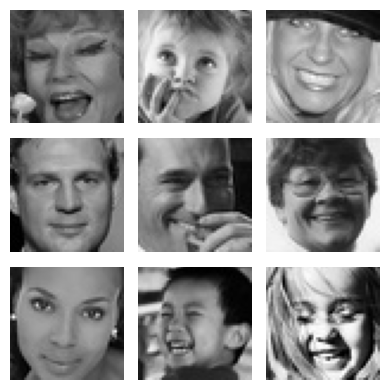

In [10]:
visualize_emotion_images(DATADIR, SUBDIRS, "happy", 9)

**Observations and Insights:**

- The images appear to be in grayscale and vary in terms of lighting, contrast, and clarity.

- The images display a range of happy expressions, from broad smiles showing teeth to subtle smiles without teeth. Also a diversity of subjects in terms of age, gender and also ethnicity.


### **Sad**


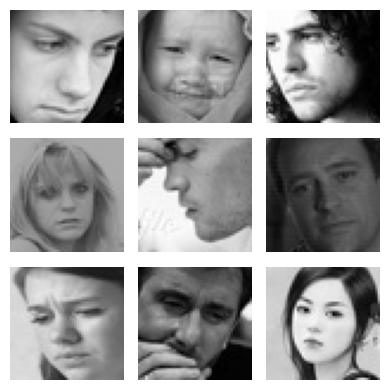

In [11]:
visualize_emotion_images(DATADIR, SUBDIRS, "sad", 9)

**Observations and Insights:**

- The images capture a wide spectrum of sadness, from subtle, somber expressions to more overt manifestations like crying.
- The dataset includes faces with different orientations and features. Some faces are directly looking at the camera, while others are tilted or partially turned away.


### **Neutral**


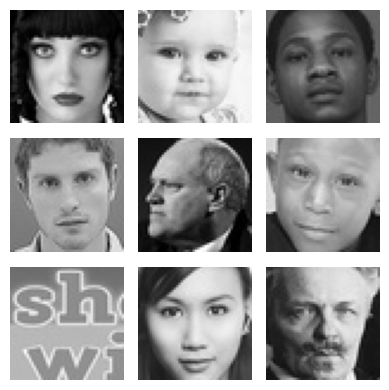

In [12]:
visualize_emotion_images(DATADIR, SUBDIRS, "neutral", 9)

**Observations and Insights:**

- The defining characteristic of these images is the absence of clear, expressive features that denote a specific emotion.
- Some faces may have subtle features that could be misconstrued as expressing a mild emotion.


### **Surprised**


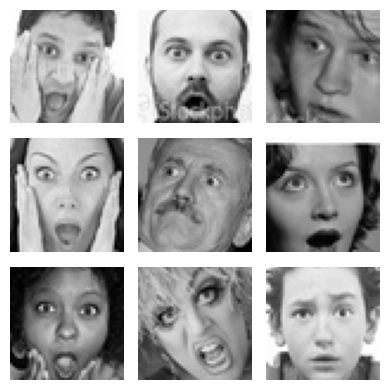

In [13]:
visualize_emotion_images(DATADIR, SUBDIRS, "surprise", 9)

**Observations and Insights:**

- The images showcase a range of intensities of surprise, from wide-eyed and open-mouthed expressions to more subdued, raised-eyebrow looks.
- The subjects vary in age, including both infants and adults.


## **Checking Distribution of Classes**


In [14]:
# Function to count images in each category
def count_images(data_dir, categories):
    counts = []
    for category in categories:
        path = os.path.join(data_dir, category)
        count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        counts.append(count)
    return counts


SUBDIRS_DICT = {"train": "train", "validation": "validation", "test": "test"}

# Counting images in each dataset
train_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["train"]), CATEGORIES)
validation_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["validation"]), CATEGORIES)
test_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["test"]), CATEGORIES)


# Create DataFrames and format for easier reading
def create_df(counts, categories, dataset_name):
    df = pd.DataFrame({"Class": categories, "Count": counts})
    df["Percentage"] = (df["Count"] / df["Count"].sum()) * 100
    df.set_index("Class", inplace=True)

    # Formatting for easier reading
    df["Count"] = df["Count"].apply(lambda x: f"{x:,}")  # Adds commas to thousands
    df["Percentage"] = df["Percentage"].apply(lambda x: f"{x:.2f}")  # Rounds to two decimals

    print(f"{dataset_name} Data Distribution:")
    print(df)
    total_images = df["Count"].str.replace(",", "").astype(int).sum()
    print(f"Total images in {dataset_name}: {total_images:,}\n")  # Formats total count with commas


create_df(train_counts, CATEGORIES, "Training")
create_df(validation_counts, CATEGORIES, "Validation")
create_df(test_counts, CATEGORIES, "Testing")

Training Data Distribution:
          Count Percentage
Class                     
happy     3,976      26.32
neutral   3,978      26.33
sad       3,982      26.36
surprise  3,173      21.00
Total images in Training: 15,109

Validation Data Distribution:
          Count Percentage
Class                     
happy     1,825      36.67
neutral   1,216      24.43
sad       1,139      22.89
surprise    797      16.01
Total images in Validation: 4,977

Testing Data Distribution:
         Count Percentage
Class                    
happy       32      25.00
neutral     32      25.00
sad         32      25.00
surprise    32      25.00
Total images in Testing: 128



**Observations and Insights:**

- Training Data: The training dataset shows a relatively balanced distribution among the classes of 'happy', 'neutral', and 'sad', each comprising approximately 26% of the dataset. However, 'surprise' is slightly underrepresented, making up 21% of the data. We'll see on the results if this is noticeable.
- Validation Data: In the validation dataset, there's a more pronounced imbalance. 'Happy' expressions dominate at 36.67%, followed by 'neutral' at 24.43%, 'sad' at 22.89%, and 'surprise' at 16.01%. This distribution deviates more significantly from an even split, indicating a potential bias towards 'happy' expressions.
- Testing Data: The testing dataset is perfectly balanced, with each class representing 25% of the data. This uniform distribution is ideal for evaluating the model's performance across all classes evenly.

Regarding the Exploratory Data Analysis, we can use data augmentation to balance the classes. For now, we'll see the results with the given dataset, and if necessary, we can adjust that.


**Think About It:**

- Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
- Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**


In [15]:
# Set this to 'grayscale' as the images are in grayscale
color_mode = "grayscale"

# As we have checked, all images are 48x48, we will set the img_width and img_height to 48
img_width, img_height = 48, 48
color_layers = 1
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
    # rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    # width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    # height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    # shear_range=0.1,  # Small shear transformations for slight perspective changes
    # zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
    # horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    # fill_mode="nearest",  # 'nearest' interpolation for filling in new pixels after a transformation
)

# Validation and Testing Data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Assuming train_dir, validation_dir, and test_dir should follow the structure in DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
)

# Testing Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.


Found 4977 images belonging to 4 classes.


Found 128 images belonging to 4 classes.


Let's look at some examples of a batch of augmented training data.


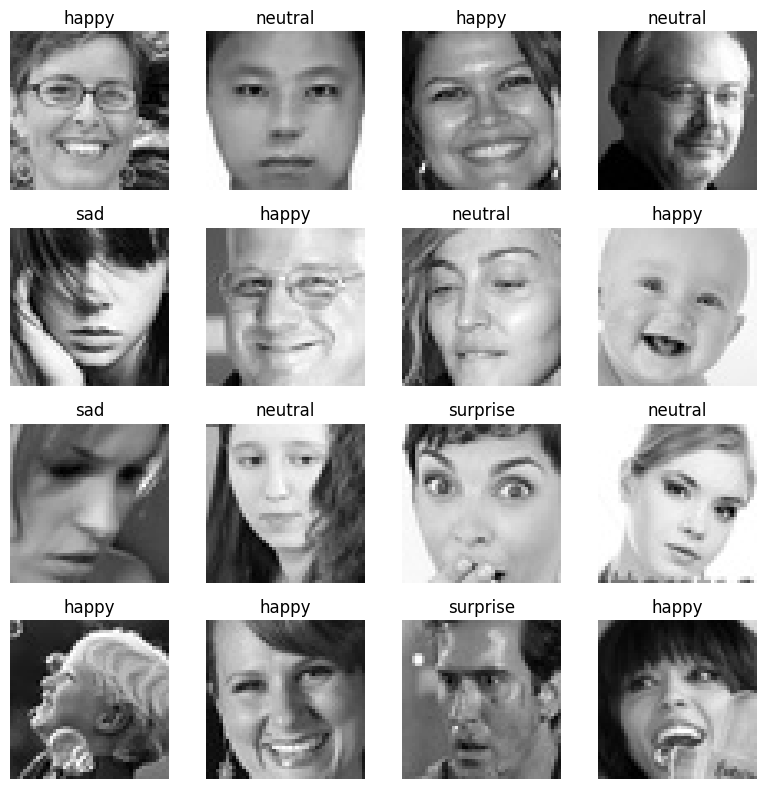

In [16]:
# Fetch a batch of images and labels
images, labels = next(train_generator)

# Assuming the labels are one-hot encoded, we need to convert them back to class indices
labels_indices = labels.argmax(axis=1)

# Mapping of indices to class names, based on the 'class_indices' attribute of the generator
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for image, label_index, ax in zip(images, labels_indices, axes.flatten()):
    ax.imshow(image.squeeze(), cmap="gray")  # Squeeze and cmap for grayscale
    class_name = index_to_class[label_index]
    ax.set_title(class_name)
    ax.axis("off")

plt.tight_layout()
plt.show()

## **Model Building**


**Think About It:**

- Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
- What are the advantages of CNNs over ANNs and are they applicable here?


### **Creating the Base Neural Network**


### **Model 1 Architecture:**

- First CNN Model will have three convolutional blocks.
- Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer.
- First Conv2D layer with **64 filters** and a **kernel size of 3x3**. Using the **'same' padding** and providing the **input shape = (48, 48, 1)**. Using **'relu' activation**.
- Adding MaxPooling2D layer with **kernel size 3x3** and using **padding = 'same'**.
- Adding a second Conv2D layer with **32 filters** and **a kernel size of 3x3**. Using the **'same' padding** and **'relu activation**.
- Following it up with another MaxPooling2D layer **kernel size 3x3** and using **padding = 'same'**.
- Adding a third Conv2D layer with **32 filters and the kernel size of 3x3**. Using the **'same' padding** and **'relu activation**. Once again, following it up with another Maxpooling2D layer with **kernel size 3x3** and **padding = 'same'**.
- Once the convolutional blocks are added, we add the Flatten layer.
- Finally, we add dense layers.
- Adding first Dense layer with **100 neurons** and **'relu' activation**
- The last dense layer needs to have as many neurons as the number of classes, which in this case is 4 and use **'softmax' activation**.
- As an optimizer we will use SGD optimizer with **learning rate = 0.01** and **momentum = 0.9**


In [17]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [18]:
# Intializing a sequential model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model_1.add(Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(img_width, img_height, color_layers)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding="same"))

# Adding second conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model_1.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))

# Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model_1.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_1.add(Dense(100, activation="relu"))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(4, activation="softmax"))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

2024-03-21 00:50:48.212408: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 00:50:48.227758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-21 00:50:48.227888: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### **Compiling and Training the Model**


In [19]:
# Compiling the model
model_1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model_1.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 48, 48, 64)        640       


 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         


 D)                                                              


 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     


 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      


 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0         


 g2D)                                                            


 flatten (Flatten)           (None, 1152)              0         


 dense (Dense)               (None, 100)               115300    


 dense_1 (Dense)             (None, 4)                 404       


Total params: 144056 (562.72 KB)


Trainable params: 144056 (562.72 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [20]:
# results_path = "/content/drive/MyDrive/Studies/MIT-AI-ML/11. Capstone Project/results"
results_path = "/home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results"

In [21]:
class DelayedEarlyStopping(EarlyStopping):
    """Stop training when a monitored metric has stopped improving after a certain number of epochs.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity to qualify as an improvement,
                   i.e., an absolute change of less than min_delta will count as no improvement.
        patience: Number of epochs with no improvement after which training will be stopped.
        verbose: Verbosity mode.
        mode: One of `{'auto', 'min', 'max'}`. In `min` mode, training will stop when the
              quantity monitored has stopped decreasing; in `max` mode it will stop when the
              quantity monitored has stopped increasing; in `auto` mode, the direction is
              automatically inferred from the name of the monitored quantity.
        baseline: Baseline value for the monitored quantity. Training will stop if the model
                  doesn't show improvement over the baseline.
        restore_best_weights: Whether to restore model weights from the epoch with the best value
                              of the monitored quantity.
        start_epoch: The epoch on which to start considering early stopping. Before this epoch,
                     early stopping will not be considered. This ensures that early stopping
                     checks only after a certain number of epochs.
    """

    def __init__(
        self,
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
        start_epoch=30,
    ):
        super(DelayedEarlyStopping, self).__init__(
            monitor=monitor,
            min_delta=min_delta,
            patience=patience,
            verbose=verbose,
            mode=mode,
            baseline=baseline,
            restore_best_weights=restore_best_weights,
        )
        self.start_epoch = start_epoch

    def on_epoch_end(self, epoch, logs=None):
        # Override the original `on_epoch_end` method to include `start_epoch` logic.

        # If the current epoch is less than the start epoch, skip the early stopping check
        if epoch < self.start_epoch:
            return

        # Call the parent class method to perform the regular early stopping checks after the start epoch
        super(DelayedEarlyStopping, self).on_epoch_end(epoch, logs)


# Usage of DelayedEarlyStopping
# Define the EarlyStopping callback with a start epoch
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=10, verbose=1, restore_best_weights=True, start_epoch=30
)

In [22]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)
mc = ModelCheckpoint(
    f"{results_path}/best_model_1_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_1 = model_1.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[reduce_lr],
)

Epoch 1/40


2024-03-21 00:50:48.941401: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


2024-03-21 00:50:49.185265: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fcea11a1430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-21 00:50:49.185279: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
I0000 00:00:1710982249.221566 2781866 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



  1/473 [..............................] - ETA: 9:48 - loss: 1.3807 - accuracy: 0.2500


 15/473 [..............................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2875  


 28/473 [>.............................] - ETA: 1s - loss: 1.3864 - accuracy: 0.2690


 41/473 [=>............................] - ETA: 1s - loss: 1.3854 - accuracy: 0.2691


 54/473 [==>...........................] - ETA: 1s - loss: 1.3842 - accuracy: 0.2685


 67/473 [===>..........................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2752


 80/473 [====>.........................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2801


 92/473 [====>.........................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2809


105/473 [=====>........................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2839


118/473 [======>.......................] - ETA: 1s - loss: 1.3787 - accuracy: 0.2842


131/473 [=======>......................] - ETA: 1s - loss: 1.3786 - accuracy: 0.2865


144/473 [========>.....................] - ETA: 1s - loss: 1.3801 - accuracy: 0.2815


158/473 [=========>....................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2801


171/473 [=========>....................] - ETA: 1s - loss: 1.3793 - accuracy: 0.2812


184/473 [==========>...................] - ETA: 1s - loss: 1.3787 - accuracy: 0.2821


198/473 [===========>..................] - ETA: 1s - loss: 1.3777 - accuracy: 0.2865


212/473 [============>.................] - ETA: 1s - loss: 1.3770 - accuracy: 0.2886


225/473 [=============>................] - ETA: 0s - loss: 1.3754 - accuracy: 0.2911


238/473 [==============>...............] - ETA: 0s - loss: 1.3752 - accuracy: 0.2916


251/473 [==============>...............] - ETA: 0s - loss: 1.3738 - accuracy: 0.2936


264/473 [===============>..............] - ETA: 0s - loss: 1.3724 - accuracy: 0.2946


278/473 [================>.............] - ETA: 0s - loss: 1.3705 - accuracy: 0.2977


291/473 [=================>............] - ETA: 0s - loss: 1.3684 - accuracy: 0.3002


304/473 [==================>...........] - ETA: 0s - loss: 1.3667 - accuracy: 0.3031


318/473 [===================>..........] - ETA: 0s - loss: 1.3636 - accuracy: 0.3082


331/473 [===================>..........] - ETA: 0s - loss: 1.3636 - accuracy: 0.3102


343/473 [====================>.........] - ETA: 0s - loss: 1.3636 - accuracy: 0.3104


356/473 [=====================>........] - ETA: 0s - loss: 1.3624 - accuracy: 0.3124


370/473 [======================>.......] - ETA: 0s - loss: 1.3606 - accuracy: 0.3149


376/473 [======================>.......] - ETA: 0s - loss: 1.3599 - accuracy: 0.3158


389/473 [=======================>......] - ETA: 0s - loss: 1.3586 - accuracy: 0.3176


401/473 [========================>.....] - ETA: 0s - loss: 1.3577 - accuracy: 0.3189


413/473 [=========================>....] - ETA: 0s - loss: 1.3578 - accuracy: 0.3188


423/473 [=========================>....] - ETA: 0s - loss: 1.3565 - accuracy: 0.3211


433/473 [==========================>...] - ETA: 0s - loss: 1.3553 - accuracy: 0.3228


446/473 [===========================>..] - ETA: 0s - loss: 1.3537 - accuracy: 0.3239


459/473 [============================>.] - ETA: 0s - loss: 1.3526 - accuracy: 0.3256


473/473 [==============================] - ETA: 0s - loss: 1.3512 - accuracy: 0.3272


473/473 [==============================] - 4s 5ms/step - loss: 1.3512 - accuracy: 0.3272 - val_loss: 1.2670 - val_accuracy: 0.4375 - lr: 0.0100


Epoch 2/40



  1/473 [..............................] - ETA: 5s - loss: 1.2602 - accuracy: 0.4688


 14/473 [..............................] - ETA: 1s - loss: 1.2597 - accuracy: 0.4152


 28/473 [>.............................] - ETA: 1s - loss: 1.2749 - accuracy: 0.4062


 41/473 [=>............................] - ETA: 1s - loss: 1.2763 - accuracy: 0.4002


 54/473 [==>...........................] - ETA: 1s - loss: 1.2777 - accuracy: 0.3999


 67/473 [===>..........................] - ETA: 1s - loss: 1.2565 - accuracy: 0.4170


 80/473 [====>.........................] - ETA: 1s - loss: 1.2490 - accuracy: 0.4254


 93/473 [====>.........................] - ETA: 1s - loss: 1.2428 - accuracy: 0.4318


106/473 [=====>........................] - ETA: 1s - loss: 1.2503 - accuracy: 0.4257


119/473 [======>.......................] - ETA: 1s - loss: 1.2442 - accuracy: 0.4291


132/473 [=======>......................] - ETA: 1s - loss: 1.2339 - accuracy: 0.4375


145/473 [========>.....................] - ETA: 1s - loss: 1.2346 - accuracy: 0.4362


159/473 [=========>....................] - ETA: 1s - loss: 1.2343 - accuracy: 0.4363


173/473 [=========>....................] - ETA: 1s - loss: 1.2302 - accuracy: 0.4375


186/473 [==========>...................] - ETA: 1s - loss: 1.2248 - accuracy: 0.4424


199/473 [===========>..................] - ETA: 1s - loss: 1.2239 - accuracy: 0.4416


212/473 [============>.................] - ETA: 1s - loss: 1.2226 - accuracy: 0.4422


225/473 [=============>................] - ETA: 0s - loss: 1.2184 - accuracy: 0.4447


239/473 [==============>...............] - ETA: 0s - loss: 1.2116 - accuracy: 0.4489


252/473 [==============>...............] - ETA: 0s - loss: 1.2052 - accuracy: 0.4546


261/473 [===============>..............] - ETA: 0s - loss: 1.2027 - accuracy: 0.4570


271/473 [================>.............] - ETA: 0s - loss: 1.2016 - accuracy: 0.4584


284/473 [=================>............] - ETA: 0s - loss: 1.2024 - accuracy: 0.4588


298/473 [=================>............] - ETA: 0s - loss: 1.2012 - accuracy: 0.4602


311/473 [==================>...........] - ETA: 0s - loss: 1.1991 - accuracy: 0.4626


324/473 [===================>..........] - ETA: 0s - loss: 1.1981 - accuracy: 0.4635


337/473 [====================>.........] - ETA: 0s - loss: 1.1969 - accuracy: 0.4635


350/473 [=====================>........] - ETA: 0s - loss: 1.1963 - accuracy: 0.4646


363/473 [======================>.......] - ETA: 0s - loss: 1.1924 - accuracy: 0.4669


376/473 [======================>.......] - ETA: 0s - loss: 1.1890 - accuracy: 0.4696


390/473 [=======================>......] - ETA: 0s - loss: 1.1878 - accuracy: 0.4703


403/473 [========================>.....] - ETA: 0s - loss: 1.1855 - accuracy: 0.4706


416/473 [=========================>....] - ETA: 0s - loss: 1.1842 - accuracy: 0.4722


430/473 [==========================>...] - ETA: 0s - loss: 1.1820 - accuracy: 0.4737


443/473 [===========================>..] - ETA: 0s - loss: 1.1797 - accuracy: 0.4747


457/473 [===========================>..] - ETA: 0s - loss: 1.1776 - accuracy: 0.4748


471/473 [============================>.] - ETA: 0s - loss: 1.1766 - accuracy: 0.4754


473/473 [==============================] - 2s 4ms/step - loss: 1.1766 - accuracy: 0.4751 - val_loss: 1.0475 - val_accuracy: 0.4688 - lr: 0.0100


Epoch 3/40



  1/473 [..............................] - ETA: 4s - loss: 1.3038 - accuracy: 0.4375


 13/473 [..............................] - ETA: 1s - loss: 1.1380 - accuracy: 0.5096


 26/473 [>.............................] - ETA: 1s - loss: 1.1135 - accuracy: 0.5120


 39/473 [=>............................] - ETA: 1s - loss: 1.1015 - accuracy: 0.5104


 52/473 [==>...........................] - ETA: 1s - loss: 1.0889 - accuracy: 0.5168


 66/473 [===>..........................] - ETA: 1s - loss: 1.0841 - accuracy: 0.5223


 79/473 [====>.........................] - ETA: 1s - loss: 1.0843 - accuracy: 0.5241


 93/473 [====>.........................] - ETA: 1s - loss: 1.0853 - accuracy: 0.5225


107/473 [=====>........................] - ETA: 1s - loss: 1.0780 - accuracy: 0.5295


121/473 [======>.......................] - ETA: 1s - loss: 1.0805 - accuracy: 0.5312


135/473 [=======>......................] - ETA: 1s - loss: 1.0769 - accuracy: 0.5322


148/473 [========>.....................] - ETA: 1s - loss: 1.0760 - accuracy: 0.5317


161/473 [=========>....................] - ETA: 1s - loss: 1.0735 - accuracy: 0.5318


175/473 [==========>...................] - ETA: 1s - loss: 1.0808 - accuracy: 0.5288


188/473 [==========>...................] - ETA: 1s - loss: 1.0778 - accuracy: 0.5308


202/473 [===========>..................] - ETA: 1s - loss: 1.0755 - accuracy: 0.5309


215/473 [============>.................] - ETA: 1s - loss: 1.0770 - accuracy: 0.5298


228/473 [=============>................] - ETA: 0s - loss: 1.0789 - accuracy: 0.5291


242/473 [==============>...............] - ETA: 0s - loss: 1.0765 - accuracy: 0.5312


256/473 [===============>..............] - ETA: 0s - loss: 1.0754 - accuracy: 0.5328


270/473 [================>.............] - ETA: 0s - loss: 1.0737 - accuracy: 0.5339


284/473 [=================>............] - ETA: 0s - loss: 1.0739 - accuracy: 0.5338


298/473 [=================>............] - ETA: 0s - loss: 1.0708 - accuracy: 0.5355


312/473 [==================>...........] - ETA: 0s - loss: 1.0707 - accuracy: 0.5362


325/473 [===================>..........] - ETA: 0s - loss: 1.0732 - accuracy: 0.5352


338/473 [====================>.........] - ETA: 0s - loss: 1.0724 - accuracy: 0.5353


351/473 [=====================>........] - ETA: 0s - loss: 1.0696 - accuracy: 0.5365


365/473 [======================>.......] - ETA: 0s - loss: 1.0693 - accuracy: 0.5365


378/473 [======================>.......] - ETA: 0s - loss: 1.0699 - accuracy: 0.5364


392/473 [=======================>......] - ETA: 0s - loss: 1.0700 - accuracy: 0.5357


405/473 [========================>.....] - ETA: 0s - loss: 1.0712 - accuracy: 0.5357


418/473 [=========================>....] - ETA: 0s - loss: 1.0710 - accuracy: 0.5373


432/473 [==========================>...] - ETA: 0s - loss: 1.0707 - accuracy: 0.5378


446/473 [===========================>..] - ETA: 0s - loss: 1.0682 - accuracy: 0.5392


459/473 [============================>.] - ETA: 0s - loss: 1.0681 - accuracy: 0.5392


473/473 [==============================] - ETA: 0s - loss: 1.0663 - accuracy: 0.5397


473/473 [==============================] - 2s 4ms/step - loss: 1.0663 - accuracy: 0.5397 - val_loss: 0.9298 - val_accuracy: 0.6250 - lr: 0.0100


Epoch 4/40



  1/473 [..............................] - ETA: 5s - loss: 1.0161 - accuracy: 0.5938


 14/473 [..............................] - ETA: 1s - loss: 0.9322 - accuracy: 0.5982


 28/473 [>.............................] - ETA: 1s - loss: 0.9858 - accuracy: 0.5826


 41/473 [=>............................] - ETA: 1s - loss: 0.9991 - accuracy: 0.5793


 54/473 [==>...........................] - ETA: 1s - loss: 1.0146 - accuracy: 0.5637


 67/473 [===>..........................] - ETA: 1s - loss: 1.0051 - accuracy: 0.5648


 80/473 [====>.........................] - ETA: 1s - loss: 1.0078 - accuracy: 0.5648


 94/473 [====>.........................] - ETA: 1s - loss: 1.0141 - accuracy: 0.5606


107/473 [=====>........................] - ETA: 1s - loss: 1.0061 - accuracy: 0.5649


120/473 [======>.......................] - ETA: 1s - loss: 1.0088 - accuracy: 0.5610


133/473 [=======>......................] - ETA: 1s - loss: 1.0085 - accuracy: 0.5644


146/473 [========>.....................] - ETA: 1s - loss: 1.0046 - accuracy: 0.5696


159/473 [=========>....................] - ETA: 1s - loss: 1.0026 - accuracy: 0.5700


173/473 [=========>....................] - ETA: 1s - loss: 1.0072 - accuracy: 0.5687


187/473 [==========>...................] - ETA: 1s - loss: 1.0023 - accuracy: 0.5726


201/473 [===========>..................] - ETA: 1s - loss: 0.9996 - accuracy: 0.5741


214/473 [============>.................] - ETA: 1s - loss: 0.9968 - accuracy: 0.5759


228/473 [=============>................] - ETA: 0s - loss: 0.9938 - accuracy: 0.5770


241/473 [==============>...............] - ETA: 0s - loss: 0.9935 - accuracy: 0.5770


254/473 [===============>..............] - ETA: 0s - loss: 0.9936 - accuracy: 0.5770


267/473 [===============>..............] - ETA: 0s - loss: 0.9940 - accuracy: 0.5758


280/473 [================>.............] - ETA: 0s - loss: 0.9940 - accuracy: 0.5756


293/473 [=================>............] - ETA: 0s - loss: 0.9933 - accuracy: 0.5771


306/473 [==================>...........] - ETA: 0s - loss: 0.9959 - accuracy: 0.5746


319/473 [===================>..........] - ETA: 0s - loss: 0.9968 - accuracy: 0.5742


332/473 [====================>.........] - ETA: 0s - loss: 0.9946 - accuracy: 0.5750


345/473 [====================>.........] - ETA: 0s - loss: 0.9952 - accuracy: 0.5741


358/473 [=====================>........] - ETA: 0s - loss: 0.9942 - accuracy: 0.5741


371/473 [======================>.......] - ETA: 0s - loss: 0.9952 - accuracy: 0.5742


382/473 [=======================>......] - ETA: 0s - loss: 0.9932 - accuracy: 0.5754


393/473 [=======================>......] - ETA: 0s - loss: 0.9935 - accuracy: 0.5756


406/473 [========================>.....] - ETA: 0s - loss: 0.9933 - accuracy: 0.5749


419/473 [=========================>....] - ETA: 0s - loss: 0.9923 - accuracy: 0.5745


432/473 [==========================>...] - ETA: 0s - loss: 0.9894 - accuracy: 0.5757


445/473 [===========================>..] - ETA: 0s - loss: 0.9894 - accuracy: 0.5751


458/473 [============================>.] - ETA: 0s - loss: 0.9896 - accuracy: 0.5748


471/473 [============================>.] - ETA: 0s - loss: 0.9885 - accuracy: 0.5744


473/473 [==============================] - 2s 4ms/step - loss: 0.9879 - accuracy: 0.5746 - val_loss: 1.1004 - val_accuracy: 0.4375 - lr: 0.0100


Epoch 5/40



  1/473 [..............................] - ETA: 4s - loss: 0.8974 - accuracy: 0.6875


 15/473 [..............................] - ETA: 1s - loss: 0.9041 - accuracy: 0.6521


 29/473 [>.............................] - ETA: 1s - loss: 0.9303 - accuracy: 0.6207


 43/473 [=>............................] - ETA: 1s - loss: 0.9387 - accuracy: 0.6054


 57/473 [==>...........................] - ETA: 1s - loss: 0.9461 - accuracy: 0.5981


 71/473 [===>..........................] - ETA: 1s - loss: 0.9460 - accuracy: 0.5990


 85/473 [====>.........................] - ETA: 1s - loss: 0.9364 - accuracy: 0.5993


 99/473 [=====>........................] - ETA: 1s - loss: 0.9392 - accuracy: 0.5994


113/473 [======>.......................] - ETA: 1s - loss: 0.9336 - accuracy: 0.6029


127/473 [=======>......................] - ETA: 1s - loss: 0.9275 - accuracy: 0.6033


141/473 [=======>......................] - ETA: 1s - loss: 0.9235 - accuracy: 0.6055


155/473 [========>.....................] - ETA: 1s - loss: 0.9222 - accuracy: 0.6071


168/473 [=========>....................] - ETA: 1s - loss: 0.9195 - accuracy: 0.6084


181/473 [==========>...................] - ETA: 1s - loss: 0.9168 - accuracy: 0.6112


194/473 [===========>..................] - ETA: 1s - loss: 0.9152 - accuracy: 0.6110


207/473 [============>.................] - ETA: 1s - loss: 0.9175 - accuracy: 0.6090


221/473 [=============>................] - ETA: 0s - loss: 0.9157 - accuracy: 0.6113


235/473 [=============>................] - ETA: 0s - loss: 0.9173 - accuracy: 0.6116


249/473 [==============>...............] - ETA: 0s - loss: 0.9172 - accuracy: 0.6109


263/473 [===============>..............] - ETA: 0s - loss: 0.9176 - accuracy: 0.6115


277/473 [================>.............] - ETA: 0s - loss: 0.9177 - accuracy: 0.6108


291/473 [=================>............] - ETA: 0s - loss: 0.9169 - accuracy: 0.6090


305/473 [==================>...........] - ETA: 0s - loss: 0.9175 - accuracy: 0.6098


319/473 [===================>..........] - ETA: 0s - loss: 0.9172 - accuracy: 0.6088


332/473 [====================>.........] - ETA: 0s - loss: 0.9158 - accuracy: 0.6084


345/473 [====================>.........] - ETA: 0s - loss: 0.9198 - accuracy: 0.6061


358/473 [=====================>........] - ETA: 0s - loss: 0.9186 - accuracy: 0.6065


372/473 [======================>.......] - ETA: 0s - loss: 0.9171 - accuracy: 0.6075


386/473 [=======================>......] - ETA: 0s - loss: 0.9167 - accuracy: 0.6073


399/473 [========================>.....] - ETA: 0s - loss: 0.9171 - accuracy: 0.6069


413/473 [=========================>....] - ETA: 0s - loss: 0.9161 - accuracy: 0.6074


426/473 [==========================>...] - ETA: 0s - loss: 0.9152 - accuracy: 0.6080


437/473 [==========================>...] - ETA: 0s - loss: 0.9153 - accuracy: 0.6078


450/473 [===========================>..] - ETA: 0s - loss: 0.9158 - accuracy: 0.6079


464/473 [============================>.] - ETA: 0s - loss: 0.9137 - accuracy: 0.6091


473/473 [==============================] - 2s 4ms/step - loss: 0.9142 - accuracy: 0.6086 - val_loss: 0.8620 - val_accuracy: 0.5625 - lr: 0.0100


Epoch 6/40



  1/473 [..............................] - ETA: 4s - loss: 0.8778 - accuracy: 0.6250


 14/473 [..............................] - ETA: 1s - loss: 0.8649 - accuracy: 0.6295


 24/473 [>.............................] - ETA: 2s - loss: 0.8579 - accuracy: 0.6328


 34/473 [=>............................] - ETA: 2s - loss: 0.8409 - accuracy: 0.6351


 44/473 [=>............................] - ETA: 2s - loss: 0.8409 - accuracy: 0.6335


 55/473 [==>...........................] - ETA: 2s - loss: 0.8443 - accuracy: 0.6347


 68/473 [===>..........................] - ETA: 1s - loss: 0.8423 - accuracy: 0.6365


 81/473 [====>.........................] - ETA: 1s - loss: 0.8520 - accuracy: 0.6335


 95/473 [=====>........................] - ETA: 1s - loss: 0.8474 - accuracy: 0.6388


108/473 [=====>........................] - ETA: 1s - loss: 0.8445 - accuracy: 0.6424


122/473 [======>.......................] - ETA: 1s - loss: 0.8499 - accuracy: 0.6399


135/473 [=======>......................] - ETA: 1s - loss: 0.8520 - accuracy: 0.6398


149/473 [========>.....................] - ETA: 1s - loss: 0.8580 - accuracy: 0.6372


163/473 [=========>....................] - ETA: 1s - loss: 0.8594 - accuracy: 0.6371


177/473 [==========>...................] - ETA: 1s - loss: 0.8566 - accuracy: 0.6365


190/473 [===========>..................] - ETA: 1s - loss: 0.8506 - accuracy: 0.6405


203/473 [===========>..................] - ETA: 1s - loss: 0.8480 - accuracy: 0.6435


216/473 [============>.................] - ETA: 1s - loss: 0.8470 - accuracy: 0.6454


229/473 [=============>................] - ETA: 1s - loss: 0.8425 - accuracy: 0.6483


243/473 [==============>...............] - ETA: 0s - loss: 0.8451 - accuracy: 0.6463


257/473 [===============>..............] - ETA: 0s - loss: 0.8456 - accuracy: 0.6471


270/473 [================>.............] - ETA: 0s - loss: 0.8451 - accuracy: 0.6473


284/473 [=================>............] - ETA: 0s - loss: 0.8428 - accuracy: 0.6482


298/473 [=================>............] - ETA: 0s - loss: 0.8404 - accuracy: 0.6495


312/473 [==================>...........] - ETA: 0s - loss: 0.8421 - accuracy: 0.6488


326/473 [===================>..........] - ETA: 0s - loss: 0.8423 - accuracy: 0.6492


340/473 [====================>.........] - ETA: 0s - loss: 0.8407 - accuracy: 0.6497


354/473 [=====================>........] - ETA: 0s - loss: 0.8412 - accuracy: 0.6487


368/473 [======================>.......] - ETA: 0s - loss: 0.8410 - accuracy: 0.6484


381/473 [=======================>......] - ETA: 0s - loss: 0.8424 - accuracy: 0.6474


395/473 [========================>.....] - ETA: 0s - loss: 0.8421 - accuracy: 0.6471


409/473 [========================>.....] - ETA: 0s - loss: 0.8416 - accuracy: 0.6466


423/473 [=========================>....] - ETA: 0s - loss: 0.8442 - accuracy: 0.6458


436/473 [==========================>...] - ETA: 0s - loss: 0.8458 - accuracy: 0.6454


450/473 [===========================>..] - ETA: 0s - loss: 0.8447 - accuracy: 0.6454


464/473 [============================>.] - ETA: 0s - loss: 0.8455 - accuracy: 0.6456


473/473 [==============================] - 2s 4ms/step - loss: 0.8452 - accuracy: 0.6451 - val_loss: 0.9882 - val_accuracy: 0.5938 - lr: 0.0100


Epoch 7/40



  1/473 [..............................] - ETA: 5s - loss: 0.6762 - accuracy: 0.6875


 12/473 [..............................] - ETA: 2s - loss: 0.8520 - accuracy: 0.6406


 24/473 [>.............................] - ETA: 2s - loss: 0.8468 - accuracy: 0.6393


 37/473 [=>............................] - ETA: 1s - loss: 0.8196 - accuracy: 0.6537


 51/473 [==>...........................] - ETA: 1s - loss: 0.8113 - accuracy: 0.6483


 65/473 [===>..........................] - ETA: 1s - loss: 0.8044 - accuracy: 0.6543


 79/473 [====>.........................] - ETA: 1s - loss: 0.7976 - accuracy: 0.6649


 92/473 [====>.........................] - ETA: 1s - loss: 0.8009 - accuracy: 0.6634


106/473 [=====>........................] - ETA: 1s - loss: 0.8039 - accuracy: 0.6621


119/473 [======>.......................] - ETA: 1s - loss: 0.8000 - accuracy: 0.6615


132/473 [=======>......................] - ETA: 1s - loss: 0.8051 - accuracy: 0.6593


145/473 [========>.....................] - ETA: 1s - loss: 0.8088 - accuracy: 0.6614


158/473 [=========>....................] - ETA: 1s - loss: 0.8078 - accuracy: 0.6636


171/473 [=========>....................] - ETA: 1s - loss: 0.8084 - accuracy: 0.6628


184/473 [==========>...................] - ETA: 1s - loss: 0.8036 - accuracy: 0.6646


198/473 [===========>..................] - ETA: 1s - loss: 0.7971 - accuracy: 0.6679


211/473 [============>.................] - ETA: 1s - loss: 0.7948 - accuracy: 0.6675


225/473 [=============>................] - ETA: 0s - loss: 0.7968 - accuracy: 0.6668


238/473 [==============>...............] - ETA: 0s - loss: 0.7989 - accuracy: 0.6650


251/473 [==============>...............] - ETA: 0s - loss: 0.7971 - accuracy: 0.6662


264/473 [===============>..............] - ETA: 0s - loss: 0.7954 - accuracy: 0.6675


278/473 [================>.............] - ETA: 0s - loss: 0.7938 - accuracy: 0.6691


292/473 [=================>............] - ETA: 0s - loss: 0.7950 - accuracy: 0.6691


303/473 [==================>...........] - ETA: 0s - loss: 0.7943 - accuracy: 0.6697


312/473 [==================>...........] - ETA: 0s - loss: 0.7929 - accuracy: 0.6705


322/473 [===================>..........] - ETA: 0s - loss: 0.7948 - accuracy: 0.6690


335/473 [====================>.........] - ETA: 0s - loss: 0.7932 - accuracy: 0.6694


348/473 [=====================>........] - ETA: 0s - loss: 0.7953 - accuracy: 0.6686


361/473 [=====================>........] - ETA: 0s - loss: 0.7957 - accuracy: 0.6678


375/473 [======================>.......] - ETA: 0s - loss: 0.7938 - accuracy: 0.6696


388/473 [=======================>......] - ETA: 0s - loss: 0.7933 - accuracy: 0.6694


401/473 [========================>.....] - ETA: 0s - loss: 0.7940 - accuracy: 0.6682


415/473 [=========================>....] - ETA: 0s - loss: 0.7941 - accuracy: 0.6672


429/473 [==========================>...] - ETA: 0s - loss: 0.7939 - accuracy: 0.6680


442/473 [===========================>..] - ETA: 0s - loss: 0.7941 - accuracy: 0.6676


456/473 [===========================>..] - ETA: 0s - loss: 0.7947 - accuracy: 0.6668


470/473 [============================>.] - ETA: 0s - loss: 0.7947 - accuracy: 0.6677


473/473 [==============================] - 2s 4ms/step - loss: 0.7950 - accuracy: 0.6675 - val_loss: 0.8628 - val_accuracy: 0.6562 - lr: 0.0100


Epoch 8/40



  1/473 [..............................] - ETA: 4s - loss: 0.7244 - accuracy: 0.7812


 14/473 [..............................] - ETA: 1s - loss: 0.7537 - accuracy: 0.7031


 28/473 [>.............................] - ETA: 1s - loss: 0.7191 - accuracy: 0.7254


 41/473 [=>............................] - ETA: 1s - loss: 0.7316 - accuracy: 0.7111


 54/473 [==>...........................] - ETA: 1s - loss: 0.7374 - accuracy: 0.6997


 67/473 [===>..........................] - ETA: 1s - loss: 0.7302 - accuracy: 0.7048


 80/473 [====>.........................] - ETA: 1s - loss: 0.7283 - accuracy: 0.7031


 94/473 [====>.........................] - ETA: 1s - loss: 0.7321 - accuracy: 0.7011


107/473 [=====>........................] - ETA: 1s - loss: 0.7296 - accuracy: 0.7033


120/473 [======>.......................] - ETA: 1s - loss: 0.7283 - accuracy: 0.7039


134/473 [=======>......................] - ETA: 1s - loss: 0.7239 - accuracy: 0.7038


147/473 [========>.....................] - ETA: 1s - loss: 0.7184 - accuracy: 0.7069


161/473 [=========>....................] - ETA: 1s - loss: 0.7179 - accuracy: 0.7073


175/473 [==========>...................] - ETA: 1s - loss: 0.7140 - accuracy: 0.7120


188/473 [==========>...................] - ETA: 1s - loss: 0.7125 - accuracy: 0.7138


201/473 [===========>..................] - ETA: 1s - loss: 0.7166 - accuracy: 0.7129


215/473 [============>.................] - ETA: 0s - loss: 0.7158 - accuracy: 0.7121


228/473 [=============>................] - ETA: 0s - loss: 0.7166 - accuracy: 0.7106


241/473 [==============>...............] - ETA: 0s - loss: 0.7158 - accuracy: 0.7100


255/473 [===============>..............] - ETA: 0s - loss: 0.7221 - accuracy: 0.7066


269/473 [================>.............] - ETA: 0s - loss: 0.7261 - accuracy: 0.7053


283/473 [================>.............] - ETA: 0s - loss: 0.7262 - accuracy: 0.7053


296/473 [=================>............] - ETA: 0s - loss: 0.7281 - accuracy: 0.7044


309/473 [==================>...........] - ETA: 0s - loss: 0.7276 - accuracy: 0.7040


323/473 [===================>..........] - ETA: 0s - loss: 0.7305 - accuracy: 0.7027


336/473 [====================>.........] - ETA: 0s - loss: 0.7312 - accuracy: 0.7014


349/473 [=====================>........] - ETA: 0s - loss: 0.7305 - accuracy: 0.7016


363/473 [======================>.......] - ETA: 0s - loss: 0.7298 - accuracy: 0.7017


376/473 [======================>.......] - ETA: 0s - loss: 0.7313 - accuracy: 0.7013


389/473 [=======================>......] - ETA: 0s - loss: 0.7313 - accuracy: 0.7020


402/473 [========================>.....] - ETA: 0s - loss: 0.7325 - accuracy: 0.7013


415/473 [=========================>....] - ETA: 0s - loss: 0.7329 - accuracy: 0.7007


429/473 [==========================>...] - ETA: 0s - loss: 0.7326 - accuracy: 0.7010


443/473 [===========================>..] - ETA: 0s - loss: 0.7347 - accuracy: 0.7003


456/473 [===========================>..] - ETA: 0s - loss: 0.7333 - accuracy: 0.7008


469/473 [============================>.] - ETA: 0s - loss: 0.7345 - accuracy: 0.7006


473/473 [==============================] - 2s 4ms/step - loss: 0.7341 - accuracy: 0.7008 - val_loss: 0.8429 - val_accuracy: 0.6250 - lr: 0.0100


Epoch 9/40



  1/473 [..............................] - ETA: 4s - loss: 0.5181 - accuracy: 0.8125


 14/473 [..............................] - ETA: 1s - loss: 0.7273 - accuracy: 0.7165


 27/473 [>.............................] - ETA: 1s - loss: 0.7210 - accuracy: 0.7234


 40/473 [=>............................] - ETA: 1s - loss: 0.6913 - accuracy: 0.7305


 53/473 [==>...........................] - ETA: 1s - loss: 0.6770 - accuracy: 0.7335


 66/473 [===>..........................] - ETA: 1s - loss: 0.6836 - accuracy: 0.7315


 79/473 [====>.........................] - ETA: 1s - loss: 0.6776 - accuracy: 0.7318


 92/473 [====>.........................] - ETA: 1s - loss: 0.6722 - accuracy: 0.7351


105/473 [=====>........................] - ETA: 1s - loss: 0.6664 - accuracy: 0.7354


118/473 [======>.......................] - ETA: 1s - loss: 0.6721 - accuracy: 0.7304


131/473 [=======>......................] - ETA: 1s - loss: 0.6691 - accuracy: 0.7331


144/473 [========>.....................] - ETA: 1s - loss: 0.6692 - accuracy: 0.7344


158/473 [=========>....................] - ETA: 1s - loss: 0.6673 - accuracy: 0.7344


172/473 [=========>....................] - ETA: 1s - loss: 0.6649 - accuracy: 0.7346


185/473 [==========>...................] - ETA: 1s - loss: 0.6661 - accuracy: 0.7321


199/473 [===========>..................] - ETA: 1s - loss: 0.6639 - accuracy: 0.7335


213/473 [============>.................] - ETA: 1s - loss: 0.6646 - accuracy: 0.7327


227/473 [=============>................] - ETA: 0s - loss: 0.6671 - accuracy: 0.7322


240/473 [==============>...............] - ETA: 0s - loss: 0.6669 - accuracy: 0.7327


253/473 [===============>..............] - ETA: 0s - loss: 0.6668 - accuracy: 0.7327


267/473 [===============>..............] - ETA: 0s - loss: 0.6740 - accuracy: 0.7292


280/473 [================>.............] - ETA: 0s - loss: 0.6775 - accuracy: 0.7276


293/473 [=================>............] - ETA: 0s - loss: 0.6803 - accuracy: 0.7254


306/473 [==================>...........] - ETA: 0s - loss: 0.6791 - accuracy: 0.7242


320/473 [===================>..........] - ETA: 0s - loss: 0.6801 - accuracy: 0.7234


333/473 [====================>.........] - ETA: 0s - loss: 0.6802 - accuracy: 0.7241


346/473 [====================>.........] - ETA: 0s - loss: 0.6805 - accuracy: 0.7234


359/473 [=====================>........] - ETA: 0s - loss: 0.6818 - accuracy: 0.7223


373/473 [======================>.......] - ETA: 0s - loss: 0.6830 - accuracy: 0.7217


387/473 [=======================>......] - ETA: 0s - loss: 0.6818 - accuracy: 0.7213


400/473 [========================>.....] - ETA: 0s - loss: 0.6819 - accuracy: 0.7218


413/473 [=========================>....] - ETA: 0s - loss: 0.6819 - accuracy: 0.7217


426/473 [==========================>...] - ETA: 0s - loss: 0.6836 - accuracy: 0.7210


440/473 [==========================>...] - ETA: 0s - loss: 0.6830 - accuracy: 0.7209


454/473 [===========================>..] - ETA: 0s - loss: 0.6821 - accuracy: 0.7213


468/473 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.7204


473/473 [==============================] - 2s 4ms/step - loss: 0.6835 - accuracy: 0.7206 - val_loss: 0.8800 - val_accuracy: 0.5938 - lr: 0.0100


Epoch 10/40



  1/473 [..............................] - ETA: 4s - loss: 0.4653 - accuracy: 0.8438


 15/473 [..............................] - ETA: 1s - loss: 0.5763 - accuracy: 0.7875


 29/473 [>.............................] - ETA: 1s - loss: 0.5920 - accuracy: 0.7694


 43/473 [=>............................] - ETA: 1s - loss: 0.5919 - accuracy: 0.7631


 56/473 [==>...........................] - ETA: 1s - loss: 0.5929 - accuracy: 0.7595


 70/473 [===>..........................] - ETA: 1s - loss: 0.6079 - accuracy: 0.7509


 84/473 [====>.........................] - ETA: 1s - loss: 0.6179 - accuracy: 0.7460


 97/473 [=====>........................] - ETA: 1s - loss: 0.6309 - accuracy: 0.7420


110/473 [=====>........................] - ETA: 1s - loss: 0.6245 - accuracy: 0.7443


124/473 [======>.......................] - ETA: 1s - loss: 0.6238 - accuracy: 0.7455


138/473 [=======>......................] - ETA: 1s - loss: 0.6244 - accuracy: 0.7421


151/473 [========>.....................] - ETA: 1s - loss: 0.6306 - accuracy: 0.7390


164/473 [=========>....................] - ETA: 1s - loss: 0.6299 - accuracy: 0.7395


177/473 [==========>...................] - ETA: 1s - loss: 0.6348 - accuracy: 0.7387


191/473 [===========>..................] - ETA: 1s - loss: 0.6365 - accuracy: 0.7390


205/473 [============>.................] - ETA: 1s - loss: 0.6380 - accuracy: 0.7379


219/473 [============>.................] - ETA: 0s - loss: 0.6372 - accuracy: 0.7383


233/473 [=============>................] - ETA: 0s - loss: 0.6343 - accuracy: 0.7403


247/473 [==============>...............] - ETA: 0s - loss: 0.6359 - accuracy: 0.7408


260/473 [===============>..............] - ETA: 0s - loss: 0.6346 - accuracy: 0.7412


273/473 [================>.............] - ETA: 0s - loss: 0.6318 - accuracy: 0.7422


286/473 [=================>............] - ETA: 0s - loss: 0.6310 - accuracy: 0.7424


300/473 [==================>...........] - ETA: 0s - loss: 0.6325 - accuracy: 0.7415


314/473 [==================>...........] - ETA: 0s - loss: 0.6326 - accuracy: 0.7416


328/473 [===================>..........] - ETA: 0s - loss: 0.6340 - accuracy: 0.7409


342/473 [====================>.........] - ETA: 0s - loss: 0.6323 - accuracy: 0.7411


356/473 [=====================>........] - ETA: 0s - loss: 0.6303 - accuracy: 0.7426


370/473 [======================>.......] - ETA: 0s - loss: 0.6312 - accuracy: 0.7432


384/473 [=======================>......] - ETA: 0s - loss: 0.6310 - accuracy: 0.7434


398/473 [========================>.....] - ETA: 0s - loss: 0.6351 - accuracy: 0.7422


412/473 [=========================>....] - ETA: 0s - loss: 0.6372 - accuracy: 0.7420


425/473 [=========================>....] - ETA: 0s - loss: 0.6381 - accuracy: 0.7419


438/473 [==========================>...] - ETA: 0s - loss: 0.6378 - accuracy: 0.7418


452/473 [===========================>..] - ETA: 0s - loss: 0.6382 - accuracy: 0.7408


466/473 [============================>.] - ETA: 0s - loss: 0.6373 - accuracy: 0.7408


473/473 [==============================] - 2s 4ms/step - loss: 0.6371 - accuracy: 0.7410 - val_loss: 0.6709 - val_accuracy: 0.6562 - lr: 0.0100


Epoch 11/40



  1/473 [..............................] - ETA: 4s - loss: 0.5267 - accuracy: 0.8125


 14/473 [..............................] - ETA: 1s - loss: 0.5011 - accuracy: 0.8080


 28/473 [>.............................] - ETA: 1s - loss: 0.4862 - accuracy: 0.8158


 41/473 [=>............................] - ETA: 1s - loss: 0.4872 - accuracy: 0.8171


 53/473 [==>...........................] - ETA: 1s - loss: 0.4977 - accuracy: 0.8125


 66/473 [===>..........................] - ETA: 1s - loss: 0.5116 - accuracy: 0.8040


 79/473 [====>.........................] - ETA: 1s - loss: 0.5117 - accuracy: 0.8026


 93/473 [====>.........................] - ETA: 1s - loss: 0.5193 - accuracy: 0.7977


106/473 [=====>........................] - ETA: 1s - loss: 0.5271 - accuracy: 0.7919


119/473 [======>.......................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7920


132/473 [=======>......................] - ETA: 1s - loss: 0.5216 - accuracy: 0.7929


145/473 [========>.....................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7907


157/473 [========>.....................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7896


170/473 [=========>....................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7906


183/473 [==========>...................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7912


196/473 [===========>..................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7907


208/473 [============>.................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7910


218/473 [============>.................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7917


231/473 [=============>................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7904


245/473 [==============>...............] - ETA: 0s - loss: 0.5385 - accuracy: 0.7883


258/473 [===============>..............] - ETA: 0s - loss: 0.5426 - accuracy: 0.7856


272/473 [================>.............] - ETA: 0s - loss: 0.5454 - accuracy: 0.7826


286/473 [=================>............] - ETA: 0s - loss: 0.5473 - accuracy: 0.7816


300/473 [==================>...........] - ETA: 0s - loss: 0.5528 - accuracy: 0.7806


313/473 [==================>...........] - ETA: 0s - loss: 0.5545 - accuracy: 0.7793


327/473 [===================>..........] - ETA: 0s - loss: 0.5536 - accuracy: 0.7785


341/473 [====================>.........] - ETA: 0s - loss: 0.5547 - accuracy: 0.7780


354/473 [=====================>........] - ETA: 0s - loss: 0.5582 - accuracy: 0.7763


368/473 [======================>.......] - ETA: 0s - loss: 0.5609 - accuracy: 0.7752


381/473 [=======================>......] - ETA: 0s - loss: 0.5604 - accuracy: 0.7752


394/473 [=======================>......] - ETA: 0s - loss: 0.5627 - accuracy: 0.7742


406/473 [========================>.....] - ETA: 0s - loss: 0.5643 - accuracy: 0.7735


420/473 [=========================>....] - ETA: 0s - loss: 0.5627 - accuracy: 0.7737


433/473 [==========================>...] - ETA: 0s - loss: 0.5639 - accuracy: 0.7733


446/473 [===========================>..] - ETA: 0s - loss: 0.5653 - accuracy: 0.7733


460/473 [============================>.] - ETA: 0s - loss: 0.5695 - accuracy: 0.7711


473/473 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.7706


473/473 [==============================] - 2s 4ms/step - loss: 0.5708 - accuracy: 0.7706 - val_loss: 0.8366 - val_accuracy: 0.6250 - lr: 0.0100


Epoch 12/40



  1/473 [..............................] - ETA: 4s - loss: 0.4217 - accuracy: 0.8125


 14/473 [..............................] - ETA: 1s - loss: 0.4900 - accuracy: 0.8371


 28/473 [>.............................] - ETA: 1s - loss: 0.4833 - accuracy: 0.8147


 42/473 [=>............................] - ETA: 1s - loss: 0.4721 - accuracy: 0.8140


 55/473 [==>...........................] - ETA: 1s - loss: 0.4718 - accuracy: 0.8170


 68/473 [===>..........................] - ETA: 1s - loss: 0.4731 - accuracy: 0.8139


 81/473 [====>.........................] - ETA: 1s - loss: 0.4714 - accuracy: 0.8156


 95/473 [=====>........................] - ETA: 1s - loss: 0.4786 - accuracy: 0.8122


109/473 [=====>........................] - ETA: 1s - loss: 0.4736 - accuracy: 0.8134


123/473 [======>.......................] - ETA: 1s - loss: 0.4801 - accuracy: 0.8084


137/473 [=======>......................] - ETA: 1s - loss: 0.4746 - accuracy: 0.8118


151/473 [========>.....................] - ETA: 1s - loss: 0.4833 - accuracy: 0.8071


164/473 [=========>....................] - ETA: 1s - loss: 0.4857 - accuracy: 0.8074


177/473 [==========>...................] - ETA: 1s - loss: 0.4883 - accuracy: 0.8056


191/473 [===========>..................] - ETA: 1s - loss: 0.4860 - accuracy: 0.8064


204/473 [===========>..................] - ETA: 1s - loss: 0.4860 - accuracy: 0.8062


218/473 [============>.................] - ETA: 0s - loss: 0.4859 - accuracy: 0.8063


232/473 [=============>................] - ETA: 0s - loss: 0.4868 - accuracy: 0.8048


245/473 [==============>...............] - ETA: 0s - loss: 0.4857 - accuracy: 0.8048


259/473 [===============>..............] - ETA: 0s - loss: 0.4869 - accuracy: 0.8047


270/473 [================>.............] - ETA: 0s - loss: 0.4857 - accuracy: 0.8053


283/473 [================>.............] - ETA: 0s - loss: 0.4884 - accuracy: 0.8039


296/473 [=================>............] - ETA: 0s - loss: 0.4904 - accuracy: 0.8033


310/473 [==================>...........] - ETA: 0s - loss: 0.4954 - accuracy: 0.8012


323/473 [===================>..........] - ETA: 0s - loss: 0.4958 - accuracy: 0.8008


337/473 [====================>.........] - ETA: 0s - loss: 0.4940 - accuracy: 0.8011


351/473 [=====================>........] - ETA: 0s - loss: 0.4967 - accuracy: 0.7998


365/473 [======================>.......] - ETA: 0s - loss: 0.5002 - accuracy: 0.7985


379/473 [=======================>......] - ETA: 0s - loss: 0.5039 - accuracy: 0.7975


393/473 [=======================>......] - ETA: 0s - loss: 0.5042 - accuracy: 0.7977


406/473 [========================>.....] - ETA: 0s - loss: 0.5082 - accuracy: 0.7961


420/473 [=========================>....] - ETA: 0s - loss: 0.5090 - accuracy: 0.7957


434/473 [==========================>...] - ETA: 0s - loss: 0.5121 - accuracy: 0.7946


448/473 [===========================>..] - ETA: 0s - loss: 0.5145 - accuracy: 0.7939


462/473 [============================>.] - ETA: 0s - loss: 0.5158 - accuracy: 0.7932


473/473 [==============================] - 2s 4ms/step - loss: 0.5157 - accuracy: 0.7934 - val_loss: 0.8469 - val_accuracy: 0.6250 - lr: 0.0100


Epoch 13/40



  1/473 [..............................] - ETA: 5s - loss: 0.4847 - accuracy: 0.7500


 14/473 [..............................] - ETA: 1s - loss: 0.3859 - accuracy: 0.8549


 27/473 [>.............................] - ETA: 1s - loss: 0.4093 - accuracy: 0.8495


 40/473 [=>............................] - ETA: 1s - loss: 0.4024 - accuracy: 0.8547


 53/473 [==>...........................] - ETA: 1s - loss: 0.4002 - accuracy: 0.8561


 66/473 [===>..........................] - ETA: 1s - loss: 0.3944 - accuracy: 0.8570


 79/473 [====>.........................] - ETA: 1s - loss: 0.3932 - accuracy: 0.8572


 93/473 [====>.........................] - ETA: 1s - loss: 0.3951 - accuracy: 0.8552


106/473 [=====>........................] - ETA: 1s - loss: 0.3955 - accuracy: 0.8541


119/473 [======>.......................] - ETA: 1s - loss: 0.3986 - accuracy: 0.8514


132/473 [=======>......................] - ETA: 1s - loss: 0.3966 - accuracy: 0.8520


145/473 [========>.....................] - ETA: 1s - loss: 0.3980 - accuracy: 0.8506


158/473 [=========>....................] - ETA: 1s - loss: 0.4015 - accuracy: 0.8491


171/473 [=========>....................] - ETA: 1s - loss: 0.4034 - accuracy: 0.8483


184/473 [==========>...................] - ETA: 1s - loss: 0.4029 - accuracy: 0.8477


197/473 [===========>..................] - ETA: 1s - loss: 0.4073 - accuracy: 0.8463


210/473 [============>.................] - ETA: 1s - loss: 0.4114 - accuracy: 0.8448


223/473 [=============>................] - ETA: 0s - loss: 0.4136 - accuracy: 0.8436


237/473 [==============>...............] - ETA: 0s - loss: 0.4161 - accuracy: 0.8422


251/473 [==============>...............] - ETA: 0s - loss: 0.4252 - accuracy: 0.8386


264/473 [===============>..............] - ETA: 0s - loss: 0.4250 - accuracy: 0.8392


277/473 [================>.............] - ETA: 0s - loss: 0.4286 - accuracy: 0.8358


291/473 [=================>............] - ETA: 0s - loss: 0.4317 - accuracy: 0.8346


304/473 [==================>...........] - ETA: 0s - loss: 0.4351 - accuracy: 0.8331


316/473 [===================>..........] - ETA: 0s - loss: 0.4392 - accuracy: 0.8320


329/473 [===================>..........] - ETA: 0s - loss: 0.4416 - accuracy: 0.8307


342/473 [====================>.........] - ETA: 0s - loss: 0.4424 - accuracy: 0.8296


355/473 [=====================>........] - ETA: 0s - loss: 0.4436 - accuracy: 0.8294


368/473 [======================>.......] - ETA: 0s - loss: 0.4453 - accuracy: 0.8293


381/473 [=======================>......] - ETA: 0s - loss: 0.4470 - accuracy: 0.8280


394/473 [=======================>......] - ETA: 0s - loss: 0.4518 - accuracy: 0.8250


408/473 [========================>.....] - ETA: 0s - loss: 0.4542 - accuracy: 0.8239


421/473 [=========================>....] - ETA: 0s - loss: 0.4561 - accuracy: 0.8235


434/473 [==========================>...] - ETA: 0s - loss: 0.4567 - accuracy: 0.8227


448/473 [===========================>..] - ETA: 0s - loss: 0.4587 - accuracy: 0.8218


462/473 [============================>.] - ETA: 0s - loss: 0.4588 - accuracy: 0.8217


473/473 [==============================] - 2s 4ms/step - loss: 0.4586 - accuracy: 0.8218 - val_loss: 1.0109 - val_accuracy: 0.5625 - lr: 0.0100


Epoch 14/40



  1/473 [..............................] - ETA: 4s - loss: 0.2639 - accuracy: 0.9062


 15/473 [..............................] - ETA: 1s - loss: 0.3909 - accuracy: 0.8438


 28/473 [>.............................] - ETA: 1s - loss: 0.3829 - accuracy: 0.8594


 41/473 [=>............................] - ETA: 1s - loss: 0.3645 - accuracy: 0.8689


 55/473 [==>...........................] - ETA: 1s - loss: 0.3553 - accuracy: 0.8705


 69/473 [===>..........................] - ETA: 1s - loss: 0.3559 - accuracy: 0.8678


 83/473 [====>.........................] - ETA: 1s - loss: 0.3523 - accuracy: 0.8667


 97/473 [=====>........................] - ETA: 1s - loss: 0.3499 - accuracy: 0.8686


111/473 [======>.......................] - ETA: 1s - loss: 0.3476 - accuracy: 0.8685


124/473 [======>.......................] - ETA: 1s - loss: 0.3469 - accuracy: 0.8684


138/473 [=======>......................] - ETA: 1s - loss: 0.3529 - accuracy: 0.8639


151/473 [========>.....................] - ETA: 1s - loss: 0.3452 - accuracy: 0.8678


165/473 [=========>....................] - ETA: 1s - loss: 0.3448 - accuracy: 0.8682


179/473 [==========>...................] - ETA: 1s - loss: 0.3461 - accuracy: 0.8675


192/473 [===========>..................] - ETA: 1s - loss: 0.3507 - accuracy: 0.8659


205/473 [============>.................] - ETA: 1s - loss: 0.3580 - accuracy: 0.8631


218/473 [============>.................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8605


232/473 [=============>................] - ETA: 0s - loss: 0.3638 - accuracy: 0.8588


245/473 [==============>...............] - ETA: 0s - loss: 0.3670 - accuracy: 0.8582


258/473 [===============>..............] - ETA: 0s - loss: 0.3693 - accuracy: 0.8568


272/473 [================>.............] - ETA: 0s - loss: 0.3709 - accuracy: 0.8562


285/473 [=================>............] - ETA: 0s - loss: 0.3745 - accuracy: 0.8547


298/473 [=================>............] - ETA: 0s - loss: 0.3740 - accuracy: 0.8554


312/473 [==================>...........] - ETA: 0s - loss: 0.3773 - accuracy: 0.8539


325/473 [===================>..........] - ETA: 0s - loss: 0.3782 - accuracy: 0.8538


338/473 [====================>.........] - ETA: 0s - loss: 0.3780 - accuracy: 0.8543


351/473 [=====================>........] - ETA: 0s - loss: 0.3790 - accuracy: 0.8539


364/473 [======================>.......] - ETA: 0s - loss: 0.3802 - accuracy: 0.8535


377/473 [======================>.......] - ETA: 0s - loss: 0.3810 - accuracy: 0.8535


390/473 [=======================>......] - ETA: 0s - loss: 0.3857 - accuracy: 0.8518


404/473 [========================>.....] - ETA: 0s - loss: 0.3867 - accuracy: 0.8513


415/473 [=========================>....] - ETA: 0s - loss: 0.3879 - accuracy: 0.8506


423/473 [=========================>....] - ETA: 0s - loss: 0.3892 - accuracy: 0.8502


433/473 [==========================>...] - ETA: 0s - loss: 0.3894 - accuracy: 0.8507


442/473 [===========================>..] - ETA: 0s - loss: 0.3909 - accuracy: 0.8497


450/473 [===========================>..] - ETA: 0s - loss: 0.3931 - accuracy: 0.8487


462/473 [============================>.] - ETA: 0s - loss: 0.3931 - accuracy: 0.8486


473/473 [==============================] - 2s 4ms/step - loss: 0.3953 - accuracy: 0.8474 - val_loss: 0.8336 - val_accuracy: 0.6562 - lr: 0.0100


Epoch 15/40



  1/473 [..............................] - ETA: 4s - loss: 0.3682 - accuracy: 0.8750


 15/473 [..............................] - ETA: 1s - loss: 0.2490 - accuracy: 0.9125


 28/473 [>.............................] - ETA: 1s - loss: 0.2543 - accuracy: 0.9107


 41/473 [=>............................] - ETA: 1s - loss: 0.2506 - accuracy: 0.9093


 54/473 [==>...........................] - ETA: 1s - loss: 0.2568 - accuracy: 0.9057


 68/473 [===>..........................] - ETA: 1s - loss: 0.2523 - accuracy: 0.9072


 82/473 [====>.........................] - ETA: 1s - loss: 0.2681 - accuracy: 0.9026


 96/473 [=====>........................] - ETA: 1s - loss: 0.2772 - accuracy: 0.8985


110/473 [=====>........................] - ETA: 1s - loss: 0.2896 - accuracy: 0.8938


124/473 [======>.......................] - ETA: 1s - loss: 0.3072 - accuracy: 0.8858


138/473 [=======>......................] - ETA: 1s - loss: 0.3184 - accuracy: 0.8806


152/473 [========>.....................] - ETA: 1s - loss: 0.3208 - accuracy: 0.8807


165/473 [=========>....................] - ETA: 1s - loss: 0.3267 - accuracy: 0.8789


178/473 [==========>...................] - ETA: 1s - loss: 0.3297 - accuracy: 0.8774


192/473 [===========>..................] - ETA: 1s - loss: 0.3290 - accuracy: 0.8759


205/473 [============>.................] - ETA: 1s - loss: 0.3299 - accuracy: 0.8754


219/473 [============>.................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8764


233/473 [=============>................] - ETA: 0s - loss: 0.3289 - accuracy: 0.8749


247/473 [==============>...............] - ETA: 0s - loss: 0.3313 - accuracy: 0.8747


260/473 [===============>..............] - ETA: 0s - loss: 0.3350 - accuracy: 0.8734


273/473 [================>.............] - ETA: 0s - loss: 0.3379 - accuracy: 0.8728


287/473 [=================>............] - ETA: 0s - loss: 0.3403 - accuracy: 0.8719


301/473 [==================>...........] - ETA: 0s - loss: 0.3423 - accuracy: 0.8703


315/473 [==================>...........] - ETA: 0s - loss: 0.3442 - accuracy: 0.8703


328/473 [===================>..........] - ETA: 0s - loss: 0.3462 - accuracy: 0.8689


342/473 [====================>.........] - ETA: 0s - loss: 0.3497 - accuracy: 0.8672


355/473 [=====================>........] - ETA: 0s - loss: 0.3525 - accuracy: 0.8653


368/473 [======================>.......] - ETA: 0s - loss: 0.3522 - accuracy: 0.8659


381/473 [=======================>......] - ETA: 0s - loss: 0.3537 - accuracy: 0.8657


394/473 [=======================>......] - ETA: 0s - loss: 0.3546 - accuracy: 0.8653


408/473 [========================>.....] - ETA: 0s - loss: 0.3583 - accuracy: 0.8639


419/473 [=========================>....] - ETA: 0s - loss: 0.3604 - accuracy: 0.8632


432/473 [==========================>...] - ETA: 0s - loss: 0.3612 - accuracy: 0.8632


445/473 [===========================>..] - ETA: 0s - loss: 0.3622 - accuracy: 0.8627


458/473 [============================>.] - ETA: 0s - loss: 0.3621 - accuracy: 0.8626


471/473 [============================>.] - ETA: 0s - loss: 0.3626 - accuracy: 0.8620


Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.



473/473 [==============================] - 2s 4ms/step - loss: 0.3628 - accuracy: 0.8619 - val_loss: 1.0405 - val_accuracy: 0.5312 - lr: 0.0100


Epoch 16/40



  1/473 [..............................] - ETA: 5s - loss: 0.4144 - accuracy: 0.9062


 12/473 [..............................] - ETA: 2s - loss: 0.4025 - accuracy: 0.8438


 24/473 [>.............................] - ETA: 1s - loss: 0.3343 - accuracy: 0.8685


 36/473 [=>............................] - ETA: 1s - loss: 0.2882 - accuracy: 0.8915


 50/473 [==>...........................] - ETA: 1s - loss: 0.2762 - accuracy: 0.8975


 64/473 [===>..........................] - ETA: 1s - loss: 0.2557 - accuracy: 0.9087


 78/473 [===>..........................] - ETA: 1s - loss: 0.2460 - accuracy: 0.9111


 91/473 [====>.........................] - ETA: 1s - loss: 0.2376 - accuracy: 0.9138


104/473 [=====>........................] - ETA: 1s - loss: 0.2304 - accuracy: 0.9177


117/473 [======>.......................] - ETA: 1s - loss: 0.2238 - accuracy: 0.9207


131/473 [=======>......................] - ETA: 1s - loss: 0.2153 - accuracy: 0.9237


144/473 [========>.....................] - ETA: 1s - loss: 0.2125 - accuracy: 0.9247


158/473 [=========>....................] - ETA: 1s - loss: 0.2084 - accuracy: 0.9268


171/473 [=========>....................] - ETA: 1s - loss: 0.2038 - accuracy: 0.9287


185/473 [==========>...................] - ETA: 1s - loss: 0.2000 - accuracy: 0.9306


199/473 [===========>..................] - ETA: 1s - loss: 0.1956 - accuracy: 0.9329


213/473 [============>.................] - ETA: 1s - loss: 0.1931 - accuracy: 0.9331


226/473 [=============>................] - ETA: 0s - loss: 0.1908 - accuracy: 0.9340


239/473 [==============>...............] - ETA: 0s - loss: 0.1901 - accuracy: 0.9342


252/473 [==============>...............] - ETA: 0s - loss: 0.1887 - accuracy: 0.9348


266/473 [===============>..............] - ETA: 0s - loss: 0.1888 - accuracy: 0.9346


280/473 [================>.............] - ETA: 0s - loss: 0.1866 - accuracy: 0.9354


294/473 [=================>............] - ETA: 0s - loss: 0.1858 - accuracy: 0.9357


308/473 [==================>...........] - ETA: 0s - loss: 0.1859 - accuracy: 0.9356


321/473 [===================>..........] - ETA: 0s - loss: 0.1837 - accuracy: 0.9366


335/473 [====================>.........] - ETA: 0s - loss: 0.1824 - accuracy: 0.9368


349/473 [=====================>........] - ETA: 0s - loss: 0.1801 - accuracy: 0.9375


361/473 [=====================>........] - ETA: 0s - loss: 0.1792 - accuracy: 0.9377


373/473 [======================>.......] - ETA: 0s - loss: 0.1790 - accuracy: 0.9380


386/473 [=======================>......] - ETA: 0s - loss: 0.1785 - accuracy: 0.9384


399/473 [========================>.....] - ETA: 0s - loss: 0.1772 - accuracy: 0.9391


412/473 [=========================>....] - ETA: 0s - loss: 0.1753 - accuracy: 0.9399


426/473 [==========================>...] - ETA: 0s - loss: 0.1743 - accuracy: 0.9405


440/473 [==========================>...] - ETA: 0s - loss: 0.1733 - accuracy: 0.9409


454/473 [===========================>..] - ETA: 0s - loss: 0.1721 - accuracy: 0.9418


467/473 [============================>.] - ETA: 0s - loss: 0.1712 - accuracy: 0.9423


473/473 [==============================] - 2s 4ms/step - loss: 0.1708 - accuracy: 0.9427 - val_loss: 0.9577 - val_accuracy: 0.6875 - lr: 0.0020


Epoch 17/40



  1/473 [..............................] - ETA: 5s - loss: 0.1662 - accuracy: 0.9375


 15/473 [..............................] - ETA: 1s - loss: 0.1131 - accuracy: 0.9604


 28/473 [>.............................] - ETA: 1s - loss: 0.1087 - accuracy: 0.9587


 42/473 [=>............................] - ETA: 1s - loss: 0.1074 - accuracy: 0.9635


 55/473 [==>...........................] - ETA: 1s - loss: 0.1031 - accuracy: 0.9676


 68/473 [===>..........................] - ETA: 1s - loss: 0.1029 - accuracy: 0.9697


 82/473 [====>.........................] - ETA: 1s - loss: 0.1047 - accuracy: 0.9684


 96/473 [=====>........................] - ETA: 1s - loss: 0.1073 - accuracy: 0.9681


110/473 [=====>........................] - ETA: 1s - loss: 0.1076 - accuracy: 0.9673


124/473 [======>.......................] - ETA: 1s - loss: 0.1067 - accuracy: 0.9670


138/473 [=======>......................] - ETA: 1s - loss: 0.1048 - accuracy: 0.9692


152/473 [========>.....................] - ETA: 1s - loss: 0.1055 - accuracy: 0.9692


166/473 [=========>....................] - ETA: 1s - loss: 0.1065 - accuracy: 0.9693


180/473 [==========>...................] - ETA: 1s - loss: 0.1044 - accuracy: 0.9696


193/473 [===========>..................] - ETA: 1s - loss: 0.1060 - accuracy: 0.9689


208/473 [============>.................] - ETA: 1s - loss: 0.1056 - accuracy: 0.9686


222/473 [=============>................] - ETA: 0s - loss: 0.1043 - accuracy: 0.9692


236/473 [=============>................] - ETA: 0s - loss: 0.1034 - accuracy: 0.9696


250/473 [==============>...............] - ETA: 0s - loss: 0.1034 - accuracy: 0.9689


264/473 [===============>..............] - ETA: 0s - loss: 0.1025 - accuracy: 0.9689


278/473 [================>.............] - ETA: 0s - loss: 0.1029 - accuracy: 0.9691


292/473 [=================>............] - ETA: 0s - loss: 0.1037 - accuracy: 0.9689


306/473 [==================>...........] - ETA: 0s - loss: 0.1043 - accuracy: 0.9688


320/473 [===================>..........] - ETA: 0s - loss: 0.1044 - accuracy: 0.9689


333/473 [====================>.........] - ETA: 0s - loss: 0.1039 - accuracy: 0.9691


347/473 [=====================>........] - ETA: 0s - loss: 0.1022 - accuracy: 0.9699


361/473 [=====================>........] - ETA: 0s - loss: 0.1024 - accuracy: 0.9696


374/473 [======================>.......] - ETA: 0s - loss: 0.1018 - accuracy: 0.9699


388/473 [=======================>......] - ETA: 0s - loss: 0.1015 - accuracy: 0.9697


401/473 [========================>.....] - ETA: 0s - loss: 0.1017 - accuracy: 0.9693


414/473 [=========================>....] - ETA: 0s - loss: 0.1019 - accuracy: 0.9694


428/473 [==========================>...] - ETA: 0s - loss: 0.1025 - accuracy: 0.9693


442/473 [===========================>..] - ETA: 0s - loss: 0.1026 - accuracy: 0.9694


456/473 [===========================>..] - ETA: 0s - loss: 0.1030 - accuracy: 0.9691


469/473 [============================>.] - ETA: 0s - loss: 0.1026 - accuracy: 0.9692


473/473 [==============================] - 2s 4ms/step - loss: 0.1026 - accuracy: 0.9692 - val_loss: 1.0940 - val_accuracy: 0.6562 - lr: 0.0020


Epoch 18/40



  1/473 [..............................] - ETA: 5s - loss: 0.1242 - accuracy: 0.9688


 15/473 [..............................] - ETA: 1s - loss: 0.0672 - accuracy: 0.9937


 29/473 [>.............................] - ETA: 1s - loss: 0.0689 - accuracy: 0.9889


 42/473 [=>............................] - ETA: 1s - loss: 0.0785 - accuracy: 0.9825


 55/473 [==>...........................] - ETA: 1s - loss: 0.0769 - accuracy: 0.9827


 69/473 [===>..........................] - ETA: 1s - loss: 0.0770 - accuracy: 0.9821


 83/473 [====>.........................] - ETA: 1s - loss: 0.0755 - accuracy: 0.9825


 97/473 [=====>........................] - ETA: 1s - loss: 0.0740 - accuracy: 0.9821


110/473 [=====>........................] - ETA: 1s - loss: 0.0733 - accuracy: 0.9825


124/473 [======>.......................] - ETA: 1s - loss: 0.0738 - accuracy: 0.9817


137/473 [=======>......................] - ETA: 1s - loss: 0.0721 - accuracy: 0.9821


151/473 [========>.....................] - ETA: 1s - loss: 0.0718 - accuracy: 0.9827


164/473 [=========>....................] - ETA: 1s - loss: 0.0723 - accuracy: 0.9820


177/473 [==========>...................] - ETA: 1s - loss: 0.0714 - accuracy: 0.9821


191/473 [===========>..................] - ETA: 1s - loss: 0.0716 - accuracy: 0.9818


205/473 [============>.................] - ETA: 1s - loss: 0.0717 - accuracy: 0.9821


219/473 [============>.................] - ETA: 0s - loss: 0.0712 - accuracy: 0.9820


233/473 [=============>................] - ETA: 0s - loss: 0.0713 - accuracy: 0.9821


246/473 [==============>...............] - ETA: 0s - loss: 0.0716 - accuracy: 0.9820


260/473 [===============>..............] - ETA: 0s - loss: 0.0714 - accuracy: 0.9820


273/473 [================>.............] - ETA: 0s - loss: 0.0719 - accuracy: 0.9817


287/473 [=================>............] - ETA: 0s - loss: 0.0723 - accuracy: 0.9813


301/473 [==================>...........] - ETA: 0s - loss: 0.0734 - accuracy: 0.9807


314/473 [==================>...........] - ETA: 0s - loss: 0.0737 - accuracy: 0.9807


327/473 [===================>..........] - ETA: 0s - loss: 0.0732 - accuracy: 0.9806


340/473 [====================>.........] - ETA: 0s - loss: 0.0735 - accuracy: 0.9805


354/473 [=====================>........] - ETA: 0s - loss: 0.0737 - accuracy: 0.9799


367/473 [======================>.......] - ETA: 0s - loss: 0.0740 - accuracy: 0.9799


378/473 [======================>.......] - ETA: 0s - loss: 0.0745 - accuracy: 0.9797


390/473 [=======================>......] - ETA: 0s - loss: 0.0739 - accuracy: 0.9798


403/473 [========================>.....] - ETA: 0s - loss: 0.0729 - accuracy: 0.9803


416/473 [=========================>....] - ETA: 0s - loss: 0.0734 - accuracy: 0.9803


429/473 [==========================>...] - ETA: 0s - loss: 0.0738 - accuracy: 0.9803


442/473 [===========================>..] - ETA: 0s - loss: 0.0737 - accuracy: 0.9803


455/473 [===========================>..] - ETA: 0s - loss: 0.0737 - accuracy: 0.9803


469/473 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9802


473/473 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9803 - val_loss: 1.1792 - val_accuracy: 0.6562 - lr: 0.0020


Epoch 19/40



  1/473 [..............................] - ETA: 5s - loss: 0.0394 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0426 - accuracy: 0.9955


 27/473 [>.............................] - ETA: 1s - loss: 0.0477 - accuracy: 0.9919


 41/473 [=>............................] - ETA: 1s - loss: 0.0495 - accuracy: 0.9916


 54/473 [==>...........................] - ETA: 1s - loss: 0.0532 - accuracy: 0.9902


 67/473 [===>..........................] - ETA: 1s - loss: 0.0543 - accuracy: 0.9897


 80/473 [====>.........................] - ETA: 1s - loss: 0.0541 - accuracy: 0.9902


 92/473 [====>.........................] - ETA: 1s - loss: 0.0546 - accuracy: 0.9898


105/473 [=====>........................] - ETA: 1s - loss: 0.0537 - accuracy: 0.9899


118/473 [======>.......................] - ETA: 1s - loss: 0.0544 - accuracy: 0.9899


131/473 [=======>......................] - ETA: 1s - loss: 0.0523 - accuracy: 0.9905


144/473 [========>.....................] - ETA: 1s - loss: 0.0509 - accuracy: 0.9913


158/473 [=========>....................] - ETA: 1s - loss: 0.0507 - accuracy: 0.9911


172/473 [=========>....................] - ETA: 1s - loss: 0.0508 - accuracy: 0.9911


186/473 [==========>...................] - ETA: 1s - loss: 0.0506 - accuracy: 0.9911


199/473 [===========>..................] - ETA: 1s - loss: 0.0500 - accuracy: 0.9914


213/473 [============>.................] - ETA: 1s - loss: 0.0515 - accuracy: 0.9908


227/473 [=============>................] - ETA: 0s - loss: 0.0523 - accuracy: 0.9902


240/473 [==============>...............] - ETA: 0s - loss: 0.0525 - accuracy: 0.9898


253/473 [===============>..............] - ETA: 0s - loss: 0.0527 - accuracy: 0.9899


266/473 [===============>..............] - ETA: 0s - loss: 0.0523 - accuracy: 0.9900


280/473 [================>.............] - ETA: 0s - loss: 0.0519 - accuracy: 0.9901


294/473 [=================>............] - ETA: 0s - loss: 0.0528 - accuracy: 0.9899


308/473 [==================>...........] - ETA: 0s - loss: 0.0530 - accuracy: 0.9897


321/473 [===================>..........] - ETA: 0s - loss: 0.0531 - accuracy: 0.9895


334/473 [====================>.........] - ETA: 0s - loss: 0.0529 - accuracy: 0.9895


347/473 [=====================>........] - ETA: 0s - loss: 0.0527 - accuracy: 0.9895


360/473 [=====================>........] - ETA: 0s - loss: 0.0534 - accuracy: 0.9892


373/473 [======================>.......] - ETA: 0s - loss: 0.0535 - accuracy: 0.9889


387/473 [=======================>......] - ETA: 0s - loss: 0.0532 - accuracy: 0.9890


400/473 [========================>.....] - ETA: 0s - loss: 0.0535 - accuracy: 0.9888


414/473 [=========================>....] - ETA: 0s - loss: 0.0537 - accuracy: 0.9888


428/473 [==========================>...] - ETA: 0s - loss: 0.0539 - accuracy: 0.9888


442/473 [===========================>..] - ETA: 0s - loss: 0.0541 - accuracy: 0.9887


456/473 [===========================>..] - ETA: 0s - loss: 0.0540 - accuracy: 0.9887


469/473 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9887


473/473 [==============================] - 2s 4ms/step - loss: 0.0542 - accuracy: 0.9887 - val_loss: 1.2183 - val_accuracy: 0.6562 - lr: 0.0020


Epoch 20/40



  1/473 [..............................] - ETA: 5s - loss: 0.0115 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0425 - accuracy: 0.9911


 28/473 [>.............................] - ETA: 1s - loss: 0.0376 - accuracy: 0.9922


 42/473 [=>............................] - ETA: 1s - loss: 0.0406 - accuracy: 0.9926


 55/473 [==>...........................] - ETA: 1s - loss: 0.0392 - accuracy: 0.9932


 68/473 [===>..........................] - ETA: 1s - loss: 0.0400 - accuracy: 0.9922


 81/473 [====>.........................] - ETA: 1s - loss: 0.0388 - accuracy: 0.9927


 94/473 [====>.........................] - ETA: 1s - loss: 0.0381 - accuracy: 0.9930


107/473 [=====>........................] - ETA: 1s - loss: 0.0394 - accuracy: 0.9924


120/473 [======>.......................] - ETA: 1s - loss: 0.0395 - accuracy: 0.9927


133/473 [=======>......................] - ETA: 1s - loss: 0.0395 - accuracy: 0.9930


145/473 [========>.....................] - ETA: 1s - loss: 0.0417 - accuracy: 0.9914


156/473 [========>.....................] - ETA: 1s - loss: 0.0423 - accuracy: 0.9912


169/473 [=========>....................] - ETA: 1s - loss: 0.0420 - accuracy: 0.9915


182/473 [==========>...................] - ETA: 1s - loss: 0.0424 - accuracy: 0.9914


195/473 [===========>..................] - ETA: 1s - loss: 0.0420 - accuracy: 0.9916


208/473 [============>.................] - ETA: 1s - loss: 0.0422 - accuracy: 0.9916


222/473 [=============>................] - ETA: 0s - loss: 0.0414 - accuracy: 0.9918


236/473 [=============>................] - ETA: 0s - loss: 0.0411 - accuracy: 0.9918


249/473 [==============>...............] - ETA: 0s - loss: 0.0417 - accuracy: 0.9917


262/473 [===============>..............] - ETA: 0s - loss: 0.0412 - accuracy: 0.9921


276/473 [================>.............] - ETA: 0s - loss: 0.0408 - accuracy: 0.9923


290/473 [=================>............] - ETA: 0s - loss: 0.0414 - accuracy: 0.9920


303/473 [==================>...........] - ETA: 0s - loss: 0.0411 - accuracy: 0.9922


317/473 [===================>..........] - ETA: 0s - loss: 0.0414 - accuracy: 0.9922


330/473 [===================>..........] - ETA: 0s - loss: 0.0416 - accuracy: 0.9922


344/473 [====================>.........] - ETA: 0s - loss: 0.0412 - accuracy: 0.9924


358/473 [=====================>........] - ETA: 0s - loss: 0.0411 - accuracy: 0.9924


371/473 [======================>.......] - ETA: 0s - loss: 0.0409 - accuracy: 0.9924


385/473 [=======================>......] - ETA: 0s - loss: 0.0410 - accuracy: 0.9924


399/473 [========================>.....] - ETA: 0s - loss: 0.0405 - accuracy: 0.9926


413/473 [=========================>....] - ETA: 0s - loss: 0.0408 - accuracy: 0.9926


427/473 [==========================>...] - ETA: 0s - loss: 0.0412 - accuracy: 0.9925


441/473 [==========================>...] - ETA: 0s - loss: 0.0413 - accuracy: 0.9925


455/473 [===========================>..] - ETA: 0s - loss: 0.0410 - accuracy: 0.9926


469/473 [============================>.] - ETA: 0s - loss: 0.0406 - accuracy: 0.9927


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.



473/473 [==============================] - 2s 4ms/step - loss: 0.0406 - accuracy: 0.9927 - val_loss: 1.2736 - val_accuracy: 0.6562 - lr: 0.0020


Epoch 21/40



  1/473 [..............................] - ETA: 4s - loss: 0.1208 - accuracy: 0.9688


 14/473 [..............................] - ETA: 1s - loss: 0.0398 - accuracy: 0.9911


 27/473 [>.............................] - ETA: 1s - loss: 0.0350 - accuracy: 0.9931


 41/473 [=>............................] - ETA: 1s - loss: 0.0331 - accuracy: 0.9954


 55/473 [==>...........................] - ETA: 1s - loss: 0.0343 - accuracy: 0.9955


 69/473 [===>..........................] - ETA: 1s - loss: 0.0317 - accuracy: 0.9955


 81/473 [====>.........................] - ETA: 1s - loss: 0.0319 - accuracy: 0.9954


 94/473 [====>.........................] - ETA: 1s - loss: 0.0311 - accuracy: 0.9957


107/473 [=====>........................] - ETA: 1s - loss: 0.0303 - accuracy: 0.9959


120/473 [======>.......................] - ETA: 1s - loss: 0.0301 - accuracy: 0.9958


133/473 [=======>......................] - ETA: 1s - loss: 0.0295 - accuracy: 0.9962


147/473 [========>.....................] - ETA: 1s - loss: 0.0289 - accuracy: 0.9964


161/473 [=========>....................] - ETA: 1s - loss: 0.0293 - accuracy: 0.9961


175/473 [==========>...................] - ETA: 1s - loss: 0.0297 - accuracy: 0.9962


188/473 [==========>...................] - ETA: 1s - loss: 0.0300 - accuracy: 0.9962


201/473 [===========>..................] - ETA: 1s - loss: 0.0302 - accuracy: 0.9960


214/473 [============>.................] - ETA: 1s - loss: 0.0295 - accuracy: 0.9962


227/473 [=============>................] - ETA: 0s - loss: 0.0293 - accuracy: 0.9961


240/473 [==============>...............] - ETA: 0s - loss: 0.0294 - accuracy: 0.9961


254/473 [===============>..............] - ETA: 0s - loss: 0.0292 - accuracy: 0.9962


268/473 [===============>..............] - ETA: 0s - loss: 0.0290 - accuracy: 0.9963


281/473 [================>.............] - ETA: 0s - loss: 0.0289 - accuracy: 0.9962


294/473 [=================>............] - ETA: 0s - loss: 0.0285 - accuracy: 0.9964


308/473 [==================>...........] - ETA: 0s - loss: 0.0284 - accuracy: 0.9963


322/473 [===================>..........] - ETA: 0s - loss: 0.0284 - accuracy: 0.9963


335/473 [====================>.........] - ETA: 0s - loss: 0.0283 - accuracy: 0.9964


348/473 [=====================>........] - ETA: 0s - loss: 0.0280 - accuracy: 0.9965


361/473 [=====================>........] - ETA: 0s - loss: 0.0283 - accuracy: 0.9963


374/473 [======================>.......] - ETA: 0s - loss: 0.0283 - accuracy: 0.9962


387/473 [=======================>......] - ETA: 0s - loss: 0.0284 - accuracy: 0.9963


400/473 [========================>.....] - ETA: 0s - loss: 0.0281 - accuracy: 0.9963


413/473 [=========================>....] - ETA: 0s - loss: 0.0284 - accuracy: 0.9962


427/473 [==========================>...] - ETA: 0s - loss: 0.0283 - accuracy: 0.9962


441/473 [==========================>...] - ETA: 0s - loss: 0.0281 - accuracy: 0.9962


454/473 [===========================>..] - ETA: 0s - loss: 0.0279 - accuracy: 0.9963


467/473 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9962


473/473 [==============================] - 2s 4ms/step - loss: 0.0280 - accuracy: 0.9962 - val_loss: 1.3278 - val_accuracy: 0.6562 - lr: 4.0000e-04


Epoch 22/40



  1/473 [..............................] - ETA: 5s - loss: 0.0166 - accuracy: 1.0000


 15/473 [..............................] - ETA: 1s - loss: 0.0360 - accuracy: 0.9937


 28/473 [>.............................] - ETA: 1s - loss: 0.0305 - accuracy: 0.9955


 42/473 [=>............................] - ETA: 1s - loss: 0.0287 - accuracy: 0.9955


 56/473 [==>...........................] - ETA: 1s - loss: 0.0278 - accuracy: 0.9961


 67/473 [===>..........................] - ETA: 1s - loss: 0.0266 - accuracy: 0.9967


 80/473 [====>.........................] - ETA: 1s - loss: 0.0251 - accuracy: 0.9973


 93/473 [====>.........................] - ETA: 1s - loss: 0.0261 - accuracy: 0.9966


107/473 [=====>........................] - ETA: 1s - loss: 0.0254 - accuracy: 0.9971


121/473 [======>.......................] - ETA: 1s - loss: 0.0248 - accuracy: 0.9971


135/473 [=======>......................] - ETA: 1s - loss: 0.0247 - accuracy: 0.9974


149/473 [========>.....................] - ETA: 1s - loss: 0.0242 - accuracy: 0.9975


163/473 [=========>....................] - ETA: 1s - loss: 0.0243 - accuracy: 0.9975


176/473 [==========>...................] - ETA: 1s - loss: 0.0249 - accuracy: 0.9973


189/473 [==========>...................] - ETA: 1s - loss: 0.0245 - accuracy: 0.9973


202/473 [===========>..................] - ETA: 1s - loss: 0.0242 - accuracy: 0.9974


215/473 [============>.................] - ETA: 1s - loss: 0.0241 - accuracy: 0.9975


229/473 [=============>................] - ETA: 0s - loss: 0.0241 - accuracy: 0.9974


242/473 [==============>...............] - ETA: 0s - loss: 0.0239 - accuracy: 0.9975


255/473 [===============>..............] - ETA: 0s - loss: 0.0237 - accuracy: 0.9977


268/473 [===============>..............] - ETA: 0s - loss: 0.0236 - accuracy: 0.9977


281/473 [================>.............] - ETA: 0s - loss: 0.0237 - accuracy: 0.9975


294/473 [=================>............] - ETA: 0s - loss: 0.0239 - accuracy: 0.9974


308/473 [==================>...........] - ETA: 0s - loss: 0.0237 - accuracy: 0.9976


322/473 [===================>..........] - ETA: 0s - loss: 0.0235 - accuracy: 0.9976


336/473 [====================>.........] - ETA: 0s - loss: 0.0239 - accuracy: 0.9973


350/473 [=====================>........] - ETA: 0s - loss: 0.0239 - accuracy: 0.9973


363/473 [======================>.......] - ETA: 0s - loss: 0.0238 - accuracy: 0.9973


376/473 [======================>.......] - ETA: 0s - loss: 0.0237 - accuracy: 0.9974


389/473 [=======================>......] - ETA: 0s - loss: 0.0239 - accuracy: 0.9974


402/473 [========================>.....] - ETA: 0s - loss: 0.0242 - accuracy: 0.9973


416/473 [=========================>....] - ETA: 0s - loss: 0.0243 - accuracy: 0.9971


430/473 [==========================>...] - ETA: 0s - loss: 0.0244 - accuracy: 0.9972


443/473 [===========================>..] - ETA: 0s - loss: 0.0244 - accuracy: 0.9971


457/473 [===========================>..] - ETA: 0s - loss: 0.0249 - accuracy: 0.9969


471/473 [============================>.] - ETA: 0s - loss: 0.0250 - accuracy: 0.9968


473/473 [==============================] - 2s 4ms/step - loss: 0.0250 - accuracy: 0.9968 - val_loss: 1.3195 - val_accuracy: 0.6562 - lr: 4.0000e-04


Epoch 23/40



  1/473 [..............................] - ETA: 4s - loss: 0.0249 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0238 - accuracy: 0.9955


 27/473 [>.............................] - ETA: 1s - loss: 0.0213 - accuracy: 0.9965


 40/473 [=>............................] - ETA: 1s - loss: 0.0205 - accuracy: 0.9969


 52/473 [==>...........................] - ETA: 1s - loss: 0.0204 - accuracy: 0.9976


 65/473 [===>..........................] - ETA: 1s - loss: 0.0209 - accuracy: 0.9971


 78/473 [===>..........................] - ETA: 1s - loss: 0.0205 - accuracy: 0.9972


 91/473 [====>.........................] - ETA: 1s - loss: 0.0228 - accuracy: 0.9959


104/473 [=====>........................] - ETA: 1s - loss: 0.0229 - accuracy: 0.9958


117/473 [======>.......................] - ETA: 1s - loss: 0.0230 - accuracy: 0.9960


130/473 [=======>......................] - ETA: 1s - loss: 0.0233 - accuracy: 0.9957


143/473 [========>.....................] - ETA: 1s - loss: 0.0228 - accuracy: 0.9961


156/473 [========>.....................] - ETA: 1s - loss: 0.0228 - accuracy: 0.9962


169/473 [=========>....................] - ETA: 1s - loss: 0.0224 - accuracy: 0.9965


182/473 [==========>...................] - ETA: 1s - loss: 0.0229 - accuracy: 0.9962


194/473 [===========>..................] - ETA: 1s - loss: 0.0227 - accuracy: 0.9965


207/473 [============>.................] - ETA: 1s - loss: 0.0226 - accuracy: 0.9965


219/473 [============>.................] - ETA: 1s - loss: 0.0228 - accuracy: 0.9966


232/473 [=============>................] - ETA: 0s - loss: 0.0228 - accuracy: 0.9968


245/473 [==============>...............] - ETA: 0s - loss: 0.0230 - accuracy: 0.9967


258/473 [===============>..............] - ETA: 0s - loss: 0.0234 - accuracy: 0.9966


271/473 [================>.............] - ETA: 0s - loss: 0.0233 - accuracy: 0.9966


282/473 [================>.............] - ETA: 0s - loss: 0.0233 - accuracy: 0.9967


290/473 [=================>............] - ETA: 0s - loss: 0.0234 - accuracy: 0.9966


299/473 [=================>............] - ETA: 0s - loss: 0.0233 - accuracy: 0.9968


310/473 [==================>...........] - ETA: 0s - loss: 0.0234 - accuracy: 0.9969


324/473 [===================>..........] - ETA: 0s - loss: 0.0234 - accuracy: 0.9968


338/473 [====================>.........] - ETA: 0s - loss: 0.0232 - accuracy: 0.9969


352/473 [=====================>........] - ETA: 0s - loss: 0.0232 - accuracy: 0.9969


366/473 [======================>.......] - ETA: 0s - loss: 0.0232 - accuracy: 0.9968


379/473 [=======================>......] - ETA: 0s - loss: 0.0231 - accuracy: 0.9969


393/473 [=======================>......] - ETA: 0s - loss: 0.0231 - accuracy: 0.9969


407/473 [========================>.....] - ETA: 0s - loss: 0.0234 - accuracy: 0.9968


421/473 [=========================>....] - ETA: 0s - loss: 0.0235 - accuracy: 0.9967


435/473 [==========================>...] - ETA: 0s - loss: 0.0236 - accuracy: 0.9967


449/473 [===========================>..] - ETA: 0s - loss: 0.0235 - accuracy: 0.9968


463/473 [============================>.] - ETA: 0s - loss: 0.0235 - accuracy: 0.9968


473/473 [==============================] - 2s 4ms/step - loss: 0.0234 - accuracy: 0.9968 - val_loss: 1.3524 - val_accuracy: 0.6250 - lr: 4.0000e-04


Epoch 24/40



  1/473 [..............................] - ETA: 5s - loss: 0.0529 - accuracy: 0.9688


 14/473 [..............................] - ETA: 1s - loss: 0.0225 - accuracy: 0.9955


 28/473 [>.............................] - ETA: 1s - loss: 0.0228 - accuracy: 0.9967


 41/473 [=>............................] - ETA: 1s - loss: 0.0224 - accuracy: 0.9977


 54/473 [==>...........................] - ETA: 1s - loss: 0.0208 - accuracy: 0.9977


 67/473 [===>..........................] - ETA: 1s - loss: 0.0216 - accuracy: 0.9972


 81/473 [====>.........................] - ETA: 1s - loss: 0.0223 - accuracy: 0.9973


 95/473 [=====>........................] - ETA: 1s - loss: 0.0215 - accuracy: 0.9977


109/473 [=====>........................] - ETA: 1s - loss: 0.0207 - accuracy: 0.9980


122/473 [======>.......................] - ETA: 1s - loss: 0.0206 - accuracy: 0.9980


136/473 [=======>......................] - ETA: 1s - loss: 0.0203 - accuracy: 0.9979


150/473 [========>.....................] - ETA: 1s - loss: 0.0202 - accuracy: 0.9979


163/473 [=========>....................] - ETA: 1s - loss: 0.0206 - accuracy: 0.9979


177/473 [==========>...................] - ETA: 1s - loss: 0.0206 - accuracy: 0.9979


190/473 [===========>..................] - ETA: 1s - loss: 0.0207 - accuracy: 0.9979


204/473 [===========>..................] - ETA: 1s - loss: 0.0215 - accuracy: 0.9975


218/473 [============>.................] - ETA: 0s - loss: 0.0214 - accuracy: 0.9974


232/473 [=============>................] - ETA: 0s - loss: 0.0213 - accuracy: 0.9976


245/473 [==============>...............] - ETA: 0s - loss: 0.0215 - accuracy: 0.9976


259/473 [===============>..............] - ETA: 0s - loss: 0.0215 - accuracy: 0.9976


272/473 [================>.............] - ETA: 0s - loss: 0.0212 - accuracy: 0.9977


286/473 [=================>............] - ETA: 0s - loss: 0.0215 - accuracy: 0.9976


300/473 [==================>...........] - ETA: 0s - loss: 0.0216 - accuracy: 0.9976


314/473 [==================>...........] - ETA: 0s - loss: 0.0217 - accuracy: 0.9976


328/473 [===================>..........] - ETA: 0s - loss: 0.0215 - accuracy: 0.9976


342/473 [====================>.........] - ETA: 0s - loss: 0.0216 - accuracy: 0.9976


354/473 [=====================>........] - ETA: 0s - loss: 0.0215 - accuracy: 0.9977


366/473 [======================>.......] - ETA: 0s - loss: 0.0214 - accuracy: 0.9978


380/473 [=======================>......] - ETA: 0s - loss: 0.0215 - accuracy: 0.9978


393/473 [=======================>......] - ETA: 0s - loss: 0.0215 - accuracy: 0.9978


407/473 [========================>.....] - ETA: 0s - loss: 0.0215 - accuracy: 0.9977


421/473 [=========================>....] - ETA: 0s - loss: 0.0223 - accuracy: 0.9972


435/473 [==========================>...] - ETA: 0s - loss: 0.0222 - accuracy: 0.9973


449/473 [===========================>..] - ETA: 0s - loss: 0.0223 - accuracy: 0.9973


463/473 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9973


473/473 [==============================] - 2s 4ms/step - loss: 0.0221 - accuracy: 0.9974 - val_loss: 1.3515 - val_accuracy: 0.6250 - lr: 4.0000e-04


Epoch 25/40



  1/473 [..............................] - ETA: 5s - loss: 0.0321 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0237 - accuracy: 0.9978


 27/473 [>.............................] - ETA: 1s - loss: 0.0197 - accuracy: 0.9988


 40/473 [=>............................] - ETA: 1s - loss: 0.0220 - accuracy: 0.9977


 53/473 [==>...........................] - ETA: 1s - loss: 0.0214 - accuracy: 0.9971


 67/473 [===>..........................] - ETA: 1s - loss: 0.0214 - accuracy: 0.9972


 80/473 [====>.........................] - ETA: 1s - loss: 0.0210 - accuracy: 0.9977


 94/473 [====>.........................] - ETA: 1s - loss: 0.0212 - accuracy: 0.9977


107/473 [=====>........................] - ETA: 1s - loss: 0.0216 - accuracy: 0.9977


120/473 [======>.......................] - ETA: 1s - loss: 0.0220 - accuracy: 0.9971


133/473 [=======>......................] - ETA: 1s - loss: 0.0218 - accuracy: 0.9974


146/473 [========>.....................] - ETA: 1s - loss: 0.0216 - accuracy: 0.9974


159/473 [=========>....................] - ETA: 1s - loss: 0.0214 - accuracy: 0.9976


172/473 [=========>....................] - ETA: 1s - loss: 0.0210 - accuracy: 0.9978


184/473 [==========>...................] - ETA: 1s - loss: 0.0209 - accuracy: 0.9978


196/473 [===========>..................] - ETA: 1s - loss: 0.0206 - accuracy: 0.9979


209/473 [============>.................] - ETA: 1s - loss: 0.0207 - accuracy: 0.9979


223/473 [=============>................] - ETA: 0s - loss: 0.0205 - accuracy: 0.9980


236/473 [=============>................] - ETA: 0s - loss: 0.0205 - accuracy: 0.9981


248/473 [==============>...............] - ETA: 0s - loss: 0.0207 - accuracy: 0.9982


261/473 [===============>..............] - ETA: 0s - loss: 0.0209 - accuracy: 0.9981


274/473 [================>.............] - ETA: 0s - loss: 0.0210 - accuracy: 0.9981


287/473 [=================>............] - ETA: 0s - loss: 0.0208 - accuracy: 0.9981


299/473 [=================>............] - ETA: 0s - loss: 0.0207 - accuracy: 0.9982


309/473 [==================>...........] - ETA: 0s - loss: 0.0207 - accuracy: 0.9981


322/473 [===================>..........] - ETA: 0s - loss: 0.0205 - accuracy: 0.9982


335/473 [====================>.........] - ETA: 0s - loss: 0.0204 - accuracy: 0.9982


348/473 [=====================>........] - ETA: 0s - loss: 0.0206 - accuracy: 0.9980


361/473 [=====================>........] - ETA: 0s - loss: 0.0206 - accuracy: 0.9980


374/473 [======================>.......] - ETA: 0s - loss: 0.0208 - accuracy: 0.9979


387/473 [=======================>......] - ETA: 0s - loss: 0.0210 - accuracy: 0.9979


400/473 [========================>.....] - ETA: 0s - loss: 0.0209 - accuracy: 0.9979


412/473 [=========================>....] - ETA: 0s - loss: 0.0209 - accuracy: 0.9979


425/473 [=========================>....] - ETA: 0s - loss: 0.0207 - accuracy: 0.9979


438/473 [==========================>...] - ETA: 0s - loss: 0.0206 - accuracy: 0.9979


451/473 [===========================>..] - ETA: 0s - loss: 0.0208 - accuracy: 0.9978


464/473 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9978


Epoch 25: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.



473/473 [==============================] - 2s 4ms/step - loss: 0.0210 - accuracy: 0.9977 - val_loss: 1.3683 - val_accuracy: 0.6562 - lr: 4.0000e-04


Epoch 26/40



  1/473 [..............................] - ETA: 4s - loss: 0.0174 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0154 - accuracy: 1.0000


 27/473 [>.............................] - ETA: 1s - loss: 0.0170 - accuracy: 1.0000


 40/473 [=>............................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9984


 54/473 [==>...........................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9988


 67/473 [===>..........................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9976


 80/473 [====>.........................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9980


 93/473 [====>.........................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9980


106/473 [=====>........................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9982


120/473 [======>.......................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9982


134/473 [=======>......................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9984


148/473 [========>.....................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9983


161/473 [=========>....................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9984


174/473 [==========>...................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9986


187/473 [==========>...................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9985


200/473 [===========>..................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9981


214/473 [============>.................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9982


228/473 [=============>................] - ETA: 0s - loss: 0.0189 - accuracy: 0.9983


242/473 [==============>...............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


256/473 [===============>..............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


270/473 [================>.............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


284/473 [=================>............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


297/473 [=================>............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


310/473 [==================>...........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9985


323/473 [===================>..........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984


337/473 [====================>.........] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


350/473 [=====================>........] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


363/473 [======================>.......] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


377/473 [======================>.......] - ETA: 0s - loss: 0.0192 - accuracy: 0.9983


391/473 [=======================>......] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


404/473 [========================>.....] - ETA: 0s - loss: 0.0189 - accuracy: 0.9984


417/473 [=========================>....] - ETA: 0s - loss: 0.0192 - accuracy: 0.9983


430/473 [==========================>...] - ETA: 0s - loss: 0.0192 - accuracy: 0.9983


444/473 [===========================>..] - ETA: 0s - loss: 0.0192 - accuracy: 0.9983


457/473 [===========================>..] - ETA: 0s - loss: 0.0194 - accuracy: 0.9982


470/473 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9982


473/473 [==============================] - 2s 4ms/step - loss: 0.0195 - accuracy: 0.9982 - val_loss: 1.3809 - val_accuracy: 0.6250 - lr: 8.0000e-05


Epoch 27/40



  1/473 [..............................] - ETA: 4s - loss: 0.0205 - accuracy: 1.0000


 13/473 [..............................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9976


 23/473 [>.............................] - ETA: 2s - loss: 0.0194 - accuracy: 0.9986


 33/473 [=>............................] - ETA: 2s - loss: 0.0182 - accuracy: 0.9991


 47/473 [=>............................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9987


 61/473 [==>...........................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9990


 75/473 [===>..........................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9992


 88/473 [====>.........................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9986


102/473 [=====>........................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9988


116/473 [======>.......................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9987


128/473 [=======>......................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9983


142/473 [========>.....................] - ETA: 1s - loss: 0.0195 - accuracy: 0.9985


156/473 [========>.....................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9986


170/473 [=========>....................] - ETA: 1s - loss: 0.0196 - accuracy: 0.9982


184/473 [==========>...................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9983


198/473 [===========>..................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9983


211/473 [============>.................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9982


224/473 [=============>................] - ETA: 0s - loss: 0.0192 - accuracy: 0.9982


237/473 [==============>...............] - ETA: 0s - loss: 0.0194 - accuracy: 0.9982


250/473 [==============>...............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


263/473 [===============>..............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9983


275/473 [================>.............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


288/473 [=================>............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9984


301/473 [==================>...........] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


314/473 [==================>...........] - ETA: 0s - loss: 0.0190 - accuracy: 0.9984


327/473 [===================>..........] - ETA: 0s - loss: 0.0190 - accuracy: 0.9985


340/473 [====================>.........] - ETA: 0s - loss: 0.0193 - accuracy: 0.9983


354/473 [=====================>........] - ETA: 0s - loss: 0.0192 - accuracy: 0.9984


368/473 [======================>.......] - ETA: 0s - loss: 0.0190 - accuracy: 0.9985


381/473 [=======================>......] - ETA: 0s - loss: 0.0191 - accuracy: 0.9984


395/473 [========================>.....] - ETA: 0s - loss: 0.0191 - accuracy: 0.9984


408/473 [========================>.....] - ETA: 0s - loss: 0.0190 - accuracy: 0.9984


421/473 [=========================>....] - ETA: 0s - loss: 0.0190 - accuracy: 0.9984


435/473 [==========================>...] - ETA: 0s - loss: 0.0191 - accuracy: 0.9984


448/473 [===========================>..] - ETA: 0s - loss: 0.0191 - accuracy: 0.9985


462/473 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0193 - accuracy: 0.9983 - val_loss: 1.3802 - val_accuracy: 0.6250 - lr: 8.0000e-05


Epoch 28/40



  1/473 [..............................] - ETA: 4s - loss: 0.0106 - accuracy: 1.0000


 15/473 [..............................] - ETA: 1s - loss: 0.0190 - accuracy: 1.0000


 28/473 [>.............................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9989


 41/473 [=>............................] - ETA: 1s - loss: 0.0215 - accuracy: 0.9962


 54/473 [==>...........................] - ETA: 1s - loss: 0.0211 - accuracy: 0.9971


 67/473 [===>..........................] - ETA: 1s - loss: 0.0209 - accuracy: 0.9972


 80/473 [====>.........................] - ETA: 1s - loss: 0.0202 - accuracy: 0.9973


 93/473 [====>.........................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9976


106/473 [=====>........................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9979


119/473 [======>.......................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9982


132/473 [=======>......................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9983


145/473 [========>.....................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9985


158/473 [=========>....................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9984


171/473 [=========>....................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9985


184/473 [==========>...................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9986


197/473 [===========>..................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9987


210/473 [============>.................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9987


223/473 [=============>................] - ETA: 0s - loss: 0.0183 - accuracy: 0.9987


237/473 [==============>...............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9985


250/473 [==============>...............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9985


263/473 [===============>..............] - ETA: 0s - loss: 0.0192 - accuracy: 0.9985


276/473 [================>.............] - ETA: 0s - loss: 0.0193 - accuracy: 0.9984


289/473 [=================>............] - ETA: 0s - loss: 0.0196 - accuracy: 0.9984


301/473 [==================>...........] - ETA: 0s - loss: 0.0194 - accuracy: 0.9984


314/473 [==================>...........] - ETA: 0s - loss: 0.0194 - accuracy: 0.9984


327/473 [===================>..........] - ETA: 0s - loss: 0.0192 - accuracy: 0.9985


340/473 [====================>.........] - ETA: 0s - loss: 0.0191 - accuracy: 0.9985


353/473 [=====================>........] - ETA: 0s - loss: 0.0190 - accuracy: 0.9986


366/473 [======================>.......] - ETA: 0s - loss: 0.0189 - accuracy: 0.9986


379/473 [=======================>......] - ETA: 0s - loss: 0.0188 - accuracy: 0.9986


392/473 [=======================>......] - ETA: 0s - loss: 0.0191 - accuracy: 0.9985


405/473 [========================>.....] - ETA: 0s - loss: 0.0190 - accuracy: 0.9985


418/473 [=========================>....] - ETA: 0s - loss: 0.0192 - accuracy: 0.9984


431/473 [==========================>...] - ETA: 0s - loss: 0.0192 - accuracy: 0.9983


444/473 [===========================>..] - ETA: 0s - loss: 0.0191 - accuracy: 0.9984


457/473 [===========================>..] - ETA: 0s - loss: 0.0190 - accuracy: 0.9984


470/473 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


473/473 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.9983 - val_loss: 1.3793 - val_accuracy: 0.6250 - lr: 8.0000e-05


Epoch 29/40



  1/473 [..............................] - ETA: 5s - loss: 0.0216 - accuracy: 1.0000


 15/473 [..............................] - ETA: 1s - loss: 0.0153 - accuracy: 1.0000


 29/473 [>.............................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9989


 43/473 [=>............................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9985


 57/473 [==>...........................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9989


 71/473 [===>..........................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9991


 84/473 [====>.........................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9993


 97/473 [=====>........................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9994


110/473 [=====>........................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9994


124/473 [======>.......................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9992


138/473 [=======>......................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9993


150/473 [========>.....................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9994


164/473 [=========>....................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9994


178/473 [==========>...................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9995


192/473 [===========>..................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9993


206/473 [============>.................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9994


220/473 [============>.................] - ETA: 0s - loss: 0.0181 - accuracy: 0.9993


234/473 [=============>................] - ETA: 0s - loss: 0.0186 - accuracy: 0.9989


247/473 [==============>...............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9987


261/473 [===============>..............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9988


274/473 [================>.............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9989


288/473 [=================>............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9989


301/473 [==================>...........] - ETA: 0s - loss: 0.0185 - accuracy: 0.9989


314/473 [==================>...........] - ETA: 0s - loss: 0.0185 - accuracy: 0.9988


328/473 [===================>..........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9988


342/473 [====================>.........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9987


356/473 [=====================>........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9986


370/473 [======================>.......] - ETA: 0s - loss: 0.0185 - accuracy: 0.9986


384/473 [=======================>......] - ETA: 0s - loss: 0.0184 - accuracy: 0.9986


398/473 [========================>.....] - ETA: 0s - loss: 0.0186 - accuracy: 0.9986


412/473 [=========================>....] - ETA: 0s - loss: 0.0185 - accuracy: 0.9986


425/473 [=========================>....] - ETA: 0s - loss: 0.0187 - accuracy: 0.9985


438/473 [==========================>...] - ETA: 0s - loss: 0.0186 - accuracy: 0.9986


451/473 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9986


464/473 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9985


473/473 [==============================] - 2s 4ms/step - loss: 0.0189 - accuracy: 0.9983 - val_loss: 1.3756 - val_accuracy: 0.6250 - lr: 8.0000e-05


Epoch 30/40



  1/473 [..............................] - ETA: 4s - loss: 0.0115 - accuracy: 1.0000


 12/473 [..............................] - ETA: 2s - loss: 0.0204 - accuracy: 0.9922


 25/473 [>.............................] - ETA: 1s - loss: 0.0174 - accuracy: 0.9962


 38/473 [=>............................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9966


 51/473 [==>...........................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9975


 64/473 [===>..........................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9970


 77/473 [===>..........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9975


 91/473 [====>.........................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9979


105/473 [=====>........................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9979


118/473 [======>.......................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9979


131/473 [=======>......................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9981


145/473 [========>.....................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9980


159/473 [=========>....................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9980


172/473 [=========>....................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9982


185/473 [==========>...................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9983


199/473 [===========>..................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9984


213/473 [============>.................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9984


226/473 [=============>................] - ETA: 0s - loss: 0.0179 - accuracy: 0.9985


239/473 [==============>...............] - ETA: 0s - loss: 0.0179 - accuracy: 0.9986


252/473 [==============>...............] - ETA: 0s - loss: 0.0176 - accuracy: 0.9986


266/473 [===============>..............] - ETA: 0s - loss: 0.0179 - accuracy: 0.9985


280/473 [================>.............] - ETA: 0s - loss: 0.0180 - accuracy: 0.9984


294/473 [=================>............] - ETA: 0s - loss: 0.0180 - accuracy: 0.9984


307/473 [==================>...........] - ETA: 0s - loss: 0.0181 - accuracy: 0.9985


320/473 [===================>..........] - ETA: 0s - loss: 0.0181 - accuracy: 0.9984


333/473 [====================>.........] - ETA: 0s - loss: 0.0179 - accuracy: 0.9985


347/473 [=====================>........] - ETA: 0s - loss: 0.0180 - accuracy: 0.9986


361/473 [=====================>........] - ETA: 0s - loss: 0.0181 - accuracy: 0.9984


374/473 [======================>.......] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


388/473 [=======================>......] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


402/473 [========================>.....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983


416/473 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983


430/473 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9983


444/473 [===========================>..] - ETA: 0s - loss: 0.0184 - accuracy: 0.9983


458/473 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983


472/473 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9982


Epoch 30: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.



473/473 [==============================] - 2s 4ms/step - loss: 0.0187 - accuracy: 0.9982 - val_loss: 1.3791 - val_accuracy: 0.6250 - lr: 8.0000e-05


Epoch 31/40



  1/473 [..............................] - ETA: 4s - loss: 0.0154 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0231 - accuracy: 0.9955


 27/473 [>.............................] - ETA: 1s - loss: 0.0223 - accuracy: 0.9965


 40/473 [=>............................] - ETA: 1s - loss: 0.0211 - accuracy: 0.9977


 54/473 [==>...........................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9983


 68/473 [===>..........................] - ETA: 1s - loss: 0.0195 - accuracy: 0.9986


 82/473 [====>.........................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9985


 96/473 [=====>........................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9987


109/473 [=====>........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9989


122/473 [======>.......................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9990


136/473 [=======>......................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9991


150/473 [========>.....................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9992


164/473 [=========>....................] - ETA: 1s - loss: 0.0173 - accuracy: 0.9992


177/473 [==========>...................] - ETA: 1s - loss: 0.0170 - accuracy: 0.9993


190/473 [===========>..................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9990


202/473 [===========>..................] - ETA: 1s - loss: 0.0170 - accuracy: 0.9991


215/473 [============>.................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9990


229/473 [=============>................] - ETA: 0s - loss: 0.0173 - accuracy: 0.9990


242/473 [==============>...............] - ETA: 0s - loss: 0.0171 - accuracy: 0.9991


255/473 [===============>..............] - ETA: 0s - loss: 0.0174 - accuracy: 0.9989


268/473 [===============>..............] - ETA: 0s - loss: 0.0179 - accuracy: 0.9988


282/473 [================>.............] - ETA: 0s - loss: 0.0181 - accuracy: 0.9988


296/473 [=================>............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9985


310/473 [==================>...........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9986


323/473 [===================>..........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9985


336/473 [====================>.........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9986


349/473 [=====================>........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9986


361/473 [=====================>........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985


374/473 [======================>.......] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985


387/473 [=======================>......] - ETA: 0s - loss: 0.0181 - accuracy: 0.9985


401/473 [========================>.....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9985


415/473 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985


429/473 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


442/473 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984


455/473 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9983


468/473 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0184 - accuracy: 0.9984 - val_loss: 1.3777 - val_accuracy: 0.6250 - lr: 1.6000e-05


Epoch 32/40



  1/473 [..............................] - ETA: 5s - loss: 0.0146 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0240 - accuracy: 0.9955


 27/473 [>.............................] - ETA: 1s - loss: 0.0210 - accuracy: 0.9977


 40/473 [=>............................] - ETA: 1s - loss: 0.0206 - accuracy: 0.9977


 53/473 [==>...........................] - ETA: 1s - loss: 0.0197 - accuracy: 0.9982


 66/473 [===>..........................] - ETA: 1s - loss: 0.0207 - accuracy: 0.9976


 79/473 [====>.........................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9980


 92/473 [====>.........................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9980


105/473 [=====>........................] - ETA: 1s - loss: 0.0195 - accuracy: 0.9976


118/473 [======>.......................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9979


131/473 [=======>......................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9981


144/473 [========>.....................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9983


157/473 [========>.....................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9984


170/473 [=========>....................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9983


183/473 [==========>...................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9981


196/473 [===========>..................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9981


208/473 [============>.................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9982


221/473 [=============>................] - ETA: 0s - loss: 0.0180 - accuracy: 0.9982


234/473 [=============>................] - ETA: 0s - loss: 0.0183 - accuracy: 0.9981


247/473 [==============>...............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9982


260/473 [===============>..............] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983


273/473 [================>.............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9983


287/473 [=================>............] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983


300/473 [==================>...........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9983


313/473 [==================>...........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


326/473 [===================>..........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


339/473 [====================>.........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9984


352/473 [=====================>........] - ETA: 0s - loss: 0.0189 - accuracy: 0.9982


365/473 [======================>.......] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


378/473 [======================>.......] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


391/473 [=======================>......] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983


404/473 [========================>.....] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984


417/473 [=========================>....] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984


430/473 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


443/473 [===========================>..] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


457/473 [===========================>..] - ETA: 0s - loss: 0.0184 - accuracy: 0.9985


470/473 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0184 - accuracy: 0.9984 - val_loss: 1.3800 - val_accuracy: 0.6250 - lr: 1.6000e-05


Epoch 33/40



  1/473 [..............................] - ETA: 4s - loss: 0.0194 - accuracy: 1.0000


 15/473 [..............................] - ETA: 1s - loss: 0.0162 - accuracy: 1.0000


 29/473 [>.............................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9978


 43/473 [=>............................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9971


 57/473 [==>...........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9973


 71/473 [===>..........................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9978


 84/473 [====>.........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9978


 97/473 [=====>........................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9981


110/473 [=====>........................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9980


123/473 [======>.......................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9982


136/473 [=======>......................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9982


148/473 [========>.....................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9981


161/473 [=========>....................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9981


173/473 [=========>....................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9982


187/473 [==========>...................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9983


201/473 [===========>..................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9983


214/473 [============>.................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9982


227/473 [=============>................] - ETA: 0s - loss: 0.0184 - accuracy: 0.9983


238/473 [==============>...............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


251/473 [==============>...............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


264/473 [===============>..............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9985


277/473 [================>.............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9985


288/473 [=================>............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9986


301/473 [==================>...........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


314/473 [==================>...........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985


327/473 [===================>..........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


341/473 [====================>.........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


355/473 [=====================>........] - ETA: 0s - loss: 0.0185 - accuracy: 0.9985


368/473 [======================>.......] - ETA: 0s - loss: 0.0184 - accuracy: 0.9985


382/473 [=======================>......] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


396/473 [========================>.....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


410/473 [=========================>....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


424/473 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983


437/473 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9983


449/473 [===========================>..] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983


463/473 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0184 - accuracy: 0.9984 - val_loss: 1.3806 - val_accuracy: 0.6250 - lr: 1.6000e-05


Epoch 34/40



  1/473 [..............................] - ETA: 5s - loss: 0.0186 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0221 - accuracy: 0.9978


 27/473 [>.............................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9988


 40/473 [=>............................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9984


 53/473 [==>...........................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9988


 66/473 [===>..........................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9986


 79/473 [====>.........................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9984


 92/473 [====>.........................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9983


104/473 [=====>........................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9985


116/473 [======>.......................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9986


129/473 [=======>......................] - ETA: 1s - loss: 0.0195 - accuracy: 0.9983


142/473 [========>.....................] - ETA: 1s - loss: 0.0197 - accuracy: 0.9982


155/473 [========>.....................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9978


168/473 [=========>....................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9979


177/473 [==========>...................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9979


188/473 [==========>...................] - ETA: 1s - loss: 0.0195 - accuracy: 0.9980


201/473 [===========>..................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9981


214/473 [============>.................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9982


227/473 [=============>................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9981


240/473 [==============>...............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9980


254/473 [===============>..............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9981


267/473 [===============>..............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9982


280/473 [================>.............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9983


293/473 [=================>............] - ETA: 0s - loss: 0.0181 - accuracy: 0.9984


306/473 [==================>...........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


319/473 [===================>..........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


332/473 [====================>.........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


345/473 [====================>.........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


358/473 [=====================>........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9983


371/473 [======================>.......] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


385/473 [=======================>......] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984


399/473 [========================>.....] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


412/473 [=========================>....] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


426/473 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


439/473 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


452/473 [===========================>..] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


465/473 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9984 - val_loss: 1.3812 - val_accuracy: 0.6250 - lr: 1.6000e-05


Epoch 35/40



  1/473 [..............................] - ETA: 5s - loss: 0.0122 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0181 - accuracy: 1.0000


 27/473 [>.............................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9988


 40/473 [=>............................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9992


 54/473 [==>...........................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9977


 67/473 [===>..........................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9977


 80/473 [====>.........................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9980


 93/473 [====>.........................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9980


107/473 [=====>........................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9977


121/473 [======>.......................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9979


134/473 [=======>......................] - ETA: 1s - loss: 0.0196 - accuracy: 0.9979


147/473 [========>.....................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9981


161/473 [=========>....................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9983


175/473 [==========>...................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9980


188/473 [==========>...................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9978


202/473 [===========>..................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9980


215/473 [============>.................] - ETA: 0s - loss: 0.0190 - accuracy: 0.9981


228/473 [=============>................] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982


241/473 [==============>...............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


255/473 [===============>..............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


269/473 [================>.............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983


283/473 [================>.............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


297/473 [=================>............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984


310/473 [==================>...........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984


323/473 [===================>..........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9984


337/473 [====================>.........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


350/473 [=====================>........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985


363/473 [======================>.......] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984


375/473 [======================>.......] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983


388/473 [=======================>......] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


401/473 [========================>.....] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


414/473 [=========================>....] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


427/473 [==========================>...] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984


440/473 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


453/473 [===========================>..] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


466/473 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


Epoch 35: ReduceLROnPlateau reducing learning rate to 1e-05.



473/473 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9984 - val_loss: 1.3816 - val_accuracy: 0.6250 - lr: 1.6000e-05


Epoch 36/40



  1/473 [..............................] - ETA: 4s - loss: 0.0267 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0169 - accuracy: 1.0000


 27/473 [>.............................] - ETA: 1s - loss: 0.0208 - accuracy: 0.9977


 40/473 [=>............................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9984


 53/473 [==>...........................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9988


 67/473 [===>..........................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9986


 80/473 [====>.........................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9988


 93/473 [====>.........................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9986


107/473 [=====>........................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9988


120/473 [======>.......................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9982


133/473 [=======>......................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9983


147/473 [========>.....................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9983


161/473 [=========>....................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9984


175/473 [==========>...................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9984


188/473 [==========>...................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9983


202/473 [===========>..................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9984


216/473 [============>.................] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983


230/473 [=============>................] - ETA: 0s - loss: 0.0191 - accuracy: 0.9984


243/473 [==============>...............] - ETA: 0s - loss: 0.0192 - accuracy: 0.9983


256/473 [===============>..............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9984


270/473 [================>.............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9985


284/473 [=================>............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9985


297/473 [=================>............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982


310/473 [==================>...........] - ETA: 0s - loss: 0.0189 - accuracy: 0.9983


322/473 [===================>..........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


335/473 [====================>.........] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982


348/473 [=====================>........] - ETA: 0s - loss: 0.0189 - accuracy: 0.9983


361/473 [=====================>........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


374/473 [======================>.......] - ETA: 0s - loss: 0.0189 - accuracy: 0.9982


388/473 [=======================>......] - ETA: 0s - loss: 0.0189 - accuracy: 0.9982


402/473 [========================>.....] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


416/473 [=========================>....] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983


429/473 [==========================>...] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983


443/473 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9983


457/473 [===========================>..] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


471/473 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9984 - val_loss: 1.3821 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 37/40



  1/473 [..............................] - ETA: 4s - loss: 0.0298 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0182 - accuracy: 1.0000


 28/473 [>.............................] - ETA: 1s - loss: 0.0157 - accuracy: 1.0000


 42/473 [=>............................] - ETA: 1s - loss: 0.0161 - accuracy: 1.0000


 55/473 [==>...........................] - ETA: 1s - loss: 0.0171 - accuracy: 0.9994


 68/473 [===>..........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9986


 81/473 [====>.........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9981


 94/473 [====>.........................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9983


107/473 [=====>........................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9985


121/473 [======>.......................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9987


135/473 [=======>......................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9986


149/473 [========>.....................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9987


163/473 [=========>....................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9988


177/473 [==========>...................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9986


191/473 [===========>..................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9987


204/473 [===========>..................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9986


218/473 [============>.................] - ETA: 0s - loss: 0.0183 - accuracy: 0.9987


231/473 [=============>................] - ETA: 0s - loss: 0.0185 - accuracy: 0.9985


245/473 [==============>...............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9986


259/473 [===============>..............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


272/473 [================>.............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9985


286/473 [=================>............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984


300/473 [==================>...........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9981


314/473 [==================>...........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9982


327/473 [===================>..........] - ETA: 0s - loss: 0.0185 - accuracy: 0.9983


341/473 [====================>.........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9983


355/473 [=====================>........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9982


368/473 [======================>.......] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983


382/473 [=======================>......] - ETA: 0s - loss: 0.0185 - accuracy: 0.9983


396/473 [========================>.....] - ETA: 0s - loss: 0.0184 - accuracy: 0.9983


410/473 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9982


424/473 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983


437/473 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


450/473 [===========================>..] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


464/473 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9984 - val_loss: 1.3823 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 38/40



  1/473 [..............................] - ETA: 4s - loss: 0.0162 - accuracy: 1.0000


 14/473 [..............................] - ETA: 1s - loss: 0.0204 - accuracy: 0.9978


 28/473 [>.............................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9978


 41/473 [=>............................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9977


 55/473 [==>...........................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9977


 68/473 [===>..........................] - ETA: 1s - loss: 0.0203 - accuracy: 0.9972


 82/473 [====>.........................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9970


 95/473 [=====>........................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9974


108/473 [=====>........................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9974


122/473 [======>.......................] - ETA: 1s - loss: 0.0195 - accuracy: 0.9974


136/473 [=======>......................] - ETA: 1s - loss: 0.0195 - accuracy: 0.9977


149/473 [========>.....................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9975


163/473 [=========>....................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9975


176/473 [==========>...................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9977


189/473 [==========>...................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9975


202/473 [===========>..................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9977


215/473 [============>.................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9978


228/473 [=============>................] - ETA: 0s - loss: 0.0193 - accuracy: 0.9979


242/473 [==============>...............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9981


255/473 [===============>..............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982


268/473 [===============>..............] - ETA: 0s - loss: 0.0189 - accuracy: 0.9983


282/473 [================>.............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982


296/473 [=================>............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9982


309/473 [==================>...........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9982


322/473 [===================>..........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9982


335/473 [====================>.........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


349/473 [=====================>........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9984


362/473 [=====================>........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


375/473 [======================>.......] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984


389/473 [=======================>......] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985


403/473 [========================>.....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


416/473 [=========================>....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9984


430/473 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


443/473 [===========================>..] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


456/473 [===========================>..] - ETA: 0s - loss: 0.0181 - accuracy: 0.9984


470/473 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9984 - val_loss: 1.3824 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 39/40



  1/473 [..............................] - ETA: 4s - loss: 0.0162 - accuracy: 1.0000


 15/473 [..............................] - ETA: 1s - loss: 0.0162 - accuracy: 1.0000


 29/473 [>.............................] - ETA: 1s - loss: 0.0167 - accuracy: 1.0000


 42/473 [=>............................] - ETA: 1s - loss: 0.0173 - accuracy: 1.0000


 56/473 [==>...........................] - ETA: 1s - loss: 0.0171 - accuracy: 1.0000


 69/473 [===>..........................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9995


 83/473 [====>.........................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9992


 97/473 [=====>........................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9994


111/473 [======>.......................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9992


125/473 [======>.......................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9992


138/473 [=======>......................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9989


152/473 [========>.....................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9988


166/473 [=========>....................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9987


180/473 [==========>...................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9986


193/473 [===========>..................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9985


207/473 [============>.................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9986


221/473 [=============>................] - ETA: 0s - loss: 0.0187 - accuracy: 0.9987


235/473 [=============>................] - ETA: 0s - loss: 0.0186 - accuracy: 0.9988


249/473 [==============>...............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9989


262/473 [===============>..............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9988


275/473 [================>.............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9989


288/473 [=================>............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9986


301/473 [==================>...........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9985


315/473 [==================>...........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984


329/473 [===================>..........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9985


343/473 [====================>.........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9985


357/473 [=====================>........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9986


371/473 [======================>.......] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985


385/473 [=======================>......] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


399/473 [========================>.....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


413/473 [=========================>....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


427/473 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


441/473 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


455/473 [===========================>..] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


469/473 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9984 - val_loss: 1.3826 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 40/40



  1/473 [..............................] - ETA: 5s - loss: 0.0171 - accuracy: 1.0000


 15/473 [..............................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9979


 28/473 [>.............................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9989


 42/473 [=>............................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9993


 55/473 [==>...........................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9994


 69/473 [===>..........................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9995


 82/473 [====>.........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9996


 95/473 [=====>........................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9993


109/473 [=====>........................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9994


122/473 [======>.......................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9992


135/473 [=======>......................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9991


149/473 [========>.....................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9987


162/473 [=========>....................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9986


176/473 [==========>...................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9988


189/473 [==========>...................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9987


202/473 [===========>..................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9984


216/473 [============>.................] - ETA: 0s - loss: 0.0187 - accuracy: 0.9985


230/473 [=============>................] - ETA: 0s - loss: 0.0189 - accuracy: 0.9982


244/473 [==============>...............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982


258/473 [===============>..............] - ETA: 0s - loss: 0.0189 - accuracy: 0.9983


272/473 [================>.............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9983


286/473 [=================>............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984


298/473 [=================>............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


312/473 [==================>...........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984


325/473 [===================>..........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9984


338/473 [====================>.........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9982


352/473 [=====================>........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9982


365/473 [======================>.......] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


378/473 [======================>.......] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983


392/473 [=======================>......] - ETA: 0s - loss: 0.0185 - accuracy: 0.9983


406/473 [========================>.....] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984


420/473 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


433/473 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984


446/473 [===========================>..] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985


460/473 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


473/473 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9984


473/473 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9984 - val_loss: 1.3828 - val_accuracy: 0.6250 - lr: 1.0000e-05


### **Plotting the Training and Validation Accuracies**


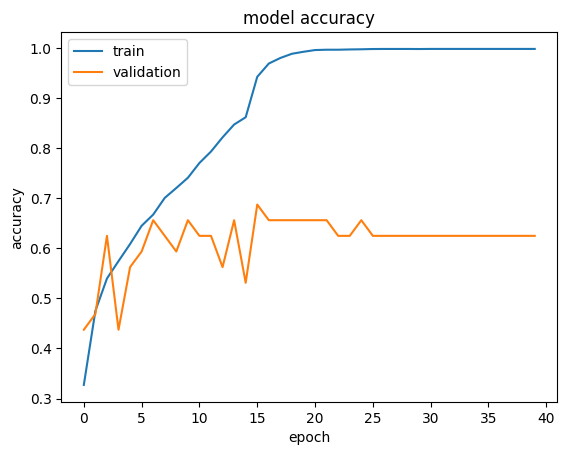

In [23]:
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on the Test Set**


In [24]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_1.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")


1/4 [======>.......................] - ETA: 0s - loss: 2.1632 - accuracy: 0.6875


4/4 [==============================] - 0s 5ms/step - loss: 1.9155 - accuracy: 0.6406


Loss: 1.9154821634292603, Accuracy: 0.640625


### **Plotting Confusion Matrix**



1/4 [======>.......................] - ETA: 0s


4/4 [==============================] - 0s 6ms/step


              precision    recall  f1-score   support

       happy       0.71      0.69      0.70        32
     neutral       0.52      0.53      0.52        32
         sad       0.47      0.50      0.48        32
    surprise       0.90      0.84      0.87        32

    accuracy                           0.64       128
   macro avg       0.65      0.64      0.64       128
weighted avg       0.65      0.64      0.64       128



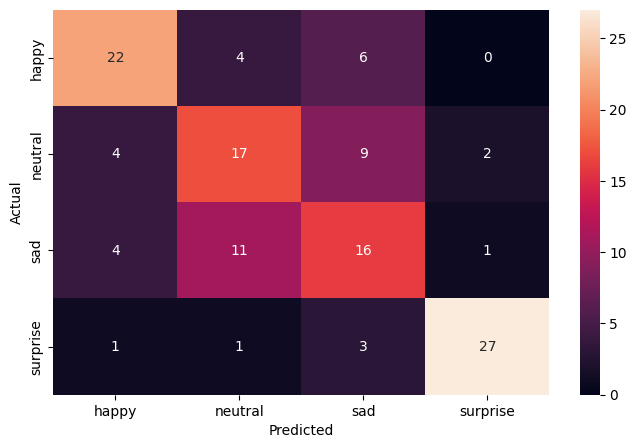

In [25]:
pred_probabilities = model_1.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- As we can see from the above summary, this CNN model has been trained and learned with **144,056 parameters (weights and biases).**
- The model's training accuracy shows a progressive increase, reaching about **71.34%**, suggesting the model is learning effectively. The validation accuracy fluctuates but also generally trends upward, peaking at approximately **78.12%**. This divergence might indicate that the model is still learning generalizable features, despite the higher accuracy on the validation set, which can sometimes be attributed to the validation set being slightly 'easier' or containing fewer augmentations.
- Upon evaluating the model on the test dataset, it achieved a loss of 0.6081 and an **accuracy of 72.66%**.
- From the confusion matrix, the model performs best in identifying 'happy' and 'surprise' emotions. It faces more challenges with 'sad' and 'neutral', in which we have the lowest f1-score, 56% and 63% respectively.


### **Creating the second Convolutional Neural Network**


### **Model 2 Architecture:**

- We plan on having 4 convolutional blocks in this Architecture, each having a Conv2D, MaxPooling2D, and a Dropout layer.
- Adding first Conv2D layer with **256 filters** and a **kernel size of 5x5**. Using the **'same' padding** and provide the **input shape = (48, 48, 1)**. Using **'relu' activation**.
- Adding MaxPooling2D layer with **kernel size 5x5** and **stride size 2x2**.
- Adding a Dropout layer with a dropout ratio of **0.2**.
- Adding a second Conv2D layer with **128 filters** and a **kernel size of 5x5**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.3 dropout ratio.
- Adding a third Conv2D layer with **64 filters** and a **kernel size of 5x5**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.3.
- Adding a fourth Conv2D layer with **32 filters** and a **kernel size of 3x3**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.3.
- Once the convolutional blocks are added, we add the Flatten layer.
- Adding first fully connected dense layer with 64 neurons and using **'relu' activation**.
- Adding a second fully connected dense layer with 32 neurons and using **'relu' activation**.
- Adding a final dense layer with 4 neurons and using **'softmax' activation function**.
- Initializing an **Adam optimizer** with a learning rate of 0.0005.
- Compiling your model with the optimizer initialized and using **categorical_crossentropy** as the loss function and the 'accuracy' as the metric.
- Finally, printing your model summary and writing down the observations.


In [26]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [27]:
# Initializing a sequential model
model_2 = Sequential()

# Adding first conv layer
model_2.add(
    Conv2D(
        filters=256,
        kernel_size=(5, 5),
        padding="Same",
        input_shape=(img_width, img_height, color_layers),
        activation="relu",
    )
)
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.2))

# Adding second conv layer
model_2.add(Conv2D(filters=128, kernel_size=(5, 5), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Adding third conv layer
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Adding fourth conv layer
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Flattening
model_2.add(Flatten())
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(32, activation="relu"))

# Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the Model**


In [28]:
# Compile the model
model_2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

model_2.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 48, 48, 256)       6656      


 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         


 D)                                                              


 dropout (Dropout)           (None, 24, 24, 256)       0         


 conv2d_1 (Conv2D)           (None, 24, 24, 128)       819328    


 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         


 g2D)                                                            


 dropout_1 (Dropout)         (None, 12, 12, 128)       0         


 conv2d_2 (Conv2D)           (None, 12, 12, 64)        73792     


 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 dropout_2 (Dropout)         (None, 6, 6, 64)          0         


 conv2d_3 (Conv2D)           (None, 6, 6, 32)          18464     


 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 32)          0         


 g2D)                                                            


 dropout_3 (Dropout)         (None, 3, 3, 32)          0         


 flatten (Flatten)           (None, 288)               0         


 dense (Dense)               (None, 64)                18496     


 dense_1 (Dense)             (None, 32)                2080      


 dense_2 (Dense)             (None, 4)                 132       


Total params: 938948 (3.58 MB)


Trainable params: 938948 (3.58 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [29]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_2_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_2 = model_2.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[reduce_lr],
)

Epoch 1/40


2024-03-21 00:52:07.861663: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2024-03-21 00:52:08.527091: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.



  1/473 [..............................] - ETA: 22:24 - loss: 1.3793 - accuracy: 0.2812


  7/473 [..............................] - ETA: 4s - loss: 1.3983 - accuracy: 0.2902   


 13/473 [..............................] - ETA: 4s - loss: 1.3950 - accuracy: 0.2716


 19/473 [>.............................] - ETA: 4s - loss: 1.3903 - accuracy: 0.2845


 25/473 [>.............................] - ETA: 4s - loss: 1.3915 - accuracy: 0.2700


 31/473 [>.............................] - ETA: 4s - loss: 1.3909 - accuracy: 0.2641


 37/473 [=>............................] - ETA: 4s - loss: 1.3914 - accuracy: 0.2601


 42/473 [=>............................] - ETA: 4s - loss: 1.3910 - accuracy: 0.2589


 47/473 [=>............................] - ETA: 4s - loss: 1.3904 - accuracy: 0.2560


 52/473 [==>...........................] - ETA: 4s - loss: 1.3894 - accuracy: 0.2572


 58/473 [==>...........................] - ETA: 4s - loss: 1.3886 - accuracy: 0.2597


 64/473 [===>..........................] - ETA: 4s - loss: 1.3886 - accuracy: 0.2612


 70/473 [===>..........................] - ETA: 3s - loss: 1.3877 - accuracy: 0.2688


 76/473 [===>..........................] - ETA: 3s - loss: 1.3880 - accuracy: 0.2689


 82/473 [====>.........................] - ETA: 3s - loss: 1.3884 - accuracy: 0.2637


 88/473 [====>.........................] - ETA: 3s - loss: 1.3881 - accuracy: 0.2621


 94/473 [====>.........................] - ETA: 3s - loss: 1.3879 - accuracy: 0.2610


100/473 [=====>........................] - ETA: 3s - loss: 1.3876 - accuracy: 0.2625


106/473 [=====>........................] - ETA: 3s - loss: 1.3875 - accuracy: 0.2639


112/473 [======>.......................] - ETA: 3s - loss: 1.3872 - accuracy: 0.2653


118/473 [======>.......................] - ETA: 3s - loss: 1.3870 - accuracy: 0.2669


124/473 [======>.......................] - ETA: 3s - loss: 1.3865 - accuracy: 0.2686


130/473 [=======>......................] - ETA: 3s - loss: 1.3870 - accuracy: 0.2688


136/473 [=======>......................] - ETA: 3s - loss: 1.3870 - accuracy: 0.2677


142/473 [========>.....................] - ETA: 3s - loss: 1.3872 - accuracy: 0.2650


148/473 [========>.....................] - ETA: 3s - loss: 1.3869 - accuracy: 0.2671


154/473 [========>.....................] - ETA: 3s - loss: 1.3867 - accuracy: 0.2679


160/473 [=========>....................] - ETA: 2s - loss: 1.3865 - accuracy: 0.2689


166/473 [=========>....................] - ETA: 2s - loss: 1.3866 - accuracy: 0.2684


172/473 [=========>....................] - ETA: 2s - loss: 1.3864 - accuracy: 0.2696


178/473 [==========>...................] - ETA: 2s - loss: 1.3861 - accuracy: 0.2697


184/473 [==========>...................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2700


189/473 [==========>...................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2690


195/473 [===========>..................] - ETA: 2s - loss: 1.3854 - accuracy: 0.2702


201/473 [===========>..................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2685


207/473 [============>.................] - ETA: 2s - loss: 1.3857 - accuracy: 0.2672


213/473 [============>.................] - ETA: 2s - loss: 1.3855 - accuracy: 0.2669


219/473 [============>.................] - ETA: 2s - loss: 1.3854 - accuracy: 0.2656


224/473 [=============>................] - ETA: 2s - loss: 1.3853 - accuracy: 0.2652


229/473 [=============>................] - ETA: 2s - loss: 1.3851 - accuracy: 0.2666


235/473 [=============>................] - ETA: 2s - loss: 1.3849 - accuracy: 0.2674


240/473 [==============>...............] - ETA: 2s - loss: 1.3849 - accuracy: 0.2676


246/473 [==============>...............] - ETA: 2s - loss: 1.3848 - accuracy: 0.2673


251/473 [==============>...............] - ETA: 2s - loss: 1.3848 - accuracy: 0.2669


256/473 [===============>..............] - ETA: 2s - loss: 1.3849 - accuracy: 0.2678


262/473 [===============>..............] - ETA: 2s - loss: 1.3849 - accuracy: 0.2679


268/473 [===============>..............] - ETA: 1s - loss: 1.3848 - accuracy: 0.2685


273/473 [================>.............] - ETA: 1s - loss: 1.3847 - accuracy: 0.2682


278/473 [================>.............] - ETA: 1s - loss: 1.3845 - accuracy: 0.2683


284/473 [=================>............] - ETA: 1s - loss: 1.3842 - accuracy: 0.2700


289/473 [=================>............] - ETA: 1s - loss: 1.3841 - accuracy: 0.2700


294/473 [=================>............] - ETA: 1s - loss: 1.3842 - accuracy: 0.2693


299/473 [=================>............] - ETA: 1s - loss: 1.3844 - accuracy: 0.2689


304/473 [==================>...........] - ETA: 1s - loss: 1.3845 - accuracy: 0.2682


309/473 [==================>...........] - ETA: 1s - loss: 1.3843 - accuracy: 0.2688


314/473 [==================>...........] - ETA: 1s - loss: 1.3843 - accuracy: 0.2682


320/473 [===================>..........] - ETA: 1s - loss: 1.3842 - accuracy: 0.2684


326/473 [===================>..........] - ETA: 1s - loss: 1.3841 - accuracy: 0.2684


332/473 [====================>.........] - ETA: 1s - loss: 1.3840 - accuracy: 0.2685


337/473 [====================>.........] - ETA: 1s - loss: 1.3840 - accuracy: 0.2681


342/473 [====================>.........] - ETA: 1s - loss: 1.3839 - accuracy: 0.2685


348/473 [=====================>........] - ETA: 1s - loss: 1.3837 - accuracy: 0.2698


349/473 [=====================>........] - ETA: 1s - loss: 1.3837 - accuracy: 0.2696


355/473 [=====================>........] - ETA: 1s - loss: 1.3834 - accuracy: 0.2700


360/473 [=====================>........] - ETA: 1s - loss: 1.3832 - accuracy: 0.2694


365/473 [======================>.......] - ETA: 1s - loss: 1.3830 - accuracy: 0.2694


370/473 [======================>.......] - ETA: 1s - loss: 1.3831 - accuracy: 0.2694


376/473 [======================>.......] - ETA: 1s - loss: 1.3831 - accuracy: 0.2691


382/473 [=======================>......] - ETA: 0s - loss: 1.3831 - accuracy: 0.2692


388/473 [=======================>......] - ETA: 0s - loss: 1.3827 - accuracy: 0.2701


394/473 [=======================>......] - ETA: 0s - loss: 1.3828 - accuracy: 0.2695


400/473 [========================>.....] - ETA: 0s - loss: 1.3826 - accuracy: 0.2694


406/473 [========================>.....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2699


412/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2704


418/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2707


423/473 [=========================>....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2714


428/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2719


433/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2715


438/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2713


443/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2710


448/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2706


453/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2705


458/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2706


463/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2705


468/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2705


473/473 [==============================] - ETA: 0s - loss: 1.3817 - accuracy: 0.2706


473/473 [==============================] - 8s 11ms/step - loss: 1.3817 - accuracy: 0.2706 - val_loss: 1.3528 - val_accuracy: 0.3125 - lr: 5.0000e-04


Epoch 2/40



  1/473 [..............................] - ETA: 8s - loss: 1.3582 - accuracy: 0.2188


  7/473 [..............................] - ETA: 4s - loss: 1.3549 - accuracy: 0.3482


 13/473 [..............................] - ETA: 4s - loss: 1.3570 - accuracy: 0.3317


 19/473 [>.............................] - ETA: 4s - loss: 1.3605 - accuracy: 0.3141


 25/473 [>.............................] - ETA: 4s - loss: 1.3613 - accuracy: 0.3250


 31/473 [>.............................] - ETA: 4s - loss: 1.3618 - accuracy: 0.3236


 36/473 [=>............................] - ETA: 4s - loss: 1.3625 - accuracy: 0.3247


 42/473 [=>............................] - ETA: 4s - loss: 1.3635 - accuracy: 0.3214


 48/473 [==>...........................] - ETA: 4s - loss: 1.3616 - accuracy: 0.3236


 54/473 [==>...........................] - ETA: 4s - loss: 1.3593 - accuracy: 0.3218


 60/473 [==>...........................] - ETA: 3s - loss: 1.3598 - accuracy: 0.3214


 66/473 [===>..........................] - ETA: 3s - loss: 1.3613 - accuracy: 0.3205


 72/473 [===>..........................] - ETA: 3s - loss: 1.3608 - accuracy: 0.3199


 77/473 [===>..........................] - ETA: 3s - loss: 1.3622 - accuracy: 0.3174


 83/473 [====>.........................] - ETA: 3s - loss: 1.3611 - accuracy: 0.3170


 88/473 [====>.........................] - ETA: 3s - loss: 1.3608 - accuracy: 0.3164


 94/473 [====>.........................] - ETA: 3s - loss: 1.3604 - accuracy: 0.3152


100/473 [=====>........................] - ETA: 3s - loss: 1.3610 - accuracy: 0.3134


106/473 [=====>........................] - ETA: 3s - loss: 1.3619 - accuracy: 0.3116


112/473 [======>.......................] - ETA: 3s - loss: 1.3602 - accuracy: 0.3156


117/473 [======>.......................] - ETA: 3s - loss: 1.3578 - accuracy: 0.3181


123/473 [======>.......................] - ETA: 3s - loss: 1.3548 - accuracy: 0.3214


129/473 [=======>......................] - ETA: 3s - loss: 1.3528 - accuracy: 0.3227


135/473 [=======>......................] - ETA: 3s - loss: 1.3494 - accuracy: 0.3231


141/473 [=======>......................] - ETA: 3s - loss: 1.3485 - accuracy: 0.3240


147/473 [========>.....................] - ETA: 3s - loss: 1.3460 - accuracy: 0.3276


153/473 [========>.....................] - ETA: 3s - loss: 1.3451 - accuracy: 0.3274


159/473 [=========>....................] - ETA: 2s - loss: 1.3436 - accuracy: 0.3302


165/473 [=========>....................] - ETA: 2s - loss: 1.3405 - accuracy: 0.3322


171/473 [=========>....................] - ETA: 2s - loss: 1.3378 - accuracy: 0.3341


177/473 [==========>...................] - ETA: 2s - loss: 1.3362 - accuracy: 0.3372


182/473 [==========>...................] - ETA: 2s - loss: 1.3354 - accuracy: 0.3372


188/473 [==========>...................] - ETA: 2s - loss: 1.3337 - accuracy: 0.3373


193/473 [===========>..................] - ETA: 2s - loss: 1.3327 - accuracy: 0.3394


198/473 [===========>..................] - ETA: 2s - loss: 1.3314 - accuracy: 0.3406


203/473 [===========>..................] - ETA: 2s - loss: 1.3290 - accuracy: 0.3421


209/473 [============>.................] - ETA: 2s - loss: 1.3275 - accuracy: 0.3426


215/473 [============>.................] - ETA: 2s - loss: 1.3258 - accuracy: 0.3429


221/473 [=============>................] - ETA: 2s - loss: 1.3237 - accuracy: 0.3430


227/473 [=============>................] - ETA: 2s - loss: 1.3216 - accuracy: 0.3442


233/473 [=============>................] - ETA: 2s - loss: 1.3210 - accuracy: 0.3451


239/473 [==============>...............] - ETA: 2s - loss: 1.3191 - accuracy: 0.3464


245/473 [==============>...............] - ETA: 2s - loss: 1.3176 - accuracy: 0.3466


251/473 [==============>...............] - ETA: 2s - loss: 1.3164 - accuracy: 0.3477


257/473 [===============>..............] - ETA: 2s - loss: 1.3145 - accuracy: 0.3495


263/473 [===============>..............] - ETA: 1s - loss: 1.3116 - accuracy: 0.3498


269/473 [================>.............] - ETA: 1s - loss: 1.3101 - accuracy: 0.3518


275/473 [================>.............] - ETA: 1s - loss: 1.3102 - accuracy: 0.3523


281/473 [================>.............] - ETA: 1s - loss: 1.3086 - accuracy: 0.3536


286/473 [=================>............] - ETA: 1s - loss: 1.3074 - accuracy: 0.3543


292/473 [=================>............] - ETA: 1s - loss: 1.3057 - accuracy: 0.3554


297/473 [=================>............] - ETA: 1s - loss: 1.3047 - accuracy: 0.3567


303/473 [==================>...........] - ETA: 1s - loss: 1.3033 - accuracy: 0.3576


308/473 [==================>...........] - ETA: 1s - loss: 1.3037 - accuracy: 0.3573


313/473 [==================>...........] - ETA: 1s - loss: 1.3026 - accuracy: 0.3576


318/473 [===================>..........] - ETA: 1s - loss: 1.3020 - accuracy: 0.3576


324/473 [===================>..........] - ETA: 1s - loss: 1.3011 - accuracy: 0.3584


329/473 [===================>..........] - ETA: 1s - loss: 1.2992 - accuracy: 0.3593


334/473 [====================>.........] - ETA: 1s - loss: 1.2980 - accuracy: 0.3604


340/473 [====================>.........] - ETA: 1s - loss: 1.2961 - accuracy: 0.3612


346/473 [====================>.........] - ETA: 1s - loss: 1.2963 - accuracy: 0.3615


351/473 [=====================>........] - ETA: 1s - loss: 1.2958 - accuracy: 0.3622


356/473 [=====================>........] - ETA: 1s - loss: 1.2960 - accuracy: 0.3613


362/473 [=====================>........] - ETA: 1s - loss: 1.2944 - accuracy: 0.3619


367/473 [======================>.......] - ETA: 1s - loss: 1.2940 - accuracy: 0.3627


372/473 [======================>.......] - ETA: 0s - loss: 1.2934 - accuracy: 0.3624


378/473 [======================>.......] - ETA: 0s - loss: 1.2929 - accuracy: 0.3628


383/473 [=======================>......] - ETA: 0s - loss: 1.2913 - accuracy: 0.3642


388/473 [=======================>......] - ETA: 0s - loss: 1.2892 - accuracy: 0.3652


394/473 [=======================>......] - ETA: 0s - loss: 1.2868 - accuracy: 0.3670


399/473 [========================>.....] - ETA: 0s - loss: 1.2864 - accuracy: 0.3671


404/473 [========================>.....] - ETA: 0s - loss: 1.2853 - accuracy: 0.3675


410/473 [=========================>....] - ETA: 0s - loss: 1.2830 - accuracy: 0.3691


416/473 [=========================>....] - ETA: 0s - loss: 1.2820 - accuracy: 0.3691


421/473 [=========================>....] - ETA: 0s - loss: 1.2813 - accuracy: 0.3694


426/473 [==========================>...] - ETA: 0s - loss: 1.2807 - accuracy: 0.3704


432/473 [==========================>...] - ETA: 0s - loss: 1.2806 - accuracy: 0.3707


438/473 [==========================>...] - ETA: 0s - loss: 1.2806 - accuracy: 0.3712


444/473 [===========================>..] - ETA: 0s - loss: 1.2796 - accuracy: 0.3721


449/473 [===========================>..] - ETA: 0s - loss: 1.2789 - accuracy: 0.3724


455/473 [===========================>..] - ETA: 0s - loss: 1.2781 - accuracy: 0.3729


461/473 [============================>.] - ETA: 0s - loss: 1.2770 - accuracy: 0.3734


467/473 [============================>.] - ETA: 0s - loss: 1.2759 - accuracy: 0.3741


473/473 [==============================] - ETA: 0s - loss: 1.2743 - accuracy: 0.3748


473/473 [==============================] - 5s 10ms/step - loss: 1.2743 - accuracy: 0.3748 - val_loss: 1.0908 - val_accuracy: 0.3438 - lr: 5.0000e-04


Epoch 3/40



  1/473 [..............................] - ETA: 8s - loss: 1.0965 - accuracy: 0.4688


  7/473 [..............................] - ETA: 4s - loss: 1.1875 - accuracy: 0.4420


 13/473 [..............................] - ETA: 4s - loss: 1.2002 - accuracy: 0.4014


 19/473 [>.............................] - ETA: 4s - loss: 1.1887 - accuracy: 0.4293


 25/473 [>.............................] - ETA: 4s - loss: 1.2065 - accuracy: 0.4187


 31/473 [>.............................] - ETA: 4s - loss: 1.2067 - accuracy: 0.4183


 36/473 [=>............................] - ETA: 4s - loss: 1.1951 - accuracy: 0.4271


 41/473 [=>............................] - ETA: 4s - loss: 1.1862 - accuracy: 0.4345


 47/473 [=>............................] - ETA: 4s - loss: 1.1886 - accuracy: 0.4388


 53/473 [==>...........................] - ETA: 4s - loss: 1.1866 - accuracy: 0.4469


 59/473 [==>...........................] - ETA: 3s - loss: 1.1869 - accuracy: 0.4444


 65/473 [===>..........................] - ETA: 3s - loss: 1.1844 - accuracy: 0.4447


 70/473 [===>..........................] - ETA: 3s - loss: 1.1893 - accuracy: 0.4388


 75/473 [===>..........................] - ETA: 3s - loss: 1.1888 - accuracy: 0.4383


 80/473 [====>.........................] - ETA: 3s - loss: 1.1928 - accuracy: 0.4363


 85/473 [====>.........................] - ETA: 3s - loss: 1.1907 - accuracy: 0.4390


 91/473 [====>.........................] - ETA: 3s - loss: 1.1910 - accuracy: 0.4368


 97/473 [=====>........................] - ETA: 3s - loss: 1.1923 - accuracy: 0.4340


103/473 [=====>........................] - ETA: 3s - loss: 1.1866 - accuracy: 0.4369


109/473 [=====>........................] - ETA: 3s - loss: 1.1855 - accuracy: 0.4372


114/473 [======>.......................] - ETA: 3s - loss: 1.1864 - accuracy: 0.4359


120/473 [======>.......................] - ETA: 3s - loss: 1.1867 - accuracy: 0.4352


125/473 [======>.......................] - ETA: 3s - loss: 1.1859 - accuracy: 0.4372


130/473 [=======>......................] - ETA: 3s - loss: 1.1889 - accuracy: 0.4353


136/473 [=======>......................] - ETA: 3s - loss: 1.1837 - accuracy: 0.4393


142/473 [========>.....................] - ETA: 3s - loss: 1.1810 - accuracy: 0.4415


147/473 [========>.....................] - ETA: 3s - loss: 1.1804 - accuracy: 0.4413


152/473 [========>.....................] - ETA: 3s - loss: 1.1774 - accuracy: 0.4441


158/473 [=========>....................] - ETA: 3s - loss: 1.1729 - accuracy: 0.4486


164/473 [=========>....................] - ETA: 3s - loss: 1.1716 - accuracy: 0.4482


169/473 [=========>....................] - ETA: 2s - loss: 1.1730 - accuracy: 0.4482


174/473 [==========>...................] - ETA: 2s - loss: 1.1751 - accuracy: 0.4472


180/473 [==========>...................] - ETA: 2s - loss: 1.1741 - accuracy: 0.4498


186/473 [==========>...................] - ETA: 2s - loss: 1.1746 - accuracy: 0.4514


191/473 [===========>..................] - ETA: 2s - loss: 1.1727 - accuracy: 0.4522


197/473 [===========>..................] - ETA: 2s - loss: 1.1702 - accuracy: 0.4540


202/473 [===========>..................] - ETA: 2s - loss: 1.1702 - accuracy: 0.4545


208/473 [============>.................] - ETA: 2s - loss: 1.1687 - accuracy: 0.4554


213/473 [============>.................] - ETA: 2s - loss: 1.1684 - accuracy: 0.4557


218/473 [============>.................] - ETA: 2s - loss: 1.1690 - accuracy: 0.4553


224/473 [=============>................] - ETA: 2s - loss: 1.1677 - accuracy: 0.4554


229/473 [=============>................] - ETA: 2s - loss: 1.1693 - accuracy: 0.4548


235/473 [=============>................] - ETA: 2s - loss: 1.1702 - accuracy: 0.4544


241/473 [==============>...............] - ETA: 2s - loss: 1.1698 - accuracy: 0.4545


247/473 [==============>...............] - ETA: 2s - loss: 1.1708 - accuracy: 0.4545


253/473 [===============>..............] - ETA: 2s - loss: 1.1698 - accuracy: 0.4547


259/473 [===============>..............] - ETA: 2s - loss: 1.1706 - accuracy: 0.4539


265/473 [===============>..............] - ETA: 2s - loss: 1.1708 - accuracy: 0.4550


270/473 [================>.............] - ETA: 2s - loss: 1.1715 - accuracy: 0.4544


276/473 [================>.............] - ETA: 1s - loss: 1.1708 - accuracy: 0.4555


282/473 [================>.............] - ETA: 1s - loss: 1.1711 - accuracy: 0.4548


288/473 [=================>............] - ETA: 1s - loss: 1.1708 - accuracy: 0.4546


293/473 [=================>............] - ETA: 1s - loss: 1.1700 - accuracy: 0.4553


298/473 [=================>............] - ETA: 1s - loss: 1.1692 - accuracy: 0.4560


304/473 [==================>...........] - ETA: 1s - loss: 1.1689 - accuracy: 0.4560


309/473 [==================>...........] - ETA: 1s - loss: 1.1682 - accuracy: 0.4558


314/473 [==================>...........] - ETA: 1s - loss: 1.1690 - accuracy: 0.4557


319/473 [===================>..........] - ETA: 1s - loss: 1.1669 - accuracy: 0.4565


325/473 [===================>..........] - ETA: 1s - loss: 1.1662 - accuracy: 0.4565


330/473 [===================>..........] - ETA: 1s - loss: 1.1657 - accuracy: 0.4573


335/473 [====================>.........] - ETA: 1s - loss: 1.1660 - accuracy: 0.4567


341/473 [====================>.........] - ETA: 1s - loss: 1.1658 - accuracy: 0.4575


346/473 [====================>.........] - ETA: 1s - loss: 1.1642 - accuracy: 0.4593


351/473 [=====================>........] - ETA: 1s - loss: 1.1623 - accuracy: 0.4607


356/473 [=====================>........] - ETA: 1s - loss: 1.1625 - accuracy: 0.4608


361/473 [=====================>........] - ETA: 1s - loss: 1.1608 - accuracy: 0.4623


367/473 [======================>.......] - ETA: 1s - loss: 1.1589 - accuracy: 0.4639


372/473 [======================>.......] - ETA: 1s - loss: 1.1576 - accuracy: 0.4650


378/473 [======================>.......] - ETA: 0s - loss: 1.1567 - accuracy: 0.4650


384/473 [=======================>......] - ETA: 0s - loss: 1.1561 - accuracy: 0.4647


389/473 [=======================>......] - ETA: 0s - loss: 1.1557 - accuracy: 0.4646


395/473 [========================>.....] - ETA: 0s - loss: 1.1554 - accuracy: 0.4650


401/473 [========================>.....] - ETA: 0s - loss: 1.1546 - accuracy: 0.4655


407/473 [========================>.....] - ETA: 0s - loss: 1.1533 - accuracy: 0.4661


413/473 [=========================>....] - ETA: 0s - loss: 1.1519 - accuracy: 0.4669


419/473 [=========================>....] - ETA: 0s - loss: 1.1513 - accuracy: 0.4679


425/473 [=========================>....] - ETA: 0s - loss: 1.1507 - accuracy: 0.4685


431/473 [==========================>...] - ETA: 0s - loss: 1.1511 - accuracy: 0.4684


436/473 [==========================>...] - ETA: 0s - loss: 1.1504 - accuracy: 0.4691


442/473 [===========================>..] - ETA: 0s - loss: 1.1499 - accuracy: 0.4691


448/473 [===========================>..] - ETA: 0s - loss: 1.1488 - accuracy: 0.4700


453/473 [===========================>..] - ETA: 0s - loss: 1.1482 - accuracy: 0.4707


458/473 [============================>.] - ETA: 0s - loss: 1.1475 - accuracy: 0.4711


464/473 [============================>.] - ETA: 0s - loss: 1.1478 - accuracy: 0.4718


470/473 [============================>.] - ETA: 0s - loss: 1.1477 - accuracy: 0.4720


473/473 [==============================] - 5s 10ms/step - loss: 1.1474 - accuracy: 0.4722 - val_loss: 0.9677 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 4/40



  1/473 [..............................] - ETA: 8s - loss: 0.9878 - accuracy: 0.5312


  7/473 [..............................] - ETA: 4s - loss: 1.0440 - accuracy: 0.5089


 13/473 [..............................] - ETA: 4s - loss: 1.0746 - accuracy: 0.5000


 19/473 [>.............................] - ETA: 4s - loss: 1.0821 - accuracy: 0.5132


 24/473 [>.............................] - ETA: 4s - loss: 1.0780 - accuracy: 0.5065


 30/473 [>.............................] - ETA: 4s - loss: 1.0649 - accuracy: 0.5229


 36/473 [=>............................] - ETA: 4s - loss: 1.0698 - accuracy: 0.5234


 41/473 [=>............................] - ETA: 4s - loss: 1.0717 - accuracy: 0.5274


 46/473 [=>............................] - ETA: 4s - loss: 1.0697 - accuracy: 0.5245


 52/473 [==>...........................] - ETA: 4s - loss: 1.0670 - accuracy: 0.5240


 58/473 [==>...........................] - ETA: 4s - loss: 1.0711 - accuracy: 0.5189


 63/473 [==>...........................] - ETA: 4s - loss: 1.0668 - accuracy: 0.5228


 69/473 [===>..........................] - ETA: 3s - loss: 1.0709 - accuracy: 0.5181


 75/473 [===>..........................] - ETA: 3s - loss: 1.0701 - accuracy: 0.5179


 81/473 [====>.........................] - ETA: 3s - loss: 1.0689 - accuracy: 0.5193


 87/473 [====>.........................] - ETA: 3s - loss: 1.0706 - accuracy: 0.5183


 93/473 [====>.........................] - ETA: 3s - loss: 1.0741 - accuracy: 0.5164


 98/473 [=====>........................] - ETA: 3s - loss: 1.0718 - accuracy: 0.5201


103/473 [=====>........................] - ETA: 3s - loss: 1.0706 - accuracy: 0.5234


108/473 [=====>........................] - ETA: 3s - loss: 1.0672 - accuracy: 0.5238


113/473 [======>.......................] - ETA: 3s - loss: 1.0702 - accuracy: 0.5233


118/473 [======>.......................] - ETA: 3s - loss: 1.0685 - accuracy: 0.5252


124/473 [======>.......................] - ETA: 3s - loss: 1.0701 - accuracy: 0.5260


129/473 [=======>......................] - ETA: 3s - loss: 1.0741 - accuracy: 0.5230


135/473 [=======>......................] - ETA: 3s - loss: 1.0752 - accuracy: 0.5220


140/473 [=======>......................] - ETA: 3s - loss: 1.0749 - accuracy: 0.5235


146/473 [========>.....................] - ETA: 3s - loss: 1.0769 - accuracy: 0.5212


152/473 [========>.....................] - ETA: 3s - loss: 1.0758 - accuracy: 0.5214


158/473 [=========>....................] - ETA: 3s - loss: 1.0754 - accuracy: 0.5234


163/473 [=========>....................] - ETA: 3s - loss: 1.0747 - accuracy: 0.5234


168/473 [=========>....................] - ETA: 2s - loss: 1.0732 - accuracy: 0.5240


173/473 [=========>....................] - ETA: 2s - loss: 1.0717 - accuracy: 0.5251


179/473 [==========>...................] - ETA: 2s - loss: 1.0752 - accuracy: 0.5238


184/473 [==========>...................] - ETA: 2s - loss: 1.0739 - accuracy: 0.5240


190/473 [===========>..................] - ETA: 2s - loss: 1.0719 - accuracy: 0.5257


196/473 [===========>..................] - ETA: 2s - loss: 1.0731 - accuracy: 0.5255


202/473 [===========>..................] - ETA: 2s - loss: 1.0724 - accuracy: 0.5260


208/473 [============>.................] - ETA: 2s - loss: 1.0710 - accuracy: 0.5259


214/473 [============>.................] - ETA: 2s - loss: 1.0689 - accuracy: 0.5256


219/473 [============>.................] - ETA: 2s - loss: 1.0672 - accuracy: 0.5260


224/473 [=============>................] - ETA: 2s - loss: 1.0647 - accuracy: 0.5282


230/473 [=============>................] - ETA: 2s - loss: 1.0643 - accuracy: 0.5271


236/473 [=============>................] - ETA: 2s - loss: 1.0648 - accuracy: 0.5245


242/473 [==============>...............] - ETA: 2s - loss: 1.0648 - accuracy: 0.5247


248/473 [==============>...............] - ETA: 2s - loss: 1.0661 - accuracy: 0.5242


254/473 [===============>..............] - ETA: 2s - loss: 1.0665 - accuracy: 0.5246


260/473 [===============>..............] - ETA: 2s - loss: 1.0666 - accuracy: 0.5244


266/473 [===============>..............] - ETA: 2s - loss: 1.0673 - accuracy: 0.5242


272/473 [================>.............] - ETA: 1s - loss: 1.0655 - accuracy: 0.5259


278/473 [================>.............] - ETA: 1s - loss: 1.0645 - accuracy: 0.5267


284/473 [=================>............] - ETA: 1s - loss: 1.0639 - accuracy: 0.5269


290/473 [=================>............] - ETA: 1s - loss: 1.0616 - accuracy: 0.5282


296/473 [=================>............] - ETA: 1s - loss: 1.0616 - accuracy: 0.5271


302/473 [==================>...........] - ETA: 1s - loss: 1.0607 - accuracy: 0.5276


308/473 [==================>...........] - ETA: 1s - loss: 1.0589 - accuracy: 0.5294


314/473 [==================>...........] - ETA: 1s - loss: 1.0589 - accuracy: 0.5285


319/473 [===================>..........] - ETA: 1s - loss: 1.0586 - accuracy: 0.5286


324/473 [===================>..........] - ETA: 1s - loss: 1.0566 - accuracy: 0.5303


329/473 [===================>..........] - ETA: 1s - loss: 1.0560 - accuracy: 0.5311


335/473 [====================>.........] - ETA: 1s - loss: 1.0545 - accuracy: 0.5320


341/473 [====================>.........] - ETA: 1s - loss: 1.0544 - accuracy: 0.5325


347/473 [=====================>........] - ETA: 1s - loss: 1.0554 - accuracy: 0.5323


353/473 [=====================>........] - ETA: 1s - loss: 1.0541 - accuracy: 0.5330


359/473 [=====================>........] - ETA: 1s - loss: 1.0525 - accuracy: 0.5340


365/473 [======================>.......] - ETA: 1s - loss: 1.0518 - accuracy: 0.5351


371/473 [======================>.......] - ETA: 0s - loss: 1.0509 - accuracy: 0.5361


376/473 [======================>.......] - ETA: 0s - loss: 1.0512 - accuracy: 0.5360


382/473 [=======================>......] - ETA: 0s - loss: 1.0499 - accuracy: 0.5364


388/473 [=======================>......] - ETA: 0s - loss: 1.0488 - accuracy: 0.5368


393/473 [=======================>......] - ETA: 0s - loss: 1.0469 - accuracy: 0.5381


398/473 [========================>.....] - ETA: 0s - loss: 1.0462 - accuracy: 0.5381


403/473 [========================>.....] - ETA: 0s - loss: 1.0467 - accuracy: 0.5375


408/473 [========================>.....] - ETA: 0s - loss: 1.0462 - accuracy: 0.5378


413/473 [=========================>....] - ETA: 0s - loss: 1.0452 - accuracy: 0.5383


419/473 [=========================>....] - ETA: 0s - loss: 1.0459 - accuracy: 0.5379


425/473 [=========================>....] - ETA: 0s - loss: 1.0452 - accuracy: 0.5375


431/473 [==========================>...] - ETA: 0s - loss: 1.0446 - accuracy: 0.5380


437/473 [==========================>...] - ETA: 0s - loss: 1.0455 - accuracy: 0.5377


443/473 [===========================>..] - ETA: 0s - loss: 1.0457 - accuracy: 0.5374


449/473 [===========================>..] - ETA: 0s - loss: 1.0464 - accuracy: 0.5373


455/473 [===========================>..] - ETA: 0s - loss: 1.0473 - accuracy: 0.5372


461/473 [============================>.] - ETA: 0s - loss: 1.0470 - accuracy: 0.5378


467/473 [============================>.] - ETA: 0s - loss: 1.0465 - accuracy: 0.5381


472/473 [============================>.] - ETA: 0s - loss: 1.0457 - accuracy: 0.5386


473/473 [==============================] - 5s 10ms/step - loss: 1.0459 - accuracy: 0.5386 - val_loss: 0.8132 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 5/40



  1/473 [..............................] - ETA: 9s - loss: 0.8720 - accuracy: 0.6562


  7/473 [..............................] - ETA: 4s - loss: 0.9604 - accuracy: 0.6116


 13/473 [..............................] - ETA: 4s - loss: 0.9657 - accuracy: 0.5938


 19/473 [>.............................] - ETA: 4s - loss: 0.9793 - accuracy: 0.5707


 25/473 [>.............................] - ETA: 4s - loss: 0.9929 - accuracy: 0.5600


 31/473 [>.............................] - ETA: 4s - loss: 0.9956 - accuracy: 0.5736


 37/473 [=>............................] - ETA: 4s - loss: 0.9896 - accuracy: 0.5726


 43/473 [=>............................] - ETA: 3s - loss: 0.9854 - accuracy: 0.5756


 49/473 [==>...........................] - ETA: 3s - loss: 0.9810 - accuracy: 0.5823


 55/473 [==>...........................] - ETA: 3s - loss: 0.9940 - accuracy: 0.5744


 61/473 [==>...........................] - ETA: 3s - loss: 1.0004 - accuracy: 0.5702


 67/473 [===>..........................] - ETA: 3s - loss: 1.0044 - accuracy: 0.5690


 73/473 [===>..........................] - ETA: 3s - loss: 0.9958 - accuracy: 0.5749


 79/473 [====>.........................] - ETA: 3s - loss: 0.9923 - accuracy: 0.5771


 85/473 [====>.........................] - ETA: 3s - loss: 0.9902 - accuracy: 0.5776


 91/473 [====>.........................] - ETA: 3s - loss: 0.9897 - accuracy: 0.5800


 97/473 [=====>........................] - ETA: 3s - loss: 0.9883 - accuracy: 0.5786


103/473 [=====>........................] - ETA: 3s - loss: 0.9848 - accuracy: 0.5780


109/473 [=====>........................] - ETA: 3s - loss: 0.9905 - accuracy: 0.5754


115/473 [======>.......................] - ETA: 3s - loss: 0.9883 - accuracy: 0.5766


121/473 [======>.......................] - ETA: 3s - loss: 0.9868 - accuracy: 0.5762


127/473 [=======>......................] - ETA: 3s - loss: 0.9837 - accuracy: 0.5763


133/473 [=======>......................] - ETA: 3s - loss: 0.9799 - accuracy: 0.5757


139/473 [=======>......................] - ETA: 3s - loss: 0.9811 - accuracy: 0.5744


145/473 [========>.....................] - ETA: 3s - loss: 0.9785 - accuracy: 0.5754


151/473 [========>.....................] - ETA: 3s - loss: 0.9814 - accuracy: 0.5724


157/473 [========>.....................] - ETA: 2s - loss: 0.9860 - accuracy: 0.5689


162/473 [=========>....................] - ETA: 2s - loss: 0.9880 - accuracy: 0.5667


168/473 [=========>....................] - ETA: 2s - loss: 0.9885 - accuracy: 0.5666


174/473 [==========>...................] - ETA: 2s - loss: 0.9867 - accuracy: 0.5684


180/473 [==========>...................] - ETA: 2s - loss: 0.9827 - accuracy: 0.5700


185/473 [==========>...................] - ETA: 2s - loss: 0.9839 - accuracy: 0.5689


191/473 [===========>..................] - ETA: 2s - loss: 0.9836 - accuracy: 0.5684


197/473 [===========>..................] - ETA: 2s - loss: 0.9825 - accuracy: 0.5692


203/473 [===========>..................] - ETA: 2s - loss: 0.9828 - accuracy: 0.5700


209/473 [============>.................] - ETA: 2s - loss: 0.9830 - accuracy: 0.5700


215/473 [============>.................] - ETA: 2s - loss: 0.9838 - accuracy: 0.5698


221/473 [=============>................] - ETA: 2s - loss: 0.9831 - accuracy: 0.5708


227/473 [=============>................] - ETA: 2s - loss: 0.9819 - accuracy: 0.5714


232/473 [=============>................] - ETA: 2s - loss: 0.9790 - accuracy: 0.5735


238/473 [==============>...............] - ETA: 2s - loss: 0.9768 - accuracy: 0.5739


244/473 [==============>...............] - ETA: 2s - loss: 0.9762 - accuracy: 0.5747


250/473 [==============>...............] - ETA: 2s - loss: 0.9745 - accuracy: 0.5754


256/473 [===============>..............] - ETA: 2s - loss: 0.9757 - accuracy: 0.5750


262/473 [===============>..............] - ETA: 1s - loss: 0.9737 - accuracy: 0.5756


268/473 [===============>..............] - ETA: 1s - loss: 0.9745 - accuracy: 0.5747


274/473 [================>.............] - ETA: 1s - loss: 0.9759 - accuracy: 0.5741


280/473 [================>.............] - ETA: 1s - loss: 0.9726 - accuracy: 0.5763


286/473 [=================>............] - ETA: 1s - loss: 0.9724 - accuracy: 0.5759


292/473 [=================>............] - ETA: 1s - loss: 0.9723 - accuracy: 0.5753


298/473 [=================>............] - ETA: 1s - loss: 0.9741 - accuracy: 0.5750


304/473 [==================>...........] - ETA: 1s - loss: 0.9737 - accuracy: 0.5748


310/473 [==================>...........] - ETA: 1s - loss: 0.9742 - accuracy: 0.5748


316/473 [===================>..........] - ETA: 1s - loss: 0.9740 - accuracy: 0.5751


322/473 [===================>..........] - ETA: 1s - loss: 0.9734 - accuracy: 0.5753


328/473 [===================>..........] - ETA: 1s - loss: 0.9751 - accuracy: 0.5742


334/473 [====================>.........] - ETA: 1s - loss: 0.9738 - accuracy: 0.5749


340/473 [====================>.........] - ETA: 1s - loss: 0.9721 - accuracy: 0.5753


346/473 [====================>.........] - ETA: 1s - loss: 0.9719 - accuracy: 0.5761


351/473 [=====================>........] - ETA: 1s - loss: 0.9712 - accuracy: 0.5771


357/473 [=====================>........] - ETA: 1s - loss: 0.9713 - accuracy: 0.5774


363/473 [======================>.......] - ETA: 1s - loss: 0.9717 - accuracy: 0.5770


368/473 [======================>.......] - ETA: 0s - loss: 0.9708 - accuracy: 0.5773


374/473 [======================>.......] - ETA: 0s - loss: 0.9711 - accuracy: 0.5771


379/473 [=======================>......] - ETA: 0s - loss: 0.9714 - accuracy: 0.5770


385/473 [=======================>......] - ETA: 0s - loss: 0.9717 - accuracy: 0.5769


391/473 [=======================>......] - ETA: 0s - loss: 0.9708 - accuracy: 0.5776


397/473 [========================>.....] - ETA: 0s - loss: 0.9702 - accuracy: 0.5773


403/473 [========================>.....] - ETA: 0s - loss: 0.9716 - accuracy: 0.5768


409/473 [========================>.....] - ETA: 0s - loss: 0.9706 - accuracy: 0.5771


414/473 [=========================>....] - ETA: 0s - loss: 0.9710 - accuracy: 0.5774


420/473 [=========================>....] - ETA: 0s - loss: 0.9706 - accuracy: 0.5779


425/473 [=========================>....] - ETA: 0s - loss: 0.9703 - accuracy: 0.5781


431/473 [==========================>...] - ETA: 0s - loss: 0.9697 - accuracy: 0.5779


436/473 [==========================>...] - ETA: 0s - loss: 0.9681 - accuracy: 0.5787


442/473 [===========================>..] - ETA: 0s - loss: 0.9688 - accuracy: 0.5785


447/473 [===========================>..] - ETA: 0s - loss: 0.9682 - accuracy: 0.5784


453/473 [===========================>..] - ETA: 0s - loss: 0.9674 - accuracy: 0.5785


459/473 [============================>.] - ETA: 0s - loss: 0.9669 - accuracy: 0.5785


465/473 [============================>.] - ETA: 0s - loss: 0.9660 - accuracy: 0.5794


471/473 [============================>.] - ETA: 0s - loss: 0.9666 - accuracy: 0.5792


473/473 [==============================] - 5s 10ms/step - loss: 0.9666 - accuracy: 0.5791 - val_loss: 0.7973 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 6/40



  1/473 [..............................] - ETA: 10s - loss: 1.0965 - accuracy: 0.5625


  7/473 [..............................] - ETA: 4s - loss: 1.0227 - accuracy: 0.5625 


 13/473 [..............................] - ETA: 4s - loss: 0.9401 - accuracy: 0.6130


 19/473 [>.............................] - ETA: 4s - loss: 0.9429 - accuracy: 0.6102


 24/473 [>.............................] - ETA: 4s - loss: 0.9234 - accuracy: 0.6185


 29/473 [>.............................] - ETA: 4s - loss: 0.9103 - accuracy: 0.6239


 34/473 [=>............................] - ETA: 4s - loss: 0.9102 - accuracy: 0.6250


 39/473 [=>............................] - ETA: 4s - loss: 0.9051 - accuracy: 0.6258


 45/473 [=>............................] - ETA: 4s - loss: 0.9034 - accuracy: 0.6243


 50/473 [==>...........................] - ETA: 4s - loss: 0.9085 - accuracy: 0.6150


 56/473 [==>...........................] - ETA: 4s - loss: 0.9136 - accuracy: 0.6083


 62/473 [==>...........................] - ETA: 4s - loss: 0.9219 - accuracy: 0.6033


 67/473 [===>..........................] - ETA: 4s - loss: 0.9243 - accuracy: 0.6049


 72/473 [===>..........................] - ETA: 4s - loss: 0.9262 - accuracy: 0.6042


 78/473 [===>..........................] - ETA: 3s - loss: 0.9277 - accuracy: 0.6018


 84/473 [====>.........................] - ETA: 3s - loss: 0.9269 - accuracy: 0.6023


 90/473 [====>.........................] - ETA: 3s - loss: 0.9277 - accuracy: 0.6017


 96/473 [=====>........................] - ETA: 3s - loss: 0.9253 - accuracy: 0.6051


102/473 [=====>........................] - ETA: 3s - loss: 0.9199 - accuracy: 0.6088


107/473 [=====>........................] - ETA: 3s - loss: 0.9229 - accuracy: 0.6104


112/473 [======>.......................] - ETA: 3s - loss: 0.9250 - accuracy: 0.6074


118/473 [======>.......................] - ETA: 3s - loss: 0.9216 - accuracy: 0.6067


124/473 [======>.......................] - ETA: 3s - loss: 0.9201 - accuracy: 0.6091


130/473 [=======>......................] - ETA: 3s - loss: 0.9232 - accuracy: 0.6084


136/473 [=======>......................] - ETA: 3s - loss: 0.9267 - accuracy: 0.6039


142/473 [========>.....................] - ETA: 3s - loss: 0.9257 - accuracy: 0.6039


148/473 [========>.....................] - ETA: 3s - loss: 0.9256 - accuracy: 0.6026


154/473 [========>.....................] - ETA: 3s - loss: 0.9233 - accuracy: 0.6035


160/473 [=========>....................] - ETA: 3s - loss: 0.9216 - accuracy: 0.6033


166/473 [=========>....................] - ETA: 2s - loss: 0.9170 - accuracy: 0.6050


172/473 [=========>....................] - ETA: 2s - loss: 0.9179 - accuracy: 0.6050


178/473 [==========>...................] - ETA: 2s - loss: 0.9164 - accuracy: 0.6060


183/473 [==========>...................] - ETA: 2s - loss: 0.9146 - accuracy: 0.6066


189/473 [==========>...................] - ETA: 2s - loss: 0.9160 - accuracy: 0.6052


195/473 [===========>..................] - ETA: 2s - loss: 0.9149 - accuracy: 0.6058


200/473 [===========>..................] - ETA: 2s - loss: 0.9149 - accuracy: 0.6067


205/473 [============>.................] - ETA: 2s - loss: 0.9134 - accuracy: 0.6062


211/473 [============>.................] - ETA: 2s - loss: 0.9147 - accuracy: 0.6052


216/473 [============>.................] - ETA: 2s - loss: 0.9149 - accuracy: 0.6046


222/473 [=============>................] - ETA: 2s - loss: 0.9154 - accuracy: 0.6044


228/473 [=============>................] - ETA: 2s - loss: 0.9156 - accuracy: 0.6049


233/473 [=============>................] - ETA: 2s - loss: 0.9156 - accuracy: 0.6045


239/473 [==============>...............] - ETA: 2s - loss: 0.9178 - accuracy: 0.6036


244/473 [==============>...............] - ETA: 2s - loss: 0.9201 - accuracy: 0.6023


250/473 [==============>...............] - ETA: 2s - loss: 0.9189 - accuracy: 0.6034


255/473 [===============>..............] - ETA: 2s - loss: 0.9190 - accuracy: 0.6034


260/473 [===============>..............] - ETA: 2s - loss: 0.9182 - accuracy: 0.6038


266/473 [===============>..............] - ETA: 2s - loss: 0.9190 - accuracy: 0.6031


272/473 [================>.............] - ETA: 1s - loss: 0.9200 - accuracy: 0.6023


277/473 [================>.............] - ETA: 1s - loss: 0.9193 - accuracy: 0.6031


282/473 [================>.............] - ETA: 1s - loss: 0.9224 - accuracy: 0.6024


288/473 [=================>............] - ETA: 1s - loss: 0.9217 - accuracy: 0.6032


294/473 [=================>............] - ETA: 1s - loss: 0.9210 - accuracy: 0.6035


300/473 [==================>...........] - ETA: 1s - loss: 0.9208 - accuracy: 0.6027


306/473 [==================>...........] - ETA: 1s - loss: 0.9193 - accuracy: 0.6037


312/473 [==================>...........] - ETA: 1s - loss: 0.9192 - accuracy: 0.6042


318/473 [===================>..........] - ETA: 1s - loss: 0.9189 - accuracy: 0.6047


323/473 [===================>..........] - ETA: 1s - loss: 0.9204 - accuracy: 0.6040


329/473 [===================>..........] - ETA: 1s - loss: 0.9201 - accuracy: 0.6038


335/473 [====================>.........] - ETA: 1s - loss: 0.9201 - accuracy: 0.6035


341/473 [====================>.........] - ETA: 1s - loss: 0.9202 - accuracy: 0.6030


347/473 [=====================>........] - ETA: 1s - loss: 0.9200 - accuracy: 0.6031


353/473 [=====================>........] - ETA: 1s - loss: 0.9197 - accuracy: 0.6037


359/473 [=====================>........] - ETA: 1s - loss: 0.9201 - accuracy: 0.6032


365/473 [======================>.......] - ETA: 1s - loss: 0.9204 - accuracy: 0.6032


371/473 [======================>.......] - ETA: 0s - loss: 0.9187 - accuracy: 0.6039


376/473 [======================>.......] - ETA: 0s - loss: 0.9189 - accuracy: 0.6036


381/473 [=======================>......] - ETA: 0s - loss: 0.9203 - accuracy: 0.6036


387/473 [=======================>......] - ETA: 0s - loss: 0.9202 - accuracy: 0.6037


393/473 [=======================>......] - ETA: 0s - loss: 0.9207 - accuracy: 0.6040


398/473 [========================>.....] - ETA: 0s - loss: 0.9201 - accuracy: 0.6040


403/473 [========================>.....] - ETA: 0s - loss: 0.9200 - accuracy: 0.6041


409/473 [========================>.....] - ETA: 0s - loss: 0.9211 - accuracy: 0.6042


415/473 [=========================>....] - ETA: 0s - loss: 0.9221 - accuracy: 0.6031


420/473 [=========================>....] - ETA: 0s - loss: 0.9216 - accuracy: 0.6031


425/473 [=========================>....] - ETA: 0s - loss: 0.9214 - accuracy: 0.6035


430/473 [==========================>...] - ETA: 0s - loss: 0.9216 - accuracy: 0.6037


436/473 [==========================>...] - ETA: 0s - loss: 0.9222 - accuracy: 0.6036


441/473 [==========================>...] - ETA: 0s - loss: 0.9220 - accuracy: 0.6035


447/473 [===========================>..] - ETA: 0s - loss: 0.9207 - accuracy: 0.6042


453/473 [===========================>..] - ETA: 0s - loss: 0.9219 - accuracy: 0.6038


458/473 [============================>.] - ETA: 0s - loss: 0.9210 - accuracy: 0.6038


463/473 [============================>.] - ETA: 0s - loss: 0.9218 - accuracy: 0.6034


468/473 [============================>.] - ETA: 0s - loss: 0.9200 - accuracy: 0.6037


473/473 [==============================] - 5s 10ms/step - loss: 0.9193 - accuracy: 0.6037 - val_loss: 0.8913 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 7/40



  1/473 [..............................] - ETA: 8s - loss: 0.7767 - accuracy: 0.7500


  7/473 [..............................] - ETA: 4s - loss: 0.8613 - accuracy: 0.6339


 13/473 [..............................] - ETA: 4s - loss: 0.8352 - accuracy: 0.6466


 19/473 [>.............................] - ETA: 4s - loss: 0.8235 - accuracy: 0.6497


 25/473 [>.............................] - ETA: 4s - loss: 0.8549 - accuracy: 0.6313


 30/473 [>.............................] - ETA: 4s - loss: 0.8549 - accuracy: 0.6365


 35/473 [=>............................] - ETA: 4s - loss: 0.8678 - accuracy: 0.6277


 41/473 [=>............................] - ETA: 4s - loss: 0.8646 - accuracy: 0.6296


 47/473 [=>............................] - ETA: 4s - loss: 0.8634 - accuracy: 0.6297


 53/473 [==>...........................] - ETA: 4s - loss: 0.8648 - accuracy: 0.6297


 59/473 [==>...........................] - ETA: 3s - loss: 0.8658 - accuracy: 0.6308


 64/473 [===>..........................] - ETA: 3s - loss: 0.8674 - accuracy: 0.6323


 70/473 [===>..........................] - ETA: 3s - loss: 0.8665 - accuracy: 0.6331


 75/473 [===>..........................] - ETA: 3s - loss: 0.8692 - accuracy: 0.6304


 80/473 [====>.........................] - ETA: 3s - loss: 0.8694 - accuracy: 0.6281


 86/473 [====>.........................] - ETA: 3s - loss: 0.8707 - accuracy: 0.6283


 92/473 [====>.........................] - ETA: 3s - loss: 0.8678 - accuracy: 0.6291


 98/473 [=====>........................] - ETA: 3s - loss: 0.8684 - accuracy: 0.6285


103/473 [=====>........................] - ETA: 3s - loss: 0.8668 - accuracy: 0.6283


109/473 [=====>........................] - ETA: 3s - loss: 0.8651 - accuracy: 0.6299


115/473 [======>.......................] - ETA: 3s - loss: 0.8719 - accuracy: 0.6283


121/473 [======>.......................] - ETA: 3s - loss: 0.8744 - accuracy: 0.6276


126/473 [======>.......................] - ETA: 3s - loss: 0.8765 - accuracy: 0.6262


132/473 [=======>......................] - ETA: 3s - loss: 0.8767 - accuracy: 0.6254


138/473 [=======>......................] - ETA: 3s - loss: 0.8777 - accuracy: 0.6229


144/473 [========>.....................] - ETA: 3s - loss: 0.8746 - accuracy: 0.6239


150/473 [========>.....................] - ETA: 3s - loss: 0.8712 - accuracy: 0.6250


156/473 [========>.....................] - ETA: 3s - loss: 0.8735 - accuracy: 0.6242


162/473 [=========>....................] - ETA: 2s - loss: 0.8768 - accuracy: 0.6240


168/473 [=========>....................] - ETA: 2s - loss: 0.8780 - accuracy: 0.6237


173/473 [=========>....................] - ETA: 2s - loss: 0.8798 - accuracy: 0.6226


179/473 [==========>...................] - ETA: 2s - loss: 0.8845 - accuracy: 0.6216


185/473 [==========>...................] - ETA: 2s - loss: 0.8854 - accuracy: 0.6209


191/473 [===========>..................] - ETA: 2s - loss: 0.8850 - accuracy: 0.6202


197/473 [===========>..................] - ETA: 2s - loss: 0.8856 - accuracy: 0.6192


203/473 [===========>..................] - ETA: 2s - loss: 0.8880 - accuracy: 0.6188


208/473 [============>.................] - ETA: 2s - loss: 0.8883 - accuracy: 0.6192


214/473 [============>.................] - ETA: 2s - loss: 0.8886 - accuracy: 0.6194


220/473 [============>.................] - ETA: 2s - loss: 0.8872 - accuracy: 0.6206


226/473 [=============>................] - ETA: 2s - loss: 0.8856 - accuracy: 0.6219


232/473 [=============>................] - ETA: 2s - loss: 0.8846 - accuracy: 0.6219


238/473 [==============>...............] - ETA: 2s - loss: 0.8825 - accuracy: 0.6222


244/473 [==============>...............] - ETA: 2s - loss: 0.8856 - accuracy: 0.6207


249/473 [==============>...............] - ETA: 2s - loss: 0.8836 - accuracy: 0.6221


255/473 [===============>..............] - ETA: 2s - loss: 0.8822 - accuracy: 0.6228


261/473 [===============>..............] - ETA: 2s - loss: 0.8836 - accuracy: 0.6222


267/473 [===============>..............] - ETA: 1s - loss: 0.8839 - accuracy: 0.6212


272/473 [================>.............] - ETA: 1s - loss: 0.8848 - accuracy: 0.6208


278/473 [================>.............] - ETA: 1s - loss: 0.8852 - accuracy: 0.6204


284/473 [=================>............] - ETA: 1s - loss: 0.8845 - accuracy: 0.6201


290/473 [=================>............] - ETA: 1s - loss: 0.8847 - accuracy: 0.6186


296/473 [=================>............] - ETA: 1s - loss: 0.8832 - accuracy: 0.6192


302/473 [==================>...........] - ETA: 1s - loss: 0.8846 - accuracy: 0.6179


308/473 [==================>...........] - ETA: 1s - loss: 0.8846 - accuracy: 0.6187


313/473 [==================>...........] - ETA: 1s - loss: 0.8849 - accuracy: 0.6186


318/473 [===================>..........] - ETA: 1s - loss: 0.8849 - accuracy: 0.6187


324/473 [===================>..........] - ETA: 1s - loss: 0.8844 - accuracy: 0.6192


330/473 [===================>..........] - ETA: 1s - loss: 0.8847 - accuracy: 0.6189


336/473 [====================>.........] - ETA: 1s - loss: 0.8829 - accuracy: 0.6204


342/473 [====================>.........] - ETA: 1s - loss: 0.8826 - accuracy: 0.6200


348/473 [=====================>........] - ETA: 1s - loss: 0.8832 - accuracy: 0.6204


353/473 [=====================>........] - ETA: 1s - loss: 0.8834 - accuracy: 0.6200


358/473 [=====================>........] - ETA: 1s - loss: 0.8835 - accuracy: 0.6200


364/473 [======================>.......] - ETA: 1s - loss: 0.8843 - accuracy: 0.6196


370/473 [======================>.......] - ETA: 0s - loss: 0.8852 - accuracy: 0.6186


376/473 [======================>.......] - ETA: 0s - loss: 0.8829 - accuracy: 0.6199


382/473 [=======================>......] - ETA: 0s - loss: 0.8828 - accuracy: 0.6205


388/473 [=======================>......] - ETA: 0s - loss: 0.8837 - accuracy: 0.6204


394/473 [=======================>......] - ETA: 0s - loss: 0.8853 - accuracy: 0.6195


400/473 [========================>.....] - ETA: 0s - loss: 0.8853 - accuracy: 0.6194


405/473 [========================>.....] - ETA: 0s - loss: 0.8858 - accuracy: 0.6186


410/473 [=========================>....] - ETA: 0s - loss: 0.8849 - accuracy: 0.6187


416/473 [=========================>....] - ETA: 0s - loss: 0.8844 - accuracy: 0.6193


421/473 [=========================>....] - ETA: 0s - loss: 0.8849 - accuracy: 0.6190


427/473 [==========================>...] - ETA: 0s - loss: 0.8837 - accuracy: 0.6194


433/473 [==========================>...] - ETA: 0s - loss: 0.8846 - accuracy: 0.6181


439/473 [==========================>...] - ETA: 0s - loss: 0.8840 - accuracy: 0.6189


445/473 [===========================>..] - ETA: 0s - loss: 0.8837 - accuracy: 0.6187


451/473 [===========================>..] - ETA: 0s - loss: 0.8839 - accuracy: 0.6187


457/473 [===========================>..] - ETA: 0s - loss: 0.8837 - accuracy: 0.6193


463/473 [============================>.] - ETA: 0s - loss: 0.8837 - accuracy: 0.6186


469/473 [============================>.] - ETA: 0s - loss: 0.8829 - accuracy: 0.6190


473/473 [==============================] - 5s 10ms/step - loss: 0.8830 - accuracy: 0.6190 - val_loss: 0.7271 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 8/40



  1/473 [..............................] - ETA: 9s - loss: 1.0178 - accuracy: 0.5000


  7/473 [..............................] - ETA: 4s - loss: 0.8269 - accuracy: 0.6250


 12/473 [..............................] - ETA: 4s - loss: 0.8540 - accuracy: 0.6146


 17/473 [>.............................] - ETA: 4s - loss: 0.8665 - accuracy: 0.6158


 22/473 [>.............................] - ETA: 4s - loss: 0.8820 - accuracy: 0.6179


 27/473 [>.............................] - ETA: 4s - loss: 0.8805 - accuracy: 0.6215


 33/473 [=>............................] - ETA: 4s - loss: 0.8555 - accuracy: 0.6241


 39/473 [=>............................] - ETA: 4s - loss: 0.8600 - accuracy: 0.6226


 45/473 [=>............................] - ETA: 4s - loss: 0.8638 - accuracy: 0.6229


 50/473 [==>...........................] - ETA: 4s - loss: 0.8568 - accuracy: 0.6269


 56/473 [==>...........................] - ETA: 4s - loss: 0.8554 - accuracy: 0.6283


 61/473 [==>...........................] - ETA: 4s - loss: 0.8510 - accuracy: 0.6311


 67/473 [===>..........................] - ETA: 4s - loss: 0.8571 - accuracy: 0.6292


 73/473 [===>..........................] - ETA: 3s - loss: 0.8573 - accuracy: 0.6301


 78/473 [===>..........................] - ETA: 3s - loss: 0.8624 - accuracy: 0.6278


 83/473 [====>.........................] - ETA: 3s - loss: 0.8645 - accuracy: 0.6272


 88/473 [====>.........................] - ETA: 3s - loss: 0.8681 - accuracy: 0.6228


 93/473 [====>.........................] - ETA: 3s - loss: 0.8653 - accuracy: 0.6260


 98/473 [=====>........................] - ETA: 3s - loss: 0.8585 - accuracy: 0.6295


103/473 [=====>........................] - ETA: 3s - loss: 0.8596 - accuracy: 0.6271


109/473 [=====>........................] - ETA: 3s - loss: 0.8563 - accuracy: 0.6276


115/473 [======>.......................] - ETA: 3s - loss: 0.8592 - accuracy: 0.6244


121/473 [======>.......................] - ETA: 3s - loss: 0.8633 - accuracy: 0.6211


127/473 [=======>......................] - ETA: 3s - loss: 0.8592 - accuracy: 0.6255


132/473 [=======>......................] - ETA: 3s - loss: 0.8567 - accuracy: 0.6274


138/473 [=======>......................] - ETA: 3s - loss: 0.8526 - accuracy: 0.6300


144/473 [========>.....................] - ETA: 3s - loss: 0.8550 - accuracy: 0.6276


149/473 [========>.....................] - ETA: 3s - loss: 0.8555 - accuracy: 0.6275


155/473 [========>.....................] - ETA: 3s - loss: 0.8554 - accuracy: 0.6282


161/473 [=========>....................] - ETA: 3s - loss: 0.8604 - accuracy: 0.6279


167/473 [=========>....................] - ETA: 3s - loss: 0.8627 - accuracy: 0.6276


172/473 [=========>....................] - ETA: 2s - loss: 0.8599 - accuracy: 0.6290


178/473 [==========>...................] - ETA: 2s - loss: 0.8627 - accuracy: 0.6282


184/473 [==========>...................] - ETA: 2s - loss: 0.8621 - accuracy: 0.6279


190/473 [===========>..................] - ETA: 2s - loss: 0.8620 - accuracy: 0.6291


196/473 [===========>..................] - ETA: 2s - loss: 0.8643 - accuracy: 0.6271


201/473 [===========>..................] - ETA: 2s - loss: 0.8641 - accuracy: 0.6256


207/473 [============>.................] - ETA: 2s - loss: 0.8626 - accuracy: 0.6277


213/473 [============>.................] - ETA: 2s - loss: 0.8605 - accuracy: 0.6281


219/473 [============>.................] - ETA: 2s - loss: 0.8618 - accuracy: 0.6280


225/473 [=============>................] - ETA: 2s - loss: 0.8611 - accuracy: 0.6279


231/473 [=============>................] - ETA: 2s - loss: 0.8608 - accuracy: 0.6289


237/473 [==============>...............] - ETA: 2s - loss: 0.8621 - accuracy: 0.6280


243/473 [==============>...............] - ETA: 2s - loss: 0.8622 - accuracy: 0.6278


249/473 [==============>...............] - ETA: 2s - loss: 0.8624 - accuracy: 0.6276


255/473 [===============>..............] - ETA: 2s - loss: 0.8608 - accuracy: 0.6283


260/473 [===============>..............] - ETA: 2s - loss: 0.8626 - accuracy: 0.6276


266/473 [===============>..............] - ETA: 2s - loss: 0.8637 - accuracy: 0.6269


272/473 [================>.............] - ETA: 1s - loss: 0.8646 - accuracy: 0.6268


277/473 [================>.............] - ETA: 1s - loss: 0.8645 - accuracy: 0.6263


282/473 [================>.............] - ETA: 1s - loss: 0.8628 - accuracy: 0.6268


287/473 [=================>............] - ETA: 1s - loss: 0.8617 - accuracy: 0.6279


292/473 [=================>............] - ETA: 1s - loss: 0.8620 - accuracy: 0.6276


297/473 [=================>............] - ETA: 1s - loss: 0.8640 - accuracy: 0.6272


302/473 [==================>...........] - ETA: 1s - loss: 0.8629 - accuracy: 0.6276


307/473 [==================>...........] - ETA: 1s - loss: 0.8652 - accuracy: 0.6265


313/473 [==================>...........] - ETA: 1s - loss: 0.8652 - accuracy: 0.6267


318/473 [===================>..........] - ETA: 1s - loss: 0.8635 - accuracy: 0.6271


323/473 [===================>..........] - ETA: 1s - loss: 0.8636 - accuracy: 0.6272


329/473 [===================>..........] - ETA: 1s - loss: 0.8622 - accuracy: 0.6286


335/473 [====================>.........] - ETA: 1s - loss: 0.8621 - accuracy: 0.6290


341/473 [====================>.........] - ETA: 1s - loss: 0.8623 - accuracy: 0.6287


347/473 [=====================>........] - ETA: 1s - loss: 0.8624 - accuracy: 0.6286


352/473 [=====================>........] - ETA: 1s - loss: 0.8637 - accuracy: 0.6277


358/473 [=====================>........] - ETA: 1s - loss: 0.8645 - accuracy: 0.6278


363/473 [======================>.......] - ETA: 1s - loss: 0.8635 - accuracy: 0.6284


368/473 [======================>.......] - ETA: 1s - loss: 0.8628 - accuracy: 0.6290


373/473 [======================>.......] - ETA: 0s - loss: 0.8616 - accuracy: 0.6297


378/473 [======================>.......] - ETA: 0s - loss: 0.8626 - accuracy: 0.6295


383/473 [=======================>......] - ETA: 0s - loss: 0.8617 - accuracy: 0.6300


388/473 [=======================>......] - ETA: 0s - loss: 0.8609 - accuracy: 0.6301


393/473 [=======================>......] - ETA: 0s - loss: 0.8595 - accuracy: 0.6310


398/473 [========================>.....] - ETA: 0s - loss: 0.8601 - accuracy: 0.6305


404/473 [========================>.....] - ETA: 0s - loss: 0.8610 - accuracy: 0.6301


410/473 [=========================>....] - ETA: 0s - loss: 0.8615 - accuracy: 0.6300


415/473 [=========================>....] - ETA: 0s - loss: 0.8615 - accuracy: 0.6300


420/473 [=========================>....] - ETA: 0s - loss: 0.8604 - accuracy: 0.6301


426/473 [==========================>...] - ETA: 0s - loss: 0.8592 - accuracy: 0.6306


432/473 [==========================>...] - ETA: 0s - loss: 0.8605 - accuracy: 0.6304


437/473 [==========================>...] - ETA: 0s - loss: 0.8605 - accuracy: 0.6303


443/473 [===========================>..] - ETA: 0s - loss: 0.8610 - accuracy: 0.6300


448/473 [===========================>..] - ETA: 0s - loss: 0.8614 - accuracy: 0.6300


454/473 [===========================>..] - ETA: 0s - loss: 0.8612 - accuracy: 0.6297


460/473 [============================>.] - ETA: 0s - loss: 0.8613 - accuracy: 0.6298


466/473 [============================>.] - ETA: 0s - loss: 0.8625 - accuracy: 0.6298


471/473 [============================>.] - ETA: 0s - loss: 0.8620 - accuracy: 0.6300


473/473 [==============================] - 5s 10ms/step - loss: 0.8617 - accuracy: 0.6304 - val_loss: 0.7300 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 9/40



  1/473 [..............................] - ETA: 8s - loss: 0.9032 - accuracy: 0.6250


  7/473 [..............................] - ETA: 4s - loss: 0.7719 - accuracy: 0.6920


 13/473 [..............................] - ETA: 4s - loss: 0.7833 - accuracy: 0.6803


 19/473 [>.............................] - ETA: 4s - loss: 0.8142 - accuracy: 0.6743


 25/473 [>.............................] - ETA: 4s - loss: 0.8060 - accuracy: 0.6712


 31/473 [>.............................] - ETA: 4s - loss: 0.8098 - accuracy: 0.6643


 37/473 [=>............................] - ETA: 4s - loss: 0.8098 - accuracy: 0.6639


 43/473 [=>............................] - ETA: 4s - loss: 0.8215 - accuracy: 0.6533


 49/473 [==>...........................] - ETA: 3s - loss: 0.8311 - accuracy: 0.6492


 55/473 [==>...........................] - ETA: 3s - loss: 0.8292 - accuracy: 0.6511


 60/473 [==>...........................] - ETA: 3s - loss: 0.8291 - accuracy: 0.6495


 66/473 [===>..........................] - ETA: 3s - loss: 0.8281 - accuracy: 0.6515


 71/473 [===>..........................] - ETA: 3s - loss: 0.8279 - accuracy: 0.6510


 76/473 [===>..........................] - ETA: 3s - loss: 0.8250 - accuracy: 0.6488


 81/473 [====>.........................] - ETA: 3s - loss: 0.8276 - accuracy: 0.6474


 86/473 [====>.........................] - ETA: 3s - loss: 0.8272 - accuracy: 0.6450


 91/473 [====>.........................] - ETA: 3s - loss: 0.8230 - accuracy: 0.6484


 96/473 [=====>........................] - ETA: 3s - loss: 0.8217 - accuracy: 0.6488


101/473 [=====>........................] - ETA: 3s - loss: 0.8230 - accuracy: 0.6476


106/473 [=====>........................] - ETA: 3s - loss: 0.8261 - accuracy: 0.6465


111/473 [======>.......................] - ETA: 3s - loss: 0.8248 - accuracy: 0.6467


117/473 [======>.......................] - ETA: 3s - loss: 0.8256 - accuracy: 0.6456


123/473 [======>.......................] - ETA: 3s - loss: 0.8224 - accuracy: 0.6468


128/473 [=======>......................] - ETA: 3s - loss: 0.8245 - accuracy: 0.6472


134/473 [=======>......................] - ETA: 3s - loss: 0.8235 - accuracy: 0.6481


140/473 [=======>......................] - ETA: 3s - loss: 0.8224 - accuracy: 0.6493


146/473 [========>.....................] - ETA: 3s - loss: 0.8228 - accuracy: 0.6477


151/473 [========>.....................] - ETA: 3s - loss: 0.8205 - accuracy: 0.6482


156/473 [========>.....................] - ETA: 3s - loss: 0.8185 - accuracy: 0.6486


161/473 [=========>....................] - ETA: 3s - loss: 0.8159 - accuracy: 0.6497


166/473 [=========>....................] - ETA: 3s - loss: 0.8136 - accuracy: 0.6515


172/473 [=========>....................] - ETA: 2s - loss: 0.8135 - accuracy: 0.6515


178/473 [==========>...................] - ETA: 2s - loss: 0.8127 - accuracy: 0.6517


184/473 [==========>...................] - ETA: 2s - loss: 0.8139 - accuracy: 0.6508


190/473 [===========>..................] - ETA: 2s - loss: 0.8165 - accuracy: 0.6487


196/473 [===========>..................] - ETA: 2s - loss: 0.8186 - accuracy: 0.6486


202/473 [===========>..................] - ETA: 2s - loss: 0.8183 - accuracy: 0.6482


208/473 [============>.................] - ETA: 2s - loss: 0.8183 - accuracy: 0.6484


214/473 [============>.................] - ETA: 2s - loss: 0.8192 - accuracy: 0.6468


220/473 [============>.................] - ETA: 2s - loss: 0.8194 - accuracy: 0.6474


226/473 [=============>................] - ETA: 2s - loss: 0.8189 - accuracy: 0.6480


232/473 [=============>................] - ETA: 2s - loss: 0.8191 - accuracy: 0.6460


238/473 [==============>...............] - ETA: 2s - loss: 0.8196 - accuracy: 0.6452


244/473 [==============>...............] - ETA: 2s - loss: 0.8168 - accuracy: 0.6464


250/473 [==============>...............] - ETA: 2s - loss: 0.8145 - accuracy: 0.6470


256/473 [===============>..............] - ETA: 2s - loss: 0.8141 - accuracy: 0.6473


262/473 [===============>..............] - ETA: 2s - loss: 0.8152 - accuracy: 0.6472


268/473 [===============>..............] - ETA: 1s - loss: 0.8147 - accuracy: 0.6466


274/473 [================>.............] - ETA: 1s - loss: 0.8165 - accuracy: 0.6458


280/473 [================>.............] - ETA: 1s - loss: 0.8157 - accuracy: 0.6463


286/473 [=================>............] - ETA: 1s - loss: 0.8163 - accuracy: 0.6459


292/473 [=================>............] - ETA: 1s - loss: 0.8158 - accuracy: 0.6465


298/473 [=================>............] - ETA: 1s - loss: 0.8153 - accuracy: 0.6471


304/473 [==================>...........] - ETA: 1s - loss: 0.8146 - accuracy: 0.6474


309/473 [==================>...........] - ETA: 1s - loss: 0.8137 - accuracy: 0.6479


315/473 [==================>...........] - ETA: 1s - loss: 0.8125 - accuracy: 0.6486


321/473 [===================>..........] - ETA: 1s - loss: 0.8129 - accuracy: 0.6485


326/473 [===================>..........] - ETA: 1s - loss: 0.8139 - accuracy: 0.6481


332/473 [====================>.........] - ETA: 1s - loss: 0.8153 - accuracy: 0.6475


338/473 [====================>.........] - ETA: 1s - loss: 0.8182 - accuracy: 0.6469


344/473 [====================>.........] - ETA: 1s - loss: 0.8188 - accuracy: 0.6466


350/473 [=====================>........] - ETA: 1s - loss: 0.8187 - accuracy: 0.6467


356/473 [=====================>........] - ETA: 1s - loss: 0.8189 - accuracy: 0.6469


361/473 [=====================>........] - ETA: 1s - loss: 0.8198 - accuracy: 0.6472


367/473 [======================>.......] - ETA: 1s - loss: 0.8208 - accuracy: 0.6467


373/473 [======================>.......] - ETA: 0s - loss: 0.8209 - accuracy: 0.6461


379/473 [=======================>......] - ETA: 0s - loss: 0.8223 - accuracy: 0.6457


384/473 [=======================>......] - ETA: 0s - loss: 0.8226 - accuracy: 0.6451


389/473 [=======================>......] - ETA: 0s - loss: 0.8212 - accuracy: 0.6459


394/473 [=======================>......] - ETA: 0s - loss: 0.8214 - accuracy: 0.6462


399/473 [========================>.....] - ETA: 0s - loss: 0.8221 - accuracy: 0.6456


405/473 [========================>.....] - ETA: 0s - loss: 0.8213 - accuracy: 0.6463


411/473 [=========================>....] - ETA: 0s - loss: 0.8198 - accuracy: 0.6475


417/473 [=========================>....] - ETA: 0s - loss: 0.8201 - accuracy: 0.6469


422/473 [=========================>....] - ETA: 0s - loss: 0.8211 - accuracy: 0.6464


427/473 [==========================>...] - ETA: 0s - loss: 0.8216 - accuracy: 0.6459


432/473 [==========================>...] - ETA: 0s - loss: 0.8216 - accuracy: 0.6462


437/473 [==========================>...] - ETA: 0s - loss: 0.8224 - accuracy: 0.6455


443/473 [===========================>..] - ETA: 0s - loss: 0.8228 - accuracy: 0.6458


449/473 [===========================>..] - ETA: 0s - loss: 0.8247 - accuracy: 0.6447


455/473 [===========================>..] - ETA: 0s - loss: 0.8250 - accuracy: 0.6448


461/473 [============================>.] - ETA: 0s - loss: 0.8250 - accuracy: 0.6446


466/473 [============================>.] - ETA: 0s - loss: 0.8248 - accuracy: 0.6447


471/473 [============================>.] - ETA: 0s - loss: 0.8248 - accuracy: 0.6447


473/473 [==============================] - 5s 10ms/step - loss: 0.8246 - accuracy: 0.6448 - val_loss: 0.7108 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 10/40



  1/473 [..............................] - ETA: 9s - loss: 0.8075 - accuracy: 0.5938


  7/473 [..............................] - ETA: 4s - loss: 0.8349 - accuracy: 0.5938


 13/473 [..............................] - ETA: 4s - loss: 0.8475 - accuracy: 0.6034


 19/473 [>.............................] - ETA: 4s - loss: 0.7936 - accuracy: 0.6414


 24/473 [>.............................] - ETA: 4s - loss: 0.7767 - accuracy: 0.6497


 29/473 [>.............................] - ETA: 4s - loss: 0.7971 - accuracy: 0.6466


 34/473 [=>............................] - ETA: 4s - loss: 0.8048 - accuracy: 0.6434


 39/473 [=>............................] - ETA: 4s - loss: 0.8135 - accuracy: 0.6378


 45/473 [=>............................] - ETA: 4s - loss: 0.8182 - accuracy: 0.6340


 50/473 [==>...........................] - ETA: 4s - loss: 0.8102 - accuracy: 0.6419


 55/473 [==>...........................] - ETA: 4s - loss: 0.8034 - accuracy: 0.6483


 60/473 [==>...........................] - ETA: 4s - loss: 0.8047 - accuracy: 0.6500


 65/473 [===>..........................] - ETA: 4s - loss: 0.8084 - accuracy: 0.6500


 70/473 [===>..........................] - ETA: 4s - loss: 0.8119 - accuracy: 0.6473


 75/473 [===>..........................] - ETA: 4s - loss: 0.8173 - accuracy: 0.6450


 81/473 [====>.........................] - ETA: 3s - loss: 0.8205 - accuracy: 0.6472


 86/473 [====>.........................] - ETA: 3s - loss: 0.8193 - accuracy: 0.6470


 92/473 [====>.........................] - ETA: 3s - loss: 0.8173 - accuracy: 0.6510


 97/473 [=====>........................] - ETA: 3s - loss: 0.8164 - accuracy: 0.6523


102/473 [=====>........................] - ETA: 3s - loss: 0.8168 - accuracy: 0.6512


107/473 [=====>........................] - ETA: 3s - loss: 0.8151 - accuracy: 0.6518


113/473 [======>.......................] - ETA: 3s - loss: 0.8161 - accuracy: 0.6514


119/473 [======>.......................] - ETA: 3s - loss: 0.8122 - accuracy: 0.6541


125/473 [======>.......................] - ETA: 3s - loss: 0.8127 - accuracy: 0.6532


131/473 [=======>......................] - ETA: 3s - loss: 0.8154 - accuracy: 0.6523


137/473 [=======>......................] - ETA: 3s - loss: 0.8171 - accuracy: 0.6516


142/473 [========>.....................] - ETA: 3s - loss: 0.8199 - accuracy: 0.6495


147/473 [========>.....................] - ETA: 3s - loss: 0.8176 - accuracy: 0.6523


152/473 [========>.....................] - ETA: 3s - loss: 0.8143 - accuracy: 0.6545


158/473 [=========>....................] - ETA: 3s - loss: 0.8133 - accuracy: 0.6552


164/473 [=========>....................] - ETA: 3s - loss: 0.8134 - accuracy: 0.6541


170/473 [=========>....................] - ETA: 3s - loss: 0.8134 - accuracy: 0.6529


176/473 [==========>...................] - ETA: 2s - loss: 0.8168 - accuracy: 0.6526


182/473 [==========>...................] - ETA: 2s - loss: 0.8148 - accuracy: 0.6548


188/473 [==========>...................] - ETA: 2s - loss: 0.8142 - accuracy: 0.6562


194/473 [===========>..................] - ETA: 2s - loss: 0.8171 - accuracy: 0.6559


200/473 [===========>..................] - ETA: 2s - loss: 0.8161 - accuracy: 0.6564


206/473 [============>.................] - ETA: 2s - loss: 0.8159 - accuracy: 0.6561


212/473 [============>.................] - ETA: 2s - loss: 0.8158 - accuracy: 0.6550


218/473 [============>.................] - ETA: 2s - loss: 0.8135 - accuracy: 0.6566


224/473 [=============>................] - ETA: 2s - loss: 0.8109 - accuracy: 0.6573


230/473 [=============>................] - ETA: 2s - loss: 0.8102 - accuracy: 0.6574


236/473 [=============>................] - ETA: 2s - loss: 0.8099 - accuracy: 0.6569


242/473 [==============>...............] - ETA: 2s - loss: 0.8064 - accuracy: 0.6582


248/473 [==============>...............] - ETA: 2s - loss: 0.8054 - accuracy: 0.6584


254/473 [===============>..............] - ETA: 2s - loss: 0.8041 - accuracy: 0.6588


260/473 [===============>..............] - ETA: 2s - loss: 0.8056 - accuracy: 0.6580


265/473 [===============>..............] - ETA: 2s - loss: 0.8065 - accuracy: 0.6574


270/473 [================>.............] - ETA: 1s - loss: 0.8089 - accuracy: 0.6568


275/473 [================>.............] - ETA: 1s - loss: 0.8094 - accuracy: 0.6568


280/473 [================>.............] - ETA: 1s - loss: 0.8082 - accuracy: 0.6571


285/473 [=================>............] - ETA: 1s - loss: 0.8082 - accuracy: 0.6575


291/473 [=================>............] - ETA: 1s - loss: 0.8068 - accuracy: 0.6576


297/473 [=================>............] - ETA: 1s - loss: 0.8068 - accuracy: 0.6574


303/473 [==================>...........] - ETA: 1s - loss: 0.8042 - accuracy: 0.6586


309/473 [==================>...........] - ETA: 1s - loss: 0.8023 - accuracy: 0.6593


315/473 [==================>...........] - ETA: 1s - loss: 0.8013 - accuracy: 0.6596


321/473 [===================>..........] - ETA: 1s - loss: 0.8025 - accuracy: 0.6592


327/473 [===================>..........] - ETA: 1s - loss: 0.8026 - accuracy: 0.6586


333/473 [====================>.........] - ETA: 1s - loss: 0.8037 - accuracy: 0.6573


339/473 [====================>.........] - ETA: 1s - loss: 0.8051 - accuracy: 0.6569


345/473 [====================>.........] - ETA: 1s - loss: 0.8047 - accuracy: 0.6565


351/473 [=====================>........] - ETA: 1s - loss: 0.8056 - accuracy: 0.6568


356/473 [=====================>........] - ETA: 1s - loss: 0.8057 - accuracy: 0.6567


361/473 [=====================>........] - ETA: 1s - loss: 0.8057 - accuracy: 0.6566


367/473 [======================>.......] - ETA: 1s - loss: 0.8062 - accuracy: 0.6567


373/473 [======================>.......] - ETA: 0s - loss: 0.8063 - accuracy: 0.6567


379/473 [=======================>......] - ETA: 0s - loss: 0.8074 - accuracy: 0.6555


385/473 [=======================>......] - ETA: 0s - loss: 0.8080 - accuracy: 0.6550


390/473 [=======================>......] - ETA: 0s - loss: 0.8083 - accuracy: 0.6549


395/473 [========================>.....] - ETA: 0s - loss: 0.8074 - accuracy: 0.6556


400/473 [========================>.....] - ETA: 0s - loss: 0.8069 - accuracy: 0.6559


405/473 [========================>.....] - ETA: 0s - loss: 0.8065 - accuracy: 0.6568


411/473 [=========================>....] - ETA: 0s - loss: 0.8073 - accuracy: 0.6566


416/473 [=========================>....] - ETA: 0s - loss: 0.8081 - accuracy: 0.6564


421/473 [=========================>....] - ETA: 0s - loss: 0.8095 - accuracy: 0.6561


427/473 [==========================>...] - ETA: 0s - loss: 0.8097 - accuracy: 0.6556


433/473 [==========================>...] - ETA: 0s - loss: 0.8099 - accuracy: 0.6557


439/473 [==========================>...] - ETA: 0s - loss: 0.8096 - accuracy: 0.6554


445/473 [===========================>..] - ETA: 0s - loss: 0.8093 - accuracy: 0.6552


450/473 [===========================>..] - ETA: 0s - loss: 0.8089 - accuracy: 0.6554


455/473 [===========================>..] - ETA: 0s - loss: 0.8087 - accuracy: 0.6553


461/473 [============================>.] - ETA: 0s - loss: 0.8082 - accuracy: 0.6558


466/473 [============================>.] - ETA: 0s - loss: 0.8090 - accuracy: 0.6550


471/473 [============================>.] - ETA: 0s - loss: 0.8087 - accuracy: 0.6549


473/473 [==============================] - 5s 10ms/step - loss: 0.8090 - accuracy: 0.6547 - val_loss: 0.7172 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 11/40



  1/473 [..............................] - ETA: 8s - loss: 1.0892 - accuracy: 0.5625


  7/473 [..............................] - ETA: 4s - loss: 0.7594 - accuracy: 0.6696


 13/473 [..............................] - ETA: 4s - loss: 0.7622 - accuracy: 0.6683


 19/473 [>.............................] - ETA: 4s - loss: 0.7733 - accuracy: 0.6628


 25/473 [>.............................] - ETA: 4s - loss: 0.7850 - accuracy: 0.6463


 31/473 [>.............................] - ETA: 4s - loss: 0.7931 - accuracy: 0.6472


 37/473 [=>............................] - ETA: 4s - loss: 0.8054 - accuracy: 0.6444


 43/473 [=>............................] - ETA: 4s - loss: 0.8038 - accuracy: 0.6432


 49/473 [==>...........................] - ETA: 3s - loss: 0.8062 - accuracy: 0.6409


 55/473 [==>...........................] - ETA: 3s - loss: 0.8220 - accuracy: 0.6409


 60/473 [==>...........................] - ETA: 3s - loss: 0.8161 - accuracy: 0.6438


 66/473 [===>..........................] - ETA: 3s - loss: 0.8228 - accuracy: 0.6368


 72/473 [===>..........................] - ETA: 3s - loss: 0.8122 - accuracy: 0.6432


 78/473 [===>..........................] - ETA: 3s - loss: 0.8135 - accuracy: 0.6446


 84/473 [====>.........................] - ETA: 3s - loss: 0.8159 - accuracy: 0.6473


 90/473 [====>.........................] - ETA: 3s - loss: 0.8098 - accuracy: 0.6493


 95/473 [=====>........................] - ETA: 3s - loss: 0.8028 - accuracy: 0.6533


101/473 [=====>........................] - ETA: 3s - loss: 0.7989 - accuracy: 0.6550


107/473 [=====>........................] - ETA: 3s - loss: 0.7995 - accuracy: 0.6560


112/473 [======>.......................] - ETA: 3s - loss: 0.7989 - accuracy: 0.6557


117/473 [======>.......................] - ETA: 3s - loss: 0.7976 - accuracy: 0.6568


122/473 [======>.......................] - ETA: 3s - loss: 0.7952 - accuracy: 0.6588


128/473 [=======>......................] - ETA: 3s - loss: 0.7968 - accuracy: 0.6594


134/473 [=======>......................] - ETA: 3s - loss: 0.7968 - accuracy: 0.6602


140/473 [=======>......................] - ETA: 3s - loss: 0.7915 - accuracy: 0.6612


146/473 [========>.....................] - ETA: 3s - loss: 0.7851 - accuracy: 0.6633


152/473 [========>.....................] - ETA: 3s - loss: 0.7821 - accuracy: 0.6651


158/473 [=========>....................] - ETA: 3s - loss: 0.7856 - accuracy: 0.6624


164/473 [=========>....................] - ETA: 2s - loss: 0.7864 - accuracy: 0.6641


170/473 [=========>....................] - ETA: 2s - loss: 0.7859 - accuracy: 0.6651


176/473 [==========>...................] - ETA: 2s - loss: 0.7867 - accuracy: 0.6664


181/473 [==========>...................] - ETA: 2s - loss: 0.7881 - accuracy: 0.6649


187/473 [==========>...................] - ETA: 2s - loss: 0.7909 - accuracy: 0.6644


193/473 [===========>..................] - ETA: 2s - loss: 0.7924 - accuracy: 0.6632


199/473 [===========>..................] - ETA: 2s - loss: 0.7927 - accuracy: 0.6636


205/473 [============>.................] - ETA: 2s - loss: 0.7920 - accuracy: 0.6622


210/473 [============>.................] - ETA: 2s - loss: 0.7943 - accuracy: 0.6615


215/473 [============>.................] - ETA: 2s - loss: 0.7917 - accuracy: 0.6625


220/473 [============>.................] - ETA: 2s - loss: 0.7897 - accuracy: 0.6626


226/473 [=============>................] - ETA: 2s - loss: 0.7907 - accuracy: 0.6619


231/473 [=============>................] - ETA: 2s - loss: 0.7915 - accuracy: 0.6619


237/473 [==============>...............] - ETA: 2s - loss: 0.7890 - accuracy: 0.6628


242/473 [==============>...............] - ETA: 2s - loss: 0.7894 - accuracy: 0.6631


248/473 [==============>...............] - ETA: 2s - loss: 0.7858 - accuracy: 0.6638


254/473 [===============>..............] - ETA: 2s - loss: 0.7862 - accuracy: 0.6631


260/473 [===============>..............] - ETA: 2s - loss: 0.7883 - accuracy: 0.6610


266/473 [===============>..............] - ETA: 1s - loss: 0.7909 - accuracy: 0.6607


272/473 [================>.............] - ETA: 1s - loss: 0.7906 - accuracy: 0.6609


278/473 [================>.............] - ETA: 1s - loss: 0.7902 - accuracy: 0.6606


284/473 [=================>............] - ETA: 1s - loss: 0.7919 - accuracy: 0.6593


290/473 [=================>............] - ETA: 1s - loss: 0.7922 - accuracy: 0.6585


296/473 [=================>............] - ETA: 1s - loss: 0.7917 - accuracy: 0.6587


302/473 [==================>...........] - ETA: 1s - loss: 0.7917 - accuracy: 0.6582


308/473 [==================>...........] - ETA: 1s - loss: 0.7935 - accuracy: 0.6573


314/473 [==================>...........] - ETA: 1s - loss: 0.7918 - accuracy: 0.6581


320/473 [===================>..........] - ETA: 1s - loss: 0.7910 - accuracy: 0.6591


326/473 [===================>..........] - ETA: 1s - loss: 0.7921 - accuracy: 0.6592


332/473 [====================>.........] - ETA: 1s - loss: 0.7901 - accuracy: 0.6599


338/473 [====================>.........] - ETA: 1s - loss: 0.7917 - accuracy: 0.6601


344/473 [====================>.........] - ETA: 1s - loss: 0.7903 - accuracy: 0.6609


350/473 [=====================>........] - ETA: 1s - loss: 0.7910 - accuracy: 0.6614


356/473 [=====================>........] - ETA: 1s - loss: 0.7903 - accuracy: 0.6618


361/473 [=====================>........] - ETA: 1s - loss: 0.7905 - accuracy: 0.6615


367/473 [======================>.......] - ETA: 1s - loss: 0.7909 - accuracy: 0.6607


373/473 [======================>.......] - ETA: 0s - loss: 0.7898 - accuracy: 0.6614


378/473 [======================>.......] - ETA: 0s - loss: 0.7897 - accuracy: 0.6612


383/473 [=======================>......] - ETA: 0s - loss: 0.7889 - accuracy: 0.6620


388/473 [=======================>......] - ETA: 0s - loss: 0.7885 - accuracy: 0.6620


394/473 [=======================>......] - ETA: 0s - loss: 0.7886 - accuracy: 0.6618


400/473 [========================>.....] - ETA: 0s - loss: 0.7881 - accuracy: 0.6626


406/473 [========================>.....] - ETA: 0s - loss: 0.7882 - accuracy: 0.6628


412/473 [=========================>....] - ETA: 0s - loss: 0.7889 - accuracy: 0.6631


418/473 [=========================>....] - ETA: 0s - loss: 0.7892 - accuracy: 0.6632


424/473 [=========================>....] - ETA: 0s - loss: 0.7890 - accuracy: 0.6632


430/473 [==========================>...] - ETA: 0s - loss: 0.7884 - accuracy: 0.6638


436/473 [==========================>...] - ETA: 0s - loss: 0.7871 - accuracy: 0.6647


442/473 [===========================>..] - ETA: 0s - loss: 0.7865 - accuracy: 0.6644


448/473 [===========================>..] - ETA: 0s - loss: 0.7855 - accuracy: 0.6650


454/473 [===========================>..] - ETA: 0s - loss: 0.7859 - accuracy: 0.6648


460/473 [============================>.] - ETA: 0s - loss: 0.7858 - accuracy: 0.6647


466/473 [============================>.] - ETA: 0s - loss: 0.7859 - accuracy: 0.6650


471/473 [============================>.] - ETA: 0s - loss: 0.7852 - accuracy: 0.6651


473/473 [==============================] - 5s 10ms/step - loss: 0.7849 - accuracy: 0.6651 - val_loss: 0.7064 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 12/40



  1/473 [..............................] - ETA: 8s - loss: 1.0005 - accuracy: 0.5938


  7/473 [..............................] - ETA: 4s - loss: 0.7901 - accuracy: 0.6518


 13/473 [..............................] - ETA: 4s - loss: 0.7809 - accuracy: 0.6683


 19/473 [>.............................] - ETA: 4s - loss: 0.7824 - accuracy: 0.6661


 24/473 [>.............................] - ETA: 4s - loss: 0.7898 - accuracy: 0.6654


 30/473 [>.............................] - ETA: 4s - loss: 0.7880 - accuracy: 0.6646


 35/473 [=>............................] - ETA: 4s - loss: 0.7875 - accuracy: 0.6616


 41/473 [=>............................] - ETA: 4s - loss: 0.7861 - accuracy: 0.6601


 47/473 [=>............................] - ETA: 4s - loss: 0.7905 - accuracy: 0.6549


 53/473 [==>...........................] - ETA: 4s - loss: 0.8012 - accuracy: 0.6492


 59/473 [==>...........................] - ETA: 4s - loss: 0.8042 - accuracy: 0.6510


 65/473 [===>..........................] - ETA: 3s - loss: 0.7944 - accuracy: 0.6538


 71/473 [===>..........................] - ETA: 3s - loss: 0.7971 - accuracy: 0.6558


 77/473 [===>..........................] - ETA: 3s - loss: 0.7953 - accuracy: 0.6583


 83/473 [====>.........................] - ETA: 3s - loss: 0.7934 - accuracy: 0.6578


 89/473 [====>.........................] - ETA: 3s - loss: 0.7984 - accuracy: 0.6552


 95/473 [=====>........................] - ETA: 3s - loss: 0.7911 - accuracy: 0.6605


101/473 [=====>........................] - ETA: 3s - loss: 0.7965 - accuracy: 0.6584


107/473 [=====>........................] - ETA: 3s - loss: 0.7997 - accuracy: 0.6568


113/473 [======>.......................] - ETA: 3s - loss: 0.7997 - accuracy: 0.6571


119/473 [======>.......................] - ETA: 3s - loss: 0.8003 - accuracy: 0.6568


125/473 [======>.......................] - ETA: 3s - loss: 0.8021 - accuracy: 0.6555


130/473 [=======>......................] - ETA: 3s - loss: 0.7995 - accuracy: 0.6572


136/473 [=======>......................] - ETA: 3s - loss: 0.7942 - accuracy: 0.6585


142/473 [========>.....................] - ETA: 3s - loss: 0.7905 - accuracy: 0.6582


148/473 [========>.....................] - ETA: 3s - loss: 0.7904 - accuracy: 0.6586


154/473 [========>.....................] - ETA: 3s - loss: 0.7909 - accuracy: 0.6587


160/473 [=========>....................] - ETA: 2s - loss: 0.7896 - accuracy: 0.6590


166/473 [=========>....................] - ETA: 2s - loss: 0.7934 - accuracy: 0.6579


172/473 [=========>....................] - ETA: 2s - loss: 0.7931 - accuracy: 0.6586


178/473 [==========>...................] - ETA: 2s - loss: 0.7944 - accuracy: 0.6582


184/473 [==========>...................] - ETA: 2s - loss: 0.7915 - accuracy: 0.6603


190/473 [===========>..................] - ETA: 2s - loss: 0.7940 - accuracy: 0.6589


195/473 [===========>..................] - ETA: 2s - loss: 0.7930 - accuracy: 0.6599


200/473 [===========>..................] - ETA: 2s - loss: 0.7932 - accuracy: 0.6598


206/473 [============>.................] - ETA: 2s - loss: 0.7911 - accuracy: 0.6619


212/473 [============>.................] - ETA: 2s - loss: 0.7911 - accuracy: 0.6627


217/473 [============>.................] - ETA: 2s - loss: 0.7878 - accuracy: 0.6643


223/473 [=============>................] - ETA: 2s - loss: 0.7909 - accuracy: 0.6628


228/473 [=============>................] - ETA: 2s - loss: 0.7905 - accuracy: 0.6624


233/473 [=============>................] - ETA: 2s - loss: 0.7909 - accuracy: 0.6628


239/473 [==============>...............] - ETA: 2s - loss: 0.7927 - accuracy: 0.6623


244/473 [==============>...............] - ETA: 2s - loss: 0.7946 - accuracy: 0.6612


250/473 [==============>...............] - ETA: 2s - loss: 0.7938 - accuracy: 0.6614


255/473 [===============>..............] - ETA: 2s - loss: 0.7926 - accuracy: 0.6627


261/473 [===============>..............] - ETA: 2s - loss: 0.7926 - accuracy: 0.6630


267/473 [===============>..............] - ETA: 1s - loss: 0.7923 - accuracy: 0.6633


273/473 [================>.............] - ETA: 1s - loss: 0.7888 - accuracy: 0.6645


278/473 [================>.............] - ETA: 1s - loss: 0.7878 - accuracy: 0.6645


283/473 [================>.............] - ETA: 1s - loss: 0.7877 - accuracy: 0.6638


289/473 [=================>............] - ETA: 1s - loss: 0.7861 - accuracy: 0.6647


294/473 [=================>............] - ETA: 1s - loss: 0.7858 - accuracy: 0.6650


300/473 [==================>...........] - ETA: 1s - loss: 0.7881 - accuracy: 0.6637


306/473 [==================>...........] - ETA: 1s - loss: 0.7879 - accuracy: 0.6639


312/473 [==================>...........] - ETA: 1s - loss: 0.7875 - accuracy: 0.6641


318/473 [===================>..........] - ETA: 1s - loss: 0.7869 - accuracy: 0.6641


324/473 [===================>..........] - ETA: 1s - loss: 0.7865 - accuracy: 0.6642


330/473 [===================>..........] - ETA: 1s - loss: 0.7852 - accuracy: 0.6648


335/473 [====================>.........] - ETA: 1s - loss: 0.7831 - accuracy: 0.6656


341/473 [====================>.........] - ETA: 1s - loss: 0.7819 - accuracy: 0.6653


347/473 [=====================>........] - ETA: 1s - loss: 0.7813 - accuracy: 0.6648


353/473 [=====================>........] - ETA: 1s - loss: 0.7811 - accuracy: 0.6649


358/473 [=====================>........] - ETA: 1s - loss: 0.7798 - accuracy: 0.6658


364/473 [======================>.......] - ETA: 1s - loss: 0.7789 - accuracy: 0.6661


370/473 [======================>.......] - ETA: 0s - loss: 0.7793 - accuracy: 0.6659


376/473 [======================>.......] - ETA: 0s - loss: 0.7791 - accuracy: 0.6663


382/473 [=======================>......] - ETA: 0s - loss: 0.7790 - accuracy: 0.6670


388/473 [=======================>......] - ETA: 0s - loss: 0.7787 - accuracy: 0.6671


393/473 [=======================>......] - ETA: 0s - loss: 0.7799 - accuracy: 0.6670


398/473 [========================>.....] - ETA: 0s - loss: 0.7791 - accuracy: 0.6669


404/473 [========================>.....] - ETA: 0s - loss: 0.7785 - accuracy: 0.6677


409/473 [========================>.....] - ETA: 0s - loss: 0.7783 - accuracy: 0.6676


414/473 [=========================>....] - ETA: 0s - loss: 0.7784 - accuracy: 0.6676


419/473 [=========================>....] - ETA: 0s - loss: 0.7778 - accuracy: 0.6675


425/473 [=========================>....] - ETA: 0s - loss: 0.7777 - accuracy: 0.6673


430/473 [==========================>...] - ETA: 0s - loss: 0.7774 - accuracy: 0.6671


436/473 [==========================>...] - ETA: 0s - loss: 0.7776 - accuracy: 0.6666


442/473 [===========================>..] - ETA: 0s - loss: 0.7768 - accuracy: 0.6671


448/473 [===========================>..] - ETA: 0s - loss: 0.7781 - accuracy: 0.6663


453/473 [===========================>..] - ETA: 0s - loss: 0.7781 - accuracy: 0.6662


458/473 [============================>.] - ETA: 0s - loss: 0.7777 - accuracy: 0.6662


463/473 [============================>.] - ETA: 0s - loss: 0.7778 - accuracy: 0.6663


468/473 [============================>.] - ETA: 0s - loss: 0.7777 - accuracy: 0.6664


473/473 [==============================] - ETA: 0s - loss: 0.7772 - accuracy: 0.6662


473/473 [==============================] - 5s 10ms/step - loss: 0.7772 - accuracy: 0.6662 - val_loss: 0.7228 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 13/40



  1/473 [..............................] - ETA: 8s - loss: 1.0151 - accuracy: 0.6250


  7/473 [..............................] - ETA: 4s - loss: 0.7565 - accuracy: 0.6875


 13/473 [..............................] - ETA: 4s - loss: 0.7441 - accuracy: 0.6851


 18/473 [>.............................] - ETA: 4s - loss: 0.7163 - accuracy: 0.6910


 23/473 [>.............................] - ETA: 4s - loss: 0.7446 - accuracy: 0.6780


 28/473 [>.............................] - ETA: 4s - loss: 0.7568 - accuracy: 0.6797


 34/473 [=>............................] - ETA: 4s - loss: 0.7376 - accuracy: 0.6838


 40/473 [=>............................] - ETA: 4s - loss: 0.7466 - accuracy: 0.6781


 46/473 [=>............................] - ETA: 4s - loss: 0.7434 - accuracy: 0.6773


 52/473 [==>...........................] - ETA: 4s - loss: 0.7425 - accuracy: 0.6821


 58/473 [==>...........................] - ETA: 4s - loss: 0.7358 - accuracy: 0.6853


 64/473 [===>..........................] - ETA: 3s - loss: 0.7313 - accuracy: 0.6860


 70/473 [===>..........................] - ETA: 3s - loss: 0.7379 - accuracy: 0.6835


 75/473 [===>..........................] - ETA: 3s - loss: 0.7405 - accuracy: 0.6842


 81/473 [====>.........................] - ETA: 3s - loss: 0.7420 - accuracy: 0.6802


 87/473 [====>.........................] - ETA: 3s - loss: 0.7374 - accuracy: 0.6818


 92/473 [====>.........................] - ETA: 3s - loss: 0.7380 - accuracy: 0.6821


 98/473 [=====>........................] - ETA: 3s - loss: 0.7372 - accuracy: 0.6856


104/473 [=====>........................] - ETA: 3s - loss: 0.7399 - accuracy: 0.6842


110/473 [=====>........................] - ETA: 3s - loss: 0.7412 - accuracy: 0.6852


115/473 [======>.......................] - ETA: 3s - loss: 0.7463 - accuracy: 0.6826


120/473 [======>.......................] - ETA: 3s - loss: 0.7433 - accuracy: 0.6849


126/473 [======>.......................] - ETA: 3s - loss: 0.7416 - accuracy: 0.6850


132/473 [=======>......................] - ETA: 3s - loss: 0.7444 - accuracy: 0.6856


138/473 [=======>......................] - ETA: 3s - loss: 0.7464 - accuracy: 0.6848


143/473 [========>.....................] - ETA: 3s - loss: 0.7466 - accuracy: 0.6833


148/473 [========>.....................] - ETA: 3s - loss: 0.7468 - accuracy: 0.6829


153/473 [========>.....................] - ETA: 3s - loss: 0.7471 - accuracy: 0.6832


159/473 [=========>....................] - ETA: 3s - loss: 0.7496 - accuracy: 0.6816


164/473 [=========>....................] - ETA: 3s - loss: 0.7478 - accuracy: 0.6822


169/473 [=========>....................] - ETA: 2s - loss: 0.7483 - accuracy: 0.6818


174/473 [==========>...................] - ETA: 2s - loss: 0.7492 - accuracy: 0.6818


180/473 [==========>...................] - ETA: 2s - loss: 0.7487 - accuracy: 0.6819


185/473 [==========>...................] - ETA: 2s - loss: 0.7497 - accuracy: 0.6809


191/473 [===========>..................] - ETA: 2s - loss: 0.7481 - accuracy: 0.6818


196/473 [===========>..................] - ETA: 2s - loss: 0.7473 - accuracy: 0.6819


201/473 [===========>..................] - ETA: 2s - loss: 0.7470 - accuracy: 0.6821


207/473 [============>.................] - ETA: 2s - loss: 0.7491 - accuracy: 0.6816


212/473 [============>.................] - ETA: 2s - loss: 0.7481 - accuracy: 0.6819


218/473 [============>.................] - ETA: 2s - loss: 0.7530 - accuracy: 0.6789


224/473 [=============>................] - ETA: 2s - loss: 0.7524 - accuracy: 0.6797


230/473 [=============>................] - ETA: 2s - loss: 0.7516 - accuracy: 0.6792


236/473 [=============>................] - ETA: 2s - loss: 0.7523 - accuracy: 0.6784


242/473 [==============>...............] - ETA: 2s - loss: 0.7534 - accuracy: 0.6777


247/473 [==============>...............] - ETA: 2s - loss: 0.7511 - accuracy: 0.6791


253/473 [===============>..............] - ETA: 2s - loss: 0.7520 - accuracy: 0.6794


259/473 [===============>..............] - ETA: 2s - loss: 0.7523 - accuracy: 0.6795


265/473 [===============>..............] - ETA: 2s - loss: 0.7531 - accuracy: 0.6793


271/473 [================>.............] - ETA: 1s - loss: 0.7546 - accuracy: 0.6784


277/473 [================>.............] - ETA: 1s - loss: 0.7538 - accuracy: 0.6787


283/473 [================>.............] - ETA: 1s - loss: 0.7543 - accuracy: 0.6785


289/473 [=================>............] - ETA: 1s - loss: 0.7533 - accuracy: 0.6785


295/473 [=================>............] - ETA: 1s - loss: 0.7539 - accuracy: 0.6787


301/473 [==================>...........] - ETA: 1s - loss: 0.7536 - accuracy: 0.6786


307/473 [==================>...........] - ETA: 1s - loss: 0.7551 - accuracy: 0.6780


313/473 [==================>...........] - ETA: 1s - loss: 0.7552 - accuracy: 0.6779


319/473 [===================>..........] - ETA: 1s - loss: 0.7543 - accuracy: 0.6783


325/473 [===================>..........] - ETA: 1s - loss: 0.7560 - accuracy: 0.6777


331/473 [===================>..........] - ETA: 1s - loss: 0.7553 - accuracy: 0.6780


337/473 [====================>.........] - ETA: 1s - loss: 0.7561 - accuracy: 0.6771


343/473 [====================>.........] - ETA: 1s - loss: 0.7553 - accuracy: 0.6772


349/473 [=====================>........] - ETA: 1s - loss: 0.7544 - accuracy: 0.6777


355/473 [=====================>........] - ETA: 1s - loss: 0.7539 - accuracy: 0.6778


361/473 [=====================>........] - ETA: 1s - loss: 0.7527 - accuracy: 0.6780


367/473 [======================>.......] - ETA: 1s - loss: 0.7524 - accuracy: 0.6780


373/473 [======================>.......] - ETA: 0s - loss: 0.7535 - accuracy: 0.6773


379/473 [=======================>......] - ETA: 0s - loss: 0.7539 - accuracy: 0.6772


385/473 [=======================>......] - ETA: 0s - loss: 0.7531 - accuracy: 0.6783


391/473 [=======================>......] - ETA: 0s - loss: 0.7530 - accuracy: 0.6779


397/473 [========================>.....] - ETA: 0s - loss: 0.7527 - accuracy: 0.6781


403/473 [========================>.....] - ETA: 0s - loss: 0.7525 - accuracy: 0.6791


409/473 [========================>.....] - ETA: 0s - loss: 0.7523 - accuracy: 0.6794


415/473 [=========================>....] - ETA: 0s - loss: 0.7527 - accuracy: 0.6798


421/473 [=========================>....] - ETA: 0s - loss: 0.7526 - accuracy: 0.6796


427/473 [==========================>...] - ETA: 0s - loss: 0.7519 - accuracy: 0.6795


433/473 [==========================>...] - ETA: 0s - loss: 0.7522 - accuracy: 0.6794


439/473 [==========================>...] - ETA: 0s - loss: 0.7514 - accuracy: 0.6793


445/473 [===========================>..] - ETA: 0s - loss: 0.7499 - accuracy: 0.6802


451/473 [===========================>..] - ETA: 0s - loss: 0.7493 - accuracy: 0.6811


457/473 [===========================>..] - ETA: 0s - loss: 0.7484 - accuracy: 0.6819


463/473 [============================>.] - ETA: 0s - loss: 0.7478 - accuracy: 0.6819


469/473 [============================>.] - ETA: 0s - loss: 0.7476 - accuracy: 0.6819


473/473 [==============================] - 5s 10ms/step - loss: 0.7479 - accuracy: 0.6819 - val_loss: 0.6674 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 14/40



  1/473 [..............................] - ETA: 8s - loss: 0.5668 - accuracy: 0.7188


  7/473 [..............................] - ETA: 4s - loss: 0.7008 - accuracy: 0.7188


 13/473 [..............................] - ETA: 4s - loss: 0.7365 - accuracy: 0.6875


 19/473 [>.............................] - ETA: 4s - loss: 0.7300 - accuracy: 0.6875


 25/473 [>.............................] - ETA: 4s - loss: 0.7500 - accuracy: 0.6862


 31/473 [>.............................] - ETA: 4s - loss: 0.7368 - accuracy: 0.6895


 37/473 [=>............................] - ETA: 4s - loss: 0.7597 - accuracy: 0.6816


 42/473 [=>............................] - ETA: 4s - loss: 0.7474 - accuracy: 0.6853


 47/473 [=>............................] - ETA: 4s - loss: 0.7429 - accuracy: 0.6882


 52/473 [==>...........................] - ETA: 4s - loss: 0.7449 - accuracy: 0.6899


 58/473 [==>...........................] - ETA: 3s - loss: 0.7383 - accuracy: 0.6945


 64/473 [===>..........................] - ETA: 3s - loss: 0.7404 - accuracy: 0.6958


 69/473 [===>..........................] - ETA: 3s - loss: 0.7485 - accuracy: 0.6920


 74/473 [===>..........................] - ETA: 3s - loss: 0.7421 - accuracy: 0.6964


 79/473 [====>.........................] - ETA: 3s - loss: 0.7407 - accuracy: 0.6930


 84/473 [====>.........................] - ETA: 3s - loss: 0.7429 - accuracy: 0.6927


 89/473 [====>.........................] - ETA: 3s - loss: 0.7427 - accuracy: 0.6931


 94/473 [====>.........................] - ETA: 3s - loss: 0.7451 - accuracy: 0.6922


100/473 [=====>........................] - ETA: 3s - loss: 0.7404 - accuracy: 0.6944


105/473 [=====>........................] - ETA: 3s - loss: 0.7353 - accuracy: 0.6991


110/473 [=====>........................] - ETA: 3s - loss: 0.7384 - accuracy: 0.6966


115/473 [======>.......................] - ETA: 3s - loss: 0.7349 - accuracy: 0.6989


121/473 [======>.......................] - ETA: 3s - loss: 0.7361 - accuracy: 0.6976


127/473 [=======>......................] - ETA: 3s - loss: 0.7363 - accuracy: 0.6973


133/473 [=======>......................] - ETA: 3s - loss: 0.7379 - accuracy: 0.6967


139/473 [=======>......................] - ETA: 3s - loss: 0.7332 - accuracy: 0.6987


144/473 [========>.....................] - ETA: 3s - loss: 0.7361 - accuracy: 0.6957


150/473 [========>.....................] - ETA: 3s - loss: 0.7340 - accuracy: 0.6973


156/473 [========>.....................] - ETA: 3s - loss: 0.7324 - accuracy: 0.6991


162/473 [=========>....................] - ETA: 3s - loss: 0.7304 - accuracy: 0.6993


167/473 [=========>....................] - ETA: 3s - loss: 0.7324 - accuracy: 0.6984


173/473 [=========>....................] - ETA: 2s - loss: 0.7320 - accuracy: 0.6991


179/473 [==========>...................] - ETA: 2s - loss: 0.7326 - accuracy: 0.6985


184/473 [==========>...................] - ETA: 2s - loss: 0.7329 - accuracy: 0.6979


190/473 [===========>..................] - ETA: 2s - loss: 0.7348 - accuracy: 0.6970


196/473 [===========>..................] - ETA: 2s - loss: 0.7304 - accuracy: 0.6990


202/473 [===========>..................] - ETA: 2s - loss: 0.7273 - accuracy: 0.7010


208/473 [============>.................] - ETA: 2s - loss: 0.7282 - accuracy: 0.7000


214/473 [============>.................] - ETA: 2s - loss: 0.7278 - accuracy: 0.6995


220/473 [============>.................] - ETA: 2s - loss: 0.7281 - accuracy: 0.6989


226/473 [=============>................] - ETA: 2s - loss: 0.7286 - accuracy: 0.6990


232/473 [=============>................] - ETA: 2s - loss: 0.7289 - accuracy: 0.6981


238/473 [==============>...............] - ETA: 2s - loss: 0.7317 - accuracy: 0.6962


244/473 [==============>...............] - ETA: 2s - loss: 0.7323 - accuracy: 0.6961


250/473 [==============>...............] - ETA: 2s - loss: 0.7326 - accuracy: 0.6955


256/473 [===============>..............] - ETA: 2s - loss: 0.7324 - accuracy: 0.6954


261/473 [===============>..............] - ETA: 2s - loss: 0.7324 - accuracy: 0.6952


266/473 [===============>..............] - ETA: 2s - loss: 0.7309 - accuracy: 0.6967


272/473 [================>.............] - ETA: 1s - loss: 0.7298 - accuracy: 0.6959


278/473 [================>.............] - ETA: 1s - loss: 0.7312 - accuracy: 0.6960


284/473 [=================>............] - ETA: 1s - loss: 0.7312 - accuracy: 0.6951


290/473 [=================>............] - ETA: 1s - loss: 0.7303 - accuracy: 0.6962


296/473 [=================>............] - ETA: 1s - loss: 0.7312 - accuracy: 0.6962


303/473 [==================>...........] - ETA: 1s - loss: 0.7315 - accuracy: 0.6956


309/473 [==================>...........] - ETA: 1s - loss: 0.7307 - accuracy: 0.6963


315/473 [==================>...........] - ETA: 1s - loss: 0.7325 - accuracy: 0.6957


321/473 [===================>..........] - ETA: 1s - loss: 0.7337 - accuracy: 0.6952


326/473 [===================>..........] - ETA: 1s - loss: 0.7340 - accuracy: 0.6952


332/473 [====================>.........] - ETA: 1s - loss: 0.7329 - accuracy: 0.6958


337/473 [====================>.........] - ETA: 1s - loss: 0.7334 - accuracy: 0.6952


343/473 [====================>.........] - ETA: 1s - loss: 0.7326 - accuracy: 0.6948


349/473 [=====================>........] - ETA: 1s - loss: 0.7316 - accuracy: 0.6947


354/473 [=====================>........] - ETA: 1s - loss: 0.7309 - accuracy: 0.6948


359/473 [=====================>........] - ETA: 1s - loss: 0.7321 - accuracy: 0.6944


364/473 [======================>.......] - ETA: 1s - loss: 0.7330 - accuracy: 0.6939


370/473 [======================>.......] - ETA: 0s - loss: 0.7340 - accuracy: 0.6936


376/473 [======================>.......] - ETA: 0s - loss: 0.7373 - accuracy: 0.6918


382/473 [=======================>......] - ETA: 0s - loss: 0.7385 - accuracy: 0.6916


388/473 [=======================>......] - ETA: 0s - loss: 0.7391 - accuracy: 0.6913


394/473 [=======================>......] - ETA: 0s - loss: 0.7386 - accuracy: 0.6917


399/473 [========================>.....] - ETA: 0s - loss: 0.7383 - accuracy: 0.6921


404/473 [========================>.....] - ETA: 0s - loss: 0.7373 - accuracy: 0.6925


410/473 [=========================>....] - ETA: 0s - loss: 0.7369 - accuracy: 0.6926


416/473 [=========================>....] - ETA: 0s - loss: 0.7369 - accuracy: 0.6928


422/473 [=========================>....] - ETA: 0s - loss: 0.7348 - accuracy: 0.6938


428/473 [==========================>...] - ETA: 0s - loss: 0.7341 - accuracy: 0.6940


433/473 [==========================>...] - ETA: 0s - loss: 0.7336 - accuracy: 0.6940


439/473 [==========================>...] - ETA: 0s - loss: 0.7336 - accuracy: 0.6942


444/473 [===========================>..] - ETA: 0s - loss: 0.7340 - accuracy: 0.6935


450/473 [===========================>..] - ETA: 0s - loss: 0.7334 - accuracy: 0.6935


456/473 [===========================>..] - ETA: 0s - loss: 0.7347 - accuracy: 0.6932


462/473 [============================>.] - ETA: 0s - loss: 0.7344 - accuracy: 0.6934


468/473 [============================>.] - ETA: 0s - loss: 0.7340 - accuracy: 0.6931


473/473 [==============================] - 5s 10ms/step - loss: 0.7333 - accuracy: 0.6934 - val_loss: 0.6697 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 15/40



  1/473 [..............................] - ETA: 8s - loss: 0.8611 - accuracy: 0.6250


  7/473 [..............................] - ETA: 4s - loss: 0.6319 - accuracy: 0.7143


 13/473 [..............................] - ETA: 4s - loss: 0.7236 - accuracy: 0.6923


 19/473 [>.............................] - ETA: 4s - loss: 0.6985 - accuracy: 0.7171


 25/473 [>.............................] - ETA: 4s - loss: 0.7009 - accuracy: 0.7200


 31/473 [>.............................] - ETA: 4s - loss: 0.7090 - accuracy: 0.7167


 37/473 [=>............................] - ETA: 4s - loss: 0.6964 - accuracy: 0.7162


 43/473 [=>............................] - ETA: 3s - loss: 0.6963 - accuracy: 0.7129


 48/473 [==>...........................] - ETA: 3s - loss: 0.6993 - accuracy: 0.7135


 54/473 [==>...........................] - ETA: 3s - loss: 0.6982 - accuracy: 0.7124


 60/473 [==>...........................] - ETA: 3s - loss: 0.7034 - accuracy: 0.7104


 66/473 [===>..........................] - ETA: 3s - loss: 0.7048 - accuracy: 0.7102


 72/473 [===>..........................] - ETA: 3s - loss: 0.7130 - accuracy: 0.7066


 78/473 [===>..........................] - ETA: 3s - loss: 0.7201 - accuracy: 0.7015


 85/473 [====>.........................] - ETA: 3s - loss: 0.7247 - accuracy: 0.6996


 91/473 [====>.........................] - ETA: 3s - loss: 0.7259 - accuracy: 0.6957


 97/473 [=====>........................] - ETA: 3s - loss: 0.7256 - accuracy: 0.6971


103/473 [=====>........................] - ETA: 3s - loss: 0.7233 - accuracy: 0.6968


109/473 [=====>........................] - ETA: 3s - loss: 0.7242 - accuracy: 0.6952


115/473 [======>.......................] - ETA: 3s - loss: 0.7271 - accuracy: 0.6926


120/473 [======>.......................] - ETA: 3s - loss: 0.7276 - accuracy: 0.6934


125/473 [======>.......................] - ETA: 3s - loss: 0.7292 - accuracy: 0.6927


131/473 [=======>......................] - ETA: 3s - loss: 0.7325 - accuracy: 0.6905


136/473 [=======>......................] - ETA: 3s - loss: 0.7316 - accuracy: 0.6909


142/473 [========>.....................] - ETA: 3s - loss: 0.7263 - accuracy: 0.6945


148/473 [========>.....................] - ETA: 3s - loss: 0.7296 - accuracy: 0.6940


154/473 [========>.....................] - ETA: 3s - loss: 0.7279 - accuracy: 0.6954


160/473 [=========>....................] - ETA: 2s - loss: 0.7263 - accuracy: 0.6953


166/473 [=========>....................] - ETA: 2s - loss: 0.7303 - accuracy: 0.6948


172/473 [=========>....................] - ETA: 2s - loss: 0.7272 - accuracy: 0.6964


178/473 [==========>...................] - ETA: 2s - loss: 0.7320 - accuracy: 0.6932


184/473 [==========>...................] - ETA: 2s - loss: 0.7302 - accuracy: 0.6943


190/473 [===========>..................] - ETA: 2s - loss: 0.7300 - accuracy: 0.6940


196/473 [===========>..................] - ETA: 2s - loss: 0.7313 - accuracy: 0.6935


202/473 [===========>..................] - ETA: 2s - loss: 0.7311 - accuracy: 0.6936


208/473 [============>.................] - ETA: 2s - loss: 0.7302 - accuracy: 0.6942


214/473 [============>.................] - ETA: 2s - loss: 0.7311 - accuracy: 0.6936


220/473 [============>.................] - ETA: 2s - loss: 0.7281 - accuracy: 0.6946


226/473 [=============>................] - ETA: 2s - loss: 0.7267 - accuracy: 0.6954


232/473 [=============>................] - ETA: 2s - loss: 0.7259 - accuracy: 0.6951


238/473 [==============>...............] - ETA: 2s - loss: 0.7254 - accuracy: 0.6959


244/473 [==============>...............] - ETA: 2s - loss: 0.7252 - accuracy: 0.6961


249/473 [==============>...............] - ETA: 2s - loss: 0.7256 - accuracy: 0.6958


255/473 [===============>..............] - ETA: 2s - loss: 0.7284 - accuracy: 0.6940


261/473 [===============>..............] - ETA: 2s - loss: 0.7280 - accuracy: 0.6944


267/473 [===============>..............] - ETA: 1s - loss: 0.7265 - accuracy: 0.6951


273/473 [================>.............] - ETA: 1s - loss: 0.7284 - accuracy: 0.6942


279/473 [================>.............] - ETA: 1s - loss: 0.7300 - accuracy: 0.6934


285/473 [=================>............] - ETA: 1s - loss: 0.7307 - accuracy: 0.6932


291/473 [=================>............] - ETA: 1s - loss: 0.7308 - accuracy: 0.6933


297/473 [=================>............] - ETA: 1s - loss: 0.7291 - accuracy: 0.6934


302/473 [==================>...........] - ETA: 1s - loss: 0.7282 - accuracy: 0.6940


307/473 [==================>...........] - ETA: 1s - loss: 0.7271 - accuracy: 0.6936


312/473 [==================>...........] - ETA: 1s - loss: 0.7258 - accuracy: 0.6942


317/473 [===================>..........] - ETA: 1s - loss: 0.7264 - accuracy: 0.6940


323/473 [===================>..........] - ETA: 1s - loss: 0.7254 - accuracy: 0.6942


328/473 [===================>..........] - ETA: 1s - loss: 0.7267 - accuracy: 0.6938


333/473 [====================>.........] - ETA: 1s - loss: 0.7256 - accuracy: 0.6940


338/473 [====================>.........] - ETA: 1s - loss: 0.7249 - accuracy: 0.6943


343/473 [====================>.........] - ETA: 1s - loss: 0.7263 - accuracy: 0.6937


349/473 [=====================>........] - ETA: 1s - loss: 0.7260 - accuracy: 0.6937


355/473 [=====================>........] - ETA: 1s - loss: 0.7244 - accuracy: 0.6938


361/473 [=====================>........] - ETA: 1s - loss: 0.7241 - accuracy: 0.6941


367/473 [======================>.......] - ETA: 1s - loss: 0.7243 - accuracy: 0.6945


372/473 [======================>.......] - ETA: 0s - loss: 0.7240 - accuracy: 0.6952


377/473 [======================>.......] - ETA: 0s - loss: 0.7226 - accuracy: 0.6955


383/473 [=======================>......] - ETA: 0s - loss: 0.7228 - accuracy: 0.6949


389/473 [=======================>......] - ETA: 0s - loss: 0.7225 - accuracy: 0.6952


394/473 [=======================>......] - ETA: 0s - loss: 0.7225 - accuracy: 0.6960


399/473 [========================>.....] - ETA: 0s - loss: 0.7224 - accuracy: 0.6961


404/473 [========================>.....] - ETA: 0s - loss: 0.7233 - accuracy: 0.6958


409/473 [========================>.....] - ETA: 0s - loss: 0.7231 - accuracy: 0.6961


415/473 [=========================>....] - ETA: 0s - loss: 0.7240 - accuracy: 0.6952


420/473 [=========================>....] - ETA: 0s - loss: 0.7237 - accuracy: 0.6957


426/473 [==========================>...] - ETA: 0s - loss: 0.7234 - accuracy: 0.6960


432/473 [==========================>...] - ETA: 0s - loss: 0.7228 - accuracy: 0.6964


438/473 [==========================>...] - ETA: 0s - loss: 0.7236 - accuracy: 0.6962


444/473 [===========================>..] - ETA: 0s - loss: 0.7222 - accuracy: 0.6974


450/473 [===========================>..] - ETA: 0s - loss: 0.7237 - accuracy: 0.6968


456/473 [===========================>..] - ETA: 0s - loss: 0.7234 - accuracy: 0.6971


462/473 [============================>.] - ETA: 0s - loss: 0.7235 - accuracy: 0.6967


468/473 [============================>.] - ETA: 0s - loss: 0.7232 - accuracy: 0.6971


473/473 [==============================] - ETA: 0s - loss: 0.7224 - accuracy: 0.6974


473/473 [==============================] - 5s 10ms/step - loss: 0.7224 - accuracy: 0.6974 - val_loss: 0.6908 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 16/40



  1/473 [..............................] - ETA: 8s - loss: 0.7408 - accuracy: 0.7500


  7/473 [..............................] - ETA: 4s - loss: 0.7023 - accuracy: 0.6920


 13/473 [..............................] - ETA: 4s - loss: 0.7181 - accuracy: 0.6899


 19/473 [>.............................] - ETA: 4s - loss: 0.7069 - accuracy: 0.6990


 25/473 [>.............................] - ETA: 4s - loss: 0.7021 - accuracy: 0.7075


 31/473 [>.............................] - ETA: 4s - loss: 0.6976 - accuracy: 0.7137


 37/473 [=>............................] - ETA: 4s - loss: 0.6961 - accuracy: 0.7137


 43/473 [=>............................] - ETA: 3s - loss: 0.6957 - accuracy: 0.7129


 49/473 [==>...........................] - ETA: 3s - loss: 0.7168 - accuracy: 0.7015


 54/473 [==>...........................] - ETA: 3s - loss: 0.7144 - accuracy: 0.7037


 60/473 [==>...........................] - ETA: 3s - loss: 0.7100 - accuracy: 0.7073


 66/473 [===>..........................] - ETA: 3s - loss: 0.7164 - accuracy: 0.7045


 72/473 [===>..........................] - ETA: 3s - loss: 0.7136 - accuracy: 0.7070


 77/473 [===>..........................] - ETA: 3s - loss: 0.7116 - accuracy: 0.7082


 83/473 [====>.........................] - ETA: 3s - loss: 0.7077 - accuracy: 0.7097


 89/473 [====>.........................] - ETA: 3s - loss: 0.7090 - accuracy: 0.7103


 95/473 [=====>........................] - ETA: 3s - loss: 0.7090 - accuracy: 0.7089


101/473 [=====>........................] - ETA: 3s - loss: 0.7117 - accuracy: 0.7092


107/473 [=====>........................] - ETA: 3s - loss: 0.7096 - accuracy: 0.7097


112/473 [======>.......................] - ETA: 3s - loss: 0.7117 - accuracy: 0.7098


118/473 [======>.......................] - ETA: 3s - loss: 0.7163 - accuracy: 0.7076


123/473 [======>.......................] - ETA: 3s - loss: 0.7195 - accuracy: 0.7058


129/473 [=======>......................] - ETA: 3s - loss: 0.7192 - accuracy: 0.7064


135/473 [=======>......................] - ETA: 3s - loss: 0.7150 - accuracy: 0.7079


140/473 [=======>......................] - ETA: 3s - loss: 0.7121 - accuracy: 0.7094


145/473 [========>.....................] - ETA: 3s - loss: 0.7098 - accuracy: 0.7099


150/473 [========>.....................] - ETA: 3s - loss: 0.7106 - accuracy: 0.7090


156/473 [========>.....................] - ETA: 3s - loss: 0.7109 - accuracy: 0.7097


162/473 [=========>....................] - ETA: 3s - loss: 0.7107 - accuracy: 0.7093


168/473 [=========>....................] - ETA: 2s - loss: 0.7110 - accuracy: 0.7083


174/473 [==========>...................] - ETA: 2s - loss: 0.7110 - accuracy: 0.7085


179/473 [==========>...................] - ETA: 2s - loss: 0.7071 - accuracy: 0.7104


185/473 [==========>...................] - ETA: 2s - loss: 0.7057 - accuracy: 0.7106


191/473 [===========>..................] - ETA: 2s - loss: 0.7029 - accuracy: 0.7117


197/473 [===========>..................] - ETA: 2s - loss: 0.7019 - accuracy: 0.7115


203/473 [===========>..................] - ETA: 2s - loss: 0.7042 - accuracy: 0.7111


209/473 [============>.................] - ETA: 2s - loss: 0.7035 - accuracy: 0.7116


215/473 [============>.................] - ETA: 2s - loss: 0.7045 - accuracy: 0.7108


221/473 [=============>................] - ETA: 2s - loss: 0.7071 - accuracy: 0.7086


227/473 [=============>................] - ETA: 2s - loss: 0.7049 - accuracy: 0.7095


233/473 [=============>................] - ETA: 2s - loss: 0.7023 - accuracy: 0.7116


239/473 [==============>...............] - ETA: 2s - loss: 0.7017 - accuracy: 0.7123


245/473 [==============>...............] - ETA: 2s - loss: 0.7005 - accuracy: 0.7130


251/473 [==============>...............] - ETA: 2s - loss: 0.6986 - accuracy: 0.7136


257/473 [===============>..............] - ETA: 2s - loss: 0.6983 - accuracy: 0.7136


263/473 [===============>..............] - ETA: 2s - loss: 0.6973 - accuracy: 0.7144


269/473 [================>.............] - ETA: 1s - loss: 0.6988 - accuracy: 0.7134


275/473 [================>.............] - ETA: 1s - loss: 0.7003 - accuracy: 0.7120


281/473 [================>.............] - ETA: 1s - loss: 0.6997 - accuracy: 0.7124


287/473 [=================>............] - ETA: 1s - loss: 0.7025 - accuracy: 0.7111


293/473 [=================>............] - ETA: 1s - loss: 0.7023 - accuracy: 0.7106


299/473 [=================>............] - ETA: 1s - loss: 0.7006 - accuracy: 0.7113


305/473 [==================>...........] - ETA: 1s - loss: 0.7016 - accuracy: 0.7105


310/473 [==================>...........] - ETA: 1s - loss: 0.7015 - accuracy: 0.7103


315/473 [==================>...........] - ETA: 1s - loss: 0.7045 - accuracy: 0.7096


320/473 [===================>..........] - ETA: 1s - loss: 0.7039 - accuracy: 0.7096


325/473 [===================>..........] - ETA: 1s - loss: 0.7046 - accuracy: 0.7090


330/473 [===================>..........] - ETA: 1s - loss: 0.7036 - accuracy: 0.7096


336/473 [====================>.........] - ETA: 1s - loss: 0.7046 - accuracy: 0.7089


341/473 [====================>.........] - ETA: 1s - loss: 0.7058 - accuracy: 0.7083


346/473 [====================>.........] - ETA: 1s - loss: 0.7055 - accuracy: 0.7079


351/473 [=====================>........] - ETA: 1s - loss: 0.7060 - accuracy: 0.7078


356/473 [=====================>........] - ETA: 1s - loss: 0.7076 - accuracy: 0.7073


361/473 [=====================>........] - ETA: 1s - loss: 0.7073 - accuracy: 0.7077


366/473 [======================>.......] - ETA: 1s - loss: 0.7078 - accuracy: 0.7065


372/473 [======================>.......] - ETA: 0s - loss: 0.7067 - accuracy: 0.7067


377/473 [======================>.......] - ETA: 0s - loss: 0.7075 - accuracy: 0.7063


382/473 [=======================>......] - ETA: 0s - loss: 0.7074 - accuracy: 0.7059


387/473 [=======================>......] - ETA: 0s - loss: 0.7066 - accuracy: 0.7057


392/473 [=======================>......] - ETA: 0s - loss: 0.7071 - accuracy: 0.7053


398/473 [========================>.....] - ETA: 0s - loss: 0.7085 - accuracy: 0.7040


403/473 [========================>.....] - ETA: 0s - loss: 0.7088 - accuracy: 0.7039


409/473 [========================>.....] - ETA: 0s - loss: 0.7106 - accuracy: 0.7029


414/473 [=========================>....] - ETA: 0s - loss: 0.7111 - accuracy: 0.7021


420/473 [=========================>....] - ETA: 0s - loss: 0.7114 - accuracy: 0.7019


426/473 [==========================>...] - ETA: 0s - loss: 0.7110 - accuracy: 0.7018


432/473 [==========================>...] - ETA: 0s - loss: 0.7115 - accuracy: 0.7013


438/473 [==========================>...] - ETA: 0s - loss: 0.7104 - accuracy: 0.7020


444/473 [===========================>..] - ETA: 0s - loss: 0.7105 - accuracy: 0.7018


450/473 [===========================>..] - ETA: 0s - loss: 0.7093 - accuracy: 0.7018


456/473 [===========================>..] - ETA: 0s - loss: 0.7111 - accuracy: 0.7015


462/473 [============================>.] - ETA: 0s - loss: 0.7120 - accuracy: 0.7013


467/473 [============================>.] - ETA: 0s - loss: 0.7117 - accuracy: 0.7015


472/473 [============================>.] - ETA: 0s - loss: 0.7118 - accuracy: 0.7013


473/473 [==============================] - 5s 10ms/step - loss: 0.7116 - accuracy: 0.7015 - val_loss: 0.6765 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 17/40



  1/473 [..............................] - ETA: 8s - loss: 0.6121 - accuracy: 0.7188


  7/473 [..............................] - ETA: 4s - loss: 0.6936 - accuracy: 0.7143


 13/473 [..............................] - ETA: 4s - loss: 0.6803 - accuracy: 0.7067


 19/473 [>.............................] - ETA: 4s - loss: 0.6856 - accuracy: 0.6990


 25/473 [>.............................] - ETA: 4s - loss: 0.7007 - accuracy: 0.6925


 31/473 [>.............................] - ETA: 4s - loss: 0.6904 - accuracy: 0.7016


 37/473 [=>............................] - ETA: 4s - loss: 0.6957 - accuracy: 0.7027


 43/473 [=>............................] - ETA: 4s - loss: 0.6935 - accuracy: 0.7071


 49/473 [==>...........................] - ETA: 3s - loss: 0.6884 - accuracy: 0.7098


 55/473 [==>...........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.7091


 61/473 [==>...........................] - ETA: 3s - loss: 0.6941 - accuracy: 0.7111


 67/473 [===>..........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.7122


 73/473 [===>..........................] - ETA: 3s - loss: 0.6871 - accuracy: 0.7132


 78/473 [===>..........................] - ETA: 3s - loss: 0.6882 - accuracy: 0.7103


 83/473 [====>.........................] - ETA: 3s - loss: 0.6933 - accuracy: 0.7067


 89/473 [====>.........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.7086


 95/473 [=====>........................] - ETA: 3s - loss: 0.6927 - accuracy: 0.7095


100/473 [=====>........................] - ETA: 3s - loss: 0.6927 - accuracy: 0.7106


105/473 [=====>........................] - ETA: 3s - loss: 0.6970 - accuracy: 0.7095


110/473 [=====>........................] - ETA: 3s - loss: 0.6979 - accuracy: 0.7085


115/473 [======>.......................] - ETA: 3s - loss: 0.6962 - accuracy: 0.7103


120/473 [======>.......................] - ETA: 3s - loss: 0.6961 - accuracy: 0.7109


125/473 [======>.......................] - ETA: 3s - loss: 0.6957 - accuracy: 0.7110


130/473 [=======>......................] - ETA: 3s - loss: 0.6932 - accuracy: 0.7123


135/473 [=======>......................] - ETA: 3s - loss: 0.6954 - accuracy: 0.7118


140/473 [=======>......................] - ETA: 3s - loss: 0.6937 - accuracy: 0.7127


145/473 [========>.....................] - ETA: 3s - loss: 0.6932 - accuracy: 0.7134


151/473 [========>.....................] - ETA: 3s - loss: 0.6928 - accuracy: 0.7136


156/473 [========>.....................] - ETA: 3s - loss: 0.6906 - accuracy: 0.7147


161/473 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.7135


166/473 [=========>....................] - ETA: 3s - loss: 0.6900 - accuracy: 0.7125


172/473 [=========>....................] - ETA: 2s - loss: 0.6881 - accuracy: 0.7142


177/473 [==========>...................] - ETA: 2s - loss: 0.6906 - accuracy: 0.7129


182/473 [==========>...................] - ETA: 2s - loss: 0.6895 - accuracy: 0.7129


187/473 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.7114


192/473 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.7119


198/473 [===========>..................] - ETA: 2s - loss: 0.6928 - accuracy: 0.7110


204/473 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.7111


209/473 [============>.................] - ETA: 2s - loss: 0.6919 - accuracy: 0.7113


214/473 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.7113


220/473 [============>.................] - ETA: 2s - loss: 0.6926 - accuracy: 0.7108


226/473 [=============>................] - ETA: 2s - loss: 0.6926 - accuracy: 0.7113


231/473 [=============>................] - ETA: 2s - loss: 0.6923 - accuracy: 0.7111


236/473 [=============>................] - ETA: 2s - loss: 0.6938 - accuracy: 0.7107


242/473 [==============>...............] - ETA: 2s - loss: 0.6935 - accuracy: 0.7110


248/473 [==============>...............] - ETA: 2s - loss: 0.6937 - accuracy: 0.7111


254/473 [===============>..............] - ETA: 2s - loss: 0.6943 - accuracy: 0.7111


260/473 [===============>..............] - ETA: 2s - loss: 0.6935 - accuracy: 0.7111


266/473 [===============>..............] - ETA: 2s - loss: 0.6919 - accuracy: 0.7121


272/473 [================>.............] - ETA: 1s - loss: 0.6928 - accuracy: 0.7123


278/473 [================>.............] - ETA: 1s - loss: 0.6952 - accuracy: 0.7106


284/473 [=================>............] - ETA: 1s - loss: 0.6965 - accuracy: 0.7092


290/473 [=================>............] - ETA: 1s - loss: 0.6975 - accuracy: 0.7093


296/473 [=================>............] - ETA: 1s - loss: 0.6984 - accuracy: 0.7096


302/473 [==================>...........] - ETA: 1s - loss: 0.6989 - accuracy: 0.7086


308/473 [==================>...........] - ETA: 1s - loss: 0.7003 - accuracy: 0.7073


314/473 [==================>...........] - ETA: 1s - loss: 0.7000 - accuracy: 0.7073


320/473 [===================>..........] - ETA: 1s - loss: 0.6995 - accuracy: 0.7078


326/473 [===================>..........] - ETA: 1s - loss: 0.6997 - accuracy: 0.7078


332/473 [====================>.........] - ETA: 1s - loss: 0.7002 - accuracy: 0.7074


338/473 [====================>.........] - ETA: 1s - loss: 0.6988 - accuracy: 0.7082


344/473 [====================>.........] - ETA: 1s - loss: 0.6998 - accuracy: 0.7077


350/473 [=====================>........] - ETA: 1s - loss: 0.7004 - accuracy: 0.7069


356/473 [=====================>........] - ETA: 1s - loss: 0.7002 - accuracy: 0.7071


362/473 [=====================>........] - ETA: 1s - loss: 0.6992 - accuracy: 0.7076


368/473 [======================>.......] - ETA: 1s - loss: 0.6994 - accuracy: 0.7072


374/473 [======================>.......] - ETA: 0s - loss: 0.6980 - accuracy: 0.7075


380/473 [=======================>......] - ETA: 0s - loss: 0.6996 - accuracy: 0.7068


386/473 [=======================>......] - ETA: 0s - loss: 0.6991 - accuracy: 0.7070


392/473 [=======================>......] - ETA: 0s - loss: 0.7007 - accuracy: 0.7051


398/473 [========================>.....] - ETA: 0s - loss: 0.7014 - accuracy: 0.7049


404/473 [========================>.....] - ETA: 0s - loss: 0.7017 - accuracy: 0.7046


410/473 [=========================>....] - ETA: 0s - loss: 0.7022 - accuracy: 0.7049


416/473 [=========================>....] - ETA: 0s - loss: 0.7016 - accuracy: 0.7049


422/473 [=========================>....] - ETA: 0s - loss: 0.7019 - accuracy: 0.7049


428/473 [==========================>...] - ETA: 0s - loss: 0.7028 - accuracy: 0.7044


434/473 [==========================>...] - ETA: 0s - loss: 0.7031 - accuracy: 0.7044


440/473 [==========================>...] - ETA: 0s - loss: 0.7028 - accuracy: 0.7045


446/473 [===========================>..] - ETA: 0s - loss: 0.7027 - accuracy: 0.7047


452/473 [===========================>..] - ETA: 0s - loss: 0.7033 - accuracy: 0.7041


458/473 [============================>.] - ETA: 0s - loss: 0.7030 - accuracy: 0.7045


464/473 [============================>.] - ETA: 0s - loss: 0.7036 - accuracy: 0.7040


470/473 [============================>.] - ETA: 0s - loss: 0.7048 - accuracy: 0.7037


473/473 [==============================] - 5s 10ms/step - loss: 0.7043 - accuracy: 0.7039 - val_loss: 0.5829 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 18/40



  1/473 [..............................] - ETA: 9s - loss: 0.8154 - accuracy: 0.6875


  7/473 [..............................] - ETA: 4s - loss: 0.7644 - accuracy: 0.6429


 13/473 [..............................] - ETA: 4s - loss: 0.7224 - accuracy: 0.6611


 19/473 [>.............................] - ETA: 4s - loss: 0.7000 - accuracy: 0.6859


 25/473 [>.............................] - ETA: 4s - loss: 0.6841 - accuracy: 0.7025


 30/473 [>.............................] - ETA: 4s - loss: 0.6936 - accuracy: 0.6999


 35/473 [=>............................] - ETA: 4s - loss: 0.6920 - accuracy: 0.7081


 41/473 [=>............................] - ETA: 4s - loss: 0.6918 - accuracy: 0.7066


 47/473 [=>............................] - ETA: 4s - loss: 0.6812 - accuracy: 0.7143


 53/473 [==>...........................] - ETA: 3s - loss: 0.6728 - accuracy: 0.7154


 59/473 [==>...........................] - ETA: 3s - loss: 0.6804 - accuracy: 0.7120


 65/473 [===>..........................] - ETA: 3s - loss: 0.6840 - accuracy: 0.7107


 71/473 [===>..........................] - ETA: 3s - loss: 0.6702 - accuracy: 0.7194


 77/473 [===>..........................] - ETA: 3s - loss: 0.6679 - accuracy: 0.7214


 83/473 [====>.........................] - ETA: 3s - loss: 0.6701 - accuracy: 0.7193


 89/473 [====>.........................] - ETA: 3s - loss: 0.6650 - accuracy: 0.7224


 95/473 [=====>........................] - ETA: 3s - loss: 0.6637 - accuracy: 0.7222


101/473 [=====>........................] - ETA: 3s - loss: 0.6670 - accuracy: 0.7211


107/473 [=====>........................] - ETA: 3s - loss: 0.6679 - accuracy: 0.7200


113/473 [======>.......................] - ETA: 3s - loss: 0.6681 - accuracy: 0.7183


119/473 [======>.......................] - ETA: 3s - loss: 0.6758 - accuracy: 0.7167


124/473 [======>.......................] - ETA: 3s - loss: 0.6741 - accuracy: 0.7171


129/473 [=======>......................] - ETA: 3s - loss: 0.6797 - accuracy: 0.7147


135/473 [=======>......................] - ETA: 3s - loss: 0.6809 - accuracy: 0.7151


141/473 [=======>......................] - ETA: 3s - loss: 0.6838 - accuracy: 0.7135


146/473 [========>.....................] - ETA: 3s - loss: 0.6825 - accuracy: 0.7137


151/473 [========>.....................] - ETA: 3s - loss: 0.6822 - accuracy: 0.7138


156/473 [========>.....................] - ETA: 3s - loss: 0.6849 - accuracy: 0.7122


161/473 [=========>....................] - ETA: 3s - loss: 0.6818 - accuracy: 0.7128


166/473 [=========>....................] - ETA: 2s - loss: 0.6802 - accuracy: 0.7124


171/473 [=========>....................] - ETA: 2s - loss: 0.6803 - accuracy: 0.7122


176/473 [==========>...................] - ETA: 2s - loss: 0.6855 - accuracy: 0.7101


181/473 [==========>...................] - ETA: 2s - loss: 0.6866 - accuracy: 0.7100


186/473 [==========>...................] - ETA: 2s - loss: 0.6854 - accuracy: 0.7119


191/473 [===========>..................] - ETA: 2s - loss: 0.6856 - accuracy: 0.7104


196/473 [===========>..................] - ETA: 2s - loss: 0.6824 - accuracy: 0.7121


202/473 [===========>..................] - ETA: 2s - loss: 0.6796 - accuracy: 0.7135


207/473 [============>.................] - ETA: 2s - loss: 0.6779 - accuracy: 0.7144


213/473 [============>.................] - ETA: 2s - loss: 0.6749 - accuracy: 0.7156


219/473 [============>.................] - ETA: 2s - loss: 0.6745 - accuracy: 0.7164


225/473 [=============>................] - ETA: 2s - loss: 0.6739 - accuracy: 0.7167


231/473 [=============>................] - ETA: 2s - loss: 0.6761 - accuracy: 0.7169


237/473 [==============>...............] - ETA: 2s - loss: 0.6762 - accuracy: 0.7173


243/473 [==============>...............] - ETA: 2s - loss: 0.6754 - accuracy: 0.7175


249/473 [==============>...............] - ETA: 2s - loss: 0.6763 - accuracy: 0.7172


254/473 [===============>..............] - ETA: 2s - loss: 0.6751 - accuracy: 0.7176


260/473 [===============>..............] - ETA: 2s - loss: 0.6749 - accuracy: 0.7175


266/473 [===============>..............] - ETA: 2s - loss: 0.6732 - accuracy: 0.7179


272/473 [================>.............] - ETA: 1s - loss: 0.6753 - accuracy: 0.7164


278/473 [================>.............] - ETA: 1s - loss: 0.6765 - accuracy: 0.7161


284/473 [=================>............] - ETA: 1s - loss: 0.6768 - accuracy: 0.7158


289/473 [=================>............] - ETA: 1s - loss: 0.6776 - accuracy: 0.7153


294/473 [=================>............] - ETA: 1s - loss: 0.6777 - accuracy: 0.7152


299/473 [=================>............] - ETA: 1s - loss: 0.6791 - accuracy: 0.7143


305/473 [==================>...........] - ETA: 1s - loss: 0.6779 - accuracy: 0.7156


311/473 [==================>...........] - ETA: 1s - loss: 0.6770 - accuracy: 0.7155


317/473 [===================>..........] - ETA: 1s - loss: 0.6750 - accuracy: 0.7163


323/473 [===================>..........] - ETA: 1s - loss: 0.6778 - accuracy: 0.7153


329/473 [===================>..........] - ETA: 1s - loss: 0.6786 - accuracy: 0.7148


335/473 [====================>.........] - ETA: 1s - loss: 0.6784 - accuracy: 0.7149


341/473 [====================>.........] - ETA: 1s - loss: 0.6786 - accuracy: 0.7142


346/473 [====================>.........] - ETA: 1s - loss: 0.6779 - accuracy: 0.7146


351/473 [=====================>........] - ETA: 1s - loss: 0.6780 - accuracy: 0.7147


357/473 [=====================>........] - ETA: 1s - loss: 0.6797 - accuracy: 0.7135


363/473 [======================>.......] - ETA: 1s - loss: 0.6792 - accuracy: 0.7134


368/473 [======================>.......] - ETA: 1s - loss: 0.6813 - accuracy: 0.7121


374/473 [======================>.......] - ETA: 0s - loss: 0.6826 - accuracy: 0.7116


380/473 [=======================>......] - ETA: 0s - loss: 0.6836 - accuracy: 0.7109


386/473 [=======================>......] - ETA: 0s - loss: 0.6819 - accuracy: 0.7117


392/473 [=======================>......] - ETA: 0s - loss: 0.6815 - accuracy: 0.7117


398/473 [========================>.....] - ETA: 0s - loss: 0.6810 - accuracy: 0.7120


403/473 [========================>.....] - ETA: 0s - loss: 0.6821 - accuracy: 0.7114


409/473 [========================>.....] - ETA: 0s - loss: 0.6822 - accuracy: 0.7117


415/473 [=========================>....] - ETA: 0s - loss: 0.6812 - accuracy: 0.7121


421/473 [=========================>....] - ETA: 0s - loss: 0.6818 - accuracy: 0.7116


426/473 [==========================>...] - ETA: 0s - loss: 0.6826 - accuracy: 0.7113


431/473 [==========================>...] - ETA: 0s - loss: 0.6831 - accuracy: 0.7114


437/473 [==========================>...] - ETA: 0s - loss: 0.6827 - accuracy: 0.7111


442/473 [===========================>..] - ETA: 0s - loss: 0.6835 - accuracy: 0.7113


448/473 [===========================>..] - ETA: 0s - loss: 0.6836 - accuracy: 0.7114


453/473 [===========================>..] - ETA: 0s - loss: 0.6829 - accuracy: 0.7114


458/473 [============================>.] - ETA: 0s - loss: 0.6826 - accuracy: 0.7121


463/473 [============================>.] - ETA: 0s - loss: 0.6834 - accuracy: 0.7117


469/473 [============================>.] - ETA: 0s - loss: 0.6838 - accuracy: 0.7116


473/473 [==============================] - 5s 10ms/step - loss: 0.6836 - accuracy: 0.7115 - val_loss: 0.6572 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 19/40



  1/473 [..............................] - ETA: 9s - loss: 0.5688 - accuracy: 0.7812


  7/473 [..............................] - ETA: 4s - loss: 0.6627 - accuracy: 0.7188


 12/473 [..............................] - ETA: 4s - loss: 0.6873 - accuracy: 0.6927


 17/473 [>.............................] - ETA: 4s - loss: 0.6923 - accuracy: 0.7022


 23/473 [>.............................] - ETA: 4s - loss: 0.6885 - accuracy: 0.7024


 29/473 [>.............................] - ETA: 4s - loss: 0.6865 - accuracy: 0.7091


 35/473 [=>............................] - ETA: 4s - loss: 0.6707 - accuracy: 0.7214


 41/473 [=>............................] - ETA: 4s - loss: 0.6641 - accuracy: 0.7279


 47/473 [=>............................] - ETA: 4s - loss: 0.6588 - accuracy: 0.7320


 53/473 [==>...........................] - ETA: 4s - loss: 0.6539 - accuracy: 0.7323


 59/473 [==>...........................] - ETA: 3s - loss: 0.6525 - accuracy: 0.7341


 65/473 [===>..........................] - ETA: 3s - loss: 0.6589 - accuracy: 0.7288


 71/473 [===>..........................] - ETA: 3s - loss: 0.6603 - accuracy: 0.7289


 77/473 [===>..........................] - ETA: 3s - loss: 0.6770 - accuracy: 0.7188


 82/473 [====>.........................] - ETA: 3s - loss: 0.6771 - accuracy: 0.7195


 87/473 [====>.........................] - ETA: 3s - loss: 0.6793 - accuracy: 0.7177


 92/473 [====>.........................] - ETA: 3s - loss: 0.6774 - accuracy: 0.7181


 98/473 [=====>........................] - ETA: 3s - loss: 0.6789 - accuracy: 0.7152


104/473 [=====>........................] - ETA: 3s - loss: 0.6801 - accuracy: 0.7154


109/473 [=====>........................] - ETA: 3s - loss: 0.6823 - accuracy: 0.7144


115/473 [======>.......................] - ETA: 3s - loss: 0.6803 - accuracy: 0.7149


121/473 [======>.......................] - ETA: 3s - loss: 0.6774 - accuracy: 0.7172


127/473 [=======>......................] - ETA: 3s - loss: 0.6767 - accuracy: 0.7153


133/473 [=======>......................] - ETA: 3s - loss: 0.6754 - accuracy: 0.7162


139/473 [=======>......................] - ETA: 3s - loss: 0.6738 - accuracy: 0.7158


145/473 [========>.....................] - ETA: 3s - loss: 0.6739 - accuracy: 0.7162


151/473 [========>.....................] - ETA: 3s - loss: 0.6731 - accuracy: 0.7159


157/473 [========>.....................] - ETA: 3s - loss: 0.6718 - accuracy: 0.7170


162/473 [=========>....................] - ETA: 2s - loss: 0.6753 - accuracy: 0.7166


168/473 [=========>....................] - ETA: 2s - loss: 0.6724 - accuracy: 0.7173


174/473 [==========>...................] - ETA: 2s - loss: 0.6715 - accuracy: 0.7193


180/473 [==========>...................] - ETA: 2s - loss: 0.6711 - accuracy: 0.7200


185/473 [==========>...................] - ETA: 2s - loss: 0.6705 - accuracy: 0.7209


190/473 [===========>..................] - ETA: 2s - loss: 0.6699 - accuracy: 0.7207


195/473 [===========>..................] - ETA: 2s - loss: 0.6690 - accuracy: 0.7210


201/473 [===========>..................] - ETA: 2s - loss: 0.6666 - accuracy: 0.7223


206/473 [============>.................] - ETA: 2s - loss: 0.6672 - accuracy: 0.7221


211/473 [============>.................] - ETA: 2s - loss: 0.6666 - accuracy: 0.7214


216/473 [============>.................] - ETA: 2s - loss: 0.6642 - accuracy: 0.7225


221/473 [=============>................] - ETA: 2s - loss: 0.6634 - accuracy: 0.7230


226/473 [=============>................] - ETA: 2s - loss: 0.6656 - accuracy: 0.7215


231/473 [=============>................] - ETA: 2s - loss: 0.6650 - accuracy: 0.7206


237/473 [==============>...............] - ETA: 2s - loss: 0.6636 - accuracy: 0.7213


243/473 [==============>...............] - ETA: 2s - loss: 0.6650 - accuracy: 0.7216


248/473 [==============>...............] - ETA: 2s - loss: 0.6659 - accuracy: 0.7211


254/473 [===============>..............] - ETA: 2s - loss: 0.6659 - accuracy: 0.7208


260/473 [===============>..............] - ETA: 2s - loss: 0.6650 - accuracy: 0.7213


266/473 [===============>..............] - ETA: 2s - loss: 0.6637 - accuracy: 0.7224


272/473 [================>.............] - ETA: 1s - loss: 0.6656 - accuracy: 0.7221


278/473 [================>.............] - ETA: 1s - loss: 0.6659 - accuracy: 0.7222


284/473 [=================>............] - ETA: 1s - loss: 0.6652 - accuracy: 0.7227


290/473 [=================>............] - ETA: 1s - loss: 0.6644 - accuracy: 0.7225


296/473 [=================>............] - ETA: 1s - loss: 0.6643 - accuracy: 0.7221


302/473 [==================>...........] - ETA: 1s - loss: 0.6666 - accuracy: 0.7218


308/473 [==================>...........] - ETA: 1s - loss: 0.6668 - accuracy: 0.7214


314/473 [==================>...........] - ETA: 1s - loss: 0.6671 - accuracy: 0.7221


319/473 [===================>..........] - ETA: 1s - loss: 0.6695 - accuracy: 0.7209


325/473 [===================>..........] - ETA: 1s - loss: 0.6709 - accuracy: 0.7204


330/473 [===================>..........] - ETA: 1s - loss: 0.6699 - accuracy: 0.7211


335/473 [====================>.........] - ETA: 1s - loss: 0.6722 - accuracy: 0.7201


341/473 [====================>.........] - ETA: 1s - loss: 0.6729 - accuracy: 0.7196


347/473 [=====================>........] - ETA: 1s - loss: 0.6749 - accuracy: 0.7186


353/473 [=====================>........] - ETA: 1s - loss: 0.6750 - accuracy: 0.7188


358/473 [=====================>........] - ETA: 1s - loss: 0.6744 - accuracy: 0.7189


364/473 [======================>.......] - ETA: 1s - loss: 0.6743 - accuracy: 0.7195


370/473 [======================>.......] - ETA: 0s - loss: 0.6736 - accuracy: 0.7193


376/473 [======================>.......] - ETA: 0s - loss: 0.6737 - accuracy: 0.7197


382/473 [=======================>......] - ETA: 0s - loss: 0.6739 - accuracy: 0.7198


388/473 [=======================>......] - ETA: 0s - loss: 0.6730 - accuracy: 0.7200


393/473 [=======================>......] - ETA: 0s - loss: 0.6718 - accuracy: 0.7202


399/473 [========================>.....] - ETA: 0s - loss: 0.6704 - accuracy: 0.7206


405/473 [========================>.....] - ETA: 0s - loss: 0.6702 - accuracy: 0.7206


411/473 [=========================>....] - ETA: 0s - loss: 0.6698 - accuracy: 0.7205


417/473 [=========================>....] - ETA: 0s - loss: 0.6707 - accuracy: 0.7200


424/473 [=========================>....] - ETA: 0s - loss: 0.6705 - accuracy: 0.7200


430/473 [==========================>...] - ETA: 0s - loss: 0.6712 - accuracy: 0.7197


436/473 [==========================>...] - ETA: 0s - loss: 0.6722 - accuracy: 0.7191


442/473 [===========================>..] - ETA: 0s - loss: 0.6741 - accuracy: 0.7178


448/473 [===========================>..] - ETA: 0s - loss: 0.6744 - accuracy: 0.7179


454/473 [===========================>..] - ETA: 0s - loss: 0.6737 - accuracy: 0.7182


460/473 [============================>.] - ETA: 0s - loss: 0.6724 - accuracy: 0.7184


466/473 [============================>.] - ETA: 0s - loss: 0.6717 - accuracy: 0.7188


472/473 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.7183


473/473 [==============================] - 5s 10ms/step - loss: 0.6727 - accuracy: 0.7184 - val_loss: 0.6175 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 20/40



  1/473 [..............................] - ETA: 8s - loss: 0.6959 - accuracy: 0.7500


  7/473 [..............................] - ETA: 4s - loss: 0.6260 - accuracy: 0.7768


 13/473 [..............................] - ETA: 4s - loss: 0.6720 - accuracy: 0.7404


 19/473 [>.............................] - ETA: 4s - loss: 0.7153 - accuracy: 0.7155


 24/473 [>.............................] - ETA: 4s - loss: 0.7209 - accuracy: 0.7083


 30/473 [>.............................] - ETA: 4s - loss: 0.7111 - accuracy: 0.7083


 36/473 [=>............................] - ETA: 4s - loss: 0.7060 - accuracy: 0.7049


 42/473 [=>............................] - ETA: 4s - loss: 0.6929 - accuracy: 0.7083


 48/473 [==>...........................] - ETA: 4s - loss: 0.6863 - accuracy: 0.7122


 54/473 [==>...........................] - ETA: 4s - loss: 0.6762 - accuracy: 0.7135


 60/473 [==>...........................] - ETA: 3s - loss: 0.6806 - accuracy: 0.7161


 66/473 [===>..........................] - ETA: 3s - loss: 0.6816 - accuracy: 0.7150


 71/473 [===>..........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.7157


 77/473 [===>..........................] - ETA: 3s - loss: 0.6890 - accuracy: 0.7171


 82/473 [====>.........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.7176


 87/473 [====>.........................] - ETA: 3s - loss: 0.6847 - accuracy: 0.7202


 92/473 [====>.........................] - ETA: 3s - loss: 0.6788 - accuracy: 0.7245


 98/473 [=====>........................] - ETA: 3s - loss: 0.6801 - accuracy: 0.7213


104/473 [=====>........................] - ETA: 3s - loss: 0.6777 - accuracy: 0.7212


110/473 [=====>........................] - ETA: 3s - loss: 0.6791 - accuracy: 0.7202


116/473 [======>.......................] - ETA: 3s - loss: 0.6842 - accuracy: 0.7171


122/473 [======>.......................] - ETA: 3s - loss: 0.6843 - accuracy: 0.7175


128/473 [=======>......................] - ETA: 3s - loss: 0.6839 - accuracy: 0.7170


134/473 [=======>......................] - ETA: 3s - loss: 0.6825 - accuracy: 0.7169


140/473 [=======>......................] - ETA: 3s - loss: 0.6795 - accuracy: 0.7192


146/473 [========>.....................] - ETA: 3s - loss: 0.6764 - accuracy: 0.7213


152/473 [========>.....................] - ETA: 3s - loss: 0.6750 - accuracy: 0.7216


158/473 [=========>....................] - ETA: 2s - loss: 0.6744 - accuracy: 0.7227


164/473 [=========>....................] - ETA: 2s - loss: 0.6755 - accuracy: 0.7219


170/473 [=========>....................] - ETA: 2s - loss: 0.6795 - accuracy: 0.7201


176/473 [==========>...................] - ETA: 2s - loss: 0.6796 - accuracy: 0.7199


182/473 [==========>...................] - ETA: 2s - loss: 0.6786 - accuracy: 0.7200


187/473 [==========>...................] - ETA: 2s - loss: 0.6775 - accuracy: 0.7203


193/473 [===========>..................] - ETA: 2s - loss: 0.6753 - accuracy: 0.7204


198/473 [===========>..................] - ETA: 2s - loss: 0.6755 - accuracy: 0.7214


203/473 [===========>..................] - ETA: 2s - loss: 0.6757 - accuracy: 0.7210


209/473 [============>.................] - ETA: 2s - loss: 0.6779 - accuracy: 0.7209


215/473 [============>.................] - ETA: 2s - loss: 0.6737 - accuracy: 0.7223


221/473 [=============>................] - ETA: 2s - loss: 0.6742 - accuracy: 0.7232


227/473 [=============>................] - ETA: 2s - loss: 0.6741 - accuracy: 0.7236


233/473 [=============>................] - ETA: 2s - loss: 0.6733 - accuracy: 0.7243


239/473 [==============>...............] - ETA: 2s - loss: 0.6711 - accuracy: 0.7260


245/473 [==============>...............] - ETA: 2s - loss: 0.6732 - accuracy: 0.7261


251/473 [==============>...............] - ETA: 2s - loss: 0.6724 - accuracy: 0.7260


257/473 [===============>..............] - ETA: 2s - loss: 0.6702 - accuracy: 0.7269


263/473 [===============>..............] - ETA: 1s - loss: 0.6684 - accuracy: 0.7273


269/473 [================>.............] - ETA: 1s - loss: 0.6680 - accuracy: 0.7272


274/473 [================>.............] - ETA: 1s - loss: 0.6659 - accuracy: 0.7276


280/473 [================>.............] - ETA: 1s - loss: 0.6682 - accuracy: 0.7276


286/473 [=================>............] - ETA: 1s - loss: 0.6685 - accuracy: 0.7273


292/473 [=================>............] - ETA: 1s - loss: 0.6673 - accuracy: 0.7275


297/473 [=================>............] - ETA: 1s - loss: 0.6675 - accuracy: 0.7271


303/473 [==================>...........] - ETA: 1s - loss: 0.6693 - accuracy: 0.7268


308/473 [==================>...........] - ETA: 1s - loss: 0.6692 - accuracy: 0.7267


314/473 [==================>...........] - ETA: 1s - loss: 0.6696 - accuracy: 0.7269


320/473 [===================>..........] - ETA: 1s - loss: 0.6694 - accuracy: 0.7271


325/473 [===================>..........] - ETA: 1s - loss: 0.6692 - accuracy: 0.7274


330/473 [===================>..........] - ETA: 1s - loss: 0.6692 - accuracy: 0.7273


335/473 [====================>.........] - ETA: 1s - loss: 0.6691 - accuracy: 0.7268


341/473 [====================>.........] - ETA: 1s - loss: 0.6696 - accuracy: 0.7267


347/473 [=====================>........] - ETA: 1s - loss: 0.6702 - accuracy: 0.7260


353/473 [=====================>........] - ETA: 1s - loss: 0.6690 - accuracy: 0.7258


358/473 [=====================>........] - ETA: 1s - loss: 0.6704 - accuracy: 0.7254


364/473 [======================>.......] - ETA: 1s - loss: 0.6687 - accuracy: 0.7258


370/473 [======================>.......] - ETA: 0s - loss: 0.6690 - accuracy: 0.7250


376/473 [======================>.......] - ETA: 0s - loss: 0.6681 - accuracy: 0.7255


382/473 [=======================>......] - ETA: 0s - loss: 0.6693 - accuracy: 0.7253


388/473 [=======================>......] - ETA: 0s - loss: 0.6697 - accuracy: 0.7246


394/473 [=======================>......] - ETA: 0s - loss: 0.6689 - accuracy: 0.7242


400/473 [========================>.....] - ETA: 0s - loss: 0.6681 - accuracy: 0.7243


406/473 [========================>.....] - ETA: 0s - loss: 0.6674 - accuracy: 0.7240


412/473 [=========================>....] - ETA: 0s - loss: 0.6671 - accuracy: 0.7243


418/473 [=========================>....] - ETA: 0s - loss: 0.6655 - accuracy: 0.7249


424/473 [=========================>....] - ETA: 0s - loss: 0.6661 - accuracy: 0.7247


430/473 [==========================>...] - ETA: 0s - loss: 0.6662 - accuracy: 0.7239


436/473 [==========================>...] - ETA: 0s - loss: 0.6668 - accuracy: 0.7237


442/473 [===========================>..] - ETA: 0s - loss: 0.6669 - accuracy: 0.7240


448/473 [===========================>..] - ETA: 0s - loss: 0.6676 - accuracy: 0.7238


454/473 [===========================>..] - ETA: 0s - loss: 0.6679 - accuracy: 0.7230


460/473 [============================>.] - ETA: 0s - loss: 0.6691 - accuracy: 0.7225


466/473 [============================>.] - ETA: 0s - loss: 0.6694 - accuracy: 0.7225


472/473 [============================>.] - ETA: 0s - loss: 0.6715 - accuracy: 0.7219


473/473 [==============================] - 5s 10ms/step - loss: 0.6714 - accuracy: 0.7219 - val_loss: 0.6200 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 21/40



  1/473 [..............................] - ETA: 9s - loss: 0.6616 - accuracy: 0.6562


  7/473 [..............................] - ETA: 4s - loss: 0.6550 - accuracy: 0.6875


 13/473 [..............................] - ETA: 4s - loss: 0.6926 - accuracy: 0.7043


 19/473 [>.............................] - ETA: 4s - loss: 0.6750 - accuracy: 0.7072


 25/473 [>.............................] - ETA: 4s - loss: 0.6734 - accuracy: 0.7075


 31/473 [>.............................] - ETA: 4s - loss: 0.6658 - accuracy: 0.7097


 37/473 [=>............................] - ETA: 4s - loss: 0.6654 - accuracy: 0.7179


 43/473 [=>............................] - ETA: 3s - loss: 0.6700 - accuracy: 0.7151


 49/473 [==>...........................] - ETA: 3s - loss: 0.6648 - accuracy: 0.7168


 55/473 [==>...........................] - ETA: 3s - loss: 0.6526 - accuracy: 0.7250


 61/473 [==>...........................] - ETA: 3s - loss: 0.6496 - accuracy: 0.7244


 67/473 [===>..........................] - ETA: 3s - loss: 0.6542 - accuracy: 0.7229


 73/473 [===>..........................] - ETA: 3s - loss: 0.6570 - accuracy: 0.7235


 79/473 [====>.........................] - ETA: 3s - loss: 0.6610 - accuracy: 0.7227


 85/473 [====>.........................] - ETA: 3s - loss: 0.6620 - accuracy: 0.7221


 91/473 [====>.........................] - ETA: 3s - loss: 0.6564 - accuracy: 0.7232


 97/473 [=====>........................] - ETA: 3s - loss: 0.6553 - accuracy: 0.7226


103/473 [=====>........................] - ETA: 3s - loss: 0.6580 - accuracy: 0.7206


109/473 [=====>........................] - ETA: 3s - loss: 0.6587 - accuracy: 0.7233


115/473 [======>.......................] - ETA: 3s - loss: 0.6548 - accuracy: 0.7274


121/473 [======>.......................] - ETA: 3s - loss: 0.6504 - accuracy: 0.7299


127/473 [=======>......................] - ETA: 3s - loss: 0.6532 - accuracy: 0.7288


133/473 [=======>......................] - ETA: 3s - loss: 0.6566 - accuracy: 0.7279


139/473 [=======>......................] - ETA: 3s - loss: 0.6546 - accuracy: 0.7298


145/473 [========>.....................] - ETA: 3s - loss: 0.6542 - accuracy: 0.7310


151/473 [========>.....................] - ETA: 3s - loss: 0.6544 - accuracy: 0.7318


157/473 [========>.....................] - ETA: 2s - loss: 0.6599 - accuracy: 0.7309


163/473 [=========>....................] - ETA: 2s - loss: 0.6575 - accuracy: 0.7320


168/473 [=========>....................] - ETA: 2s - loss: 0.6552 - accuracy: 0.7325


174/473 [==========>...................] - ETA: 2s - loss: 0.6534 - accuracy: 0.7344


180/473 [==========>...................] - ETA: 2s - loss: 0.6531 - accuracy: 0.7356


185/473 [==========>...................] - ETA: 2s - loss: 0.6515 - accuracy: 0.7358


191/473 [===========>..................] - ETA: 2s - loss: 0.6506 - accuracy: 0.7363


197/473 [===========>..................] - ETA: 2s - loss: 0.6501 - accuracy: 0.7373


203/473 [===========>..................] - ETA: 2s - loss: 0.6495 - accuracy: 0.7365


209/473 [============>.................] - ETA: 2s - loss: 0.6498 - accuracy: 0.7353


215/473 [============>.................] - ETA: 2s - loss: 0.6509 - accuracy: 0.7347


220/473 [============>.................] - ETA: 2s - loss: 0.6512 - accuracy: 0.7348


226/473 [=============>................] - ETA: 2s - loss: 0.6517 - accuracy: 0.7352


232/473 [=============>................] - ETA: 2s - loss: 0.6527 - accuracy: 0.7337


238/473 [==============>...............] - ETA: 2s - loss: 0.6525 - accuracy: 0.7332


244/473 [==============>...............] - ETA: 2s - loss: 0.6524 - accuracy: 0.7330


249/473 [==============>...............] - ETA: 2s - loss: 0.6514 - accuracy: 0.7327


255/473 [===============>..............] - ETA: 2s - loss: 0.6511 - accuracy: 0.7331


260/473 [===============>..............] - ETA: 2s - loss: 0.6503 - accuracy: 0.7333


266/473 [===============>..............] - ETA: 1s - loss: 0.6486 - accuracy: 0.7344


271/473 [================>.............] - ETA: 1s - loss: 0.6496 - accuracy: 0.7333


276/473 [================>.............] - ETA: 1s - loss: 0.6502 - accuracy: 0.7323


281/473 [================>.............] - ETA: 1s - loss: 0.6492 - accuracy: 0.7324


287/473 [=================>............] - ETA: 1s - loss: 0.6477 - accuracy: 0.7329


293/473 [=================>............] - ETA: 1s - loss: 0.6465 - accuracy: 0.7330


299/473 [=================>............] - ETA: 1s - loss: 0.6477 - accuracy: 0.7324


305/473 [==================>...........] - ETA: 1s - loss: 0.6482 - accuracy: 0.7323


311/473 [==================>...........] - ETA: 1s - loss: 0.6482 - accuracy: 0.7317


317/473 [===================>..........] - ETA: 1s - loss: 0.6478 - accuracy: 0.7321


322/473 [===================>..........] - ETA: 1s - loss: 0.6484 - accuracy: 0.7312


327/473 [===================>..........] - ETA: 1s - loss: 0.6479 - accuracy: 0.7317


332/473 [====================>.........] - ETA: 1s - loss: 0.6482 - accuracy: 0.7318


338/473 [====================>.........] - ETA: 1s - loss: 0.6474 - accuracy: 0.7328


343/473 [====================>.........] - ETA: 1s - loss: 0.6480 - accuracy: 0.7329


348/473 [=====================>........] - ETA: 1s - loss: 0.6487 - accuracy: 0.7329


353/473 [=====================>........] - ETA: 1s - loss: 0.6492 - accuracy: 0.7325


358/473 [=====================>........] - ETA: 1s - loss: 0.6501 - accuracy: 0.7318


363/473 [======================>.......] - ETA: 1s - loss: 0.6496 - accuracy: 0.7319


368/473 [======================>.......] - ETA: 1s - loss: 0.6478 - accuracy: 0.7329


373/473 [======================>.......] - ETA: 0s - loss: 0.6477 - accuracy: 0.7331


379/473 [=======================>......] - ETA: 0s - loss: 0.6472 - accuracy: 0.7332


384/473 [=======================>......] - ETA: 0s - loss: 0.6477 - accuracy: 0.7329


390/473 [=======================>......] - ETA: 0s - loss: 0.6483 - accuracy: 0.7326


396/473 [========================>.....] - ETA: 0s - loss: 0.6486 - accuracy: 0.7326


401/473 [========================>.....] - ETA: 0s - loss: 0.6491 - accuracy: 0.7325


407/473 [========================>.....] - ETA: 0s - loss: 0.6501 - accuracy: 0.7320


413/473 [=========================>....] - ETA: 0s - loss: 0.6512 - accuracy: 0.7315


419/473 [=========================>....] - ETA: 0s - loss: 0.6508 - accuracy: 0.7320


425/473 [=========================>....] - ETA: 0s - loss: 0.6516 - accuracy: 0.7317


431/473 [==========================>...] - ETA: 0s - loss: 0.6518 - accuracy: 0.7316


437/473 [==========================>...] - ETA: 0s - loss: 0.6548 - accuracy: 0.7307


443/473 [===========================>..] - ETA: 0s - loss: 0.6537 - accuracy: 0.7309


449/473 [===========================>..] - ETA: 0s - loss: 0.6543 - accuracy: 0.7301


455/473 [===========================>..] - ETA: 0s - loss: 0.6537 - accuracy: 0.7303


461/473 [============================>.] - ETA: 0s - loss: 0.6525 - accuracy: 0.7307


467/473 [============================>.] - ETA: 0s - loss: 0.6534 - accuracy: 0.7297


473/473 [==============================] - ETA: 0s - loss: 0.6526 - accuracy: 0.7296


473/473 [==============================] - 5s 10ms/step - loss: 0.6526 - accuracy: 0.7296 - val_loss: 0.5762 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 22/40



  1/473 [..............................] - ETA: 8s - loss: 0.7689 - accuracy: 0.7188


  7/473 [..............................] - ETA: 4s - loss: 0.6792 - accuracy: 0.7321


 13/473 [..............................] - ETA: 4s - loss: 0.6585 - accuracy: 0.7380


 19/473 [>.............................] - ETA: 4s - loss: 0.6289 - accuracy: 0.7385


 25/473 [>.............................] - ETA: 4s - loss: 0.6339 - accuracy: 0.7375


 31/473 [>.............................] - ETA: 4s - loss: 0.6372 - accuracy: 0.7379


 37/473 [=>............................] - ETA: 4s - loss: 0.6200 - accuracy: 0.7441


 43/473 [=>............................] - ETA: 3s - loss: 0.6252 - accuracy: 0.7427


 49/473 [==>...........................] - ETA: 3s - loss: 0.6333 - accuracy: 0.7455


 55/473 [==>...........................] - ETA: 3s - loss: 0.6484 - accuracy: 0.7352


 60/473 [==>...........................] - ETA: 3s - loss: 0.6521 - accuracy: 0.7339


 66/473 [===>..........................] - ETA: 3s - loss: 0.6574 - accuracy: 0.7268


 72/473 [===>..........................] - ETA: 3s - loss: 0.6562 - accuracy: 0.7279


 77/473 [===>..........................] - ETA: 3s - loss: 0.6518 - accuracy: 0.7289


 82/473 [====>.........................] - ETA: 3s - loss: 0.6525 - accuracy: 0.7287


 88/473 [====>.........................] - ETA: 3s - loss: 0.6553 - accuracy: 0.7294


 93/473 [====>.........................] - ETA: 3s - loss: 0.6533 - accuracy: 0.7282


 99/473 [=====>........................] - ETA: 3s - loss: 0.6513 - accuracy: 0.7282


104/473 [=====>........................] - ETA: 3s - loss: 0.6471 - accuracy: 0.7296


110/473 [=====>........................] - ETA: 3s - loss: 0.6451 - accuracy: 0.7303


115/473 [======>.......................] - ETA: 3s - loss: 0.6444 - accuracy: 0.7304


120/473 [======>.......................] - ETA: 3s - loss: 0.6450 - accuracy: 0.7325


125/473 [======>.......................] - ETA: 3s - loss: 0.6415 - accuracy: 0.7337


131/473 [=======>......................] - ETA: 3s - loss: 0.6385 - accuracy: 0.7330


136/473 [=======>......................] - ETA: 3s - loss: 0.6349 - accuracy: 0.7341


141/473 [=======>......................] - ETA: 3s - loss: 0.6342 - accuracy: 0.7331


147/473 [========>.....................] - ETA: 3s - loss: 0.6365 - accuracy: 0.7319


152/473 [========>.....................] - ETA: 3s - loss: 0.6394 - accuracy: 0.7302


157/473 [========>.....................] - ETA: 3s - loss: 0.6393 - accuracy: 0.7312


163/473 [=========>....................] - ETA: 3s - loss: 0.6376 - accuracy: 0.7319


169/473 [=========>....................] - ETA: 2s - loss: 0.6402 - accuracy: 0.7318


174/473 [==========>...................] - ETA: 2s - loss: 0.6410 - accuracy: 0.7322


180/473 [==========>...................] - ETA: 2s - loss: 0.6437 - accuracy: 0.7307


186/473 [==========>...................] - ETA: 2s - loss: 0.6441 - accuracy: 0.7301


191/473 [===========>..................] - ETA: 2s - loss: 0.6439 - accuracy: 0.7295


196/473 [===========>..................] - ETA: 2s - loss: 0.6437 - accuracy: 0.7303


202/473 [===========>..................] - ETA: 2s - loss: 0.6446 - accuracy: 0.7298


208/473 [============>.................] - ETA: 2s - loss: 0.6437 - accuracy: 0.7294


214/473 [============>.................] - ETA: 2s - loss: 0.6447 - accuracy: 0.7286


220/473 [============>.................] - ETA: 2s - loss: 0.6462 - accuracy: 0.7282


226/473 [=============>................] - ETA: 2s - loss: 0.6476 - accuracy: 0.7277


232/473 [=============>................] - ETA: 2s - loss: 0.6480 - accuracy: 0.7277


238/473 [==============>...............] - ETA: 2s - loss: 0.6486 - accuracy: 0.7279


244/473 [==============>...............] - ETA: 2s - loss: 0.6467 - accuracy: 0.7283


250/473 [==============>...............] - ETA: 2s - loss: 0.6455 - accuracy: 0.7297


256/473 [===============>..............] - ETA: 2s - loss: 0.6454 - accuracy: 0.7295


262/473 [===============>..............] - ETA: 2s - loss: 0.6446 - accuracy: 0.7299


268/473 [===============>..............] - ETA: 1s - loss: 0.6445 - accuracy: 0.7305


274/473 [================>.............] - ETA: 1s - loss: 0.6443 - accuracy: 0.7304


280/473 [================>.............] - ETA: 1s - loss: 0.6434 - accuracy: 0.7311


286/473 [=================>............] - ETA: 1s - loss: 0.6460 - accuracy: 0.7306


292/473 [=================>............] - ETA: 1s - loss: 0.6460 - accuracy: 0.7308


298/473 [=================>............] - ETA: 1s - loss: 0.6463 - accuracy: 0.7303


304/473 [==================>...........] - ETA: 1s - loss: 0.6438 - accuracy: 0.7319


310/473 [==================>...........] - ETA: 1s - loss: 0.6459 - accuracy: 0.7314


316/473 [===================>..........] - ETA: 1s - loss: 0.6463 - accuracy: 0.7312


322/473 [===================>..........] - ETA: 1s - loss: 0.6465 - accuracy: 0.7308


328/473 [===================>..........] - ETA: 1s - loss: 0.6454 - accuracy: 0.7315


334/473 [====================>.........] - ETA: 1s - loss: 0.6447 - accuracy: 0.7315


339/473 [====================>.........] - ETA: 1s - loss: 0.6448 - accuracy: 0.7315


344/473 [====================>.........] - ETA: 1s - loss: 0.6457 - accuracy: 0.7310


349/473 [=====================>........] - ETA: 1s - loss: 0.6458 - accuracy: 0.7312


355/473 [=====================>........] - ETA: 1s - loss: 0.6440 - accuracy: 0.7323


360/473 [=====================>........] - ETA: 1s - loss: 0.6426 - accuracy: 0.7331


365/473 [======================>.......] - ETA: 1s - loss: 0.6439 - accuracy: 0.7323


370/473 [======================>.......] - ETA: 0s - loss: 0.6452 - accuracy: 0.7315


376/473 [======================>.......] - ETA: 0s - loss: 0.6462 - accuracy: 0.7317


381/473 [=======================>......] - ETA: 0s - loss: 0.6475 - accuracy: 0.7312


386/473 [=======================>......] - ETA: 0s - loss: 0.6467 - accuracy: 0.7310


392/473 [=======================>......] - ETA: 0s - loss: 0.6468 - accuracy: 0.7313


398/473 [========================>.....] - ETA: 0s - loss: 0.6473 - accuracy: 0.7307


404/473 [========================>.....] - ETA: 0s - loss: 0.6483 - accuracy: 0.7304


410/473 [=========================>....] - ETA: 0s - loss: 0.6480 - accuracy: 0.7302


416/473 [=========================>....] - ETA: 0s - loss: 0.6473 - accuracy: 0.7311


422/473 [=========================>....] - ETA: 0s - loss: 0.6478 - accuracy: 0.7308


427/473 [==========================>...] - ETA: 0s - loss: 0.6472 - accuracy: 0.7308


432/473 [==========================>...] - ETA: 0s - loss: 0.6482 - accuracy: 0.7304


438/473 [==========================>...] - ETA: 0s - loss: 0.6484 - accuracy: 0.7304


444/473 [===========================>..] - ETA: 0s - loss: 0.6487 - accuracy: 0.7303


450/473 [===========================>..] - ETA: 0s - loss: 0.6487 - accuracy: 0.7300


456/473 [===========================>..] - ETA: 0s - loss: 0.6499 - accuracy: 0.7298


461/473 [============================>.] - ETA: 0s - loss: 0.6490 - accuracy: 0.7299


466/473 [============================>.] - ETA: 0s - loss: 0.6499 - accuracy: 0.7297


471/473 [============================>.] - ETA: 0s - loss: 0.6498 - accuracy: 0.7301


473/473 [==============================] - 5s 10ms/step - loss: 0.6490 - accuracy: 0.7308 - val_loss: 0.5662 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 23/40



  1/473 [..............................] - ETA: 8s - loss: 0.8900 - accuracy: 0.5312


  7/473 [..............................] - ETA: 4s - loss: 0.6610 - accuracy: 0.7321


 13/473 [..............................] - ETA: 4s - loss: 0.6493 - accuracy: 0.7308


 18/473 [>.............................] - ETA: 4s - loss: 0.6660 - accuracy: 0.7292


 23/473 [>.............................] - ETA: 4s - loss: 0.6429 - accuracy: 0.7405


 28/473 [>.............................] - ETA: 4s - loss: 0.6472 - accuracy: 0.7422


 34/473 [=>............................] - ETA: 4s - loss: 0.6461 - accuracy: 0.7390


 40/473 [=>............................] - ETA: 4s - loss: 0.6364 - accuracy: 0.7414


 46/473 [=>............................] - ETA: 4s - loss: 0.6405 - accuracy: 0.7357


 51/473 [==>...........................] - ETA: 4s - loss: 0.6394 - accuracy: 0.7353


 57/473 [==>...........................] - ETA: 4s - loss: 0.6377 - accuracy: 0.7379


 63/473 [==>...........................] - ETA: 4s - loss: 0.6360 - accuracy: 0.7366


 68/473 [===>..........................] - ETA: 4s - loss: 0.6391 - accuracy: 0.7335


 73/473 [===>..........................] - ETA: 3s - loss: 0.6386 - accuracy: 0.7363


 79/473 [====>.........................] - ETA: 3s - loss: 0.6347 - accuracy: 0.7377


 84/473 [====>.........................] - ETA: 3s - loss: 0.6263 - accuracy: 0.7400


 90/473 [====>.........................] - ETA: 3s - loss: 0.6217 - accuracy: 0.7424


 95/473 [=====>........................] - ETA: 3s - loss: 0.6200 - accuracy: 0.7418


100/473 [=====>........................] - ETA: 3s - loss: 0.6178 - accuracy: 0.7422


105/473 [=====>........................] - ETA: 3s - loss: 0.6194 - accuracy: 0.7426


111/473 [======>.......................] - ETA: 3s - loss: 0.6256 - accuracy: 0.7396


117/473 [======>.......................] - ETA: 3s - loss: 0.6257 - accuracy: 0.7380


123/473 [======>.......................] - ETA: 3s - loss: 0.6248 - accuracy: 0.7386


128/473 [=======>......................] - ETA: 3s - loss: 0.6200 - accuracy: 0.7417


134/473 [=======>......................] - ETA: 3s - loss: 0.6192 - accuracy: 0.7432


140/473 [=======>......................] - ETA: 3s - loss: 0.6173 - accuracy: 0.7440


145/473 [========>.....................] - ETA: 3s - loss: 0.6132 - accuracy: 0.7481


150/473 [========>.....................] - ETA: 3s - loss: 0.6150 - accuracy: 0.7477


156/473 [========>.....................] - ETA: 3s - loss: 0.6158 - accuracy: 0.7482


162/473 [=========>....................] - ETA: 3s - loss: 0.6161 - accuracy: 0.7475


168/473 [=========>....................] - ETA: 3s - loss: 0.6188 - accuracy: 0.7470


174/473 [==========>...................] - ETA: 2s - loss: 0.6197 - accuracy: 0.7448


180/473 [==========>...................] - ETA: 2s - loss: 0.6180 - accuracy: 0.7457


186/473 [==========>...................] - ETA: 2s - loss: 0.6178 - accuracy: 0.7465


192/473 [===========>..................] - ETA: 2s - loss: 0.6189 - accuracy: 0.7456


197/473 [===========>..................] - ETA: 2s - loss: 0.6227 - accuracy: 0.7438


203/473 [===========>..................] - ETA: 2s - loss: 0.6224 - accuracy: 0.7440


209/473 [============>.................] - ETA: 2s - loss: 0.6217 - accuracy: 0.7436


215/473 [============>.................] - ETA: 2s - loss: 0.6217 - accuracy: 0.7439


221/473 [=============>................] - ETA: 2s - loss: 0.6211 - accuracy: 0.7453


226/473 [=============>................] - ETA: 2s - loss: 0.6215 - accuracy: 0.7453


232/473 [=============>................] - ETA: 2s - loss: 0.6237 - accuracy: 0.7441


237/473 [==============>...............] - ETA: 2s - loss: 0.6248 - accuracy: 0.7431


242/473 [==============>...............] - ETA: 2s - loss: 0.6245 - accuracy: 0.7435


247/473 [==============>...............] - ETA: 2s - loss: 0.6240 - accuracy: 0.7443


253/473 [===============>..............] - ETA: 2s - loss: 0.6242 - accuracy: 0.7437


258/473 [===============>..............] - ETA: 2s - loss: 0.6249 - accuracy: 0.7429


264/473 [===============>..............] - ETA: 2s - loss: 0.6264 - accuracy: 0.7423


270/473 [================>.............] - ETA: 1s - loss: 0.6272 - accuracy: 0.7417


276/473 [================>.............] - ETA: 1s - loss: 0.6270 - accuracy: 0.7413


282/473 [================>.............] - ETA: 1s - loss: 0.6277 - accuracy: 0.7418


288/473 [=================>............] - ETA: 1s - loss: 0.6294 - accuracy: 0.7405


294/473 [=================>............] - ETA: 1s - loss: 0.6291 - accuracy: 0.7402


300/473 [==================>...........] - ETA: 1s - loss: 0.6284 - accuracy: 0.7401


306/473 [==================>...........] - ETA: 1s - loss: 0.6287 - accuracy: 0.7397


312/473 [==================>...........] - ETA: 1s - loss: 0.6298 - accuracy: 0.7391


317/473 [===================>..........] - ETA: 1s - loss: 0.6290 - accuracy: 0.7393


323/473 [===================>..........] - ETA: 1s - loss: 0.6286 - accuracy: 0.7395


329/473 [===================>..........] - ETA: 1s - loss: 0.6279 - accuracy: 0.7399


335/473 [====================>.........] - ETA: 1s - loss: 0.6276 - accuracy: 0.7404


340/473 [====================>.........] - ETA: 1s - loss: 0.6274 - accuracy: 0.7405


346/473 [====================>.........] - ETA: 1s - loss: 0.6276 - accuracy: 0.7407


352/473 [=====================>........] - ETA: 1s - loss: 0.6268 - accuracy: 0.7411


357/473 [=====================>........] - ETA: 1s - loss: 0.6282 - accuracy: 0.7405


363/473 [======================>.......] - ETA: 1s - loss: 0.6290 - accuracy: 0.7398


369/473 [======================>.......] - ETA: 1s - loss: 0.6293 - accuracy: 0.7394


375/473 [======================>.......] - ETA: 0s - loss: 0.6294 - accuracy: 0.7388


381/473 [=======================>......] - ETA: 0s - loss: 0.6287 - accuracy: 0.7394


387/473 [=======================>......] - ETA: 0s - loss: 0.6290 - accuracy: 0.7386


393/473 [=======================>......] - ETA: 0s - loss: 0.6298 - accuracy: 0.7381


398/473 [========================>.....] - ETA: 0s - loss: 0.6303 - accuracy: 0.7377


403/473 [========================>.....] - ETA: 0s - loss: 0.6321 - accuracy: 0.7374


409/473 [========================>.....] - ETA: 0s - loss: 0.6322 - accuracy: 0.7371


415/473 [=========================>....] - ETA: 0s - loss: 0.6333 - accuracy: 0.7367


420/473 [=========================>....] - ETA: 0s - loss: 0.6337 - accuracy: 0.7370


425/473 [=========================>....] - ETA: 0s - loss: 0.6336 - accuracy: 0.7370


431/473 [==========================>...] - ETA: 0s - loss: 0.6337 - accuracy: 0.7367


437/473 [==========================>...] - ETA: 0s - loss: 0.6350 - accuracy: 0.7360


443/473 [===========================>..] - ETA: 0s - loss: 0.6349 - accuracy: 0.7361


448/473 [===========================>..] - ETA: 0s - loss: 0.6351 - accuracy: 0.7360


454/473 [===========================>..] - ETA: 0s - loss: 0.6343 - accuracy: 0.7361


459/473 [============================>.] - ETA: 0s - loss: 0.6341 - accuracy: 0.7362


465/473 [============================>.] - ETA: 0s - loss: 0.6351 - accuracy: 0.7355


470/473 [============================>.] - ETA: 0s - loss: 0.6343 - accuracy: 0.7355


473/473 [==============================] - 5s 10ms/step - loss: 0.6354 - accuracy: 0.7353 - val_loss: 0.6411 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 24/40



  1/473 [..............................] - ETA: 9s - loss: 0.6271 - accuracy: 0.7500


  7/473 [..............................] - ETA: 4s - loss: 0.6320 - accuracy: 0.7679


 13/473 [..............................] - ETA: 4s - loss: 0.6024 - accuracy: 0.7837


 19/473 [>.............................] - ETA: 4s - loss: 0.5945 - accuracy: 0.7681


 25/473 [>.............................] - ETA: 4s - loss: 0.5950 - accuracy: 0.7650


 31/473 [>.............................] - ETA: 4s - loss: 0.5931 - accuracy: 0.7621


 37/473 [=>............................] - ETA: 4s - loss: 0.5901 - accuracy: 0.7559


 43/473 [=>............................] - ETA: 4s - loss: 0.5994 - accuracy: 0.7573


 49/473 [==>...........................] - ETA: 3s - loss: 0.6032 - accuracy: 0.7577


 55/473 [==>...........................] - ETA: 3s - loss: 0.6155 - accuracy: 0.7489


 61/473 [==>...........................] - ETA: 3s - loss: 0.6177 - accuracy: 0.7500


 67/473 [===>..........................] - ETA: 3s - loss: 0.6148 - accuracy: 0.7509


 73/473 [===>..........................] - ETA: 3s - loss: 0.6194 - accuracy: 0.7470


 79/473 [====>.........................] - ETA: 3s - loss: 0.6203 - accuracy: 0.7456


 84/473 [====>.........................] - ETA: 3s - loss: 0.6232 - accuracy: 0.7429


 89/473 [====>.........................] - ETA: 3s - loss: 0.6204 - accuracy: 0.7433


 94/473 [====>.........................] - ETA: 3s - loss: 0.6206 - accuracy: 0.7430


100/473 [=====>........................] - ETA: 3s - loss: 0.6172 - accuracy: 0.7434


106/473 [=====>........................] - ETA: 3s - loss: 0.6178 - accuracy: 0.7426


112/473 [======>.......................] - ETA: 3s - loss: 0.6119 - accuracy: 0.7464


118/473 [======>.......................] - ETA: 3s - loss: 0.6151 - accuracy: 0.7442


124/473 [======>.......................] - ETA: 3s - loss: 0.6149 - accuracy: 0.7450


130/473 [=======>......................] - ETA: 3s - loss: 0.6191 - accuracy: 0.7425


135/473 [=======>......................] - ETA: 3s - loss: 0.6180 - accuracy: 0.7431


140/473 [=======>......................] - ETA: 3s - loss: 0.6160 - accuracy: 0.7442


146/473 [========>.....................] - ETA: 3s - loss: 0.6197 - accuracy: 0.7429


152/473 [========>.....................] - ETA: 3s - loss: 0.6206 - accuracy: 0.7424


158/473 [=========>....................] - ETA: 3s - loss: 0.6214 - accuracy: 0.7427


163/473 [=========>....................] - ETA: 2s - loss: 0.6232 - accuracy: 0.7421


168/473 [=========>....................] - ETA: 2s - loss: 0.6255 - accuracy: 0.7427


173/473 [=========>....................] - ETA: 2s - loss: 0.6246 - accuracy: 0.7428


178/473 [==========>...................] - ETA: 2s - loss: 0.6217 - accuracy: 0.7444


183/473 [==========>...................] - ETA: 2s - loss: 0.6209 - accuracy: 0.7449


188/473 [==========>...................] - ETA: 2s - loss: 0.6194 - accuracy: 0.7450


194/473 [===========>..................] - ETA: 2s - loss: 0.6221 - accuracy: 0.7447


200/473 [===========>..................] - ETA: 2s - loss: 0.6215 - accuracy: 0.7437


206/473 [============>.................] - ETA: 2s - loss: 0.6234 - accuracy: 0.7420


212/473 [============>.................] - ETA: 2s - loss: 0.6223 - accuracy: 0.7426


217/473 [============>.................] - ETA: 2s - loss: 0.6226 - accuracy: 0.7419


222/473 [=============>................] - ETA: 2s - loss: 0.6235 - accuracy: 0.7417


227/473 [=============>................] - ETA: 2s - loss: 0.6232 - accuracy: 0.7416


232/473 [=============>................] - ETA: 2s - loss: 0.6241 - accuracy: 0.7411


237/473 [==============>...............] - ETA: 2s - loss: 0.6216 - accuracy: 0.7425


243/473 [==============>...............] - ETA: 2s - loss: 0.6207 - accuracy: 0.7425


248/473 [==============>...............] - ETA: 2s - loss: 0.6226 - accuracy: 0.7417


254/473 [===============>..............] - ETA: 2s - loss: 0.6210 - accuracy: 0.7425


260/473 [===============>..............] - ETA: 2s - loss: 0.6208 - accuracy: 0.7431


265/473 [===============>..............] - ETA: 2s - loss: 0.6206 - accuracy: 0.7433


270/473 [================>.............] - ETA: 1s - loss: 0.6213 - accuracy: 0.7441


275/473 [================>.............] - ETA: 1s - loss: 0.6224 - accuracy: 0.7431


281/473 [================>.............] - ETA: 1s - loss: 0.6235 - accuracy: 0.7427


287/473 [=================>............] - ETA: 1s - loss: 0.6228 - accuracy: 0.7428


293/473 [=================>............] - ETA: 1s - loss: 0.6237 - accuracy: 0.7426


299/473 [=================>............] - ETA: 1s - loss: 0.6256 - accuracy: 0.7428


305/473 [==================>...........] - ETA: 1s - loss: 0.6261 - accuracy: 0.7424


311/473 [==================>...........] - ETA: 1s - loss: 0.6267 - accuracy: 0.7425


317/473 [===================>..........] - ETA: 1s - loss: 0.6269 - accuracy: 0.7422


323/473 [===================>..........] - ETA: 1s - loss: 0.6282 - accuracy: 0.7420


329/473 [===================>..........] - ETA: 1s - loss: 0.6282 - accuracy: 0.7417


335/473 [====================>.........] - ETA: 1s - loss: 0.6284 - accuracy: 0.7417


341/473 [====================>.........] - ETA: 1s - loss: 0.6282 - accuracy: 0.7420


346/473 [====================>.........] - ETA: 1s - loss: 0.6276 - accuracy: 0.7419


351/473 [=====================>........] - ETA: 1s - loss: 0.6290 - accuracy: 0.7412


356/473 [=====================>........] - ETA: 1s - loss: 0.6280 - accuracy: 0.7411


362/473 [=====================>........] - ETA: 1s - loss: 0.6295 - accuracy: 0.7401


367/473 [======================>.......] - ETA: 1s - loss: 0.6286 - accuracy: 0.7405


373/473 [======================>.......] - ETA: 0s - loss: 0.6285 - accuracy: 0.7411


379/473 [=======================>......] - ETA: 0s - loss: 0.6274 - accuracy: 0.7417


385/473 [=======================>......] - ETA: 0s - loss: 0.6273 - accuracy: 0.7414


391/473 [=======================>......] - ETA: 0s - loss: 0.6282 - accuracy: 0.7411


397/473 [========================>.....] - ETA: 0s - loss: 0.6296 - accuracy: 0.7412


403/473 [========================>.....] - ETA: 0s - loss: 0.6316 - accuracy: 0.7407


409/473 [========================>.....] - ETA: 0s - loss: 0.6325 - accuracy: 0.7400


415/473 [=========================>....] - ETA: 0s - loss: 0.6324 - accuracy: 0.7398


421/473 [=========================>....] - ETA: 0s - loss: 0.6327 - accuracy: 0.7395


427/473 [==========================>...] - ETA: 0s - loss: 0.6317 - accuracy: 0.7397


433/473 [==========================>...] - ETA: 0s - loss: 0.6311 - accuracy: 0.7399


439/473 [==========================>...] - ETA: 0s - loss: 0.6319 - accuracy: 0.7396


444/473 [===========================>..] - ETA: 0s - loss: 0.6317 - accuracy: 0.7400


449/473 [===========================>..] - ETA: 0s - loss: 0.6319 - accuracy: 0.7401


454/473 [===========================>..] - ETA: 0s - loss: 0.6316 - accuracy: 0.7401


459/473 [============================>.] - ETA: 0s - loss: 0.6317 - accuracy: 0.7398


464/473 [============================>.] - ETA: 0s - loss: 0.6324 - accuracy: 0.7396


469/473 [============================>.] - ETA: 0s - loss: 0.6319 - accuracy: 0.7397


473/473 [==============================] - 5s 10ms/step - loss: 0.6321 - accuracy: 0.7394 - val_loss: 0.5875 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 25/40



  1/473 [..............................] - ETA: 8s - loss: 0.5294 - accuracy: 0.8125


  7/473 [..............................] - ETA: 4s - loss: 0.6093 - accuracy: 0.7545


 13/473 [..............................] - ETA: 4s - loss: 0.5705 - accuracy: 0.7716


 19/473 [>.............................] - ETA: 4s - loss: 0.5538 - accuracy: 0.7796


 25/473 [>.............................] - ETA: 4s - loss: 0.5707 - accuracy: 0.7713


 31/473 [>.............................] - ETA: 4s - loss: 0.5994 - accuracy: 0.7581


 37/473 [=>............................] - ETA: 4s - loss: 0.6164 - accuracy: 0.7466


 42/473 [=>............................] - ETA: 4s - loss: 0.6164 - accuracy: 0.7478


 48/473 [==>...........................] - ETA: 4s - loss: 0.6242 - accuracy: 0.7454


 54/473 [==>...........................] - ETA: 4s - loss: 0.6213 - accuracy: 0.7465


 60/473 [==>...........................] - ETA: 3s - loss: 0.6171 - accuracy: 0.7516


 65/473 [===>..........................] - ETA: 3s - loss: 0.6211 - accuracy: 0.7481


 71/473 [===>..........................] - ETA: 3s - loss: 0.6241 - accuracy: 0.7460


 76/473 [===>..........................] - ETA: 3s - loss: 0.6216 - accuracy: 0.7475


 82/473 [====>.........................] - ETA: 3s - loss: 0.6182 - accuracy: 0.7466


 88/473 [====>.........................] - ETA: 3s - loss: 0.6134 - accuracy: 0.7486


 94/473 [====>.........................] - ETA: 3s - loss: 0.6114 - accuracy: 0.7487


 99/473 [=====>........................] - ETA: 3s - loss: 0.6101 - accuracy: 0.7503


105/473 [=====>........................] - ETA: 3s - loss: 0.6088 - accuracy: 0.7503


111/473 [======>.......................] - ETA: 3s - loss: 0.6134 - accuracy: 0.7489


117/473 [======>.......................] - ETA: 3s - loss: 0.6193 - accuracy: 0.7465


123/473 [======>.......................] - ETA: 3s - loss: 0.6224 - accuracy: 0.7426


129/473 [=======>......................] - ETA: 3s - loss: 0.6262 - accuracy: 0.7403


135/473 [=======>......................] - ETA: 3s - loss: 0.6236 - accuracy: 0.7410


141/473 [=======>......................] - ETA: 3s - loss: 0.6243 - accuracy: 0.7427


147/473 [========>.....................] - ETA: 3s - loss: 0.6254 - accuracy: 0.7423


153/473 [========>.....................] - ETA: 3s - loss: 0.6252 - accuracy: 0.7424


159/473 [=========>....................] - ETA: 3s - loss: 0.6241 - accuracy: 0.7437


164/473 [=========>....................] - ETA: 2s - loss: 0.6241 - accuracy: 0.7424


170/473 [=========>....................] - ETA: 2s - loss: 0.6235 - accuracy: 0.7417


175/473 [==========>...................] - ETA: 2s - loss: 0.6233 - accuracy: 0.7420


180/473 [==========>...................] - ETA: 2s - loss: 0.6210 - accuracy: 0.7429


185/473 [==========>...................] - ETA: 2s - loss: 0.6198 - accuracy: 0.7439


190/473 [===========>..................] - ETA: 2s - loss: 0.6194 - accuracy: 0.7434


195/473 [===========>..................] - ETA: 2s - loss: 0.6187 - accuracy: 0.7429


201/473 [===========>..................] - ETA: 2s - loss: 0.6177 - accuracy: 0.7432


206/473 [============>.................] - ETA: 2s - loss: 0.6180 - accuracy: 0.7436


211/473 [============>.................] - ETA: 2s - loss: 0.6177 - accuracy: 0.7448


217/473 [============>.................] - ETA: 2s - loss: 0.6196 - accuracy: 0.7440


223/473 [=============>................] - ETA: 2s - loss: 0.6223 - accuracy: 0.7436


229/473 [=============>................] - ETA: 2s - loss: 0.6196 - accuracy: 0.7443


234/473 [=============>................] - ETA: 2s - loss: 0.6177 - accuracy: 0.7453


240/473 [==============>...............] - ETA: 2s - loss: 0.6191 - accuracy: 0.7452


245/473 [==============>...............] - ETA: 2s - loss: 0.6191 - accuracy: 0.7452


251/473 [==============>...............] - ETA: 2s - loss: 0.6192 - accuracy: 0.7448


257/473 [===============>..............] - ETA: 2s - loss: 0.6188 - accuracy: 0.7442


263/473 [===============>..............] - ETA: 2s - loss: 0.6174 - accuracy: 0.7449


268/473 [===============>..............] - ETA: 2s - loss: 0.6187 - accuracy: 0.7438


274/473 [================>.............] - ETA: 1s - loss: 0.6180 - accuracy: 0.7437


280/473 [================>.............] - ETA: 1s - loss: 0.6197 - accuracy: 0.7434


286/473 [=================>............] - ETA: 1s - loss: 0.6186 - accuracy: 0.7442


292/473 [=================>............] - ETA: 1s - loss: 0.6220 - accuracy: 0.7429


298/473 [=================>............] - ETA: 1s - loss: 0.6222 - accuracy: 0.7426


303/473 [==================>...........] - ETA: 1s - loss: 0.6218 - accuracy: 0.7431


308/473 [==================>...........] - ETA: 1s - loss: 0.6238 - accuracy: 0.7426


313/473 [==================>...........] - ETA: 1s - loss: 0.6236 - accuracy: 0.7431


318/473 [===================>..........] - ETA: 1s - loss: 0.6235 - accuracy: 0.7427


324/473 [===================>..........] - ETA: 1s - loss: 0.6236 - accuracy: 0.7425


330/473 [===================>..........] - ETA: 1s - loss: 0.6228 - accuracy: 0.7421


336/473 [====================>.........] - ETA: 1s - loss: 0.6244 - accuracy: 0.7414


342/473 [====================>.........] - ETA: 1s - loss: 0.6227 - accuracy: 0.7424


348/473 [=====================>........] - ETA: 1s - loss: 0.6222 - accuracy: 0.7426


354/473 [=====================>........] - ETA: 1s - loss: 0.6217 - accuracy: 0.7423


360/473 [=====================>........] - ETA: 1s - loss: 0.6242 - accuracy: 0.7416


366/473 [======================>.......] - ETA: 1s - loss: 0.6259 - accuracy: 0.7414


372/473 [======================>.......] - ETA: 0s - loss: 0.6266 - accuracy: 0.7408


378/473 [======================>.......] - ETA: 0s - loss: 0.6275 - accuracy: 0.7408


384/473 [=======================>......] - ETA: 0s - loss: 0.6271 - accuracy: 0.7410


390/473 [=======================>......] - ETA: 0s - loss: 0.6277 - accuracy: 0.7410


396/473 [========================>.....] - ETA: 0s - loss: 0.6274 - accuracy: 0.7412


402/473 [========================>.....] - ETA: 0s - loss: 0.6275 - accuracy: 0.7412


407/473 [========================>.....] - ETA: 0s - loss: 0.6265 - accuracy: 0.7416


412/473 [=========================>....] - ETA: 0s - loss: 0.6267 - accuracy: 0.7416


417/473 [=========================>....] - ETA: 0s - loss: 0.6260 - accuracy: 0.7417


423/473 [=========================>....] - ETA: 0s - loss: 0.6257 - accuracy: 0.7421


428/473 [==========================>...] - ETA: 0s - loss: 0.6259 - accuracy: 0.7418


434/473 [==========================>...] - ETA: 0s - loss: 0.6261 - accuracy: 0.7414


440/473 [==========================>...] - ETA: 0s - loss: 0.6267 - accuracy: 0.7408


446/473 [===========================>..] - ETA: 0s - loss: 0.6264 - accuracy: 0.7410


451/473 [===========================>..] - ETA: 0s - loss: 0.6262 - accuracy: 0.7411


456/473 [===========================>..] - ETA: 0s - loss: 0.6259 - accuracy: 0.7414


462/473 [============================>.] - ETA: 0s - loss: 0.6267 - accuracy: 0.7409


468/473 [============================>.] - ETA: 0s - loss: 0.6278 - accuracy: 0.7408


473/473 [==============================] - 5s 10ms/step - loss: 0.6277 - accuracy: 0.7407 - val_loss: 0.5889 - val_accuracy: 0.8125 - lr: 5.0000e-04


Epoch 26/40



  1/473 [..............................] - ETA: 8s - loss: 0.5027 - accuracy: 0.7812


  7/473 [..............................] - ETA: 4s - loss: 0.6108 - accuracy: 0.7232


 13/473 [..............................] - ETA: 4s - loss: 0.6488 - accuracy: 0.7260


 19/473 [>.............................] - ETA: 4s - loss: 0.6321 - accuracy: 0.7368


 24/473 [>.............................] - ETA: 4s - loss: 0.6164 - accuracy: 0.7383


 29/473 [>.............................] - ETA: 4s - loss: 0.6321 - accuracy: 0.7306


 35/473 [=>............................] - ETA: 4s - loss: 0.6309 - accuracy: 0.7383


 40/473 [=>............................] - ETA: 4s - loss: 0.6329 - accuracy: 0.7398


 46/473 [=>............................] - ETA: 4s - loss: 0.6324 - accuracy: 0.7439


 51/473 [==>...........................] - ETA: 4s - loss: 0.6315 - accuracy: 0.7445


 57/473 [==>...........................] - ETA: 4s - loss: 0.6276 - accuracy: 0.7451


 63/473 [==>...........................] - ETA: 4s - loss: 0.6331 - accuracy: 0.7371


 69/473 [===>..........................] - ETA: 3s - loss: 0.6333 - accuracy: 0.7387


 75/473 [===>..........................] - ETA: 3s - loss: 0.6243 - accuracy: 0.7425


 80/473 [====>.........................] - ETA: 3s - loss: 0.6319 - accuracy: 0.7398


 86/473 [====>.........................] - ETA: 3s - loss: 0.6262 - accuracy: 0.7394


 91/473 [====>.........................] - ETA: 3s - loss: 0.6258 - accuracy: 0.7386


 96/473 [=====>........................] - ETA: 3s - loss: 0.6243 - accuracy: 0.7389


102/473 [=====>........................] - ETA: 3s - loss: 0.6354 - accuracy: 0.7343


108/473 [=====>........................] - ETA: 3s - loss: 0.6335 - accuracy: 0.7346


114/473 [======>.......................] - ETA: 3s - loss: 0.6345 - accuracy: 0.7332


120/473 [======>.......................] - ETA: 3s - loss: 0.6331 - accuracy: 0.7335


126/473 [======>.......................] - ETA: 3s - loss: 0.6373 - accuracy: 0.7323


132/473 [=======>......................] - ETA: 3s - loss: 0.6381 - accuracy: 0.7341


138/473 [=======>......................] - ETA: 3s - loss: 0.6362 - accuracy: 0.7355


144/473 [========>.....................] - ETA: 3s - loss: 0.6306 - accuracy: 0.7370


150/473 [========>.....................] - ETA: 3s - loss: 0.6316 - accuracy: 0.7371


156/473 [========>.....................] - ETA: 3s - loss: 0.6251 - accuracy: 0.7384


162/473 [=========>....................] - ETA: 2s - loss: 0.6204 - accuracy: 0.7411


168/473 [=========>....................] - ETA: 2s - loss: 0.6183 - accuracy: 0.7422


174/473 [==========>...................] - ETA: 2s - loss: 0.6196 - accuracy: 0.7414


180/473 [==========>...................] - ETA: 2s - loss: 0.6172 - accuracy: 0.7425


186/473 [==========>...................] - ETA: 2s - loss: 0.6172 - accuracy: 0.7431


191/473 [===========>..................] - ETA: 2s - loss: 0.6151 - accuracy: 0.7451


197/473 [===========>..................] - ETA: 2s - loss: 0.6142 - accuracy: 0.7464


202/473 [===========>..................] - ETA: 2s - loss: 0.6142 - accuracy: 0.7463


208/473 [============>.................] - ETA: 2s - loss: 0.6171 - accuracy: 0.7449


214/473 [============>.................] - ETA: 2s - loss: 0.6147 - accuracy: 0.7464


220/473 [============>.................] - ETA: 2s - loss: 0.6147 - accuracy: 0.7453


226/473 [=============>................] - ETA: 2s - loss: 0.6133 - accuracy: 0.7459


232/473 [=============>................] - ETA: 2s - loss: 0.6113 - accuracy: 0.7473


238/473 [==============>...............] - ETA: 2s - loss: 0.6117 - accuracy: 0.7467


243/473 [==============>...............] - ETA: 2s - loss: 0.6127 - accuracy: 0.7456


248/473 [==============>...............] - ETA: 2s - loss: 0.6140 - accuracy: 0.7446


253/473 [===============>..............] - ETA: 2s - loss: 0.6140 - accuracy: 0.7442


258/473 [===============>..............] - ETA: 2s - loss: 0.6143 - accuracy: 0.7443


264/473 [===============>..............] - ETA: 2s - loss: 0.6119 - accuracy: 0.7459


270/473 [================>.............] - ETA: 1s - loss: 0.6112 - accuracy: 0.7460


276/473 [================>.............] - ETA: 1s - loss: 0.6113 - accuracy: 0.7453


282/473 [================>.............] - ETA: 1s - loss: 0.6121 - accuracy: 0.7451


288/473 [=================>............] - ETA: 1s - loss: 0.6118 - accuracy: 0.7457


294/473 [=================>............] - ETA: 1s - loss: 0.6119 - accuracy: 0.7453


300/473 [==================>...........] - ETA: 1s - loss: 0.6122 - accuracy: 0.7448


306/473 [==================>...........] - ETA: 1s - loss: 0.6114 - accuracy: 0.7450


312/473 [==================>...........] - ETA: 1s - loss: 0.6116 - accuracy: 0.7445


318/473 [===================>..........] - ETA: 1s - loss: 0.6126 - accuracy: 0.7430


324/473 [===================>..........] - ETA: 1s - loss: 0.6129 - accuracy: 0.7429


330/473 [===================>..........] - ETA: 1s - loss: 0.6126 - accuracy: 0.7426


336/473 [====================>.........] - ETA: 1s - loss: 0.6133 - accuracy: 0.7420


342/473 [====================>.........] - ETA: 1s - loss: 0.6139 - accuracy: 0.7420


347/473 [=====================>........] - ETA: 1s - loss: 0.6134 - accuracy: 0.7416


353/473 [=====================>........] - ETA: 1s - loss: 0.6138 - accuracy: 0.7413


358/473 [=====================>........] - ETA: 1s - loss: 0.6138 - accuracy: 0.7414


364/473 [======================>.......] - ETA: 1s - loss: 0.6152 - accuracy: 0.7412


370/473 [======================>.......] - ETA: 0s - loss: 0.6152 - accuracy: 0.7410


376/473 [======================>.......] - ETA: 0s - loss: 0.6158 - accuracy: 0.7407


382/473 [=======================>......] - ETA: 0s - loss: 0.6147 - accuracy: 0.7410


388/473 [=======================>......] - ETA: 0s - loss: 0.6153 - accuracy: 0.7407


394/473 [=======================>......] - ETA: 0s - loss: 0.6156 - accuracy: 0.7409


400/473 [========================>.....] - ETA: 0s - loss: 0.6172 - accuracy: 0.7402


406/473 [========================>.....] - ETA: 0s - loss: 0.6187 - accuracy: 0.7397


412/473 [=========================>....] - ETA: 0s - loss: 0.6199 - accuracy: 0.7392


417/473 [=========================>....] - ETA: 0s - loss: 0.6209 - accuracy: 0.7387


422/473 [=========================>....] - ETA: 0s - loss: 0.6221 - accuracy: 0.7384


427/473 [==========================>...] - ETA: 0s - loss: 0.6216 - accuracy: 0.7388


432/473 [==========================>...] - ETA: 0s - loss: 0.6216 - accuracy: 0.7391


438/473 [==========================>...] - ETA: 0s - loss: 0.6208 - accuracy: 0.7399


443/473 [===========================>..] - ETA: 0s - loss: 0.6202 - accuracy: 0.7401


448/473 [===========================>..] - ETA: 0s - loss: 0.6207 - accuracy: 0.7400


453/473 [===========================>..] - ETA: 0s - loss: 0.6216 - accuracy: 0.7396


459/473 [============================>.] - ETA: 0s - loss: 0.6221 - accuracy: 0.7401


465/473 [============================>.] - ETA: 0s - loss: 0.6222 - accuracy: 0.7401


470/473 [============================>.] - ETA: 0s - loss: 0.6216 - accuracy: 0.7406


473/473 [==============================] - 5s 10ms/step - loss: 0.6215 - accuracy: 0.7408 - val_loss: 0.5671 - val_accuracy: 0.8125 - lr: 5.0000e-04


Epoch 27/40



  1/473 [..............................] - ETA: 8s - loss: 0.6722 - accuracy: 0.7500


  7/473 [..............................] - ETA: 4s - loss: 0.6329 - accuracy: 0.7455


 13/473 [..............................] - ETA: 4s - loss: 0.6994 - accuracy: 0.7188


 18/473 [>.............................] - ETA: 4s - loss: 0.6512 - accuracy: 0.7257


 24/473 [>.............................] - ETA: 4s - loss: 0.6391 - accuracy: 0.7331


 30/473 [>.............................] - ETA: 4s - loss: 0.6380 - accuracy: 0.7354


 35/473 [=>............................] - ETA: 4s - loss: 0.6328 - accuracy: 0.7393


 40/473 [=>............................] - ETA: 4s - loss: 0.6339 - accuracy: 0.7391


 45/473 [=>............................] - ETA: 4s - loss: 0.6204 - accuracy: 0.7451


 50/473 [==>...........................] - ETA: 4s - loss: 0.6127 - accuracy: 0.7469


 55/473 [==>...........................] - ETA: 4s - loss: 0.6116 - accuracy: 0.7489


 60/473 [==>...........................] - ETA: 4s - loss: 0.6125 - accuracy: 0.7474


 65/473 [===>..........................] - ETA: 4s - loss: 0.6132 - accuracy: 0.7428


 70/473 [===>..........................] - ETA: 4s - loss: 0.6109 - accuracy: 0.7429


 75/473 [===>..........................] - ETA: 3s - loss: 0.6180 - accuracy: 0.7392


 80/473 [====>.........................] - ETA: 3s - loss: 0.6139 - accuracy: 0.7426


 86/473 [====>.........................] - ETA: 3s - loss: 0.6078 - accuracy: 0.7460


 92/473 [====>.........................] - ETA: 3s - loss: 0.6120 - accuracy: 0.7435


 98/473 [=====>........................] - ETA: 3s - loss: 0.6103 - accuracy: 0.7436


103/473 [=====>........................] - ETA: 3s - loss: 0.6090 - accuracy: 0.7454


109/473 [=====>........................] - ETA: 3s - loss: 0.6061 - accuracy: 0.7468


115/473 [======>.......................] - ETA: 3s - loss: 0.6088 - accuracy: 0.7457


121/473 [======>.......................] - ETA: 3s - loss: 0.6058 - accuracy: 0.7479


126/473 [======>.......................] - ETA: 3s - loss: 0.6040 - accuracy: 0.7500


132/473 [=======>......................] - ETA: 3s - loss: 0.6043 - accuracy: 0.7500


138/473 [=======>......................] - ETA: 3s - loss: 0.6021 - accuracy: 0.7514


144/473 [========>.....................] - ETA: 3s - loss: 0.6041 - accuracy: 0.7507


150/473 [========>.....................] - ETA: 3s - loss: 0.6058 - accuracy: 0.7502


156/473 [========>.....................] - ETA: 3s - loss: 0.6100 - accuracy: 0.7476


162/473 [=========>....................] - ETA: 3s - loss: 0.6079 - accuracy: 0.7502


167/473 [=========>....................] - ETA: 3s - loss: 0.6090 - accuracy: 0.7493


172/473 [=========>....................] - ETA: 2s - loss: 0.6104 - accuracy: 0.7484


177/473 [==========>...................] - ETA: 2s - loss: 0.6110 - accuracy: 0.7481


183/473 [==========>...................] - ETA: 2s - loss: 0.6098 - accuracy: 0.7481


188/473 [==========>...................] - ETA: 2s - loss: 0.6106 - accuracy: 0.7478


193/473 [===========>..................] - ETA: 2s - loss: 0.6082 - accuracy: 0.7490


198/473 [===========>..................] - ETA: 2s - loss: 0.6071 - accuracy: 0.7494


204/473 [===========>..................] - ETA: 2s - loss: 0.6106 - accuracy: 0.7479


209/473 [============>.................] - ETA: 2s - loss: 0.6130 - accuracy: 0.7470


215/473 [============>.................] - ETA: 2s - loss: 0.6127 - accuracy: 0.7474


221/473 [=============>................] - ETA: 2s - loss: 0.6105 - accuracy: 0.7484


227/473 [=============>................] - ETA: 2s - loss: 0.6108 - accuracy: 0.7483


233/473 [=============>................] - ETA: 2s - loss: 0.6110 - accuracy: 0.7487


239/473 [==============>...............] - ETA: 2s - loss: 0.6129 - accuracy: 0.7479


245/473 [==============>...............] - ETA: 2s - loss: 0.6147 - accuracy: 0.7473


250/473 [==============>...............] - ETA: 2s - loss: 0.6154 - accuracy: 0.7466


255/473 [===============>..............] - ETA: 2s - loss: 0.6156 - accuracy: 0.7474


260/473 [===============>..............] - ETA: 2s - loss: 0.6142 - accuracy: 0.7484


265/473 [===============>..............] - ETA: 2s - loss: 0.6140 - accuracy: 0.7485


270/473 [================>.............] - ETA: 2s - loss: 0.6135 - accuracy: 0.7491


275/473 [================>.............] - ETA: 1s - loss: 0.6135 - accuracy: 0.7490


281/473 [================>.............] - ETA: 1s - loss: 0.6117 - accuracy: 0.7500


286/473 [=================>............] - ETA: 1s - loss: 0.6108 - accuracy: 0.7504


291/473 [=================>............] - ETA: 1s - loss: 0.6105 - accuracy: 0.7501


296/473 [=================>............] - ETA: 1s - loss: 0.6110 - accuracy: 0.7502


301/473 [==================>...........] - ETA: 1s - loss: 0.6111 - accuracy: 0.7503


307/473 [==================>...........] - ETA: 1s - loss: 0.6090 - accuracy: 0.7516


313/473 [==================>...........] - ETA: 1s - loss: 0.6085 - accuracy: 0.7522


318/473 [===================>..........] - ETA: 1s - loss: 0.6076 - accuracy: 0.7523


323/473 [===================>..........] - ETA: 1s - loss: 0.6085 - accuracy: 0.7518


328/473 [===================>..........] - ETA: 1s - loss: 0.6089 - accuracy: 0.7519


333/473 [====================>.........] - ETA: 1s - loss: 0.6082 - accuracy: 0.7518


339/473 [====================>.........] - ETA: 1s - loss: 0.6089 - accuracy: 0.7512


345/473 [====================>.........] - ETA: 1s - loss: 0.6103 - accuracy: 0.7503


350/473 [=====================>........] - ETA: 1s - loss: 0.6115 - accuracy: 0.7498


356/473 [=====================>........] - ETA: 1s - loss: 0.6102 - accuracy: 0.7504


362/473 [=====================>........] - ETA: 1s - loss: 0.6110 - accuracy: 0.7501


367/473 [======================>.......] - ETA: 1s - loss: 0.6113 - accuracy: 0.7500


373/473 [======================>.......] - ETA: 0s - loss: 0.6110 - accuracy: 0.7504


379/473 [=======================>......] - ETA: 0s - loss: 0.6104 - accuracy: 0.7502


385/473 [=======================>......] - ETA: 0s - loss: 0.6112 - accuracy: 0.7495


390/473 [=======================>......] - ETA: 0s - loss: 0.6113 - accuracy: 0.7493


396/473 [========================>.....] - ETA: 0s - loss: 0.6119 - accuracy: 0.7484


402/473 [========================>.....] - ETA: 0s - loss: 0.6120 - accuracy: 0.7481


408/473 [========================>.....] - ETA: 0s - loss: 0.6116 - accuracy: 0.7482


413/473 [=========================>....] - ETA: 0s - loss: 0.6109 - accuracy: 0.7485


418/473 [=========================>....] - ETA: 0s - loss: 0.6088 - accuracy: 0.7488


423/473 [=========================>....] - ETA: 0s - loss: 0.6088 - accuracy: 0.7487


429/473 [==========================>...] - ETA: 0s - loss: 0.6087 - accuracy: 0.7486


435/473 [==========================>...] - ETA: 0s - loss: 0.6090 - accuracy: 0.7487


441/473 [==========================>...] - ETA: 0s - loss: 0.6100 - accuracy: 0.7484


447/473 [===========================>..] - ETA: 0s - loss: 0.6105 - accuracy: 0.7478


453/473 [===========================>..] - ETA: 0s - loss: 0.6110 - accuracy: 0.7479


459/473 [============================>.] - ETA: 0s - loss: 0.6110 - accuracy: 0.7478


464/473 [============================>.] - ETA: 0s - loss: 0.6104 - accuracy: 0.7485


469/473 [============================>.] - ETA: 0s - loss: 0.6103 - accuracy: 0.7483


473/473 [==============================] - 5s 10ms/step - loss: 0.6106 - accuracy: 0.7479 - val_loss: 0.5651 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 28/40



  1/473 [..............................] - ETA: 8s - loss: 0.4060 - accuracy: 0.8125


  7/473 [..............................] - ETA: 4s - loss: 0.5121 - accuracy: 0.7991


 13/473 [..............................] - ETA: 4s - loss: 0.5549 - accuracy: 0.7885


 19/473 [>.............................] - ETA: 4s - loss: 0.5503 - accuracy: 0.7845


 25/473 [>.............................] - ETA: 4s - loss: 0.5560 - accuracy: 0.7812


 31/473 [>.............................] - ETA: 4s - loss: 0.5584 - accuracy: 0.7782


 37/473 [=>............................] - ETA: 4s - loss: 0.5561 - accuracy: 0.7770


 43/473 [=>............................] - ETA: 4s - loss: 0.5671 - accuracy: 0.7740


 49/473 [==>...........................] - ETA: 4s - loss: 0.5632 - accuracy: 0.7761


 55/473 [==>...........................] - ETA: 4s - loss: 0.5570 - accuracy: 0.7790


 60/473 [==>...........................] - ETA: 3s - loss: 0.5490 - accuracy: 0.7812


 66/473 [===>..........................] - ETA: 3s - loss: 0.5579 - accuracy: 0.7760


 71/473 [===>..........................] - ETA: 3s - loss: 0.5599 - accuracy: 0.7751


 77/473 [===>..........................] - ETA: 3s - loss: 0.5771 - accuracy: 0.7683


 83/473 [====>.........................] - ETA: 3s - loss: 0.5843 - accuracy: 0.7651


 89/473 [====>.........................] - ETA: 3s - loss: 0.5850 - accuracy: 0.7658


 95/473 [=====>........................] - ETA: 3s - loss: 0.5888 - accuracy: 0.7612


101/473 [=====>........................] - ETA: 3s - loss: 0.5876 - accuracy: 0.7605


107/473 [=====>........................] - ETA: 3s - loss: 0.5867 - accuracy: 0.7605


113/473 [======>.......................] - ETA: 3s - loss: 0.5837 - accuracy: 0.7630


118/473 [======>.......................] - ETA: 3s - loss: 0.5838 - accuracy: 0.7630


124/473 [======>.......................] - ETA: 3s - loss: 0.5816 - accuracy: 0.7636


129/473 [=======>......................] - ETA: 3s - loss: 0.5825 - accuracy: 0.7628


135/473 [=======>......................] - ETA: 3s - loss: 0.5838 - accuracy: 0.7616


141/473 [=======>......................] - ETA: 3s - loss: 0.5871 - accuracy: 0.7589


147/473 [========>.....................] - ETA: 3s - loss: 0.5890 - accuracy: 0.7574


153/473 [========>.....................] - ETA: 3s - loss: 0.5899 - accuracy: 0.7565


158/473 [=========>....................] - ETA: 3s - loss: 0.5901 - accuracy: 0.7565


164/473 [=========>....................] - ETA: 2s - loss: 0.5912 - accuracy: 0.7561


170/473 [=========>....................] - ETA: 2s - loss: 0.5909 - accuracy: 0.7563


176/473 [==========>...................] - ETA: 2s - loss: 0.5882 - accuracy: 0.7580


182/473 [==========>...................] - ETA: 2s - loss: 0.5856 - accuracy: 0.7588


188/473 [==========>...................] - ETA: 2s - loss: 0.5833 - accuracy: 0.7600


194/473 [===========>..................] - ETA: 2s - loss: 0.5833 - accuracy: 0.7597


200/473 [===========>..................] - ETA: 2s - loss: 0.5858 - accuracy: 0.7584


206/473 [============>.................] - ETA: 2s - loss: 0.5867 - accuracy: 0.7586


212/473 [============>.................] - ETA: 2s - loss: 0.5832 - accuracy: 0.7600


218/473 [============>.................] - ETA: 2s - loss: 0.5814 - accuracy: 0.7609


224/473 [=============>................] - ETA: 2s - loss: 0.5813 - accuracy: 0.7609


230/473 [=============>................] - ETA: 2s - loss: 0.5822 - accuracy: 0.7608


236/473 [=============>................] - ETA: 2s - loss: 0.5832 - accuracy: 0.7603


242/473 [==============>...............] - ETA: 2s - loss: 0.5839 - accuracy: 0.7596


248/473 [==============>...............] - ETA: 2s - loss: 0.5848 - accuracy: 0.7589


253/473 [===============>..............] - ETA: 2s - loss: 0.5860 - accuracy: 0.7587


258/473 [===============>..............] - ETA: 2s - loss: 0.5865 - accuracy: 0.7585


263/473 [===============>..............] - ETA: 2s - loss: 0.5875 - accuracy: 0.7589


268/473 [===============>..............] - ETA: 1s - loss: 0.5881 - accuracy: 0.7587


273/473 [================>.............] - ETA: 1s - loss: 0.5883 - accuracy: 0.7588


278/473 [================>.............] - ETA: 1s - loss: 0.5881 - accuracy: 0.7588


283/473 [================>.............] - ETA: 1s - loss: 0.5878 - accuracy: 0.7592


289/473 [=================>............] - ETA: 1s - loss: 0.5873 - accuracy: 0.7597


294/473 [=================>............] - ETA: 1s - loss: 0.5886 - accuracy: 0.7593


299/473 [=================>............] - ETA: 1s - loss: 0.5889 - accuracy: 0.7597


305/473 [==================>...........] - ETA: 1s - loss: 0.5880 - accuracy: 0.7599


310/473 [==================>...........] - ETA: 1s - loss: 0.5881 - accuracy: 0.7594


316/473 [===================>..........] - ETA: 1s - loss: 0.5880 - accuracy: 0.7589


321/473 [===================>..........] - ETA: 1s - loss: 0.5880 - accuracy: 0.7585


326/473 [===================>..........] - ETA: 1s - loss: 0.5872 - accuracy: 0.7586


332/473 [====================>.........] - ETA: 1s - loss: 0.5868 - accuracy: 0.7589


338/473 [====================>.........] - ETA: 1s - loss: 0.5883 - accuracy: 0.7579


343/473 [====================>.........] - ETA: 1s - loss: 0.5893 - accuracy: 0.7576


348/473 [=====================>........] - ETA: 1s - loss: 0.5901 - accuracy: 0.7572


353/473 [=====================>........] - ETA: 1s - loss: 0.5903 - accuracy: 0.7569


358/473 [=====================>........] - ETA: 1s - loss: 0.5898 - accuracy: 0.7574


364/473 [======================>.......] - ETA: 1s - loss: 0.5903 - accuracy: 0.7577


370/473 [======================>.......] - ETA: 1s - loss: 0.5889 - accuracy: 0.7587


376/473 [======================>.......] - ETA: 0s - loss: 0.5881 - accuracy: 0.7590


382/473 [=======================>......] - ETA: 0s - loss: 0.5882 - accuracy: 0.7593


388/473 [=======================>......] - ETA: 0s - loss: 0.5875 - accuracy: 0.7596


394/473 [=======================>......] - ETA: 0s - loss: 0.5873 - accuracy: 0.7595


399/473 [========================>.....] - ETA: 0s - loss: 0.5868 - accuracy: 0.7597


404/473 [========================>.....] - ETA: 0s - loss: 0.5881 - accuracy: 0.7591


410/473 [=========================>....] - ETA: 0s - loss: 0.5877 - accuracy: 0.7593


416/473 [=========================>....] - ETA: 0s - loss: 0.5887 - accuracy: 0.7588


422/473 [=========================>....] - ETA: 0s - loss: 0.5898 - accuracy: 0.7585


428/473 [==========================>...] - ETA: 0s - loss: 0.5905 - accuracy: 0.7581


434/473 [==========================>...] - ETA: 0s - loss: 0.5912 - accuracy: 0.7580


440/473 [==========================>...] - ETA: 0s - loss: 0.5900 - accuracy: 0.7586


446/473 [===========================>..] - ETA: 0s - loss: 0.5905 - accuracy: 0.7582


452/473 [===========================>..] - ETA: 0s - loss: 0.5933 - accuracy: 0.7571


457/473 [===========================>..] - ETA: 0s - loss: 0.5934 - accuracy: 0.7571


462/473 [============================>.] - ETA: 0s - loss: 0.5935 - accuracy: 0.7565


467/473 [============================>.] - ETA: 0s - loss: 0.5937 - accuracy: 0.7565


473/473 [==============================] - ETA: 0s - loss: 0.5952 - accuracy: 0.7555


473/473 [==============================] - 5s 10ms/step - loss: 0.5952 - accuracy: 0.7555 - val_loss: 0.6336 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 29/40



  1/473 [..............................] - ETA: 8s - loss: 0.8755 - accuracy: 0.5938


  7/473 [..............................] - ETA: 4s - loss: 0.5520 - accuracy: 0.7589


 13/473 [..............................] - ETA: 4s - loss: 0.5449 - accuracy: 0.7572


 19/473 [>.............................] - ETA: 4s - loss: 0.5327 - accuracy: 0.7664


 24/473 [>.............................] - ETA: 4s - loss: 0.5468 - accuracy: 0.7643


 29/473 [>.............................] - ETA: 4s - loss: 0.5566 - accuracy: 0.7575


 35/473 [=>............................] - ETA: 4s - loss: 0.5550 - accuracy: 0.7634


 41/473 [=>............................] - ETA: 4s - loss: 0.5787 - accuracy: 0.7576


 47/473 [=>............................] - ETA: 4s - loss: 0.5772 - accuracy: 0.7580


 52/473 [==>...........................] - ETA: 4s - loss: 0.5942 - accuracy: 0.7506


 58/473 [==>...........................] - ETA: 4s - loss: 0.6097 - accuracy: 0.7435


 64/473 [===>..........................] - ETA: 3s - loss: 0.6016 - accuracy: 0.7456


 69/473 [===>..........................] - ETA: 3s - loss: 0.5954 - accuracy: 0.7464


 75/473 [===>..........................] - ETA: 3s - loss: 0.6019 - accuracy: 0.7462


 81/473 [====>.........................] - ETA: 3s - loss: 0.5944 - accuracy: 0.7492


 87/473 [====>.........................] - ETA: 3s - loss: 0.5978 - accuracy: 0.7489


 92/473 [====>.........................] - ETA: 3s - loss: 0.5969 - accuracy: 0.7490


 98/473 [=====>........................] - ETA: 3s - loss: 0.5983 - accuracy: 0.7490


103/473 [=====>........................] - ETA: 3s - loss: 0.5972 - accuracy: 0.7497


108/473 [=====>........................] - ETA: 3s - loss: 0.5929 - accuracy: 0.7529


113/473 [======>.......................] - ETA: 3s - loss: 0.5932 - accuracy: 0.7530


118/473 [======>.......................] - ETA: 3s - loss: 0.5916 - accuracy: 0.7521


124/473 [======>.......................] - ETA: 3s - loss: 0.5939 - accuracy: 0.7510


130/473 [=======>......................] - ETA: 3s - loss: 0.5968 - accuracy: 0.7495


136/473 [=======>......................] - ETA: 3s - loss: 0.5948 - accuracy: 0.7502


142/473 [========>.....................] - ETA: 3s - loss: 0.6003 - accuracy: 0.7483


147/473 [========>.....................] - ETA: 3s - loss: 0.6000 - accuracy: 0.7477


152/473 [========>.....................] - ETA: 3s - loss: 0.6001 - accuracy: 0.7467


158/473 [=========>....................] - ETA: 3s - loss: 0.6017 - accuracy: 0.7457


163/473 [=========>....................] - ETA: 3s - loss: 0.6024 - accuracy: 0.7458


168/473 [=========>....................] - ETA: 3s - loss: 0.6023 - accuracy: 0.7463


173/473 [=========>....................] - ETA: 2s - loss: 0.6038 - accuracy: 0.7468


179/473 [==========>...................] - ETA: 2s - loss: 0.6049 - accuracy: 0.7465


184/473 [==========>...................] - ETA: 2s - loss: 0.6057 - accuracy: 0.7451


190/473 [===========>..................] - ETA: 2s - loss: 0.6045 - accuracy: 0.7461


195/473 [===========>..................] - ETA: 2s - loss: 0.6040 - accuracy: 0.7462


200/473 [===========>..................] - ETA: 2s - loss: 0.6037 - accuracy: 0.7460


206/473 [============>.................] - ETA: 2s - loss: 0.6026 - accuracy: 0.7458


212/473 [============>.................] - ETA: 2s - loss: 0.6052 - accuracy: 0.7444


218/473 [============>.................] - ETA: 2s - loss: 0.6054 - accuracy: 0.7443


224/473 [=============>................] - ETA: 2s - loss: 0.6074 - accuracy: 0.7440


230/473 [=============>................] - ETA: 2s - loss: 0.6070 - accuracy: 0.7443


236/473 [=============>................] - ETA: 2s - loss: 0.6050 - accuracy: 0.7449


242/473 [==============>...............] - ETA: 2s - loss: 0.6032 - accuracy: 0.7464


248/473 [==============>...............] - ETA: 2s - loss: 0.6039 - accuracy: 0.7456


254/473 [===============>..............] - ETA: 2s - loss: 0.6034 - accuracy: 0.7455


260/473 [===============>..............] - ETA: 2s - loss: 0.6024 - accuracy: 0.7459


266/473 [===============>..............] - ETA: 2s - loss: 0.5999 - accuracy: 0.7471


272/473 [================>.............] - ETA: 1s - loss: 0.5993 - accuracy: 0.7474


278/473 [================>.............] - ETA: 1s - loss: 0.5992 - accuracy: 0.7473


283/473 [================>.............] - ETA: 1s - loss: 0.6003 - accuracy: 0.7468


289/473 [=================>............] - ETA: 1s - loss: 0.6012 - accuracy: 0.7460


295/473 [=================>............] - ETA: 1s - loss: 0.6003 - accuracy: 0.7467


301/473 [==================>...........] - ETA: 1s - loss: 0.6008 - accuracy: 0.7464


306/473 [==================>...........] - ETA: 1s - loss: 0.6026 - accuracy: 0.7458


312/473 [==================>...........] - ETA: 1s - loss: 0.6032 - accuracy: 0.7454


317/473 [===================>..........] - ETA: 1s - loss: 0.6032 - accuracy: 0.7450


322/473 [===================>..........] - ETA: 1s - loss: 0.6031 - accuracy: 0.7451


328/473 [===================>..........] - ETA: 1s - loss: 0.6044 - accuracy: 0.7442


334/473 [====================>.........] - ETA: 1s - loss: 0.6044 - accuracy: 0.7443


340/473 [====================>.........] - ETA: 1s - loss: 0.6022 - accuracy: 0.7453


345/473 [====================>.........] - ETA: 1s - loss: 0.6024 - accuracy: 0.7452


350/473 [=====================>........] - ETA: 1s - loss: 0.6033 - accuracy: 0.7446


356/473 [=====================>........] - ETA: 1s - loss: 0.6024 - accuracy: 0.7454


361/473 [=====================>........] - ETA: 1s - loss: 0.6021 - accuracy: 0.7458


366/473 [======================>.......] - ETA: 1s - loss: 0.6006 - accuracy: 0.7462


371/473 [======================>.......] - ETA: 1s - loss: 0.6012 - accuracy: 0.7461


376/473 [======================>.......] - ETA: 0s - loss: 0.6022 - accuracy: 0.7463


381/473 [=======================>......] - ETA: 0s - loss: 0.6019 - accuracy: 0.7462


387/473 [=======================>......] - ETA: 0s - loss: 0.6013 - accuracy: 0.7470


392/473 [=======================>......] - ETA: 0s - loss: 0.5995 - accuracy: 0.7475


398/473 [========================>.....] - ETA: 0s - loss: 0.5980 - accuracy: 0.7480


404/473 [========================>.....] - ETA: 0s - loss: 0.5988 - accuracy: 0.7475


410/473 [=========================>....] - ETA: 0s - loss: 0.5996 - accuracy: 0.7470


416/473 [=========================>....] - ETA: 0s - loss: 0.6005 - accuracy: 0.7475


422/473 [=========================>....] - ETA: 0s - loss: 0.6003 - accuracy: 0.7473


428/473 [==========================>...] - ETA: 0s - loss: 0.5997 - accuracy: 0.7473


434/473 [==========================>...] - ETA: 0s - loss: 0.6006 - accuracy: 0.7470


440/473 [==========================>...] - ETA: 0s - loss: 0.6016 - accuracy: 0.7460


446/473 [===========================>..] - ETA: 0s - loss: 0.6019 - accuracy: 0.7453


452/473 [===========================>..] - ETA: 0s - loss: 0.6021 - accuracy: 0.7454


458/473 [============================>.] - ETA: 0s - loss: 0.6010 - accuracy: 0.7461


464/473 [============================>.] - ETA: 0s - loss: 0.6013 - accuracy: 0.7456


470/473 [============================>.] - ETA: 0s - loss: 0.6021 - accuracy: 0.7451


473/473 [==============================] - 5s 10ms/step - loss: 0.6033 - accuracy: 0.7450 - val_loss: 0.5581 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 30/40



  1/473 [..............................] - ETA: 8s - loss: 0.7346 - accuracy: 0.7188


  7/473 [..............................] - ETA: 4s - loss: 0.6718 - accuracy: 0.7054


 13/473 [..............................] - ETA: 4s - loss: 0.6479 - accuracy: 0.7212


 19/473 [>.............................] - ETA: 4s - loss: 0.6212 - accuracy: 0.7286


 24/473 [>.............................] - ETA: 4s - loss: 0.5871 - accuracy: 0.7526


 29/473 [>.............................] - ETA: 4s - loss: 0.5780 - accuracy: 0.7575


 35/473 [=>............................] - ETA: 4s - loss: 0.5794 - accuracy: 0.7621


 41/473 [=>............................] - ETA: 4s - loss: 0.5771 - accuracy: 0.7588


 46/473 [=>............................] - ETA: 4s - loss: 0.5889 - accuracy: 0.7509


 52/473 [==>...........................] - ETA: 4s - loss: 0.5927 - accuracy: 0.7483


 58/473 [==>...........................] - ETA: 3s - loss: 0.5939 - accuracy: 0.7479


 64/473 [===>..........................] - ETA: 3s - loss: 0.5893 - accuracy: 0.7476


 70/473 [===>..........................] - ETA: 3s - loss: 0.5883 - accuracy: 0.7519


 75/473 [===>..........................] - ETA: 3s - loss: 0.5903 - accuracy: 0.7509


 81/473 [====>.........................] - ETA: 3s - loss: 0.5837 - accuracy: 0.7556


 87/473 [====>.........................] - ETA: 3s - loss: 0.5848 - accuracy: 0.7555


 93/473 [====>.........................] - ETA: 3s - loss: 0.5852 - accuracy: 0.7538


 99/473 [=====>........................] - ETA: 3s - loss: 0.5815 - accuracy: 0.7549


105/473 [=====>........................] - ETA: 3s - loss: 0.5805 - accuracy: 0.7564


110/473 [=====>........................] - ETA: 3s - loss: 0.5789 - accuracy: 0.7569


115/473 [======>.......................] - ETA: 3s - loss: 0.5753 - accuracy: 0.7583


120/473 [======>.......................] - ETA: 3s - loss: 0.5767 - accuracy: 0.7569


125/473 [======>.......................] - ETA: 3s - loss: 0.5771 - accuracy: 0.7569


131/473 [=======>......................] - ETA: 3s - loss: 0.5724 - accuracy: 0.7592


137/473 [=======>......................] - ETA: 3s - loss: 0.5720 - accuracy: 0.7597


143/473 [========>.....................] - ETA: 3s - loss: 0.5740 - accuracy: 0.7582


149/473 [========>.....................] - ETA: 3s - loss: 0.5730 - accuracy: 0.7589


155/473 [========>.....................] - ETA: 3s - loss: 0.5783 - accuracy: 0.7567


161/473 [=========>....................] - ETA: 3s - loss: 0.5828 - accuracy: 0.7555


167/473 [=========>....................] - ETA: 2s - loss: 0.5825 - accuracy: 0.7576


173/473 [=========>....................] - ETA: 2s - loss: 0.5828 - accuracy: 0.7569


179/473 [==========>...................] - ETA: 2s - loss: 0.5837 - accuracy: 0.7564


185/473 [==========>...................] - ETA: 2s - loss: 0.5834 - accuracy: 0.7565


191/473 [===========>..................] - ETA: 2s - loss: 0.5873 - accuracy: 0.7555


197/473 [===========>..................] - ETA: 2s - loss: 0.5866 - accuracy: 0.7558


203/473 [===========>..................] - ETA: 2s - loss: 0.5888 - accuracy: 0.7556


209/473 [============>.................] - ETA: 2s - loss: 0.5850 - accuracy: 0.7577


215/473 [============>.................] - ETA: 2s - loss: 0.5826 - accuracy: 0.7591


221/473 [=============>................] - ETA: 2s - loss: 0.5822 - accuracy: 0.7593


227/473 [=============>................] - ETA: 2s - loss: 0.5830 - accuracy: 0.7590


232/473 [=============>................] - ETA: 2s - loss: 0.5858 - accuracy: 0.7579


238/473 [==============>...............] - ETA: 2s - loss: 0.5848 - accuracy: 0.7587


243/473 [==============>...............] - ETA: 2s - loss: 0.5856 - accuracy: 0.7592


249/473 [==============>...............] - ETA: 2s - loss: 0.5869 - accuracy: 0.7594


255/473 [===============>..............] - ETA: 2s - loss: 0.5870 - accuracy: 0.7593


261/473 [===============>..............] - ETA: 2s - loss: 0.5871 - accuracy: 0.7592


267/473 [===============>..............] - ETA: 1s - loss: 0.5872 - accuracy: 0.7597


272/473 [================>.............] - ETA: 1s - loss: 0.5867 - accuracy: 0.7598


277/473 [================>.............] - ETA: 1s - loss: 0.5867 - accuracy: 0.7595


282/473 [================>.............] - ETA: 1s - loss: 0.5879 - accuracy: 0.7593


288/473 [=================>............] - ETA: 1s - loss: 0.5869 - accuracy: 0.7592


294/473 [=================>............] - ETA: 1s - loss: 0.5871 - accuracy: 0.7588


300/473 [==================>...........] - ETA: 1s - loss: 0.5876 - accuracy: 0.7585


306/473 [==================>...........] - ETA: 1s - loss: 0.5867 - accuracy: 0.7595


311/473 [==================>...........] - ETA: 1s - loss: 0.5864 - accuracy: 0.7591


316/473 [===================>..........] - ETA: 1s - loss: 0.5847 - accuracy: 0.7596


322/473 [===================>..........] - ETA: 1s - loss: 0.5838 - accuracy: 0.7608


327/473 [===================>..........] - ETA: 1s - loss: 0.5845 - accuracy: 0.7609


333/473 [====================>.........] - ETA: 1s - loss: 0.5830 - accuracy: 0.7609


339/473 [====================>.........] - ETA: 1s - loss: 0.5829 - accuracy: 0.7612


345/473 [====================>.........] - ETA: 1s - loss: 0.5833 - accuracy: 0.7611


351/473 [=====================>........] - ETA: 1s - loss: 0.5824 - accuracy: 0.7616


357/473 [=====================>........] - ETA: 1s - loss: 0.5817 - accuracy: 0.7615


363/473 [======================>.......] - ETA: 1s - loss: 0.5817 - accuracy: 0.7612


369/473 [======================>.......] - ETA: 1s - loss: 0.5824 - accuracy: 0.7612


375/473 [======================>.......] - ETA: 0s - loss: 0.5820 - accuracy: 0.7608


381/473 [=======================>......] - ETA: 0s - loss: 0.5827 - accuracy: 0.7607


387/473 [=======================>......] - ETA: 0s - loss: 0.5829 - accuracy: 0.7605


393/473 [=======================>......] - ETA: 0s - loss: 0.5828 - accuracy: 0.7605


399/473 [========================>.....] - ETA: 0s - loss: 0.5829 - accuracy: 0.7604


405/473 [========================>.....] - ETA: 0s - loss: 0.5829 - accuracy: 0.7605


411/473 [=========================>....] - ETA: 0s - loss: 0.5823 - accuracy: 0.7605


417/473 [=========================>....] - ETA: 0s - loss: 0.5854 - accuracy: 0.7589


423/473 [=========================>....] - ETA: 0s - loss: 0.5858 - accuracy: 0.7583


429/473 [==========================>...] - ETA: 0s - loss: 0.5867 - accuracy: 0.7580


435/473 [==========================>...] - ETA: 0s - loss: 0.5856 - accuracy: 0.7586


441/473 [==========================>...] - ETA: 0s - loss: 0.5860 - accuracy: 0.7582


447/473 [===========================>..] - ETA: 0s - loss: 0.5871 - accuracy: 0.7579


453/473 [===========================>..] - ETA: 0s - loss: 0.5870 - accuracy: 0.7581


458/473 [============================>.] - ETA: 0s - loss: 0.5862 - accuracy: 0.7586


463/473 [============================>.] - ETA: 0s - loss: 0.5877 - accuracy: 0.7585


468/473 [============================>.] - ETA: 0s - loss: 0.5880 - accuracy: 0.7584


473/473 [==============================] - ETA: 0s - loss: 0.5901 - accuracy: 0.7576


473/473 [==============================] - 5s 10ms/step - loss: 0.5901 - accuracy: 0.7576 - val_loss: 0.6255 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 31/40



  1/473 [..............................] - ETA: 9s - loss: 0.4017 - accuracy: 0.8125


  7/473 [..............................] - ETA: 4s - loss: 0.5330 - accuracy: 0.7812


 13/473 [..............................] - ETA: 4s - loss: 0.5601 - accuracy: 0.7620


 19/473 [>.............................] - ETA: 4s - loss: 0.5577 - accuracy: 0.7566


 25/473 [>.............................] - ETA: 4s - loss: 0.5570 - accuracy: 0.7713


 31/473 [>.............................] - ETA: 4s - loss: 0.5684 - accuracy: 0.7692


 37/473 [=>............................] - ETA: 4s - loss: 0.5672 - accuracy: 0.7694


 43/473 [=>............................] - ETA: 3s - loss: 0.5667 - accuracy: 0.7674


 49/473 [==>...........................] - ETA: 3s - loss: 0.5627 - accuracy: 0.7685


 55/473 [==>...........................] - ETA: 3s - loss: 0.5632 - accuracy: 0.7688


 61/473 [==>...........................] - ETA: 3s - loss: 0.5675 - accuracy: 0.7633


 67/473 [===>..........................] - ETA: 3s - loss: 0.5796 - accuracy: 0.7589


 73/473 [===>..........................] - ETA: 3s - loss: 0.5759 - accuracy: 0.7577


 79/473 [====>.........................] - ETA: 3s - loss: 0.5819 - accuracy: 0.7587


 85/473 [====>.........................] - ETA: 3s - loss: 0.5848 - accuracy: 0.7585


 91/473 [====>.........................] - ETA: 3s - loss: 0.5901 - accuracy: 0.7558


 97/473 [=====>........................] - ETA: 3s - loss: 0.5906 - accuracy: 0.7542


103/473 [=====>........................] - ETA: 3s - loss: 0.5906 - accuracy: 0.7561


109/473 [=====>........................] - ETA: 3s - loss: 0.5919 - accuracy: 0.7540


115/473 [======>.......................] - ETA: 3s - loss: 0.5924 - accuracy: 0.7535


121/473 [======>.......................] - ETA: 3s - loss: 0.5969 - accuracy: 0.7521


127/473 [=======>......................] - ETA: 3s - loss: 0.5999 - accuracy: 0.7515


133/473 [=======>......................] - ETA: 3s - loss: 0.6000 - accuracy: 0.7512


138/473 [=======>......................] - ETA: 3s - loss: 0.6033 - accuracy: 0.7495


144/473 [========>.....................] - ETA: 3s - loss: 0.6002 - accuracy: 0.7520


149/473 [========>.....................] - ETA: 3s - loss: 0.6018 - accuracy: 0.7498


155/473 [========>.....................] - ETA: 3s - loss: 0.5999 - accuracy: 0.7512


161/473 [=========>....................] - ETA: 2s - loss: 0.6004 - accuracy: 0.7502


167/473 [=========>....................] - ETA: 2s - loss: 0.5994 - accuracy: 0.7502


173/473 [=========>....................] - ETA: 2s - loss: 0.5990 - accuracy: 0.7507


178/473 [==========>...................] - ETA: 2s - loss: 0.5975 - accuracy: 0.7518


184/473 [==========>...................] - ETA: 2s - loss: 0.5956 - accuracy: 0.7532


189/473 [==========>...................] - ETA: 2s - loss: 0.5940 - accuracy: 0.7546


195/473 [===========>..................] - ETA: 2s - loss: 0.5928 - accuracy: 0.7546


201/473 [===========>..................] - ETA: 2s - loss: 0.5944 - accuracy: 0.7548


207/473 [============>.................] - ETA: 2s - loss: 0.5943 - accuracy: 0.7557


213/473 [============>.................] - ETA: 2s - loss: 0.5957 - accuracy: 0.7550


219/473 [============>.................] - ETA: 2s - loss: 0.5961 - accuracy: 0.7541


224/473 [=============>................] - ETA: 2s - loss: 0.5954 - accuracy: 0.7536


230/473 [=============>................] - ETA: 2s - loss: 0.5969 - accuracy: 0.7535


235/473 [=============>................] - ETA: 2s - loss: 0.5957 - accuracy: 0.7536


241/473 [==============>...............] - ETA: 2s - loss: 0.5954 - accuracy: 0.7541


246/473 [==============>...............] - ETA: 2s - loss: 0.5950 - accuracy: 0.7550


252/473 [==============>...............] - ETA: 2s - loss: 0.5935 - accuracy: 0.7553


257/473 [===============>..............] - ETA: 2s - loss: 0.5925 - accuracy: 0.7556


263/473 [===============>..............] - ETA: 2s - loss: 0.5930 - accuracy: 0.7555


268/473 [===============>..............] - ETA: 1s - loss: 0.5954 - accuracy: 0.7548


274/473 [================>.............] - ETA: 1s - loss: 0.5930 - accuracy: 0.7559


279/473 [================>.............] - ETA: 1s - loss: 0.5922 - accuracy: 0.7566


285/473 [=================>............] - ETA: 1s - loss: 0.5916 - accuracy: 0.7569


291/473 [=================>............] - ETA: 1s - loss: 0.5909 - accuracy: 0.7572


297/473 [=================>............] - ETA: 1s - loss: 0.5900 - accuracy: 0.7574


302/473 [==================>...........] - ETA: 1s - loss: 0.5904 - accuracy: 0.7575


307/473 [==================>...........] - ETA: 1s - loss: 0.5904 - accuracy: 0.7575


312/473 [==================>...........] - ETA: 1s - loss: 0.5893 - accuracy: 0.7576


317/473 [===================>..........] - ETA: 1s - loss: 0.5903 - accuracy: 0.7575


323/473 [===================>..........] - ETA: 1s - loss: 0.5902 - accuracy: 0.7586


329/473 [===================>..........] - ETA: 1s - loss: 0.5903 - accuracy: 0.7586


334/473 [====================>.........] - ETA: 1s - loss: 0.5899 - accuracy: 0.7583


339/473 [====================>.........] - ETA: 1s - loss: 0.5926 - accuracy: 0.7572


345/473 [====================>.........] - ETA: 1s - loss: 0.5947 - accuracy: 0.7559


350/473 [=====================>........] - ETA: 1s - loss: 0.5941 - accuracy: 0.7559


355/473 [=====================>........] - ETA: 1s - loss: 0.5928 - accuracy: 0.7570


361/473 [=====================>........] - ETA: 1s - loss: 0.5927 - accuracy: 0.7570


366/473 [======================>.......] - ETA: 1s - loss: 0.5914 - accuracy: 0.7583


371/473 [======================>.......] - ETA: 0s - loss: 0.5911 - accuracy: 0.7580


376/473 [======================>.......] - ETA: 0s - loss: 0.5914 - accuracy: 0.7584


382/473 [=======================>......] - ETA: 0s - loss: 0.5920 - accuracy: 0.7583


388/473 [=======================>......] - ETA: 0s - loss: 0.5924 - accuracy: 0.7577


393/473 [=======================>......] - ETA: 0s - loss: 0.5924 - accuracy: 0.7577


399/473 [========================>.....] - ETA: 0s - loss: 0.5914 - accuracy: 0.7584


405/473 [========================>.....] - ETA: 0s - loss: 0.5921 - accuracy: 0.7578


411/473 [=========================>....] - ETA: 0s - loss: 0.5901 - accuracy: 0.7586


416/473 [=========================>....] - ETA: 0s - loss: 0.5900 - accuracy: 0.7585


422/473 [=========================>....] - ETA: 0s - loss: 0.5923 - accuracy: 0.7577


427/473 [==========================>...] - ETA: 0s - loss: 0.5926 - accuracy: 0.7576


433/473 [==========================>...] - ETA: 0s - loss: 0.5924 - accuracy: 0.7579


439/473 [==========================>...] - ETA: 0s - loss: 0.5931 - accuracy: 0.7581


444/473 [===========================>..] - ETA: 0s - loss: 0.5924 - accuracy: 0.7580


450/473 [===========================>..] - ETA: 0s - loss: 0.5917 - accuracy: 0.7583


456/473 [===========================>..] - ETA: 0s - loss: 0.5901 - accuracy: 0.7591


462/473 [============================>.] - ETA: 0s - loss: 0.5902 - accuracy: 0.7587


467/473 [============================>.] - ETA: 0s - loss: 0.5894 - accuracy: 0.7589


473/473 [==============================] - ETA: 0s - loss: 0.5899 - accuracy: 0.7589


473/473 [==============================] - 5s 10ms/step - loss: 0.5899 - accuracy: 0.7589 - val_loss: 0.6862 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 32/40



  1/473 [..............................] - ETA: 8s - loss: 0.7259 - accuracy: 0.6875


  7/473 [..............................] - ETA: 4s - loss: 0.6564 - accuracy: 0.7277


 13/473 [..............................] - ETA: 4s - loss: 0.6389 - accuracy: 0.7380


 19/473 [>.............................] - ETA: 4s - loss: 0.6289 - accuracy: 0.7401


 25/473 [>.............................] - ETA: 4s - loss: 0.5996 - accuracy: 0.7450


 31/473 [>.............................] - ETA: 4s - loss: 0.5976 - accuracy: 0.7419


 37/473 [=>............................] - ETA: 4s - loss: 0.6035 - accuracy: 0.7416


 43/473 [=>............................] - ETA: 4s - loss: 0.5920 - accuracy: 0.7478


 48/473 [==>...........................] - ETA: 4s - loss: 0.5963 - accuracy: 0.7480


 54/473 [==>...........................] - ETA: 4s - loss: 0.5916 - accuracy: 0.7494


 60/473 [==>...........................] - ETA: 3s - loss: 0.5847 - accuracy: 0.7531


 66/473 [===>..........................] - ETA: 3s - loss: 0.5905 - accuracy: 0.7495


 72/473 [===>..........................] - ETA: 3s - loss: 0.5813 - accuracy: 0.7548


 78/473 [===>..........................] - ETA: 3s - loss: 0.5853 - accuracy: 0.7548


 84/473 [====>.........................] - ETA: 3s - loss: 0.5823 - accuracy: 0.7556


 90/473 [====>.........................] - ETA: 3s - loss: 0.5829 - accuracy: 0.7556


 96/473 [=====>........................] - ETA: 3s - loss: 0.5777 - accuracy: 0.7604


102/473 [=====>........................] - ETA: 3s - loss: 0.5794 - accuracy: 0.7592


108/473 [=====>........................] - ETA: 3s - loss: 0.5799 - accuracy: 0.7607


114/473 [======>.......................] - ETA: 3s - loss: 0.5814 - accuracy: 0.7601


120/473 [======>.......................] - ETA: 3s - loss: 0.5829 - accuracy: 0.7612


126/473 [======>.......................] - ETA: 3s - loss: 0.5795 - accuracy: 0.7626


132/473 [=======>......................] - ETA: 3s - loss: 0.5777 - accuracy: 0.7628


138/473 [=======>......................] - ETA: 3s - loss: 0.5766 - accuracy: 0.7638


143/473 [========>.....................] - ETA: 3s - loss: 0.5770 - accuracy: 0.7629


148/473 [========>.....................] - ETA: 3s - loss: 0.5806 - accuracy: 0.7614


153/473 [========>.....................] - ETA: 3s - loss: 0.5782 - accuracy: 0.7629


158/473 [=========>....................] - ETA: 3s - loss: 0.5808 - accuracy: 0.7625


163/473 [=========>....................] - ETA: 3s - loss: 0.5792 - accuracy: 0.7623


169/473 [=========>....................] - ETA: 2s - loss: 0.5812 - accuracy: 0.7624


175/473 [==========>...................] - ETA: 2s - loss: 0.5800 - accuracy: 0.7625


180/473 [==========>...................] - ETA: 2s - loss: 0.5787 - accuracy: 0.7639


186/473 [==========>...................] - ETA: 2s - loss: 0.5784 - accuracy: 0.7633


191/473 [===========>..................] - ETA: 2s - loss: 0.5778 - accuracy: 0.7642


196/473 [===========>..................] - ETA: 2s - loss: 0.5762 - accuracy: 0.7651


202/473 [===========>..................] - ETA: 2s - loss: 0.5766 - accuracy: 0.7650


208/473 [============>.................] - ETA: 2s - loss: 0.5775 - accuracy: 0.7646


214/473 [============>.................] - ETA: 2s - loss: 0.5770 - accuracy: 0.7647


220/473 [============>.................] - ETA: 2s - loss: 0.5767 - accuracy: 0.7646


226/473 [=============>................] - ETA: 2s - loss: 0.5758 - accuracy: 0.7648


232/473 [=============>................] - ETA: 2s - loss: 0.5741 - accuracy: 0.7650


238/473 [==============>...............] - ETA: 2s - loss: 0.5740 - accuracy: 0.7650


243/473 [==============>...............] - ETA: 2s - loss: 0.5719 - accuracy: 0.7659


249/473 [==============>...............] - ETA: 2s - loss: 0.5745 - accuracy: 0.7644


255/473 [===============>..............] - ETA: 2s - loss: 0.5757 - accuracy: 0.7635


260/473 [===============>..............] - ETA: 2s - loss: 0.5760 - accuracy: 0.7642


265/473 [===============>..............] - ETA: 2s - loss: 0.5764 - accuracy: 0.7642


270/473 [================>.............] - ETA: 1s - loss: 0.5756 - accuracy: 0.7641


275/473 [================>.............] - ETA: 1s - loss: 0.5757 - accuracy: 0.7639


280/473 [================>.............] - ETA: 1s - loss: 0.5758 - accuracy: 0.7635


285/473 [=================>............] - ETA: 1s - loss: 0.5771 - accuracy: 0.7633


290/473 [=================>............] - ETA: 1s - loss: 0.5762 - accuracy: 0.7630


295/473 [=================>............] - ETA: 1s - loss: 0.5757 - accuracy: 0.7632


301/473 [==================>...........] - ETA: 1s - loss: 0.5755 - accuracy: 0.7633


307/473 [==================>...........] - ETA: 1s - loss: 0.5757 - accuracy: 0.7628


312/473 [==================>...........] - ETA: 1s - loss: 0.5736 - accuracy: 0.7633


318/473 [===================>..........] - ETA: 1s - loss: 0.5750 - accuracy: 0.7625


324/473 [===================>..........] - ETA: 1s - loss: 0.5731 - accuracy: 0.7627


330/473 [===================>..........] - ETA: 1s - loss: 0.5718 - accuracy: 0.7631


336/473 [====================>.........] - ETA: 1s - loss: 0.5709 - accuracy: 0.7630


341/473 [====================>.........] - ETA: 1s - loss: 0.5695 - accuracy: 0.7637


346/473 [====================>.........] - ETA: 1s - loss: 0.5680 - accuracy: 0.7647


351/473 [=====================>........] - ETA: 1s - loss: 0.5681 - accuracy: 0.7650


356/473 [=====================>........] - ETA: 1s - loss: 0.5681 - accuracy: 0.7652


362/473 [=====================>........] - ETA: 1s - loss: 0.5697 - accuracy: 0.7648


368/473 [======================>.......] - ETA: 1s - loss: 0.5704 - accuracy: 0.7645


373/473 [======================>.......] - ETA: 0s - loss: 0.5710 - accuracy: 0.7637


378/473 [======================>.......] - ETA: 0s - loss: 0.5711 - accuracy: 0.7638


383/473 [=======================>......] - ETA: 0s - loss: 0.5709 - accuracy: 0.7637


389/473 [=======================>......] - ETA: 0s - loss: 0.5691 - accuracy: 0.7644


395/473 [========================>.....] - ETA: 0s - loss: 0.5701 - accuracy: 0.7638


401/473 [========================>.....] - ETA: 0s - loss: 0.5700 - accuracy: 0.7632


407/473 [========================>.....] - ETA: 0s - loss: 0.5702 - accuracy: 0.7627


413/473 [=========================>....] - ETA: 0s - loss: 0.5722 - accuracy: 0.7615


418/473 [=========================>....] - ETA: 0s - loss: 0.5729 - accuracy: 0.7614


424/473 [=========================>....] - ETA: 0s - loss: 0.5732 - accuracy: 0.7613


429/473 [==========================>...] - ETA: 0s - loss: 0.5735 - accuracy: 0.7606


434/473 [==========================>...] - ETA: 0s - loss: 0.5738 - accuracy: 0.7601


440/473 [==========================>...] - ETA: 0s - loss: 0.5739 - accuracy: 0.7602


446/473 [===========================>..] - ETA: 0s - loss: 0.5741 - accuracy: 0.7600


452/473 [===========================>..] - ETA: 0s - loss: 0.5748 - accuracy: 0.7601


458/473 [============================>.] - ETA: 0s - loss: 0.5742 - accuracy: 0.7606


464/473 [============================>.] - ETA: 0s - loss: 0.5751 - accuracy: 0.7602


470/473 [============================>.] - ETA: 0s - loss: 0.5744 - accuracy: 0.7607


473/473 [==============================] - 5s 10ms/step - loss: 0.5753 - accuracy: 0.7603 - val_loss: 0.5822 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 33/40



  1/473 [..............................] - ETA: 9s - loss: 0.7477 - accuracy: 0.7812


  7/473 [..............................] - ETA: 4s - loss: 0.5786 - accuracy: 0.8036


 12/473 [..............................] - ETA: 4s - loss: 0.5395 - accuracy: 0.8177


 17/473 [>.............................] - ETA: 4s - loss: 0.5362 - accuracy: 0.7996


 22/473 [>.............................] - ETA: 4s - loss: 0.5547 - accuracy: 0.7898


 27/473 [>.............................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7928


 33/473 [=>............................] - ETA: 4s - loss: 0.5538 - accuracy: 0.7831


 38/473 [=>............................] - ETA: 4s - loss: 0.5646 - accuracy: 0.7812


 43/473 [=>............................] - ETA: 4s - loss: 0.5596 - accuracy: 0.7849


 48/473 [==>...........................] - ETA: 4s - loss: 0.5667 - accuracy: 0.7812


 54/473 [==>...........................] - ETA: 4s - loss: 0.5567 - accuracy: 0.7859


 59/473 [==>...........................] - ETA: 4s - loss: 0.5500 - accuracy: 0.7876


 65/473 [===>..........................] - ETA: 4s - loss: 0.5509 - accuracy: 0.7875


 71/473 [===>..........................] - ETA: 4s - loss: 0.5552 - accuracy: 0.7852


 77/473 [===>..........................] - ETA: 3s - loss: 0.5568 - accuracy: 0.7825


 83/473 [====>.........................] - ETA: 3s - loss: 0.5623 - accuracy: 0.7809


 89/473 [====>.........................] - ETA: 3s - loss: 0.5669 - accuracy: 0.7791


 94/473 [====>.........................] - ETA: 3s - loss: 0.5646 - accuracy: 0.7793


 99/473 [=====>........................] - ETA: 3s - loss: 0.5708 - accuracy: 0.7765


105/473 [=====>........................] - ETA: 3s - loss: 0.5734 - accuracy: 0.7744


111/473 [======>.......................] - ETA: 3s - loss: 0.5712 - accuracy: 0.7739


117/473 [======>.......................] - ETA: 3s - loss: 0.5656 - accuracy: 0.7764


123/473 [======>.......................] - ETA: 3s - loss: 0.5667 - accuracy: 0.7759


129/473 [=======>......................] - ETA: 3s - loss: 0.5664 - accuracy: 0.7735


135/473 [=======>......................] - ETA: 3s - loss: 0.5664 - accuracy: 0.7736


141/473 [=======>......................] - ETA: 3s - loss: 0.5649 - accuracy: 0.7748


147/473 [========>.....................] - ETA: 3s - loss: 0.5639 - accuracy: 0.7747


152/473 [========>.....................] - ETA: 3s - loss: 0.5647 - accuracy: 0.7743


158/473 [=========>....................] - ETA: 3s - loss: 0.5614 - accuracy: 0.7761


164/473 [=========>....................] - ETA: 3s - loss: 0.5604 - accuracy: 0.7774


169/473 [=========>....................] - ETA: 2s - loss: 0.5626 - accuracy: 0.7757


175/473 [==========>...................] - ETA: 2s - loss: 0.5631 - accuracy: 0.7754


180/473 [==========>...................] - ETA: 2s - loss: 0.5596 - accuracy: 0.7776


186/473 [==========>...................] - ETA: 2s - loss: 0.5608 - accuracy: 0.7774


191/473 [===========>..................] - ETA: 2s - loss: 0.5647 - accuracy: 0.7752


197/473 [===========>..................] - ETA: 2s - loss: 0.5666 - accuracy: 0.7744


203/473 [===========>..................] - ETA: 2s - loss: 0.5661 - accuracy: 0.7743


209/473 [============>.................] - ETA: 2s - loss: 0.5646 - accuracy: 0.7751


214/473 [============>.................] - ETA: 2s - loss: 0.5674 - accuracy: 0.7732


220/473 [============>.................] - ETA: 2s - loss: 0.5689 - accuracy: 0.7731


226/473 [=============>................] - ETA: 2s - loss: 0.5661 - accuracy: 0.7742


232/473 [=============>................] - ETA: 2s - loss: 0.5658 - accuracy: 0.7736


237/473 [==============>...............] - ETA: 2s - loss: 0.5666 - accuracy: 0.7727


242/473 [==============>...............] - ETA: 2s - loss: 0.5679 - accuracy: 0.7712


247/473 [==============>...............] - ETA: 2s - loss: 0.5670 - accuracy: 0.7709


252/473 [==============>...............] - ETA: 2s - loss: 0.5665 - accuracy: 0.7704


258/473 [===============>..............] - ETA: 2s - loss: 0.5681 - accuracy: 0.7697


264/473 [===============>..............] - ETA: 2s - loss: 0.5690 - accuracy: 0.7689


269/473 [================>.............] - ETA: 1s - loss: 0.5698 - accuracy: 0.7683


275/473 [================>.............] - ETA: 1s - loss: 0.5703 - accuracy: 0.7678


280/473 [================>.............] - ETA: 1s - loss: 0.5702 - accuracy: 0.7677


285/473 [=================>............] - ETA: 1s - loss: 0.5692 - accuracy: 0.7689


290/473 [=================>............] - ETA: 1s - loss: 0.5693 - accuracy: 0.7678


295/473 [=================>............] - ETA: 1s - loss: 0.5711 - accuracy: 0.7670


301/473 [==================>...........] - ETA: 1s - loss: 0.5712 - accuracy: 0.7670


307/473 [==================>...........] - ETA: 1s - loss: 0.5720 - accuracy: 0.7661


313/473 [==================>...........] - ETA: 1s - loss: 0.5714 - accuracy: 0.7656


319/473 [===================>..........] - ETA: 1s - loss: 0.5736 - accuracy: 0.7646


325/473 [===================>..........] - ETA: 1s - loss: 0.5736 - accuracy: 0.7650


331/473 [===================>..........] - ETA: 1s - loss: 0.5724 - accuracy: 0.7651


337/473 [====================>.........] - ETA: 1s - loss: 0.5734 - accuracy: 0.7644


342/473 [====================>.........] - ETA: 1s - loss: 0.5741 - accuracy: 0.7642


347/473 [=====================>........] - ETA: 1s - loss: 0.5744 - accuracy: 0.7642


353/473 [=====================>........] - ETA: 1s - loss: 0.5753 - accuracy: 0.7642


359/473 [=====================>........] - ETA: 1s - loss: 0.5764 - accuracy: 0.7633


365/473 [======================>.......] - ETA: 1s - loss: 0.5766 - accuracy: 0.7633


371/473 [======================>.......] - ETA: 0s - loss: 0.5760 - accuracy: 0.7629


376/473 [======================>.......] - ETA: 0s - loss: 0.5756 - accuracy: 0.7628


381/473 [=======================>......] - ETA: 0s - loss: 0.5757 - accuracy: 0.7626


386/473 [=======================>......] - ETA: 0s - loss: 0.5763 - accuracy: 0.7630


392/473 [=======================>......] - ETA: 0s - loss: 0.5770 - accuracy: 0.7629


398/473 [========================>.....] - ETA: 0s - loss: 0.5761 - accuracy: 0.7628


403/473 [========================>.....] - ETA: 0s - loss: 0.5748 - accuracy: 0.7635


408/473 [========================>.....] - ETA: 0s - loss: 0.5744 - accuracy: 0.7640


413/473 [=========================>....] - ETA: 0s - loss: 0.5738 - accuracy: 0.7642


418/473 [=========================>....] - ETA: 0s - loss: 0.5746 - accuracy: 0.7635


423/473 [=========================>....] - ETA: 0s - loss: 0.5745 - accuracy: 0.7635


429/473 [==========================>...] - ETA: 0s - loss: 0.5741 - accuracy: 0.7635


434/473 [==========================>...] - ETA: 0s - loss: 0.5743 - accuracy: 0.7636


439/473 [==========================>...] - ETA: 0s - loss: 0.5741 - accuracy: 0.7636


445/473 [===========================>..] - ETA: 0s - loss: 0.5740 - accuracy: 0.7636


451/473 [===========================>..] - ETA: 0s - loss: 0.5740 - accuracy: 0.7641


456/473 [===========================>..] - ETA: 0s - loss: 0.5740 - accuracy: 0.7640


461/473 [============================>.] - ETA: 0s - loss: 0.5747 - accuracy: 0.7633


466/473 [============================>.] - ETA: 0s - loss: 0.5752 - accuracy: 0.7628


471/473 [============================>.] - ETA: 0s - loss: 0.5748 - accuracy: 0.7628


473/473 [==============================] - 5s 10ms/step - loss: 0.5749 - accuracy: 0.7628 - val_loss: 0.6177 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 34/40



  1/473 [..............................] - ETA: 8s - loss: 0.4941 - accuracy: 0.8125


  7/473 [..............................] - ETA: 4s - loss: 0.6040 - accuracy: 0.7589


 12/473 [..............................] - ETA: 4s - loss: 0.5809 - accuracy: 0.7682


 18/473 [>.............................] - ETA: 4s - loss: 0.5603 - accuracy: 0.7708


 24/473 [>.............................] - ETA: 4s - loss: 0.5406 - accuracy: 0.7786


 30/473 [>.............................] - ETA: 4s - loss: 0.5559 - accuracy: 0.7760


 36/473 [=>............................] - ETA: 4s - loss: 0.5455 - accuracy: 0.7760


 41/473 [=>............................] - ETA: 4s - loss: 0.5477 - accuracy: 0.7744


 47/473 [=>............................] - ETA: 4s - loss: 0.5615 - accuracy: 0.7664


 53/473 [==>...........................] - ETA: 4s - loss: 0.5618 - accuracy: 0.7675


 59/473 [==>...........................] - ETA: 3s - loss: 0.5682 - accuracy: 0.7663


 65/473 [===>..........................] - ETA: 3s - loss: 0.5677 - accuracy: 0.7652


 70/473 [===>..........................] - ETA: 3s - loss: 0.5707 - accuracy: 0.7673


 75/473 [===>..........................] - ETA: 3s - loss: 0.5700 - accuracy: 0.7678


 80/473 [====>.........................] - ETA: 3s - loss: 0.5671 - accuracy: 0.7698


 85/473 [====>.........................] - ETA: 3s - loss: 0.5679 - accuracy: 0.7713


 90/473 [====>.........................] - ETA: 3s - loss: 0.5651 - accuracy: 0.7746


 96/473 [=====>........................] - ETA: 3s - loss: 0.5626 - accuracy: 0.7754


102/473 [=====>........................] - ETA: 3s - loss: 0.5665 - accuracy: 0.7739


107/473 [=====>........................] - ETA: 3s - loss: 0.5676 - accuracy: 0.7727


112/473 [======>.......................] - ETA: 3s - loss: 0.5676 - accuracy: 0.7731


117/473 [======>.......................] - ETA: 3s - loss: 0.5678 - accuracy: 0.7721


122/473 [======>.......................] - ETA: 3s - loss: 0.5689 - accuracy: 0.7707


127/473 [=======>......................] - ETA: 3s - loss: 0.5632 - accuracy: 0.7721


133/473 [=======>......................] - ETA: 3s - loss: 0.5636 - accuracy: 0.7721


138/473 [=======>......................] - ETA: 3s - loss: 0.5619 - accuracy: 0.7726


144/473 [========>.....................] - ETA: 3s - loss: 0.5621 - accuracy: 0.7732


150/473 [========>.....................] - ETA: 3s - loss: 0.5586 - accuracy: 0.7737


156/473 [========>.....................] - ETA: 3s - loss: 0.5615 - accuracy: 0.7738


162/473 [=========>....................] - ETA: 3s - loss: 0.5628 - accuracy: 0.7741


168/473 [=========>....................] - ETA: 2s - loss: 0.5615 - accuracy: 0.7738


174/473 [==========>...................] - ETA: 2s - loss: 0.5626 - accuracy: 0.7724


180/473 [==========>...................] - ETA: 2s - loss: 0.5681 - accuracy: 0.7691


186/473 [==========>...................] - ETA: 2s - loss: 0.5700 - accuracy: 0.7676


192/473 [===========>..................] - ETA: 2s - loss: 0.5683 - accuracy: 0.7680


198/473 [===========>..................] - ETA: 2s - loss: 0.5684 - accuracy: 0.7676


204/473 [===========>..................] - ETA: 2s - loss: 0.5675 - accuracy: 0.7670


210/473 [============>.................] - ETA: 2s - loss: 0.5692 - accuracy: 0.7663


216/473 [============>.................] - ETA: 2s - loss: 0.5659 - accuracy: 0.7673


222/473 [=============>................] - ETA: 2s - loss: 0.5628 - accuracy: 0.7678


228/473 [=============>................] - ETA: 2s - loss: 0.5608 - accuracy: 0.7681


233/473 [=============>................] - ETA: 2s - loss: 0.5635 - accuracy: 0.7666


238/473 [==============>...............] - ETA: 2s - loss: 0.5645 - accuracy: 0.7660


243/473 [==============>...............] - ETA: 2s - loss: 0.5641 - accuracy: 0.7663


248/473 [==============>...............] - ETA: 2s - loss: 0.5658 - accuracy: 0.7651


253/473 [===============>..............] - ETA: 2s - loss: 0.5658 - accuracy: 0.7653


259/473 [===============>..............] - ETA: 2s - loss: 0.5655 - accuracy: 0.7653


264/473 [===============>..............] - ETA: 2s - loss: 0.5674 - accuracy: 0.7651


269/473 [================>.............] - ETA: 1s - loss: 0.5657 - accuracy: 0.7655


274/473 [================>.............] - ETA: 1s - loss: 0.5648 - accuracy: 0.7657


279/473 [================>.............] - ETA: 1s - loss: 0.5649 - accuracy: 0.7660


285/473 [=================>............] - ETA: 1s - loss: 0.5655 - accuracy: 0.7652


291/473 [=================>............] - ETA: 1s - loss: 0.5658 - accuracy: 0.7648


297/473 [=================>............] - ETA: 1s - loss: 0.5642 - accuracy: 0.7652


302/473 [==================>...........] - ETA: 1s - loss: 0.5644 - accuracy: 0.7653


308/473 [==================>...........] - ETA: 1s - loss: 0.5638 - accuracy: 0.7657


314/473 [==================>...........] - ETA: 1s - loss: 0.5638 - accuracy: 0.7665


320/473 [===================>..........] - ETA: 1s - loss: 0.5628 - accuracy: 0.7673


325/473 [===================>..........] - ETA: 1s - loss: 0.5628 - accuracy: 0.7677


331/473 [===================>..........] - ETA: 1s - loss: 0.5627 - accuracy: 0.7672


336/473 [====================>.........] - ETA: 1s - loss: 0.5641 - accuracy: 0.7669


341/473 [====================>.........] - ETA: 1s - loss: 0.5649 - accuracy: 0.7667


347/473 [=====================>........] - ETA: 1s - loss: 0.5647 - accuracy: 0.7666


352/473 [=====================>........] - ETA: 1s - loss: 0.5652 - accuracy: 0.7665


358/473 [=====================>........] - ETA: 1s - loss: 0.5642 - accuracy: 0.7666


364/473 [======================>.......] - ETA: 1s - loss: 0.5645 - accuracy: 0.7663


370/473 [======================>.......] - ETA: 1s - loss: 0.5650 - accuracy: 0.7659


376/473 [======================>.......] - ETA: 0s - loss: 0.5651 - accuracy: 0.7657


382/473 [=======================>......] - ETA: 0s - loss: 0.5655 - accuracy: 0.7656


388/473 [=======================>......] - ETA: 0s - loss: 0.5670 - accuracy: 0.7653


394/473 [=======================>......] - ETA: 0s - loss: 0.5681 - accuracy: 0.7646


400/473 [========================>.....] - ETA: 0s - loss: 0.5684 - accuracy: 0.7641


406/473 [========================>.....] - ETA: 0s - loss: 0.5686 - accuracy: 0.7642


412/473 [=========================>....] - ETA: 0s - loss: 0.5683 - accuracy: 0.7643


418/473 [=========================>....] - ETA: 0s - loss: 0.5678 - accuracy: 0.7648


424/473 [=========================>....] - ETA: 0s - loss: 0.5674 - accuracy: 0.7651


430/473 [==========================>...] - ETA: 0s - loss: 0.5665 - accuracy: 0.7654


436/473 [==========================>...] - ETA: 0s - loss: 0.5657 - accuracy: 0.7660


442/473 [===========================>..] - ETA: 0s - loss: 0.5656 - accuracy: 0.7657


447/473 [===========================>..] - ETA: 0s - loss: 0.5663 - accuracy: 0.7653


453/473 [===========================>..] - ETA: 0s - loss: 0.5650 - accuracy: 0.7663


459/473 [============================>.] - ETA: 0s - loss: 0.5641 - accuracy: 0.7669


465/473 [============================>.] - ETA: 0s - loss: 0.5635 - accuracy: 0.7670


471/473 [============================>.] - ETA: 0s - loss: 0.5644 - accuracy: 0.7663


Epoch 34: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.



473/473 [==============================] - 5s 10ms/step - loss: 0.5645 - accuracy: 0.7664 - val_loss: 0.6257 - val_accuracy: 0.8125 - lr: 5.0000e-04


Epoch 35/40



  1/473 [..............................] - ETA: 8s - loss: 0.5864 - accuracy: 0.6875


  7/473 [..............................] - ETA: 4s - loss: 0.6019 - accuracy: 0.7500


 13/473 [..............................] - ETA: 4s - loss: 0.5870 - accuracy: 0.7428


 19/473 [>.............................] - ETA: 4s - loss: 0.5599 - accuracy: 0.7582


 25/473 [>.............................] - ETA: 4s - loss: 0.5786 - accuracy: 0.7500


 31/473 [>.............................] - ETA: 4s - loss: 0.5787 - accuracy: 0.7510


 37/473 [=>............................] - ETA: 4s - loss: 0.5587 - accuracy: 0.7635


 43/473 [=>............................] - ETA: 4s - loss: 0.5535 - accuracy: 0.7689


 49/473 [==>...........................] - ETA: 3s - loss: 0.5535 - accuracy: 0.7698


 55/473 [==>...........................] - ETA: 3s - loss: 0.5558 - accuracy: 0.7733


 61/473 [==>...........................] - ETA: 3s - loss: 0.5559 - accuracy: 0.7741


 67/473 [===>..........................] - ETA: 3s - loss: 0.5479 - accuracy: 0.7747


 73/473 [===>..........................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7787


 78/473 [===>..........................] - ETA: 3s - loss: 0.5362 - accuracy: 0.7792


 83/473 [====>.........................] - ETA: 3s - loss: 0.5388 - accuracy: 0.7779


 88/473 [====>.........................] - ETA: 3s - loss: 0.5394 - accuracy: 0.7802


 93/473 [====>.........................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7809


 98/473 [=====>........................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7812


103/473 [=====>........................] - ETA: 3s - loss: 0.5297 - accuracy: 0.7831


108/473 [=====>........................] - ETA: 3s - loss: 0.5304 - accuracy: 0.7824


113/473 [======>.......................] - ETA: 3s - loss: 0.5274 - accuracy: 0.7835


118/473 [======>.......................] - ETA: 3s - loss: 0.5247 - accuracy: 0.7855


123/473 [======>.......................] - ETA: 3s - loss: 0.5222 - accuracy: 0.7866


128/473 [=======>......................] - ETA: 3s - loss: 0.5218 - accuracy: 0.7871


133/473 [=======>......................] - ETA: 3s - loss: 0.5228 - accuracy: 0.7857


138/473 [=======>......................] - ETA: 3s - loss: 0.5189 - accuracy: 0.7871


143/473 [========>.....................] - ETA: 3s - loss: 0.5226 - accuracy: 0.7861


148/473 [========>.....................] - ETA: 3s - loss: 0.5227 - accuracy: 0.7859


154/473 [========>.....................] - ETA: 3s - loss: 0.5198 - accuracy: 0.7877


160/473 [=========>....................] - ETA: 3s - loss: 0.5161 - accuracy: 0.7885


165/473 [=========>....................] - ETA: 3s - loss: 0.5130 - accuracy: 0.7894


170/473 [=========>....................] - ETA: 2s - loss: 0.5137 - accuracy: 0.7892


176/473 [==========>...................] - ETA: 2s - loss: 0.5133 - accuracy: 0.7880


182/473 [==========>...................] - ETA: 2s - loss: 0.5144 - accuracy: 0.7867


188/473 [==========>...................] - ETA: 2s - loss: 0.5137 - accuracy: 0.7876


194/473 [===========>..................] - ETA: 2s - loss: 0.5105 - accuracy: 0.7882


200/473 [===========>..................] - ETA: 2s - loss: 0.5116 - accuracy: 0.7878


206/473 [============>.................] - ETA: 2s - loss: 0.5103 - accuracy: 0.7888


211/473 [============>.................] - ETA: 2s - loss: 0.5095 - accuracy: 0.7888


216/473 [============>.................] - ETA: 2s - loss: 0.5108 - accuracy: 0.7880


222/473 [=============>................] - ETA: 2s - loss: 0.5137 - accuracy: 0.7867


228/473 [=============>................] - ETA: 2s - loss: 0.5152 - accuracy: 0.7870


234/473 [=============>................] - ETA: 2s - loss: 0.5164 - accuracy: 0.7867


240/473 [==============>...............] - ETA: 2s - loss: 0.5170 - accuracy: 0.7861


246/473 [==============>...............] - ETA: 2s - loss: 0.5182 - accuracy: 0.7848


252/473 [==============>...............] - ETA: 2s - loss: 0.5187 - accuracy: 0.7847


258/473 [===============>..............] - ETA: 2s - loss: 0.5192 - accuracy: 0.7846


264/473 [===============>..............] - ETA: 2s - loss: 0.5216 - accuracy: 0.7844


270/473 [================>.............] - ETA: 1s - loss: 0.5220 - accuracy: 0.7840


276/473 [================>.............] - ETA: 1s - loss: 0.5242 - accuracy: 0.7834


282/473 [================>.............] - ETA: 1s - loss: 0.5221 - accuracy: 0.7845


288/473 [=================>............] - ETA: 1s - loss: 0.5198 - accuracy: 0.7855


294/473 [=================>............] - ETA: 1s - loss: 0.5207 - accuracy: 0.7848


300/473 [==================>...........] - ETA: 1s - loss: 0.5205 - accuracy: 0.7849


306/473 [==================>...........] - ETA: 1s - loss: 0.5212 - accuracy: 0.7843


312/473 [==================>...........] - ETA: 1s - loss: 0.5201 - accuracy: 0.7849


318/473 [===================>..........] - ETA: 1s - loss: 0.5220 - accuracy: 0.7833


323/473 [===================>..........] - ETA: 1s - loss: 0.5236 - accuracy: 0.7830


329/473 [===================>..........] - ETA: 1s - loss: 0.5238 - accuracy: 0.7830


334/473 [====================>.........] - ETA: 1s - loss: 0.5243 - accuracy: 0.7828


340/473 [====================>.........] - ETA: 1s - loss: 0.5238 - accuracy: 0.7831


346/473 [====================>.........] - ETA: 1s - loss: 0.5233 - accuracy: 0.7835


351/473 [=====================>........] - ETA: 1s - loss: 0.5237 - accuracy: 0.7832


356/473 [=====================>........] - ETA: 1s - loss: 0.5240 - accuracy: 0.7828


362/473 [=====================>........] - ETA: 1s - loss: 0.5230 - accuracy: 0.7833


368/473 [======================>.......] - ETA: 1s - loss: 0.5232 - accuracy: 0.7835


373/473 [======================>.......] - ETA: 0s - loss: 0.5240 - accuracy: 0.7834


379/473 [=======================>......] - ETA: 0s - loss: 0.5238 - accuracy: 0.7836


385/473 [=======================>......] - ETA: 0s - loss: 0.5232 - accuracy: 0.7837


390/473 [=======================>......] - ETA: 0s - loss: 0.5252 - accuracy: 0.7833


395/473 [========================>.....] - ETA: 0s - loss: 0.5248 - accuracy: 0.7835


400/473 [========================>.....] - ETA: 0s - loss: 0.5259 - accuracy: 0.7829


405/473 [========================>.....] - ETA: 0s - loss: 0.5261 - accuracy: 0.7825


410/473 [=========================>....] - ETA: 0s - loss: 0.5261 - accuracy: 0.7821


416/473 [=========================>....] - ETA: 0s - loss: 0.5271 - accuracy: 0.7816


422/473 [=========================>....] - ETA: 0s - loss: 0.5278 - accuracy: 0.7818


428/473 [==========================>...] - ETA: 0s - loss: 0.5281 - accuracy: 0.7818


433/473 [==========================>...] - ETA: 0s - loss: 0.5276 - accuracy: 0.7821


438/473 [==========================>...] - ETA: 0s - loss: 0.5273 - accuracy: 0.7820


443/473 [===========================>..] - ETA: 0s - loss: 0.5274 - accuracy: 0.7815


448/473 [===========================>..] - ETA: 0s - loss: 0.5265 - accuracy: 0.7820


454/473 [===========================>..] - ETA: 0s - loss: 0.5260 - accuracy: 0.7823


460/473 [============================>.] - ETA: 0s - loss: 0.5267 - accuracy: 0.7821


466/473 [============================>.] - ETA: 0s - loss: 0.5268 - accuracy: 0.7823


471/473 [============================>.] - ETA: 0s - loss: 0.5264 - accuracy: 0.7827


473/473 [==============================] - 5s 10ms/step - loss: 0.5267 - accuracy: 0.7826 - val_loss: 0.5990 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 36/40



  1/473 [..............................] - ETA: 9s - loss: 0.7682 - accuracy: 0.6875


  7/473 [..............................] - ETA: 4s - loss: 0.5525 - accuracy: 0.7768


 13/473 [..............................] - ETA: 4s - loss: 0.5202 - accuracy: 0.7788


 19/473 [>.............................] - ETA: 4s - loss: 0.5104 - accuracy: 0.7845


 24/473 [>.............................] - ETA: 4s - loss: 0.5231 - accuracy: 0.7760


 29/473 [>.............................] - ETA: 4s - loss: 0.5183 - accuracy: 0.7812


 34/473 [=>............................] - ETA: 4s - loss: 0.5237 - accuracy: 0.7776


 39/473 [=>............................] - ETA: 4s - loss: 0.5236 - accuracy: 0.7756


 44/473 [=>............................] - ETA: 4s - loss: 0.5358 - accuracy: 0.7713


 49/473 [==>...........................] - ETA: 4s - loss: 0.5347 - accuracy: 0.7742


 55/473 [==>...........................] - ETA: 4s - loss: 0.5313 - accuracy: 0.7744


 62/473 [==>...........................] - ETA: 3s - loss: 0.5252 - accuracy: 0.7787


 68/473 [===>..........................] - ETA: 3s - loss: 0.5263 - accuracy: 0.7818


 74/473 [===>..........................] - ETA: 3s - loss: 0.5207 - accuracy: 0.7817


 79/473 [====>.........................] - ETA: 3s - loss: 0.5193 - accuracy: 0.7825


 85/473 [====>.........................] - ETA: 3s - loss: 0.5135 - accuracy: 0.7854


 91/473 [====>.........................] - ETA: 3s - loss: 0.5039 - accuracy: 0.7899


 97/473 [=====>........................] - ETA: 3s - loss: 0.5061 - accuracy: 0.7910


103/473 [=====>........................] - ETA: 3s - loss: 0.5018 - accuracy: 0.7923


109/473 [=====>........................] - ETA: 3s - loss: 0.5018 - accuracy: 0.7925


115/473 [======>.......................] - ETA: 3s - loss: 0.5046 - accuracy: 0.7922


121/473 [======>.......................] - ETA: 3s - loss: 0.5059 - accuracy: 0.7922


127/473 [=======>......................] - ETA: 3s - loss: 0.5064 - accuracy: 0.7917


133/473 [=======>......................] - ETA: 3s - loss: 0.5096 - accuracy: 0.7912


138/473 [=======>......................] - ETA: 3s - loss: 0.5073 - accuracy: 0.7911


143/473 [========>.....................] - ETA: 3s - loss: 0.5070 - accuracy: 0.7912


148/473 [========>.....................] - ETA: 3s - loss: 0.5069 - accuracy: 0.7910


153/473 [========>.....................] - ETA: 3s - loss: 0.5086 - accuracy: 0.7915


159/473 [=========>....................] - ETA: 3s - loss: 0.5103 - accuracy: 0.7906


164/473 [=========>....................] - ETA: 3s - loss: 0.5110 - accuracy: 0.7897


170/473 [=========>....................] - ETA: 2s - loss: 0.5124 - accuracy: 0.7887


176/473 [==========>...................] - ETA: 2s - loss: 0.5161 - accuracy: 0.7859


181/473 [==========>...................] - ETA: 2s - loss: 0.5170 - accuracy: 0.7861


187/473 [==========>...................] - ETA: 2s - loss: 0.5149 - accuracy: 0.7883


192/473 [===========>..................] - ETA: 2s - loss: 0.5174 - accuracy: 0.7867


198/473 [===========>..................] - ETA: 2s - loss: 0.5182 - accuracy: 0.7867


204/473 [===========>..................] - ETA: 2s - loss: 0.5167 - accuracy: 0.7877


210/473 [============>.................] - ETA: 2s - loss: 0.5182 - accuracy: 0.7869


216/473 [============>.................] - ETA: 2s - loss: 0.5186 - accuracy: 0.7872


221/473 [=============>................] - ETA: 2s - loss: 0.5168 - accuracy: 0.7879


226/473 [=============>................] - ETA: 2s - loss: 0.5185 - accuracy: 0.7870


231/473 [=============>................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7881


236/473 [=============>................] - ETA: 2s - loss: 0.5167 - accuracy: 0.7884


242/473 [==============>...............] - ETA: 2s - loss: 0.5189 - accuracy: 0.7879


248/473 [==============>...............] - ETA: 2s - loss: 0.5186 - accuracy: 0.7882


254/473 [===============>..............] - ETA: 2s - loss: 0.5164 - accuracy: 0.7889


260/473 [===============>..............] - ETA: 2s - loss: 0.5155 - accuracy: 0.7892


266/473 [===============>..............] - ETA: 2s - loss: 0.5151 - accuracy: 0.7896


272/473 [================>.............] - ETA: 1s - loss: 0.5137 - accuracy: 0.7904


278/473 [================>.............] - ETA: 1s - loss: 0.5124 - accuracy: 0.7913


284/473 [=================>............] - ETA: 1s - loss: 0.5125 - accuracy: 0.7909


290/473 [=================>............] - ETA: 1s - loss: 0.5115 - accuracy: 0.7911


295/473 [=================>............] - ETA: 1s - loss: 0.5116 - accuracy: 0.7907


300/473 [==================>...........] - ETA: 1s - loss: 0.5106 - accuracy: 0.7909


305/473 [==================>...........] - ETA: 1s - loss: 0.5110 - accuracy: 0.7909


310/473 [==================>...........] - ETA: 1s - loss: 0.5109 - accuracy: 0.7910


316/473 [===================>..........] - ETA: 1s - loss: 0.5107 - accuracy: 0.7916


321/473 [===================>..........] - ETA: 1s - loss: 0.5109 - accuracy: 0.7909


326/473 [===================>..........] - ETA: 1s - loss: 0.5112 - accuracy: 0.7905


331/473 [===================>..........] - ETA: 1s - loss: 0.5114 - accuracy: 0.7906


336/473 [====================>.........] - ETA: 1s - loss: 0.5114 - accuracy: 0.7903


342/473 [====================>.........] - ETA: 1s - loss: 0.5119 - accuracy: 0.7905


347/473 [=====================>........] - ETA: 1s - loss: 0.5115 - accuracy: 0.7906


352/473 [=====================>........] - ETA: 1s - loss: 0.5120 - accuracy: 0.7901


358/473 [=====================>........] - ETA: 1s - loss: 0.5128 - accuracy: 0.7896


364/473 [======================>.......] - ETA: 1s - loss: 0.5131 - accuracy: 0.7893


370/473 [======================>.......] - ETA: 1s - loss: 0.5120 - accuracy: 0.7894


376/473 [======================>.......] - ETA: 0s - loss: 0.5114 - accuracy: 0.7894


382/473 [=======================>......] - ETA: 0s - loss: 0.5114 - accuracy: 0.7895


388/473 [=======================>......] - ETA: 0s - loss: 0.5125 - accuracy: 0.7894


394/473 [=======================>......] - ETA: 0s - loss: 0.5124 - accuracy: 0.7894


400/473 [========================>.....] - ETA: 0s - loss: 0.5117 - accuracy: 0.7900


405/473 [========================>.....] - ETA: 0s - loss: 0.5115 - accuracy: 0.7899


411/473 [=========================>....] - ETA: 0s - loss: 0.5102 - accuracy: 0.7906


416/473 [=========================>....] - ETA: 0s - loss: 0.5111 - accuracy: 0.7905


421/473 [=========================>....] - ETA: 0s - loss: 0.5112 - accuracy: 0.7903


426/473 [==========================>...] - ETA: 0s - loss: 0.5109 - accuracy: 0.7903


431/473 [==========================>...] - ETA: 0s - loss: 0.5106 - accuracy: 0.7901


436/473 [==========================>...] - ETA: 0s - loss: 0.5105 - accuracy: 0.7904


441/473 [==========================>...] - ETA: 0s - loss: 0.5108 - accuracy: 0.7899


447/473 [===========================>..] - ETA: 0s - loss: 0.5113 - accuracy: 0.7899


453/473 [===========================>..] - ETA: 0s - loss: 0.5108 - accuracy: 0.7900


459/473 [============================>.] - ETA: 0s - loss: 0.5113 - accuracy: 0.7900


465/473 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.7898


471/473 [============================>.] - ETA: 0s - loss: 0.5114 - accuracy: 0.7904


473/473 [==============================] - 5s 10ms/step - loss: 0.5109 - accuracy: 0.7905 - val_loss: 0.6045 - val_accuracy: 0.7500 - lr: 1.0000e-04


Epoch 37/40



  1/473 [..............................] - ETA: 9s - loss: 0.3381 - accuracy: 0.9062


  7/473 [..............................] - ETA: 4s - loss: 0.4126 - accuracy: 0.8438


 13/473 [..............................] - ETA: 4s - loss: 0.4684 - accuracy: 0.8221


 18/473 [>.............................] - ETA: 4s - loss: 0.4910 - accuracy: 0.8142


 24/473 [>.............................] - ETA: 4s - loss: 0.4806 - accuracy: 0.8190


 30/473 [>.............................] - ETA: 4s - loss: 0.4681 - accuracy: 0.8229


 36/473 [=>............................] - ETA: 4s - loss: 0.4715 - accuracy: 0.8187


 41/473 [=>............................] - ETA: 4s - loss: 0.4687 - accuracy: 0.8163


 47/473 [=>............................] - ETA: 4s - loss: 0.4804 - accuracy: 0.8077


 52/473 [==>...........................] - ETA: 4s - loss: 0.4701 - accuracy: 0.8131


 57/473 [==>...........................] - ETA: 4s - loss: 0.4610 - accuracy: 0.8141


 63/473 [==>...........................] - ETA: 3s - loss: 0.4685 - accuracy: 0.8135


 69/473 [===>..........................] - ETA: 3s - loss: 0.4794 - accuracy: 0.8106


 74/473 [===>..........................] - ETA: 3s - loss: 0.4789 - accuracy: 0.8095


 79/473 [====>.........................] - ETA: 3s - loss: 0.4795 - accuracy: 0.8085


 85/473 [====>.........................] - ETA: 3s - loss: 0.4795 - accuracy: 0.8065


 91/473 [====>.........................] - ETA: 3s - loss: 0.4824 - accuracy: 0.8052


 96/473 [=====>........................] - ETA: 3s - loss: 0.4848 - accuracy: 0.8056


101/473 [=====>........................] - ETA: 3s - loss: 0.4833 - accuracy: 0.8056


107/473 [=====>........................] - ETA: 3s - loss: 0.4819 - accuracy: 0.8069


112/473 [======>.......................] - ETA: 3s - loss: 0.4857 - accuracy: 0.8049


118/473 [======>.......................] - ETA: 3s - loss: 0.4858 - accuracy: 0.8039


123/473 [======>.......................] - ETA: 3s - loss: 0.4848 - accuracy: 0.8046


128/473 [=======>......................] - ETA: 3s - loss: 0.4844 - accuracy: 0.8054


134/473 [=======>......................] - ETA: 3s - loss: 0.4859 - accuracy: 0.8045


140/473 [=======>......................] - ETA: 3s - loss: 0.4825 - accuracy: 0.8057


146/473 [========>.....................] - ETA: 3s - loss: 0.4849 - accuracy: 0.8037


152/473 [========>.....................] - ETA: 3s - loss: 0.4832 - accuracy: 0.8046


158/473 [=========>....................] - ETA: 3s - loss: 0.4816 - accuracy: 0.8053


163/473 [=========>....................] - ETA: 3s - loss: 0.4842 - accuracy: 0.8046


169/473 [=========>....................] - ETA: 2s - loss: 0.4849 - accuracy: 0.8038


175/473 [==========>...................] - ETA: 2s - loss: 0.4836 - accuracy: 0.8041


181/473 [==========>...................] - ETA: 2s - loss: 0.4826 - accuracy: 0.8050


187/473 [==========>...................] - ETA: 2s - loss: 0.4830 - accuracy: 0.8043


193/473 [===========>..................] - ETA: 2s - loss: 0.4836 - accuracy: 0.8037


198/473 [===========>..................] - ETA: 2s - loss: 0.4862 - accuracy: 0.8030


203/473 [===========>..................] - ETA: 2s - loss: 0.4847 - accuracy: 0.8037


208/473 [============>.................] - ETA: 2s - loss: 0.4848 - accuracy: 0.8037


214/473 [============>.................] - ETA: 2s - loss: 0.4883 - accuracy: 0.8030


220/473 [============>.................] - ETA: 2s - loss: 0.4901 - accuracy: 0.8021


226/473 [=============>................] - ETA: 2s - loss: 0.4930 - accuracy: 0.8010


232/473 [=============>................] - ETA: 2s - loss: 0.4929 - accuracy: 0.8005


238/473 [==============>...............] - ETA: 2s - loss: 0.4920 - accuracy: 0.8002


244/473 [==============>...............] - ETA: 2s - loss: 0.4927 - accuracy: 0.7994


250/473 [==============>...............] - ETA: 2s - loss: 0.4907 - accuracy: 0.7996


256/473 [===============>..............] - ETA: 2s - loss: 0.4926 - accuracy: 0.7995


262/473 [===============>..............] - ETA: 2s - loss: 0.4932 - accuracy: 0.7992


268/473 [===============>..............] - ETA: 2s - loss: 0.4915 - accuracy: 0.7999


274/473 [================>.............] - ETA: 1s - loss: 0.4922 - accuracy: 0.8000


280/473 [================>.............] - ETA: 1s - loss: 0.4946 - accuracy: 0.7998


285/473 [=================>............] - ETA: 1s - loss: 0.4934 - accuracy: 0.7995


290/473 [=================>............] - ETA: 1s - loss: 0.4930 - accuracy: 0.7992


295/473 [=================>............] - ETA: 1s - loss: 0.4953 - accuracy: 0.7987


301/473 [==================>...........] - ETA: 1s - loss: 0.4964 - accuracy: 0.7985


307/473 [==================>...........] - ETA: 1s - loss: 0.4959 - accuracy: 0.7986


313/473 [==================>...........] - ETA: 1s - loss: 0.4949 - accuracy: 0.7993


319/473 [===================>..........] - ETA: 1s - loss: 0.4971 - accuracy: 0.7983


324/473 [===================>..........] - ETA: 1s - loss: 0.4984 - accuracy: 0.7974


330/473 [===================>..........] - ETA: 1s - loss: 0.4978 - accuracy: 0.7982


335/473 [====================>.........] - ETA: 1s - loss: 0.4995 - accuracy: 0.7972


340/473 [====================>.........] - ETA: 1s - loss: 0.4986 - accuracy: 0.7974


345/473 [====================>.........] - ETA: 1s - loss: 0.4976 - accuracy: 0.7977


350/473 [=====================>........] - ETA: 1s - loss: 0.4972 - accuracy: 0.7975


355/473 [=====================>........] - ETA: 1s - loss: 0.4972 - accuracy: 0.7975


360/473 [=====================>........] - ETA: 1s - loss: 0.4960 - accuracy: 0.7977


366/473 [======================>.......] - ETA: 1s - loss: 0.4957 - accuracy: 0.7980


371/473 [======================>.......] - ETA: 1s - loss: 0.4960 - accuracy: 0.7976


377/473 [======================>.......] - ETA: 0s - loss: 0.4964 - accuracy: 0.7972


383/473 [=======================>......] - ETA: 0s - loss: 0.4963 - accuracy: 0.7974


389/473 [=======================>......] - ETA: 0s - loss: 0.4985 - accuracy: 0.7967


395/473 [========================>.....] - ETA: 0s - loss: 0.4998 - accuracy: 0.7963


400/473 [========================>.....] - ETA: 0s - loss: 0.5005 - accuracy: 0.7956


406/473 [========================>.....] - ETA: 0s - loss: 0.5008 - accuracy: 0.7954


411/473 [=========================>....] - ETA: 0s - loss: 0.5007 - accuracy: 0.7956


416/473 [=========================>....] - ETA: 0s - loss: 0.5011 - accuracy: 0.7957


421/473 [=========================>....] - ETA: 0s - loss: 0.5005 - accuracy: 0.7960


426/473 [==========================>...] - ETA: 0s - loss: 0.5004 - accuracy: 0.7961


431/473 [==========================>...] - ETA: 0s - loss: 0.4993 - accuracy: 0.7967


436/473 [==========================>...] - ETA: 0s - loss: 0.4998 - accuracy: 0.7965


442/473 [===========================>..] - ETA: 0s - loss: 0.5002 - accuracy: 0.7966


448/473 [===========================>..] - ETA: 0s - loss: 0.5002 - accuracy: 0.7968


454/473 [===========================>..] - ETA: 0s - loss: 0.4993 - accuracy: 0.7975


460/473 [============================>.] - ETA: 0s - loss: 0.4987 - accuracy: 0.7978


466/473 [============================>.] - ETA: 0s - loss: 0.4991 - accuracy: 0.7972


472/473 [============================>.] - ETA: 0s - loss: 0.5000 - accuracy: 0.7972


473/473 [==============================] - 5s 10ms/step - loss: 0.4997 - accuracy: 0.7972 - val_loss: 0.6276 - val_accuracy: 0.7188 - lr: 1.0000e-04


Epoch 38/40



  1/473 [..............................] - ETA: 8s - loss: 0.5813 - accuracy: 0.7812


  7/473 [..............................] - ETA: 4s - loss: 0.5515 - accuracy: 0.7545


 13/473 [..............................] - ETA: 4s - loss: 0.5562 - accuracy: 0.7500


 19/473 [>.............................] - ETA: 4s - loss: 0.5571 - accuracy: 0.7566


 25/473 [>.............................] - ETA: 4s - loss: 0.5406 - accuracy: 0.7650


 31/473 [>.............................] - ETA: 4s - loss: 0.5451 - accuracy: 0.7601


 36/473 [=>............................] - ETA: 4s - loss: 0.5275 - accuracy: 0.7760


 41/473 [=>............................] - ETA: 4s - loss: 0.5275 - accuracy: 0.7752


 47/473 [=>............................] - ETA: 4s - loss: 0.5320 - accuracy: 0.7786


 52/473 [==>...........................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7770


 57/473 [==>...........................] - ETA: 4s - loss: 0.5370 - accuracy: 0.7752


 62/473 [==>...........................] - ETA: 4s - loss: 0.5394 - accuracy: 0.7717


 68/473 [===>..........................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7675


 74/473 [===>..........................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7703


 80/473 [====>.........................] - ETA: 3s - loss: 0.5376 - accuracy: 0.7742


 86/473 [====>.........................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7714


 91/473 [====>.........................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7758


 96/473 [=====>........................] - ETA: 3s - loss: 0.5303 - accuracy: 0.7783


102/473 [=====>........................] - ETA: 3s - loss: 0.5312 - accuracy: 0.7763


107/473 [=====>........................] - ETA: 3s - loss: 0.5336 - accuracy: 0.7766


112/473 [======>.......................] - ETA: 3s - loss: 0.5301 - accuracy: 0.7782


118/473 [======>.......................] - ETA: 3s - loss: 0.5317 - accuracy: 0.7778


124/473 [======>.......................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7760


129/473 [=======>......................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7769


134/473 [=======>......................] - ETA: 3s - loss: 0.5343 - accuracy: 0.7775


139/473 [=======>......................] - ETA: 3s - loss: 0.5306 - accuracy: 0.7797


144/473 [========>.....................] - ETA: 3s - loss: 0.5308 - accuracy: 0.7806


149/473 [========>.....................] - ETA: 3s - loss: 0.5278 - accuracy: 0.7829


154/473 [========>.....................] - ETA: 3s - loss: 0.5255 - accuracy: 0.7835


159/473 [=========>....................] - ETA: 3s - loss: 0.5271 - accuracy: 0.7828


164/473 [=========>....................] - ETA: 3s - loss: 0.5252 - accuracy: 0.7837


170/473 [=========>....................] - ETA: 3s - loss: 0.5237 - accuracy: 0.7836


176/473 [==========>...................] - ETA: 2s - loss: 0.5230 - accuracy: 0.7837


182/473 [==========>...................] - ETA: 2s - loss: 0.5228 - accuracy: 0.7849


188/473 [==========>...................] - ETA: 2s - loss: 0.5233 - accuracy: 0.7841


193/473 [===========>..................] - ETA: 2s - loss: 0.5216 - accuracy: 0.7850


199/473 [===========>..................] - ETA: 2s - loss: 0.5191 - accuracy: 0.7860


205/473 [============>.................] - ETA: 2s - loss: 0.5215 - accuracy: 0.7854


210/473 [============>.................] - ETA: 2s - loss: 0.5190 - accuracy: 0.7859


215/473 [============>.................] - ETA: 2s - loss: 0.5179 - accuracy: 0.7858


221/473 [=============>................] - ETA: 2s - loss: 0.5147 - accuracy: 0.7876


226/473 [=============>................] - ETA: 2s - loss: 0.5134 - accuracy: 0.7887


231/473 [=============>................] - ETA: 2s - loss: 0.5124 - accuracy: 0.7892


236/473 [=============>................] - ETA: 2s - loss: 0.5138 - accuracy: 0.7889


241/473 [==============>...............] - ETA: 2s - loss: 0.5131 - accuracy: 0.7893


247/473 [==============>...............] - ETA: 2s - loss: 0.5136 - accuracy: 0.7896


252/473 [==============>...............] - ETA: 2s - loss: 0.5125 - accuracy: 0.7897


257/473 [===============>..............] - ETA: 2s - loss: 0.5148 - accuracy: 0.7892


262/473 [===============>..............] - ETA: 2s - loss: 0.5149 - accuracy: 0.7892


267/473 [===============>..............] - ETA: 2s - loss: 0.5122 - accuracy: 0.7908


272/473 [================>.............] - ETA: 2s - loss: 0.5119 - accuracy: 0.7911


277/473 [================>.............] - ETA: 1s - loss: 0.5115 - accuracy: 0.7912


283/473 [================>.............] - ETA: 1s - loss: 0.5119 - accuracy: 0.7905


289/473 [=================>............] - ETA: 1s - loss: 0.5107 - accuracy: 0.7908


295/473 [=================>............] - ETA: 1s - loss: 0.5101 - accuracy: 0.7910


300/473 [==================>...........] - ETA: 1s - loss: 0.5091 - accuracy: 0.7917


305/473 [==================>...........] - ETA: 1s - loss: 0.5086 - accuracy: 0.7916


310/473 [==================>...........] - ETA: 1s - loss: 0.5068 - accuracy: 0.7926


315/473 [==================>...........] - ETA: 1s - loss: 0.5076 - accuracy: 0.7921


321/473 [===================>..........] - ETA: 1s - loss: 0.5053 - accuracy: 0.7929


327/473 [===================>..........] - ETA: 1s - loss: 0.5046 - accuracy: 0.7931


333/473 [====================>.........] - ETA: 1s - loss: 0.5060 - accuracy: 0.7927


339/473 [====================>.........] - ETA: 1s - loss: 0.5046 - accuracy: 0.7927


345/473 [====================>.........] - ETA: 1s - loss: 0.5062 - accuracy: 0.7916


351/473 [=====================>........] - ETA: 1s - loss: 0.5044 - accuracy: 0.7923


357/473 [=====================>........] - ETA: 1s - loss: 0.5041 - accuracy: 0.7922


363/473 [======================>.......] - ETA: 1s - loss: 0.5043 - accuracy: 0.7920


369/473 [======================>.......] - ETA: 1s - loss: 0.5047 - accuracy: 0.7917


375/473 [======================>.......] - ETA: 0s - loss: 0.5050 - accuracy: 0.7914


380/473 [=======================>......] - ETA: 0s - loss: 0.5053 - accuracy: 0.7912


386/473 [=======================>......] - ETA: 0s - loss: 0.5052 - accuracy: 0.7916


392/473 [=======================>......] - ETA: 0s - loss: 0.5048 - accuracy: 0.7915


398/473 [========================>.....] - ETA: 0s - loss: 0.5055 - accuracy: 0.7913


404/473 [========================>.....] - ETA: 0s - loss: 0.5049 - accuracy: 0.7917


410/473 [=========================>....] - ETA: 0s - loss: 0.5040 - accuracy: 0.7922


416/473 [=========================>....] - ETA: 0s - loss: 0.5031 - accuracy: 0.7926


421/473 [=========================>....] - ETA: 0s - loss: 0.5019 - accuracy: 0.7932


426/473 [==========================>...] - ETA: 0s - loss: 0.5019 - accuracy: 0.7929


431/473 [==========================>...] - ETA: 0s - loss: 0.5014 - accuracy: 0.7934


436/473 [==========================>...] - ETA: 0s - loss: 0.5004 - accuracy: 0.7939


441/473 [==========================>...] - ETA: 0s - loss: 0.5009 - accuracy: 0.7933


446/473 [===========================>..] - ETA: 0s - loss: 0.4995 - accuracy: 0.7939


451/473 [===========================>..] - ETA: 0s - loss: 0.4992 - accuracy: 0.7939


456/473 [===========================>..] - ETA: 0s - loss: 0.4993 - accuracy: 0.7940


462/473 [============================>.] - ETA: 0s - loss: 0.5002 - accuracy: 0.7939


467/473 [============================>.] - ETA: 0s - loss: 0.4998 - accuracy: 0.7940


472/473 [============================>.] - ETA: 0s - loss: 0.4993 - accuracy: 0.7938


473/473 [==============================] - 5s 10ms/step - loss: 0.4994 - accuracy: 0.7939 - val_loss: 0.5843 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 39/40



  1/473 [..............................] - ETA: 8s - loss: 0.4884 - accuracy: 0.7812


  7/473 [..............................] - ETA: 4s - loss: 0.4318 - accuracy: 0.8304


 13/473 [..............................] - ETA: 4s - loss: 0.4486 - accuracy: 0.8077


 19/473 [>.............................] - ETA: 4s - loss: 0.4394 - accuracy: 0.8141


 25/473 [>.............................] - ETA: 4s - loss: 0.4678 - accuracy: 0.8062


 31/473 [>.............................] - ETA: 4s - loss: 0.4781 - accuracy: 0.8024


 37/473 [=>............................] - ETA: 3s - loss: 0.4831 - accuracy: 0.8066


 43/473 [=>............................] - ETA: 3s - loss: 0.4743 - accuracy: 0.8089


 49/473 [==>...........................] - ETA: 3s - loss: 0.4803 - accuracy: 0.8036


 55/473 [==>...........................] - ETA: 3s - loss: 0.4832 - accuracy: 0.8028


 61/473 [==>...........................] - ETA: 3s - loss: 0.4807 - accuracy: 0.8038


 67/473 [===>..........................] - ETA: 3s - loss: 0.4896 - accuracy: 0.8013


 73/473 [===>..........................] - ETA: 3s - loss: 0.4825 - accuracy: 0.8027


 79/473 [====>.........................] - ETA: 3s - loss: 0.4814 - accuracy: 0.8034


 85/473 [====>.........................] - ETA: 3s - loss: 0.4836 - accuracy: 0.8051


 91/473 [====>.........................] - ETA: 3s - loss: 0.4839 - accuracy: 0.8032


 97/473 [=====>........................] - ETA: 3s - loss: 0.4850 - accuracy: 0.8015


103/473 [=====>........................] - ETA: 3s - loss: 0.4805 - accuracy: 0.8034


109/473 [=====>........................] - ETA: 3s - loss: 0.4783 - accuracy: 0.8056


115/473 [======>.......................] - ETA: 3s - loss: 0.4784 - accuracy: 0.8054


120/473 [======>.......................] - ETA: 3s - loss: 0.4793 - accuracy: 0.8044


125/473 [======>.......................] - ETA: 3s - loss: 0.4845 - accuracy: 0.8023


131/473 [=======>......................] - ETA: 3s - loss: 0.4895 - accuracy: 0.7994


137/473 [=======>......................] - ETA: 3s - loss: 0.4873 - accuracy: 0.8013


143/473 [========>.....................] - ETA: 3s - loss: 0.4889 - accuracy: 0.7998


149/473 [========>.....................] - ETA: 3s - loss: 0.4905 - accuracy: 0.7993


155/473 [========>.....................] - ETA: 2s - loss: 0.4921 - accuracy: 0.7998


161/473 [=========>....................] - ETA: 2s - loss: 0.4962 - accuracy: 0.7974


166/473 [=========>....................] - ETA: 2s - loss: 0.4952 - accuracy: 0.7978


171/473 [=========>....................] - ETA: 2s - loss: 0.4944 - accuracy: 0.7988


177/473 [==========>...................] - ETA: 2s - loss: 0.4935 - accuracy: 0.7982


182/473 [==========>...................] - ETA: 2s - loss: 0.4937 - accuracy: 0.7974


188/473 [==========>...................] - ETA: 2s - loss: 0.4976 - accuracy: 0.7965


194/473 [===========>..................] - ETA: 2s - loss: 0.5002 - accuracy: 0.7964


200/473 [===========>..................] - ETA: 2s - loss: 0.5034 - accuracy: 0.7945


206/473 [============>.................] - ETA: 2s - loss: 0.5042 - accuracy: 0.7935


212/473 [============>.................] - ETA: 2s - loss: 0.5031 - accuracy: 0.7939


218/473 [============>.................] - ETA: 2s - loss: 0.5038 - accuracy: 0.7939


224/473 [=============>................] - ETA: 2s - loss: 0.5038 - accuracy: 0.7928


230/473 [=============>................] - ETA: 2s - loss: 0.5025 - accuracy: 0.7924


236/473 [=============>................] - ETA: 2s - loss: 0.5036 - accuracy: 0.7922


242/473 [==============>...............] - ETA: 2s - loss: 0.5050 - accuracy: 0.7916


248/473 [==============>...............] - ETA: 2s - loss: 0.5057 - accuracy: 0.7920


254/473 [===============>..............] - ETA: 2s - loss: 0.5058 - accuracy: 0.7922


260/473 [===============>..............] - ETA: 1s - loss: 0.5054 - accuracy: 0.7922


266/473 [===============>..............] - ETA: 1s - loss: 0.5041 - accuracy: 0.7931


272/473 [================>.............] - ETA: 1s - loss: 0.5021 - accuracy: 0.7941


278/473 [================>.............] - ETA: 1s - loss: 0.4998 - accuracy: 0.7955


284/473 [=================>............] - ETA: 1s - loss: 0.5003 - accuracy: 0.7962


290/473 [=================>............] - ETA: 1s - loss: 0.4994 - accuracy: 0.7962


295/473 [=================>............] - ETA: 1s - loss: 0.4980 - accuracy: 0.7969


300/473 [==================>...........] - ETA: 1s - loss: 0.4977 - accuracy: 0.7968


305/473 [==================>...........] - ETA: 1s - loss: 0.4981 - accuracy: 0.7969


311/473 [==================>...........] - ETA: 1s - loss: 0.4984 - accuracy: 0.7966


316/473 [===================>..........] - ETA: 1s - loss: 0.4994 - accuracy: 0.7962


322/473 [===================>..........] - ETA: 1s - loss: 0.4977 - accuracy: 0.7972


329/473 [===================>..........] - ETA: 1s - loss: 0.4983 - accuracy: 0.7968


335/473 [====================>.........] - ETA: 1s - loss: 0.4983 - accuracy: 0.7968


341/473 [====================>.........] - ETA: 1s - loss: 0.4976 - accuracy: 0.7969


347/473 [=====================>........] - ETA: 1s - loss: 0.4990 - accuracy: 0.7962


353/473 [=====================>........] - ETA: 1s - loss: 0.4980 - accuracy: 0.7963


359/473 [=====================>........] - ETA: 1s - loss: 0.4980 - accuracy: 0.7961


365/473 [======================>.......] - ETA: 1s - loss: 0.4964 - accuracy: 0.7970


371/473 [======================>.......] - ETA: 0s - loss: 0.4965 - accuracy: 0.7974


376/473 [======================>.......] - ETA: 0s - loss: 0.4963 - accuracy: 0.7976


381/473 [=======================>......] - ETA: 0s - loss: 0.4957 - accuracy: 0.7978


387/473 [=======================>......] - ETA: 0s - loss: 0.4954 - accuracy: 0.7978


393/473 [=======================>......] - ETA: 0s - loss: 0.4959 - accuracy: 0.7974


399/473 [========================>.....] - ETA: 0s - loss: 0.4949 - accuracy: 0.7980


405/473 [========================>.....] - ETA: 0s - loss: 0.4948 - accuracy: 0.7978


411/473 [=========================>....] - ETA: 0s - loss: 0.4944 - accuracy: 0.7978


417/473 [=========================>....] - ETA: 0s - loss: 0.4942 - accuracy: 0.7979


423/473 [=========================>....] - ETA: 0s - loss: 0.4947 - accuracy: 0.7975


428/473 [==========================>...] - ETA: 0s - loss: 0.4953 - accuracy: 0.7972


433/473 [==========================>...] - ETA: 0s - loss: 0.4966 - accuracy: 0.7968


438/473 [==========================>...] - ETA: 0s - loss: 0.4960 - accuracy: 0.7971


443/473 [===========================>..] - ETA: 0s - loss: 0.4964 - accuracy: 0.7972


448/473 [===========================>..] - ETA: 0s - loss: 0.4956 - accuracy: 0.7974


454/473 [===========================>..] - ETA: 0s - loss: 0.4961 - accuracy: 0.7973


459/473 [============================>.] - ETA: 0s - loss: 0.4950 - accuracy: 0.7976


465/473 [============================>.] - ETA: 0s - loss: 0.4965 - accuracy: 0.7968


471/473 [============================>.] - ETA: 0s - loss: 0.4957 - accuracy: 0.7971


Epoch 39: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.



473/473 [==============================] - 5s 10ms/step - loss: 0.4955 - accuracy: 0.7974 - val_loss: 0.5625 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 40/40



  1/473 [..............................] - ETA: 9s - loss: 0.3699 - accuracy: 0.8438


  7/473 [..............................] - ETA: 4s - loss: 0.5255 - accuracy: 0.7768


 13/473 [..............................] - ETA: 4s - loss: 0.5275 - accuracy: 0.7788


 18/473 [>.............................] - ETA: 4s - loss: 0.5079 - accuracy: 0.7865


 24/473 [>.............................] - ETA: 4s - loss: 0.5048 - accuracy: 0.7891


 30/473 [>.............................] - ETA: 4s - loss: 0.5044 - accuracy: 0.7792


 36/473 [=>............................] - ETA: 4s - loss: 0.4922 - accuracy: 0.7891


 42/473 [=>............................] - ETA: 4s - loss: 0.4937 - accuracy: 0.7909


 48/473 [==>...........................] - ETA: 4s - loss: 0.4991 - accuracy: 0.7936


 53/473 [==>...........................] - ETA: 4s - loss: 0.4956 - accuracy: 0.7925


 58/473 [==>...........................] - ETA: 4s - loss: 0.4951 - accuracy: 0.7974


 63/473 [==>...........................] - ETA: 4s - loss: 0.4969 - accuracy: 0.7976


 69/473 [===>..........................] - ETA: 3s - loss: 0.4927 - accuracy: 0.7978


 74/473 [===>..........................] - ETA: 3s - loss: 0.4933 - accuracy: 0.8001


 80/473 [====>.........................] - ETA: 3s - loss: 0.4927 - accuracy: 0.7994


 86/473 [====>.........................] - ETA: 3s - loss: 0.4924 - accuracy: 0.8015


 91/473 [====>.........................] - ETA: 3s - loss: 0.4923 - accuracy: 0.8010


 96/473 [=====>........................] - ETA: 3s - loss: 0.4919 - accuracy: 0.8016


101/473 [=====>........................] - ETA: 3s - loss: 0.4922 - accuracy: 0.7994


106/473 [=====>........................] - ETA: 3s - loss: 0.4936 - accuracy: 0.8000


112/473 [======>.......................] - ETA: 3s - loss: 0.4965 - accuracy: 0.7976


117/473 [======>.......................] - ETA: 3s - loss: 0.4929 - accuracy: 0.7988


122/473 [======>.......................] - ETA: 3s - loss: 0.4906 - accuracy: 0.7996


127/473 [=======>......................] - ETA: 3s - loss: 0.4916 - accuracy: 0.7989


132/473 [=======>......................] - ETA: 3s - loss: 0.4906 - accuracy: 0.8010


137/473 [=======>......................] - ETA: 3s - loss: 0.4882 - accuracy: 0.8024


143/473 [========>.....................] - ETA: 3s - loss: 0.4890 - accuracy: 0.8017


149/473 [========>.....................] - ETA: 3s - loss: 0.4883 - accuracy: 0.8013


154/473 [========>.....................] - ETA: 3s - loss: 0.4892 - accuracy: 0.8009


160/473 [=========>....................] - ETA: 3s - loss: 0.4881 - accuracy: 0.8007


166/473 [=========>....................] - ETA: 3s - loss: 0.4861 - accuracy: 0.8013


171/473 [=========>....................] - ETA: 3s - loss: 0.4878 - accuracy: 0.8011


176/473 [==========>...................] - ETA: 2s - loss: 0.4873 - accuracy: 0.8021


182/473 [==========>...................] - ETA: 2s - loss: 0.4891 - accuracy: 0.8013


187/473 [==========>...................] - ETA: 2s - loss: 0.4896 - accuracy: 0.8007


193/473 [===========>..................] - ETA: 2s - loss: 0.4887 - accuracy: 0.8011


199/473 [===========>..................] - ETA: 2s - loss: 0.4902 - accuracy: 0.7997


205/473 [============>.................] - ETA: 2s - loss: 0.4937 - accuracy: 0.7981


211/473 [============>.................] - ETA: 2s - loss: 0.4920 - accuracy: 0.7991


217/473 [============>.................] - ETA: 2s - loss: 0.4910 - accuracy: 0.7999


223/473 [=============>................] - ETA: 2s - loss: 0.4906 - accuracy: 0.8000


229/473 [=============>................] - ETA: 2s - loss: 0.4912 - accuracy: 0.8000


235/473 [=============>................] - ETA: 2s - loss: 0.4915 - accuracy: 0.7993


240/473 [==============>...............] - ETA: 2s - loss: 0.4908 - accuracy: 0.7998


246/473 [==============>...............] - ETA: 2s - loss: 0.4911 - accuracy: 0.8000


252/473 [==============>...............] - ETA: 2s - loss: 0.4891 - accuracy: 0.8009


258/473 [===============>..............] - ETA: 2s - loss: 0.4885 - accuracy: 0.8008


264/473 [===============>..............] - ETA: 2s - loss: 0.4881 - accuracy: 0.8010


269/473 [================>.............] - ETA: 2s - loss: 0.4879 - accuracy: 0.8017


274/473 [================>.............] - ETA: 1s - loss: 0.4869 - accuracy: 0.8019


279/473 [================>.............] - ETA: 1s - loss: 0.4853 - accuracy: 0.8026


284/473 [=================>............] - ETA: 1s - loss: 0.4854 - accuracy: 0.8022


290/473 [=================>............] - ETA: 1s - loss: 0.4854 - accuracy: 0.8019


295/473 [=================>............] - ETA: 1s - loss: 0.4851 - accuracy: 0.8023


301/473 [==================>...........] - ETA: 1s - loss: 0.4860 - accuracy: 0.8019


306/473 [==================>...........] - ETA: 1s - loss: 0.4854 - accuracy: 0.8025


311/473 [==================>...........] - ETA: 1s - loss: 0.4855 - accuracy: 0.8028


317/473 [===================>..........] - ETA: 1s - loss: 0.4867 - accuracy: 0.8019


323/473 [===================>..........] - ETA: 1s - loss: 0.4869 - accuracy: 0.8017


328/473 [===================>..........] - ETA: 1s - loss: 0.4880 - accuracy: 0.8013


334/473 [====================>.........] - ETA: 1s - loss: 0.4860 - accuracy: 0.8023


339/473 [====================>.........] - ETA: 1s - loss: 0.4847 - accuracy: 0.8030


344/473 [====================>.........] - ETA: 1s - loss: 0.4836 - accuracy: 0.8033


350/473 [=====================>........] - ETA: 1s - loss: 0.4844 - accuracy: 0.8031


355/473 [=====================>........] - ETA: 1s - loss: 0.4842 - accuracy: 0.8026


360/473 [=====================>........] - ETA: 1s - loss: 0.4852 - accuracy: 0.8025


365/473 [======================>.......] - ETA: 1s - loss: 0.4858 - accuracy: 0.8020


371/473 [======================>.......] - ETA: 1s - loss: 0.4854 - accuracy: 0.8026


376/473 [======================>.......] - ETA: 0s - loss: 0.4854 - accuracy: 0.8032


382/473 [=======================>......] - ETA: 0s - loss: 0.4863 - accuracy: 0.8026


387/473 [=======================>......] - ETA: 0s - loss: 0.4856 - accuracy: 0.8028


392/473 [=======================>......] - ETA: 0s - loss: 0.4865 - accuracy: 0.8021


398/473 [========================>.....] - ETA: 0s - loss: 0.4872 - accuracy: 0.8020


404/473 [========================>.....] - ETA: 0s - loss: 0.4858 - accuracy: 0.8030


410/473 [=========================>....] - ETA: 0s - loss: 0.4849 - accuracy: 0.8033


416/473 [=========================>....] - ETA: 0s - loss: 0.4851 - accuracy: 0.8032


422/473 [=========================>....] - ETA: 0s - loss: 0.4842 - accuracy: 0.8037


428/473 [==========================>...] - ETA: 0s - loss: 0.4847 - accuracy: 0.8034


434/473 [==========================>...] - ETA: 0s - loss: 0.4853 - accuracy: 0.8029


440/473 [==========================>...] - ETA: 0s - loss: 0.4846 - accuracy: 0.8033


446/473 [===========================>..] - ETA: 0s - loss: 0.4838 - accuracy: 0.8039


452/473 [===========================>..] - ETA: 0s - loss: 0.4841 - accuracy: 0.8040


458/473 [============================>.] - ETA: 0s - loss: 0.4844 - accuracy: 0.8039


463/473 [============================>.] - ETA: 0s - loss: 0.4843 - accuracy: 0.8040


469/473 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.8038


473/473 [==============================] - 5s 10ms/step - loss: 0.4840 - accuracy: 0.8038 - val_loss: 0.5621 - val_accuracy: 0.7500 - lr: 2.0000e-05


### **Plotting the Training and Validation Accuracies**


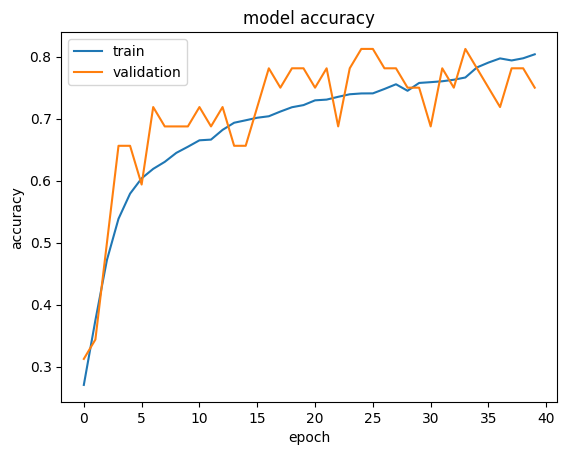

In [30]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on the Test Set**


In [31]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_2.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")


1/4 [======>.......................] - ETA: 0s - loss: 0.5025 - accuracy: 0.7812


4/4 [==============================] - 0s 5ms/step - loss: 0.5675 - accuracy: 0.7969


Loss: 0.567503809928894, Accuracy: 0.796875


### **Plotting Confusion Matrix**



1/4 [======>.......................] - ETA: 0s


4/4 [==============================] - 0s 4ms/step


              precision    recall  f1-score   support

       happy       0.89      0.78      0.83        32
     neutral       0.71      0.75      0.73        32
         sad       0.67      0.75      0.71        32
    surprise       0.97      0.91      0.94        32

    accuracy                           0.80       128
   macro avg       0.81      0.80      0.80       128
weighted avg       0.81      0.80      0.80       128



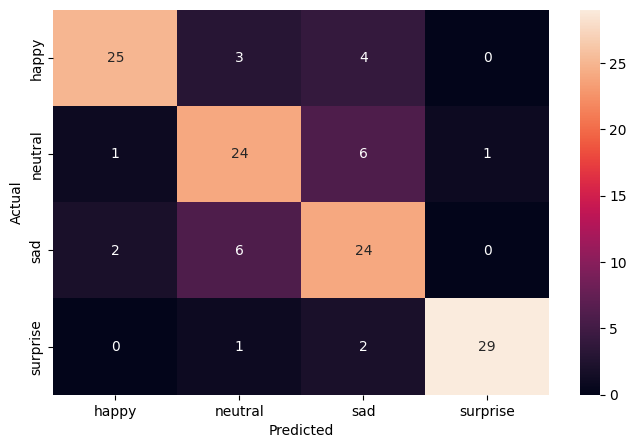

In [32]:
pred_probabilities = model_2.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- The second CNN model, equipped with a more complex architecture of **938,948 parameters**, demonstrates a steady learning curve, indicating effective feature learning with a final training accuracy of approximately 69.08%. The **validation accuracy on training** experiences fluctuations but shows an upward trend, with a peak at around **84.37%**.
- On testing, the model secured a **loss of 0.5975 and an accuracy of 75%**, which confirms its capability to generalize the learned features to new data reasonably well, aligning closely with the observed validation accuracy.
- The confusion matrix reveals the model's proficiency in correctly identifying 'happy' with a high precision of 0.96 and 'surprise' emotions with impressive precision and recall of 0.93 and 0.84, respectively.
- In contrast, the model has room for improvement when predicting 'neutral' and 'sad' emotions, as indicated by lower precision and recall scores. 'Neutral' faces have the lowest precision at 0.56, suggesting the model sometimes confuses this emotion with others, while 'sad' faces have a recall of 0.56, indicating that the model fails to detect a significant portion of this emotion.


## **Think About It:**

- Did the models have a satisfactory performance? If not, then what are the possible reasons?
- Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?


## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.


### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.


In [33]:
# Set this to 'rgb' as this is the required format for the transfer learning architectures
color_mode = "rgb"
color_layers = 3
# Resize our images to the same size expected by the transfer learning architectures
# img_width, img_height = 224, 224
img_width, img_height = 48, 48
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,  # Use the appropriate preprocessing function
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
    # rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    # width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    # height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    # shear_range=0.1,  # Small shear transformations for slight perspective changes
    # zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
    # horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    # fill_mode="nearest",  # 'nearest' interpolation for filling in new pixels after a transformation
)

# Validation and Testing Data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Assuming train_dir, validation_dir, and test_dir should follow the structure in DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
)

# Testing Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.


Found 4977 images belonging to 4 classes.


Found 128 images belonging to 4 classes.


## **VGG16 Model**


### **Importing the VGG16 Architecture**


In [34]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [35]:
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers))
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "vgg16"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         


 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      


 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     


 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         


 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     


 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    


 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         


 block3_conv1 (Conv2D)       (None, 12, 12, 256)       295168    


 block3_conv2 (Conv2D)       (None, 12, 12, 256)       590080    


 block3_conv3 (Conv2D)       (None, 12, 12, 256)       590080    


 block3_pool (MaxPooling2D)  (None, 6, 6, 256)         0         


 block4_conv1 (Conv2D)       (None, 6, 6, 512)         1180160   


 block4_conv2 (Conv2D)       (None, 6, 6, 512)         2359808   


 block4_conv3 (Conv2D)       (None, 6, 6, 512)         2359808   


 block4_pool (MaxPooling2D)  (None, 3, 3, 512)         0         


 block5_conv1 (Conv2D)       (None, 3, 3, 512)         2359808   


 block5_conv2 (Conv2D)       (None, 3, 3, 512)         2359808   


 block5_conv3 (Conv2D)       (None, 3, 3, 512)         2359808   


 block5_pool (MaxPooling2D)  (None, 1, 1, 512)         0         


Total params: 14714688 (56.13 MB)


Trainable params: 0 (0.00 Byte)


Non-trainable params: 14714688 (56.13 MB)


_________________________________________________________________


### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.


In [36]:
new_vgg16_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_vgg16_model.add(vgg_model)

# Reduces each feature map to a single value by averaging all elements
new_vgg16_model.add(GlobalAveragePooling2D())

# Adding a dense output layer
new_vgg16_model.add(Dense(512, activation="relu"))
new_vgg16_model.add(Dropout(0.5))
new_vgg16_model.add(Dense(128, activation="relu"))
new_vgg16_model.add(Dropout(0.5))
new_vgg16_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the VGG16 Model**


In [37]:
new_vgg16_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_vgg16_model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 vgg16 (Functional)          (None, 1, 1, 512)         14714688  


 global_average_pooling2d (  (None, 512)               0         


 GlobalAveragePooling2D)                                         


 dense (Dense)               (None, 512)               262656    


 dropout (Dropout)           (None, 512)               0         


 dense_1 (Dense)             (None, 128)               65664     


 dropout_1 (Dropout)         (None, 128)               0         


 dense_2 (Dense)             (None, 4)                 516       


Total params: 15043524 (57.39 MB)


Trainable params: 328836 (1.25 MB)


Non-trainable params: 14714688 (56.13 MB)


_________________________________________________________________


In [38]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_vgg16_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_vgg = new_vgg16_model.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[reduce_lr],
)

Epoch 1/40



  1/473 [..............................] - ETA: 8:37 - loss: 1.7039 - accuracy: 0.1562


  8/473 [..............................] - ETA: 3s - loss: 1.6266 - accuracy: 0.2617  


 16/473 [>.............................] - ETA: 3s - loss: 1.5749 - accuracy: 0.2578


 24/473 [>.............................] - ETA: 3s - loss: 1.5402 - accuracy: 0.2734


 32/473 [=>............................] - ETA: 3s - loss: 1.5186 - accuracy: 0.2803


 40/473 [=>............................] - ETA: 2s - loss: 1.4915 - accuracy: 0.2906


 48/473 [==>...........................] - ETA: 2s - loss: 1.4734 - accuracy: 0.2949


 56/473 [==>...........................] - ETA: 2s - loss: 1.4571 - accuracy: 0.3019


 64/473 [===>..........................] - ETA: 2s - loss: 1.4439 - accuracy: 0.3052


 72/473 [===>..........................] - ETA: 2s - loss: 1.4364 - accuracy: 0.3082


 80/473 [====>.........................] - ETA: 2s - loss: 1.4221 - accuracy: 0.3137


 88/473 [====>.........................] - ETA: 2s - loss: 1.4176 - accuracy: 0.3171


 96/473 [=====>........................] - ETA: 2s - loss: 1.4068 - accuracy: 0.3223


104/473 [=====>........................] - ETA: 2s - loss: 1.3996 - accuracy: 0.3269


112/473 [======>.......................] - ETA: 2s - loss: 1.3972 - accuracy: 0.3239


120/473 [======>.......................] - ETA: 2s - loss: 1.3914 - accuracy: 0.3258


128/473 [=======>......................] - ETA: 2s - loss: 1.3818 - accuracy: 0.3311


136/473 [=======>......................] - ETA: 2s - loss: 1.3780 - accuracy: 0.3323


144/473 [========>.....................] - ETA: 2s - loss: 1.3698 - accuracy: 0.3355


152/473 [========>.....................] - ETA: 2s - loss: 1.3608 - accuracy: 0.3409


160/473 [=========>....................] - ETA: 2s - loss: 1.3558 - accuracy: 0.3424


168/473 [=========>....................] - ETA: 2s - loss: 1.3534 - accuracy: 0.3443


176/473 [==========>...................] - ETA: 1s - loss: 1.3494 - accuracy: 0.3466


184/473 [==========>...................] - ETA: 1s - loss: 1.3452 - accuracy: 0.3502


192/473 [===========>..................] - ETA: 1s - loss: 1.3381 - accuracy: 0.3550


200/473 [===========>..................] - ETA: 1s - loss: 1.3337 - accuracy: 0.3597


208/473 [============>.................] - ETA: 1s - loss: 1.3311 - accuracy: 0.3618


217/473 [============>.................] - ETA: 1s - loss: 1.3297 - accuracy: 0.3639


225/473 [=============>................] - ETA: 1s - loss: 1.3255 - accuracy: 0.3671


233/473 [=============>................] - ETA: 1s - loss: 1.3199 - accuracy: 0.3706


241/473 [==============>...............] - ETA: 1s - loss: 1.3190 - accuracy: 0.3727


249/473 [==============>...............] - ETA: 1s - loss: 1.3152 - accuracy: 0.3751


257/473 [===============>..............] - ETA: 1s - loss: 1.3135 - accuracy: 0.3761


265/473 [===============>..............] - ETA: 1s - loss: 1.3097 - accuracy: 0.3775


273/473 [================>.............] - ETA: 1s - loss: 1.3067 - accuracy: 0.3785


281/473 [================>.............] - ETA: 1s - loss: 1.3024 - accuracy: 0.3819


289/473 [=================>............] - ETA: 1s - loss: 1.3016 - accuracy: 0.3818


297/473 [=================>............] - ETA: 1s - loss: 1.2998 - accuracy: 0.3833


305/473 [==================>...........] - ETA: 1s - loss: 1.2989 - accuracy: 0.3830


313/473 [==================>...........] - ETA: 1s - loss: 1.2988 - accuracy: 0.3831


320/473 [===================>..........] - ETA: 1s - loss: 1.2973 - accuracy: 0.3849


327/473 [===================>..........] - ETA: 0s - loss: 1.2942 - accuracy: 0.3869


335/473 [====================>.........] - ETA: 0s - loss: 1.2920 - accuracy: 0.3883


343/473 [====================>.........] - ETA: 0s - loss: 1.2895 - accuracy: 0.3907


351/473 [=====================>........] - ETA: 0s - loss: 1.2879 - accuracy: 0.3921


359/473 [=====================>........] - ETA: 0s - loss: 1.2864 - accuracy: 0.3928


367/473 [======================>.......] - ETA: 0s - loss: 1.2836 - accuracy: 0.3959


375/473 [======================>.......] - ETA: 0s - loss: 1.2809 - accuracy: 0.3970


383/473 [=======================>......] - ETA: 0s - loss: 1.2788 - accuracy: 0.3983


391/473 [=======================>......] - ETA: 0s - loss: 1.2779 - accuracy: 0.3994


399/473 [========================>.....] - ETA: 0s - loss: 1.2768 - accuracy: 0.4011


407/473 [========================>.....] - ETA: 0s - loss: 1.2753 - accuracy: 0.4020


415/473 [=========================>....] - ETA: 0s - loss: 1.2741 - accuracy: 0.4026


422/473 [=========================>....] - ETA: 0s - loss: 1.2724 - accuracy: 0.4038


429/473 [==========================>...] - ETA: 0s - loss: 1.2707 - accuracy: 0.4048


436/473 [==========================>...] - ETA: 0s - loss: 1.2702 - accuracy: 0.4052


442/473 [===========================>..] - ETA: 0s - loss: 1.2694 - accuracy: 0.4052


446/473 [===========================>..] - ETA: 0s - loss: 1.2690 - accuracy: 0.4058


454/473 [===========================>..] - ETA: 0s - loss: 1.2679 - accuracy: 0.4073


461/473 [============================>.] - ETA: 0s - loss: 1.2672 - accuracy: 0.4077


468/473 [============================>.] - ETA: 0s - loss: 1.2666 - accuracy: 0.4079


473/473 [==============================] - 5s 7ms/step - loss: 1.2664 - accuracy: 0.4082 - val_loss: 1.0726 - val_accuracy: 0.4688 - lr: 5.0000e-04


Epoch 2/40



  1/473 [..............................] - ETA: 8s - loss: 1.3074 - accuracy: 0.3125


  9/473 [..............................] - ETA: 2s - loss: 1.1913 - accuracy: 0.4514


 17/473 [>.............................] - ETA: 2s - loss: 1.1759 - accuracy: 0.4798


 25/473 [>.............................] - ETA: 2s - loss: 1.1612 - accuracy: 0.4875


 33/473 [=>............................] - ETA: 2s - loss: 1.1666 - accuracy: 0.4830


 40/473 [=>............................] - ETA: 2s - loss: 1.1639 - accuracy: 0.4781


 47/473 [=>............................] - ETA: 2s - loss: 1.1597 - accuracy: 0.4880


 55/473 [==>...........................] - ETA: 2s - loss: 1.1701 - accuracy: 0.4835


 63/473 [==>...........................] - ETA: 2s - loss: 1.1816 - accuracy: 0.4747


 71/473 [===>..........................] - ETA: 2s - loss: 1.1882 - accuracy: 0.4749


 79/473 [====>.........................] - ETA: 2s - loss: 1.1907 - accuracy: 0.4751


 87/473 [====>.........................] - ETA: 2s - loss: 1.1885 - accuracy: 0.4752


 95/473 [=====>........................] - ETA: 2s - loss: 1.1829 - accuracy: 0.4773


103/473 [=====>........................] - ETA: 2s - loss: 1.1805 - accuracy: 0.4775


111/473 [======>.......................] - ETA: 2s - loss: 1.1760 - accuracy: 0.4797


119/473 [======>.......................] - ETA: 2s - loss: 1.1748 - accuracy: 0.4811


127/473 [=======>......................] - ETA: 2s - loss: 1.1752 - accuracy: 0.4811


135/473 [=======>......................] - ETA: 2s - loss: 1.1740 - accuracy: 0.4815


143/473 [========>.....................] - ETA: 2s - loss: 1.1759 - accuracy: 0.4808


151/473 [========>.....................] - ETA: 2s - loss: 1.1734 - accuracy: 0.4834


159/473 [=========>....................] - ETA: 2s - loss: 1.1712 - accuracy: 0.4839


166/473 [=========>....................] - ETA: 2s - loss: 1.1706 - accuracy: 0.4849


173/473 [=========>....................] - ETA: 1s - loss: 1.1668 - accuracy: 0.4868


181/473 [==========>...................] - ETA: 1s - loss: 1.1642 - accuracy: 0.4867


189/473 [==========>...................] - ETA: 1s - loss: 1.1642 - accuracy: 0.4864


197/473 [===========>..................] - ETA: 1s - loss: 1.1623 - accuracy: 0.4867


205/473 [============>.................] - ETA: 1s - loss: 1.1607 - accuracy: 0.4877


213/473 [============>.................] - ETA: 1s - loss: 1.1628 - accuracy: 0.4856


221/473 [=============>................] - ETA: 1s - loss: 1.1621 - accuracy: 0.4856


229/473 [=============>................] - ETA: 1s - loss: 1.1640 - accuracy: 0.4839


237/473 [==============>...............] - ETA: 1s - loss: 1.1645 - accuracy: 0.4825


245/473 [==============>...............] - ETA: 1s - loss: 1.1641 - accuracy: 0.4834


253/473 [===============>..............] - ETA: 1s - loss: 1.1644 - accuracy: 0.4830


261/473 [===============>..............] - ETA: 1s - loss: 1.1649 - accuracy: 0.4831


269/473 [================>.............] - ETA: 1s - loss: 1.1643 - accuracy: 0.4827


277/473 [================>.............] - ETA: 1s - loss: 1.1639 - accuracy: 0.4835


285/473 [=================>............] - ETA: 1s - loss: 1.1650 - accuracy: 0.4827


293/473 [=================>............] - ETA: 1s - loss: 1.1638 - accuracy: 0.4833


301/473 [==================>...........] - ETA: 1s - loss: 1.1639 - accuracy: 0.4820


309/473 [==================>...........] - ETA: 1s - loss: 1.1623 - accuracy: 0.4826


317/473 [===================>..........] - ETA: 1s - loss: 1.1621 - accuracy: 0.4822


325/473 [===================>..........] - ETA: 0s - loss: 1.1630 - accuracy: 0.4809


333/473 [====================>.........] - ETA: 0s - loss: 1.1623 - accuracy: 0.4809


341/473 [====================>.........] - ETA: 0s - loss: 1.1605 - accuracy: 0.4824


349/473 [=====================>........] - ETA: 0s - loss: 1.1607 - accuracy: 0.4822


357/473 [=====================>........] - ETA: 0s - loss: 1.1611 - accuracy: 0.4818


365/473 [======================>.......] - ETA: 0s - loss: 1.1603 - accuracy: 0.4822


373/473 [======================>.......] - ETA: 0s - loss: 1.1604 - accuracy: 0.4820


381/473 [=======================>......] - ETA: 0s - loss: 1.1609 - accuracy: 0.4813


389/473 [=======================>......] - ETA: 0s - loss: 1.1608 - accuracy: 0.4811


397/473 [========================>.....] - ETA: 0s - loss: 1.1605 - accuracy: 0.4812


405/473 [========================>.....] - ETA: 0s - loss: 1.1597 - accuracy: 0.4819


413/473 [=========================>....] - ETA: 0s - loss: 1.1600 - accuracy: 0.4812


421/473 [=========================>....] - ETA: 0s - loss: 1.1602 - accuracy: 0.4816


429/473 [==========================>...] - ETA: 0s - loss: 1.1602 - accuracy: 0.4817


437/473 [==========================>...] - ETA: 0s - loss: 1.1605 - accuracy: 0.4823


445/473 [===========================>..] - ETA: 0s - loss: 1.1601 - accuracy: 0.4825


453/473 [===========================>..] - ETA: 0s - loss: 1.1606 - accuracy: 0.4827


461/473 [============================>.] - ETA: 0s - loss: 1.1616 - accuracy: 0.4820


468/473 [============================>.] - ETA: 0s - loss: 1.1614 - accuracy: 0.4824


473/473 [==============================] - 3s 7ms/step - loss: 1.1612 - accuracy: 0.4823 - val_loss: 1.0796 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 3/40



  1/473 [..............................] - ETA: 7s - loss: 1.1145 - accuracy: 0.4688


  9/473 [..............................] - ETA: 2s - loss: 1.0955 - accuracy: 0.5208


 17/473 [>.............................] - ETA: 2s - loss: 1.0855 - accuracy: 0.5331


 25/473 [>.............................] - ETA: 2s - loss: 1.1013 - accuracy: 0.5175


 33/473 [=>............................] - ETA: 2s - loss: 1.1013 - accuracy: 0.5180


 41/473 [=>............................] - ETA: 2s - loss: 1.1149 - accuracy: 0.5076


 49/473 [==>...........................] - ETA: 2s - loss: 1.1170 - accuracy: 0.5070


 58/473 [==>...........................] - ETA: 2s - loss: 1.1271 - accuracy: 0.5038


 66/473 [===>..........................] - ETA: 2s - loss: 1.1256 - accuracy: 0.5071


 75/473 [===>..........................] - ETA: 2s - loss: 1.1207 - accuracy: 0.5079


 84/473 [====>.........................] - ETA: 2s - loss: 1.1253 - accuracy: 0.5052


 93/473 [====>.........................] - ETA: 2s - loss: 1.1267 - accuracy: 0.5074


102/473 [=====>........................] - ETA: 2s - loss: 1.1233 - accuracy: 0.5083


111/473 [======>.......................] - ETA: 2s - loss: 1.1210 - accuracy: 0.5093


120/473 [======>.......................] - ETA: 2s - loss: 1.1200 - accuracy: 0.5102


128/473 [=======>......................] - ETA: 2s - loss: 1.1194 - accuracy: 0.5100


137/473 [=======>......................] - ETA: 2s - loss: 1.1216 - accuracy: 0.5098


146/473 [========>.....................] - ETA: 2s - loss: 1.1238 - accuracy: 0.5066


154/473 [========>.....................] - ETA: 1s - loss: 1.1249 - accuracy: 0.5047


162/473 [=========>....................] - ETA: 1s - loss: 1.1235 - accuracy: 0.5058


169/473 [=========>....................] - ETA: 1s - loss: 1.1209 - accuracy: 0.5080


175/473 [==========>...................] - ETA: 1s - loss: 1.1219 - accuracy: 0.5063


183/473 [==========>...................] - ETA: 1s - loss: 1.1212 - accuracy: 0.5075


191/473 [===========>..................] - ETA: 1s - loss: 1.1222 - accuracy: 0.5080


199/473 [===========>..................] - ETA: 1s - loss: 1.1202 - accuracy: 0.5094


207/473 [============>.................] - ETA: 1s - loss: 1.1197 - accuracy: 0.5106


215/473 [============>.................] - ETA: 1s - loss: 1.1197 - accuracy: 0.5102


223/473 [=============>................] - ETA: 1s - loss: 1.1212 - accuracy: 0.5099


231/473 [=============>................] - ETA: 1s - loss: 1.1198 - accuracy: 0.5095


239/473 [==============>...............] - ETA: 1s - loss: 1.1186 - accuracy: 0.5105


247/473 [==============>...............] - ETA: 1s - loss: 1.1192 - accuracy: 0.5105


255/473 [===============>..............] - ETA: 1s - loss: 1.1215 - accuracy: 0.5086


263/473 [===============>..............] - ETA: 1s - loss: 1.1214 - accuracy: 0.5088


271/473 [================>.............] - ETA: 1s - loss: 1.1223 - accuracy: 0.5070


279/473 [================>.............] - ETA: 1s - loss: 1.1226 - accuracy: 0.5062


287/473 [=================>............] - ETA: 1s - loss: 1.1228 - accuracy: 0.5054


295/473 [=================>............] - ETA: 1s - loss: 1.1224 - accuracy: 0.5067


303/473 [==================>...........] - ETA: 1s - loss: 1.1238 - accuracy: 0.5060


311/473 [==================>...........] - ETA: 1s - loss: 1.1246 - accuracy: 0.5054


319/473 [===================>..........] - ETA: 0s - loss: 1.1244 - accuracy: 0.5049


327/473 [===================>..........] - ETA: 0s - loss: 1.1257 - accuracy: 0.5049


335/473 [====================>.........] - ETA: 0s - loss: 1.1255 - accuracy: 0.5038


343/473 [====================>.........] - ETA: 0s - loss: 1.1242 - accuracy: 0.5044


351/473 [=====================>........] - ETA: 0s - loss: 1.1251 - accuracy: 0.5045


359/473 [=====================>........] - ETA: 0s - loss: 1.1252 - accuracy: 0.5046


367/473 [======================>.......] - ETA: 0s - loss: 1.1262 - accuracy: 0.5046


374/473 [======================>.......] - ETA: 0s - loss: 1.1254 - accuracy: 0.5058


381/473 [=======================>......] - ETA: 0s - loss: 1.1254 - accuracy: 0.5059


388/473 [=======================>......] - ETA: 0s - loss: 1.1243 - accuracy: 0.5067


396/473 [========================>.....] - ETA: 0s - loss: 1.1235 - accuracy: 0.5073


404/473 [========================>.....] - ETA: 0s - loss: 1.1235 - accuracy: 0.5077


412/473 [=========================>....] - ETA: 0s - loss: 1.1237 - accuracy: 0.5075


420/473 [=========================>....] - ETA: 0s - loss: 1.1242 - accuracy: 0.5073


428/473 [==========================>...] - ETA: 0s - loss: 1.1246 - accuracy: 0.5070


436/473 [==========================>...] - ETA: 0s - loss: 1.1225 - accuracy: 0.5086


444/473 [===========================>..] - ETA: 0s - loss: 1.1219 - accuracy: 0.5096


452/473 [===========================>..] - ETA: 0s - loss: 1.1237 - accuracy: 0.5092


460/473 [============================>.] - ETA: 0s - loss: 1.1227 - accuracy: 0.5097


469/473 [============================>.] - ETA: 0s - loss: 1.1233 - accuracy: 0.5093


473/473 [==============================] - 3s 7ms/step - loss: 1.1229 - accuracy: 0.5098 - val_loss: 0.9654 - val_accuracy: 0.5625 - lr: 5.0000e-04


Epoch 4/40



  1/473 [..............................] - ETA: 7s - loss: 1.0332 - accuracy: 0.4688


  9/473 [..............................] - ETA: 2s - loss: 1.0346 - accuracy: 0.5486


 17/473 [>.............................] - ETA: 2s - loss: 1.0208 - accuracy: 0.5570


 25/473 [>.............................] - ETA: 2s - loss: 1.0627 - accuracy: 0.5487


 33/473 [=>............................] - ETA: 2s - loss: 1.0847 - accuracy: 0.5322


 41/473 [=>............................] - ETA: 2s - loss: 1.0956 - accuracy: 0.5213


 49/473 [==>...........................] - ETA: 2s - loss: 1.0965 - accuracy: 0.5179


 57/473 [==>...........................] - ETA: 2s - loss: 1.0972 - accuracy: 0.5164


 65/473 [===>..........................] - ETA: 2s - loss: 1.1011 - accuracy: 0.5163


 73/473 [===>..........................] - ETA: 2s - loss: 1.0993 - accuracy: 0.5205


 81/473 [====>.........................] - ETA: 2s - loss: 1.0951 - accuracy: 0.5204


 89/473 [====>.........................] - ETA: 2s - loss: 1.0952 - accuracy: 0.5207


 98/473 [=====>........................] - ETA: 2s - loss: 1.0976 - accuracy: 0.5169


106/473 [=====>........................] - ETA: 2s - loss: 1.0958 - accuracy: 0.5192


114/473 [======>.......................] - ETA: 2s - loss: 1.0939 - accuracy: 0.5222


122/473 [======>.......................] - ETA: 2s - loss: 1.0942 - accuracy: 0.5223


130/473 [=======>......................] - ETA: 2s - loss: 1.0942 - accuracy: 0.5202


138/473 [=======>......................] - ETA: 2s - loss: 1.0973 - accuracy: 0.5188


145/473 [========>.....................] - ETA: 2s - loss: 1.0945 - accuracy: 0.5175


153/473 [========>.....................] - ETA: 2s - loss: 1.0957 - accuracy: 0.5174


162/473 [=========>....................] - ETA: 1s - loss: 1.0943 - accuracy: 0.5177


170/473 [=========>....................] - ETA: 1s - loss: 1.0969 - accuracy: 0.5169


178/473 [==========>...................] - ETA: 1s - loss: 1.0978 - accuracy: 0.5170


186/473 [==========>...................] - ETA: 1s - loss: 1.0984 - accuracy: 0.5170


194/473 [===========>..................] - ETA: 1s - loss: 1.0966 - accuracy: 0.5187


202/473 [===========>..................] - ETA: 1s - loss: 1.0969 - accuracy: 0.5187


210/473 [============>.................] - ETA: 1s - loss: 1.0968 - accuracy: 0.5199


218/473 [============>.................] - ETA: 1s - loss: 1.0971 - accuracy: 0.5199


226/473 [=============>................] - ETA: 1s - loss: 1.0968 - accuracy: 0.5203


234/473 [=============>................] - ETA: 1s - loss: 1.0974 - accuracy: 0.5216


241/473 [==============>...............] - ETA: 1s - loss: 1.0980 - accuracy: 0.5209


249/473 [==============>...............] - ETA: 1s - loss: 1.0966 - accuracy: 0.5220


257/473 [===============>..............] - ETA: 1s - loss: 1.0957 - accuracy: 0.5229


265/473 [===============>..............] - ETA: 1s - loss: 1.0956 - accuracy: 0.5234


273/473 [================>.............] - ETA: 1s - loss: 1.0964 - accuracy: 0.5227


281/473 [================>.............] - ETA: 1s - loss: 1.0958 - accuracy: 0.5230


289/473 [=================>............] - ETA: 1s - loss: 1.0947 - accuracy: 0.5247


297/473 [=================>............] - ETA: 1s - loss: 1.0961 - accuracy: 0.5227


305/473 [==================>...........] - ETA: 1s - loss: 1.0973 - accuracy: 0.5221


313/473 [==================>...........] - ETA: 1s - loss: 1.0989 - accuracy: 0.5213


321/473 [===================>..........] - ETA: 0s - loss: 1.0990 - accuracy: 0.5209


329/473 [===================>..........] - ETA: 0s - loss: 1.0999 - accuracy: 0.5200


337/473 [====================>.........] - ETA: 0s - loss: 1.1015 - accuracy: 0.5185


345/473 [====================>.........] - ETA: 0s - loss: 1.1006 - accuracy: 0.5194


353/473 [=====================>........] - ETA: 0s - loss: 1.1025 - accuracy: 0.5177


361/473 [=====================>........] - ETA: 0s - loss: 1.1039 - accuracy: 0.5173


370/473 [======================>.......] - ETA: 0s - loss: 1.1045 - accuracy: 0.5165


378/473 [======================>.......] - ETA: 0s - loss: 1.1051 - accuracy: 0.5168


386/473 [=======================>......] - ETA: 0s - loss: 1.1042 - accuracy: 0.5175


394/473 [=======================>......] - ETA: 0s - loss: 1.1032 - accuracy: 0.5182


403/473 [========================>.....] - ETA: 0s - loss: 1.1024 - accuracy: 0.5191


412/473 [=========================>....] - ETA: 0s - loss: 1.1015 - accuracy: 0.5193


420/473 [=========================>....] - ETA: 0s - loss: 1.1005 - accuracy: 0.5203


429/473 [==========================>...] - ETA: 0s - loss: 1.0985 - accuracy: 0.5222


437/473 [==========================>...] - ETA: 0s - loss: 1.0973 - accuracy: 0.5226


445/473 [===========================>..] - ETA: 0s - loss: 1.0976 - accuracy: 0.5224


453/473 [===========================>..] - ETA: 0s - loss: 1.0980 - accuracy: 0.5222


461/473 [============================>.] - ETA: 0s - loss: 1.0983 - accuracy: 0.5213


469/473 [============================>.] - ETA: 0s - loss: 1.0981 - accuracy: 0.5217


473/473 [==============================] - 3s 7ms/step - loss: 1.0979 - accuracy: 0.5223 - val_loss: 0.9285 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 5/40



  1/473 [..............................] - ETA: 8s - loss: 1.4465 - accuracy: 0.4062


  9/473 [..............................] - ETA: 2s - loss: 1.0745 - accuracy: 0.5486


 17/473 [>.............................] - ETA: 2s - loss: 1.0815 - accuracy: 0.5478


 25/473 [>.............................] - ETA: 2s - loss: 1.0944 - accuracy: 0.5425


 33/473 [=>............................] - ETA: 2s - loss: 1.0897 - accuracy: 0.5407


 41/473 [=>............................] - ETA: 2s - loss: 1.0873 - accuracy: 0.5396


 49/473 [==>...........................] - ETA: 2s - loss: 1.0831 - accuracy: 0.5402


 57/473 [==>...........................] - ETA: 2s - loss: 1.0845 - accuracy: 0.5367


 65/473 [===>..........................] - ETA: 2s - loss: 1.0835 - accuracy: 0.5332


 73/473 [===>..........................] - ETA: 2s - loss: 1.0842 - accuracy: 0.5312


 82/473 [====>.........................] - ETA: 2s - loss: 1.0931 - accuracy: 0.5286


 90/473 [====>.........................] - ETA: 2s - loss: 1.0997 - accuracy: 0.5229


 98/473 [=====>........................] - ETA: 2s - loss: 1.0974 - accuracy: 0.5239


106/473 [=====>........................] - ETA: 2s - loss: 1.0981 - accuracy: 0.5239


114/473 [======>.......................] - ETA: 2s - loss: 1.0929 - accuracy: 0.5277


122/473 [======>.......................] - ETA: 2s - loss: 1.0926 - accuracy: 0.5261


130/473 [=======>......................] - ETA: 2s - loss: 1.0894 - accuracy: 0.5272


138/473 [=======>......................] - ETA: 2s - loss: 1.0902 - accuracy: 0.5274


146/473 [========>.....................] - ETA: 2s - loss: 1.0892 - accuracy: 0.5263


154/473 [========>.....................] - ETA: 2s - loss: 1.0872 - accuracy: 0.5278


162/473 [=========>....................] - ETA: 2s - loss: 1.0882 - accuracy: 0.5278


170/473 [=========>....................] - ETA: 1s - loss: 1.0888 - accuracy: 0.5274


178/473 [==========>...................] - ETA: 1s - loss: 1.0880 - accuracy: 0.5291


186/473 [==========>...................] - ETA: 1s - loss: 1.0894 - accuracy: 0.5284


194/473 [===========>..................] - ETA: 1s - loss: 1.0859 - accuracy: 0.5316


202/473 [===========>..................] - ETA: 1s - loss: 1.0878 - accuracy: 0.5311


210/473 [============>.................] - ETA: 1s - loss: 1.0861 - accuracy: 0.5329


218/473 [============>.................] - ETA: 1s - loss: 1.0848 - accuracy: 0.5341


226/473 [=============>................] - ETA: 1s - loss: 1.0823 - accuracy: 0.5351


234/473 [=============>................] - ETA: 1s - loss: 1.0795 - accuracy: 0.5366


242/473 [==============>...............] - ETA: 1s - loss: 1.0791 - accuracy: 0.5369


250/473 [==============>...............] - ETA: 1s - loss: 1.0775 - accuracy: 0.5389


258/473 [===============>..............] - ETA: 1s - loss: 1.0765 - accuracy: 0.5397


266/473 [===============>..............] - ETA: 1s - loss: 1.0756 - accuracy: 0.5388


274/473 [================>.............] - ETA: 1s - loss: 1.0754 - accuracy: 0.5400


282/473 [================>.............] - ETA: 1s - loss: 1.0747 - accuracy: 0.5408


289/473 [=================>............] - ETA: 1s - loss: 1.0747 - accuracy: 0.5407


297/473 [=================>............] - ETA: 1s - loss: 1.0735 - accuracy: 0.5409


305/473 [==================>...........] - ETA: 1s - loss: 1.0753 - accuracy: 0.5393


313/473 [==================>...........] - ETA: 1s - loss: 1.0745 - accuracy: 0.5396


321/473 [===================>..........] - ETA: 1s - loss: 1.0752 - accuracy: 0.5395


329/473 [===================>..........] - ETA: 0s - loss: 1.0759 - accuracy: 0.5398


337/473 [====================>.........] - ETA: 0s - loss: 1.0742 - accuracy: 0.5396


345/473 [====================>.........] - ETA: 0s - loss: 1.0730 - accuracy: 0.5405


352/473 [=====================>........] - ETA: 0s - loss: 1.0740 - accuracy: 0.5396


359/473 [=====================>........] - ETA: 0s - loss: 1.0742 - accuracy: 0.5397


367/473 [======================>.......] - ETA: 0s - loss: 1.0732 - accuracy: 0.5412


375/473 [======================>.......] - ETA: 0s - loss: 1.0739 - accuracy: 0.5407


383/473 [=======================>......] - ETA: 0s - loss: 1.0752 - accuracy: 0.5398


391/473 [=======================>......] - ETA: 0s - loss: 1.0774 - accuracy: 0.5381


399/473 [========================>.....] - ETA: 0s - loss: 1.0772 - accuracy: 0.5381


407/473 [========================>.....] - ETA: 0s - loss: 1.0774 - accuracy: 0.5374


415/473 [=========================>....] - ETA: 0s - loss: 1.0778 - accuracy: 0.5378


423/473 [=========================>....] - ETA: 0s - loss: 1.0784 - accuracy: 0.5367


431/473 [==========================>...] - ETA: 0s - loss: 1.0779 - accuracy: 0.5365


439/473 [==========================>...] - ETA: 0s - loss: 1.0768 - accuracy: 0.5372


447/473 [===========================>..] - ETA: 0s - loss: 1.0783 - accuracy: 0.5372


455/473 [===========================>..] - ETA: 0s - loss: 1.0786 - accuracy: 0.5372


463/473 [============================>.] - ETA: 0s - loss: 1.0784 - accuracy: 0.5372


471/473 [============================>.] - ETA: 0s - loss: 1.0785 - accuracy: 0.5366


473/473 [==============================] - 3s 7ms/step - loss: 1.0784 - accuracy: 0.5367 - val_loss: 0.9314 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 6/40



  1/473 [..............................] - ETA: 8s - loss: 1.2993 - accuracy: 0.4688


  9/473 [..............................] - ETA: 2s - loss: 1.1649 - accuracy: 0.4896


 17/473 [>.............................] - ETA: 2s - loss: 1.1225 - accuracy: 0.5331


 25/473 [>.............................] - ETA: 2s - loss: 1.0864 - accuracy: 0.5537


 33/473 [=>............................] - ETA: 2s - loss: 1.0914 - accuracy: 0.5455


 41/473 [=>............................] - ETA: 2s - loss: 1.0832 - accuracy: 0.5503


 49/473 [==>...........................] - ETA: 2s - loss: 1.0816 - accuracy: 0.5472


 57/473 [==>...........................] - ETA: 2s - loss: 1.0775 - accuracy: 0.5439


 65/473 [===>..........................] - ETA: 2s - loss: 1.0791 - accuracy: 0.5471


 73/473 [===>..........................] - ETA: 2s - loss: 1.0745 - accuracy: 0.5475


 81/473 [====>.........................] - ETA: 2s - loss: 1.0757 - accuracy: 0.5475


 89/473 [====>.........................] - ETA: 2s - loss: 1.0793 - accuracy: 0.5453


 97/473 [=====>........................] - ETA: 2s - loss: 1.0748 - accuracy: 0.5470


105/473 [=====>........................] - ETA: 2s - loss: 1.0738 - accuracy: 0.5437


113/473 [======>.......................] - ETA: 2s - loss: 1.0700 - accuracy: 0.5459


121/473 [======>.......................] - ETA: 2s - loss: 1.0693 - accuracy: 0.5460


129/473 [=======>......................] - ETA: 2s - loss: 1.0659 - accuracy: 0.5484


137/473 [=======>......................] - ETA: 2s - loss: 1.0646 - accuracy: 0.5493


145/473 [========>.....................] - ETA: 2s - loss: 1.0624 - accuracy: 0.5485


153/473 [========>.....................] - ETA: 2s - loss: 1.0645 - accuracy: 0.5472


161/473 [=========>....................] - ETA: 2s - loss: 1.0650 - accuracy: 0.5448


169/473 [=========>....................] - ETA: 1s - loss: 1.0695 - accuracy: 0.5427


177/473 [==========>...................] - ETA: 1s - loss: 1.0696 - accuracy: 0.5417


185/473 [==========>...................] - ETA: 1s - loss: 1.0695 - accuracy: 0.5417


193/473 [===========>..................] - ETA: 1s - loss: 1.0681 - accuracy: 0.5431


201/473 [===========>..................] - ETA: 1s - loss: 1.0683 - accuracy: 0.5442


209/473 [============>.................] - ETA: 1s - loss: 1.0677 - accuracy: 0.5450


216/473 [============>.................] - ETA: 1s - loss: 1.0658 - accuracy: 0.5456


223/473 [=============>................] - ETA: 1s - loss: 1.0638 - accuracy: 0.5461


231/473 [=============>................] - ETA: 1s - loss: 1.0627 - accuracy: 0.5471


239/473 [==============>...............] - ETA: 1s - loss: 1.0646 - accuracy: 0.5459


247/473 [==============>...............] - ETA: 1s - loss: 1.0640 - accuracy: 0.5463


255/473 [===============>..............] - ETA: 1s - loss: 1.0630 - accuracy: 0.5456


263/473 [===============>..............] - ETA: 1s - loss: 1.0632 - accuracy: 0.5443


271/473 [================>.............] - ETA: 1s - loss: 1.0619 - accuracy: 0.5458


279/473 [================>.............] - ETA: 1s - loss: 1.0616 - accuracy: 0.5461


287/473 [=================>............] - ETA: 1s - loss: 1.0623 - accuracy: 0.5454


295/473 [=================>............] - ETA: 1s - loss: 1.0623 - accuracy: 0.5459


303/473 [==================>...........] - ETA: 1s - loss: 1.0640 - accuracy: 0.5446


311/473 [==================>...........] - ETA: 1s - loss: 1.0653 - accuracy: 0.5434


319/473 [===================>..........] - ETA: 1s - loss: 1.0649 - accuracy: 0.5442


327/473 [===================>..........] - ETA: 0s - loss: 1.0644 - accuracy: 0.5437


335/473 [====================>.........] - ETA: 0s - loss: 1.0660 - accuracy: 0.5432


343/473 [====================>.........] - ETA: 0s - loss: 1.0662 - accuracy: 0.5434


351/473 [=====================>........] - ETA: 0s - loss: 1.0669 - accuracy: 0.5426


359/473 [=====================>........] - ETA: 0s - loss: 1.0665 - accuracy: 0.5433


367/473 [======================>.......] - ETA: 0s - loss: 1.0660 - accuracy: 0.5438


375/473 [======================>.......] - ETA: 0s - loss: 1.0663 - accuracy: 0.5437


383/473 [=======================>......] - ETA: 0s - loss: 1.0657 - accuracy: 0.5437


391/473 [=======================>......] - ETA: 0s - loss: 1.0653 - accuracy: 0.5432


399/473 [========================>.....] - ETA: 0s - loss: 1.0665 - accuracy: 0.5426


407/473 [========================>.....] - ETA: 0s - loss: 1.0667 - accuracy: 0.5418


415/473 [=========================>....] - ETA: 0s - loss: 1.0668 - accuracy: 0.5418


423/473 [=========================>....] - ETA: 0s - loss: 1.0651 - accuracy: 0.5427


431/473 [==========================>...] - ETA: 0s - loss: 1.0648 - accuracy: 0.5430


439/473 [==========================>...] - ETA: 0s - loss: 1.0642 - accuracy: 0.5434


447/473 [===========================>..] - ETA: 0s - loss: 1.0632 - accuracy: 0.5442


454/473 [===========================>..] - ETA: 0s - loss: 1.0640 - accuracy: 0.5437


461/473 [============================>.] - ETA: 0s - loss: 1.0654 - accuracy: 0.5432


469/473 [============================>.] - ETA: 0s - loss: 1.0653 - accuracy: 0.5432


473/473 [==============================] - 3s 7ms/step - loss: 1.0650 - accuracy: 0.5435 - val_loss: 0.9478 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 7/40



  1/473 [..............................] - ETA: 6s - loss: 1.1111 - accuracy: 0.3750


  9/473 [..............................] - ETA: 3s - loss: 1.0804 - accuracy: 0.5000


 17/473 [>.............................] - ETA: 2s - loss: 1.0263 - accuracy: 0.5478


 25/473 [>.............................] - ETA: 3s - loss: 1.0410 - accuracy: 0.5587


 33/473 [=>............................] - ETA: 2s - loss: 1.0492 - accuracy: 0.5445


 41/473 [=>............................] - ETA: 2s - loss: 1.0536 - accuracy: 0.5434


 49/473 [==>...........................] - ETA: 2s - loss: 1.0526 - accuracy: 0.5395


 57/473 [==>...........................] - ETA: 2s - loss: 1.0542 - accuracy: 0.5367


 65/473 [===>..........................] - ETA: 2s - loss: 1.0565 - accuracy: 0.5365


 74/473 [===>..........................] - ETA: 2s - loss: 1.0599 - accuracy: 0.5361


 82/473 [====>.........................] - ETA: 2s - loss: 1.0603 - accuracy: 0.5329


 90/473 [====>.........................] - ETA: 2s - loss: 1.0594 - accuracy: 0.5352


 98/473 [=====>........................] - ETA: 2s - loss: 1.0603 - accuracy: 0.5368


107/473 [=====>........................] - ETA: 2s - loss: 1.0553 - accuracy: 0.5399


115/473 [======>.......................] - ETA: 2s - loss: 1.0565 - accuracy: 0.5415


123/473 [======>.......................] - ETA: 2s - loss: 1.0539 - accuracy: 0.5434


131/473 [=======>......................] - ETA: 2s - loss: 1.0543 - accuracy: 0.5436


139/473 [=======>......................] - ETA: 2s - loss: 1.0546 - accuracy: 0.5449


146/473 [========>.....................] - ETA: 2s - loss: 1.0525 - accuracy: 0.5464


153/473 [========>.....................] - ETA: 2s - loss: 1.0523 - accuracy: 0.5463


160/473 [=========>....................] - ETA: 2s - loss: 1.0535 - accuracy: 0.5468


167/473 [=========>....................] - ETA: 2s - loss: 1.0533 - accuracy: 0.5467


175/473 [==========>...................] - ETA: 1s - loss: 1.0530 - accuracy: 0.5466


183/473 [==========>...................] - ETA: 1s - loss: 1.0537 - accuracy: 0.5445


191/473 [===========>..................] - ETA: 1s - loss: 1.0547 - accuracy: 0.5464


200/473 [===========>..................] - ETA: 1s - loss: 1.0557 - accuracy: 0.5462


208/473 [============>.................] - ETA: 1s - loss: 1.0560 - accuracy: 0.5459


217/473 [============>.................] - ETA: 1s - loss: 1.0556 - accuracy: 0.5456


226/473 [=============>................] - ETA: 1s - loss: 1.0500 - accuracy: 0.5485


234/473 [=============>................] - ETA: 1s - loss: 1.0522 - accuracy: 0.5466


242/473 [==============>...............] - ETA: 1s - loss: 1.0506 - accuracy: 0.5478


250/473 [==============>...............] - ETA: 1s - loss: 1.0479 - accuracy: 0.5499


258/473 [===============>..............] - ETA: 1s - loss: 1.0490 - accuracy: 0.5492


266/473 [===============>..............] - ETA: 1s - loss: 1.0491 - accuracy: 0.5493


274/473 [================>.............] - ETA: 1s - loss: 1.0492 - accuracy: 0.5498


283/473 [================>.............] - ETA: 1s - loss: 1.0495 - accuracy: 0.5491


292/473 [=================>............] - ETA: 1s - loss: 1.0507 - accuracy: 0.5489


301/473 [==================>...........] - ETA: 1s - loss: 1.0506 - accuracy: 0.5485


309/473 [==================>...........] - ETA: 1s - loss: 1.0512 - accuracy: 0.5480


317/473 [===================>..........] - ETA: 1s - loss: 1.0528 - accuracy: 0.5478


325/473 [===================>..........] - ETA: 0s - loss: 1.0519 - accuracy: 0.5483


333/473 [====================>.........] - ETA: 0s - loss: 1.0518 - accuracy: 0.5493


341/473 [====================>.........] - ETA: 0s - loss: 1.0520 - accuracy: 0.5483


349/473 [=====================>........] - ETA: 0s - loss: 1.0499 - accuracy: 0.5496


357/473 [=====================>........] - ETA: 0s - loss: 1.0474 - accuracy: 0.5508


365/473 [======================>.......] - ETA: 0s - loss: 1.0486 - accuracy: 0.5499


373/473 [======================>.......] - ETA: 0s - loss: 1.0492 - accuracy: 0.5500


381/473 [=======================>......] - ETA: 0s - loss: 1.0482 - accuracy: 0.5507


389/473 [=======================>......] - ETA: 0s - loss: 1.0485 - accuracy: 0.5511


397/473 [========================>.....] - ETA: 0s - loss: 1.0470 - accuracy: 0.5516


405/473 [========================>.....] - ETA: 0s - loss: 1.0477 - accuracy: 0.5510


413/473 [=========================>....] - ETA: 0s - loss: 1.0460 - accuracy: 0.5518


421/473 [=========================>....] - ETA: 0s - loss: 1.0455 - accuracy: 0.5517


429/473 [==========================>...] - ETA: 0s - loss: 1.0454 - accuracy: 0.5519


437/473 [==========================>...] - ETA: 0s - loss: 1.0457 - accuracy: 0.5523


445/473 [===========================>..] - ETA: 0s - loss: 1.0459 - accuracy: 0.5524


453/473 [===========================>..] - ETA: 0s - loss: 1.0465 - accuracy: 0.5518


461/473 [============================>.] - ETA: 0s - loss: 1.0472 - accuracy: 0.5507


469/473 [============================>.] - ETA: 0s - loss: 1.0473 - accuracy: 0.5510


473/473 [==============================] - 3s 7ms/step - loss: 1.0476 - accuracy: 0.5510 - val_loss: 1.0159 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 8/40



  1/473 [..............................] - ETA: 8s - loss: 1.1757 - accuracy: 0.3125


  9/473 [..............................] - ETA: 3s - loss: 1.0499 - accuracy: 0.5382


 16/473 [>.............................] - ETA: 3s - loss: 1.0384 - accuracy: 0.5527


 22/473 [>.............................] - ETA: 3s - loss: 1.0525 - accuracy: 0.5568


 29/473 [>.............................] - ETA: 3s - loss: 1.0765 - accuracy: 0.5431


 37/473 [=>............................] - ETA: 3s - loss: 1.0649 - accuracy: 0.5498


 44/473 [=>............................] - ETA: 3s - loss: 1.0518 - accuracy: 0.5547


 51/473 [==>...........................] - ETA: 3s - loss: 1.0364 - accuracy: 0.5607


 58/473 [==>...........................] - ETA: 3s - loss: 1.0293 - accuracy: 0.5647


 66/473 [===>..........................] - ETA: 3s - loss: 1.0277 - accuracy: 0.5597


 75/473 [===>..........................] - ETA: 2s - loss: 1.0311 - accuracy: 0.5575


 83/473 [====>.........................] - ETA: 2s - loss: 1.0320 - accuracy: 0.5580


 90/473 [====>.........................] - ETA: 2s - loss: 1.0360 - accuracy: 0.5577


 98/473 [=====>........................] - ETA: 2s - loss: 1.0298 - accuracy: 0.5651


106/473 [=====>........................] - ETA: 2s - loss: 1.0407 - accuracy: 0.5599


114/473 [======>.......................] - ETA: 2s - loss: 1.0425 - accuracy: 0.5581


122/473 [======>.......................] - ETA: 2s - loss: 1.0447 - accuracy: 0.5582


130/473 [=======>......................] - ETA: 2s - loss: 1.0429 - accuracy: 0.5572


138/473 [=======>......................] - ETA: 2s - loss: 1.0423 - accuracy: 0.5559


146/473 [========>.....................] - ETA: 2s - loss: 1.0416 - accuracy: 0.5552


154/473 [========>.....................] - ETA: 2s - loss: 1.0400 - accuracy: 0.5546


162/473 [=========>....................] - ETA: 2s - loss: 1.0404 - accuracy: 0.5544


170/473 [=========>....................] - ETA: 2s - loss: 1.0385 - accuracy: 0.5557


178/473 [==========>...................] - ETA: 2s - loss: 1.0402 - accuracy: 0.5541


186/473 [==========>...................] - ETA: 1s - loss: 1.0365 - accuracy: 0.5568


194/473 [===========>..................] - ETA: 1s - loss: 1.0347 - accuracy: 0.5577


202/473 [===========>..................] - ETA: 1s - loss: 1.0360 - accuracy: 0.5574


210/473 [============>.................] - ETA: 1s - loss: 1.0378 - accuracy: 0.5558


218/473 [============>.................] - ETA: 1s - loss: 1.0352 - accuracy: 0.5572


226/473 [=============>................] - ETA: 1s - loss: 1.0350 - accuracy: 0.5581


233/473 [=============>................] - ETA: 1s - loss: 1.0382 - accuracy: 0.5571


241/473 [==============>...............] - ETA: 1s - loss: 1.0347 - accuracy: 0.5602


249/473 [==============>...............] - ETA: 1s - loss: 1.0346 - accuracy: 0.5603


257/473 [===============>..............] - ETA: 1s - loss: 1.0334 - accuracy: 0.5618


265/473 [===============>..............] - ETA: 1s - loss: 1.0349 - accuracy: 0.5616


273/473 [================>.............] - ETA: 1s - loss: 1.0337 - accuracy: 0.5624


281/473 [================>.............] - ETA: 1s - loss: 1.0351 - accuracy: 0.5617


289/473 [=================>............] - ETA: 1s - loss: 1.0336 - accuracy: 0.5632


297/473 [=================>............] - ETA: 1s - loss: 1.0316 - accuracy: 0.5639


305/473 [==================>...........] - ETA: 1s - loss: 1.0304 - accuracy: 0.5650


313/473 [==================>...........] - ETA: 1s - loss: 1.0310 - accuracy: 0.5655


321/473 [===================>..........] - ETA: 1s - loss: 1.0302 - accuracy: 0.5654


329/473 [===================>..........] - ETA: 0s - loss: 1.0287 - accuracy: 0.5651


337/473 [====================>.........] - ETA: 0s - loss: 1.0283 - accuracy: 0.5657


345/473 [====================>.........] - ETA: 0s - loss: 1.0306 - accuracy: 0.5645


353/473 [=====================>........] - ETA: 0s - loss: 1.0300 - accuracy: 0.5647


361/473 [=====================>........] - ETA: 0s - loss: 1.0306 - accuracy: 0.5643


369/473 [======================>.......] - ETA: 0s - loss: 1.0286 - accuracy: 0.5651


377/473 [======================>.......] - ETA: 0s - loss: 1.0283 - accuracy: 0.5653


385/473 [=======================>......] - ETA: 0s - loss: 1.0266 - accuracy: 0.5662


393/473 [=======================>......] - ETA: 0s - loss: 1.0260 - accuracy: 0.5648


401/473 [========================>.....] - ETA: 0s - loss: 1.0270 - accuracy: 0.5643


409/473 [========================>.....] - ETA: 0s - loss: 1.0276 - accuracy: 0.5633


417/473 [=========================>....] - ETA: 0s - loss: 1.0280 - accuracy: 0.5633


424/473 [=========================>....] - ETA: 0s - loss: 1.0278 - accuracy: 0.5638


431/473 [==========================>...] - ETA: 0s - loss: 1.0274 - accuracy: 0.5637


439/473 [==========================>...] - ETA: 0s - loss: 1.0278 - accuracy: 0.5632


446/473 [===========================>..] - ETA: 0s - loss: 1.0281 - accuracy: 0.5628


454/473 [===========================>..] - ETA: 0s - loss: 1.0284 - accuracy: 0.5626


462/473 [============================>.] - ETA: 0s - loss: 1.0287 - accuracy: 0.5624


470/473 [============================>.] - ETA: 0s - loss: 1.0291 - accuracy: 0.5627


473/473 [==============================] - 3s 7ms/step - loss: 1.0291 - accuracy: 0.5624 - val_loss: 0.8872 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 9/40



  1/473 [..............................] - ETA: 8s - loss: 0.9294 - accuracy: 0.6562


  9/473 [..............................] - ETA: 3s - loss: 1.0168 - accuracy: 0.5521


 17/473 [>.............................] - ETA: 2s - loss: 1.0031 - accuracy: 0.5754


 25/473 [>.............................] - ETA: 2s - loss: 0.9945 - accuracy: 0.5913


 33/473 [=>............................] - ETA: 2s - loss: 0.9868 - accuracy: 0.5852


 41/473 [=>............................] - ETA: 2s - loss: 0.9997 - accuracy: 0.5770


 49/473 [==>...........................] - ETA: 2s - loss: 0.9943 - accuracy: 0.5765


 57/473 [==>...........................] - ETA: 2s - loss: 0.9977 - accuracy: 0.5740


 65/473 [===>..........................] - ETA: 2s - loss: 1.0039 - accuracy: 0.5697


 73/473 [===>..........................] - ETA: 2s - loss: 1.0030 - accuracy: 0.5728


 81/473 [====>.........................] - ETA: 2s - loss: 1.0025 - accuracy: 0.5752


 89/473 [====>.........................] - ETA: 2s - loss: 1.0098 - accuracy: 0.5713


 97/473 [=====>........................] - ETA: 2s - loss: 1.0065 - accuracy: 0.5718


105/473 [=====>........................] - ETA: 2s - loss: 1.0043 - accuracy: 0.5756


114/473 [======>.......................] - ETA: 2s - loss: 0.9998 - accuracy: 0.5798


122/473 [======>.......................] - ETA: 2s - loss: 0.9969 - accuracy: 0.5809


130/473 [=======>......................] - ETA: 2s - loss: 0.9967 - accuracy: 0.5784


136/473 [=======>......................] - ETA: 2s - loss: 0.9956 - accuracy: 0.5795


143/473 [========>.....................] - ETA: 2s - loss: 0.9967 - accuracy: 0.5789


151/473 [========>.....................] - ETA: 2s - loss: 0.9985 - accuracy: 0.5762


159/473 [=========>....................] - ETA: 2s - loss: 1.0002 - accuracy: 0.5770


167/473 [=========>....................] - ETA: 2s - loss: 1.0021 - accuracy: 0.5760


175/473 [==========>...................] - ETA: 1s - loss: 1.0065 - accuracy: 0.5725


183/473 [==========>...................] - ETA: 1s - loss: 1.0071 - accuracy: 0.5712


191/473 [===========>..................] - ETA: 1s - loss: 1.0100 - accuracy: 0.5704


199/473 [===========>..................] - ETA: 1s - loss: 1.0092 - accuracy: 0.5721


207/473 [============>.................] - ETA: 1s - loss: 1.0076 - accuracy: 0.5743


215/473 [============>.................] - ETA: 1s - loss: 1.0088 - accuracy: 0.5735


223/473 [=============>................] - ETA: 1s - loss: 1.0083 - accuracy: 0.5736


231/473 [=============>................] - ETA: 1s - loss: 1.0093 - accuracy: 0.5721


239/473 [==============>...............] - ETA: 1s - loss: 1.0083 - accuracy: 0.5740


246/473 [==============>...............] - ETA: 1s - loss: 1.0095 - accuracy: 0.5723


254/473 [===============>..............] - ETA: 1s - loss: 1.0100 - accuracy: 0.5723


262/473 [===============>..............] - ETA: 1s - loss: 1.0104 - accuracy: 0.5716


270/473 [================>.............] - ETA: 1s - loss: 1.0107 - accuracy: 0.5719


278/473 [================>.............] - ETA: 1s - loss: 1.0119 - accuracy: 0.5710


286/473 [=================>............] - ETA: 1s - loss: 1.0105 - accuracy: 0.5719


294/473 [=================>............] - ETA: 1s - loss: 1.0098 - accuracy: 0.5720


302/473 [==================>...........] - ETA: 1s - loss: 1.0100 - accuracy: 0.5717


310/473 [==================>...........] - ETA: 1s - loss: 1.0128 - accuracy: 0.5707


318/473 [===================>..........] - ETA: 1s - loss: 1.0126 - accuracy: 0.5723


326/473 [===================>..........] - ETA: 0s - loss: 1.0128 - accuracy: 0.5728


334/473 [====================>.........] - ETA: 0s - loss: 1.0127 - accuracy: 0.5724


342/473 [====================>.........] - ETA: 0s - loss: 1.0122 - accuracy: 0.5732


350/473 [=====================>........] - ETA: 0s - loss: 1.0125 - accuracy: 0.5737


358/473 [=====================>........] - ETA: 0s - loss: 1.0122 - accuracy: 0.5734


366/473 [======================>.......] - ETA: 0s - loss: 1.0115 - accuracy: 0.5737


375/473 [======================>.......] - ETA: 0s - loss: 1.0125 - accuracy: 0.5735


383/473 [=======================>......] - ETA: 0s - loss: 1.0122 - accuracy: 0.5740


391/473 [=======================>......] - ETA: 0s - loss: 1.0122 - accuracy: 0.5747


399/473 [========================>.....] - ETA: 0s - loss: 1.0110 - accuracy: 0.5750


407/473 [========================>.....] - ETA: 0s - loss: 1.0114 - accuracy: 0.5741


415/473 [=========================>....] - ETA: 0s - loss: 1.0119 - accuracy: 0.5741


423/473 [=========================>....] - ETA: 0s - loss: 1.0118 - accuracy: 0.5744


431/473 [==========================>...] - ETA: 0s - loss: 1.0129 - accuracy: 0.5741


440/473 [==========================>...] - ETA: 0s - loss: 1.0122 - accuracy: 0.5740


448/473 [===========================>..] - ETA: 0s - loss: 1.0148 - accuracy: 0.5719


456/473 [===========================>..] - ETA: 0s - loss: 1.0158 - accuracy: 0.5719


463/473 [============================>.] - ETA: 0s - loss: 1.0166 - accuracy: 0.5717


471/473 [============================>.] - ETA: 0s - loss: 1.0180 - accuracy: 0.5709


473/473 [==============================] - 3s 7ms/step - loss: 1.0184 - accuracy: 0.5706 - val_loss: 0.9423 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 10/40



  1/473 [..............................] - ETA: 7s - loss: 0.8271 - accuracy: 0.6562


  9/473 [..............................] - ETA: 3s - loss: 0.9963 - accuracy: 0.5868


 17/473 [>.............................] - ETA: 2s - loss: 0.9860 - accuracy: 0.5790


 25/473 [>.............................] - ETA: 2s - loss: 0.9873 - accuracy: 0.5888


 33/473 [=>............................] - ETA: 2s - loss: 0.9967 - accuracy: 0.5862


 41/473 [=>............................] - ETA: 2s - loss: 1.0031 - accuracy: 0.5869


 49/473 [==>...........................] - ETA: 2s - loss: 1.0041 - accuracy: 0.5829


 57/473 [==>...........................] - ETA: 2s - loss: 1.0008 - accuracy: 0.5850


 65/473 [===>..........................] - ETA: 2s - loss: 1.0111 - accuracy: 0.5793


 73/473 [===>..........................] - ETA: 2s - loss: 1.0141 - accuracy: 0.5775


 81/473 [====>.........................] - ETA: 2s - loss: 1.0131 - accuracy: 0.5793


 88/473 [====>.........................] - ETA: 2s - loss: 1.0136 - accuracy: 0.5787


 95/473 [=====>........................] - ETA: 2s - loss: 1.0137 - accuracy: 0.5792


101/473 [=====>........................] - ETA: 2s - loss: 1.0107 - accuracy: 0.5810


109/473 [=====>........................] - ETA: 2s - loss: 1.0095 - accuracy: 0.5784


117/473 [======>.......................] - ETA: 2s - loss: 1.0134 - accuracy: 0.5757


125/473 [======>.......................] - ETA: 2s - loss: 1.0107 - accuracy: 0.5761


133/473 [=======>......................] - ETA: 2s - loss: 1.0126 - accuracy: 0.5755


141/473 [=======>......................] - ETA: 2s - loss: 1.0138 - accuracy: 0.5737


149/473 [========>.....................] - ETA: 2s - loss: 1.0128 - accuracy: 0.5737


158/473 [=========>....................] - ETA: 2s - loss: 1.0098 - accuracy: 0.5753


166/473 [=========>....................] - ETA: 2s - loss: 1.0092 - accuracy: 0.5763


174/473 [==========>...................] - ETA: 1s - loss: 1.0064 - accuracy: 0.5766


182/473 [==========>...................] - ETA: 1s - loss: 1.0090 - accuracy: 0.5751


190/473 [===========>..................] - ETA: 1s - loss: 1.0084 - accuracy: 0.5744


198/473 [===========>..................] - ETA: 1s - loss: 1.0093 - accuracy: 0.5736


206/473 [============>.................] - ETA: 1s - loss: 1.0104 - accuracy: 0.5721


214/473 [============>.................] - ETA: 1s - loss: 1.0115 - accuracy: 0.5713


222/473 [=============>................] - ETA: 1s - loss: 1.0141 - accuracy: 0.5696


230/473 [=============>................] - ETA: 1s - loss: 1.0112 - accuracy: 0.5708


238/473 [==============>...............] - ETA: 1s - loss: 1.0101 - accuracy: 0.5710


246/473 [==============>...............] - ETA: 1s - loss: 1.0105 - accuracy: 0.5703


254/473 [===============>..............] - ETA: 1s - loss: 1.0106 - accuracy: 0.5702


262/473 [===============>..............] - ETA: 1s - loss: 1.0095 - accuracy: 0.5704


269/473 [================>.............] - ETA: 1s - loss: 1.0098 - accuracy: 0.5706


276/473 [================>.............] - ETA: 1s - loss: 1.0127 - accuracy: 0.5688


283/473 [================>.............] - ETA: 1s - loss: 1.0125 - accuracy: 0.5699


291/473 [=================>............] - ETA: 1s - loss: 1.0118 - accuracy: 0.5706


299/473 [=================>............] - ETA: 1s - loss: 1.0122 - accuracy: 0.5709


308/473 [==================>...........] - ETA: 1s - loss: 1.0119 - accuracy: 0.5716


316/473 [===================>..........] - ETA: 1s - loss: 1.0125 - accuracy: 0.5710


324/473 [===================>..........] - ETA: 0s - loss: 1.0125 - accuracy: 0.5712


332/473 [====================>.........] - ETA: 0s - loss: 1.0121 - accuracy: 0.5725


340/473 [====================>.........] - ETA: 0s - loss: 1.0131 - accuracy: 0.5726


348/473 [=====================>........] - ETA: 0s - loss: 1.0118 - accuracy: 0.5730


356/473 [=====================>........] - ETA: 0s - loss: 1.0111 - accuracy: 0.5734


364/473 [======================>.......] - ETA: 0s - loss: 1.0104 - accuracy: 0.5740


372/473 [======================>.......] - ETA: 0s - loss: 1.0092 - accuracy: 0.5744


380/473 [=======================>......] - ETA: 0s - loss: 1.0086 - accuracy: 0.5745


388/473 [=======================>......] - ETA: 0s - loss: 1.0064 - accuracy: 0.5751


396/473 [========================>.....] - ETA: 0s - loss: 1.0078 - accuracy: 0.5747


404/473 [========================>.....] - ETA: 0s - loss: 1.0080 - accuracy: 0.5748


412/473 [=========================>....] - ETA: 0s - loss: 1.0078 - accuracy: 0.5751


420/473 [=========================>....] - ETA: 0s - loss: 1.0084 - accuracy: 0.5757


428/473 [==========================>...] - ETA: 0s - loss: 1.0071 - accuracy: 0.5758


436/473 [==========================>...] - ETA: 0s - loss: 1.0059 - accuracy: 0.5767


444/473 [===========================>..] - ETA: 0s - loss: 1.0053 - accuracy: 0.5768


452/473 [===========================>..] - ETA: 0s - loss: 1.0049 - accuracy: 0.5773


460/473 [============================>.] - ETA: 0s - loss: 1.0066 - accuracy: 0.5759


468/473 [============================>.] - ETA: 0s - loss: 1.0067 - accuracy: 0.5757


473/473 [==============================] - 3s 7ms/step - loss: 1.0059 - accuracy: 0.5759 - val_loss: 0.8884 - val_accuracy: 0.5625 - lr: 5.0000e-04


Epoch 11/40



  1/473 [..............................] - ETA: 7s - loss: 0.9657 - accuracy: 0.5938


  9/473 [..............................] - ETA: 2s - loss: 1.0191 - accuracy: 0.5729


 17/473 [>.............................] - ETA: 2s - loss: 0.9952 - accuracy: 0.5607


 25/473 [>.............................] - ETA: 2s - loss: 1.0080 - accuracy: 0.5700


 33/473 [=>............................] - ETA: 2s - loss: 0.9985 - accuracy: 0.5862


 42/473 [=>............................] - ETA: 2s - loss: 0.9853 - accuracy: 0.5930


 50/473 [==>...........................] - ETA: 2s - loss: 0.9754 - accuracy: 0.5938


 58/473 [==>...........................] - ETA: 2s - loss: 0.9771 - accuracy: 0.5938


 66/473 [===>..........................] - ETA: 2s - loss: 0.9788 - accuracy: 0.5876


 74/473 [===>..........................] - ETA: 2s - loss: 0.9801 - accuracy: 0.5878


 82/473 [====>.........................] - ETA: 2s - loss: 0.9767 - accuracy: 0.5873


 90/473 [====>.........................] - ETA: 2s - loss: 0.9711 - accuracy: 0.5882


 98/473 [=====>........................] - ETA: 2s - loss: 0.9798 - accuracy: 0.5842


106/473 [=====>........................] - ETA: 2s - loss: 0.9858 - accuracy: 0.5781


114/473 [======>.......................] - ETA: 2s - loss: 0.9878 - accuracy: 0.5768


122/473 [======>.......................] - ETA: 2s - loss: 0.9856 - accuracy: 0.5766


130/473 [=======>......................] - ETA: 2s - loss: 0.9878 - accuracy: 0.5767


138/473 [=======>......................] - ETA: 2s - loss: 0.9848 - accuracy: 0.5784


146/473 [========>.....................] - ETA: 2s - loss: 0.9854 - accuracy: 0.5783


153/473 [========>.....................] - ETA: 2s - loss: 0.9824 - accuracy: 0.5792


161/473 [=========>....................] - ETA: 2s - loss: 0.9857 - accuracy: 0.5786


169/473 [=========>....................] - ETA: 1s - loss: 0.9863 - accuracy: 0.5775


177/473 [==========>...................] - ETA: 1s - loss: 0.9860 - accuracy: 0.5796


185/473 [==========>...................] - ETA: 1s - loss: 0.9880 - accuracy: 0.5775


193/473 [===========>..................] - ETA: 1s - loss: 0.9891 - accuracy: 0.5774


201/473 [===========>..................] - ETA: 1s - loss: 0.9864 - accuracy: 0.5790


209/473 [============>.................] - ETA: 1s - loss: 0.9855 - accuracy: 0.5803


217/473 [============>.................] - ETA: 1s - loss: 0.9829 - accuracy: 0.5793


225/473 [=============>................] - ETA: 1s - loss: 0.9876 - accuracy: 0.5774


233/473 [=============>................] - ETA: 1s - loss: 0.9879 - accuracy: 0.5782


241/473 [==============>...............] - ETA: 1s - loss: 0.9880 - accuracy: 0.5785


249/473 [==============>...............] - ETA: 1s - loss: 0.9903 - accuracy: 0.5776


257/473 [===============>..............] - ETA: 1s - loss: 0.9941 - accuracy: 0.5762


265/473 [===============>..............] - ETA: 1s - loss: 0.9930 - accuracy: 0.5764


273/473 [================>.............] - ETA: 1s - loss: 0.9921 - accuracy: 0.5768


280/473 [================>.............] - ETA: 1s - loss: 0.9933 - accuracy: 0.5758


287/473 [=================>............] - ETA: 1s - loss: 0.9925 - accuracy: 0.5766


294/473 [=================>............] - ETA: 1s - loss: 0.9916 - accuracy: 0.5776


301/473 [==================>...........] - ETA: 1s - loss: 0.9920 - accuracy: 0.5769


308/473 [==================>...........] - ETA: 1s - loss: 0.9927 - accuracy: 0.5769


315/473 [==================>...........] - ETA: 1s - loss: 0.9934 - accuracy: 0.5760


322/473 [===================>..........] - ETA: 1s - loss: 0.9924 - accuracy: 0.5765


330/473 [===================>..........] - ETA: 0s - loss: 0.9927 - accuracy: 0.5761


338/473 [====================>.........] - ETA: 0s - loss: 0.9914 - accuracy: 0.5763


346/473 [====================>.........] - ETA: 0s - loss: 0.9911 - accuracy: 0.5768


354/473 [=====================>........] - ETA: 0s - loss: 0.9913 - accuracy: 0.5767


361/473 [=====================>........] - ETA: 0s - loss: 0.9926 - accuracy: 0.5758


369/473 [======================>.......] - ETA: 0s - loss: 0.9929 - accuracy: 0.5760


377/473 [======================>.......] - ETA: 0s - loss: 0.9931 - accuracy: 0.5764


385/473 [=======================>......] - ETA: 0s - loss: 0.9924 - accuracy: 0.5768


393/473 [=======================>......] - ETA: 0s - loss: 0.9929 - accuracy: 0.5769


401/473 [========================>.....] - ETA: 0s - loss: 0.9922 - accuracy: 0.5773


409/473 [========================>.....] - ETA: 0s - loss: 0.9913 - accuracy: 0.5778


417/473 [=========================>....] - ETA: 0s - loss: 0.9932 - accuracy: 0.5773


425/473 [=========================>....] - ETA: 0s - loss: 0.9936 - accuracy: 0.5776


433/473 [==========================>...] - ETA: 0s - loss: 0.9947 - accuracy: 0.5769


441/473 [==========================>...] - ETA: 0s - loss: 0.9945 - accuracy: 0.5770


449/473 [===========================>..] - ETA: 0s - loss: 0.9943 - accuracy: 0.5776


456/473 [===========================>..] - ETA: 0s - loss: 0.9950 - accuracy: 0.5773


464/473 [============================>.] - ETA: 0s - loss: 0.9941 - accuracy: 0.5774


472/473 [============================>.] - ETA: 0s - loss: 0.9948 - accuracy: 0.5773


473/473 [==============================] - 3s 7ms/step - loss: 0.9944 - accuracy: 0.5774 - val_loss: 0.8802 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 12/40



  1/473 [..............................] - ETA: 7s - loss: 0.9770 - accuracy: 0.5625


  9/473 [..............................] - ETA: 2s - loss: 0.9922 - accuracy: 0.5417


 17/473 [>.............................] - ETA: 2s - loss: 1.0027 - accuracy: 0.5570


 25/473 [>.............................] - ETA: 2s - loss: 1.0012 - accuracy: 0.5587


 33/473 [=>............................] - ETA: 2s - loss: 0.9893 - accuracy: 0.5663


 41/473 [=>............................] - ETA: 2s - loss: 0.9914 - accuracy: 0.5716


 49/473 [==>...........................] - ETA: 2s - loss: 0.9860 - accuracy: 0.5797


 57/473 [==>...........................] - ETA: 2s - loss: 0.9809 - accuracy: 0.5828


 65/473 [===>..........................] - ETA: 2s - loss: 0.9839 - accuracy: 0.5798


 73/473 [===>..........................] - ETA: 2s - loss: 0.9829 - accuracy: 0.5801


 81/473 [====>.........................] - ETA: 2s - loss: 0.9839 - accuracy: 0.5826


 89/473 [====>.........................] - ETA: 2s - loss: 0.9794 - accuracy: 0.5825


 97/473 [=====>........................] - ETA: 2s - loss: 0.9795 - accuracy: 0.5822


105/473 [=====>........................] - ETA: 2s - loss: 0.9726 - accuracy: 0.5839


113/473 [======>.......................] - ETA: 2s - loss: 0.9711 - accuracy: 0.5852


121/473 [======>.......................] - ETA: 2s - loss: 0.9723 - accuracy: 0.5852


129/473 [=======>......................] - ETA: 2s - loss: 0.9731 - accuracy: 0.5807


137/473 [=======>......................] - ETA: 2s - loss: 0.9722 - accuracy: 0.5805


145/473 [========>.....................] - ETA: 2s - loss: 0.9740 - accuracy: 0.5800


153/473 [========>.....................] - ETA: 2s - loss: 0.9717 - accuracy: 0.5819


161/473 [=========>....................] - ETA: 1s - loss: 0.9722 - accuracy: 0.5823


169/473 [=========>....................] - ETA: 1s - loss: 0.9697 - accuracy: 0.5836


177/473 [==========>...................] - ETA: 1s - loss: 0.9665 - accuracy: 0.5860


185/473 [==========>...................] - ETA: 1s - loss: 0.9667 - accuracy: 0.5867


193/473 [===========>..................] - ETA: 1s - loss: 0.9688 - accuracy: 0.5853


201/473 [===========>..................] - ETA: 1s - loss: 0.9705 - accuracy: 0.5858


209/473 [============>.................] - ETA: 1s - loss: 0.9700 - accuracy: 0.5866


217/473 [============>.................] - ETA: 1s - loss: 0.9714 - accuracy: 0.5863


225/473 [=============>................] - ETA: 1s - loss: 0.9722 - accuracy: 0.5858


233/473 [=============>................] - ETA: 1s - loss: 0.9734 - accuracy: 0.5857


241/473 [==============>...............] - ETA: 1s - loss: 0.9774 - accuracy: 0.5839


249/473 [==============>...............] - ETA: 1s - loss: 0.9772 - accuracy: 0.5841


256/473 [===============>..............] - ETA: 1s - loss: 0.9772 - accuracy: 0.5842


262/473 [===============>..............] - ETA: 1s - loss: 0.9773 - accuracy: 0.5843


269/473 [================>.............] - ETA: 1s - loss: 0.9758 - accuracy: 0.5852


276/473 [================>.............] - ETA: 1s - loss: 0.9752 - accuracy: 0.5855


284/473 [=================>............] - ETA: 1s - loss: 0.9796 - accuracy: 0.5834


292/473 [=================>............] - ETA: 1s - loss: 0.9774 - accuracy: 0.5841


300/473 [==================>...........] - ETA: 1s - loss: 0.9779 - accuracy: 0.5830


308/473 [==================>...........] - ETA: 1s - loss: 0.9781 - accuracy: 0.5825


316/473 [===================>..........] - ETA: 1s - loss: 0.9789 - accuracy: 0.5815


324/473 [===================>..........] - ETA: 0s - loss: 0.9785 - accuracy: 0.5804


332/473 [====================>.........] - ETA: 0s - loss: 0.9773 - accuracy: 0.5811


340/473 [====================>.........] - ETA: 0s - loss: 0.9760 - accuracy: 0.5813


347/473 [=====================>........] - ETA: 0s - loss: 0.9749 - accuracy: 0.5821


354/473 [=====================>........] - ETA: 0s - loss: 0.9758 - accuracy: 0.5822


362/473 [=====================>........] - ETA: 0s - loss: 0.9759 - accuracy: 0.5816


371/473 [======================>.......] - ETA: 0s - loss: 0.9759 - accuracy: 0.5816


379/473 [=======================>......] - ETA: 0s - loss: 0.9746 - accuracy: 0.5827


387/473 [=======================>......] - ETA: 0s - loss: 0.9756 - accuracy: 0.5829


395/473 [========================>.....] - ETA: 0s - loss: 0.9763 - accuracy: 0.5831


403/473 [========================>.....] - ETA: 0s - loss: 0.9749 - accuracy: 0.5839


411/473 [=========================>....] - ETA: 0s - loss: 0.9739 - accuracy: 0.5843


419/473 [=========================>....] - ETA: 0s - loss: 0.9755 - accuracy: 0.5834


427/473 [==========================>...] - ETA: 0s - loss: 0.9755 - accuracy: 0.5831


435/473 [==========================>...] - ETA: 0s - loss: 0.9762 - accuracy: 0.5830


443/473 [===========================>..] - ETA: 0s - loss: 0.9772 - accuracy: 0.5829


451/473 [===========================>..] - ETA: 0s - loss: 0.9760 - accuracy: 0.5838


459/473 [============================>.] - ETA: 0s - loss: 0.9753 - accuracy: 0.5843


467/473 [============================>.] - ETA: 0s - loss: 0.9741 - accuracy: 0.5854


473/473 [==============================] - 3s 7ms/step - loss: 0.9739 - accuracy: 0.5856 - val_loss: 0.8370 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 13/40



  1/473 [..............................] - ETA: 7s - loss: 0.8052 - accuracy: 0.6875


  9/473 [..............................] - ETA: 2s - loss: 0.9145 - accuracy: 0.6042


 17/473 [>.............................] - ETA: 2s - loss: 0.9395 - accuracy: 0.5956


 25/473 [>.............................] - ETA: 2s - loss: 0.9700 - accuracy: 0.5725


 33/473 [=>............................] - ETA: 2s - loss: 0.9539 - accuracy: 0.5947


 41/473 [=>............................] - ETA: 2s - loss: 0.9539 - accuracy: 0.5968


 49/473 [==>...........................] - ETA: 2s - loss: 0.9566 - accuracy: 0.5874


 57/473 [==>...........................] - ETA: 2s - loss: 0.9703 - accuracy: 0.5822


 64/473 [===>..........................] - ETA: 2s - loss: 0.9802 - accuracy: 0.5771


 72/473 [===>..........................] - ETA: 2s - loss: 0.9760 - accuracy: 0.5825


 80/473 [====>.........................] - ETA: 2s - loss: 0.9749 - accuracy: 0.5828


 87/473 [====>.........................] - ETA: 2s - loss: 0.9764 - accuracy: 0.5812


 95/473 [=====>........................] - ETA: 2s - loss: 0.9726 - accuracy: 0.5836


103/473 [=====>........................] - ETA: 2s - loss: 0.9690 - accuracy: 0.5834


111/473 [======>.......................] - ETA: 2s - loss: 0.9676 - accuracy: 0.5856


119/473 [======>.......................] - ETA: 2s - loss: 0.9671 - accuracy: 0.5859


127/473 [=======>......................] - ETA: 2s - loss: 0.9665 - accuracy: 0.5861


135/473 [=======>......................] - ETA: 2s - loss: 0.9664 - accuracy: 0.5868


143/473 [========>.....................] - ETA: 2s - loss: 0.9671 - accuracy: 0.5841


151/473 [========>.....................] - ETA: 2s - loss: 0.9667 - accuracy: 0.5840


159/473 [=========>....................] - ETA: 2s - loss: 0.9665 - accuracy: 0.5853


167/473 [=========>....................] - ETA: 1s - loss: 0.9650 - accuracy: 0.5855


175/473 [==========>...................] - ETA: 1s - loss: 0.9692 - accuracy: 0.5848


183/473 [==========>...................] - ETA: 1s - loss: 0.9649 - accuracy: 0.5859


191/473 [===========>..................] - ETA: 1s - loss: 0.9673 - accuracy: 0.5867


199/473 [===========>..................] - ETA: 1s - loss: 0.9675 - accuracy: 0.5867


207/473 [============>.................] - ETA: 1s - loss: 0.9677 - accuracy: 0.5870


215/473 [============>.................] - ETA: 1s - loss: 0.9643 - accuracy: 0.5875


223/473 [=============>................] - ETA: 1s - loss: 0.9615 - accuracy: 0.5895


231/473 [=============>................] - ETA: 1s - loss: 0.9594 - accuracy: 0.5904


240/473 [==============>...............] - ETA: 1s - loss: 0.9606 - accuracy: 0.5907


248/473 [==============>...............] - ETA: 1s - loss: 0.9593 - accuracy: 0.5924


256/473 [===============>..............] - ETA: 1s - loss: 0.9589 - accuracy: 0.5923


264/473 [===============>..............] - ETA: 1s - loss: 0.9602 - accuracy: 0.5915


271/473 [================>.............] - ETA: 1s - loss: 0.9601 - accuracy: 0.5911


279/473 [================>.............] - ETA: 1s - loss: 0.9611 - accuracy: 0.5906


287/473 [=================>............] - ETA: 1s - loss: 0.9624 - accuracy: 0.5896


295/473 [=================>............] - ETA: 1s - loss: 0.9636 - accuracy: 0.5891


303/473 [==================>...........] - ETA: 1s - loss: 0.9649 - accuracy: 0.5881


311/473 [==================>...........] - ETA: 1s - loss: 0.9664 - accuracy: 0.5878


319/473 [===================>..........] - ETA: 0s - loss: 0.9650 - accuracy: 0.5886


327/473 [===================>..........] - ETA: 0s - loss: 0.9637 - accuracy: 0.5900


335/473 [====================>.........] - ETA: 0s - loss: 0.9638 - accuracy: 0.5901


343/473 [====================>.........] - ETA: 0s - loss: 0.9650 - accuracy: 0.5898


352/473 [=====================>........] - ETA: 0s - loss: 0.9664 - accuracy: 0.5895


360/473 [=====================>........] - ETA: 0s - loss: 0.9659 - accuracy: 0.5895


368/473 [======================>.......] - ETA: 0s - loss: 0.9647 - accuracy: 0.5899


376/473 [======================>.......] - ETA: 0s - loss: 0.9651 - accuracy: 0.5901


384/473 [=======================>......] - ETA: 0s - loss: 0.9645 - accuracy: 0.5907


392/473 [=======================>......] - ETA: 0s - loss: 0.9656 - accuracy: 0.5901


400/473 [========================>.....] - ETA: 0s - loss: 0.9642 - accuracy: 0.5904


408/473 [========================>.....] - ETA: 0s - loss: 0.9640 - accuracy: 0.5904


416/473 [=========================>....] - ETA: 0s - loss: 0.9633 - accuracy: 0.5910


424/473 [=========================>....] - ETA: 0s - loss: 0.9634 - accuracy: 0.5907


432/473 [==========================>...] - ETA: 0s - loss: 0.9627 - accuracy: 0.5911


440/473 [==========================>...] - ETA: 0s - loss: 0.9631 - accuracy: 0.5908


448/473 [===========================>..] - ETA: 0s - loss: 0.9627 - accuracy: 0.5914


456/473 [===========================>..] - ETA: 0s - loss: 0.9631 - accuracy: 0.5909


464/473 [============================>.] - ETA: 0s - loss: 0.9639 - accuracy: 0.5911


472/473 [============================>.] - ETA: 0s - loss: 0.9631 - accuracy: 0.5914


473/473 [==============================] - 3s 6ms/step - loss: 0.9630 - accuracy: 0.5914 - val_loss: 0.9394 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 14/40



  1/473 [..............................] - ETA: 8s - loss: 1.2636 - accuracy: 0.3750


  9/473 [..............................] - ETA: 3s - loss: 0.9557 - accuracy: 0.5868


 16/473 [>.............................] - ETA: 3s - loss: 0.9584 - accuracy: 0.5918


 23/473 [>.............................] - ETA: 3s - loss: 0.9694 - accuracy: 0.5774


 31/473 [>.............................] - ETA: 3s - loss: 0.9625 - accuracy: 0.5897


 39/473 [=>............................] - ETA: 2s - loss: 0.9493 - accuracy: 0.5970


 47/473 [=>............................] - ETA: 2s - loss: 0.9477 - accuracy: 0.6017


 55/473 [==>...........................] - ETA: 2s - loss: 0.9562 - accuracy: 0.6017


 63/473 [==>...........................] - ETA: 2s - loss: 0.9515 - accuracy: 0.6057


 71/473 [===>..........................] - ETA: 2s - loss: 0.9513 - accuracy: 0.6070


 79/473 [====>.........................] - ETA: 2s - loss: 0.9546 - accuracy: 0.6036


 87/473 [====>.........................] - ETA: 2s - loss: 0.9499 - accuracy: 0.6031


 95/473 [=====>........................] - ETA: 2s - loss: 0.9523 - accuracy: 0.6020


103/473 [=====>........................] - ETA: 2s - loss: 0.9519 - accuracy: 0.6019


111/473 [======>.......................] - ETA: 2s - loss: 0.9521 - accuracy: 0.6016


119/473 [======>.......................] - ETA: 2s - loss: 0.9629 - accuracy: 0.5951


127/473 [=======>......................] - ETA: 2s - loss: 0.9633 - accuracy: 0.5965


135/473 [=======>......................] - ETA: 2s - loss: 0.9602 - accuracy: 0.5963


143/473 [========>.....................] - ETA: 2s - loss: 0.9616 - accuracy: 0.5962


151/473 [========>.....................] - ETA: 2s - loss: 0.9576 - accuracy: 0.5985


159/473 [=========>....................] - ETA: 2s - loss: 0.9612 - accuracy: 0.5969


167/473 [=========>....................] - ETA: 2s - loss: 0.9551 - accuracy: 0.6007


175/473 [==========>...................] - ETA: 1s - loss: 0.9530 - accuracy: 0.6025


183/473 [==========>...................] - ETA: 1s - loss: 0.9582 - accuracy: 0.6006


191/473 [===========>..................] - ETA: 1s - loss: 0.9540 - accuracy: 0.6014


200/473 [===========>..................] - ETA: 1s - loss: 0.9519 - accuracy: 0.6017


208/473 [============>.................] - ETA: 1s - loss: 0.9523 - accuracy: 0.5999


216/473 [============>.................] - ETA: 1s - loss: 0.9516 - accuracy: 0.6023


224/473 [=============>................] - ETA: 1s - loss: 0.9514 - accuracy: 0.6013


232/473 [=============>................] - ETA: 1s - loss: 0.9508 - accuracy: 0.6009


240/473 [==============>...............] - ETA: 1s - loss: 0.9535 - accuracy: 0.5995


248/473 [==============>...............] - ETA: 1s - loss: 0.9539 - accuracy: 0.5995


256/473 [===============>..............] - ETA: 1s - loss: 0.9559 - accuracy: 0.5986


264/473 [===============>..............] - ETA: 1s - loss: 0.9560 - accuracy: 0.5988


272/473 [================>.............] - ETA: 1s - loss: 0.9564 - accuracy: 0.5975


280/473 [================>.............] - ETA: 1s - loss: 0.9554 - accuracy: 0.5978


289/473 [=================>............] - ETA: 1s - loss: 0.9544 - accuracy: 0.5986


297/473 [=================>............] - ETA: 1s - loss: 0.9527 - accuracy: 0.5994


306/473 [==================>...........] - ETA: 1s - loss: 0.9544 - accuracy: 0.5989


314/473 [==================>...........] - ETA: 1s - loss: 0.9555 - accuracy: 0.5982


322/473 [===================>..........] - ETA: 0s - loss: 0.9568 - accuracy: 0.5971


329/473 [===================>..........] - ETA: 0s - loss: 0.9562 - accuracy: 0.5975


336/473 [====================>.........] - ETA: 0s - loss: 0.9573 - accuracy: 0.5968


344/473 [====================>.........] - ETA: 0s - loss: 0.9586 - accuracy: 0.5962


352/473 [=====================>........] - ETA: 0s - loss: 0.9590 - accuracy: 0.5964


360/473 [=====================>........] - ETA: 0s - loss: 0.9574 - accuracy: 0.5967


368/473 [======================>.......] - ETA: 0s - loss: 0.9576 - accuracy: 0.5968


376/473 [======================>.......] - ETA: 0s - loss: 0.9564 - accuracy: 0.5968


384/473 [=======================>......] - ETA: 0s - loss: 0.9570 - accuracy: 0.5961


392/473 [=======================>......] - ETA: 0s - loss: 0.9574 - accuracy: 0.5964


400/473 [========================>.....] - ETA: 0s - loss: 0.9577 - accuracy: 0.5961


408/473 [========================>.....] - ETA: 0s - loss: 0.9577 - accuracy: 0.5957


416/473 [=========================>....] - ETA: 0s - loss: 0.9569 - accuracy: 0.5968


424/473 [=========================>....] - ETA: 0s - loss: 0.9562 - accuracy: 0.5975


432/473 [==========================>...] - ETA: 0s - loss: 0.9560 - accuracy: 0.5977


440/473 [==========================>...] - ETA: 0s - loss: 0.9566 - accuracy: 0.5967


448/473 [===========================>..] - ETA: 0s - loss: 0.9562 - accuracy: 0.5967


456/473 [===========================>..] - ETA: 0s - loss: 0.9560 - accuracy: 0.5968


464/473 [============================>.] - ETA: 0s - loss: 0.9566 - accuracy: 0.5966


472/473 [============================>.] - ETA: 0s - loss: 0.9579 - accuracy: 0.5965


473/473 [==============================] - 3s 7ms/step - loss: 0.9577 - accuracy: 0.5965 - val_loss: 0.9109 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 15/40



  1/473 [..............................] - ETA: 8s - loss: 0.9928 - accuracy: 0.6250


  9/473 [..............................] - ETA: 2s - loss: 1.0009 - accuracy: 0.5729


 17/473 [>.............................] - ETA: 2s - loss: 0.9869 - accuracy: 0.5864


 25/473 [>.............................] - ETA: 2s - loss: 0.9596 - accuracy: 0.6037


 33/473 [=>............................] - ETA: 2s - loss: 0.9502 - accuracy: 0.6013


 41/473 [=>............................] - ETA: 2s - loss: 0.9423 - accuracy: 0.6014


 49/473 [==>...........................] - ETA: 2s - loss: 0.9348 - accuracy: 0.6071


 57/473 [==>...........................] - ETA: 2s - loss: 0.9262 - accuracy: 0.6107


 65/473 [===>..........................] - ETA: 2s - loss: 0.9312 - accuracy: 0.6106


 73/473 [===>..........................] - ETA: 2s - loss: 0.9336 - accuracy: 0.6057


 82/473 [====>.........................] - ETA: 2s - loss: 0.9375 - accuracy: 0.6049


 90/473 [====>.........................] - ETA: 2s - loss: 0.9480 - accuracy: 0.5994


 98/473 [=====>........................] - ETA: 2s - loss: 0.9381 - accuracy: 0.6024


106/473 [=====>........................] - ETA: 2s - loss: 0.9406 - accuracy: 0.6030


114/473 [======>.......................] - ETA: 2s - loss: 0.9337 - accuracy: 0.6073


122/473 [======>.......................] - ETA: 2s - loss: 0.9361 - accuracy: 0.6054


130/473 [=======>......................] - ETA: 2s - loss: 0.9374 - accuracy: 0.6051


138/473 [=======>......................] - ETA: 2s - loss: 0.9378 - accuracy: 0.6054


146/473 [========>.....................] - ETA: 2s - loss: 0.9396 - accuracy: 0.6041


154/473 [========>.....................] - ETA: 2s - loss: 0.9357 - accuracy: 0.6056


162/473 [=========>....................] - ETA: 1s - loss: 0.9365 - accuracy: 0.6062


170/473 [=========>....................] - ETA: 1s - loss: 0.9388 - accuracy: 0.6045


178/473 [==========>...................] - ETA: 1s - loss: 0.9402 - accuracy: 0.6036


185/473 [==========>...................] - ETA: 1s - loss: 0.9400 - accuracy: 0.6034


193/473 [===========>..................] - ETA: 1s - loss: 0.9388 - accuracy: 0.6024


201/473 [===========>..................] - ETA: 1s - loss: 0.9406 - accuracy: 0.6008


209/473 [============>.................] - ETA: 1s - loss: 0.9396 - accuracy: 0.6008


217/473 [============>.................] - ETA: 1s - loss: 0.9414 - accuracy: 0.5994


225/473 [=============>................] - ETA: 1s - loss: 0.9391 - accuracy: 0.6004


233/473 [=============>................] - ETA: 1s - loss: 0.9398 - accuracy: 0.6003


241/473 [==============>...............] - ETA: 1s - loss: 0.9411 - accuracy: 0.5987


249/473 [==============>...............] - ETA: 1s - loss: 0.9424 - accuracy: 0.5985


257/473 [===============>..............] - ETA: 1s - loss: 0.9412 - accuracy: 0.5984


265/473 [===============>..............] - ETA: 1s - loss: 0.9425 - accuracy: 0.5986


274/473 [================>.............] - ETA: 1s - loss: 0.9402 - accuracy: 0.5999


283/473 [================>.............] - ETA: 1s - loss: 0.9386 - accuracy: 0.6002


291/473 [=================>............] - ETA: 1s - loss: 0.9346 - accuracy: 0.6026


298/473 [=================>............] - ETA: 1s - loss: 0.9339 - accuracy: 0.6026


305/473 [==================>...........] - ETA: 1s - loss: 0.9359 - accuracy: 0.6017


312/473 [==================>...........] - ETA: 1s - loss: 0.9351 - accuracy: 0.6020


320/473 [===================>..........] - ETA: 0s - loss: 0.9342 - accuracy: 0.6020


328/473 [===================>..........] - ETA: 0s - loss: 0.9355 - accuracy: 0.6014


336/473 [====================>.........] - ETA: 0s - loss: 0.9343 - accuracy: 0.6018


344/473 [====================>.........] - ETA: 0s - loss: 0.9348 - accuracy: 0.6010


352/473 [=====================>........] - ETA: 0s - loss: 0.9350 - accuracy: 0.6015


360/473 [=====================>........] - ETA: 0s - loss: 0.9348 - accuracy: 0.6017


368/473 [======================>.......] - ETA: 0s - loss: 0.9337 - accuracy: 0.6025


376/473 [======================>.......] - ETA: 0s - loss: 0.9334 - accuracy: 0.6027


384/473 [=======================>......] - ETA: 0s - loss: 0.9343 - accuracy: 0.6017


392/473 [=======================>......] - ETA: 0s - loss: 0.9347 - accuracy: 0.6013


400/473 [========================>.....] - ETA: 0s - loss: 0.9343 - accuracy: 0.6010


408/473 [========================>.....] - ETA: 0s - loss: 0.9336 - accuracy: 0.6010


416/473 [=========================>....] - ETA: 0s - loss: 0.9339 - accuracy: 0.6003


424/473 [=========================>....] - ETA: 0s - loss: 0.9357 - accuracy: 0.5999


432/473 [==========================>...] - ETA: 0s - loss: 0.9365 - accuracy: 0.5996


440/473 [==========================>...] - ETA: 0s - loss: 0.9361 - accuracy: 0.5998


448/473 [===========================>..] - ETA: 0s - loss: 0.9354 - accuracy: 0.6002


457/473 [===========================>..] - ETA: 0s - loss: 0.9385 - accuracy: 0.5985


465/473 [============================>.] - ETA: 0s - loss: 0.9392 - accuracy: 0.5987


472/473 [============================>.] - ETA: 0s - loss: 0.9376 - accuracy: 0.5996


473/473 [==============================] - 3s 7ms/step - loss: 0.9377 - accuracy: 0.5997 - val_loss: 1.0261 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 16/40



  1/473 [..............................] - ETA: 8s - loss: 0.8745 - accuracy: 0.6562


  9/473 [..............................] - ETA: 2s - loss: 0.9351 - accuracy: 0.5972


 17/473 [>.............................] - ETA: 2s - loss: 0.9344 - accuracy: 0.6066


 25/473 [>.............................] - ETA: 2s - loss: 0.9337 - accuracy: 0.6100


 33/473 [=>............................] - ETA: 2s - loss: 0.9347 - accuracy: 0.6061


 41/473 [=>............................] - ETA: 2s - loss: 0.9432 - accuracy: 0.6059


 49/473 [==>...........................] - ETA: 2s - loss: 0.9396 - accuracy: 0.6091


 57/473 [==>...........................] - ETA: 2s - loss: 0.9529 - accuracy: 0.6058


 65/473 [===>..........................] - ETA: 2s - loss: 0.9466 - accuracy: 0.6024


 73/473 [===>..........................] - ETA: 2s - loss: 0.9425 - accuracy: 0.6027


 81/473 [====>.........................] - ETA: 2s - loss: 0.9472 - accuracy: 0.6003


 89/473 [====>.........................] - ETA: 2s - loss: 0.9398 - accuracy: 0.6060


 97/473 [=====>........................] - ETA: 2s - loss: 0.9335 - accuracy: 0.6089


105/473 [=====>........................] - ETA: 2s - loss: 0.9340 - accuracy: 0.6083


113/473 [======>.......................] - ETA: 2s - loss: 0.9319 - accuracy: 0.6076


121/473 [======>.......................] - ETA: 2s - loss: 0.9364 - accuracy: 0.6041


129/473 [=======>......................] - ETA: 2s - loss: 0.9384 - accuracy: 0.6047


137/473 [=======>......................] - ETA: 2s - loss: 0.9382 - accuracy: 0.6045


145/473 [========>.....................] - ETA: 2s - loss: 0.9341 - accuracy: 0.6054


153/473 [========>.....................] - ETA: 2s - loss: 0.9291 - accuracy: 0.6089


161/473 [=========>....................] - ETA: 2s - loss: 0.9283 - accuracy: 0.6079


169/473 [=========>....................] - ETA: 1s - loss: 0.9288 - accuracy: 0.6078


177/473 [==========>...................] - ETA: 1s - loss: 0.9258 - accuracy: 0.6077


185/473 [==========>...................] - ETA: 1s - loss: 0.9266 - accuracy: 0.6081


193/473 [===========>..................] - ETA: 1s - loss: 0.9289 - accuracy: 0.6074


201/473 [===========>..................] - ETA: 1s - loss: 0.9307 - accuracy: 0.6057


209/473 [============>.................] - ETA: 1s - loss: 0.9276 - accuracy: 0.6063


217/473 [============>.................] - ETA: 1s - loss: 0.9290 - accuracy: 0.6044


225/473 [=============>................] - ETA: 1s - loss: 0.9306 - accuracy: 0.6049


233/473 [=============>................] - ETA: 1s - loss: 0.9274 - accuracy: 0.6072


241/473 [==============>...............] - ETA: 1s - loss: 0.9277 - accuracy: 0.6072


249/473 [==============>...............] - ETA: 1s - loss: 0.9305 - accuracy: 0.6053


257/473 [===============>..............] - ETA: 1s - loss: 0.9275 - accuracy: 0.6069


265/473 [===============>..............] - ETA: 1s - loss: 0.9278 - accuracy: 0.6071


273/473 [================>.............] - ETA: 1s - loss: 0.9271 - accuracy: 0.6076


281/473 [================>.............] - ETA: 1s - loss: 0.9252 - accuracy: 0.6087


289/473 [=================>............] - ETA: 1s - loss: 0.9258 - accuracy: 0.6086


297/473 [=================>............] - ETA: 1s - loss: 0.9260 - accuracy: 0.6074


305/473 [==================>...........] - ETA: 1s - loss: 0.9267 - accuracy: 0.6080


313/473 [==================>...........] - ETA: 1s - loss: 0.9278 - accuracy: 0.6073


321/473 [===================>..........] - ETA: 0s - loss: 0.9283 - accuracy: 0.6072


329/473 [===================>..........] - ETA: 0s - loss: 0.9263 - accuracy: 0.6089


337/473 [====================>.........] - ETA: 0s - loss: 0.9277 - accuracy: 0.6082


345/473 [====================>.........] - ETA: 0s - loss: 0.9287 - accuracy: 0.6078


353/473 [=====================>........] - ETA: 0s - loss: 0.9261 - accuracy: 0.6084


361/473 [=====================>........] - ETA: 0s - loss: 0.9281 - accuracy: 0.6078


369/473 [======================>.......] - ETA: 0s - loss: 0.9283 - accuracy: 0.6070


377/473 [======================>.......] - ETA: 0s - loss: 0.9278 - accuracy: 0.6075


385/473 [=======================>......] - ETA: 0s - loss: 0.9273 - accuracy: 0.6080


393/473 [=======================>......] - ETA: 0s - loss: 0.9269 - accuracy: 0.6086


401/473 [========================>.....] - ETA: 0s - loss: 0.9271 - accuracy: 0.6081


409/473 [========================>.....] - ETA: 0s - loss: 0.9251 - accuracy: 0.6094


417/473 [=========================>....] - ETA: 0s - loss: 0.9249 - accuracy: 0.6104


425/473 [=========================>....] - ETA: 0s - loss: 0.9243 - accuracy: 0.6109


433/473 [==========================>...] - ETA: 0s - loss: 0.9247 - accuracy: 0.6105


441/473 [==========================>...] - ETA: 0s - loss: 0.9241 - accuracy: 0.6109


449/473 [===========================>..] - ETA: 0s - loss: 0.9238 - accuracy: 0.6109


457/473 [===========================>..] - ETA: 0s - loss: 0.9244 - accuracy: 0.6106


465/473 [============================>.] - ETA: 0s - loss: 0.9236 - accuracy: 0.6108


473/473 [==============================] - ETA: 0s - loss: 0.9234 - accuracy: 0.6116


473/473 [==============================] - 3s 6ms/step - loss: 0.9234 - accuracy: 0.6116 - val_loss: 0.8752 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 17/40



  1/473 [..............................] - ETA: 7s - loss: 0.7657 - accuracy: 0.6875


  9/473 [..............................] - ETA: 2s - loss: 0.9018 - accuracy: 0.6285


 17/473 [>.............................] - ETA: 2s - loss: 0.9406 - accuracy: 0.5864


 25/473 [>.............................] - ETA: 2s - loss: 0.9416 - accuracy: 0.5788


 33/473 [=>............................] - ETA: 2s - loss: 0.9444 - accuracy: 0.5786


 41/473 [=>............................] - ETA: 2s - loss: 0.9422 - accuracy: 0.5861


 49/473 [==>...........................] - ETA: 2s - loss: 0.9425 - accuracy: 0.5899


 57/473 [==>...........................] - ETA: 2s - loss: 0.9455 - accuracy: 0.5861


 65/473 [===>..........................] - ETA: 2s - loss: 0.9317 - accuracy: 0.5981


 73/473 [===>..........................] - ETA: 2s - loss: 0.9293 - accuracy: 0.5959


 81/473 [====>.........................] - ETA: 2s - loss: 0.9299 - accuracy: 0.5965


 88/473 [====>.........................] - ETA: 2s - loss: 0.9291 - accuracy: 0.5966


 96/473 [=====>........................] - ETA: 2s - loss: 0.9276 - accuracy: 0.5964


104/473 [=====>........................] - ETA: 2s - loss: 0.9221 - accuracy: 0.6022


112/473 [======>.......................] - ETA: 2s - loss: 0.9205 - accuracy: 0.6041


121/473 [======>.......................] - ETA: 2s - loss: 0.9143 - accuracy: 0.6085


129/473 [=======>......................] - ETA: 2s - loss: 0.9107 - accuracy: 0.6105


137/473 [=======>......................] - ETA: 2s - loss: 0.9111 - accuracy: 0.6106


145/473 [========>.....................] - ETA: 2s - loss: 0.9067 - accuracy: 0.6149


153/473 [========>.....................] - ETA: 2s - loss: 0.9118 - accuracy: 0.6119


161/473 [=========>....................] - ETA: 2s - loss: 0.9121 - accuracy: 0.6124


169/473 [=========>....................] - ETA: 1s - loss: 0.9109 - accuracy: 0.6121


177/473 [==========>...................] - ETA: 1s - loss: 0.9083 - accuracy: 0.6142


185/473 [==========>...................] - ETA: 1s - loss: 0.9085 - accuracy: 0.6149


193/473 [===========>..................] - ETA: 1s - loss: 0.9101 - accuracy: 0.6127


202/473 [===========>..................] - ETA: 1s - loss: 0.9074 - accuracy: 0.6150


210/473 [============>.................] - ETA: 1s - loss: 0.9080 - accuracy: 0.6157


218/473 [============>.................] - ETA: 1s - loss: 0.9073 - accuracy: 0.6156


226/473 [=============>................] - ETA: 1s - loss: 0.9083 - accuracy: 0.6161


234/473 [=============>................] - ETA: 1s - loss: 0.9075 - accuracy: 0.6173


242/473 [==============>...............] - ETA: 1s - loss: 0.9059 - accuracy: 0.6186


250/473 [==============>...............] - ETA: 1s - loss: 0.9080 - accuracy: 0.6186


258/473 [===============>..............] - ETA: 1s - loss: 0.9084 - accuracy: 0.6184


266/473 [===============>..............] - ETA: 1s - loss: 0.9084 - accuracy: 0.6187


274/473 [================>.............] - ETA: 1s - loss: 0.9078 - accuracy: 0.6192


282/473 [================>.............] - ETA: 1s - loss: 0.9083 - accuracy: 0.6187


290/473 [=================>............] - ETA: 1s - loss: 0.9093 - accuracy: 0.6181


298/473 [=================>............] - ETA: 1s - loss: 0.9113 - accuracy: 0.6163


306/473 [==================>...........] - ETA: 1s - loss: 0.9121 - accuracy: 0.6161


314/473 [==================>...........] - ETA: 1s - loss: 0.9124 - accuracy: 0.6161


322/473 [===================>..........] - ETA: 0s - loss: 0.9121 - accuracy: 0.6160


330/473 [===================>..........] - ETA: 0s - loss: 0.9118 - accuracy: 0.6161


338/473 [====================>.........] - ETA: 0s - loss: 0.9124 - accuracy: 0.6161


346/473 [====================>.........] - ETA: 0s - loss: 0.9113 - accuracy: 0.6175


354/473 [=====================>........] - ETA: 0s - loss: 0.9106 - accuracy: 0.6188


362/473 [=====================>........] - ETA: 0s - loss: 0.9111 - accuracy: 0.6188


370/473 [======================>.......] - ETA: 0s - loss: 0.9105 - accuracy: 0.6196


378/473 [======================>.......] - ETA: 0s - loss: 0.9115 - accuracy: 0.6193


386/473 [=======================>......] - ETA: 0s - loss: 0.9112 - accuracy: 0.6195


394/473 [=======================>......] - ETA: 0s - loss: 0.9114 - accuracy: 0.6194


402/473 [========================>.....] - ETA: 0s - loss: 0.9127 - accuracy: 0.6188


410/473 [=========================>....] - ETA: 0s - loss: 0.9131 - accuracy: 0.6182


419/473 [=========================>....] - ETA: 0s - loss: 0.9124 - accuracy: 0.6192


428/473 [==========================>...] - ETA: 0s - loss: 0.9136 - accuracy: 0.6186


437/473 [==========================>...] - ETA: 0s - loss: 0.9137 - accuracy: 0.6187


445/473 [===========================>..] - ETA: 0s - loss: 0.9148 - accuracy: 0.6180


453/473 [===========================>..] - ETA: 0s - loss: 0.9142 - accuracy: 0.6181


461/473 [============================>.] - ETA: 0s - loss: 0.9155 - accuracy: 0.6173


469/473 [============================>.] - ETA: 0s - loss: 0.9156 - accuracy: 0.6172


Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.



473/473 [==============================] - 3s 7ms/step - loss: 0.9148 - accuracy: 0.6175 - val_loss: 0.9681 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 18/40



  1/473 [..............................] - ETA: 7s - loss: 0.7860 - accuracy: 0.6562


  9/473 [..............................] - ETA: 2s - loss: 0.7819 - accuracy: 0.6840


 17/473 [>.............................] - ETA: 2s - loss: 0.8460 - accuracy: 0.6434


 26/473 [>.............................] - ETA: 2s - loss: 0.8393 - accuracy: 0.6609


 34/473 [=>............................] - ETA: 2s - loss: 0.8436 - accuracy: 0.6626


 42/473 [=>............................] - ETA: 2s - loss: 0.8544 - accuracy: 0.6651


 49/473 [==>...........................] - ETA: 2s - loss: 0.8475 - accuracy: 0.6619


 57/473 [==>...........................] - ETA: 2s - loss: 0.8399 - accuracy: 0.6711


 65/473 [===>..........................] - ETA: 2s - loss: 0.8381 - accuracy: 0.6673


 73/473 [===>..........................] - ETA: 2s - loss: 0.8515 - accuracy: 0.6600


 81/473 [====>.........................] - ETA: 2s - loss: 0.8546 - accuracy: 0.6561


 89/473 [====>.........................] - ETA: 2s - loss: 0.8579 - accuracy: 0.6530


 97/473 [=====>........................] - ETA: 2s - loss: 0.8575 - accuracy: 0.6532


105/473 [=====>........................] - ETA: 2s - loss: 0.8568 - accuracy: 0.6529


112/473 [======>.......................] - ETA: 2s - loss: 0.8560 - accuracy: 0.6534


120/473 [======>.......................] - ETA: 2s - loss: 0.8550 - accuracy: 0.6533


128/473 [=======>......................] - ETA: 2s - loss: 0.8559 - accuracy: 0.6513


136/473 [=======>......................] - ETA: 2s - loss: 0.8526 - accuracy: 0.6518


144/473 [========>.....................] - ETA: 2s - loss: 0.8526 - accuracy: 0.6507


152/473 [========>.....................] - ETA: 2s - loss: 0.8557 - accuracy: 0.6496


160/473 [=========>....................] - ETA: 2s - loss: 0.8542 - accuracy: 0.6503


168/473 [=========>....................] - ETA: 1s - loss: 0.8525 - accuracy: 0.6497


176/473 [==========>...................] - ETA: 1s - loss: 0.8515 - accuracy: 0.6483


184/473 [==========>...................] - ETA: 1s - loss: 0.8500 - accuracy: 0.6494


192/473 [===========>..................] - ETA: 1s - loss: 0.8511 - accuracy: 0.6493


200/473 [===========>..................] - ETA: 1s - loss: 0.8554 - accuracy: 0.6471


207/473 [============>.................] - ETA: 1s - loss: 0.8554 - accuracy: 0.6477


213/473 [============>.................] - ETA: 1s - loss: 0.8553 - accuracy: 0.6475


220/473 [============>.................] - ETA: 1s - loss: 0.8568 - accuracy: 0.6467


228/473 [=============>................] - ETA: 1s - loss: 0.8575 - accuracy: 0.6473


237/473 [==============>...............] - ETA: 1s - loss: 0.8568 - accuracy: 0.6479


245/473 [==============>...............] - ETA: 1s - loss: 0.8549 - accuracy: 0.6489


253/473 [===============>..............] - ETA: 1s - loss: 0.8540 - accuracy: 0.6496


261/473 [===============>..............] - ETA: 1s - loss: 0.8544 - accuracy: 0.6491


270/473 [================>.............] - ETA: 1s - loss: 0.8563 - accuracy: 0.6477


279/473 [================>.............] - ETA: 1s - loss: 0.8550 - accuracy: 0.6488


287/473 [=================>............] - ETA: 1s - loss: 0.8547 - accuracy: 0.6488


295/473 [=================>............] - ETA: 1s - loss: 0.8554 - accuracy: 0.6485


303/473 [==================>...........] - ETA: 1s - loss: 0.8557 - accuracy: 0.6470


312/473 [==================>...........] - ETA: 1s - loss: 0.8547 - accuracy: 0.6480


320/473 [===================>..........] - ETA: 0s - loss: 0.8544 - accuracy: 0.6487


328/473 [===================>..........] - ETA: 0s - loss: 0.8536 - accuracy: 0.6482


336/473 [====================>.........] - ETA: 0s - loss: 0.8537 - accuracy: 0.6480


345/473 [====================>.........] - ETA: 0s - loss: 0.8533 - accuracy: 0.6475


353/473 [=====================>........] - ETA: 0s - loss: 0.8538 - accuracy: 0.6481


361/473 [=====================>........] - ETA: 0s - loss: 0.8556 - accuracy: 0.6477


369/473 [======================>.......] - ETA: 0s - loss: 0.8547 - accuracy: 0.6481


377/473 [======================>.......] - ETA: 0s - loss: 0.8564 - accuracy: 0.6468


385/473 [=======================>......] - ETA: 0s - loss: 0.8573 - accuracy: 0.6450


393/473 [=======================>......] - ETA: 0s - loss: 0.8580 - accuracy: 0.6449


401/473 [========================>.....] - ETA: 0s - loss: 0.8576 - accuracy: 0.6451


409/473 [========================>.....] - ETA: 0s - loss: 0.8590 - accuracy: 0.6441


417/473 [=========================>....] - ETA: 0s - loss: 0.8590 - accuracy: 0.6438


425/473 [=========================>....] - ETA: 0s - loss: 0.8596 - accuracy: 0.6433


433/473 [==========================>...] - ETA: 0s - loss: 0.8595 - accuracy: 0.6430


441/473 [==========================>...] - ETA: 0s - loss: 0.8594 - accuracy: 0.6430


449/473 [===========================>..] - ETA: 0s - loss: 0.8591 - accuracy: 0.6433


456/473 [===========================>..] - ETA: 0s - loss: 0.8591 - accuracy: 0.6435


464/473 [============================>.] - ETA: 0s - loss: 0.8598 - accuracy: 0.6434


472/473 [============================>.] - ETA: 0s - loss: 0.8603 - accuracy: 0.6427


473/473 [==============================] - 3s 7ms/step - loss: 0.8605 - accuracy: 0.6427 - val_loss: 0.9209 - val_accuracy: 0.6250 - lr: 1.0000e-04


Epoch 19/40



  1/473 [..............................] - ETA: 7s - loss: 0.6782 - accuracy: 0.7812


  9/473 [..............................] - ETA: 2s - loss: 0.8576 - accuracy: 0.6458


 17/473 [>.............................] - ETA: 2s - loss: 0.8431 - accuracy: 0.6636


 25/473 [>.............................] - ETA: 2s - loss: 0.8429 - accuracy: 0.6712


 33/473 [=>............................] - ETA: 2s - loss: 0.8169 - accuracy: 0.6799


 42/473 [=>............................] - ETA: 2s - loss: 0.8029 - accuracy: 0.6868


 50/473 [==>...........................] - ETA: 2s - loss: 0.8071 - accuracy: 0.6862


 58/473 [==>...........................] - ETA: 2s - loss: 0.8154 - accuracy: 0.6821


 66/473 [===>..........................] - ETA: 2s - loss: 0.8209 - accuracy: 0.6766


 74/473 [===>..........................] - ETA: 2s - loss: 0.8171 - accuracy: 0.6748


 82/473 [====>.........................] - ETA: 2s - loss: 0.8205 - accuracy: 0.6711


 90/473 [====>.........................] - ETA: 2s - loss: 0.8224 - accuracy: 0.6705


 98/473 [=====>........................] - ETA: 2s - loss: 0.8240 - accuracy: 0.6661


106/473 [=====>........................] - ETA: 2s - loss: 0.8266 - accuracy: 0.6645


114/473 [======>.......................] - ETA: 2s - loss: 0.8295 - accuracy: 0.6623


122/473 [======>.......................] - ETA: 2s - loss: 0.8307 - accuracy: 0.6609


130/473 [=======>......................] - ETA: 2s - loss: 0.8312 - accuracy: 0.6599


138/473 [=======>......................] - ETA: 2s - loss: 0.8318 - accuracy: 0.6599


145/473 [========>.....................] - ETA: 2s - loss: 0.8300 - accuracy: 0.6603


152/473 [========>.....................] - ETA: 2s - loss: 0.8312 - accuracy: 0.6587


160/473 [=========>....................] - ETA: 2s - loss: 0.8332 - accuracy: 0.6568


168/473 [=========>....................] - ETA: 1s - loss: 0.8333 - accuracy: 0.6562


176/473 [==========>...................] - ETA: 1s - loss: 0.8351 - accuracy: 0.6554


184/473 [==========>...................] - ETA: 1s - loss: 0.8367 - accuracy: 0.6537


192/473 [===========>..................] - ETA: 1s - loss: 0.8386 - accuracy: 0.6533


200/473 [===========>..................] - ETA: 1s - loss: 0.8377 - accuracy: 0.6548


208/473 [============>.................] - ETA: 1s - loss: 0.8361 - accuracy: 0.6553


215/473 [============>.................] - ETA: 1s - loss: 0.8356 - accuracy: 0.6561


222/473 [=============>................] - ETA: 1s - loss: 0.8370 - accuracy: 0.6544


229/473 [=============>................] - ETA: 1s - loss: 0.8373 - accuracy: 0.6542


237/473 [==============>...............] - ETA: 1s - loss: 0.8390 - accuracy: 0.6548


245/473 [==============>...............] - ETA: 1s - loss: 0.8387 - accuracy: 0.6555


253/473 [===============>..............] - ETA: 1s - loss: 0.8376 - accuracy: 0.6561


261/473 [===============>..............] - ETA: 1s - loss: 0.8387 - accuracy: 0.6547


268/473 [===============>..............] - ETA: 1s - loss: 0.8398 - accuracy: 0.6549


276/473 [================>.............] - ETA: 1s - loss: 0.8394 - accuracy: 0.6548


284/473 [=================>............] - ETA: 1s - loss: 0.8393 - accuracy: 0.6549


292/473 [=================>............] - ETA: 1s - loss: 0.8387 - accuracy: 0.6544


300/473 [==================>...........] - ETA: 1s - loss: 0.8414 - accuracy: 0.6533


308/473 [==================>...........] - ETA: 1s - loss: 0.8419 - accuracy: 0.6521


316/473 [===================>..........] - ETA: 1s - loss: 0.8437 - accuracy: 0.6511


324/473 [===================>..........] - ETA: 0s - loss: 0.8438 - accuracy: 0.6511


332/473 [====================>.........] - ETA: 0s - loss: 0.8437 - accuracy: 0.6513


340/473 [====================>.........] - ETA: 0s - loss: 0.8424 - accuracy: 0.6515


348/473 [=====================>........] - ETA: 0s - loss: 0.8434 - accuracy: 0.6501


356/473 [=====================>........] - ETA: 0s - loss: 0.8444 - accuracy: 0.6499


364/473 [======================>.......] - ETA: 0s - loss: 0.8443 - accuracy: 0.6501


372/473 [======================>.......] - ETA: 0s - loss: 0.8439 - accuracy: 0.6503


380/473 [=======================>......] - ETA: 0s - loss: 0.8439 - accuracy: 0.6506


388/473 [=======================>......] - ETA: 0s - loss: 0.8442 - accuracy: 0.6501


396/473 [========================>.....] - ETA: 0s - loss: 0.8425 - accuracy: 0.6511


404/473 [========================>.....] - ETA: 0s - loss: 0.8432 - accuracy: 0.6504


412/473 [=========================>....] - ETA: 0s - loss: 0.8427 - accuracy: 0.6506


421/473 [=========================>....] - ETA: 0s - loss: 0.8417 - accuracy: 0.6511


429/473 [==========================>...] - ETA: 0s - loss: 0.8404 - accuracy: 0.6523


437/473 [==========================>...] - ETA: 0s - loss: 0.8407 - accuracy: 0.6523


445/473 [===========================>..] - ETA: 0s - loss: 0.8426 - accuracy: 0.6514


453/473 [===========================>..] - ETA: 0s - loss: 0.8411 - accuracy: 0.6522


461/473 [============================>.] - ETA: 0s - loss: 0.8415 - accuracy: 0.6522


470/473 [============================>.] - ETA: 0s - loss: 0.8424 - accuracy: 0.6520


473/473 [==============================] - 3s 7ms/step - loss: 0.8416 - accuracy: 0.6523 - val_loss: 0.9141 - val_accuracy: 0.6562 - lr: 1.0000e-04


Epoch 20/40



  1/473 [..............................] - ETA: 7s - loss: 1.0828 - accuracy: 0.5312


  9/473 [..............................] - ETA: 2s - loss: 0.8564 - accuracy: 0.6285


 17/473 [>.............................] - ETA: 2s - loss: 0.8527 - accuracy: 0.6360


 25/473 [>.............................] - ETA: 2s - loss: 0.8223 - accuracy: 0.6513


 33/473 [=>............................] - ETA: 2s - loss: 0.8111 - accuracy: 0.6525


 41/473 [=>............................] - ETA: 2s - loss: 0.8169 - accuracy: 0.6502


 49/473 [==>...........................] - ETA: 2s - loss: 0.8230 - accuracy: 0.6460


 57/473 [==>...........................] - ETA: 2s - loss: 0.8216 - accuracy: 0.6453


 65/473 [===>..........................] - ETA: 2s - loss: 0.8247 - accuracy: 0.6447


 73/473 [===>..........................] - ETA: 2s - loss: 0.8239 - accuracy: 0.6460


 81/473 [====>.........................] - ETA: 2s - loss: 0.8227 - accuracy: 0.6470


 89/473 [====>.........................] - ETA: 2s - loss: 0.8252 - accuracy: 0.6454


 97/473 [=====>........................] - ETA: 2s - loss: 0.8299 - accuracy: 0.6459


105/473 [=====>........................] - ETA: 2s - loss: 0.8323 - accuracy: 0.6470


113/473 [======>.......................] - ETA: 2s - loss: 0.8232 - accuracy: 0.6524


121/473 [======>.......................] - ETA: 2s - loss: 0.8176 - accuracy: 0.6573


129/473 [=======>......................] - ETA: 2s - loss: 0.8173 - accuracy: 0.6577


136/473 [=======>......................] - ETA: 2s - loss: 0.8200 - accuracy: 0.6553


144/473 [========>.....................] - ETA: 2s - loss: 0.8192 - accuracy: 0.6562


152/473 [========>.....................] - ETA: 2s - loss: 0.8213 - accuracy: 0.6552


160/473 [=========>....................] - ETA: 2s - loss: 0.8200 - accuracy: 0.6560


168/473 [=========>....................] - ETA: 2s - loss: 0.8195 - accuracy: 0.6566


176/473 [==========>...................] - ETA: 1s - loss: 0.8172 - accuracy: 0.6576


184/473 [==========>...................] - ETA: 1s - loss: 0.8179 - accuracy: 0.6571


192/473 [===========>..................] - ETA: 1s - loss: 0.8201 - accuracy: 0.6562


200/473 [===========>..................] - ETA: 1s - loss: 0.8230 - accuracy: 0.6532


208/473 [============>.................] - ETA: 1s - loss: 0.8227 - accuracy: 0.6533


216/473 [============>.................] - ETA: 1s - loss: 0.8249 - accuracy: 0.6529


224/473 [=============>................] - ETA: 1s - loss: 0.8269 - accuracy: 0.6517


232/473 [=============>................] - ETA: 1s - loss: 0.8259 - accuracy: 0.6515


240/473 [==============>...............] - ETA: 1s - loss: 0.8260 - accuracy: 0.6514


249/473 [==============>...............] - ETA: 1s - loss: 0.8243 - accuracy: 0.6536


257/473 [===============>..............] - ETA: 1s - loss: 0.8226 - accuracy: 0.6563


264/473 [===============>..............] - ETA: 1s - loss: 0.8245 - accuracy: 0.6559


272/473 [================>.............] - ETA: 1s - loss: 0.8243 - accuracy: 0.6549


280/473 [================>.............] - ETA: 1s - loss: 0.8248 - accuracy: 0.6552


288/473 [=================>............] - ETA: 1s - loss: 0.8248 - accuracy: 0.6547


296/473 [=================>............] - ETA: 1s - loss: 0.8266 - accuracy: 0.6540


304/473 [==================>...........] - ETA: 1s - loss: 0.8276 - accuracy: 0.6542


312/473 [==================>...........] - ETA: 1s - loss: 0.8286 - accuracy: 0.6539


320/473 [===================>..........] - ETA: 1s - loss: 0.8260 - accuracy: 0.6559


328/473 [===================>..........] - ETA: 0s - loss: 0.8276 - accuracy: 0.6552


335/473 [====================>.........] - ETA: 0s - loss: 0.8283 - accuracy: 0.6539


341/473 [====================>.........] - ETA: 0s - loss: 0.8286 - accuracy: 0.6536


349/473 [=====================>........] - ETA: 0s - loss: 0.8298 - accuracy: 0.6532


357/473 [=====================>........] - ETA: 0s - loss: 0.8287 - accuracy: 0.6539


365/473 [======================>.......] - ETA: 0s - loss: 0.8288 - accuracy: 0.6537


373/473 [======================>.......] - ETA: 0s - loss: 0.8292 - accuracy: 0.6530


380/473 [=======================>......] - ETA: 0s - loss: 0.8298 - accuracy: 0.6538


388/473 [=======================>......] - ETA: 0s - loss: 0.8290 - accuracy: 0.6546


396/473 [========================>.....] - ETA: 0s - loss: 0.8294 - accuracy: 0.6545


404/473 [========================>.....] - ETA: 0s - loss: 0.8289 - accuracy: 0.6551


412/473 [=========================>....] - ETA: 0s - loss: 0.8286 - accuracy: 0.6555


420/473 [=========================>....] - ETA: 0s - loss: 0.8280 - accuracy: 0.6563


428/473 [==========================>...] - ETA: 0s - loss: 0.8300 - accuracy: 0.6550


436/473 [==========================>...] - ETA: 0s - loss: 0.8305 - accuracy: 0.6544


444/473 [===========================>..] - ETA: 0s - loss: 0.8304 - accuracy: 0.6546


452/473 [===========================>..] - ETA: 0s - loss: 0.8301 - accuracy: 0.6546


460/473 [============================>.] - ETA: 0s - loss: 0.8304 - accuracy: 0.6545


468/473 [============================>.] - ETA: 0s - loss: 0.8306 - accuracy: 0.6542


473/473 [==============================] - 3s 7ms/step - loss: 0.8299 - accuracy: 0.6544 - val_loss: 0.9346 - val_accuracy: 0.6250 - lr: 1.0000e-04


Epoch 21/40



  1/473 [..............................] - ETA: 8s - loss: 0.7146 - accuracy: 0.7500


  9/473 [..............................] - ETA: 2s - loss: 0.8751 - accuracy: 0.6597


 17/473 [>.............................] - ETA: 2s - loss: 0.8301 - accuracy: 0.6893


 25/473 [>.............................] - ETA: 2s - loss: 0.8060 - accuracy: 0.6963


 33/473 [=>............................] - ETA: 2s - loss: 0.8187 - accuracy: 0.6799


 41/473 [=>............................] - ETA: 2s - loss: 0.7973 - accuracy: 0.6814


 49/473 [==>...........................] - ETA: 2s - loss: 0.7946 - accuracy: 0.6792


 57/473 [==>...........................] - ETA: 2s - loss: 0.8115 - accuracy: 0.6678


 65/473 [===>..........................] - ETA: 2s - loss: 0.8054 - accuracy: 0.6668


 73/473 [===>..........................] - ETA: 2s - loss: 0.7992 - accuracy: 0.6695


 81/473 [====>.........................] - ETA: 2s - loss: 0.8014 - accuracy: 0.6655


 89/473 [====>.........................] - ETA: 2s - loss: 0.8017 - accuracy: 0.6657


 97/473 [=====>........................] - ETA: 2s - loss: 0.8045 - accuracy: 0.6649


105/473 [=====>........................] - ETA: 2s - loss: 0.8081 - accuracy: 0.6655


112/473 [======>.......................] - ETA: 2s - loss: 0.8065 - accuracy: 0.6682


118/473 [======>.......................] - ETA: 2s - loss: 0.8100 - accuracy: 0.6655


125/473 [======>.......................] - ETA: 2s - loss: 0.8143 - accuracy: 0.6655


133/473 [=======>......................] - ETA: 2s - loss: 0.8133 - accuracy: 0.6652


141/473 [=======>......................] - ETA: 2s - loss: 0.8173 - accuracy: 0.6625


149/473 [========>.....................] - ETA: 2s - loss: 0.8156 - accuracy: 0.6625


157/473 [========>.....................] - ETA: 2s - loss: 0.8143 - accuracy: 0.6626


165/473 [=========>....................] - ETA: 2s - loss: 0.8174 - accuracy: 0.6595


173/473 [=========>....................] - ETA: 2s - loss: 0.8178 - accuracy: 0.6600


181/473 [==========>...................] - ETA: 1s - loss: 0.8214 - accuracy: 0.6585


189/473 [==========>...................] - ETA: 1s - loss: 0.8234 - accuracy: 0.6582


197/473 [===========>..................] - ETA: 1s - loss: 0.8221 - accuracy: 0.6602


205/473 [============>.................] - ETA: 1s - loss: 0.8236 - accuracy: 0.6579


213/473 [============>.................] - ETA: 1s - loss: 0.8264 - accuracy: 0.6585


221/473 [=============>................] - ETA: 1s - loss: 0.8266 - accuracy: 0.6581


229/473 [=============>................] - ETA: 1s - loss: 0.8287 - accuracy: 0.6565


237/473 [==============>...............] - ETA: 1s - loss: 0.8289 - accuracy: 0.6561


245/473 [==============>...............] - ETA: 1s - loss: 0.8285 - accuracy: 0.6556


253/473 [===============>..............] - ETA: 1s - loss: 0.8278 - accuracy: 0.6560


261/473 [===============>..............] - ETA: 1s - loss: 0.8260 - accuracy: 0.6572


269/473 [================>.............] - ETA: 1s - loss: 0.8262 - accuracy: 0.6576


277/473 [================>.............] - ETA: 1s - loss: 0.8261 - accuracy: 0.6578


285/473 [=================>............] - ETA: 1s - loss: 0.8265 - accuracy: 0.6577


293/473 [=================>............] - ETA: 1s - loss: 0.8260 - accuracy: 0.6576


301/473 [==================>...........] - ETA: 1s - loss: 0.8239 - accuracy: 0.6586


309/473 [==================>...........] - ETA: 1s - loss: 0.8223 - accuracy: 0.6593


317/473 [===================>..........] - ETA: 1s - loss: 0.8239 - accuracy: 0.6585


325/473 [===================>..........] - ETA: 0s - loss: 0.8254 - accuracy: 0.6577


333/473 [====================>.........] - ETA: 0s - loss: 0.8252 - accuracy: 0.6576


341/473 [====================>.........] - ETA: 0s - loss: 0.8248 - accuracy: 0.6584


349/473 [=====================>........] - ETA: 0s - loss: 0.8255 - accuracy: 0.6583


357/473 [=====================>........] - ETA: 0s - loss: 0.8239 - accuracy: 0.6585


365/473 [======================>.......] - ETA: 0s - loss: 0.8246 - accuracy: 0.6579


373/473 [======================>.......] - ETA: 0s - loss: 0.8246 - accuracy: 0.6573


381/473 [=======================>......] - ETA: 0s - loss: 0.8257 - accuracy: 0.6578


389/473 [=======================>......] - ETA: 0s - loss: 0.8251 - accuracy: 0.6582


397/473 [========================>.....] - ETA: 0s - loss: 0.8245 - accuracy: 0.6592


405/473 [========================>.....] - ETA: 0s - loss: 0.8253 - accuracy: 0.6582


413/473 [=========================>....] - ETA: 0s - loss: 0.8246 - accuracy: 0.6587


421/473 [=========================>....] - ETA: 0s - loss: 0.8251 - accuracy: 0.6583


429/473 [==========================>...] - ETA: 0s - loss: 0.8257 - accuracy: 0.6578


436/473 [==========================>...] - ETA: 0s - loss: 0.8253 - accuracy: 0.6577


444/473 [===========================>..] - ETA: 0s - loss: 0.8251 - accuracy: 0.6576


452/473 [===========================>..] - ETA: 0s - loss: 0.8251 - accuracy: 0.6572


460/473 [============================>.] - ETA: 0s - loss: 0.8246 - accuracy: 0.6576


468/473 [============================>.] - ETA: 0s - loss: 0.8253 - accuracy: 0.6572


473/473 [==============================] - 3s 7ms/step - loss: 0.8251 - accuracy: 0.6572 - val_loss: 0.9416 - val_accuracy: 0.5938 - lr: 1.0000e-04


Epoch 22/40



  1/473 [..............................] - ETA: 7s - loss: 0.9228 - accuracy: 0.5312


  9/473 [..............................] - ETA: 2s - loss: 0.8345 - accuracy: 0.6250


 18/473 [>.............................] - ETA: 2s - loss: 0.8409 - accuracy: 0.6233


 27/473 [>.............................] - ETA: 2s - loss: 0.8548 - accuracy: 0.6308


 35/473 [=>............................] - ETA: 2s - loss: 0.8474 - accuracy: 0.6357


 44/473 [=>............................] - ETA: 2s - loss: 0.8298 - accuracy: 0.6506


 53/473 [==>...........................] - ETA: 2s - loss: 0.8197 - accuracy: 0.6580


 61/473 [==>...........................] - ETA: 2s - loss: 0.8250 - accuracy: 0.6537


 69/473 [===>..........................] - ETA: 2s - loss: 0.8196 - accuracy: 0.6535


 77/473 [===>..........................] - ETA: 2s - loss: 0.8139 - accuracy: 0.6542


 85/473 [====>.........................] - ETA: 2s - loss: 0.8130 - accuracy: 0.6570


 93/473 [====>.........................] - ETA: 2s - loss: 0.8133 - accuracy: 0.6593


101/473 [=====>........................] - ETA: 2s - loss: 0.8108 - accuracy: 0.6597


110/473 [=====>........................] - ETA: 2s - loss: 0.8122 - accuracy: 0.6619


118/473 [======>.......................] - ETA: 2s - loss: 0.8160 - accuracy: 0.6620


126/473 [======>.......................] - ETA: 2s - loss: 0.8173 - accuracy: 0.6604


134/473 [=======>......................] - ETA: 2s - loss: 0.8161 - accuracy: 0.6623


142/473 [========>.....................] - ETA: 2s - loss: 0.8141 - accuracy: 0.6644


149/473 [========>.....................] - ETA: 2s - loss: 0.8144 - accuracy: 0.6644


157/473 [========>.....................] - ETA: 2s - loss: 0.8180 - accuracy: 0.6622


164/473 [=========>....................] - ETA: 1s - loss: 0.8188 - accuracy: 0.6614


172/473 [=========>....................] - ETA: 1s - loss: 0.8210 - accuracy: 0.6602


180/473 [==========>...................] - ETA: 1s - loss: 0.8187 - accuracy: 0.6623


188/473 [==========>...................] - ETA: 1s - loss: 0.8177 - accuracy: 0.6610


196/473 [===========>..................] - ETA: 1s - loss: 0.8123 - accuracy: 0.6631


204/473 [===========>..................] - ETA: 1s - loss: 0.8120 - accuracy: 0.6645


212/473 [============>.................] - ETA: 1s - loss: 0.8161 - accuracy: 0.6618


219/473 [============>.................] - ETA: 1s - loss: 0.8161 - accuracy: 0.6617


226/473 [=============>................] - ETA: 1s - loss: 0.8172 - accuracy: 0.6613


234/473 [=============>................] - ETA: 1s - loss: 0.8165 - accuracy: 0.6613


241/473 [==============>...............] - ETA: 1s - loss: 0.8170 - accuracy: 0.6609


249/473 [==============>...............] - ETA: 1s - loss: 0.8141 - accuracy: 0.6624


257/473 [===============>..............] - ETA: 1s - loss: 0.8158 - accuracy: 0.6622


264/473 [===============>..............] - ETA: 1s - loss: 0.8142 - accuracy: 0.6630


272/473 [================>.............] - ETA: 1s - loss: 0.8154 - accuracy: 0.6622


280/473 [================>.............] - ETA: 1s - loss: 0.8174 - accuracy: 0.6622


288/473 [=================>............] - ETA: 1s - loss: 0.8177 - accuracy: 0.6619


295/473 [=================>............] - ETA: 1s - loss: 0.8181 - accuracy: 0.6617


302/473 [==================>...........] - ETA: 1s - loss: 0.8165 - accuracy: 0.6628


309/473 [==================>...........] - ETA: 1s - loss: 0.8167 - accuracy: 0.6631


317/473 [===================>..........] - ETA: 1s - loss: 0.8167 - accuracy: 0.6628


325/473 [===================>..........] - ETA: 0s - loss: 0.8170 - accuracy: 0.6624


333/473 [====================>.........] - ETA: 0s - loss: 0.8170 - accuracy: 0.6622


341/473 [====================>.........] - ETA: 0s - loss: 0.8165 - accuracy: 0.6624


349/473 [=====================>........] - ETA: 0s - loss: 0.8160 - accuracy: 0.6623


357/473 [=====================>........] - ETA: 0s - loss: 0.8165 - accuracy: 0.6617


365/473 [======================>.......] - ETA: 0s - loss: 0.8152 - accuracy: 0.6623


373/473 [======================>.......] - ETA: 0s - loss: 0.8142 - accuracy: 0.6632


381/473 [=======================>......] - ETA: 0s - loss: 0.8140 - accuracy: 0.6637


389/473 [=======================>......] - ETA: 0s - loss: 0.8146 - accuracy: 0.6630


397/473 [========================>.....] - ETA: 0s - loss: 0.8135 - accuracy: 0.6632


405/473 [========================>.....] - ETA: 0s - loss: 0.8131 - accuracy: 0.6634


413/473 [=========================>....] - ETA: 0s - loss: 0.8134 - accuracy: 0.6622


421/473 [=========================>....] - ETA: 0s - loss: 0.8132 - accuracy: 0.6627


429/473 [==========================>...] - ETA: 0s - loss: 0.8113 - accuracy: 0.6638


437/473 [==========================>...] - ETA: 0s - loss: 0.8122 - accuracy: 0.6633


445/473 [===========================>..] - ETA: 0s - loss: 0.8119 - accuracy: 0.6638


453/473 [===========================>..] - ETA: 0s - loss: 0.8108 - accuracy: 0.6643


461/473 [============================>.] - ETA: 0s - loss: 0.8111 - accuracy: 0.6647


469/473 [============================>.] - ETA: 0s - loss: 0.8114 - accuracy: 0.6648


Epoch 22: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.



473/473 [==============================] - 3s 7ms/step - loss: 0.8123 - accuracy: 0.6646 - val_loss: 0.9956 - val_accuracy: 0.6562 - lr: 1.0000e-04


Epoch 23/40



  1/473 [..............................] - ETA: 7s - loss: 0.6603 - accuracy: 0.7188


  9/473 [..............................] - ETA: 3s - loss: 0.7120 - accuracy: 0.7049


 17/473 [>.............................] - ETA: 3s - loss: 0.7497 - accuracy: 0.7040


 25/473 [>.............................] - ETA: 2s - loss: 0.7754 - accuracy: 0.6913


 33/473 [=>............................] - ETA: 2s - loss: 0.7755 - accuracy: 0.6884


 41/473 [=>............................] - ETA: 2s - loss: 0.7702 - accuracy: 0.6936


 48/473 [==>...........................] - ETA: 2s - loss: 0.7885 - accuracy: 0.6829


 54/473 [==>...........................] - ETA: 2s - loss: 0.7927 - accuracy: 0.6765


 60/473 [==>...........................] - ETA: 2s - loss: 0.7948 - accuracy: 0.6729


 67/473 [===>..........................] - ETA: 2s - loss: 0.8028 - accuracy: 0.6684


 75/473 [===>..........................] - ETA: 2s - loss: 0.7992 - accuracy: 0.6704


 83/473 [====>.........................] - ETA: 2s - loss: 0.8008 - accuracy: 0.6702


 91/473 [====>.........................] - ETA: 2s - loss: 0.8047 - accuracy: 0.6683


 99/473 [=====>........................] - ETA: 2s - loss: 0.8037 - accuracy: 0.6689


107/473 [=====>........................] - ETA: 2s - loss: 0.8017 - accuracy: 0.6697


115/473 [======>.......................] - ETA: 2s - loss: 0.8077 - accuracy: 0.6674


123/473 [======>.......................] - ETA: 2s - loss: 0.8172 - accuracy: 0.6634


131/473 [=======>......................] - ETA: 2s - loss: 0.8170 - accuracy: 0.6639


139/473 [=======>......................] - ETA: 2s - loss: 0.8191 - accuracy: 0.6625


147/473 [========>.....................] - ETA: 2s - loss: 0.8189 - accuracy: 0.6616


155/473 [========>.....................] - ETA: 2s - loss: 0.8144 - accuracy: 0.6625


163/473 [=========>....................] - ETA: 2s - loss: 0.8108 - accuracy: 0.6653


171/473 [=========>....................] - ETA: 2s - loss: 0.8127 - accuracy: 0.6645


179/473 [==========>...................] - ETA: 1s - loss: 0.8119 - accuracy: 0.6648


187/473 [==========>...................] - ETA: 1s - loss: 0.8095 - accuracy: 0.6673


195/473 [===========>..................] - ETA: 1s - loss: 0.8098 - accuracy: 0.6675


203/473 [===========>..................] - ETA: 1s - loss: 0.8073 - accuracy: 0.6679


211/473 [============>.................] - ETA: 1s - loss: 0.8061 - accuracy: 0.6669


219/473 [============>.................] - ETA: 1s - loss: 0.8039 - accuracy: 0.6685


227/473 [=============>................] - ETA: 1s - loss: 0.8029 - accuracy: 0.6682


235/473 [=============>................] - ETA: 1s - loss: 0.7989 - accuracy: 0.6694


243/473 [==============>...............] - ETA: 1s - loss: 0.7980 - accuracy: 0.6701


252/473 [==============>...............] - ETA: 1s - loss: 0.7993 - accuracy: 0.6698


260/473 [===============>..............] - ETA: 1s - loss: 0.7994 - accuracy: 0.6701


268/473 [===============>..............] - ETA: 1s - loss: 0.8000 - accuracy: 0.6705


276/473 [================>.............] - ETA: 1s - loss: 0.7979 - accuracy: 0.6718


284/473 [=================>............] - ETA: 1s - loss: 0.7987 - accuracy: 0.6709


292/473 [=================>............] - ETA: 1s - loss: 0.7983 - accuracy: 0.6720


300/473 [==================>...........] - ETA: 1s - loss: 0.7989 - accuracy: 0.6715


308/473 [==================>...........] - ETA: 1s - loss: 0.7981 - accuracy: 0.6717


316/473 [===================>..........] - ETA: 1s - loss: 0.7980 - accuracy: 0.6717


324/473 [===================>..........] - ETA: 0s - loss: 0.7982 - accuracy: 0.6724


332/473 [====================>.........] - ETA: 0s - loss: 0.7978 - accuracy: 0.6719


340/473 [====================>.........] - ETA: 0s - loss: 0.7980 - accuracy: 0.6719


347/473 [=====================>........] - ETA: 0s - loss: 0.7979 - accuracy: 0.6716


355/473 [=====================>........] - ETA: 0s - loss: 0.7972 - accuracy: 0.6721


363/473 [======================>.......] - ETA: 0s - loss: 0.7966 - accuracy: 0.6723


371/473 [======================>.......] - ETA: 0s - loss: 0.7971 - accuracy: 0.6724


379/473 [=======================>......] - ETA: 0s - loss: 0.7960 - accuracy: 0.6726


387/473 [=======================>......] - ETA: 0s - loss: 0.7964 - accuracy: 0.6722


395/473 [========================>.....] - ETA: 0s - loss: 0.7970 - accuracy: 0.6722


403/473 [========================>.....] - ETA: 0s - loss: 0.7961 - accuracy: 0.6723


411/473 [=========================>....] - ETA: 0s - loss: 0.7937 - accuracy: 0.6734


419/473 [=========================>....] - ETA: 0s - loss: 0.7935 - accuracy: 0.6731


426/473 [==========================>...] - ETA: 0s - loss: 0.7934 - accuracy: 0.6735


434/473 [==========================>...] - ETA: 0s - loss: 0.7933 - accuracy: 0.6733


443/473 [===========================>..] - ETA: 0s - loss: 0.7929 - accuracy: 0.6737


451/473 [===========================>..] - ETA: 0s - loss: 0.7927 - accuracy: 0.6737


459/473 [============================>.] - ETA: 0s - loss: 0.7928 - accuracy: 0.6742


467/473 [============================>.] - ETA: 0s - loss: 0.7928 - accuracy: 0.6736


473/473 [==============================] - 3s 7ms/step - loss: 0.7941 - accuracy: 0.6728 - val_loss: 0.9500 - val_accuracy: 0.6875 - lr: 2.0000e-05


Epoch 24/40



  1/473 [..............................] - ETA: 8s - loss: 0.8071 - accuracy: 0.6875


  9/473 [..............................] - ETA: 3s - loss: 0.7588 - accuracy: 0.6771


 17/473 [>.............................] - ETA: 3s - loss: 0.7685 - accuracy: 0.6765


 25/473 [>.............................] - ETA: 2s - loss: 0.7955 - accuracy: 0.6612


 33/473 [=>............................] - ETA: 2s - loss: 0.7852 - accuracy: 0.6686


 41/473 [=>............................] - ETA: 2s - loss: 0.8011 - accuracy: 0.6593


 49/473 [==>...........................] - ETA: 2s - loss: 0.8093 - accuracy: 0.6633


 57/473 [==>...........................] - ETA: 2s - loss: 0.8103 - accuracy: 0.6639


 65/473 [===>..........................] - ETA: 2s - loss: 0.8138 - accuracy: 0.6630


 73/473 [===>..........................] - ETA: 2s - loss: 0.8096 - accuracy: 0.6661


 81/473 [====>.........................] - ETA: 2s - loss: 0.8073 - accuracy: 0.6678


 88/473 [====>.........................] - ETA: 2s - loss: 0.8020 - accuracy: 0.6683


 94/473 [====>.........................] - ETA: 2s - loss: 0.8025 - accuracy: 0.6709


102/473 [=====>........................] - ETA: 2s - loss: 0.8007 - accuracy: 0.6713


110/473 [=====>........................] - ETA: 2s - loss: 0.8064 - accuracy: 0.6687


118/473 [======>.......................] - ETA: 2s - loss: 0.8115 - accuracy: 0.6658


126/473 [======>.......................] - ETA: 2s - loss: 0.8108 - accuracy: 0.6659


134/473 [=======>......................] - ETA: 2s - loss: 0.8133 - accuracy: 0.6644


142/473 [========>.....................] - ETA: 2s - loss: 0.8136 - accuracy: 0.6646


150/473 [========>.....................] - ETA: 2s - loss: 0.8156 - accuracy: 0.6637


158/473 [=========>....................] - ETA: 2s - loss: 0.8169 - accuracy: 0.6626


165/473 [=========>....................] - ETA: 2s - loss: 0.8153 - accuracy: 0.6636


173/473 [=========>....................] - ETA: 2s - loss: 0.8155 - accuracy: 0.6624


181/473 [==========>...................] - ETA: 1s - loss: 0.8087 - accuracy: 0.6663


189/473 [==========>...................] - ETA: 1s - loss: 0.8066 - accuracy: 0.6680


197/473 [===========>..................] - ETA: 1s - loss: 0.8062 - accuracy: 0.6675


205/473 [============>.................] - ETA: 1s - loss: 0.8046 - accuracy: 0.6683


213/473 [============>.................] - ETA: 1s - loss: 0.8045 - accuracy: 0.6681


221/473 [=============>................] - ETA: 1s - loss: 0.8010 - accuracy: 0.6700


229/473 [=============>................] - ETA: 1s - loss: 0.8032 - accuracy: 0.6684


237/473 [==============>...............] - ETA: 1s - loss: 0.8024 - accuracy: 0.6684


245/473 [==============>...............] - ETA: 1s - loss: 0.8034 - accuracy: 0.6673


253/473 [===============>..............] - ETA: 1s - loss: 0.8020 - accuracy: 0.6684


261/473 [===============>..............] - ETA: 1s - loss: 0.8033 - accuracy: 0.6685


269/473 [================>.............] - ETA: 1s - loss: 0.8049 - accuracy: 0.6676


277/473 [================>.............] - ETA: 1s - loss: 0.8041 - accuracy: 0.6688


285/473 [=================>............] - ETA: 1s - loss: 0.8022 - accuracy: 0.6697


293/473 [=================>............] - ETA: 1s - loss: 0.8025 - accuracy: 0.6693


301/473 [==================>...........] - ETA: 1s - loss: 0.8026 - accuracy: 0.6688


309/473 [==================>...........] - ETA: 1s - loss: 0.8020 - accuracy: 0.6692


317/473 [===================>..........] - ETA: 1s - loss: 0.8021 - accuracy: 0.6695


325/473 [===================>..........] - ETA: 0s - loss: 0.8019 - accuracy: 0.6691


334/473 [====================>.........] - ETA: 0s - loss: 0.8019 - accuracy: 0.6694


342/473 [====================>.........] - ETA: 0s - loss: 0.8006 - accuracy: 0.6693


350/473 [=====================>........] - ETA: 0s - loss: 0.8007 - accuracy: 0.6691


358/473 [=====================>........] - ETA: 0s - loss: 0.8003 - accuracy: 0.6698


366/473 [======================>.......] - ETA: 0s - loss: 0.8000 - accuracy: 0.6699


374/473 [======================>.......] - ETA: 0s - loss: 0.8008 - accuracy: 0.6700


382/473 [=======================>......] - ETA: 0s - loss: 0.8016 - accuracy: 0.6695


390/473 [=======================>......] - ETA: 0s - loss: 0.8017 - accuracy: 0.6703


398/473 [========================>.....] - ETA: 0s - loss: 0.8016 - accuracy: 0.6699


406/473 [========================>.....] - ETA: 0s - loss: 0.8004 - accuracy: 0.6699


414/473 [=========================>....] - ETA: 0s - loss: 0.8013 - accuracy: 0.6689


422/473 [=========================>....] - ETA: 0s - loss: 0.8015 - accuracy: 0.6688


430/473 [==========================>...] - ETA: 0s - loss: 0.7992 - accuracy: 0.6699


438/473 [==========================>...] - ETA: 0s - loss: 0.7975 - accuracy: 0.6711


446/473 [===========================>..] - ETA: 0s - loss: 0.7975 - accuracy: 0.6708


454/473 [===========================>..] - ETA: 0s - loss: 0.7981 - accuracy: 0.6702


462/473 [============================>.] - ETA: 0s - loss: 0.7979 - accuracy: 0.6705


470/473 [============================>.] - ETA: 0s - loss: 0.7976 - accuracy: 0.6704


473/473 [==============================] - 3s 7ms/step - loss: 0.7970 - accuracy: 0.6707 - val_loss: 0.9536 - val_accuracy: 0.6250 - lr: 2.0000e-05


Epoch 25/40



  1/473 [..............................] - ETA: 7s - loss: 1.0434 - accuracy: 0.5000


  9/473 [..............................] - ETA: 3s - loss: 0.8336 - accuracy: 0.6250


 17/473 [>.............................] - ETA: 2s - loss: 0.8133 - accuracy: 0.6544


 25/473 [>.............................] - ETA: 2s - loss: 0.7988 - accuracy: 0.6712


 33/473 [=>............................] - ETA: 2s - loss: 0.7825 - accuracy: 0.6799


 41/473 [=>............................] - ETA: 2s - loss: 0.7752 - accuracy: 0.6898


 49/473 [==>...........................] - ETA: 2s - loss: 0.7618 - accuracy: 0.6939


 57/473 [==>...........................] - ETA: 2s - loss: 0.7632 - accuracy: 0.6897


 66/473 [===>..........................] - ETA: 2s - loss: 0.7635 - accuracy: 0.6889


 74/473 [===>..........................] - ETA: 2s - loss: 0.7672 - accuracy: 0.6888


 82/473 [====>.........................] - ETA: 2s - loss: 0.7668 - accuracy: 0.6867


 89/473 [====>.........................] - ETA: 2s - loss: 0.7707 - accuracy: 0.6826


 95/473 [=====>........................] - ETA: 2s - loss: 0.7718 - accuracy: 0.6822


101/473 [=====>........................] - ETA: 2s - loss: 0.7691 - accuracy: 0.6841


107/473 [=====>........................] - ETA: 2s - loss: 0.7681 - accuracy: 0.6837


115/473 [======>.......................] - ETA: 2s - loss: 0.7731 - accuracy: 0.6802


123/473 [======>.......................] - ETA: 2s - loss: 0.7725 - accuracy: 0.6814


131/473 [=======>......................] - ETA: 2s - loss: 0.7721 - accuracy: 0.6827


139/473 [=======>......................] - ETA: 2s - loss: 0.7701 - accuracy: 0.6835


147/473 [========>.....................] - ETA: 2s - loss: 0.7756 - accuracy: 0.6807


156/473 [========>.....................] - ETA: 2s - loss: 0.7778 - accuracy: 0.6799


165/473 [=========>....................] - ETA: 2s - loss: 0.7796 - accuracy: 0.6782


173/473 [=========>....................] - ETA: 2s - loss: 0.7821 - accuracy: 0.6765


181/473 [==========>...................] - ETA: 1s - loss: 0.7847 - accuracy: 0.6765


189/473 [==========>...................] - ETA: 1s - loss: 0.7837 - accuracy: 0.6758


197/473 [===========>..................] - ETA: 1s - loss: 0.7849 - accuracy: 0.6753


205/473 [============>.................] - ETA: 1s - loss: 0.7853 - accuracy: 0.6755


213/473 [============>.................] - ETA: 1s - loss: 0.7856 - accuracy: 0.6756


221/473 [=============>................] - ETA: 1s - loss: 0.7842 - accuracy: 0.6758


230/473 [=============>................] - ETA: 1s - loss: 0.7858 - accuracy: 0.6765


238/473 [==============>...............] - ETA: 1s - loss: 0.7880 - accuracy: 0.6753


246/473 [==============>...............] - ETA: 1s - loss: 0.7914 - accuracy: 0.6739


253/473 [===============>..............] - ETA: 1s - loss: 0.7918 - accuracy: 0.6734


260/473 [===============>..............] - ETA: 1s - loss: 0.7918 - accuracy: 0.6743


268/473 [===============>..............] - ETA: 1s - loss: 0.7926 - accuracy: 0.6736


276/473 [================>.............] - ETA: 1s - loss: 0.7947 - accuracy: 0.6726


284/473 [=================>............] - ETA: 1s - loss: 0.7939 - accuracy: 0.6738


292/473 [=================>............] - ETA: 1s - loss: 0.7935 - accuracy: 0.6749


300/473 [==================>...........] - ETA: 1s - loss: 0.7933 - accuracy: 0.6749


308/473 [==================>...........] - ETA: 1s - loss: 0.7955 - accuracy: 0.6743


316/473 [===================>..........] - ETA: 1s - loss: 0.7962 - accuracy: 0.6739


324/473 [===================>..........] - ETA: 0s - loss: 0.7963 - accuracy: 0.6739


332/473 [====================>.........] - ETA: 0s - loss: 0.7975 - accuracy: 0.6730


340/473 [====================>.........] - ETA: 0s - loss: 0.7979 - accuracy: 0.6729


348/473 [=====================>........] - ETA: 0s - loss: 0.7983 - accuracy: 0.6731


356/473 [=====================>........] - ETA: 0s - loss: 0.7977 - accuracy: 0.6733


364/473 [======================>.......] - ETA: 0s - loss: 0.7970 - accuracy: 0.6736


372/473 [======================>.......] - ETA: 0s - loss: 0.7966 - accuracy: 0.6741


380/473 [=======================>......] - ETA: 0s - loss: 0.7963 - accuracy: 0.6745


388/473 [=======================>......] - ETA: 0s - loss: 0.7967 - accuracy: 0.6732


395/473 [========================>.....] - ETA: 0s - loss: 0.7965 - accuracy: 0.6727


402/473 [========================>.....] - ETA: 0s - loss: 0.7974 - accuracy: 0.6727


410/473 [=========================>....] - ETA: 0s - loss: 0.7984 - accuracy: 0.6724


418/473 [=========================>....] - ETA: 0s - loss: 0.7975 - accuracy: 0.6730


426/473 [==========================>...] - ETA: 0s - loss: 0.7982 - accuracy: 0.6730


434/473 [==========================>...] - ETA: 0s - loss: 0.7992 - accuracy: 0.6728


442/473 [===========================>..] - ETA: 0s - loss: 0.7986 - accuracy: 0.6730


450/473 [===========================>..] - ETA: 0s - loss: 0.7979 - accuracy: 0.6734


458/473 [============================>.] - ETA: 0s - loss: 0.7975 - accuracy: 0.6738


466/473 [============================>.] - ETA: 0s - loss: 0.7971 - accuracy: 0.6737


473/473 [==============================] - 3s 7ms/step - loss: 0.7972 - accuracy: 0.6735 - val_loss: 0.9444 - val_accuracy: 0.6562 - lr: 2.0000e-05


Epoch 26/40



  1/473 [..............................] - ETA: 7s - loss: 0.8404 - accuracy: 0.6250


  9/473 [..............................] - ETA: 3s - loss: 0.8910 - accuracy: 0.6250


 17/473 [>.............................] - ETA: 2s - loss: 0.8313 - accuracy: 0.6489


 25/473 [>.............................] - ETA: 2s - loss: 0.8407 - accuracy: 0.6400


 34/473 [=>............................] - ETA: 2s - loss: 0.8488 - accuracy: 0.6475


 42/473 [=>............................] - ETA: 2s - loss: 0.8311 - accuracy: 0.6530


 50/473 [==>...........................] - ETA: 2s - loss: 0.8336 - accuracy: 0.6567


 57/473 [==>...........................] - ETA: 2s - loss: 0.8184 - accuracy: 0.6661


 64/473 [===>..........................] - ETA: 2s - loss: 0.8077 - accuracy: 0.6705


 72/473 [===>..........................] - ETA: 2s - loss: 0.8023 - accuracy: 0.6724


 80/473 [====>.........................] - ETA: 2s - loss: 0.7969 - accuracy: 0.6743


 88/473 [====>.........................] - ETA: 2s - loss: 0.7973 - accuracy: 0.6755


 96/473 [=====>........................] - ETA: 2s - loss: 0.7905 - accuracy: 0.6768


103/473 [=====>........................] - ETA: 2s - loss: 0.7925 - accuracy: 0.6773


111/473 [======>.......................] - ETA: 2s - loss: 0.7930 - accuracy: 0.6786


119/473 [======>.......................] - ETA: 2s - loss: 0.7934 - accuracy: 0.6760


127/473 [=======>......................] - ETA: 2s - loss: 0.7949 - accuracy: 0.6745


135/473 [=======>......................] - ETA: 2s - loss: 0.7920 - accuracy: 0.6767


143/473 [========>.....................] - ETA: 2s - loss: 0.7893 - accuracy: 0.6791


151/473 [========>.....................] - ETA: 2s - loss: 0.7854 - accuracy: 0.6807


159/473 [=========>....................] - ETA: 2s - loss: 0.7875 - accuracy: 0.6793


167/473 [=========>....................] - ETA: 2s - loss: 0.7910 - accuracy: 0.6758


175/473 [==========>...................] - ETA: 1s - loss: 0.7880 - accuracy: 0.6754


183/473 [==========>...................] - ETA: 1s - loss: 0.7866 - accuracy: 0.6756


191/473 [===========>..................] - ETA: 1s - loss: 0.7841 - accuracy: 0.6767


199/473 [===========>..................] - ETA: 1s - loss: 0.7856 - accuracy: 0.6773


207/473 [============>.................] - ETA: 1s - loss: 0.7888 - accuracy: 0.6770


215/473 [============>.................] - ETA: 1s - loss: 0.7912 - accuracy: 0.6769


223/473 [=============>................] - ETA: 1s - loss: 0.7904 - accuracy: 0.6776


230/473 [=============>................] - ETA: 1s - loss: 0.7869 - accuracy: 0.6790


238/473 [==============>...............] - ETA: 1s - loss: 0.7874 - accuracy: 0.6787


246/473 [==============>...............] - ETA: 1s - loss: 0.7850 - accuracy: 0.6795


254/473 [===============>..............] - ETA: 1s - loss: 0.7834 - accuracy: 0.6804


262/473 [===============>..............] - ETA: 1s - loss: 0.7849 - accuracy: 0.6797


270/473 [================>.............] - ETA: 1s - loss: 0.7847 - accuracy: 0.6801


278/473 [================>.............] - ETA: 1s - loss: 0.7843 - accuracy: 0.6797


286/473 [=================>............] - ETA: 1s - loss: 0.7845 - accuracy: 0.6790


294/473 [=================>............] - ETA: 1s - loss: 0.7864 - accuracy: 0.6773


302/473 [==================>...........] - ETA: 1s - loss: 0.7841 - accuracy: 0.6786


310/473 [==================>...........] - ETA: 1s - loss: 0.7836 - accuracy: 0.6791


318/473 [===================>..........] - ETA: 1s - loss: 0.7835 - accuracy: 0.6794


326/473 [===================>..........] - ETA: 0s - loss: 0.7829 - accuracy: 0.6802


334/473 [====================>.........] - ETA: 0s - loss: 0.7846 - accuracy: 0.6784


342/473 [====================>.........] - ETA: 0s - loss: 0.7833 - accuracy: 0.6799


350/473 [=====================>........] - ETA: 0s - loss: 0.7838 - accuracy: 0.6790


358/473 [=====================>........] - ETA: 0s - loss: 0.7848 - accuracy: 0.6780


366/473 [======================>.......] - ETA: 0s - loss: 0.7861 - accuracy: 0.6769


374/473 [======================>.......] - ETA: 0s - loss: 0.7858 - accuracy: 0.6772


382/473 [=======================>......] - ETA: 0s - loss: 0.7854 - accuracy: 0.6775


390/473 [=======================>......] - ETA: 0s - loss: 0.7866 - accuracy: 0.6766


398/473 [========================>.....] - ETA: 0s - loss: 0.7884 - accuracy: 0.6755


406/473 [========================>.....] - ETA: 0s - loss: 0.7890 - accuracy: 0.6757


414/473 [=========================>....] - ETA: 0s - loss: 0.7900 - accuracy: 0.6751


422/473 [=========================>....] - ETA: 0s - loss: 0.7885 - accuracy: 0.6763


430/473 [==========================>...] - ETA: 0s - loss: 0.7869 - accuracy: 0.6772


437/473 [==========================>...] - ETA: 0s - loss: 0.7875 - accuracy: 0.6768


445/473 [===========================>..] - ETA: 0s - loss: 0.7872 - accuracy: 0.6770


453/473 [===========================>..] - ETA: 0s - loss: 0.7872 - accuracy: 0.6769


460/473 [============================>.] - ETA: 0s - loss: 0.7892 - accuracy: 0.6761


468/473 [============================>.] - ETA: 0s - loss: 0.7882 - accuracy: 0.6765


473/473 [==============================] - 3s 7ms/step - loss: 0.7880 - accuracy: 0.6764 - val_loss: 0.9462 - val_accuracy: 0.6562 - lr: 2.0000e-05


Epoch 27/40



  1/473 [..............................] - ETA: 7s - loss: 0.7643 - accuracy: 0.6562


  9/473 [..............................] - ETA: 2s - loss: 0.7973 - accuracy: 0.6910


 17/473 [>.............................] - ETA: 2s - loss: 0.7848 - accuracy: 0.6801


 25/473 [>.............................] - ETA: 2s - loss: 0.7955 - accuracy: 0.6737


 33/473 [=>............................] - ETA: 2s - loss: 0.7737 - accuracy: 0.6837


 40/473 [=>............................] - ETA: 2s - loss: 0.7805 - accuracy: 0.6789


 46/473 [=>............................] - ETA: 2s - loss: 0.7875 - accuracy: 0.6766


 52/473 [==>...........................] - ETA: 3s - loss: 0.7883 - accuracy: 0.6749


 58/473 [==>...........................] - ETA: 3s - loss: 0.7840 - accuracy: 0.6767


 65/473 [===>..........................] - ETA: 3s - loss: 0.7853 - accuracy: 0.6788


 73/473 [===>..........................] - ETA: 2s - loss: 0.7812 - accuracy: 0.6802


 80/473 [====>.........................] - ETA: 2s - loss: 0.7803 - accuracy: 0.6832


 87/473 [====>.........................] - ETA: 2s - loss: 0.7795 - accuracy: 0.6821


 95/473 [=====>........................] - ETA: 2s - loss: 0.7835 - accuracy: 0.6789


102/473 [=====>........................] - ETA: 2s - loss: 0.7787 - accuracy: 0.6820


109/473 [=====>........................] - ETA: 2s - loss: 0.7768 - accuracy: 0.6812


117/473 [======>.......................] - ETA: 2s - loss: 0.7802 - accuracy: 0.6798


125/473 [======>.......................] - ETA: 2s - loss: 0.7774 - accuracy: 0.6817


132/473 [=======>......................] - ETA: 2s - loss: 0.7744 - accuracy: 0.6823


139/473 [=======>......................] - ETA: 2s - loss: 0.7739 - accuracy: 0.6817


146/473 [========>.....................] - ETA: 2s - loss: 0.7727 - accuracy: 0.6815


154/473 [========>.....................] - ETA: 2s - loss: 0.7756 - accuracy: 0.6806


162/473 [=========>....................] - ETA: 2s - loss: 0.7807 - accuracy: 0.6775


170/473 [=========>....................] - ETA: 2s - loss: 0.7778 - accuracy: 0.6803


178/473 [==========>...................] - ETA: 2s - loss: 0.7802 - accuracy: 0.6792


186/473 [==========>...................] - ETA: 2s - loss: 0.7816 - accuracy: 0.6791


194/473 [===========>..................] - ETA: 1s - loss: 0.7803 - accuracy: 0.6788


202/473 [===========>..................] - ETA: 1s - loss: 0.7783 - accuracy: 0.6791


210/473 [============>.................] - ETA: 1s - loss: 0.7764 - accuracy: 0.6801


219/473 [============>.................] - ETA: 1s - loss: 0.7741 - accuracy: 0.6815


227/473 [=============>................] - ETA: 1s - loss: 0.7764 - accuracy: 0.6806


235/473 [=============>................] - ETA: 1s - loss: 0.7752 - accuracy: 0.6810


243/473 [==============>...............] - ETA: 1s - loss: 0.7727 - accuracy: 0.6825


251/473 [==============>...............] - ETA: 1s - loss: 0.7736 - accuracy: 0.6823


259/473 [===============>..............] - ETA: 1s - loss: 0.7726 - accuracy: 0.6832


267/473 [===============>..............] - ETA: 1s - loss: 0.7707 - accuracy: 0.6836


275/473 [================>.............] - ETA: 1s - loss: 0.7729 - accuracy: 0.6836


283/473 [================>.............] - ETA: 1s - loss: 0.7742 - accuracy: 0.6830


291/473 [=================>............] - ETA: 1s - loss: 0.7769 - accuracy: 0.6816


299/473 [=================>............] - ETA: 1s - loss: 0.7775 - accuracy: 0.6809


307/473 [==================>...........] - ETA: 1s - loss: 0.7785 - accuracy: 0.6813


315/473 [==================>...........] - ETA: 1s - loss: 0.7807 - accuracy: 0.6808


323/473 [===================>..........] - ETA: 1s - loss: 0.7804 - accuracy: 0.6807


331/473 [===================>..........] - ETA: 0s - loss: 0.7800 - accuracy: 0.6803


339/473 [====================>.........] - ETA: 0s - loss: 0.7799 - accuracy: 0.6806


347/473 [=====================>........] - ETA: 0s - loss: 0.7812 - accuracy: 0.6791


355/473 [=====================>........] - ETA: 0s - loss: 0.7836 - accuracy: 0.6788


363/473 [======================>.......] - ETA: 0s - loss: 0.7863 - accuracy: 0.6773


371/473 [======================>.......] - ETA: 0s - loss: 0.7849 - accuracy: 0.6787


379/473 [=======================>......] - ETA: 0s - loss: 0.7844 - accuracy: 0.6788


387/473 [=======================>......] - ETA: 0s - loss: 0.7837 - accuracy: 0.6793


395/473 [========================>.....] - ETA: 0s - loss: 0.7845 - accuracy: 0.6794


403/473 [========================>.....] - ETA: 0s - loss: 0.7847 - accuracy: 0.6792


411/473 [=========================>....] - ETA: 0s - loss: 0.7845 - accuracy: 0.6793


419/473 [=========================>....] - ETA: 0s - loss: 0.7853 - accuracy: 0.6788


428/473 [==========================>...] - ETA: 0s - loss: 0.7841 - accuracy: 0.6793


436/473 [==========================>...] - ETA: 0s - loss: 0.7843 - accuracy: 0.6790


444/473 [===========================>..] - ETA: 0s - loss: 0.7842 - accuracy: 0.6787


452/473 [===========================>..] - ETA: 0s - loss: 0.7854 - accuracy: 0.6779


460/473 [============================>.] - ETA: 0s - loss: 0.7856 - accuracy: 0.6778


468/473 [============================>.] - ETA: 0s - loss: 0.7858 - accuracy: 0.6779


Epoch 27: ReduceLROnPlateau reducing learning rate to 1e-05.



473/473 [==============================] - 3s 7ms/step - loss: 0.7855 - accuracy: 0.6778 - val_loss: 0.9535 - val_accuracy: 0.6562 - lr: 2.0000e-05


Epoch 28/40



  1/473 [..............................] - ETA: 7s - loss: 0.6538 - accuracy: 0.8438


  9/473 [..............................] - ETA: 2s - loss: 0.8647 - accuracy: 0.6285


 17/473 [>.............................] - ETA: 2s - loss: 0.8205 - accuracy: 0.6507


 25/473 [>.............................] - ETA: 2s - loss: 0.8027 - accuracy: 0.6625


 33/473 [=>............................] - ETA: 2s - loss: 0.7843 - accuracy: 0.6648


 40/473 [=>............................] - ETA: 2s - loss: 0.7955 - accuracy: 0.6594


 48/473 [==>...........................] - ETA: 2s - loss: 0.7884 - accuracy: 0.6628


 56/473 [==>...........................] - ETA: 2s - loss: 0.7985 - accuracy: 0.6613


 64/473 [===>..........................] - ETA: 2s - loss: 0.8009 - accuracy: 0.6587


 72/473 [===>..........................] - ETA: 2s - loss: 0.8024 - accuracy: 0.6584


 80/473 [====>.........................] - ETA: 2s - loss: 0.8020 - accuracy: 0.6605


 88/473 [====>.........................] - ETA: 2s - loss: 0.7962 - accuracy: 0.6655


 96/473 [=====>........................] - ETA: 2s - loss: 0.7939 - accuracy: 0.6667


104/473 [=====>........................] - ETA: 2s - loss: 0.7932 - accuracy: 0.6677


112/473 [======>.......................] - ETA: 2s - loss: 0.7925 - accuracy: 0.6691


120/473 [======>.......................] - ETA: 2s - loss: 0.7918 - accuracy: 0.6693


128/473 [=======>......................] - ETA: 2s - loss: 0.7897 - accuracy: 0.6702


136/473 [=======>......................] - ETA: 2s - loss: 0.7877 - accuracy: 0.6707


144/473 [========>.....................] - ETA: 2s - loss: 0.7887 - accuracy: 0.6704


152/473 [========>.....................] - ETA: 2s - loss: 0.7836 - accuracy: 0.6739


160/473 [=========>....................] - ETA: 2s - loss: 0.7841 - accuracy: 0.6732


168/473 [=========>....................] - ETA: 1s - loss: 0.7837 - accuracy: 0.6732


176/473 [==========>...................] - ETA: 1s - loss: 0.7826 - accuracy: 0.6733


184/473 [==========>...................] - ETA: 1s - loss: 0.7811 - accuracy: 0.6741


192/473 [===========>..................] - ETA: 1s - loss: 0.7851 - accuracy: 0.6720


200/473 [===========>..................] - ETA: 1s - loss: 0.7839 - accuracy: 0.6723


208/473 [============>.................] - ETA: 1s - loss: 0.7834 - accuracy: 0.6729


216/473 [============>.................] - ETA: 1s - loss: 0.7854 - accuracy: 0.6733


224/473 [=============>................] - ETA: 1s - loss: 0.7837 - accuracy: 0.6751


232/473 [=============>................] - ETA: 1s - loss: 0.7861 - accuracy: 0.6747


240/473 [==============>...............] - ETA: 1s - loss: 0.7841 - accuracy: 0.6750


248/473 [==============>...............] - ETA: 1s - loss: 0.7861 - accuracy: 0.6742


256/473 [===============>..............] - ETA: 1s - loss: 0.7871 - accuracy: 0.6741


264/473 [===============>..............] - ETA: 1s - loss: 0.7861 - accuracy: 0.6751


272/473 [================>.............] - ETA: 1s - loss: 0.7865 - accuracy: 0.6758


280/473 [================>.............] - ETA: 1s - loss: 0.7861 - accuracy: 0.6769


288/473 [=================>............] - ETA: 1s - loss: 0.7834 - accuracy: 0.6785


296/473 [=================>............] - ETA: 1s - loss: 0.7829 - accuracy: 0.6786


304/473 [==================>...........] - ETA: 1s - loss: 0.7813 - accuracy: 0.6795


312/473 [==================>...........] - ETA: 1s - loss: 0.7822 - accuracy: 0.6787


320/473 [===================>..........] - ETA: 0s - loss: 0.7832 - accuracy: 0.6785


328/473 [===================>..........] - ETA: 0s - loss: 0.7858 - accuracy: 0.6773


336/473 [====================>.........] - ETA: 0s - loss: 0.7849 - accuracy: 0.6775


344/473 [====================>.........] - ETA: 0s - loss: 0.7854 - accuracy: 0.6762


352/473 [=====================>........] - ETA: 0s - loss: 0.7859 - accuracy: 0.6767


360/473 [=====================>........] - ETA: 0s - loss: 0.7874 - accuracy: 0.6761


367/473 [======================>.......] - ETA: 0s - loss: 0.7869 - accuracy: 0.6761


375/473 [======================>.......] - ETA: 0s - loss: 0.7868 - accuracy: 0.6759


383/473 [=======================>......] - ETA: 0s - loss: 0.7858 - accuracy: 0.6768


391/473 [=======================>......] - ETA: 0s - loss: 0.7852 - accuracy: 0.6772


399/473 [========================>.....] - ETA: 0s - loss: 0.7836 - accuracy: 0.6780


407/473 [========================>.....] - ETA: 0s - loss: 0.7842 - accuracy: 0.6775


415/473 [=========================>....] - ETA: 0s - loss: 0.7839 - accuracy: 0.6780


423/473 [=========================>....] - ETA: 0s - loss: 0.7836 - accuracy: 0.6782


431/473 [==========================>...] - ETA: 0s - loss: 0.7840 - accuracy: 0.6779


439/473 [==========================>...] - ETA: 0s - loss: 0.7843 - accuracy: 0.6778


447/473 [===========================>..] - ETA: 0s - loss: 0.7858 - accuracy: 0.6768


455/473 [===========================>..] - ETA: 0s - loss: 0.7862 - accuracy: 0.6774


463/473 [============================>.] - ETA: 0s - loss: 0.7870 - accuracy: 0.6771


471/473 [============================>.] - ETA: 0s - loss: 0.7872 - accuracy: 0.6773


473/473 [==============================] - 3s 7ms/step - loss: 0.7871 - accuracy: 0.6773 - val_loss: 0.9549 - val_accuracy: 0.6562 - lr: 1.0000e-05


Epoch 29/40



  1/473 [..............................] - ETA: 8s - loss: 0.6920 - accuracy: 0.7500


  9/473 [..............................] - ETA: 2s - loss: 0.7676 - accuracy: 0.6597


 17/473 [>.............................] - ETA: 2s - loss: 0.7519 - accuracy: 0.6857


 25/473 [>.............................] - ETA: 2s - loss: 0.7497 - accuracy: 0.6963


 33/473 [=>............................] - ETA: 2s - loss: 0.7600 - accuracy: 0.6894


 41/473 [=>............................] - ETA: 2s - loss: 0.7631 - accuracy: 0.6875


 49/473 [==>...........................] - ETA: 2s - loss: 0.7677 - accuracy: 0.6818


 57/473 [==>...........................] - ETA: 2s - loss: 0.7712 - accuracy: 0.6793


 65/473 [===>..........................] - ETA: 2s - loss: 0.7701 - accuracy: 0.6822


 72/473 [===>..........................] - ETA: 2s - loss: 0.7668 - accuracy: 0.6858


 78/473 [===>..........................] - ETA: 2s - loss: 0.7629 - accuracy: 0.6867


 86/473 [====>.........................] - ETA: 2s - loss: 0.7642 - accuracy: 0.6860


 94/473 [====>.........................] - ETA: 2s - loss: 0.7587 - accuracy: 0.6888


101/473 [=====>........................] - ETA: 2s - loss: 0.7622 - accuracy: 0.6860


109/473 [=====>........................] - ETA: 2s - loss: 0.7614 - accuracy: 0.6869


117/473 [======>.......................] - ETA: 2s - loss: 0.7656 - accuracy: 0.6840


125/473 [======>.......................] - ETA: 2s - loss: 0.7668 - accuracy: 0.6845


133/473 [=======>......................] - ETA: 2s - loss: 0.7697 - accuracy: 0.6830


142/473 [========>.....................] - ETA: 2s - loss: 0.7686 - accuracy: 0.6832


150/473 [========>.....................] - ETA: 2s - loss: 0.7677 - accuracy: 0.6841


158/473 [=========>....................] - ETA: 2s - loss: 0.7719 - accuracy: 0.6814


166/473 [=========>....................] - ETA: 2s - loss: 0.7735 - accuracy: 0.6798


174/473 [==========>...................] - ETA: 2s - loss: 0.7730 - accuracy: 0.6795


182/473 [==========>...................] - ETA: 1s - loss: 0.7711 - accuracy: 0.6809


190/473 [===========>..................] - ETA: 1s - loss: 0.7712 - accuracy: 0.6802


198/473 [===========>..................] - ETA: 1s - loss: 0.7699 - accuracy: 0.6812


206/473 [============>.................] - ETA: 1s - loss: 0.7694 - accuracy: 0.6812


214/473 [============>.................] - ETA: 1s - loss: 0.7668 - accuracy: 0.6823


222/473 [=============>................] - ETA: 1s - loss: 0.7672 - accuracy: 0.6821


230/473 [=============>................] - ETA: 1s - loss: 0.7654 - accuracy: 0.6833


239/473 [==============>...............] - ETA: 1s - loss: 0.7625 - accuracy: 0.6856


247/473 [==============>...............] - ETA: 1s - loss: 0.7631 - accuracy: 0.6859


255/473 [===============>..............] - ETA: 1s - loss: 0.7635 - accuracy: 0.6858


263/473 [===============>..............] - ETA: 1s - loss: 0.7633 - accuracy: 0.6861


271/473 [================>.............] - ETA: 1s - loss: 0.7650 - accuracy: 0.6856


279/473 [================>.............] - ETA: 1s - loss: 0.7664 - accuracy: 0.6855


287/473 [=================>............] - ETA: 1s - loss: 0.7681 - accuracy: 0.6854


296/473 [=================>............] - ETA: 1s - loss: 0.7674 - accuracy: 0.6857


304/473 [==================>...........] - ETA: 1s - loss: 0.7661 - accuracy: 0.6863


313/473 [==================>...........] - ETA: 1s - loss: 0.7662 - accuracy: 0.6857


322/473 [===================>..........] - ETA: 0s - loss: 0.7675 - accuracy: 0.6846


331/473 [===================>..........] - ETA: 0s - loss: 0.7691 - accuracy: 0.6841


340/473 [====================>.........] - ETA: 0s - loss: 0.7699 - accuracy: 0.6848


348/473 [=====================>........] - ETA: 0s - loss: 0.7723 - accuracy: 0.6839


356/473 [=====================>........] - ETA: 0s - loss: 0.7738 - accuracy: 0.6823


364/473 [======================>.......] - ETA: 0s - loss: 0.7728 - accuracy: 0.6833


372/473 [======================>.......] - ETA: 0s - loss: 0.7734 - accuracy: 0.6833


380/473 [=======================>......] - ETA: 0s - loss: 0.7731 - accuracy: 0.6830


388/473 [=======================>......] - ETA: 0s - loss: 0.7735 - accuracy: 0.6828


396/473 [========================>.....] - ETA: 0s - loss: 0.7739 - accuracy: 0.6829


404/473 [========================>.....] - ETA: 0s - loss: 0.7771 - accuracy: 0.6807


412/473 [=========================>....] - ETA: 0s - loss: 0.7786 - accuracy: 0.6807


420/473 [=========================>....] - ETA: 0s - loss: 0.7781 - accuracy: 0.6807


428/473 [==========================>...] - ETA: 0s - loss: 0.7779 - accuracy: 0.6807


436/473 [==========================>...] - ETA: 0s - loss: 0.7787 - accuracy: 0.6803


444/473 [===========================>..] - ETA: 0s - loss: 0.7791 - accuracy: 0.6803


452/473 [===========================>..] - ETA: 0s - loss: 0.7792 - accuracy: 0.6807


460/473 [============================>.] - ETA: 0s - loss: 0.7796 - accuracy: 0.6812


468/473 [============================>.] - ETA: 0s - loss: 0.7788 - accuracy: 0.6821


473/473 [==============================] - 3s 7ms/step - loss: 0.7788 - accuracy: 0.6822 - val_loss: 0.9707 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 30/40



  1/473 [..............................] - ETA: 7s - loss: 0.8203 - accuracy: 0.6875


  9/473 [..............................] - ETA: 2s - loss: 0.7937 - accuracy: 0.6840


 17/473 [>.............................] - ETA: 2s - loss: 0.7775 - accuracy: 0.6857


 25/473 [>.............................] - ETA: 2s - loss: 0.7806 - accuracy: 0.6850


 33/473 [=>............................] - ETA: 2s - loss: 0.7653 - accuracy: 0.6903


 42/473 [=>............................] - ETA: 2s - loss: 0.7716 - accuracy: 0.6841


 50/473 [==>...........................] - ETA: 2s - loss: 0.7776 - accuracy: 0.6815


 58/473 [==>...........................] - ETA: 2s - loss: 0.7702 - accuracy: 0.6823


 66/473 [===>..........................] - ETA: 2s - loss: 0.7683 - accuracy: 0.6811


 74/473 [===>..........................] - ETA: 2s - loss: 0.7596 - accuracy: 0.6848


 82/473 [====>.........................] - ETA: 2s - loss: 0.7520 - accuracy: 0.6866


 90/473 [====>.........................] - ETA: 2s - loss: 0.7541 - accuracy: 0.6842


 98/473 [=====>........................] - ETA: 2s - loss: 0.7520 - accuracy: 0.6858


106/473 [=====>........................] - ETA: 2s - loss: 0.7502 - accuracy: 0.6862


114/473 [======>.......................] - ETA: 2s - loss: 0.7515 - accuracy: 0.6871


122/473 [======>.......................] - ETA: 2s - loss: 0.7546 - accuracy: 0.6869


130/473 [=======>......................] - ETA: 2s - loss: 0.7532 - accuracy: 0.6867


138/473 [=======>......................] - ETA: 2s - loss: 0.7538 - accuracy: 0.6863


146/473 [========>.....................] - ETA: 2s - loss: 0.7539 - accuracy: 0.6863


154/473 [========>.....................] - ETA: 2s - loss: 0.7552 - accuracy: 0.6858


162/473 [=========>....................] - ETA: 1s - loss: 0.7561 - accuracy: 0.6849


170/473 [=========>....................] - ETA: 1s - loss: 0.7568 - accuracy: 0.6843


178/473 [==========>...................] - ETA: 1s - loss: 0.7595 - accuracy: 0.6841


186/473 [==========>...................] - ETA: 1s - loss: 0.7580 - accuracy: 0.6864


194/473 [===========>..................] - ETA: 1s - loss: 0.7567 - accuracy: 0.6873


202/473 [===========>..................] - ETA: 1s - loss: 0.7575 - accuracy: 0.6863


210/473 [============>.................] - ETA: 1s - loss: 0.7602 - accuracy: 0.6861


218/473 [============>.................] - ETA: 1s - loss: 0.7580 - accuracy: 0.6873


226/473 [=============>................] - ETA: 1s - loss: 0.7589 - accuracy: 0.6876


235/473 [=============>................] - ETA: 1s - loss: 0.7609 - accuracy: 0.6872


243/473 [==============>...............] - ETA: 1s - loss: 0.7626 - accuracy: 0.6873


251/473 [==============>...............] - ETA: 1s - loss: 0.7630 - accuracy: 0.6872


259/473 [===============>..............] - ETA: 1s - loss: 0.7621 - accuracy: 0.6884


267/473 [===============>..............] - ETA: 1s - loss: 0.7628 - accuracy: 0.6889


276/473 [================>.............] - ETA: 1s - loss: 0.7655 - accuracy: 0.6869


284/473 [=================>............] - ETA: 1s - loss: 0.7662 - accuracy: 0.6871


292/473 [=================>............] - ETA: 1s - loss: 0.7695 - accuracy: 0.6851


300/473 [==================>...........] - ETA: 1s - loss: 0.7683 - accuracy: 0.6846


306/473 [==================>...........] - ETA: 1s - loss: 0.7688 - accuracy: 0.6838


313/473 [==================>...........] - ETA: 1s - loss: 0.7710 - accuracy: 0.6829


321/473 [===================>..........] - ETA: 0s - loss: 0.7699 - accuracy: 0.6829


329/473 [===================>..........] - ETA: 0s - loss: 0.7714 - accuracy: 0.6823


337/473 [====================>.........] - ETA: 0s - loss: 0.7727 - accuracy: 0.6820


344/473 [====================>.........] - ETA: 0s - loss: 0.7725 - accuracy: 0.6825


351/473 [=====================>........] - ETA: 0s - loss: 0.7742 - accuracy: 0.6821


359/473 [=====================>........] - ETA: 0s - loss: 0.7746 - accuracy: 0.6823


366/473 [======================>.......] - ETA: 0s - loss: 0.7753 - accuracy: 0.6816


374/473 [======================>.......] - ETA: 0s - loss: 0.7778 - accuracy: 0.6811


382/473 [=======================>......] - ETA: 0s - loss: 0.7772 - accuracy: 0.6812


390/473 [=======================>......] - ETA: 0s - loss: 0.7764 - accuracy: 0.6815


397/473 [========================>.....] - ETA: 0s - loss: 0.7756 - accuracy: 0.6823


404/473 [========================>.....] - ETA: 0s - loss: 0.7766 - accuracy: 0.6819


412/473 [=========================>....] - ETA: 0s - loss: 0.7769 - accuracy: 0.6815


420/473 [=========================>....] - ETA: 0s - loss: 0.7759 - accuracy: 0.6825


427/473 [==========================>...] - ETA: 0s - loss: 0.7759 - accuracy: 0.6831


435/473 [==========================>...] - ETA: 0s - loss: 0.7752 - accuracy: 0.6837


443/473 [===========================>..] - ETA: 0s - loss: 0.7765 - accuracy: 0.6831


451/473 [===========================>..] - ETA: 0s - loss: 0.7765 - accuracy: 0.6837


459/473 [============================>.] - ETA: 0s - loss: 0.7762 - accuracy: 0.6836


466/473 [============================>.] - ETA: 0s - loss: 0.7757 - accuracy: 0.6836


473/473 [==============================] - 3s 7ms/step - loss: 0.7759 - accuracy: 0.6834 - val_loss: 0.9607 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 31/40



  1/473 [..............................] - ETA: 8s - loss: 0.7001 - accuracy: 0.6875


  9/473 [..............................] - ETA: 2s - loss: 0.7011 - accuracy: 0.7083


 17/473 [>.............................] - ETA: 2s - loss: 0.7231 - accuracy: 0.7132


 25/473 [>.............................] - ETA: 2s - loss: 0.7285 - accuracy: 0.7100


 33/473 [=>............................] - ETA: 2s - loss: 0.7497 - accuracy: 0.6970


 41/473 [=>............................] - ETA: 2s - loss: 0.7503 - accuracy: 0.6951


 49/473 [==>...........................] - ETA: 2s - loss: 0.7608 - accuracy: 0.6926


 57/473 [==>...........................] - ETA: 2s - loss: 0.7576 - accuracy: 0.6935


 65/473 [===>..........................] - ETA: 2s - loss: 0.7591 - accuracy: 0.6913


 73/473 [===>..........................] - ETA: 2s - loss: 0.7599 - accuracy: 0.6922


 81/473 [====>.........................] - ETA: 2s - loss: 0.7631 - accuracy: 0.6879


 89/473 [====>.........................] - ETA: 2s - loss: 0.7623 - accuracy: 0.6896


 97/473 [=====>........................] - ETA: 2s - loss: 0.7601 - accuracy: 0.6891


105/473 [=====>........................] - ETA: 2s - loss: 0.7602 - accuracy: 0.6911


114/473 [======>.......................] - ETA: 2s - loss: 0.7655 - accuracy: 0.6867


122/473 [======>.......................] - ETA: 2s - loss: 0.7663 - accuracy: 0.6867


130/473 [=======>......................] - ETA: 2s - loss: 0.7697 - accuracy: 0.6858


138/473 [=======>......................] - ETA: 2s - loss: 0.7697 - accuracy: 0.6866


146/473 [========>.....................] - ETA: 2s - loss: 0.7672 - accuracy: 0.6871


153/473 [========>.....................] - ETA: 2s - loss: 0.7676 - accuracy: 0.6863


160/473 [=========>....................] - ETA: 2s - loss: 0.7693 - accuracy: 0.6852


168/473 [=========>....................] - ETA: 2s - loss: 0.7699 - accuracy: 0.6842


176/473 [==========>...................] - ETA: 1s - loss: 0.7691 - accuracy: 0.6829


184/473 [==========>...................] - ETA: 1s - loss: 0.7692 - accuracy: 0.6829


192/473 [===========>..................] - ETA: 1s - loss: 0.7711 - accuracy: 0.6808


200/473 [===========>..................] - ETA: 1s - loss: 0.7702 - accuracy: 0.6803


208/473 [============>.................] - ETA: 1s - loss: 0.7705 - accuracy: 0.6801


216/473 [============>.................] - ETA: 1s - loss: 0.7739 - accuracy: 0.6794


224/473 [=============>................] - ETA: 1s - loss: 0.7775 - accuracy: 0.6779


232/473 [=============>................] - ETA: 1s - loss: 0.7777 - accuracy: 0.6777


240/473 [==============>...............] - ETA: 1s - loss: 0.7791 - accuracy: 0.6770


248/473 [==============>...............] - ETA: 1s - loss: 0.7784 - accuracy: 0.6772


256/473 [===============>..............] - ETA: 1s - loss: 0.7774 - accuracy: 0.6775


264/473 [===============>..............] - ETA: 1s - loss: 0.7762 - accuracy: 0.6791


272/473 [================>.............] - ETA: 1s - loss: 0.7756 - accuracy: 0.6791


280/473 [================>.............] - ETA: 1s - loss: 0.7757 - accuracy: 0.6792


288/473 [=================>............] - ETA: 1s - loss: 0.7739 - accuracy: 0.6801


297/473 [=================>............] - ETA: 1s - loss: 0.7760 - accuracy: 0.6794


305/473 [==================>...........] - ETA: 1s - loss: 0.7759 - accuracy: 0.6796


313/473 [==================>...........] - ETA: 1s - loss: 0.7764 - accuracy: 0.6796


321/473 [===================>..........] - ETA: 0s - loss: 0.7766 - accuracy: 0.6794


329/473 [===================>..........] - ETA: 0s - loss: 0.7779 - accuracy: 0.6796


336/473 [====================>.........] - ETA: 0s - loss: 0.7768 - accuracy: 0.6805


344/473 [====================>.........] - ETA: 0s - loss: 0.7784 - accuracy: 0.6803


352/473 [=====================>........] - ETA: 0s - loss: 0.7774 - accuracy: 0.6804


360/473 [=====================>........] - ETA: 0s - loss: 0.7780 - accuracy: 0.6802


368/473 [======================>.......] - ETA: 0s - loss: 0.7800 - accuracy: 0.6795


376/473 [======================>.......] - ETA: 0s - loss: 0.7798 - accuracy: 0.6794


384/473 [=======================>......] - ETA: 0s - loss: 0.7790 - accuracy: 0.6796


392/473 [=======================>......] - ETA: 0s - loss: 0.7786 - accuracy: 0.6800


400/473 [========================>.....] - ETA: 0s - loss: 0.7796 - accuracy: 0.6795


408/473 [========================>.....] - ETA: 0s - loss: 0.7786 - accuracy: 0.6801


416/473 [=========================>....] - ETA: 0s - loss: 0.7787 - accuracy: 0.6798


424/473 [=========================>....] - ETA: 0s - loss: 0.7801 - accuracy: 0.6786


432/473 [==========================>...] - ETA: 0s - loss: 0.7808 - accuracy: 0.6785


440/473 [==========================>...] - ETA: 0s - loss: 0.7798 - accuracy: 0.6791


448/473 [===========================>..] - ETA: 0s - loss: 0.7815 - accuracy: 0.6778


456/473 [===========================>..] - ETA: 0s - loss: 0.7816 - accuracy: 0.6780


465/473 [============================>.] - ETA: 0s - loss: 0.7806 - accuracy: 0.6778


473/473 [==============================] - ETA: 0s - loss: 0.7802 - accuracy: 0.6783


473/473 [==============================] - 3s 7ms/step - loss: 0.7802 - accuracy: 0.6783 - val_loss: 0.9622 - val_accuracy: 0.6562 - lr: 1.0000e-05


Epoch 32/40



  1/473 [..............................] - ETA: 8s - loss: 0.7264 - accuracy: 0.7812


  9/473 [..............................] - ETA: 3s - loss: 0.7795 - accuracy: 0.6597


 17/473 [>.............................] - ETA: 2s - loss: 0.7933 - accuracy: 0.6654


 25/473 [>.............................] - ETA: 2s - loss: 0.8252 - accuracy: 0.6450


 32/473 [=>............................] - ETA: 3s - loss: 0.8177 - accuracy: 0.6445


 39/473 [=>............................] - ETA: 3s - loss: 0.8075 - accuracy: 0.6546


 46/473 [=>............................] - ETA: 3s - loss: 0.8117 - accuracy: 0.6535


 53/473 [==>...........................] - ETA: 2s - loss: 0.8010 - accuracy: 0.6598


 60/473 [==>...........................] - ETA: 2s - loss: 0.7953 - accuracy: 0.6641


 67/473 [===>..........................] - ETA: 2s - loss: 0.7994 - accuracy: 0.6628


 75/473 [===>..........................] - ETA: 2s - loss: 0.7980 - accuracy: 0.6642


 83/473 [====>.........................] - ETA: 2s - loss: 0.7966 - accuracy: 0.6649


 91/473 [====>.........................] - ETA: 2s - loss: 0.7940 - accuracy: 0.6648


 99/473 [=====>........................] - ETA: 2s - loss: 0.7943 - accuracy: 0.6660


107/473 [=====>........................] - ETA: 2s - loss: 0.7843 - accuracy: 0.6694


115/473 [======>.......................] - ETA: 2s - loss: 0.7868 - accuracy: 0.6687


123/473 [======>.......................] - ETA: 2s - loss: 0.7805 - accuracy: 0.6730


131/473 [=======>......................] - ETA: 2s - loss: 0.7801 - accuracy: 0.6737


139/473 [=======>......................] - ETA: 2s - loss: 0.7790 - accuracy: 0.6722


147/473 [========>.....................] - ETA: 2s - loss: 0.7795 - accuracy: 0.6703


155/473 [========>.....................] - ETA: 2s - loss: 0.7842 - accuracy: 0.6685


163/473 [=========>....................] - ETA: 2s - loss: 0.7827 - accuracy: 0.6701


171/473 [=========>....................] - ETA: 2s - loss: 0.7837 - accuracy: 0.6711


178/473 [==========>...................] - ETA: 2s - loss: 0.7833 - accuracy: 0.6728


186/473 [==========>...................] - ETA: 1s - loss: 0.7853 - accuracy: 0.6719


194/473 [===========>..................] - ETA: 1s - loss: 0.7901 - accuracy: 0.6691


202/473 [===========>..................] - ETA: 1s - loss: 0.7914 - accuracy: 0.6697


210/473 [============>.................] - ETA: 1s - loss: 0.7907 - accuracy: 0.6696


218/473 [============>.................] - ETA: 1s - loss: 0.7902 - accuracy: 0.6710


226/473 [=============>................] - ETA: 1s - loss: 0.7871 - accuracy: 0.6728


234/473 [=============>................] - ETA: 1s - loss: 0.7869 - accuracy: 0.6727


242/473 [==============>...............] - ETA: 1s - loss: 0.7866 - accuracy: 0.6729


250/473 [==============>...............] - ETA: 1s - loss: 0.7855 - accuracy: 0.6731


258/473 [===============>..............] - ETA: 1s - loss: 0.7873 - accuracy: 0.6716


265/473 [===============>..............] - ETA: 1s - loss: 0.7867 - accuracy: 0.6718


273/473 [================>.............] - ETA: 1s - loss: 0.7875 - accuracy: 0.6720


281/473 [================>.............] - ETA: 1s - loss: 0.7854 - accuracy: 0.6738


289/473 [=================>............] - ETA: 1s - loss: 0.7858 - accuracy: 0.6740


297/473 [=================>............] - ETA: 1s - loss: 0.7827 - accuracy: 0.6753


305/473 [==================>...........] - ETA: 1s - loss: 0.7834 - accuracy: 0.6751


313/473 [==================>...........] - ETA: 1s - loss: 0.7822 - accuracy: 0.6754


321/473 [===================>..........] - ETA: 1s - loss: 0.7845 - accuracy: 0.6757


329/473 [===================>..........] - ETA: 0s - loss: 0.7834 - accuracy: 0.6759


337/473 [====================>.........] - ETA: 0s - loss: 0.7833 - accuracy: 0.6766


345/473 [====================>.........] - ETA: 0s - loss: 0.7820 - accuracy: 0.6771


353/473 [=====================>........] - ETA: 0s - loss: 0.7812 - accuracy: 0.6775


361/473 [=====================>........] - ETA: 0s - loss: 0.7815 - accuracy: 0.6768


369/473 [======================>.......] - ETA: 0s - loss: 0.7792 - accuracy: 0.6779


377/473 [======================>.......] - ETA: 0s - loss: 0.7784 - accuracy: 0.6777


385/473 [=======================>......] - ETA: 0s - loss: 0.7787 - accuracy: 0.6772


393/473 [=======================>......] - ETA: 0s - loss: 0.7785 - accuracy: 0.6772


401/473 [========================>.....] - ETA: 0s - loss: 0.7781 - accuracy: 0.6774


409/473 [========================>.....] - ETA: 0s - loss: 0.7800 - accuracy: 0.6765


417/473 [=========================>....] - ETA: 0s - loss: 0.7795 - accuracy: 0.6767


424/473 [=========================>....] - ETA: 0s - loss: 0.7790 - accuracy: 0.6773


432/473 [==========================>...] - ETA: 0s - loss: 0.7788 - accuracy: 0.6776


440/473 [==========================>...] - ETA: 0s - loss: 0.7803 - accuracy: 0.6762


448/473 [===========================>..] - ETA: 0s - loss: 0.7800 - accuracy: 0.6766


457/473 [===========================>..] - ETA: 0s - loss: 0.7808 - accuracy: 0.6769


465/473 [============================>.] - ETA: 0s - loss: 0.7823 - accuracy: 0.6768


473/473 [==============================] - ETA: 0s - loss: 0.7821 - accuracy: 0.6770


473/473 [==============================] - 3s 7ms/step - loss: 0.7821 - accuracy: 0.6770 - val_loss: 0.9534 - val_accuracy: 0.6562 - lr: 1.0000e-05


Epoch 33/40



  1/473 [..............................] - ETA: 7s - loss: 0.8059 - accuracy: 0.7500


  9/473 [..............................] - ETA: 2s - loss: 0.7614 - accuracy: 0.6840


 17/473 [>.............................] - ETA: 2s - loss: 0.7791 - accuracy: 0.6949


 25/473 [>.............................] - ETA: 2s - loss: 0.7934 - accuracy: 0.6812


 33/473 [=>............................] - ETA: 2s - loss: 0.7895 - accuracy: 0.6771


 41/473 [=>............................] - ETA: 2s - loss: 0.7700 - accuracy: 0.6875


 49/473 [==>...........................] - ETA: 2s - loss: 0.7636 - accuracy: 0.6869


 57/473 [==>...........................] - ETA: 2s - loss: 0.7612 - accuracy: 0.6897


 64/473 [===>..........................] - ETA: 2s - loss: 0.7642 - accuracy: 0.6914


 72/473 [===>..........................] - ETA: 2s - loss: 0.7709 - accuracy: 0.6866


 80/473 [====>.........................] - ETA: 2s - loss: 0.7706 - accuracy: 0.6902


 88/473 [====>.........................] - ETA: 2s - loss: 0.7690 - accuracy: 0.6907


 96/473 [=====>........................] - ETA: 2s - loss: 0.7708 - accuracy: 0.6895


104/473 [=====>........................] - ETA: 2s - loss: 0.7687 - accuracy: 0.6893


112/473 [======>.......................] - ETA: 2s - loss: 0.7742 - accuracy: 0.6844


120/473 [======>.......................] - ETA: 2s - loss: 0.7707 - accuracy: 0.6854


128/473 [=======>......................] - ETA: 2s - loss: 0.7735 - accuracy: 0.6841


136/473 [=======>......................] - ETA: 2s - loss: 0.7723 - accuracy: 0.6829


144/473 [========>.....................] - ETA: 2s - loss: 0.7744 - accuracy: 0.6819


151/473 [========>.....................] - ETA: 2s - loss: 0.7749 - accuracy: 0.6811


159/473 [=========>....................] - ETA: 2s - loss: 0.7737 - accuracy: 0.6816


167/473 [=========>....................] - ETA: 2s - loss: 0.7750 - accuracy: 0.6793


175/473 [==========>...................] - ETA: 1s - loss: 0.7773 - accuracy: 0.6784


183/473 [==========>...................] - ETA: 1s - loss: 0.7781 - accuracy: 0.6788


191/473 [===========>..................] - ETA: 1s - loss: 0.7750 - accuracy: 0.6797


199/473 [===========>..................] - ETA: 1s - loss: 0.7774 - accuracy: 0.6784


207/473 [============>.................] - ETA: 1s - loss: 0.7746 - accuracy: 0.6789


215/473 [============>.................] - ETA: 1s - loss: 0.7744 - accuracy: 0.6784


223/473 [=============>................] - ETA: 1s - loss: 0.7754 - accuracy: 0.6796


231/473 [=============>................] - ETA: 1s - loss: 0.7744 - accuracy: 0.6794


239/473 [==============>...............] - ETA: 1s - loss: 0.7765 - accuracy: 0.6788


248/473 [==============>...............] - ETA: 1s - loss: 0.7762 - accuracy: 0.6801


256/473 [===============>..............] - ETA: 1s - loss: 0.7774 - accuracy: 0.6788


264/473 [===============>..............] - ETA: 1s - loss: 0.7768 - accuracy: 0.6794


272/473 [================>.............] - ETA: 1s - loss: 0.7775 - accuracy: 0.6795


280/473 [================>.............] - ETA: 1s - loss: 0.7780 - accuracy: 0.6796


288/473 [=================>............] - ETA: 1s - loss: 0.7795 - accuracy: 0.6773


297/473 [=================>............] - ETA: 1s - loss: 0.7774 - accuracy: 0.6788


305/473 [==================>...........] - ETA: 1s - loss: 0.7773 - accuracy: 0.6779


312/473 [==================>...........] - ETA: 1s - loss: 0.7774 - accuracy: 0.6782


320/473 [===================>..........] - ETA: 0s - loss: 0.7770 - accuracy: 0.6784


328/473 [===================>..........] - ETA: 0s - loss: 0.7737 - accuracy: 0.6801


336/473 [====================>.........] - ETA: 0s - loss: 0.7734 - accuracy: 0.6814


344/473 [====================>.........] - ETA: 0s - loss: 0.7726 - accuracy: 0.6814


352/473 [=====================>........] - ETA: 0s - loss: 0.7719 - accuracy: 0.6823


360/473 [=====================>........] - ETA: 0s - loss: 0.7715 - accuracy: 0.6829


368/473 [======================>.......] - ETA: 0s - loss: 0.7729 - accuracy: 0.6824


376/473 [======================>.......] - ETA: 0s - loss: 0.7728 - accuracy: 0.6830


383/473 [=======================>......] - ETA: 0s - loss: 0.7742 - accuracy: 0.6822


390/473 [=======================>......] - ETA: 0s - loss: 0.7746 - accuracy: 0.6821


398/473 [========================>.....] - ETA: 0s - loss: 0.7755 - accuracy: 0.6810


406/473 [========================>.....] - ETA: 0s - loss: 0.7759 - accuracy: 0.6808


414/473 [=========================>....] - ETA: 0s - loss: 0.7751 - accuracy: 0.6809


422/473 [=========================>....] - ETA: 0s - loss: 0.7774 - accuracy: 0.6804


430/473 [==========================>...] - ETA: 0s - loss: 0.7773 - accuracy: 0.6805


438/473 [==========================>...] - ETA: 0s - loss: 0.7786 - accuracy: 0.6795


445/473 [===========================>..] - ETA: 0s - loss: 0.7793 - accuracy: 0.6796


452/473 [===========================>..] - ETA: 0s - loss: 0.7790 - accuracy: 0.6794


458/473 [============================>.] - ETA: 0s - loss: 0.7802 - accuracy: 0.6792


466/473 [============================>.] - ETA: 0s - loss: 0.7798 - accuracy: 0.6799


473/473 [==============================] - 3s 7ms/step - loss: 0.7803 - accuracy: 0.6802 - val_loss: 0.9604 - val_accuracy: 0.6562 - lr: 1.0000e-05


Epoch 34/40



  1/473 [..............................] - ETA: 6s - loss: 0.7685 - accuracy: 0.6562


  9/473 [..............................] - ETA: 2s - loss: 0.7525 - accuracy: 0.7049


 17/473 [>.............................] - ETA: 2s - loss: 0.8211 - accuracy: 0.6746


 25/473 [>.............................] - ETA: 2s - loss: 0.7934 - accuracy: 0.6812


 32/473 [=>............................] - ETA: 2s - loss: 0.8075 - accuracy: 0.6787


 40/473 [=>............................] - ETA: 2s - loss: 0.7973 - accuracy: 0.6797


 48/473 [==>...........................] - ETA: 2s - loss: 0.7807 - accuracy: 0.6865


 56/473 [==>...........................] - ETA: 2s - loss: 0.7829 - accuracy: 0.6867


 64/473 [===>..........................] - ETA: 2s - loss: 0.7839 - accuracy: 0.6848


 72/473 [===>..........................] - ETA: 2s - loss: 0.7859 - accuracy: 0.6860


 80/473 [====>.........................] - ETA: 2s - loss: 0.7856 - accuracy: 0.6854


 87/473 [====>.........................] - ETA: 2s - loss: 0.7806 - accuracy: 0.6844


 95/473 [=====>........................] - ETA: 2s - loss: 0.7744 - accuracy: 0.6877


102/473 [=====>........................] - ETA: 2s - loss: 0.7776 - accuracy: 0.6858


110/473 [=====>........................] - ETA: 2s - loss: 0.7782 - accuracy: 0.6828


117/473 [======>.......................] - ETA: 2s - loss: 0.7754 - accuracy: 0.6831


125/473 [======>.......................] - ETA: 2s - loss: 0.7757 - accuracy: 0.6831


133/473 [=======>......................] - ETA: 2s - loss: 0.7767 - accuracy: 0.6822


141/473 [=======>......................] - ETA: 2s - loss: 0.7789 - accuracy: 0.6823


149/473 [========>.....................] - ETA: 2s - loss: 0.7784 - accuracy: 0.6813


157/473 [========>.....................] - ETA: 2s - loss: 0.7804 - accuracy: 0.6814


165/473 [=========>....................] - ETA: 2s - loss: 0.7817 - accuracy: 0.6794


173/473 [=========>....................] - ETA: 2s - loss: 0.7814 - accuracy: 0.6794


181/473 [==========>...................] - ETA: 1s - loss: 0.7828 - accuracy: 0.6794


189/473 [==========>...................] - ETA: 1s - loss: 0.7854 - accuracy: 0.6783


197/473 [===========>..................] - ETA: 1s - loss: 0.7843 - accuracy: 0.6795


205/473 [============>.................] - ETA: 1s - loss: 0.7862 - accuracy: 0.6793


213/473 [============>.................] - ETA: 1s - loss: 0.7846 - accuracy: 0.6807


220/473 [============>.................] - ETA: 1s - loss: 0.7832 - accuracy: 0.6806


227/473 [=============>................] - ETA: 1s - loss: 0.7828 - accuracy: 0.6815


234/473 [=============>................] - ETA: 1s - loss: 0.7809 - accuracy: 0.6817


242/473 [==============>...............] - ETA: 1s - loss: 0.7803 - accuracy: 0.6819


250/473 [==============>...............] - ETA: 1s - loss: 0.7807 - accuracy: 0.6814


258/473 [===============>..............] - ETA: 1s - loss: 0.7767 - accuracy: 0.6832


266/473 [===============>..............] - ETA: 1s - loss: 0.7762 - accuracy: 0.6830


273/473 [================>.............] - ETA: 1s - loss: 0.7763 - accuracy: 0.6827


281/473 [================>.............] - ETA: 1s - loss: 0.7764 - accuracy: 0.6823


289/473 [=================>............] - ETA: 1s - loss: 0.7769 - accuracy: 0.6825


297/473 [=================>............] - ETA: 1s - loss: 0.7756 - accuracy: 0.6828


305/473 [==================>...........] - ETA: 1s - loss: 0.7747 - accuracy: 0.6830


313/473 [==================>...........] - ETA: 1s - loss: 0.7756 - accuracy: 0.6828


321/473 [===================>..........] - ETA: 1s - loss: 0.7762 - accuracy: 0.6826


329/473 [===================>..........] - ETA: 0s - loss: 0.7756 - accuracy: 0.6836


337/473 [====================>.........] - ETA: 0s - loss: 0.7758 - accuracy: 0.6840


345/473 [====================>.........] - ETA: 0s - loss: 0.7760 - accuracy: 0.6845


353/473 [=====================>........] - ETA: 0s - loss: 0.7760 - accuracy: 0.6844


361/473 [=====================>........] - ETA: 0s - loss: 0.7746 - accuracy: 0.6852


369/473 [======================>.......] - ETA: 0s - loss: 0.7751 - accuracy: 0.6849


377/473 [======================>.......] - ETA: 0s - loss: 0.7741 - accuracy: 0.6859


385/473 [=======================>......] - ETA: 0s - loss: 0.7744 - accuracy: 0.6853


393/473 [=======================>......] - ETA: 0s - loss: 0.7747 - accuracy: 0.6852


401/473 [========================>.....] - ETA: 0s - loss: 0.7757 - accuracy: 0.6843


409/473 [========================>.....] - ETA: 0s - loss: 0.7738 - accuracy: 0.6856


417/473 [=========================>....] - ETA: 0s - loss: 0.7746 - accuracy: 0.6855


425/473 [=========================>....] - ETA: 0s - loss: 0.7770 - accuracy: 0.6844


433/473 [==========================>...] - ETA: 0s - loss: 0.7766 - accuracy: 0.6845


441/473 [==========================>...] - ETA: 0s - loss: 0.7764 - accuracy: 0.6846


449/473 [===========================>..] - ETA: 0s - loss: 0.7764 - accuracy: 0.6850


457/473 [===========================>..] - ETA: 0s - loss: 0.7760 - accuracy: 0.6846


465/473 [============================>.] - ETA: 0s - loss: 0.7768 - accuracy: 0.6846


473/473 [==============================] - ETA: 0s - loss: 0.7763 - accuracy: 0.6850


473/473 [==============================] - 3s 7ms/step - loss: 0.7763 - accuracy: 0.6850 - val_loss: 0.9578 - val_accuracy: 0.6562 - lr: 1.0000e-05


Epoch 35/40



  1/473 [..............................] - ETA: 7s - loss: 0.6766 - accuracy: 0.7500


  9/473 [..............................] - ETA: 2s - loss: 0.7640 - accuracy: 0.6840


 17/473 [>.............................] - ETA: 2s - loss: 0.7934 - accuracy: 0.6654


 25/473 [>.............................] - ETA: 2s - loss: 0.7844 - accuracy: 0.6687


 33/473 [=>............................] - ETA: 2s - loss: 0.7867 - accuracy: 0.6705


 41/473 [=>............................] - ETA: 2s - loss: 0.7779 - accuracy: 0.6845


 49/473 [==>...........................] - ETA: 2s - loss: 0.7752 - accuracy: 0.6843


 57/473 [==>...........................] - ETA: 2s - loss: 0.7698 - accuracy: 0.6864


 65/473 [===>..........................] - ETA: 2s - loss: 0.7674 - accuracy: 0.6865


 73/473 [===>..........................] - ETA: 2s - loss: 0.7620 - accuracy: 0.6896


 81/473 [====>.........................] - ETA: 2s - loss: 0.7605 - accuracy: 0.6910


 89/473 [====>.........................] - ETA: 2s - loss: 0.7611 - accuracy: 0.6875


 97/473 [=====>........................] - ETA: 2s - loss: 0.7617 - accuracy: 0.6862


105/473 [=====>........................] - ETA: 2s - loss: 0.7670 - accuracy: 0.6830


113/473 [======>.......................] - ETA: 2s - loss: 0.7690 - accuracy: 0.6839


121/473 [======>.......................] - ETA: 2s - loss: 0.7665 - accuracy: 0.6849


129/473 [=======>......................] - ETA: 2s - loss: 0.7684 - accuracy: 0.6822


137/473 [=======>......................] - ETA: 2s - loss: 0.7683 - accuracy: 0.6836


144/473 [========>.....................] - ETA: 2s - loss: 0.7666 - accuracy: 0.6836


152/473 [========>.....................] - ETA: 2s - loss: 0.7651 - accuracy: 0.6824


160/473 [=========>....................] - ETA: 2s - loss: 0.7663 - accuracy: 0.6828


167/473 [=========>....................] - ETA: 2s - loss: 0.7654 - accuracy: 0.6839


175/473 [==========>...................] - ETA: 1s - loss: 0.7668 - accuracy: 0.6830


183/473 [==========>...................] - ETA: 1s - loss: 0.7672 - accuracy: 0.6836


191/473 [===========>..................] - ETA: 1s - loss: 0.7668 - accuracy: 0.6839


199/473 [===========>..................] - ETA: 1s - loss: 0.7677 - accuracy: 0.6847


207/473 [============>.................] - ETA: 1s - loss: 0.7712 - accuracy: 0.6828


215/473 [============>.................] - ETA: 1s - loss: 0.7753 - accuracy: 0.6812


223/473 [=============>................] - ETA: 1s - loss: 0.7762 - accuracy: 0.6823


231/473 [=============>................] - ETA: 1s - loss: 0.7776 - accuracy: 0.6815


239/473 [==============>...............] - ETA: 1s - loss: 0.7783 - accuracy: 0.6807


247/473 [==============>...............] - ETA: 1s - loss: 0.7782 - accuracy: 0.6817


255/473 [===============>..............] - ETA: 1s - loss: 0.7785 - accuracy: 0.6814


263/473 [===============>..............] - ETA: 1s - loss: 0.7773 - accuracy: 0.6814


271/473 [================>.............] - ETA: 1s - loss: 0.7777 - accuracy: 0.6805


279/473 [================>.............] - ETA: 1s - loss: 0.7783 - accuracy: 0.6798


287/473 [=================>............] - ETA: 1s - loss: 0.7786 - accuracy: 0.6800


294/473 [=================>............] - ETA: 1s - loss: 0.7787 - accuracy: 0.6800


301/473 [==================>...........] - ETA: 1s - loss: 0.7782 - accuracy: 0.6803


307/473 [==================>...........] - ETA: 1s - loss: 0.7772 - accuracy: 0.6814


314/473 [==================>...........] - ETA: 1s - loss: 0.7780 - accuracy: 0.6818


322/473 [===================>..........] - ETA: 1s - loss: 0.7802 - accuracy: 0.6809


330/473 [===================>..........] - ETA: 0s - loss: 0.7791 - accuracy: 0.6812


338/473 [====================>.........] - ETA: 0s - loss: 0.7786 - accuracy: 0.6812


345/473 [====================>.........] - ETA: 0s - loss: 0.7781 - accuracy: 0.6811


351/473 [=====================>........] - ETA: 0s - loss: 0.7789 - accuracy: 0.6801


358/473 [=====================>........] - ETA: 0s - loss: 0.7797 - accuracy: 0.6797


366/473 [======================>.......] - ETA: 0s - loss: 0.7796 - accuracy: 0.6797


374/473 [======================>.......] - ETA: 0s - loss: 0.7798 - accuracy: 0.6791


382/473 [=======================>......] - ETA: 0s - loss: 0.7797 - accuracy: 0.6786


390/473 [=======================>......] - ETA: 0s - loss: 0.7799 - accuracy: 0.6785


398/473 [========================>.....] - ETA: 0s - loss: 0.7802 - accuracy: 0.6783


406/473 [========================>.....] - ETA: 0s - loss: 0.7805 - accuracy: 0.6784


413/473 [=========================>....] - ETA: 0s - loss: 0.7798 - accuracy: 0.6785


421/473 [=========================>....] - ETA: 0s - loss: 0.7798 - accuracy: 0.6785


428/473 [==========================>...] - ETA: 0s - loss: 0.7796 - accuracy: 0.6791


436/473 [==========================>...] - ETA: 0s - loss: 0.7809 - accuracy: 0.6783


444/473 [===========================>..] - ETA: 0s - loss: 0.7817 - accuracy: 0.6772


452/473 [===========================>..] - ETA: 0s - loss: 0.7804 - accuracy: 0.6777


460/473 [============================>.] - ETA: 0s - loss: 0.7803 - accuracy: 0.6779


468/473 [============================>.] - ETA: 0s - loss: 0.7811 - accuracy: 0.6772


473/473 [==============================] - 3s 7ms/step - loss: 0.7815 - accuracy: 0.6768 - val_loss: 0.9517 - val_accuracy: 0.6562 - lr: 1.0000e-05


Epoch 36/40



  1/473 [..............................] - ETA: 8s - loss: 0.9972 - accuracy: 0.5938


  9/473 [..............................] - ETA: 3s - loss: 0.7322 - accuracy: 0.7465


 17/473 [>.............................] - ETA: 2s - loss: 0.7516 - accuracy: 0.7059


 25/473 [>.............................] - ETA: 2s - loss: 0.7616 - accuracy: 0.6963


 33/473 [=>............................] - ETA: 2s - loss: 0.7731 - accuracy: 0.6856


 41/473 [=>............................] - ETA: 2s - loss: 0.7775 - accuracy: 0.6860


 49/473 [==>...........................] - ETA: 2s - loss: 0.7809 - accuracy: 0.6843


 57/473 [==>...........................] - ETA: 2s - loss: 0.7758 - accuracy: 0.6864


 66/473 [===>..........................] - ETA: 2s - loss: 0.7852 - accuracy: 0.6801


 74/473 [===>..........................] - ETA: 2s - loss: 0.7842 - accuracy: 0.6843


 82/473 [====>.........................] - ETA: 2s - loss: 0.7795 - accuracy: 0.6862


 90/473 [====>.........................] - ETA: 2s - loss: 0.7936 - accuracy: 0.6751


 98/473 [=====>........................] - ETA: 2s - loss: 0.7858 - accuracy: 0.6796


106/473 [=====>........................] - ETA: 2s - loss: 0.7848 - accuracy: 0.6773


114/473 [======>.......................] - ETA: 2s - loss: 0.7868 - accuracy: 0.6772


122/473 [======>.......................] - ETA: 2s - loss: 0.7879 - accuracy: 0.6776


130/473 [=======>......................] - ETA: 2s - loss: 0.7820 - accuracy: 0.6784


138/473 [=======>......................] - ETA: 2s - loss: 0.7814 - accuracy: 0.6774


146/473 [========>.....................] - ETA: 2s - loss: 0.7821 - accuracy: 0.6775


154/473 [========>.....................] - ETA: 2s - loss: 0.7850 - accuracy: 0.6770


162/473 [=========>....................] - ETA: 1s - loss: 0.7868 - accuracy: 0.6756


170/473 [=========>....................] - ETA: 1s - loss: 0.7862 - accuracy: 0.6756


178/473 [==========>...................] - ETA: 1s - loss: 0.7879 - accuracy: 0.6745


186/473 [==========>...................] - ETA: 1s - loss: 0.7861 - accuracy: 0.6759


194/473 [===========>..................] - ETA: 1s - loss: 0.7841 - accuracy: 0.6758


202/473 [===========>..................] - ETA: 1s - loss: 0.7834 - accuracy: 0.6752


210/473 [============>.................] - ETA: 1s - loss: 0.7822 - accuracy: 0.6759


218/473 [============>.................] - ETA: 1s - loss: 0.7808 - accuracy: 0.6755


225/473 [=============>................] - ETA: 1s - loss: 0.7788 - accuracy: 0.6759


231/473 [=============>................] - ETA: 1s - loss: 0.7788 - accuracy: 0.6759


238/473 [==============>...............] - ETA: 1s - loss: 0.7757 - accuracy: 0.6776


246/473 [==============>...............] - ETA: 1s - loss: 0.7737 - accuracy: 0.6789


254/473 [===============>..............] - ETA: 1s - loss: 0.7719 - accuracy: 0.6809


262/473 [===============>..............] - ETA: 1s - loss: 0.7717 - accuracy: 0.6798


270/473 [================>.............] - ETA: 1s - loss: 0.7718 - accuracy: 0.6796


278/473 [================>.............] - ETA: 1s - loss: 0.7707 - accuracy: 0.6807


286/473 [=================>............] - ETA: 1s - loss: 0.7709 - accuracy: 0.6805


294/473 [=================>............] - ETA: 1s - loss: 0.7697 - accuracy: 0.6817


302/473 [==================>...........] - ETA: 1s - loss: 0.7698 - accuracy: 0.6814


310/473 [==================>...........] - ETA: 1s - loss: 0.7708 - accuracy: 0.6806


318/473 [===================>..........] - ETA: 1s - loss: 0.7688 - accuracy: 0.6814


326/473 [===================>..........] - ETA: 0s - loss: 0.7695 - accuracy: 0.6807


334/473 [====================>.........] - ETA: 0s - loss: 0.7687 - accuracy: 0.6818


341/473 [====================>.........] - ETA: 0s - loss: 0.7708 - accuracy: 0.6810


349/473 [=====================>........] - ETA: 0s - loss: 0.7706 - accuracy: 0.6810


357/473 [=====================>........] - ETA: 0s - loss: 0.7704 - accuracy: 0.6807


365/473 [======================>.......] - ETA: 0s - loss: 0.7696 - accuracy: 0.6809


373/473 [======================>.......] - ETA: 0s - loss: 0.7705 - accuracy: 0.6799


381/473 [=======================>......] - ETA: 0s - loss: 0.7711 - accuracy: 0.6793


389/473 [=======================>......] - ETA: 0s - loss: 0.7714 - accuracy: 0.6793


397/473 [========================>.....] - ETA: 0s - loss: 0.7724 - accuracy: 0.6789


404/473 [========================>.....] - ETA: 0s - loss: 0.7734 - accuracy: 0.6784


412/473 [=========================>....] - ETA: 0s - loss: 0.7727 - accuracy: 0.6788


420/473 [=========================>....] - ETA: 0s - loss: 0.7741 - accuracy: 0.6782


428/473 [==========================>...] - ETA: 0s - loss: 0.7744 - accuracy: 0.6776


436/473 [==========================>...] - ETA: 0s - loss: 0.7740 - accuracy: 0.6778


444/473 [===========================>..] - ETA: 0s - loss: 0.7748 - accuracy: 0.6770


452/473 [===========================>..] - ETA: 0s - loss: 0.7743 - accuracy: 0.6776


460/473 [============================>.] - ETA: 0s - loss: 0.7745 - accuracy: 0.6774


468/473 [============================>.] - ETA: 0s - loss: 0.7746 - accuracy: 0.6774


473/473 [==============================] - 3s 7ms/step - loss: 0.7741 - accuracy: 0.6776 - val_loss: 0.9571 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 37/40



  1/473 [..............................] - ETA: 6s - loss: 0.6206 - accuracy: 0.7812


  9/473 [..............................] - ETA: 2s - loss: 0.8216 - accuracy: 0.6597


 17/473 [>.............................] - ETA: 2s - loss: 0.7806 - accuracy: 0.6746


 26/473 [>.............................] - ETA: 2s - loss: 0.7569 - accuracy: 0.6887


 35/473 [=>............................] - ETA: 2s - loss: 0.7564 - accuracy: 0.6889


 43/473 [=>............................] - ETA: 2s - loss: 0.7638 - accuracy: 0.6879


 51/473 [==>...........................] - ETA: 2s - loss: 0.7547 - accuracy: 0.6879


 59/473 [==>...........................] - ETA: 2s - loss: 0.7556 - accuracy: 0.6862


 67/473 [===>..........................] - ETA: 2s - loss: 0.7507 - accuracy: 0.6897


 74/473 [===>..........................] - ETA: 2s - loss: 0.7617 - accuracy: 0.6843


 82/473 [====>.........................] - ETA: 2s - loss: 0.7628 - accuracy: 0.6827


 90/473 [====>.........................] - ETA: 2s - loss: 0.7667 - accuracy: 0.6817


 97/473 [=====>........................] - ETA: 2s - loss: 0.7647 - accuracy: 0.6851


104/473 [=====>........................] - ETA: 2s - loss: 0.7642 - accuracy: 0.6849


112/473 [======>.......................] - ETA: 2s - loss: 0.7642 - accuracy: 0.6865


120/473 [======>.......................] - ETA: 2s - loss: 0.7627 - accuracy: 0.6861


128/473 [=======>......................] - ETA: 2s - loss: 0.7601 - accuracy: 0.6886


136/473 [=======>......................] - ETA: 2s - loss: 0.7602 - accuracy: 0.6879


144/473 [========>.....................] - ETA: 2s - loss: 0.7614 - accuracy: 0.6874


152/473 [========>.....................] - ETA: 2s - loss: 0.7600 - accuracy: 0.6868


160/473 [=========>....................] - ETA: 2s - loss: 0.7594 - accuracy: 0.6868


168/473 [=========>....................] - ETA: 2s - loss: 0.7590 - accuracy: 0.6872


176/473 [==========>...................] - ETA: 1s - loss: 0.7593 - accuracy: 0.6872


184/473 [==========>...................] - ETA: 1s - loss: 0.7624 - accuracy: 0.6866


192/473 [===========>..................] - ETA: 1s - loss: 0.7623 - accuracy: 0.6856


200/473 [===========>..................] - ETA: 1s - loss: 0.7647 - accuracy: 0.6849


208/473 [============>.................] - ETA: 1s - loss: 0.7655 - accuracy: 0.6847


216/473 [============>.................] - ETA: 1s - loss: 0.7679 - accuracy: 0.6824


224/473 [=============>................] - ETA: 1s - loss: 0.7641 - accuracy: 0.6845


232/473 [=============>................] - ETA: 1s - loss: 0.7670 - accuracy: 0.6828


240/473 [==============>...............] - ETA: 1s - loss: 0.7645 - accuracy: 0.6852


248/473 [==============>...............] - ETA: 1s - loss: 0.7623 - accuracy: 0.6859


256/473 [===============>..............] - ETA: 1s - loss: 0.7628 - accuracy: 0.6857


264/473 [===============>..............] - ETA: 1s - loss: 0.7634 - accuracy: 0.6851


272/473 [================>.............] - ETA: 1s - loss: 0.7640 - accuracy: 0.6841


279/473 [================>.............] - ETA: 1s - loss: 0.7628 - accuracy: 0.6848


286/473 [=================>............] - ETA: 1s - loss: 0.7624 - accuracy: 0.6845


294/473 [=================>............] - ETA: 1s - loss: 0.7632 - accuracy: 0.6848


301/473 [==================>...........] - ETA: 1s - loss: 0.7623 - accuracy: 0.6845


309/473 [==================>...........] - ETA: 1s - loss: 0.7631 - accuracy: 0.6848


317/473 [===================>..........] - ETA: 1s - loss: 0.7634 - accuracy: 0.6858


325/473 [===================>..........] - ETA: 0s - loss: 0.7641 - accuracy: 0.6851


332/473 [====================>.........] - ETA: 0s - loss: 0.7632 - accuracy: 0.6859


340/473 [====================>.........] - ETA: 0s - loss: 0.7629 - accuracy: 0.6854


348/473 [=====================>........] - ETA: 0s - loss: 0.7621 - accuracy: 0.6861


356/473 [=====================>........] - ETA: 0s - loss: 0.7617 - accuracy: 0.6860


364/473 [======================>.......] - ETA: 0s - loss: 0.7620 - accuracy: 0.6860


372/473 [======================>.......] - ETA: 0s - loss: 0.7617 - accuracy: 0.6870


380/473 [=======================>......] - ETA: 0s - loss: 0.7619 - accuracy: 0.6870


388/473 [=======================>......] - ETA: 0s - loss: 0.7627 - accuracy: 0.6871


397/473 [========================>.....] - ETA: 0s - loss: 0.7632 - accuracy: 0.6872


405/473 [========================>.....] - ETA: 0s - loss: 0.7639 - accuracy: 0.6862


413/473 [=========================>....] - ETA: 0s - loss: 0.7632 - accuracy: 0.6866


422/473 [=========================>....] - ETA: 0s - loss: 0.7644 - accuracy: 0.6860


431/473 [==========================>...] - ETA: 0s - loss: 0.7643 - accuracy: 0.6862


440/473 [==========================>...] - ETA: 0s - loss: 0.7653 - accuracy: 0.6854


448/473 [===========================>..] - ETA: 0s - loss: 0.7659 - accuracy: 0.6854


456/473 [===========================>..] - ETA: 0s - loss: 0.7658 - accuracy: 0.6855


464/473 [============================>.] - ETA: 0s - loss: 0.7667 - accuracy: 0.6855


472/473 [============================>.] - ETA: 0s - loss: 0.7690 - accuracy: 0.6847


473/473 [==============================] - 3s 7ms/step - loss: 0.7688 - accuracy: 0.6848 - val_loss: 0.9707 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 38/40



  1/473 [..............................] - ETA: 7s - loss: 0.6205 - accuracy: 0.8125


  9/473 [..............................] - ETA: 2s - loss: 0.7420 - accuracy: 0.7257


 17/473 [>.............................] - ETA: 2s - loss: 0.7426 - accuracy: 0.7077


 25/473 [>.............................] - ETA: 2s - loss: 0.7457 - accuracy: 0.7025


 33/473 [=>............................] - ETA: 2s - loss: 0.7511 - accuracy: 0.6998


 41/473 [=>............................] - ETA: 2s - loss: 0.7693 - accuracy: 0.6951


 49/473 [==>...........................] - ETA: 2s - loss: 0.7700 - accuracy: 0.6913


 57/473 [==>...........................] - ETA: 2s - loss: 0.7764 - accuracy: 0.6848


 65/473 [===>..........................] - ETA: 2s - loss: 0.7809 - accuracy: 0.6803


 73/473 [===>..........................] - ETA: 2s - loss: 0.7881 - accuracy: 0.6725


 81/473 [====>.........................] - ETA: 2s - loss: 0.7804 - accuracy: 0.6740


 89/473 [====>.........................] - ETA: 2s - loss: 0.7801 - accuracy: 0.6731


 97/473 [=====>........................] - ETA: 2s - loss: 0.7829 - accuracy: 0.6753


105/473 [=====>........................] - ETA: 2s - loss: 0.7803 - accuracy: 0.6768


113/473 [======>.......................] - ETA: 2s - loss: 0.7802 - accuracy: 0.6764


121/473 [======>.......................] - ETA: 2s - loss: 0.7791 - accuracy: 0.6764


129/473 [=======>......................] - ETA: 2s - loss: 0.7824 - accuracy: 0.6737


137/473 [=======>......................] - ETA: 2s - loss: 0.7831 - accuracy: 0.6715


145/473 [========>.....................] - ETA: 2s - loss: 0.7791 - accuracy: 0.6750


153/473 [========>.....................] - ETA: 2s - loss: 0.7842 - accuracy: 0.6734


161/473 [=========>....................] - ETA: 2s - loss: 0.7819 - accuracy: 0.6753


169/473 [=========>....................] - ETA: 1s - loss: 0.7794 - accuracy: 0.6768


177/473 [==========>...................] - ETA: 1s - loss: 0.7774 - accuracy: 0.6774


185/473 [==========>...................] - ETA: 1s - loss: 0.7797 - accuracy: 0.6745


192/473 [===========>..................] - ETA: 1s - loss: 0.7771 - accuracy: 0.6758


199/473 [===========>..................] - ETA: 1s - loss: 0.7741 - accuracy: 0.6776


207/473 [============>.................] - ETA: 1s - loss: 0.7761 - accuracy: 0.6762


215/473 [============>.................] - ETA: 1s - loss: 0.7743 - accuracy: 0.6766


223/473 [=============>................] - ETA: 1s - loss: 0.7729 - accuracy: 0.6767


231/473 [=============>................] - ETA: 1s - loss: 0.7728 - accuracy: 0.6780


239/473 [==============>...............] - ETA: 1s - loss: 0.7738 - accuracy: 0.6786


247/473 [==============>...............] - ETA: 1s - loss: 0.7726 - accuracy: 0.6793


254/473 [===============>..............] - ETA: 1s - loss: 0.7720 - accuracy: 0.6796


261/473 [===============>..............] - ETA: 1s - loss: 0.7723 - accuracy: 0.6797


269/473 [================>.............] - ETA: 1s - loss: 0.7707 - accuracy: 0.6799


277/473 [================>.............] - ETA: 1s - loss: 0.7710 - accuracy: 0.6798


285/473 [=================>............] - ETA: 1s - loss: 0.7718 - accuracy: 0.6799


294/473 [=================>............] - ETA: 1s - loss: 0.7722 - accuracy: 0.6792


302/473 [==================>...........] - ETA: 1s - loss: 0.7723 - accuracy: 0.6788


310/473 [==================>...........] - ETA: 1s - loss: 0.7729 - accuracy: 0.6789


318/473 [===================>..........] - ETA: 1s - loss: 0.7733 - accuracy: 0.6796


325/473 [===================>..........] - ETA: 0s - loss: 0.7725 - accuracy: 0.6801


332/473 [====================>.........] - ETA: 0s - loss: 0.7733 - accuracy: 0.6799


340/473 [====================>.........] - ETA: 0s - loss: 0.7735 - accuracy: 0.6801


348/473 [=====================>........] - ETA: 0s - loss: 0.7733 - accuracy: 0.6802


356/473 [=====================>........] - ETA: 0s - loss: 0.7741 - accuracy: 0.6798


365/473 [======================>.......] - ETA: 0s - loss: 0.7736 - accuracy: 0.6800


373/473 [======================>.......] - ETA: 0s - loss: 0.7731 - accuracy: 0.6804


381/473 [=======================>......] - ETA: 0s - loss: 0.7724 - accuracy: 0.6806


389/473 [=======================>......] - ETA: 0s - loss: 0.7737 - accuracy: 0.6803


397/473 [========================>.....] - ETA: 0s - loss: 0.7749 - accuracy: 0.6800


405/473 [========================>.....] - ETA: 0s - loss: 0.7732 - accuracy: 0.6807


413/473 [=========================>....] - ETA: 0s - loss: 0.7711 - accuracy: 0.6818


421/473 [=========================>....] - ETA: 0s - loss: 0.7716 - accuracy: 0.6813


429/473 [==========================>...] - ETA: 0s - loss: 0.7700 - accuracy: 0.6818


437/473 [==========================>...] - ETA: 0s - loss: 0.7700 - accuracy: 0.6822


445/473 [===========================>..] - ETA: 0s - loss: 0.7699 - accuracy: 0.6823


453/473 [===========================>..] - ETA: 0s - loss: 0.7705 - accuracy: 0.6825


461/473 [============================>.] - ETA: 0s - loss: 0.7714 - accuracy: 0.6829


469/473 [============================>.] - ETA: 0s - loss: 0.7713 - accuracy: 0.6828


473/473 [==============================] - 3s 7ms/step - loss: 0.7708 - accuracy: 0.6832 - val_loss: 0.9710 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 39/40



  1/473 [..............................] - ETA: 7s - loss: 0.8456 - accuracy: 0.7188


  9/473 [..............................] - ETA: 2s - loss: 0.7542 - accuracy: 0.7188


 17/473 [>.............................] - ETA: 2s - loss: 0.7871 - accuracy: 0.6728


 25/473 [>.............................] - ETA: 2s - loss: 0.8024 - accuracy: 0.6612


 33/473 [=>............................] - ETA: 2s - loss: 0.7945 - accuracy: 0.6657


 41/473 [=>............................] - ETA: 2s - loss: 0.7899 - accuracy: 0.6669


 49/473 [==>...........................] - ETA: 2s - loss: 0.7874 - accuracy: 0.6665


 57/473 [==>...........................] - ETA: 2s - loss: 0.7969 - accuracy: 0.6612


 65/473 [===>..........................] - ETA: 2s - loss: 0.7945 - accuracy: 0.6587


 73/473 [===>..........................] - ETA: 2s - loss: 0.8010 - accuracy: 0.6601


 81/473 [====>.........................] - ETA: 2s - loss: 0.7944 - accuracy: 0.6644


 89/473 [====>.........................] - ETA: 2s - loss: 0.7924 - accuracy: 0.6685


 97/473 [=====>........................] - ETA: 2s - loss: 0.7902 - accuracy: 0.6688


105/473 [=====>........................] - ETA: 2s - loss: 0.7881 - accuracy: 0.6702


113/473 [======>.......................] - ETA: 2s - loss: 0.7884 - accuracy: 0.6704


121/473 [======>.......................] - ETA: 2s - loss: 0.7847 - accuracy: 0.6720


129/473 [=======>......................] - ETA: 2s - loss: 0.7843 - accuracy: 0.6730


137/473 [=======>......................] - ETA: 2s - loss: 0.7868 - accuracy: 0.6711


145/473 [========>.....................] - ETA: 2s - loss: 0.7876 - accuracy: 0.6711


153/473 [========>.....................] - ETA: 2s - loss: 0.7870 - accuracy: 0.6703


161/473 [=========>....................] - ETA: 2s - loss: 0.7874 - accuracy: 0.6700


169/473 [=========>....................] - ETA: 1s - loss: 0.7857 - accuracy: 0.6710


177/473 [==========>...................] - ETA: 1s - loss: 0.7847 - accuracy: 0.6707


185/473 [==========>...................] - ETA: 1s - loss: 0.7848 - accuracy: 0.6711


193/473 [===========>..................] - ETA: 1s - loss: 0.7860 - accuracy: 0.6695


201/473 [===========>..................] - ETA: 1s - loss: 0.7835 - accuracy: 0.6712


209/473 [============>.................] - ETA: 1s - loss: 0.7855 - accuracy: 0.6703


217/473 [============>.................] - ETA: 1s - loss: 0.7881 - accuracy: 0.6701


225/473 [=============>................] - ETA: 1s - loss: 0.7903 - accuracy: 0.6701


233/473 [=============>................] - ETA: 1s - loss: 0.7879 - accuracy: 0.6710


241/473 [==============>...............] - ETA: 1s - loss: 0.7859 - accuracy: 0.6725


249/473 [==============>...............] - ETA: 1s - loss: 0.7851 - accuracy: 0.6717


257/473 [===============>..............] - ETA: 1s - loss: 0.7850 - accuracy: 0.6724


265/473 [===============>..............] - ETA: 1s - loss: 0.7846 - accuracy: 0.6730


273/473 [================>.............] - ETA: 1s - loss: 0.7817 - accuracy: 0.6747


281/473 [================>.............] - ETA: 1s - loss: 0.7824 - accuracy: 0.6754


289/473 [=================>............] - ETA: 1s - loss: 0.7803 - accuracy: 0.6765


297/473 [=================>............] - ETA: 1s - loss: 0.7795 - accuracy: 0.6773


305/473 [==================>...........] - ETA: 1s - loss: 0.7793 - accuracy: 0.6782


312/473 [==================>...........] - ETA: 1s - loss: 0.7787 - accuracy: 0.6787


320/473 [===================>..........] - ETA: 0s - loss: 0.7778 - accuracy: 0.6795


329/473 [===================>..........] - ETA: 0s - loss: 0.7768 - accuracy: 0.6807


337/473 [====================>.........] - ETA: 0s - loss: 0.7762 - accuracy: 0.6803


345/473 [====================>.........] - ETA: 0s - loss: 0.7756 - accuracy: 0.6802


353/473 [=====================>........] - ETA: 0s - loss: 0.7778 - accuracy: 0.6796


361/473 [=====================>........] - ETA: 0s - loss: 0.7791 - accuracy: 0.6788


369/473 [======================>.......] - ETA: 0s - loss: 0.7801 - accuracy: 0.6786


377/473 [======================>.......] - ETA: 0s - loss: 0.7795 - accuracy: 0.6791


385/473 [=======================>......] - ETA: 0s - loss: 0.7806 - accuracy: 0.6786


393/473 [=======================>......] - ETA: 0s - loss: 0.7807 - accuracy: 0.6782


401/473 [========================>.....] - ETA: 0s - loss: 0.7795 - accuracy: 0.6796


409/473 [========================>.....] - ETA: 0s - loss: 0.7806 - accuracy: 0.6799


417/473 [=========================>....] - ETA: 0s - loss: 0.7798 - accuracy: 0.6801


425/473 [=========================>....] - ETA: 0s - loss: 0.7797 - accuracy: 0.6802


433/473 [==========================>...] - ETA: 0s - loss: 0.7778 - accuracy: 0.6814


441/473 [==========================>...] - ETA: 0s - loss: 0.7774 - accuracy: 0.6820


449/473 [===========================>..] - ETA: 0s - loss: 0.7776 - accuracy: 0.6815


457/473 [===========================>..] - ETA: 0s - loss: 0.7758 - accuracy: 0.6829


465/473 [============================>.] - ETA: 0s - loss: 0.7738 - accuracy: 0.6845


473/473 [==============================] - ETA: 0s - loss: 0.7744 - accuracy: 0.6844


473/473 [==============================] - 3s 7ms/step - loss: 0.7744 - accuracy: 0.6844 - val_loss: 0.9655 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 40/40



  1/473 [..............................] - ETA: 7s - loss: 0.6302 - accuracy: 0.8438


  9/473 [..............................] - ETA: 2s - loss: 0.7464 - accuracy: 0.7292


 17/473 [>.............................] - ETA: 2s - loss: 0.7561 - accuracy: 0.7040


 25/473 [>.............................] - ETA: 2s - loss: 0.7732 - accuracy: 0.6913


 33/473 [=>............................] - ETA: 2s - loss: 0.7659 - accuracy: 0.6875


 41/473 [=>............................] - ETA: 2s - loss: 0.7755 - accuracy: 0.6837


 49/473 [==>...........................] - ETA: 2s - loss: 0.7784 - accuracy: 0.6798


 57/473 [==>...........................] - ETA: 2s - loss: 0.7722 - accuracy: 0.6831


 66/473 [===>..........................] - ETA: 2s - loss: 0.7849 - accuracy: 0.6791


 75/473 [===>..........................] - ETA: 2s - loss: 0.7887 - accuracy: 0.6772


 83/473 [====>.........................] - ETA: 2s - loss: 0.7868 - accuracy: 0.6790


 91/473 [====>.........................] - ETA: 2s - loss: 0.7906 - accuracy: 0.6776


 99/473 [=====>........................] - ETA: 2s - loss: 0.7879 - accuracy: 0.6797


107/473 [=====>........................] - ETA: 2s - loss: 0.7858 - accuracy: 0.6803


116/473 [======>.......................] - ETA: 2s - loss: 0.7877 - accuracy: 0.6776


124/473 [======>.......................] - ETA: 2s - loss: 0.7889 - accuracy: 0.6765


132/473 [=======>......................] - ETA: 2s - loss: 0.7854 - accuracy: 0.6786


139/473 [=======>......................] - ETA: 2s - loss: 0.7836 - accuracy: 0.6808


146/473 [========>.....................] - ETA: 2s - loss: 0.7829 - accuracy: 0.6812


154/473 [========>.....................] - ETA: 2s - loss: 0.7820 - accuracy: 0.6813


162/473 [=========>....................] - ETA: 2s - loss: 0.7782 - accuracy: 0.6826


169/473 [=========>....................] - ETA: 1s - loss: 0.7801 - accuracy: 0.6815


177/473 [==========>...................] - ETA: 1s - loss: 0.7790 - accuracy: 0.6837


185/473 [==========>...................] - ETA: 1s - loss: 0.7770 - accuracy: 0.6839


193/473 [===========>..................] - ETA: 1s - loss: 0.7768 - accuracy: 0.6834


200/473 [===========>..................] - ETA: 1s - loss: 0.7754 - accuracy: 0.6838


208/473 [============>.................] - ETA: 1s - loss: 0.7727 - accuracy: 0.6850


216/473 [============>.................] - ETA: 1s - loss: 0.7728 - accuracy: 0.6850


224/473 [=============>................] - ETA: 1s - loss: 0.7729 - accuracy: 0.6851


232/473 [=============>................] - ETA: 1s - loss: 0.7702 - accuracy: 0.6861


240/473 [==============>...............] - ETA: 1s - loss: 0.7700 - accuracy: 0.6861


248/473 [==============>...............] - ETA: 1s - loss: 0.7702 - accuracy: 0.6853


256/473 [===============>..............] - ETA: 1s - loss: 0.7704 - accuracy: 0.6857


265/473 [===============>..............] - ETA: 1s - loss: 0.7692 - accuracy: 0.6858


273/473 [================>.............] - ETA: 1s - loss: 0.7684 - accuracy: 0.6876


281/473 [================>.............] - ETA: 1s - loss: 0.7677 - accuracy: 0.6886


289/473 [=================>............] - ETA: 1s - loss: 0.7682 - accuracy: 0.6876


297/473 [=================>............] - ETA: 1s - loss: 0.7687 - accuracy: 0.6868


305/473 [==================>...........] - ETA: 1s - loss: 0.7674 - accuracy: 0.6874


313/473 [==================>...........] - ETA: 1s - loss: 0.7675 - accuracy: 0.6875


321/473 [===================>..........] - ETA: 0s - loss: 0.7671 - accuracy: 0.6875


329/473 [===================>..........] - ETA: 0s - loss: 0.7665 - accuracy: 0.6879


337/473 [====================>.........] - ETA: 0s - loss: 0.7678 - accuracy: 0.6870


345/473 [====================>.........] - ETA: 0s - loss: 0.7698 - accuracy: 0.6855


353/473 [=====================>........] - ETA: 0s - loss: 0.7707 - accuracy: 0.6852


360/473 [=====================>........] - ETA: 0s - loss: 0.7705 - accuracy: 0.6858


367/473 [======================>.......] - ETA: 0s - loss: 0.7702 - accuracy: 0.6858


373/473 [======================>.......] - ETA: 0s - loss: 0.7705 - accuracy: 0.6857


379/473 [=======================>......] - ETA: 0s - loss: 0.7687 - accuracy: 0.6870


385/473 [=======================>......] - ETA: 0s - loss: 0.7691 - accuracy: 0.6869


392/473 [=======================>......] - ETA: 0s - loss: 0.7711 - accuracy: 0.6861


398/473 [========================>.....] - ETA: 0s - loss: 0.7713 - accuracy: 0.6860


405/473 [========================>.....] - ETA: 0s - loss: 0.7715 - accuracy: 0.6861


412/473 [=========================>....] - ETA: 0s - loss: 0.7700 - accuracy: 0.6871


420/473 [=========================>....] - ETA: 0s - loss: 0.7695 - accuracy: 0.6871


428/473 [==========================>...] - ETA: 0s - loss: 0.7689 - accuracy: 0.6876


436/473 [==========================>...] - ETA: 0s - loss: 0.7694 - accuracy: 0.6875


444/473 [===========================>..] - ETA: 0s - loss: 0.7694 - accuracy: 0.6880


452/473 [===========================>..] - ETA: 0s - loss: 0.7698 - accuracy: 0.6872


460/473 [============================>.] - ETA: 0s - loss: 0.7690 - accuracy: 0.6882


468/473 [============================>.] - ETA: 0s - loss: 0.7687 - accuracy: 0.6884


473/473 [==============================] - 3s 7ms/step - loss: 0.7693 - accuracy: 0.6880 - val_loss: 0.9613 - val_accuracy: 0.5938 - lr: 1.0000e-05


### **Plotting the Training and Validation Accuracies**


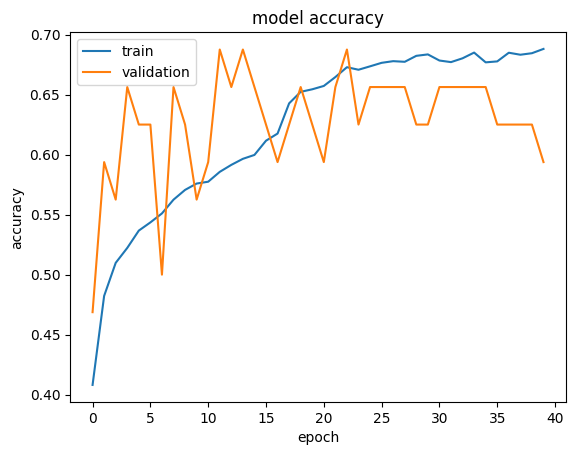

In [39]:
plt.plot(history_vgg.history["accuracy"])
plt.plot(history_vgg.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the VGG16 model**


In [40]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_vgg16_model.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")


1/4 [======>.......................] - ETA: 0s - loss: 1.1901 - accuracy: 0.5000


4/4 [==============================] - 0s 7ms/step - loss: 0.9959 - accuracy: 0.5781


Loss: 0.995919406414032, Accuracy: 0.578125


### **Plotting Confusion Matrix**



1/4 [======>.......................] - ETA: 0s


4/4 [==============================] - 0s 6ms/step


              precision    recall  f1-score   support

       happy       0.57      0.50      0.53        32
     neutral       0.42      0.47      0.44        32
         sad       0.53      0.50      0.52        32
    surprise       0.79      0.84      0.82        32

    accuracy                           0.58       128
   macro avg       0.58      0.58      0.58       128
weighted avg       0.58      0.58      0.58       128



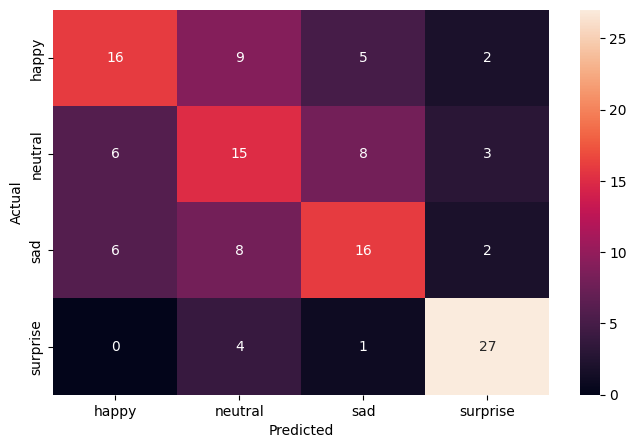

In [41]:
pred_probabilities = new_vgg16_model.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?


**Observations and Insights:\_\_**


**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**


## **ResNet V2 Model**


In [42]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [43]:
resnet_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers))
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in resnet_model.layers:
    layer.trainable = False

resnet_model.summary()

Model: "resnet50v2"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            


 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             


 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           


 pool1_pad (ZeroPadding2D)   (None, 26, 26, 64)           0         ['conv1_conv[0][0]']          


 pool1_pool (MaxPooling2D)   (None, 12, 12, 64)           0         ['pool1_pad[0][0]']           


 conv2_block1_preact_bn (Ba  (None, 12, 12, 64)           256       ['pool1_pool[0][0]']          


 tchNormalization)                                                                                


 conv2_block1_preact_relu (  (None, 12, 12, 64)           0         ['conv2_block1_preact_bn[0][0]


 Activation)                                                        ']                            


 conv2_block1_1_conv (Conv2  (None, 12, 12, 64)           4096      ['conv2_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv2_block1_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block1_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block1_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block1_1_bn[0][0]']   


 ation)                                                                                           


 conv2_block1_2_pad (ZeroPa  (None, 14, 14, 64)           0         ['conv2_block1_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv2_block1_2_conv (Conv2  (None, 12, 12, 64)           36864     ['conv2_block1_2_pad[0][0]']  


 D)                                                                                               


 conv2_block1_2_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block1_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block1_2_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block1_2_bn[0][0]']   


 ation)                                                                                           


 conv2_block1_0_conv (Conv2  (None, 12, 12, 256)          16640     ['conv2_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv2_block1_3_conv (Conv2  (None, 12, 12, 256)          16640     ['conv2_block1_2_relu[0][0]'] 


 D)                                                                                               


 conv2_block1_out (Add)      (None, 12, 12, 256)          0         ['conv2_block1_0_conv[0][0]', 


                                                                     'conv2_block1_3_conv[0][0]'] 


 conv2_block2_preact_bn (Ba  (None, 12, 12, 256)          1024      ['conv2_block1_out[0][0]']    


 tchNormalization)                                                                                


 conv2_block2_preact_relu (  (None, 12, 12, 256)          0         ['conv2_block2_preact_bn[0][0]


 Activation)                                                        ']                            


 conv2_block2_1_conv (Conv2  (None, 12, 12, 64)           16384     ['conv2_block2_preact_relu[0][


 D)                                                                 0]']                          


 conv2_block2_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block2_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block2_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block2_1_bn[0][0]']   


 ation)                                                                                           


 conv2_block2_2_pad (ZeroPa  (None, 14, 14, 64)           0         ['conv2_block2_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv2_block2_2_conv (Conv2  (None, 12, 12, 64)           36864     ['conv2_block2_2_pad[0][0]']  


 D)                                                                                               


 conv2_block2_2_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block2_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block2_2_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block2_2_bn[0][0]']   


 ation)                                                                                           


 conv2_block2_3_conv (Conv2  (None, 12, 12, 256)          16640     ['conv2_block2_2_relu[0][0]'] 


 D)                                                                                               


 conv2_block2_out (Add)      (None, 12, 12, 256)          0         ['conv2_block1_out[0][0]',    


                                                                     'conv2_block2_3_conv[0][0]'] 


 conv2_block3_preact_bn (Ba  (None, 12, 12, 256)          1024      ['conv2_block2_out[0][0]']    


 tchNormalization)                                                                                


 conv2_block3_preact_relu (  (None, 12, 12, 256)          0         ['conv2_block3_preact_bn[0][0]


 Activation)                                                        ']                            


 conv2_block3_1_conv (Conv2  (None, 12, 12, 64)           16384     ['conv2_block3_preact_relu[0][


 D)                                                                 0]']                          


 conv2_block3_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block3_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block3_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block3_1_bn[0][0]']   


 ation)                                                                                           


 conv2_block3_2_pad (ZeroPa  (None, 14, 14, 64)           0         ['conv2_block3_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv2_block3_2_conv (Conv2  (None, 6, 6, 64)             36864     ['conv2_block3_2_pad[0][0]']  


 D)                                                                                               


 conv2_block3_2_bn (BatchNo  (None, 6, 6, 64)             256       ['conv2_block3_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block3_2_relu (Activ  (None, 6, 6, 64)             0         ['conv2_block3_2_bn[0][0]']   


 ation)                                                                                           


 max_pooling2d (MaxPooling2  (None, 6, 6, 256)            0         ['conv2_block2_out[0][0]']    


 D)                                                                                               


 conv2_block3_3_conv (Conv2  (None, 6, 6, 256)            16640     ['conv2_block3_2_relu[0][0]'] 


 D)                                                                                               


 conv2_block3_out (Add)      (None, 6, 6, 256)            0         ['max_pooling2d[0][0]',       


                                                                     'conv2_block3_3_conv[0][0]'] 


 conv3_block1_preact_bn (Ba  (None, 6, 6, 256)            1024      ['conv2_block3_out[0][0]']    


 tchNormalization)                                                                                


 conv3_block1_preact_relu (  (None, 6, 6, 256)            0         ['conv3_block1_preact_bn[0][0]


 Activation)                                                        ']                            


 conv3_block1_1_conv (Conv2  (None, 6, 6, 128)            32768     ['conv3_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block1_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block1_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block1_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block1_1_bn[0][0]']   


 ation)                                                                                           


 conv3_block1_2_pad (ZeroPa  (None, 8, 8, 128)            0         ['conv3_block1_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv3_block1_2_conv (Conv2  (None, 6, 6, 128)            147456    ['conv3_block1_2_pad[0][0]']  


 D)                                                                                               


 conv3_block1_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block1_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block1_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block1_2_bn[0][0]']   


 ation)                                                                                           


 conv3_block1_0_conv (Conv2  (None, 6, 6, 512)            131584    ['conv3_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block1_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block1_2_relu[0][0]'] 


 D)                                                                                               


 conv3_block1_out (Add)      (None, 6, 6, 512)            0         ['conv3_block1_0_conv[0][0]', 


                                                                     'conv3_block1_3_conv[0][0]'] 


 conv3_block2_preact_bn (Ba  (None, 6, 6, 512)            2048      ['conv3_block1_out[0][0]']    


 tchNormalization)                                                                                


 conv3_block2_preact_relu (  (None, 6, 6, 512)            0         ['conv3_block2_preact_bn[0][0]


 Activation)                                                        ']                            


 conv3_block2_1_conv (Conv2  (None, 6, 6, 128)            65536     ['conv3_block2_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block2_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block2_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block2_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block2_1_bn[0][0]']   


 ation)                                                                                           


 conv3_block2_2_pad (ZeroPa  (None, 8, 8, 128)            0         ['conv3_block2_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv3_block2_2_conv (Conv2  (None, 6, 6, 128)            147456    ['conv3_block2_2_pad[0][0]']  


 D)                                                                                               


 conv3_block2_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block2_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block2_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block2_2_bn[0][0]']   


 ation)                                                                                           


 conv3_block2_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block2_2_relu[0][0]'] 


 D)                                                                                               


 conv3_block2_out (Add)      (None, 6, 6, 512)            0         ['conv3_block1_out[0][0]',    


                                                                     'conv3_block2_3_conv[0][0]'] 


 conv3_block3_preact_bn (Ba  (None, 6, 6, 512)            2048      ['conv3_block2_out[0][0]']    


 tchNormalization)                                                                                


 conv3_block3_preact_relu (  (None, 6, 6, 512)            0         ['conv3_block3_preact_bn[0][0]


 Activation)                                                        ']                            


 conv3_block3_1_conv (Conv2  (None, 6, 6, 128)            65536     ['conv3_block3_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block3_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block3_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block3_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block3_1_bn[0][0]']   


 ation)                                                                                           


 conv3_block3_2_pad (ZeroPa  (None, 8, 8, 128)            0         ['conv3_block3_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv3_block3_2_conv (Conv2  (None, 6, 6, 128)            147456    ['conv3_block3_2_pad[0][0]']  


 D)                                                                                               


 conv3_block3_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block3_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block3_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block3_2_bn[0][0]']   


 ation)                                                                                           


 conv3_block3_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block3_2_relu[0][0]'] 


 D)                                                                                               


 conv3_block3_out (Add)      (None, 6, 6, 512)            0         ['conv3_block2_out[0][0]',    


                                                                     'conv3_block3_3_conv[0][0]'] 


 conv3_block4_preact_bn (Ba  (None, 6, 6, 512)            2048      ['conv3_block3_out[0][0]']    


 tchNormalization)                                                                                


 conv3_block4_preact_relu (  (None, 6, 6, 512)            0         ['conv3_block4_preact_bn[0][0]


 Activation)                                                        ']                            


 conv3_block4_1_conv (Conv2  (None, 6, 6, 128)            65536     ['conv3_block4_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block4_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block4_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block4_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block4_1_bn[0][0]']   


 ation)                                                                                           


 conv3_block4_2_pad (ZeroPa  (None, 8, 8, 128)            0         ['conv3_block4_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv3_block4_2_conv (Conv2  (None, 3, 3, 128)            147456    ['conv3_block4_2_pad[0][0]']  


 D)                                                                                               


 conv3_block4_2_bn (BatchNo  (None, 3, 3, 128)            512       ['conv3_block4_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block4_2_relu (Activ  (None, 3, 3, 128)            0         ['conv3_block4_2_bn[0][0]']   


 ation)                                                                                           


 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 512)            0         ['conv3_block3_out[0][0]']    


 g2D)                                                                                             


 conv3_block4_3_conv (Conv2  (None, 3, 3, 512)            66048     ['conv3_block4_2_relu[0][0]'] 


 D)                                                                                               


 conv3_block4_out (Add)      (None, 3, 3, 512)            0         ['max_pooling2d_1[0][0]',     


                                                                     'conv3_block4_3_conv[0][0]'] 


 conv4_block1_preact_bn (Ba  (None, 3, 3, 512)            2048      ['conv3_block4_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block1_preact_relu (  (None, 3, 3, 512)            0         ['conv4_block1_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block1_1_conv (Conv2  (None, 3, 3, 256)            131072    ['conv4_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block1_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block1_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block1_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block1_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block1_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block1_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block1_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block1_2_pad[0][0]']  


 D)                                                                                               


 conv4_block1_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block1_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block1_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block1_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block1_0_conv (Conv2  (None, 3, 3, 1024)           525312    ['conv4_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block1_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block1_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block1_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block1_0_conv[0][0]', 


                                                                     'conv4_block1_3_conv[0][0]'] 


 conv4_block2_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block1_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block2_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block2_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block2_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block2_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block2_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block2_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block2_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block2_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block2_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block2_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block2_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block2_2_pad[0][0]']  


 D)                                                                                               


 conv4_block2_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block2_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block2_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block2_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block2_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block2_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block2_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block1_out[0][0]',    


                                                                     'conv4_block2_3_conv[0][0]'] 


 conv4_block3_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block2_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block3_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block3_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block3_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block3_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block3_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block3_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block3_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block3_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block3_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block3_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block3_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block3_2_pad[0][0]']  


 D)                                                                                               


 conv4_block3_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block3_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block3_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block3_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block3_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block3_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block3_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block2_out[0][0]',    


                                                                     'conv4_block3_3_conv[0][0]'] 


 conv4_block4_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block3_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block4_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block4_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block4_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block4_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block4_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block4_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block4_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block4_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block4_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block4_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block4_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block4_2_pad[0][0]']  


 D)                                                                                               


 conv4_block4_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block4_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block4_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block4_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block4_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block4_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block4_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block3_out[0][0]',    


                                                                     'conv4_block4_3_conv[0][0]'] 


 conv4_block5_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block4_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block5_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block5_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block5_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block5_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block5_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block5_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block5_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block5_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block5_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block5_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block5_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block5_2_pad[0][0]']  


 D)                                                                                               


 conv4_block5_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block5_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block5_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block5_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block5_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block5_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block5_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block4_out[0][0]',    


                                                                     'conv4_block5_3_conv[0][0]'] 


 conv4_block6_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block5_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block6_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block6_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block6_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block6_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block6_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block6_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block6_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block6_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block6_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block6_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block6_2_conv (Conv2  (None, 2, 2, 256)            589824    ['conv4_block6_2_pad[0][0]']  


 D)                                                                                               


 conv4_block6_2_bn (BatchNo  (None, 2, 2, 256)            1024      ['conv4_block6_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block6_2_relu (Activ  (None, 2, 2, 256)            0         ['conv4_block6_2_bn[0][0]']   


 ation)                                                                                           


 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 1024)           0         ['conv4_block5_out[0][0]']    


 g2D)                                                                                             


 conv4_block6_3_conv (Conv2  (None, 2, 2, 1024)           263168    ['conv4_block6_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block6_out (Add)      (None, 2, 2, 1024)           0         ['max_pooling2d_2[0][0]',     


                                                                     'conv4_block6_3_conv[0][0]'] 


 conv5_block1_preact_bn (Ba  (None, 2, 2, 1024)           4096      ['conv4_block6_out[0][0]']    


 tchNormalization)                                                                                


 conv5_block1_preact_relu (  (None, 2, 2, 1024)           0         ['conv5_block1_preact_bn[0][0]


 Activation)                                                        ']                            


 conv5_block1_1_conv (Conv2  (None, 2, 2, 512)            524288    ['conv5_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv5_block1_1_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block1_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block1_1_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block1_1_bn[0][0]']   


 ation)                                                                                           


 conv5_block1_2_pad (ZeroPa  (None, 4, 4, 512)            0         ['conv5_block1_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv5_block1_2_conv (Conv2  (None, 2, 2, 512)            2359296   ['conv5_block1_2_pad[0][0]']  


 D)                                                                                               


 conv5_block1_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block1_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block1_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block1_2_bn[0][0]']   


 ation)                                                                                           


 conv5_block1_0_conv (Conv2  (None, 2, 2, 2048)           2099200   ['conv5_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv5_block1_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block1_2_relu[0][0]'] 


 D)                                                                                               


 conv5_block1_out (Add)      (None, 2, 2, 2048)           0         ['conv5_block1_0_conv[0][0]', 


                                                                     'conv5_block1_3_conv[0][0]'] 


 conv5_block2_preact_bn (Ba  (None, 2, 2, 2048)           8192      ['conv5_block1_out[0][0]']    


 tchNormalization)                                                                                


 conv5_block2_preact_relu (  (None, 2, 2, 2048)           0         ['conv5_block2_preact_bn[0][0]


 Activation)                                                        ']                            


 conv5_block2_1_conv (Conv2  (None, 2, 2, 512)            1048576   ['conv5_block2_preact_relu[0][


 D)                                                                 0]']                          


 conv5_block2_1_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block2_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block2_1_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block2_1_bn[0][0]']   


 ation)                                                                                           


 conv5_block2_2_pad (ZeroPa  (None, 4, 4, 512)            0         ['conv5_block2_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv5_block2_2_conv (Conv2  (None, 2, 2, 512)            2359296   ['conv5_block2_2_pad[0][0]']  


 D)                                                                                               


 conv5_block2_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block2_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block2_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block2_2_bn[0][0]']   


 ation)                                                                                           


 conv5_block2_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block2_2_relu[0][0]'] 


 D)                                                                                               


 conv5_block2_out (Add)      (None, 2, 2, 2048)           0         ['conv5_block1_out[0][0]',    


                                                                     'conv5_block2_3_conv[0][0]'] 


 conv5_block3_preact_bn (Ba  (None, 2, 2, 2048)           8192      ['conv5_block2_out[0][0]']    


 tchNormalization)                                                                                


 conv5_block3_preact_relu (  (None, 2, 2, 2048)           0         ['conv5_block3_preact_bn[0][0]


 Activation)                                                        ']                            


 conv5_block3_1_conv (Conv2  (None, 2, 2, 512)            1048576   ['conv5_block3_preact_relu[0][


 D)                                                                 0]']                          


 conv5_block3_1_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block3_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block3_1_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block3_1_bn[0][0]']   


 ation)                                                                                           


 conv5_block3_2_pad (ZeroPa  (None, 4, 4, 512)            0         ['conv5_block3_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv5_block3_2_conv (Conv2  (None, 2, 2, 512)            2359296   ['conv5_block3_2_pad[0][0]']  


 D)                                                                                               


 conv5_block3_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block3_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block3_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block3_2_bn[0][0]']   


 ation)                                                                                           


 conv5_block3_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block3_2_relu[0][0]'] 


 D)                                                                                               


 conv5_block3_out (Add)      (None, 2, 2, 2048)           0         ['conv5_block2_out[0][0]',    


                                                                     'conv5_block3_3_conv[0][0]'] 


 post_bn (BatchNormalizatio  (None, 2, 2, 2048)           8192      ['conv5_block3_out[0][0]']    


 n)                                                                                               


 post_relu (Activation)      (None, 2, 2, 2048)           0         ['post_bn[0][0]']             


Total params: 23564800 (89.89 MB)


Trainable params: 0 (0.00 Byte)


Non-trainable params: 23564800 (89.89 MB)


__________________________________________________________________________________________________


### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.


In [44]:
new_resnet_model = Sequential()
new_resnet_model.add(resnet_model)

# Reduces each feature map to a single value by averaging all elements
new_resnet_model.add(GlobalAveragePooling2D())

# Adding a dense output layer
new_resnet_model.add(Dense(512, activation="relu"))
new_resnet_model.add(Dropout(0.5))
new_resnet_model.add(Dense(128, activation="relu"))
new_resnet_model.add(Dropout(0.5))
new_resnet_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the Model**


In [45]:
new_resnet_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_resnet_model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  


 global_average_pooling2d (  (None, 2048)              0         


 GlobalAveragePooling2D)                                         


 dense (Dense)               (None, 512)               1049088   


 dropout (Dropout)           (None, 512)               0         


 dense_1 (Dense)             (None, 128)               65664     


 dropout_1 (Dropout)         (None, 128)               0         


 dense_2 (Dense)             (None, 4)                 516       


Total params: 24680068 (94.15 MB)


Trainable params: 1115268 (4.25 MB)


Non-trainable params: 23564800 (89.89 MB)


_________________________________________________________________


In [46]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_resnet_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_resnet = new_resnet_model.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[reduce_lr],
)

Epoch 1/40



  1/473 [..............................] - ETA: 16:15 - loss: 4.2904 - accuracy: 0.1250


 10/473 [..............................] - ETA: 2s - loss: 3.2546 - accuracy: 0.2188   


 20/473 [>.............................] - ETA: 2s - loss: 3.0973 - accuracy: 0.2375


 29/473 [>.............................] - ETA: 2s - loss: 2.8269 - accuracy: 0.2522


 35/473 [=>............................] - ETA: 2s - loss: 2.6598 - accuracy: 0.2616


 43/473 [=>............................] - ETA: 2s - loss: 2.5191 - accuracy: 0.2754


 53/473 [==>...........................] - ETA: 2s - loss: 2.3741 - accuracy: 0.2801


 63/473 [==>...........................] - ETA: 2s - loss: 2.2520 - accuracy: 0.2872


 73/473 [===>..........................] - ETA: 2s - loss: 2.1620 - accuracy: 0.2954


 84/473 [====>.........................] - ETA: 2s - loss: 2.0835 - accuracy: 0.2999


 95/473 [=====>........................] - ETA: 2s - loss: 2.0169 - accuracy: 0.3063


106/473 [=====>........................] - ETA: 2s - loss: 1.9623 - accuracy: 0.3063


117/473 [======>.......................] - ETA: 1s - loss: 1.9157 - accuracy: 0.3114


128/473 [=======>......................] - ETA: 1s - loss: 1.8796 - accuracy: 0.3113


139/473 [=======>......................] - ETA: 1s - loss: 1.8415 - accuracy: 0.3159


150/473 [========>.....................] - ETA: 1s - loss: 1.8082 - accuracy: 0.3200


160/473 [=========>....................] - ETA: 1s - loss: 1.7897 - accuracy: 0.3197


163/473 [=========>....................] - ETA: 2s - loss: 1.7853 - accuracy: 0.3195


172/473 [=========>....................] - ETA: 2s - loss: 1.7689 - accuracy: 0.3177


180/473 [==========>...................] - ETA: 2s - loss: 1.7503 - accuracy: 0.3169


188/473 [==========>...................] - ETA: 2s - loss: 1.7354 - accuracy: 0.3156


196/473 [===========>..................] - ETA: 2s - loss: 1.7234 - accuracy: 0.3145


206/473 [============>.................] - ETA: 1s - loss: 1.7088 - accuracy: 0.3162


216/473 [============>.................] - ETA: 1s - loss: 1.6933 - accuracy: 0.3172


226/473 [=============>................] - ETA: 1s - loss: 1.6793 - accuracy: 0.3177


236/473 [=============>................] - ETA: 1s - loss: 1.6641 - accuracy: 0.3201


246/473 [==============>...............] - ETA: 1s - loss: 1.6516 - accuracy: 0.3219


256/473 [===============>..............] - ETA: 1s - loss: 1.6387 - accuracy: 0.3241


266/473 [===============>..............] - ETA: 1s - loss: 1.6271 - accuracy: 0.3263


276/473 [================>.............] - ETA: 1s - loss: 1.6168 - accuracy: 0.3283


286/473 [=================>............] - ETA: 1s - loss: 1.6069 - accuracy: 0.3303


296/473 [=================>............] - ETA: 1s - loss: 1.6000 - accuracy: 0.3318


306/473 [==================>...........] - ETA: 1s - loss: 1.5914 - accuracy: 0.3336


316/473 [===================>..........] - ETA: 1s - loss: 1.5834 - accuracy: 0.3366


325/473 [===================>..........] - ETA: 0s - loss: 1.5763 - accuracy: 0.3376


334/473 [====================>.........] - ETA: 0s - loss: 1.5684 - accuracy: 0.3383


343/473 [====================>.........] - ETA: 0s - loss: 1.5606 - accuracy: 0.3391


353/473 [=====================>........] - ETA: 0s - loss: 1.5551 - accuracy: 0.3396


363/473 [======================>.......] - ETA: 0s - loss: 1.5485 - accuracy: 0.3407


373/473 [======================>.......] - ETA: 0s - loss: 1.5421 - accuracy: 0.3430


383/473 [=======================>......] - ETA: 0s - loss: 1.5393 - accuracy: 0.3423


393/473 [=======================>......] - ETA: 0s - loss: 1.5332 - accuracy: 0.3433


403/473 [========================>.....] - ETA: 0s - loss: 1.5293 - accuracy: 0.3442


413/473 [=========================>....] - ETA: 0s - loss: 1.5233 - accuracy: 0.3452


423/473 [=========================>....] - ETA: 0s - loss: 1.5173 - accuracy: 0.3472


433/473 [==========================>...] - ETA: 0s - loss: 1.5125 - accuracy: 0.3478


443/473 [===========================>..] - ETA: 0s - loss: 1.5081 - accuracy: 0.3474


453/473 [===========================>..] - ETA: 0s - loss: 1.5033 - accuracy: 0.3479


463/473 [============================>.] - ETA: 0s - loss: 1.4989 - accuracy: 0.3492


473/473 [==============================] - ETA: 0s - loss: 1.4948 - accuracy: 0.3499


473/473 [==============================] - 5s 7ms/step - loss: 1.4948 - accuracy: 0.3499 - val_loss: 1.3902 - val_accuracy: 0.3438 - lr: 5.0000e-04


Epoch 2/40



  1/473 [..............................] - ETA: 6s - loss: 1.1774 - accuracy: 0.3750


 11/473 [..............................] - ETA: 2s - loss: 1.2363 - accuracy: 0.4375


 21/473 [>.............................] - ETA: 2s - loss: 1.2522 - accuracy: 0.4167


 31/473 [>.............................] - ETA: 2s - loss: 1.2680 - accuracy: 0.4284


 41/473 [=>............................] - ETA: 2s - loss: 1.2868 - accuracy: 0.4253


 51/473 [==>...........................] - ETA: 2s - loss: 1.2884 - accuracy: 0.4210


 61/473 [==>...........................] - ETA: 2s - loss: 1.2887 - accuracy: 0.4196


 71/473 [===>..........................] - ETA: 2s - loss: 1.2888 - accuracy: 0.4142


 81/473 [====>.........................] - ETA: 2s - loss: 1.2915 - accuracy: 0.4140


 91/473 [====>.........................] - ETA: 1s - loss: 1.2922 - accuracy: 0.4087


101/473 [=====>........................] - ETA: 1s - loss: 1.2907 - accuracy: 0.4118


111/473 [======>.......................] - ETA: 1s - loss: 1.2908 - accuracy: 0.4082


121/473 [======>.......................] - ETA: 1s - loss: 1.2882 - accuracy: 0.4119


131/473 [=======>......................] - ETA: 1s - loss: 1.2811 - accuracy: 0.4132


140/473 [=======>......................] - ETA: 1s - loss: 1.2833 - accuracy: 0.4105


149/473 [========>.....................] - ETA: 1s - loss: 1.2805 - accuracy: 0.4119


158/473 [=========>....................] - ETA: 1s - loss: 1.2805 - accuracy: 0.4120


167/473 [=========>....................] - ETA: 1s - loss: 1.2784 - accuracy: 0.4123


174/473 [==========>...................] - ETA: 1s - loss: 1.2735 - accuracy: 0.4138


180/473 [==========>...................] - ETA: 1s - loss: 1.2735 - accuracy: 0.4150


186/473 [==========>...................] - ETA: 1s - loss: 1.2746 - accuracy: 0.4137


193/473 [===========>..................] - ETA: 1s - loss: 1.2729 - accuracy: 0.4136


203/473 [===========>..................] - ETA: 1s - loss: 1.2705 - accuracy: 0.4158


213/473 [============>.................] - ETA: 1s - loss: 1.2714 - accuracy: 0.4164


223/473 [=============>................] - ETA: 1s - loss: 1.2694 - accuracy: 0.4190


233/473 [=============>................] - ETA: 1s - loss: 1.2702 - accuracy: 0.4189


243/473 [==============>...............] - ETA: 1s - loss: 1.2692 - accuracy: 0.4181


253/473 [===============>..............] - ETA: 1s - loss: 1.2689 - accuracy: 0.4174


262/473 [===============>..............] - ETA: 1s - loss: 1.2671 - accuracy: 0.4186


272/473 [================>.............] - ETA: 1s - loss: 1.2662 - accuracy: 0.4189


282/473 [================>.............] - ETA: 1s - loss: 1.2653 - accuracy: 0.4190


291/473 [=================>............] - ETA: 1s - loss: 1.2666 - accuracy: 0.4183


300/473 [==================>...........] - ETA: 0s - loss: 1.2645 - accuracy: 0.4199


307/473 [==================>...........] - ETA: 0s - loss: 1.2635 - accuracy: 0.4204


313/473 [==================>...........] - ETA: 0s - loss: 1.2633 - accuracy: 0.4207


320/473 [===================>..........] - ETA: 0s - loss: 1.2624 - accuracy: 0.4211


327/473 [===================>..........] - ETA: 0s - loss: 1.2628 - accuracy: 0.4223


337/473 [====================>.........] - ETA: 0s - loss: 1.2640 - accuracy: 0.4232


346/473 [====================>.........] - ETA: 0s - loss: 1.2621 - accuracy: 0.4246


356/473 [=====================>........] - ETA: 0s - loss: 1.2621 - accuracy: 0.4242


366/473 [======================>.......] - ETA: 0s - loss: 1.2629 - accuracy: 0.4240


376/473 [======================>.......] - ETA: 0s - loss: 1.2606 - accuracy: 0.4257


386/473 [=======================>......] - ETA: 0s - loss: 1.2615 - accuracy: 0.4255


396/473 [========================>.....] - ETA: 0s - loss: 1.2621 - accuracy: 0.4263


406/473 [========================>.....] - ETA: 0s - loss: 1.2616 - accuracy: 0.4268


416/473 [=========================>....] - ETA: 0s - loss: 1.2608 - accuracy: 0.4269


426/473 [==========================>...] - ETA: 0s - loss: 1.2608 - accuracy: 0.4266


435/473 [==========================>...] - ETA: 0s - loss: 1.2611 - accuracy: 0.4268


443/473 [===========================>..] - ETA: 0s - loss: 1.2605 - accuracy: 0.4264


452/473 [===========================>..] - ETA: 0s - loss: 1.2619 - accuracy: 0.4255


462/473 [============================>.] - ETA: 0s - loss: 1.2615 - accuracy: 0.4261


472/473 [============================>.] - ETA: 0s - loss: 1.2601 - accuracy: 0.4278


473/473 [==============================] - 3s 6ms/step - loss: 1.2601 - accuracy: 0.4279 - val_loss: 1.2802 - val_accuracy: 0.4375 - lr: 5.0000e-04


Epoch 3/40



  1/473 [..............................] - ETA: 7s - loss: 1.2722 - accuracy: 0.4688


 11/473 [..............................] - ETA: 2s - loss: 1.2365 - accuracy: 0.4432


 20/473 [>.............................] - ETA: 2s - loss: 1.2279 - accuracy: 0.4469


 29/473 [>.............................] - ETA: 2s - loss: 1.2244 - accuracy: 0.4526


 39/473 [=>............................] - ETA: 2s - loss: 1.2374 - accuracy: 0.4511


 49/473 [==>...........................] - ETA: 2s - loss: 1.2285 - accuracy: 0.4483


 59/473 [==>...........................] - ETA: 2s - loss: 1.2284 - accuracy: 0.4492


 66/473 [===>..........................] - ETA: 2s - loss: 1.2220 - accuracy: 0.4498


 73/473 [===>..........................] - ETA: 2s - loss: 1.2168 - accuracy: 0.4542


 78/473 [===>..........................] - ETA: 2s - loss: 1.2117 - accuracy: 0.4575


 84/473 [====>.........................] - ETA: 2s - loss: 1.2143 - accuracy: 0.4580


 93/473 [====>.........................] - ETA: 2s - loss: 1.2203 - accuracy: 0.4560


103/473 [=====>........................] - ETA: 2s - loss: 1.2192 - accuracy: 0.4530


109/473 [=====>........................] - ETA: 2s - loss: 1.2244 - accuracy: 0.4490


118/473 [======>.......................] - ETA: 2s - loss: 1.2265 - accuracy: 0.4481


128/473 [=======>......................] - ETA: 2s - loss: 1.2290 - accuracy: 0.4482


138/473 [=======>......................] - ETA: 2s - loss: 1.2281 - accuracy: 0.4488


148/473 [========>.....................] - ETA: 2s - loss: 1.2265 - accuracy: 0.4487


157/473 [========>.....................] - ETA: 1s - loss: 1.2265 - accuracy: 0.4520


166/473 [=========>....................] - ETA: 1s - loss: 1.2246 - accuracy: 0.4526


174/473 [==========>...................] - ETA: 1s - loss: 1.2272 - accuracy: 0.4520


183/473 [==========>...................] - ETA: 1s - loss: 1.2263 - accuracy: 0.4525


193/473 [===========>..................] - ETA: 1s - loss: 1.2245 - accuracy: 0.4542


203/473 [===========>..................] - ETA: 1s - loss: 1.2213 - accuracy: 0.4564


212/473 [============>.................] - ETA: 1s - loss: 1.2204 - accuracy: 0.4573


222/473 [=============>................] - ETA: 1s - loss: 1.2194 - accuracy: 0.4589


232/473 [=============>................] - ETA: 1s - loss: 1.2183 - accuracy: 0.4604


242/473 [==============>...............] - ETA: 1s - loss: 1.2147 - accuracy: 0.4619


252/473 [==============>...............] - ETA: 1s - loss: 1.2126 - accuracy: 0.4625


262/473 [===============>..............] - ETA: 1s - loss: 1.2132 - accuracy: 0.4621


272/473 [================>.............] - ETA: 1s - loss: 1.2138 - accuracy: 0.4624


282/473 [================>.............] - ETA: 1s - loss: 1.2121 - accuracy: 0.4638


292/473 [=================>............] - ETA: 1s - loss: 1.2124 - accuracy: 0.4640


301/473 [==================>...........] - ETA: 0s - loss: 1.2145 - accuracy: 0.4624


310/473 [==================>...........] - ETA: 0s - loss: 1.2137 - accuracy: 0.4614


319/473 [===================>..........] - ETA: 0s - loss: 1.2125 - accuracy: 0.4615


329/473 [===================>..........] - ETA: 0s - loss: 1.2134 - accuracy: 0.4603


339/473 [====================>.........] - ETA: 0s - loss: 1.2112 - accuracy: 0.4614


349/473 [=====================>........] - ETA: 0s - loss: 1.2090 - accuracy: 0.4620


359/473 [=====================>........] - ETA: 0s - loss: 1.2087 - accuracy: 0.4622


369/473 [======================>.......] - ETA: 0s - loss: 1.2092 - accuracy: 0.4620


379/473 [=======================>......] - ETA: 0s - loss: 1.2087 - accuracy: 0.4619


388/473 [=======================>......] - ETA: 0s - loss: 1.2071 - accuracy: 0.4627


398/473 [========================>.....] - ETA: 0s - loss: 1.2074 - accuracy: 0.4625


408/473 [========================>.....] - ETA: 0s - loss: 1.2077 - accuracy: 0.4607


418/473 [=========================>....] - ETA: 0s - loss: 1.2070 - accuracy: 0.4609


428/473 [==========================>...] - ETA: 0s - loss: 1.2055 - accuracy: 0.4617


438/473 [==========================>...] - ETA: 0s - loss: 1.2046 - accuracy: 0.4626


448/473 [===========================>..] - ETA: 0s - loss: 1.2041 - accuracy: 0.4635


458/473 [============================>.] - ETA: 0s - loss: 1.2045 - accuracy: 0.4635


468/473 [============================>.] - ETA: 0s - loss: 1.2049 - accuracy: 0.4632


473/473 [==============================] - 3s 6ms/step - loss: 1.2049 - accuracy: 0.4630 - val_loss: 1.2667 - val_accuracy: 0.3438 - lr: 5.0000e-04


Epoch 4/40



  1/473 [..............................] - ETA: 7s - loss: 1.2154 - accuracy: 0.5312


 11/473 [..............................] - ETA: 2s - loss: 1.2292 - accuracy: 0.4347


 21/473 [>.............................] - ETA: 2s - loss: 1.2264 - accuracy: 0.4405


 31/473 [>.............................] - ETA: 2s - loss: 1.2051 - accuracy: 0.4698


 41/473 [=>............................] - ETA: 2s - loss: 1.1941 - accuracy: 0.4764


 51/473 [==>...........................] - ETA: 2s - loss: 1.2091 - accuracy: 0.4688


 60/473 [==>...........................] - ETA: 2s - loss: 1.2021 - accuracy: 0.4740


 70/473 [===>..........................] - ETA: 2s - loss: 1.1907 - accuracy: 0.4821


 80/473 [====>.........................] - ETA: 2s - loss: 1.1961 - accuracy: 0.4754


 89/473 [====>.........................] - ETA: 2s - loss: 1.1958 - accuracy: 0.4730


 95/473 [=====>........................] - ETA: 2s - loss: 1.1890 - accuracy: 0.4760


100/473 [=====>........................] - ETA: 2s - loss: 1.1901 - accuracy: 0.4722


106/473 [=====>........................] - ETA: 2s - loss: 1.1874 - accuracy: 0.4749


115/473 [======>.......................] - ETA: 2s - loss: 1.1888 - accuracy: 0.4719


125/473 [======>.......................] - ETA: 2s - loss: 1.1890 - accuracy: 0.4712


135/473 [=======>......................] - ETA: 1s - loss: 1.1911 - accuracy: 0.4668


145/473 [========>.....................] - ETA: 1s - loss: 1.1942 - accuracy: 0.4635


155/473 [========>.....................] - ETA: 1s - loss: 1.1946 - accuracy: 0.4646


165/473 [=========>....................] - ETA: 1s - loss: 1.1921 - accuracy: 0.4653


175/473 [==========>...................] - ETA: 1s - loss: 1.1862 - accuracy: 0.4669


185/473 [==========>...................] - ETA: 1s - loss: 1.1853 - accuracy: 0.4682


195/473 [===========>..................] - ETA: 1s - loss: 1.1830 - accuracy: 0.4689


204/473 [===========>..................] - ETA: 1s - loss: 1.1839 - accuracy: 0.4704


211/473 [============>.................] - ETA: 1s - loss: 1.1835 - accuracy: 0.4693


220/473 [============>.................] - ETA: 1s - loss: 1.1827 - accuracy: 0.4704


230/473 [=============>................] - ETA: 1s - loss: 1.1828 - accuracy: 0.4702


240/473 [==============>...............] - ETA: 1s - loss: 1.1813 - accuracy: 0.4729


250/473 [==============>...............] - ETA: 1s - loss: 1.1797 - accuracy: 0.4749


260/473 [===============>..............] - ETA: 1s - loss: 1.1786 - accuracy: 0.4747


270/473 [================>.............] - ETA: 1s - loss: 1.1787 - accuracy: 0.4759


279/473 [================>.............] - ETA: 1s - loss: 1.1789 - accuracy: 0.4768


288/473 [=================>............] - ETA: 1s - loss: 1.1787 - accuracy: 0.4772


298/473 [=================>............] - ETA: 0s - loss: 1.1778 - accuracy: 0.4786


307/473 [==================>...........] - ETA: 0s - loss: 1.1797 - accuracy: 0.4775


316/473 [===================>..........] - ETA: 0s - loss: 1.1786 - accuracy: 0.4779


326/473 [===================>..........] - ETA: 0s - loss: 1.1785 - accuracy: 0.4786


336/473 [====================>.........] - ETA: 0s - loss: 1.1765 - accuracy: 0.4793


345/473 [====================>.........] - ETA: 0s - loss: 1.1753 - accuracy: 0.4813


354/473 [=====================>........] - ETA: 0s - loss: 1.1745 - accuracy: 0.4839


362/473 [=====================>........] - ETA: 0s - loss: 1.1736 - accuracy: 0.4842


369/473 [======================>.......] - ETA: 0s - loss: 1.1727 - accuracy: 0.4847


377/473 [======================>.......] - ETA: 0s - loss: 1.1737 - accuracy: 0.4853


387/473 [=======================>......] - ETA: 0s - loss: 1.1745 - accuracy: 0.4856


397/473 [========================>.....] - ETA: 0s - loss: 1.1723 - accuracy: 0.4859


407/473 [========================>.....] - ETA: 0s - loss: 1.1719 - accuracy: 0.4860


416/473 [=========================>....] - ETA: 0s - loss: 1.1704 - accuracy: 0.4877


426/473 [==========================>...] - ETA: 0s - loss: 1.1708 - accuracy: 0.4871


436/473 [==========================>...] - ETA: 0s - loss: 1.1714 - accuracy: 0.4863


446/473 [===========================>..] - ETA: 0s - loss: 1.1710 - accuracy: 0.4875


456/473 [===========================>..] - ETA: 0s - loss: 1.1707 - accuracy: 0.4875


466/473 [============================>.] - ETA: 0s - loss: 1.1699 - accuracy: 0.4879


473/473 [==============================] - 3s 6ms/step - loss: 1.1699 - accuracy: 0.4879 - val_loss: 1.1759 - val_accuracy: 0.4375 - lr: 5.0000e-04


Epoch 5/40



  1/473 [..............................] - ETA: 8s - loss: 1.0851 - accuracy: 0.5312


 11/473 [..............................] - ETA: 2s - loss: 1.1172 - accuracy: 0.5369


 21/473 [>.............................] - ETA: 2s - loss: 1.1304 - accuracy: 0.5179


 31/473 [>.............................] - ETA: 2s - loss: 1.1457 - accuracy: 0.5141


 41/473 [=>............................] - ETA: 2s - loss: 1.1513 - accuracy: 0.5168


 51/473 [==>...........................] - ETA: 2s - loss: 1.1417 - accuracy: 0.5123


 59/473 [==>...........................] - ETA: 2s - loss: 1.1318 - accuracy: 0.5132


 67/473 [===>..........................] - ETA: 2s - loss: 1.1292 - accuracy: 0.5159


 77/473 [===>..........................] - ETA: 2s - loss: 1.1377 - accuracy: 0.5106


 87/473 [====>.........................] - ETA: 2s - loss: 1.1393 - accuracy: 0.5061


 97/473 [=====>........................] - ETA: 2s - loss: 1.1331 - accuracy: 0.5090


107/473 [=====>........................] - ETA: 1s - loss: 1.1283 - accuracy: 0.5108


117/473 [======>.......................] - ETA: 1s - loss: 1.1199 - accuracy: 0.5190


127/473 [=======>......................] - ETA: 1s - loss: 1.1209 - accuracy: 0.5189


137/473 [=======>......................] - ETA: 1s - loss: 1.1205 - accuracy: 0.5187


147/473 [========>.....................] - ETA: 1s - loss: 1.1182 - accuracy: 0.5187


157/473 [========>.....................] - ETA: 1s - loss: 1.1238 - accuracy: 0.5149


167/473 [=========>....................] - ETA: 1s - loss: 1.1241 - accuracy: 0.5157


176/473 [==========>...................] - ETA: 1s - loss: 1.1246 - accuracy: 0.5133


186/473 [==========>...................] - ETA: 1s - loss: 1.1233 - accuracy: 0.5146


195/473 [===========>..................] - ETA: 1s - loss: 1.1250 - accuracy: 0.5105


204/473 [===========>..................] - ETA: 1s - loss: 1.1268 - accuracy: 0.5084


211/473 [============>.................] - ETA: 1s - loss: 1.1283 - accuracy: 0.5075


221/473 [=============>................] - ETA: 1s - loss: 1.1295 - accuracy: 0.5079


231/473 [=============>................] - ETA: 1s - loss: 1.1259 - accuracy: 0.5098


241/473 [==============>...............] - ETA: 1s - loss: 1.1276 - accuracy: 0.5105


251/473 [==============>...............] - ETA: 1s - loss: 1.1273 - accuracy: 0.5107


261/473 [===============>..............] - ETA: 1s - loss: 1.1246 - accuracy: 0.5116


271/473 [================>.............] - ETA: 1s - loss: 1.1241 - accuracy: 0.5136


281/473 [================>.............] - ETA: 1s - loss: 1.1251 - accuracy: 0.5136


290/473 [=================>............] - ETA: 0s - loss: 1.1264 - accuracy: 0.5126


298/473 [=================>............] - ETA: 0s - loss: 1.1247 - accuracy: 0.5136


305/473 [==================>...........] - ETA: 0s - loss: 1.1253 - accuracy: 0.5136


312/473 [==================>...........] - ETA: 0s - loss: 1.1238 - accuracy: 0.5148


322/473 [===================>..........] - ETA: 0s - loss: 1.1211 - accuracy: 0.5164


332/473 [====================>.........] - ETA: 0s - loss: 1.1214 - accuracy: 0.5165


342/473 [====================>.........] - ETA: 0s - loss: 1.1205 - accuracy: 0.5170


352/473 [=====================>........] - ETA: 0s - loss: 1.1197 - accuracy: 0.5169


362/473 [=====================>........] - ETA: 0s - loss: 1.1224 - accuracy: 0.5154


372/473 [======================>.......] - ETA: 0s - loss: 1.1222 - accuracy: 0.5155


382/473 [=======================>......] - ETA: 0s - loss: 1.1227 - accuracy: 0.5148


392/473 [=======================>......] - ETA: 0s - loss: 1.1240 - accuracy: 0.5143


402/473 [========================>.....] - ETA: 0s - loss: 1.1235 - accuracy: 0.5141


411/473 [=========================>....] - ETA: 0s - loss: 1.1241 - accuracy: 0.5137


419/473 [=========================>....] - ETA: 0s - loss: 1.1229 - accuracy: 0.5142


428/473 [==========================>...] - ETA: 0s - loss: 1.1235 - accuracy: 0.5144


437/473 [==========================>...] - ETA: 0s - loss: 1.1229 - accuracy: 0.5145


447/473 [===========================>..] - ETA: 0s - loss: 1.1227 - accuracy: 0.5137


457/473 [===========================>..] - ETA: 0s - loss: 1.1222 - accuracy: 0.5140


468/473 [============================>.] - ETA: 0s - loss: 1.1224 - accuracy: 0.5139


473/473 [==============================] - 3s 6ms/step - loss: 1.1227 - accuracy: 0.5135 - val_loss: 1.2108 - val_accuracy: 0.4375 - lr: 5.0000e-04


Epoch 6/40



  1/473 [..............................] - ETA: 7s - loss: 0.9524 - accuracy: 0.6875


 11/473 [..............................] - ETA: 2s - loss: 1.1212 - accuracy: 0.5199


 21/473 [>.............................] - ETA: 2s - loss: 1.0973 - accuracy: 0.5268


 31/473 [>.............................] - ETA: 2s - loss: 1.0919 - accuracy: 0.5343


 41/473 [=>............................] - ETA: 2s - loss: 1.0933 - accuracy: 0.5442


 51/473 [==>...........................] - ETA: 2s - loss: 1.1024 - accuracy: 0.5404


 61/473 [==>...........................] - ETA: 2s - loss: 1.1039 - accuracy: 0.5359


 69/473 [===>..........................] - ETA: 2s - loss: 1.0998 - accuracy: 0.5340


 79/473 [====>.........................] - ETA: 2s - loss: 1.0992 - accuracy: 0.5356


 89/473 [====>.........................] - ETA: 2s - loss: 1.0963 - accuracy: 0.5372


 99/473 [=====>........................] - ETA: 2s - loss: 1.1018 - accuracy: 0.5344


109/473 [=====>........................] - ETA: 1s - loss: 1.0993 - accuracy: 0.5304


119/473 [======>.......................] - ETA: 1s - loss: 1.1029 - accuracy: 0.5265


128/473 [=======>......................] - ETA: 1s - loss: 1.1047 - accuracy: 0.5251


138/473 [=======>......................] - ETA: 1s - loss: 1.1018 - accuracy: 0.5245


147/473 [========>.....................] - ETA: 1s - loss: 1.0989 - accuracy: 0.5274


154/473 [========>.....................] - ETA: 1s - loss: 1.0980 - accuracy: 0.5294


163/473 [=========>....................] - ETA: 1s - loss: 1.0968 - accuracy: 0.5277


173/473 [=========>....................] - ETA: 1s - loss: 1.0981 - accuracy: 0.5275


183/473 [==========>...................] - ETA: 1s - loss: 1.0988 - accuracy: 0.5282


193/473 [===========>..................] - ETA: 1s - loss: 1.0968 - accuracy: 0.5285


203/473 [===========>..................] - ETA: 1s - loss: 1.0981 - accuracy: 0.5282


212/473 [============>.................] - ETA: 1s - loss: 1.0982 - accuracy: 0.5260


220/473 [============>.................] - ETA: 1s - loss: 1.0994 - accuracy: 0.5272


229/473 [=============>................] - ETA: 1s - loss: 1.0974 - accuracy: 0.5279


239/473 [==============>...............] - ETA: 1s - loss: 1.0997 - accuracy: 0.5259


248/473 [==============>...............] - ETA: 1s - loss: 1.1001 - accuracy: 0.5267


257/473 [===============>..............] - ETA: 1s - loss: 1.0982 - accuracy: 0.5279


265/473 [===============>..............] - ETA: 1s - loss: 1.0993 - accuracy: 0.5267


275/473 [================>.............] - ETA: 1s - loss: 1.1010 - accuracy: 0.5245


285/473 [=================>............] - ETA: 1s - loss: 1.0993 - accuracy: 0.5249


295/473 [=================>............] - ETA: 0s - loss: 1.0983 - accuracy: 0.5249


305/473 [==================>...........] - ETA: 0s - loss: 1.0990 - accuracy: 0.5245


315/473 [==================>...........] - ETA: 0s - loss: 1.0966 - accuracy: 0.5250


325/473 [===================>..........] - ETA: 0s - loss: 1.0977 - accuracy: 0.5247


335/473 [====================>.........] - ETA: 0s - loss: 1.0983 - accuracy: 0.5235


345/473 [====================>.........] - ETA: 0s - loss: 1.0978 - accuracy: 0.5240


355/473 [=====================>........] - ETA: 0s - loss: 1.0984 - accuracy: 0.5245


365/473 [======================>.......] - ETA: 0s - loss: 1.0984 - accuracy: 0.5248


375/473 [======================>.......] - ETA: 0s - loss: 1.0969 - accuracy: 0.5255


384/473 [=======================>......] - ETA: 0s - loss: 1.0958 - accuracy: 0.5264


393/473 [=======================>......] - ETA: 0s - loss: 1.0979 - accuracy: 0.5251


403/473 [========================>.....] - ETA: 0s - loss: 1.0970 - accuracy: 0.5255


412/473 [=========================>....] - ETA: 0s - loss: 1.0970 - accuracy: 0.5260


422/473 [=========================>....] - ETA: 0s - loss: 1.0964 - accuracy: 0.5259


432/473 [==========================>...] - ETA: 0s - loss: 1.0963 - accuracy: 0.5252


441/473 [==========================>...] - ETA: 0s - loss: 1.0963 - accuracy: 0.5254


450/473 [===========================>..] - ETA: 0s - loss: 1.0961 - accuracy: 0.5260


460/473 [============================>.] - ETA: 0s - loss: 1.0957 - accuracy: 0.5260


470/473 [============================>.] - ETA: 0s - loss: 1.0956 - accuracy: 0.5257


473/473 [==============================] - 3s 6ms/step - loss: 1.0953 - accuracy: 0.5259 - val_loss: 1.2058 - val_accuracy: 0.5312 - lr: 5.0000e-04


Epoch 7/40



  1/473 [..............................] - ETA: 6s - loss: 1.1510 - accuracy: 0.4688


 11/473 [..............................] - ETA: 2s - loss: 1.0549 - accuracy: 0.5568


 21/473 [>.............................] - ETA: 2s - loss: 1.0576 - accuracy: 0.5432


 31/473 [>.............................] - ETA: 2s - loss: 1.0792 - accuracy: 0.5383


 41/473 [=>............................] - ETA: 2s - loss: 1.0716 - accuracy: 0.5427


 50/473 [==>...........................] - ETA: 2s - loss: 1.0603 - accuracy: 0.5406


 58/473 [==>...........................] - ETA: 2s - loss: 1.0469 - accuracy: 0.5458


 66/473 [===>..........................] - ETA: 2s - loss: 1.0581 - accuracy: 0.5421


 74/473 [===>..........................] - ETA: 2s - loss: 1.0510 - accuracy: 0.5448


 80/473 [====>.........................] - ETA: 2s - loss: 1.0493 - accuracy: 0.5437


 86/473 [====>.........................] - ETA: 2s - loss: 1.0539 - accuracy: 0.5389


 92/473 [====>.........................] - ETA: 2s - loss: 1.0593 - accuracy: 0.5340


 99/473 [=====>........................] - ETA: 2s - loss: 1.0572 - accuracy: 0.5350


106/473 [=====>........................] - ETA: 2s - loss: 1.0579 - accuracy: 0.5351


115/473 [======>.......................] - ETA: 2s - loss: 1.0562 - accuracy: 0.5370


125/473 [======>.......................] - ETA: 2s - loss: 1.0584 - accuracy: 0.5345


135/473 [=======>......................] - ETA: 2s - loss: 1.0633 - accuracy: 0.5340


144/473 [========>.....................] - ETA: 2s - loss: 1.0612 - accuracy: 0.5349


151/473 [========>.....................] - ETA: 2s - loss: 1.0634 - accuracy: 0.5346


159/473 [=========>....................] - ETA: 2s - loss: 1.0599 - accuracy: 0.5362


169/473 [=========>....................] - ETA: 1s - loss: 1.0591 - accuracy: 0.5374


179/473 [==========>...................] - ETA: 1s - loss: 1.0599 - accuracy: 0.5368


189/473 [==========>...................] - ETA: 1s - loss: 1.0578 - accuracy: 0.5374


199/473 [===========>..................] - ETA: 1s - loss: 1.0610 - accuracy: 0.5367


209/473 [============>.................] - ETA: 1s - loss: 1.0610 - accuracy: 0.5372


219/473 [============>.................] - ETA: 1s - loss: 1.0595 - accuracy: 0.5384


229/473 [=============>................] - ETA: 1s - loss: 1.0619 - accuracy: 0.5388


239/473 [==============>...............] - ETA: 1s - loss: 1.0633 - accuracy: 0.5375


249/473 [==============>...............] - ETA: 1s - loss: 1.0618 - accuracy: 0.5397


259/473 [===============>..............] - ETA: 1s - loss: 1.0599 - accuracy: 0.5399


269/473 [================>.............] - ETA: 1s - loss: 1.0596 - accuracy: 0.5402


278/473 [================>.............] - ETA: 1s - loss: 1.0614 - accuracy: 0.5416


288/473 [=================>............] - ETA: 1s - loss: 1.0636 - accuracy: 0.5404


298/473 [=================>............] - ETA: 1s - loss: 1.0632 - accuracy: 0.5406


308/473 [==================>...........] - ETA: 0s - loss: 1.0658 - accuracy: 0.5396


318/473 [===================>..........] - ETA: 0s - loss: 1.0645 - accuracy: 0.5394


326/473 [===================>..........] - ETA: 0s - loss: 1.0648 - accuracy: 0.5399


334/473 [====================>.........] - ETA: 0s - loss: 1.0651 - accuracy: 0.5394


343/473 [====================>.........] - ETA: 0s - loss: 1.0624 - accuracy: 0.5414


351/473 [=====================>........] - ETA: 0s - loss: 1.0646 - accuracy: 0.5403


361/473 [=====================>........] - ETA: 0s - loss: 1.0663 - accuracy: 0.5400


371/473 [======================>.......] - ETA: 0s - loss: 1.0665 - accuracy: 0.5396


381/473 [=======================>......] - ETA: 0s - loss: 1.0664 - accuracy: 0.5394


391/473 [=======================>......] - ETA: 0s - loss: 1.0655 - accuracy: 0.5394


401/473 [========================>.....] - ETA: 0s - loss: 1.0673 - accuracy: 0.5387


411/473 [=========================>....] - ETA: 0s - loss: 1.0684 - accuracy: 0.5374


421/473 [=========================>....] - ETA: 0s - loss: 1.0689 - accuracy: 0.5369


431/473 [==========================>...] - ETA: 0s - loss: 1.0698 - accuracy: 0.5362


441/473 [==========================>...] - ETA: 0s - loss: 1.0690 - accuracy: 0.5370


451/473 [===========================>..] - ETA: 0s - loss: 1.0701 - accuracy: 0.5362


461/473 [============================>.] - ETA: 0s - loss: 1.0709 - accuracy: 0.5360


471/473 [============================>.] - ETA: 0s - loss: 1.0711 - accuracy: 0.5356


473/473 [==============================] - 3s 6ms/step - loss: 1.0723 - accuracy: 0.5349 - val_loss: 1.2422 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 8/40



  1/473 [..............................] - ETA: 7s - loss: 1.0952 - accuracy: 0.4375


 11/473 [..............................] - ETA: 2s - loss: 1.0388 - accuracy: 0.5540


 19/473 [>.............................] - ETA: 2s - loss: 1.0038 - accuracy: 0.5789


 26/473 [>.............................] - ETA: 2s - loss: 1.0148 - accuracy: 0.5697


 33/473 [=>............................] - ETA: 2s - loss: 1.0216 - accuracy: 0.5682


 43/473 [=>............................] - ETA: 2s - loss: 1.0360 - accuracy: 0.5618


 53/473 [==>...........................] - ETA: 2s - loss: 1.0305 - accuracy: 0.5637


 63/473 [==>...........................] - ETA: 2s - loss: 1.0258 - accuracy: 0.5655


 73/473 [===>..........................] - ETA: 2s - loss: 1.0192 - accuracy: 0.5685


 83/473 [====>.........................] - ETA: 2s - loss: 1.0113 - accuracy: 0.5715


 93/473 [====>.........................] - ETA: 2s - loss: 1.0190 - accuracy: 0.5643


103/473 [=====>........................] - ETA: 2s - loss: 1.0229 - accuracy: 0.5632


113/473 [======>.......................] - ETA: 2s - loss: 1.0166 - accuracy: 0.5653


123/473 [======>.......................] - ETA: 1s - loss: 1.0214 - accuracy: 0.5610


131/473 [=======>......................] - ETA: 1s - loss: 1.0205 - accuracy: 0.5599


141/473 [=======>......................] - ETA: 1s - loss: 1.0328 - accuracy: 0.5554


150/473 [========>.....................] - ETA: 1s - loss: 1.0352 - accuracy: 0.5533


160/473 [=========>....................] - ETA: 1s - loss: 1.0351 - accuracy: 0.5521


170/473 [=========>....................] - ETA: 1s - loss: 1.0346 - accuracy: 0.5503


180/473 [==========>...................] - ETA: 1s - loss: 1.0382 - accuracy: 0.5496


189/473 [==========>...................] - ETA: 1s - loss: 1.0418 - accuracy: 0.5466


199/473 [===========>..................] - ETA: 1s - loss: 1.0394 - accuracy: 0.5485


208/473 [============>.................] - ETA: 1s - loss: 1.0378 - accuracy: 0.5486


217/473 [============>.................] - ETA: 1s - loss: 1.0364 - accuracy: 0.5504


226/473 [=============>................] - ETA: 1s - loss: 1.0360 - accuracy: 0.5516


234/473 [=============>................] - ETA: 1s - loss: 1.0381 - accuracy: 0.5502


242/473 [==============>...............] - ETA: 1s - loss: 1.0381 - accuracy: 0.5494


252/473 [==============>...............] - ETA: 1s - loss: 1.0375 - accuracy: 0.5496


262/473 [===============>..............] - ETA: 1s - loss: 1.0401 - accuracy: 0.5492


272/473 [================>.............] - ETA: 1s - loss: 1.0417 - accuracy: 0.5492


282/473 [================>.............] - ETA: 1s - loss: 1.0430 - accuracy: 0.5481


292/473 [=================>............] - ETA: 1s - loss: 1.0442 - accuracy: 0.5474


302/473 [==================>...........] - ETA: 0s - loss: 1.0446 - accuracy: 0.5470


312/473 [==================>...........] - ETA: 0s - loss: 1.0467 - accuracy: 0.5453


322/473 [===================>..........] - ETA: 0s - loss: 1.0483 - accuracy: 0.5448


331/473 [===================>..........] - ETA: 0s - loss: 1.0463 - accuracy: 0.5463


341/473 [====================>.........] - ETA: 0s - loss: 1.0464 - accuracy: 0.5463


351/473 [=====================>........] - ETA: 0s - loss: 1.0480 - accuracy: 0.5466


360/473 [=====================>........] - ETA: 0s - loss: 1.0498 - accuracy: 0.5458


369/473 [======================>.......] - ETA: 0s - loss: 1.0489 - accuracy: 0.5460


378/473 [======================>.......] - ETA: 0s - loss: 1.0481 - accuracy: 0.5471


386/473 [=======================>......] - ETA: 0s - loss: 1.0487 - accuracy: 0.5479


395/473 [========================>.....] - ETA: 0s - loss: 1.0470 - accuracy: 0.5491


404/473 [========================>.....] - ETA: 0s - loss: 1.0480 - accuracy: 0.5485


413/473 [=========================>....] - ETA: 0s - loss: 1.0473 - accuracy: 0.5484


423/473 [=========================>....] - ETA: 0s - loss: 1.0482 - accuracy: 0.5477


433/473 [==========================>...] - ETA: 0s - loss: 1.0484 - accuracy: 0.5484


443/473 [===========================>..] - ETA: 0s - loss: 1.0488 - accuracy: 0.5479


453/473 [===========================>..] - ETA: 0s - loss: 1.0487 - accuracy: 0.5474


463/473 [============================>.] - ETA: 0s - loss: 1.0504 - accuracy: 0.5461


473/473 [==============================] - ETA: 0s - loss: 1.0507 - accuracy: 0.5460


473/473 [==============================] - 3s 6ms/step - loss: 1.0507 - accuracy: 0.5460 - val_loss: 1.2042 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 9/40



  1/473 [..............................] - ETA: 7s - loss: 1.0485 - accuracy: 0.5625


 11/473 [..............................] - ETA: 2s - loss: 0.9923 - accuracy: 0.6023


 21/473 [>.............................] - ETA: 2s - loss: 0.9978 - accuracy: 0.5714


 31/473 [>.............................] - ETA: 2s - loss: 1.0135 - accuracy: 0.5766


 41/473 [=>............................] - ETA: 2s - loss: 1.0082 - accuracy: 0.5816


 51/473 [==>...........................] - ETA: 2s - loss: 0.9956 - accuracy: 0.5809


 60/473 [==>...........................] - ETA: 2s - loss: 0.9904 - accuracy: 0.5823


 68/473 [===>..........................] - ETA: 2s - loss: 0.9922 - accuracy: 0.5841


 78/473 [===>..........................] - ETA: 2s - loss: 1.0010 - accuracy: 0.5769


 88/473 [====>.........................] - ETA: 2s - loss: 0.9988 - accuracy: 0.5771


 98/473 [=====>........................] - ETA: 2s - loss: 1.0056 - accuracy: 0.5743


107/473 [=====>........................] - ETA: 2s - loss: 1.0040 - accuracy: 0.5748


117/473 [======>.......................] - ETA: 1s - loss: 1.0047 - accuracy: 0.5756


126/473 [======>.......................] - ETA: 1s - loss: 1.0033 - accuracy: 0.5739


134/473 [=======>......................] - ETA: 1s - loss: 0.9999 - accuracy: 0.5753


141/473 [=======>......................] - ETA: 1s - loss: 1.0052 - accuracy: 0.5729


148/473 [========>.....................] - ETA: 1s - loss: 1.0113 - accuracy: 0.5693


156/473 [========>.....................] - ETA: 1s - loss: 1.0120 - accuracy: 0.5681


166/473 [=========>....................] - ETA: 1s - loss: 1.0109 - accuracy: 0.5685


176/473 [==========>...................] - ETA: 1s - loss: 1.0097 - accuracy: 0.5671


186/473 [==========>...................] - ETA: 1s - loss: 1.0106 - accuracy: 0.5657


196/473 [===========>..................] - ETA: 1s - loss: 1.0061 - accuracy: 0.5671


206/473 [============>.................] - ETA: 1s - loss: 1.0062 - accuracy: 0.5666


215/473 [============>.................] - ETA: 1s - loss: 1.0096 - accuracy: 0.5650


223/473 [=============>................] - ETA: 1s - loss: 1.0082 - accuracy: 0.5643


233/473 [=============>................] - ETA: 1s - loss: 1.0108 - accuracy: 0.5632


243/473 [==============>...............] - ETA: 1s - loss: 1.0099 - accuracy: 0.5639


253/473 [===============>..............] - ETA: 1s - loss: 1.0107 - accuracy: 0.5646


263/473 [===============>..............] - ETA: 1s - loss: 1.0120 - accuracy: 0.5642


273/473 [================>.............] - ETA: 1s - loss: 1.0130 - accuracy: 0.5623


283/473 [================>.............] - ETA: 1s - loss: 1.0117 - accuracy: 0.5639


292/473 [=================>............] - ETA: 1s - loss: 1.0132 - accuracy: 0.5643


302/473 [==================>...........] - ETA: 0s - loss: 1.0128 - accuracy: 0.5641


312/473 [==================>...........] - ETA: 0s - loss: 1.0111 - accuracy: 0.5642


322/473 [===================>..........] - ETA: 0s - loss: 1.0100 - accuracy: 0.5651


332/473 [====================>.........] - ETA: 0s - loss: 1.0122 - accuracy: 0.5648


342/473 [====================>.........] - ETA: 0s - loss: 1.0128 - accuracy: 0.5639


352/473 [=====================>........] - ETA: 0s - loss: 1.0137 - accuracy: 0.5634


362/473 [=====================>........] - ETA: 0s - loss: 1.0132 - accuracy: 0.5639


372/473 [======================>.......] - ETA: 0s - loss: 1.0141 - accuracy: 0.5633


381/473 [=======================>......] - ETA: 0s - loss: 1.0139 - accuracy: 0.5646


389/473 [=======================>......] - ETA: 0s - loss: 1.0134 - accuracy: 0.5649


396/473 [========================>.....] - ETA: 0s - loss: 1.0151 - accuracy: 0.5642


402/473 [========================>.....] - ETA: 0s - loss: 1.0160 - accuracy: 0.5641


409/473 [========================>.....] - ETA: 0s - loss: 1.0165 - accuracy: 0.5638


415/473 [=========================>....] - ETA: 0s - loss: 1.0171 - accuracy: 0.5634


421/473 [=========================>....] - ETA: 0s - loss: 1.0183 - accuracy: 0.5627


427/473 [==========================>...] - ETA: 0s - loss: 1.0182 - accuracy: 0.5621


433/473 [==========================>...] - ETA: 0s - loss: 1.0178 - accuracy: 0.5626


442/473 [===========================>..] - ETA: 0s - loss: 1.0173 - accuracy: 0.5624


451/473 [===========================>..] - ETA: 0s - loss: 1.0182 - accuracy: 0.5618


461/473 [============================>.] - ETA: 0s - loss: 1.0186 - accuracy: 0.5634


471/473 [============================>.] - ETA: 0s - loss: 1.0185 - accuracy: 0.5630


473/473 [==============================] - 3s 6ms/step - loss: 1.0189 - accuracy: 0.5632 - val_loss: 1.1688 - val_accuracy: 0.5312 - lr: 5.0000e-04


Epoch 10/40



  1/473 [..............................] - ETA: 7s - loss: 0.9639 - accuracy: 0.5625


 11/473 [..............................] - ETA: 2s - loss: 0.9877 - accuracy: 0.5398


 21/473 [>.............................] - ETA: 2s - loss: 0.9684 - accuracy: 0.5818


 28/473 [>.............................] - ETA: 2s - loss: 0.9621 - accuracy: 0.5792


 36/473 [=>............................] - ETA: 2s - loss: 0.9655 - accuracy: 0.5755


 46/473 [=>............................] - ETA: 2s - loss: 0.9605 - accuracy: 0.5842


 56/473 [==>...........................] - ETA: 2s - loss: 0.9619 - accuracy: 0.5876


 66/473 [===>..........................] - ETA: 2s - loss: 0.9674 - accuracy: 0.5838


 76/473 [===>..........................] - ETA: 2s - loss: 0.9645 - accuracy: 0.5896


 86/473 [====>.........................] - ETA: 2s - loss: 0.9674 - accuracy: 0.5894


 95/473 [=====>........................] - ETA: 2s - loss: 0.9729 - accuracy: 0.5861


102/473 [=====>........................] - ETA: 2s - loss: 0.9716 - accuracy: 0.5873


108/473 [=====>........................] - ETA: 2s - loss: 0.9739 - accuracy: 0.5876


114/473 [======>.......................] - ETA: 2s - loss: 0.9763 - accuracy: 0.5891


120/473 [======>.......................] - ETA: 2s - loss: 0.9737 - accuracy: 0.5901


130/473 [=======>......................] - ETA: 2s - loss: 0.9711 - accuracy: 0.5923


140/473 [=======>......................] - ETA: 2s - loss: 0.9758 - accuracy: 0.5881


150/473 [========>.....................] - ETA: 1s - loss: 0.9781 - accuracy: 0.5877


160/473 [=========>....................] - ETA: 1s - loss: 0.9791 - accuracy: 0.5859


170/473 [=========>....................] - ETA: 1s - loss: 0.9756 - accuracy: 0.5875


178/473 [==========>...................] - ETA: 1s - loss: 0.9771 - accuracy: 0.5865


186/473 [==========>...................] - ETA: 1s - loss: 0.9786 - accuracy: 0.5867


193/473 [===========>..................] - ETA: 1s - loss: 0.9820 - accuracy: 0.5851


202/473 [===========>..................] - ETA: 1s - loss: 0.9840 - accuracy: 0.5854


212/473 [============>.................] - ETA: 1s - loss: 0.9848 - accuracy: 0.5858


222/473 [=============>................] - ETA: 1s - loss: 0.9870 - accuracy: 0.5849


232/473 [=============>................] - ETA: 1s - loss: 0.9851 - accuracy: 0.5855


242/473 [==============>...............] - ETA: 1s - loss: 0.9839 - accuracy: 0.5870


252/473 [==============>...............] - ETA: 1s - loss: 0.9861 - accuracy: 0.5852


262/473 [===============>..............] - ETA: 1s - loss: 0.9870 - accuracy: 0.5843


272/473 [================>.............] - ETA: 1s - loss: 0.9879 - accuracy: 0.5846


282/473 [================>.............] - ETA: 1s - loss: 0.9869 - accuracy: 0.5859


292/473 [=================>............] - ETA: 1s - loss: 0.9877 - accuracy: 0.5850


302/473 [==================>...........] - ETA: 0s - loss: 0.9895 - accuracy: 0.5838


312/473 [==================>...........] - ETA: 0s - loss: 0.9875 - accuracy: 0.5845


322/473 [===================>..........] - ETA: 0s - loss: 0.9864 - accuracy: 0.5847


331/473 [===================>..........] - ETA: 0s - loss: 0.9860 - accuracy: 0.5844


341/473 [====================>.........] - ETA: 0s - loss: 0.9884 - accuracy: 0.5839


349/473 [=====================>........] - ETA: 0s - loss: 0.9887 - accuracy: 0.5836


358/473 [=====================>........] - ETA: 0s - loss: 0.9891 - accuracy: 0.5834


366/473 [======================>.......] - ETA: 0s - loss: 0.9911 - accuracy: 0.5819


374/473 [======================>.......] - ETA: 0s - loss: 0.9921 - accuracy: 0.5818


382/473 [=======================>......] - ETA: 0s - loss: 0.9936 - accuracy: 0.5811


389/473 [=======================>......] - ETA: 0s - loss: 0.9926 - accuracy: 0.5809


399/473 [========================>.....] - ETA: 0s - loss: 0.9928 - accuracy: 0.5811


407/473 [========================>.....] - ETA: 0s - loss: 0.9934 - accuracy: 0.5810


416/473 [=========================>....] - ETA: 0s - loss: 0.9938 - accuracy: 0.5807


424/473 [=========================>....] - ETA: 0s - loss: 0.9935 - accuracy: 0.5806


431/473 [==========================>...] - ETA: 0s - loss: 0.9924 - accuracy: 0.5807


439/473 [==========================>...] - ETA: 0s - loss: 0.9934 - accuracy: 0.5801


446/473 [===========================>..] - ETA: 0s - loss: 0.9943 - accuracy: 0.5797


456/473 [===========================>..] - ETA: 0s - loss: 0.9939 - accuracy: 0.5794


466/473 [============================>.] - ETA: 0s - loss: 0.9951 - accuracy: 0.5786


473/473 [==============================] - 3s 6ms/step - loss: 0.9960 - accuracy: 0.5777 - val_loss: 1.2348 - val_accuracy: 0.4688 - lr: 5.0000e-04


Epoch 11/40



  1/473 [..............................] - ETA: 7s - loss: 0.9673 - accuracy: 0.6250


 11/473 [..............................] - ETA: 2s - loss: 0.9812 - accuracy: 0.5597


 21/473 [>.............................] - ETA: 2s - loss: 0.9875 - accuracy: 0.5744


 31/473 [>.............................] - ETA: 2s - loss: 0.9798 - accuracy: 0.5837


 41/473 [=>............................] - ETA: 2s - loss: 0.9795 - accuracy: 0.5831


 51/473 [==>...........................] - ETA: 2s - loss: 0.9887 - accuracy: 0.5797


 61/473 [==>...........................] - ETA: 2s - loss: 0.9646 - accuracy: 0.5907


 71/473 [===>..........................] - ETA: 2s - loss: 0.9687 - accuracy: 0.5876


 81/473 [====>.........................] - ETA: 2s - loss: 0.9704 - accuracy: 0.5856


 91/473 [====>.........................] - ETA: 1s - loss: 0.9696 - accuracy: 0.5855


101/473 [=====>........................] - ETA: 1s - loss: 0.9682 - accuracy: 0.5919


111/473 [======>.......................] - ETA: 1s - loss: 0.9679 - accuracy: 0.5929


121/473 [======>.......................] - ETA: 1s - loss: 0.9647 - accuracy: 0.5914


130/473 [=======>......................] - ETA: 1s - loss: 0.9639 - accuracy: 0.5930


137/473 [=======>......................] - ETA: 1s - loss: 0.9588 - accuracy: 0.5963


147/473 [========>.....................] - ETA: 1s - loss: 0.9575 - accuracy: 0.5976


157/473 [========>.....................] - ETA: 1s - loss: 0.9540 - accuracy: 0.5985


166/473 [=========>....................] - ETA: 1s - loss: 0.9579 - accuracy: 0.5975


176/473 [==========>...................] - ETA: 1s - loss: 0.9570 - accuracy: 0.5980


186/473 [==========>...................] - ETA: 1s - loss: 0.9610 - accuracy: 0.5953


196/473 [===========>..................] - ETA: 1s - loss: 0.9649 - accuracy: 0.5933


206/473 [============>.................] - ETA: 1s - loss: 0.9669 - accuracy: 0.5916


215/473 [============>.................] - ETA: 1s - loss: 0.9672 - accuracy: 0.5903


224/473 [=============>................] - ETA: 1s - loss: 0.9660 - accuracy: 0.5903


233/473 [=============>................] - ETA: 1s - loss: 0.9637 - accuracy: 0.5909


240/473 [==============>...............] - ETA: 1s - loss: 0.9632 - accuracy: 0.5910


246/473 [==============>...............] - ETA: 1s - loss: 0.9630 - accuracy: 0.5909


252/473 [==============>...............] - ETA: 1s - loss: 0.9637 - accuracy: 0.5916


262/473 [===============>..............] - ETA: 1s - loss: 0.9651 - accuracy: 0.5906


272/473 [================>.............] - ETA: 1s - loss: 0.9625 - accuracy: 0.5925


282/473 [================>.............] - ETA: 1s - loss: 0.9623 - accuracy: 0.5918


291/473 [=================>............] - ETA: 1s - loss: 0.9629 - accuracy: 0.5911


301/473 [==================>...........] - ETA: 0s - loss: 0.9651 - accuracy: 0.5893


311/473 [==================>...........] - ETA: 0s - loss: 0.9668 - accuracy: 0.5878


321/473 [===================>..........] - ETA: 0s - loss: 0.9660 - accuracy: 0.5883


331/473 [===================>..........] - ETA: 0s - loss: 0.9676 - accuracy: 0.5876


341/473 [====================>.........] - ETA: 0s - loss: 0.9670 - accuracy: 0.5873


351/473 [=====================>........] - ETA: 0s - loss: 0.9673 - accuracy: 0.5882


361/473 [=====================>........] - ETA: 0s - loss: 0.9673 - accuracy: 0.5877


371/473 [======================>.......] - ETA: 0s - loss: 0.9657 - accuracy: 0.5885


381/473 [=======================>......] - ETA: 0s - loss: 0.9666 - accuracy: 0.5886


391/473 [=======================>......] - ETA: 0s - loss: 0.9676 - accuracy: 0.5883


401/473 [========================>.....] - ETA: 0s - loss: 0.9679 - accuracy: 0.5883


411/473 [=========================>....] - ETA: 0s - loss: 0.9670 - accuracy: 0.5890


421/473 [=========================>....] - ETA: 0s - loss: 0.9687 - accuracy: 0.5886


431/473 [==========================>...] - ETA: 0s - loss: 0.9682 - accuracy: 0.5892


441/473 [==========================>...] - ETA: 0s - loss: 0.9693 - accuracy: 0.5889


450/473 [===========================>..] - ETA: 0s - loss: 0.9691 - accuracy: 0.5890


460/473 [============================>.] - ETA: 0s - loss: 0.9694 - accuracy: 0.5894


470/473 [============================>.] - ETA: 0s - loss: 0.9695 - accuracy: 0.5899


473/473 [==============================] - 3s 6ms/step - loss: 0.9693 - accuracy: 0.5900 - val_loss: 1.1835 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 12/40



  1/473 [..............................] - ETA: 7s - loss: 1.1937 - accuracy: 0.5938


 10/473 [..............................] - ETA: 2s - loss: 0.9680 - accuracy: 0.6000


 18/473 [>.............................] - ETA: 2s - loss: 0.9479 - accuracy: 0.5972


 26/473 [>.............................] - ETA: 2s - loss: 0.9168 - accuracy: 0.6130


 34/473 [=>............................] - ETA: 2s - loss: 0.9168 - accuracy: 0.6158


 42/473 [=>............................] - ETA: 2s - loss: 0.9222 - accuracy: 0.6146


 52/473 [==>...........................] - ETA: 2s - loss: 0.9311 - accuracy: 0.6088


 62/473 [==>...........................] - ETA: 2s - loss: 0.9212 - accuracy: 0.6124


 71/473 [===>..........................] - ETA: 2s - loss: 0.9266 - accuracy: 0.6096


 79/473 [====>.........................] - ETA: 2s - loss: 0.9329 - accuracy: 0.6092


 86/473 [====>.........................] - ETA: 2s - loss: 0.9301 - accuracy: 0.6119


 93/473 [====>.........................] - ETA: 2s - loss: 0.9340 - accuracy: 0.6106


101/473 [=====>........................] - ETA: 2s - loss: 0.9336 - accuracy: 0.6108


109/473 [=====>........................] - ETA: 2s - loss: 0.9402 - accuracy: 0.6075


116/473 [======>.......................] - ETA: 2s - loss: 0.9355 - accuracy: 0.6096


123/473 [======>.......................] - ETA: 2s - loss: 0.9376 - accuracy: 0.6080


132/473 [=======>......................] - ETA: 2s - loss: 0.9364 - accuracy: 0.6080


142/473 [========>.....................] - ETA: 2s - loss: 0.9317 - accuracy: 0.6118


152/473 [========>.....................] - ETA: 2s - loss: 0.9386 - accuracy: 0.6112


161/473 [=========>....................] - ETA: 1s - loss: 0.9396 - accuracy: 0.6091


169/473 [=========>....................] - ETA: 1s - loss: 0.9352 - accuracy: 0.6111


177/473 [==========>...................] - ETA: 1s - loss: 0.9352 - accuracy: 0.6105


185/473 [==========>...................] - ETA: 1s - loss: 0.9365 - accuracy: 0.6090


194/473 [===========>..................] - ETA: 1s - loss: 0.9373 - accuracy: 0.6084


204/473 [===========>..................] - ETA: 1s - loss: 0.9384 - accuracy: 0.6065


214/473 [============>.................] - ETA: 1s - loss: 0.9394 - accuracy: 0.6073


224/473 [=============>................] - ETA: 1s - loss: 0.9411 - accuracy: 0.6055


234/473 [=============>................] - ETA: 1s - loss: 0.9423 - accuracy: 0.6043


244/473 [==============>...............] - ETA: 1s - loss: 0.9450 - accuracy: 0.6030


254/473 [===============>..............] - ETA: 1s - loss: 0.9461 - accuracy: 0.6037


264/473 [===============>..............] - ETA: 1s - loss: 0.9453 - accuracy: 0.6036


274/473 [================>.............] - ETA: 1s - loss: 0.9456 - accuracy: 0.6032


284/473 [=================>............] - ETA: 1s - loss: 0.9446 - accuracy: 0.6034


294/473 [=================>............] - ETA: 1s - loss: 0.9433 - accuracy: 0.6044


304/473 [==================>...........] - ETA: 0s - loss: 0.9416 - accuracy: 0.6049


314/473 [==================>...........] - ETA: 0s - loss: 0.9422 - accuracy: 0.6046


324/473 [===================>..........] - ETA: 0s - loss: 0.9394 - accuracy: 0.6057


334/473 [====================>.........] - ETA: 0s - loss: 0.9398 - accuracy: 0.6067


344/473 [====================>.........] - ETA: 0s - loss: 0.9410 - accuracy: 0.6061


354/473 [=====================>........] - ETA: 0s - loss: 0.9401 - accuracy: 0.6069


364/473 [======================>.......] - ETA: 0s - loss: 0.9396 - accuracy: 0.6073


374/473 [======================>.......] - ETA: 0s - loss: 0.9390 - accuracy: 0.6080


384/473 [=======================>......] - ETA: 0s - loss: 0.9370 - accuracy: 0.6084


394/473 [=======================>......] - ETA: 0s - loss: 0.9388 - accuracy: 0.6073


404/473 [========================>.....] - ETA: 0s - loss: 0.9385 - accuracy: 0.6086


414/473 [=========================>....] - ETA: 0s - loss: 0.9406 - accuracy: 0.6072


424/473 [=========================>....] - ETA: 0s - loss: 0.9410 - accuracy: 0.6067


434/473 [==========================>...] - ETA: 0s - loss: 0.9409 - accuracy: 0.6075


444/473 [===========================>..] - ETA: 0s - loss: 0.9422 - accuracy: 0.6069


454/473 [===========================>..] - ETA: 0s - loss: 0.9434 - accuracy: 0.6062


464/473 [============================>.] - ETA: 0s - loss: 0.9430 - accuracy: 0.6058


473/473 [==============================] - ETA: 0s - loss: 0.9415 - accuracy: 0.6068


473/473 [==============================] - 3s 6ms/step - loss: 0.9415 - accuracy: 0.6068 - val_loss: 1.1653 - val_accuracy: 0.4688 - lr: 5.0000e-04


Epoch 13/40



  1/473 [..............................] - ETA: 8s - loss: 1.1417 - accuracy: 0.6250


 11/473 [..............................] - ETA: 2s - loss: 0.8711 - accuracy: 0.6648


 21/473 [>.............................] - ETA: 2s - loss: 0.9118 - accuracy: 0.6146


 31/473 [>.............................] - ETA: 2s - loss: 0.9176 - accuracy: 0.6079


 38/473 [=>............................] - ETA: 2s - loss: 0.9127 - accuracy: 0.6086


 46/473 [=>............................] - ETA: 2s - loss: 0.9127 - accuracy: 0.6080


 54/473 [==>...........................] - ETA: 2s - loss: 0.9007 - accuracy: 0.6169


 60/473 [==>...........................] - ETA: 2s - loss: 0.9001 - accuracy: 0.6198


 66/473 [===>..........................] - ETA: 2s - loss: 0.9077 - accuracy: 0.6188


 72/473 [===>..........................] - ETA: 2s - loss: 0.9055 - accuracy: 0.6211


 80/473 [====>.........................] - ETA: 2s - loss: 0.9102 - accuracy: 0.6176


 90/473 [====>.........................] - ETA: 2s - loss: 0.9151 - accuracy: 0.6167


 99/473 [=====>........................] - ETA: 2s - loss: 0.9015 - accuracy: 0.6259


109/473 [=====>........................] - ETA: 2s - loss: 0.8987 - accuracy: 0.6293


119/473 [======>.......................] - ETA: 2s - loss: 0.9039 - accuracy: 0.6250


129/473 [=======>......................] - ETA: 2s - loss: 0.9065 - accuracy: 0.6238


138/473 [=======>......................] - ETA: 2s - loss: 0.9098 - accuracy: 0.6248


146/473 [========>.....................] - ETA: 2s - loss: 0.9081 - accuracy: 0.6256


153/473 [========>.....................] - ETA: 2s - loss: 0.9058 - accuracy: 0.6262


162/473 [=========>....................] - ETA: 1s - loss: 0.9089 - accuracy: 0.6277


169/473 [=========>....................] - ETA: 1s - loss: 0.9063 - accuracy: 0.6285


178/473 [==========>...................] - ETA: 1s - loss: 0.9095 - accuracy: 0.6262


184/473 [==========>...................] - ETA: 1s - loss: 0.9113 - accuracy: 0.6248


191/473 [===========>..................] - ETA: 1s - loss: 0.9082 - accuracy: 0.6252


201/473 [===========>..................] - ETA: 1s - loss: 0.9052 - accuracy: 0.6255


211/473 [============>.................] - ETA: 1s - loss: 0.9056 - accuracy: 0.6259


221/473 [=============>................] - ETA: 1s - loss: 0.9036 - accuracy: 0.6261


231/473 [=============>................] - ETA: 1s - loss: 0.9067 - accuracy: 0.6259


241/473 [==============>...............] - ETA: 1s - loss: 0.9068 - accuracy: 0.6262


251/473 [==============>...............] - ETA: 1s - loss: 0.9045 - accuracy: 0.6262


261/473 [===============>..............] - ETA: 1s - loss: 0.9046 - accuracy: 0.6257


271/473 [================>.............] - ETA: 1s - loss: 0.9059 - accuracy: 0.6251


281/473 [================>.............] - ETA: 1s - loss: 0.9068 - accuracy: 0.6250


291/473 [=================>............] - ETA: 1s - loss: 0.9078 - accuracy: 0.6244


301/473 [==================>...........] - ETA: 1s - loss: 0.9083 - accuracy: 0.6245


311/473 [==================>...........] - ETA: 0s - loss: 0.9097 - accuracy: 0.6241


320/473 [===================>..........] - ETA: 0s - loss: 0.9102 - accuracy: 0.6228


330/473 [===================>..........] - ETA: 0s - loss: 0.9131 - accuracy: 0.6214


340/473 [====================>.........] - ETA: 0s - loss: 0.9121 - accuracy: 0.6226


349/473 [=====================>........] - ETA: 0s - loss: 0.9125 - accuracy: 0.6228


359/473 [=====================>........] - ETA: 0s - loss: 0.9107 - accuracy: 0.6231


370/473 [======================>.......] - ETA: 0s - loss: 0.9112 - accuracy: 0.6231


381/473 [=======================>......] - ETA: 0s - loss: 0.9134 - accuracy: 0.6223


391/473 [=======================>......] - ETA: 0s - loss: 0.9128 - accuracy: 0.6231


401/473 [========================>.....] - ETA: 0s - loss: 0.9125 - accuracy: 0.6230


411/473 [=========================>....] - ETA: 0s - loss: 0.9117 - accuracy: 0.6229


419/473 [=========================>....] - ETA: 0s - loss: 0.9112 - accuracy: 0.6227


428/473 [==========================>...] - ETA: 0s - loss: 0.9100 - accuracy: 0.6230


437/473 [==========================>...] - ETA: 0s - loss: 0.9092 - accuracy: 0.6229


444/473 [===========================>..] - ETA: 0s - loss: 0.9088 - accuracy: 0.6232


453/473 [===========================>..] - ETA: 0s - loss: 0.9096 - accuracy: 0.6226


463/473 [============================>.] - ETA: 0s - loss: 0.9104 - accuracy: 0.6222


473/473 [==============================] - ETA: 0s - loss: 0.9099 - accuracy: 0.6221


473/473 [==============================] - 3s 6ms/step - loss: 0.9099 - accuracy: 0.6221 - val_loss: 1.2076 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 14/40



  1/473 [..............................] - ETA: 7s - loss: 0.7863 - accuracy: 0.6875


 11/473 [..............................] - ETA: 2s - loss: 0.8722 - accuracy: 0.6250


 21/473 [>.............................] - ETA: 2s - loss: 0.8299 - accuracy: 0.6562


 31/473 [>.............................] - ETA: 2s - loss: 0.8409 - accuracy: 0.6472


 41/473 [=>............................] - ETA: 2s - loss: 0.8470 - accuracy: 0.6456


 50/473 [==>...........................] - ETA: 2s - loss: 0.8425 - accuracy: 0.6531


 60/473 [==>...........................] - ETA: 2s - loss: 0.8382 - accuracy: 0.6510


 70/473 [===>..........................] - ETA: 2s - loss: 0.8514 - accuracy: 0.6433


 80/473 [====>.........................] - ETA: 2s - loss: 0.8413 - accuracy: 0.6488


 90/473 [====>.........................] - ETA: 2s - loss: 0.8504 - accuracy: 0.6476


100/473 [=====>........................] - ETA: 1s - loss: 0.8501 - accuracy: 0.6491


110/473 [=====>........................] - ETA: 1s - loss: 0.8476 - accuracy: 0.6509


119/473 [======>.......................] - ETA: 1s - loss: 0.8521 - accuracy: 0.6481


129/473 [=======>......................] - ETA: 1s - loss: 0.8555 - accuracy: 0.6463


139/473 [=======>......................] - ETA: 1s - loss: 0.8548 - accuracy: 0.6475


146/473 [========>.....................] - ETA: 1s - loss: 0.8524 - accuracy: 0.6485


155/473 [========>.....................] - ETA: 1s - loss: 0.8576 - accuracy: 0.6466


165/473 [=========>....................] - ETA: 1s - loss: 0.8573 - accuracy: 0.6468


175/473 [==========>...................] - ETA: 1s - loss: 0.8608 - accuracy: 0.6466


185/473 [==========>...................] - ETA: 1s - loss: 0.8603 - accuracy: 0.6470


195/473 [===========>..................] - ETA: 1s - loss: 0.8577 - accuracy: 0.6486


205/473 [============>.................] - ETA: 1s - loss: 0.8603 - accuracy: 0.6465


215/473 [============>.................] - ETA: 1s - loss: 0.8595 - accuracy: 0.6465


225/473 [=============>................] - ETA: 1s - loss: 0.8600 - accuracy: 0.6460


234/473 [=============>................] - ETA: 1s - loss: 0.8591 - accuracy: 0.6474


242/473 [==============>...............] - ETA: 1s - loss: 0.8593 - accuracy: 0.6476


250/473 [==============>...............] - ETA: 1s - loss: 0.8601 - accuracy: 0.6465


260/473 [===============>..............] - ETA: 1s - loss: 0.8601 - accuracy: 0.6468


270/473 [================>.............] - ETA: 1s - loss: 0.8614 - accuracy: 0.6463


280/473 [================>.............] - ETA: 1s - loss: 0.8616 - accuracy: 0.6450


290/473 [=================>............] - ETA: 1s - loss: 0.8625 - accuracy: 0.6443


298/473 [=================>............] - ETA: 0s - loss: 0.8629 - accuracy: 0.6439


306/473 [==================>...........] - ETA: 0s - loss: 0.8621 - accuracy: 0.6448


312/473 [==================>...........] - ETA: 0s - loss: 0.8626 - accuracy: 0.6447


319/473 [===================>..........] - ETA: 0s - loss: 0.8620 - accuracy: 0.6449


328/473 [===================>..........] - ETA: 0s - loss: 0.8626 - accuracy: 0.6452


338/473 [====================>.........] - ETA: 0s - loss: 0.8649 - accuracy: 0.6435


348/473 [=====================>........] - ETA: 0s - loss: 0.8658 - accuracy: 0.6432


357/473 [=====================>........] - ETA: 0s - loss: 0.8636 - accuracy: 0.6449


367/473 [======================>.......] - ETA: 0s - loss: 0.8639 - accuracy: 0.6455


377/473 [======================>.......] - ETA: 0s - loss: 0.8667 - accuracy: 0.6433


386/473 [=======================>......] - ETA: 0s - loss: 0.8677 - accuracy: 0.6418


394/473 [=======================>......] - ETA: 0s - loss: 0.8690 - accuracy: 0.6421


402/473 [========================>.....] - ETA: 0s - loss: 0.8691 - accuracy: 0.6417


411/473 [=========================>....] - ETA: 0s - loss: 0.8694 - accuracy: 0.6413


420/473 [=========================>....] - ETA: 0s - loss: 0.8690 - accuracy: 0.6421


430/473 [==========================>...] - ETA: 0s - loss: 0.8707 - accuracy: 0.6407


440/473 [==========================>...] - ETA: 0s - loss: 0.8712 - accuracy: 0.6406


450/473 [===========================>..] - ETA: 0s - loss: 0.8719 - accuracy: 0.6401


460/473 [============================>.] - ETA: 0s - loss: 0.8720 - accuracy: 0.6395


470/473 [============================>.] - ETA: 0s - loss: 0.8721 - accuracy: 0.6388


473/473 [==============================] - 3s 6ms/step - loss: 0.8732 - accuracy: 0.6384 - val_loss: 1.1594 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 15/40



  1/473 [..............................] - ETA: 8s - loss: 0.7693 - accuracy: 0.7500


 10/473 [..............................] - ETA: 2s - loss: 0.8349 - accuracy: 0.6406


 18/473 [>.............................] - ETA: 2s - loss: 0.8455 - accuracy: 0.6510


 28/473 [>.............................] - ETA: 2s - loss: 0.8575 - accuracy: 0.6473


 38/473 [=>............................] - ETA: 2s - loss: 0.8599 - accuracy: 0.6456


 48/473 [==>...........................] - ETA: 2s - loss: 0.8519 - accuracy: 0.6484


 56/473 [==>...........................] - ETA: 2s - loss: 0.8542 - accuracy: 0.6429


 64/473 [===>..........................] - ETA: 2s - loss: 0.8507 - accuracy: 0.6440


 72/473 [===>..........................] - ETA: 2s - loss: 0.8509 - accuracy: 0.6419


 82/473 [====>.........................] - ETA: 2s - loss: 0.8429 - accuracy: 0.6488


 92/473 [====>.........................] - ETA: 2s - loss: 0.8370 - accuracy: 0.6507


102/473 [=====>........................] - ETA: 2s - loss: 0.8386 - accuracy: 0.6491


112/473 [======>.......................] - ETA: 2s - loss: 0.8327 - accuracy: 0.6511


121/473 [======>.......................] - ETA: 1s - loss: 0.8311 - accuracy: 0.6510


130/473 [=======>......................] - ETA: 1s - loss: 0.8385 - accuracy: 0.6460


139/473 [=======>......................] - ETA: 1s - loss: 0.8386 - accuracy: 0.6467


148/473 [========>.....................] - ETA: 1s - loss: 0.8374 - accuracy: 0.6483


158/473 [=========>....................] - ETA: 1s - loss: 0.8353 - accuracy: 0.6486


167/473 [=========>....................] - ETA: 1s - loss: 0.8386 - accuracy: 0.6468


175/473 [==========>...................] - ETA: 1s - loss: 0.8427 - accuracy: 0.6442


182/473 [==========>...................] - ETA: 1s - loss: 0.8427 - accuracy: 0.6450


190/473 [===========>..................] - ETA: 1s - loss: 0.8430 - accuracy: 0.6445


200/473 [===========>..................] - ETA: 1s - loss: 0.8429 - accuracy: 0.6444


209/473 [============>.................] - ETA: 1s - loss: 0.8418 - accuracy: 0.6464


219/473 [============>.................] - ETA: 1s - loss: 0.8438 - accuracy: 0.6465


229/473 [=============>................] - ETA: 1s - loss: 0.8403 - accuracy: 0.6481


239/473 [==============>...............] - ETA: 1s - loss: 0.8401 - accuracy: 0.6481


249/473 [==============>...............] - ETA: 1s - loss: 0.8407 - accuracy: 0.6488


258/473 [===============>..............] - ETA: 1s - loss: 0.8455 - accuracy: 0.6469


266/473 [===============>..............] - ETA: 1s - loss: 0.8478 - accuracy: 0.6464


274/473 [================>.............] - ETA: 1s - loss: 0.8495 - accuracy: 0.6462


282/473 [================>.............] - ETA: 1s - loss: 0.8519 - accuracy: 0.6455


291/473 [=================>............] - ETA: 1s - loss: 0.8537 - accuracy: 0.6450


299/473 [=================>............] - ETA: 1s - loss: 0.8526 - accuracy: 0.6454


309/473 [==================>...........] - ETA: 0s - loss: 0.8527 - accuracy: 0.6451


319/473 [===================>..........] - ETA: 0s - loss: 0.8533 - accuracy: 0.6448


329/473 [===================>..........] - ETA: 0s - loss: 0.8519 - accuracy: 0.6463


339/473 [====================>.........] - ETA: 0s - loss: 0.8525 - accuracy: 0.6458


349/473 [=====================>........] - ETA: 0s - loss: 0.8555 - accuracy: 0.6455


359/473 [=====================>........] - ETA: 0s - loss: 0.8573 - accuracy: 0.6442


369/473 [======================>.......] - ETA: 0s - loss: 0.8568 - accuracy: 0.6446


379/473 [=======================>......] - ETA: 0s - loss: 0.8567 - accuracy: 0.6437


389/473 [=======================>......] - ETA: 0s - loss: 0.8568 - accuracy: 0.6435


399/473 [========================>.....] - ETA: 0s - loss: 0.8573 - accuracy: 0.6429


409/473 [========================>.....] - ETA: 0s - loss: 0.8581 - accuracy: 0.6431


419/473 [=========================>....] - ETA: 0s - loss: 0.8602 - accuracy: 0.6423


429/473 [==========================>...] - ETA: 0s - loss: 0.8593 - accuracy: 0.6428


439/473 [==========================>...] - ETA: 0s - loss: 0.8595 - accuracy: 0.6431


448/473 [===========================>..] - ETA: 0s - loss: 0.8595 - accuracy: 0.6434


456/473 [===========================>..] - ETA: 0s - loss: 0.8605 - accuracy: 0.6432


464/473 [============================>.] - ETA: 0s - loss: 0.8627 - accuracy: 0.6425


473/473 [==============================] - ETA: 0s - loss: 0.8616 - accuracy: 0.6431


473/473 [==============================] - 3s 6ms/step - loss: 0.8616 - accuracy: 0.6431 - val_loss: 1.2652 - val_accuracy: 0.5312 - lr: 5.0000e-04


Epoch 16/40



  1/473 [..............................] - ETA: 8s - loss: 0.9021 - accuracy: 0.5938


 10/473 [..............................] - ETA: 2s - loss: 0.8088 - accuracy: 0.6469


 19/473 [>.............................] - ETA: 2s - loss: 0.8286 - accuracy: 0.6546


 28/473 [>.............................] - ETA: 2s - loss: 0.8122 - accuracy: 0.6629


 37/473 [=>............................] - ETA: 2s - loss: 0.8041 - accuracy: 0.6588


 46/473 [=>............................] - ETA: 2s - loss: 0.8098 - accuracy: 0.6590


 54/473 [==>...........................] - ETA: 2s - loss: 0.8060 - accuracy: 0.6562


 62/473 [==>...........................] - ETA: 2s - loss: 0.8054 - accuracy: 0.6598


 68/473 [===>..........................] - ETA: 2s - loss: 0.8013 - accuracy: 0.6631


 76/473 [===>..........................] - ETA: 2s - loss: 0.8006 - accuracy: 0.6628


 86/473 [====>.........................] - ETA: 2s - loss: 0.8004 - accuracy: 0.6632


 96/473 [=====>........................] - ETA: 2s - loss: 0.8056 - accuracy: 0.6618


106/473 [=====>........................] - ETA: 2s - loss: 0.8101 - accuracy: 0.6577


116/473 [======>.......................] - ETA: 2s - loss: 0.8111 - accuracy: 0.6587


126/473 [======>.......................] - ETA: 2s - loss: 0.8162 - accuracy: 0.6560


134/473 [=======>......................] - ETA: 2s - loss: 0.8150 - accuracy: 0.6593


141/473 [=======>......................] - ETA: 2s - loss: 0.8159 - accuracy: 0.6587


148/473 [========>.....................] - ETA: 1s - loss: 0.8156 - accuracy: 0.6590


157/473 [========>.....................] - ETA: 1s - loss: 0.8161 - accuracy: 0.6606


167/473 [=========>....................] - ETA: 1s - loss: 0.8183 - accuracy: 0.6598


177/473 [==========>...................] - ETA: 1s - loss: 0.8152 - accuracy: 0.6596


187/473 [==========>...................] - ETA: 1s - loss: 0.8122 - accuracy: 0.6614


197/473 [===========>..................] - ETA: 1s - loss: 0.8088 - accuracy: 0.6624


207/473 [============>.................] - ETA: 1s - loss: 0.8129 - accuracy: 0.6597


217/473 [============>.................] - ETA: 1s - loss: 0.8100 - accuracy: 0.6611


227/473 [=============>................] - ETA: 1s - loss: 0.8096 - accuracy: 0.6612


237/473 [==============>...............] - ETA: 1s - loss: 0.8136 - accuracy: 0.6598


247/473 [==============>...............] - ETA: 1s - loss: 0.8139 - accuracy: 0.6599


257/473 [===============>..............] - ETA: 1s - loss: 0.8167 - accuracy: 0.6594


266/473 [===============>..............] - ETA: 1s - loss: 0.8166 - accuracy: 0.6598


274/473 [================>.............] - ETA: 1s - loss: 0.8182 - accuracy: 0.6590


284/473 [=================>............] - ETA: 1s - loss: 0.8201 - accuracy: 0.6593


294/473 [=================>............] - ETA: 1s - loss: 0.8200 - accuracy: 0.6600


304/473 [==================>...........] - ETA: 0s - loss: 0.8193 - accuracy: 0.6605


314/473 [==================>...........] - ETA: 0s - loss: 0.8211 - accuracy: 0.6593


324/473 [===================>..........] - ETA: 0s - loss: 0.8243 - accuracy: 0.6589


334/473 [====================>.........] - ETA: 0s - loss: 0.8239 - accuracy: 0.6595


342/473 [====================>.........] - ETA: 0s - loss: 0.8236 - accuracy: 0.6591


351/473 [=====================>........] - ETA: 0s - loss: 0.8250 - accuracy: 0.6588


361/473 [=====================>........] - ETA: 0s - loss: 0.8273 - accuracy: 0.6585


371/473 [======================>.......] - ETA: 0s - loss: 0.8269 - accuracy: 0.6588


379/473 [=======================>......] - ETA: 0s - loss: 0.8255 - accuracy: 0.6593


389/473 [=======================>......] - ETA: 0s - loss: 0.8235 - accuracy: 0.6604


399/473 [========================>.....] - ETA: 0s - loss: 0.8248 - accuracy: 0.6600


409/473 [========================>.....] - ETA: 0s - loss: 0.8259 - accuracy: 0.6597


418/473 [=========================>....] - ETA: 0s - loss: 0.8251 - accuracy: 0.6598


428/473 [==========================>...] - ETA: 0s - loss: 0.8256 - accuracy: 0.6594


438/473 [==========================>...] - ETA: 0s - loss: 0.8256 - accuracy: 0.6597


448/473 [===========================>..] - ETA: 0s - loss: 0.8257 - accuracy: 0.6596


458/473 [============================>.] - ETA: 0s - loss: 0.8283 - accuracy: 0.6592


468/473 [============================>.] - ETA: 0s - loss: 0.8272 - accuracy: 0.6598


473/473 [==============================] - 3s 6ms/step - loss: 0.8273 - accuracy: 0.6596 - val_loss: 1.3472 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 17/40



  1/473 [..............................] - ETA: 7s - loss: 0.7895 - accuracy: 0.6875


 10/473 [..............................] - ETA: 2s - loss: 0.8064 - accuracy: 0.6938


 18/473 [>.............................] - ETA: 2s - loss: 0.8326 - accuracy: 0.6788


 27/473 [>.............................] - ETA: 2s - loss: 0.8322 - accuracy: 0.6713


 37/473 [=>............................] - ETA: 2s - loss: 0.8378 - accuracy: 0.6664


 47/473 [=>............................] - ETA: 2s - loss: 0.8318 - accuracy: 0.6662


 57/473 [==>...........................] - ETA: 2s - loss: 0.8246 - accuracy: 0.6683


 67/473 [===>..........................] - ETA: 2s - loss: 0.8144 - accuracy: 0.6707


 77/473 [===>..........................] - ETA: 2s - loss: 0.8052 - accuracy: 0.6761


 87/473 [====>.........................] - ETA: 2s - loss: 0.8036 - accuracy: 0.6760


 97/473 [=====>........................] - ETA: 2s - loss: 0.7970 - accuracy: 0.6788


107/473 [=====>........................] - ETA: 2s - loss: 0.7947 - accuracy: 0.6799


117/473 [======>.......................] - ETA: 1s - loss: 0.7959 - accuracy: 0.6792


124/473 [======>.......................] - ETA: 1s - loss: 0.7906 - accuracy: 0.6812


131/473 [=======>......................] - ETA: 1s - loss: 0.7920 - accuracy: 0.6792


141/473 [=======>......................] - ETA: 1s - loss: 0.7862 - accuracy: 0.6828


151/473 [========>.....................] - ETA: 1s - loss: 0.7888 - accuracy: 0.6829


161/473 [=========>....................] - ETA: 1s - loss: 0.7909 - accuracy: 0.6815


170/473 [=========>....................] - ETA: 1s - loss: 0.7927 - accuracy: 0.6798


178/473 [==========>...................] - ETA: 1s - loss: 0.7916 - accuracy: 0.6785


186/473 [==========>...................] - ETA: 1s - loss: 0.7931 - accuracy: 0.6766


195/473 [===========>..................] - ETA: 1s - loss: 0.7993 - accuracy: 0.6747


204/473 [===========>..................] - ETA: 1s - loss: 0.7997 - accuracy: 0.6748


210/473 [============>.................] - ETA: 1s - loss: 0.8010 - accuracy: 0.6744


219/473 [============>.................] - ETA: 1s - loss: 0.8035 - accuracy: 0.6734


229/473 [=============>................] - ETA: 1s - loss: 0.8013 - accuracy: 0.6748


239/473 [==============>...............] - ETA: 1s - loss: 0.8023 - accuracy: 0.6731


249/473 [==============>...............] - ETA: 1s - loss: 0.8027 - accuracy: 0.6730


259/473 [===============>..............] - ETA: 1s - loss: 0.8009 - accuracy: 0.6734


269/473 [================>.............] - ETA: 1s - loss: 0.8003 - accuracy: 0.6742


279/473 [================>.............] - ETA: 1s - loss: 0.8008 - accuracy: 0.6739


288/473 [=================>............] - ETA: 1s - loss: 0.8008 - accuracy: 0.6731


298/473 [=================>............] - ETA: 0s - loss: 0.8021 - accuracy: 0.6726


307/473 [==================>...........] - ETA: 0s - loss: 0.8011 - accuracy: 0.6734


317/473 [===================>..........] - ETA: 0s - loss: 0.8016 - accuracy: 0.6731


326/473 [===================>..........] - ETA: 0s - loss: 0.8032 - accuracy: 0.6715


334/473 [====================>.........] - ETA: 0s - loss: 0.8038 - accuracy: 0.6714


343/473 [====================>.........] - ETA: 0s - loss: 0.8042 - accuracy: 0.6712


353/473 [=====================>........] - ETA: 0s - loss: 0.8039 - accuracy: 0.6723


363/473 [======================>.......] - ETA: 0s - loss: 0.8040 - accuracy: 0.6720


373/473 [======================>.......] - ETA: 0s - loss: 0.8045 - accuracy: 0.6716


381/473 [=======================>......] - ETA: 0s - loss: 0.8050 - accuracy: 0.6719


389/473 [=======================>......] - ETA: 0s - loss: 0.8042 - accuracy: 0.6728


397/473 [========================>.....] - ETA: 0s - loss: 0.8059 - accuracy: 0.6718


405/473 [========================>.....] - ETA: 0s - loss: 0.8067 - accuracy: 0.6724


414/473 [=========================>....] - ETA: 0s - loss: 0.8057 - accuracy: 0.6733


424/473 [=========================>....] - ETA: 0s - loss: 0.8053 - accuracy: 0.6732


434/473 [==========================>...] - ETA: 0s - loss: 0.8051 - accuracy: 0.6733


444/473 [===========================>..] - ETA: 0s - loss: 0.8045 - accuracy: 0.6738


454/473 [===========================>..] - ETA: 0s - loss: 0.8046 - accuracy: 0.6742


464/473 [============================>.] - ETA: 0s - loss: 0.8050 - accuracy: 0.6738


473/473 [==============================] - 3s 6ms/step - loss: 0.8049 - accuracy: 0.6734 - val_loss: 1.5475 - val_accuracy: 0.4062 - lr: 5.0000e-04


Epoch 18/40



  1/473 [..............................] - ETA: 7s - loss: 0.8891 - accuracy: 0.5000


 11/473 [..............................] - ETA: 2s - loss: 0.8141 - accuracy: 0.6562


 21/473 [>.............................] - ETA: 2s - loss: 0.7641 - accuracy: 0.6756


 31/473 [>.............................] - ETA: 2s - loss: 0.7472 - accuracy: 0.6808


 41/473 [=>............................] - ETA: 2s - loss: 0.7578 - accuracy: 0.6786


 51/473 [==>...........................] - ETA: 2s - loss: 0.7660 - accuracy: 0.6760


 61/473 [==>...........................] - ETA: 2s - loss: 0.7702 - accuracy: 0.6732


 71/473 [===>..........................] - ETA: 2s - loss: 0.7662 - accuracy: 0.6753


 81/473 [====>.........................] - ETA: 2s - loss: 0.7595 - accuracy: 0.6811


 91/473 [====>.........................] - ETA: 1s - loss: 0.7536 - accuracy: 0.6884


101/473 [=====>........................] - ETA: 1s - loss: 0.7522 - accuracy: 0.6911


111/473 [======>.......................] - ETA: 1s - loss: 0.7530 - accuracy: 0.6911


120/473 [======>.......................] - ETA: 1s - loss: 0.7552 - accuracy: 0.6892


126/473 [======>.......................] - ETA: 1s - loss: 0.7548 - accuracy: 0.6879


133/473 [=======>......................] - ETA: 1s - loss: 0.7510 - accuracy: 0.6902


143/473 [========>.....................] - ETA: 1s - loss: 0.7539 - accuracy: 0.6887


152/473 [========>.....................] - ETA: 1s - loss: 0.7577 - accuracy: 0.6876


162/473 [=========>....................] - ETA: 1s - loss: 0.7539 - accuracy: 0.6913


172/473 [=========>....................] - ETA: 1s - loss: 0.7609 - accuracy: 0.6892


182/473 [==========>...................] - ETA: 1s - loss: 0.7611 - accuracy: 0.6902


192/473 [===========>..................] - ETA: 1s - loss: 0.7618 - accuracy: 0.6912


202/473 [===========>..................] - ETA: 1s - loss: 0.7642 - accuracy: 0.6905


212/473 [============>.................] - ETA: 1s - loss: 0.7673 - accuracy: 0.6900


222/473 [=============>................] - ETA: 1s - loss: 0.7671 - accuracy: 0.6903


232/473 [=============>................] - ETA: 1s - loss: 0.7665 - accuracy: 0.6903


242/473 [==============>...............] - ETA: 1s - loss: 0.7670 - accuracy: 0.6893


252/473 [==============>...............] - ETA: 1s - loss: 0.7702 - accuracy: 0.6869


262/473 [===============>..............] - ETA: 1s - loss: 0.7703 - accuracy: 0.6864


272/473 [================>.............] - ETA: 1s - loss: 0.7715 - accuracy: 0.6863


282/473 [================>.............] - ETA: 1s - loss: 0.7732 - accuracy: 0.6859


292/473 [=================>............] - ETA: 0s - loss: 0.7750 - accuracy: 0.6842


301/473 [==================>...........] - ETA: 0s - loss: 0.7749 - accuracy: 0.6838


310/473 [==================>...........] - ETA: 0s - loss: 0.7753 - accuracy: 0.6830


316/473 [===================>..........] - ETA: 0s - loss: 0.7743 - accuracy: 0.6831


323/473 [===================>..........] - ETA: 0s - loss: 0.7731 - accuracy: 0.6833


333/473 [====================>.........] - ETA: 0s - loss: 0.7726 - accuracy: 0.6835


343/473 [====================>.........] - ETA: 0s - loss: 0.7747 - accuracy: 0.6828


352/473 [=====================>........] - ETA: 0s - loss: 0.7744 - accuracy: 0.6835


362/473 [=====================>........] - ETA: 0s - loss: 0.7719 - accuracy: 0.6844


372/473 [======================>.......] - ETA: 0s - loss: 0.7715 - accuracy: 0.6842


382/473 [=======================>......] - ETA: 0s - loss: 0.7727 - accuracy: 0.6838


392/473 [=======================>......] - ETA: 0s - loss: 0.7722 - accuracy: 0.6839


402/473 [========================>.....] - ETA: 0s - loss: 0.7720 - accuracy: 0.6842


412/473 [=========================>....] - ETA: 0s - loss: 0.7727 - accuracy: 0.6837


422/473 [=========================>....] - ETA: 0s - loss: 0.7723 - accuracy: 0.6842


432/473 [==========================>...] - ETA: 0s - loss: 0.7732 - accuracy: 0.6830


442/473 [===========================>..] - ETA: 0s - loss: 0.7750 - accuracy: 0.6823


452/473 [===========================>..] - ETA: 0s - loss: 0.7768 - accuracy: 0.6816


462/473 [============================>.] - ETA: 0s - loss: 0.7773 - accuracy: 0.6823


472/473 [============================>.] - ETA: 0s - loss: 0.7785 - accuracy: 0.6816


473/473 [==============================] - 3s 6ms/step - loss: 0.7784 - accuracy: 0.6816 - val_loss: 1.4837 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 19/40



  1/473 [..............................] - ETA: 6s - loss: 0.8590 - accuracy: 0.6562


 10/473 [..............................] - ETA: 2s - loss: 0.7142 - accuracy: 0.7031


 18/473 [>.............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.7153


 24/473 [>.............................] - ETA: 3s - loss: 0.7255 - accuracy: 0.6953


 30/473 [>.............................] - ETA: 3s - loss: 0.7292 - accuracy: 0.6927


 38/473 [=>............................] - ETA: 3s - loss: 0.7217 - accuracy: 0.6990


 46/473 [=>............................] - ETA: 3s - loss: 0.7176 - accuracy: 0.7031


 54/473 [==>...........................] - ETA: 2s - loss: 0.7139 - accuracy: 0.7089


 63/473 [==>...........................] - ETA: 2s - loss: 0.7309 - accuracy: 0.6979


 73/473 [===>..........................] - ETA: 2s - loss: 0.7350 - accuracy: 0.6956


 83/473 [====>.........................] - ETA: 2s - loss: 0.7433 - accuracy: 0.6924


 93/473 [====>.........................] - ETA: 2s - loss: 0.7468 - accuracy: 0.6929


102/473 [=====>........................] - ETA: 2s - loss: 0.7511 - accuracy: 0.6903


110/473 [=====>........................] - ETA: 2s - loss: 0.7549 - accuracy: 0.6898


118/473 [======>.......................] - ETA: 2s - loss: 0.7553 - accuracy: 0.6883


125/473 [======>.......................] - ETA: 2s - loss: 0.7548 - accuracy: 0.6898


134/473 [=======>......................] - ETA: 2s - loss: 0.7572 - accuracy: 0.6889


144/473 [========>.....................] - ETA: 2s - loss: 0.7569 - accuracy: 0.6888


154/473 [========>.....................] - ETA: 1s - loss: 0.7582 - accuracy: 0.6885


160/473 [=========>....................] - ETA: 1s - loss: 0.7597 - accuracy: 0.6875


167/473 [=========>....................] - ETA: 1s - loss: 0.7620 - accuracy: 0.6871


175/473 [==========>...................] - ETA: 1s - loss: 0.7609 - accuracy: 0.6873


185/473 [==========>...................] - ETA: 1s - loss: 0.7563 - accuracy: 0.6887


194/473 [===========>..................] - ETA: 1s - loss: 0.7523 - accuracy: 0.6906


204/473 [===========>..................] - ETA: 1s - loss: 0.7506 - accuracy: 0.6904


214/473 [============>.................] - ETA: 1s - loss: 0.7533 - accuracy: 0.6906


224/473 [=============>................] - ETA: 1s - loss: 0.7526 - accuracy: 0.6918


234/473 [=============>................] - ETA: 1s - loss: 0.7504 - accuracy: 0.6924


244/473 [==============>...............] - ETA: 1s - loss: 0.7489 - accuracy: 0.6934


254/473 [===============>..............] - ETA: 1s - loss: 0.7508 - accuracy: 0.6937


264/473 [===============>..............] - ETA: 1s - loss: 0.7504 - accuracy: 0.6946


274/473 [================>.............] - ETA: 1s - loss: 0.7552 - accuracy: 0.6916


284/473 [=================>............] - ETA: 1s - loss: 0.7548 - accuracy: 0.6917


294/473 [=================>............] - ETA: 1s - loss: 0.7532 - accuracy: 0.6932


304/473 [==================>...........] - ETA: 1s - loss: 0.7530 - accuracy: 0.6938


314/473 [==================>...........] - ETA: 0s - loss: 0.7548 - accuracy: 0.6932


324/473 [===================>..........] - ETA: 0s - loss: 0.7548 - accuracy: 0.6928


334/473 [====================>.........] - ETA: 0s - loss: 0.7568 - accuracy: 0.6922


344/473 [====================>.........] - ETA: 0s - loss: 0.7540 - accuracy: 0.6932


354/473 [=====================>........] - ETA: 0s - loss: 0.7561 - accuracy: 0.6919


363/473 [======================>.......] - ETA: 0s - loss: 0.7561 - accuracy: 0.6919


372/473 [======================>.......] - ETA: 0s - loss: 0.7571 - accuracy: 0.6915


382/473 [=======================>......] - ETA: 0s - loss: 0.7579 - accuracy: 0.6912


392/473 [=======================>......] - ETA: 0s - loss: 0.7574 - accuracy: 0.6920


401/473 [========================>.....] - ETA: 0s - loss: 0.7576 - accuracy: 0.6921


410/473 [=========================>....] - ETA: 0s - loss: 0.7575 - accuracy: 0.6928


419/473 [=========================>....] - ETA: 0s - loss: 0.7574 - accuracy: 0.6934


428/473 [==========================>...] - ETA: 0s - loss: 0.7559 - accuracy: 0.6943


437/473 [==========================>...] - ETA: 0s - loss: 0.7565 - accuracy: 0.6938


444/473 [===========================>..] - ETA: 0s - loss: 0.7566 - accuracy: 0.6935


450/473 [===========================>..] - ETA: 0s - loss: 0.7562 - accuracy: 0.6938


458/473 [============================>.] - ETA: 0s - loss: 0.7563 - accuracy: 0.6935


466/473 [============================>.] - ETA: 0s - loss: 0.7577 - accuracy: 0.6931


473/473 [==============================] - ETA: 0s - loss: 0.7570 - accuracy: 0.6936


Epoch 19: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.



473/473 [==============================] - 3s 6ms/step - loss: 0.7570 - accuracy: 0.6936 - val_loss: 1.6393 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 20/40



  1/473 [..............................] - ETA: 6s - loss: 0.8984 - accuracy: 0.6875


 11/473 [..............................] - ETA: 2s - loss: 0.6973 - accuracy: 0.7188


 19/473 [>.............................] - ETA: 2s - loss: 0.7282 - accuracy: 0.6941


 29/473 [>.............................] - ETA: 2s - loss: 0.7369 - accuracy: 0.6918


 39/473 [=>............................] - ETA: 2s - loss: 0.7235 - accuracy: 0.6979


 49/473 [==>...........................] - ETA: 2s - loss: 0.7257 - accuracy: 0.6983


 59/473 [==>...........................] - ETA: 2s - loss: 0.7233 - accuracy: 0.7013


 69/473 [===>..........................] - ETA: 2s - loss: 0.7159 - accuracy: 0.7056


 79/473 [====>.........................] - ETA: 2s - loss: 0.7128 - accuracy: 0.7057


 89/473 [====>.........................] - ETA: 2s - loss: 0.7061 - accuracy: 0.7086


 98/473 [=====>........................] - ETA: 2s - loss: 0.7034 - accuracy: 0.7092


108/473 [=====>........................] - ETA: 1s - loss: 0.6982 - accuracy: 0.7138


118/473 [======>.......................] - ETA: 1s - loss: 0.6903 - accuracy: 0.7174


128/473 [=======>......................] - ETA: 1s - loss: 0.6879 - accuracy: 0.7207


137/473 [=======>......................] - ETA: 1s - loss: 0.6827 - accuracy: 0.7242


147/473 [========>.....................] - ETA: 1s - loss: 0.6831 - accuracy: 0.7245


157/473 [========>.....................] - ETA: 1s - loss: 0.6818 - accuracy: 0.7251


167/473 [=========>....................] - ETA: 1s - loss: 0.6840 - accuracy: 0.7252


176/473 [==========>...................] - ETA: 1s - loss: 0.6857 - accuracy: 0.7233


182/473 [==========>...................] - ETA: 1s - loss: 0.6875 - accuracy: 0.7224


188/473 [==========>...................] - ETA: 1s - loss: 0.6878 - accuracy: 0.7218


194/473 [===========>..................] - ETA: 1s - loss: 0.6854 - accuracy: 0.7229


204/473 [===========>..................] - ETA: 1s - loss: 0.6837 - accuracy: 0.7245


214/473 [============>.................] - ETA: 1s - loss: 0.6825 - accuracy: 0.7254


224/473 [=============>................] - ETA: 1s - loss: 0.6814 - accuracy: 0.7262


234/473 [=============>................] - ETA: 1s - loss: 0.6797 - accuracy: 0.7267


244/473 [==============>...............] - ETA: 1s - loss: 0.6821 - accuracy: 0.7254


253/473 [===============>..............] - ETA: 1s - loss: 0.6837 - accuracy: 0.7247


263/473 [===============>..............] - ETA: 1s - loss: 0.6836 - accuracy: 0.7240


273/473 [================>.............] - ETA: 1s - loss: 0.6802 - accuracy: 0.7253


283/473 [================>.............] - ETA: 1s - loss: 0.6785 - accuracy: 0.7270


292/473 [=================>............] - ETA: 1s - loss: 0.6784 - accuracy: 0.7274


300/473 [==================>...........] - ETA: 0s - loss: 0.6762 - accuracy: 0.7282


309/473 [==================>...........] - ETA: 0s - loss: 0.6748 - accuracy: 0.7289


316/473 [===================>..........] - ETA: 0s - loss: 0.6738 - accuracy: 0.7293


323/473 [===================>..........] - ETA: 0s - loss: 0.6749 - accuracy: 0.7288


329/473 [===================>..........] - ETA: 0s - loss: 0.6759 - accuracy: 0.7280


336/473 [====================>.........] - ETA: 0s - loss: 0.6770 - accuracy: 0.7280


342/473 [====================>.........] - ETA: 0s - loss: 0.6755 - accuracy: 0.7286


350/473 [=====================>........] - ETA: 0s - loss: 0.6751 - accuracy: 0.7282


360/473 [=====================>........] - ETA: 0s - loss: 0.6748 - accuracy: 0.7277


370/473 [======================>.......] - ETA: 0s - loss: 0.6752 - accuracy: 0.7274


380/473 [=======================>......] - ETA: 0s - loss: 0.6757 - accuracy: 0.7270


390/473 [=======================>......] - ETA: 0s - loss: 0.6750 - accuracy: 0.7287


400/473 [========================>.....] - ETA: 0s - loss: 0.6748 - accuracy: 0.7284


410/473 [=========================>....] - ETA: 0s - loss: 0.6741 - accuracy: 0.7287


420/473 [=========================>....] - ETA: 0s - loss: 0.6725 - accuracy: 0.7293


430/473 [==========================>...] - ETA: 0s - loss: 0.6736 - accuracy: 0.7295


440/473 [==========================>...] - ETA: 0s - loss: 0.6711 - accuracy: 0.7306


450/473 [===========================>..] - ETA: 0s - loss: 0.6696 - accuracy: 0.7309


460/473 [============================>.] - ETA: 0s - loss: 0.6675 - accuracy: 0.7314


470/473 [============================>.] - ETA: 0s - loss: 0.6661 - accuracy: 0.7318


473/473 [==============================] - 3s 6ms/step - loss: 0.6664 - accuracy: 0.7319 - val_loss: 1.7306 - val_accuracy: 0.5000 - lr: 1.0000e-04


Epoch 21/40



  1/473 [..............................] - ETA: 6s - loss: 0.5081 - accuracy: 0.7500


 11/473 [..............................] - ETA: 2s - loss: 0.5809 - accuracy: 0.7670


 21/473 [>.............................] - ETA: 2s - loss: 0.6098 - accuracy: 0.7515


 31/473 [>.............................] - ETA: 2s - loss: 0.6148 - accuracy: 0.7480


 41/473 [=>............................] - ETA: 2s - loss: 0.6119 - accuracy: 0.7515


 49/473 [==>...........................] - ETA: 2s - loss: 0.6046 - accuracy: 0.7570


 59/473 [==>...........................] - ETA: 2s - loss: 0.5980 - accuracy: 0.7622


 69/473 [===>..........................] - ETA: 2s - loss: 0.6032 - accuracy: 0.7545


 79/473 [====>.........................] - ETA: 2s - loss: 0.6086 - accuracy: 0.7508


 89/473 [====>.........................] - ETA: 2s - loss: 0.6070 - accuracy: 0.7493


 99/473 [=====>........................] - ETA: 2s - loss: 0.6009 - accuracy: 0.7516


109/473 [=====>........................] - ETA: 1s - loss: 0.6047 - accuracy: 0.7514


119/473 [======>.......................] - ETA: 1s - loss: 0.6083 - accuracy: 0.7500


129/473 [=======>......................] - ETA: 1s - loss: 0.6093 - accuracy: 0.7510


139/473 [=======>......................] - ETA: 1s - loss: 0.6122 - accuracy: 0.7493


148/473 [========>.....................] - ETA: 1s - loss: 0.6077 - accuracy: 0.7508


156/473 [========>.....................] - ETA: 1s - loss: 0.6083 - accuracy: 0.7506


163/473 [=========>....................] - ETA: 1s - loss: 0.6095 - accuracy: 0.7504


172/473 [=========>....................] - ETA: 1s - loss: 0.6091 - accuracy: 0.7495


181/473 [==========>...................] - ETA: 1s - loss: 0.6055 - accuracy: 0.7516


191/473 [===========>..................] - ETA: 1s - loss: 0.6070 - accuracy: 0.7500


201/473 [===========>..................] - ETA: 1s - loss: 0.6082 - accuracy: 0.7483


211/473 [============>.................] - ETA: 1s - loss: 0.6120 - accuracy: 0.7473


221/473 [=============>................] - ETA: 1s - loss: 0.6121 - accuracy: 0.7477


231/473 [=============>................] - ETA: 1s - loss: 0.6112 - accuracy: 0.7473


241/473 [==============>...............] - ETA: 1s - loss: 0.6102 - accuracy: 0.7474


251/473 [==============>...............] - ETA: 1s - loss: 0.6127 - accuracy: 0.7466


261/473 [===============>..............] - ETA: 1s - loss: 0.6181 - accuracy: 0.7444


271/473 [================>.............] - ETA: 1s - loss: 0.6173 - accuracy: 0.7455


280/473 [================>.............] - ETA: 1s - loss: 0.6175 - accuracy: 0.7459


288/473 [=================>............] - ETA: 1s - loss: 0.6201 - accuracy: 0.7452


297/473 [=================>............] - ETA: 0s - loss: 0.6206 - accuracy: 0.7461


307/473 [==================>...........] - ETA: 0s - loss: 0.6222 - accuracy: 0.7455


317/473 [===================>..........] - ETA: 0s - loss: 0.6230 - accuracy: 0.7453


327/473 [===================>..........] - ETA: 0s - loss: 0.6211 - accuracy: 0.7467


337/473 [====================>.........] - ETA: 0s - loss: 0.6187 - accuracy: 0.7482


347/473 [=====================>........] - ETA: 0s - loss: 0.6190 - accuracy: 0.7481


356/473 [=====================>........] - ETA: 0s - loss: 0.6202 - accuracy: 0.7483


364/473 [======================>.......] - ETA: 0s - loss: 0.6206 - accuracy: 0.7481


372/473 [======================>.......] - ETA: 0s - loss: 0.6199 - accuracy: 0.7487


380/473 [=======================>......] - ETA: 0s - loss: 0.6202 - accuracy: 0.7479


387/473 [=======================>......] - ETA: 0s - loss: 0.6194 - accuracy: 0.7480


394/473 [=======================>......] - ETA: 0s - loss: 0.6198 - accuracy: 0.7478


401/473 [========================>.....] - ETA: 0s - loss: 0.6189 - accuracy: 0.7487


409/473 [========================>.....] - ETA: 0s - loss: 0.6193 - accuracy: 0.7485


419/473 [=========================>....] - ETA: 0s - loss: 0.6198 - accuracy: 0.7484


428/473 [==========================>...] - ETA: 0s - loss: 0.6201 - accuracy: 0.7481


438/473 [==========================>...] - ETA: 0s - loss: 0.6197 - accuracy: 0.7479


447/473 [===========================>..] - ETA: 0s - loss: 0.6200 - accuracy: 0.7471


455/473 [===========================>..] - ETA: 0s - loss: 0.6187 - accuracy: 0.7476


461/473 [============================>.] - ETA: 0s - loss: 0.6173 - accuracy: 0.7483


469/473 [============================>.] - ETA: 0s - loss: 0.6188 - accuracy: 0.7479


473/473 [==============================] - 3s 6ms/step - loss: 0.6180 - accuracy: 0.7482 - val_loss: 1.8292 - val_accuracy: 0.5000 - lr: 1.0000e-04


Epoch 22/40



  1/473 [..............................] - ETA: 8s - loss: 0.6521 - accuracy: 0.6562


 11/473 [..............................] - ETA: 2s - loss: 0.5873 - accuracy: 0.7699


 20/473 [>.............................] - ETA: 2s - loss: 0.5721 - accuracy: 0.7891


 30/473 [>.............................] - ETA: 2s - loss: 0.5864 - accuracy: 0.7781


 39/473 [=>............................] - ETA: 2s - loss: 0.5832 - accuracy: 0.7796


 49/473 [==>...........................] - ETA: 2s - loss: 0.5818 - accuracy: 0.7793


 59/473 [==>...........................] - ETA: 2s - loss: 0.5963 - accuracy: 0.7701


 69/473 [===>..........................] - ETA: 2s - loss: 0.6025 - accuracy: 0.7663


 79/473 [====>.........................] - ETA: 2s - loss: 0.6006 - accuracy: 0.7698


 89/473 [====>.........................] - ETA: 2s - loss: 0.5988 - accuracy: 0.7704


 99/473 [=====>........................] - ETA: 2s - loss: 0.5926 - accuracy: 0.7708


109/473 [=====>........................] - ETA: 1s - loss: 0.5893 - accuracy: 0.7726


118/473 [======>.......................] - ETA: 1s - loss: 0.5883 - accuracy: 0.7738


128/473 [=======>......................] - ETA: 1s - loss: 0.5944 - accuracy: 0.7719


139/473 [=======>......................] - ETA: 1s - loss: 0.5913 - accuracy: 0.7724


149/473 [========>.....................] - ETA: 1s - loss: 0.5914 - accuracy: 0.7707


159/473 [=========>....................] - ETA: 1s - loss: 0.5927 - accuracy: 0.7694


167/473 [=========>....................] - ETA: 1s - loss: 0.5921 - accuracy: 0.7698


174/473 [==========>...................] - ETA: 1s - loss: 0.5970 - accuracy: 0.7672


184/473 [==========>...................] - ETA: 1s - loss: 0.5960 - accuracy: 0.7671


194/473 [===========>..................] - ETA: 1s - loss: 0.5998 - accuracy: 0.7669


204/473 [===========>..................] - ETA: 1s - loss: 0.5979 - accuracy: 0.7671


215/473 [============>.................] - ETA: 1s - loss: 0.6012 - accuracy: 0.7639


225/473 [=============>................] - ETA: 1s - loss: 0.6017 - accuracy: 0.7637


234/473 [=============>................] - ETA: 1s - loss: 0.5992 - accuracy: 0.7637


242/473 [==============>...............] - ETA: 1s - loss: 0.5978 - accuracy: 0.7645


248/473 [==============>...............] - ETA: 1s - loss: 0.5963 - accuracy: 0.7655


254/473 [===============>..............] - ETA: 1s - loss: 0.5969 - accuracy: 0.7640


261/473 [===============>..............] - ETA: 1s - loss: 0.5988 - accuracy: 0.7634


269/473 [================>.............] - ETA: 1s - loss: 0.5973 - accuracy: 0.7647


279/473 [================>.............] - ETA: 1s - loss: 0.5968 - accuracy: 0.7656


288/473 [=================>............] - ETA: 1s - loss: 0.5967 - accuracy: 0.7648


298/473 [=================>............] - ETA: 1s - loss: 0.5954 - accuracy: 0.7651


308/473 [==================>...........] - ETA: 0s - loss: 0.5959 - accuracy: 0.7652


318/473 [===================>..........] - ETA: 0s - loss: 0.5960 - accuracy: 0.7655


328/473 [===================>..........] - ETA: 0s - loss: 0.5962 - accuracy: 0.7647


338/473 [====================>.........] - ETA: 0s - loss: 0.5962 - accuracy: 0.7643


348/473 [=====================>........] - ETA: 0s - loss: 0.5976 - accuracy: 0.7639


358/473 [=====================>........] - ETA: 0s - loss: 0.5972 - accuracy: 0.7643


368/473 [======================>.......] - ETA: 0s - loss: 0.5998 - accuracy: 0.7621


376/473 [======================>.......] - ETA: 0s - loss: 0.6003 - accuracy: 0.7622


384/473 [=======================>......] - ETA: 0s - loss: 0.5998 - accuracy: 0.7627


394/473 [=======================>......] - ETA: 0s - loss: 0.5987 - accuracy: 0.7632


404/473 [========================>.....] - ETA: 0s - loss: 0.5980 - accuracy: 0.7633


414/473 [=========================>....] - ETA: 0s - loss: 0.5984 - accuracy: 0.7631


424/473 [=========================>....] - ETA: 0s - loss: 0.5977 - accuracy: 0.7629


434/473 [==========================>...] - ETA: 0s - loss: 0.5994 - accuracy: 0.7616


444/473 [===========================>..] - ETA: 0s - loss: 0.5999 - accuracy: 0.7609


454/473 [===========================>..] - ETA: 0s - loss: 0.6011 - accuracy: 0.7607


464/473 [============================>.] - ETA: 0s - loss: 0.6007 - accuracy: 0.7612


473/473 [==============================] - ETA: 0s - loss: 0.5994 - accuracy: 0.7613


473/473 [==============================] - 3s 6ms/step - loss: 0.5994 - accuracy: 0.7613 - val_loss: 1.7879 - val_accuracy: 0.4688 - lr: 1.0000e-04


Epoch 23/40



  1/473 [..............................] - ETA: 8s - loss: 0.6028 - accuracy: 0.7812


 11/473 [..............................] - ETA: 2s - loss: 0.5718 - accuracy: 0.7841


 21/473 [>.............................] - ETA: 2s - loss: 0.5731 - accuracy: 0.7827


 30/473 [>.............................] - ETA: 2s - loss: 0.5718 - accuracy: 0.7792


 36/473 [=>............................] - ETA: 2s - loss: 0.5723 - accuracy: 0.7839


 43/473 [=>............................] - ETA: 2s - loss: 0.5627 - accuracy: 0.7856


 49/473 [==>...........................] - ETA: 2s - loss: 0.5667 - accuracy: 0.7793


 56/473 [==>...........................] - ETA: 2s - loss: 0.5769 - accuracy: 0.7768


 63/473 [==>...........................] - ETA: 2s - loss: 0.5805 - accuracy: 0.7778


 71/473 [===>..........................] - ETA: 2s - loss: 0.5837 - accuracy: 0.7768


 78/473 [===>..........................] - ETA: 2s - loss: 0.5810 - accuracy: 0.7768


 84/473 [====>.........................] - ETA: 2s - loss: 0.5852 - accuracy: 0.7716


 93/473 [====>.........................] - ETA: 2s - loss: 0.5847 - accuracy: 0.7732


103/473 [=====>........................] - ETA: 2s - loss: 0.5802 - accuracy: 0.7776


113/473 [======>.......................] - ETA: 2s - loss: 0.5843 - accuracy: 0.7738


123/473 [======>.......................] - ETA: 2s - loss: 0.5807 - accuracy: 0.7752


133/473 [=======>......................] - ETA: 2s - loss: 0.5819 - accuracy: 0.7726


143/473 [========>.....................] - ETA: 2s - loss: 0.5803 - accuracy: 0.7721


153/473 [========>.....................] - ETA: 2s - loss: 0.5798 - accuracy: 0.7721


163/473 [=========>....................] - ETA: 1s - loss: 0.5879 - accuracy: 0.7678


173/473 [=========>....................] - ETA: 1s - loss: 0.5898 - accuracy: 0.7677


183/473 [==========>...................] - ETA: 1s - loss: 0.5893 - accuracy: 0.7679


193/473 [===========>..................] - ETA: 1s - loss: 0.5881 - accuracy: 0.7689


203/473 [===========>..................] - ETA: 1s - loss: 0.5917 - accuracy: 0.7662


213/473 [============>.................] - ETA: 1s - loss: 0.5906 - accuracy: 0.7672


222/473 [=============>................] - ETA: 1s - loss: 0.5884 - accuracy: 0.7686


229/473 [=============>................] - ETA: 1s - loss: 0.5862 - accuracy: 0.7694


236/473 [=============>................] - ETA: 1s - loss: 0.5881 - accuracy: 0.7675


242/473 [==============>...............] - ETA: 1s - loss: 0.5878 - accuracy: 0.7674


250/473 [==============>...............] - ETA: 1s - loss: 0.5866 - accuracy: 0.7675


260/473 [===============>..............] - ETA: 1s - loss: 0.5870 - accuracy: 0.7672


269/473 [================>.............] - ETA: 1s - loss: 0.5887 - accuracy: 0.7661


278/473 [================>.............] - ETA: 1s - loss: 0.5879 - accuracy: 0.7662


287/473 [=================>............] - ETA: 1s - loss: 0.5893 - accuracy: 0.7646


296/473 [=================>............] - ETA: 1s - loss: 0.5878 - accuracy: 0.7645


305/473 [==================>...........] - ETA: 1s - loss: 0.5867 - accuracy: 0.7650


312/473 [==================>...........] - ETA: 0s - loss: 0.5882 - accuracy: 0.7645


319/473 [===================>..........] - ETA: 0s - loss: 0.5908 - accuracy: 0.7629


328/473 [===================>..........] - ETA: 0s - loss: 0.5908 - accuracy: 0.7627


338/473 [====================>.........] - ETA: 0s - loss: 0.5905 - accuracy: 0.7631


348/473 [=====================>........] - ETA: 0s - loss: 0.5898 - accuracy: 0.7635


358/473 [=====================>........] - ETA: 0s - loss: 0.5900 - accuracy: 0.7629


368/473 [======================>.......] - ETA: 0s - loss: 0.5896 - accuracy: 0.7633


378/473 [======================>.......] - ETA: 0s - loss: 0.5908 - accuracy: 0.7626


388/473 [=======================>......] - ETA: 0s - loss: 0.5891 - accuracy: 0.7639


398/473 [========================>.....] - ETA: 0s - loss: 0.5919 - accuracy: 0.7620


408/473 [========================>.....] - ETA: 0s - loss: 0.5914 - accuracy: 0.7617


418/473 [=========================>....] - ETA: 0s - loss: 0.5910 - accuracy: 0.7620


428/473 [==========================>...] - ETA: 0s - loss: 0.5916 - accuracy: 0.7617


436/473 [==========================>...] - ETA: 0s - loss: 0.5905 - accuracy: 0.7619


444/473 [===========================>..] - ETA: 0s - loss: 0.5903 - accuracy: 0.7614


452/473 [===========================>..] - ETA: 0s - loss: 0.5881 - accuracy: 0.7622


462/473 [============================>.] - ETA: 0s - loss: 0.5873 - accuracy: 0.7621


472/473 [============================>.] - ETA: 0s - loss: 0.5885 - accuracy: 0.7620


473/473 [==============================] - 3s 6ms/step - loss: 0.5882 - accuracy: 0.7622 - val_loss: 1.8018 - val_accuracy: 0.5000 - lr: 1.0000e-04


Epoch 24/40



  1/473 [..............................] - ETA: 6s - loss: 0.5290 - accuracy: 0.7500


  9/473 [..............................] - ETA: 2s - loss: 0.6250 - accuracy: 0.7431


 15/473 [..............................] - ETA: 3s - loss: 0.6006 - accuracy: 0.7563


 22/473 [>.............................] - ETA: 3s - loss: 0.5874 - accuracy: 0.7628


 32/473 [=>............................] - ETA: 2s - loss: 0.5951 - accuracy: 0.7627


 42/473 [=>............................] - ETA: 2s - loss: 0.5784 - accuracy: 0.7626


 51/473 [==>...........................] - ETA: 2s - loss: 0.5807 - accuracy: 0.7629


 61/473 [==>...........................] - ETA: 2s - loss: 0.5729 - accuracy: 0.7643


 71/473 [===>..........................] - ETA: 2s - loss: 0.5727 - accuracy: 0.7685


 81/473 [====>.........................] - ETA: 2s - loss: 0.5653 - accuracy: 0.7743


 91/473 [====>.........................] - ETA: 2s - loss: 0.5706 - accuracy: 0.7703


101/473 [=====>........................] - ETA: 2s - loss: 0.5688 - accuracy: 0.7720


110/473 [=====>........................] - ETA: 2s - loss: 0.5636 - accuracy: 0.7741


119/473 [======>.......................] - ETA: 2s - loss: 0.5630 - accuracy: 0.7749


127/473 [=======>......................] - ETA: 2s - loss: 0.5641 - accuracy: 0.7753


137/473 [=======>......................] - ETA: 1s - loss: 0.5664 - accuracy: 0.7758


147/473 [========>.....................] - ETA: 1s - loss: 0.5678 - accuracy: 0.7766


156/473 [========>.....................] - ETA: 1s - loss: 0.5671 - accuracy: 0.7778


165/473 [=========>....................] - ETA: 1s - loss: 0.5674 - accuracy: 0.7788


175/473 [==========>...................] - ETA: 1s - loss: 0.5673 - accuracy: 0.7786


185/473 [==========>...................] - ETA: 1s - loss: 0.5650 - accuracy: 0.7787


195/473 [===========>..................] - ETA: 1s - loss: 0.5630 - accuracy: 0.7787


204/473 [===========>..................] - ETA: 1s - loss: 0.5626 - accuracy: 0.7780


212/473 [============>.................] - ETA: 1s - loss: 0.5634 - accuracy: 0.7767


219/473 [============>.................] - ETA: 1s - loss: 0.5636 - accuracy: 0.7770


225/473 [=============>................] - ETA: 1s - loss: 0.5641 - accuracy: 0.7772


231/473 [=============>................] - ETA: 1s - loss: 0.5645 - accuracy: 0.7777


238/473 [==============>...............] - ETA: 1s - loss: 0.5656 - accuracy: 0.7777


246/473 [==============>...............] - ETA: 1s - loss: 0.5653 - accuracy: 0.7771


255/473 [===============>..............] - ETA: 1s - loss: 0.5666 - accuracy: 0.7772


265/473 [===============>..............] - ETA: 1s - loss: 0.5665 - accuracy: 0.7777


275/473 [================>.............] - ETA: 1s - loss: 0.5645 - accuracy: 0.7777


285/473 [=================>............] - ETA: 1s - loss: 0.5640 - accuracy: 0.7774


295/473 [=================>............] - ETA: 1s - loss: 0.5659 - accuracy: 0.7769


305/473 [==================>...........] - ETA: 0s - loss: 0.5646 - accuracy: 0.7774


314/473 [==================>...........] - ETA: 0s - loss: 0.5655 - accuracy: 0.7764


324/473 [===================>..........] - ETA: 0s - loss: 0.5651 - accuracy: 0.7763


334/473 [====================>.........] - ETA: 0s - loss: 0.5663 - accuracy: 0.7760


343/473 [====================>.........] - ETA: 0s - loss: 0.5676 - accuracy: 0.7755


353/473 [=====================>........] - ETA: 0s - loss: 0.5678 - accuracy: 0.7755


362/473 [=====================>........] - ETA: 0s - loss: 0.5674 - accuracy: 0.7764


369/473 [======================>.......] - ETA: 0s - loss: 0.5673 - accuracy: 0.7765


377/473 [======================>.......] - ETA: 0s - loss: 0.5670 - accuracy: 0.7768


386/473 [=======================>......] - ETA: 0s - loss: 0.5675 - accuracy: 0.7758


396/473 [========================>.....] - ETA: 0s - loss: 0.5687 - accuracy: 0.7752


406/473 [========================>.....] - ETA: 0s - loss: 0.5707 - accuracy: 0.7746


416/473 [=========================>....] - ETA: 0s - loss: 0.5713 - accuracy: 0.7743


424/473 [=========================>....] - ETA: 0s - loss: 0.5714 - accuracy: 0.7741


433/473 [==========================>...] - ETA: 0s - loss: 0.5712 - accuracy: 0.7743


441/473 [==========================>...] - ETA: 0s - loss: 0.5710 - accuracy: 0.7742


448/473 [===========================>..] - ETA: 0s - loss: 0.5712 - accuracy: 0.7737


456/473 [===========================>..] - ETA: 0s - loss: 0.5712 - accuracy: 0.7737


464/473 [============================>.] - ETA: 0s - loss: 0.5705 - accuracy: 0.7738


Epoch 24: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.



473/473 [==============================] - 3s 6ms/step - loss: 0.5707 - accuracy: 0.7733 - val_loss: 1.9849 - val_accuracy: 0.5000 - lr: 1.0000e-04


Epoch 25/40



  1/473 [..............................] - ETA: 7s - loss: 0.4563 - accuracy: 0.8438


 11/473 [..............................] - ETA: 2s - loss: 0.6079 - accuracy: 0.7670


 21/473 [>.............................] - ETA: 2s - loss: 0.5754 - accuracy: 0.7693


 30/473 [>.............................] - ETA: 2s - loss: 0.5880 - accuracy: 0.7688


 40/473 [=>............................] - ETA: 2s - loss: 0.5892 - accuracy: 0.7633


 50/473 [==>...........................] - ETA: 2s - loss: 0.5923 - accuracy: 0.7594


 60/473 [==>...........................] - ETA: 2s - loss: 0.5823 - accuracy: 0.7677


 70/473 [===>..........................] - ETA: 2s - loss: 0.5866 - accuracy: 0.7643


 79/473 [====>.........................] - ETA: 2s - loss: 0.5884 - accuracy: 0.7627


 89/473 [====>.........................] - ETA: 2s - loss: 0.5902 - accuracy: 0.7609


 99/473 [=====>........................] - ETA: 2s - loss: 0.5823 - accuracy: 0.7652


109/473 [=====>........................] - ETA: 1s - loss: 0.5779 - accuracy: 0.7669


119/473 [======>.......................] - ETA: 1s - loss: 0.5793 - accuracy: 0.7665


129/473 [=======>......................] - ETA: 1s - loss: 0.5836 - accuracy: 0.7657


139/473 [=======>......................] - ETA: 1s - loss: 0.5794 - accuracy: 0.7689


149/473 [========>.....................] - ETA: 1s - loss: 0.5774 - accuracy: 0.7697


159/473 [=========>....................] - ETA: 1s - loss: 0.5769 - accuracy: 0.7706


169/473 [=========>....................] - ETA: 1s - loss: 0.5757 - accuracy: 0.7722


179/473 [==========>...................] - ETA: 1s - loss: 0.5735 - accuracy: 0.7730


189/473 [==========>...................] - ETA: 1s - loss: 0.5732 - accuracy: 0.7723


199/473 [===========>..................] - ETA: 1s - loss: 0.5680 - accuracy: 0.7745


209/473 [============>.................] - ETA: 1s - loss: 0.5662 - accuracy: 0.7760


218/473 [============>.................] - ETA: 1s - loss: 0.5678 - accuracy: 0.7754


228/473 [=============>................] - ETA: 1s - loss: 0.5686 - accuracy: 0.7751


238/473 [==============>...............] - ETA: 1s - loss: 0.5683 - accuracy: 0.7759


248/473 [==============>...............] - ETA: 1s - loss: 0.5715 - accuracy: 0.7743


258/473 [===============>..............] - ETA: 1s - loss: 0.5698 - accuracy: 0.7754


268/473 [===============>..............] - ETA: 1s - loss: 0.5665 - accuracy: 0.7779


278/473 [================>.............] - ETA: 1s - loss: 0.5674 - accuracy: 0.7765


288/473 [=================>............] - ETA: 0s - loss: 0.5669 - accuracy: 0.7760


298/473 [=================>............] - ETA: 0s - loss: 0.5674 - accuracy: 0.7757


308/473 [==================>...........] - ETA: 0s - loss: 0.5673 - accuracy: 0.7752


318/473 [===================>..........] - ETA: 0s - loss: 0.5645 - accuracy: 0.7764


326/473 [===================>..........] - ETA: 0s - loss: 0.5642 - accuracy: 0.7765


332/473 [====================>.........] - ETA: 0s - loss: 0.5642 - accuracy: 0.7764


341/473 [====================>.........] - ETA: 0s - loss: 0.5622 - accuracy: 0.7769


351/473 [=====================>........] - ETA: 0s - loss: 0.5609 - accuracy: 0.7775


359/473 [=====================>........] - ETA: 0s - loss: 0.5617 - accuracy: 0.7771


367/473 [======================>.......] - ETA: 0s - loss: 0.5606 - accuracy: 0.7778


376/473 [======================>.......] - ETA: 0s - loss: 0.5610 - accuracy: 0.7774


385/473 [=======================>......] - ETA: 0s - loss: 0.5596 - accuracy: 0.7784


394/473 [=======================>......] - ETA: 0s - loss: 0.5586 - accuracy: 0.7789


402/473 [========================>.....] - ETA: 0s - loss: 0.5567 - accuracy: 0.7796


410/473 [=========================>....] - ETA: 0s - loss: 0.5564 - accuracy: 0.7797


419/473 [=========================>....] - ETA: 0s - loss: 0.5575 - accuracy: 0.7789


429/473 [==========================>...] - ETA: 0s - loss: 0.5564 - accuracy: 0.7793


439/473 [==========================>...] - ETA: 0s - loss: 0.5569 - accuracy: 0.7790


449/473 [===========================>..] - ETA: 0s - loss: 0.5579 - accuracy: 0.7780


459/473 [============================>.] - ETA: 0s - loss: 0.5572 - accuracy: 0.7779


469/473 [============================>.] - ETA: 0s - loss: 0.5570 - accuracy: 0.7776


473/473 [==============================] - 3s 6ms/step - loss: 0.5557 - accuracy: 0.7782 - val_loss: 2.0224 - val_accuracy: 0.5000 - lr: 2.0000e-05


Epoch 26/40



  1/473 [..............................] - ETA: 7s - loss: 0.4065 - accuracy: 0.9062


 11/473 [..............................] - ETA: 2s - loss: 0.5713 - accuracy: 0.7784


 20/473 [>.............................] - ETA: 2s - loss: 0.5522 - accuracy: 0.7781


 27/473 [>.............................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7847


 36/473 [=>............................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7822


 43/473 [=>............................] - ETA: 2s - loss: 0.5463 - accuracy: 0.7791


 51/473 [==>...........................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7819


 58/473 [==>...........................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7879


 67/473 [===>..........................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7893


 77/473 [===>..........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7911


 87/473 [====>.........................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7914


 97/473 [=====>........................] - ETA: 2s - loss: 0.5298 - accuracy: 0.7897


107/473 [=====>........................] - ETA: 2s - loss: 0.5210 - accuracy: 0.7925


117/473 [======>.......................] - ETA: 2s - loss: 0.5166 - accuracy: 0.7958


127/473 [=======>......................] - ETA: 2s - loss: 0.5219 - accuracy: 0.7937


137/473 [=======>......................] - ETA: 1s - loss: 0.5240 - accuracy: 0.7937


147/473 [========>.....................] - ETA: 1s - loss: 0.5218 - accuracy: 0.7941


157/473 [========>.....................] - ETA: 1s - loss: 0.5208 - accuracy: 0.7939


167/473 [=========>....................] - ETA: 1s - loss: 0.5221 - accuracy: 0.7933


177/473 [==========>...................] - ETA: 1s - loss: 0.5276 - accuracy: 0.7910


187/473 [==========>...................] - ETA: 1s - loss: 0.5246 - accuracy: 0.7934


197/473 [===========>..................] - ETA: 1s - loss: 0.5224 - accuracy: 0.7942


207/473 [============>.................] - ETA: 1s - loss: 0.5247 - accuracy: 0.7916


217/473 [============>.................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7899


227/473 [=============>................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7883


237/473 [==============>...............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7889


247/473 [==============>...............] - ETA: 1s - loss: 0.5291 - accuracy: 0.7882


257/473 [===============>..............] - ETA: 1s - loss: 0.5288 - accuracy: 0.7880


267/473 [===============>..............] - ETA: 1s - loss: 0.5274 - accuracy: 0.7885


277/473 [================>.............] - ETA: 1s - loss: 0.5306 - accuracy: 0.7879


287/473 [=================>............] - ETA: 1s - loss: 0.5303 - accuracy: 0.7876


296/473 [=================>............] - ETA: 0s - loss: 0.5322 - accuracy: 0.7869


304/473 [==================>...........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7864


312/473 [==================>...........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7874


321/473 [===================>..........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7873


331/473 [===================>..........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7875


341/473 [====================>.........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7870


351/473 [=====================>........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7863


361/473 [=====================>........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7847


370/473 [======================>.......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7845


380/473 [=======================>......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7843


389/473 [=======================>......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7829


397/473 [========================>.....] - ETA: 0s - loss: 0.5411 - accuracy: 0.7822


404/473 [========================>.....] - ETA: 0s - loss: 0.5414 - accuracy: 0.7824


410/473 [=========================>....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7823


418/473 [=========================>....] - ETA: 0s - loss: 0.5401 - accuracy: 0.7827


428/473 [==========================>...] - ETA: 0s - loss: 0.5417 - accuracy: 0.7825


438/473 [==========================>...] - ETA: 0s - loss: 0.5412 - accuracy: 0.7833


448/473 [===========================>..] - ETA: 0s - loss: 0.5407 - accuracy: 0.7837


458/473 [============================>.] - ETA: 0s - loss: 0.5416 - accuracy: 0.7832


468/473 [============================>.] - ETA: 0s - loss: 0.5408 - accuracy: 0.7838


473/473 [==============================] - 3s 6ms/step - loss: 0.5395 - accuracy: 0.7844 - val_loss: 2.0650 - val_accuracy: 0.5312 - lr: 2.0000e-05


Epoch 27/40



  1/473 [..............................] - ETA: 9s - loss: 0.5401 - accuracy: 0.8125


 10/473 [..............................] - ETA: 2s - loss: 0.5691 - accuracy: 0.7312


 20/473 [>.............................] - ETA: 2s - loss: 0.5692 - accuracy: 0.7563


 30/473 [>.............................] - ETA: 2s - loss: 0.5675 - accuracy: 0.7604


 40/473 [=>............................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7773


 50/473 [==>...........................] - ETA: 2s - loss: 0.5469 - accuracy: 0.7812


 60/473 [==>...........................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7797


 69/473 [===>..........................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7790


 78/473 [===>..........................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7808


 87/473 [====>.........................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7823


 96/473 [=====>........................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7819


103/473 [=====>........................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7831


113/473 [======>.......................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7851


123/473 [======>.......................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7840


133/473 [=======>......................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7845


143/473 [========>.....................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7852


153/473 [========>.....................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7845


163/473 [=========>....................] - ETA: 1s - loss: 0.5307 - accuracy: 0.7849


173/473 [=========>....................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7843


182/473 [==========>...................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7819


190/473 [===========>..................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7822


199/473 [===========>..................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7836


206/473 [============>.................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7843


216/473 [============>.................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7841


226/473 [=============>................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7830


236/473 [=============>................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7820


246/473 [==============>...............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7815


256/473 [===============>..............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7822


266/473 [===============>..............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7827


274/473 [================>.............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7848


282/473 [================>.............] - ETA: 1s - loss: 0.5337 - accuracy: 0.7851


291/473 [=================>............] - ETA: 1s - loss: 0.5342 - accuracy: 0.7859


300/473 [==================>...........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7866


310/473 [==================>...........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7872


320/473 [===================>..........] - ETA: 0s - loss: 0.5290 - accuracy: 0.7884


330/473 [===================>..........] - ETA: 0s - loss: 0.5296 - accuracy: 0.7876


340/473 [====================>.........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7870


350/473 [=====================>........] - ETA: 0s - loss: 0.5309 - accuracy: 0.7871


360/473 [=====================>........] - ETA: 0s - loss: 0.5296 - accuracy: 0.7873


369/473 [======================>.......] - ETA: 0s - loss: 0.5291 - accuracy: 0.7873


379/473 [=======================>......] - ETA: 0s - loss: 0.5302 - accuracy: 0.7867


389/473 [=======================>......] - ETA: 0s - loss: 0.5300 - accuracy: 0.7866


399/473 [========================>.....] - ETA: 0s - loss: 0.5289 - accuracy: 0.7880


409/473 [========================>.....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7881


419/473 [=========================>....] - ETA: 0s - loss: 0.5274 - accuracy: 0.7891


428/473 [==========================>...] - ETA: 0s - loss: 0.5274 - accuracy: 0.7891


437/473 [==========================>...] - ETA: 0s - loss: 0.5268 - accuracy: 0.7892


446/473 [===========================>..] - ETA: 0s - loss: 0.5278 - accuracy: 0.7882


455/473 [===========================>..] - ETA: 0s - loss: 0.5282 - accuracy: 0.7886


464/473 [============================>.] - ETA: 0s - loss: 0.5300 - accuracy: 0.7875


473/473 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.7879


473/473 [==============================] - 3s 6ms/step - loss: 0.5300 - accuracy: 0.7879 - val_loss: 1.9965 - val_accuracy: 0.5000 - lr: 2.0000e-05


Epoch 28/40



  1/473 [..............................] - ETA: 8s - loss: 0.4643 - accuracy: 0.8438


 10/473 [..............................] - ETA: 2s - loss: 0.5043 - accuracy: 0.7906


 19/473 [>.............................] - ETA: 2s - loss: 0.4985 - accuracy: 0.7993


 27/473 [>.............................] - ETA: 2s - loss: 0.5029 - accuracy: 0.7998


 35/473 [=>............................] - ETA: 2s - loss: 0.5137 - accuracy: 0.7973


 45/473 [=>............................] - ETA: 2s - loss: 0.5116 - accuracy: 0.8021


 55/473 [==>...........................] - ETA: 2s - loss: 0.5027 - accuracy: 0.8045


 65/473 [===>..........................] - ETA: 2s - loss: 0.5104 - accuracy: 0.8005


 75/473 [===>..........................] - ETA: 2s - loss: 0.5096 - accuracy: 0.7996


 83/473 [====>.........................] - ETA: 2s - loss: 0.5141 - accuracy: 0.7978


 92/473 [====>.........................] - ETA: 2s - loss: 0.5201 - accuracy: 0.7948


 99/473 [=====>........................] - ETA: 2s - loss: 0.5198 - accuracy: 0.7951


105/473 [=====>........................] - ETA: 2s - loss: 0.5192 - accuracy: 0.7943


114/473 [======>.......................] - ETA: 2s - loss: 0.5191 - accuracy: 0.7928


124/473 [======>.......................] - ETA: 2s - loss: 0.5211 - accuracy: 0.7923


133/473 [=======>......................] - ETA: 2s - loss: 0.5228 - accuracy: 0.7906


141/473 [=======>......................] - ETA: 2s - loss: 0.5237 - accuracy: 0.7895


150/473 [========>.....................] - ETA: 1s - loss: 0.5244 - accuracy: 0.7885


160/473 [=========>....................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7875


170/473 [=========>....................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7851


180/473 [==========>...................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7858


190/473 [===========>..................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7877


200/473 [===========>..................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7856


209/473 [============>.................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7856


217/473 [============>.................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7869


224/473 [=============>................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7864


234/473 [=============>................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7861


244/473 [==============>...............] - ETA: 1s - loss: 0.5337 - accuracy: 0.7874


254/473 [===============>..............] - ETA: 1s - loss: 0.5308 - accuracy: 0.7889


263/473 [===============>..............] - ETA: 1s - loss: 0.5315 - accuracy: 0.7887


271/473 [================>.............] - ETA: 1s - loss: 0.5309 - accuracy: 0.7884


278/473 [================>.............] - ETA: 1s - loss: 0.5318 - accuracy: 0.7881


288/473 [=================>............] - ETA: 1s - loss: 0.5312 - accuracy: 0.7882


296/473 [=================>............] - ETA: 1s - loss: 0.5313 - accuracy: 0.7881


306/473 [==================>...........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7876


316/473 [===================>..........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7871


326/473 [===================>..........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7870


336/473 [====================>.........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7874


346/473 [====================>.........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7873


356/473 [=====================>........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7872


366/473 [======================>.......] - ETA: 0s - loss: 0.5293 - accuracy: 0.7880


376/473 [======================>.......] - ETA: 0s - loss: 0.5305 - accuracy: 0.7877


386/473 [=======================>......] - ETA: 0s - loss: 0.5287 - accuracy: 0.7884


396/473 [========================>.....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7885


405/473 [========================>.....] - ETA: 0s - loss: 0.5279 - accuracy: 0.7884


415/473 [=========================>....] - ETA: 0s - loss: 0.5267 - accuracy: 0.7894


425/473 [=========================>....] - ETA: 0s - loss: 0.5277 - accuracy: 0.7890


435/473 [==========================>...] - ETA: 0s - loss: 0.5283 - accuracy: 0.7889


443/473 [===========================>..] - ETA: 0s - loss: 0.5274 - accuracy: 0.7888


452/473 [===========================>..] - ETA: 0s - loss: 0.5282 - accuracy: 0.7883


461/473 [============================>.] - ETA: 0s - loss: 0.5295 - accuracy: 0.7880


470/473 [============================>.] - ETA: 0s - loss: 0.5296 - accuracy: 0.7878


473/473 [==============================] - 3s 6ms/step - loss: 0.5303 - accuracy: 0.7873 - val_loss: 1.9991 - val_accuracy: 0.5312 - lr: 2.0000e-05


Epoch 29/40



  1/473 [..............................] - ETA: 7s - loss: 0.5752 - accuracy: 0.8125


 11/473 [..............................] - ETA: 2s - loss: 0.5247 - accuracy: 0.7926


 19/473 [>.............................] - ETA: 2s - loss: 0.5043 - accuracy: 0.8059


 28/473 [>.............................] - ETA: 2s - loss: 0.5521 - accuracy: 0.7835


 37/473 [=>............................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7914


 47/473 [=>............................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7826


 56/473 [==>...........................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7796


 64/473 [===>..........................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7837


 69/473 [===>..........................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7812


 75/473 [===>..........................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7850


 83/473 [====>.........................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7861


 89/473 [====>.........................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7865


 95/473 [=====>........................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7842


103/473 [=====>........................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7840


113/473 [======>.......................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7824


122/473 [======>.......................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7836


130/473 [=======>......................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7834


137/473 [=======>......................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7849


145/473 [========>.....................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7871


152/473 [========>.....................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7887


159/473 [=========>....................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7900


166/473 [=========>....................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7873


176/473 [==========>...................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7857


185/473 [==========>...................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7869


195/473 [===========>..................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7864


205/473 [============>.................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7872


215/473 [============>.................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7865


225/473 [=============>................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7864


235/473 [=============>................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7863


245/473 [==============>...............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7864


255/473 [===============>..............] - ETA: 1s - loss: 0.5361 - accuracy: 0.7872


265/473 [===============>..............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7871


275/473 [================>.............] - ETA: 1s - loss: 0.5372 - accuracy: 0.7865


285/473 [=================>............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7858


295/473 [=================>............] - ETA: 1s - loss: 0.5365 - accuracy: 0.7856


304/473 [==================>...........] - ETA: 1s - loss: 0.5365 - accuracy: 0.7855


313/473 [==================>...........] - ETA: 0s - loss: 0.5343 - accuracy: 0.7858


323/473 [===================>..........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7870


332/473 [====================>.........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7869


341/473 [====================>.........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7876


350/473 [=====================>........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7874


359/473 [=====================>........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7885


366/473 [======================>.......] - ETA: 0s - loss: 0.5291 - accuracy: 0.7885


376/473 [======================>.......] - ETA: 0s - loss: 0.5287 - accuracy: 0.7885


386/473 [=======================>......] - ETA: 0s - loss: 0.5294 - accuracy: 0.7887


396/473 [========================>.....] - ETA: 0s - loss: 0.5290 - accuracy: 0.7887


406/473 [========================>.....] - ETA: 0s - loss: 0.5270 - accuracy: 0.7894


416/473 [=========================>....] - ETA: 0s - loss: 0.5256 - accuracy: 0.7897


426/473 [==========================>...] - ETA: 0s - loss: 0.5234 - accuracy: 0.7911


436/473 [==========================>...] - ETA: 0s - loss: 0.5223 - accuracy: 0.7917


445/473 [===========================>..] - ETA: 0s - loss: 0.5224 - accuracy: 0.7915


455/473 [===========================>..] - ETA: 0s - loss: 0.5228 - accuracy: 0.7910


465/473 [============================>.] - ETA: 0s - loss: 0.5222 - accuracy: 0.7915


Epoch 29: ReduceLROnPlateau reducing learning rate to 1e-05.



473/473 [==============================] - 3s 6ms/step - loss: 0.5233 - accuracy: 0.7909 - val_loss: 2.0219 - val_accuracy: 0.5312 - lr: 2.0000e-05


Epoch 30/40



  1/473 [..............................] - ETA: 6s - loss: 0.6221 - accuracy: 0.7188


 11/473 [..............................] - ETA: 2s - loss: 0.5866 - accuracy: 0.7528


 21/473 [>.............................] - ETA: 2s - loss: 0.5611 - accuracy: 0.7649


 31/473 [>.............................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7702


 41/473 [=>............................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7782


 50/473 [==>...........................] - ETA: 2s - loss: 0.5259 - accuracy: 0.7845


 60/473 [==>...........................] - ETA: 2s - loss: 0.5283 - accuracy: 0.7834


 70/473 [===>..........................] - ETA: 2s - loss: 0.5214 - accuracy: 0.7854


 79/473 [====>.........................] - ETA: 2s - loss: 0.5192 - accuracy: 0.7881


 87/473 [====>.........................] - ETA: 2s - loss: 0.5209 - accuracy: 0.7882


 96/473 [=====>........................] - ETA: 2s - loss: 0.5245 - accuracy: 0.7859


106/473 [=====>........................] - ETA: 2s - loss: 0.5272 - accuracy: 0.7860


116/473 [======>.......................] - ETA: 1s - loss: 0.5307 - accuracy: 0.7853


126/473 [======>.......................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7858


136/473 [=======>......................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7834


146/473 [========>.....................] - ETA: 1s - loss: 0.5306 - accuracy: 0.7839


156/473 [========>.....................] - ETA: 1s - loss: 0.5293 - accuracy: 0.7845


166/473 [=========>....................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7839


176/473 [==========>...................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7847


186/473 [==========>...................] - ETA: 1s - loss: 0.5256 - accuracy: 0.7855


196/473 [===========>..................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7825


205/473 [============>.................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7816


214/473 [============>.................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7827


224/473 [=============>................] - ETA: 1s - loss: 0.5289 - accuracy: 0.7836


234/473 [=============>................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7837


244/473 [==============>...............] - ETA: 1s - loss: 0.5302 - accuracy: 0.7822


254/473 [===============>..............] - ETA: 1s - loss: 0.5278 - accuracy: 0.7831


263/473 [===============>..............] - ETA: 1s - loss: 0.5327 - accuracy: 0.7821


273/473 [================>.............] - ETA: 1s - loss: 0.5334 - accuracy: 0.7816


283/473 [================>.............] - ETA: 1s - loss: 0.5309 - accuracy: 0.7830


293/473 [=================>............] - ETA: 0s - loss: 0.5326 - accuracy: 0.7823


303/473 [==================>...........] - ETA: 0s - loss: 0.5320 - accuracy: 0.7834


313/473 [==================>...........] - ETA: 0s - loss: 0.5289 - accuracy: 0.7855


323/473 [===================>..........] - ETA: 0s - loss: 0.5272 - accuracy: 0.7863


333/473 [====================>.........] - ETA: 0s - loss: 0.5268 - accuracy: 0.7870


342/473 [====================>.........] - ETA: 0s - loss: 0.5267 - accuracy: 0.7868


351/473 [=====================>........] - ETA: 0s - loss: 0.5261 - accuracy: 0.7877


361/473 [=====================>........] - ETA: 0s - loss: 0.5252 - accuracy: 0.7880


371/473 [======================>.......] - ETA: 0s - loss: 0.5265 - accuracy: 0.7875


381/473 [=======================>......] - ETA: 0s - loss: 0.5266 - accuracy: 0.7879


391/473 [=======================>......] - ETA: 0s - loss: 0.5256 - accuracy: 0.7877


401/473 [========================>.....] - ETA: 0s - loss: 0.5265 - accuracy: 0.7871


411/473 [=========================>....] - ETA: 0s - loss: 0.5262 - accuracy: 0.7874


421/473 [=========================>....] - ETA: 0s - loss: 0.5261 - accuracy: 0.7865


431/473 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7861


441/473 [==========================>...] - ETA: 0s - loss: 0.5263 - accuracy: 0.7859


451/473 [===========================>..] - ETA: 0s - loss: 0.5267 - accuracy: 0.7855


461/473 [============================>.] - ETA: 0s - loss: 0.5277 - accuracy: 0.7851


471/473 [============================>.] - ETA: 0s - loss: 0.5277 - accuracy: 0.7847


473/473 [==============================] - 3s 5ms/step - loss: 0.5271 - accuracy: 0.7850 - val_loss: 2.0519 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 31/40



  1/473 [..............................] - ETA: 6s - loss: 0.6118 - accuracy: 0.7812


 11/473 [..............................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7699


 21/473 [>.............................] - ETA: 2s - loss: 0.5720 - accuracy: 0.7634


 28/473 [>.............................] - ETA: 2s - loss: 0.5577 - accuracy: 0.7667


 34/473 [=>............................] - ETA: 2s - loss: 0.5515 - accuracy: 0.7730


 40/473 [=>............................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7742


 46/473 [=>............................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7799


 54/473 [==>...........................] - ETA: 3s - loss: 0.5384 - accuracy: 0.7795


 61/473 [==>...........................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7766


 71/473 [===>..........................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7777


 81/473 [====>.........................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7797


 90/473 [====>.........................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7795


 98/473 [=====>........................] - ETA: 2s - loss: 0.5490 - accuracy: 0.7777


105/473 [=====>........................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7807


114/473 [======>.......................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7837


124/473 [======>.......................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7850


134/473 [=======>......................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7836


144/473 [========>.....................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7841


154/473 [========>.....................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7845


164/473 [=========>....................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7870


174/473 [==========>...................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7877


184/473 [==========>...................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7879


193/473 [===========>..................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7885


202/473 [===========>..................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7877


212/473 [============>.................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7869


222/473 [=============>................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7863


232/473 [=============>................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7862


241/473 [==============>...............] - ETA: 1s - loss: 0.5357 - accuracy: 0.7859


249/473 [==============>...............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7856


259/473 [===============>..............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7855


269/473 [================>.............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7858


279/473 [================>.............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7848


289/473 [=================>............] - ETA: 1s - loss: 0.5349 - accuracy: 0.7859


299/473 [=================>............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7858


309/473 [==================>...........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7856


319/473 [===================>..........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7849


329/473 [===================>..........] - ETA: 0s - loss: 0.5345 - accuracy: 0.7864


339/473 [====================>.........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7857


349/473 [=====================>........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7846


359/473 [=====================>........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7854


369/473 [======================>.......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7852


379/473 [=======================>......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7856


388/473 [=======================>......] - ETA: 0s - loss: 0.5345 - accuracy: 0.7852


396/473 [========================>.....] - ETA: 0s - loss: 0.5335 - accuracy: 0.7858


405/473 [========================>.....] - ETA: 0s - loss: 0.5322 - accuracy: 0.7860


415/473 [=========================>....] - ETA: 0s - loss: 0.5323 - accuracy: 0.7857


425/473 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7849


435/473 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7844


445/473 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7857


455/473 [===========================>..] - ETA: 0s - loss: 0.5309 - accuracy: 0.7863


465/473 [============================>.] - ETA: 0s - loss: 0.5291 - accuracy: 0.7873


473/473 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.7877


473/473 [==============================] - 3s 6ms/step - loss: 0.5282 - accuracy: 0.7877 - val_loss: 2.0603 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 32/40



  1/473 [..............................] - ETA: 7s - loss: 0.4156 - accuracy: 0.8438


 11/473 [..............................] - ETA: 2s - loss: 0.5684 - accuracy: 0.7727


 21/473 [>.............................] - ETA: 2s - loss: 0.5566 - accuracy: 0.7783


 31/473 [>.............................] - ETA: 2s - loss: 0.5475 - accuracy: 0.7893


 41/473 [=>............................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7889


 51/473 [==>...........................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7923


 61/473 [==>...........................] - ETA: 2s - loss: 0.5262 - accuracy: 0.8012


 70/473 [===>..........................] - ETA: 2s - loss: 0.5222 - accuracy: 0.8018


 77/473 [===>..........................] - ETA: 2s - loss: 0.5210 - accuracy: 0.8015


 85/473 [====>.........................] - ETA: 2s - loss: 0.5153 - accuracy: 0.8029


 95/473 [=====>........................] - ETA: 2s - loss: 0.5165 - accuracy: 0.8030


105/473 [=====>........................] - ETA: 2s - loss: 0.5152 - accuracy: 0.8015


115/473 [======>.......................] - ETA: 1s - loss: 0.5222 - accuracy: 0.7992


125/473 [======>.......................] - ETA: 1s - loss: 0.5190 - accuracy: 0.8008


135/473 [=======>......................] - ETA: 1s - loss: 0.5221 - accuracy: 0.7975


144/473 [========>.....................] - ETA: 1s - loss: 0.5220 - accuracy: 0.7969


154/473 [========>.....................] - ETA: 1s - loss: 0.5204 - accuracy: 0.7979


164/473 [=========>....................] - ETA: 1s - loss: 0.5190 - accuracy: 0.7978


174/473 [==========>...................] - ETA: 1s - loss: 0.5170 - accuracy: 0.7987


184/473 [==========>...................] - ETA: 1s - loss: 0.5160 - accuracy: 0.7987


194/473 [===========>..................] - ETA: 1s - loss: 0.5163 - accuracy: 0.8001


204/473 [===========>..................] - ETA: 1s - loss: 0.5157 - accuracy: 0.7995


214/473 [============>.................] - ETA: 1s - loss: 0.5171 - accuracy: 0.7986


224/473 [=============>................] - ETA: 1s - loss: 0.5156 - accuracy: 0.7990


234/473 [=============>................] - ETA: 1s - loss: 0.5122 - accuracy: 0.8005


244/473 [==============>...............] - ETA: 1s - loss: 0.5103 - accuracy: 0.8008


254/473 [===============>..............] - ETA: 1s - loss: 0.5133 - accuracy: 0.7996


264/473 [===============>..............] - ETA: 1s - loss: 0.5149 - accuracy: 0.7996


274/473 [================>.............] - ETA: 1s - loss: 0.5158 - accuracy: 0.7995


284/473 [=================>............] - ETA: 1s - loss: 0.5174 - accuracy: 0.7991


294/473 [=================>............] - ETA: 0s - loss: 0.5150 - accuracy: 0.7996


304/473 [==================>...........] - ETA: 0s - loss: 0.5157 - accuracy: 0.7994


313/473 [==================>...........] - ETA: 0s - loss: 0.5143 - accuracy: 0.7995


321/473 [===================>..........] - ETA: 0s - loss: 0.5141 - accuracy: 0.7993


327/473 [===================>..........] - ETA: 0s - loss: 0.5136 - accuracy: 0.7993


333/473 [====================>.........] - ETA: 0s - loss: 0.5127 - accuracy: 0.7995


339/473 [====================>.........] - ETA: 0s - loss: 0.5124 - accuracy: 0.7996


347/473 [=====================>........] - ETA: 0s - loss: 0.5116 - accuracy: 0.7996


357/473 [=====================>........] - ETA: 0s - loss: 0.5114 - accuracy: 0.7995


366/473 [======================>.......] - ETA: 0s - loss: 0.5112 - accuracy: 0.7994


375/473 [======================>.......] - ETA: 0s - loss: 0.5125 - accuracy: 0.7988


382/473 [=======================>......] - ETA: 0s - loss: 0.5118 - accuracy: 0.7988


388/473 [=======================>......] - ETA: 0s - loss: 0.5118 - accuracy: 0.7986


396/473 [========================>.....] - ETA: 0s - loss: 0.5122 - accuracy: 0.7984


406/473 [========================>.....] - ETA: 0s - loss: 0.5138 - accuracy: 0.7975


416/473 [=========================>....] - ETA: 0s - loss: 0.5147 - accuracy: 0.7973


426/473 [==========================>...] - ETA: 0s - loss: 0.5168 - accuracy: 0.7957


436/473 [==========================>...] - ETA: 0s - loss: 0.5157 - accuracy: 0.7964


446/473 [===========================>..] - ETA: 0s - loss: 0.5155 - accuracy: 0.7963


456/473 [===========================>..] - ETA: 0s - loss: 0.5170 - accuracy: 0.7958


466/473 [============================>.] - ETA: 0s - loss: 0.5159 - accuracy: 0.7960


473/473 [==============================] - 3s 6ms/step - loss: 0.5168 - accuracy: 0.7961 - val_loss: 2.0617 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 33/40



  1/473 [..............................] - ETA: 6s - loss: 0.7771 - accuracy: 0.6562


 11/473 [..............................] - ETA: 2s - loss: 0.5584 - accuracy: 0.7727


 21/473 [>.............................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7842


 31/473 [>.............................] - ETA: 2s - loss: 0.5082 - accuracy: 0.8014


 41/473 [=>............................] - ETA: 2s - loss: 0.5031 - accuracy: 0.7950


 51/473 [==>...........................] - ETA: 2s - loss: 0.5041 - accuracy: 0.7996


 61/473 [==>...........................] - ETA: 2s - loss: 0.5028 - accuracy: 0.8038


 71/473 [===>..........................] - ETA: 2s - loss: 0.5004 - accuracy: 0.8028


 81/473 [====>.........................] - ETA: 2s - loss: 0.5008 - accuracy: 0.8040


 91/473 [====>.........................] - ETA: 2s - loss: 0.5105 - accuracy: 0.7995


101/473 [=====>........................] - ETA: 1s - loss: 0.5086 - accuracy: 0.7992


111/473 [======>.......................] - ETA: 1s - loss: 0.5077 - accuracy: 0.7987


121/473 [======>.......................] - ETA: 1s - loss: 0.5083 - accuracy: 0.7965


129/473 [=======>......................] - ETA: 1s - loss: 0.5051 - accuracy: 0.7977


138/473 [=======>......................] - ETA: 1s - loss: 0.5051 - accuracy: 0.7971


148/473 [========>.....................] - ETA: 1s - loss: 0.5060 - accuracy: 0.7979


158/473 [=========>....................] - ETA: 1s - loss: 0.5071 - accuracy: 0.7991


167/473 [=========>....................] - ETA: 1s - loss: 0.5053 - accuracy: 0.8003


176/473 [==========>...................] - ETA: 1s - loss: 0.5064 - accuracy: 0.7995


186/473 [==========>...................] - ETA: 1s - loss: 0.5036 - accuracy: 0.8002


196/473 [===========>..................] - ETA: 1s - loss: 0.5056 - accuracy: 0.7997


206/473 [============>.................] - ETA: 1s - loss: 0.5061 - accuracy: 0.7998


216/473 [============>.................] - ETA: 1s - loss: 0.5060 - accuracy: 0.8004


226/473 [=============>................] - ETA: 1s - loss: 0.5071 - accuracy: 0.7997


235/473 [=============>................] - ETA: 1s - loss: 0.5078 - accuracy: 0.8005


244/473 [==============>...............] - ETA: 1s - loss: 0.5079 - accuracy: 0.8002


253/473 [===============>..............] - ETA: 1s - loss: 0.5061 - accuracy: 0.8001


261/473 [===============>..............] - ETA: 1s - loss: 0.5046 - accuracy: 0.8013


270/473 [================>.............] - ETA: 1s - loss: 0.5050 - accuracy: 0.8017


280/473 [================>.............] - ETA: 1s - loss: 0.5077 - accuracy: 0.8005


290/473 [=================>............] - ETA: 1s - loss: 0.5095 - accuracy: 0.7996


300/473 [==================>...........] - ETA: 0s - loss: 0.5096 - accuracy: 0.7993


310/473 [==================>...........] - ETA: 0s - loss: 0.5090 - accuracy: 0.7986


320/473 [===================>..........] - ETA: 0s - loss: 0.5107 - accuracy: 0.7977


330/473 [===================>..........] - ETA: 0s - loss: 0.5111 - accuracy: 0.7977


340/473 [====================>.........] - ETA: 0s - loss: 0.5105 - accuracy: 0.7979


350/473 [=====================>........] - ETA: 0s - loss: 0.5130 - accuracy: 0.7972


360/473 [=====================>........] - ETA: 0s - loss: 0.5139 - accuracy: 0.7971


370/473 [======================>.......] - ETA: 0s - loss: 0.5160 - accuracy: 0.7962


380/473 [=======================>......] - ETA: 0s - loss: 0.5196 - accuracy: 0.7945


390/473 [=======================>......] - ETA: 0s - loss: 0.5192 - accuracy: 0.7948


400/473 [========================>.....] - ETA: 0s - loss: 0.5180 - accuracy: 0.7953


409/473 [========================>.....] - ETA: 0s - loss: 0.5172 - accuracy: 0.7960


417/473 [=========================>....] - ETA: 0s - loss: 0.5181 - accuracy: 0.7956


426/473 [==========================>...] - ETA: 0s - loss: 0.5184 - accuracy: 0.7955


435/473 [==========================>...] - ETA: 0s - loss: 0.5179 - accuracy: 0.7954


444/473 [===========================>..] - ETA: 0s - loss: 0.5182 - accuracy: 0.7949


453/473 [===========================>..] - ETA: 0s - loss: 0.5191 - accuracy: 0.7945


461/473 [============================>.] - ETA: 0s - loss: 0.5194 - accuracy: 0.7942


470/473 [============================>.] - ETA: 0s - loss: 0.5189 - accuracy: 0.7944


473/473 [==============================] - 3s 6ms/step - loss: 0.5186 - accuracy: 0.7948 - val_loss: 2.0602 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 34/40



  1/473 [..............................] - ETA: 7s - loss: 0.4699 - accuracy: 0.8750


 10/473 [..............................] - ETA: 2s - loss: 0.4864 - accuracy: 0.8094


 19/473 [>.............................] - ETA: 2s - loss: 0.5041 - accuracy: 0.7961


 29/473 [>.............................] - ETA: 2s - loss: 0.4998 - accuracy: 0.8050


 39/473 [=>............................] - ETA: 2s - loss: 0.5027 - accuracy: 0.8037


 50/473 [==>...........................] - ETA: 2s - loss: 0.4986 - accuracy: 0.8093


 60/473 [==>...........................] - ETA: 2s - loss: 0.4992 - accuracy: 0.8093


 70/473 [===>..........................] - ETA: 2s - loss: 0.5026 - accuracy: 0.8070


 80/473 [====>.........................] - ETA: 2s - loss: 0.5043 - accuracy: 0.8073


 90/473 [====>.........................] - ETA: 2s - loss: 0.5044 - accuracy: 0.8090


100/473 [=====>........................] - ETA: 1s - loss: 0.5078 - accuracy: 0.8084


110/473 [=====>........................] - ETA: 1s - loss: 0.5080 - accuracy: 0.8062


120/473 [======>.......................] - ETA: 1s - loss: 0.5076 - accuracy: 0.8036


130/473 [=======>......................] - ETA: 1s - loss: 0.5053 - accuracy: 0.8050


140/473 [=======>......................] - ETA: 1s - loss: 0.5061 - accuracy: 0.8049


150/473 [========>.....................] - ETA: 1s - loss: 0.5039 - accuracy: 0.8047


159/473 [=========>....................] - ETA: 1s - loss: 0.5012 - accuracy: 0.8054


168/473 [=========>....................] - ETA: 1s - loss: 0.5003 - accuracy: 0.8056


177/473 [==========>...................] - ETA: 1s - loss: 0.5005 - accuracy: 0.8072


185/473 [==========>...................] - ETA: 1s - loss: 0.4999 - accuracy: 0.8076


191/473 [===========>..................] - ETA: 1s - loss: 0.5005 - accuracy: 0.8071


199/473 [===========>..................] - ETA: 1s - loss: 0.4991 - accuracy: 0.8073


209/473 [============>.................] - ETA: 1s - loss: 0.5001 - accuracy: 0.8053


219/473 [============>.................] - ETA: 1s - loss: 0.5013 - accuracy: 0.8043


229/473 [=============>................] - ETA: 1s - loss: 0.5009 - accuracy: 0.8037


239/473 [==============>...............] - ETA: 1s - loss: 0.5003 - accuracy: 0.8028


249/473 [==============>...............] - ETA: 1s - loss: 0.5004 - accuracy: 0.8027


259/473 [===============>..............] - ETA: 1s - loss: 0.5019 - accuracy: 0.8017


269/473 [================>.............] - ETA: 1s - loss: 0.5025 - accuracy: 0.8012


279/473 [================>.............] - ETA: 1s - loss: 0.5022 - accuracy: 0.8009


289/473 [=================>............] - ETA: 1s - loss: 0.5021 - accuracy: 0.8008


299/473 [=================>............] - ETA: 0s - loss: 0.5015 - accuracy: 0.8006


309/473 [==================>...........] - ETA: 0s - loss: 0.5039 - accuracy: 0.7995


319/473 [===================>..........] - ETA: 0s - loss: 0.5042 - accuracy: 0.7991


329/473 [===================>..........] - ETA: 0s - loss: 0.5051 - accuracy: 0.7991


339/473 [====================>.........] - ETA: 0s - loss: 0.5055 - accuracy: 0.7982


349/473 [=====================>........] - ETA: 0s - loss: 0.5070 - accuracy: 0.7974


359/473 [=====================>........] - ETA: 0s - loss: 0.5083 - accuracy: 0.7968


368/473 [======================>.......] - ETA: 0s - loss: 0.5068 - accuracy: 0.7977


376/473 [======================>.......] - ETA: 0s - loss: 0.5065 - accuracy: 0.7977


385/473 [=======================>......] - ETA: 0s - loss: 0.5087 - accuracy: 0.7971


391/473 [=======================>......] - ETA: 0s - loss: 0.5089 - accuracy: 0.7970


399/473 [========================>.....] - ETA: 0s - loss: 0.5082 - accuracy: 0.7978


404/473 [========================>.....] - ETA: 0s - loss: 0.5087 - accuracy: 0.7973


411/473 [=========================>....] - ETA: 0s - loss: 0.5102 - accuracy: 0.7968


417/473 [=========================>....] - ETA: 0s - loss: 0.5102 - accuracy: 0.7970


424/473 [=========================>....] - ETA: 0s - loss: 0.5097 - accuracy: 0.7973


431/473 [==========================>...] - ETA: 0s - loss: 0.5094 - accuracy: 0.7974


440/473 [==========================>...] - ETA: 0s - loss: 0.5093 - accuracy: 0.7978


450/473 [===========================>..] - ETA: 0s - loss: 0.5089 - accuracy: 0.7979


460/473 [============================>.] - ETA: 0s - loss: 0.5102 - accuracy: 0.7970


470/473 [============================>.] - ETA: 0s - loss: 0.5102 - accuracy: 0.7969


473/473 [==============================] - 3s 6ms/step - loss: 0.5099 - accuracy: 0.7973 - val_loss: 2.0882 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 35/40



  1/473 [..............................] - ETA: 6s - loss: 0.6244 - accuracy: 0.7812


 11/473 [..............................] - ETA: 2s - loss: 0.5309 - accuracy: 0.7898


 21/473 [>.............................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7649


 30/473 [>.............................] - ETA: 2s - loss: 0.5334 - accuracy: 0.7802


 39/473 [=>............................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7756


 45/473 [=>............................] - ETA: 2s - loss: 0.5518 - accuracy: 0.7736


 53/473 [==>...........................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7801


 62/473 [==>...........................] - ETA: 2s - loss: 0.5294 - accuracy: 0.7878


 72/473 [===>..........................] - ETA: 2s - loss: 0.5274 - accuracy: 0.7886


 82/473 [====>.........................] - ETA: 2s - loss: 0.5167 - accuracy: 0.7923


 92/473 [====>.........................] - ETA: 2s - loss: 0.5152 - accuracy: 0.7948


102/473 [=====>........................] - ETA: 2s - loss: 0.5127 - accuracy: 0.7975


111/473 [======>.......................] - ETA: 2s - loss: 0.5133 - accuracy: 0.7965


120/473 [======>.......................] - ETA: 2s - loss: 0.5157 - accuracy: 0.7964


130/473 [=======>......................] - ETA: 1s - loss: 0.5122 - accuracy: 0.7995


140/473 [=======>......................] - ETA: 1s - loss: 0.5072 - accuracy: 0.8042


150/473 [========>.....................] - ETA: 1s - loss: 0.5107 - accuracy: 0.8029


160/473 [=========>....................] - ETA: 1s - loss: 0.5064 - accuracy: 0.8051


169/473 [=========>....................] - ETA: 1s - loss: 0.5050 - accuracy: 0.8055


177/473 [==========>...................] - ETA: 1s - loss: 0.5090 - accuracy: 0.8035


184/473 [==========>...................] - ETA: 1s - loss: 0.5098 - accuracy: 0.8038


192/473 [===========>..................] - ETA: 1s - loss: 0.5074 - accuracy: 0.8058


202/473 [===========>..................] - ETA: 1s - loss: 0.5097 - accuracy: 0.8041


212/473 [============>.................] - ETA: 1s - loss: 0.5115 - accuracy: 0.8032


222/473 [=============>................] - ETA: 1s - loss: 0.5134 - accuracy: 0.8024


232/473 [=============>................] - ETA: 1s - loss: 0.5142 - accuracy: 0.8012


241/473 [==============>...............] - ETA: 1s - loss: 0.5151 - accuracy: 0.8006


251/473 [==============>...............] - ETA: 1s - loss: 0.5154 - accuracy: 0.8000


260/473 [===============>..............] - ETA: 1s - loss: 0.5134 - accuracy: 0.8006


269/473 [================>.............] - ETA: 1s - loss: 0.5129 - accuracy: 0.8016


277/473 [================>.............] - ETA: 1s - loss: 0.5126 - accuracy: 0.8010


285/473 [=================>............] - ETA: 1s - loss: 0.5124 - accuracy: 0.8022


292/473 [=================>............] - ETA: 1s - loss: 0.5117 - accuracy: 0.8021


300/473 [==================>...........] - ETA: 1s - loss: 0.5107 - accuracy: 0.8024


309/473 [==================>...........] - ETA: 0s - loss: 0.5103 - accuracy: 0.8023


316/473 [===================>..........] - ETA: 0s - loss: 0.5114 - accuracy: 0.8015


326/473 [===================>..........] - ETA: 0s - loss: 0.5094 - accuracy: 0.8028


336/473 [====================>.........] - ETA: 0s - loss: 0.5075 - accuracy: 0.8036


346/473 [====================>.........] - ETA: 0s - loss: 0.5075 - accuracy: 0.8036


356/473 [=====================>........] - ETA: 0s - loss: 0.5081 - accuracy: 0.8033


366/473 [======================>.......] - ETA: 0s - loss: 0.5072 - accuracy: 0.8040


376/473 [======================>.......] - ETA: 0s - loss: 0.5070 - accuracy: 0.8036


386/473 [=======================>......] - ETA: 0s - loss: 0.5065 - accuracy: 0.8033


395/473 [========================>.....] - ETA: 0s - loss: 0.5060 - accuracy: 0.8035


405/473 [========================>.....] - ETA: 0s - loss: 0.5073 - accuracy: 0.8026


415/473 [=========================>....] - ETA: 0s - loss: 0.5068 - accuracy: 0.8026


426/473 [==========================>...] - ETA: 0s - loss: 0.5066 - accuracy: 0.8023


437/473 [==========================>...] - ETA: 0s - loss: 0.5063 - accuracy: 0.8021


447/473 [===========================>..] - ETA: 0s - loss: 0.5072 - accuracy: 0.8017


457/473 [===========================>..] - ETA: 0s - loss: 0.5063 - accuracy: 0.8024


467/473 [============================>.] - ETA: 0s - loss: 0.5096 - accuracy: 0.8014


473/473 [==============================] - 3s 6ms/step - loss: 0.5099 - accuracy: 0.8014 - val_loss: 2.0984 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 36/40



  1/473 [..............................] - ETA: 7s - loss: 0.4881 - accuracy: 0.7812


 11/473 [..............................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7841


 21/473 [>.............................] - ETA: 2s - loss: 0.4937 - accuracy: 0.7946


 31/473 [>.............................] - ETA: 2s - loss: 0.5004 - accuracy: 0.7933


 40/473 [=>............................] - ETA: 2s - loss: 0.4913 - accuracy: 0.7984


 48/473 [==>...........................] - ETA: 2s - loss: 0.4899 - accuracy: 0.7988


 58/473 [==>...........................] - ETA: 2s - loss: 0.4781 - accuracy: 0.8066


 68/473 [===>..........................] - ETA: 2s - loss: 0.4855 - accuracy: 0.8036


 78/473 [===>..........................] - ETA: 2s - loss: 0.4882 - accuracy: 0.8028


 87/473 [====>.........................] - ETA: 2s - loss: 0.4912 - accuracy: 0.8034


 96/473 [=====>........................] - ETA: 2s - loss: 0.4910 - accuracy: 0.8020


106/473 [=====>........................] - ETA: 2s - loss: 0.4921 - accuracy: 0.8024


116/473 [======>.......................] - ETA: 1s - loss: 0.4901 - accuracy: 0.8038


125/473 [======>.......................] - ETA: 1s - loss: 0.4911 - accuracy: 0.8044


135/473 [=======>......................] - ETA: 1s - loss: 0.4930 - accuracy: 0.8039


145/473 [========>.....................] - ETA: 1s - loss: 0.4963 - accuracy: 0.8032


154/473 [========>.....................] - ETA: 1s - loss: 0.5001 - accuracy: 0.8004


164/473 [=========>....................] - ETA: 1s - loss: 0.5043 - accuracy: 0.7962


174/473 [==========>...................] - ETA: 1s - loss: 0.5041 - accuracy: 0.7973


184/473 [==========>...................] - ETA: 1s - loss: 0.5046 - accuracy: 0.7982


192/473 [===========>..................] - ETA: 1s - loss: 0.5044 - accuracy: 0.7983


198/473 [===========>..................] - ETA: 1s - loss: 0.5023 - accuracy: 0.7989


207/473 [============>.................] - ETA: 1s - loss: 0.5014 - accuracy: 0.7992


217/473 [============>.................] - ETA: 1s - loss: 0.5001 - accuracy: 0.7998


227/473 [=============>................] - ETA: 1s - loss: 0.5005 - accuracy: 0.7994


237/473 [==============>...............] - ETA: 1s - loss: 0.5009 - accuracy: 0.8001


247/473 [==============>...............] - ETA: 1s - loss: 0.4976 - accuracy: 0.8013


257/473 [===============>..............] - ETA: 1s - loss: 0.4973 - accuracy: 0.8022


267/473 [===============>..............] - ETA: 1s - loss: 0.4982 - accuracy: 0.8023


277/473 [================>.............] - ETA: 1s - loss: 0.4973 - accuracy: 0.8030


287/473 [=================>............] - ETA: 1s - loss: 0.4978 - accuracy: 0.8029


296/473 [=================>............] - ETA: 0s - loss: 0.4975 - accuracy: 0.8030


306/473 [==================>...........] - ETA: 0s - loss: 0.4968 - accuracy: 0.8031


316/473 [===================>..........] - ETA: 0s - loss: 0.4985 - accuracy: 0.8029


326/473 [===================>..........] - ETA: 0s - loss: 0.4979 - accuracy: 0.8032


335/473 [====================>.........] - ETA: 0s - loss: 0.5002 - accuracy: 0.8034


343/473 [====================>.........] - ETA: 0s - loss: 0.4988 - accuracy: 0.8037


350/473 [=====================>........] - ETA: 0s - loss: 0.4980 - accuracy: 0.8038


360/473 [=====================>........] - ETA: 0s - loss: 0.4975 - accuracy: 0.8041


370/473 [======================>.......] - ETA: 0s - loss: 0.4990 - accuracy: 0.8037


380/473 [=======================>......] - ETA: 0s - loss: 0.4988 - accuracy: 0.8041


390/473 [=======================>......] - ETA: 0s - loss: 0.4981 - accuracy: 0.8038


400/473 [========================>.....] - ETA: 0s - loss: 0.5002 - accuracy: 0.8026


410/473 [=========================>....] - ETA: 0s - loss: 0.5005 - accuracy: 0.8027


420/473 [=========================>....] - ETA: 0s - loss: 0.5006 - accuracy: 0.8027


430/473 [==========================>...] - ETA: 0s - loss: 0.5003 - accuracy: 0.8027


440/473 [==========================>...] - ETA: 0s - loss: 0.5001 - accuracy: 0.8031


450/473 [===========================>..] - ETA: 0s - loss: 0.4999 - accuracy: 0.8033


460/473 [============================>.] - ETA: 0s - loss: 0.5006 - accuracy: 0.8032


470/473 [============================>.] - ETA: 0s - loss: 0.5024 - accuracy: 0.8028


473/473 [==============================] - 3s 6ms/step - loss: 0.5025 - accuracy: 0.8029 - val_loss: 2.1167 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 37/40



  1/473 [..............................] - ETA: 6s - loss: 0.5787 - accuracy: 0.7812


  9/473 [..............................] - ETA: 3s - loss: 0.5032 - accuracy: 0.7674


 15/473 [..............................] - ETA: 3s - loss: 0.5063 - accuracy: 0.7688


 20/473 [>.............................] - ETA: 3s - loss: 0.4944 - accuracy: 0.7812


 26/473 [>.............................] - ETA: 3s - loss: 0.5023 - accuracy: 0.7873


 33/473 [=>............................] - ETA: 3s - loss: 0.5079 - accuracy: 0.7926


 43/473 [=>............................] - ETA: 3s - loss: 0.5033 - accuracy: 0.8028


 53/473 [==>...........................] - ETA: 3s - loss: 0.4927 - accuracy: 0.8083


 63/473 [==>...........................] - ETA: 2s - loss: 0.4811 - accuracy: 0.8120


 73/473 [===>..........................] - ETA: 2s - loss: 0.4870 - accuracy: 0.8116


 83/473 [====>.........................] - ETA: 2s - loss: 0.4854 - accuracy: 0.8079


 93/473 [====>.........................] - ETA: 2s - loss: 0.4830 - accuracy: 0.8081


103/473 [=====>........................] - ETA: 2s - loss: 0.4851 - accuracy: 0.8091


112/473 [======>.......................] - ETA: 2s - loss: 0.4834 - accuracy: 0.8094


120/473 [======>.......................] - ETA: 2s - loss: 0.4800 - accuracy: 0.8109


127/473 [=======>......................] - ETA: 2s - loss: 0.4804 - accuracy: 0.8105


133/473 [=======>......................] - ETA: 2s - loss: 0.4794 - accuracy: 0.8104


139/473 [=======>......................] - ETA: 2s - loss: 0.4792 - accuracy: 0.8098


145/473 [========>.....................] - ETA: 2s - loss: 0.4786 - accuracy: 0.8110


153/473 [========>.....................] - ETA: 2s - loss: 0.4788 - accuracy: 0.8106


161/473 [=========>....................] - ETA: 2s - loss: 0.4788 - accuracy: 0.8103


167/473 [=========>....................] - ETA: 2s - loss: 0.4830 - accuracy: 0.8093


174/473 [==========>...................] - ETA: 2s - loss: 0.4877 - accuracy: 0.8085


183/473 [==========>...................] - ETA: 1s - loss: 0.4862 - accuracy: 0.8094


193/473 [===========>..................] - ETA: 1s - loss: 0.4862 - accuracy: 0.8081


203/473 [===========>..................] - ETA: 1s - loss: 0.4847 - accuracy: 0.8092


213/473 [============>.................] - ETA: 1s - loss: 0.4842 - accuracy: 0.8094


223/473 [=============>................] - ETA: 1s - loss: 0.4875 - accuracy: 0.8069


233/473 [=============>................] - ETA: 1s - loss: 0.4887 - accuracy: 0.8068


243/473 [==============>...............] - ETA: 1s - loss: 0.4890 - accuracy: 0.8076


253/473 [===============>..............] - ETA: 1s - loss: 0.4900 - accuracy: 0.8064


263/473 [===============>..............] - ETA: 1s - loss: 0.4892 - accuracy: 0.8064


273/473 [================>.............] - ETA: 1s - loss: 0.4906 - accuracy: 0.8065


282/473 [================>.............] - ETA: 1s - loss: 0.4933 - accuracy: 0.8047


291/473 [=================>............] - ETA: 1s - loss: 0.4932 - accuracy: 0.8050


299/473 [=================>............] - ETA: 1s - loss: 0.4944 - accuracy: 0.8041


307/473 [==================>...........] - ETA: 1s - loss: 0.4949 - accuracy: 0.8033


314/473 [==================>...........] - ETA: 1s - loss: 0.4925 - accuracy: 0.8046


321/473 [===================>..........] - ETA: 0s - loss: 0.4927 - accuracy: 0.8051


328/473 [===================>..........] - ETA: 0s - loss: 0.4920 - accuracy: 0.8058


336/473 [====================>.........] - ETA: 0s - loss: 0.4914 - accuracy: 0.8062


344/473 [====================>.........] - ETA: 0s - loss: 0.4898 - accuracy: 0.8068


351/473 [=====================>........] - ETA: 0s - loss: 0.4914 - accuracy: 0.8060


359/473 [=====================>........] - ETA: 0s - loss: 0.4923 - accuracy: 0.8057


367/473 [======================>.......] - ETA: 0s - loss: 0.4931 - accuracy: 0.8050


375/473 [======================>.......] - ETA: 0s - loss: 0.4950 - accuracy: 0.8044


383/473 [=======================>......] - ETA: 0s - loss: 0.4962 - accuracy: 0.8037


392/473 [=======================>......] - ETA: 0s - loss: 0.4962 - accuracy: 0.8035


400/473 [========================>.....] - ETA: 0s - loss: 0.4964 - accuracy: 0.8031


407/473 [========================>.....] - ETA: 0s - loss: 0.4977 - accuracy: 0.8022


416/473 [=========================>....] - ETA: 0s - loss: 0.4974 - accuracy: 0.8023


426/473 [==========================>...] - ETA: 0s - loss: 0.4974 - accuracy: 0.8020


436/473 [==========================>...] - ETA: 0s - loss: 0.4973 - accuracy: 0.8025


446/473 [===========================>..] - ETA: 0s - loss: 0.4981 - accuracy: 0.8024


456/473 [===========================>..] - ETA: 0s - loss: 0.4993 - accuracy: 0.8016


466/473 [============================>.] - ETA: 0s - loss: 0.5002 - accuracy: 0.8009


473/473 [==============================] - 3s 6ms/step - loss: 0.4997 - accuracy: 0.8012 - val_loss: 2.1174 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 38/40



  1/473 [..............................] - ETA: 8s - loss: 0.6815 - accuracy: 0.6250


 11/473 [..............................] - ETA: 2s - loss: 0.5642 - accuracy: 0.7841


 20/473 [>.............................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7953


 29/473 [>.............................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7953


 39/473 [=>............................] - ETA: 2s - loss: 0.5218 - accuracy: 0.8013


 48/473 [==>...........................] - ETA: 2s - loss: 0.5192 - accuracy: 0.8014


 55/473 [==>...........................] - ETA: 2s - loss: 0.5250 - accuracy: 0.8000


 60/473 [==>...........................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7964


 66/473 [===>..........................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7945


 72/473 [===>..........................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7943


 82/473 [====>.........................] - ETA: 2s - loss: 0.5254 - accuracy: 0.7954


 92/473 [====>.........................] - ETA: 2s - loss: 0.5172 - accuracy: 0.7976


102/473 [=====>........................] - ETA: 2s - loss: 0.5227 - accuracy: 0.7935


112/473 [======>.......................] - ETA: 2s - loss: 0.5227 - accuracy: 0.7935


122/473 [======>.......................] - ETA: 2s - loss: 0.5208 - accuracy: 0.7938


132/473 [=======>......................] - ETA: 2s - loss: 0.5216 - accuracy: 0.7917


142/473 [========>.....................] - ETA: 1s - loss: 0.5179 - accuracy: 0.7934


152/473 [========>.....................] - ETA: 1s - loss: 0.5169 - accuracy: 0.7948


161/473 [=========>....................] - ETA: 1s - loss: 0.5165 - accuracy: 0.7946


171/473 [=========>....................] - ETA: 1s - loss: 0.5152 - accuracy: 0.7948


181/473 [==========>...................] - ETA: 1s - loss: 0.5120 - accuracy: 0.7968


191/473 [===========>..................] - ETA: 1s - loss: 0.5178 - accuracy: 0.7942


199/473 [===========>..................] - ETA: 1s - loss: 0.5188 - accuracy: 0.7944


208/473 [============>.................] - ETA: 1s - loss: 0.5224 - accuracy: 0.7925


218/473 [============>.................] - ETA: 1s - loss: 0.5221 - accuracy: 0.7926


228/473 [=============>................] - ETA: 1s - loss: 0.5225 - accuracy: 0.7928


238/473 [==============>...............] - ETA: 1s - loss: 0.5196 - accuracy: 0.7941


248/473 [==============>...............] - ETA: 1s - loss: 0.5184 - accuracy: 0.7954


258/473 [===============>..............] - ETA: 1s - loss: 0.5191 - accuracy: 0.7953


268/473 [===============>..............] - ETA: 1s - loss: 0.5164 - accuracy: 0.7966


278/473 [================>.............] - ETA: 1s - loss: 0.5171 - accuracy: 0.7959


288/473 [=================>............] - ETA: 1s - loss: 0.5152 - accuracy: 0.7972


298/473 [=================>............] - ETA: 1s - loss: 0.5139 - accuracy: 0.7977


308/473 [==================>...........] - ETA: 0s - loss: 0.5145 - accuracy: 0.7976


318/473 [===================>..........] - ETA: 0s - loss: 0.5127 - accuracy: 0.7981


327/473 [===================>..........] - ETA: 0s - loss: 0.5108 - accuracy: 0.7993


337/473 [====================>.........] - ETA: 0s - loss: 0.5111 - accuracy: 0.7987


347/473 [=====================>........] - ETA: 0s - loss: 0.5100 - accuracy: 0.7990


357/473 [=====================>........] - ETA: 0s - loss: 0.5094 - accuracy: 0.7991


367/473 [======================>.......] - ETA: 0s - loss: 0.5095 - accuracy: 0.7991


377/473 [======================>.......] - ETA: 0s - loss: 0.5082 - accuracy: 0.7991


386/473 [=======================>......] - ETA: 0s - loss: 0.5075 - accuracy: 0.7995


395/473 [========================>.....] - ETA: 0s - loss: 0.5087 - accuracy: 0.7986


405/473 [========================>.....] - ETA: 0s - loss: 0.5094 - accuracy: 0.7986


414/473 [=========================>....] - ETA: 0s - loss: 0.5084 - accuracy: 0.7991


424/473 [=========================>....] - ETA: 0s - loss: 0.5095 - accuracy: 0.7988


434/473 [==========================>...] - ETA: 0s - loss: 0.5101 - accuracy: 0.7984


444/473 [===========================>..] - ETA: 0s - loss: 0.5091 - accuracy: 0.7991


454/473 [===========================>..] - ETA: 0s - loss: 0.5083 - accuracy: 0.7995


464/473 [============================>.] - ETA: 0s - loss: 0.5068 - accuracy: 0.8007


473/473 [==============================] - 3s 6ms/step - loss: 0.5065 - accuracy: 0.8006 - val_loss: 2.1143 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 39/40



  1/473 [..............................] - ETA: 6s - loss: 0.6128 - accuracy: 0.7500


 11/473 [..............................] - ETA: 2s - loss: 0.5236 - accuracy: 0.7699


 19/473 [>.............................] - ETA: 2s - loss: 0.5054 - accuracy: 0.7961


 29/473 [>.............................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7845


 38/473 [=>............................] - ETA: 2s - loss: 0.5223 - accuracy: 0.7952


 47/473 [=>............................] - ETA: 2s - loss: 0.5291 - accuracy: 0.7852


 54/473 [==>...........................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7870


 61/473 [==>...........................] - ETA: 2s - loss: 0.5144 - accuracy: 0.7941


 71/473 [===>..........................] - ETA: 2s - loss: 0.5129 - accuracy: 0.7923


 81/473 [====>.........................] - ETA: 2s - loss: 0.5128 - accuracy: 0.7940


 91/473 [====>.........................] - ETA: 2s - loss: 0.5199 - accuracy: 0.7912


101/473 [=====>........................] - ETA: 2s - loss: 0.5191 - accuracy: 0.7924


110/473 [=====>........................] - ETA: 2s - loss: 0.5206 - accuracy: 0.7906


118/473 [======>.......................] - ETA: 2s - loss: 0.5195 - accuracy: 0.7913


128/473 [=======>......................] - ETA: 2s - loss: 0.5163 - accuracy: 0.7932


138/473 [=======>......................] - ETA: 1s - loss: 0.5119 - accuracy: 0.7951


148/473 [========>.....................] - ETA: 1s - loss: 0.5119 - accuracy: 0.7960


158/473 [=========>....................] - ETA: 1s - loss: 0.5121 - accuracy: 0.7957


168/473 [=========>....................] - ETA: 1s - loss: 0.5089 - accuracy: 0.7978


178/473 [==========>...................] - ETA: 1s - loss: 0.5089 - accuracy: 0.7988


188/473 [==========>...................] - ETA: 1s - loss: 0.5082 - accuracy: 0.7992


198/473 [===========>..................] - ETA: 1s - loss: 0.5071 - accuracy: 0.7985


208/473 [============>.................] - ETA: 1s - loss: 0.5099 - accuracy: 0.7978


218/473 [============>.................] - ETA: 1s - loss: 0.5082 - accuracy: 0.7989


228/473 [=============>................] - ETA: 1s - loss: 0.5093 - accuracy: 0.7985


237/473 [==============>...............] - ETA: 1s - loss: 0.5096 - accuracy: 0.7987


247/473 [==============>...............] - ETA: 1s - loss: 0.5067 - accuracy: 0.8004


257/473 [===============>..............] - ETA: 1s - loss: 0.5096 - accuracy: 0.7992


266/473 [===============>..............] - ETA: 1s - loss: 0.5071 - accuracy: 0.7996


275/473 [================>.............] - ETA: 1s - loss: 0.5061 - accuracy: 0.7995


283/473 [================>.............] - ETA: 1s - loss: 0.5044 - accuracy: 0.8002


291/473 [=================>............] - ETA: 1s - loss: 0.5042 - accuracy: 0.8000


299/473 [=================>............] - ETA: 0s - loss: 0.5029 - accuracy: 0.8006


307/473 [==================>...........] - ETA: 0s - loss: 0.5043 - accuracy: 0.8003


314/473 [==================>...........] - ETA: 0s - loss: 0.5042 - accuracy: 0.8006


321/473 [===================>..........] - ETA: 0s - loss: 0.5052 - accuracy: 0.7998


331/473 [===================>..........] - ETA: 0s - loss: 0.5060 - accuracy: 0.8007


341/473 [====================>.........] - ETA: 0s - loss: 0.5059 - accuracy: 0.8006


351/473 [=====================>........] - ETA: 0s - loss: 0.5045 - accuracy: 0.8008


361/473 [=====================>........] - ETA: 0s - loss: 0.5045 - accuracy: 0.8010


371/473 [======================>.......] - ETA: 0s - loss: 0.5041 - accuracy: 0.8005


381/473 [=======================>......] - ETA: 0s - loss: 0.5025 - accuracy: 0.8012


390/473 [=======================>......] - ETA: 0s - loss: 0.5022 - accuracy: 0.8012


400/473 [========================>.....] - ETA: 0s - loss: 0.5020 - accuracy: 0.8015


410/473 [=========================>....] - ETA: 0s - loss: 0.5022 - accuracy: 0.8016


420/473 [=========================>....] - ETA: 0s - loss: 0.5037 - accuracy: 0.8001


429/473 [==========================>...] - ETA: 0s - loss: 0.5047 - accuracy: 0.7996


439/473 [==========================>...] - ETA: 0s - loss: 0.5041 - accuracy: 0.7999


449/473 [===========================>..] - ETA: 0s - loss: 0.5049 - accuracy: 0.7999


459/473 [============================>.] - ETA: 0s - loss: 0.5055 - accuracy: 0.7998


469/473 [============================>.] - ETA: 0s - loss: 0.5048 - accuracy: 0.8001


473/473 [==============================] - 3s 6ms/step - loss: 0.5045 - accuracy: 0.8005 - val_loss: 2.1143 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 40/40



  1/473 [..............................] - ETA: 7s - loss: 0.4984 - accuracy: 0.6875


 11/473 [..............................] - ETA: 2s - loss: 0.4859 - accuracy: 0.7784


 21/473 [>.............................] - ETA: 2s - loss: 0.5132 - accuracy: 0.7812


 31/473 [>.............................] - ETA: 2s - loss: 0.5115 - accuracy: 0.7923


 41/473 [=>............................] - ETA: 2s - loss: 0.5052 - accuracy: 0.7927


 51/473 [==>...........................] - ETA: 2s - loss: 0.5061 - accuracy: 0.7929


 61/473 [==>...........................] - ETA: 2s - loss: 0.5068 - accuracy: 0.7920


 71/473 [===>..........................] - ETA: 2s - loss: 0.5054 - accuracy: 0.7938


 81/473 [====>.........................] - ETA: 2s - loss: 0.5066 - accuracy: 0.7922


 90/473 [====>.........................] - ETA: 2s - loss: 0.5057 - accuracy: 0.7950


100/473 [=====>........................] - ETA: 1s - loss: 0.5033 - accuracy: 0.7974


110/473 [=====>........................] - ETA: 1s - loss: 0.5053 - accuracy: 0.7939


120/473 [======>.......................] - ETA: 1s - loss: 0.5077 - accuracy: 0.7939


130/473 [=======>......................] - ETA: 1s - loss: 0.5042 - accuracy: 0.7965


140/473 [=======>......................] - ETA: 1s - loss: 0.4994 - accuracy: 0.7995


150/473 [========>.....................] - ETA: 1s - loss: 0.4975 - accuracy: 0.8003


160/473 [=========>....................] - ETA: 1s - loss: 0.4979 - accuracy: 0.7997


170/473 [=========>....................] - ETA: 1s - loss: 0.5022 - accuracy: 0.7964


180/473 [==========>...................] - ETA: 1s - loss: 0.4987 - accuracy: 0.7978


189/473 [==========>...................] - ETA: 1s - loss: 0.4955 - accuracy: 0.7994


198/473 [===========>..................] - ETA: 1s - loss: 0.4976 - accuracy: 0.7989


207/473 [============>.................] - ETA: 1s - loss: 0.4957 - accuracy: 0.7998


216/473 [============>.................] - ETA: 1s - loss: 0.4935 - accuracy: 0.8015


226/473 [=============>................] - ETA: 1s - loss: 0.4950 - accuracy: 0.8007


236/473 [=============>................] - ETA: 1s - loss: 0.4966 - accuracy: 0.7995


246/473 [==============>...............] - ETA: 1s - loss: 0.4973 - accuracy: 0.7983


256/473 [===============>..............] - ETA: 1s - loss: 0.4974 - accuracy: 0.7979


266/473 [===============>..............] - ETA: 1s - loss: 0.4978 - accuracy: 0.7981


276/473 [================>.............] - ETA: 1s - loss: 0.4982 - accuracy: 0.7983


286/473 [=================>............] - ETA: 0s - loss: 0.4966 - accuracy: 0.7997


296/473 [=================>............] - ETA: 0s - loss: 0.4951 - accuracy: 0.8003


305/473 [==================>...........] - ETA: 0s - loss: 0.4930 - accuracy: 0.8013


314/473 [==================>...........] - ETA: 0s - loss: 0.4940 - accuracy: 0.8007


320/473 [===================>..........] - ETA: 0s - loss: 0.4948 - accuracy: 0.8004


328/473 [===================>..........] - ETA: 0s - loss: 0.4967 - accuracy: 0.7994


338/473 [====================>.........] - ETA: 0s - loss: 0.4980 - accuracy: 0.7993


348/473 [=====================>........] - ETA: 0s - loss: 0.4991 - accuracy: 0.7985


358/473 [=====================>........] - ETA: 0s - loss: 0.4987 - accuracy: 0.7990


368/473 [======================>.......] - ETA: 0s - loss: 0.4983 - accuracy: 0.7994


378/473 [======================>.......] - ETA: 0s - loss: 0.4964 - accuracy: 0.8005


388/473 [=======================>......] - ETA: 0s - loss: 0.4957 - accuracy: 0.8006


398/473 [========================>.....] - ETA: 0s - loss: 0.4969 - accuracy: 0.8003


408/473 [========================>.....] - ETA: 0s - loss: 0.4970 - accuracy: 0.8007


416/473 [=========================>....] - ETA: 0s - loss: 0.4982 - accuracy: 0.7998


423/473 [=========================>....] - ETA: 0s - loss: 0.4993 - accuracy: 0.7993


429/473 [==========================>...] - ETA: 0s - loss: 0.5001 - accuracy: 0.7986


437/473 [==========================>...] - ETA: 0s - loss: 0.5012 - accuracy: 0.7982


447/473 [===========================>..] - ETA: 0s - loss: 0.5014 - accuracy: 0.7983


457/473 [===========================>..] - ETA: 0s - loss: 0.5031 - accuracy: 0.7979


467/473 [============================>.] - ETA: 0s - loss: 0.5027 - accuracy: 0.7979


473/473 [==============================] - 3s 6ms/step - loss: 0.5022 - accuracy: 0.7981 - val_loss: 2.1225 - val_accuracy: 0.5312 - lr: 1.0000e-05


### **Plotting the Training and Validation Accuracies**


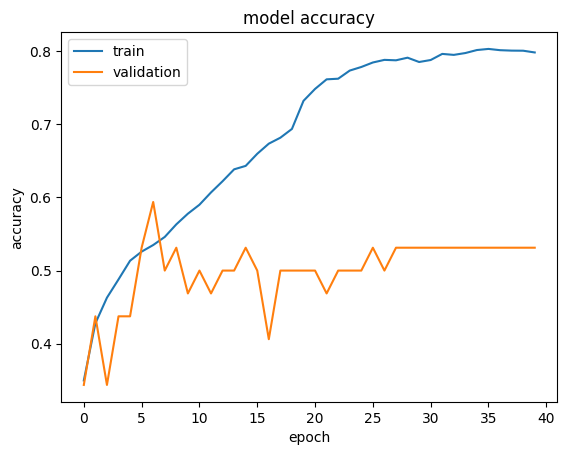

In [47]:
plt.plot(history_resnet.history["accuracy"])
plt.plot(history_resnet.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the ResNet Model**


In [48]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_resnet_model.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")


1/4 [======>.......................] - ETA: 1s - loss: 1.3141 - accuracy: 0.6562


4/4 [==============================] - 0s 6ms/step - loss: 1.2187 - accuracy: 0.5781


Loss: 1.2187273502349854, Accuracy: 0.578125


### **Plotting Confusion Matrix**



1/4 [======>.......................] - ETA: 1s


4/4 [==============================] - 0s 6ms/step


              precision    recall  f1-score   support

       happy       0.53      0.66      0.58        32
     neutral       0.42      0.50      0.46        32
         sad       0.50      0.31      0.38        32
    surprise       0.90      0.84      0.87        32

    accuracy                           0.58       128
   macro avg       0.59      0.58      0.57       128
weighted avg       0.59      0.58      0.57       128



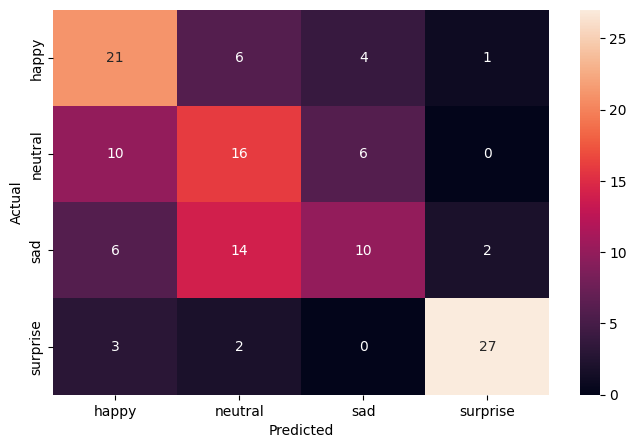

In [49]:
pred_probabilities = new_resnet_model.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:\_\_**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**


## **EfficientNet Model**


In [50]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [51]:
efficient_model = EfficientNetB0(
    weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers)
)
# Making all the layers of the efficient_model model non-trainable. i.e. freezing them
for layer in efficient_model.layers:
    layer.trainable = False

efficient_model.summary()

Model: "efficientnetb0"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            


 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             


 normalization (Normalizati  (None, 48, 48, 3)            7         ['rescaling[0][0]']           


 on)                                                                                              


 rescaling_1 (Rescaling)     (None, 48, 48, 3)            0         ['normalization[0][0]']       


 stem_conv_pad (ZeroPadding  (None, 49, 49, 3)            0         ['rescaling_1[0][0]']         


 2D)                                                                                              


 stem_conv (Conv2D)          (None, 24, 24, 32)           864       ['stem_conv_pad[0][0]']       


 stem_bn (BatchNormalizatio  (None, 24, 24, 32)           128       ['stem_conv[0][0]']           


 n)                                                                                               


 stem_activation (Activatio  (None, 24, 24, 32)           0         ['stem_bn[0][0]']             


 n)                                                                                               


 block1a_dwconv (DepthwiseC  (None, 24, 24, 32)           288       ['stem_activation[0][0]']     


 onv2D)                                                                                           


 block1a_bn (BatchNormaliza  (None, 24, 24, 32)           128       ['block1a_dwconv[0][0]']      


 tion)                                                                                            


 block1a_activation (Activa  (None, 24, 24, 32)           0         ['block1a_bn[0][0]']          


 tion)                                                                                            


 block1a_se_squeeze (Global  (None, 32)                   0         ['block1a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block1a_se_reshape (Reshap  (None, 1, 1, 32)             0         ['block1a_se_squeeze[0][0]']  


 e)                                                                                               


 block1a_se_reduce (Conv2D)  (None, 1, 1, 8)              264       ['block1a_se_reshape[0][0]']  


 block1a_se_expand (Conv2D)  (None, 1, 1, 32)             288       ['block1a_se_reduce[0][0]']   


 block1a_se_excite (Multipl  (None, 24, 24, 32)           0         ['block1a_activation[0][0]',  


 y)                                                                  'block1a_se_expand[0][0]']   


 block1a_project_conv (Conv  (None, 24, 24, 16)           512       ['block1a_se_excite[0][0]']   


 2D)                                                                                              


 block1a_project_bn (BatchN  (None, 24, 24, 16)           64        ['block1a_project_conv[0][0]']


 ormalization)                                                                                    


 block2a_expand_conv (Conv2  (None, 24, 24, 96)           1536      ['block1a_project_bn[0][0]']  


 D)                                                                                               


 block2a_expand_bn (BatchNo  (None, 24, 24, 96)           384       ['block2a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block2a_expand_activation   (None, 24, 24, 96)           0         ['block2a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block2a_dwconv_pad (ZeroPa  (None, 25, 25, 96)           0         ['block2a_expand_activation[0]


 dding2D)                                                           [0]']                         


 block2a_dwconv (DepthwiseC  (None, 12, 12, 96)           864       ['block2a_dwconv_pad[0][0]']  


 onv2D)                                                                                           


 block2a_bn (BatchNormaliza  (None, 12, 12, 96)           384       ['block2a_dwconv[0][0]']      


 tion)                                                                                            


 block2a_activation (Activa  (None, 12, 12, 96)           0         ['block2a_bn[0][0]']          


 tion)                                                                                            


 block2a_se_squeeze (Global  (None, 96)                   0         ['block2a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block2a_se_reshape (Reshap  (None, 1, 1, 96)             0         ['block2a_se_squeeze[0][0]']  


 e)                                                                                               


 block2a_se_reduce (Conv2D)  (None, 1, 1, 4)              388       ['block2a_se_reshape[0][0]']  


 block2a_se_expand (Conv2D)  (None, 1, 1, 96)             480       ['block2a_se_reduce[0][0]']   


 block2a_se_excite (Multipl  (None, 12, 12, 96)           0         ['block2a_activation[0][0]',  


 y)                                                                  'block2a_se_expand[0][0]']   


 block2a_project_conv (Conv  (None, 12, 12, 24)           2304      ['block2a_se_excite[0][0]']   


 2D)                                                                                              


 block2a_project_bn (BatchN  (None, 12, 12, 24)           96        ['block2a_project_conv[0][0]']


 ormalization)                                                                                    


 block2b_expand_conv (Conv2  (None, 12, 12, 144)          3456      ['block2a_project_bn[0][0]']  


 D)                                                                                               


 block2b_expand_bn (BatchNo  (None, 12, 12, 144)          576       ['block2b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block2b_expand_activation   (None, 12, 12, 144)          0         ['block2b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block2b_dwconv (DepthwiseC  (None, 12, 12, 144)          1296      ['block2b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block2b_bn (BatchNormaliza  (None, 12, 12, 144)          576       ['block2b_dwconv[0][0]']      


 tion)                                                                                            


 block2b_activation (Activa  (None, 12, 12, 144)          0         ['block2b_bn[0][0]']          


 tion)                                                                                            


 block2b_se_squeeze (Global  (None, 144)                  0         ['block2b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block2b_se_reshape (Reshap  (None, 1, 1, 144)            0         ['block2b_se_squeeze[0][0]']  


 e)                                                                                               


 block2b_se_reduce (Conv2D)  (None, 1, 1, 6)              870       ['block2b_se_reshape[0][0]']  


 block2b_se_expand (Conv2D)  (None, 1, 1, 144)            1008      ['block2b_se_reduce[0][0]']   


 block2b_se_excite (Multipl  (None, 12, 12, 144)          0         ['block2b_activation[0][0]',  


 y)                                                                  'block2b_se_expand[0][0]']   


 block2b_project_conv (Conv  (None, 12, 12, 24)           3456      ['block2b_se_excite[0][0]']   


 2D)                                                                                              


 block2b_project_bn (BatchN  (None, 12, 12, 24)           96        ['block2b_project_conv[0][0]']


 ormalization)                                                                                    


 block2b_drop (Dropout)      (None, 12, 12, 24)           0         ['block2b_project_bn[0][0]']  


 block2b_add (Add)           (None, 12, 12, 24)           0         ['block2b_drop[0][0]',        


                                                                     'block2a_project_bn[0][0]']  


 block3a_expand_conv (Conv2  (None, 12, 12, 144)          3456      ['block2b_add[0][0]']         


 D)                                                                                               


 block3a_expand_bn (BatchNo  (None, 12, 12, 144)          576       ['block3a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block3a_expand_activation   (None, 12, 12, 144)          0         ['block3a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block3a_dwconv_pad (ZeroPa  (None, 15, 15, 144)          0         ['block3a_expand_activation[0]


 dding2D)                                                           [0]']                         


 block3a_dwconv (DepthwiseC  (None, 6, 6, 144)            3600      ['block3a_dwconv_pad[0][0]']  


 onv2D)                                                                                           


 block3a_bn (BatchNormaliza  (None, 6, 6, 144)            576       ['block3a_dwconv[0][0]']      


 tion)                                                                                            


 block3a_activation (Activa  (None, 6, 6, 144)            0         ['block3a_bn[0][0]']          


 tion)                                                                                            


 block3a_se_squeeze (Global  (None, 144)                  0         ['block3a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block3a_se_reshape (Reshap  (None, 1, 1, 144)            0         ['block3a_se_squeeze[0][0]']  


 e)                                                                                               


 block3a_se_reduce (Conv2D)  (None, 1, 1, 6)              870       ['block3a_se_reshape[0][0]']  


 block3a_se_expand (Conv2D)  (None, 1, 1, 144)            1008      ['block3a_se_reduce[0][0]']   


 block3a_se_excite (Multipl  (None, 6, 6, 144)            0         ['block3a_activation[0][0]',  


 y)                                                                  'block3a_se_expand[0][0]']   


 block3a_project_conv (Conv  (None, 6, 6, 40)             5760      ['block3a_se_excite[0][0]']   


 2D)                                                                                              


 block3a_project_bn (BatchN  (None, 6, 6, 40)             160       ['block3a_project_conv[0][0]']


 ormalization)                                                                                    


 block3b_expand_conv (Conv2  (None, 6, 6, 240)            9600      ['block3a_project_bn[0][0]']  


 D)                                                                                               


 block3b_expand_bn (BatchNo  (None, 6, 6, 240)            960       ['block3b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block3b_expand_activation   (None, 6, 6, 240)            0         ['block3b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block3b_dwconv (DepthwiseC  (None, 6, 6, 240)            6000      ['block3b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block3b_bn (BatchNormaliza  (None, 6, 6, 240)            960       ['block3b_dwconv[0][0]']      


 tion)                                                                                            


 block3b_activation (Activa  (None, 6, 6, 240)            0         ['block3b_bn[0][0]']          


 tion)                                                                                            


 block3b_se_squeeze (Global  (None, 240)                  0         ['block3b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block3b_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block3b_se_squeeze[0][0]']  


 e)                                                                                               


 block3b_se_reduce (Conv2D)  (None, 1, 1, 10)             2410      ['block3b_se_reshape[0][0]']  


 block3b_se_expand (Conv2D)  (None, 1, 1, 240)            2640      ['block3b_se_reduce[0][0]']   


 block3b_se_excite (Multipl  (None, 6, 6, 240)            0         ['block3b_activation[0][0]',  


 y)                                                                  'block3b_se_expand[0][0]']   


 block3b_project_conv (Conv  (None, 6, 6, 40)             9600      ['block3b_se_excite[0][0]']   


 2D)                                                                                              


 block3b_project_bn (BatchN  (None, 6, 6, 40)             160       ['block3b_project_conv[0][0]']


 ormalization)                                                                                    


 block3b_drop (Dropout)      (None, 6, 6, 40)             0         ['block3b_project_bn[0][0]']  


 block3b_add (Add)           (None, 6, 6, 40)             0         ['block3b_drop[0][0]',        


                                                                     'block3a_project_bn[0][0]']  


 block4a_expand_conv (Conv2  (None, 6, 6, 240)            9600      ['block3b_add[0][0]']         


 D)                                                                                               


 block4a_expand_bn (BatchNo  (None, 6, 6, 240)            960       ['block4a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block4a_expand_activation   (None, 6, 6, 240)            0         ['block4a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block4a_dwconv_pad (ZeroPa  (None, 7, 7, 240)            0         ['block4a_expand_activation[0]


 dding2D)                                                           [0]']                         


 block4a_dwconv (DepthwiseC  (None, 3, 3, 240)            2160      ['block4a_dwconv_pad[0][0]']  


 onv2D)                                                                                           


 block4a_bn (BatchNormaliza  (None, 3, 3, 240)            960       ['block4a_dwconv[0][0]']      


 tion)                                                                                            


 block4a_activation (Activa  (None, 3, 3, 240)            0         ['block4a_bn[0][0]']          


 tion)                                                                                            


 block4a_se_squeeze (Global  (None, 240)                  0         ['block4a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block4a_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block4a_se_squeeze[0][0]']  


 e)                                                                                               


 block4a_se_reduce (Conv2D)  (None, 1, 1, 10)             2410      ['block4a_se_reshape[0][0]']  


 block4a_se_expand (Conv2D)  (None, 1, 1, 240)            2640      ['block4a_se_reduce[0][0]']   


 block4a_se_excite (Multipl  (None, 3, 3, 240)            0         ['block4a_activation[0][0]',  


 y)                                                                  'block4a_se_expand[0][0]']   


 block4a_project_conv (Conv  (None, 3, 3, 80)             19200     ['block4a_se_excite[0][0]']   


 2D)                                                                                              


 block4a_project_bn (BatchN  (None, 3, 3, 80)             320       ['block4a_project_conv[0][0]']


 ormalization)                                                                                    


 block4b_expand_conv (Conv2  (None, 3, 3, 480)            38400     ['block4a_project_bn[0][0]']  


 D)                                                                                               


 block4b_expand_bn (BatchNo  (None, 3, 3, 480)            1920      ['block4b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block4b_expand_activation   (None, 3, 3, 480)            0         ['block4b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block4b_dwconv (DepthwiseC  (None, 3, 3, 480)            4320      ['block4b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block4b_bn (BatchNormaliza  (None, 3, 3, 480)            1920      ['block4b_dwconv[0][0]']      


 tion)                                                                                            


 block4b_activation (Activa  (None, 3, 3, 480)            0         ['block4b_bn[0][0]']          


 tion)                                                                                            


 block4b_se_squeeze (Global  (None, 480)                  0         ['block4b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block4b_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block4b_se_squeeze[0][0]']  


 e)                                                                                               


 block4b_se_reduce (Conv2D)  (None, 1, 1, 20)             9620      ['block4b_se_reshape[0][0]']  


 block4b_se_expand (Conv2D)  (None, 1, 1, 480)            10080     ['block4b_se_reduce[0][0]']   


 block4b_se_excite (Multipl  (None, 3, 3, 480)            0         ['block4b_activation[0][0]',  


 y)                                                                  'block4b_se_expand[0][0]']   


 block4b_project_conv (Conv  (None, 3, 3, 80)             38400     ['block4b_se_excite[0][0]']   


 2D)                                                                                              


 block4b_project_bn (BatchN  (None, 3, 3, 80)             320       ['block4b_project_conv[0][0]']


 ormalization)                                                                                    


 block4b_drop (Dropout)      (None, 3, 3, 80)             0         ['block4b_project_bn[0][0]']  


 block4b_add (Add)           (None, 3, 3, 80)             0         ['block4b_drop[0][0]',        


                                                                     'block4a_project_bn[0][0]']  


 block4c_expand_conv (Conv2  (None, 3, 3, 480)            38400     ['block4b_add[0][0]']         


 D)                                                                                               


 block4c_expand_bn (BatchNo  (None, 3, 3, 480)            1920      ['block4c_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block4c_expand_activation   (None, 3, 3, 480)            0         ['block4c_expand_bn[0][0]']   


 (Activation)                                                                                     


 block4c_dwconv (DepthwiseC  (None, 3, 3, 480)            4320      ['block4c_expand_activation[0]


 onv2D)                                                             [0]']                         


 block4c_bn (BatchNormaliza  (None, 3, 3, 480)            1920      ['block4c_dwconv[0][0]']      


 tion)                                                                                            


 block4c_activation (Activa  (None, 3, 3, 480)            0         ['block4c_bn[0][0]']          


 tion)                                                                                            


 block4c_se_squeeze (Global  (None, 480)                  0         ['block4c_activation[0][0]']  


 AveragePooling2D)                                                                                


 block4c_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block4c_se_squeeze[0][0]']  


 e)                                                                                               


 block4c_se_reduce (Conv2D)  (None, 1, 1, 20)             9620      ['block4c_se_reshape[0][0]']  


 block4c_se_expand (Conv2D)  (None, 1, 1, 480)            10080     ['block4c_se_reduce[0][0]']   


 block4c_se_excite (Multipl  (None, 3, 3, 480)            0         ['block4c_activation[0][0]',  


 y)                                                                  'block4c_se_expand[0][0]']   


 block4c_project_conv (Conv  (None, 3, 3, 80)             38400     ['block4c_se_excite[0][0]']   


 2D)                                                                                              


 block4c_project_bn (BatchN  (None, 3, 3, 80)             320       ['block4c_project_conv[0][0]']


 ormalization)                                                                                    


 block4c_drop (Dropout)      (None, 3, 3, 80)             0         ['block4c_project_bn[0][0]']  


 block4c_add (Add)           (None, 3, 3, 80)             0         ['block4c_drop[0][0]',        


                                                                     'block4b_add[0][0]']         


 block5a_expand_conv (Conv2  (None, 3, 3, 480)            38400     ['block4c_add[0][0]']         


 D)                                                                                               


 block5a_expand_bn (BatchNo  (None, 3, 3, 480)            1920      ['block5a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block5a_expand_activation   (None, 3, 3, 480)            0         ['block5a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block5a_dwconv (DepthwiseC  (None, 3, 3, 480)            12000     ['block5a_expand_activation[0]


 onv2D)                                                             [0]']                         


 block5a_bn (BatchNormaliza  (None, 3, 3, 480)            1920      ['block5a_dwconv[0][0]']      


 tion)                                                                                            


 block5a_activation (Activa  (None, 3, 3, 480)            0         ['block5a_bn[0][0]']          


 tion)                                                                                            


 block5a_se_squeeze (Global  (None, 480)                  0         ['block5a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block5a_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block5a_se_squeeze[0][0]']  


 e)                                                                                               


 block5a_se_reduce (Conv2D)  (None, 1, 1, 20)             9620      ['block5a_se_reshape[0][0]']  


 block5a_se_expand (Conv2D)  (None, 1, 1, 480)            10080     ['block5a_se_reduce[0][0]']   


 block5a_se_excite (Multipl  (None, 3, 3, 480)            0         ['block5a_activation[0][0]',  


 y)                                                                  'block5a_se_expand[0][0]']   


 block5a_project_conv (Conv  (None, 3, 3, 112)            53760     ['block5a_se_excite[0][0]']   


 2D)                                                                                              


 block5a_project_bn (BatchN  (None, 3, 3, 112)            448       ['block5a_project_conv[0][0]']


 ormalization)                                                                                    


 block5b_expand_conv (Conv2  (None, 3, 3, 672)            75264     ['block5a_project_bn[0][0]']  


 D)                                                                                               


 block5b_expand_bn (BatchNo  (None, 3, 3, 672)            2688      ['block5b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block5b_expand_activation   (None, 3, 3, 672)            0         ['block5b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block5b_dwconv (DepthwiseC  (None, 3, 3, 672)            16800     ['block5b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block5b_bn (BatchNormaliza  (None, 3, 3, 672)            2688      ['block5b_dwconv[0][0]']      


 tion)                                                                                            


 block5b_activation (Activa  (None, 3, 3, 672)            0         ['block5b_bn[0][0]']          


 tion)                                                                                            


 block5b_se_squeeze (Global  (None, 672)                  0         ['block5b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block5b_se_reshape (Reshap  (None, 1, 1, 672)            0         ['block5b_se_squeeze[0][0]']  


 e)                                                                                               


 block5b_se_reduce (Conv2D)  (None, 1, 1, 28)             18844     ['block5b_se_reshape[0][0]']  


 block5b_se_expand (Conv2D)  (None, 1, 1, 672)            19488     ['block5b_se_reduce[0][0]']   


 block5b_se_excite (Multipl  (None, 3, 3, 672)            0         ['block5b_activation[0][0]',  


 y)                                                                  'block5b_se_expand[0][0]']   


 block5b_project_conv (Conv  (None, 3, 3, 112)            75264     ['block5b_se_excite[0][0]']   


 2D)                                                                                              


 block5b_project_bn (BatchN  (None, 3, 3, 112)            448       ['block5b_project_conv[0][0]']


 ormalization)                                                                                    


 block5b_drop (Dropout)      (None, 3, 3, 112)            0         ['block5b_project_bn[0][0]']  


 block5b_add (Add)           (None, 3, 3, 112)            0         ['block5b_drop[0][0]',        


                                                                     'block5a_project_bn[0][0]']  


 block5c_expand_conv (Conv2  (None, 3, 3, 672)            75264     ['block5b_add[0][0]']         


 D)                                                                                               


 block5c_expand_bn (BatchNo  (None, 3, 3, 672)            2688      ['block5c_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block5c_expand_activation   (None, 3, 3, 672)            0         ['block5c_expand_bn[0][0]']   


 (Activation)                                                                                     


 block5c_dwconv (DepthwiseC  (None, 3, 3, 672)            16800     ['block5c_expand_activation[0]


 onv2D)                                                             [0]']                         


 block5c_bn (BatchNormaliza  (None, 3, 3, 672)            2688      ['block5c_dwconv[0][0]']      


 tion)                                                                                            


 block5c_activation (Activa  (None, 3, 3, 672)            0         ['block5c_bn[0][0]']          


 tion)                                                                                            


 block5c_se_squeeze (Global  (None, 672)                  0         ['block5c_activation[0][0]']  


 AveragePooling2D)                                                                                


 block5c_se_reshape (Reshap  (None, 1, 1, 672)            0         ['block5c_se_squeeze[0][0]']  


 e)                                                                                               


 block5c_se_reduce (Conv2D)  (None, 1, 1, 28)             18844     ['block5c_se_reshape[0][0]']  


 block5c_se_expand (Conv2D)  (None, 1, 1, 672)            19488     ['block5c_se_reduce[0][0]']   


 block5c_se_excite (Multipl  (None, 3, 3, 672)            0         ['block5c_activation[0][0]',  


 y)                                                                  'block5c_se_expand[0][0]']   


 block5c_project_conv (Conv  (None, 3, 3, 112)            75264     ['block5c_se_excite[0][0]']   


 2D)                                                                                              


 block5c_project_bn (BatchN  (None, 3, 3, 112)            448       ['block5c_project_conv[0][0]']


 ormalization)                                                                                    


 block5c_drop (Dropout)      (None, 3, 3, 112)            0         ['block5c_project_bn[0][0]']  


 block5c_add (Add)           (None, 3, 3, 112)            0         ['block5c_drop[0][0]',        


                                                                     'block5b_add[0][0]']         


 block6a_expand_conv (Conv2  (None, 3, 3, 672)            75264     ['block5c_add[0][0]']         


 D)                                                                                               


 block6a_expand_bn (BatchNo  (None, 3, 3, 672)            2688      ['block6a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block6a_expand_activation   (None, 3, 3, 672)            0         ['block6a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block6a_dwconv_pad (ZeroPa  (None, 7, 7, 672)            0         ['block6a_expand_activation[0]


 dding2D)                                                           [0]']                         


 block6a_dwconv (DepthwiseC  (None, 2, 2, 672)            16800     ['block6a_dwconv_pad[0][0]']  


 onv2D)                                                                                           


 block6a_bn (BatchNormaliza  (None, 2, 2, 672)            2688      ['block6a_dwconv[0][0]']      


 tion)                                                                                            


 block6a_activation (Activa  (None, 2, 2, 672)            0         ['block6a_bn[0][0]']          


 tion)                                                                                            


 block6a_se_squeeze (Global  (None, 672)                  0         ['block6a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block6a_se_reshape (Reshap  (None, 1, 1, 672)            0         ['block6a_se_squeeze[0][0]']  


 e)                                                                                               


 block6a_se_reduce (Conv2D)  (None, 1, 1, 28)             18844     ['block6a_se_reshape[0][0]']  


 block6a_se_expand (Conv2D)  (None, 1, 1, 672)            19488     ['block6a_se_reduce[0][0]']   


 block6a_se_excite (Multipl  (None, 2, 2, 672)            0         ['block6a_activation[0][0]',  


 y)                                                                  'block6a_se_expand[0][0]']   


 block6a_project_conv (Conv  (None, 2, 2, 192)            129024    ['block6a_se_excite[0][0]']   


 2D)                                                                                              


 block6a_project_bn (BatchN  (None, 2, 2, 192)            768       ['block6a_project_conv[0][0]']


 ormalization)                                                                                    


 block6b_expand_conv (Conv2  (None, 2, 2, 1152)           221184    ['block6a_project_bn[0][0]']  


 D)                                                                                               


 block6b_expand_bn (BatchNo  (None, 2, 2, 1152)           4608      ['block6b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block6b_expand_activation   (None, 2, 2, 1152)           0         ['block6b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block6b_dwconv (DepthwiseC  (None, 2, 2, 1152)           28800     ['block6b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block6b_bn (BatchNormaliza  (None, 2, 2, 1152)           4608      ['block6b_dwconv[0][0]']      


 tion)                                                                                            


 block6b_activation (Activa  (None, 2, 2, 1152)           0         ['block6b_bn[0][0]']          


 tion)                                                                                            


 block6b_se_squeeze (Global  (None, 1152)                 0         ['block6b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block6b_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6b_se_squeeze[0][0]']  


 e)                                                                                               


 block6b_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6b_se_reshape[0][0]']  


 block6b_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block6b_se_reduce[0][0]']   


 block6b_se_excite (Multipl  (None, 2, 2, 1152)           0         ['block6b_activation[0][0]',  


 y)                                                                  'block6b_se_expand[0][0]']   


 block6b_project_conv (Conv  (None, 2, 2, 192)            221184    ['block6b_se_excite[0][0]']   


 2D)                                                                                              


 block6b_project_bn (BatchN  (None, 2, 2, 192)            768       ['block6b_project_conv[0][0]']


 ormalization)                                                                                    


 block6b_drop (Dropout)      (None, 2, 2, 192)            0         ['block6b_project_bn[0][0]']  


 block6b_add (Add)           (None, 2, 2, 192)            0         ['block6b_drop[0][0]',        


                                                                     'block6a_project_bn[0][0]']  


 block6c_expand_conv (Conv2  (None, 2, 2, 1152)           221184    ['block6b_add[0][0]']         


 D)                                                                                               


 block6c_expand_bn (BatchNo  (None, 2, 2, 1152)           4608      ['block6c_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block6c_expand_activation   (None, 2, 2, 1152)           0         ['block6c_expand_bn[0][0]']   


 (Activation)                                                                                     


 block6c_dwconv (DepthwiseC  (None, 2, 2, 1152)           28800     ['block6c_expand_activation[0]


 onv2D)                                                             [0]']                         


 block6c_bn (BatchNormaliza  (None, 2, 2, 1152)           4608      ['block6c_dwconv[0][0]']      


 tion)                                                                                            


 block6c_activation (Activa  (None, 2, 2, 1152)           0         ['block6c_bn[0][0]']          


 tion)                                                                                            


 block6c_se_squeeze (Global  (None, 1152)                 0         ['block6c_activation[0][0]']  


 AveragePooling2D)                                                                                


 block6c_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6c_se_squeeze[0][0]']  


 e)                                                                                               


 block6c_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6c_se_reshape[0][0]']  


 block6c_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block6c_se_reduce[0][0]']   


 block6c_se_excite (Multipl  (None, 2, 2, 1152)           0         ['block6c_activation[0][0]',  


 y)                                                                  'block6c_se_expand[0][0]']   


 block6c_project_conv (Conv  (None, 2, 2, 192)            221184    ['block6c_se_excite[0][0]']   


 2D)                                                                                              


 block6c_project_bn (BatchN  (None, 2, 2, 192)            768       ['block6c_project_conv[0][0]']


 ormalization)                                                                                    


 block6c_drop (Dropout)      (None, 2, 2, 192)            0         ['block6c_project_bn[0][0]']  


 block6c_add (Add)           (None, 2, 2, 192)            0         ['block6c_drop[0][0]',        


                                                                     'block6b_add[0][0]']         


 block6d_expand_conv (Conv2  (None, 2, 2, 1152)           221184    ['block6c_add[0][0]']         


 D)                                                                                               


 block6d_expand_bn (BatchNo  (None, 2, 2, 1152)           4608      ['block6d_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block6d_expand_activation   (None, 2, 2, 1152)           0         ['block6d_expand_bn[0][0]']   


 (Activation)                                                                                     


 block6d_dwconv (DepthwiseC  (None, 2, 2, 1152)           28800     ['block6d_expand_activation[0]


 onv2D)                                                             [0]']                         


 block6d_bn (BatchNormaliza  (None, 2, 2, 1152)           4608      ['block6d_dwconv[0][0]']      


 tion)                                                                                            


 block6d_activation (Activa  (None, 2, 2, 1152)           0         ['block6d_bn[0][0]']          


 tion)                                                                                            


 block6d_se_squeeze (Global  (None, 1152)                 0         ['block6d_activation[0][0]']  


 AveragePooling2D)                                                                                


 block6d_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6d_se_squeeze[0][0]']  


 e)                                                                                               


 block6d_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6d_se_reshape[0][0]']  


 block6d_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block6d_se_reduce[0][0]']   


 block6d_se_excite (Multipl  (None, 2, 2, 1152)           0         ['block6d_activation[0][0]',  


 y)                                                                  'block6d_se_expand[0][0]']   


 block6d_project_conv (Conv  (None, 2, 2, 192)            221184    ['block6d_se_excite[0][0]']   


 2D)                                                                                              


 block6d_project_bn (BatchN  (None, 2, 2, 192)            768       ['block6d_project_conv[0][0]']


 ormalization)                                                                                    


 block6d_drop (Dropout)      (None, 2, 2, 192)            0         ['block6d_project_bn[0][0]']  


 block6d_add (Add)           (None, 2, 2, 192)            0         ['block6d_drop[0][0]',        


                                                                     'block6c_add[0][0]']         


 block7a_expand_conv (Conv2  (None, 2, 2, 1152)           221184    ['block6d_add[0][0]']         


 D)                                                                                               


 block7a_expand_bn (BatchNo  (None, 2, 2, 1152)           4608      ['block7a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block7a_expand_activation   (None, 2, 2, 1152)           0         ['block7a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block7a_dwconv (DepthwiseC  (None, 2, 2, 1152)           10368     ['block7a_expand_activation[0]


 onv2D)                                                             [0]']                         


 block7a_bn (BatchNormaliza  (None, 2, 2, 1152)           4608      ['block7a_dwconv[0][0]']      


 tion)                                                                                            


 block7a_activation (Activa  (None, 2, 2, 1152)           0         ['block7a_bn[0][0]']          


 tion)                                                                                            


 block7a_se_squeeze (Global  (None, 1152)                 0         ['block7a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block7a_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block7a_se_squeeze[0][0]']  


 e)                                                                                               


 block7a_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block7a_se_reshape[0][0]']  


 block7a_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block7a_se_reduce[0][0]']   


 block7a_se_excite (Multipl  (None, 2, 2, 1152)           0         ['block7a_activation[0][0]',  


 y)                                                                  'block7a_se_expand[0][0]']   


 block7a_project_conv (Conv  (None, 2, 2, 320)            368640    ['block7a_se_excite[0][0]']   


 2D)                                                                                              


 block7a_project_bn (BatchN  (None, 2, 2, 320)            1280      ['block7a_project_conv[0][0]']


 ormalization)                                                                                    


 top_conv (Conv2D)           (None, 2, 2, 1280)           409600    ['block7a_project_bn[0][0]']  


 top_bn (BatchNormalization  (None, 2, 2, 1280)           5120      ['top_conv[0][0]']            


 )                                                                                                


 top_activation (Activation  (None, 2, 2, 1280)           0         ['top_bn[0][0]']              


 )                                                                                                


Total params: 4049571 (15.45 MB)


Trainable params: 0 (0.00 Byte)


Non-trainable params: 4049571 (15.45 MB)


__________________________________________________________________________________________________


### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.


In [52]:
new_efficient_model = Sequential()
new_efficient_model.add(efficient_model)

# Reduces each feature map to a single value by averaging all elements
new_efficient_model.add(GlobalAveragePooling2D())

# Adding a dense output layer
new_efficient_model.add(Dense(256, activation="relu"))
new_efficient_model.add(Dropout(0.3))
new_efficient_model.add(Dense(64, activation="relu"))
new_efficient_model.add(Dropout(0.3))
new_efficient_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the Model**


In [53]:
new_efficient_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_efficient_model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 efficientnetb0 (Functional  (None, 2, 2, 1280)        4049571   


 )                                                               


 global_average_pooling2d (  (None, 1280)              0         


 GlobalAveragePooling2D)                                         


 dense (Dense)               (None, 256)               327936    


 dropout (Dropout)           (None, 256)               0         


 dense_1 (Dense)             (None, 64)                16448     


 dropout_1 (Dropout)         (None, 64)                0         


 dense_2 (Dense)             (None, 4)                 260       


Total params: 4394215 (16.76 MB)


Trainable params: 344644 (1.31 MB)


Non-trainable params: 4049571 (15.45 MB)


_________________________________________________________________


In [54]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_efficient_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_efficient = new_efficient_model.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[reduce_lr],
)

Epoch 1/40



  1/473 [..............................] - ETA: 26:22 - loss: 1.4331 - accuracy: 0.2188


 11/473 [..............................] - ETA: 2s - loss: 1.4219 - accuracy: 0.2614   


 20/473 [>.............................] - ETA: 2s - loss: 1.4101 - accuracy: 0.2766


 30/473 [>.............................] - ETA: 2s - loss: 1.4028 - accuracy: 0.2760


 40/473 [=>............................] - ETA: 2s - loss: 1.3991 - accuracy: 0.2812


 50/473 [==>...........................] - ETA: 2s - loss: 1.3988 - accuracy: 0.2819


 61/473 [==>...........................] - ETA: 2s - loss: 1.3972 - accuracy: 0.2874


 70/473 [===>..........................] - ETA: 2s - loss: 1.3943 - accuracy: 0.2888


 81/473 [====>.........................] - ETA: 2s - loss: 1.3964 - accuracy: 0.2820


 92/473 [====>.........................] - ETA: 1s - loss: 1.3969 - accuracy: 0.2785


102/473 [=====>........................] - ETA: 1s - loss: 1.3990 - accuracy: 0.2748


112/473 [======>.......................] - ETA: 1s - loss: 1.4003 - accuracy: 0.2723


122/473 [======>.......................] - ETA: 1s - loss: 1.3994 - accuracy: 0.2741


132/473 [=======>......................] - ETA: 1s - loss: 1.4000 - accuracy: 0.2696


142/473 [========>.....................] - ETA: 1s - loss: 1.3990 - accuracy: 0.2713


152/473 [========>.....................] - ETA: 1s - loss: 1.3984 - accuracy: 0.2704


161/473 [=========>....................] - ETA: 1s - loss: 1.3981 - accuracy: 0.2700


171/473 [=========>....................] - ETA: 1s - loss: 1.3975 - accuracy: 0.2705


181/473 [==========>...................] - ETA: 1s - loss: 1.3971 - accuracy: 0.2711


191/473 [===========>..................] - ETA: 1s - loss: 1.3971 - accuracy: 0.2698


200/473 [===========>..................] - ETA: 1s - loss: 1.3965 - accuracy: 0.2711


209/473 [============>.................] - ETA: 1s - loss: 1.3964 - accuracy: 0.2692


216/473 [============>.................] - ETA: 1s - loss: 1.3960 - accuracy: 0.2693


224/473 [=============>................] - ETA: 1s - loss: 1.3957 - accuracy: 0.2699


231/473 [=============>................] - ETA: 1s - loss: 1.3955 - accuracy: 0.2699


241/473 [==============>...............] - ETA: 1s - loss: 1.3948 - accuracy: 0.2694


251/473 [==============>...............] - ETA: 1s - loss: 1.3943 - accuracy: 0.2685


262/473 [===============>..............] - ETA: 1s - loss: 1.3944 - accuracy: 0.2673


272/473 [================>.............] - ETA: 1s - loss: 1.3939 - accuracy: 0.2676


282/473 [================>.............] - ETA: 1s - loss: 1.3935 - accuracy: 0.2674


292/473 [=================>............] - ETA: 1s - loss: 1.3933 - accuracy: 0.2669


302/473 [==================>...........] - ETA: 0s - loss: 1.3926 - accuracy: 0.2688


311/473 [==================>...........] - ETA: 0s - loss: 1.3924 - accuracy: 0.2680


321/473 [===================>..........] - ETA: 0s - loss: 1.3924 - accuracy: 0.2664


331/473 [===================>..........] - ETA: 0s - loss: 1.3924 - accuracy: 0.2652


341/473 [====================>.........] - ETA: 0s - loss: 1.3922 - accuracy: 0.2649


351/473 [=====================>........] - ETA: 0s - loss: 1.3921 - accuracy: 0.2652


359/473 [=====================>........] - ETA: 0s - loss: 1.3919 - accuracy: 0.2642


368/473 [======================>.......] - ETA: 0s - loss: 1.3917 - accuracy: 0.2637


379/473 [=======================>......] - ETA: 0s - loss: 1.3916 - accuracy: 0.2643


389/473 [=======================>......] - ETA: 0s - loss: 1.3915 - accuracy: 0.2633


398/473 [========================>.....] - ETA: 0s - loss: 1.3912 - accuracy: 0.2638


407/473 [========================>.....] - ETA: 0s - loss: 1.3911 - accuracy: 0.2629


417/473 [=========================>....] - ETA: 0s - loss: 1.3909 - accuracy: 0.2628


427/473 [==========================>...] - ETA: 0s - loss: 1.3909 - accuracy: 0.2633


437/473 [==========================>...] - ETA: 0s - loss: 1.3907 - accuracy: 0.2635


447/473 [===========================>..] - ETA: 0s - loss: 1.3905 - accuracy: 0.2633


458/473 [============================>.] - ETA: 0s - loss: 1.3903 - accuracy: 0.2637


468/473 [============================>.] - ETA: 0s - loss: 1.3903 - accuracy: 0.2638


473/473 [==============================] - 7s 7ms/step - loss: 1.3902 - accuracy: 0.2639 - val_loss: 1.3779 - val_accuracy: 0.2500 - lr: 5.0000e-04


Epoch 2/40



  1/473 [..............................] - ETA: 7s - loss: 1.3779 - accuracy: 0.2812


 12/473 [..............................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2734


 22/473 [>.............................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2784


 33/473 [=>............................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2538


 44/473 [=>............................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2628


 54/473 [==>...........................] - ETA: 2s - loss: 1.3851 - accuracy: 0.2564


 64/473 [===>..........................] - ETA: 2s - loss: 1.3848 - accuracy: 0.2559


 74/473 [===>..........................] - ETA: 2s - loss: 1.3842 - accuracy: 0.2593


 84/473 [====>.........................] - ETA: 1s - loss: 1.3841 - accuracy: 0.2582


 94/473 [====>.........................] - ETA: 1s - loss: 1.3841 - accuracy: 0.2560


102/473 [=====>........................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2549


111/473 [======>.......................] - ETA: 1s - loss: 1.3845 - accuracy: 0.2531


121/473 [======>.......................] - ETA: 1s - loss: 1.3843 - accuracy: 0.2518


131/473 [=======>......................] - ETA: 1s - loss: 1.3845 - accuracy: 0.2541


140/473 [=======>......................] - ETA: 1s - loss: 1.3843 - accuracy: 0.2558


149/473 [========>.....................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2563


158/473 [=========>....................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2589


168/473 [=========>....................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2593


177/473 [==========>...................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2588


187/473 [==========>...................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2570


197/473 [===========>..................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2567


206/473 [============>.................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2562


215/473 [============>.................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2567


225/473 [=============>................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2574


235/473 [=============>................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2565


245/473 [==============>...............] - ETA: 1s - loss: 1.3834 - accuracy: 0.2578


255/473 [===============>..............] - ETA: 1s - loss: 1.3835 - accuracy: 0.2577


265/473 [===============>..............] - ETA: 1s - loss: 1.3835 - accuracy: 0.2579


275/473 [================>.............] - ETA: 1s - loss: 1.3833 - accuracy: 0.2577


285/473 [=================>............] - ETA: 0s - loss: 1.3832 - accuracy: 0.2570


295/473 [=================>............] - ETA: 0s - loss: 1.3830 - accuracy: 0.2583


305/473 [==================>...........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2584


315/473 [==================>...........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2585


325/473 [===================>..........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2590


335/473 [====================>.........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2590


345/473 [====================>.........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2583


355/473 [=====================>........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2584


365/473 [======================>.......] - ETA: 0s - loss: 1.3827 - accuracy: 0.2582


375/473 [======================>.......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2583


385/473 [=======================>......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2586


395/473 [========================>.....] - ETA: 0s - loss: 1.3826 - accuracy: 0.2595


405/473 [========================>.....] - ETA: 0s - loss: 1.3826 - accuracy: 0.2586


415/473 [=========================>....] - ETA: 0s - loss: 1.3827 - accuracy: 0.2582


426/473 [==========================>...] - ETA: 0s - loss: 1.3825 - accuracy: 0.2592


436/473 [==========================>...] - ETA: 0s - loss: 1.3826 - accuracy: 0.2595


446/473 [===========================>..] - ETA: 0s - loss: 1.3826 - accuracy: 0.2595


456/473 [===========================>..] - ETA: 0s - loss: 1.3827 - accuracy: 0.2595


466/473 [============================>.] - ETA: 0s - loss: 1.3827 - accuracy: 0.2593


473/473 [==============================] - 3s 5ms/step - loss: 1.3827 - accuracy: 0.2591 - val_loss: 1.3762 - val_accuracy: 0.2500 - lr: 5.0000e-04


Epoch 3/40



  1/473 [..............................] - ETA: 6s - loss: 1.3795 - accuracy: 0.1875


 11/473 [..............................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2614


 21/473 [>.............................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2753


 31/473 [>.............................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2722


 42/473 [=>............................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2679


 52/473 [==>...........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2752


 61/473 [==>...........................] - ETA: 2s - loss: 1.3828 - accuracy: 0.2700


 71/473 [===>..........................] - ETA: 2s - loss: 1.3828 - accuracy: 0.2641


 81/473 [====>.........................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2685


 91/473 [====>.........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2737


100/473 [=====>........................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2700


110/473 [=====>........................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2736


120/473 [======>.......................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2729


129/473 [=======>......................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2718


139/473 [=======>......................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2709


149/473 [========>.....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2668


159/473 [=========>....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2687


169/473 [=========>....................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2692


179/473 [==========>...................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2675


189/473 [==========>...................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2649


199/473 [===========>..................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2655


208/473 [============>.................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2643


218/473 [============>.................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2642


228/473 [=============>................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2644


239/473 [==============>...............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2662


249/473 [==============>...............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2671


260/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2663


270/473 [================>.............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2672


280/473 [================>.............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2679


290/473 [=================>............] - ETA: 0s - loss: 1.3825 - accuracy: 0.2659


298/473 [=================>............] - ETA: 0s - loss: 1.3826 - accuracy: 0.2659


308/473 [==================>...........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2653


319/473 [===================>..........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2650


329/473 [===================>..........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2652


340/473 [====================>.........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2656


351/473 [=====================>........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2662


361/473 [=====================>........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2657


372/473 [======================>.......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2660


383/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2658


394/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2653


404/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2665


415/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2661


425/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2668


435/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2672


445/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2667


455/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2672


464/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2667


473/473 [==============================] - 2s 5ms/step - loss: 1.3820 - accuracy: 0.2659 - val_loss: 1.3798 - val_accuracy: 0.2500 - lr: 5.0000e-04


Epoch 4/40



  1/473 [..............................] - ETA: 6s - loss: 1.3643 - accuracy: 0.1562


 12/473 [..............................] - ETA: 2s - loss: 1.3777 - accuracy: 0.2578


 23/473 [>.............................] - ETA: 2s - loss: 1.3791 - accuracy: 0.2568


 33/473 [=>............................] - ETA: 2s - loss: 1.3805 - accuracy: 0.2604


 44/473 [=>............................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2607


 54/473 [==>...........................] - ETA: 2s - loss: 1.3805 - accuracy: 0.2616


 65/473 [===>..........................] - ETA: 2s - loss: 1.3802 - accuracy: 0.2625


 76/473 [===>..........................] - ETA: 1s - loss: 1.3793 - accuracy: 0.2595


 87/473 [====>.........................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2572


 98/473 [=====>........................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2567


108/473 [=====>........................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2581


118/473 [======>.......................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2571


128/473 [=======>......................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2598


137/473 [=======>......................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2619


146/473 [========>.....................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2624


152/473 [========>.....................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2632


159/473 [=========>....................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2638


165/473 [=========>....................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2618


172/473 [=========>....................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2598


182/473 [==========>...................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2619


192/473 [===========>..................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2643


202/473 [===========>..................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2650


212/473 [============>.................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2661


222/473 [=============>................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2656


233/473 [=============>................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2636


243/473 [==============>...............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2636


254/473 [===============>..............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2645


264/473 [===============>..............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2636


274/473 [================>.............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2624


284/473 [=================>............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2622


292/473 [=================>............] - ETA: 0s - loss: 1.3815 - accuracy: 0.2619


298/473 [=================>............] - ETA: 0s - loss: 1.3815 - accuracy: 0.2621


304/473 [==================>...........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2612


311/473 [==================>...........] - ETA: 0s - loss: 1.3812 - accuracy: 0.2622


319/473 [===================>..........] - ETA: 0s - loss: 1.3811 - accuracy: 0.2623


329/473 [===================>..........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2616


339/473 [====================>.........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2616


349/473 [=====================>........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2617


357/473 [=====================>........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2622


367/473 [======================>.......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2625


377/473 [======================>.......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2629


386/473 [=======================>......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2630


397/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2624


408/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2608


417/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2603


426/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2607


432/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2611


439/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2603


449/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2602


460/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2582


470/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2581


473/473 [==============================] - 3s 6ms/step - loss: 1.3821 - accuracy: 0.2583 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 5.0000e-04


Epoch 5/40



  1/473 [..............................] - ETA: 8s - loss: 1.3524 - accuracy: 0.2812


 12/473 [..............................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2578


 19/473 [>.............................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2632


 25/473 [>.............................] - ETA: 3s - loss: 1.3811 - accuracy: 0.2663


 31/473 [>.............................] - ETA: 3s - loss: 1.3805 - accuracy: 0.2641


 37/473 [=>............................] - ETA: 3s - loss: 1.3825 - accuracy: 0.2593


 43/473 [=>............................] - ETA: 3s - loss: 1.3837 - accuracy: 0.2558


 49/473 [==>...........................] - ETA: 3s - loss: 1.3821 - accuracy: 0.2628


 59/473 [==>...........................] - ETA: 3s - loss: 1.3834 - accuracy: 0.2638


 69/473 [===>..........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2627


 79/473 [====>.........................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2615


 89/473 [====>.........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2640


 98/473 [=====>........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2663


108/473 [=====>........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2624


118/473 [======>.......................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2640


127/473 [=======>......................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2648


133/473 [=======>......................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2655


139/473 [=======>......................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2664


145/473 [========>.....................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2649


151/473 [========>.....................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2663


159/473 [=========>....................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2679


169/473 [=========>....................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2646


180/473 [==========>...................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2651


190/473 [===========>..................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2643


200/473 [===========>..................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2639


209/473 [============>.................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2658


219/473 [============>.................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2648


230/473 [=============>................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2647


240/473 [==============>...............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2628


247/473 [==============>...............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2613


255/473 [===============>..............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2619


266/473 [===============>..............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2609


276/473 [================>.............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2628


287/473 [=================>............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2631


297/473 [=================>............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2628


308/473 [==================>...........] - ETA: 1s - loss: 1.3824 - accuracy: 0.2622


318/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2611


328/473 [===================>..........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2618


338/473 [====================>.........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2621


349/473 [=====================>........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2621


360/473 [=====================>........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2614


370/473 [======================>.......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2606


381/473 [=======================>......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2597


391/473 [=======================>......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2594


401/473 [========================>.....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2599


410/473 [=========================>....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2608


420/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2609


431/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2610


441/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2609


451/473 [===========================>..] - ETA: 0s - loss: 1.3825 - accuracy: 0.2605


461/473 [============================>.] - ETA: 0s - loss: 1.3824 - accuracy: 0.2614


470/473 [============================>.] - ETA: 0s - loss: 1.3823 - accuracy: 0.2620


473/473 [==============================] - 3s 6ms/step - loss: 1.3822 - accuracy: 0.2619 - val_loss: 1.3783 - val_accuracy: 0.0625 - lr: 5.0000e-04


Epoch 6/40



  1/473 [..............................] - ETA: 7s - loss: 1.3605 - accuracy: 0.3125


 11/473 [..............................] - ETA: 2s - loss: 1.3775 - accuracy: 0.2756


 22/473 [>.............................] - ETA: 2s - loss: 1.3805 - accuracy: 0.2656


 31/473 [>.............................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2560


 42/473 [=>............................] - ETA: 2s - loss: 1.3829 - accuracy: 0.2537


 53/473 [==>...........................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2588


 63/473 [==>...........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2634


 73/473 [===>..........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2663


 84/473 [====>.........................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2604


 94/473 [====>.........................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2620


104/473 [=====>........................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2617


113/473 [======>.......................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2611


122/473 [======>.......................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2608


128/473 [=======>......................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2607


137/473 [=======>......................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2623


148/473 [========>.....................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2665


159/473 [=========>....................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2685


169/473 [=========>....................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2674


179/473 [==========>...................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2683


188/473 [==========>...................] - ETA: 1s - loss: 1.3802 - accuracy: 0.2694


195/473 [===========>..................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2675


202/473 [===========>..................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2676


210/473 [============>.................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2683


220/473 [============>.................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2683


231/473 [=============>................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2683


242/473 [==============>...............] - ETA: 1s - loss: 1.3803 - accuracy: 0.2698


253/473 [===============>..............] - ETA: 1s - loss: 1.3804 - accuracy: 0.2711


264/473 [===============>..............] - ETA: 1s - loss: 1.3805 - accuracy: 0.2701


275/473 [================>.............] - ETA: 1s - loss: 1.3803 - accuracy: 0.2705


285/473 [=================>............] - ETA: 1s - loss: 1.3805 - accuracy: 0.2688


295/473 [=================>............] - ETA: 0s - loss: 1.3807 - accuracy: 0.2687


305/473 [==================>...........] - ETA: 0s - loss: 1.3805 - accuracy: 0.2694


316/473 [===================>..........] - ETA: 0s - loss: 1.3807 - accuracy: 0.2685


327/473 [===================>..........] - ETA: 0s - loss: 1.3806 - accuracy: 0.2680


337/473 [====================>.........] - ETA: 0s - loss: 1.3806 - accuracy: 0.2676


346/473 [====================>.........] - ETA: 0s - loss: 1.3808 - accuracy: 0.2670


353/473 [=====================>........] - ETA: 0s - loss: 1.3809 - accuracy: 0.2674


362/473 [=====================>........] - ETA: 0s - loss: 1.3811 - accuracy: 0.2664


370/473 [======================>.......] - ETA: 0s - loss: 1.3811 - accuracy: 0.2666


380/473 [=======================>......] - ETA: 0s - loss: 1.3812 - accuracy: 0.2665


390/473 [=======================>......] - ETA: 0s - loss: 1.3812 - accuracy: 0.2664


400/473 [========================>.....] - ETA: 0s - loss: 1.3814 - accuracy: 0.2667


410/473 [=========================>....] - ETA: 0s - loss: 1.3813 - accuracy: 0.2669


419/473 [=========================>....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2657


429/473 [==========================>...] - ETA: 0s - loss: 1.3816 - accuracy: 0.2665


439/473 [==========================>...] - ETA: 0s - loss: 1.3816 - accuracy: 0.2662


449/473 [===========================>..] - ETA: 0s - loss: 1.3816 - accuracy: 0.2654


459/473 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.2655


470/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2657


473/473 [==============================] - 3s 5ms/step - loss: 1.3818 - accuracy: 0.2655 - val_loss: 1.3763 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 7/40



  1/473 [..............................] - ETA: 6s - loss: 1.3853 - accuracy: 0.3750


 12/473 [..............................] - ETA: 2s - loss: 1.3832 - accuracy: 0.2786


 22/473 [>.............................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2841


 31/473 [>.............................] - ETA: 2s - loss: 1.3854 - accuracy: 0.2631


 40/473 [=>............................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2617


 50/473 [==>...........................] - ETA: 2s - loss: 1.3838 - accuracy: 0.2681


 60/473 [==>...........................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2661


 70/473 [===>..........................] - ETA: 2s - loss: 1.3848 - accuracy: 0.2683


 79/473 [====>.........................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2638


 89/473 [====>.........................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2633


100/473 [=====>........................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2653


110/473 [=====>........................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2668


120/473 [======>.......................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2677


130/473 [=======>......................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2666


140/473 [=======>......................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2661


150/473 [========>.....................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2669


160/473 [=========>....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2707


171/473 [=========>....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2701


181/473 [==========>...................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2718


191/473 [===========>..................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2700


201/473 [===========>..................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2683


211/473 [============>.................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2658


221/473 [=============>................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2660


231/473 [=============>................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2654


241/473 [==============>...............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2654


252/473 [==============>...............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2646


262/473 [===============>..............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2643


273/473 [================>.............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2641


283/473 [================>.............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2631


293/473 [=================>............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2634


303/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2617


313/473 [==================>...........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2616


323/473 [===================>..........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2608


333/473 [====================>.........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2607


343/473 [====================>.........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2603


353/473 [=====================>........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2593


363/473 [======================>.......] - ETA: 0s - loss: 1.3824 - accuracy: 0.2597


373/473 [======================>.......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2600


383/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2597


392/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2592


402/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2602


410/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2593


420/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2592


430/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2607


440/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2607


450/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2599


460/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2593


470/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2597


Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.



473/473 [==============================] - 2s 5ms/step - loss: 1.3822 - accuracy: 0.2596 - val_loss: 1.3778 - val_accuracy: 0.2500 - lr: 5.0000e-04


Epoch 8/40



  1/473 [..............................] - ETA: 6s - loss: 1.4040 - accuracy: 0.3125


 12/473 [..............................] - ETA: 2s - loss: 1.3891 - accuracy: 0.2812


 23/473 [>.............................] - ETA: 2s - loss: 1.3862 - accuracy: 0.2677


 33/473 [=>............................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2727


 42/473 [=>............................] - ETA: 2s - loss: 1.3832 - accuracy: 0.2746


 51/473 [==>...........................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2702


 61/473 [==>...........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2761


 70/473 [===>..........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2772


 80/473 [====>.........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2783


 90/473 [====>.........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2787


100/473 [=====>........................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2783


107/473 [=====>........................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2767


112/473 [======>.......................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2775


119/473 [======>.......................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2766


129/473 [=======>......................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2736


139/473 [=======>......................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2723


149/473 [========>.....................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2719


160/473 [=========>....................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2712


168/473 [=========>....................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2715


178/473 [==========>...................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2697


188/473 [==========>...................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2710


199/473 [===========>..................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2694


209/473 [============>.................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2695


220/473 [============>.................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2708


231/473 [=============>................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2706


242/473 [==============>...............] - ETA: 1s - loss: 1.3810 - accuracy: 0.2701


252/473 [==============>...............] - ETA: 1s - loss: 1.3812 - accuracy: 0.2703


263/473 [===============>..............] - ETA: 1s - loss: 1.3811 - accuracy: 0.2698


273/473 [================>.............] - ETA: 1s - loss: 1.3811 - accuracy: 0.2698


280/473 [================>.............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2684


290/473 [=================>............] - ETA: 0s - loss: 1.3814 - accuracy: 0.2664


300/473 [==================>...........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2649


311/473 [==================>...........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2648


322/473 [===================>..........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2647


332/473 [====================>.........] - ETA: 0s - loss: 1.3812 - accuracy: 0.2648


340/473 [====================>.........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2645


349/473 [=====================>........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2653


357/473 [=====================>........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2651


365/473 [======================>.......] - ETA: 0s - loss: 1.3815 - accuracy: 0.2664


376/473 [======================>.......] - ETA: 0s - loss: 1.3815 - accuracy: 0.2664


387/473 [=======================>......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2664


398/473 [========================>.....] - ETA: 0s - loss: 1.3814 - accuracy: 0.2663


406/473 [========================>.....] - ETA: 0s - loss: 1.3813 - accuracy: 0.2665


412/473 [=========================>....] - ETA: 0s - loss: 1.3814 - accuracy: 0.2669


419/473 [=========================>....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2664


426/473 [==========================>...] - ETA: 0s - loss: 1.3814 - accuracy: 0.2667


432/473 [==========================>...] - ETA: 0s - loss: 1.3816 - accuracy: 0.2657


441/473 [==========================>...] - ETA: 0s - loss: 1.3815 - accuracy: 0.2662


451/473 [===========================>..] - ETA: 0s - loss: 1.3816 - accuracy: 0.2651


461/473 [============================>.] - ETA: 0s - loss: 1.3816 - accuracy: 0.2647


471/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2651


473/473 [==============================] - 3s 6ms/step - loss: 1.3818 - accuracy: 0.2650 - val_loss: 1.3773 - val_accuracy: 0.2500 - lr: 1.0000e-04


Epoch 9/40



  1/473 [..............................] - ETA: 8s - loss: 1.3791 - accuracy: 0.2500


  9/473 [..............................] - ETA: 3s - loss: 1.3800 - accuracy: 0.2014


 16/473 [>.............................] - ETA: 3s - loss: 1.3830 - accuracy: 0.2402


 22/473 [>.............................] - ETA: 3s - loss: 1.3800 - accuracy: 0.2514


 32/473 [=>............................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2480


 42/473 [=>............................] - ETA: 2s - loss: 1.3832 - accuracy: 0.2448


 52/473 [==>...........................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2518


 61/473 [==>...........................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2520


 71/473 [===>..........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2570


 81/473 [====>.........................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2546


 92/473 [====>.........................] - ETA: 2s - loss: 1.3808 - accuracy: 0.2599


101/473 [=====>........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2574


108/473 [=====>........................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2555


115/473 [======>.......................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2590


125/473 [======>.......................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2585


134/473 [=======>......................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2579


145/473 [========>.....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2586


155/473 [========>.....................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2556


165/473 [=========>....................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2576


175/473 [==========>...................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2568


185/473 [==========>...................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2559


195/473 [===========>..................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2561


205/473 [============>.................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2578


213/473 [============>.................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2556


223/473 [=============>................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2553


232/473 [=============>................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2547


242/473 [==============>...............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2542


251/473 [==============>...............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2546


258/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2542


264/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2546


271/473 [================>.............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2544


278/473 [================>.............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2543


285/473 [=================>............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2555


292/473 [=================>............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2554


298/473 [=================>............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2554


307/473 [==================>...........] - ETA: 1s - loss: 1.3812 - accuracy: 0.2551


317/473 [===================>..........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2546


328/473 [===================>..........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2545


338/473 [====================>.........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2551


348/473 [=====================>........] - ETA: 0s - loss: 1.3812 - accuracy: 0.2558


358/473 [=====================>........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2562


368/473 [======================>.......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2559


378/473 [======================>.......] - ETA: 0s - loss: 1.3813 - accuracy: 0.2564


388/473 [=======================>......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2568


398/473 [========================>.....] - ETA: 0s - loss: 1.3813 - accuracy: 0.2578


407/473 [========================>.....] - ETA: 0s - loss: 1.3814 - accuracy: 0.2575


416/473 [=========================>....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2574


424/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2574


431/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2570


439/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2575


446/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2576


453/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2578


461/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2572


469/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2571


473/473 [==============================] - 3s 6ms/step - loss: 1.3822 - accuracy: 0.2567 - val_loss: 1.3776 - val_accuracy: 0.2500 - lr: 1.0000e-04


Epoch 10/40



  1/473 [..............................] - ETA: 7s - loss: 1.3839 - accuracy: 0.2812


 11/473 [..............................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2614


 20/473 [>.............................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2906


 30/473 [>.............................] - ETA: 2s - loss: 1.3847 - accuracy: 0.2823


 39/473 [=>............................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2732


 46/473 [=>............................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2677


 55/473 [==>...........................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2665


 65/473 [===>..........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2606


 74/473 [===>..........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2606


 83/473 [====>.........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2602


 94/473 [====>.........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2553


105/473 [=====>........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2568


115/473 [======>.......................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2579


126/473 [======>.......................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2602


137/473 [=======>......................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2616


148/473 [========>.....................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2642


159/473 [=========>....................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2644


168/473 [=========>....................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2625


176/473 [==========>...................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2630


184/473 [==========>...................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2633


192/473 [===========>..................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2678


203/473 [===========>..................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2671


214/473 [============>.................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2670


224/473 [=============>................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2689


234/473 [=============>................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2686


244/473 [==============>...............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2681


255/473 [===============>..............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2669


266/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2654


275/473 [================>.............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2639


285/473 [=================>............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2627


295/473 [=================>............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2636


305/473 [==================>...........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2638


316/473 [===================>..........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2641


327/473 [===================>..........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2623


338/473 [====================>.........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2610


347/473 [=====================>........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2599


358/473 [=====================>........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2584


368/473 [======================>.......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2579


379/473 [=======================>......] - ETA: 0s - loss: 1.3824 - accuracy: 0.2583


390/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2599


401/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2606


411/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2607


421/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2605


431/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2607


441/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2602


451/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2610


461/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2621


470/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2624


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2624 - val_loss: 1.3777 - val_accuracy: 0.2500 - lr: 1.0000e-04


Epoch 11/40



  1/473 [..............................] - ETA: 7s - loss: 1.3849 - accuracy: 0.0938


 11/473 [..............................] - ETA: 2s - loss: 1.3775 - accuracy: 0.2358


 21/473 [>.............................] - ETA: 2s - loss: 1.3786 - accuracy: 0.2485


 30/473 [>.............................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2542


 41/473 [=>............................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2490


 52/473 [==>...........................] - ETA: 2s - loss: 1.3809 - accuracy: 0.2553


 60/473 [==>...........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2536


 66/473 [===>..........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2518


 73/473 [===>..........................] - ETA: 2s - loss: 1.3829 - accuracy: 0.2503


 80/473 [====>.........................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2483


 90/473 [====>.........................] - ETA: 2s - loss: 1.3829 - accuracy: 0.2569


100/473 [=====>........................] - ETA: 2s - loss: 1.3835 - accuracy: 0.2543


110/473 [=====>........................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2559


121/473 [======>.......................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2598


131/473 [=======>......................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2610


141/473 [=======>......................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2609


151/473 [========>.....................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2608


162/473 [=========>....................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2635


172/473 [=========>....................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2640


182/473 [==========>...................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2644


192/473 [===========>..................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2652


203/473 [===========>..................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2660


214/473 [============>.................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2661


224/473 [=============>................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2662


234/473 [=============>................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2651


245/473 [==============>...............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2664


255/473 [===============>..............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2663


266/473 [===============>..............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2649


276/473 [================>.............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2658


286/473 [=================>............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2639


296/473 [=================>............] - ETA: 0s - loss: 1.3816 - accuracy: 0.2641


306/473 [==================>...........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2634


316/473 [===================>..........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2639


326/473 [===================>..........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2634


336/473 [====================>.........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2627


346/473 [====================>.........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2637


356/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2623


366/473 [======================>.......] - ETA: 0s - loss: 1.3816 - accuracy: 0.2619


377/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2615


387/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2617


397/473 [========================>.....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2619


405/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2617


412/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2623


419/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2621


426/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2622


433/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2626


443/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2630


453/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2626


463/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2628


473/473 [==============================] - ETA: 0s - loss: 1.3819 - accuracy: 0.2621


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2621 - val_loss: 1.3779 - val_accuracy: 0.0625 - lr: 1.0000e-04


Epoch 12/40



  1/473 [..............................] - ETA: 7s - loss: 1.3568 - accuracy: 0.3125


 12/473 [..............................] - ETA: 2s - loss: 1.3737 - accuracy: 0.2396


 22/473 [>.............................] - ETA: 2s - loss: 1.3773 - accuracy: 0.2457


 32/473 [=>............................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2471


 40/473 [=>............................] - ETA: 2s - loss: 1.3847 - accuracy: 0.2430


 46/473 [=>............................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2473


 53/473 [==>...........................] - ETA: 2s - loss: 1.3838 - accuracy: 0.2571


 60/473 [==>...........................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2542


 70/473 [===>..........................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2571


 81/473 [====>.........................] - ETA: 2s - loss: 1.3829 - accuracy: 0.2589


 91/473 [====>.........................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2637


102/473 [=====>........................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2623


112/473 [======>.......................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2640


121/473 [======>.......................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2660


130/473 [=======>......................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2688


140/473 [=======>......................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2703


150/473 [========>.....................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2650


160/473 [=========>....................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2652


170/473 [=========>....................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2631


181/473 [==========>...................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2633


191/473 [===========>..................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2629


201/473 [===========>..................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2629


211/473 [============>.................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2641


222/473 [=============>................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2653


232/473 [=============>................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2660


243/473 [==============>...............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2667


254/473 [===============>..............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2660


263/473 [===============>..............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2663


273/473 [================>.............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2685


283/473 [================>.............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2673


294/473 [=================>............] - ETA: 0s - loss: 1.3823 - accuracy: 0.2674


302/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2673


309/473 [==================>...........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2675


320/473 [===================>..........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2665


329/473 [===================>..........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2667


339/473 [====================>.........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2678


350/473 [=====================>........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2670


360/473 [=====================>........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2685


369/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2687


378/473 [======================>.......] - ETA: 0s - loss: 1.3816 - accuracy: 0.2683


388/473 [=======================>......] - ETA: 0s - loss: 1.3816 - accuracy: 0.2673


398/473 [========================>.....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2671


408/473 [========================>.....] - ETA: 0s - loss: 1.3814 - accuracy: 0.2665


417/473 [=========================>....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2658


423/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2651


429/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2644


435/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2646


444/473 [===========================>..] - ETA: 0s - loss: 1.3817 - accuracy: 0.2630


454/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2617


463/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2620


473/473 [==============================] - ETA: 0s - loss: 1.3818 - accuracy: 0.2627


Epoch 12: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.



473/473 [==============================] - 3s 6ms/step - loss: 1.3818 - accuracy: 0.2627 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 1.0000e-04


Epoch 13/40



  1/473 [..............................] - ETA: 6s - loss: 1.3839 - accuracy: 0.1562


 11/473 [..............................] - ETA: 2s - loss: 1.3724 - accuracy: 0.2358


 19/473 [>.............................] - ETA: 2s - loss: 1.3764 - accuracy: 0.2500


 28/473 [>.............................] - ETA: 2s - loss: 1.3762 - accuracy: 0.2500


 35/473 [=>............................] - ETA: 2s - loss: 1.3794 - accuracy: 0.2393


 42/473 [=>............................] - ETA: 2s - loss: 1.3785 - accuracy: 0.2470


 49/473 [==>...........................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2545


 60/473 [==>...........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2495


 71/473 [===>..........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2474


 81/473 [====>.........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2539


 91/473 [====>.........................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2576


101/473 [=====>........................] - ETA: 2s - loss: 1.3809 - accuracy: 0.2599


111/473 [======>.......................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2635


121/473 [======>.......................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2678


131/473 [=======>......................] - ETA: 1s - loss: 1.3799 - accuracy: 0.2686


139/473 [=======>......................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2644


147/473 [========>.....................] - ETA: 1s - loss: 1.3798 - accuracy: 0.2638


155/473 [========>.....................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2635


161/473 [=========>....................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2632


169/473 [=========>....................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2633


176/473 [==========>...................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2630


184/473 [==========>...................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2621


194/473 [===========>..................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2614


205/473 [============>.................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2617


216/473 [============>.................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2620


226/473 [=============>................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2623


237/473 [==============>...............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2615


247/473 [==============>...............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2622


255/473 [===============>..............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2617


264/473 [===============>..............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2622


274/473 [================>.............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2630


285/473 [=================>............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2635


294/473 [=================>............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2642


304/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2618


314/473 [==================>...........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2625


324/473 [===================>..........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2630


333/473 [====================>.........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2609


343/473 [====================>.........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2608


352/473 [=====================>........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2612


362/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2616


368/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2616


375/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2618


382/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2614


391/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2626


398/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2626


405/473 [========================>.....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2633


411/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2635


416/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2634


422/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2629


427/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2630


434/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2634


440/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2631


450/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2623


460/473 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.2622


470/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2621


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2620 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 14/40



  1/473 [..............................] - ETA: 7s - loss: 1.4197 - accuracy: 0.1875


 11/473 [..............................] - ETA: 2s - loss: 1.3862 - accuracy: 0.2670


 21/473 [>.............................] - ETA: 2s - loss: 1.3887 - accuracy: 0.2708


 32/473 [=>............................] - ETA: 2s - loss: 1.3851 - accuracy: 0.2900


 42/473 [=>............................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2887


 52/473 [==>...........................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2861


 62/473 [==>...........................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2767


 73/473 [===>..........................] - ETA: 2s - loss: 1.3842 - accuracy: 0.2680


 84/473 [====>.........................] - ETA: 1s - loss: 1.3847 - accuracy: 0.2638


 94/473 [====>.........................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2670


104/473 [=====>........................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2668


115/473 [======>.......................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2668


125/473 [======>.......................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2677


135/473 [=======>......................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2664


145/473 [========>.....................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2677


155/473 [========>.....................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2671


165/473 [=========>....................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2665


176/473 [==========>...................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2656


186/473 [==========>...................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2663


197/473 [===========>..................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2648


207/473 [============>.................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2657


218/473 [============>.................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2649


228/473 [=============>................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2651


238/473 [==============>...............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2648


249/473 [==============>...............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2632


260/473 [===============>..............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2630


270/473 [================>.............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2633


278/473 [================>.............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2635


288/473 [=================>............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2632


297/473 [=================>............] - ETA: 0s - loss: 1.3826 - accuracy: 0.2625


307/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2638


316/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2639


326/473 [===================>..........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2644


336/473 [====================>.........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2662


346/473 [====================>.........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2670


356/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2672


367/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2665


378/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2674


388/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2673


398/473 [========================>.....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2673


407/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2677


417/473 [=========================>....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2673


428/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2667


438/473 [==========================>...] - ETA: 0s - loss: 1.3816 - accuracy: 0.2668


447/473 [===========================>..] - ETA: 0s - loss: 1.3817 - accuracy: 0.2661


456/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2657


463/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2649


473/473 [==============================] - ETA: 0s - loss: 1.3819 - accuracy: 0.2646


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2646 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 15/40



  1/473 [..............................] - ETA: 7s - loss: 1.3959 - accuracy: 0.2500


 11/473 [..............................] - ETA: 2s - loss: 1.3785 - accuracy: 0.2642


 21/473 [>.............................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2411


 31/473 [>.............................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2429


 41/473 [=>............................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2515


 51/473 [==>...........................] - ETA: 2s - loss: 1.3833 - accuracy: 0.2500


 60/473 [==>...........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2573


 70/473 [===>..........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2598


 77/473 [===>..........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2618


 83/473 [====>.........................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2606


 93/473 [====>.........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2570


104/473 [=====>........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2617


115/473 [======>.......................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2601


126/473 [======>.......................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2654


137/473 [=======>......................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2651


148/473 [========>.....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2661


159/473 [=========>....................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2642


170/473 [=========>....................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2612


180/473 [==========>...................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2629


191/473 [===========>..................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2643


201/473 [===========>..................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2635


211/473 [============>.................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2654


221/473 [=============>................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2644


233/473 [=============>................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2637


244/473 [==============>...............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2633


255/473 [===============>..............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2640


265/473 [===============>..............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2635


275/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2638


285/473 [=================>............] - ETA: 0s - loss: 1.3821 - accuracy: 0.2637


295/473 [=================>............] - ETA: 0s - loss: 1.3820 - accuracy: 0.2646


305/473 [==================>...........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2629


313/473 [==================>...........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2628


323/473 [===================>..........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2638


334/473 [====================>.........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2649


343/473 [====================>.........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2659


352/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2652


361/473 [=====================>........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2658


370/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2661


377/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2660


386/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2670


396/473 [========================>.....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2674


406/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2667


416/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2670


426/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2664


436/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2661


445/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2657


453/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2657


462/473 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.2659


471/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2653


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2653 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 16/40



  1/473 [..............................] - ETA: 6s - loss: 1.3712 - accuracy: 0.2500


 12/473 [..............................] - ETA: 2s - loss: 1.3876 - accuracy: 0.2578


 22/473 [>.............................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2741


 33/473 [=>............................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2699


 44/473 [=>............................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2756


 54/473 [==>...........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2876


 64/473 [===>..........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2803


 73/473 [===>..........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2787


 83/473 [====>.........................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2711


 93/473 [====>.........................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2695


103/473 [=====>........................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2737


114/473 [======>.......................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2717


125/473 [======>.......................] - ETA: 1s - loss: 1.3801 - accuracy: 0.2718


135/473 [=======>......................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2725


145/473 [========>.....................] - ETA: 1s - loss: 1.3801 - accuracy: 0.2724


154/473 [========>.....................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2723


163/473 [=========>....................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2736


174/473 [==========>...................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2750


185/473 [==========>...................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2736


196/473 [===========>..................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2720


207/473 [============>.................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2713


218/473 [============>.................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2722


228/473 [=============>................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2715


238/473 [==============>...............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2694


249/473 [==============>...............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2691


259/473 [===============>..............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2693


268/473 [===============>..............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2694


278/473 [================>.............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2696


288/473 [=================>............] - ETA: 0s - loss: 1.3825 - accuracy: 0.2691


299/473 [=================>............] - ETA: 0s - loss: 1.3823 - accuracy: 0.2692


309/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2680


319/473 [===================>..........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2676


329/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2684


339/473 [====================>.........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2695


349/473 [=====================>........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2693


357/473 [=====================>........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2690


363/473 [======================>.......] - ETA: 0s - loss: 1.3828 - accuracy: 0.2683


370/473 [======================>.......] - ETA: 0s - loss: 1.3828 - accuracy: 0.2679


377/473 [======================>.......] - ETA: 0s - loss: 1.3828 - accuracy: 0.2680


387/473 [=======================>......] - ETA: 0s - loss: 1.3827 - accuracy: 0.2689


397/473 [========================>.....] - ETA: 0s - loss: 1.3825 - accuracy: 0.2693


407/473 [========================>.....] - ETA: 0s - loss: 1.3825 - accuracy: 0.2700


416/473 [=========================>....] - ETA: 0s - loss: 1.3825 - accuracy: 0.2700


426/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2693


436/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2694


445/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2698


453/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2695


463/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2695


473/473 [==============================] - ETA: 0s - loss: 1.3818 - accuracy: 0.2686


473/473 [==============================] - 3s 5ms/step - loss: 1.3818 - accuracy: 0.2686 - val_loss: 1.3769 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 17/40



  1/473 [..............................] - ETA: 7s - loss: 1.4060 - accuracy: 0.1875


 11/473 [..............................] - ETA: 2s - loss: 1.3779 - accuracy: 0.3011


 22/473 [>.............................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2884


 32/473 [=>............................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2969


 42/473 [=>............................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2850


 49/473 [==>...........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2768


 55/473 [==>...........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2767


 61/473 [==>...........................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2736


 71/473 [===>..........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2751


 81/473 [====>.........................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2743


 91/473 [====>.........................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2771


102/473 [=====>........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2714


111/473 [======>.......................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2691


121/473 [======>.......................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2709


132/473 [=======>......................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2711


143/473 [========>.....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2732


154/473 [========>.....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2727


165/473 [=========>....................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2735


176/473 [==========>...................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2727


187/473 [==========>...................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2717


197/473 [===========>..................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2719


206/473 [============>.................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2711


213/473 [============>.................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2694


222/473 [=============>................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2696


233/473 [=============>................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2702


244/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2716


255/473 [===============>..............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2700


265/473 [===============>..............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2690


275/473 [================>.............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2682


285/473 [=================>............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2676


294/473 [=================>............] - ETA: 0s - loss: 1.3817 - accuracy: 0.2680


303/473 [==================>...........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2680


309/473 [==================>...........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2673


315/473 [==================>...........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2668


323/473 [===================>..........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2670


331/473 [===================>..........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2686


339/473 [====================>.........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2679


349/473 [=====================>........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2670


359/473 [=====================>........] - ETA: 0s - loss: 1.3812 - accuracy: 0.2676


369/473 [======================>.......] - ETA: 0s - loss: 1.3810 - accuracy: 0.2680


379/473 [=======================>......] - ETA: 0s - loss: 1.3812 - accuracy: 0.2685


390/473 [=======================>......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2676


400/473 [========================>.....] - ETA: 0s - loss: 1.3813 - accuracy: 0.2669


411/473 [=========================>....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2674


422/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2666


433/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2665


443/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2665


453/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2666


463/473 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.2670


472/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2668


Epoch 17: ReduceLROnPlateau reducing learning rate to 1e-05.



473/473 [==============================] - 3s 6ms/step - loss: 1.3817 - accuracy: 0.2667 - val_loss: 1.3769 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 18/40



  1/473 [..............................] - ETA: 7s - loss: 1.3614 - accuracy: 0.2812


 10/473 [..............................] - ETA: 2s - loss: 1.3674 - accuracy: 0.2844


 21/473 [>.............................] - ETA: 2s - loss: 1.3740 - accuracy: 0.2827


 32/473 [=>............................] - ETA: 2s - loss: 1.3762 - accuracy: 0.2788


 43/473 [=>............................] - ETA: 2s - loss: 1.3763 - accuracy: 0.2817


 53/473 [==>...........................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2804


 64/473 [===>..........................] - ETA: 2s - loss: 1.3796 - accuracy: 0.2771


 75/473 [===>..........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2794


 85/473 [====>.........................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2748


 96/473 [=====>........................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2752


106/473 [=====>........................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2776


116/473 [======>.......................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2749


126/473 [======>.......................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2762


136/473 [=======>......................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2754


147/473 [========>.....................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2743


158/473 [=========>....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2736


168/473 [=========>....................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2707


178/473 [==========>...................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2704


188/473 [==========>...................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2688


198/473 [===========>..................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2664


208/473 [============>.................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2664


218/473 [============>.................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2671


228/473 [=============>................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2680


238/473 [==============>...............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2687


249/473 [==============>...............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2690


259/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2701


269/473 [================>.............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2705


279/473 [================>.............] - ETA: 0s - loss: 1.3822 - accuracy: 0.2701


288/473 [=================>............] - ETA: 0s - loss: 1.3820 - accuracy: 0.2693


294/473 [=================>............] - ETA: 0s - loss: 1.3820 - accuracy: 0.2688


301/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2693


309/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2688


319/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2686


329/473 [===================>..........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2694


340/473 [====================>.........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2684


350/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2678


360/473 [=====================>........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2687


370/473 [======================>.......] - ETA: 0s - loss: 1.3815 - accuracy: 0.2691


380/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2698


389/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2696


397/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2692


405/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2695


413/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2695


421/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2690


430/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2691


439/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2685


447/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2680


453/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2677


460/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2678


471/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2673


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2674 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 19/40



  1/473 [..............................] - ETA: 6s - loss: 1.3851 - accuracy: 0.2188


 12/473 [..............................] - ETA: 2s - loss: 1.3883 - accuracy: 0.2656


 21/473 [>.............................] - ETA: 2s - loss: 1.3880 - accuracy: 0.2857


 27/473 [>.............................] - ETA: 2s - loss: 1.3877 - accuracy: 0.2836


 34/473 [=>............................] - ETA: 2s - loss: 1.3865 - accuracy: 0.2858


 40/473 [=>............................] - ETA: 2s - loss: 1.3863 - accuracy: 0.2883


 50/473 [==>...........................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2862


 60/473 [==>...........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2849


 70/473 [===>..........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2848


 78/473 [===>..........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2857


 84/473 [====>.........................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2835


 91/473 [====>.........................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2782


 99/473 [=====>........................] - ETA: 2s - loss: 1.3799 - accuracy: 0.2784


107/473 [=====>........................] - ETA: 2s - loss: 1.3796 - accuracy: 0.2757


118/473 [======>.......................] - ETA: 2s - loss: 1.3795 - accuracy: 0.2733


129/473 [=======>......................] - ETA: 2s - loss: 1.3801 - accuracy: 0.2696


137/473 [=======>......................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2687


144/473 [========>.....................] - ETA: 2s - loss: 1.3805 - accuracy: 0.2695


154/473 [========>.....................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2670


164/473 [=========>....................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2656


173/473 [=========>....................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2635


184/473 [==========>...................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2644


195/473 [===========>..................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2644


205/473 [============>.................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2640


215/473 [============>.................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2638


224/473 [=============>................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2648


234/473 [=============>................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2647


244/473 [==============>...............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2652


254/473 [===============>..............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2648


264/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2646


274/473 [================>.............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2653


283/473 [================>.............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2642


292/473 [=================>............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2639


303/473 [==================>...........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2639


314/473 [==================>...........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2649


325/473 [===================>..........] - ETA: 0s - loss: 1.3812 - accuracy: 0.2657


335/473 [====================>.........] - ETA: 0s - loss: 1.3811 - accuracy: 0.2653


342/473 [====================>.........] - ETA: 0s - loss: 1.3810 - accuracy: 0.2655


350/473 [=====================>........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2657


359/473 [=====================>........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2654


369/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2640


380/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2642


390/473 [=======================>......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2642


397/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2638


407/473 [========================>.....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2651


417/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2647


427/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2639


438/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2646


448/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2638


457/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2632


466/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2634


473/473 [==============================] - 3s 6ms/step - loss: 1.3820 - accuracy: 0.2636 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 20/40



  1/473 [..............................] - ETA: 6s - loss: 1.3705 - accuracy: 0.2188


 11/473 [..............................] - ETA: 2s - loss: 1.3881 - accuracy: 0.2642


 17/473 [>.............................] - ETA: 2s - loss: 1.3845 - accuracy: 0.2445


 25/473 [>.............................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2550


 36/473 [=>............................] - ETA: 2s - loss: 1.3853 - accuracy: 0.2639


 47/473 [=>............................] - ETA: 2s - loss: 1.3854 - accuracy: 0.2660


 58/473 [==>...........................] - ETA: 2s - loss: 1.3858 - accuracy: 0.2624


 68/473 [===>..........................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2610


 78/473 [===>..........................] - ETA: 2s - loss: 1.3860 - accuracy: 0.2636


 88/473 [====>.........................] - ETA: 2s - loss: 1.3867 - accuracy: 0.2638


 98/473 [=====>........................] - ETA: 2s - loss: 1.3847 - accuracy: 0.2685


109/473 [=====>........................] - ETA: 1s - loss: 1.3849 - accuracy: 0.2658


119/473 [======>.......................] - ETA: 1s - loss: 1.3844 - accuracy: 0.2644


127/473 [=======>......................] - ETA: 1s - loss: 1.3844 - accuracy: 0.2616


134/473 [=======>......................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2642


142/473 [========>.....................] - ETA: 1s - loss: 1.3842 - accuracy: 0.2643


153/473 [========>.....................] - ETA: 1s - loss: 1.3841 - accuracy: 0.2633


163/473 [=========>....................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2604


173/473 [=========>....................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2590


182/473 [==========>...................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2605


192/473 [===========>..................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2598


202/473 [===========>..................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2593


212/473 [============>.................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2593


220/473 [============>.................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2598


230/473 [=============>................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2592


240/473 [==============>...............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2608


247/473 [==============>...............] - ETA: 1s - loss: 1.3832 - accuracy: 0.2611


255/473 [===============>..............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2608


266/473 [===============>..............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2612


277/473 [================>.............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2623


288/473 [=================>............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2618


297/473 [=================>............] - ETA: 0s - loss: 1.3830 - accuracy: 0.2617


306/473 [==================>...........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2612


316/473 [===================>..........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2619


326/473 [===================>..........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2618


337/473 [====================>.........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2616


348/473 [=====================>........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2608


359/473 [=====================>........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2604


369/473 [======================>.......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2604


379/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2613


389/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2612


400/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2609


411/473 [=========================>....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2610


421/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2604


431/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2606


441/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2602


451/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2610


461/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2609


470/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2610


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2614 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 21/40



  1/473 [..............................] - ETA: 6s - loss: 1.3684 - accuracy: 0.3125


 12/473 [..............................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2448


 22/473 [>.............................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2486


 32/473 [=>............................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2539


 42/473 [=>............................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2552


 52/473 [==>...........................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2500


 62/473 [==>...........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2555


 72/473 [===>..........................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2622


 82/473 [====>.........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2626


 91/473 [====>.........................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2600


101/473 [=====>........................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2593


107/473 [=====>........................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2614


113/473 [======>.......................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2605


119/473 [======>.......................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2581


125/473 [======>.......................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2575


133/473 [=======>......................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2587


142/473 [========>.....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2570


152/473 [========>.....................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2543


162/473 [=========>....................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2569


172/473 [=========>....................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2574


183/473 [==========>...................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2561


193/473 [===========>..................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2581


203/473 [===========>..................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2592


213/473 [============>.................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2589


223/473 [=============>................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2588


233/473 [=============>................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2595


243/473 [==============>...............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2596


253/473 [===============>..............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2600


263/473 [===============>..............] - ETA: 1s - loss: 1.3830 - accuracy: 0.2609


273/473 [================>.............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2613


283/473 [================>.............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2604


293/473 [=================>............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2611


300/473 [==================>...........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2612


307/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2600


314/473 [==================>...........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2615


323/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2607


333/473 [====================>.........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2599


343/473 [====================>.........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2598


353/473 [=====================>........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2598


363/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2608


371/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2595


381/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2589


391/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2588


402/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2598


412/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2608


420/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2611


427/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2613


435/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2612


444/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2620


453/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2627


463/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2630


471/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2642


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2645 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 22/40



  1/473 [..............................] - ETA: 10s - loss: 1.3908 - accuracy: 0.2500


 11/473 [..............................] - ETA: 2s - loss: 1.3794 - accuracy: 0.2528 


 20/473 [>.............................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2594


 30/473 [>.............................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2583


 40/473 [=>............................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2531


 49/473 [==>...........................] - ETA: 2s - loss: 1.3857 - accuracy: 0.2532


 59/473 [==>...........................] - ETA: 2s - loss: 1.3865 - accuracy: 0.2526


 68/473 [===>..........................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2546


 78/473 [===>..........................] - ETA: 2s - loss: 1.3846 - accuracy: 0.2576


 89/473 [====>.........................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2563


 99/473 [=====>........................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2588


109/473 [=====>........................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2595


118/473 [======>.......................] - ETA: 1s - loss: 1.3842 - accuracy: 0.2601


128/473 [=======>......................] - ETA: 1s - loss: 1.3845 - accuracy: 0.2590


138/473 [=======>......................] - ETA: 1s - loss: 1.3845 - accuracy: 0.2600


147/473 [========>.....................] - ETA: 1s - loss: 1.3849 - accuracy: 0.2574


157/473 [========>.....................] - ETA: 1s - loss: 1.3848 - accuracy: 0.2552


167/473 [=========>....................] - ETA: 1s - loss: 1.3841 - accuracy: 0.2562


177/473 [==========>...................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2549


186/473 [==========>...................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2554


195/473 [===========>..................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2554


204/473 [===========>..................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2557


213/473 [============>.................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2561


222/473 [=============>................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2573


231/473 [=============>................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2580


241/473 [==============>...............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2573


250/473 [==============>...............] - ETA: 1s - loss: 1.3832 - accuracy: 0.2569


258/473 [===============>..............] - ETA: 1s - loss: 1.3832 - accuracy: 0.2567


267/473 [===============>..............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2564


277/473 [================>.............] - ETA: 1s - loss: 1.3830 - accuracy: 0.2581


285/473 [=================>............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2581


295/473 [=================>............] - ETA: 0s - loss: 1.3828 - accuracy: 0.2592


306/473 [==================>...........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2590


317/473 [===================>..........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2570


328/473 [===================>..........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2574


338/473 [====================>.........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2563


346/473 [====================>.........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2555


356/473 [=====================>........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2568


364/473 [======================>.......] - ETA: 0s - loss: 1.3829 - accuracy: 0.2565


370/473 [======================>.......] - ETA: 0s - loss: 1.3827 - accuracy: 0.2570


376/473 [======================>.......] - ETA: 0s - loss: 1.3827 - accuracy: 0.2571


382/473 [=======================>......] - ETA: 0s - loss: 1.3824 - accuracy: 0.2574


389/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2573


395/473 [========================>.....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2573


402/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2577


409/473 [========================>.....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2583


417/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2583


427/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2578


437/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2585


447/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2582


457/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2575


465/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2572


473/473 [==============================] - 3s 6ms/step - loss: 1.3820 - accuracy: 0.2574 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 23/40



  1/473 [..............................] - ETA: 6s - loss: 1.4035 - accuracy: 0.3438


 12/473 [..............................] - ETA: 2s - loss: 1.3838 - accuracy: 0.2943


 22/473 [>.............................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2898


 32/473 [=>............................] - ETA: 2s - loss: 1.3849 - accuracy: 0.2686


 42/473 [=>............................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2768


 52/473 [==>...........................] - ETA: 2s - loss: 1.3886 - accuracy: 0.2704


 62/473 [==>...........................] - ETA: 2s - loss: 1.3884 - accuracy: 0.2656


 72/473 [===>..........................] - ETA: 2s - loss: 1.3868 - accuracy: 0.2630


 82/473 [====>.........................] - ETA: 1s - loss: 1.3866 - accuracy: 0.2607


 92/473 [====>.........................] - ETA: 1s - loss: 1.3865 - accuracy: 0.2582


103/473 [=====>........................] - ETA: 1s - loss: 1.3853 - accuracy: 0.2649


114/473 [======>.......................] - ETA: 1s - loss: 1.3848 - accuracy: 0.2643


125/473 [======>.......................] - ETA: 1s - loss: 1.3851 - accuracy: 0.2582


135/473 [=======>......................] - ETA: 1s - loss: 1.3847 - accuracy: 0.2606


141/473 [=======>......................] - ETA: 1s - loss: 1.3847 - accuracy: 0.2595


148/473 [========>.....................] - ETA: 1s - loss: 1.3846 - accuracy: 0.2580


158/473 [=========>....................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2577


168/473 [=========>....................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2578


178/473 [==========>...................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2597


188/473 [==========>...................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2580


198/473 [===========>..................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2599


208/473 [============>.................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2581


217/473 [============>.................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2602


224/473 [=============>................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2602


231/473 [=============>................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2591


239/473 [==============>...............] - ETA: 1s - loss: 1.3835 - accuracy: 0.2584


249/473 [==============>...............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2585


259/473 [===============>..............] - ETA: 1s - loss: 1.3836 - accuracy: 0.2583


269/473 [================>.............] - ETA: 1s - loss: 1.3836 - accuracy: 0.2578


277/473 [================>.............] - ETA: 1s - loss: 1.3835 - accuracy: 0.2582


287/473 [=================>............] - ETA: 1s - loss: 1.3834 - accuracy: 0.2570


296/473 [=================>............] - ETA: 0s - loss: 1.3834 - accuracy: 0.2560


306/473 [==================>...........] - ETA: 0s - loss: 1.3835 - accuracy: 0.2557


315/473 [==================>...........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2571


324/473 [===================>..........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2585


335/473 [====================>.........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2588


345/473 [====================>.........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2576


354/473 [=====================>........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2579


365/473 [======================>.......] - ETA: 0s - loss: 1.3828 - accuracy: 0.2577


376/473 [======================>.......] - ETA: 0s - loss: 1.3827 - accuracy: 0.2581


387/473 [=======================>......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2582


398/473 [========================>.....] - ETA: 0s - loss: 1.3828 - accuracy: 0.2578


408/473 [========================>.....] - ETA: 0s - loss: 1.3827 - accuracy: 0.2586


414/473 [=========================>....] - ETA: 0s - loss: 1.3826 - accuracy: 0.2584


421/473 [=========================>....] - ETA: 0s - loss: 1.3825 - accuracy: 0.2594


431/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2595


441/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2599


451/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2602


461/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2597


471/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2604


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2604 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 24/40



  1/473 [..............................] - ETA: 6s - loss: 1.3777 - accuracy: 0.2500


 11/473 [..............................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2585


 19/473 [>.............................] - ETA: 2s - loss: 1.3785 - accuracy: 0.2895


 29/473 [>.............................] - ETA: 2s - loss: 1.3798 - accuracy: 0.2780


 39/473 [=>............................] - ETA: 2s - loss: 1.3782 - accuracy: 0.2812


 49/473 [==>...........................] - ETA: 2s - loss: 1.3787 - accuracy: 0.2659


 59/473 [==>...........................] - ETA: 2s - loss: 1.3795 - accuracy: 0.2627


 69/473 [===>..........................] - ETA: 2s - loss: 1.3798 - accuracy: 0.2631


 79/473 [====>.........................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2607


 90/473 [====>.........................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2604


101/473 [=====>........................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2596


112/473 [======>.......................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2584


123/473 [======>.......................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2561


133/473 [=======>......................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2528


143/473 [========>.....................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2550


154/473 [========>.....................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2539


164/473 [=========>....................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2559


174/473 [==========>...................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2575


185/473 [==========>...................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2601


195/473 [===========>..................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2583


205/473 [============>.................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2576


215/473 [============>.................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2590


225/473 [=============>................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2590


234/473 [=============>................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2593


244/473 [==============>...............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2577


254/473 [===============>..............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2576


263/473 [===============>..............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2582


273/473 [================>.............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2573


283/473 [================>.............] - ETA: 0s - loss: 1.3820 - accuracy: 0.2583


294/473 [=================>............] - ETA: 0s - loss: 1.3820 - accuracy: 0.2592


305/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2592


315/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2588


325/473 [===================>..........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2592


335/473 [====================>.........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2593


345/473 [====================>.........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2596


355/473 [=====================>........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2592


362/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2589


373/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2593


384/473 [=======================>......] - ETA: 0s - loss: 1.3816 - accuracy: 0.2605


394/473 [=======================>......] - ETA: 0s - loss: 1.3815 - accuracy: 0.2613


404/473 [========================>.....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2613


414/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2614


425/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2608


435/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2620


446/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2617


455/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2613


463/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2615


470/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2612


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2614 - val_loss: 1.3770 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 25/40



  1/473 [..............................] - ETA: 7s - loss: 1.3757 - accuracy: 0.2500


 11/473 [..............................] - ETA: 2s - loss: 1.3861 - accuracy: 0.2386


 21/473 [>.............................] - ETA: 2s - loss: 1.3870 - accuracy: 0.2604


 31/473 [>.............................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2772


 40/473 [=>............................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2695


 49/473 [==>...........................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2755


 57/473 [==>...........................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2802


 67/473 [===>..........................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2780


 76/473 [===>..........................] - ETA: 2s - loss: 1.3801 - accuracy: 0.2743


 81/473 [====>.........................] - ETA: 2s - loss: 1.3802 - accuracy: 0.2708


 87/473 [====>.........................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2662


 93/473 [====>.........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2631


 99/473 [=====>........................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2645


105/473 [=====>........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2685


111/473 [======>.......................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2711


117/473 [======>.......................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2684


124/473 [======>.......................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2702


130/473 [=======>......................] - ETA: 2s - loss: 1.3805 - accuracy: 0.2685


136/473 [=======>......................] - ETA: 2s - loss: 1.3809 - accuracy: 0.2691


143/473 [========>.....................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2686


153/473 [========>.....................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2684


163/473 [=========>....................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2694


173/473 [=========>....................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2682


184/473 [==========>...................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2697


194/473 [===========>..................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2693


204/473 [===========>..................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2681


214/473 [============>.................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2687


224/473 [=============>................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2683


233/473 [=============>................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2681


241/473 [==============>...............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2690


249/473 [==============>...............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2681


260/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2685


271/473 [================>.............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2689


282/473 [================>.............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2702


292/473 [=================>............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2704


302/473 [==================>...........] - ETA: 1s - loss: 1.3815 - accuracy: 0.2689


312/473 [==================>...........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2684


322/473 [===================>..........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2690


332/473 [====================>.........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2695


342/473 [====================>.........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2690


353/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2688


361/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2692


366/473 [======================>.......] - ETA: 0s - loss: 1.3816 - accuracy: 0.2693


373/473 [======================>.......] - ETA: 0s - loss: 1.3815 - accuracy: 0.2698


381/473 [=======================>......] - ETA: 0s - loss: 1.3816 - accuracy: 0.2695


390/473 [=======================>......] - ETA: 0s - loss: 1.3815 - accuracy: 0.2698


399/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2688


407/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2697


415/473 [=========================>....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2691


425/473 [=========================>....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2689


436/473 [==========================>...] - ETA: 0s - loss: 1.3815 - accuracy: 0.2681


447/473 [===========================>..] - ETA: 0s - loss: 1.3815 - accuracy: 0.2678


457/473 [===========================>..] - ETA: 0s - loss: 1.3816 - accuracy: 0.2666


467/473 [============================>.] - ETA: 0s - loss: 1.3816 - accuracy: 0.2663


473/473 [==============================] - 3s 6ms/step - loss: 1.3817 - accuracy: 0.2667 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 26/40



  1/473 [..............................] - ETA: 7s - loss: 1.4026 - accuracy: 0.3125


 12/473 [..............................] - ETA: 2s - loss: 1.3845 - accuracy: 0.2422


 22/473 [>.............................] - ETA: 2s - loss: 1.3795 - accuracy: 0.2770


 32/473 [=>............................] - ETA: 2s - loss: 1.3776 - accuracy: 0.2832


 42/473 [=>............................] - ETA: 2s - loss: 1.3763 - accuracy: 0.2832


 53/473 [==>...........................] - ETA: 2s - loss: 1.3781 - accuracy: 0.2810


 61/473 [==>...........................] - ETA: 2s - loss: 1.3797 - accuracy: 0.2790


 71/473 [===>..........................] - ETA: 2s - loss: 1.3798 - accuracy: 0.2775


 80/473 [====>.........................] - ETA: 2s - loss: 1.3802 - accuracy: 0.2771


 89/473 [====>.........................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2730


 96/473 [=====>........................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2713


104/473 [=====>........................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2666


112/473 [======>.......................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2626


119/473 [======>.......................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2653


129/473 [=======>......................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2668


138/473 [=======>......................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2679


146/473 [========>.....................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2682


152/473 [========>.....................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2671


158/473 [=========>....................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2657


164/473 [=========>....................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2645


171/473 [=========>....................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2628


181/473 [==========>...................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2631


190/473 [===========>..................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2632


200/473 [===========>..................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2638


210/473 [============>.................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2639


220/473 [============>.................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2632


230/473 [=============>................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2639


240/473 [==============>...............] - ETA: 1s - loss: 1.3830 - accuracy: 0.2641


250/473 [==============>...............] - ETA: 1s - loss: 1.3832 - accuracy: 0.2650


259/473 [===============>..............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2658


269/473 [================>.............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2655


280/473 [================>.............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2646


291/473 [=================>............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2646


301/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2661


311/473 [==================>...........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2649


321/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2639


331/473 [===================>..........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2632


342/473 [====================>.........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2616


353/473 [=====================>........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2617


364/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2621


375/473 [======================>.......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2625


385/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2636


396/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2645


407/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2638


418/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2631


428/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2626


439/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2624


450/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2617


461/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2613


472/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2619


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2618 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 27/40



  1/473 [..............................] - ETA: 7s - loss: 1.3761 - accuracy: 0.3125


 11/473 [..............................] - ETA: 2s - loss: 1.3808 - accuracy: 0.2557


 21/473 [>.............................] - ETA: 2s - loss: 1.3799 - accuracy: 0.2693


 30/473 [>.............................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2583


 39/473 [=>............................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2588


 49/473 [==>...........................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2621


 59/473 [==>...........................] - ETA: 2s - loss: 1.3828 - accuracy: 0.2617


 69/473 [===>..........................] - ETA: 2s - loss: 1.3828 - accuracy: 0.2604


 79/473 [====>.........................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2638


 88/473 [====>.........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2656


 96/473 [=====>........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2660


103/473 [=====>........................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2667


110/473 [=====>........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2645


118/473 [======>.......................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2611


125/473 [======>.......................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2640


131/473 [=======>......................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2631


137/473 [=======>......................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2619


144/473 [========>.....................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2589


151/473 [========>.....................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2570


161/473 [=========>....................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2566


171/473 [=========>....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2586


181/473 [==========>...................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2600


192/473 [===========>..................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2616


203/473 [===========>..................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2603


212/473 [============>.................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2599


223/473 [=============>................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2599


234/473 [=============>................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2608


245/473 [==============>...............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2633


256/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2633


267/473 [===============>..............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2639


278/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2655


289/473 [=================>............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2644


299/473 [=================>............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2628


309/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2623


319/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2626


329/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2633


339/473 [====================>.........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2635


350/473 [=====================>........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2634


361/473 [=====================>........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2639


371/473 [======================>.......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2644


381/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2656


390/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2667


400/473 [========================>.....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2666


411/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2675


421/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2670


431/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2671


440/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2671


450/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2676


460/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2679


470/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2675


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2671 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 28/40



  1/473 [..............................] - ETA: 7s - loss: 1.3895 - accuracy: 0.2812


 12/473 [..............................] - ETA: 2s - loss: 1.3880 - accuracy: 0.2630


 22/473 [>.............................] - ETA: 2s - loss: 1.3796 - accuracy: 0.2727


 33/473 [=>............................] - ETA: 2s - loss: 1.3835 - accuracy: 0.2585


 42/473 [=>............................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2552


 51/473 [==>...........................] - ETA: 2s - loss: 1.3809 - accuracy: 0.2488


 61/473 [==>...........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2495


 72/473 [===>..........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2552


 81/473 [====>.........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2535


 91/473 [====>.........................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2558


101/473 [=====>........................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2515


111/473 [======>.......................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2537


121/473 [======>.......................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2539


131/473 [=======>......................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2543


138/473 [=======>......................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2575


145/473 [========>.....................] - ETA: 1s - loss: 1.3797 - accuracy: 0.2595


152/473 [========>.....................] - ETA: 1s - loss: 1.3796 - accuracy: 0.2625


160/473 [=========>....................] - ETA: 1s - loss: 1.3797 - accuracy: 0.2629


169/473 [=========>....................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2628


179/473 [==========>...................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2634


189/473 [==========>...................] - ETA: 1s - loss: 1.3801 - accuracy: 0.2607


199/473 [===========>..................] - ETA: 1s - loss: 1.3797 - accuracy: 0.2593


208/473 [============>.................] - ETA: 1s - loss: 1.3796 - accuracy: 0.2589


218/473 [============>.................] - ETA: 1s - loss: 1.3801 - accuracy: 0.2570


229/473 [=============>................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2578


239/473 [==============>...............] - ETA: 1s - loss: 1.3810 - accuracy: 0.2573


250/473 [==============>...............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2559


261/473 [===============>..............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2568


271/473 [================>.............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2553


281/473 [================>.............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2548


292/473 [=================>............] - ETA: 0s - loss: 1.3816 - accuracy: 0.2564


303/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2566


314/473 [==================>...........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2579


325/473 [===================>..........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2575


335/473 [====================>.........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2574


346/473 [====================>.........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2573


357/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2578


368/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2575


379/473 [=======================>......] - ETA: 0s - loss: 1.3816 - accuracy: 0.2577


389/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2572


399/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2563


409/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2562


420/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2564


431/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2564


442/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2571


452/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2582


462/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2583


471/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2582


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2584 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 29/40



  1/473 [..............................] - ETA: 7s - loss: 1.3960 - accuracy: 0.3125


 12/473 [..............................] - ETA: 2s - loss: 1.3781 - accuracy: 0.3177


 23/473 [>.............................] - ETA: 2s - loss: 1.3798 - accuracy: 0.3043


 33/473 [=>............................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2860


 42/473 [=>............................] - ETA: 2s - loss: 1.3799 - accuracy: 0.2820


 52/473 [==>...........................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2740


 63/473 [==>...........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2743


 74/473 [===>..........................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2724


 84/473 [====>.........................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2723


 94/473 [====>.........................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2723


104/473 [=====>........................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2665


114/473 [======>.......................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2651


124/473 [======>.......................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2676


135/473 [=======>......................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2688


145/473 [========>.....................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2695


156/473 [========>.....................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2691


166/473 [=========>....................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2685


177/473 [==========>...................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2673


187/473 [==========>...................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2662


198/473 [===========>..................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2647


209/473 [============>.................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2615


219/473 [============>.................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2611


229/473 [=============>................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2605


240/473 [==============>...............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2606


250/473 [==============>...............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2616


260/473 [===============>..............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2601


271/473 [================>.............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2607


282/473 [================>.............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2604


291/473 [=================>............] - ETA: 0s - loss: 1.3826 - accuracy: 0.2612


301/473 [==================>...........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2621


311/473 [==================>...........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2622


321/473 [===================>..........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2625


331/473 [===================>..........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2630


339/473 [====================>.........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2625


349/473 [=====================>........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2633


359/473 [=====================>........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2634


369/473 [======================>.......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2639


378/473 [======================>.......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2641


387/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2641


395/473 [========================>.....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2632


401/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2633


408/473 [========================>.....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2635


419/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2643


429/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2645


438/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2641


448/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2641


457/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2633


466/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2626


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2630 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 30/40



  1/473 [..............................] - ETA: 6s - loss: 1.3755 - accuracy: 0.2812


 12/473 [..............................] - ETA: 2s - loss: 1.3808 - accuracy: 0.2969


 22/473 [>.............................] - ETA: 2s - loss: 1.3846 - accuracy: 0.2741


 32/473 [=>............................] - ETA: 2s - loss: 1.3844 - accuracy: 0.2686


 42/473 [=>............................] - ETA: 2s - loss: 1.3844 - accuracy: 0.2650


 51/473 [==>...........................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2555


 60/473 [==>...........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2599


 71/473 [===>..........................] - ETA: 2s - loss: 1.3829 - accuracy: 0.2597


 80/473 [====>.........................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2625


 90/473 [====>.........................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2667


100/473 [=====>........................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2632


110/473 [=====>........................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2617


120/473 [======>.......................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2662


126/473 [======>.......................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2652


132/473 [=======>......................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2652


139/473 [=======>......................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2644


149/473 [========>.....................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2628


159/473 [=========>....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2620


169/473 [=========>....................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2600


179/473 [==========>...................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2619


189/473 [==========>...................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2622


198/473 [===========>..................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2612


208/473 [============>.................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2593


218/473 [============>.................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2596


228/473 [=============>................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2588


239/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2602


249/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2599


260/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2608


270/473 [================>.............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2601


280/473 [================>.............] - ETA: 1s - loss: 1.3812 - accuracy: 0.2626


289/473 [=================>............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2611


300/473 [==================>...........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2619


311/473 [==================>...........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2612


321/473 [===================>..........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2623


328/473 [===================>..........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2624


336/473 [====================>.........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2629


344/473 [====================>.........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2625


351/473 [=====================>........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2621


357/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2627


363/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2620


370/473 [======================>.......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2614


377/473 [======================>.......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2613


384/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2619


392/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2612


402/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2614


412/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2613


422/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2613


433/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2621


444/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2622


454/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2625


464/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2619


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2620 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 31/40



  1/473 [..............................] - ETA: 6s - loss: 1.4042 - accuracy: 0.2188


  9/473 [..............................] - ETA: 3s - loss: 1.3822 - accuracy: 0.2535


 16/473 [>.............................] - ETA: 3s - loss: 1.3854 - accuracy: 0.2695


 24/473 [>.............................] - ETA: 3s - loss: 1.3832 - accuracy: 0.2695


 33/473 [=>............................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2699


 43/473 [=>............................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2696


 54/473 [==>...........................] - ETA: 2s - loss: 1.3835 - accuracy: 0.2645


 64/473 [===>..........................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2676


 74/473 [===>..........................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2707


 84/473 [====>.........................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2675


 94/473 [====>.........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2689


104/473 [=====>........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2698


114/473 [======>.......................] - ETA: 2s - loss: 1.3808 - accuracy: 0.2708


123/473 [======>.......................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2680


134/473 [=======>......................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2710


144/473 [========>.....................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2719


155/473 [========>.....................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2708


165/473 [=========>....................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2697


175/473 [==========>...................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2698


186/473 [==========>...................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2690


196/473 [===========>..................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2696


206/473 [============>.................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2682


216/473 [============>.................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2666


226/473 [=============>................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2663


236/473 [=============>................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2691


246/473 [==============>...............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2698


256/473 [===============>..............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2701


266/473 [===============>..............] - ETA: 1s - loss: 1.3812 - accuracy: 0.2703


276/473 [================>.............] - ETA: 1s - loss: 1.3808 - accuracy: 0.2713


286/473 [=================>............] - ETA: 0s - loss: 1.3809 - accuracy: 0.2689


296/473 [=================>............] - ETA: 0s - loss: 1.3811 - accuracy: 0.2667


306/473 [==================>...........] - ETA: 0s - loss: 1.3812 - accuracy: 0.2668


317/473 [===================>..........] - ETA: 0s - loss: 1.3812 - accuracy: 0.2657


327/473 [===================>..........] - ETA: 0s - loss: 1.3810 - accuracy: 0.2668


337/473 [====================>.........] - ETA: 0s - loss: 1.3809 - accuracy: 0.2670


345/473 [====================>.........] - ETA: 0s - loss: 1.3808 - accuracy: 0.2664


355/473 [=====================>........] - ETA: 0s - loss: 1.3808 - accuracy: 0.2669


365/473 [======================>.......] - ETA: 0s - loss: 1.3811 - accuracy: 0.2668


373/473 [======================>.......] - ETA: 0s - loss: 1.3810 - accuracy: 0.2670


383/473 [=======================>......] - ETA: 0s - loss: 1.3811 - accuracy: 0.2668


394/473 [=======================>......] - ETA: 0s - loss: 1.3812 - accuracy: 0.2665


404/473 [========================>.....] - ETA: 0s - loss: 1.3813 - accuracy: 0.2661


415/473 [=========================>....] - ETA: 0s - loss: 1.3813 - accuracy: 0.2665


426/473 [==========================>...] - ETA: 0s - loss: 1.3813 - accuracy: 0.2661


435/473 [==========================>...] - ETA: 0s - loss: 1.3812 - accuracy: 0.2668


445/473 [===========================>..] - ETA: 0s - loss: 1.3815 - accuracy: 0.2661


456/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2661


466/473 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.2660


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2655 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 32/40



  1/473 [..............................] - ETA: 6s - loss: 1.4134 - accuracy: 0.1562


 12/473 [..............................] - ETA: 2s - loss: 1.3863 - accuracy: 0.2526


 23/473 [>.............................] - ETA: 2s - loss: 1.3839 - accuracy: 0.2595


 33/473 [=>............................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2491


 44/473 [=>............................] - ETA: 2s - loss: 1.3845 - accuracy: 0.2493


 54/473 [==>...........................] - ETA: 2s - loss: 1.3832 - accuracy: 0.2541


 64/473 [===>..........................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2476


 74/473 [===>..........................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2538


 83/473 [====>.........................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2579


 91/473 [====>.........................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2641


101/473 [=====>........................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2618


112/473 [======>.......................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2606


123/473 [======>.......................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2602


133/473 [=======>......................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2601


143/473 [========>.....................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2614


153/473 [========>.....................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2618


163/473 [=========>....................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2613


174/473 [==========>...................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2613


180/473 [==========>...................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2602


187/473 [==========>...................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2595


196/473 [===========>..................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2586


205/473 [============>.................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2587


214/473 [============>.................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2588


224/473 [=============>................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2599


233/473 [=============>................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2593


241/473 [==============>...............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2589


248/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2582


256/473 [===============>..............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2578


266/473 [===============>..............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2583


276/473 [================>.............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2589


285/473 [=================>............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2594


295/473 [=================>............] - ETA: 0s - loss: 1.3817 - accuracy: 0.2612


304/473 [==================>...........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2607


314/473 [==================>...........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2603


324/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2586


334/473 [====================>.........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2594


343/473 [====================>.........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2588


353/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2588


362/473 [=====================>........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2586


371/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2577


380/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2591


390/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2592


401/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2589


412/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2596


421/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2601


430/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2596


439/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2590


449/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2585


458/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2588


466/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2588


473/473 [==============================] - 3s 6ms/step - loss: 1.3820 - accuracy: 0.2591 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 33/40



  1/473 [..............................] - ETA: 7s - loss: 1.3805 - accuracy: 0.2812


 12/473 [..............................] - ETA: 2s - loss: 1.3841 - accuracy: 0.2630


 22/473 [>.............................] - ETA: 2s - loss: 1.3792 - accuracy: 0.2770


 31/473 [>.............................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2722


 41/473 [=>............................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2767


 52/473 [==>...........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2812


 62/473 [==>...........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2802


 71/473 [===>..........................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2795


 81/473 [====>.........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2847


 91/473 [====>.........................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2830


 98/473 [=====>........................] - ETA: 2s - loss: 1.3809 - accuracy: 0.2819


105/473 [=====>........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2821


114/473 [======>.......................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2780


124/473 [======>.......................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2767


134/473 [=======>......................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2754


144/473 [========>.....................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2728


154/473 [========>.....................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2713


164/473 [=========>....................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2742


174/473 [==========>...................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2723


184/473 [==========>...................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2694


194/473 [===========>..................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2671


204/473 [===========>..................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2644


215/473 [============>.................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2647


225/473 [=============>................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2660


233/473 [=============>................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2664


241/473 [==============>...............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2662


250/473 [==============>...............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2666


260/473 [===============>..............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2649


270/473 [================>.............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2652


280/473 [================>.............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2652


290/473 [=================>............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2646


298/473 [=================>............] - ETA: 0s - loss: 1.3818 - accuracy: 0.2649


306/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2641


312/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2637


321/473 [===================>..........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2634


327/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2632


333/473 [====================>.........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2634


339/473 [====================>.........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2637


347/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2653


357/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2654


367/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2645


377/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2659


383/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2667


389/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2661


395/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2659


405/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2663


415/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2665


425/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2674


435/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2685


445/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2681


455/473 [===========================>..] - ETA: 0s - loss: 1.3817 - accuracy: 0.2680


465/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2683


473/473 [==============================] - 3s 6ms/step - loss: 1.3818 - accuracy: 0.2681 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 34/40



  1/473 [..............................] - ETA: 6s - loss: 1.3893 - accuracy: 0.2500


 12/473 [..............................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2630


 23/473 [>.............................] - ETA: 2s - loss: 1.3765 - accuracy: 0.2677


 34/473 [=>............................] - ETA: 2s - loss: 1.3781 - accuracy: 0.2546


 45/473 [=>............................] - ETA: 2s - loss: 1.3789 - accuracy: 0.2633


 55/473 [==>...........................] - ETA: 2s - loss: 1.3786 - accuracy: 0.2672


 65/473 [===>..........................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2616


 76/473 [===>..........................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2590


 86/473 [====>.........................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2576


 96/473 [=====>........................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2539


103/473 [=====>........................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2533


110/473 [=====>........................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2545


117/473 [======>.......................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2550


125/473 [======>.......................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2577


133/473 [=======>......................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2573


143/473 [========>.....................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2550


153/473 [========>.....................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2567


163/473 [=========>....................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2573


174/473 [==========>...................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2568


185/473 [==========>...................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2596


196/473 [===========>..................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2600


206/473 [============>.................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2603


217/473 [============>.................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2586


228/473 [=============>................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2606


238/473 [==============>...............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2591


247/473 [==============>...............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2600


257/473 [===============>..............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2599


267/473 [===============>..............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2605


276/473 [================>.............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2613


286/473 [=================>............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2622


296/473 [=================>............] - ETA: 0s - loss: 1.3817 - accuracy: 0.2616


306/473 [==================>...........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2629


316/473 [===================>..........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2622


327/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2621


337/473 [====================>.........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2625


347/473 [=====================>........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2631


356/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2630


365/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2631


375/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2630


385/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2630


395/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2629


405/473 [========================>.....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2631


414/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2638


424/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2636


433/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2636


442/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2641


452/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2638


463/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2639


472/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2644


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2645 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 35/40



  1/473 [..............................] - ETA: 6s - loss: 1.3550 - accuracy: 0.2812


 12/473 [..............................] - ETA: 2s - loss: 1.3720 - accuracy: 0.2969


 22/473 [>.............................] - ETA: 2s - loss: 1.3754 - accuracy: 0.2884


 32/473 [=>............................] - ETA: 2s - loss: 1.3762 - accuracy: 0.2725


 42/473 [=>............................] - ETA: 2s - loss: 1.3777 - accuracy: 0.2768


 51/473 [==>...........................] - ETA: 2s - loss: 1.3793 - accuracy: 0.2702


 61/473 [==>...........................] - ETA: 2s - loss: 1.3782 - accuracy: 0.2725


 72/473 [===>..........................] - ETA: 2s - loss: 1.3798 - accuracy: 0.2743


 83/473 [====>.........................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2692


 94/473 [====>.........................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2686


104/473 [=====>........................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2677


114/473 [======>.......................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2681


123/473 [======>.......................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2683


133/473 [=======>......................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2660


142/473 [========>.....................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2658


151/473 [========>.....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2635


160/473 [=========>....................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2658


170/473 [=========>....................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2682


180/473 [==========>...................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2703


187/473 [==========>...................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2697


195/473 [===========>..................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2688


202/473 [===========>..................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2687


209/473 [============>.................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2678


218/473 [============>.................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2673


228/473 [=============>................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2677


239/473 [==============>...............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2669


247/473 [==============>...............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2676


255/473 [===============>..............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2679


261/473 [===============>..............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2694


267/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2698


274/473 [================>.............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2693


282/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2684


291/473 [=================>............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2689


302/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2688


312/473 [==================>...........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2688


322/473 [===================>..........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2695


332/473 [====================>.........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2695


341/473 [====================>.........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2690


351/473 [=====================>........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2693


362/473 [=====================>........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2677


372/473 [======================>.......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2676


383/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2673


394/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2676


403/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2679


408/473 [========================>.....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2676


415/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2688


421/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2685


428/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2690


438/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2693


448/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2698


458/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2686


468/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2678


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2674 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 36/40



  1/473 [..............................] - ETA: 6s - loss: 1.4049 - accuracy: 0.2500


 10/473 [..............................] - ETA: 2s - loss: 1.3832 - accuracy: 0.2688


 18/473 [>.............................] - ETA: 2s - loss: 1.3867 - accuracy: 0.2639


 29/473 [>.............................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2823


 40/473 [=>............................] - ETA: 2s - loss: 1.3856 - accuracy: 0.2727


 51/473 [==>...........................] - ETA: 2s - loss: 1.3847 - accuracy: 0.2745


 61/473 [==>...........................] - ETA: 2s - loss: 1.3842 - accuracy: 0.2706


 72/473 [===>..........................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2675


 82/473 [====>.........................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2676


 93/473 [====>.........................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2652


103/473 [=====>........................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2680


113/473 [======>.......................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2666


124/473 [======>.......................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2664


133/473 [=======>......................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2641


142/473 [========>.....................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2679


152/473 [========>.....................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2644


160/473 [=========>....................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2672


169/473 [=========>....................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2674


179/473 [==========>...................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2668


189/473 [==========>...................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2651


199/473 [===========>..................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2665


208/473 [============>.................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2672


216/473 [============>.................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2684


226/473 [=============>................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2704


235/473 [=============>................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2724


245/473 [==============>...............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2719


255/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2700


264/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2697


274/473 [================>.............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2693


283/473 [================>.............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2706


293/473 [=================>............] - ETA: 0s - loss: 1.3823 - accuracy: 0.2708


303/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2721


312/473 [==================>...........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2718


322/473 [===================>..........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2720


332/473 [====================>.........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2723


343/473 [====================>.........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2721


354/473 [=====================>........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2722


364/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2723


375/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2724


386/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2720


396/473 [========================>.....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2711


405/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2709


415/473 [=========================>....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2713


425/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2703


436/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2695


446/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2702


456/473 [===========================>..] - ETA: 0s - loss: 1.3817 - accuracy: 0.2702


466/473 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.2704


473/473 [==============================] - 3s 5ms/step - loss: 1.3818 - accuracy: 0.2704 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 37/40



  1/473 [..............................] - ETA: 7s - loss: 1.3841 - accuracy: 0.2500


 12/473 [..............................] - ETA: 2s - loss: 1.3862 - accuracy: 0.2812


 22/473 [>.............................] - ETA: 2s - loss: 1.3862 - accuracy: 0.2628


 31/473 [>.............................] - ETA: 2s - loss: 1.3842 - accuracy: 0.2621


 41/473 [=>............................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2553


 50/473 [==>...........................] - ETA: 2s - loss: 1.3833 - accuracy: 0.2549


 60/473 [==>...........................] - ETA: 2s - loss: 1.3850 - accuracy: 0.2504


 70/473 [===>..........................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2517


 80/473 [====>.........................] - ETA: 2s - loss: 1.3839 - accuracy: 0.2523


 90/473 [====>.........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2538


100/473 [=====>........................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2531


109/473 [=====>........................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2528


117/473 [======>.......................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2518


127/473 [=======>......................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2532


137/473 [=======>......................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2529


147/473 [========>.....................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2555


157/473 [========>.....................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2574


168/473 [=========>....................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2559


177/473 [==========>...................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2547


187/473 [==========>...................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2531


197/473 [===========>..................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2541


207/473 [============>.................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2531


217/473 [============>.................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2530


226/473 [=============>................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2559


236/473 [=============>................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2577


245/473 [==============>...............] - ETA: 1s - loss: 1.3833 - accuracy: 0.2580


255/473 [===============>..............] - ETA: 1s - loss: 1.3833 - accuracy: 0.2577


264/473 [===============>..............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2599


273/473 [================>.............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2585


283/473 [================>.............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2586


292/473 [=================>............] - ETA: 0s - loss: 1.3828 - accuracy: 0.2593


302/473 [==================>...........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2604


312/473 [==================>...........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2611


322/473 [===================>..........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2605


333/473 [====================>.........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2610


344/473 [====================>.........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2608


354/473 [=====================>........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2617


364/473 [======================>.......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2625


374/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2623


383/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2626


391/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2629


398/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2621


407/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2616


418/473 [=========================>....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2626


429/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2620


439/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2619


449/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2623


459/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2620


469/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2627


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2628 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 38/40



  1/473 [..............................] - ETA: 6s - loss: 1.3626 - accuracy: 0.4062


 12/473 [..............................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2526


 21/473 [>.............................] - ETA: 2s - loss: 1.3853 - accuracy: 0.2664


 28/473 [>.............................] - ETA: 2s - loss: 1.3844 - accuracy: 0.2667


 35/473 [=>............................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2634


 42/473 [=>............................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2604


 48/473 [==>...........................] - ETA: 2s - loss: 1.3832 - accuracy: 0.2539


 57/473 [==>...........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2566


 67/473 [===>..........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2579


 78/473 [===>..........................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2612


 88/473 [====>.........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2642


 98/473 [=====>........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2659


108/473 [=====>........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2677


118/473 [======>.......................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2659


128/473 [=======>......................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2598


138/473 [=======>......................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2588


148/473 [========>.....................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2582


157/473 [========>.....................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2625


165/473 [=========>....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2621


172/473 [=========>....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2622


179/473 [==========>...................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2620


189/473 [==========>...................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2624


199/473 [===========>..................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2651


209/473 [============>.................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2647


219/473 [============>.................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2648


229/473 [=============>................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2645


239/473 [==============>...............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2644


247/473 [==============>...............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2627


257/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2629


267/473 [===============>..............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2623


278/473 [================>.............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2620


288/473 [=================>............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2630


298/473 [=================>............] - ETA: 0s - loss: 1.3823 - accuracy: 0.2622


307/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2614


316/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2606


327/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2614


338/473 [====================>.........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2619


346/473 [====================>.........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2616


353/473 [=====================>........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2615


359/473 [=====================>........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2620


365/473 [======================>.......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2616


372/473 [======================>.......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2621


380/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2628


387/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2629


396/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2633


405/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2631


415/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2633


426/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2621


436/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2623


446/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2628


457/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2629


467/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2623


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2621 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 39/40



  1/473 [..............................] - ETA: 6s - loss: 1.3778 - accuracy: 0.3125


 12/473 [..............................] - ETA: 2s - loss: 1.3747 - accuracy: 0.2552


 22/473 [>.............................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2642


 32/473 [=>............................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2656


 43/473 [=>............................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2529


 54/473 [==>...........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2517


 63/473 [==>...........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2480


 72/473 [===>..........................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2556


 81/473 [====>.........................] - ETA: 2s - loss: 1.3802 - accuracy: 0.2596


 89/473 [====>.........................] - ETA: 2s - loss: 1.3801 - accuracy: 0.2598


 98/473 [=====>........................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2570


108/473 [=====>........................] - ETA: 1s - loss: 1.3802 - accuracy: 0.2575


118/473 [======>.......................] - ETA: 1s - loss: 1.3798 - accuracy: 0.2595


128/473 [=======>......................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2600


137/473 [=======>......................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2596


147/473 [========>.....................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2611


157/473 [========>.....................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2592


167/473 [=========>....................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2601


177/473 [==========>...................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2599


186/473 [==========>...................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2581


196/473 [===========>..................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2588


206/473 [============>.................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2588


215/473 [============>.................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2587


224/473 [=============>................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2600


234/473 [=============>................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2604


244/473 [==============>...............] - ETA: 1s - loss: 1.3812 - accuracy: 0.2597


253/473 [===============>..............] - ETA: 1s - loss: 1.3810 - accuracy: 0.2601


263/473 [===============>..............] - ETA: 1s - loss: 1.3812 - accuracy: 0.2594


270/473 [================>.............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2597


277/473 [================>.............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2596


285/473 [=================>............] - ETA: 1s - loss: 1.3812 - accuracy: 0.2612


296/473 [=================>............] - ETA: 0s - loss: 1.3817 - accuracy: 0.2597


307/473 [==================>...........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2602


317/473 [===================>..........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2622


328/473 [===================>..........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2626


338/473 [====================>.........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2639


349/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2636


359/473 [=====================>........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2634


370/473 [======================>.......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2639


381/473 [=======================>......] - ETA: 0s - loss: 1.3824 - accuracy: 0.2637


392/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2638


401/473 [========================>.....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2636


412/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2636


423/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2634


434/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2628


444/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2616


454/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2616


464/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2617


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2622 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 40/40



  1/473 [..............................] - ETA: 8s - loss: 1.3769 - accuracy: 0.1875


 10/473 [..............................] - ETA: 2s - loss: 1.3876 - accuracy: 0.2344


 20/473 [>.............................] - ETA: 2s - loss: 1.3842 - accuracy: 0.2422


 30/473 [>.............................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2510


 37/473 [=>............................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2492


 43/473 [=>............................] - ETA: 2s - loss: 1.3801 - accuracy: 0.2558


 53/473 [==>...........................] - ETA: 2s - loss: 1.3798 - accuracy: 0.2647


 63/473 [==>...........................] - ETA: 2s - loss: 1.3802 - accuracy: 0.2604


 73/473 [===>..........................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2564


 82/473 [====>.........................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2584


 92/473 [====>.........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2581


102/473 [=====>........................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2595


112/473 [======>.......................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2612


122/473 [======>.......................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2626


130/473 [=======>......................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2632


140/473 [=======>......................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2598


150/473 [========>.....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2604


159/473 [=========>....................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2604


169/473 [=========>....................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2633


180/473 [==========>...................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2620


190/473 [===========>..................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2630


200/473 [===========>..................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2627


210/473 [============>.................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2633


220/473 [============>.................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2624


231/473 [=============>................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2645


242/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2658


252/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2670


262/473 [===============>..............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2656


272/473 [================>.............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2646


283/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2638


293/473 [=================>............] - ETA: 0s - loss: 1.3818 - accuracy: 0.2632


302/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2634


312/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2633


322/473 [===================>..........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2630


333/473 [====================>.........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2640


343/473 [====================>.........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2639


353/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2649


364/473 [======================>.......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2647


373/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2647


383/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2647


393/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2658


403/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2654


409/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2654


416/473 [=========================>....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2652


424/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2656


431/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2656


439/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2658


449/473 [===========================>..] - ETA: 0s - loss: 1.3823 - accuracy: 0.2654


459/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2647


470/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2644


473/473 [==============================] - 3s 6ms/step - loss: 1.3820 - accuracy: 0.2647 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


### **Plotting the Training and Validation Accuracies**


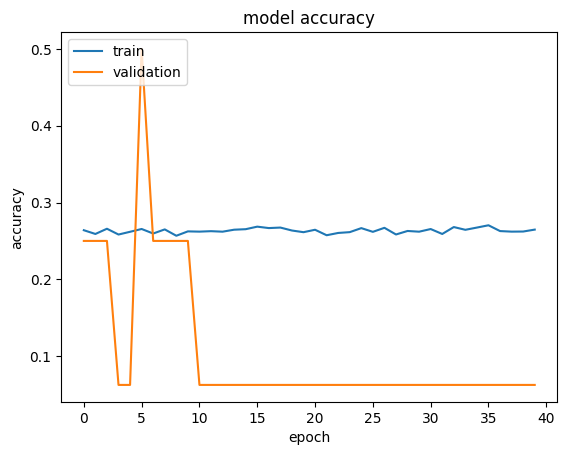

In [55]:
plt.plot(history_efficient.history["accuracy"])
plt.plot(history_efficient.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the EfficientnetNet Model**


In [56]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_efficient_model.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")


1/4 [======>.......................] - ETA: 1s - loss: 1.3356 - accuracy: 0.0000e+00


4/4 [==============================] - 1s 7ms/step - loss: 1.3908 - accuracy: 0.2500


Loss: 1.3908034563064575, Accuracy: 0.25


### **Plotting the confusion matrix**



1/4 [======>.......................] - ETA: 1s


4/4 [==============================] - 1s 8ms/step


              precision    recall  f1-score   support

       happy       0.00      0.00      0.00        32
     neutral       0.00      0.00      0.00        32
         sad       0.25      1.00      0.40        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

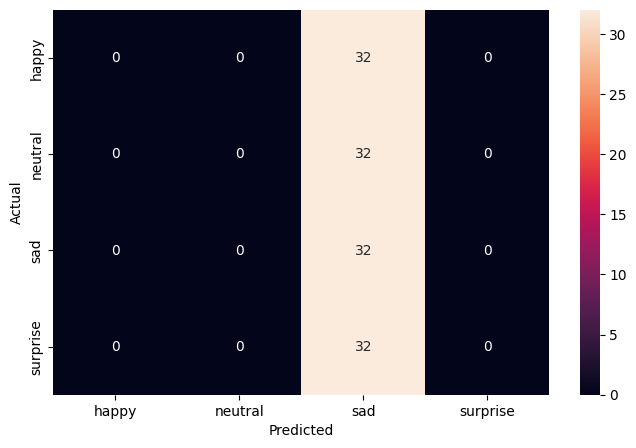

In [57]:
pred_probabilities = new_efficient_model.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:\_\_**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**


**Think About It:**

- What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
- Do you think our issue lies with 'rgb' color_mode?


Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.


## **Building a Complex Neural Network Architecture**


In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.


## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.


In [58]:
# Set this to 'grayscale' as the images are in grayscale
color_mode = "grayscale"
color_layers = 1
# As we have checked, all images are 48x48, we will set the img_width and img_height to 48
img_width, img_height = 48, 48
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
    # rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    # width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    # height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    # shear_range=0.1,  # Small shear transformations for slight perspective changes
    # zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
    # horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    # fill_mode="nearest",  # 'nearest' interpolation for filling in new pixels after a transformation
)

# Validation and Testing Data should not be augmented!
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    # rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    # width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    # height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    # shear_range=0.1,  # Small shear transformations for slight perspective changes
    # zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
    # horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    # fill_mode="nearest",  # 'nearest' interpolation for filling in new pixels after a transformation
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Assuming train_dir, validation_dir, and test_dir should follow the structure in DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for evaluation
)

# Testing Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.


Found 4977 images belonging to 4 classes.


Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.


In [59]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [60]:
# Initializing a sequential model
model_complex = Sequential()

# Adding first conv layer
model_complex.add(
    Conv2D(
        filters=512,
        kernel_size=(5, 5),
        padding="Same",
        input_shape=(img_width, img_height, color_layers),
        activation="relu",
    )
)
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.2))

# Adding second conv layer
model_complex.add(Conv2D(filters=256, kernel_size=(5, 5), padding="Same", activation="relu"))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.2))

# Adding third conv layer
model_complex.add(Conv2D(filters=128, kernel_size=(5, 5), padding="Same", activation="relu"))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.3))

# Adding fourth conv layer
model_complex.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.3))

# Adding fifth conv layer
model_complex.add(Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu"))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.3))

# Flattening
model_complex.add(Flatten())
model_complex.add(Dense(64, activation="relu"))
model_complex.add(Dense(32, activation="relu"))

# Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
model_complex.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the Model**


In [61]:
model_complex.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_complex.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 48, 48, 512)       13312     


 max_pooling2d (MaxPooling2  (None, 24, 24, 512)       0         


 D)                                                              


 dropout (Dropout)           (None, 24, 24, 512)       0         


 conv2d_1 (Conv2D)           (None, 24, 24, 256)       3277056   


 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         


 g2D)                                                            


 dropout_1 (Dropout)         (None, 12, 12, 256)       0         


 conv2d_2 (Conv2D)           (None, 12, 12, 128)       819328    


 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0         


 g2D)                                                            


 dropout_2 (Dropout)         (None, 6, 6, 128)         0         


 conv2d_3 (Conv2D)           (None, 6, 6, 64)          73792     


 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 64)          0         


 g2D)                                                            


 dropout_3 (Dropout)         (None, 3, 3, 64)          0         


 conv2d_4 (Conv2D)           (None, 3, 3, 32)          18464     


 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 32)          0         


 g2D)                                                            


 dropout_4 (Dropout)         (None, 1, 1, 32)          0         


 flatten (Flatten)           (None, 32)                0         


 dense (Dense)               (None, 64)                2112      


 dense_1 (Dense)             (None, 32)                2080      


 dense_2 (Dense)             (None, 4)                 132       


Total params: 4206276 (16.05 MB)


Trainable params: 4206276 (16.05 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [62]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_complex_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_complex = model_complex.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[reduce_lr],
)

Epoch 1/40


2024-03-21 01:01:49.116971: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-03-21 01:01:49.224262: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 544.05MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-21 01:01:49.224297: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 544.05MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-21 01:01:49.231542: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) r

2024-03-21 01:01:49.390853: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 662.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-21 01:01:49.531309: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 662.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2024-03-21 01:01:50.538926: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.22GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2024-03-21 01:01:50.776411: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.22GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.



  1/473 [..............................] - ETA: 28:01 - loss: 1.3893 - accuracy: 0.2188


  3/473 [..............................] - ETA: 12s - loss: 1.3832 - accuracy: 0.2083  


  5/473 [..............................] - ETA: 12s - loss: 1.3627 - accuracy: 0.2688


  7/473 [..............................] - ETA: 12s - loss: 1.3935 - accuracy: 0.2634


  9/473 [..............................] - ETA: 12s - loss: 1.4014 - accuracy: 0.2396


 11/473 [..............................] - ETA: 12s - loss: 1.4016 - accuracy: 0.2273


 13/473 [..............................] - ETA: 12s - loss: 1.3991 - accuracy: 0.2404


 15/473 [..............................] - ETA: 12s - loss: 1.3971 - accuracy: 0.2417


 17/473 [>.............................] - ETA: 11s - loss: 1.3957 - accuracy: 0.2537


 19/473 [>.............................] - ETA: 11s - loss: 1.3948 - accuracy: 0.2533


 21/473 [>.............................] - ETA: 11s - loss: 1.3935 - accuracy: 0.2560


 23/473 [>.............................] - ETA: 11s - loss: 1.3930 - accuracy: 0.2541


 25/473 [>.............................] - ETA: 11s - loss: 1.3927 - accuracy: 0.2537


 27/473 [>.............................] - ETA: 11s - loss: 1.3924 - accuracy: 0.2523


 29/473 [>.............................] - ETA: 11s - loss: 1.3914 - accuracy: 0.2597


 31/473 [>.............................] - ETA: 11s - loss: 1.3908 - accuracy: 0.2601


 33/473 [=>............................] - ETA: 11s - loss: 1.3906 - accuracy: 0.2576


 35/473 [=>............................] - ETA: 11s - loss: 1.3907 - accuracy: 0.2580


 37/473 [=>............................] - ETA: 11s - loss: 1.3897 - accuracy: 0.2576


 39/473 [=>............................] - ETA: 11s - loss: 1.3890 - accuracy: 0.2580


 41/473 [=>............................] - ETA: 11s - loss: 1.3895 - accuracy: 0.2546


 43/473 [=>............................] - ETA: 11s - loss: 1.3892 - accuracy: 0.2551


 45/473 [=>............................] - ETA: 11s - loss: 1.3899 - accuracy: 0.2535


 47/473 [=>............................] - ETA: 11s - loss: 1.3897 - accuracy: 0.2553


 49/473 [==>...........................] - ETA: 11s - loss: 1.3892 - accuracy: 0.2570


 51/473 [==>...........................] - ETA: 11s - loss: 1.3888 - accuracy: 0.2574


 53/473 [==>...........................] - ETA: 10s - loss: 1.3890 - accuracy: 0.2518


 55/473 [==>...........................] - ETA: 10s - loss: 1.3890 - accuracy: 0.2500


 57/473 [==>...........................] - ETA: 10s - loss: 1.3889 - accuracy: 0.2484


 59/473 [==>...........................] - ETA: 10s - loss: 1.3887 - accuracy: 0.2511


 61/473 [==>...........................] - ETA: 10s - loss: 1.3885 - accuracy: 0.2510


 63/473 [==>...........................] - ETA: 10s - loss: 1.3884 - accuracy: 0.2495


 65/473 [===>..........................] - ETA: 10s - loss: 1.3881 - accuracy: 0.2500


 67/473 [===>..........................] - ETA: 10s - loss: 1.3878 - accuracy: 0.2547


 69/473 [===>..........................] - ETA: 10s - loss: 1.3877 - accuracy: 0.2572


 71/473 [===>..........................] - ETA: 10s - loss: 1.3875 - accuracy: 0.2592


 73/473 [===>..........................] - ETA: 10s - loss: 1.3874 - accuracy: 0.2594


 75/473 [===>..........................] - ETA: 10s - loss: 1.3875 - accuracy: 0.2592


 77/473 [===>..........................] - ETA: 10s - loss: 1.3871 - accuracy: 0.2610


 79/473 [====>.........................] - ETA: 10s - loss: 1.3876 - accuracy: 0.2587


 81/473 [====>.........................] - ETA: 10s - loss: 1.3873 - accuracy: 0.2581


 83/473 [====>.........................] - ETA: 10s - loss: 1.3871 - accuracy: 0.2575


 85/473 [====>.........................] - ETA: 10s - loss: 1.3867 - accuracy: 0.2585


 87/473 [====>.........................] - ETA: 10s - loss: 1.3865 - accuracy: 0.2586


 89/473 [====>.........................] - ETA: 9s - loss: 1.3865 - accuracy: 0.2588 


 91/473 [====>.........................] - ETA: 9s - loss: 1.3865 - accuracy: 0.2582


 93/473 [====>.........................] - ETA: 9s - loss: 1.3866 - accuracy: 0.2554


 95/473 [=====>........................] - ETA: 9s - loss: 1.3863 - accuracy: 0.2579


 97/473 [=====>........................] - ETA: 9s - loss: 1.3863 - accuracy: 0.2584


 99/473 [=====>........................] - ETA: 9s - loss: 1.3861 - accuracy: 0.2604


101/473 [=====>........................] - ETA: 9s - loss: 1.3860 - accuracy: 0.2602


103/473 [=====>........................] - ETA: 12s - loss: 1.3861 - accuracy: 0.2603


105/473 [=====>........................] - ETA: 12s - loss: 1.3861 - accuracy: 0.2586


107/473 [=====>........................] - ETA: 11s - loss: 1.3858 - accuracy: 0.2582


109/473 [=====>........................] - ETA: 11s - loss: 1.3858 - accuracy: 0.2574


111/473 [======>.......................] - ETA: 11s - loss: 1.3859 - accuracy: 0.2553


113/473 [======>.......................] - ETA: 11s - loss: 1.3860 - accuracy: 0.2561


115/473 [======>.......................] - ETA: 11s - loss: 1.3859 - accuracy: 0.2573


117/473 [======>.......................] - ETA: 11s - loss: 1.3857 - accuracy: 0.2575


119/473 [======>.......................] - ETA: 11s - loss: 1.3858 - accuracy: 0.2573


121/473 [======>.......................] - ETA: 11s - loss: 1.3856 - accuracy: 0.2596


123/473 [======>.......................] - ETA: 11s - loss: 1.3857 - accuracy: 0.2594


125/473 [======>.......................] - ETA: 11s - loss: 1.3856 - accuracy: 0.2595


127/473 [=======>......................] - ETA: 10s - loss: 1.3855 - accuracy: 0.2591


129/473 [=======>......................] - ETA: 10s - loss: 1.3852 - accuracy: 0.2602


131/473 [=======>......................] - ETA: 10s - loss: 1.3853 - accuracy: 0.2603


133/473 [=======>......................] - ETA: 10s - loss: 1.3853 - accuracy: 0.2596


135/473 [=======>......................] - ETA: 10s - loss: 1.3852 - accuracy: 0.2586


137/473 [=======>......................] - ETA: 10s - loss: 1.3852 - accuracy: 0.2589


139/473 [=======>......................] - ETA: 10s - loss: 1.3852 - accuracy: 0.2594


141/473 [=======>......................] - ETA: 10s - loss: 1.3853 - accuracy: 0.2589


143/473 [========>.....................] - ETA: 10s - loss: 1.3853 - accuracy: 0.2598


145/473 [========>.....................] - ETA: 10s - loss: 1.3852 - accuracy: 0.2599


147/473 [========>.....................] - ETA: 10s - loss: 1.3853 - accuracy: 0.2589


149/473 [========>.....................] - ETA: 9s - loss: 1.3854 - accuracy: 0.2592 


152/473 [========>.....................] - ETA: 9s - loss: 1.3853 - accuracy: 0.2597


155/473 [========>.....................] - ETA: 9s - loss: 1.3855 - accuracy: 0.2572


158/473 [=========>....................] - ETA: 9s - loss: 1.3854 - accuracy: 0.2575


161/473 [=========>....................] - ETA: 9s - loss: 1.3854 - accuracy: 0.2576


164/473 [=========>....................] - ETA: 9s - loss: 1.3852 - accuracy: 0.2565


167/473 [=========>....................] - ETA: 9s - loss: 1.3851 - accuracy: 0.2562


170/473 [=========>....................] - ETA: 9s - loss: 1.3850 - accuracy: 0.2573


173/473 [=========>....................] - ETA: 8s - loss: 1.3849 - accuracy: 0.2579


175/473 [==========>...................] - ETA: 8s - loss: 1.3847 - accuracy: 0.2586


177/473 [==========>...................] - ETA: 8s - loss: 1.3844 - accuracy: 0.2602


180/473 [==========>...................] - ETA: 8s - loss: 1.3845 - accuracy: 0.2602


182/473 [==========>...................] - ETA: 8s - loss: 1.3843 - accuracy: 0.2598


185/473 [==========>...................] - ETA: 8s - loss: 1.3842 - accuracy: 0.2606


188/473 [==========>...................] - ETA: 8s - loss: 1.3841 - accuracy: 0.2618


191/473 [===========>..................] - ETA: 8s - loss: 1.3841 - accuracy: 0.2616


194/473 [===========>..................] - ETA: 8s - loss: 1.3839 - accuracy: 0.2602


196/473 [===========>..................] - ETA: 8s - loss: 1.3840 - accuracy: 0.2596


198/473 [===========>..................] - ETA: 8s - loss: 1.3837 - accuracy: 0.2592


201/473 [===========>..................] - ETA: 7s - loss: 1.3841 - accuracy: 0.2587


204/473 [===========>..................] - ETA: 7s - loss: 1.3840 - accuracy: 0.2590


206/473 [============>.................] - ETA: 7s - loss: 1.3842 - accuracy: 0.2582


209/473 [============>.................] - ETA: 7s - loss: 1.3844 - accuracy: 0.2576


212/473 [============>.................] - ETA: 7s - loss: 1.3845 - accuracy: 0.2571


215/473 [============>.................] - ETA: 7s - loss: 1.3846 - accuracy: 0.2567


217/473 [============>.................] - ETA: 7s - loss: 1.3846 - accuracy: 0.2569


219/473 [============>.................] - ETA: 7s - loss: 1.3844 - accuracy: 0.2576


221/473 [=============>................] - ETA: 7s - loss: 1.3843 - accuracy: 0.2575


223/473 [=============>................] - ETA: 7s - loss: 1.3844 - accuracy: 0.2581


225/473 [=============>................] - ETA: 7s - loss: 1.3843 - accuracy: 0.2582


227/473 [=============>................] - ETA: 7s - loss: 1.3842 - accuracy: 0.2584


229/473 [=============>................] - ETA: 7s - loss: 1.3839 - accuracy: 0.2596


231/473 [=============>................] - ETA: 6s - loss: 1.3841 - accuracy: 0.2592


233/473 [=============>................] - ETA: 6s - loss: 1.3841 - accuracy: 0.2587


235/473 [=============>................] - ETA: 6s - loss: 1.3840 - accuracy: 0.2586


237/473 [==============>...............] - ETA: 6s - loss: 1.3839 - accuracy: 0.2587


239/473 [==============>...............] - ETA: 6s - loss: 1.3839 - accuracy: 0.2594


241/473 [==============>...............] - ETA: 6s - loss: 1.3840 - accuracy: 0.2593


243/473 [==============>...............] - ETA: 6s - loss: 1.3839 - accuracy: 0.2594


245/473 [==============>...............] - ETA: 6s - loss: 1.3838 - accuracy: 0.2594


247/473 [==============>...............] - ETA: 6s - loss: 1.3838 - accuracy: 0.2596


249/473 [==============>...............] - ETA: 6s - loss: 1.3839 - accuracy: 0.2593


251/473 [==============>...............] - ETA: 6s - loss: 1.3838 - accuracy: 0.2597


253/473 [===============>..............] - ETA: 6s - loss: 1.3838 - accuracy: 0.2600


255/473 [===============>..............] - ETA: 6s - loss: 1.3838 - accuracy: 0.2594


257/473 [===============>..............] - ETA: 6s - loss: 1.3835 - accuracy: 0.2602


259/473 [===============>..............] - ETA: 6s - loss: 1.3835 - accuracy: 0.2606


261/473 [===============>..............] - ETA: 6s - loss: 1.3833 - accuracy: 0.2611


263/473 [===============>..............] - ETA: 5s - loss: 1.3834 - accuracy: 0.2611


265/473 [===============>..............] - ETA: 5s - loss: 1.3834 - accuracy: 0.2605


267/473 [===============>..............] - ETA: 5s - loss: 1.3835 - accuracy: 0.2600


269/473 [================>.............] - ETA: 5s - loss: 1.3835 - accuracy: 0.2602


271/473 [================>.............] - ETA: 5s - loss: 1.3834 - accuracy: 0.2605


273/473 [================>.............] - ETA: 5s - loss: 1.3833 - accuracy: 0.2604


275/473 [================>.............] - ETA: 5s - loss: 1.3832 - accuracy: 0.2614


277/473 [================>.............] - ETA: 5s - loss: 1.3830 - accuracy: 0.2614


279/473 [================>.............] - ETA: 5s - loss: 1.3831 - accuracy: 0.2612


281/473 [================>.............] - ETA: 5s - loss: 1.3827 - accuracy: 0.2621


283/473 [================>.............] - ETA: 5s - loss: 1.3827 - accuracy: 0.2620


285/473 [=================>............] - ETA: 5s - loss: 1.3825 - accuracy: 0.2624


287/473 [=================>............] - ETA: 5s - loss: 1.3825 - accuracy: 0.2630


289/473 [=================>............] - ETA: 5s - loss: 1.3822 - accuracy: 0.2631


291/473 [=================>............] - ETA: 5s - loss: 1.3821 - accuracy: 0.2635


293/473 [=================>............] - ETA: 5s - loss: 1.3821 - accuracy: 0.2636


295/473 [=================>............] - ETA: 5s - loss: 1.3820 - accuracy: 0.2640


297/473 [=================>............] - ETA: 4s - loss: 1.3818 - accuracy: 0.2640


299/473 [=================>............] - ETA: 4s - loss: 1.3817 - accuracy: 0.2645


301/473 [==================>...........] - ETA: 4s - loss: 1.3817 - accuracy: 0.2648


303/473 [==================>...........] - ETA: 4s - loss: 1.3812 - accuracy: 0.2653


305/473 [==================>...........] - ETA: 4s - loss: 1.3811 - accuracy: 0.2652


307/473 [==================>...........] - ETA: 4s - loss: 1.3811 - accuracy: 0.2652


309/473 [==================>...........] - ETA: 4s - loss: 1.3816 - accuracy: 0.2653


311/473 [==================>...........] - ETA: 4s - loss: 1.3815 - accuracy: 0.2651


313/473 [==================>...........] - ETA: 4s - loss: 1.3814 - accuracy: 0.2651


315/473 [==================>...........] - ETA: 4s - loss: 1.3811 - accuracy: 0.2657


317/473 [===================>..........] - ETA: 4s - loss: 1.3811 - accuracy: 0.2663


319/473 [===================>..........] - ETA: 4s - loss: 1.3811 - accuracy: 0.2660


321/473 [===================>..........] - ETA: 4s - loss: 1.3811 - accuracy: 0.2655


323/473 [===================>..........] - ETA: 4s - loss: 1.3811 - accuracy: 0.2659


325/473 [===================>..........] - ETA: 4s - loss: 1.3811 - accuracy: 0.2658


327/473 [===================>..........] - ETA: 4s - loss: 1.3810 - accuracy: 0.2660


329/473 [===================>..........] - ETA: 4s - loss: 1.3810 - accuracy: 0.2663


331/473 [===================>..........] - ETA: 3s - loss: 1.3810 - accuracy: 0.2667


333/473 [====================>.........] - ETA: 3s - loss: 1.3810 - accuracy: 0.2666


335/473 [====================>.........] - ETA: 3s - loss: 1.3810 - accuracy: 0.2662


337/473 [====================>.........] - ETA: 3s - loss: 1.3809 - accuracy: 0.2661


339/473 [====================>.........] - ETA: 3s - loss: 1.3808 - accuracy: 0.2662


341/473 [====================>.........] - ETA: 3s - loss: 1.3809 - accuracy: 0.2661


343/473 [====================>.........] - ETA: 3s - loss: 1.3810 - accuracy: 0.2661


345/473 [====================>.........] - ETA: 3s - loss: 1.3809 - accuracy: 0.2660


347/473 [=====================>........] - ETA: 3s - loss: 1.3809 - accuracy: 0.2660


349/473 [=====================>........] - ETA: 3s - loss: 1.3807 - accuracy: 0.2663


351/473 [=====================>........] - ETA: 3s - loss: 1.3808 - accuracy: 0.2666


353/473 [=====================>........] - ETA: 3s - loss: 1.3807 - accuracy: 0.2669


355/473 [=====================>........] - ETA: 3s - loss: 1.3805 - accuracy: 0.2676


357/473 [=====================>........] - ETA: 3s - loss: 1.3804 - accuracy: 0.2680


359/473 [=====================>........] - ETA: 3s - loss: 1.3804 - accuracy: 0.2686


361/473 [=====================>........] - ETA: 3s - loss: 1.3804 - accuracy: 0.2684


363/473 [======================>.......] - ETA: 3s - loss: 1.3802 - accuracy: 0.2681


365/473 [======================>.......] - ETA: 2s - loss: 1.3799 - accuracy: 0.2687


367/473 [======================>.......] - ETA: 2s - loss: 1.3798 - accuracy: 0.2692


369/473 [======================>.......] - ETA: 2s - loss: 1.3796 - accuracy: 0.2695


371/473 [======================>.......] - ETA: 2s - loss: 1.3798 - accuracy: 0.2695


373/473 [======================>.......] - ETA: 2s - loss: 1.3797 - accuracy: 0.2700


375/473 [======================>.......] - ETA: 2s - loss: 1.3794 - accuracy: 0.2704


377/473 [======================>.......] - ETA: 2s - loss: 1.3792 - accuracy: 0.2705


379/473 [=======================>......] - ETA: 2s - loss: 1.3795 - accuracy: 0.2704


381/473 [=======================>......] - ETA: 2s - loss: 1.3794 - accuracy: 0.2705


383/473 [=======================>......] - ETA: 2s - loss: 1.3794 - accuracy: 0.2707


385/473 [=======================>......] - ETA: 2s - loss: 1.3793 - accuracy: 0.2710


387/473 [=======================>......] - ETA: 2s - loss: 1.3793 - accuracy: 0.2713


389/473 [=======================>......] - ETA: 2s - loss: 1.3791 - accuracy: 0.2716


391/473 [=======================>......] - ETA: 2s - loss: 1.3789 - accuracy: 0.2716


393/473 [=======================>......] - ETA: 2s - loss: 1.3788 - accuracy: 0.2720


395/473 [========================>.....] - ETA: 2s - loss: 1.3788 - accuracy: 0.2719


397/473 [========================>.....] - ETA: 2s - loss: 1.3785 - accuracy: 0.2729


399/473 [========================>.....] - ETA: 2s - loss: 1.3784 - accuracy: 0.2731


401/473 [========================>.....] - ETA: 1s - loss: 1.3785 - accuracy: 0.2733


403/473 [========================>.....] - ETA: 1s - loss: 1.3783 - accuracy: 0.2734


405/473 [========================>.....] - ETA: 1s - loss: 1.3783 - accuracy: 0.2733


407/473 [========================>.....] - ETA: 1s - loss: 1.3782 - accuracy: 0.2734


409/473 [========================>.....] - ETA: 1s - loss: 1.3781 - accuracy: 0.2735


411/473 [=========================>....] - ETA: 1s - loss: 1.3781 - accuracy: 0.2737


413/473 [=========================>....] - ETA: 1s - loss: 1.3778 - accuracy: 0.2738


415/473 [=========================>....] - ETA: 1s - loss: 1.3777 - accuracy: 0.2734


417/473 [=========================>....] - ETA: 1s - loss: 1.3777 - accuracy: 0.2735


419/473 [=========================>....] - ETA: 1s - loss: 1.3777 - accuracy: 0.2733


421/473 [=========================>....] - ETA: 1s - loss: 1.3778 - accuracy: 0.2733


423/473 [=========================>....] - ETA: 1s - loss: 1.3778 - accuracy: 0.2734


425/473 [=========================>....] - ETA: 1s - loss: 1.3777 - accuracy: 0.2739


427/473 [==========================>...] - ETA: 1s - loss: 1.3776 - accuracy: 0.2739


429/473 [==========================>...] - ETA: 1s - loss: 1.3774 - accuracy: 0.2742


431/473 [==========================>...] - ETA: 1s - loss: 1.3774 - accuracy: 0.2745


433/473 [==========================>...] - ETA: 1s - loss: 1.3775 - accuracy: 0.2740


435/473 [==========================>...] - ETA: 1s - loss: 1.3775 - accuracy: 0.2740


437/473 [==========================>...] - ETA: 0s - loss: 1.3774 - accuracy: 0.2741


440/473 [==========================>...] - ETA: 0s - loss: 1.3770 - accuracy: 0.2747


443/473 [===========================>..] - ETA: 0s - loss: 1.3769 - accuracy: 0.2746


446/473 [===========================>..] - ETA: 0s - loss: 1.3770 - accuracy: 0.2741


449/473 [===========================>..] - ETA: 0s - loss: 1.3767 - accuracy: 0.2742


452/473 [===========================>..] - ETA: 0s - loss: 1.3767 - accuracy: 0.2746


455/473 [===========================>..] - ETA: 0s - loss: 1.3766 - accuracy: 0.2745


458/473 [============================>.] - ETA: 0s - loss: 1.3766 - accuracy: 0.2745


460/473 [============================>.] - ETA: 0s - loss: 1.3764 - accuracy: 0.2746


463/473 [============================>.] - ETA: 0s - loss: 1.3769 - accuracy: 0.2743


466/473 [============================>.] - ETA: 0s - loss: 1.3768 - accuracy: 0.2748


469/473 [============================>.] - ETA: 0s - loss: 1.3767 - accuracy: 0.2749


472/473 [============================>.] - ETA: 0s - loss: 1.3767 - accuracy: 0.2745


473/473 [==============================] - 17s 27ms/step - loss: 1.3766 - accuracy: 0.2745 - val_loss: 1.3281 - val_accuracy: 0.3438 - lr: 5.0000e-04


Epoch 2/40



  1/473 [..............................] - ETA: 16s - loss: 1.3643 - accuracy: 0.1875


  4/473 [..............................] - ETA: 11s - loss: 1.3624 - accuracy: 0.2812


  6/473 [..............................] - ETA: 11s - loss: 1.3565 - accuracy: 0.3177


  8/473 [..............................] - ETA: 11s - loss: 1.3510 - accuracy: 0.3320


 10/473 [..............................] - ETA: 11s - loss: 1.3495 - accuracy: 0.3281


 12/473 [..............................] - ETA: 11s - loss: 1.3432 - accuracy: 0.3359


 14/473 [..............................] - ETA: 11s - loss: 1.3477 - accuracy: 0.3304


 16/473 [>.............................] - ETA: 11s - loss: 1.3519 - accuracy: 0.3242


 18/473 [>.............................] - ETA: 11s - loss: 1.3574 - accuracy: 0.3177


 20/473 [>.............................] - ETA: 11s - loss: 1.3548 - accuracy: 0.3203


 22/473 [>.............................] - ETA: 11s - loss: 1.3579 - accuracy: 0.3168


 24/473 [>.............................] - ETA: 11s - loss: 1.3571 - accuracy: 0.3138


 26/473 [>.............................] - ETA: 11s - loss: 1.3543 - accuracy: 0.3197


 28/473 [>.............................] - ETA: 11s - loss: 1.3527 - accuracy: 0.3248


 30/473 [>.............................] - ETA: 11s - loss: 1.3499 - accuracy: 0.3250


 32/473 [=>............................] - ETA: 11s - loss: 1.3524 - accuracy: 0.3193


 34/473 [=>............................] - ETA: 11s - loss: 1.3512 - accuracy: 0.3199


 36/473 [=>............................] - ETA: 11s - loss: 1.3511 - accuracy: 0.3203


 38/473 [=>............................] - ETA: 11s - loss: 1.3522 - accuracy: 0.3166


 40/473 [=>............................] - ETA: 11s - loss: 1.3510 - accuracy: 0.3164


 42/473 [=>............................] - ETA: 11s - loss: 1.3534 - accuracy: 0.3125


 44/473 [=>............................] - ETA: 11s - loss: 1.3544 - accuracy: 0.3104


 46/473 [=>............................] - ETA: 10s - loss: 1.3556 - accuracy: 0.3091


 48/473 [==>...........................] - ETA: 10s - loss: 1.3546 - accuracy: 0.3125


 50/473 [==>...........................] - ETA: 10s - loss: 1.3535 - accuracy: 0.3162


 52/473 [==>...........................] - ETA: 10s - loss: 1.3529 - accuracy: 0.3161


 54/473 [==>...........................] - ETA: 10s - loss: 1.3530 - accuracy: 0.3177


 56/473 [==>...........................] - ETA: 10s - loss: 1.3536 - accuracy: 0.3181


 58/473 [==>...........................] - ETA: 10s - loss: 1.3522 - accuracy: 0.3211


 60/473 [==>...........................] - ETA: 10s - loss: 1.3516 - accuracy: 0.3214


 62/473 [==>...........................] - ETA: 10s - loss: 1.3535 - accuracy: 0.3191


 64/473 [===>..........................] - ETA: 10s - loss: 1.3522 - accuracy: 0.3218


 66/473 [===>..........................] - ETA: 10s - loss: 1.3515 - accuracy: 0.3234


 68/473 [===>..........................] - ETA: 10s - loss: 1.3515 - accuracy: 0.3231


 70/473 [===>..........................] - ETA: 10s - loss: 1.3513 - accuracy: 0.3219


 72/473 [===>..........................] - ETA: 10s - loss: 1.3503 - accuracy: 0.3216


 74/473 [===>..........................] - ETA: 10s - loss: 1.3492 - accuracy: 0.3209


 76/473 [===>..........................] - ETA: 10s - loss: 1.3485 - accuracy: 0.3228


 78/473 [===>..........................] - ETA: 10s - loss: 1.3494 - accuracy: 0.3213


 80/473 [====>.........................] - ETA: 10s - loss: 1.3495 - accuracy: 0.3211


 82/473 [====>.........................] - ETA: 10s - loss: 1.3481 - accuracy: 0.3220


 84/473 [====>.........................] - ETA: 10s - loss: 1.3482 - accuracy: 0.3222


 86/473 [====>.........................] - ETA: 9s - loss: 1.3484 - accuracy: 0.3216 


 88/473 [====>.........................] - ETA: 9s - loss: 1.3485 - accuracy: 0.3214


 90/473 [====>.........................] - ETA: 9s - loss: 1.3490 - accuracy: 0.3212


 92/473 [====>.........................] - ETA: 9s - loss: 1.3494 - accuracy: 0.3196


 94/473 [====>.........................] - ETA: 9s - loss: 1.3504 - accuracy: 0.3178


 96/473 [=====>........................] - ETA: 9s - loss: 1.3508 - accuracy: 0.3174


 98/473 [=====>........................] - ETA: 9s - loss: 1.3506 - accuracy: 0.3179


100/473 [=====>........................] - ETA: 9s - loss: 1.3510 - accuracy: 0.3181


102/473 [=====>........................] - ETA: 9s - loss: 1.3515 - accuracy: 0.3156


104/473 [=====>........................] - ETA: 9s - loss: 1.3523 - accuracy: 0.3146


106/473 [=====>........................] - ETA: 9s - loss: 1.3519 - accuracy: 0.3137


108/473 [=====>........................] - ETA: 9s - loss: 1.3519 - accuracy: 0.3137


110/473 [=====>........................] - ETA: 9s - loss: 1.3518 - accuracy: 0.3151


112/473 [======>.......................] - ETA: 9s - loss: 1.3519 - accuracy: 0.3158


114/473 [======>.......................] - ETA: 9s - loss: 1.3519 - accuracy: 0.3161


116/473 [======>.......................] - ETA: 9s - loss: 1.3518 - accuracy: 0.3171


118/473 [======>.......................] - ETA: 9s - loss: 1.3528 - accuracy: 0.3149


120/473 [======>.......................] - ETA: 9s - loss: 1.3525 - accuracy: 0.3146


122/473 [======>.......................] - ETA: 9s - loss: 1.3528 - accuracy: 0.3148


124/473 [======>.......................] - ETA: 8s - loss: 1.3528 - accuracy: 0.3133


126/473 [======>.......................] - ETA: 8s - loss: 1.3530 - accuracy: 0.3145


128/473 [=======>......................] - ETA: 8s - loss: 1.3531 - accuracy: 0.3147


130/473 [=======>......................] - ETA: 8s - loss: 1.3535 - accuracy: 0.3151


132/473 [=======>......................] - ETA: 8s - loss: 1.3536 - accuracy: 0.3142


134/473 [=======>......................] - ETA: 8s - loss: 1.3536 - accuracy: 0.3130


136/473 [=======>......................] - ETA: 8s - loss: 1.3541 - accuracy: 0.3132


138/473 [=======>......................] - ETA: 8s - loss: 1.3544 - accuracy: 0.3132


140/473 [=======>......................] - ETA: 8s - loss: 1.3540 - accuracy: 0.3129


142/473 [========>.....................] - ETA: 8s - loss: 1.3539 - accuracy: 0.3123


144/473 [========>.....................] - ETA: 8s - loss: 1.3545 - accuracy: 0.3103


146/473 [========>.....................] - ETA: 8s - loss: 1.3542 - accuracy: 0.3112


148/473 [========>.....................] - ETA: 8s - loss: 1.3544 - accuracy: 0.3112


151/473 [========>.....................] - ETA: 8s - loss: 1.3540 - accuracy: 0.3119


154/473 [========>.....................] - ETA: 8s - loss: 1.3544 - accuracy: 0.3111


157/473 [========>.....................] - ETA: 8s - loss: 1.3545 - accuracy: 0.3107


159/473 [=========>....................] - ETA: 8s - loss: 1.3548 - accuracy: 0.3094


161/473 [=========>....................] - ETA: 8s - loss: 1.3545 - accuracy: 0.3094


163/473 [=========>....................] - ETA: 7s - loss: 1.3538 - accuracy: 0.3102


165/473 [=========>....................] - ETA: 7s - loss: 1.3534 - accuracy: 0.3106


167/473 [=========>....................] - ETA: 7s - loss: 1.3532 - accuracy: 0.3097


169/473 [=========>....................] - ETA: 7s - loss: 1.3528 - accuracy: 0.3107


171/473 [=========>....................] - ETA: 7s - loss: 1.3526 - accuracy: 0.3109


173/473 [=========>....................] - ETA: 7s - loss: 1.3521 - accuracy: 0.3118


175/473 [==========>...................] - ETA: 7s - loss: 1.3520 - accuracy: 0.3120


177/473 [==========>...................] - ETA: 7s - loss: 1.3514 - accuracy: 0.3121


179/473 [==========>...................] - ETA: 7s - loss: 1.3515 - accuracy: 0.3122


181/473 [==========>...................] - ETA: 7s - loss: 1.3516 - accuracy: 0.3130


183/473 [==========>...................] - ETA: 7s - loss: 1.3514 - accuracy: 0.3137


185/473 [==========>...................] - ETA: 7s - loss: 1.3519 - accuracy: 0.3132


187/473 [==========>...................] - ETA: 7s - loss: 1.3518 - accuracy: 0.3140


189/473 [==========>...................] - ETA: 7s - loss: 1.3517 - accuracy: 0.3150


191/473 [===========>..................] - ETA: 7s - loss: 1.3522 - accuracy: 0.3145


193/473 [===========>..................] - ETA: 7s - loss: 1.3522 - accuracy: 0.3146


195/473 [===========>..................] - ETA: 7s - loss: 1.3522 - accuracy: 0.3141


197/473 [===========>..................] - ETA: 7s - loss: 1.3524 - accuracy: 0.3144


199/473 [===========>..................] - ETA: 7s - loss: 1.3521 - accuracy: 0.3153


201/473 [===========>..................] - ETA: 6s - loss: 1.3525 - accuracy: 0.3151


203/473 [===========>..................] - ETA: 6s - loss: 1.3523 - accuracy: 0.3159


205/473 [============>.................] - ETA: 6s - loss: 1.3522 - accuracy: 0.3159


207/473 [============>.................] - ETA: 6s - loss: 1.3521 - accuracy: 0.3169


209/473 [============>.................] - ETA: 6s - loss: 1.3518 - accuracy: 0.3182


211/473 [============>.................] - ETA: 6s - loss: 1.3520 - accuracy: 0.3177


213/473 [============>.................] - ETA: 6s - loss: 1.3516 - accuracy: 0.3175


215/473 [============>.................] - ETA: 6s - loss: 1.3513 - accuracy: 0.3177


217/473 [============>.................] - ETA: 6s - loss: 1.3520 - accuracy: 0.3174


219/473 [============>.................] - ETA: 6s - loss: 1.3523 - accuracy: 0.3168


221/473 [=============>................] - ETA: 6s - loss: 1.3521 - accuracy: 0.3169


223/473 [=============>................] - ETA: 6s - loss: 1.3518 - accuracy: 0.3167


225/473 [=============>................] - ETA: 6s - loss: 1.3518 - accuracy: 0.3171


227/473 [=============>................] - ETA: 6s - loss: 1.3517 - accuracy: 0.3170


229/473 [=============>................] - ETA: 6s - loss: 1.3515 - accuracy: 0.3170


231/473 [=============>................] - ETA: 6s - loss: 1.3515 - accuracy: 0.3168


233/473 [=============>................] - ETA: 6s - loss: 1.3514 - accuracy: 0.3164


235/473 [=============>................] - ETA: 6s - loss: 1.3516 - accuracy: 0.3164


237/473 [==============>...............] - ETA: 6s - loss: 1.3516 - accuracy: 0.3167


239/473 [==============>...............] - ETA: 6s - loss: 1.3514 - accuracy: 0.3171


241/473 [==============>...............] - ETA: 5s - loss: 1.3511 - accuracy: 0.3172


243/473 [==============>...............] - ETA: 5s - loss: 1.3511 - accuracy: 0.3169


245/473 [==============>...............] - ETA: 5s - loss: 1.3512 - accuracy: 0.3176


247/473 [==============>...............] - ETA: 5s - loss: 1.3510 - accuracy: 0.3183


249/473 [==============>...............] - ETA: 5s - loss: 1.3508 - accuracy: 0.3183


251/473 [==============>...............] - ETA: 5s - loss: 1.3505 - accuracy: 0.3185


253/473 [===============>..............] - ETA: 5s - loss: 1.3506 - accuracy: 0.3183


255/473 [===============>..............] - ETA: 5s - loss: 1.3504 - accuracy: 0.3179


257/473 [===============>..............] - ETA: 5s - loss: 1.3498 - accuracy: 0.3189


259/473 [===============>..............] - ETA: 5s - loss: 1.3498 - accuracy: 0.3197


261/473 [===============>..............] - ETA: 5s - loss: 1.3497 - accuracy: 0.3199


263/473 [===============>..............] - ETA: 5s - loss: 1.3490 - accuracy: 0.3202


265/473 [===============>..............] - ETA: 5s - loss: 1.3491 - accuracy: 0.3204


268/473 [===============>..............] - ETA: 5s - loss: 1.3491 - accuracy: 0.3205


270/473 [================>.............] - ETA: 5s - loss: 1.3491 - accuracy: 0.3208


272/473 [================>.............] - ETA: 5s - loss: 1.3487 - accuracy: 0.3215


274/473 [================>.............] - ETA: 5s - loss: 1.3488 - accuracy: 0.3220


276/473 [================>.............] - ETA: 5s - loss: 1.3490 - accuracy: 0.3220


278/473 [================>.............] - ETA: 5s - loss: 1.3491 - accuracy: 0.3220


280/473 [================>.............] - ETA: 4s - loss: 1.3493 - accuracy: 0.3212


282/473 [================>.............] - ETA: 4s - loss: 1.3493 - accuracy: 0.3213


284/473 [=================>............] - ETA: 4s - loss: 1.3494 - accuracy: 0.3209


286/473 [=================>............] - ETA: 4s - loss: 1.3495 - accuracy: 0.3211


288/473 [=================>............] - ETA: 4s - loss: 1.3493 - accuracy: 0.3215


290/473 [=================>............] - ETA: 4s - loss: 1.3491 - accuracy: 0.3217


292/473 [=================>............] - ETA: 4s - loss: 1.3493 - accuracy: 0.3211


294/473 [=================>............] - ETA: 4s - loss: 1.3496 - accuracy: 0.3210


296/473 [=================>............] - ETA: 4s - loss: 1.3495 - accuracy: 0.3214


298/473 [=================>............] - ETA: 4s - loss: 1.3493 - accuracy: 0.3215


300/473 [==================>...........] - ETA: 4s - loss: 1.3490 - accuracy: 0.3218


302/473 [==================>...........] - ETA: 4s - loss: 1.3489 - accuracy: 0.3225


304/473 [==================>...........] - ETA: 4s - loss: 1.3487 - accuracy: 0.3229


306/473 [==================>...........] - ETA: 4s - loss: 1.3489 - accuracy: 0.3227


308/473 [==================>...........] - ETA: 4s - loss: 1.3492 - accuracy: 0.3231


310/473 [==================>...........] - ETA: 4s - loss: 1.3494 - accuracy: 0.3226


312/473 [==================>...........] - ETA: 4s - loss: 1.3496 - accuracy: 0.3230


314/473 [==================>...........] - ETA: 4s - loss: 1.3495 - accuracy: 0.3229


316/473 [===================>..........] - ETA: 4s - loss: 1.3492 - accuracy: 0.3233


318/473 [===================>..........] - ETA: 3s - loss: 1.3493 - accuracy: 0.3230


320/473 [===================>..........] - ETA: 3s - loss: 1.3493 - accuracy: 0.3229


322/473 [===================>..........] - ETA: 3s - loss: 1.3494 - accuracy: 0.3222


324/473 [===================>..........] - ETA: 3s - loss: 1.3495 - accuracy: 0.3221


326/473 [===================>..........] - ETA: 3s - loss: 1.3493 - accuracy: 0.3222


328/473 [===================>..........] - ETA: 3s - loss: 1.3495 - accuracy: 0.3218


330/473 [===================>..........] - ETA: 3s - loss: 1.3490 - accuracy: 0.3224


332/473 [====================>.........] - ETA: 3s - loss: 1.3489 - accuracy: 0.3227


334/473 [====================>.........] - ETA: 3s - loss: 1.3487 - accuracy: 0.3231


336/473 [====================>.........] - ETA: 3s - loss: 1.3489 - accuracy: 0.3228


338/473 [====================>.........] - ETA: 3s - loss: 1.3488 - accuracy: 0.3227


340/473 [====================>.........] - ETA: 3s - loss: 1.3485 - accuracy: 0.3229


342/473 [====================>.........] - ETA: 3s - loss: 1.3487 - accuracy: 0.3226


344/473 [====================>.........] - ETA: 3s - loss: 1.3495 - accuracy: 0.3219


346/473 [====================>.........] - ETA: 3s - loss: 1.3498 - accuracy: 0.3225


348/473 [=====================>........] - ETA: 3s - loss: 1.3493 - accuracy: 0.3231


350/473 [=====================>........] - ETA: 3s - loss: 1.3493 - accuracy: 0.3229


352/473 [=====================>........] - ETA: 3s - loss: 1.3495 - accuracy: 0.3228


354/473 [=====================>........] - ETA: 3s - loss: 1.3491 - accuracy: 0.3238


356/473 [=====================>........] - ETA: 3s - loss: 1.3490 - accuracy: 0.3235


358/473 [=====================>........] - ETA: 2s - loss: 1.3488 - accuracy: 0.3241


360/473 [=====================>........] - ETA: 2s - loss: 1.3488 - accuracy: 0.3239


362/473 [=====================>........] - ETA: 2s - loss: 1.3489 - accuracy: 0.3240


364/473 [======================>.......] - ETA: 2s - loss: 1.3489 - accuracy: 0.3240


366/473 [======================>.......] - ETA: 2s - loss: 1.3495 - accuracy: 0.3237


368/473 [======================>.......] - ETA: 2s - loss: 1.3492 - accuracy: 0.3238


370/473 [======================>.......] - ETA: 2s - loss: 1.3492 - accuracy: 0.3238


372/473 [======================>.......] - ETA: 2s - loss: 1.3493 - accuracy: 0.3232


374/473 [======================>.......] - ETA: 2s - loss: 1.3492 - accuracy: 0.3233


376/473 [======================>.......] - ETA: 2s - loss: 1.3492 - accuracy: 0.3235


378/473 [======================>.......] - ETA: 2s - loss: 1.3490 - accuracy: 0.3240


380/473 [=======================>......] - ETA: 2s - loss: 1.3489 - accuracy: 0.3245


382/473 [=======================>......] - ETA: 2s - loss: 1.3488 - accuracy: 0.3248


384/473 [=======================>......] - ETA: 2s - loss: 1.3487 - accuracy: 0.3254


386/473 [=======================>......] - ETA: 2s - loss: 1.3486 - accuracy: 0.3256


388/473 [=======================>......] - ETA: 2s - loss: 1.3483 - accuracy: 0.3257


390/473 [=======================>......] - ETA: 2s - loss: 1.3481 - accuracy: 0.3260


392/473 [=======================>......] - ETA: 2s - loss: 1.3482 - accuracy: 0.3256


394/473 [=======================>......] - ETA: 2s - loss: 1.3484 - accuracy: 0.3255


396/473 [========================>.....] - ETA: 1s - loss: 1.3480 - accuracy: 0.3253


398/473 [========================>.....] - ETA: 1s - loss: 1.3478 - accuracy: 0.3255


400/473 [========================>.....] - ETA: 1s - loss: 1.3478 - accuracy: 0.3252


402/473 [========================>.....] - ETA: 1s - loss: 1.3476 - accuracy: 0.3255


404/473 [========================>.....] - ETA: 1s - loss: 1.3475 - accuracy: 0.3259


406/473 [========================>.....] - ETA: 1s - loss: 1.3475 - accuracy: 0.3261


408/473 [========================>.....] - ETA: 1s - loss: 1.3471 - accuracy: 0.3265


410/473 [=========================>....] - ETA: 1s - loss: 1.3468 - accuracy: 0.3267


412/473 [=========================>....] - ETA: 1s - loss: 1.3468 - accuracy: 0.3264


414/473 [=========================>....] - ETA: 1s - loss: 1.3467 - accuracy: 0.3264


416/473 [=========================>....] - ETA: 1s - loss: 1.3468 - accuracy: 0.3261


418/473 [=========================>....] - ETA: 1s - loss: 1.3465 - accuracy: 0.3263


420/473 [=========================>....] - ETA: 1s - loss: 1.3463 - accuracy: 0.3262


423/473 [=========================>....] - ETA: 1s - loss: 1.3462 - accuracy: 0.3262


425/473 [=========================>....] - ETA: 1s - loss: 1.3458 - accuracy: 0.3262


427/473 [==========================>...] - ETA: 1s - loss: 1.3461 - accuracy: 0.3258


429/473 [==========================>...] - ETA: 1s - loss: 1.3459 - accuracy: 0.3259


431/473 [==========================>...] - ETA: 1s - loss: 1.3458 - accuracy: 0.3258


433/473 [==========================>...] - ETA: 1s - loss: 1.3460 - accuracy: 0.3253


435/473 [==========================>...] - ETA: 0s - loss: 1.3457 - accuracy: 0.3254


437/473 [==========================>...] - ETA: 0s - loss: 1.3456 - accuracy: 0.3256


439/473 [==========================>...] - ETA: 0s - loss: 1.3455 - accuracy: 0.3258


441/473 [==========================>...] - ETA: 0s - loss: 1.3455 - accuracy: 0.3259


443/473 [===========================>..] - ETA: 0s - loss: 1.3452 - accuracy: 0.3258


445/473 [===========================>..] - ETA: 0s - loss: 1.3447 - accuracy: 0.3263


447/473 [===========================>..] - ETA: 0s - loss: 1.3445 - accuracy: 0.3264


449/473 [===========================>..] - ETA: 0s - loss: 1.3440 - accuracy: 0.3270


451/473 [===========================>..] - ETA: 0s - loss: 1.3443 - accuracy: 0.3268


453/473 [===========================>..] - ETA: 0s - loss: 1.3439 - accuracy: 0.3270


455/473 [===========================>..] - ETA: 0s - loss: 1.3438 - accuracy: 0.3270


457/473 [===========================>..] - ETA: 0s - loss: 1.3438 - accuracy: 0.3271


459/473 [============================>.] - ETA: 0s - loss: 1.3438 - accuracy: 0.3268


461/473 [============================>.] - ETA: 0s - loss: 1.3433 - accuracy: 0.3273


463/473 [============================>.] - ETA: 0s - loss: 1.3429 - accuracy: 0.3274


465/473 [============================>.] - ETA: 0s - loss: 1.3427 - accuracy: 0.3275


467/473 [============================>.] - ETA: 0s - loss: 1.3426 - accuracy: 0.3274


469/473 [============================>.] - ETA: 0s - loss: 1.3424 - accuracy: 0.3276


471/473 [============================>.] - ETA: 0s - loss: 1.3421 - accuracy: 0.3279


473/473 [==============================] - ETA: 0s - loss: 1.3419 - accuracy: 0.3281


473/473 [==============================] - 12s 26ms/step - loss: 1.3419 - accuracy: 0.3281 - val_loss: 1.2530 - val_accuracy: 0.2500 - lr: 5.0000e-04


Epoch 3/40



  1/473 [..............................] - ETA: 15s - loss: 1.3651 - accuracy: 0.3750


  3/473 [..............................] - ETA: 11s - loss: 1.3066 - accuracy: 0.4167


  6/473 [..............................] - ETA: 11s - loss: 1.2744 - accuracy: 0.4010


  8/473 [..............................] - ETA: 11s - loss: 1.2565 - accuracy: 0.4062


 10/473 [..............................] - ETA: 11s - loss: 1.2342 - accuracy: 0.4281


 12/473 [..............................] - ETA: 11s - loss: 1.2365 - accuracy: 0.4323


 15/473 [..............................] - ETA: 11s - loss: 1.2270 - accuracy: 0.4313


 18/473 [>.............................] - ETA: 11s - loss: 1.2411 - accuracy: 0.4149


 21/473 [>.............................] - ETA: 11s - loss: 1.2412 - accuracy: 0.4152


 24/473 [>.............................] - ETA: 11s - loss: 1.2429 - accuracy: 0.4128


 27/473 [>.............................] - ETA: 11s - loss: 1.2462 - accuracy: 0.4051


 30/473 [>.............................] - ETA: 11s - loss: 1.2371 - accuracy: 0.4094


 33/473 [=>............................] - ETA: 10s - loss: 1.2357 - accuracy: 0.4091


 36/473 [=>............................] - ETA: 10s - loss: 1.2326 - accuracy: 0.4123


 38/473 [=>............................] - ETA: 10s - loss: 1.2326 - accuracy: 0.4095


 40/473 [=>............................] - ETA: 10s - loss: 1.2309 - accuracy: 0.4086


 43/473 [=>............................] - ETA: 10s - loss: 1.2298 - accuracy: 0.4092


 45/473 [=>............................] - ETA: 10s - loss: 1.2312 - accuracy: 0.4097


 48/473 [==>...........................] - ETA: 10s - loss: 1.2381 - accuracy: 0.4076


 51/473 [==>...........................] - ETA: 10s - loss: 1.2396 - accuracy: 0.4075


 53/473 [==>...........................] - ETA: 10s - loss: 1.2402 - accuracy: 0.4039


 56/473 [==>...........................] - ETA: 10s - loss: 1.2386 - accuracy: 0.4001


 59/473 [==>...........................] - ETA: 10s - loss: 1.2381 - accuracy: 0.4020


 61/473 [==>...........................] - ETA: 10s - loss: 1.2377 - accuracy: 0.4027


 64/473 [===>..........................] - ETA: 10s - loss: 1.2387 - accuracy: 0.4014


 66/473 [===>..........................] - ETA: 10s - loss: 1.2353 - accuracy: 0.4025


 68/473 [===>..........................] - ETA: 10s - loss: 1.2369 - accuracy: 0.4026


 71/473 [===>..........................] - ETA: 10s - loss: 1.2369 - accuracy: 0.4018


 74/473 [===>..........................] - ETA: 9s - loss: 1.2362 - accuracy: 0.3995 


 77/473 [===>..........................] - ETA: 9s - loss: 1.2309 - accuracy: 0.4006


 79/473 [====>.........................] - ETA: 9s - loss: 1.2338 - accuracy: 0.4007


 82/473 [====>.........................] - ETA: 9s - loss: 1.2366 - accuracy: 0.3998


 85/473 [====>.........................] - ETA: 9s - loss: 1.2388 - accuracy: 0.3978


 88/473 [====>.........................] - ETA: 9s - loss: 1.2387 - accuracy: 0.3974


 91/473 [====>.........................] - ETA: 9s - loss: 1.2384 - accuracy: 0.3939


 94/473 [====>.........................] - ETA: 9s - loss: 1.2380 - accuracy: 0.3920


 96/473 [=====>........................] - ETA: 9s - loss: 1.2388 - accuracy: 0.3923


 98/473 [=====>........................] - ETA: 9s - loss: 1.2371 - accuracy: 0.3932


100/473 [=====>........................] - ETA: 9s - loss: 1.2351 - accuracy: 0.3928


102/473 [=====>........................] - ETA: 9s - loss: 1.2346 - accuracy: 0.3946


104/473 [=====>........................] - ETA: 9s - loss: 1.2344 - accuracy: 0.3939


106/473 [=====>........................] - ETA: 9s - loss: 1.2343 - accuracy: 0.3948


108/473 [=====>........................] - ETA: 9s - loss: 1.2346 - accuracy: 0.3941


110/473 [=====>........................] - ETA: 9s - loss: 1.2364 - accuracy: 0.3957


112/473 [======>.......................] - ETA: 9s - loss: 1.2362 - accuracy: 0.3968


114/473 [======>.......................] - ETA: 8s - loss: 1.2373 - accuracy: 0.3961


116/473 [======>.......................] - ETA: 8s - loss: 1.2381 - accuracy: 0.3960


118/473 [======>.......................] - ETA: 8s - loss: 1.2384 - accuracy: 0.3962


120/473 [======>.......................] - ETA: 8s - loss: 1.2387 - accuracy: 0.3951


122/473 [======>.......................] - ETA: 8s - loss: 1.2389 - accuracy: 0.3950


124/473 [======>.......................] - ETA: 8s - loss: 1.2376 - accuracy: 0.3957


126/473 [======>.......................] - ETA: 8s - loss: 1.2367 - accuracy: 0.3968


128/473 [=======>......................] - ETA: 8s - loss: 1.2345 - accuracy: 0.3989


130/473 [=======>......................] - ETA: 8s - loss: 1.2356 - accuracy: 0.3981


132/473 [=======>......................] - ETA: 8s - loss: 1.2370 - accuracy: 0.3973


134/473 [=======>......................] - ETA: 8s - loss: 1.2380 - accuracy: 0.3962


136/473 [=======>......................] - ETA: 8s - loss: 1.2366 - accuracy: 0.3973


138/473 [=======>......................] - ETA: 8s - loss: 1.2378 - accuracy: 0.3976


140/473 [=======>......................] - ETA: 8s - loss: 1.2384 - accuracy: 0.3978


142/473 [========>.....................] - ETA: 8s - loss: 1.2377 - accuracy: 0.3972


144/473 [========>.....................] - ETA: 8s - loss: 1.2377 - accuracy: 0.3976


146/473 [========>.....................] - ETA: 8s - loss: 1.2372 - accuracy: 0.3964


148/473 [========>.....................] - ETA: 8s - loss: 1.2371 - accuracy: 0.3959


150/473 [========>.....................] - ETA: 8s - loss: 1.2365 - accuracy: 0.3958


152/473 [========>.....................] - ETA: 8s - loss: 1.2359 - accuracy: 0.3956


154/473 [========>.....................] - ETA: 8s - loss: 1.2349 - accuracy: 0.3959


156/473 [========>.....................] - ETA: 8s - loss: 1.2336 - accuracy: 0.3966


158/473 [=========>....................] - ETA: 7s - loss: 1.2309 - accuracy: 0.3977


160/473 [=========>....................] - ETA: 7s - loss: 1.2303 - accuracy: 0.3973


162/473 [=========>....................] - ETA: 7s - loss: 1.2302 - accuracy: 0.3976


164/473 [=========>....................] - ETA: 7s - loss: 1.2309 - accuracy: 0.3969


166/473 [=========>....................] - ETA: 7s - loss: 1.2311 - accuracy: 0.3970


168/473 [=========>....................] - ETA: 7s - loss: 1.2307 - accuracy: 0.3962


170/473 [=========>....................] - ETA: 7s - loss: 1.2322 - accuracy: 0.3963


172/473 [=========>....................] - ETA: 7s - loss: 1.2309 - accuracy: 0.3963


174/473 [==========>...................] - ETA: 7s - loss: 1.2299 - accuracy: 0.3976


176/473 [==========>...................] - ETA: 7s - loss: 1.2308 - accuracy: 0.3972


178/473 [==========>...................] - ETA: 7s - loss: 1.2314 - accuracy: 0.3969


180/473 [==========>...................] - ETA: 7s - loss: 1.2312 - accuracy: 0.3979


182/473 [==========>...................] - ETA: 7s - loss: 1.2307 - accuracy: 0.3990


184/473 [==========>...................] - ETA: 7s - loss: 1.2315 - accuracy: 0.3984


186/473 [==========>...................] - ETA: 7s - loss: 1.2321 - accuracy: 0.3984


188/473 [==========>...................] - ETA: 7s - loss: 1.2331 - accuracy: 0.3983


190/473 [===========>..................] - ETA: 7s - loss: 1.2340 - accuracy: 0.3967


192/473 [===========>..................] - ETA: 7s - loss: 1.2334 - accuracy: 0.3975


194/473 [===========>..................] - ETA: 7s - loss: 1.2330 - accuracy: 0.3985


196/473 [===========>..................] - ETA: 7s - loss: 1.2330 - accuracy: 0.3989


198/473 [===========>..................] - ETA: 6s - loss: 1.2311 - accuracy: 0.4009


200/473 [===========>..................] - ETA: 6s - loss: 1.2307 - accuracy: 0.4013


202/473 [===========>..................] - ETA: 6s - loss: 1.2301 - accuracy: 0.4019


204/473 [===========>..................] - ETA: 6s - loss: 1.2287 - accuracy: 0.4029


206/473 [============>.................] - ETA: 6s - loss: 1.2283 - accuracy: 0.4028


208/473 [============>.................] - ETA: 6s - loss: 1.2291 - accuracy: 0.4019


210/473 [============>.................] - ETA: 6s - loss: 1.2303 - accuracy: 0.4010


212/473 [============>.................] - ETA: 6s - loss: 1.2296 - accuracy: 0.4015


214/473 [============>.................] - ETA: 6s - loss: 1.2292 - accuracy: 0.4017


216/473 [============>.................] - ETA: 6s - loss: 1.2287 - accuracy: 0.4022


218/473 [============>.................] - ETA: 6s - loss: 1.2298 - accuracy: 0.4021


220/473 [============>.................] - ETA: 6s - loss: 1.2288 - accuracy: 0.4024


222/473 [=============>................] - ETA: 6s - loss: 1.2276 - accuracy: 0.4032


224/473 [=============>................] - ETA: 6s - loss: 1.2279 - accuracy: 0.4032


226/473 [=============>................] - ETA: 6s - loss: 1.2276 - accuracy: 0.4036


228/473 [=============>................] - ETA: 6s - loss: 1.2284 - accuracy: 0.4035


230/473 [=============>................] - ETA: 6s - loss: 1.2286 - accuracy: 0.4026


232/473 [=============>................] - ETA: 6s - loss: 1.2293 - accuracy: 0.4026


234/473 [=============>................] - ETA: 6s - loss: 1.2290 - accuracy: 0.4029


236/473 [=============>................] - ETA: 6s - loss: 1.2290 - accuracy: 0.4025


238/473 [==============>...............] - ETA: 5s - loss: 1.2293 - accuracy: 0.4024


240/473 [==============>...............] - ETA: 5s - loss: 1.2289 - accuracy: 0.4031


242/473 [==============>...............] - ETA: 5s - loss: 1.2281 - accuracy: 0.4041


245/473 [==============>...............] - ETA: 5s - loss: 1.2285 - accuracy: 0.4041


247/473 [==============>...............] - ETA: 5s - loss: 1.2287 - accuracy: 0.4037


250/473 [==============>...............] - ETA: 5s - loss: 1.2286 - accuracy: 0.4033


252/473 [==============>...............] - ETA: 5s - loss: 1.2283 - accuracy: 0.4025


255/473 [===============>..............] - ETA: 5s - loss: 1.2276 - accuracy: 0.4026


257/473 [===============>..............] - ETA: 5s - loss: 1.2275 - accuracy: 0.4028


259/473 [===============>..............] - ETA: 5s - loss: 1.2274 - accuracy: 0.4029


261/473 [===============>..............] - ETA: 5s - loss: 1.2278 - accuracy: 0.4027


263/473 [===============>..............] - ETA: 5s - loss: 1.2276 - accuracy: 0.4032


265/473 [===============>..............] - ETA: 5s - loss: 1.2273 - accuracy: 0.4034


267/473 [===============>..............] - ETA: 5s - loss: 1.2276 - accuracy: 0.4030


269/473 [================>.............] - ETA: 5s - loss: 1.2275 - accuracy: 0.4032


271/473 [================>.............] - ETA: 5s - loss: 1.2268 - accuracy: 0.4031


273/473 [================>.............] - ETA: 5s - loss: 1.2261 - accuracy: 0.4032


275/473 [================>.............] - ETA: 5s - loss: 1.2267 - accuracy: 0.4028


277/473 [================>.............] - ETA: 4s - loss: 1.2268 - accuracy: 0.4025


279/473 [================>.............] - ETA: 4s - loss: 1.2266 - accuracy: 0.4028


281/473 [================>.............] - ETA: 4s - loss: 1.2266 - accuracy: 0.4024


283/473 [================>.............] - ETA: 4s - loss: 1.2251 - accuracy: 0.4034


285/473 [=================>............] - ETA: 4s - loss: 1.2254 - accuracy: 0.4034


287/473 [=================>............] - ETA: 4s - loss: 1.2253 - accuracy: 0.4030


289/473 [=================>............] - ETA: 4s - loss: 1.2261 - accuracy: 0.4027


291/473 [=================>............] - ETA: 4s - loss: 1.2262 - accuracy: 0.4026


293/473 [=================>............] - ETA: 4s - loss: 1.2267 - accuracy: 0.4028


295/473 [=================>............] - ETA: 4s - loss: 1.2265 - accuracy: 0.4033


297/473 [=================>............] - ETA: 4s - loss: 1.2268 - accuracy: 0.4029


299/473 [=================>............] - ETA: 4s - loss: 1.2272 - accuracy: 0.4027


301/473 [==================>...........] - ETA: 4s - loss: 1.2270 - accuracy: 0.4022


303/473 [==================>...........] - ETA: 4s - loss: 1.2267 - accuracy: 0.4025


305/473 [==================>...........] - ETA: 4s - loss: 1.2271 - accuracy: 0.4024


307/473 [==================>...........] - ETA: 4s - loss: 1.2265 - accuracy: 0.4026


309/473 [==================>...........] - ETA: 4s - loss: 1.2263 - accuracy: 0.4022


311/473 [==================>...........] - ETA: 4s - loss: 1.2266 - accuracy: 0.4020


313/473 [==================>...........] - ETA: 4s - loss: 1.2260 - accuracy: 0.4032


315/473 [==================>...........] - ETA: 4s - loss: 1.2259 - accuracy: 0.4032


317/473 [===================>..........] - ETA: 3s - loss: 1.2262 - accuracy: 0.4032


319/473 [===================>..........] - ETA: 3s - loss: 1.2255 - accuracy: 0.4033


321/473 [===================>..........] - ETA: 3s - loss: 1.2249 - accuracy: 0.4042


323/473 [===================>..........] - ETA: 3s - loss: 1.2246 - accuracy: 0.4039


325/473 [===================>..........] - ETA: 3s - loss: 1.2239 - accuracy: 0.4041


327/473 [===================>..........] - ETA: 3s - loss: 1.2240 - accuracy: 0.4042


329/473 [===================>..........] - ETA: 3s - loss: 1.2237 - accuracy: 0.4047


331/473 [===================>..........] - ETA: 3s - loss: 1.2233 - accuracy: 0.4046


333/473 [====================>.........] - ETA: 3s - loss: 1.2233 - accuracy: 0.4046


335/473 [====================>.........] - ETA: 3s - loss: 1.2226 - accuracy: 0.4042


337/473 [====================>.........] - ETA: 3s - loss: 1.2227 - accuracy: 0.4043


339/473 [====================>.........] - ETA: 3s - loss: 1.2223 - accuracy: 0.4046


341/473 [====================>.........] - ETA: 3s - loss: 1.2222 - accuracy: 0.4047


343/473 [====================>.........] - ETA: 3s - loss: 1.2225 - accuracy: 0.4042


345/473 [====================>.........] - ETA: 3s - loss: 1.2231 - accuracy: 0.4043


347/473 [=====================>........] - ETA: 3s - loss: 1.2231 - accuracy: 0.4047


349/473 [=====================>........] - ETA: 3s - loss: 1.2231 - accuracy: 0.4049


351/473 [=====================>........] - ETA: 3s - loss: 1.2233 - accuracy: 0.4048


353/473 [=====================>........] - ETA: 3s - loss: 1.2236 - accuracy: 0.4043


355/473 [=====================>........] - ETA: 3s - loss: 1.2229 - accuracy: 0.4048


358/473 [=====================>........] - ETA: 2s - loss: 1.2222 - accuracy: 0.4050


360/473 [=====================>........] - ETA: 2s - loss: 1.2222 - accuracy: 0.4049


362/473 [=====================>........] - ETA: 2s - loss: 1.2220 - accuracy: 0.4050


364/473 [======================>.......] - ETA: 2s - loss: 1.2218 - accuracy: 0.4050


366/473 [======================>.......] - ETA: 2s - loss: 1.2219 - accuracy: 0.4045


368/473 [======================>.......] - ETA: 2s - loss: 1.2216 - accuracy: 0.4046


370/473 [======================>.......] - ETA: 2s - loss: 1.2216 - accuracy: 0.4050


372/473 [======================>.......] - ETA: 2s - loss: 1.2208 - accuracy: 0.4057


374/473 [======================>.......] - ETA: 2s - loss: 1.2203 - accuracy: 0.4062


376/473 [======================>.......] - ETA: 2s - loss: 1.2198 - accuracy: 0.4064


378/473 [======================>.......] - ETA: 2s - loss: 1.2206 - accuracy: 0.4059


380/473 [=======================>......] - ETA: 2s - loss: 1.2210 - accuracy: 0.4060


382/473 [=======================>......] - ETA: 2s - loss: 1.2219 - accuracy: 0.4058


384/473 [=======================>......] - ETA: 2s - loss: 1.2214 - accuracy: 0.4057


386/473 [=======================>......] - ETA: 2s - loss: 1.2211 - accuracy: 0.4062


388/473 [=======================>......] - ETA: 2s - loss: 1.2203 - accuracy: 0.4067


390/473 [=======================>......] - ETA: 2s - loss: 1.2203 - accuracy: 0.4067


392/473 [=======================>......] - ETA: 2s - loss: 1.2197 - accuracy: 0.4070


394/473 [=======================>......] - ETA: 2s - loss: 1.2198 - accuracy: 0.4073


396/473 [========================>.....] - ETA: 1s - loss: 1.2193 - accuracy: 0.4077


398/473 [========================>.....] - ETA: 1s - loss: 1.2192 - accuracy: 0.4076


400/473 [========================>.....] - ETA: 1s - loss: 1.2187 - accuracy: 0.4080


402/473 [========================>.....] - ETA: 1s - loss: 1.2183 - accuracy: 0.4080


404/473 [========================>.....] - ETA: 1s - loss: 1.2187 - accuracy: 0.4077


406/473 [========================>.....] - ETA: 1s - loss: 1.2187 - accuracy: 0.4077


408/473 [========================>.....] - ETA: 1s - loss: 1.2187 - accuracy: 0.4082


410/473 [=========================>....] - ETA: 1s - loss: 1.2186 - accuracy: 0.4086


412/473 [=========================>....] - ETA: 1s - loss: 1.2186 - accuracy: 0.4081


414/473 [=========================>....] - ETA: 1s - loss: 1.2181 - accuracy: 0.4084


416/473 [=========================>....] - ETA: 1s - loss: 1.2177 - accuracy: 0.4085


418/473 [=========================>....] - ETA: 1s - loss: 1.2175 - accuracy: 0.4086


420/473 [=========================>....] - ETA: 1s - loss: 1.2179 - accuracy: 0.4080


422/473 [=========================>....] - ETA: 1s - loss: 1.2179 - accuracy: 0.4080


424/473 [=========================>....] - ETA: 1s - loss: 1.2181 - accuracy: 0.4079


426/473 [==========================>...] - ETA: 1s - loss: 1.2177 - accuracy: 0.4083


428/473 [==========================>...] - ETA: 1s - loss: 1.2177 - accuracy: 0.4081


430/473 [==========================>...] - ETA: 1s - loss: 1.2174 - accuracy: 0.4084


432/473 [==========================>...] - ETA: 1s - loss: 1.2171 - accuracy: 0.4087


434/473 [==========================>...] - ETA: 0s - loss: 1.2166 - accuracy: 0.4089


436/473 [==========================>...] - ETA: 0s - loss: 1.2164 - accuracy: 0.4089


438/473 [==========================>...] - ETA: 0s - loss: 1.2162 - accuracy: 0.4093


440/473 [==========================>...] - ETA: 0s - loss: 1.2162 - accuracy: 0.4095


442/473 [===========================>..] - ETA: 0s - loss: 1.2160 - accuracy: 0.4098


444/473 [===========================>..] - ETA: 0s - loss: 1.2159 - accuracy: 0.4098


446/473 [===========================>..] - ETA: 0s - loss: 1.2157 - accuracy: 0.4097


448/473 [===========================>..] - ETA: 0s - loss: 1.2155 - accuracy: 0.4100


450/473 [===========================>..] - ETA: 0s - loss: 1.2155 - accuracy: 0.4101


452/473 [===========================>..] - ETA: 0s - loss: 1.2147 - accuracy: 0.4110


454/473 [===========================>..] - ETA: 0s - loss: 1.2143 - accuracy: 0.4113


456/473 [===========================>..] - ETA: 0s - loss: 1.2140 - accuracy: 0.4118


458/473 [============================>.] - ETA: 0s - loss: 1.2143 - accuracy: 0.4118


460/473 [============================>.] - ETA: 0s - loss: 1.2141 - accuracy: 0.4118


462/473 [============================>.] - ETA: 0s - loss: 1.2141 - accuracy: 0.4117


464/473 [============================>.] - ETA: 0s - loss: 1.2141 - accuracy: 0.4118


466/473 [============================>.] - ETA: 0s - loss: 1.2139 - accuracy: 0.4119


469/473 [============================>.] - ETA: 0s - loss: 1.2140 - accuracy: 0.4117


471/473 [============================>.] - ETA: 0s - loss: 1.2139 - accuracy: 0.4116


473/473 [==============================] - ETA: 0s - loss: 1.2140 - accuracy: 0.4115


473/473 [==============================] - 12s 26ms/step - loss: 1.2140 - accuracy: 0.4115 - val_loss: 1.0729 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 4/40



  1/473 [..............................] - ETA: 16s - loss: 1.1260 - accuracy: 0.5000


  4/473 [..............................] - ETA: 11s - loss: 1.2042 - accuracy: 0.4062


  6/473 [..............................] - ETA: 11s - loss: 1.1982 - accuracy: 0.4323


  8/473 [..............................] - ETA: 11s - loss: 1.1703 - accuracy: 0.4531


 10/473 [..............................] - ETA: 11s - loss: 1.1720 - accuracy: 0.4469


 12/473 [..............................] - ETA: 11s - loss: 1.1749 - accuracy: 0.4505


 14/473 [..............................] - ETA: 11s - loss: 1.1793 - accuracy: 0.4509


 16/473 [>.............................] - ETA: 11s - loss: 1.1712 - accuracy: 0.4590


 18/473 [>.............................] - ETA: 11s - loss: 1.1686 - accuracy: 0.4722


 20/473 [>.............................] - ETA: 11s - loss: 1.1702 - accuracy: 0.4625


 22/473 [>.............................] - ETA: 11s - loss: 1.1641 - accuracy: 0.4602


 24/473 [>.............................] - ETA: 11s - loss: 1.1723 - accuracy: 0.4596


 26/473 [>.............................] - ETA: 11s - loss: 1.1779 - accuracy: 0.4531


 28/473 [>.............................] - ETA: 11s - loss: 1.1761 - accuracy: 0.4509


 30/473 [>.............................] - ETA: 11s - loss: 1.1815 - accuracy: 0.4490


 32/473 [=>............................] - ETA: 11s - loss: 1.1779 - accuracy: 0.4453


 34/473 [=>............................] - ETA: 11s - loss: 1.1831 - accuracy: 0.4393


 36/473 [=>............................] - ETA: 11s - loss: 1.1727 - accuracy: 0.4453


 38/473 [=>............................] - ETA: 11s - loss: 1.1644 - accuracy: 0.4498


 40/473 [=>............................] - ETA: 11s - loss: 1.1576 - accuracy: 0.4563


 42/473 [=>............................] - ETA: 11s - loss: 1.1568 - accuracy: 0.4576


 44/473 [=>............................] - ETA: 11s - loss: 1.1582 - accuracy: 0.4538


 46/473 [=>............................] - ETA: 10s - loss: 1.1534 - accuracy: 0.4538


 48/473 [==>...........................] - ETA: 10s - loss: 1.1559 - accuracy: 0.4551


 50/473 [==>...........................] - ETA: 10s - loss: 1.1484 - accuracy: 0.4606


 52/473 [==>...........................] - ETA: 10s - loss: 1.1533 - accuracy: 0.4591


 54/473 [==>...........................] - ETA: 10s - loss: 1.1597 - accuracy: 0.4589


 56/473 [==>...........................] - ETA: 10s - loss: 1.1585 - accuracy: 0.4598


 58/473 [==>...........................] - ETA: 10s - loss: 1.1612 - accuracy: 0.4574


 60/473 [==>...........................] - ETA: 10s - loss: 1.1581 - accuracy: 0.4589


 62/473 [==>...........................] - ETA: 10s - loss: 1.1573 - accuracy: 0.4561


 64/473 [===>..........................] - ETA: 10s - loss: 1.1584 - accuracy: 0.4556


 66/473 [===>..........................] - ETA: 10s - loss: 1.1626 - accuracy: 0.4550


 68/473 [===>..........................] - ETA: 10s - loss: 1.1641 - accuracy: 0.4540


 70/473 [===>..........................] - ETA: 10s - loss: 1.1620 - accuracy: 0.4563


 72/473 [===>..........................] - ETA: 10s - loss: 1.1637 - accuracy: 0.4575


 74/473 [===>..........................] - ETA: 10s - loss: 1.1659 - accuracy: 0.4540


 76/473 [===>..........................] - ETA: 10s - loss: 1.1653 - accuracy: 0.4552


 78/473 [===>..........................] - ETA: 10s - loss: 1.1686 - accuracy: 0.4543


 80/473 [====>.........................] - ETA: 10s - loss: 1.1681 - accuracy: 0.4539


 82/473 [====>.........................] - ETA: 10s - loss: 1.1676 - accuracy: 0.4546


 84/473 [====>.........................] - ETA: 10s - loss: 1.1682 - accuracy: 0.4535


 86/473 [====>.........................] - ETA: 9s - loss: 1.1711 - accuracy: 0.4506 


 88/473 [====>.........................] - ETA: 9s - loss: 1.1703 - accuracy: 0.4513


 90/473 [====>.........................] - ETA: 9s - loss: 1.1688 - accuracy: 0.4524


 92/473 [====>.........................] - ETA: 9s - loss: 1.1673 - accuracy: 0.4545


 95/473 [=====>........................] - ETA: 9s - loss: 1.1681 - accuracy: 0.4537


 97/473 [=====>........................] - ETA: 9s - loss: 1.1677 - accuracy: 0.4524


 99/473 [=====>........................] - ETA: 9s - loss: 1.1680 - accuracy: 0.4527


101/473 [=====>........................] - ETA: 9s - loss: 1.1653 - accuracy: 0.4549


103/473 [=====>........................] - ETA: 9s - loss: 1.1666 - accuracy: 0.4533


105/473 [=====>........................] - ETA: 9s - loss: 1.1660 - accuracy: 0.4539


107/473 [=====>........................] - ETA: 9s - loss: 1.1660 - accuracy: 0.4557


109/473 [=====>........................] - ETA: 9s - loss: 1.1648 - accuracy: 0.4565


111/473 [======>.......................] - ETA: 9s - loss: 1.1667 - accuracy: 0.4542


113/473 [======>.......................] - ETA: 9s - loss: 1.1643 - accuracy: 0.4558


115/473 [======>.......................] - ETA: 9s - loss: 1.1647 - accuracy: 0.4558


117/473 [======>.......................] - ETA: 9s - loss: 1.1622 - accuracy: 0.4574


119/473 [======>.......................] - ETA: 9s - loss: 1.1611 - accuracy: 0.4576


121/473 [======>.......................] - ETA: 9s - loss: 1.1623 - accuracy: 0.4564


123/473 [======>.......................] - ETA: 8s - loss: 1.1639 - accuracy: 0.4559


125/473 [======>.......................] - ETA: 8s - loss: 1.1628 - accuracy: 0.4558


127/473 [=======>......................] - ETA: 8s - loss: 1.1627 - accuracy: 0.4545


129/473 [=======>......................] - ETA: 8s - loss: 1.1631 - accuracy: 0.4543


131/473 [=======>......................] - ETA: 8s - loss: 1.1629 - accuracy: 0.4545


133/473 [=======>......................] - ETA: 8s - loss: 1.1624 - accuracy: 0.4552


135/473 [=======>......................] - ETA: 8s - loss: 1.1640 - accuracy: 0.4566


137/473 [=======>......................] - ETA: 8s - loss: 1.1630 - accuracy: 0.4563


139/473 [=======>......................] - ETA: 8s - loss: 1.1625 - accuracy: 0.4556


141/473 [=======>......................] - ETA: 8s - loss: 1.1625 - accuracy: 0.4551


144/473 [========>.....................] - ETA: 8s - loss: 1.1613 - accuracy: 0.4547


147/473 [========>.....................] - ETA: 8s - loss: 1.1609 - accuracy: 0.4554


149/473 [========>.....................] - ETA: 8s - loss: 1.1606 - accuracy: 0.4545


152/473 [========>.....................] - ETA: 8s - loss: 1.1589 - accuracy: 0.4554


154/473 [========>.....................] - ETA: 8s - loss: 1.1562 - accuracy: 0.4566


156/473 [========>.....................] - ETA: 8s - loss: 1.1571 - accuracy: 0.4562


158/473 [=========>....................] - ETA: 8s - loss: 1.1569 - accuracy: 0.4558


160/473 [=========>....................] - ETA: 8s - loss: 1.1557 - accuracy: 0.4555


162/473 [=========>....................] - ETA: 7s - loss: 1.1549 - accuracy: 0.4553


164/473 [=========>....................] - ETA: 7s - loss: 1.1555 - accuracy: 0.4557


166/473 [=========>....................] - ETA: 7s - loss: 1.1539 - accuracy: 0.4566


168/473 [=========>....................] - ETA: 7s - loss: 1.1564 - accuracy: 0.4565


170/473 [=========>....................] - ETA: 7s - loss: 1.1565 - accuracy: 0.4561


172/473 [=========>....................] - ETA: 7s - loss: 1.1557 - accuracy: 0.4566


174/473 [==========>...................] - ETA: 7s - loss: 1.1570 - accuracy: 0.4553


176/473 [==========>...................] - ETA: 7s - loss: 1.1574 - accuracy: 0.4551


178/473 [==========>...................] - ETA: 7s - loss: 1.1558 - accuracy: 0.4567


180/473 [==========>...................] - ETA: 7s - loss: 1.1556 - accuracy: 0.4577


182/473 [==========>...................] - ETA: 7s - loss: 1.1542 - accuracy: 0.4583


184/473 [==========>...................] - ETA: 7s - loss: 1.1538 - accuracy: 0.4588


186/473 [==========>...................] - ETA: 7s - loss: 1.1561 - accuracy: 0.4581


188/473 [==========>...................] - ETA: 7s - loss: 1.1556 - accuracy: 0.4578


190/473 [===========>..................] - ETA: 7s - loss: 1.1536 - accuracy: 0.4598


192/473 [===========>..................] - ETA: 7s - loss: 1.1526 - accuracy: 0.4600


194/473 [===========>..................] - ETA: 7s - loss: 1.1523 - accuracy: 0.4603


196/473 [===========>..................] - ETA: 7s - loss: 1.1529 - accuracy: 0.4604


198/473 [===========>..................] - ETA: 7s - loss: 1.1506 - accuracy: 0.4620


200/473 [===========>..................] - ETA: 6s - loss: 1.1507 - accuracy: 0.4621


202/473 [===========>..................] - ETA: 6s - loss: 1.1493 - accuracy: 0.4633


204/473 [===========>..................] - ETA: 6s - loss: 1.1512 - accuracy: 0.4625


206/473 [============>.................] - ETA: 6s - loss: 1.1511 - accuracy: 0.4628


208/473 [============>.................] - ETA: 6s - loss: 1.1507 - accuracy: 0.4628


210/473 [============>.................] - ETA: 6s - loss: 1.1509 - accuracy: 0.4630


212/473 [============>.................] - ETA: 6s - loss: 1.1502 - accuracy: 0.4637


214/473 [============>.................] - ETA: 6s - loss: 1.1511 - accuracy: 0.4637


217/473 [============>.................] - ETA: 6s - loss: 1.1480 - accuracy: 0.4652


219/473 [============>.................] - ETA: 6s - loss: 1.1466 - accuracy: 0.4660


221/473 [=============>................] - ETA: 6s - loss: 1.1466 - accuracy: 0.4660


223/473 [=============>................] - ETA: 6s - loss: 1.1467 - accuracy: 0.4655


225/473 [=============>................] - ETA: 6s - loss: 1.1466 - accuracy: 0.4654


227/473 [=============>................] - ETA: 6s - loss: 1.1477 - accuracy: 0.4644


229/473 [=============>................] - ETA: 6s - loss: 1.1461 - accuracy: 0.4656


231/473 [=============>................] - ETA: 6s - loss: 1.1460 - accuracy: 0.4650


233/473 [=============>................] - ETA: 6s - loss: 1.1459 - accuracy: 0.4648


235/473 [=============>................] - ETA: 6s - loss: 1.1462 - accuracy: 0.4648


238/473 [==============>...............] - ETA: 6s - loss: 1.1462 - accuracy: 0.4645


241/473 [==============>...............] - ETA: 5s - loss: 1.1457 - accuracy: 0.4651


243/473 [==============>...............] - ETA: 5s - loss: 1.1457 - accuracy: 0.4647


245/473 [==============>...............] - ETA: 5s - loss: 1.1453 - accuracy: 0.4651


247/473 [==============>...............] - ETA: 5s - loss: 1.1472 - accuracy: 0.4648


249/473 [==============>...............] - ETA: 5s - loss: 1.1490 - accuracy: 0.4639


251/473 [==============>...............] - ETA: 5s - loss: 1.1480 - accuracy: 0.4642


253/473 [===============>..............] - ETA: 5s - loss: 1.1487 - accuracy: 0.4631


255/473 [===============>..............] - ETA: 5s - loss: 1.1480 - accuracy: 0.4635


257/473 [===============>..............] - ETA: 5s - loss: 1.1484 - accuracy: 0.4640


259/473 [===============>..............] - ETA: 5s - loss: 1.1483 - accuracy: 0.4641


261/473 [===============>..............] - ETA: 5s - loss: 1.1484 - accuracy: 0.4640


263/473 [===============>..............] - ETA: 5s - loss: 1.1482 - accuracy: 0.4636


265/473 [===============>..............] - ETA: 5s - loss: 1.1477 - accuracy: 0.4641


268/473 [===============>..............] - ETA: 5s - loss: 1.1459 - accuracy: 0.4651


271/473 [================>.............] - ETA: 5s - loss: 1.1467 - accuracy: 0.4648


274/473 [================>.............] - ETA: 5s - loss: 1.1452 - accuracy: 0.4660


277/473 [================>.............] - ETA: 5s - loss: 1.1452 - accuracy: 0.4659


279/473 [================>.............] - ETA: 4s - loss: 1.1447 - accuracy: 0.4668


282/473 [================>.............] - ETA: 4s - loss: 1.1448 - accuracy: 0.4666


285/473 [=================>............] - ETA: 4s - loss: 1.1449 - accuracy: 0.4668


287/473 [=================>............] - ETA: 4s - loss: 1.1450 - accuracy: 0.4669


290/473 [=================>............] - ETA: 4s - loss: 1.1448 - accuracy: 0.4667


293/473 [=================>............] - ETA: 4s - loss: 1.1449 - accuracy: 0.4668


296/473 [=================>............] - ETA: 4s - loss: 1.1452 - accuracy: 0.4667


298/473 [=================>............] - ETA: 4s - loss: 1.1451 - accuracy: 0.4664


300/473 [==================>...........] - ETA: 4s - loss: 1.1451 - accuracy: 0.4660


302/473 [==================>...........] - ETA: 4s - loss: 1.1449 - accuracy: 0.4660


304/473 [==================>...........] - ETA: 4s - loss: 1.1444 - accuracy: 0.4664


306/473 [==================>...........] - ETA: 4s - loss: 1.1441 - accuracy: 0.4663


308/473 [==================>...........] - ETA: 4s - loss: 1.1438 - accuracy: 0.4669


310/473 [==================>...........] - ETA: 4s - loss: 1.1434 - accuracy: 0.4672


312/473 [==================>...........] - ETA: 4s - loss: 1.1438 - accuracy: 0.4665


314/473 [==================>...........] - ETA: 4s - loss: 1.1440 - accuracy: 0.4663


316/473 [===================>..........] - ETA: 4s - loss: 1.1434 - accuracy: 0.4664


318/473 [===================>..........] - ETA: 3s - loss: 1.1437 - accuracy: 0.4666


320/473 [===================>..........] - ETA: 3s - loss: 1.1435 - accuracy: 0.4668


322/473 [===================>..........] - ETA: 3s - loss: 1.1432 - accuracy: 0.4667


324/473 [===================>..........] - ETA: 3s - loss: 1.1426 - accuracy: 0.4671


326/473 [===================>..........] - ETA: 3s - loss: 1.1428 - accuracy: 0.4674


328/473 [===================>..........] - ETA: 3s - loss: 1.1428 - accuracy: 0.4672


330/473 [===================>..........] - ETA: 3s - loss: 1.1427 - accuracy: 0.4677


332/473 [====================>.........] - ETA: 3s - loss: 1.1420 - accuracy: 0.4682


334/473 [====================>.........] - ETA: 3s - loss: 1.1415 - accuracy: 0.4683


336/473 [====================>.........] - ETA: 3s - loss: 1.1412 - accuracy: 0.4688


339/473 [====================>.........] - ETA: 3s - loss: 1.1405 - accuracy: 0.4689


341/473 [====================>.........] - ETA: 3s - loss: 1.1410 - accuracy: 0.4688


344/473 [====================>.........] - ETA: 3s - loss: 1.1389 - accuracy: 0.4699


347/473 [=====================>........] - ETA: 3s - loss: 1.1388 - accuracy: 0.4699


350/473 [=====================>........] - ETA: 3s - loss: 1.1389 - accuracy: 0.4697


352/473 [=====================>........] - ETA: 3s - loss: 1.1391 - accuracy: 0.4691


354/473 [=====================>........] - ETA: 3s - loss: 1.1389 - accuracy: 0.4692


356/473 [=====================>........] - ETA: 2s - loss: 1.1393 - accuracy: 0.4685


358/473 [=====================>........] - ETA: 2s - loss: 1.1391 - accuracy: 0.4685


360/473 [=====================>........] - ETA: 2s - loss: 1.1391 - accuracy: 0.4688


362/473 [=====================>........] - ETA: 2s - loss: 1.1383 - accuracy: 0.4693


364/473 [======================>.......] - ETA: 2s - loss: 1.1385 - accuracy: 0.4695


366/473 [======================>.......] - ETA: 2s - loss: 1.1381 - accuracy: 0.4696


368/473 [======================>.......] - ETA: 2s - loss: 1.1385 - accuracy: 0.4698


370/473 [======================>.......] - ETA: 2s - loss: 1.1376 - accuracy: 0.4698


372/473 [======================>.......] - ETA: 2s - loss: 1.1379 - accuracy: 0.4697


374/473 [======================>.......] - ETA: 2s - loss: 1.1376 - accuracy: 0.4697


376/473 [======================>.......] - ETA: 2s - loss: 1.1373 - accuracy: 0.4699


378/473 [======================>.......] - ETA: 2s - loss: 1.1374 - accuracy: 0.4697


380/473 [=======================>......] - ETA: 2s - loss: 1.1372 - accuracy: 0.4699


382/473 [=======================>......] - ETA: 2s - loss: 1.1367 - accuracy: 0.4702


384/473 [=======================>......] - ETA: 2s - loss: 1.1364 - accuracy: 0.4701


386/473 [=======================>......] - ETA: 2s - loss: 1.1368 - accuracy: 0.4699


388/473 [=======================>......] - ETA: 2s - loss: 1.1363 - accuracy: 0.4703


390/473 [=======================>......] - ETA: 2s - loss: 1.1356 - accuracy: 0.4708


392/473 [=======================>......] - ETA: 2s - loss: 1.1359 - accuracy: 0.4708


394/473 [=======================>......] - ETA: 2s - loss: 1.1348 - accuracy: 0.4710


396/473 [========================>.....] - ETA: 1s - loss: 1.1354 - accuracy: 0.4709


398/473 [========================>.....] - ETA: 1s - loss: 1.1351 - accuracy: 0.4708


400/473 [========================>.....] - ETA: 1s - loss: 1.1344 - accuracy: 0.4712


402/473 [========================>.....] - ETA: 1s - loss: 1.1353 - accuracy: 0.4707


404/473 [========================>.....] - ETA: 1s - loss: 1.1348 - accuracy: 0.4710


406/473 [========================>.....] - ETA: 1s - loss: 1.1341 - accuracy: 0.4713


408/473 [========================>.....] - ETA: 1s - loss: 1.1337 - accuracy: 0.4719


410/473 [=========================>....] - ETA: 1s - loss: 1.1337 - accuracy: 0.4719


412/473 [=========================>....] - ETA: 1s - loss: 1.1339 - accuracy: 0.4716


414/473 [=========================>....] - ETA: 1s - loss: 1.1337 - accuracy: 0.4712


416/473 [=========================>....] - ETA: 1s - loss: 1.1334 - accuracy: 0.4717


418/473 [=========================>....] - ETA: 1s - loss: 1.1333 - accuracy: 0.4719


420/473 [=========================>....] - ETA: 1s - loss: 1.1325 - accuracy: 0.4726


422/473 [=========================>....] - ETA: 1s - loss: 1.1328 - accuracy: 0.4723


424/473 [=========================>....] - ETA: 1s - loss: 1.1323 - accuracy: 0.4724


426/473 [==========================>...] - ETA: 1s - loss: 1.1319 - accuracy: 0.4728


428/473 [==========================>...] - ETA: 1s - loss: 1.1310 - accuracy: 0.4730


430/473 [==========================>...] - ETA: 1s - loss: 1.1311 - accuracy: 0.4728


432/473 [==========================>...] - ETA: 1s - loss: 1.1307 - accuracy: 0.4729


434/473 [==========================>...] - ETA: 0s - loss: 1.1306 - accuracy: 0.4736


436/473 [==========================>...] - ETA: 0s - loss: 1.1305 - accuracy: 0.4739


438/473 [==========================>...] - ETA: 0s - loss: 1.1305 - accuracy: 0.4737


440/473 [==========================>...] - ETA: 0s - loss: 1.1301 - accuracy: 0.4743


442/473 [===========================>..] - ETA: 0s - loss: 1.1295 - accuracy: 0.4750


444/473 [===========================>..] - ETA: 0s - loss: 1.1298 - accuracy: 0.4746


446/473 [===========================>..] - ETA: 0s - loss: 1.1294 - accuracy: 0.4750


448/473 [===========================>..] - ETA: 0s - loss: 1.1291 - accuracy: 0.4753


450/473 [===========================>..] - ETA: 0s - loss: 1.1285 - accuracy: 0.4758


452/473 [===========================>..] - ETA: 0s - loss: 1.1280 - accuracy: 0.4759


454/473 [===========================>..] - ETA: 0s - loss: 1.1279 - accuracy: 0.4760


456/473 [===========================>..] - ETA: 0s - loss: 1.1279 - accuracy: 0.4761


458/473 [============================>.] - ETA: 0s - loss: 1.1289 - accuracy: 0.4757


460/473 [============================>.] - ETA: 0s - loss: 1.1284 - accuracy: 0.4760


462/473 [============================>.] - ETA: 0s - loss: 1.1284 - accuracy: 0.4764


464/473 [============================>.] - ETA: 0s - loss: 1.1285 - accuracy: 0.4765


466/473 [============================>.] - ETA: 0s - loss: 1.1286 - accuracy: 0.4765


468/473 [============================>.] - ETA: 0s - loss: 1.1284 - accuracy: 0.4767


470/473 [============================>.] - ETA: 0s - loss: 1.1282 - accuracy: 0.4769


472/473 [============================>.] - ETA: 0s - loss: 1.1281 - accuracy: 0.4769


473/473 [==============================] - 12s 26ms/step - loss: 1.1280 - accuracy: 0.4771 - val_loss: 0.9967 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 5/40



  1/473 [..............................] - ETA: 16s - loss: 1.0447 - accuracy: 0.5938


  3/473 [..............................] - ETA: 11s - loss: 1.0152 - accuracy: 0.5729


  5/473 [..............................] - ETA: 11s - loss: 1.0042 - accuracy: 0.5375


  7/473 [..............................] - ETA: 11s - loss: 1.0291 - accuracy: 0.5402


  9/473 [..............................] - ETA: 11s - loss: 1.0399 - accuracy: 0.5278


 11/473 [..............................] - ETA: 11s - loss: 1.0544 - accuracy: 0.5199


 13/473 [..............................] - ETA: 11s - loss: 1.0696 - accuracy: 0.5024


 15/473 [..............................] - ETA: 11s - loss: 1.0707 - accuracy: 0.5083


 17/473 [>.............................] - ETA: 11s - loss: 1.1048 - accuracy: 0.4982


 19/473 [>.............................] - ETA: 11s - loss: 1.1071 - accuracy: 0.4951


 21/473 [>.............................] - ETA: 11s - loss: 1.0933 - accuracy: 0.5030


 23/473 [>.............................] - ETA: 11s - loss: 1.0886 - accuracy: 0.5014


 25/473 [>.............................] - ETA: 11s - loss: 1.0899 - accuracy: 0.4988


 27/473 [>.............................] - ETA: 11s - loss: 1.0811 - accuracy: 0.5093


 29/473 [>.............................] - ETA: 11s - loss: 1.0836 - accuracy: 0.5097


 31/473 [>.............................] - ETA: 11s - loss: 1.0822 - accuracy: 0.5081


 33/473 [=>............................] - ETA: 11s - loss: 1.0735 - accuracy: 0.5123


 35/473 [=>............................] - ETA: 11s - loss: 1.0702 - accuracy: 0.5170


 37/473 [=>............................] - ETA: 11s - loss: 1.0685 - accuracy: 0.5211


 39/473 [=>............................] - ETA: 11s - loss: 1.0698 - accuracy: 0.5160


 41/473 [=>............................] - ETA: 11s - loss: 1.0651 - accuracy: 0.5160


 43/473 [=>............................] - ETA: 11s - loss: 1.0593 - accuracy: 0.5189


 45/473 [=>............................] - ETA: 10s - loss: 1.0587 - accuracy: 0.5153


 47/473 [=>............................] - ETA: 10s - loss: 1.0500 - accuracy: 0.5213


 49/473 [==>...........................] - ETA: 10s - loss: 1.0392 - accuracy: 0.5249


 51/473 [==>...........................] - ETA: 10s - loss: 1.0418 - accuracy: 0.5233


 53/473 [==>...........................] - ETA: 10s - loss: 1.0440 - accuracy: 0.5206


 55/473 [==>...........................] - ETA: 10s - loss: 1.0423 - accuracy: 0.5233


 57/473 [==>...........................] - ETA: 10s - loss: 1.0403 - accuracy: 0.5241


 59/473 [==>...........................] - ETA: 10s - loss: 1.0406 - accuracy: 0.5228


 61/473 [==>...........................] - ETA: 10s - loss: 1.0415 - accuracy: 0.5236


 63/473 [==>...........................] - ETA: 10s - loss: 1.0377 - accuracy: 0.5238


 65/473 [===>..........................] - ETA: 10s - loss: 1.0369 - accuracy: 0.5245


 67/473 [===>..........................] - ETA: 10s - loss: 1.0348 - accuracy: 0.5257


 69/473 [===>..........................] - ETA: 10s - loss: 1.0346 - accuracy: 0.5231


 71/473 [===>..........................] - ETA: 10s - loss: 1.0305 - accuracy: 0.5268


 73/473 [===>..........................] - ETA: 10s - loss: 1.0297 - accuracy: 0.5257


 75/473 [===>..........................] - ETA: 10s - loss: 1.0301 - accuracy: 0.5250


 77/473 [===>..........................] - ETA: 10s - loss: 1.0315 - accuracy: 0.5244


 79/473 [====>.........................] - ETA: 10s - loss: 1.0302 - accuracy: 0.5229


 81/473 [====>.........................] - ETA: 10s - loss: 1.0318 - accuracy: 0.5231


 83/473 [====>.........................] - ETA: 10s - loss: 1.0327 - accuracy: 0.5241


 85/473 [====>.........................] - ETA: 9s - loss: 1.0324 - accuracy: 0.5261 


 87/473 [====>.........................] - ETA: 9s - loss: 1.0314 - accuracy: 0.5259


 89/473 [====>.........................] - ETA: 9s - loss: 1.0321 - accuracy: 0.5249


 91/473 [====>.........................] - ETA: 9s - loss: 1.0336 - accuracy: 0.5244


 93/473 [====>.........................] - ETA: 9s - loss: 1.0334 - accuracy: 0.5245


 95/473 [=====>........................] - ETA: 9s - loss: 1.0368 - accuracy: 0.5247


 97/473 [=====>........................] - ETA: 9s - loss: 1.0399 - accuracy: 0.5222


 99/473 [=====>........................] - ETA: 9s - loss: 1.0403 - accuracy: 0.5230


101/473 [=====>........................] - ETA: 9s - loss: 1.0383 - accuracy: 0.5229


103/473 [=====>........................] - ETA: 9s - loss: 1.0394 - accuracy: 0.5212


105/473 [=====>........................] - ETA: 9s - loss: 1.0389 - accuracy: 0.5226


107/473 [=====>........................] - ETA: 9s - loss: 1.0423 - accuracy: 0.5222


109/473 [=====>........................] - ETA: 9s - loss: 1.0391 - accuracy: 0.5235


111/473 [======>.......................] - ETA: 9s - loss: 1.0402 - accuracy: 0.5239


113/473 [======>.......................] - ETA: 9s - loss: 1.0387 - accuracy: 0.5243


115/473 [======>.......................] - ETA: 9s - loss: 1.0377 - accuracy: 0.5247


117/473 [======>.......................] - ETA: 9s - loss: 1.0355 - accuracy: 0.5262


119/473 [======>.......................] - ETA: 9s - loss: 1.0344 - accuracy: 0.5260


121/473 [======>.......................] - ETA: 9s - loss: 1.0331 - accuracy: 0.5261


123/473 [======>.......................] - ETA: 9s - loss: 1.0358 - accuracy: 0.5259


125/473 [======>.......................] - ETA: 8s - loss: 1.0359 - accuracy: 0.5257


127/473 [=======>......................] - ETA: 8s - loss: 1.0356 - accuracy: 0.5263


129/473 [=======>......................] - ETA: 8s - loss: 1.0353 - accuracy: 0.5269


131/473 [=======>......................] - ETA: 8s - loss: 1.0357 - accuracy: 0.5277


133/473 [=======>......................] - ETA: 8s - loss: 1.0362 - accuracy: 0.5277


135/473 [=======>......................] - ETA: 8s - loss: 1.0339 - accuracy: 0.5289


137/473 [=======>......................] - ETA: 8s - loss: 1.0330 - accuracy: 0.5308


139/473 [=======>......................] - ETA: 8s - loss: 1.0325 - accuracy: 0.5310


141/473 [=======>......................] - ETA: 8s - loss: 1.0339 - accuracy: 0.5293


143/473 [========>.....................] - ETA: 8s - loss: 1.0341 - accuracy: 0.5297


145/473 [========>.....................] - ETA: 8s - loss: 1.0344 - accuracy: 0.5295


147/473 [========>.....................] - ETA: 8s - loss: 1.0349 - accuracy: 0.5291


149/473 [========>.....................] - ETA: 8s - loss: 1.0318 - accuracy: 0.5308


151/473 [========>.....................] - ETA: 8s - loss: 1.0319 - accuracy: 0.5312


153/473 [========>.....................] - ETA: 8s - loss: 1.0313 - accuracy: 0.5323


155/473 [========>.....................] - ETA: 8s - loss: 1.0308 - accuracy: 0.5323


157/473 [========>.....................] - ETA: 8s - loss: 1.0309 - accuracy: 0.5324


159/473 [=========>....................] - ETA: 8s - loss: 1.0294 - accuracy: 0.5334


161/473 [=========>....................] - ETA: 8s - loss: 1.0276 - accuracy: 0.5345


163/473 [=========>....................] - ETA: 7s - loss: 1.0289 - accuracy: 0.5343


165/473 [=========>....................] - ETA: 7s - loss: 1.0281 - accuracy: 0.5350


167/473 [=========>....................] - ETA: 7s - loss: 1.0301 - accuracy: 0.5341


169/473 [=========>....................] - ETA: 7s - loss: 1.0285 - accuracy: 0.5349


171/473 [=========>....................] - ETA: 7s - loss: 1.0276 - accuracy: 0.5355


173/473 [=========>....................] - ETA: 7s - loss: 1.0287 - accuracy: 0.5336


175/473 [==========>...................] - ETA: 7s - loss: 1.0288 - accuracy: 0.5336


177/473 [==========>...................] - ETA: 7s - loss: 1.0285 - accuracy: 0.5332


179/473 [==========>...................] - ETA: 7s - loss: 1.0272 - accuracy: 0.5344


181/473 [==========>...................] - ETA: 7s - loss: 1.0267 - accuracy: 0.5345


183/473 [==========>...................] - ETA: 7s - loss: 1.0265 - accuracy: 0.5347


185/473 [==========>...................] - ETA: 7s - loss: 1.0277 - accuracy: 0.5346


187/473 [==========>...................] - ETA: 7s - loss: 1.0291 - accuracy: 0.5341


189/473 [==========>...................] - ETA: 7s - loss: 1.0299 - accuracy: 0.5341


191/473 [===========>..................] - ETA: 7s - loss: 1.0291 - accuracy: 0.5344


193/473 [===========>..................] - ETA: 7s - loss: 1.0317 - accuracy: 0.5334


195/473 [===========>..................] - ETA: 7s - loss: 1.0325 - accuracy: 0.5335


197/473 [===========>..................] - ETA: 7s - loss: 1.0326 - accuracy: 0.5339


199/473 [===========>..................] - ETA: 7s - loss: 1.0331 - accuracy: 0.5333


201/473 [===========>..................] - ETA: 7s - loss: 1.0330 - accuracy: 0.5328


203/473 [===========>..................] - ETA: 6s - loss: 1.0339 - accuracy: 0.5323


205/473 [============>.................] - ETA: 6s - loss: 1.0326 - accuracy: 0.5335


207/473 [============>.................] - ETA: 6s - loss: 1.0324 - accuracy: 0.5331


209/473 [============>.................] - ETA: 6s - loss: 1.0330 - accuracy: 0.5338


211/473 [============>.................] - ETA: 6s - loss: 1.0333 - accuracy: 0.5338


213/473 [============>.................] - ETA: 6s - loss: 1.0334 - accuracy: 0.5333


215/473 [============>.................] - ETA: 6s - loss: 1.0334 - accuracy: 0.5331


217/473 [============>.................] - ETA: 6s - loss: 1.0340 - accuracy: 0.5328


219/473 [============>.................] - ETA: 6s - loss: 1.0347 - accuracy: 0.5321


221/473 [=============>................] - ETA: 6s - loss: 1.0345 - accuracy: 0.5318


223/473 [=============>................] - ETA: 6s - loss: 1.0338 - accuracy: 0.5328


225/473 [=============>................] - ETA: 6s - loss: 1.0338 - accuracy: 0.5329


227/473 [=============>................] - ETA: 6s - loss: 1.0339 - accuracy: 0.5329


229/473 [=============>................] - ETA: 6s - loss: 1.0346 - accuracy: 0.5332


231/473 [=============>................] - ETA: 6s - loss: 1.0351 - accuracy: 0.5334


233/473 [=============>................] - ETA: 6s - loss: 1.0335 - accuracy: 0.5346


235/473 [=============>................] - ETA: 6s - loss: 1.0331 - accuracy: 0.5352


237/473 [==============>...............] - ETA: 6s - loss: 1.0347 - accuracy: 0.5343


239/473 [==============>...............] - ETA: 6s - loss: 1.0335 - accuracy: 0.5357


241/473 [==============>...............] - ETA: 5s - loss: 1.0338 - accuracy: 0.5359


243/473 [==============>...............] - ETA: 5s - loss: 1.0338 - accuracy: 0.5358


245/473 [==============>...............] - ETA: 5s - loss: 1.0335 - accuracy: 0.5358


247/473 [==============>...............] - ETA: 5s - loss: 1.0329 - accuracy: 0.5356


249/473 [==============>...............] - ETA: 5s - loss: 1.0321 - accuracy: 0.5355


251/473 [==============>...............] - ETA: 5s - loss: 1.0327 - accuracy: 0.5357


253/473 [===============>..............] - ETA: 5s - loss: 1.0320 - accuracy: 0.5363


255/473 [===============>..............] - ETA: 5s - loss: 1.0317 - accuracy: 0.5363


257/473 [===============>..............] - ETA: 5s - loss: 1.0315 - accuracy: 0.5366


259/473 [===============>..............] - ETA: 5s - loss: 1.0309 - accuracy: 0.5374


261/473 [===============>..............] - ETA: 5s - loss: 1.0297 - accuracy: 0.5383


263/473 [===============>..............] - ETA: 5s - loss: 1.0290 - accuracy: 0.5393


265/473 [===============>..............] - ETA: 5s - loss: 1.0304 - accuracy: 0.5387


267/473 [===============>..............] - ETA: 5s - loss: 1.0304 - accuracy: 0.5389


269/473 [================>.............] - ETA: 5s - loss: 1.0298 - accuracy: 0.5394


271/473 [================>.............] - ETA: 5s - loss: 1.0297 - accuracy: 0.5393


273/473 [================>.............] - ETA: 5s - loss: 1.0303 - accuracy: 0.5395


275/473 [================>.............] - ETA: 5s - loss: 1.0292 - accuracy: 0.5400


277/473 [================>.............] - ETA: 5s - loss: 1.0293 - accuracy: 0.5396


279/473 [================>.............] - ETA: 5s - loss: 1.0293 - accuracy: 0.5400


281/473 [================>.............] - ETA: 4s - loss: 1.0281 - accuracy: 0.5404


283/473 [================>.............] - ETA: 4s - loss: 1.0283 - accuracy: 0.5401


285/473 [=================>............] - ETA: 4s - loss: 1.0281 - accuracy: 0.5405


287/473 [=================>............] - ETA: 4s - loss: 1.0276 - accuracy: 0.5413


289/473 [=================>............] - ETA: 4s - loss: 1.0267 - accuracy: 0.5427


292/473 [=================>............] - ETA: 4s - loss: 1.0279 - accuracy: 0.5429


295/473 [=================>............] - ETA: 4s - loss: 1.0277 - accuracy: 0.5434


297/473 [=================>............] - ETA: 4s - loss: 1.0280 - accuracy: 0.5435


299/473 [=================>............] - ETA: 4s - loss: 1.0281 - accuracy: 0.5435


301/473 [==================>...........] - ETA: 4s - loss: 1.0277 - accuracy: 0.5443


303/473 [==================>...........] - ETA: 4s - loss: 1.0277 - accuracy: 0.5438


305/473 [==================>...........] - ETA: 4s - loss: 1.0275 - accuracy: 0.5443


307/473 [==================>...........] - ETA: 4s - loss: 1.0282 - accuracy: 0.5447


309/473 [==================>...........] - ETA: 4s - loss: 1.0284 - accuracy: 0.5449


311/473 [==================>...........] - ETA: 4s - loss: 1.0275 - accuracy: 0.5454


313/473 [==================>...........] - ETA: 4s - loss: 1.0273 - accuracy: 0.5458


315/473 [==================>...........] - ETA: 4s - loss: 1.0272 - accuracy: 0.5462


318/473 [===================>..........] - ETA: 3s - loss: 1.0282 - accuracy: 0.5457


320/473 [===================>..........] - ETA: 3s - loss: 1.0282 - accuracy: 0.5461


322/473 [===================>..........] - ETA: 3s - loss: 1.0286 - accuracy: 0.5456


324/473 [===================>..........] - ETA: 3s - loss: 1.0288 - accuracy: 0.5456


326/473 [===================>..........] - ETA: 3s - loss: 1.0293 - accuracy: 0.5455


329/473 [===================>..........] - ETA: 3s - loss: 1.0295 - accuracy: 0.5456


331/473 [===================>..........] - ETA: 3s - loss: 1.0297 - accuracy: 0.5452


333/473 [====================>.........] - ETA: 3s - loss: 1.0294 - accuracy: 0.5453


336/473 [====================>.........] - ETA: 3s - loss: 1.0289 - accuracy: 0.5452


338/473 [====================>.........] - ETA: 3s - loss: 1.0287 - accuracy: 0.5456


340/473 [====================>.........] - ETA: 3s - loss: 1.0287 - accuracy: 0.5458


342/473 [====================>.........] - ETA: 3s - loss: 1.0291 - accuracy: 0.5456


344/473 [====================>.........] - ETA: 3s - loss: 1.0286 - accuracy: 0.5460


347/473 [=====================>........] - ETA: 3s - loss: 1.0281 - accuracy: 0.5464


349/473 [=====================>........] - ETA: 3s - loss: 1.0285 - accuracy: 0.5463


352/473 [=====================>........] - ETA: 3s - loss: 1.0288 - accuracy: 0.5461


354/473 [=====================>........] - ETA: 3s - loss: 1.0290 - accuracy: 0.5457


357/473 [=====================>........] - ETA: 2s - loss: 1.0291 - accuracy: 0.5463


360/473 [=====================>........] - ETA: 2s - loss: 1.0284 - accuracy: 0.5463


363/473 [======================>.......] - ETA: 2s - loss: 1.0283 - accuracy: 0.5465


365/473 [======================>.......] - ETA: 2s - loss: 1.0289 - accuracy: 0.5464


368/473 [======================>.......] - ETA: 2s - loss: 1.0298 - accuracy: 0.5456


370/473 [======================>.......] - ETA: 2s - loss: 1.0295 - accuracy: 0.5457


373/473 [======================>.......] - ETA: 2s - loss: 1.0302 - accuracy: 0.5453


376/473 [======================>.......] - ETA: 2s - loss: 1.0296 - accuracy: 0.5461


378/473 [======================>.......] - ETA: 2s - loss: 1.0291 - accuracy: 0.5462


381/473 [=======================>......] - ETA: 2s - loss: 1.0289 - accuracy: 0.5467


383/473 [=======================>......] - ETA: 2s - loss: 1.0288 - accuracy: 0.5469


385/473 [=======================>......] - ETA: 2s - loss: 1.0291 - accuracy: 0.5467


387/473 [=======================>......] - ETA: 2s - loss: 1.0288 - accuracy: 0.5465


389/473 [=======================>......] - ETA: 2s - loss: 1.0291 - accuracy: 0.5459


391/473 [=======================>......] - ETA: 2s - loss: 1.0291 - accuracy: 0.5457


393/473 [=======================>......] - ETA: 2s - loss: 1.0290 - accuracy: 0.5454


395/473 [========================>.....] - ETA: 1s - loss: 1.0280 - accuracy: 0.5457


397/473 [========================>.....] - ETA: 1s - loss: 1.0270 - accuracy: 0.5463


399/473 [========================>.....] - ETA: 1s - loss: 1.0271 - accuracy: 0.5466


401/473 [========================>.....] - ETA: 1s - loss: 1.0270 - accuracy: 0.5467


403/473 [========================>.....] - ETA: 1s - loss: 1.0266 - accuracy: 0.5469


405/473 [========================>.....] - ETA: 1s - loss: 1.0262 - accuracy: 0.5471


407/473 [========================>.....] - ETA: 1s - loss: 1.0265 - accuracy: 0.5471


409/473 [========================>.....] - ETA: 1s - loss: 1.0267 - accuracy: 0.5470


411/473 [=========================>....] - ETA: 1s - loss: 1.0274 - accuracy: 0.5467


413/473 [=========================>....] - ETA: 1s - loss: 1.0270 - accuracy: 0.5470


415/473 [=========================>....] - ETA: 1s - loss: 1.0265 - accuracy: 0.5470


418/473 [=========================>....] - ETA: 1s - loss: 1.0263 - accuracy: 0.5472


421/473 [=========================>....] - ETA: 1s - loss: 1.0265 - accuracy: 0.5471


424/473 [=========================>....] - ETA: 1s - loss: 1.0265 - accuracy: 0.5471


427/473 [==========================>...] - ETA: 1s - loss: 1.0268 - accuracy: 0.5468


430/473 [==========================>...] - ETA: 1s - loss: 1.0261 - accuracy: 0.5474


433/473 [==========================>...] - ETA: 1s - loss: 1.0261 - accuracy: 0.5479


435/473 [==========================>...] - ETA: 0s - loss: 1.0258 - accuracy: 0.5482


438/473 [==========================>...] - ETA: 0s - loss: 1.0261 - accuracy: 0.5480


440/473 [==========================>...] - ETA: 0s - loss: 1.0260 - accuracy: 0.5479


442/473 [===========================>..] - ETA: 0s - loss: 1.0260 - accuracy: 0.5479


444/473 [===========================>..] - ETA: 0s - loss: 1.0257 - accuracy: 0.5481


446/473 [===========================>..] - ETA: 0s - loss: 1.0254 - accuracy: 0.5481


448/473 [===========================>..] - ETA: 0s - loss: 1.0252 - accuracy: 0.5484


450/473 [===========================>..] - ETA: 0s - loss: 1.0251 - accuracy: 0.5483


452/473 [===========================>..] - ETA: 0s - loss: 1.0247 - accuracy: 0.5485


454/473 [===========================>..] - ETA: 0s - loss: 1.0242 - accuracy: 0.5488


456/473 [===========================>..] - ETA: 0s - loss: 1.0238 - accuracy: 0.5490


458/473 [============================>.] - ETA: 0s - loss: 1.0230 - accuracy: 0.5492


460/473 [============================>.] - ETA: 0s - loss: 1.0225 - accuracy: 0.5492


462/473 [============================>.] - ETA: 0s - loss: 1.0226 - accuracy: 0.5491


464/473 [============================>.] - ETA: 0s - loss: 1.0234 - accuracy: 0.5490


466/473 [============================>.] - ETA: 0s - loss: 1.0229 - accuracy: 0.5491


468/473 [============================>.] - ETA: 0s - loss: 1.0224 - accuracy: 0.5493


470/473 [============================>.] - ETA: 0s - loss: 1.0230 - accuracy: 0.5488


472/473 [============================>.] - ETA: 0s - loss: 1.0231 - accuracy: 0.5489


473/473 [==============================] - 12s 26ms/step - loss: 1.0227 - accuracy: 0.5491 - val_loss: 0.9049 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 6/40



  1/473 [..............................] - ETA: 15s - loss: 1.0807 - accuracy: 0.4688


  3/473 [..............................] - ETA: 11s - loss: 0.9220 - accuracy: 0.5833


  5/473 [..............................] - ETA: 11s - loss: 0.9521 - accuracy: 0.5625


  7/473 [..............................] - ETA: 11s - loss: 0.9740 - accuracy: 0.5670


  9/473 [..............................] - ETA: 11s - loss: 0.9598 - accuracy: 0.5833


 11/473 [..............................] - ETA: 11s - loss: 0.9624 - accuracy: 0.5881


 13/473 [..............................] - ETA: 11s - loss: 0.9676 - accuracy: 0.5793


 15/473 [..............................] - ETA: 11s - loss: 0.9788 - accuracy: 0.5750


 17/473 [>.............................] - ETA: 11s - loss: 0.9795 - accuracy: 0.5680


 19/473 [>.............................] - ETA: 11s - loss: 0.9643 - accuracy: 0.5674


 21/473 [>.............................] - ETA: 11s - loss: 0.9631 - accuracy: 0.5729


 23/473 [>.............................] - ETA: 11s - loss: 0.9595 - accuracy: 0.5788


 25/473 [>.............................] - ETA: 11s - loss: 0.9684 - accuracy: 0.5750


 27/473 [>.............................] - ETA: 11s - loss: 0.9560 - accuracy: 0.5764


 29/473 [>.............................] - ETA: 11s - loss: 0.9597 - accuracy: 0.5754


 31/473 [>.............................] - ETA: 11s - loss: 0.9607 - accuracy: 0.5716


 33/473 [=>............................] - ETA: 11s - loss: 0.9573 - accuracy: 0.5739


 35/473 [=>............................] - ETA: 11s - loss: 0.9630 - accuracy: 0.5643


 37/473 [=>............................] - ETA: 11s - loss: 0.9597 - accuracy: 0.5667


 39/473 [=>............................] - ETA: 11s - loss: 0.9631 - accuracy: 0.5689


 41/473 [=>............................] - ETA: 11s - loss: 0.9589 - accuracy: 0.5724


 43/473 [=>............................] - ETA: 11s - loss: 0.9562 - accuracy: 0.5749


 45/473 [=>............................] - ETA: 11s - loss: 0.9530 - accuracy: 0.5785


 47/473 [=>............................] - ETA: 11s - loss: 0.9548 - accuracy: 0.5778


 49/473 [==>...........................] - ETA: 10s - loss: 0.9597 - accuracy: 0.5759


 51/473 [==>...........................] - ETA: 10s - loss: 0.9569 - accuracy: 0.5784


 53/473 [==>...........................] - ETA: 10s - loss: 0.9592 - accuracy: 0.5767


 55/473 [==>...........................] - ETA: 10s - loss: 0.9560 - accuracy: 0.5795


 57/473 [==>...........................] - ETA: 10s - loss: 0.9529 - accuracy: 0.5806


 59/473 [==>...........................] - ETA: 10s - loss: 0.9529 - accuracy: 0.5821


 61/473 [==>...........................] - ETA: 10s - loss: 0.9521 - accuracy: 0.5835


 63/473 [==>...........................] - ETA: 10s - loss: 0.9531 - accuracy: 0.5828


 65/473 [===>..........................] - ETA: 10s - loss: 0.9494 - accuracy: 0.5841


 67/473 [===>..........................] - ETA: 10s - loss: 0.9486 - accuracy: 0.5854


 69/473 [===>..........................] - ETA: 10s - loss: 0.9501 - accuracy: 0.5815


 71/473 [===>..........................] - ETA: 10s - loss: 0.9511 - accuracy: 0.5797


 73/473 [===>..........................] - ETA: 10s - loss: 0.9492 - accuracy: 0.5809


 75/473 [===>..........................] - ETA: 10s - loss: 0.9473 - accuracy: 0.5821


 77/473 [===>..........................] - ETA: 10s - loss: 0.9520 - accuracy: 0.5812


 79/473 [====>.........................] - ETA: 10s - loss: 0.9547 - accuracy: 0.5783


 81/473 [====>.........................] - ETA: 10s - loss: 0.9577 - accuracy: 0.5760


 83/473 [====>.........................] - ETA: 10s - loss: 0.9537 - accuracy: 0.5776


 85/473 [====>.........................] - ETA: 10s - loss: 0.9537 - accuracy: 0.5776


 87/473 [====>.........................] - ETA: 9s - loss: 0.9586 - accuracy: 0.5772 


 89/473 [====>.........................] - ETA: 9s - loss: 0.9583 - accuracy: 0.5758


 91/473 [====>.........................] - ETA: 9s - loss: 0.9606 - accuracy: 0.5755


 93/473 [====>.........................] - ETA: 9s - loss: 0.9608 - accuracy: 0.5736


 95/473 [=====>........................] - ETA: 9s - loss: 0.9616 - accuracy: 0.5757


 97/473 [=====>........................] - ETA: 9s - loss: 0.9608 - accuracy: 0.5764


 99/473 [=====>........................] - ETA: 9s - loss: 0.9594 - accuracy: 0.5764


101/473 [=====>........................] - ETA: 9s - loss: 0.9599 - accuracy: 0.5761


103/473 [=====>........................] - ETA: 9s - loss: 0.9618 - accuracy: 0.5765


105/473 [=====>........................] - ETA: 9s - loss: 0.9599 - accuracy: 0.5768


107/473 [=====>........................] - ETA: 9s - loss: 0.9578 - accuracy: 0.5786


109/473 [=====>........................] - ETA: 9s - loss: 0.9577 - accuracy: 0.5777


111/473 [======>.......................] - ETA: 9s - loss: 0.9549 - accuracy: 0.5808


113/473 [======>.......................] - ETA: 9s - loss: 0.9534 - accuracy: 0.5816


115/473 [======>.......................] - ETA: 9s - loss: 0.9553 - accuracy: 0.5802


117/473 [======>.......................] - ETA: 9s - loss: 0.9553 - accuracy: 0.5809


119/473 [======>.......................] - ETA: 9s - loss: 0.9565 - accuracy: 0.5806


121/473 [======>.......................] - ETA: 9s - loss: 0.9545 - accuracy: 0.5808


123/473 [======>.......................] - ETA: 9s - loss: 0.9550 - accuracy: 0.5808


125/473 [======>.......................] - ETA: 8s - loss: 0.9555 - accuracy: 0.5813


127/473 [=======>......................] - ETA: 8s - loss: 0.9552 - accuracy: 0.5810


129/473 [=======>......................] - ETA: 8s - loss: 0.9545 - accuracy: 0.5816


131/473 [=======>......................] - ETA: 8s - loss: 0.9548 - accuracy: 0.5813


133/473 [=======>......................] - ETA: 8s - loss: 0.9554 - accuracy: 0.5804


135/473 [=======>......................] - ETA: 8s - loss: 0.9540 - accuracy: 0.5815


137/473 [=======>......................] - ETA: 8s - loss: 0.9533 - accuracy: 0.5823


139/473 [=======>......................] - ETA: 8s - loss: 0.9542 - accuracy: 0.5832


141/473 [=======>......................] - ETA: 8s - loss: 0.9547 - accuracy: 0.5838


143/473 [========>.....................] - ETA: 8s - loss: 0.9541 - accuracy: 0.5830


145/473 [========>.....................] - ETA: 8s - loss: 0.9538 - accuracy: 0.5828


147/473 [========>.....................] - ETA: 8s - loss: 0.9552 - accuracy: 0.5838


149/473 [========>.....................] - ETA: 8s - loss: 0.9553 - accuracy: 0.5835


151/473 [========>.....................] - ETA: 8s - loss: 0.9557 - accuracy: 0.5828


153/473 [========>.....................] - ETA: 8s - loss: 0.9557 - accuracy: 0.5831


155/473 [========>.....................] - ETA: 8s - loss: 0.9546 - accuracy: 0.5837


157/473 [========>.....................] - ETA: 8s - loss: 0.9559 - accuracy: 0.5848


159/473 [=========>....................] - ETA: 8s - loss: 0.9542 - accuracy: 0.5859


161/473 [=========>....................] - ETA: 8s - loss: 0.9566 - accuracy: 0.5846


163/473 [=========>....................] - ETA: 7s - loss: 0.9558 - accuracy: 0.5855


165/473 [=========>....................] - ETA: 7s - loss: 0.9601 - accuracy: 0.5839


167/473 [=========>....................] - ETA: 7s - loss: 0.9586 - accuracy: 0.5848


169/473 [=========>....................] - ETA: 7s - loss: 0.9578 - accuracy: 0.5854


171/473 [=========>....................] - ETA: 7s - loss: 0.9591 - accuracy: 0.5848


173/473 [=========>....................] - ETA: 7s - loss: 0.9577 - accuracy: 0.5863


175/473 [==========>...................] - ETA: 7s - loss: 0.9592 - accuracy: 0.5859


177/473 [==========>...................] - ETA: 7s - loss: 0.9583 - accuracy: 0.5862


179/473 [==========>...................] - ETA: 7s - loss: 0.9598 - accuracy: 0.5845


181/473 [==========>...................] - ETA: 7s - loss: 0.9596 - accuracy: 0.5846


183/473 [==========>...................] - ETA: 7s - loss: 0.9614 - accuracy: 0.5835


185/473 [==========>...................] - ETA: 7s - loss: 0.9616 - accuracy: 0.5833


187/473 [==========>...................] - ETA: 7s - loss: 0.9606 - accuracy: 0.5837


189/473 [==========>...................] - ETA: 7s - loss: 0.9606 - accuracy: 0.5838


191/473 [===========>..................] - ETA: 7s - loss: 0.9606 - accuracy: 0.5834


193/473 [===========>..................] - ETA: 7s - loss: 0.9608 - accuracy: 0.5837


195/473 [===========>..................] - ETA: 7s - loss: 0.9614 - accuracy: 0.5840


197/473 [===========>..................] - ETA: 7s - loss: 0.9607 - accuracy: 0.5838


199/473 [===========>..................] - ETA: 7s - loss: 0.9606 - accuracy: 0.5840


201/473 [===========>..................] - ETA: 7s - loss: 0.9604 - accuracy: 0.5849


203/473 [===========>..................] - ETA: 6s - loss: 0.9599 - accuracy: 0.5847


205/473 [============>.................] - ETA: 6s - loss: 0.9597 - accuracy: 0.5845


207/473 [============>.................] - ETA: 6s - loss: 0.9600 - accuracy: 0.5845


209/473 [============>.................] - ETA: 6s - loss: 0.9600 - accuracy: 0.5848


211/473 [============>.................] - ETA: 6s - loss: 0.9614 - accuracy: 0.5837


213/473 [============>.................] - ETA: 6s - loss: 0.9620 - accuracy: 0.5839


215/473 [============>.................] - ETA: 6s - loss: 0.9600 - accuracy: 0.5852


217/473 [============>.................] - ETA: 6s - loss: 0.9595 - accuracy: 0.5858


219/473 [============>.................] - ETA: 6s - loss: 0.9585 - accuracy: 0.5866


221/473 [=============>................] - ETA: 6s - loss: 0.9583 - accuracy: 0.5860


223/473 [=============>................] - ETA: 6s - loss: 0.9574 - accuracy: 0.5866


225/473 [=============>................] - ETA: 6s - loss: 0.9580 - accuracy: 0.5860


227/473 [=============>................] - ETA: 6s - loss: 0.9570 - accuracy: 0.5863


230/473 [=============>................] - ETA: 6s - loss: 0.9560 - accuracy: 0.5865


232/473 [=============>................] - ETA: 6s - loss: 0.9564 - accuracy: 0.5867


234/473 [=============>................] - ETA: 6s - loss: 0.9564 - accuracy: 0.5875


236/473 [=============>................] - ETA: 6s - loss: 0.9567 - accuracy: 0.5869


238/473 [==============>...............] - ETA: 6s - loss: 0.9565 - accuracy: 0.5868


240/473 [==============>...............] - ETA: 5s - loss: 0.9560 - accuracy: 0.5868


242/473 [==============>...............] - ETA: 5s - loss: 0.9550 - accuracy: 0.5870


244/473 [==============>...............] - ETA: 5s - loss: 0.9557 - accuracy: 0.5870


246/473 [==============>...............] - ETA: 5s - loss: 0.9552 - accuracy: 0.5874


248/473 [==============>...............] - ETA: 5s - loss: 0.9561 - accuracy: 0.5869


250/473 [==============>...............] - ETA: 5s - loss: 0.9557 - accuracy: 0.5875


252/473 [==============>...............] - ETA: 5s - loss: 0.9557 - accuracy: 0.5880


254/473 [===============>..............] - ETA: 5s - loss: 0.9550 - accuracy: 0.5882


256/473 [===============>..............] - ETA: 5s - loss: 0.9550 - accuracy: 0.5884


258/473 [===============>..............] - ETA: 5s - loss: 0.9551 - accuracy: 0.5877


260/473 [===============>..............] - ETA: 5s - loss: 0.9559 - accuracy: 0.5873


262/473 [===============>..............] - ETA: 5s - loss: 0.9555 - accuracy: 0.5862


264/473 [===============>..............] - ETA: 5s - loss: 0.9556 - accuracy: 0.5856


266/473 [===============>..............] - ETA: 5s - loss: 0.9542 - accuracy: 0.5860


268/473 [===============>..............] - ETA: 5s - loss: 0.9549 - accuracy: 0.5858


270/473 [================>.............] - ETA: 5s - loss: 0.9544 - accuracy: 0.5861


272/473 [================>.............] - ETA: 5s - loss: 0.9547 - accuracy: 0.5855


274/473 [================>.............] - ETA: 5s - loss: 0.9541 - accuracy: 0.5857


276/473 [================>.............] - ETA: 5s - loss: 0.9536 - accuracy: 0.5857


278/473 [================>.............] - ETA: 5s - loss: 0.9545 - accuracy: 0.5845


280/473 [================>.............] - ETA: 4s - loss: 0.9532 - accuracy: 0.5854


282/473 [================>.............] - ETA: 4s - loss: 0.9553 - accuracy: 0.5844


284/473 [=================>............] - ETA: 4s - loss: 0.9544 - accuracy: 0.5852


286/473 [=================>............] - ETA: 4s - loss: 0.9548 - accuracy: 0.5850


288/473 [=================>............] - ETA: 4s - loss: 0.9546 - accuracy: 0.5852


290/473 [=================>............] - ETA: 4s - loss: 0.9548 - accuracy: 0.5850


292/473 [=================>............] - ETA: 4s - loss: 0.9546 - accuracy: 0.5849


294/473 [=================>............] - ETA: 4s - loss: 0.9543 - accuracy: 0.5849


296/473 [=================>............] - ETA: 4s - loss: 0.9543 - accuracy: 0.5850


298/473 [=================>............] - ETA: 4s - loss: 0.9541 - accuracy: 0.5850


300/473 [==================>...........] - ETA: 4s - loss: 0.9543 - accuracy: 0.5848


302/473 [==================>...........] - ETA: 4s - loss: 0.9546 - accuracy: 0.5847


304/473 [==================>...........] - ETA: 4s - loss: 0.9549 - accuracy: 0.5846


306/473 [==================>...........] - ETA: 4s - loss: 0.9552 - accuracy: 0.5845


308/473 [==================>...........] - ETA: 4s - loss: 0.9549 - accuracy: 0.5848


310/473 [==================>...........] - ETA: 4s - loss: 0.9552 - accuracy: 0.5846


312/473 [==================>...........] - ETA: 4s - loss: 0.9561 - accuracy: 0.5839


314/473 [==================>...........] - ETA: 4s - loss: 0.9555 - accuracy: 0.5842


316/473 [===================>..........] - ETA: 4s - loss: 0.9555 - accuracy: 0.5844


318/473 [===================>..........] - ETA: 3s - loss: 0.9546 - accuracy: 0.5850


320/473 [===================>..........] - ETA: 3s - loss: 0.9543 - accuracy: 0.5854


322/473 [===================>..........] - ETA: 3s - loss: 0.9544 - accuracy: 0.5857


324/473 [===================>..........] - ETA: 3s - loss: 0.9543 - accuracy: 0.5860


326/473 [===================>..........] - ETA: 3s - loss: 0.9542 - accuracy: 0.5864


328/473 [===================>..........] - ETA: 3s - loss: 0.9537 - accuracy: 0.5871


330/473 [===================>..........] - ETA: 3s - loss: 0.9543 - accuracy: 0.5867


332/473 [====================>.........] - ETA: 3s - loss: 0.9550 - accuracy: 0.5863


334/473 [====================>.........] - ETA: 3s - loss: 0.9555 - accuracy: 0.5858


336/473 [====================>.........] - ETA: 3s - loss: 0.9559 - accuracy: 0.5853


338/473 [====================>.........] - ETA: 3s - loss: 0.9565 - accuracy: 0.5855


340/473 [====================>.........] - ETA: 3s - loss: 0.9567 - accuracy: 0.5853


342/473 [====================>.........] - ETA: 3s - loss: 0.9574 - accuracy: 0.5848


344/473 [====================>.........] - ETA: 3s - loss: 0.9573 - accuracy: 0.5847


346/473 [====================>.........] - ETA: 3s - loss: 0.9567 - accuracy: 0.5846


348/473 [=====================>........] - ETA: 3s - loss: 0.9574 - accuracy: 0.5841


350/473 [=====================>........] - ETA: 3s - loss: 0.9574 - accuracy: 0.5846


352/473 [=====================>........] - ETA: 3s - loss: 0.9579 - accuracy: 0.5843


354/473 [=====================>........] - ETA: 3s - loss: 0.9580 - accuracy: 0.5845


356/473 [=====================>........] - ETA: 3s - loss: 0.9578 - accuracy: 0.5848


358/473 [=====================>........] - ETA: 2s - loss: 0.9577 - accuracy: 0.5850


360/473 [=====================>........] - ETA: 2s - loss: 0.9564 - accuracy: 0.5858


362/473 [=====================>........] - ETA: 2s - loss: 0.9574 - accuracy: 0.5854


364/473 [======================>.......] - ETA: 2s - loss: 0.9574 - accuracy: 0.5853


366/473 [======================>.......] - ETA: 2s - loss: 0.9572 - accuracy: 0.5849


368/473 [======================>.......] - ETA: 2s - loss: 0.9568 - accuracy: 0.5853


370/473 [======================>.......] - ETA: 2s - loss: 0.9570 - accuracy: 0.5854


372/473 [======================>.......] - ETA: 2s - loss: 0.9581 - accuracy: 0.5848


374/473 [======================>.......] - ETA: 2s - loss: 0.9571 - accuracy: 0.5853


376/473 [======================>.......] - ETA: 2s - loss: 0.9562 - accuracy: 0.5856


378/473 [======================>.......] - ETA: 2s - loss: 0.9565 - accuracy: 0.5857


380/473 [=======================>......] - ETA: 2s - loss: 0.9561 - accuracy: 0.5858


382/473 [=======================>......] - ETA: 2s - loss: 0.9560 - accuracy: 0.5861


384/473 [=======================>......] - ETA: 2s - loss: 0.9554 - accuracy: 0.5860


386/473 [=======================>......] - ETA: 2s - loss: 0.9559 - accuracy: 0.5857


388/473 [=======================>......] - ETA: 2s - loss: 0.9558 - accuracy: 0.5856


390/473 [=======================>......] - ETA: 2s - loss: 0.9553 - accuracy: 0.5858


392/473 [=======================>......] - ETA: 2s - loss: 0.9551 - accuracy: 0.5859


394/473 [=======================>......] - ETA: 2s - loss: 0.9554 - accuracy: 0.5856


396/473 [========================>.....] - ETA: 1s - loss: 0.9555 - accuracy: 0.5858


398/473 [========================>.....] - ETA: 1s - loss: 0.9553 - accuracy: 0.5859


400/473 [========================>.....] - ETA: 1s - loss: 0.9564 - accuracy: 0.5855


402/473 [========================>.....] - ETA: 1s - loss: 0.9558 - accuracy: 0.5856


404/473 [========================>.....] - ETA: 1s - loss: 0.9548 - accuracy: 0.5862


406/473 [========================>.....] - ETA: 1s - loss: 0.9545 - accuracy: 0.5864


408/473 [========================>.....] - ETA: 1s - loss: 0.9544 - accuracy: 0.5867


410/473 [=========================>....] - ETA: 1s - loss: 0.9543 - accuracy: 0.5869


412/473 [=========================>....] - ETA: 1s - loss: 0.9541 - accuracy: 0.5866


414/473 [=========================>....] - ETA: 1s - loss: 0.9536 - accuracy: 0.5869


416/473 [=========================>....] - ETA: 1s - loss: 0.9534 - accuracy: 0.5872


418/473 [=========================>....] - ETA: 1s - loss: 0.9532 - accuracy: 0.5871


420/473 [=========================>....] - ETA: 1s - loss: 0.9538 - accuracy: 0.5868


422/473 [=========================>....] - ETA: 1s - loss: 0.9538 - accuracy: 0.5865


424/473 [=========================>....] - ETA: 1s - loss: 0.9530 - accuracy: 0.5869


426/473 [==========================>...] - ETA: 1s - loss: 0.9527 - accuracy: 0.5871


428/473 [==========================>...] - ETA: 1s - loss: 0.9520 - accuracy: 0.5871


430/473 [==========================>...] - ETA: 1s - loss: 0.9530 - accuracy: 0.5866


432/473 [==========================>...] - ETA: 1s - loss: 0.9531 - accuracy: 0.5865


434/473 [==========================>...] - ETA: 1s - loss: 0.9523 - accuracy: 0.5870


436/473 [==========================>...] - ETA: 0s - loss: 0.9523 - accuracy: 0.5872


438/473 [==========================>...] - ETA: 0s - loss: 0.9522 - accuracy: 0.5870


440/473 [==========================>...] - ETA: 0s - loss: 0.9519 - accuracy: 0.5869


443/473 [===========================>..] - ETA: 0s - loss: 0.9519 - accuracy: 0.5869


445/473 [===========================>..] - ETA: 0s - loss: 0.9517 - accuracy: 0.5868


447/473 [===========================>..] - ETA: 0s - loss: 0.9514 - accuracy: 0.5872


449/473 [===========================>..] - ETA: 0s - loss: 0.9515 - accuracy: 0.5873


451/473 [===========================>..] - ETA: 0s - loss: 0.9513 - accuracy: 0.5872


453/473 [===========================>..] - ETA: 0s - loss: 0.9518 - accuracy: 0.5869


455/473 [===========================>..] - ETA: 0s - loss: 0.9513 - accuracy: 0.5871


457/473 [===========================>..] - ETA: 0s - loss: 0.9507 - accuracy: 0.5873


459/473 [============================>.] - ETA: 0s - loss: 0.9508 - accuracy: 0.5874


461/473 [============================>.] - ETA: 0s - loss: 0.9520 - accuracy: 0.5874


463/473 [============================>.] - ETA: 0s - loss: 0.9521 - accuracy: 0.5872


465/473 [============================>.] - ETA: 0s - loss: 0.9523 - accuracy: 0.5872


467/473 [============================>.] - ETA: 0s - loss: 0.9528 - accuracy: 0.5872


469/473 [============================>.] - ETA: 0s - loss: 0.9529 - accuracy: 0.5873


471/473 [============================>.] - ETA: 0s - loss: 0.9530 - accuracy: 0.5870


473/473 [==============================] - ETA: 0s - loss: 0.9532 - accuracy: 0.5867


473/473 [==============================] - 12s 26ms/step - loss: 0.9532 - accuracy: 0.5867 - val_loss: 0.9288 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 7/40



  1/473 [..............................] - ETA: 16s - loss: 0.8886 - accuracy: 0.7188


  3/473 [..............................] - ETA: 11s - loss: 0.8676 - accuracy: 0.6562


  5/473 [..............................] - ETA: 11s - loss: 0.8862 - accuracy: 0.6313


  7/473 [..............................] - ETA: 11s - loss: 0.8949 - accuracy: 0.6161


  9/473 [..............................] - ETA: 11s - loss: 0.9034 - accuracy: 0.6215


 11/473 [..............................] - ETA: 11s - loss: 0.9265 - accuracy: 0.6136


 13/473 [..............................] - ETA: 11s - loss: 0.9119 - accuracy: 0.6250


 15/473 [..............................] - ETA: 11s - loss: 0.9241 - accuracy: 0.6062


 17/473 [>.............................] - ETA: 11s - loss: 0.9308 - accuracy: 0.6029


 19/473 [>.............................] - ETA: 11s - loss: 0.9287 - accuracy: 0.6053


 21/473 [>.............................] - ETA: 11s - loss: 0.9067 - accuracy: 0.6190


 23/473 [>.............................] - ETA: 11s - loss: 0.9094 - accuracy: 0.6168


 25/473 [>.............................] - ETA: 11s - loss: 0.9116 - accuracy: 0.6150


 27/473 [>.............................] - ETA: 11s - loss: 0.8999 - accuracy: 0.6146


 29/473 [>.............................] - ETA: 11s - loss: 0.8850 - accuracy: 0.6164


 31/473 [>.............................] - ETA: 11s - loss: 0.8805 - accuracy: 0.6190


 33/473 [=>............................] - ETA: 11s - loss: 0.8889 - accuracy: 0.6127


 35/473 [=>............................] - ETA: 11s - loss: 0.8828 - accuracy: 0.6161


 37/473 [=>............................] - ETA: 11s - loss: 0.8805 - accuracy: 0.6174


 39/473 [=>............................] - ETA: 11s - loss: 0.8801 - accuracy: 0.6146


 41/473 [=>............................] - ETA: 11s - loss: 0.8755 - accuracy: 0.6166


 43/473 [=>............................] - ETA: 11s - loss: 0.8737 - accuracy: 0.6170


 45/473 [=>............................] - ETA: 10s - loss: 0.8743 - accuracy: 0.6174


 47/473 [=>............................] - ETA: 10s - loss: 0.8832 - accuracy: 0.6150


 49/473 [==>...........................] - ETA: 10s - loss: 0.8901 - accuracy: 0.6103


 51/473 [==>...........................] - ETA: 10s - loss: 0.9001 - accuracy: 0.6078


 54/473 [==>...........................] - ETA: 10s - loss: 0.8981 - accuracy: 0.6059


 56/473 [==>...........................] - ETA: 10s - loss: 0.8955 - accuracy: 0.6071


 58/473 [==>...........................] - ETA: 10s - loss: 0.8943 - accuracy: 0.6099


 60/473 [==>...........................] - ETA: 10s - loss: 0.8932 - accuracy: 0.6109


 62/473 [==>...........................] - ETA: 10s - loss: 0.8920 - accuracy: 0.6119


 64/473 [===>..........................] - ETA: 10s - loss: 0.8962 - accuracy: 0.6118


 66/473 [===>..........................] - ETA: 10s - loss: 0.8959 - accuracy: 0.6136


 69/473 [===>..........................] - ETA: 10s - loss: 0.8983 - accuracy: 0.6116


 71/473 [===>..........................] - ETA: 10s - loss: 0.8985 - accuracy: 0.6107


 73/473 [===>..........................] - ETA: 10s - loss: 0.8978 - accuracy: 0.6107


 75/473 [===>..........................] - ETA: 10s - loss: 0.8952 - accuracy: 0.6131


 77/473 [===>..........................] - ETA: 9s - loss: 0.8959 - accuracy: 0.6147 


 79/473 [====>.........................] - ETA: 9s - loss: 0.8978 - accuracy: 0.6110


 81/473 [====>.........................] - ETA: 9s - loss: 0.8965 - accuracy: 0.6125


 83/473 [====>.........................] - ETA: 9s - loss: 0.9023 - accuracy: 0.6116


 85/473 [====>.........................] - ETA: 9s - loss: 0.9006 - accuracy: 0.6120


 87/473 [====>.........................] - ETA: 9s - loss: 0.9000 - accuracy: 0.6115


 90/473 [====>.........................] - ETA: 9s - loss: 0.9081 - accuracy: 0.6057


 92/473 [====>.........................] - ETA: 9s - loss: 0.9079 - accuracy: 0.6047


 94/473 [====>.........................] - ETA: 9s - loss: 0.9054 - accuracy: 0.6082


 96/473 [=====>........................] - ETA: 9s - loss: 0.9092 - accuracy: 0.6062


 98/473 [=====>........................] - ETA: 9s - loss: 0.9131 - accuracy: 0.6015


100/473 [=====>........................] - ETA: 9s - loss: 0.9156 - accuracy: 0.5994


102/473 [=====>........................] - ETA: 9s - loss: 0.9148 - accuracy: 0.5996


104/473 [=====>........................] - ETA: 9s - loss: 0.9141 - accuracy: 0.6007


106/473 [=====>........................] - ETA: 9s - loss: 0.9137 - accuracy: 0.6003


108/473 [=====>........................] - ETA: 9s - loss: 0.9130 - accuracy: 0.6005


110/473 [=====>........................] - ETA: 9s - loss: 0.9118 - accuracy: 0.6012


112/473 [======>.......................] - ETA: 9s - loss: 0.9111 - accuracy: 0.6011


114/473 [======>.......................] - ETA: 9s - loss: 0.9131 - accuracy: 0.5998


116/473 [======>.......................] - ETA: 9s - loss: 0.9139 - accuracy: 0.5997


118/473 [======>.......................] - ETA: 8s - loss: 0.9162 - accuracy: 0.5988


120/473 [======>.......................] - ETA: 8s - loss: 0.9130 - accuracy: 0.6001


122/473 [======>.......................] - ETA: 8s - loss: 0.9143 - accuracy: 0.5999


124/473 [======>.......................] - ETA: 8s - loss: 0.9130 - accuracy: 0.6001


126/473 [======>.......................] - ETA: 8s - loss: 0.9117 - accuracy: 0.6002


128/473 [=======>......................] - ETA: 8s - loss: 0.9110 - accuracy: 0.6004


130/473 [=======>......................] - ETA: 8s - loss: 0.9118 - accuracy: 0.6000


132/473 [=======>......................] - ETA: 8s - loss: 0.9128 - accuracy: 0.5988


134/473 [=======>......................] - ETA: 8s - loss: 0.9143 - accuracy: 0.5975


136/473 [=======>......................] - ETA: 8s - loss: 0.9123 - accuracy: 0.5988


138/473 [=======>......................] - ETA: 8s - loss: 0.9117 - accuracy: 0.5999


140/473 [=======>......................] - ETA: 8s - loss: 0.9116 - accuracy: 0.6012


142/473 [========>.....................] - ETA: 8s - loss: 0.9116 - accuracy: 0.6011


144/473 [========>.....................] - ETA: 8s - loss: 0.9112 - accuracy: 0.6018


146/473 [========>.....................] - ETA: 8s - loss: 0.9143 - accuracy: 0.6004


148/473 [========>.....................] - ETA: 8s - loss: 0.9163 - accuracy: 0.5997


150/473 [========>.....................] - ETA: 8s - loss: 0.9152 - accuracy: 0.6000


152/473 [========>.....................] - ETA: 8s - loss: 0.9148 - accuracy: 0.6000


154/473 [========>.....................] - ETA: 8s - loss: 0.9148 - accuracy: 0.6007


156/473 [========>.....................] - ETA: 8s - loss: 0.9169 - accuracy: 0.5996


158/473 [=========>....................] - ETA: 8s - loss: 0.9182 - accuracy: 0.5991


160/473 [=========>....................] - ETA: 7s - loss: 0.9167 - accuracy: 0.5998


162/473 [=========>....................] - ETA: 7s - loss: 0.9172 - accuracy: 0.5990


165/473 [=========>....................] - ETA: 7s - loss: 0.9151 - accuracy: 0.6000


168/473 [=========>....................] - ETA: 7s - loss: 0.9138 - accuracy: 0.6020


170/473 [=========>....................] - ETA: 7s - loss: 0.9134 - accuracy: 0.6024


172/473 [=========>....................] - ETA: 7s - loss: 0.9115 - accuracy: 0.6034


174/473 [==========>...................] - ETA: 7s - loss: 0.9100 - accuracy: 0.6037


177/473 [==========>...................] - ETA: 7s - loss: 0.9088 - accuracy: 0.6042


180/473 [==========>...................] - ETA: 7s - loss: 0.9080 - accuracy: 0.6053


183/473 [==========>...................] - ETA: 7s - loss: 0.9085 - accuracy: 0.6052


185/473 [==========>...................] - ETA: 7s - loss: 0.9079 - accuracy: 0.6061


187/473 [==========>...................] - ETA: 7s - loss: 0.9078 - accuracy: 0.6068


189/473 [==========>...................] - ETA: 7s - loss: 0.9088 - accuracy: 0.6064


191/473 [===========>..................] - ETA: 7s - loss: 0.9090 - accuracy: 0.6067


193/473 [===========>..................] - ETA: 7s - loss: 0.9091 - accuracy: 0.6071


195/473 [===========>..................] - ETA: 7s - loss: 0.9086 - accuracy: 0.6073


197/473 [===========>..................] - ETA: 7s - loss: 0.9088 - accuracy: 0.6073


199/473 [===========>..................] - ETA: 6s - loss: 0.9090 - accuracy: 0.6068


201/473 [===========>..................] - ETA: 6s - loss: 0.9105 - accuracy: 0.6069


203/473 [===========>..................] - ETA: 6s - loss: 0.9129 - accuracy: 0.6061


205/473 [============>.................] - ETA: 6s - loss: 0.9136 - accuracy: 0.6054


207/473 [============>.................] - ETA: 6s - loss: 0.9126 - accuracy: 0.6062


209/473 [============>.................] - ETA: 6s - loss: 0.9115 - accuracy: 0.6062


212/473 [============>.................] - ETA: 6s - loss: 0.9105 - accuracy: 0.6068


215/473 [============>.................] - ETA: 6s - loss: 0.9099 - accuracy: 0.6076


217/473 [============>.................] - ETA: 6s - loss: 0.9098 - accuracy: 0.6078


219/473 [============>.................] - ETA: 6s - loss: 0.9099 - accuracy: 0.6075


221/473 [=============>................] - ETA: 6s - loss: 0.9099 - accuracy: 0.6078


223/473 [=============>................] - ETA: 6s - loss: 0.9087 - accuracy: 0.6084


225/473 [=============>................] - ETA: 6s - loss: 0.9097 - accuracy: 0.6078


227/473 [=============>................] - ETA: 6s - loss: 0.9105 - accuracy: 0.6078


229/473 [=============>................] - ETA: 6s - loss: 0.9104 - accuracy: 0.6080


231/473 [=============>................] - ETA: 6s - loss: 0.9108 - accuracy: 0.6073


233/473 [=============>................] - ETA: 6s - loss: 0.9102 - accuracy: 0.6080


235/473 [=============>................] - ETA: 6s - loss: 0.9108 - accuracy: 0.6072


237/473 [==============>...............] - ETA: 6s - loss: 0.9103 - accuracy: 0.6073


239/473 [==============>...............] - ETA: 5s - loss: 0.9105 - accuracy: 0.6069


241/473 [==============>...............] - ETA: 5s - loss: 0.9111 - accuracy: 0.6065


243/473 [==============>...............] - ETA: 5s - loss: 0.9101 - accuracy: 0.6070


245/473 [==============>...............] - ETA: 5s - loss: 0.9096 - accuracy: 0.6072


247/473 [==============>...............] - ETA: 5s - loss: 0.9090 - accuracy: 0.6080


249/473 [==============>...............] - ETA: 5s - loss: 0.9088 - accuracy: 0.6084


251/473 [==============>...............] - ETA: 5s - loss: 0.9084 - accuracy: 0.6081


253/473 [===============>..............] - ETA: 5s - loss: 0.9084 - accuracy: 0.6083


255/473 [===============>..............] - ETA: 5s - loss: 0.9079 - accuracy: 0.6088


257/473 [===============>..............] - ETA: 5s - loss: 0.9079 - accuracy: 0.6083


259/473 [===============>..............] - ETA: 5s - loss: 0.9083 - accuracy: 0.6078


261/473 [===============>..............] - ETA: 5s - loss: 0.9075 - accuracy: 0.6085


263/473 [===============>..............] - ETA: 5s - loss: 0.9063 - accuracy: 0.6089


265/473 [===============>..............] - ETA: 5s - loss: 0.9062 - accuracy: 0.6090


267/473 [===============>..............] - ETA: 5s - loss: 0.9071 - accuracy: 0.6089


269/473 [================>.............] - ETA: 5s - loss: 0.9066 - accuracy: 0.6088


271/473 [================>.............] - ETA: 5s - loss: 0.9065 - accuracy: 0.6089


273/473 [================>.............] - ETA: 5s - loss: 0.9079 - accuracy: 0.6093


275/473 [================>.............] - ETA: 5s - loss: 0.9069 - accuracy: 0.6096


277/473 [================>.............] - ETA: 5s - loss: 0.9072 - accuracy: 0.6096


279/473 [================>.............] - ETA: 4s - loss: 0.9075 - accuracy: 0.6098


281/473 [================>.............] - ETA: 4s - loss: 0.9090 - accuracy: 0.6093


283/473 [================>.............] - ETA: 4s - loss: 0.9092 - accuracy: 0.6088


285/473 [=================>............] - ETA: 4s - loss: 0.9085 - accuracy: 0.6088


287/473 [=================>............] - ETA: 4s - loss: 0.9078 - accuracy: 0.6092


289/473 [=================>............] - ETA: 4s - loss: 0.9079 - accuracy: 0.6087


291/473 [=================>............] - ETA: 4s - loss: 0.9086 - accuracy: 0.6085


293/473 [=================>............] - ETA: 4s - loss: 0.9075 - accuracy: 0.6089


295/473 [=================>............] - ETA: 4s - loss: 0.9075 - accuracy: 0.6097


297/473 [=================>............] - ETA: 4s - loss: 0.9067 - accuracy: 0.6101


299/473 [=================>............] - ETA: 4s - loss: 0.9061 - accuracy: 0.6102


301/473 [==================>...........] - ETA: 4s - loss: 0.9057 - accuracy: 0.6098


303/473 [==================>...........] - ETA: 4s - loss: 0.9048 - accuracy: 0.6103


305/473 [==================>...........] - ETA: 4s - loss: 0.9047 - accuracy: 0.6102


307/473 [==================>...........] - ETA: 4s - loss: 0.9057 - accuracy: 0.6098


309/473 [==================>...........] - ETA: 4s - loss: 0.9051 - accuracy: 0.6097


311/473 [==================>...........] - ETA: 4s - loss: 0.9057 - accuracy: 0.6092


313/473 [==================>...........] - ETA: 4s - loss: 0.9058 - accuracy: 0.6091


315/473 [==================>...........] - ETA: 4s - loss: 0.9055 - accuracy: 0.6093


317/473 [===================>..........] - ETA: 3s - loss: 0.9052 - accuracy: 0.6098


319/473 [===================>..........] - ETA: 3s - loss: 0.9048 - accuracy: 0.6099


321/473 [===================>..........] - ETA: 3s - loss: 0.9035 - accuracy: 0.6100


323/473 [===================>..........] - ETA: 3s - loss: 0.9026 - accuracy: 0.6104


325/473 [===================>..........] - ETA: 3s - loss: 0.9023 - accuracy: 0.6105


328/473 [===================>..........] - ETA: 3s - loss: 0.9020 - accuracy: 0.6109


330/473 [===================>..........] - ETA: 3s - loss: 0.9022 - accuracy: 0.6105


332/473 [====================>.........] - ETA: 3s - loss: 0.9019 - accuracy: 0.6107


334/473 [====================>.........] - ETA: 3s - loss: 0.9024 - accuracy: 0.6105


336/473 [====================>.........] - ETA: 3s - loss: 0.9015 - accuracy: 0.6112


338/473 [====================>.........] - ETA: 3s - loss: 0.9007 - accuracy: 0.6116


340/473 [====================>.........] - ETA: 3s - loss: 0.9015 - accuracy: 0.6114


342/473 [====================>.........] - ETA: 3s - loss: 0.9012 - accuracy: 0.6115


344/473 [====================>.........] - ETA: 3s - loss: 0.9011 - accuracy: 0.6114


346/473 [====================>.........] - ETA: 3s - loss: 0.9005 - accuracy: 0.6115


348/473 [=====================>........] - ETA: 3s - loss: 0.9011 - accuracy: 0.6114


350/473 [=====================>........] - ETA: 3s - loss: 0.9012 - accuracy: 0.6112


352/473 [=====================>........] - ETA: 3s - loss: 0.9023 - accuracy: 0.6104


354/473 [=====================>........] - ETA: 3s - loss: 0.9017 - accuracy: 0.6107


356/473 [=====================>........] - ETA: 2s - loss: 0.9010 - accuracy: 0.6114


358/473 [=====================>........] - ETA: 2s - loss: 0.9002 - accuracy: 0.6117


360/473 [=====================>........] - ETA: 2s - loss: 0.9010 - accuracy: 0.6115


362/473 [=====================>........] - ETA: 2s - loss: 0.9010 - accuracy: 0.6112


364/473 [======================>.......] - ETA: 2s - loss: 0.9009 - accuracy: 0.6116


366/473 [======================>.......] - ETA: 2s - loss: 0.9009 - accuracy: 0.6116


368/473 [======================>.......] - ETA: 2s - loss: 0.9013 - accuracy: 0.6115


370/473 [======================>.......] - ETA: 2s - loss: 0.9009 - accuracy: 0.6114


372/473 [======================>.......] - ETA: 2s - loss: 0.9014 - accuracy: 0.6113


374/473 [======================>.......] - ETA: 2s - loss: 0.9014 - accuracy: 0.6115


376/473 [======================>.......] - ETA: 2s - loss: 0.9013 - accuracy: 0.6112


378/473 [======================>.......] - ETA: 2s - loss: 0.9009 - accuracy: 0.6116


380/473 [=======================>......] - ETA: 2s - loss: 0.9005 - accuracy: 0.6117


382/473 [=======================>......] - ETA: 2s - loss: 0.9005 - accuracy: 0.6115


384/473 [=======================>......] - ETA: 2s - loss: 0.9005 - accuracy: 0.6116


386/473 [=======================>......] - ETA: 2s - loss: 0.9005 - accuracy: 0.6119


388/473 [=======================>......] - ETA: 2s - loss: 0.9004 - accuracy: 0.6119


390/473 [=======================>......] - ETA: 2s - loss: 0.9008 - accuracy: 0.6117


392/473 [=======================>......] - ETA: 2s - loss: 0.9014 - accuracy: 0.6112


394/473 [=======================>......] - ETA: 2s - loss: 0.9016 - accuracy: 0.6112


396/473 [========================>.....] - ETA: 1s - loss: 0.9022 - accuracy: 0.6106


398/473 [========================>.....] - ETA: 1s - loss: 0.9027 - accuracy: 0.6101


400/473 [========================>.....] - ETA: 1s - loss: 0.9017 - accuracy: 0.6107


402/473 [========================>.....] - ETA: 1s - loss: 0.9019 - accuracy: 0.6106


404/473 [========================>.....] - ETA: 1s - loss: 0.9018 - accuracy: 0.6103


406/473 [========================>.....] - ETA: 1s - loss: 0.9022 - accuracy: 0.6099


408/473 [========================>.....] - ETA: 1s - loss: 0.9009 - accuracy: 0.6105


410/473 [=========================>....] - ETA: 1s - loss: 0.9014 - accuracy: 0.6106


412/473 [=========================>....] - ETA: 1s - loss: 0.9012 - accuracy: 0.6105


414/473 [=========================>....] - ETA: 1s - loss: 0.9009 - accuracy: 0.6107


416/473 [=========================>....] - ETA: 1s - loss: 0.9001 - accuracy: 0.6113


418/473 [=========================>....] - ETA: 1s - loss: 0.8991 - accuracy: 0.6117


420/473 [=========================>....] - ETA: 1s - loss: 0.8989 - accuracy: 0.6120


422/473 [=========================>....] - ETA: 1s - loss: 0.8980 - accuracy: 0.6123


424/473 [=========================>....] - ETA: 1s - loss: 0.8978 - accuracy: 0.6122


426/473 [==========================>...] - ETA: 1s - loss: 0.8979 - accuracy: 0.6122


428/473 [==========================>...] - ETA: 1s - loss: 0.8978 - accuracy: 0.6124


430/473 [==========================>...] - ETA: 1s - loss: 0.8978 - accuracy: 0.6122


432/473 [==========================>...] - ETA: 1s - loss: 0.8983 - accuracy: 0.6121


434/473 [==========================>...] - ETA: 0s - loss: 0.8986 - accuracy: 0.6116


436/473 [==========================>...] - ETA: 0s - loss: 0.8986 - accuracy: 0.6114


438/473 [==========================>...] - ETA: 0s - loss: 0.8977 - accuracy: 0.6122


440/473 [==========================>...] - ETA: 0s - loss: 0.8976 - accuracy: 0.6120


442/473 [===========================>..] - ETA: 0s - loss: 0.8975 - accuracy: 0.6118


444/473 [===========================>..] - ETA: 0s - loss: 0.8973 - accuracy: 0.6119


446/473 [===========================>..] - ETA: 0s - loss: 0.8970 - accuracy: 0.6121


448/473 [===========================>..] - ETA: 0s - loss: 0.8971 - accuracy: 0.6122


450/473 [===========================>..] - ETA: 0s - loss: 0.8972 - accuracy: 0.6123


452/473 [===========================>..] - ETA: 0s - loss: 0.8979 - accuracy: 0.6116


454/473 [===========================>..] - ETA: 0s - loss: 0.8976 - accuracy: 0.6117


456/473 [===========================>..] - ETA: 0s - loss: 0.8980 - accuracy: 0.6116


458/473 [============================>.] - ETA: 0s - loss: 0.8984 - accuracy: 0.6114


460/473 [============================>.] - ETA: 0s - loss: 0.8980 - accuracy: 0.6116


462/473 [============================>.] - ETA: 0s - loss: 0.8973 - accuracy: 0.6118


464/473 [============================>.] - ETA: 0s - loss: 0.8968 - accuracy: 0.6122


466/473 [============================>.] - ETA: 0s - loss: 0.8961 - accuracy: 0.6129


468/473 [============================>.] - ETA: 0s - loss: 0.8966 - accuracy: 0.6128


470/473 [============================>.] - ETA: 0s - loss: 0.8974 - accuracy: 0.6124


472/473 [============================>.] - ETA: 0s - loss: 0.8976 - accuracy: 0.6124


473/473 [==============================] - 12s 26ms/step - loss: 0.8979 - accuracy: 0.6124 - val_loss: 0.7970 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 8/40



  1/473 [..............................] - ETA: 15s - loss: 1.1455 - accuracy: 0.5000


  3/473 [..............................] - ETA: 11s - loss: 1.0716 - accuracy: 0.5208


  5/473 [..............................] - ETA: 11s - loss: 1.0242 - accuracy: 0.5437


  7/473 [..............................] - ETA: 11s - loss: 0.9706 - accuracy: 0.5848


  9/473 [..............................] - ETA: 11s - loss: 0.9820 - accuracy: 0.5799


 11/473 [..............................] - ETA: 11s - loss: 0.9478 - accuracy: 0.6023


 13/473 [..............................] - ETA: 11s - loss: 0.9802 - accuracy: 0.5889


 15/473 [..............................] - ETA: 11s - loss: 0.9656 - accuracy: 0.5938


 17/473 [>.............................] - ETA: 11s - loss: 0.9603 - accuracy: 0.6011


 19/473 [>.............................] - ETA: 11s - loss: 0.9646 - accuracy: 0.5921


 21/473 [>.............................] - ETA: 11s - loss: 0.9506 - accuracy: 0.5923


 23/473 [>.............................] - ETA: 11s - loss: 0.9314 - accuracy: 0.5992


 25/473 [>.............................] - ETA: 11s - loss: 0.9266 - accuracy: 0.6000


 27/473 [>.............................] - ETA: 11s - loss: 0.9290 - accuracy: 0.5995


 29/473 [>.............................] - ETA: 11s - loss: 0.9246 - accuracy: 0.6034


 31/473 [>.............................] - ETA: 11s - loss: 0.9295 - accuracy: 0.5978


 33/473 [=>............................] - ETA: 11s - loss: 0.9223 - accuracy: 0.6032


 35/473 [=>............................] - ETA: 11s - loss: 0.9147 - accuracy: 0.6071


 37/473 [=>............................] - ETA: 11s - loss: 0.9112 - accuracy: 0.6090


 39/473 [=>............................] - ETA: 11s - loss: 0.9080 - accuracy: 0.6114


 41/473 [=>............................] - ETA: 11s - loss: 0.9027 - accuracy: 0.6136


 43/473 [=>............................] - ETA: 11s - loss: 0.8985 - accuracy: 0.6170


 45/473 [=>............................] - ETA: 11s - loss: 0.8986 - accuracy: 0.6146


 47/473 [=>............................] - ETA: 10s - loss: 0.8966 - accuracy: 0.6137


 49/473 [==>...........................] - ETA: 10s - loss: 0.8981 - accuracy: 0.6135


 51/473 [==>...........................] - ETA: 10s - loss: 0.8968 - accuracy: 0.6146


 53/473 [==>...........................] - ETA: 10s - loss: 0.8970 - accuracy: 0.6150


 55/473 [==>...........................] - ETA: 10s - loss: 0.8937 - accuracy: 0.6142


 58/473 [==>...........................] - ETA: 10s - loss: 0.8944 - accuracy: 0.6137


 61/473 [==>...........................] - ETA: 10s - loss: 0.8956 - accuracy: 0.6117


 63/473 [==>...........................] - ETA: 10s - loss: 0.8936 - accuracy: 0.6141


 66/473 [===>..........................] - ETA: 10s - loss: 0.8862 - accuracy: 0.6184


 69/473 [===>..........................] - ETA: 10s - loss: 0.8805 - accuracy: 0.6204


 71/473 [===>..........................] - ETA: 10s - loss: 0.8781 - accuracy: 0.6214


 73/473 [===>..........................] - ETA: 10s - loss: 0.8783 - accuracy: 0.6219


 75/473 [===>..........................] - ETA: 10s - loss: 0.8747 - accuracy: 0.6228


 77/473 [===>..........................] - ETA: 10s - loss: 0.8724 - accuracy: 0.6229


 79/473 [====>.........................] - ETA: 9s - loss: 0.8694 - accuracy: 0.6242 


 81/473 [====>.........................] - ETA: 9s - loss: 0.8688 - accuracy: 0.6242


 83/473 [====>.........................] - ETA: 9s - loss: 0.8667 - accuracy: 0.6246


 85/473 [====>.........................] - ETA: 9s - loss: 0.8641 - accuracy: 0.6268


 87/473 [====>.........................] - ETA: 9s - loss: 0.8649 - accuracy: 0.6271


 89/473 [====>.........................] - ETA: 9s - loss: 0.8684 - accuracy: 0.6257


 91/473 [====>.........................] - ETA: 9s - loss: 0.8683 - accuracy: 0.6253


 93/473 [====>.........................] - ETA: 9s - loss: 0.8703 - accuracy: 0.6239


 95/473 [=====>........................] - ETA: 9s - loss: 0.8693 - accuracy: 0.6253


 97/473 [=====>........................] - ETA: 9s - loss: 0.8694 - accuracy: 0.6272


 99/473 [=====>........................] - ETA: 9s - loss: 0.8701 - accuracy: 0.6275


101/473 [=====>........................] - ETA: 9s - loss: 0.8700 - accuracy: 0.6275


103/473 [=====>........................] - ETA: 9s - loss: 0.8710 - accuracy: 0.6268


105/473 [=====>........................] - ETA: 9s - loss: 0.8721 - accuracy: 0.6265


107/473 [=====>........................] - ETA: 9s - loss: 0.8720 - accuracy: 0.6273


109/473 [=====>........................] - ETA: 9s - loss: 0.8745 - accuracy: 0.6253


111/473 [======>.......................] - ETA: 9s - loss: 0.8756 - accuracy: 0.6250


113/473 [======>.......................] - ETA: 9s - loss: 0.8788 - accuracy: 0.6239


115/473 [======>.......................] - ETA: 9s - loss: 0.8802 - accuracy: 0.6228


117/473 [======>.......................] - ETA: 9s - loss: 0.8783 - accuracy: 0.6236


119/473 [======>.......................] - ETA: 9s - loss: 0.8785 - accuracy: 0.6242


121/473 [======>.......................] - ETA: 8s - loss: 0.8774 - accuracy: 0.6239


123/473 [======>.......................] - ETA: 8s - loss: 0.8767 - accuracy: 0.6239


125/473 [======>.......................] - ETA: 8s - loss: 0.8763 - accuracy: 0.6242


127/473 [=======>......................] - ETA: 8s - loss: 0.8768 - accuracy: 0.6232


129/473 [=======>......................] - ETA: 8s - loss: 0.8787 - accuracy: 0.6213


131/473 [=======>......................] - ETA: 8s - loss: 0.8795 - accuracy: 0.6204


133/473 [=======>......................] - ETA: 8s - loss: 0.8795 - accuracy: 0.6202


135/473 [=======>......................] - ETA: 8s - loss: 0.8785 - accuracy: 0.6208


137/473 [=======>......................] - ETA: 8s - loss: 0.8778 - accuracy: 0.6206


139/473 [=======>......................] - ETA: 8s - loss: 0.8769 - accuracy: 0.6193


141/473 [=======>......................] - ETA: 8s - loss: 0.8768 - accuracy: 0.6194


143/473 [========>.....................] - ETA: 8s - loss: 0.8758 - accuracy: 0.6197


145/473 [========>.....................] - ETA: 8s - loss: 0.8766 - accuracy: 0.6191


147/473 [========>.....................] - ETA: 8s - loss: 0.8739 - accuracy: 0.6211


149/473 [========>.....................] - ETA: 8s - loss: 0.8722 - accuracy: 0.6216


151/473 [========>.....................] - ETA: 8s - loss: 0.8720 - accuracy: 0.6216


153/473 [========>.....................] - ETA: 8s - loss: 0.8717 - accuracy: 0.6219


155/473 [========>.....................] - ETA: 8s - loss: 0.8732 - accuracy: 0.6221


157/473 [========>.....................] - ETA: 8s - loss: 0.8744 - accuracy: 0.6220


159/473 [=========>....................] - ETA: 8s - loss: 0.8736 - accuracy: 0.6216


161/473 [=========>....................] - ETA: 7s - loss: 0.8716 - accuracy: 0.6222


163/473 [=========>....................] - ETA: 7s - loss: 0.8719 - accuracy: 0.6217


165/473 [=========>....................] - ETA: 7s - loss: 0.8708 - accuracy: 0.6221


167/473 [=========>....................] - ETA: 7s - loss: 0.8702 - accuracy: 0.6225


170/473 [=========>....................] - ETA: 7s - loss: 0.8691 - accuracy: 0.6239


173/473 [=========>....................] - ETA: 7s - loss: 0.8665 - accuracy: 0.6253


175/473 [==========>...................] - ETA: 7s - loss: 0.8655 - accuracy: 0.6261


177/473 [==========>...................] - ETA: 7s - loss: 0.8657 - accuracy: 0.6257


179/473 [==========>...................] - ETA: 7s - loss: 0.8680 - accuracy: 0.6241


181/473 [==========>...................] - ETA: 7s - loss: 0.8686 - accuracy: 0.6231


183/473 [==========>...................] - ETA: 7s - loss: 0.8674 - accuracy: 0.6234


185/473 [==========>...................] - ETA: 7s - loss: 0.8675 - accuracy: 0.6236


187/473 [==========>...................] - ETA: 7s - loss: 0.8659 - accuracy: 0.6241


189/473 [==========>...................] - ETA: 7s - loss: 0.8662 - accuracy: 0.6237


191/473 [===========>..................] - ETA: 7s - loss: 0.8656 - accuracy: 0.6248


193/473 [===========>..................] - ETA: 7s - loss: 0.8643 - accuracy: 0.6251


195/473 [===========>..................] - ETA: 7s - loss: 0.8666 - accuracy: 0.6239


197/473 [===========>..................] - ETA: 7s - loss: 0.8674 - accuracy: 0.6239


199/473 [===========>..................] - ETA: 7s - loss: 0.8657 - accuracy: 0.6251


201/473 [===========>..................] - ETA: 6s - loss: 0.8658 - accuracy: 0.6244


203/473 [===========>..................] - ETA: 6s - loss: 0.8657 - accuracy: 0.6245


205/473 [============>.................] - ETA: 6s - loss: 0.8652 - accuracy: 0.6239


207/473 [============>.................] - ETA: 6s - loss: 0.8669 - accuracy: 0.6236


209/473 [============>.................] - ETA: 6s - loss: 0.8685 - accuracy: 0.6218


211/473 [============>.................] - ETA: 6s - loss: 0.8675 - accuracy: 0.6225


213/473 [============>.................] - ETA: 6s - loss: 0.8689 - accuracy: 0.6222


215/473 [============>.................] - ETA: 6s - loss: 0.8708 - accuracy: 0.6224


217/473 [============>.................] - ETA: 6s - loss: 0.8719 - accuracy: 0.6215


219/473 [============>.................] - ETA: 6s - loss: 0.8722 - accuracy: 0.6214


221/473 [=============>................] - ETA: 6s - loss: 0.8720 - accuracy: 0.6219


223/473 [=============>................] - ETA: 6s - loss: 0.8723 - accuracy: 0.6215


225/473 [=============>................] - ETA: 6s - loss: 0.8728 - accuracy: 0.6216


227/473 [=============>................] - ETA: 6s - loss: 0.8736 - accuracy: 0.6214


229/473 [=============>................] - ETA: 6s - loss: 0.8737 - accuracy: 0.6210


231/473 [=============>................] - ETA: 6s - loss: 0.8739 - accuracy: 0.6209


233/473 [=============>................] - ETA: 6s - loss: 0.8732 - accuracy: 0.6212


235/473 [=============>................] - ETA: 6s - loss: 0.8746 - accuracy: 0.6215


237/473 [==============>...............] - ETA: 6s - loss: 0.8743 - accuracy: 0.6215


239/473 [==============>...............] - ETA: 5s - loss: 0.8735 - accuracy: 0.6222


241/473 [==============>...............] - ETA: 5s - loss: 0.8734 - accuracy: 0.6224


243/473 [==============>...............] - ETA: 5s - loss: 0.8736 - accuracy: 0.6221


245/473 [==============>...............] - ETA: 5s - loss: 0.8737 - accuracy: 0.6220


247/473 [==============>...............] - ETA: 5s - loss: 0.8734 - accuracy: 0.6223


249/473 [==============>...............] - ETA: 5s - loss: 0.8730 - accuracy: 0.6223


251/473 [==============>...............] - ETA: 5s - loss: 0.8728 - accuracy: 0.6226


253/473 [===============>..............] - ETA: 5s - loss: 0.8728 - accuracy: 0.6225


255/473 [===============>..............] - ETA: 5s - loss: 0.8731 - accuracy: 0.6228


257/473 [===============>..............] - ETA: 5s - loss: 0.8732 - accuracy: 0.6227


259/473 [===============>..............] - ETA: 5s - loss: 0.8746 - accuracy: 0.6228


261/473 [===============>..............] - ETA: 5s - loss: 0.8748 - accuracy: 0.6232


263/473 [===============>..............] - ETA: 5s - loss: 0.8749 - accuracy: 0.6231


265/473 [===============>..............] - ETA: 5s - loss: 0.8738 - accuracy: 0.6238


267/473 [===============>..............] - ETA: 5s - loss: 0.8735 - accuracy: 0.6237


269/473 [================>.............] - ETA: 5s - loss: 0.8746 - accuracy: 0.6234


271/473 [================>.............] - ETA: 5s - loss: 0.8733 - accuracy: 0.6238


273/473 [================>.............] - ETA: 5s - loss: 0.8736 - accuracy: 0.6235


275/473 [================>.............] - ETA: 5s - loss: 0.8729 - accuracy: 0.6242


277/473 [================>.............] - ETA: 5s - loss: 0.8722 - accuracy: 0.6249


279/473 [================>.............] - ETA: 4s - loss: 0.8728 - accuracy: 0.6249


281/473 [================>.............] - ETA: 4s - loss: 0.8725 - accuracy: 0.6249


283/473 [================>.............] - ETA: 4s - loss: 0.8722 - accuracy: 0.6252


285/473 [=================>............] - ETA: 4s - loss: 0.8733 - accuracy: 0.6247


287/473 [=================>............] - ETA: 4s - loss: 0.8726 - accuracy: 0.6245


289/473 [=================>............] - ETA: 4s - loss: 0.8719 - accuracy: 0.6254


291/473 [=================>............] - ETA: 4s - loss: 0.8724 - accuracy: 0.6247


293/473 [=================>............] - ETA: 4s - loss: 0.8728 - accuracy: 0.6245


295/473 [=================>............] - ETA: 4s - loss: 0.8720 - accuracy: 0.6243


297/473 [=================>............] - ETA: 4s - loss: 0.8726 - accuracy: 0.6251


299/473 [=================>............] - ETA: 4s - loss: 0.8731 - accuracy: 0.6248


301/473 [==================>...........] - ETA: 4s - loss: 0.8734 - accuracy: 0.6244


303/473 [==================>...........] - ETA: 4s - loss: 0.8734 - accuracy: 0.6243


305/473 [==================>...........] - ETA: 4s - loss: 0.8734 - accuracy: 0.6245


307/473 [==================>...........] - ETA: 4s - loss: 0.8734 - accuracy: 0.6245


309/473 [==================>...........] - ETA: 4s - loss: 0.8738 - accuracy: 0.6239


311/473 [==================>...........] - ETA: 4s - loss: 0.8726 - accuracy: 0.6244


313/473 [==================>...........] - ETA: 4s - loss: 0.8722 - accuracy: 0.6247


315/473 [==================>...........] - ETA: 4s - loss: 0.8724 - accuracy: 0.6248


317/473 [===================>..........] - ETA: 4s - loss: 0.8718 - accuracy: 0.6251


320/473 [===================>..........] - ETA: 3s - loss: 0.8718 - accuracy: 0.6249


322/473 [===================>..........] - ETA: 3s - loss: 0.8716 - accuracy: 0.6253


324/473 [===================>..........] - ETA: 3s - loss: 0.8715 - accuracy: 0.6253


326/473 [===================>..........] - ETA: 3s - loss: 0.8710 - accuracy: 0.6252


328/473 [===================>..........] - ETA: 3s - loss: 0.8713 - accuracy: 0.6250


331/473 [===================>..........] - ETA: 3s - loss: 0.8723 - accuracy: 0.6245


333/473 [====================>.........] - ETA: 3s - loss: 0.8720 - accuracy: 0.6250


335/473 [====================>.........] - ETA: 3s - loss: 0.8719 - accuracy: 0.6250


337/473 [====================>.........] - ETA: 3s - loss: 0.8706 - accuracy: 0.6255


339/473 [====================>.........] - ETA: 3s - loss: 0.8701 - accuracy: 0.6256


341/473 [====================>.........] - ETA: 3s - loss: 0.8693 - accuracy: 0.6262


343/473 [====================>.........] - ETA: 3s - loss: 0.8693 - accuracy: 0.6262


345/473 [====================>.........] - ETA: 3s - loss: 0.8690 - accuracy: 0.6260


347/473 [=====================>........] - ETA: 3s - loss: 0.8687 - accuracy: 0.6263


349/473 [=====================>........] - ETA: 3s - loss: 0.8693 - accuracy: 0.6257


351/473 [=====================>........] - ETA: 3s - loss: 0.8699 - accuracy: 0.6248


353/473 [=====================>........] - ETA: 3s - loss: 0.8690 - accuracy: 0.6252


355/473 [=====================>........] - ETA: 3s - loss: 0.8687 - accuracy: 0.6253


357/473 [=====================>........] - ETA: 2s - loss: 0.8688 - accuracy: 0.6254


359/473 [=====================>........] - ETA: 2s - loss: 0.8691 - accuracy: 0.6255


361/473 [=====================>........] - ETA: 2s - loss: 0.8697 - accuracy: 0.6253


363/473 [======================>.......] - ETA: 2s - loss: 0.8696 - accuracy: 0.6252


365/473 [======================>.......] - ETA: 2s - loss: 0.8705 - accuracy: 0.6250


367/473 [======================>.......] - ETA: 2s - loss: 0.8703 - accuracy: 0.6252


369/473 [======================>.......] - ETA: 2s - loss: 0.8693 - accuracy: 0.6258


371/473 [======================>.......] - ETA: 2s - loss: 0.8689 - accuracy: 0.6262


374/473 [======================>.......] - ETA: 2s - loss: 0.8673 - accuracy: 0.6272


376/473 [======================>.......] - ETA: 2s - loss: 0.8663 - accuracy: 0.6276


378/473 [======================>.......] - ETA: 2s - loss: 0.8656 - accuracy: 0.6280


380/473 [=======================>......] - ETA: 2s - loss: 0.8651 - accuracy: 0.6280


382/473 [=======================>......] - ETA: 2s - loss: 0.8643 - accuracy: 0.6281


384/473 [=======================>......] - ETA: 2s - loss: 0.8643 - accuracy: 0.6281


386/473 [=======================>......] - ETA: 2s - loss: 0.8647 - accuracy: 0.6280


388/473 [=======================>......] - ETA: 2s - loss: 0.8644 - accuracy: 0.6280


390/473 [=======================>......] - ETA: 2s - loss: 0.8646 - accuracy: 0.6282


392/473 [=======================>......] - ETA: 2s - loss: 0.8635 - accuracy: 0.6286


394/473 [=======================>......] - ETA: 2s - loss: 0.8635 - accuracy: 0.6283


396/473 [========================>.....] - ETA: 1s - loss: 0.8631 - accuracy: 0.6285


398/473 [========================>.....] - ETA: 1s - loss: 0.8642 - accuracy: 0.6274


400/473 [========================>.....] - ETA: 1s - loss: 0.8648 - accuracy: 0.6270


402/473 [========================>.....] - ETA: 1s - loss: 0.8652 - accuracy: 0.6269


404/473 [========================>.....] - ETA: 1s - loss: 0.8651 - accuracy: 0.6269


406/473 [========================>.....] - ETA: 1s - loss: 0.8649 - accuracy: 0.6275


408/473 [========================>.....] - ETA: 1s - loss: 0.8648 - accuracy: 0.6275


410/473 [=========================>....] - ETA: 1s - loss: 0.8651 - accuracy: 0.6273


412/473 [=========================>....] - ETA: 1s - loss: 0.8648 - accuracy: 0.6274


414/473 [=========================>....] - ETA: 1s - loss: 0.8653 - accuracy: 0.6273


416/473 [=========================>....] - ETA: 1s - loss: 0.8662 - accuracy: 0.6270


418/473 [=========================>....] - ETA: 1s - loss: 0.8659 - accuracy: 0.6270


420/473 [=========================>....] - ETA: 1s - loss: 0.8653 - accuracy: 0.6272


422/473 [=========================>....] - ETA: 1s - loss: 0.8659 - accuracy: 0.6270


424/473 [=========================>....] - ETA: 1s - loss: 0.8664 - accuracy: 0.6268


426/473 [==========================>...] - ETA: 1s - loss: 0.8661 - accuracy: 0.6269


428/473 [==========================>...] - ETA: 1s - loss: 0.8657 - accuracy: 0.6274


430/473 [==========================>...] - ETA: 1s - loss: 0.8667 - accuracy: 0.6268


432/473 [==========================>...] - ETA: 1s - loss: 0.8664 - accuracy: 0.6270


434/473 [==========================>...] - ETA: 1s - loss: 0.8667 - accuracy: 0.6270


436/473 [==========================>...] - ETA: 0s - loss: 0.8663 - accuracy: 0.6274


438/473 [==========================>...] - ETA: 0s - loss: 0.8661 - accuracy: 0.6276


440/473 [==========================>...] - ETA: 0s - loss: 0.8658 - accuracy: 0.6278


442/473 [===========================>..] - ETA: 0s - loss: 0.8653 - accuracy: 0.6276


444/473 [===========================>..] - ETA: 0s - loss: 0.8655 - accuracy: 0.6275


446/473 [===========================>..] - ETA: 0s - loss: 0.8659 - accuracy: 0.6275


448/473 [===========================>..] - ETA: 0s - loss: 0.8658 - accuracy: 0.6274


450/473 [===========================>..] - ETA: 0s - loss: 0.8652 - accuracy: 0.6280


452/473 [===========================>..] - ETA: 0s - loss: 0.8648 - accuracy: 0.6281


454/473 [===========================>..] - ETA: 0s - loss: 0.8643 - accuracy: 0.6283


456/473 [===========================>..] - ETA: 0s - loss: 0.8655 - accuracy: 0.6278


458/473 [============================>.] - ETA: 0s - loss: 0.8657 - accuracy: 0.6280


461/473 [============================>.] - ETA: 0s - loss: 0.8663 - accuracy: 0.6278


463/473 [============================>.] - ETA: 0s - loss: 0.8662 - accuracy: 0.6277


465/473 [============================>.] - ETA: 0s - loss: 0.8662 - accuracy: 0.6278


468/473 [============================>.] - ETA: 0s - loss: 0.8664 - accuracy: 0.6277


470/473 [============================>.] - ETA: 0s - loss: 0.8663 - accuracy: 0.6277


472/473 [============================>.] - ETA: 0s - loss: 0.8657 - accuracy: 0.6280


473/473 [==============================] - 12s 26ms/step - loss: 0.8654 - accuracy: 0.6282 - val_loss: 0.6701 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 9/40



  1/473 [..............................] - ETA: 17s - loss: 0.6917 - accuracy: 0.6562


  3/473 [..............................] - ETA: 11s - loss: 0.7371 - accuracy: 0.6875


  6/473 [..............................] - ETA: 11s - loss: 0.7856 - accuracy: 0.6875


  8/473 [..............................] - ETA: 11s - loss: 0.7709 - accuracy: 0.6758


 10/473 [..............................] - ETA: 11s - loss: 0.7691 - accuracy: 0.6750


 12/473 [..............................] - ETA: 11s - loss: 0.7664 - accuracy: 0.6901


 14/473 [..............................] - ETA: 11s - loss: 0.7668 - accuracy: 0.6920


 16/473 [>.............................] - ETA: 11s - loss: 0.7779 - accuracy: 0.6895


 18/473 [>.............................] - ETA: 11s - loss: 0.7914 - accuracy: 0.6858


 20/473 [>.............................] - ETA: 11s - loss: 0.7869 - accuracy: 0.6828


 22/473 [>.............................] - ETA: 11s - loss: 0.8041 - accuracy: 0.6733


 24/473 [>.............................] - ETA: 11s - loss: 0.8075 - accuracy: 0.6784


 26/473 [>.............................] - ETA: 11s - loss: 0.8067 - accuracy: 0.6791


 29/473 [>.............................] - ETA: 11s - loss: 0.7956 - accuracy: 0.6810


 32/473 [=>............................] - ETA: 11s - loss: 0.7938 - accuracy: 0.6816


 35/473 [=>............................] - ETA: 11s - loss: 0.7940 - accuracy: 0.6786


 38/473 [=>............................] - ETA: 10s - loss: 0.7921 - accuracy: 0.6817


 40/473 [=>............................] - ETA: 10s - loss: 0.7958 - accuracy: 0.6789


 42/473 [=>............................] - ETA: 10s - loss: 0.7971 - accuracy: 0.6763


 45/473 [=>............................] - ETA: 10s - loss: 0.7978 - accuracy: 0.6743


 47/473 [=>............................] - ETA: 10s - loss: 0.8021 - accuracy: 0.6709


 49/473 [==>...........................] - ETA: 10s - loss: 0.8071 - accuracy: 0.6665


 51/473 [==>...........................] - ETA: 10s - loss: 0.8076 - accuracy: 0.6661


 53/473 [==>...........................] - ETA: 10s - loss: 0.8074 - accuracy: 0.6657


 55/473 [==>...........................] - ETA: 10s - loss: 0.8034 - accuracy: 0.6676


 57/473 [==>...........................] - ETA: 10s - loss: 0.8063 - accuracy: 0.6650


 59/473 [==>...........................] - ETA: 10s - loss: 0.8115 - accuracy: 0.6610


 61/473 [==>...........................] - ETA: 10s - loss: 0.8258 - accuracy: 0.6557


 63/473 [==>...........................] - ETA: 10s - loss: 0.8233 - accuracy: 0.6577


 65/473 [===>..........................] - ETA: 10s - loss: 0.8203 - accuracy: 0.6596


 67/473 [===>..........................] - ETA: 10s - loss: 0.8224 - accuracy: 0.6590


 69/473 [===>..........................] - ETA: 10s - loss: 0.8313 - accuracy: 0.6540


 71/473 [===>..........................] - ETA: 10s - loss: 0.8357 - accuracy: 0.6532


 73/473 [===>..........................] - ETA: 10s - loss: 0.8350 - accuracy: 0.6545


 75/473 [===>..........................] - ETA: 10s - loss: 0.8320 - accuracy: 0.6562


 77/473 [===>..........................] - ETA: 10s - loss: 0.8270 - accuracy: 0.6587


 79/473 [====>.........................] - ETA: 10s - loss: 0.8295 - accuracy: 0.6582


 81/473 [====>.........................] - ETA: 9s - loss: 0.8276 - accuracy: 0.6590 


 83/473 [====>.........................] - ETA: 9s - loss: 0.8329 - accuracy: 0.6570


 85/473 [====>.........................] - ETA: 9s - loss: 0.8294 - accuracy: 0.6588


 87/473 [====>.........................] - ETA: 9s - loss: 0.8278 - accuracy: 0.6580


 89/473 [====>.........................] - ETA: 9s - loss: 0.8270 - accuracy: 0.6587


 91/473 [====>.........................] - ETA: 9s - loss: 0.8245 - accuracy: 0.6597


 93/473 [====>.........................] - ETA: 9s - loss: 0.8226 - accuracy: 0.6593


 95/473 [=====>........................] - ETA: 9s - loss: 0.8227 - accuracy: 0.6595


 97/473 [=====>........................] - ETA: 9s - loss: 0.8222 - accuracy: 0.6591


 99/473 [=====>........................] - ETA: 9s - loss: 0.8221 - accuracy: 0.6591


101/473 [=====>........................] - ETA: 9s - loss: 0.8214 - accuracy: 0.6587


103/473 [=====>........................] - ETA: 9s - loss: 0.8217 - accuracy: 0.6587


105/473 [=====>........................] - ETA: 9s - loss: 0.8246 - accuracy: 0.6577


107/473 [=====>........................] - ETA: 9s - loss: 0.8253 - accuracy: 0.6568


109/473 [=====>........................] - ETA: 9s - loss: 0.8260 - accuracy: 0.6580


111/473 [======>.......................] - ETA: 9s - loss: 0.8271 - accuracy: 0.6579


113/473 [======>.......................] - ETA: 9s - loss: 0.8262 - accuracy: 0.6587


115/473 [======>.......................] - ETA: 9s - loss: 0.8284 - accuracy: 0.6582


117/473 [======>.......................] - ETA: 9s - loss: 0.8287 - accuracy: 0.6592


119/473 [======>.......................] - ETA: 9s - loss: 0.8277 - accuracy: 0.6605


121/473 [======>.......................] - ETA: 9s - loss: 0.8254 - accuracy: 0.6614


123/473 [======>.......................] - ETA: 8s - loss: 0.8253 - accuracy: 0.6603


125/473 [======>.......................] - ETA: 8s - loss: 0.8257 - accuracy: 0.6597


127/473 [=======>......................] - ETA: 8s - loss: 0.8254 - accuracy: 0.6599


129/473 [=======>......................] - ETA: 8s - loss: 0.8228 - accuracy: 0.6606


131/473 [=======>......................] - ETA: 8s - loss: 0.8228 - accuracy: 0.6603


133/473 [=======>......................] - ETA: 8s - loss: 0.8196 - accuracy: 0.6635


135/473 [=======>......................] - ETA: 8s - loss: 0.8206 - accuracy: 0.6616


137/473 [=======>......................] - ETA: 8s - loss: 0.8191 - accuracy: 0.6620


139/473 [=======>......................] - ETA: 8s - loss: 0.8183 - accuracy: 0.6614


141/473 [=======>......................] - ETA: 8s - loss: 0.8206 - accuracy: 0.6609


143/473 [========>.....................] - ETA: 8s - loss: 0.8188 - accuracy: 0.6619


145/473 [========>.....................] - ETA: 8s - loss: 0.8177 - accuracy: 0.6625


147/473 [========>.....................] - ETA: 8s - loss: 0.8179 - accuracy: 0.6620


149/473 [========>.....................] - ETA: 8s - loss: 0.8189 - accuracy: 0.6628


151/473 [========>.....................] - ETA: 8s - loss: 0.8183 - accuracy: 0.6635


153/473 [========>.....................] - ETA: 8s - loss: 0.8201 - accuracy: 0.6626


155/473 [========>.....................] - ETA: 8s - loss: 0.8205 - accuracy: 0.6631


157/473 [========>.....................] - ETA: 8s - loss: 0.8211 - accuracy: 0.6630


159/473 [=========>....................] - ETA: 8s - loss: 0.8201 - accuracy: 0.6633


161/473 [=========>....................] - ETA: 7s - loss: 0.8185 - accuracy: 0.6632


163/473 [=========>....................] - ETA: 7s - loss: 0.8202 - accuracy: 0.6618


165/473 [=========>....................] - ETA: 7s - loss: 0.8208 - accuracy: 0.6614


167/473 [=========>....................] - ETA: 7s - loss: 0.8203 - accuracy: 0.6621


169/473 [=========>....................] - ETA: 7s - loss: 0.8201 - accuracy: 0.6614


171/473 [=========>....................] - ETA: 7s - loss: 0.8204 - accuracy: 0.6612


173/473 [=========>....................] - ETA: 7s - loss: 0.8202 - accuracy: 0.6604


175/473 [==========>...................] - ETA: 7s - loss: 0.8203 - accuracy: 0.6609


177/473 [==========>...................] - ETA: 7s - loss: 0.8203 - accuracy: 0.6608


179/473 [==========>...................] - ETA: 7s - loss: 0.8195 - accuracy: 0.6610


181/473 [==========>...................] - ETA: 7s - loss: 0.8195 - accuracy: 0.6606


183/473 [==========>...................] - ETA: 7s - loss: 0.8221 - accuracy: 0.6593


185/473 [==========>...................] - ETA: 7s - loss: 0.8221 - accuracy: 0.6593


187/473 [==========>...................] - ETA: 7s - loss: 0.8224 - accuracy: 0.6594


189/473 [==========>...................] - ETA: 7s - loss: 0.8210 - accuracy: 0.6599


191/473 [===========>..................] - ETA: 7s - loss: 0.8204 - accuracy: 0.6603


193/473 [===========>..................] - ETA: 7s - loss: 0.8205 - accuracy: 0.6601


195/473 [===========>..................] - ETA: 7s - loss: 0.8192 - accuracy: 0.6609


197/473 [===========>..................] - ETA: 7s - loss: 0.8212 - accuracy: 0.6599


199/473 [===========>..................] - ETA: 6s - loss: 0.8215 - accuracy: 0.6602


201/473 [===========>..................] - ETA: 6s - loss: 0.8212 - accuracy: 0.6601


203/473 [===========>..................] - ETA: 6s - loss: 0.8204 - accuracy: 0.6603


205/473 [============>.................] - ETA: 6s - loss: 0.8204 - accuracy: 0.6602


207/473 [============>.................] - ETA: 6s - loss: 0.8197 - accuracy: 0.6606


209/473 [============>.................] - ETA: 6s - loss: 0.8218 - accuracy: 0.6588


211/473 [============>.................] - ETA: 6s - loss: 0.8221 - accuracy: 0.6588


213/473 [============>.................] - ETA: 6s - loss: 0.8219 - accuracy: 0.6593


215/473 [============>.................] - ETA: 6s - loss: 0.8239 - accuracy: 0.6578


217/473 [============>.................] - ETA: 6s - loss: 0.8239 - accuracy: 0.6574


219/473 [============>.................] - ETA: 6s - loss: 0.8230 - accuracy: 0.6584


221/473 [=============>................] - ETA: 6s - loss: 0.8227 - accuracy: 0.6587


223/473 [=============>................] - ETA: 6s - loss: 0.8215 - accuracy: 0.6588


225/473 [=============>................] - ETA: 6s - loss: 0.8213 - accuracy: 0.6586


227/473 [=============>................] - ETA: 6s - loss: 0.8216 - accuracy: 0.6587


229/473 [=============>................] - ETA: 6s - loss: 0.8230 - accuracy: 0.6588


231/473 [=============>................] - ETA: 6s - loss: 0.8233 - accuracy: 0.6581


233/473 [=============>................] - ETA: 6s - loss: 0.8232 - accuracy: 0.6579


235/473 [=============>................] - ETA: 6s - loss: 0.8227 - accuracy: 0.6582


237/473 [==============>...............] - ETA: 6s - loss: 0.8237 - accuracy: 0.6581


239/473 [==============>...............] - ETA: 5s - loss: 0.8230 - accuracy: 0.6587


241/473 [==============>...............] - ETA: 5s - loss: 0.8219 - accuracy: 0.6595


243/473 [==============>...............] - ETA: 5s - loss: 0.8225 - accuracy: 0.6591


245/473 [==============>...............] - ETA: 5s - loss: 0.8214 - accuracy: 0.6597


247/473 [==============>...............] - ETA: 5s - loss: 0.8209 - accuracy: 0.6589


249/473 [==============>...............] - ETA: 5s - loss: 0.8210 - accuracy: 0.6588


251/473 [==============>...............] - ETA: 5s - loss: 0.8226 - accuracy: 0.6582


253/473 [===============>..............] - ETA: 5s - loss: 0.8231 - accuracy: 0.6583


255/473 [===============>..............] - ETA: 5s - loss: 0.8248 - accuracy: 0.6574


257/473 [===============>..............] - ETA: 5s - loss: 0.8244 - accuracy: 0.6576


259/473 [===============>..............] - ETA: 5s - loss: 0.8245 - accuracy: 0.6576


261/473 [===============>..............] - ETA: 5s - loss: 0.8245 - accuracy: 0.6574


263/473 [===============>..............] - ETA: 5s - loss: 0.8258 - accuracy: 0.6576


266/473 [===============>..............] - ETA: 5s - loss: 0.8269 - accuracy: 0.6575


268/473 [===============>..............] - ETA: 5s - loss: 0.8278 - accuracy: 0.6568


271/473 [================>.............] - ETA: 5s - loss: 0.8271 - accuracy: 0.6562


273/473 [================>.............] - ETA: 5s - loss: 0.8271 - accuracy: 0.6557


275/473 [================>.............] - ETA: 5s - loss: 0.8266 - accuracy: 0.6561


277/473 [================>.............] - ETA: 5s - loss: 0.8255 - accuracy: 0.6568


279/473 [================>.............] - ETA: 4s - loss: 0.8259 - accuracy: 0.6562


281/473 [================>.............] - ETA: 4s - loss: 0.8256 - accuracy: 0.6558


283/473 [================>.............] - ETA: 4s - loss: 0.8246 - accuracy: 0.6565


285/473 [=================>............] - ETA: 4s - loss: 0.8237 - accuracy: 0.6566


287/473 [=================>............] - ETA: 4s - loss: 0.8240 - accuracy: 0.6567


289/473 [=================>............] - ETA: 4s - loss: 0.8238 - accuracy: 0.6568


291/473 [=================>............] - ETA: 4s - loss: 0.8245 - accuracy: 0.6562


293/473 [=================>............] - ETA: 4s - loss: 0.8238 - accuracy: 0.6566


295/473 [=================>............] - ETA: 4s - loss: 0.8243 - accuracy: 0.6571


297/473 [=================>............] - ETA: 4s - loss: 0.8245 - accuracy: 0.6571


299/473 [=================>............] - ETA: 4s - loss: 0.8256 - accuracy: 0.6572


302/473 [==================>...........] - ETA: 4s - loss: 0.8261 - accuracy: 0.6571


304/473 [==================>...........] - ETA: 4s - loss: 0.8257 - accuracy: 0.6569


306/473 [==================>...........] - ETA: 4s - loss: 0.8254 - accuracy: 0.6568


309/473 [==================>...........] - ETA: 4s - loss: 0.8260 - accuracy: 0.6560


312/473 [==================>...........] - ETA: 4s - loss: 0.8264 - accuracy: 0.6562


315/473 [==================>...........] - ETA: 4s - loss: 0.8263 - accuracy: 0.6571


318/473 [===================>..........] - ETA: 3s - loss: 0.8264 - accuracy: 0.6571


321/473 [===================>..........] - ETA: 3s - loss: 0.8257 - accuracy: 0.6572


323/473 [===================>..........] - ETA: 3s - loss: 0.8252 - accuracy: 0.6574


325/473 [===================>..........] - ETA: 3s - loss: 0.8251 - accuracy: 0.6576


328/473 [===================>..........] - ETA: 3s - loss: 0.8250 - accuracy: 0.6575


331/473 [===================>..........] - ETA: 3s - loss: 0.8251 - accuracy: 0.6570


333/473 [====================>.........] - ETA: 3s - loss: 0.8260 - accuracy: 0.6564


335/473 [====================>.........] - ETA: 3s - loss: 0.8265 - accuracy: 0.6560


337/473 [====================>.........] - ETA: 3s - loss: 0.8260 - accuracy: 0.6557


340/473 [====================>.........] - ETA: 3s - loss: 0.8266 - accuracy: 0.6554


342/473 [====================>.........] - ETA: 3s - loss: 0.8268 - accuracy: 0.6552


345/473 [====================>.........] - ETA: 3s - loss: 0.8262 - accuracy: 0.6560


348/473 [=====================>........] - ETA: 3s - loss: 0.8258 - accuracy: 0.6561


350/473 [=====================>........] - ETA: 3s - loss: 0.8268 - accuracy: 0.6559


352/473 [=====================>........] - ETA: 3s - loss: 0.8264 - accuracy: 0.6558


354/473 [=====================>........] - ETA: 3s - loss: 0.8261 - accuracy: 0.6558


356/473 [=====================>........] - ETA: 2s - loss: 0.8270 - accuracy: 0.6552


358/473 [=====================>........] - ETA: 2s - loss: 0.8271 - accuracy: 0.6552


360/473 [=====================>........] - ETA: 2s - loss: 0.8280 - accuracy: 0.6548


362/473 [=====================>........] - ETA: 2s - loss: 0.8278 - accuracy: 0.6549


364/473 [======================>.......] - ETA: 2s - loss: 0.8280 - accuracy: 0.6548


366/473 [======================>.......] - ETA: 2s - loss: 0.8274 - accuracy: 0.6549


368/473 [======================>.......] - ETA: 2s - loss: 0.8274 - accuracy: 0.6551


370/473 [======================>.......] - ETA: 2s - loss: 0.8275 - accuracy: 0.6546


372/473 [======================>.......] - ETA: 2s - loss: 0.8274 - accuracy: 0.6547


375/473 [======================>.......] - ETA: 2s - loss: 0.8271 - accuracy: 0.6547


377/473 [======================>.......] - ETA: 2s - loss: 0.8277 - accuracy: 0.6544


379/473 [=======================>......] - ETA: 2s - loss: 0.8283 - accuracy: 0.6541


381/473 [=======================>......] - ETA: 2s - loss: 0.8287 - accuracy: 0.6537


383/473 [=======================>......] - ETA: 2s - loss: 0.8280 - accuracy: 0.6541


385/473 [=======================>......] - ETA: 2s - loss: 0.8283 - accuracy: 0.6543


387/473 [=======================>......] - ETA: 2s - loss: 0.8287 - accuracy: 0.6541


389/473 [=======================>......] - ETA: 2s - loss: 0.8282 - accuracy: 0.6540


391/473 [=======================>......] - ETA: 2s - loss: 0.8274 - accuracy: 0.6543


393/473 [=======================>......] - ETA: 2s - loss: 0.8280 - accuracy: 0.6538


395/473 [========================>.....] - ETA: 1s - loss: 0.8284 - accuracy: 0.6534


397/473 [========================>.....] - ETA: 1s - loss: 0.8277 - accuracy: 0.6535


399/473 [========================>.....] - ETA: 1s - loss: 0.8267 - accuracy: 0.6542


401/473 [========================>.....] - ETA: 1s - loss: 0.8265 - accuracy: 0.6541


403/473 [========================>.....] - ETA: 1s - loss: 0.8259 - accuracy: 0.6542


405/473 [========================>.....] - ETA: 1s - loss: 0.8249 - accuracy: 0.6548


407/473 [========================>.....] - ETA: 1s - loss: 0.8248 - accuracy: 0.6545


409/473 [========================>.....] - ETA: 1s - loss: 0.8246 - accuracy: 0.6546


411/473 [=========================>....] - ETA: 1s - loss: 0.8247 - accuracy: 0.6549


413/473 [=========================>....] - ETA: 1s - loss: 0.8251 - accuracy: 0.6548


415/473 [=========================>....] - ETA: 1s - loss: 0.8266 - accuracy: 0.6540


417/473 [=========================>....] - ETA: 1s - loss: 0.8269 - accuracy: 0.6538


419/473 [=========================>....] - ETA: 1s - loss: 0.8262 - accuracy: 0.6544


421/473 [=========================>....] - ETA: 1s - loss: 0.8256 - accuracy: 0.6548


423/473 [=========================>....] - ETA: 1s - loss: 0.8263 - accuracy: 0.6546


425/473 [=========================>....] - ETA: 1s - loss: 0.8273 - accuracy: 0.6542


427/473 [==========================>...] - ETA: 1s - loss: 0.8270 - accuracy: 0.6544


429/473 [==========================>...] - ETA: 1s - loss: 0.8277 - accuracy: 0.6542


432/473 [==========================>...] - ETA: 1s - loss: 0.8285 - accuracy: 0.6538


435/473 [==========================>...] - ETA: 0s - loss: 0.8281 - accuracy: 0.6544


437/473 [==========================>...] - ETA: 0s - loss: 0.8275 - accuracy: 0.6547


439/473 [==========================>...] - ETA: 0s - loss: 0.8279 - accuracy: 0.6544


442/473 [===========================>..] - ETA: 0s - loss: 0.8292 - accuracy: 0.6540


444/473 [===========================>..] - ETA: 0s - loss: 0.8295 - accuracy: 0.6536


446/473 [===========================>..] - ETA: 0s - loss: 0.8299 - accuracy: 0.6535


448/473 [===========================>..] - ETA: 0s - loss: 0.8295 - accuracy: 0.6536


450/473 [===========================>..] - ETA: 0s - loss: 0.8291 - accuracy: 0.6537


452/473 [===========================>..] - ETA: 0s - loss: 0.8293 - accuracy: 0.6535


454/473 [===========================>..] - ETA: 0s - loss: 0.8300 - accuracy: 0.6533


456/473 [===========================>..] - ETA: 0s - loss: 0.8307 - accuracy: 0.6531


458/473 [============================>.] - ETA: 0s - loss: 0.8312 - accuracy: 0.6529


460/473 [============================>.] - ETA: 0s - loss: 0.8313 - accuracy: 0.6528


462/473 [============================>.] - ETA: 0s - loss: 0.8315 - accuracy: 0.6528


464/473 [============================>.] - ETA: 0s - loss: 0.8315 - accuracy: 0.6529


466/473 [============================>.] - ETA: 0s - loss: 0.8314 - accuracy: 0.6527


468/473 [============================>.] - ETA: 0s - loss: 0.8318 - accuracy: 0.6526


470/473 [============================>.] - ETA: 0s - loss: 0.8318 - accuracy: 0.6525


472/473 [============================>.] - ETA: 0s - loss: 0.8324 - accuracy: 0.6521


473/473 [==============================] - 12s 26ms/step - loss: 0.8322 - accuracy: 0.6521 - val_loss: 0.6873 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 10/40



  1/473 [..............................] - ETA: 15s - loss: 0.8876 - accuracy: 0.5938


  3/473 [..............................] - ETA: 11s - loss: 0.7626 - accuracy: 0.6562


  6/473 [..............................] - ETA: 11s - loss: 0.7263 - accuracy: 0.6667


  8/473 [..............................] - ETA: 11s - loss: 0.7438 - accuracy: 0.6797


 10/473 [..............................] - ETA: 11s - loss: 0.7330 - accuracy: 0.6812


 12/473 [..............................] - ETA: 11s - loss: 0.7315 - accuracy: 0.6849


 14/473 [..............................] - ETA: 11s - loss: 0.7484 - accuracy: 0.6830


 16/473 [>.............................] - ETA: 11s - loss: 0.7448 - accuracy: 0.6875


 18/473 [>.............................] - ETA: 11s - loss: 0.7551 - accuracy: 0.6788


 20/473 [>.............................] - ETA: 11s - loss: 0.7590 - accuracy: 0.6766


 22/473 [>.............................] - ETA: 11s - loss: 0.7676 - accuracy: 0.6733


 24/473 [>.............................] - ETA: 11s - loss: 0.7725 - accuracy: 0.6706


 26/473 [>.............................] - ETA: 11s - loss: 0.7777 - accuracy: 0.6647


 28/473 [>.............................] - ETA: 11s - loss: 0.7823 - accuracy: 0.6652


 30/473 [>.............................] - ETA: 11s - loss: 0.7951 - accuracy: 0.6646


 32/473 [=>............................] - ETA: 11s - loss: 0.7885 - accuracy: 0.6699


 34/473 [=>............................] - ETA: 11s - loss: 0.7922 - accuracy: 0.6682


 36/473 [=>............................] - ETA: 11s - loss: 0.7916 - accuracy: 0.6684


 38/473 [=>............................] - ETA: 11s - loss: 0.7920 - accuracy: 0.6694


 40/473 [=>............................] - ETA: 11s - loss: 0.7926 - accuracy: 0.6687


 42/473 [=>............................] - ETA: 11s - loss: 0.7937 - accuracy: 0.6659


 44/473 [=>............................] - ETA: 10s - loss: 0.7999 - accuracy: 0.6648


 46/473 [=>............................] - ETA: 10s - loss: 0.8024 - accuracy: 0.6637


 48/473 [==>...........................] - ETA: 10s - loss: 0.8002 - accuracy: 0.6647


 50/473 [==>...........................] - ETA: 10s - loss: 0.8011 - accuracy: 0.6644


 52/473 [==>...........................] - ETA: 10s - loss: 0.8021 - accuracy: 0.6635


 54/473 [==>...........................] - ETA: 10s - loss: 0.8023 - accuracy: 0.6603


 56/473 [==>...........................] - ETA: 10s - loss: 0.7964 - accuracy: 0.6663


 58/473 [==>...........................] - ETA: 10s - loss: 0.8035 - accuracy: 0.6638


 60/473 [==>...........................] - ETA: 10s - loss: 0.8025 - accuracy: 0.6641


 62/473 [==>...........................] - ETA: 10s - loss: 0.8003 - accuracy: 0.6648


 64/473 [===>..........................] - ETA: 10s - loss: 0.7976 - accuracy: 0.6655


 66/473 [===>..........................] - ETA: 10s - loss: 0.7976 - accuracy: 0.6643


 68/473 [===>..........................] - ETA: 10s - loss: 0.7959 - accuracy: 0.6631


 70/473 [===>..........................] - ETA: 10s - loss: 0.7902 - accuracy: 0.6656


 72/473 [===>..........................] - ETA: 10s - loss: 0.7925 - accuracy: 0.6654


 74/473 [===>..........................] - ETA: 10s - loss: 0.7935 - accuracy: 0.6622


 76/473 [===>..........................] - ETA: 10s - loss: 0.7899 - accuracy: 0.6641


 79/473 [====>.........................] - ETA: 10s - loss: 0.7928 - accuracy: 0.6649


 81/473 [====>.........................] - ETA: 10s - loss: 0.7919 - accuracy: 0.6643


 83/473 [====>.........................] - ETA: 9s - loss: 0.7886 - accuracy: 0.6657 


 85/473 [====>.........................] - ETA: 9s - loss: 0.7874 - accuracy: 0.6669


 87/473 [====>.........................] - ETA: 9s - loss: 0.7893 - accuracy: 0.6670


 89/473 [====>.........................] - ETA: 9s - loss: 0.7850 - accuracy: 0.6678


 91/473 [====>.........................] - ETA: 9s - loss: 0.7843 - accuracy: 0.6686


 93/473 [====>.........................] - ETA: 9s - loss: 0.7867 - accuracy: 0.6694


 95/473 [=====>........................] - ETA: 9s - loss: 0.7839 - accuracy: 0.6708


 97/473 [=====>........................] - ETA: 9s - loss: 0.7859 - accuracy: 0.6705


 99/473 [=====>........................] - ETA: 9s - loss: 0.7902 - accuracy: 0.6686


101/473 [=====>........................] - ETA: 9s - loss: 0.7938 - accuracy: 0.6677


103/473 [=====>........................] - ETA: 9s - loss: 0.7929 - accuracy: 0.6681


105/473 [=====>........................] - ETA: 9s - loss: 0.7938 - accuracy: 0.6679


107/473 [=====>........................] - ETA: 9s - loss: 0.7931 - accuracy: 0.6688


109/473 [=====>........................] - ETA: 9s - loss: 0.7926 - accuracy: 0.6686


111/473 [======>.......................] - ETA: 9s - loss: 0.7923 - accuracy: 0.6684


113/473 [======>.......................] - ETA: 9s - loss: 0.7945 - accuracy: 0.6670


115/473 [======>.......................] - ETA: 9s - loss: 0.7924 - accuracy: 0.6685


117/473 [======>.......................] - ETA: 9s - loss: 0.7900 - accuracy: 0.6694


119/473 [======>.......................] - ETA: 9s - loss: 0.7899 - accuracy: 0.6702


121/473 [======>.......................] - ETA: 9s - loss: 0.7915 - accuracy: 0.6692


123/473 [======>.......................] - ETA: 8s - loss: 0.7908 - accuracy: 0.6692


125/473 [======>.......................] - ETA: 8s - loss: 0.7918 - accuracy: 0.6693


127/473 [=======>......................] - ETA: 8s - loss: 0.7891 - accuracy: 0.6710


129/473 [=======>......................] - ETA: 8s - loss: 0.7880 - accuracy: 0.6708


131/473 [=======>......................] - ETA: 8s - loss: 0.7880 - accuracy: 0.6713


133/473 [=======>......................] - ETA: 8s - loss: 0.7880 - accuracy: 0.6713


135/473 [=======>......................] - ETA: 8s - loss: 0.7893 - accuracy: 0.6711


137/473 [=======>......................] - ETA: 8s - loss: 0.7892 - accuracy: 0.6702


139/473 [=======>......................] - ETA: 8s - loss: 0.7897 - accuracy: 0.6700


141/473 [=======>......................] - ETA: 8s - loss: 0.7890 - accuracy: 0.6705


143/473 [========>.....................] - ETA: 8s - loss: 0.7907 - accuracy: 0.6703


145/473 [========>.....................] - ETA: 8s - loss: 0.7901 - accuracy: 0.6701


147/473 [========>.....................] - ETA: 8s - loss: 0.7902 - accuracy: 0.6697


149/473 [========>.....................] - ETA: 8s - loss: 0.7913 - accuracy: 0.6695


151/473 [========>.....................] - ETA: 8s - loss: 0.7913 - accuracy: 0.6699


153/473 [========>.....................] - ETA: 8s - loss: 0.7917 - accuracy: 0.6691


155/473 [========>.....................] - ETA: 8s - loss: 0.7915 - accuracy: 0.6690


157/473 [========>.....................] - ETA: 8s - loss: 0.7916 - accuracy: 0.6692


159/473 [=========>....................] - ETA: 8s - loss: 0.7909 - accuracy: 0.6684


161/473 [=========>....................] - ETA: 8s - loss: 0.7916 - accuracy: 0.6681


163/473 [=========>....................] - ETA: 7s - loss: 0.7915 - accuracy: 0.6685


165/473 [=========>....................] - ETA: 7s - loss: 0.7907 - accuracy: 0.6688


167/473 [=========>....................] - ETA: 7s - loss: 0.7902 - accuracy: 0.6688


169/473 [=========>....................] - ETA: 7s - loss: 0.7894 - accuracy: 0.6688


171/473 [=========>....................] - ETA: 7s - loss: 0.7908 - accuracy: 0.6685


173/473 [=========>....................] - ETA: 7s - loss: 0.7905 - accuracy: 0.6684


175/473 [==========>...................] - ETA: 7s - loss: 0.7894 - accuracy: 0.6688


177/473 [==========>...................] - ETA: 7s - loss: 0.7886 - accuracy: 0.6690


179/473 [==========>...................] - ETA: 7s - loss: 0.7894 - accuracy: 0.6687


181/473 [==========>...................] - ETA: 7s - loss: 0.7908 - accuracy: 0.6678


183/473 [==========>...................] - ETA: 7s - loss: 0.7894 - accuracy: 0.6687


185/473 [==========>...................] - ETA: 7s - loss: 0.7902 - accuracy: 0.6681


187/473 [==========>...................] - ETA: 7s - loss: 0.7910 - accuracy: 0.6678


189/473 [==========>...................] - ETA: 7s - loss: 0.7912 - accuracy: 0.6668


191/473 [===========>..................] - ETA: 7s - loss: 0.7919 - accuracy: 0.6661


193/473 [===========>..................] - ETA: 7s - loss: 0.7931 - accuracy: 0.6661


195/473 [===========>..................] - ETA: 7s - loss: 0.7924 - accuracy: 0.6670


197/473 [===========>..................] - ETA: 7s - loss: 0.7911 - accuracy: 0.6677


200/473 [===========>..................] - ETA: 7s - loss: 0.7922 - accuracy: 0.6678


202/473 [===========>..................] - ETA: 6s - loss: 0.7930 - accuracy: 0.6671


204/473 [===========>..................] - ETA: 6s - loss: 0.7940 - accuracy: 0.6668


206/473 [============>.................] - ETA: 6s - loss: 0.7938 - accuracy: 0.6676


208/473 [============>.................] - ETA: 6s - loss: 0.7934 - accuracy: 0.6675


210/473 [============>.................] - ETA: 6s - loss: 0.7915 - accuracy: 0.6685


212/473 [============>.................] - ETA: 6s - loss: 0.7924 - accuracy: 0.6683


214/473 [============>.................] - ETA: 6s - loss: 0.7938 - accuracy: 0.6678


216/473 [============>.................] - ETA: 6s - loss: 0.7933 - accuracy: 0.6677


218/473 [============>.................] - ETA: 6s - loss: 0.7956 - accuracy: 0.6660


220/473 [============>.................] - ETA: 6s - loss: 0.7953 - accuracy: 0.6668


223/473 [=============>................] - ETA: 6s - loss: 0.7944 - accuracy: 0.6662


225/473 [=============>................] - ETA: 6s - loss: 0.7934 - accuracy: 0.6672


227/473 [=============>................] - ETA: 6s - loss: 0.7941 - accuracy: 0.6664


229/473 [=============>................] - ETA: 6s - loss: 0.7939 - accuracy: 0.6670


231/473 [=============>................] - ETA: 6s - loss: 0.7951 - accuracy: 0.6671


233/473 [=============>................] - ETA: 6s - loss: 0.7943 - accuracy: 0.6675


235/473 [=============>................] - ETA: 6s - loss: 0.7937 - accuracy: 0.6674


237/473 [==============>...............] - ETA: 6s - loss: 0.7921 - accuracy: 0.6683


239/473 [==============>...............] - ETA: 6s - loss: 0.7934 - accuracy: 0.6682


241/473 [==============>...............] - ETA: 5s - loss: 0.7944 - accuracy: 0.6677


243/473 [==============>...............] - ETA: 5s - loss: 0.7937 - accuracy: 0.6682


245/473 [==============>...............] - ETA: 5s - loss: 0.7929 - accuracy: 0.6685


247/473 [==============>...............] - ETA: 5s - loss: 0.7931 - accuracy: 0.6689


249/473 [==============>...............] - ETA: 5s - loss: 0.7939 - accuracy: 0.6681


252/473 [==============>...............] - ETA: 5s - loss: 0.7940 - accuracy: 0.6677


255/473 [===============>..............] - ETA: 5s - loss: 0.7939 - accuracy: 0.6677


257/473 [===============>..............] - ETA: 5s - loss: 0.7945 - accuracy: 0.6676


259/473 [===============>..............] - ETA: 5s - loss: 0.7942 - accuracy: 0.6677


262/473 [===============>..............] - ETA: 5s - loss: 0.7962 - accuracy: 0.6663


265/473 [===============>..............] - ETA: 5s - loss: 0.7957 - accuracy: 0.6667


268/473 [===============>..............] - ETA: 5s - loss: 0.7972 - accuracy: 0.6659


270/473 [================>.............] - ETA: 5s - loss: 0.7970 - accuracy: 0.6659


272/473 [================>.............] - ETA: 5s - loss: 0.7975 - accuracy: 0.6656


275/473 [================>.............] - ETA: 5s - loss: 0.7981 - accuracy: 0.6652


278/473 [================>.............] - ETA: 4s - loss: 0.7974 - accuracy: 0.6655


280/473 [================>.............] - ETA: 4s - loss: 0.7975 - accuracy: 0.6653


282/473 [================>.............] - ETA: 4s - loss: 0.7982 - accuracy: 0.6648


284/473 [=================>............] - ETA: 4s - loss: 0.7969 - accuracy: 0.6654


286/473 [=================>............] - ETA: 4s - loss: 0.7959 - accuracy: 0.6660


288/473 [=================>............] - ETA: 4s - loss: 0.7952 - accuracy: 0.6663


290/473 [=================>............] - ETA: 4s - loss: 0.7953 - accuracy: 0.6668


292/473 [=================>............] - ETA: 4s - loss: 0.7958 - accuracy: 0.6665


294/473 [=================>............] - ETA: 4s - loss: 0.7968 - accuracy: 0.6659


296/473 [=================>............] - ETA: 4s - loss: 0.7979 - accuracy: 0.6656


298/473 [=================>............] - ETA: 4s - loss: 0.7989 - accuracy: 0.6652


300/473 [==================>...........] - ETA: 4s - loss: 0.7987 - accuracy: 0.6657


302/473 [==================>...........] - ETA: 4s - loss: 0.8002 - accuracy: 0.6648


304/473 [==================>...........] - ETA: 4s - loss: 0.7993 - accuracy: 0.6654


306/473 [==================>...........] - ETA: 4s - loss: 0.7986 - accuracy: 0.6656


308/473 [==================>...........] - ETA: 4s - loss: 0.7980 - accuracy: 0.6661


310/473 [==================>...........] - ETA: 4s - loss: 0.7981 - accuracy: 0.6658


312/473 [==================>...........] - ETA: 4s - loss: 0.7981 - accuracy: 0.6660


314/473 [==================>...........] - ETA: 4s - loss: 0.7979 - accuracy: 0.6662


316/473 [===================>..........] - ETA: 4s - loss: 0.7975 - accuracy: 0.6665


318/473 [===================>..........] - ETA: 3s - loss: 0.7977 - accuracy: 0.6663


320/473 [===================>..........] - ETA: 3s - loss: 0.7978 - accuracy: 0.6664


322/473 [===================>..........] - ETA: 3s - loss: 0.7986 - accuracy: 0.6662


324/473 [===================>..........] - ETA: 3s - loss: 0.7994 - accuracy: 0.6661


326/473 [===================>..........] - ETA: 3s - loss: 0.7985 - accuracy: 0.6667


328/473 [===================>..........] - ETA: 3s - loss: 0.7983 - accuracy: 0.6669


330/473 [===================>..........] - ETA: 3s - loss: 0.7987 - accuracy: 0.6667


332/473 [====================>.........] - ETA: 3s - loss: 0.7982 - accuracy: 0.6671


334/473 [====================>.........] - ETA: 3s - loss: 0.7979 - accuracy: 0.6674


336/473 [====================>.........] - ETA: 3s - loss: 0.7973 - accuracy: 0.6678


338/473 [====================>.........] - ETA: 3s - loss: 0.7972 - accuracy: 0.6676


340/473 [====================>.........] - ETA: 3s - loss: 0.7979 - accuracy: 0.6676


342/473 [====================>.........] - ETA: 3s - loss: 0.7978 - accuracy: 0.6680


344/473 [====================>.........] - ETA: 3s - loss: 0.7974 - accuracy: 0.6682


346/473 [====================>.........] - ETA: 3s - loss: 0.7978 - accuracy: 0.6678


348/473 [=====================>........] - ETA: 3s - loss: 0.7977 - accuracy: 0.6678


350/473 [=====================>........] - ETA: 3s - loss: 0.7977 - accuracy: 0.6676


352/473 [=====================>........] - ETA: 3s - loss: 0.7970 - accuracy: 0.6679


354/473 [=====================>........] - ETA: 3s - loss: 0.7975 - accuracy: 0.6676


356/473 [=====================>........] - ETA: 3s - loss: 0.7967 - accuracy: 0.6680


358/473 [=====================>........] - ETA: 2s - loss: 0.7970 - accuracy: 0.6680


360/473 [=====================>........] - ETA: 2s - loss: 0.7967 - accuracy: 0.6682


362/473 [=====================>........] - ETA: 2s - loss: 0.7972 - accuracy: 0.6677


364/473 [======================>.......] - ETA: 2s - loss: 0.7971 - accuracy: 0.6677


366/473 [======================>.......] - ETA: 2s - loss: 0.7971 - accuracy: 0.6678


368/473 [======================>.......] - ETA: 2s - loss: 0.7982 - accuracy: 0.6675


370/473 [======================>.......] - ETA: 2s - loss: 0.7985 - accuracy: 0.6675


372/473 [======================>.......] - ETA: 2s - loss: 0.7981 - accuracy: 0.6675


374/473 [======================>.......] - ETA: 2s - loss: 0.7974 - accuracy: 0.6678


376/473 [======================>.......] - ETA: 2s - loss: 0.7973 - accuracy: 0.6680


378/473 [======================>.......] - ETA: 2s - loss: 0.7963 - accuracy: 0.6689


380/473 [=======================>......] - ETA: 2s - loss: 0.7968 - accuracy: 0.6684


382/473 [=======================>......] - ETA: 2s - loss: 0.7968 - accuracy: 0.6685


384/473 [=======================>......] - ETA: 2s - loss: 0.7969 - accuracy: 0.6684


386/473 [=======================>......] - ETA: 2s - loss: 0.7965 - accuracy: 0.6686


388/473 [=======================>......] - ETA: 2s - loss: 0.7973 - accuracy: 0.6683


390/473 [=======================>......] - ETA: 2s - loss: 0.7972 - accuracy: 0.6680


392/473 [=======================>......] - ETA: 2s - loss: 0.7979 - accuracy: 0.6673


394/473 [=======================>......] - ETA: 2s - loss: 0.7976 - accuracy: 0.6671


396/473 [========================>.....] - ETA: 1s - loss: 0.7971 - accuracy: 0.6674


398/473 [========================>.....] - ETA: 1s - loss: 0.7971 - accuracy: 0.6674


400/473 [========================>.....] - ETA: 1s - loss: 0.7975 - accuracy: 0.6671


402/473 [========================>.....] - ETA: 1s - loss: 0.7981 - accuracy: 0.6665


404/473 [========================>.....] - ETA: 1s - loss: 0.7981 - accuracy: 0.6665


406/473 [========================>.....] - ETA: 1s - loss: 0.7989 - accuracy: 0.6659


408/473 [========================>.....] - ETA: 1s - loss: 0.7990 - accuracy: 0.6661


410/473 [=========================>....] - ETA: 1s - loss: 0.7998 - accuracy: 0.6655


412/473 [=========================>....] - ETA: 1s - loss: 0.8002 - accuracy: 0.6653


414/473 [=========================>....] - ETA: 1s - loss: 0.8002 - accuracy: 0.6652


416/473 [=========================>....] - ETA: 1s - loss: 0.8010 - accuracy: 0.6646


418/473 [=========================>....] - ETA: 1s - loss: 0.8010 - accuracy: 0.6650


420/473 [=========================>....] - ETA: 1s - loss: 0.8010 - accuracy: 0.6653


422/473 [=========================>....] - ETA: 1s - loss: 0.8003 - accuracy: 0.6659


424/473 [=========================>....] - ETA: 1s - loss: 0.7998 - accuracy: 0.6660


426/473 [==========================>...] - ETA: 1s - loss: 0.8002 - accuracy: 0.6659


428/473 [==========================>...] - ETA: 1s - loss: 0.7999 - accuracy: 0.6663


430/473 [==========================>...] - ETA: 1s - loss: 0.7991 - accuracy: 0.6666


432/473 [==========================>...] - ETA: 1s - loss: 0.7995 - accuracy: 0.6664


434/473 [==========================>...] - ETA: 1s - loss: 0.7993 - accuracy: 0.6665


436/473 [==========================>...] - ETA: 0s - loss: 0.7996 - accuracy: 0.6661


438/473 [==========================>...] - ETA: 0s - loss: 0.7992 - accuracy: 0.6661


440/473 [==========================>...] - ETA: 0s - loss: 0.7999 - accuracy: 0.6659


442/473 [===========================>..] - ETA: 0s - loss: 0.7999 - accuracy: 0.6656


444/473 [===========================>..] - ETA: 0s - loss: 0.8007 - accuracy: 0.6653


446/473 [===========================>..] - ETA: 0s - loss: 0.8010 - accuracy: 0.6654


448/473 [===========================>..] - ETA: 0s - loss: 0.8015 - accuracy: 0.6653


450/473 [===========================>..] - ETA: 0s - loss: 0.8009 - accuracy: 0.6654


452/473 [===========================>..] - ETA: 0s - loss: 0.8006 - accuracy: 0.6656


454/473 [===========================>..] - ETA: 0s - loss: 0.8009 - accuracy: 0.6655


456/473 [===========================>..] - ETA: 0s - loss: 0.8008 - accuracy: 0.6655


458/473 [============================>.] - ETA: 0s - loss: 0.8008 - accuracy: 0.6657


460/473 [============================>.] - ETA: 0s - loss: 0.8004 - accuracy: 0.6656


462/473 [============================>.] - ETA: 0s - loss: 0.7999 - accuracy: 0.6658


464/473 [============================>.] - ETA: 0s - loss: 0.7995 - accuracy: 0.6661


466/473 [============================>.] - ETA: 0s - loss: 0.7995 - accuracy: 0.6662


468/473 [============================>.] - ETA: 0s - loss: 0.8000 - accuracy: 0.6661


470/473 [============================>.] - ETA: 0s - loss: 0.7997 - accuracy: 0.6663


472/473 [============================>.] - ETA: 0s - loss: 0.7993 - accuracy: 0.6664


473/473 [==============================] - 12s 26ms/step - loss: 0.7993 - accuracy: 0.6664 - val_loss: 0.7930 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 11/40



  1/473 [..............................] - ETA: 16s - loss: 0.8302 - accuracy: 0.7188


  3/473 [..............................] - ETA: 11s - loss: 0.9015 - accuracy: 0.6771


  5/473 [..............................] - ETA: 11s - loss: 0.8134 - accuracy: 0.7000


  7/473 [..............................] - ETA: 11s - loss: 0.8037 - accuracy: 0.6875


  9/473 [..............................] - ETA: 11s - loss: 0.8157 - accuracy: 0.6910


 11/473 [..............................] - ETA: 11s - loss: 0.8190 - accuracy: 0.6875


 13/473 [..............................] - ETA: 11s - loss: 0.8389 - accuracy: 0.6707


 15/473 [..............................] - ETA: 11s - loss: 0.8210 - accuracy: 0.6750


 17/473 [>.............................] - ETA: 11s - loss: 0.8234 - accuracy: 0.6654


 19/473 [>.............................] - ETA: 11s - loss: 0.8018 - accuracy: 0.6743


 21/473 [>.............................] - ETA: 11s - loss: 0.8038 - accuracy: 0.6801


 23/473 [>.............................] - ETA: 11s - loss: 0.8021 - accuracy: 0.6739


 25/473 [>.............................] - ETA: 11s - loss: 0.7927 - accuracy: 0.6750


 27/473 [>.............................] - ETA: 11s - loss: 0.7933 - accuracy: 0.6794


 29/473 [>.............................] - ETA: 11s - loss: 0.7881 - accuracy: 0.6821


 31/473 [>.............................] - ETA: 11s - loss: 0.7839 - accuracy: 0.6815


 33/473 [=>............................] - ETA: 11s - loss: 0.7789 - accuracy: 0.6818


 35/473 [=>............................] - ETA: 11s - loss: 0.7755 - accuracy: 0.6830


 38/473 [=>............................] - ETA: 11s - loss: 0.7788 - accuracy: 0.6834


 40/473 [=>............................] - ETA: 11s - loss: 0.7788 - accuracy: 0.6812


 42/473 [=>............................] - ETA: 10s - loss: 0.7683 - accuracy: 0.6860


 44/473 [=>............................] - ETA: 10s - loss: 0.7601 - accuracy: 0.6889


 46/473 [=>............................] - ETA: 10s - loss: 0.7556 - accuracy: 0.6916


 48/473 [==>...........................] - ETA: 10s - loss: 0.7521 - accuracy: 0.6908


 50/473 [==>...........................] - ETA: 10s - loss: 0.7520 - accuracy: 0.6906


 52/473 [==>...........................] - ETA: 10s - loss: 0.7521 - accuracy: 0.6887


 54/473 [==>...........................] - ETA: 10s - loss: 0.7470 - accuracy: 0.6921


 56/473 [==>...........................] - ETA: 10s - loss: 0.7468 - accuracy: 0.6914


 58/473 [==>...........................] - ETA: 10s - loss: 0.7427 - accuracy: 0.6940


 60/473 [==>...........................] - ETA: 10s - loss: 0.7501 - accuracy: 0.6906


 62/473 [==>...........................] - ETA: 10s - loss: 0.7509 - accuracy: 0.6885


 64/473 [===>..........................] - ETA: 10s - loss: 0.7542 - accuracy: 0.6880


 66/473 [===>..........................] - ETA: 10s - loss: 0.7547 - accuracy: 0.6889


 68/473 [===>..........................] - ETA: 10s - loss: 0.7545 - accuracy: 0.6903


 70/473 [===>..........................] - ETA: 10s - loss: 0.7514 - accuracy: 0.6906


 72/473 [===>..........................] - ETA: 10s - loss: 0.7529 - accuracy: 0.6897


 74/473 [===>..........................] - ETA: 10s - loss: 0.7563 - accuracy: 0.6879


 76/473 [===>..........................] - ETA: 10s - loss: 0.7586 - accuracy: 0.6850


 78/473 [===>..........................] - ETA: 10s - loss: 0.7568 - accuracy: 0.6867


 80/473 [====>.........................] - ETA: 10s - loss: 0.7553 - accuracy: 0.6883


 82/473 [====>.........................] - ETA: 10s - loss: 0.7538 - accuracy: 0.6886


 84/473 [====>.........................] - ETA: 9s - loss: 0.7571 - accuracy: 0.6868 


 86/473 [====>.........................] - ETA: 9s - loss: 0.7559 - accuracy: 0.6853


 88/473 [====>.........................] - ETA: 9s - loss: 0.7571 - accuracy: 0.6836


 90/473 [====>.........................] - ETA: 9s - loss: 0.7555 - accuracy: 0.6840


 92/473 [====>.........................] - ETA: 9s - loss: 0.7544 - accuracy: 0.6844


 94/473 [====>.........................] - ETA: 9s - loss: 0.7580 - accuracy: 0.6818


 96/473 [=====>........................] - ETA: 9s - loss: 0.7615 - accuracy: 0.6810


 98/473 [=====>........................] - ETA: 9s - loss: 0.7630 - accuracy: 0.6805


100/473 [=====>........................] - ETA: 9s - loss: 0.7658 - accuracy: 0.6787


102/473 [=====>........................] - ETA: 9s - loss: 0.7630 - accuracy: 0.6808


104/473 [=====>........................] - ETA: 9s - loss: 0.7623 - accuracy: 0.6797


106/473 [=====>........................] - ETA: 9s - loss: 0.7654 - accuracy: 0.6792


109/473 [=====>........................] - ETA: 9s - loss: 0.7665 - accuracy: 0.6789


111/473 [======>.......................] - ETA: 9s - loss: 0.7642 - accuracy: 0.6791


113/473 [======>.......................] - ETA: 9s - loss: 0.7634 - accuracy: 0.6798


115/473 [======>.......................] - ETA: 9s - loss: 0.7674 - accuracy: 0.6772


117/473 [======>.......................] - ETA: 9s - loss: 0.7653 - accuracy: 0.6784


119/473 [======>.......................] - ETA: 9s - loss: 0.7636 - accuracy: 0.6783


121/473 [======>.......................] - ETA: 9s - loss: 0.7635 - accuracy: 0.6792


124/473 [======>.......................] - ETA: 8s - loss: 0.7650 - accuracy: 0.6789


126/473 [======>.......................] - ETA: 8s - loss: 0.7640 - accuracy: 0.6796


128/473 [=======>......................] - ETA: 8s - loss: 0.7625 - accuracy: 0.6804


131/473 [=======>......................] - ETA: 8s - loss: 0.7628 - accuracy: 0.6799


134/473 [=======>......................] - ETA: 8s - loss: 0.7655 - accuracy: 0.6793


136/473 [=======>......................] - ETA: 8s - loss: 0.7639 - accuracy: 0.6804


138/473 [=======>......................] - ETA: 8s - loss: 0.7655 - accuracy: 0.6787


141/473 [=======>......................] - ETA: 8s - loss: 0.7661 - accuracy: 0.6784


143/473 [========>.....................] - ETA: 8s - loss: 0.7677 - accuracy: 0.6783


146/473 [========>.....................] - ETA: 8s - loss: 0.7651 - accuracy: 0.6794


148/473 [========>.....................] - ETA: 8s - loss: 0.7657 - accuracy: 0.6797


150/473 [========>.....................] - ETA: 8s - loss: 0.7654 - accuracy: 0.6792


152/473 [========>.....................] - ETA: 8s - loss: 0.7648 - accuracy: 0.6799


154/473 [========>.....................] - ETA: 8s - loss: 0.7632 - accuracy: 0.6804


156/473 [========>.....................] - ETA: 8s - loss: 0.7639 - accuracy: 0.6799


158/473 [=========>....................] - ETA: 8s - loss: 0.7641 - accuracy: 0.6796


160/473 [=========>....................] - ETA: 7s - loss: 0.7647 - accuracy: 0.6797


162/473 [=========>....................] - ETA: 7s - loss: 0.7642 - accuracy: 0.6802


164/473 [=========>....................] - ETA: 7s - loss: 0.7635 - accuracy: 0.6797


166/473 [=========>....................] - ETA: 7s - loss: 0.7644 - accuracy: 0.6800


168/473 [=========>....................] - ETA: 7s - loss: 0.7664 - accuracy: 0.6797


170/473 [=========>....................] - ETA: 7s - loss: 0.7667 - accuracy: 0.6798


172/473 [=========>....................] - ETA: 7s - loss: 0.7664 - accuracy: 0.6801


174/473 [==========>...................] - ETA: 7s - loss: 0.7673 - accuracy: 0.6800


176/473 [==========>...................] - ETA: 7s - loss: 0.7663 - accuracy: 0.6809


178/473 [==========>...................] - ETA: 7s - loss: 0.7667 - accuracy: 0.6803


180/473 [==========>...................] - ETA: 7s - loss: 0.7677 - accuracy: 0.6795


182/473 [==========>...................] - ETA: 7s - loss: 0.7666 - accuracy: 0.6796


184/473 [==========>...................] - ETA: 7s - loss: 0.7659 - accuracy: 0.6797


186/473 [==========>...................] - ETA: 7s - loss: 0.7657 - accuracy: 0.6799


188/473 [==========>...................] - ETA: 7s - loss: 0.7668 - accuracy: 0.6795


190/473 [===========>..................] - ETA: 7s - loss: 0.7679 - accuracy: 0.6786


192/473 [===========>..................] - ETA: 7s - loss: 0.7676 - accuracy: 0.6795


194/473 [===========>..................] - ETA: 7s - loss: 0.7687 - accuracy: 0.6788


196/473 [===========>..................] - ETA: 7s - loss: 0.7688 - accuracy: 0.6786


198/473 [===========>..................] - ETA: 7s - loss: 0.7694 - accuracy: 0.6783


200/473 [===========>..................] - ETA: 6s - loss: 0.7712 - accuracy: 0.6777


202/473 [===========>..................] - ETA: 6s - loss: 0.7705 - accuracy: 0.6782


204/473 [===========>..................] - ETA: 6s - loss: 0.7696 - accuracy: 0.6780


206/473 [============>.................] - ETA: 6s - loss: 0.7704 - accuracy: 0.6770


208/473 [============>.................] - ETA: 6s - loss: 0.7715 - accuracy: 0.6765


210/473 [============>.................] - ETA: 6s - loss: 0.7707 - accuracy: 0.6765


212/473 [============>.................] - ETA: 6s - loss: 0.7699 - accuracy: 0.6769


214/473 [============>.................] - ETA: 6s - loss: 0.7709 - accuracy: 0.6764


216/473 [============>.................] - ETA: 6s - loss: 0.7703 - accuracy: 0.6766


218/473 [============>.................] - ETA: 6s - loss: 0.7711 - accuracy: 0.6760


220/473 [============>.................] - ETA: 6s - loss: 0.7720 - accuracy: 0.6763


222/473 [=============>................] - ETA: 6s - loss: 0.7710 - accuracy: 0.6768


224/473 [=============>................] - ETA: 6s - loss: 0.7700 - accuracy: 0.6773


226/473 [=============>................] - ETA: 6s - loss: 0.7692 - accuracy: 0.6775


228/473 [=============>................] - ETA: 6s - loss: 0.7702 - accuracy: 0.6778


230/473 [=============>................] - ETA: 6s - loss: 0.7694 - accuracy: 0.6784


232/473 [=============>................] - ETA: 6s - loss: 0.7685 - accuracy: 0.6781


234/473 [=============>................] - ETA: 6s - loss: 0.7683 - accuracy: 0.6782


236/473 [=============>................] - ETA: 6s - loss: 0.7690 - accuracy: 0.6785


239/473 [==============>...............] - ETA: 5s - loss: 0.7686 - accuracy: 0.6780


241/473 [==============>...............] - ETA: 5s - loss: 0.7687 - accuracy: 0.6776


243/473 [==============>...............] - ETA: 5s - loss: 0.7680 - accuracy: 0.6778


245/473 [==============>...............] - ETA: 5s - loss: 0.7678 - accuracy: 0.6780


247/473 [==============>...............] - ETA: 5s - loss: 0.7668 - accuracy: 0.6779


249/473 [==============>...............] - ETA: 5s - loss: 0.7673 - accuracy: 0.6779


251/473 [==============>...............] - ETA: 5s - loss: 0.7679 - accuracy: 0.6776


253/473 [===============>..............] - ETA: 5s - loss: 0.7678 - accuracy: 0.6773


255/473 [===============>..............] - ETA: 5s - loss: 0.7683 - accuracy: 0.6767


257/473 [===============>..............] - ETA: 5s - loss: 0.7699 - accuracy: 0.6756


259/473 [===============>..............] - ETA: 5s - loss: 0.7696 - accuracy: 0.6758


261/473 [===============>..............] - ETA: 5s - loss: 0.7694 - accuracy: 0.6759


263/473 [===============>..............] - ETA: 5s - loss: 0.7697 - accuracy: 0.6756


265/473 [===============>..............] - ETA: 5s - loss: 0.7693 - accuracy: 0.6756


267/473 [===============>..............] - ETA: 5s - loss: 0.7683 - accuracy: 0.6763


269/473 [================>.............] - ETA: 5s - loss: 0.7674 - accuracy: 0.6764


271/473 [================>.............] - ETA: 5s - loss: 0.7676 - accuracy: 0.6766


273/473 [================>.............] - ETA: 5s - loss: 0.7677 - accuracy: 0.6765


275/473 [================>.............] - ETA: 5s - loss: 0.7666 - accuracy: 0.6774


277/473 [================>.............] - ETA: 4s - loss: 0.7668 - accuracy: 0.6775


279/473 [================>.............] - ETA: 4s - loss: 0.7660 - accuracy: 0.6777


281/473 [================>.............] - ETA: 4s - loss: 0.7672 - accuracy: 0.6770


283/473 [================>.............] - ETA: 4s - loss: 0.7671 - accuracy: 0.6772


285/473 [=================>............] - ETA: 4s - loss: 0.7662 - accuracy: 0.6776


287/473 [=================>............] - ETA: 4s - loss: 0.7648 - accuracy: 0.6778


289/473 [=================>............] - ETA: 4s - loss: 0.7656 - accuracy: 0.6776


291/473 [=================>............] - ETA: 4s - loss: 0.7647 - accuracy: 0.6778


293/473 [=================>............] - ETA: 4s - loss: 0.7637 - accuracy: 0.6781


295/473 [=================>............] - ETA: 4s - loss: 0.7633 - accuracy: 0.6784


297/473 [=================>............] - ETA: 4s - loss: 0.7637 - accuracy: 0.6788


299/473 [=================>............] - ETA: 4s - loss: 0.7623 - accuracy: 0.6794


301/473 [==================>...........] - ETA: 4s - loss: 0.7628 - accuracy: 0.6793


303/473 [==================>...........] - ETA: 4s - loss: 0.7622 - accuracy: 0.6797


305/473 [==================>...........] - ETA: 4s - loss: 0.7623 - accuracy: 0.6794


307/473 [==================>...........] - ETA: 4s - loss: 0.7628 - accuracy: 0.6791


309/473 [==================>...........] - ETA: 4s - loss: 0.7621 - accuracy: 0.6792


311/473 [==================>...........] - ETA: 4s - loss: 0.7636 - accuracy: 0.6786


313/473 [==================>...........] - ETA: 4s - loss: 0.7640 - accuracy: 0.6781


315/473 [==================>...........] - ETA: 4s - loss: 0.7642 - accuracy: 0.6787


317/473 [===================>..........] - ETA: 3s - loss: 0.7638 - accuracy: 0.6786


319/473 [===================>..........] - ETA: 3s - loss: 0.7630 - accuracy: 0.6789


321/473 [===================>..........] - ETA: 3s - loss: 0.7627 - accuracy: 0.6794


323/473 [===================>..........] - ETA: 3s - loss: 0.7626 - accuracy: 0.6794


325/473 [===================>..........] - ETA: 3s - loss: 0.7622 - accuracy: 0.6795


327/473 [===================>..........] - ETA: 3s - loss: 0.7620 - accuracy: 0.6800


329/473 [===================>..........] - ETA: 3s - loss: 0.7617 - accuracy: 0.6798


331/473 [===================>..........] - ETA: 3s - loss: 0.7626 - accuracy: 0.6794


333/473 [====================>.........] - ETA: 3s - loss: 0.7623 - accuracy: 0.6795


335/473 [====================>.........] - ETA: 3s - loss: 0.7616 - accuracy: 0.6796


337/473 [====================>.........] - ETA: 3s - loss: 0.7609 - accuracy: 0.6798


339/473 [====================>.........] - ETA: 3s - loss: 0.7614 - accuracy: 0.6795


341/473 [====================>.........] - ETA: 3s - loss: 0.7610 - accuracy: 0.6793


343/473 [====================>.........] - ETA: 3s - loss: 0.7607 - accuracy: 0.6797


345/473 [====================>.........] - ETA: 3s - loss: 0.7605 - accuracy: 0.6803


347/473 [=====================>........] - ETA: 3s - loss: 0.7608 - accuracy: 0.6802


349/473 [=====================>........] - ETA: 3s - loss: 0.7606 - accuracy: 0.6802


351/473 [=====================>........] - ETA: 3s - loss: 0.7612 - accuracy: 0.6802


353/473 [=====================>........] - ETA: 3s - loss: 0.7617 - accuracy: 0.6804


355/473 [=====================>........] - ETA: 3s - loss: 0.7612 - accuracy: 0.6808


357/473 [=====================>........] - ETA: 2s - loss: 0.7611 - accuracy: 0.6810


359/473 [=====================>........] - ETA: 2s - loss: 0.7611 - accuracy: 0.6810


361/473 [=====================>........] - ETA: 2s - loss: 0.7617 - accuracy: 0.6805


363/473 [======================>.......] - ETA: 2s - loss: 0.7614 - accuracy: 0.6806


365/473 [======================>.......] - ETA: 2s - loss: 0.7603 - accuracy: 0.6812


367/473 [======================>.......] - ETA: 2s - loss: 0.7598 - accuracy: 0.6813


369/473 [======================>.......] - ETA: 2s - loss: 0.7601 - accuracy: 0.6813


371/473 [======================>.......] - ETA: 2s - loss: 0.7602 - accuracy: 0.6814


373/473 [======================>.......] - ETA: 2s - loss: 0.7601 - accuracy: 0.6817


375/473 [======================>.......] - ETA: 2s - loss: 0.7607 - accuracy: 0.6815


377/473 [======================>.......] - ETA: 2s - loss: 0.7613 - accuracy: 0.6811


379/473 [=======================>......] - ETA: 2s - loss: 0.7612 - accuracy: 0.6812


381/473 [=======================>......] - ETA: 2s - loss: 0.7623 - accuracy: 0.6806


383/473 [=======================>......] - ETA: 2s - loss: 0.7622 - accuracy: 0.6804


385/473 [=======================>......] - ETA: 2s - loss: 0.7626 - accuracy: 0.6803


387/473 [=======================>......] - ETA: 2s - loss: 0.7619 - accuracy: 0.6806


389/473 [=======================>......] - ETA: 2s - loss: 0.7620 - accuracy: 0.6805


391/473 [=======================>......] - ETA: 2s - loss: 0.7630 - accuracy: 0.6799


393/473 [=======================>......] - ETA: 2s - loss: 0.7633 - accuracy: 0.6801


395/473 [========================>.....] - ETA: 1s - loss: 0.7633 - accuracy: 0.6798


397/473 [========================>.....] - ETA: 1s - loss: 0.7635 - accuracy: 0.6797


399/473 [========================>.....] - ETA: 1s - loss: 0.7631 - accuracy: 0.6798


401/473 [========================>.....] - ETA: 1s - loss: 0.7625 - accuracy: 0.6801


403/473 [========================>.....] - ETA: 1s - loss: 0.7629 - accuracy: 0.6802


405/473 [========================>.....] - ETA: 1s - loss: 0.7628 - accuracy: 0.6801


407/473 [========================>.....] - ETA: 1s - loss: 0.7638 - accuracy: 0.6795


409/473 [========================>.....] - ETA: 1s - loss: 0.7651 - accuracy: 0.6790


411/473 [=========================>....] - ETA: 1s - loss: 0.7652 - accuracy: 0.6788


413/473 [=========================>....] - ETA: 1s - loss: 0.7645 - accuracy: 0.6789


415/473 [=========================>....] - ETA: 1s - loss: 0.7644 - accuracy: 0.6786


417/473 [=========================>....] - ETA: 1s - loss: 0.7641 - accuracy: 0.6787


419/473 [=========================>....] - ETA: 1s - loss: 0.7634 - accuracy: 0.6789


421/473 [=========================>....] - ETA: 1s - loss: 0.7637 - accuracy: 0.6790


423/473 [=========================>....] - ETA: 1s - loss: 0.7643 - accuracy: 0.6790


426/473 [==========================>...] - ETA: 1s - loss: 0.7646 - accuracy: 0.6783


428/473 [==========================>...] - ETA: 1s - loss: 0.7647 - accuracy: 0.6782


430/473 [==========================>...] - ETA: 1s - loss: 0.7650 - accuracy: 0.6781


432/473 [==========================>...] - ETA: 1s - loss: 0.7652 - accuracy: 0.6778


434/473 [==========================>...] - ETA: 1s - loss: 0.7652 - accuracy: 0.6779


436/473 [==========================>...] - ETA: 0s - loss: 0.7652 - accuracy: 0.6783


438/473 [==========================>...] - ETA: 0s - loss: 0.7663 - accuracy: 0.6777


440/473 [==========================>...] - ETA: 0s - loss: 0.7667 - accuracy: 0.6779


442/473 [===========================>..] - ETA: 0s - loss: 0.7664 - accuracy: 0.6778


444/473 [===========================>..] - ETA: 0s - loss: 0.7663 - accuracy: 0.6776


446/473 [===========================>..] - ETA: 0s - loss: 0.7653 - accuracy: 0.6779


448/473 [===========================>..] - ETA: 0s - loss: 0.7648 - accuracy: 0.6783


450/473 [===========================>..] - ETA: 0s - loss: 0.7652 - accuracy: 0.6779


452/473 [===========================>..] - ETA: 0s - loss: 0.7657 - accuracy: 0.6778


454/473 [===========================>..] - ETA: 0s - loss: 0.7662 - accuracy: 0.6780


456/473 [===========================>..] - ETA: 0s - loss: 0.7661 - accuracy: 0.6780


458/473 [============================>.] - ETA: 0s - loss: 0.7666 - accuracy: 0.6775


460/473 [============================>.] - ETA: 0s - loss: 0.7668 - accuracy: 0.6775


462/473 [============================>.] - ETA: 0s - loss: 0.7669 - accuracy: 0.6774


464/473 [============================>.] - ETA: 0s - loss: 0.7667 - accuracy: 0.6772


466/473 [============================>.] - ETA: 0s - loss: 0.7664 - accuracy: 0.6775


468/473 [============================>.] - ETA: 0s - loss: 0.7667 - accuracy: 0.6772


470/473 [============================>.] - ETA: 0s - loss: 0.7665 - accuracy: 0.6773


472/473 [============================>.] - ETA: 0s - loss: 0.7666 - accuracy: 0.6772


473/473 [==============================] - 12s 26ms/step - loss: 0.7666 - accuracy: 0.6769 - val_loss: 0.7867 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 12/40



  1/473 [..............................] - ETA: 15s - loss: 0.9721 - accuracy: 0.5000


  3/473 [..............................] - ETA: 11s - loss: 0.9410 - accuracy: 0.5521


  5/473 [..............................] - ETA: 11s - loss: 0.8723 - accuracy: 0.6313


  8/473 [..............................] - ETA: 11s - loss: 0.8401 - accuracy: 0.6641


 11/473 [..............................] - ETA: 11s - loss: 0.7690 - accuracy: 0.7102


 13/473 [..............................] - ETA: 11s - loss: 0.7590 - accuracy: 0.7115


 15/473 [..............................] - ETA: 11s - loss: 0.7684 - accuracy: 0.6917


 17/473 [>.............................] - ETA: 11s - loss: 0.7503 - accuracy: 0.7022


 19/473 [>.............................] - ETA: 11s - loss: 0.7258 - accuracy: 0.7138


 21/473 [>.............................] - ETA: 11s - loss: 0.7276 - accuracy: 0.7083


 23/473 [>.............................] - ETA: 11s - loss: 0.7219 - accuracy: 0.7052


 25/473 [>.............................] - ETA: 11s - loss: 0.7069 - accuracy: 0.7138


 27/473 [>.............................] - ETA: 11s - loss: 0.6930 - accuracy: 0.7222


 29/473 [>.............................] - ETA: 11s - loss: 0.6990 - accuracy: 0.7166


 31/473 [>.............................] - ETA: 11s - loss: 0.6962 - accuracy: 0.7218


 33/473 [=>............................] - ETA: 11s - loss: 0.6924 - accuracy: 0.7216


 35/473 [=>............................] - ETA: 11s - loss: 0.7068 - accuracy: 0.7116


 37/473 [=>............................] - ETA: 11s - loss: 0.7064 - accuracy: 0.7069


 39/473 [=>............................] - ETA: 11s - loss: 0.7084 - accuracy: 0.7019


 41/473 [=>............................] - ETA: 10s - loss: 0.7082 - accuracy: 0.6982


 43/473 [=>............................] - ETA: 10s - loss: 0.7053 - accuracy: 0.7013


 45/473 [=>............................] - ETA: 10s - loss: 0.7152 - accuracy: 0.6979


 47/473 [=>............................] - ETA: 10s - loss: 0.7140 - accuracy: 0.6988


 49/473 [==>...........................] - ETA: 10s - loss: 0.7186 - accuracy: 0.7003


 51/473 [==>...........................] - ETA: 10s - loss: 0.7232 - accuracy: 0.6973


 53/473 [==>...........................] - ETA: 10s - loss: 0.7235 - accuracy: 0.6963


 55/473 [==>...........................] - ETA: 10s - loss: 0.7218 - accuracy: 0.6977


 57/473 [==>...........................] - ETA: 10s - loss: 0.7250 - accuracy: 0.6963


 59/473 [==>...........................] - ETA: 10s - loss: 0.7280 - accuracy: 0.6949


 61/473 [==>...........................] - ETA: 10s - loss: 0.7254 - accuracy: 0.6962


 63/473 [==>...........................] - ETA: 10s - loss: 0.7227 - accuracy: 0.6979


 65/473 [===>..........................] - ETA: 10s - loss: 0.7237 - accuracy: 0.6966


 67/473 [===>..........................] - ETA: 10s - loss: 0.7249 - accuracy: 0.6964


 69/473 [===>..........................] - ETA: 10s - loss: 0.7249 - accuracy: 0.6957


 71/473 [===>..........................] - ETA: 10s - loss: 0.7239 - accuracy: 0.6945


 73/473 [===>..........................] - ETA: 10s - loss: 0.7247 - accuracy: 0.6952


 75/473 [===>..........................] - ETA: 10s - loss: 0.7254 - accuracy: 0.6958


 77/473 [===>..........................] - ETA: 10s - loss: 0.7211 - accuracy: 0.6972


 80/473 [====>.........................] - ETA: 9s - loss: 0.7186 - accuracy: 0.6980 


 83/473 [====>.........................] - ETA: 9s - loss: 0.7212 - accuracy: 0.6954


 85/473 [====>.........................] - ETA: 9s - loss: 0.7251 - accuracy: 0.6960


 87/473 [====>.........................] - ETA: 9s - loss: 0.7266 - accuracy: 0.6965


 90/473 [====>.........................] - ETA: 9s - loss: 0.7313 - accuracy: 0.6938


 93/473 [====>.........................] - ETA: 9s - loss: 0.7306 - accuracy: 0.6942


 95/473 [=====>........................] - ETA: 9s - loss: 0.7326 - accuracy: 0.6918


 97/473 [=====>........................] - ETA: 9s - loss: 0.7310 - accuracy: 0.6927


 99/473 [=====>........................] - ETA: 9s - loss: 0.7307 - accuracy: 0.6922


101/473 [=====>........................] - ETA: 9s - loss: 0.7260 - accuracy: 0.6940


103/473 [=====>........................] - ETA: 9s - loss: 0.7250 - accuracy: 0.6942


105/473 [=====>........................] - ETA: 9s - loss: 0.7293 - accuracy: 0.6940


107/473 [=====>........................] - ETA: 9s - loss: 0.7284 - accuracy: 0.6954


109/473 [=====>........................] - ETA: 9s - loss: 0.7251 - accuracy: 0.6955


111/473 [======>.......................] - ETA: 9s - loss: 0.7253 - accuracy: 0.6945


114/473 [======>.......................] - ETA: 9s - loss: 0.7239 - accuracy: 0.6952


116/473 [======>.......................] - ETA: 9s - loss: 0.7254 - accuracy: 0.6959


118/473 [======>.......................] - ETA: 9s - loss: 0.7269 - accuracy: 0.6954


121/473 [======>.......................] - ETA: 8s - loss: 0.7266 - accuracy: 0.6952


124/473 [======>.......................] - ETA: 8s - loss: 0.7228 - accuracy: 0.6966


126/473 [======>.......................] - ETA: 8s - loss: 0.7253 - accuracy: 0.6954


128/473 [=======>......................] - ETA: 8s - loss: 0.7253 - accuracy: 0.6958


130/473 [=======>......................] - ETA: 8s - loss: 0.7238 - accuracy: 0.6964


132/473 [=======>......................] - ETA: 8s - loss: 0.7281 - accuracy: 0.6948


134/473 [=======>......................] - ETA: 8s - loss: 0.7305 - accuracy: 0.6938


136/473 [=======>......................] - ETA: 8s - loss: 0.7297 - accuracy: 0.6942


138/473 [=======>......................] - ETA: 8s - loss: 0.7310 - accuracy: 0.6943


140/473 [=======>......................] - ETA: 8s - loss: 0.7310 - accuracy: 0.6938


142/473 [========>.....................] - ETA: 8s - loss: 0.7324 - accuracy: 0.6928


144/473 [========>.....................] - ETA: 8s - loss: 0.7323 - accuracy: 0.6929


146/473 [========>.....................] - ETA: 8s - loss: 0.7336 - accuracy: 0.6929


148/473 [========>.....................] - ETA: 8s - loss: 0.7357 - accuracy: 0.6915


150/473 [========>.....................] - ETA: 8s - loss: 0.7335 - accuracy: 0.6925


152/473 [========>.....................] - ETA: 8s - loss: 0.7318 - accuracy: 0.6941


154/473 [========>.....................] - ETA: 8s - loss: 0.7320 - accuracy: 0.6938


156/473 [========>.....................] - ETA: 8s - loss: 0.7312 - accuracy: 0.6935


158/473 [=========>....................] - ETA: 8s - loss: 0.7313 - accuracy: 0.6936


160/473 [=========>....................] - ETA: 7s - loss: 0.7337 - accuracy: 0.6934


162/473 [=========>....................] - ETA: 7s - loss: 0.7331 - accuracy: 0.6931


164/473 [=========>....................] - ETA: 7s - loss: 0.7319 - accuracy: 0.6938


166/473 [=========>....................] - ETA: 7s - loss: 0.7329 - accuracy: 0.6930


168/473 [=========>....................] - ETA: 7s - loss: 0.7342 - accuracy: 0.6927


170/473 [=========>....................] - ETA: 7s - loss: 0.7330 - accuracy: 0.6928


172/473 [=========>....................] - ETA: 7s - loss: 0.7341 - accuracy: 0.6926


174/473 [==========>...................] - ETA: 7s - loss: 0.7332 - accuracy: 0.6927


176/473 [==========>...................] - ETA: 7s - loss: 0.7340 - accuracy: 0.6928


178/473 [==========>...................] - ETA: 7s - loss: 0.7343 - accuracy: 0.6926


180/473 [==========>...................] - ETA: 7s - loss: 0.7343 - accuracy: 0.6927


182/473 [==========>...................] - ETA: 7s - loss: 0.7330 - accuracy: 0.6933


184/473 [==========>...................] - ETA: 7s - loss: 0.7331 - accuracy: 0.6943


186/473 [==========>...................] - ETA: 7s - loss: 0.7331 - accuracy: 0.6941


188/473 [==========>...................] - ETA: 7s - loss: 0.7333 - accuracy: 0.6941


190/473 [===========>..................] - ETA: 7s - loss: 0.7321 - accuracy: 0.6942


192/473 [===========>..................] - ETA: 7s - loss: 0.7314 - accuracy: 0.6945


194/473 [===========>..................] - ETA: 7s - loss: 0.7325 - accuracy: 0.6936


196/473 [===========>..................] - ETA: 7s - loss: 0.7344 - accuracy: 0.6929


198/473 [===========>..................] - ETA: 7s - loss: 0.7357 - accuracy: 0.6919


200/473 [===========>..................] - ETA: 6s - loss: 0.7356 - accuracy: 0.6923


202/473 [===========>..................] - ETA: 6s - loss: 0.7356 - accuracy: 0.6926


204/473 [===========>..................] - ETA: 6s - loss: 0.7334 - accuracy: 0.6941


206/473 [============>.................] - ETA: 6s - loss: 0.7340 - accuracy: 0.6940


208/473 [============>.................] - ETA: 6s - loss: 0.7334 - accuracy: 0.6941


210/473 [============>.................] - ETA: 6s - loss: 0.7342 - accuracy: 0.6942


212/473 [============>.................] - ETA: 6s - loss: 0.7335 - accuracy: 0.6955


214/473 [============>.................] - ETA: 6s - loss: 0.7333 - accuracy: 0.6954


216/473 [============>.................] - ETA: 6s - loss: 0.7328 - accuracy: 0.6957


218/473 [============>.................] - ETA: 6s - loss: 0.7336 - accuracy: 0.6957


220/473 [============>.................] - ETA: 6s - loss: 0.7330 - accuracy: 0.6956


222/473 [=============>................] - ETA: 6s - loss: 0.7334 - accuracy: 0.6948


224/473 [=============>................] - ETA: 6s - loss: 0.7342 - accuracy: 0.6939


226/473 [=============>................] - ETA: 6s - loss: 0.7340 - accuracy: 0.6934


228/473 [=============>................] - ETA: 6s - loss: 0.7345 - accuracy: 0.6934


230/473 [=============>................] - ETA: 6s - loss: 0.7341 - accuracy: 0.6935


232/473 [=============>................] - ETA: 6s - loss: 0.7345 - accuracy: 0.6933


234/473 [=============>................] - ETA: 6s - loss: 0.7338 - accuracy: 0.6939


236/473 [=============>................] - ETA: 6s - loss: 0.7342 - accuracy: 0.6936


238/473 [==============>...............] - ETA: 6s - loss: 0.7339 - accuracy: 0.6935


240/473 [==============>...............] - ETA: 5s - loss: 0.7328 - accuracy: 0.6939


242/473 [==============>...............] - ETA: 5s - loss: 0.7315 - accuracy: 0.6945


244/473 [==============>...............] - ETA: 5s - loss: 0.7317 - accuracy: 0.6942


246/473 [==============>...............] - ETA: 5s - loss: 0.7333 - accuracy: 0.6940


248/473 [==============>...............] - ETA: 5s - loss: 0.7324 - accuracy: 0.6946


250/473 [==============>...............] - ETA: 5s - loss: 0.7322 - accuracy: 0.6946


252/473 [==============>...............] - ETA: 5s - loss: 0.7335 - accuracy: 0.6946


254/473 [===============>..............] - ETA: 5s - loss: 0.7322 - accuracy: 0.6953


256/473 [===============>..............] - ETA: 5s - loss: 0.7343 - accuracy: 0.6946


258/473 [===============>..............] - ETA: 5s - loss: 0.7349 - accuracy: 0.6942


260/473 [===============>..............] - ETA: 5s - loss: 0.7346 - accuracy: 0.6942


262/473 [===============>..............] - ETA: 5s - loss: 0.7353 - accuracy: 0.6938


264/473 [===============>..............] - ETA: 5s - loss: 0.7355 - accuracy: 0.6938


266/473 [===============>..............] - ETA: 5s - loss: 0.7368 - accuracy: 0.6936


268/473 [===============>..............] - ETA: 5s - loss: 0.7363 - accuracy: 0.6940


270/473 [================>.............] - ETA: 5s - loss: 0.7359 - accuracy: 0.6940


272/473 [================>.............] - ETA: 5s - loss: 0.7379 - accuracy: 0.6934


274/473 [================>.............] - ETA: 5s - loss: 0.7387 - accuracy: 0.6931


276/473 [================>.............] - ETA: 5s - loss: 0.7380 - accuracy: 0.6934


278/473 [================>.............] - ETA: 4s - loss: 0.7399 - accuracy: 0.6926


280/473 [================>.............] - ETA: 4s - loss: 0.7397 - accuracy: 0.6926


282/473 [================>.............] - ETA: 4s - loss: 0.7387 - accuracy: 0.6933


284/473 [=================>............] - ETA: 4s - loss: 0.7379 - accuracy: 0.6938


286/473 [=================>............] - ETA: 4s - loss: 0.7382 - accuracy: 0.6944


288/473 [=================>............] - ETA: 4s - loss: 0.7375 - accuracy: 0.6946


290/473 [=================>............] - ETA: 4s - loss: 0.7375 - accuracy: 0.6944


292/473 [=================>............] - ETA: 4s - loss: 0.7383 - accuracy: 0.6938


294/473 [=================>............] - ETA: 4s - loss: 0.7382 - accuracy: 0.6937


296/473 [=================>............] - ETA: 4s - loss: 0.7371 - accuracy: 0.6939


298/473 [=================>............] - ETA: 4s - loss: 0.7367 - accuracy: 0.6940


300/473 [==================>...........] - ETA: 4s - loss: 0.7366 - accuracy: 0.6944


302/473 [==================>...........] - ETA: 4s - loss: 0.7368 - accuracy: 0.6939


304/473 [==================>...........] - ETA: 4s - loss: 0.7372 - accuracy: 0.6943


306/473 [==================>...........] - ETA: 4s - loss: 0.7363 - accuracy: 0.6949


308/473 [==================>...........] - ETA: 4s - loss: 0.7361 - accuracy: 0.6948


310/473 [==================>...........] - ETA: 4s - loss: 0.7353 - accuracy: 0.6952


312/473 [==================>...........] - ETA: 4s - loss: 0.7355 - accuracy: 0.6949


314/473 [==================>...........] - ETA: 4s - loss: 0.7362 - accuracy: 0.6949


316/473 [===================>..........] - ETA: 4s - loss: 0.7361 - accuracy: 0.6949


318/473 [===================>..........] - ETA: 3s - loss: 0.7362 - accuracy: 0.6949


320/473 [===================>..........] - ETA: 3s - loss: 0.7365 - accuracy: 0.6950


322/473 [===================>..........] - ETA: 3s - loss: 0.7356 - accuracy: 0.6952


324/473 [===================>..........] - ETA: 3s - loss: 0.7351 - accuracy: 0.6958


326/473 [===================>..........] - ETA: 3s - loss: 0.7354 - accuracy: 0.6957


328/473 [===================>..........] - ETA: 3s - loss: 0.7357 - accuracy: 0.6955


330/473 [===================>..........] - ETA: 3s - loss: 0.7356 - accuracy: 0.6958


332/473 [====================>.........] - ETA: 3s - loss: 0.7362 - accuracy: 0.6957


334/473 [====================>.........] - ETA: 3s - loss: 0.7356 - accuracy: 0.6960


336/473 [====================>.........] - ETA: 3s - loss: 0.7340 - accuracy: 0.6966


338/473 [====================>.........] - ETA: 3s - loss: 0.7353 - accuracy: 0.6964


340/473 [====================>.........] - ETA: 3s - loss: 0.7347 - accuracy: 0.6967


342/473 [====================>.........] - ETA: 3s - loss: 0.7351 - accuracy: 0.6967


344/473 [====================>.........] - ETA: 3s - loss: 0.7351 - accuracy: 0.6966


346/473 [====================>.........] - ETA: 3s - loss: 0.7357 - accuracy: 0.6964


348/473 [=====================>........] - ETA: 3s - loss: 0.7362 - accuracy: 0.6959


350/473 [=====================>........] - ETA: 3s - loss: 0.7361 - accuracy: 0.6955


352/473 [=====================>........] - ETA: 3s - loss: 0.7364 - accuracy: 0.6953


354/473 [=====================>........] - ETA: 3s - loss: 0.7363 - accuracy: 0.6953


356/473 [=====================>........] - ETA: 3s - loss: 0.7353 - accuracy: 0.6955


358/473 [=====================>........] - ETA: 2s - loss: 0.7354 - accuracy: 0.6957


360/473 [=====================>........] - ETA: 2s - loss: 0.7354 - accuracy: 0.6955


362/473 [=====================>........] - ETA: 2s - loss: 0.7352 - accuracy: 0.6952


365/473 [======================>.......] - ETA: 2s - loss: 0.7352 - accuracy: 0.6951


367/473 [======================>.......] - ETA: 2s - loss: 0.7361 - accuracy: 0.6951


369/473 [======================>.......] - ETA: 2s - loss: 0.7358 - accuracy: 0.6949


371/473 [======================>.......] - ETA: 2s - loss: 0.7360 - accuracy: 0.6947


373/473 [======================>.......] - ETA: 2s - loss: 0.7368 - accuracy: 0.6939


375/473 [======================>.......] - ETA: 2s - loss: 0.7371 - accuracy: 0.6941


377/473 [======================>.......] - ETA: 2s - loss: 0.7373 - accuracy: 0.6946


379/473 [=======================>......] - ETA: 2s - loss: 0.7377 - accuracy: 0.6944


381/473 [=======================>......] - ETA: 2s - loss: 0.7384 - accuracy: 0.6939


383/473 [=======================>......] - ETA: 2s - loss: 0.7387 - accuracy: 0.6936


385/473 [=======================>......] - ETA: 2s - loss: 0.7398 - accuracy: 0.6933


387/473 [=======================>......] - ETA: 2s - loss: 0.7403 - accuracy: 0.6927


389/473 [=======================>......] - ETA: 2s - loss: 0.7412 - accuracy: 0.6921


391/473 [=======================>......] - ETA: 2s - loss: 0.7412 - accuracy: 0.6923


393/473 [=======================>......] - ETA: 2s - loss: 0.7415 - accuracy: 0.6920


395/473 [========================>.....] - ETA: 1s - loss: 0.7418 - accuracy: 0.6914


397/473 [========================>.....] - ETA: 1s - loss: 0.7417 - accuracy: 0.6916


399/473 [========================>.....] - ETA: 1s - loss: 0.7414 - accuracy: 0.6918


401/473 [========================>.....] - ETA: 1s - loss: 0.7414 - accuracy: 0.6916


403/473 [========================>.....] - ETA: 1s - loss: 0.7417 - accuracy: 0.6916


406/473 [========================>.....] - ETA: 1s - loss: 0.7408 - accuracy: 0.6919


408/473 [========================>.....] - ETA: 1s - loss: 0.7408 - accuracy: 0.6918


410/473 [=========================>....] - ETA: 1s - loss: 0.7405 - accuracy: 0.6921


412/473 [=========================>....] - ETA: 1s - loss: 0.7406 - accuracy: 0.6920


414/473 [=========================>....] - ETA: 1s - loss: 0.7409 - accuracy: 0.6918


416/473 [=========================>....] - ETA: 1s - loss: 0.7411 - accuracy: 0.6918


418/473 [=========================>....] - ETA: 1s - loss: 0.7421 - accuracy: 0.6913


420/473 [=========================>....] - ETA: 1s - loss: 0.7420 - accuracy: 0.6914


422/473 [=========================>....] - ETA: 1s - loss: 0.7426 - accuracy: 0.6912


424/473 [=========================>....] - ETA: 1s - loss: 0.7434 - accuracy: 0.6910


426/473 [==========================>...] - ETA: 1s - loss: 0.7446 - accuracy: 0.6904


428/473 [==========================>...] - ETA: 1s - loss: 0.7447 - accuracy: 0.6900


430/473 [==========================>...] - ETA: 1s - loss: 0.7440 - accuracy: 0.6905


432/473 [==========================>...] - ETA: 1s - loss: 0.7442 - accuracy: 0.6905


434/473 [==========================>...] - ETA: 0s - loss: 0.7455 - accuracy: 0.6897


436/473 [==========================>...] - ETA: 0s - loss: 0.7452 - accuracy: 0.6900


438/473 [==========================>...] - ETA: 0s - loss: 0.7459 - accuracy: 0.6896


440/473 [==========================>...] - ETA: 0s - loss: 0.7450 - accuracy: 0.6898


442/473 [===========================>..] - ETA: 0s - loss: 0.7443 - accuracy: 0.6904


444/473 [===========================>..] - ETA: 0s - loss: 0.7439 - accuracy: 0.6903


446/473 [===========================>..] - ETA: 0s - loss: 0.7435 - accuracy: 0.6903


448/473 [===========================>..] - ETA: 0s - loss: 0.7440 - accuracy: 0.6902


450/473 [===========================>..] - ETA: 0s - loss: 0.7443 - accuracy: 0.6897


452/473 [===========================>..] - ETA: 0s - loss: 0.7449 - accuracy: 0.6895


454/473 [===========================>..] - ETA: 0s - loss: 0.7447 - accuracy: 0.6895


456/473 [===========================>..] - ETA: 0s - loss: 0.7447 - accuracy: 0.6895


458/473 [============================>.] - ETA: 0s - loss: 0.7445 - accuracy: 0.6893


460/473 [============================>.] - ETA: 0s - loss: 0.7441 - accuracy: 0.6894


462/473 [============================>.] - ETA: 0s - loss: 0.7453 - accuracy: 0.6889


464/473 [============================>.] - ETA: 0s - loss: 0.7456 - accuracy: 0.6888


466/473 [============================>.] - ETA: 0s - loss: 0.7463 - accuracy: 0.6883


468/473 [============================>.] - ETA: 0s - loss: 0.7462 - accuracy: 0.6884


470/473 [============================>.] - ETA: 0s - loss: 0.7474 - accuracy: 0.6879


472/473 [============================>.] - ETA: 0s - loss: 0.7474 - accuracy: 0.6881


473/473 [==============================] - 12s 26ms/step - loss: 0.7475 - accuracy: 0.6881 - val_loss: 0.8995 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 13/40



  1/473 [..............................] - ETA: 16s - loss: 0.7850 - accuracy: 0.6562


  3/473 [..............................] - ETA: 11s - loss: 0.7165 - accuracy: 0.7292


  5/473 [..............................] - ETA: 11s - loss: 0.7626 - accuracy: 0.7000


  7/473 [..............................] - ETA: 11s - loss: 0.7818 - accuracy: 0.6786


  9/473 [..............................] - ETA: 11s - loss: 0.7871 - accuracy: 0.6736


 11/473 [..............................] - ETA: 11s - loss: 0.8049 - accuracy: 0.6648


 13/473 [..............................] - ETA: 11s - loss: 0.8018 - accuracy: 0.6587


 15/473 [..............................] - ETA: 11s - loss: 0.7892 - accuracy: 0.6646


 17/473 [>.............................] - ETA: 11s - loss: 0.7991 - accuracy: 0.6618


 19/473 [>.............................] - ETA: 11s - loss: 0.7899 - accuracy: 0.6678


 21/473 [>.............................] - ETA: 11s - loss: 0.7758 - accuracy: 0.6741


 23/473 [>.............................] - ETA: 11s - loss: 0.7781 - accuracy: 0.6726


 25/473 [>.............................] - ETA: 11s - loss: 0.7750 - accuracy: 0.6762


 27/473 [>.............................] - ETA: 11s - loss: 0.7762 - accuracy: 0.6794


 29/473 [>.............................] - ETA: 11s - loss: 0.7675 - accuracy: 0.6800


 31/473 [>.............................] - ETA: 11s - loss: 0.7652 - accuracy: 0.6845


 33/473 [=>............................] - ETA: 11s - loss: 0.7793 - accuracy: 0.6780


 35/473 [=>............................] - ETA: 11s - loss: 0.7810 - accuracy: 0.6759


 37/473 [=>............................] - ETA: 11s - loss: 0.7758 - accuracy: 0.6774


 39/473 [=>............................] - ETA: 11s - loss: 0.7704 - accuracy: 0.6803


 41/473 [=>............................] - ETA: 11s - loss: 0.7755 - accuracy: 0.6806


 43/473 [=>............................] - ETA: 11s - loss: 0.7725 - accuracy: 0.6839


 45/473 [=>............................] - ETA: 11s - loss: 0.7596 - accuracy: 0.6868


 47/473 [=>............................] - ETA: 10s - loss: 0.7541 - accuracy: 0.6908


 49/473 [==>...........................] - ETA: 10s - loss: 0.7492 - accuracy: 0.6939


 51/473 [==>...........................] - ETA: 10s - loss: 0.7454 - accuracy: 0.6949


 53/473 [==>...........................] - ETA: 10s - loss: 0.7394 - accuracy: 0.6969


 56/473 [==>...........................] - ETA: 10s - loss: 0.7429 - accuracy: 0.6959


 59/473 [==>...........................] - ETA: 10s - loss: 0.7399 - accuracy: 0.6976


 62/473 [==>...........................] - ETA: 10s - loss: 0.7349 - accuracy: 0.7006


 65/473 [===>..........................] - ETA: 10s - loss: 0.7317 - accuracy: 0.7024


 68/473 [===>..........................] - ETA: 10s - loss: 0.7349 - accuracy: 0.6994


 71/473 [===>..........................] - ETA: 10s - loss: 0.7363 - accuracy: 0.6998


 73/473 [===>..........................] - ETA: 10s - loss: 0.7343 - accuracy: 0.7016


 75/473 [===>..........................] - ETA: 10s - loss: 0.7377 - accuracy: 0.7017


 77/473 [===>..........................] - ETA: 10s - loss: 0.7369 - accuracy: 0.7025


 79/473 [====>.........................] - ETA: 10s - loss: 0.7359 - accuracy: 0.7029


 81/473 [====>.........................] - ETA: 9s - loss: 0.7321 - accuracy: 0.7041 


 83/473 [====>.........................] - ETA: 9s - loss: 0.7324 - accuracy: 0.7037


 85/473 [====>.........................] - ETA: 9s - loss: 0.7340 - accuracy: 0.7018


 88/473 [====>.........................] - ETA: 9s - loss: 0.7341 - accuracy: 0.6999


 90/473 [====>.........................] - ETA: 9s - loss: 0.7351 - accuracy: 0.7003


 92/473 [====>.........................] - ETA: 9s - loss: 0.7375 - accuracy: 0.7001


 94/473 [====>.........................] - ETA: 9s - loss: 0.7353 - accuracy: 0.7011


 96/473 [=====>........................] - ETA: 9s - loss: 0.7405 - accuracy: 0.6992


 98/473 [=====>........................] - ETA: 9s - loss: 0.7384 - accuracy: 0.6993


100/473 [=====>........................] - ETA: 9s - loss: 0.7381 - accuracy: 0.6994


102/473 [=====>........................] - ETA: 9s - loss: 0.7388 - accuracy: 0.6994


104/473 [=====>........................] - ETA: 9s - loss: 0.7360 - accuracy: 0.7001


106/473 [=====>........................] - ETA: 9s - loss: 0.7351 - accuracy: 0.7002


108/473 [=====>........................] - ETA: 9s - loss: 0.7344 - accuracy: 0.7002


110/473 [=====>........................] - ETA: 9s - loss: 0.7351 - accuracy: 0.6991


112/473 [======>.......................] - ETA: 9s - loss: 0.7340 - accuracy: 0.6989


114/473 [======>.......................] - ETA: 9s - loss: 0.7354 - accuracy: 0.6982


116/473 [======>.......................] - ETA: 9s - loss: 0.7329 - accuracy: 0.6991


118/473 [======>.......................] - ETA: 9s - loss: 0.7317 - accuracy: 0.6994


120/473 [======>.......................] - ETA: 9s - loss: 0.7319 - accuracy: 0.6990


122/473 [======>.......................] - ETA: 8s - loss: 0.7303 - accuracy: 0.6998


124/473 [======>.......................] - ETA: 8s - loss: 0.7284 - accuracy: 0.7001


126/473 [======>.......................] - ETA: 8s - loss: 0.7297 - accuracy: 0.6992


128/473 [=======>......................] - ETA: 8s - loss: 0.7279 - accuracy: 0.7002


130/473 [=======>......................] - ETA: 8s - loss: 0.7280 - accuracy: 0.6998


132/473 [=======>......................] - ETA: 8s - loss: 0.7273 - accuracy: 0.6996


134/473 [=======>......................] - ETA: 8s - loss: 0.7249 - accuracy: 0.7003


136/473 [=======>......................] - ETA: 8s - loss: 0.7233 - accuracy: 0.7013


138/473 [=======>......................] - ETA: 8s - loss: 0.7221 - accuracy: 0.7013


140/473 [=======>......................] - ETA: 8s - loss: 0.7244 - accuracy: 0.6998


142/473 [========>.....................] - ETA: 8s - loss: 0.7241 - accuracy: 0.7003


144/473 [========>.....................] - ETA: 8s - loss: 0.7208 - accuracy: 0.7023


146/473 [========>.....................] - ETA: 8s - loss: 0.7203 - accuracy: 0.7021


148/473 [========>.....................] - ETA: 8s - loss: 0.7254 - accuracy: 0.7004


150/473 [========>.....................] - ETA: 8s - loss: 0.7275 - accuracy: 0.6985


153/473 [========>.....................] - ETA: 8s - loss: 0.7239 - accuracy: 0.7004


156/473 [========>.....................] - ETA: 8s - loss: 0.7223 - accuracy: 0.7009


158/473 [=========>....................] - ETA: 8s - loss: 0.7212 - accuracy: 0.7013


160/473 [=========>....................] - ETA: 8s - loss: 0.7237 - accuracy: 0.7010


162/473 [=========>....................] - ETA: 7s - loss: 0.7236 - accuracy: 0.7012


164/473 [=========>....................] - ETA: 7s - loss: 0.7250 - accuracy: 0.6993


166/473 [=========>....................] - ETA: 7s - loss: 0.7265 - accuracy: 0.6988


168/473 [=========>....................] - ETA: 7s - loss: 0.7264 - accuracy: 0.6985


170/473 [=========>....................] - ETA: 7s - loss: 0.7256 - accuracy: 0.6991


172/473 [=========>....................] - ETA: 7s - loss: 0.7246 - accuracy: 0.6997


174/473 [==========>...................] - ETA: 7s - loss: 0.7243 - accuracy: 0.6994


176/473 [==========>...................] - ETA: 7s - loss: 0.7225 - accuracy: 0.7005


178/473 [==========>...................] - ETA: 7s - loss: 0.7242 - accuracy: 0.7000


180/473 [==========>...................] - ETA: 7s - loss: 0.7220 - accuracy: 0.7012


182/473 [==========>...................] - ETA: 7s - loss: 0.7250 - accuracy: 0.7004


184/473 [==========>...................] - ETA: 7s - loss: 0.7243 - accuracy: 0.6997


186/473 [==========>...................] - ETA: 7s - loss: 0.7244 - accuracy: 0.7001


188/473 [==========>...................] - ETA: 7s - loss: 0.7237 - accuracy: 0.7001


190/473 [===========>..................] - ETA: 7s - loss: 0.7254 - accuracy: 0.7003


192/473 [===========>..................] - ETA: 7s - loss: 0.7252 - accuracy: 0.7002


194/473 [===========>..................] - ETA: 7s - loss: 0.7270 - accuracy: 0.6997


196/473 [===========>..................] - ETA: 7s - loss: 0.7269 - accuracy: 0.7004


198/473 [===========>..................] - ETA: 7s - loss: 0.7275 - accuracy: 0.7003


200/473 [===========>..................] - ETA: 6s - loss: 0.7261 - accuracy: 0.7008


202/473 [===========>..................] - ETA: 6s - loss: 0.7259 - accuracy: 0.7017


204/473 [===========>..................] - ETA: 6s - loss: 0.7255 - accuracy: 0.7017


206/473 [============>.................] - ETA: 6s - loss: 0.7257 - accuracy: 0.7016


208/473 [============>.................] - ETA: 6s - loss: 0.7250 - accuracy: 0.7019


210/473 [============>.................] - ETA: 6s - loss: 0.7241 - accuracy: 0.7022


212/473 [============>.................] - ETA: 6s - loss: 0.7229 - accuracy: 0.7028


214/473 [============>.................] - ETA: 6s - loss: 0.7224 - accuracy: 0.7039


216/473 [============>.................] - ETA: 6s - loss: 0.7210 - accuracy: 0.7040


218/473 [============>.................] - ETA: 6s - loss: 0.7208 - accuracy: 0.7038


220/473 [============>.................] - ETA: 6s - loss: 0.7200 - accuracy: 0.7040


222/473 [=============>................] - ETA: 6s - loss: 0.7197 - accuracy: 0.7041


224/473 [=============>................] - ETA: 6s - loss: 0.7199 - accuracy: 0.7044


226/473 [=============>................] - ETA: 6s - loss: 0.7196 - accuracy: 0.7046


228/473 [=============>................] - ETA: 6s - loss: 0.7196 - accuracy: 0.7042


230/473 [=============>................] - ETA: 6s - loss: 0.7208 - accuracy: 0.7037


232/473 [=============>................] - ETA: 6s - loss: 0.7216 - accuracy: 0.7033


234/473 [=============>................] - ETA: 6s - loss: 0.7212 - accuracy: 0.7034


236/473 [=============>................] - ETA: 6s - loss: 0.7210 - accuracy: 0.7031


239/473 [==============>...............] - ETA: 5s - loss: 0.7206 - accuracy: 0.7036


241/473 [==============>...............] - ETA: 5s - loss: 0.7194 - accuracy: 0.7042


243/473 [==============>...............] - ETA: 5s - loss: 0.7205 - accuracy: 0.7040


245/473 [==============>...............] - ETA: 5s - loss: 0.7204 - accuracy: 0.7041


247/473 [==============>...............] - ETA: 5s - loss: 0.7199 - accuracy: 0.7045


249/473 [==============>...............] - ETA: 5s - loss: 0.7195 - accuracy: 0.7051


251/473 [==============>...............] - ETA: 5s - loss: 0.7193 - accuracy: 0.7049


253/473 [===============>..............] - ETA: 5s - loss: 0.7187 - accuracy: 0.7054


255/473 [===============>..............] - ETA: 5s - loss: 0.7178 - accuracy: 0.7054


257/473 [===============>..............] - ETA: 5s - loss: 0.7172 - accuracy: 0.7056


259/473 [===============>..............] - ETA: 5s - loss: 0.7201 - accuracy: 0.7046


261/473 [===============>..............] - ETA: 5s - loss: 0.7198 - accuracy: 0.7049


263/473 [===============>..............] - ETA: 5s - loss: 0.7190 - accuracy: 0.7054


265/473 [===============>..............] - ETA: 5s - loss: 0.7191 - accuracy: 0.7057


267/473 [===============>..............] - ETA: 5s - loss: 0.7188 - accuracy: 0.7056


269/473 [================>.............] - ETA: 5s - loss: 0.7178 - accuracy: 0.7063


271/473 [================>.............] - ETA: 5s - loss: 0.7185 - accuracy: 0.7061


273/473 [================>.............] - ETA: 5s - loss: 0.7190 - accuracy: 0.7058


275/473 [================>.............] - ETA: 5s - loss: 0.7194 - accuracy: 0.7055


277/473 [================>.............] - ETA: 5s - loss: 0.7198 - accuracy: 0.7050


279/473 [================>.............] - ETA: 4s - loss: 0.7192 - accuracy: 0.7052


281/473 [================>.............] - ETA: 4s - loss: 0.7190 - accuracy: 0.7051


283/473 [================>.............] - ETA: 4s - loss: 0.7198 - accuracy: 0.7043


285/473 [=================>............] - ETA: 4s - loss: 0.7219 - accuracy: 0.7032


287/473 [=================>............] - ETA: 4s - loss: 0.7220 - accuracy: 0.7033


289/473 [=================>............] - ETA: 4s - loss: 0.7215 - accuracy: 0.7034


291/473 [=================>............] - ETA: 4s - loss: 0.7217 - accuracy: 0.7032


293/473 [=================>............] - ETA: 4s - loss: 0.7206 - accuracy: 0.7034


295/473 [=================>............] - ETA: 4s - loss: 0.7196 - accuracy: 0.7035


297/473 [=================>............] - ETA: 4s - loss: 0.7214 - accuracy: 0.7028


299/473 [=================>............] - ETA: 4s - loss: 0.7223 - accuracy: 0.7022


301/473 [==================>...........] - ETA: 4s - loss: 0.7232 - accuracy: 0.7018


303/473 [==================>...........] - ETA: 4s - loss: 0.7235 - accuracy: 0.7021


305/473 [==================>...........] - ETA: 4s - loss: 0.7235 - accuracy: 0.7025


307/473 [==================>...........] - ETA: 4s - loss: 0.7244 - accuracy: 0.7023


309/473 [==================>...........] - ETA: 4s - loss: 0.7245 - accuracy: 0.7019


311/473 [==================>...........] - ETA: 4s - loss: 0.7244 - accuracy: 0.7015


313/473 [==================>...........] - ETA: 4s - loss: 0.7240 - accuracy: 0.7016


315/473 [==================>...........] - ETA: 4s - loss: 0.7246 - accuracy: 0.7014


317/473 [===================>..........] - ETA: 3s - loss: 0.7240 - accuracy: 0.7018


319/473 [===================>..........] - ETA: 3s - loss: 0.7232 - accuracy: 0.7020


321/473 [===================>..........] - ETA: 3s - loss: 0.7238 - accuracy: 0.7018


323/473 [===================>..........] - ETA: 3s - loss: 0.7240 - accuracy: 0.7017


325/473 [===================>..........] - ETA: 3s - loss: 0.7238 - accuracy: 0.7017


327/473 [===================>..........] - ETA: 3s - loss: 0.7230 - accuracy: 0.7019


329/473 [===================>..........] - ETA: 3s - loss: 0.7237 - accuracy: 0.7016


331/473 [===================>..........] - ETA: 3s - loss: 0.7235 - accuracy: 0.7013


333/473 [====================>.........] - ETA: 3s - loss: 0.7241 - accuracy: 0.7010


335/473 [====================>.........] - ETA: 3s - loss: 0.7246 - accuracy: 0.7005


337/473 [====================>.........] - ETA: 3s - loss: 0.7239 - accuracy: 0.7008


339/473 [====================>.........] - ETA: 3s - loss: 0.7239 - accuracy: 0.7006


341/473 [====================>.........] - ETA: 3s - loss: 0.7228 - accuracy: 0.7010


343/473 [====================>.........] - ETA: 3s - loss: 0.7227 - accuracy: 0.7008


345/473 [====================>.........] - ETA: 3s - loss: 0.7233 - accuracy: 0.7006


347/473 [=====================>........] - ETA: 3s - loss: 0.7243 - accuracy: 0.7006


349/473 [=====================>........] - ETA: 3s - loss: 0.7247 - accuracy: 0.6999


351/473 [=====================>........] - ETA: 3s - loss: 0.7245 - accuracy: 0.7001


353/473 [=====================>........] - ETA: 3s - loss: 0.7245 - accuracy: 0.7000


355/473 [=====================>........] - ETA: 3s - loss: 0.7248 - accuracy: 0.6997


357/473 [=====================>........] - ETA: 2s - loss: 0.7254 - accuracy: 0.6998


359/473 [=====================>........] - ETA: 2s - loss: 0.7252 - accuracy: 0.6998


361/473 [=====================>........] - ETA: 2s - loss: 0.7262 - accuracy: 0.6995


363/473 [======================>.......] - ETA: 2s - loss: 0.7262 - accuracy: 0.6991


365/473 [======================>.......] - ETA: 2s - loss: 0.7273 - accuracy: 0.6991


367/473 [======================>.......] - ETA: 2s - loss: 0.7278 - accuracy: 0.6986


369/473 [======================>.......] - ETA: 2s - loss: 0.7277 - accuracy: 0.6988


371/473 [======================>.......] - ETA: 2s - loss: 0.7274 - accuracy: 0.6989


373/473 [======================>.......] - ETA: 2s - loss: 0.7275 - accuracy: 0.6991


376/473 [======================>.......] - ETA: 2s - loss: 0.7273 - accuracy: 0.6993


378/473 [======================>.......] - ETA: 2s - loss: 0.7271 - accuracy: 0.6991


380/473 [=======================>......] - ETA: 2s - loss: 0.7271 - accuracy: 0.6988


382/473 [=======================>......] - ETA: 2s - loss: 0.7269 - accuracy: 0.6989


384/473 [=======================>......] - ETA: 2s - loss: 0.7266 - accuracy: 0.6992


386/473 [=======================>......] - ETA: 2s - loss: 0.7267 - accuracy: 0.6988


388/473 [=======================>......] - ETA: 2s - loss: 0.7270 - accuracy: 0.6986


390/473 [=======================>......] - ETA: 2s - loss: 0.7269 - accuracy: 0.6985


392/473 [=======================>......] - ETA: 2s - loss: 0.7266 - accuracy: 0.6987


394/473 [=======================>......] - ETA: 2s - loss: 0.7265 - accuracy: 0.6988


396/473 [========================>.....] - ETA: 1s - loss: 0.7277 - accuracy: 0.6985


398/473 [========================>.....] - ETA: 1s - loss: 0.7283 - accuracy: 0.6980


400/473 [========================>.....] - ETA: 1s - loss: 0.7274 - accuracy: 0.6983


402/473 [========================>.....] - ETA: 1s - loss: 0.7275 - accuracy: 0.6981


404/473 [========================>.....] - ETA: 1s - loss: 0.7280 - accuracy: 0.6978


406/473 [========================>.....] - ETA: 1s - loss: 0.7281 - accuracy: 0.6976


408/473 [========================>.....] - ETA: 1s - loss: 0.7281 - accuracy: 0.6977


410/473 [=========================>....] - ETA: 1s - loss: 0.7281 - accuracy: 0.6975


412/473 [=========================>....] - ETA: 1s - loss: 0.7277 - accuracy: 0.6974


414/473 [=========================>....] - ETA: 1s - loss: 0.7278 - accuracy: 0.6974


416/473 [=========================>....] - ETA: 1s - loss: 0.7285 - accuracy: 0.6970


418/473 [=========================>....] - ETA: 1s - loss: 0.7285 - accuracy: 0.6970


420/473 [=========================>....] - ETA: 1s - loss: 0.7287 - accuracy: 0.6969


422/473 [=========================>....] - ETA: 1s - loss: 0.7286 - accuracy: 0.6967


424/473 [=========================>....] - ETA: 1s - loss: 0.7284 - accuracy: 0.6968


426/473 [==========================>...] - ETA: 1s - loss: 0.7284 - accuracy: 0.6968


428/473 [==========================>...] - ETA: 1s - loss: 0.7285 - accuracy: 0.6970


430/473 [==========================>...] - ETA: 1s - loss: 0.7283 - accuracy: 0.6968


432/473 [==========================>...] - ETA: 1s - loss: 0.7280 - accuracy: 0.6970


434/473 [==========================>...] - ETA: 0s - loss: 0.7275 - accuracy: 0.6970


436/473 [==========================>...] - ETA: 0s - loss: 0.7279 - accuracy: 0.6967


438/473 [==========================>...] - ETA: 0s - loss: 0.7276 - accuracy: 0.6968


440/473 [==========================>...] - ETA: 0s - loss: 0.7275 - accuracy: 0.6968


442/473 [===========================>..] - ETA: 0s - loss: 0.7266 - accuracy: 0.6972


444/473 [===========================>..] - ETA: 0s - loss: 0.7269 - accuracy: 0.6972


446/473 [===========================>..] - ETA: 0s - loss: 0.7271 - accuracy: 0.6970


449/473 [===========================>..] - ETA: 0s - loss: 0.7275 - accuracy: 0.6968


452/473 [===========================>..] - ETA: 0s - loss: 0.7278 - accuracy: 0.6967


454/473 [===========================>..] - ETA: 0s - loss: 0.7288 - accuracy: 0.6966


456/473 [===========================>..] - ETA: 0s - loss: 0.7287 - accuracy: 0.6969


458/473 [============================>.] - ETA: 0s - loss: 0.7281 - accuracy: 0.6973


460/473 [============================>.] - ETA: 0s - loss: 0.7283 - accuracy: 0.6975


463/473 [============================>.] - ETA: 0s - loss: 0.7284 - accuracy: 0.6974


465/473 [============================>.] - ETA: 0s - loss: 0.7279 - accuracy: 0.6978


467/473 [============================>.] - ETA: 0s - loss: 0.7281 - accuracy: 0.6981


469/473 [============================>.] - ETA: 0s - loss: 0.7284 - accuracy: 0.6978


471/473 [============================>.] - ETA: 0s - loss: 0.7286 - accuracy: 0.6972


473/473 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.6972


473/473 [==============================] - 12s 26ms/step - loss: 0.7291 - accuracy: 0.6972 - val_loss: 0.6536 - val_accuracy: 0.8125 - lr: 5.0000e-04


Epoch 14/40



  1/473 [..............................] - ETA: 16s - loss: 0.6857 - accuracy: 0.7188


  3/473 [..............................] - ETA: 11s - loss: 0.6551 - accuracy: 0.6979


  5/473 [..............................] - ETA: 11s - loss: 0.7176 - accuracy: 0.7000


  7/473 [..............................] - ETA: 11s - loss: 0.7420 - accuracy: 0.6920


  9/473 [..............................] - ETA: 11s - loss: 0.7349 - accuracy: 0.6979


 12/473 [..............................] - ETA: 11s - loss: 0.7328 - accuracy: 0.7005


 15/473 [..............................] - ETA: 11s - loss: 0.7158 - accuracy: 0.7125


 18/473 [>.............................] - ETA: 11s - loss: 0.6992 - accuracy: 0.7222


 21/473 [>.............................] - ETA: 11s - loss: 0.6959 - accuracy: 0.7232


 23/473 [>.............................] - ETA: 11s - loss: 0.6749 - accuracy: 0.7283


 25/473 [>.............................] - ETA: 11s - loss: 0.6789 - accuracy: 0.7250


 27/473 [>.............................] - ETA: 11s - loss: 0.6752 - accuracy: 0.7222


 29/473 [>.............................] - ETA: 11s - loss: 0.6676 - accuracy: 0.7252


 31/473 [>.............................] - ETA: 11s - loss: 0.6664 - accuracy: 0.7288


 33/473 [=>............................] - ETA: 11s - loss: 0.6706 - accuracy: 0.7292


 35/473 [=>............................] - ETA: 11s - loss: 0.6724 - accuracy: 0.7286


 37/473 [=>............................] - ETA: 10s - loss: 0.6821 - accuracy: 0.7230


 39/473 [=>............................] - ETA: 10s - loss: 0.6834 - accuracy: 0.7236


 41/473 [=>............................] - ETA: 10s - loss: 0.6793 - accuracy: 0.7271


 43/473 [=>............................] - ETA: 10s - loss: 0.6748 - accuracy: 0.7289


 45/473 [=>............................] - ETA: 10s - loss: 0.6754 - accuracy: 0.7264


 47/473 [=>............................] - ETA: 10s - loss: 0.6754 - accuracy: 0.7261


 49/473 [==>...........................] - ETA: 10s - loss: 0.6750 - accuracy: 0.7264


 51/473 [==>...........................] - ETA: 10s - loss: 0.6756 - accuracy: 0.7267


 53/473 [==>...........................] - ETA: 10s - loss: 0.6731 - accuracy: 0.7270


 55/473 [==>...........................] - ETA: 10s - loss: 0.6740 - accuracy: 0.7261


 57/473 [==>...........................] - ETA: 10s - loss: 0.6820 - accuracy: 0.7231


 60/473 [==>...........................] - ETA: 10s - loss: 0.6821 - accuracy: 0.7234


 62/473 [==>...........................] - ETA: 10s - loss: 0.6841 - accuracy: 0.7223


 64/473 [===>..........................] - ETA: 10s - loss: 0.6819 - accuracy: 0.7241


 67/473 [===>..........................] - ETA: 10s - loss: 0.6820 - accuracy: 0.7229


 69/473 [===>..........................] - ETA: 10s - loss: 0.6865 - accuracy: 0.7219


 71/473 [===>..........................] - ETA: 10s - loss: 0.6797 - accuracy: 0.7249


 73/473 [===>..........................] - ETA: 10s - loss: 0.6744 - accuracy: 0.7269


 75/473 [===>..........................] - ETA: 10s - loss: 0.6808 - accuracy: 0.7258


 77/473 [===>..........................] - ETA: 9s - loss: 0.6807 - accuracy: 0.7277 


 79/473 [====>.........................] - ETA: 9s - loss: 0.6819 - accuracy: 0.7278


 81/473 [====>.........................] - ETA: 9s - loss: 0.6847 - accuracy: 0.7261


 83/473 [====>.........................] - ETA: 9s - loss: 0.6845 - accuracy: 0.7255


 85/473 [====>.........................] - ETA: 9s - loss: 0.6872 - accuracy: 0.7250


 87/473 [====>.........................] - ETA: 9s - loss: 0.6907 - accuracy: 0.7231


 89/473 [====>.........................] - ETA: 9s - loss: 0.6925 - accuracy: 0.7230


 91/473 [====>.........................] - ETA: 9s - loss: 0.6917 - accuracy: 0.7239


 93/473 [====>.........................] - ETA: 9s - loss: 0.6946 - accuracy: 0.7201


 95/473 [=====>........................] - ETA: 9s - loss: 0.6916 - accuracy: 0.7211


 97/473 [=====>........................] - ETA: 9s - loss: 0.6908 - accuracy: 0.7216


 99/473 [=====>........................] - ETA: 9s - loss: 0.6904 - accuracy: 0.7219


101/473 [=====>........................] - ETA: 9s - loss: 0.6919 - accuracy: 0.7209


103/473 [=====>........................] - ETA: 9s - loss: 0.6952 - accuracy: 0.7184


105/473 [=====>........................] - ETA: 9s - loss: 0.6977 - accuracy: 0.7176


107/473 [=====>........................] - ETA: 9s - loss: 0.6960 - accuracy: 0.7185


109/473 [=====>........................] - ETA: 9s - loss: 0.6951 - accuracy: 0.7182


112/473 [======>.......................] - ETA: 9s - loss: 0.6922 - accuracy: 0.7193


114/473 [======>.......................] - ETA: 9s - loss: 0.6920 - accuracy: 0.7196


116/473 [======>.......................] - ETA: 9s - loss: 0.6918 - accuracy: 0.7190


119/473 [======>.......................] - ETA: 8s - loss: 0.6932 - accuracy: 0.7177


122/473 [======>.......................] - ETA: 8s - loss: 0.6942 - accuracy: 0.7180


124/473 [======>.......................] - ETA: 8s - loss: 0.6935 - accuracy: 0.7177


126/473 [======>.......................] - ETA: 8s - loss: 0.6930 - accuracy: 0.7175


128/473 [=======>......................] - ETA: 8s - loss: 0.6911 - accuracy: 0.7190


130/473 [=======>......................] - ETA: 8s - loss: 0.6917 - accuracy: 0.7202


132/473 [=======>......................] - ETA: 8s - loss: 0.6901 - accuracy: 0.7209


134/473 [=======>......................] - ETA: 8s - loss: 0.6903 - accuracy: 0.7211


136/473 [=======>......................] - ETA: 8s - loss: 0.6940 - accuracy: 0.7197


138/473 [=======>......................] - ETA: 8s - loss: 0.6934 - accuracy: 0.7199


140/473 [=======>......................] - ETA: 8s - loss: 0.6925 - accuracy: 0.7212


142/473 [========>.....................] - ETA: 8s - loss: 0.6949 - accuracy: 0.7196


144/473 [========>.....................] - ETA: 8s - loss: 0.6977 - accuracy: 0.7196


146/473 [========>.....................] - ETA: 8s - loss: 0.6976 - accuracy: 0.7196


148/473 [========>.....................] - ETA: 8s - loss: 0.6970 - accuracy: 0.7202


150/473 [========>.....................] - ETA: 8s - loss: 0.6964 - accuracy: 0.7204


152/473 [========>.....................] - ETA: 8s - loss: 0.6963 - accuracy: 0.7206


154/473 [========>.....................] - ETA: 8s - loss: 0.6958 - accuracy: 0.7206


156/473 [========>.....................] - ETA: 8s - loss: 0.6950 - accuracy: 0.7210


158/473 [=========>....................] - ETA: 7s - loss: 0.6961 - accuracy: 0.7209


160/473 [=========>....................] - ETA: 7s - loss: 0.6949 - accuracy: 0.7209


162/473 [=========>....................] - ETA: 7s - loss: 0.6950 - accuracy: 0.7205


164/473 [=========>....................] - ETA: 7s - loss: 0.6955 - accuracy: 0.7205


166/473 [=========>....................] - ETA: 7s - loss: 0.6939 - accuracy: 0.7214


168/473 [=========>....................] - ETA: 7s - loss: 0.6936 - accuracy: 0.7215


170/473 [=========>....................] - ETA: 7s - loss: 0.6929 - accuracy: 0.7215


172/473 [=========>....................] - ETA: 7s - loss: 0.6924 - accuracy: 0.7218


174/473 [==========>...................] - ETA: 7s - loss: 0.6909 - accuracy: 0.7225


176/473 [==========>...................] - ETA: 7s - loss: 0.6926 - accuracy: 0.7211


178/473 [==========>...................] - ETA: 7s - loss: 0.6931 - accuracy: 0.7214


180/473 [==========>...................] - ETA: 7s - loss: 0.6941 - accuracy: 0.7214


182/473 [==========>...................] - ETA: 7s - loss: 0.6944 - accuracy: 0.7206


184/473 [==========>...................] - ETA: 7s - loss: 0.6946 - accuracy: 0.7210


186/473 [==========>...................] - ETA: 7s - loss: 0.6922 - accuracy: 0.7216


188/473 [==========>...................] - ETA: 7s - loss: 0.6930 - accuracy: 0.7212


190/473 [===========>..................] - ETA: 7s - loss: 0.6954 - accuracy: 0.7199


192/473 [===========>..................] - ETA: 7s - loss: 0.6962 - accuracy: 0.7201


194/473 [===========>..................] - ETA: 7s - loss: 0.6959 - accuracy: 0.7202


196/473 [===========>..................] - ETA: 7s - loss: 0.6954 - accuracy: 0.7200


198/473 [===========>..................] - ETA: 6s - loss: 0.6955 - accuracy: 0.7200


200/473 [===========>..................] - ETA: 6s - loss: 0.6956 - accuracy: 0.7203


202/473 [===========>..................] - ETA: 6s - loss: 0.6969 - accuracy: 0.7203


204/473 [===========>..................] - ETA: 6s - loss: 0.6964 - accuracy: 0.7207


206/473 [============>.................] - ETA: 6s - loss: 0.6961 - accuracy: 0.7209


208/473 [============>.................] - ETA: 6s - loss: 0.6953 - accuracy: 0.7210


210/473 [============>.................] - ETA: 6s - loss: 0.6965 - accuracy: 0.7204


212/473 [============>.................] - ETA: 6s - loss: 0.6961 - accuracy: 0.7210


214/473 [============>.................] - ETA: 6s - loss: 0.6955 - accuracy: 0.7209


216/473 [============>.................] - ETA: 6s - loss: 0.6965 - accuracy: 0.7205


218/473 [============>.................] - ETA: 6s - loss: 0.6972 - accuracy: 0.7195


220/473 [============>.................] - ETA: 6s - loss: 0.6969 - accuracy: 0.7196


222/473 [=============>................] - ETA: 6s - loss: 0.6964 - accuracy: 0.7196


224/473 [=============>................] - ETA: 6s - loss: 0.6958 - accuracy: 0.7194


226/473 [=============>................] - ETA: 6s - loss: 0.6956 - accuracy: 0.7188


228/473 [=============>................] - ETA: 6s - loss: 0.6949 - accuracy: 0.7192


230/473 [=============>................] - ETA: 6s - loss: 0.6963 - accuracy: 0.7183


232/473 [=============>................] - ETA: 6s - loss: 0.6981 - accuracy: 0.7174


234/473 [=============>................] - ETA: 6s - loss: 0.6983 - accuracy: 0.7171


236/473 [=============>................] - ETA: 6s - loss: 0.6983 - accuracy: 0.7169


238/473 [==============>...............] - ETA: 5s - loss: 0.6997 - accuracy: 0.7160


240/473 [==============>...............] - ETA: 5s - loss: 0.6991 - accuracy: 0.7164


242/473 [==============>...............] - ETA: 5s - loss: 0.6990 - accuracy: 0.7169


244/473 [==============>...............] - ETA: 5s - loss: 0.7004 - accuracy: 0.7166


246/473 [==============>...............] - ETA: 5s - loss: 0.7013 - accuracy: 0.7163


248/473 [==============>...............] - ETA: 5s - loss: 0.7011 - accuracy: 0.7164


250/473 [==============>...............] - ETA: 5s - loss: 0.7006 - accuracy: 0.7165


252/473 [==============>...............] - ETA: 5s - loss: 0.7003 - accuracy: 0.7161


254/473 [===============>..............] - ETA: 5s - loss: 0.7004 - accuracy: 0.7160


256/473 [===============>..............] - ETA: 5s - loss: 0.7003 - accuracy: 0.7159


258/473 [===============>..............] - ETA: 5s - loss: 0.7000 - accuracy: 0.7160


260/473 [===============>..............] - ETA: 5s - loss: 0.6992 - accuracy: 0.7163


262/473 [===============>..............] - ETA: 5s - loss: 0.6995 - accuracy: 0.7158


264/473 [===============>..............] - ETA: 5s - loss: 0.6996 - accuracy: 0.7160


266/473 [===============>..............] - ETA: 5s - loss: 0.7003 - accuracy: 0.7151


268/473 [===============>..............] - ETA: 5s - loss: 0.7002 - accuracy: 0.7155


270/473 [================>.............] - ETA: 5s - loss: 0.7007 - accuracy: 0.7148


272/473 [================>.............] - ETA: 5s - loss: 0.6996 - accuracy: 0.7154


274/473 [================>.............] - ETA: 5s - loss: 0.7012 - accuracy: 0.7145


276/473 [================>.............] - ETA: 5s - loss: 0.7014 - accuracy: 0.7140


278/473 [================>.............] - ETA: 4s - loss: 0.7013 - accuracy: 0.7138


280/473 [================>.............] - ETA: 4s - loss: 0.7024 - accuracy: 0.7137


282/473 [================>.............] - ETA: 4s - loss: 0.7019 - accuracy: 0.7141


284/473 [=================>............] - ETA: 4s - loss: 0.7021 - accuracy: 0.7141


286/473 [=================>............] - ETA: 4s - loss: 0.7018 - accuracy: 0.7139


288/473 [=================>............] - ETA: 4s - loss: 0.7021 - accuracy: 0.7135


290/473 [=================>............] - ETA: 4s - loss: 0.7026 - accuracy: 0.7134


292/473 [=================>............] - ETA: 4s - loss: 0.7021 - accuracy: 0.7141


294/473 [=================>............] - ETA: 4s - loss: 0.7022 - accuracy: 0.7142


296/473 [=================>............] - ETA: 4s - loss: 0.7025 - accuracy: 0.7146


298/473 [=================>............] - ETA: 4s - loss: 0.7028 - accuracy: 0.7143


300/473 [==================>...........] - ETA: 4s - loss: 0.7034 - accuracy: 0.7141


303/473 [==================>...........] - ETA: 4s - loss: 0.7036 - accuracy: 0.7140


305/473 [==================>...........] - ETA: 4s - loss: 0.7042 - accuracy: 0.7137


307/473 [==================>...........] - ETA: 4s - loss: 0.7042 - accuracy: 0.7140


309/473 [==================>...........] - ETA: 4s - loss: 0.7040 - accuracy: 0.7143


311/473 [==================>...........] - ETA: 4s - loss: 0.7037 - accuracy: 0.7145


313/473 [==================>...........] - ETA: 4s - loss: 0.7035 - accuracy: 0.7146


315/473 [==================>...........] - ETA: 4s - loss: 0.7036 - accuracy: 0.7146


317/473 [===================>..........] - ETA: 3s - loss: 0.7040 - accuracy: 0.7145


319/473 [===================>..........] - ETA: 3s - loss: 0.7045 - accuracy: 0.7141


321/473 [===================>..........] - ETA: 3s - loss: 0.7047 - accuracy: 0.7140


323/473 [===================>..........] - ETA: 3s - loss: 0.7046 - accuracy: 0.7139


325/473 [===================>..........] - ETA: 3s - loss: 0.7049 - accuracy: 0.7138


327/473 [===================>..........] - ETA: 3s - loss: 0.7055 - accuracy: 0.7133


329/473 [===================>..........] - ETA: 3s - loss: 0.7051 - accuracy: 0.7138


331/473 [===================>..........] - ETA: 3s - loss: 0.7055 - accuracy: 0.7133


333/473 [====================>.........] - ETA: 3s - loss: 0.7049 - accuracy: 0.7136


335/473 [====================>.........] - ETA: 3s - loss: 0.7049 - accuracy: 0.7136


337/473 [====================>.........] - ETA: 3s - loss: 0.7057 - accuracy: 0.7130


339/473 [====================>.........] - ETA: 3s - loss: 0.7050 - accuracy: 0.7134


341/473 [====================>.........] - ETA: 3s - loss: 0.7041 - accuracy: 0.7139


343/473 [====================>.........] - ETA: 3s - loss: 0.7039 - accuracy: 0.7139


345/473 [====================>.........] - ETA: 3s - loss: 0.7038 - accuracy: 0.7138


347/473 [=====================>........] - ETA: 3s - loss: 0.7035 - accuracy: 0.7140


349/473 [=====================>........] - ETA: 3s - loss: 0.7033 - accuracy: 0.7144


351/473 [=====================>........] - ETA: 3s - loss: 0.7031 - accuracy: 0.7142


353/473 [=====================>........] - ETA: 3s - loss: 0.7045 - accuracy: 0.7145


355/473 [=====================>........] - ETA: 3s - loss: 0.7047 - accuracy: 0.7144


357/473 [=====================>........] - ETA: 2s - loss: 0.7052 - accuracy: 0.7140


359/473 [=====================>........] - ETA: 2s - loss: 0.7058 - accuracy: 0.7138


361/473 [=====================>........] - ETA: 2s - loss: 0.7062 - accuracy: 0.7134


363/473 [======================>.......] - ETA: 2s - loss: 0.7056 - accuracy: 0.7138


365/473 [======================>.......] - ETA: 2s - loss: 0.7051 - accuracy: 0.7141


367/473 [======================>.......] - ETA: 2s - loss: 0.7055 - accuracy: 0.7137


369/473 [======================>.......] - ETA: 2s - loss: 0.7057 - accuracy: 0.7139


371/473 [======================>.......] - ETA: 2s - loss: 0.7069 - accuracy: 0.7131


373/473 [======================>.......] - ETA: 2s - loss: 0.7063 - accuracy: 0.7135


375/473 [======================>.......] - ETA: 2s - loss: 0.7058 - accuracy: 0.7134


377/473 [======================>.......] - ETA: 2s - loss: 0.7070 - accuracy: 0.7125


379/473 [=======================>......] - ETA: 2s - loss: 0.7066 - accuracy: 0.7124


381/473 [=======================>......] - ETA: 2s - loss: 0.7066 - accuracy: 0.7121


383/473 [=======================>......] - ETA: 2s - loss: 0.7057 - accuracy: 0.7125


385/473 [=======================>......] - ETA: 2s - loss: 0.7060 - accuracy: 0.7118


387/473 [=======================>......] - ETA: 2s - loss: 0.7061 - accuracy: 0.7120


389/473 [=======================>......] - ETA: 2s - loss: 0.7061 - accuracy: 0.7118


391/473 [=======================>......] - ETA: 2s - loss: 0.7057 - accuracy: 0.7118


393/473 [=======================>......] - ETA: 2s - loss: 0.7052 - accuracy: 0.7118


395/473 [========================>.....] - ETA: 1s - loss: 0.7051 - accuracy: 0.7119


397/473 [========================>.....] - ETA: 1s - loss: 0.7051 - accuracy: 0.7117


399/473 [========================>.....] - ETA: 1s - loss: 0.7046 - accuracy: 0.7116


401/473 [========================>.....] - ETA: 1s - loss: 0.7043 - accuracy: 0.7118


403/473 [========================>.....] - ETA: 1s - loss: 0.7040 - accuracy: 0.7117


405/473 [========================>.....] - ETA: 1s - loss: 0.7047 - accuracy: 0.7114


407/473 [========================>.....] - ETA: 1s - loss: 0.7044 - accuracy: 0.7114


409/473 [========================>.....] - ETA: 1s - loss: 0.7042 - accuracy: 0.7112


411/473 [=========================>....] - ETA: 1s - loss: 0.7039 - accuracy: 0.7115


413/473 [=========================>....] - ETA: 1s - loss: 0.7035 - accuracy: 0.7117


415/473 [=========================>....] - ETA: 1s - loss: 0.7033 - accuracy: 0.7118


417/473 [=========================>....] - ETA: 1s - loss: 0.7027 - accuracy: 0.7118


419/473 [=========================>....] - ETA: 1s - loss: 0.7026 - accuracy: 0.7118


422/473 [=========================>....] - ETA: 1s - loss: 0.7032 - accuracy: 0.7117


425/473 [=========================>....] - ETA: 1s - loss: 0.7021 - accuracy: 0.7120


428/473 [==========================>...] - ETA: 1s - loss: 0.7016 - accuracy: 0.7123


430/473 [==========================>...] - ETA: 1s - loss: 0.7014 - accuracy: 0.7124


433/473 [==========================>...] - ETA: 1s - loss: 0.7011 - accuracy: 0.7125


435/473 [==========================>...] - ETA: 0s - loss: 0.7008 - accuracy: 0.7127


437/473 [==========================>...] - ETA: 0s - loss: 0.7007 - accuracy: 0.7124


439/473 [==========================>...] - ETA: 0s - loss: 0.7004 - accuracy: 0.7126


441/473 [==========================>...] - ETA: 0s - loss: 0.7007 - accuracy: 0.7127


444/473 [===========================>..] - ETA: 0s - loss: 0.7024 - accuracy: 0.7126


446/473 [===========================>..] - ETA: 0s - loss: 0.7025 - accuracy: 0.7127


449/473 [===========================>..] - ETA: 0s - loss: 0.7027 - accuracy: 0.7127


451/473 [===========================>..] - ETA: 0s - loss: 0.7031 - accuracy: 0.7126


453/473 [===========================>..] - ETA: 0s - loss: 0.7036 - accuracy: 0.7124


455/473 [===========================>..] - ETA: 0s - loss: 0.7040 - accuracy: 0.7117


457/473 [===========================>..] - ETA: 0s - loss: 0.7037 - accuracy: 0.7119


459/473 [============================>.] - ETA: 0s - loss: 0.7033 - accuracy: 0.7121


461/473 [============================>.] - ETA: 0s - loss: 0.7038 - accuracy: 0.7121


463/473 [============================>.] - ETA: 0s - loss: 0.7045 - accuracy: 0.7117


465/473 [============================>.] - ETA: 0s - loss: 0.7044 - accuracy: 0.7120


467/473 [============================>.] - ETA: 0s - loss: 0.7038 - accuracy: 0.7122


469/473 [============================>.] - ETA: 0s - loss: 0.7050 - accuracy: 0.7116


471/473 [============================>.] - ETA: 0s - loss: 0.7051 - accuracy: 0.7115


473/473 [==============================] - ETA: 0s - loss: 0.7061 - accuracy: 0.7114


473/473 [==============================] - 12s 26ms/step - loss: 0.7061 - accuracy: 0.7114 - val_loss: 0.7987 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 15/40



  1/473 [..............................] - ETA: 16s - loss: 0.7951 - accuracy: 0.6562


  3/473 [..............................] - ETA: 11s - loss: 0.5753 - accuracy: 0.8021


  5/473 [..............................] - ETA: 11s - loss: 0.6235 - accuracy: 0.7812


  7/473 [..............................] - ETA: 11s - loss: 0.5903 - accuracy: 0.7812


  9/473 [..............................] - ETA: 11s - loss: 0.6455 - accuracy: 0.7535


 11/473 [..............................] - ETA: 11s - loss: 0.6610 - accuracy: 0.7415


 13/473 [..............................] - ETA: 11s - loss: 0.6597 - accuracy: 0.7380


 15/473 [..............................] - ETA: 11s - loss: 0.6587 - accuracy: 0.7292


 17/473 [>.............................] - ETA: 11s - loss: 0.6644 - accuracy: 0.7261


 19/473 [>.............................] - ETA: 11s - loss: 0.6717 - accuracy: 0.7155


 21/473 [>.............................] - ETA: 11s - loss: 0.6606 - accuracy: 0.7247


 23/473 [>.............................] - ETA: 11s - loss: 0.6821 - accuracy: 0.7174


 25/473 [>.............................] - ETA: 11s - loss: 0.6720 - accuracy: 0.7262


 27/473 [>.............................] - ETA: 11s - loss: 0.6753 - accuracy: 0.7234


 29/473 [>.............................] - ETA: 11s - loss: 0.6775 - accuracy: 0.7209


 31/473 [>.............................] - ETA: 11s - loss: 0.6763 - accuracy: 0.7238


 33/473 [=>............................] - ETA: 11s - loss: 0.6760 - accuracy: 0.7225


 35/473 [=>............................] - ETA: 11s - loss: 0.6776 - accuracy: 0.7250


 37/473 [=>............................] - ETA: 11s - loss: 0.6752 - accuracy: 0.7280


 39/473 [=>............................] - ETA: 11s - loss: 0.6697 - accuracy: 0.7276


 41/473 [=>............................] - ETA: 11s - loss: 0.6718 - accuracy: 0.7279


 43/473 [=>............................] - ETA: 11s - loss: 0.6672 - accuracy: 0.7311


 45/473 [=>............................] - ETA: 11s - loss: 0.6682 - accuracy: 0.7326


 47/473 [=>............................] - ETA: 10s - loss: 0.6728 - accuracy: 0.7307


 49/473 [==>...........................] - ETA: 10s - loss: 0.6742 - accuracy: 0.7341


 51/473 [==>...........................] - ETA: 10s - loss: 0.6742 - accuracy: 0.7316


 53/473 [==>...........................] - ETA: 10s - loss: 0.6695 - accuracy: 0.7323


 55/473 [==>...........................] - ETA: 10s - loss: 0.6692 - accuracy: 0.7324


 57/473 [==>...........................] - ETA: 10s - loss: 0.6663 - accuracy: 0.7346


 59/473 [==>...........................] - ETA: 10s - loss: 0.6664 - accuracy: 0.7341


 61/473 [==>...........................] - ETA: 10s - loss: 0.6634 - accuracy: 0.7341


 63/473 [==>...........................] - ETA: 10s - loss: 0.6669 - accuracy: 0.7321


 65/473 [===>..........................] - ETA: 10s - loss: 0.6693 - accuracy: 0.7293


 67/473 [===>..........................] - ETA: 10s - loss: 0.6700 - accuracy: 0.7281


 69/473 [===>..........................] - ETA: 10s - loss: 0.6681 - accuracy: 0.7287


 71/473 [===>..........................] - ETA: 10s - loss: 0.6675 - accuracy: 0.7289


 73/473 [===>..........................] - ETA: 10s - loss: 0.6686 - accuracy: 0.7290


 75/473 [===>..........................] - ETA: 10s - loss: 0.6712 - accuracy: 0.7292


 77/473 [===>..........................] - ETA: 10s - loss: 0.6749 - accuracy: 0.7273


 79/473 [====>.........................] - ETA: 10s - loss: 0.6793 - accuracy: 0.7263


 82/473 [====>.........................] - ETA: 10s - loss: 0.6819 - accuracy: 0.7262


 84/473 [====>.........................] - ETA: 9s - loss: 0.6772 - accuracy: 0.7279 


 86/473 [====>.........................] - ETA: 9s - loss: 0.6767 - accuracy: 0.7281


 88/473 [====>.........................] - ETA: 9s - loss: 0.6796 - accuracy: 0.7282


 90/473 [====>.........................] - ETA: 9s - loss: 0.6812 - accuracy: 0.7277


 92/473 [====>.........................] - ETA: 9s - loss: 0.6794 - accuracy: 0.7281


 94/473 [====>.........................] - ETA: 9s - loss: 0.6792 - accuracy: 0.7283


 96/473 [=====>........................] - ETA: 9s - loss: 0.6780 - accuracy: 0.7294


 98/473 [=====>........................] - ETA: 9s - loss: 0.6767 - accuracy: 0.7298


100/473 [=====>........................] - ETA: 9s - loss: 0.6801 - accuracy: 0.7283


102/473 [=====>........................] - ETA: 9s - loss: 0.6801 - accuracy: 0.7278


104/473 [=====>........................] - ETA: 9s - loss: 0.6819 - accuracy: 0.7271


106/473 [=====>........................] - ETA: 9s - loss: 0.6807 - accuracy: 0.7281


108/473 [=====>........................] - ETA: 9s - loss: 0.6817 - accuracy: 0.7282


110/473 [=====>........................] - ETA: 9s - loss: 0.6813 - accuracy: 0.7280


112/473 [======>.......................] - ETA: 9s - loss: 0.6822 - accuracy: 0.7265


114/473 [======>.......................] - ETA: 9s - loss: 0.6815 - accuracy: 0.7260


116/473 [======>.......................] - ETA: 9s - loss: 0.6844 - accuracy: 0.7240


118/473 [======>.......................] - ETA: 9s - loss: 0.6849 - accuracy: 0.7242


120/473 [======>.......................] - ETA: 9s - loss: 0.6856 - accuracy: 0.7233


122/473 [======>.......................] - ETA: 8s - loss: 0.6837 - accuracy: 0.7243


124/473 [======>.......................] - ETA: 8s - loss: 0.6827 - accuracy: 0.7242


126/473 [======>.......................] - ETA: 8s - loss: 0.6819 - accuracy: 0.7243


128/473 [=======>......................] - ETA: 8s - loss: 0.6847 - accuracy: 0.7225


130/473 [=======>......................] - ETA: 8s - loss: 0.6837 - accuracy: 0.7232


132/473 [=======>......................] - ETA: 8s - loss: 0.6878 - accuracy: 0.7219


134/473 [=======>......................] - ETA: 8s - loss: 0.6881 - accuracy: 0.7224


136/473 [=======>......................] - ETA: 8s - loss: 0.6855 - accuracy: 0.7237


138/473 [=======>......................] - ETA: 8s - loss: 0.6841 - accuracy: 0.7245


140/473 [=======>......................] - ETA: 8s - loss: 0.6822 - accuracy: 0.7258


142/473 [========>.....................] - ETA: 8s - loss: 0.6808 - accuracy: 0.7266


144/473 [========>.....................] - ETA: 8s - loss: 0.6786 - accuracy: 0.7278


146/473 [========>.....................] - ETA: 8s - loss: 0.6779 - accuracy: 0.7277


148/473 [========>.....................] - ETA: 8s - loss: 0.6772 - accuracy: 0.7275


150/473 [========>.....................] - ETA: 8s - loss: 0.6760 - accuracy: 0.7276


152/473 [========>.....................] - ETA: 8s - loss: 0.6753 - accuracy: 0.7279


154/473 [========>.....................] - ETA: 8s - loss: 0.6735 - accuracy: 0.7286


156/473 [========>.....................] - ETA: 8s - loss: 0.6724 - accuracy: 0.7285


158/473 [=========>....................] - ETA: 8s - loss: 0.6706 - accuracy: 0.7290


160/473 [=========>....................] - ETA: 8s - loss: 0.6701 - accuracy: 0.7294


162/473 [=========>....................] - ETA: 7s - loss: 0.6689 - accuracy: 0.7299


164/473 [=========>....................] - ETA: 7s - loss: 0.6692 - accuracy: 0.7292


166/473 [=========>....................] - ETA: 7s - loss: 0.6721 - accuracy: 0.7277


168/473 [=========>....................] - ETA: 7s - loss: 0.6730 - accuracy: 0.7271


170/473 [=========>....................] - ETA: 7s - loss: 0.6746 - accuracy: 0.7268


172/473 [=========>....................] - ETA: 7s - loss: 0.6743 - accuracy: 0.7274


174/473 [==========>...................] - ETA: 7s - loss: 0.6767 - accuracy: 0.7266


176/473 [==========>...................] - ETA: 7s - loss: 0.6768 - accuracy: 0.7263


178/473 [==========>...................] - ETA: 7s - loss: 0.6779 - accuracy: 0.7257


180/473 [==========>...................] - ETA: 7s - loss: 0.6797 - accuracy: 0.7254


182/473 [==========>...................] - ETA: 7s - loss: 0.6787 - accuracy: 0.7255


184/473 [==========>...................] - ETA: 7s - loss: 0.6773 - accuracy: 0.7265


186/473 [==========>...................] - ETA: 7s - loss: 0.6775 - accuracy: 0.7264


188/473 [==========>...................] - ETA: 7s - loss: 0.6777 - accuracy: 0.7265


190/473 [===========>..................] - ETA: 7s - loss: 0.6760 - accuracy: 0.7272


192/473 [===========>..................] - ETA: 7s - loss: 0.6752 - accuracy: 0.7280


194/473 [===========>..................] - ETA: 7s - loss: 0.6762 - accuracy: 0.7276


196/473 [===========>..................] - ETA: 7s - loss: 0.6753 - accuracy: 0.7275


198/473 [===========>..................] - ETA: 7s - loss: 0.6762 - accuracy: 0.7271


200/473 [===========>..................] - ETA: 7s - loss: 0.6758 - accuracy: 0.7268


202/473 [===========>..................] - ETA: 6s - loss: 0.6754 - accuracy: 0.7269


204/473 [===========>..................] - ETA: 6s - loss: 0.6746 - accuracy: 0.7274


206/473 [============>.................] - ETA: 6s - loss: 0.6726 - accuracy: 0.7281


208/473 [============>.................] - ETA: 6s - loss: 0.6723 - accuracy: 0.7283


210/473 [============>.................] - ETA: 6s - loss: 0.6729 - accuracy: 0.7273


212/473 [============>.................] - ETA: 6s - loss: 0.6750 - accuracy: 0.7272


214/473 [============>.................] - ETA: 6s - loss: 0.6745 - accuracy: 0.7276


216/473 [============>.................] - ETA: 6s - loss: 0.6735 - accuracy: 0.7281


218/473 [============>.................] - ETA: 6s - loss: 0.6742 - accuracy: 0.7274


220/473 [============>.................] - ETA: 6s - loss: 0.6751 - accuracy: 0.7276


222/473 [=============>................] - ETA: 6s - loss: 0.6737 - accuracy: 0.7284


224/473 [=============>................] - ETA: 6s - loss: 0.6753 - accuracy: 0.7280


226/473 [=============>................] - ETA: 6s - loss: 0.6775 - accuracy: 0.7263


228/473 [=============>................] - ETA: 6s - loss: 0.6767 - accuracy: 0.7265


230/473 [=============>................] - ETA: 6s - loss: 0.6760 - accuracy: 0.7269


232/473 [=============>................] - ETA: 6s - loss: 0.6768 - accuracy: 0.7271


234/473 [=============>................] - ETA: 6s - loss: 0.6781 - accuracy: 0.7268


236/473 [=============>................] - ETA: 6s - loss: 0.6796 - accuracy: 0.7261


238/473 [==============>...............] - ETA: 6s - loss: 0.6819 - accuracy: 0.7250


240/473 [==============>...............] - ETA: 5s - loss: 0.6834 - accuracy: 0.7243


242/473 [==============>...............] - ETA: 5s - loss: 0.6827 - accuracy: 0.7244


244/473 [==============>...............] - ETA: 5s - loss: 0.6825 - accuracy: 0.7242


246/473 [==============>...............] - ETA: 5s - loss: 0.6835 - accuracy: 0.7228


248/473 [==============>...............] - ETA: 5s - loss: 0.6845 - accuracy: 0.7218


250/473 [==============>...............] - ETA: 5s - loss: 0.6845 - accuracy: 0.7218


252/473 [==============>...............] - ETA: 5s - loss: 0.6853 - accuracy: 0.7214


254/473 [===============>..............] - ETA: 5s - loss: 0.6858 - accuracy: 0.7208


256/473 [===============>..............] - ETA: 5s - loss: 0.6855 - accuracy: 0.7210


258/473 [===============>..............] - ETA: 5s - loss: 0.6850 - accuracy: 0.7212


260/473 [===============>..............] - ETA: 5s - loss: 0.6849 - accuracy: 0.7215


262/473 [===============>..............] - ETA: 5s - loss: 0.6844 - accuracy: 0.7217


264/473 [===============>..............] - ETA: 5s - loss: 0.6843 - accuracy: 0.7212


266/473 [===============>..............] - ETA: 5s - loss: 0.6856 - accuracy: 0.7203


268/473 [===============>..............] - ETA: 5s - loss: 0.6849 - accuracy: 0.7210


270/473 [================>.............] - ETA: 5s - loss: 0.6849 - accuracy: 0.7210


272/473 [================>.............] - ETA: 5s - loss: 0.6850 - accuracy: 0.7210


274/473 [================>.............] - ETA: 5s - loss: 0.6846 - accuracy: 0.7214


276/473 [================>.............] - ETA: 5s - loss: 0.6843 - accuracy: 0.7215


279/473 [================>.............] - ETA: 4s - loss: 0.6849 - accuracy: 0.7217


281/473 [================>.............] - ETA: 4s - loss: 0.6849 - accuracy: 0.7217


284/473 [=================>............] - ETA: 4s - loss: 0.6848 - accuracy: 0.7217


287/473 [=================>............] - ETA: 4s - loss: 0.6838 - accuracy: 0.7215


289/473 [=================>............] - ETA: 4s - loss: 0.6851 - accuracy: 0.7209


291/473 [=================>............] - ETA: 4s - loss: 0.6846 - accuracy: 0.7209


293/473 [=================>............] - ETA: 4s - loss: 0.6849 - accuracy: 0.7203


295/473 [=================>............] - ETA: 4s - loss: 0.6846 - accuracy: 0.7204


297/473 [=================>............] - ETA: 4s - loss: 0.6854 - accuracy: 0.7202


299/473 [=================>............] - ETA: 4s - loss: 0.6859 - accuracy: 0.7203


302/473 [==================>...........] - ETA: 4s - loss: 0.6861 - accuracy: 0.7203


304/473 [==================>...........] - ETA: 4s - loss: 0.6870 - accuracy: 0.7196


306/473 [==================>...........] - ETA: 4s - loss: 0.6885 - accuracy: 0.7189


308/473 [==================>...........] - ETA: 4s - loss: 0.6891 - accuracy: 0.7186


310/473 [==================>...........] - ETA: 4s - loss: 0.6888 - accuracy: 0.7187


312/473 [==================>...........] - ETA: 4s - loss: 0.6888 - accuracy: 0.7192


314/473 [==================>...........] - ETA: 4s - loss: 0.6886 - accuracy: 0.7188


316/473 [===================>..........] - ETA: 4s - loss: 0.6890 - accuracy: 0.7186


318/473 [===================>..........] - ETA: 3s - loss: 0.6881 - accuracy: 0.7187


320/473 [===================>..........] - ETA: 3s - loss: 0.6893 - accuracy: 0.7178


322/473 [===================>..........] - ETA: 3s - loss: 0.6898 - accuracy: 0.7178


324/473 [===================>..........] - ETA: 3s - loss: 0.6898 - accuracy: 0.7181


326/473 [===================>..........] - ETA: 3s - loss: 0.6892 - accuracy: 0.7185


328/473 [===================>..........] - ETA: 3s - loss: 0.6892 - accuracy: 0.7186


330/473 [===================>..........] - ETA: 3s - loss: 0.6886 - accuracy: 0.7186


332/473 [====================>.........] - ETA: 3s - loss: 0.6888 - accuracy: 0.7184


335/473 [====================>.........] - ETA: 3s - loss: 0.6884 - accuracy: 0.7191


337/473 [====================>.........] - ETA: 3s - loss: 0.6884 - accuracy: 0.7193


340/473 [====================>.........] - ETA: 3s - loss: 0.6872 - accuracy: 0.7198


342/473 [====================>.........] - ETA: 3s - loss: 0.6873 - accuracy: 0.7197


344/473 [====================>.........] - ETA: 3s - loss: 0.6873 - accuracy: 0.7198


346/473 [====================>.........] - ETA: 3s - loss: 0.6874 - accuracy: 0.7195


348/473 [=====================>........] - ETA: 3s - loss: 0.6875 - accuracy: 0.7195


350/473 [=====================>........] - ETA: 3s - loss: 0.6878 - accuracy: 0.7191


353/473 [=====================>........] - ETA: 3s - loss: 0.6893 - accuracy: 0.7183


355/473 [=====================>........] - ETA: 3s - loss: 0.6894 - accuracy: 0.7187


357/473 [=====================>........] - ETA: 2s - loss: 0.6890 - accuracy: 0.7187


359/473 [=====================>........] - ETA: 2s - loss: 0.6887 - accuracy: 0.7190


362/473 [=====================>........] - ETA: 2s - loss: 0.6881 - accuracy: 0.7196


365/473 [======================>.......] - ETA: 2s - loss: 0.6877 - accuracy: 0.7196


367/473 [======================>.......] - ETA: 2s - loss: 0.6885 - accuracy: 0.7192


369/473 [======================>.......] - ETA: 2s - loss: 0.6888 - accuracy: 0.7189


371/473 [======================>.......] - ETA: 2s - loss: 0.6887 - accuracy: 0.7184


373/473 [======================>.......] - ETA: 2s - loss: 0.6889 - accuracy: 0.7179


376/473 [======================>.......] - ETA: 2s - loss: 0.6897 - accuracy: 0.7175


378/473 [======================>.......] - ETA: 2s - loss: 0.6892 - accuracy: 0.7177


381/473 [=======================>......] - ETA: 2s - loss: 0.6891 - accuracy: 0.7173


384/473 [=======================>......] - ETA: 2s - loss: 0.6896 - accuracy: 0.7170


386/473 [=======================>......] - ETA: 2s - loss: 0.6892 - accuracy: 0.7173


388/473 [=======================>......] - ETA: 2s - loss: 0.6892 - accuracy: 0.7176


390/473 [=======================>......] - ETA: 2s - loss: 0.6885 - accuracy: 0.7181


392/473 [=======================>......] - ETA: 2s - loss: 0.6884 - accuracy: 0.7184


394/473 [=======================>......] - ETA: 2s - loss: 0.6881 - accuracy: 0.7183


397/473 [========================>.....] - ETA: 1s - loss: 0.6883 - accuracy: 0.7181


400/473 [========================>.....] - ETA: 1s - loss: 0.6885 - accuracy: 0.7179


403/473 [========================>.....] - ETA: 1s - loss: 0.6891 - accuracy: 0.7178


405/473 [========================>.....] - ETA: 1s - loss: 0.6887 - accuracy: 0.7182


408/473 [========================>.....] - ETA: 1s - loss: 0.6880 - accuracy: 0.7184


410/473 [=========================>....] - ETA: 1s - loss: 0.6882 - accuracy: 0.7182


412/473 [=========================>....] - ETA: 1s - loss: 0.6879 - accuracy: 0.7182


414/473 [=========================>....] - ETA: 1s - loss: 0.6878 - accuracy: 0.7182


416/473 [=========================>....] - ETA: 1s - loss: 0.6873 - accuracy: 0.7185


418/473 [=========================>....] - ETA: 1s - loss: 0.6868 - accuracy: 0.7188


420/473 [=========================>....] - ETA: 1s - loss: 0.6869 - accuracy: 0.7186


422/473 [=========================>....] - ETA: 1s - loss: 0.6871 - accuracy: 0.7183


424/473 [=========================>....] - ETA: 1s - loss: 0.6882 - accuracy: 0.7180


427/473 [==========================>...] - ETA: 1s - loss: 0.6887 - accuracy: 0.7175


429/473 [==========================>...] - ETA: 1s - loss: 0.6894 - accuracy: 0.7174


431/473 [==========================>...] - ETA: 1s - loss: 0.6906 - accuracy: 0.7173


433/473 [==========================>...] - ETA: 1s - loss: 0.6907 - accuracy: 0.7173


435/473 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.7176


438/473 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.7174


441/473 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.7171


443/473 [===========================>..] - ETA: 0s - loss: 0.6902 - accuracy: 0.7175


445/473 [===========================>..] - ETA: 0s - loss: 0.6896 - accuracy: 0.7176


447/473 [===========================>..] - ETA: 0s - loss: 0.6898 - accuracy: 0.7174


449/473 [===========================>..] - ETA: 0s - loss: 0.6895 - accuracy: 0.7175


451/473 [===========================>..] - ETA: 0s - loss: 0.6895 - accuracy: 0.7172


453/473 [===========================>..] - ETA: 0s - loss: 0.6904 - accuracy: 0.7168


455/473 [===========================>..] - ETA: 0s - loss: 0.6905 - accuracy: 0.7163


457/473 [===========================>..] - ETA: 0s - loss: 0.6903 - accuracy: 0.7161


459/473 [============================>.] - ETA: 0s - loss: 0.6903 - accuracy: 0.7162


461/473 [============================>.] - ETA: 0s - loss: 0.6902 - accuracy: 0.7163


463/473 [============================>.] - ETA: 0s - loss: 0.6900 - accuracy: 0.7163


465/473 [============================>.] - ETA: 0s - loss: 0.6897 - accuracy: 0.7167


467/473 [============================>.] - ETA: 0s - loss: 0.6890 - accuracy: 0.7170


469/473 [============================>.] - ETA: 0s - loss: 0.6891 - accuracy: 0.7168


471/473 [============================>.] - ETA: 0s - loss: 0.6894 - accuracy: 0.7163


473/473 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.7163


473/473 [==============================] - 12s 26ms/step - loss: 0.6896 - accuracy: 0.7163 - val_loss: 0.7514 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 16/40



  1/473 [..............................] - ETA: 16s - loss: 0.5680 - accuracy: 0.7812


  3/473 [..............................] - ETA: 11s - loss: 0.6752 - accuracy: 0.7083


  5/473 [..............................] - ETA: 11s - loss: 0.6940 - accuracy: 0.7063


  7/473 [..............................] - ETA: 11s - loss: 0.6590 - accuracy: 0.7366


  9/473 [..............................] - ETA: 11s - loss: 0.6693 - accuracy: 0.7361


 11/473 [..............................] - ETA: 11s - loss: 0.6602 - accuracy: 0.7358


 13/473 [..............................] - ETA: 11s - loss: 0.6680 - accuracy: 0.7212


 15/473 [..............................] - ETA: 11s - loss: 0.6588 - accuracy: 0.7208


 17/473 [>.............................] - ETA: 11s - loss: 0.6663 - accuracy: 0.7188


 19/473 [>.............................] - ETA: 11s - loss: 0.6696 - accuracy: 0.7220


 21/473 [>.............................] - ETA: 11s - loss: 0.6659 - accuracy: 0.7232


 23/473 [>.............................] - ETA: 11s - loss: 0.6559 - accuracy: 0.7242


 25/473 [>.............................] - ETA: 11s - loss: 0.6547 - accuracy: 0.7225


 27/473 [>.............................] - ETA: 11s - loss: 0.6512 - accuracy: 0.7245


 29/473 [>.............................] - ETA: 11s - loss: 0.6549 - accuracy: 0.7241


 31/473 [>.............................] - ETA: 11s - loss: 0.6601 - accuracy: 0.7258


 33/473 [=>............................] - ETA: 11s - loss: 0.6580 - accuracy: 0.7254


 35/473 [=>............................] - ETA: 11s - loss: 0.6603 - accuracy: 0.7223


 37/473 [=>............................] - ETA: 11s - loss: 0.6601 - accuracy: 0.7204


 39/473 [=>............................] - ETA: 11s - loss: 0.6610 - accuracy: 0.7196


 41/473 [=>............................] - ETA: 11s - loss: 0.6541 - accuracy: 0.7218


 43/473 [=>............................] - ETA: 11s - loss: 0.6544 - accuracy: 0.7217


 45/473 [=>............................] - ETA: 11s - loss: 0.6561 - accuracy: 0.7208


 47/473 [=>............................] - ETA: 11s - loss: 0.6598 - accuracy: 0.7201


 49/473 [==>...........................] - ETA: 10s - loss: 0.6541 - accuracy: 0.7239


 51/473 [==>...........................] - ETA: 10s - loss: 0.6583 - accuracy: 0.7237


 53/473 [==>...........................] - ETA: 10s - loss: 0.6632 - accuracy: 0.7217


 55/473 [==>...........................] - ETA: 10s - loss: 0.6604 - accuracy: 0.7222


 57/473 [==>...........................] - ETA: 10s - loss: 0.6641 - accuracy: 0.7215


 59/473 [==>...........................] - ETA: 10s - loss: 0.6708 - accuracy: 0.7203


 61/473 [==>...........................] - ETA: 10s - loss: 0.6792 - accuracy: 0.7193


 63/473 [==>...........................] - ETA: 10s - loss: 0.6746 - accuracy: 0.7202


 65/473 [===>..........................] - ETA: 10s - loss: 0.6743 - accuracy: 0.7202


 67/473 [===>..........................] - ETA: 10s - loss: 0.6728 - accuracy: 0.7197


 69/473 [===>..........................] - ETA: 10s - loss: 0.6689 - accuracy: 0.7219


 71/473 [===>..........................] - ETA: 10s - loss: 0.6655 - accuracy: 0.7240


 73/473 [===>..........................] - ETA: 10s - loss: 0.6657 - accuracy: 0.7235


 75/473 [===>..........................] - ETA: 10s - loss: 0.6663 - accuracy: 0.7258


 77/473 [===>..........................] - ETA: 10s - loss: 0.6615 - accuracy: 0.7285


 79/473 [====>.........................] - ETA: 10s - loss: 0.6562 - accuracy: 0.7310


 81/473 [====>.........................] - ETA: 10s - loss: 0.6535 - accuracy: 0.7330


 83/473 [====>.........................] - ETA: 10s - loss: 0.6560 - accuracy: 0.7319


 85/473 [====>.........................] - ETA: 10s - loss: 0.6565 - accuracy: 0.7312


 87/473 [====>.........................] - ETA: 9s - loss: 0.6585 - accuracy: 0.7302 


 89/473 [====>.........................] - ETA: 9s - loss: 0.6541 - accuracy: 0.7328


 91/473 [====>.........................] - ETA: 9s - loss: 0.6577 - accuracy: 0.7304


 93/473 [====>.........................] - ETA: 9s - loss: 0.6556 - accuracy: 0.7298


 95/473 [=====>........................] - ETA: 9s - loss: 0.6570 - accuracy: 0.7299


 97/473 [=====>........................] - ETA: 9s - loss: 0.6588 - accuracy: 0.7281


 99/473 [=====>........................] - ETA: 9s - loss: 0.6584 - accuracy: 0.7273


101/473 [=====>........................] - ETA: 9s - loss: 0.6587 - accuracy: 0.7265


104/473 [=====>........................] - ETA: 9s - loss: 0.6592 - accuracy: 0.7272


106/473 [=====>........................] - ETA: 9s - loss: 0.6584 - accuracy: 0.7267


108/473 [=====>........................] - ETA: 9s - loss: 0.6587 - accuracy: 0.7269


110/473 [=====>........................] - ETA: 9s - loss: 0.6571 - accuracy: 0.7273


112/473 [======>.......................] - ETA: 9s - loss: 0.6568 - accuracy: 0.7268


114/473 [======>.......................] - ETA: 9s - loss: 0.6578 - accuracy: 0.7272


116/473 [======>.......................] - ETA: 9s - loss: 0.6579 - accuracy: 0.7268


118/473 [======>.......................] - ETA: 9s - loss: 0.6580 - accuracy: 0.7272


120/473 [======>.......................] - ETA: 9s - loss: 0.6599 - accuracy: 0.7271


122/473 [======>.......................] - ETA: 9s - loss: 0.6591 - accuracy: 0.7280


124/473 [======>.......................] - ETA: 9s - loss: 0.6580 - accuracy: 0.7293


126/473 [======>.......................] - ETA: 8s - loss: 0.6598 - accuracy: 0.7292


128/473 [=======>......................] - ETA: 8s - loss: 0.6620 - accuracy: 0.7278


130/473 [=======>......................] - ETA: 8s - loss: 0.6629 - accuracy: 0.7276


132/473 [=======>......................] - ETA: 8s - loss: 0.6613 - accuracy: 0.7289


134/473 [=======>......................] - ETA: 8s - loss: 0.6625 - accuracy: 0.7281


136/473 [=======>......................] - ETA: 8s - loss: 0.6633 - accuracy: 0.7270


138/473 [=======>......................] - ETA: 8s - loss: 0.6639 - accuracy: 0.7262


140/473 [=======>......................] - ETA: 8s - loss: 0.6634 - accuracy: 0.7261


142/473 [========>.....................] - ETA: 8s - loss: 0.6657 - accuracy: 0.7251


144/473 [========>.....................] - ETA: 8s - loss: 0.6653 - accuracy: 0.7257


146/473 [========>.....................] - ETA: 8s - loss: 0.6628 - accuracy: 0.7260


148/473 [========>.....................] - ETA: 8s - loss: 0.6634 - accuracy: 0.7264


150/473 [========>.....................] - ETA: 8s - loss: 0.6645 - accuracy: 0.7256


152/473 [========>.....................] - ETA: 8s - loss: 0.6650 - accuracy: 0.7243


154/473 [========>.....................] - ETA: 8s - loss: 0.6657 - accuracy: 0.7232


156/473 [========>.....................] - ETA: 8s - loss: 0.6651 - accuracy: 0.7236


158/473 [=========>....................] - ETA: 8s - loss: 0.6666 - accuracy: 0.7225


160/473 [=========>....................] - ETA: 8s - loss: 0.6672 - accuracy: 0.7219


162/473 [=========>....................] - ETA: 8s - loss: 0.6688 - accuracy: 0.7213


164/473 [=========>....................] - ETA: 7s - loss: 0.6701 - accuracy: 0.7220


166/473 [=========>....................] - ETA: 7s - loss: 0.6700 - accuracy: 0.7221


168/473 [=========>....................] - ETA: 7s - loss: 0.6714 - accuracy: 0.7210


170/473 [=========>....................] - ETA: 7s - loss: 0.6712 - accuracy: 0.7213


172/473 [=========>....................] - ETA: 7s - loss: 0.6699 - accuracy: 0.7222


174/473 [==========>...................] - ETA: 7s - loss: 0.6694 - accuracy: 0.7225


176/473 [==========>...................] - ETA: 7s - loss: 0.6692 - accuracy: 0.7218


178/473 [==========>...................] - ETA: 7s - loss: 0.6692 - accuracy: 0.7212


180/473 [==========>...................] - ETA: 7s - loss: 0.6664 - accuracy: 0.7226


182/473 [==========>...................] - ETA: 7s - loss: 0.6654 - accuracy: 0.7232


184/473 [==========>...................] - ETA: 7s - loss: 0.6637 - accuracy: 0.7240


186/473 [==========>...................] - ETA: 7s - loss: 0.6633 - accuracy: 0.7245


188/473 [==========>...................] - ETA: 7s - loss: 0.6630 - accuracy: 0.7239


190/473 [===========>..................] - ETA: 7s - loss: 0.6637 - accuracy: 0.7235


192/473 [===========>..................] - ETA: 7s - loss: 0.6630 - accuracy: 0.7241


194/473 [===========>..................] - ETA: 7s - loss: 0.6644 - accuracy: 0.7239


196/473 [===========>..................] - ETA: 7s - loss: 0.6644 - accuracy: 0.7234


198/473 [===========>..................] - ETA: 7s - loss: 0.6652 - accuracy: 0.7225


200/473 [===========>..................] - ETA: 7s - loss: 0.6658 - accuracy: 0.7222


202/473 [===========>..................] - ETA: 6s - loss: 0.6671 - accuracy: 0.7215


204/473 [===========>..................] - ETA: 6s - loss: 0.6662 - accuracy: 0.7218


206/473 [============>.................] - ETA: 6s - loss: 0.6656 - accuracy: 0.7222


208/473 [============>.................] - ETA: 6s - loss: 0.6648 - accuracy: 0.7228


210/473 [============>.................] - ETA: 6s - loss: 0.6639 - accuracy: 0.7237


212/473 [============>.................] - ETA: 6s - loss: 0.6648 - accuracy: 0.7233


214/473 [============>.................] - ETA: 6s - loss: 0.6650 - accuracy: 0.7233


216/473 [============>.................] - ETA: 6s - loss: 0.6647 - accuracy: 0.7238


218/473 [============>.................] - ETA: 6s - loss: 0.6646 - accuracy: 0.7241


220/473 [============>.................] - ETA: 6s - loss: 0.6652 - accuracy: 0.7236


222/473 [=============>................] - ETA: 6s - loss: 0.6662 - accuracy: 0.7230


224/473 [=============>................] - ETA: 6s - loss: 0.6654 - accuracy: 0.7232


226/473 [=============>................] - ETA: 6s - loss: 0.6666 - accuracy: 0.7221


228/473 [=============>................] - ETA: 6s - loss: 0.6666 - accuracy: 0.7215


230/473 [=============>................] - ETA: 6s - loss: 0.6671 - accuracy: 0.7212


232/473 [=============>................] - ETA: 6s - loss: 0.6667 - accuracy: 0.7212


234/473 [=============>................] - ETA: 6s - loss: 0.6661 - accuracy: 0.7218


236/473 [=============>................] - ETA: 6s - loss: 0.6652 - accuracy: 0.7227


238/473 [==============>...............] - ETA: 6s - loss: 0.6649 - accuracy: 0.7230


240/473 [==============>...............] - ETA: 6s - loss: 0.6650 - accuracy: 0.7229


242/473 [==============>...............] - ETA: 5s - loss: 0.6655 - accuracy: 0.7225


244/473 [==============>...............] - ETA: 5s - loss: 0.6654 - accuracy: 0.7226


246/473 [==============>...............] - ETA: 5s - loss: 0.6647 - accuracy: 0.7231


248/473 [==============>...............] - ETA: 5s - loss: 0.6639 - accuracy: 0.7234


250/473 [==============>...............] - ETA: 5s - loss: 0.6626 - accuracy: 0.7237


252/473 [==============>...............] - ETA: 5s - loss: 0.6619 - accuracy: 0.7240


254/473 [===============>..............] - ETA: 5s - loss: 0.6628 - accuracy: 0.7235


256/473 [===============>..............] - ETA: 5s - loss: 0.6628 - accuracy: 0.7239


258/473 [===============>..............] - ETA: 5s - loss: 0.6620 - accuracy: 0.7242


260/473 [===============>..............] - ETA: 5s - loss: 0.6616 - accuracy: 0.7240


262/473 [===============>..............] - ETA: 5s - loss: 0.6607 - accuracy: 0.7240


264/473 [===============>..............] - ETA: 5s - loss: 0.6619 - accuracy: 0.7234


266/473 [===============>..............] - ETA: 5s - loss: 0.6614 - accuracy: 0.7237


269/473 [================>.............] - ETA: 5s - loss: 0.6621 - accuracy: 0.7230


271/473 [================>.............] - ETA: 5s - loss: 0.6623 - accuracy: 0.7232


273/473 [================>.............] - ETA: 5s - loss: 0.6621 - accuracy: 0.7230


275/473 [================>.............] - ETA: 5s - loss: 0.6620 - accuracy: 0.7235


278/473 [================>.............] - ETA: 5s - loss: 0.6607 - accuracy: 0.7234


280/473 [================>.............] - ETA: 4s - loss: 0.6612 - accuracy: 0.7233


282/473 [================>.............] - ETA: 4s - loss: 0.6623 - accuracy: 0.7232


285/473 [=================>............] - ETA: 4s - loss: 0.6621 - accuracy: 0.7238


287/473 [=================>............] - ETA: 4s - loss: 0.6625 - accuracy: 0.7235


290/473 [=================>............] - ETA: 4s - loss: 0.6621 - accuracy: 0.7237


292/473 [=================>............] - ETA: 4s - loss: 0.6628 - accuracy: 0.7229


295/473 [=================>............] - ETA: 4s - loss: 0.6613 - accuracy: 0.7235


298/473 [=================>............] - ETA: 4s - loss: 0.6600 - accuracy: 0.7238


300/473 [==================>...........] - ETA: 4s - loss: 0.6612 - accuracy: 0.7232


303/473 [==================>...........] - ETA: 4s - loss: 0.6603 - accuracy: 0.7235


306/473 [==================>...........] - ETA: 4s - loss: 0.6609 - accuracy: 0.7232


309/473 [==================>...........] - ETA: 4s - loss: 0.6609 - accuracy: 0.7233


311/473 [==================>...........] - ETA: 4s - loss: 0.6609 - accuracy: 0.7236


313/473 [==================>...........] - ETA: 4s - loss: 0.6603 - accuracy: 0.7238


315/473 [==================>...........] - ETA: 4s - loss: 0.6607 - accuracy: 0.7238


318/473 [===================>..........] - ETA: 3s - loss: 0.6612 - accuracy: 0.7242


320/473 [===================>..........] - ETA: 3s - loss: 0.6616 - accuracy: 0.7245


322/473 [===================>..........] - ETA: 3s - loss: 0.6621 - accuracy: 0.7240


324/473 [===================>..........] - ETA: 3s - loss: 0.6621 - accuracy: 0.7238


326/473 [===================>..........] - ETA: 3s - loss: 0.6626 - accuracy: 0.7235


328/473 [===================>..........] - ETA: 3s - loss: 0.6629 - accuracy: 0.7236


330/473 [===================>..........] - ETA: 3s - loss: 0.6624 - accuracy: 0.7241


332/473 [====================>.........] - ETA: 3s - loss: 0.6628 - accuracy: 0.7236


334/473 [====================>.........] - ETA: 3s - loss: 0.6634 - accuracy: 0.7233


336/473 [====================>.........] - ETA: 3s - loss: 0.6639 - accuracy: 0.7230


339/473 [====================>.........] - ETA: 3s - loss: 0.6641 - accuracy: 0.7225


341/473 [====================>.........] - ETA: 3s - loss: 0.6634 - accuracy: 0.7225


343/473 [====================>.........] - ETA: 3s - loss: 0.6627 - accuracy: 0.7232


345/473 [====================>.........] - ETA: 3s - loss: 0.6626 - accuracy: 0.7232


347/473 [=====================>........] - ETA: 3s - loss: 0.6632 - accuracy: 0.7232


349/473 [=====================>........] - ETA: 3s - loss: 0.6628 - accuracy: 0.7236


351/473 [=====================>........] - ETA: 3s - loss: 0.6625 - accuracy: 0.7239


353/473 [=====================>........] - ETA: 3s - loss: 0.6621 - accuracy: 0.7240


355/473 [=====================>........] - ETA: 3s - loss: 0.6615 - accuracy: 0.7244


357/473 [=====================>........] - ETA: 2s - loss: 0.6610 - accuracy: 0.7249


359/473 [=====================>........] - ETA: 2s - loss: 0.6601 - accuracy: 0.7255


361/473 [=====================>........] - ETA: 2s - loss: 0.6601 - accuracy: 0.7257


363/473 [======================>.......] - ETA: 2s - loss: 0.6599 - accuracy: 0.7258


365/473 [======================>.......] - ETA: 2s - loss: 0.6605 - accuracy: 0.7254


367/473 [======================>.......] - ETA: 2s - loss: 0.6607 - accuracy: 0.7253


369/473 [======================>.......] - ETA: 2s - loss: 0.6605 - accuracy: 0.7255


371/473 [======================>.......] - ETA: 2s - loss: 0.6601 - accuracy: 0.7257


373/473 [======================>.......] - ETA: 2s - loss: 0.6597 - accuracy: 0.7260


375/473 [======================>.......] - ETA: 2s - loss: 0.6598 - accuracy: 0.7256


377/473 [======================>.......] - ETA: 2s - loss: 0.6590 - accuracy: 0.7260


379/473 [=======================>......] - ETA: 2s - loss: 0.6594 - accuracy: 0.7261


381/473 [=======================>......] - ETA: 2s - loss: 0.6594 - accuracy: 0.7257


383/473 [=======================>......] - ETA: 2s - loss: 0.6595 - accuracy: 0.7256


385/473 [=======================>......] - ETA: 2s - loss: 0.6598 - accuracy: 0.7254


387/473 [=======================>......] - ETA: 2s - loss: 0.6596 - accuracy: 0.7255


389/473 [=======================>......] - ETA: 2s - loss: 0.6597 - accuracy: 0.7254


391/473 [=======================>......] - ETA: 2s - loss: 0.6601 - accuracy: 0.7254


393/473 [=======================>......] - ETA: 2s - loss: 0.6596 - accuracy: 0.7257


395/473 [========================>.....] - ETA: 2s - loss: 0.6594 - accuracy: 0.7260


397/473 [========================>.....] - ETA: 1s - loss: 0.6588 - accuracy: 0.7264


399/473 [========================>.....] - ETA: 1s - loss: 0.6584 - accuracy: 0.7266


401/473 [========================>.....] - ETA: 1s - loss: 0.6577 - accuracy: 0.7270


403/473 [========================>.....] - ETA: 1s - loss: 0.6577 - accuracy: 0.7272


405/473 [========================>.....] - ETA: 1s - loss: 0.6586 - accuracy: 0.7269


407/473 [========================>.....] - ETA: 1s - loss: 0.6587 - accuracy: 0.7267


409/473 [========================>.....] - ETA: 1s - loss: 0.6586 - accuracy: 0.7271


411/473 [=========================>....] - ETA: 1s - loss: 0.6585 - accuracy: 0.7273


413/473 [=========================>....] - ETA: 1s - loss: 0.6579 - accuracy: 0.7275


415/473 [=========================>....] - ETA: 1s - loss: 0.6580 - accuracy: 0.7274


417/473 [=========================>....] - ETA: 1s - loss: 0.6580 - accuracy: 0.7275


420/473 [=========================>....] - ETA: 1s - loss: 0.6573 - accuracy: 0.7279


422/473 [=========================>....] - ETA: 1s - loss: 0.6577 - accuracy: 0.7279


424/473 [=========================>....] - ETA: 1s - loss: 0.6579 - accuracy: 0.7276


426/473 [==========================>...] - ETA: 1s - loss: 0.6579 - accuracy: 0.7277


428/473 [==========================>...] - ETA: 1s - loss: 0.6578 - accuracy: 0.7279


430/473 [==========================>...] - ETA: 1s - loss: 0.6581 - accuracy: 0.7277


432/473 [==========================>...] - ETA: 1s - loss: 0.6591 - accuracy: 0.7272


434/473 [==========================>...] - ETA: 1s - loss: 0.6590 - accuracy: 0.7268


436/473 [==========================>...] - ETA: 0s - loss: 0.6589 - accuracy: 0.7268


438/473 [==========================>...] - ETA: 0s - loss: 0.6597 - accuracy: 0.7264


440/473 [==========================>...] - ETA: 0s - loss: 0.6599 - accuracy: 0.7262


442/473 [===========================>..] - ETA: 0s - loss: 0.6596 - accuracy: 0.7260


444/473 [===========================>..] - ETA: 0s - loss: 0.6602 - accuracy: 0.7259


446/473 [===========================>..] - ETA: 0s - loss: 0.6602 - accuracy: 0.7254


448/473 [===========================>..] - ETA: 0s - loss: 0.6603 - accuracy: 0.7251


450/473 [===========================>..] - ETA: 0s - loss: 0.6608 - accuracy: 0.7248


452/473 [===========================>..] - ETA: 0s - loss: 0.6605 - accuracy: 0.7250


454/473 [===========================>..] - ETA: 0s - loss: 0.6611 - accuracy: 0.7244


456/473 [===========================>..] - ETA: 0s - loss: 0.6605 - accuracy: 0.7245


458/473 [============================>.] - ETA: 0s - loss: 0.6605 - accuracy: 0.7248


460/473 [============================>.] - ETA: 0s - loss: 0.6609 - accuracy: 0.7244


462/473 [============================>.] - ETA: 0s - loss: 0.6603 - accuracy: 0.7245


464/473 [============================>.] - ETA: 0s - loss: 0.6613 - accuracy: 0.7238


466/473 [============================>.] - ETA: 0s - loss: 0.6617 - accuracy: 0.7237


468/473 [============================>.] - ETA: 0s - loss: 0.6619 - accuracy: 0.7237


470/473 [============================>.] - ETA: 0s - loss: 0.6626 - accuracy: 0.7234


473/473 [==============================] - ETA: 0s - loss: 0.6633 - accuracy: 0.7232


473/473 [==============================] - 12s 26ms/step - loss: 0.6633 - accuracy: 0.7232 - val_loss: 0.7756 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 17/40



  1/473 [..............................] - ETA: 15s - loss: 0.6113 - accuracy: 0.7500


  4/473 [..............................] - ETA: 11s - loss: 0.5813 - accuracy: 0.7656


  6/473 [..............................] - ETA: 11s - loss: 0.5381 - accuracy: 0.7865


  8/473 [..............................] - ETA: 11s - loss: 0.5762 - accuracy: 0.7617


 10/473 [..............................] - ETA: 11s - loss: 0.5791 - accuracy: 0.7594


 12/473 [..............................] - ETA: 11s - loss: 0.5918 - accuracy: 0.7552


 15/473 [..............................] - ETA: 11s - loss: 0.6211 - accuracy: 0.7542


 17/473 [>.............................] - ETA: 11s - loss: 0.6115 - accuracy: 0.7482


 19/473 [>.............................] - ETA: 11s - loss: 0.6348 - accuracy: 0.7401


 22/473 [>.............................] - ETA: 11s - loss: 0.6272 - accuracy: 0.7443


 24/473 [>.............................] - ETA: 11s - loss: 0.6200 - accuracy: 0.7487


 26/473 [>.............................] - ETA: 11s - loss: 0.6291 - accuracy: 0.7416


 28/473 [>.............................] - ETA: 11s - loss: 0.6274 - accuracy: 0.7467


 30/473 [>.............................] - ETA: 11s - loss: 0.6232 - accuracy: 0.7437


 32/473 [=>............................] - ETA: 11s - loss: 0.6230 - accuracy: 0.7422


 34/473 [=>............................] - ETA: 11s - loss: 0.6224 - accuracy: 0.7445


 36/473 [=>............................] - ETA: 11s - loss: 0.6201 - accuracy: 0.7431


 38/473 [=>............................] - ETA: 11s - loss: 0.6166 - accuracy: 0.7459


 40/473 [=>............................] - ETA: 11s - loss: 0.6212 - accuracy: 0.7437


 42/473 [=>............................] - ETA: 10s - loss: 0.6153 - accuracy: 0.7470


 44/473 [=>............................] - ETA: 10s - loss: 0.6108 - accuracy: 0.7507


 46/473 [=>............................] - ETA: 10s - loss: 0.6209 - accuracy: 0.7486


 48/473 [==>...........................] - ETA: 10s - loss: 0.6132 - accuracy: 0.7526


 50/473 [==>...........................] - ETA: 10s - loss: 0.6156 - accuracy: 0.7494


 52/473 [==>...........................] - ETA: 10s - loss: 0.6184 - accuracy: 0.7488


 54/473 [==>...........................] - ETA: 10s - loss: 0.6117 - accuracy: 0.7535


 56/473 [==>...........................] - ETA: 10s - loss: 0.6123 - accuracy: 0.7556


 58/473 [==>...........................] - ETA: 10s - loss: 0.6180 - accuracy: 0.7554


 60/473 [==>...........................] - ETA: 10s - loss: 0.6181 - accuracy: 0.7557


 62/473 [==>...........................] - ETA: 10s - loss: 0.6217 - accuracy: 0.7550


 64/473 [===>..........................] - ETA: 10s - loss: 0.6269 - accuracy: 0.7500


 66/473 [===>..........................] - ETA: 10s - loss: 0.6244 - accuracy: 0.7524


 68/473 [===>..........................] - ETA: 10s - loss: 0.6245 - accuracy: 0.7523


 71/473 [===>..........................] - ETA: 10s - loss: 0.6203 - accuracy: 0.7535


 73/473 [===>..........................] - ETA: 10s - loss: 0.6204 - accuracy: 0.7517


 75/473 [===>..........................] - ETA: 10s - loss: 0.6225 - accuracy: 0.7508


 78/473 [===>..........................] - ETA: 10s - loss: 0.6222 - accuracy: 0.7496


 81/473 [====>.........................] - ETA: 9s - loss: 0.6232 - accuracy: 0.7500 


 84/473 [====>.........................] - ETA: 9s - loss: 0.6229 - accuracy: 0.7481


 87/473 [====>.........................] - ETA: 9s - loss: 0.6208 - accuracy: 0.7489


 89/473 [====>.........................] - ETA: 9s - loss: 0.6219 - accuracy: 0.7493


 91/473 [====>.........................] - ETA: 9s - loss: 0.6219 - accuracy: 0.7486


 93/473 [====>.........................] - ETA: 9s - loss: 0.6260 - accuracy: 0.7460


 95/473 [=====>........................] - ETA: 9s - loss: 0.6286 - accuracy: 0.7444


 97/473 [=====>........................] - ETA: 9s - loss: 0.6274 - accuracy: 0.7458


 99/473 [=====>........................] - ETA: 9s - loss: 0.6262 - accuracy: 0.7462


101/473 [=====>........................] - ETA: 9s - loss: 0.6288 - accuracy: 0.7450


103/473 [=====>........................] - ETA: 9s - loss: 0.6316 - accuracy: 0.7433


105/473 [=====>........................] - ETA: 9s - loss: 0.6322 - accuracy: 0.7429


107/473 [=====>........................] - ETA: 9s - loss: 0.6316 - accuracy: 0.7433


110/473 [=====>........................] - ETA: 9s - loss: 0.6308 - accuracy: 0.7423


113/473 [======>.......................] - ETA: 9s - loss: 0.6317 - accuracy: 0.7403


115/473 [======>.......................] - ETA: 9s - loss: 0.6315 - accuracy: 0.7410


117/473 [======>.......................] - ETA: 8s - loss: 0.6324 - accuracy: 0.7409


119/473 [======>.......................] - ETA: 8s - loss: 0.6327 - accuracy: 0.7400


121/473 [======>.......................] - ETA: 8s - loss: 0.6316 - accuracy: 0.7402


123/473 [======>.......................] - ETA: 8s - loss: 0.6295 - accuracy: 0.7414


125/473 [======>.......................] - ETA: 8s - loss: 0.6284 - accuracy: 0.7425


127/473 [=======>......................] - ETA: 8s - loss: 0.6297 - accuracy: 0.7426


129/473 [=======>......................] - ETA: 8s - loss: 0.6281 - accuracy: 0.7442


131/473 [=======>......................] - ETA: 8s - loss: 0.6270 - accuracy: 0.7443


133/473 [=======>......................] - ETA: 8s - loss: 0.6281 - accuracy: 0.7425


135/473 [=======>......................] - ETA: 8s - loss: 0.6292 - accuracy: 0.7412


137/473 [=======>......................] - ETA: 8s - loss: 0.6289 - accuracy: 0.7406


139/473 [=======>......................] - ETA: 8s - loss: 0.6289 - accuracy: 0.7399


141/473 [=======>......................] - ETA: 8s - loss: 0.6288 - accuracy: 0.7405


143/473 [========>.....................] - ETA: 8s - loss: 0.6282 - accuracy: 0.7415


145/473 [========>.....................] - ETA: 8s - loss: 0.6283 - accuracy: 0.7418


147/473 [========>.....................] - ETA: 8s - loss: 0.6286 - accuracy: 0.7419


149/473 [========>.....................] - ETA: 8s - loss: 0.6292 - accuracy: 0.7408


151/473 [========>.....................] - ETA: 8s - loss: 0.6307 - accuracy: 0.7401


153/473 [========>.....................] - ETA: 8s - loss: 0.6295 - accuracy: 0.7406


155/473 [========>.....................] - ETA: 8s - loss: 0.6281 - accuracy: 0.7409


157/473 [========>.....................] - ETA: 8s - loss: 0.6279 - accuracy: 0.7414


159/473 [=========>....................] - ETA: 7s - loss: 0.6276 - accuracy: 0.7419


161/473 [=========>....................] - ETA: 7s - loss: 0.6263 - accuracy: 0.7426


163/473 [=========>....................] - ETA: 7s - loss: 0.6247 - accuracy: 0.7427


165/473 [=========>....................] - ETA: 7s - loss: 0.6266 - accuracy: 0.7413


167/473 [=========>....................] - ETA: 7s - loss: 0.6261 - accuracy: 0.7414


170/473 [=========>....................] - ETA: 7s - loss: 0.6269 - accuracy: 0.7417


172/473 [=========>....................] - ETA: 7s - loss: 0.6273 - accuracy: 0.7416


174/473 [==========>...................] - ETA: 7s - loss: 0.6255 - accuracy: 0.7423


176/473 [==========>...................] - ETA: 7s - loss: 0.6252 - accuracy: 0.7425


178/473 [==========>...................] - ETA: 7s - loss: 0.6243 - accuracy: 0.7428


180/473 [==========>...................] - ETA: 7s - loss: 0.6237 - accuracy: 0.7432


182/473 [==========>...................] - ETA: 7s - loss: 0.6237 - accuracy: 0.7435


184/473 [==========>...................] - ETA: 7s - loss: 0.6235 - accuracy: 0.7437


186/473 [==========>...................] - ETA: 7s - loss: 0.6244 - accuracy: 0.7429


188/473 [==========>...................] - ETA: 7s - loss: 0.6233 - accuracy: 0.7429


190/473 [===========>..................] - ETA: 7s - loss: 0.6226 - accuracy: 0.7429


192/473 [===========>..................] - ETA: 7s - loss: 0.6235 - accuracy: 0.7427


194/473 [===========>..................] - ETA: 7s - loss: 0.6236 - accuracy: 0.7423


197/473 [===========>..................] - ETA: 6s - loss: 0.6243 - accuracy: 0.7424


199/473 [===========>..................] - ETA: 6s - loss: 0.6270 - accuracy: 0.7417


201/473 [===========>..................] - ETA: 6s - loss: 0.6279 - accuracy: 0.7413


203/473 [===========>..................] - ETA: 6s - loss: 0.6298 - accuracy: 0.7409


205/473 [============>.................] - ETA: 6s - loss: 0.6295 - accuracy: 0.7412


207/473 [============>.................] - ETA: 6s - loss: 0.6299 - accuracy: 0.7409


209/473 [============>.................] - ETA: 6s - loss: 0.6285 - accuracy: 0.7412


211/473 [============>.................] - ETA: 6s - loss: 0.6284 - accuracy: 0.7411


213/473 [============>.................] - ETA: 6s - loss: 0.6283 - accuracy: 0.7412


215/473 [============>.................] - ETA: 6s - loss: 0.6284 - accuracy: 0.7416


217/473 [============>.................] - ETA: 6s - loss: 0.6289 - accuracy: 0.7412


219/473 [============>.................] - ETA: 6s - loss: 0.6299 - accuracy: 0.7406


221/473 [=============>................] - ETA: 6s - loss: 0.6313 - accuracy: 0.7395


223/473 [=============>................] - ETA: 6s - loss: 0.6315 - accuracy: 0.7399


225/473 [=============>................] - ETA: 6s - loss: 0.6315 - accuracy: 0.7404


227/473 [=============>................] - ETA: 6s - loss: 0.6312 - accuracy: 0.7406


229/473 [=============>................] - ETA: 6s - loss: 0.6332 - accuracy: 0.7400


231/473 [=============>................] - ETA: 6s - loss: 0.6332 - accuracy: 0.7404


233/473 [=============>................] - ETA: 6s - loss: 0.6325 - accuracy: 0.7407


235/473 [=============>................] - ETA: 6s - loss: 0.6334 - accuracy: 0.7402


237/473 [==============>...............] - ETA: 6s - loss: 0.6339 - accuracy: 0.7401


239/473 [==============>...............] - ETA: 5s - loss: 0.6333 - accuracy: 0.7401


241/473 [==============>...............] - ETA: 5s - loss: 0.6330 - accuracy: 0.7400


243/473 [==============>...............] - ETA: 5s - loss: 0.6347 - accuracy: 0.7393


246/473 [==============>...............] - ETA: 5s - loss: 0.6364 - accuracy: 0.7386


248/473 [==============>...............] - ETA: 5s - loss: 0.6373 - accuracy: 0.7379


250/473 [==============>...............] - ETA: 5s - loss: 0.6364 - accuracy: 0.7381


252/473 [==============>...............] - ETA: 5s - loss: 0.6364 - accuracy: 0.7381


254/473 [===============>..............] - ETA: 5s - loss: 0.6358 - accuracy: 0.7381


256/473 [===============>..............] - ETA: 5s - loss: 0.6357 - accuracy: 0.7386


258/473 [===============>..............] - ETA: 5s - loss: 0.6359 - accuracy: 0.7390


260/473 [===============>..............] - ETA: 5s - loss: 0.6364 - accuracy: 0.7387


262/473 [===============>..............] - ETA: 5s - loss: 0.6365 - accuracy: 0.7384


264/473 [===============>..............] - ETA: 5s - loss: 0.6363 - accuracy: 0.7390


266/473 [===============>..............] - ETA: 5s - loss: 0.6371 - accuracy: 0.7382


268/473 [===============>..............] - ETA: 5s - loss: 0.6381 - accuracy: 0.7374


270/473 [================>.............] - ETA: 5s - loss: 0.6373 - accuracy: 0.7374


272/473 [================>.............] - ETA: 5s - loss: 0.6371 - accuracy: 0.7379


274/473 [================>.............] - ETA: 5s - loss: 0.6380 - accuracy: 0.7377


276/473 [================>.............] - ETA: 5s - loss: 0.6377 - accuracy: 0.7378


278/473 [================>.............] - ETA: 4s - loss: 0.6364 - accuracy: 0.7383


280/473 [================>.............] - ETA: 4s - loss: 0.6345 - accuracy: 0.7391


282/473 [================>.............] - ETA: 4s - loss: 0.6346 - accuracy: 0.7391


284/473 [=================>............] - ETA: 4s - loss: 0.6338 - accuracy: 0.7393


286/473 [=================>............] - ETA: 4s - loss: 0.6327 - accuracy: 0.7399


288/473 [=================>............] - ETA: 4s - loss: 0.6317 - accuracy: 0.7403


291/473 [=================>............] - ETA: 4s - loss: 0.6321 - accuracy: 0.7401


293/473 [=================>............] - ETA: 4s - loss: 0.6317 - accuracy: 0.7400


296/473 [=================>............] - ETA: 4s - loss: 0.6315 - accuracy: 0.7401


299/473 [=================>............] - ETA: 4s - loss: 0.6313 - accuracy: 0.7406


301/473 [==================>...........] - ETA: 4s - loss: 0.6312 - accuracy: 0.7407


303/473 [==================>...........] - ETA: 4s - loss: 0.6324 - accuracy: 0.7403


305/473 [==================>...........] - ETA: 4s - loss: 0.6331 - accuracy: 0.7401


307/473 [==================>...........] - ETA: 4s - loss: 0.6318 - accuracy: 0.7409


309/473 [==================>...........] - ETA: 4s - loss: 0.6319 - accuracy: 0.7403


311/473 [==================>...........] - ETA: 4s - loss: 0.6324 - accuracy: 0.7401


313/473 [==================>...........] - ETA: 4s - loss: 0.6332 - accuracy: 0.7397


315/473 [==================>...........] - ETA: 4s - loss: 0.6330 - accuracy: 0.7396


317/473 [===================>..........] - ETA: 3s - loss: 0.6330 - accuracy: 0.7394


319/473 [===================>..........] - ETA: 3s - loss: 0.6348 - accuracy: 0.7387


321/473 [===================>..........] - ETA: 3s - loss: 0.6347 - accuracy: 0.7390


324/473 [===================>..........] - ETA: 3s - loss: 0.6354 - accuracy: 0.7387


326/473 [===================>..........] - ETA: 3s - loss: 0.6356 - accuracy: 0.7381


328/473 [===================>..........] - ETA: 3s - loss: 0.6351 - accuracy: 0.7384


330/473 [===================>..........] - ETA: 3s - loss: 0.6353 - accuracy: 0.7384


332/473 [====================>.........] - ETA: 3s - loss: 0.6364 - accuracy: 0.7379


334/473 [====================>.........] - ETA: 3s - loss: 0.6366 - accuracy: 0.7378


336/473 [====================>.........] - ETA: 3s - loss: 0.6379 - accuracy: 0.7369


338/473 [====================>.........] - ETA: 3s - loss: 0.6382 - accuracy: 0.7368


340/473 [====================>.........] - ETA: 3s - loss: 0.6378 - accuracy: 0.7370


342/473 [====================>.........] - ETA: 3s - loss: 0.6375 - accuracy: 0.7370


344/473 [====================>.........] - ETA: 3s - loss: 0.6387 - accuracy: 0.7362


346/473 [====================>.........] - ETA: 3s - loss: 0.6385 - accuracy: 0.7361


348/473 [=====================>........] - ETA: 3s - loss: 0.6381 - accuracy: 0.7365


350/473 [=====================>........] - ETA: 3s - loss: 0.6380 - accuracy: 0.7364


352/473 [=====================>........] - ETA: 3s - loss: 0.6381 - accuracy: 0.7361


354/473 [=====================>........] - ETA: 3s - loss: 0.6386 - accuracy: 0.7359


356/473 [=====================>........] - ETA: 2s - loss: 0.6394 - accuracy: 0.7358


358/473 [=====================>........] - ETA: 2s - loss: 0.6396 - accuracy: 0.7358


360/473 [=====================>........] - ETA: 2s - loss: 0.6395 - accuracy: 0.7357


362/473 [=====================>........] - ETA: 2s - loss: 0.6401 - accuracy: 0.7352


364/473 [======================>.......] - ETA: 2s - loss: 0.6403 - accuracy: 0.7352


366/473 [======================>.......] - ETA: 2s - loss: 0.6392 - accuracy: 0.7356


368/473 [======================>.......] - ETA: 2s - loss: 0.6391 - accuracy: 0.7357


370/473 [======================>.......] - ETA: 2s - loss: 0.6384 - accuracy: 0.7359


372/473 [======================>.......] - ETA: 2s - loss: 0.6389 - accuracy: 0.7359


374/473 [======================>.......] - ETA: 2s - loss: 0.6386 - accuracy: 0.7361


376/473 [======================>.......] - ETA: 2s - loss: 0.6390 - accuracy: 0.7361


378/473 [======================>.......] - ETA: 2s - loss: 0.6400 - accuracy: 0.7353


380/473 [=======================>......] - ETA: 2s - loss: 0.6401 - accuracy: 0.7353


382/473 [=======================>......] - ETA: 2s - loss: 0.6402 - accuracy: 0.7350


384/473 [=======================>......] - ETA: 2s - loss: 0.6398 - accuracy: 0.7353


386/473 [=======================>......] - ETA: 2s - loss: 0.6399 - accuracy: 0.7355


388/473 [=======================>......] - ETA: 2s - loss: 0.6401 - accuracy: 0.7352


390/473 [=======================>......] - ETA: 2s - loss: 0.6405 - accuracy: 0.7351


392/473 [=======================>......] - ETA: 2s - loss: 0.6401 - accuracy: 0.7351


394/473 [=======================>......] - ETA: 2s - loss: 0.6411 - accuracy: 0.7352


396/473 [========================>.....] - ETA: 1s - loss: 0.6413 - accuracy: 0.7352


398/473 [========================>.....] - ETA: 1s - loss: 0.6418 - accuracy: 0.7348


400/473 [========================>.....] - ETA: 1s - loss: 0.6422 - accuracy: 0.7346


402/473 [========================>.....] - ETA: 1s - loss: 0.6422 - accuracy: 0.7345


404/473 [========================>.....] - ETA: 1s - loss: 0.6420 - accuracy: 0.7349


406/473 [========================>.....] - ETA: 1s - loss: 0.6426 - accuracy: 0.7348


408/473 [========================>.....] - ETA: 1s - loss: 0.6431 - accuracy: 0.7341


410/473 [=========================>....] - ETA: 1s - loss: 0.6426 - accuracy: 0.7343


412/473 [=========================>....] - ETA: 1s - loss: 0.6428 - accuracy: 0.7341


414/473 [=========================>....] - ETA: 1s - loss: 0.6427 - accuracy: 0.7341


416/473 [=========================>....] - ETA: 1s - loss: 0.6424 - accuracy: 0.7340


418/473 [=========================>....] - ETA: 1s - loss: 0.6429 - accuracy: 0.7341


420/473 [=========================>....] - ETA: 1s - loss: 0.6433 - accuracy: 0.7338


422/473 [=========================>....] - ETA: 1s - loss: 0.6435 - accuracy: 0.7339


424/473 [=========================>....] - ETA: 1s - loss: 0.6433 - accuracy: 0.7339


426/473 [==========================>...] - ETA: 1s - loss: 0.6429 - accuracy: 0.7338


428/473 [==========================>...] - ETA: 1s - loss: 0.6430 - accuracy: 0.7337


430/473 [==========================>...] - ETA: 1s - loss: 0.6421 - accuracy: 0.7344


432/473 [==========================>...] - ETA: 1s - loss: 0.6417 - accuracy: 0.7345


434/473 [==========================>...] - ETA: 0s - loss: 0.6421 - accuracy: 0.7342


436/473 [==========================>...] - ETA: 0s - loss: 0.6426 - accuracy: 0.7339


438/473 [==========================>...] - ETA: 0s - loss: 0.6426 - accuracy: 0.7334


440/473 [==========================>...] - ETA: 0s - loss: 0.6434 - accuracy: 0.7329


442/473 [===========================>..] - ETA: 0s - loss: 0.6432 - accuracy: 0.7332


444/473 [===========================>..] - ETA: 0s - loss: 0.6438 - accuracy: 0.7332


446/473 [===========================>..] - ETA: 0s - loss: 0.6441 - accuracy: 0.7330


448/473 [===========================>..] - ETA: 0s - loss: 0.6436 - accuracy: 0.7332


450/473 [===========================>..] - ETA: 0s - loss: 0.6436 - accuracy: 0.7335


452/473 [===========================>..] - ETA: 0s - loss: 0.6437 - accuracy: 0.7336


454/473 [===========================>..] - ETA: 0s - loss: 0.6443 - accuracy: 0.7334


456/473 [===========================>..] - ETA: 0s - loss: 0.6440 - accuracy: 0.7336


458/473 [============================>.] - ETA: 0s - loss: 0.6443 - accuracy: 0.7334


460/473 [============================>.] - ETA: 0s - loss: 0.6455 - accuracy: 0.7325


462/473 [============================>.] - ETA: 0s - loss: 0.6460 - accuracy: 0.7323


464/473 [============================>.] - ETA: 0s - loss: 0.6475 - accuracy: 0.7317


466/473 [============================>.] - ETA: 0s - loss: 0.6477 - accuracy: 0.7315


468/473 [============================>.] - ETA: 0s - loss: 0.6470 - accuracy: 0.7320


470/473 [============================>.] - ETA: 0s - loss: 0.6473 - accuracy: 0.7320


472/473 [============================>.] - ETA: 0s - loss: 0.6480 - accuracy: 0.7320


473/473 [==============================] - 12s 26ms/step - loss: 0.6479 - accuracy: 0.7320 - val_loss: 0.7460 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 18/40



  1/473 [..............................] - ETA: 15s - loss: 0.4742 - accuracy: 0.8125


  3/473 [..............................] - ETA: 11s - loss: 0.5329 - accuracy: 0.8021


  5/473 [..............................] - ETA: 11s - loss: 0.5332 - accuracy: 0.8062


  7/473 [..............................] - ETA: 11s - loss: 0.6103 - accuracy: 0.7723


  9/473 [..............................] - ETA: 11s - loss: 0.6132 - accuracy: 0.7708


 11/473 [..............................] - ETA: 11s - loss: 0.6484 - accuracy: 0.7386


 13/473 [..............................] - ETA: 11s - loss: 0.6510 - accuracy: 0.7380


 15/473 [..............................] - ETA: 11s - loss: 0.6482 - accuracy: 0.7417


 17/473 [>.............................] - ETA: 11s - loss: 0.6351 - accuracy: 0.7518


 19/473 [>.............................] - ETA: 11s - loss: 0.6377 - accuracy: 0.7516


 21/473 [>.............................] - ETA: 11s - loss: 0.6115 - accuracy: 0.7634


 24/473 [>.............................] - ETA: 11s - loss: 0.6060 - accuracy: 0.7638


 26/473 [>.............................] - ETA: 11s - loss: 0.6051 - accuracy: 0.7615


 28/473 [>.............................] - ETA: 11s - loss: 0.6114 - accuracy: 0.7583


 30/473 [>.............................] - ETA: 10s - loss: 0.6237 - accuracy: 0.7513


 32/473 [=>............................] - ETA: 10s - loss: 0.6335 - accuracy: 0.7452


 34/473 [=>............................] - ETA: 10s - loss: 0.6311 - accuracy: 0.7455


 36/473 [=>............................] - ETA: 10s - loss: 0.6252 - accuracy: 0.7476


 38/473 [=>............................] - ETA: 10s - loss: 0.6202 - accuracy: 0.7485


 40/473 [=>............................] - ETA: 10s - loss: 0.6220 - accuracy: 0.7462


 42/473 [=>............................] - ETA: 10s - loss: 0.6178 - accuracy: 0.7487


 44/473 [=>............................] - ETA: 10s - loss: 0.6178 - accuracy: 0.7487


 46/473 [=>............................] - ETA: 10s - loss: 0.6287 - accuracy: 0.7433


 48/473 [==>...........................] - ETA: 10s - loss: 0.6239 - accuracy: 0.7442


 50/473 [==>...........................] - ETA: 10s - loss: 0.6269 - accuracy: 0.7451


 52/473 [==>...........................] - ETA: 10s - loss: 0.6235 - accuracy: 0.7459


 54/473 [==>...........................] - ETA: 10s - loss: 0.6213 - accuracy: 0.7478


 56/473 [==>...........................] - ETA: 10s - loss: 0.6225 - accuracy: 0.7479


 58/473 [==>...........................] - ETA: 10s - loss: 0.6186 - accuracy: 0.7485


 60/473 [==>...........................] - ETA: 10s - loss: 0.6190 - accuracy: 0.7485


 62/473 [==>...........................] - ETA: 10s - loss: 0.6192 - accuracy: 0.7455


 64/473 [===>..........................] - ETA: 10s - loss: 0.6215 - accuracy: 0.7457


 66/473 [===>..........................] - ETA: 10s - loss: 0.6219 - accuracy: 0.7448


 68/473 [===>..........................] - ETA: 10s - loss: 0.6205 - accuracy: 0.7464


 70/473 [===>..........................] - ETA: 10s - loss: 0.6260 - accuracy: 0.7451


 72/473 [===>..........................] - ETA: 10s - loss: 0.6265 - accuracy: 0.7457


 74/473 [===>..........................] - ETA: 10s - loss: 0.6271 - accuracy: 0.7450


 76/473 [===>..........................] - ETA: 10s - loss: 0.6256 - accuracy: 0.7447


 79/473 [====>.........................] - ETA: 9s - loss: 0.6312 - accuracy: 0.7433 


 82/473 [====>.........................] - ETA: 9s - loss: 0.6278 - accuracy: 0.7462


 84/473 [====>.........................] - ETA: 9s - loss: 0.6247 - accuracy: 0.7482


 86/473 [====>.........................] - ETA: 9s - loss: 0.6255 - accuracy: 0.7468


 88/473 [====>.........................] - ETA: 9s - loss: 0.6243 - accuracy: 0.7476


 90/473 [====>.........................] - ETA: 9s - loss: 0.6265 - accuracy: 0.7462


 92/473 [====>.........................] - ETA: 9s - loss: 0.6279 - accuracy: 0.7470


 94/473 [====>.........................] - ETA: 9s - loss: 0.6291 - accuracy: 0.7461


 96/473 [=====>........................] - ETA: 9s - loss: 0.6270 - accuracy: 0.7465


 98/473 [=====>........................] - ETA: 9s - loss: 0.6291 - accuracy: 0.7453


100/473 [=====>........................] - ETA: 9s - loss: 0.6283 - accuracy: 0.7457


102/473 [=====>........................] - ETA: 9s - loss: 0.6273 - accuracy: 0.7473


104/473 [=====>........................] - ETA: 9s - loss: 0.6249 - accuracy: 0.7480


106/473 [=====>........................] - ETA: 9s - loss: 0.6242 - accuracy: 0.7501


108/473 [=====>........................] - ETA: 9s - loss: 0.6241 - accuracy: 0.7504


110/473 [=====>........................] - ETA: 9s - loss: 0.6248 - accuracy: 0.7504


112/473 [======>.......................] - ETA: 9s - loss: 0.6237 - accuracy: 0.7506


114/473 [======>.......................] - ETA: 9s - loss: 0.6226 - accuracy: 0.7512


116/473 [======>.......................] - ETA: 9s - loss: 0.6209 - accuracy: 0.7517


118/473 [======>.......................] - ETA: 9s - loss: 0.6198 - accuracy: 0.7530


120/473 [======>.......................] - ETA: 8s - loss: 0.6187 - accuracy: 0.7532


122/473 [======>.......................] - ETA: 8s - loss: 0.6189 - accuracy: 0.7524


124/473 [======>.......................] - ETA: 8s - loss: 0.6176 - accuracy: 0.7531


126/473 [======>.......................] - ETA: 8s - loss: 0.6171 - accuracy: 0.7533


128/473 [=======>......................] - ETA: 8s - loss: 0.6194 - accuracy: 0.7520


131/473 [=======>......................] - ETA: 8s - loss: 0.6191 - accuracy: 0.7517


133/473 [=======>......................] - ETA: 8s - loss: 0.6179 - accuracy: 0.7515


135/473 [=======>......................] - ETA: 8s - loss: 0.6193 - accuracy: 0.7498


138/473 [=======>......................] - ETA: 8s - loss: 0.6208 - accuracy: 0.7496


141/473 [=======>......................] - ETA: 8s - loss: 0.6223 - accuracy: 0.7489


144/473 [========>.....................] - ETA: 8s - loss: 0.6224 - accuracy: 0.7492


146/473 [========>.....................] - ETA: 8s - loss: 0.6204 - accuracy: 0.7505


149/473 [========>.....................] - ETA: 8s - loss: 0.6206 - accuracy: 0.7505


152/473 [========>.....................] - ETA: 8s - loss: 0.6214 - accuracy: 0.7509


155/473 [========>.....................] - ETA: 8s - loss: 0.6195 - accuracy: 0.7521


158/473 [=========>....................] - ETA: 7s - loss: 0.6200 - accuracy: 0.7518


160/473 [=========>....................] - ETA: 7s - loss: 0.6188 - accuracy: 0.7524


163/473 [=========>....................] - ETA: 7s - loss: 0.6211 - accuracy: 0.7512


166/473 [=========>....................] - ETA: 7s - loss: 0.6182 - accuracy: 0.7529


169/473 [=========>....................] - ETA: 7s - loss: 0.6172 - accuracy: 0.7515


172/473 [=========>....................] - ETA: 7s - loss: 0.6188 - accuracy: 0.7522


175/473 [==========>...................] - ETA: 7s - loss: 0.6189 - accuracy: 0.7518


177/473 [==========>...................] - ETA: 7s - loss: 0.6182 - accuracy: 0.7527


180/473 [==========>...................] - ETA: 7s - loss: 0.6185 - accuracy: 0.7520


183/473 [==========>...................] - ETA: 7s - loss: 0.6181 - accuracy: 0.7521


185/473 [==========>...................] - ETA: 7s - loss: 0.6204 - accuracy: 0.7511


188/473 [==========>...................] - ETA: 7s - loss: 0.6190 - accuracy: 0.7515


190/473 [===========>..................] - ETA: 7s - loss: 0.6195 - accuracy: 0.7505


192/473 [===========>..................] - ETA: 7s - loss: 0.6191 - accuracy: 0.7510


194/473 [===========>..................] - ETA: 7s - loss: 0.6203 - accuracy: 0.7507


196/473 [===========>..................] - ETA: 7s - loss: 0.6202 - accuracy: 0.7508


198/473 [===========>..................] - ETA: 6s - loss: 0.6198 - accuracy: 0.7510


200/473 [===========>..................] - ETA: 6s - loss: 0.6209 - accuracy: 0.7496


202/473 [===========>..................] - ETA: 6s - loss: 0.6200 - accuracy: 0.7497


205/473 [============>.................] - ETA: 6s - loss: 0.6194 - accuracy: 0.7497


207/473 [============>.................] - ETA: 6s - loss: 0.6194 - accuracy: 0.7500


209/473 [============>.................] - ETA: 6s - loss: 0.6201 - accuracy: 0.7497


211/473 [============>.................] - ETA: 6s - loss: 0.6189 - accuracy: 0.7500


213/473 [============>.................] - ETA: 6s - loss: 0.6183 - accuracy: 0.7505


215/473 [============>.................] - ETA: 6s - loss: 0.6192 - accuracy: 0.7502


217/473 [============>.................] - ETA: 6s - loss: 0.6194 - accuracy: 0.7503


219/473 [============>.................] - ETA: 6s - loss: 0.6183 - accuracy: 0.7509


221/473 [=============>................] - ETA: 6s - loss: 0.6194 - accuracy: 0.7506


223/473 [=============>................] - ETA: 6s - loss: 0.6186 - accuracy: 0.7513


225/473 [=============>................] - ETA: 6s - loss: 0.6180 - accuracy: 0.7513


227/473 [=============>................] - ETA: 6s - loss: 0.6187 - accuracy: 0.7506


229/473 [=============>................] - ETA: 6s - loss: 0.6179 - accuracy: 0.7513


231/473 [=============>................] - ETA: 6s - loss: 0.6173 - accuracy: 0.7518


233/473 [=============>................] - ETA: 6s - loss: 0.6173 - accuracy: 0.7518


235/473 [=============>................] - ETA: 6s - loss: 0.6179 - accuracy: 0.7515


238/473 [==============>...............] - ETA: 5s - loss: 0.6180 - accuracy: 0.7516


240/473 [==============>...............] - ETA: 5s - loss: 0.6187 - accuracy: 0.7516


242/473 [==============>...............] - ETA: 5s - loss: 0.6191 - accuracy: 0.7512


244/473 [==============>...............] - ETA: 5s - loss: 0.6192 - accuracy: 0.7509


246/473 [==============>...............] - ETA: 5s - loss: 0.6196 - accuracy: 0.7512


248/473 [==============>...............] - ETA: 5s - loss: 0.6209 - accuracy: 0.7508


250/473 [==============>...............] - ETA: 5s - loss: 0.6210 - accuracy: 0.7505


252/473 [==============>...............] - ETA: 5s - loss: 0.6214 - accuracy: 0.7503


254/473 [===============>..............] - ETA: 5s - loss: 0.6207 - accuracy: 0.7505


256/473 [===============>..............] - ETA: 5s - loss: 0.6212 - accuracy: 0.7502


258/473 [===============>..............] - ETA: 5s - loss: 0.6225 - accuracy: 0.7495


260/473 [===============>..............] - ETA: 5s - loss: 0.6225 - accuracy: 0.7495


262/473 [===============>..............] - ETA: 5s - loss: 0.6223 - accuracy: 0.7499


264/473 [===============>..............] - ETA: 5s - loss: 0.6220 - accuracy: 0.7501


266/473 [===============>..............] - ETA: 5s - loss: 0.6218 - accuracy: 0.7505


268/473 [===============>..............] - ETA: 5s - loss: 0.6218 - accuracy: 0.7507


270/473 [================>.............] - ETA: 5s - loss: 0.6230 - accuracy: 0.7504


272/473 [================>.............] - ETA: 5s - loss: 0.6234 - accuracy: 0.7499


274/473 [================>.............] - ETA: 5s - loss: 0.6236 - accuracy: 0.7498


276/473 [================>.............] - ETA: 4s - loss: 0.6242 - accuracy: 0.7492


278/473 [================>.............] - ETA: 4s - loss: 0.6230 - accuracy: 0.7497


280/473 [================>.............] - ETA: 4s - loss: 0.6229 - accuracy: 0.7496


282/473 [================>.............] - ETA: 4s - loss: 0.6231 - accuracy: 0.7487


284/473 [=================>............] - ETA: 4s - loss: 0.6238 - accuracy: 0.7485


286/473 [=================>............] - ETA: 4s - loss: 0.6249 - accuracy: 0.7482


288/473 [=================>............] - ETA: 4s - loss: 0.6243 - accuracy: 0.7486


290/473 [=================>............] - ETA: 4s - loss: 0.6239 - accuracy: 0.7486


292/473 [=================>............] - ETA: 4s - loss: 0.6232 - accuracy: 0.7490


294/473 [=================>............] - ETA: 4s - loss: 0.6239 - accuracy: 0.7486


296/473 [=================>............] - ETA: 4s - loss: 0.6231 - accuracy: 0.7494


298/473 [=================>............] - ETA: 4s - loss: 0.6227 - accuracy: 0.7497


300/473 [==================>...........] - ETA: 4s - loss: 0.6221 - accuracy: 0.7499


302/473 [==================>...........] - ETA: 4s - loss: 0.6227 - accuracy: 0.7494


304/473 [==================>...........] - ETA: 4s - loss: 0.6229 - accuracy: 0.7491


306/473 [==================>...........] - ETA: 4s - loss: 0.6234 - accuracy: 0.7486


308/473 [==================>...........] - ETA: 4s - loss: 0.6236 - accuracy: 0.7486


310/473 [==================>...........] - ETA: 4s - loss: 0.6242 - accuracy: 0.7480


312/473 [==================>...........] - ETA: 4s - loss: 0.6235 - accuracy: 0.7484


314/473 [==================>...........] - ETA: 4s - loss: 0.6220 - accuracy: 0.7491


316/473 [===================>..........] - ETA: 3s - loss: 0.6213 - accuracy: 0.7492


318/473 [===================>..........] - ETA: 3s - loss: 0.6227 - accuracy: 0.7485


320/473 [===================>..........] - ETA: 3s - loss: 0.6223 - accuracy: 0.7487


322/473 [===================>..........] - ETA: 3s - loss: 0.6221 - accuracy: 0.7487


324/473 [===================>..........] - ETA: 3s - loss: 0.6219 - accuracy: 0.7484


326/473 [===================>..........] - ETA: 3s - loss: 0.6218 - accuracy: 0.7483


328/473 [===================>..........] - ETA: 3s - loss: 0.6218 - accuracy: 0.7481


330/473 [===================>..........] - ETA: 3s - loss: 0.6222 - accuracy: 0.7478


332/473 [====================>.........] - ETA: 3s - loss: 0.6221 - accuracy: 0.7474


334/473 [====================>.........] - ETA: 3s - loss: 0.6223 - accuracy: 0.7472


336/473 [====================>.........] - ETA: 3s - loss: 0.6229 - accuracy: 0.7467


338/473 [====================>.........] - ETA: 3s - loss: 0.6232 - accuracy: 0.7462


340/473 [====================>.........] - ETA: 3s - loss: 0.6239 - accuracy: 0.7457


342/473 [====================>.........] - ETA: 3s - loss: 0.6246 - accuracy: 0.7453


344/473 [====================>.........] - ETA: 3s - loss: 0.6249 - accuracy: 0.7448


346/473 [====================>.........] - ETA: 3s - loss: 0.6255 - accuracy: 0.7449


348/473 [=====================>........] - ETA: 3s - loss: 0.6263 - accuracy: 0.7444


350/473 [=====================>........] - ETA: 3s - loss: 0.6264 - accuracy: 0.7444


352/473 [=====================>........] - ETA: 3s - loss: 0.6273 - accuracy: 0.7441


354/473 [=====================>........] - ETA: 3s - loss: 0.6274 - accuracy: 0.7443


356/473 [=====================>........] - ETA: 2s - loss: 0.6278 - accuracy: 0.7440


358/473 [=====================>........] - ETA: 2s - loss: 0.6273 - accuracy: 0.7446


360/473 [=====================>........] - ETA: 2s - loss: 0.6279 - accuracy: 0.7442


362/473 [=====================>........] - ETA: 2s - loss: 0.6280 - accuracy: 0.7440


364/473 [======================>.......] - ETA: 2s - loss: 0.6277 - accuracy: 0.7445


366/473 [======================>.......] - ETA: 2s - loss: 0.6278 - accuracy: 0.7446


368/473 [======================>.......] - ETA: 2s - loss: 0.6278 - accuracy: 0.7446


370/473 [======================>.......] - ETA: 2s - loss: 0.6280 - accuracy: 0.7442


372/473 [======================>.......] - ETA: 2s - loss: 0.6288 - accuracy: 0.7437


374/473 [======================>.......] - ETA: 2s - loss: 0.6285 - accuracy: 0.7438


376/473 [======================>.......] - ETA: 2s - loss: 0.6280 - accuracy: 0.7442


378/473 [======================>.......] - ETA: 2s - loss: 0.6277 - accuracy: 0.7443


380/473 [=======================>......] - ETA: 2s - loss: 0.6277 - accuracy: 0.7443


382/473 [=======================>......] - ETA: 2s - loss: 0.6275 - accuracy: 0.7444


384/473 [=======================>......] - ETA: 2s - loss: 0.6270 - accuracy: 0.7446


386/473 [=======================>......] - ETA: 2s - loss: 0.6269 - accuracy: 0.7444


388/473 [=======================>......] - ETA: 2s - loss: 0.6279 - accuracy: 0.7439


390/473 [=======================>......] - ETA: 2s - loss: 0.6274 - accuracy: 0.7441


392/473 [=======================>......] - ETA: 2s - loss: 0.6280 - accuracy: 0.7438


394/473 [=======================>......] - ETA: 2s - loss: 0.6279 - accuracy: 0.7438


396/473 [========================>.....] - ETA: 1s - loss: 0.6285 - accuracy: 0.7439


398/473 [========================>.....] - ETA: 1s - loss: 0.6285 - accuracy: 0.7435


400/473 [========================>.....] - ETA: 1s - loss: 0.6285 - accuracy: 0.7434


402/473 [========================>.....] - ETA: 1s - loss: 0.6291 - accuracy: 0.7429


404/473 [========================>.....] - ETA: 1s - loss: 0.6297 - accuracy: 0.7426


406/473 [========================>.....] - ETA: 1s - loss: 0.6294 - accuracy: 0.7428


408/473 [========================>.....] - ETA: 1s - loss: 0.6298 - accuracy: 0.7425


411/473 [=========================>....] - ETA: 1s - loss: 0.6292 - accuracy: 0.7426


413/473 [=========================>....] - ETA: 1s - loss: 0.6294 - accuracy: 0.7424


415/473 [=========================>....] - ETA: 1s - loss: 0.6292 - accuracy: 0.7426


417/473 [=========================>....] - ETA: 1s - loss: 0.6293 - accuracy: 0.7424


419/473 [=========================>....] - ETA: 1s - loss: 0.6290 - accuracy: 0.7422


421/473 [=========================>....] - ETA: 1s - loss: 0.6287 - accuracy: 0.7425


424/473 [=========================>....] - ETA: 1s - loss: 0.6288 - accuracy: 0.7422


426/473 [==========================>...] - ETA: 1s - loss: 0.6285 - accuracy: 0.7424


428/473 [==========================>...] - ETA: 1s - loss: 0.6292 - accuracy: 0.7421


430/473 [==========================>...] - ETA: 1s - loss: 0.6293 - accuracy: 0.7419


432/473 [==========================>...] - ETA: 1s - loss: 0.6286 - accuracy: 0.7423


434/473 [==========================>...] - ETA: 0s - loss: 0.6286 - accuracy: 0.7419


436/473 [==========================>...] - ETA: 0s - loss: 0.6287 - accuracy: 0.7416


438/473 [==========================>...] - ETA: 0s - loss: 0.6290 - accuracy: 0.7417


440/473 [==========================>...] - ETA: 0s - loss: 0.6293 - accuracy: 0.7418


442/473 [===========================>..] - ETA: 0s - loss: 0.6294 - accuracy: 0.7419


444/473 [===========================>..] - ETA: 0s - loss: 0.6292 - accuracy: 0.7420


446/473 [===========================>..] - ETA: 0s - loss: 0.6295 - accuracy: 0.7417


448/473 [===========================>..] - ETA: 0s - loss: 0.6297 - accuracy: 0.7418


450/473 [===========================>..] - ETA: 0s - loss: 0.6304 - accuracy: 0.7413


452/473 [===========================>..] - ETA: 0s - loss: 0.6305 - accuracy: 0.7412


454/473 [===========================>..] - ETA: 0s - loss: 0.6301 - accuracy: 0.7414


456/473 [===========================>..] - ETA: 0s - loss: 0.6301 - accuracy: 0.7416


458/473 [============================>.] - ETA: 0s - loss: 0.6305 - accuracy: 0.7414


460/473 [============================>.] - ETA: 0s - loss: 0.6303 - accuracy: 0.7416


462/473 [============================>.] - ETA: 0s - loss: 0.6310 - accuracy: 0.7414


464/473 [============================>.] - ETA: 0s - loss: 0.6308 - accuracy: 0.7417


466/473 [============================>.] - ETA: 0s - loss: 0.6312 - accuracy: 0.7414


468/473 [============================>.] - ETA: 0s - loss: 0.6316 - accuracy: 0.7413


470/473 [============================>.] - ETA: 0s - loss: 0.6315 - accuracy: 0.7414


472/473 [============================>.] - ETA: 0s - loss: 0.6313 - accuracy: 0.7418


473/473 [==============================] - 12s 26ms/step - loss: 0.6310 - accuracy: 0.7418 - val_loss: 0.5994 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 19/40



  1/473 [..............................] - ETA: 15s - loss: 0.6732 - accuracy: 0.6875


  3/473 [..............................] - ETA: 11s - loss: 0.7494 - accuracy: 0.7083


  5/473 [..............................] - ETA: 11s - loss: 0.6980 - accuracy: 0.7250


  7/473 [..............................] - ETA: 11s - loss: 0.7260 - accuracy: 0.7009


  9/473 [..............................] - ETA: 11s - loss: 0.6982 - accuracy: 0.7083


 11/473 [..............................] - ETA: 11s - loss: 0.6697 - accuracy: 0.7216


 13/473 [..............................] - ETA: 11s - loss: 0.6355 - accuracy: 0.7380


 15/473 [..............................] - ETA: 11s - loss: 0.6436 - accuracy: 0.7354


 17/473 [>.............................] - ETA: 11s - loss: 0.6471 - accuracy: 0.7390


 19/473 [>.............................] - ETA: 11s - loss: 0.6477 - accuracy: 0.7352


 21/473 [>.............................] - ETA: 11s - loss: 0.6340 - accuracy: 0.7426


 23/473 [>.............................] - ETA: 11s - loss: 0.6309 - accuracy: 0.7418


 25/473 [>.............................] - ETA: 11s - loss: 0.6133 - accuracy: 0.7513


 27/473 [>.............................] - ETA: 11s - loss: 0.6145 - accuracy: 0.7523


 29/473 [>.............................] - ETA: 11s - loss: 0.6147 - accuracy: 0.7543


 31/473 [>.............................] - ETA: 11s - loss: 0.6174 - accuracy: 0.7520


 33/473 [=>............................] - ETA: 11s - loss: 0.6253 - accuracy: 0.7509


 35/473 [=>............................] - ETA: 11s - loss: 0.6340 - accuracy: 0.7437


 37/473 [=>............................] - ETA: 11s - loss: 0.6297 - accuracy: 0.7475


 39/473 [=>............................] - ETA: 11s - loss: 0.6122 - accuracy: 0.7548


 41/473 [=>............................] - ETA: 11s - loss: 0.6150 - accuracy: 0.7530


 43/473 [=>............................] - ETA: 11s - loss: 0.6099 - accuracy: 0.7558


 45/473 [=>............................] - ETA: 11s - loss: 0.6061 - accuracy: 0.7563


 47/473 [=>............................] - ETA: 10s - loss: 0.6006 - accuracy: 0.7580


 49/473 [==>...........................] - ETA: 10s - loss: 0.5995 - accuracy: 0.7570


 51/473 [==>...........................] - ETA: 10s - loss: 0.6024 - accuracy: 0.7549


 53/473 [==>...........................] - ETA: 10s - loss: 0.5999 - accuracy: 0.7571


 55/473 [==>...........................] - ETA: 10s - loss: 0.5917 - accuracy: 0.7608


 57/473 [==>...........................] - ETA: 10s - loss: 0.5924 - accuracy: 0.7599


 59/473 [==>...........................] - ETA: 10s - loss: 0.5955 - accuracy: 0.7601


 61/473 [==>...........................] - ETA: 10s - loss: 0.5942 - accuracy: 0.7602


 63/473 [==>...........................] - ETA: 10s - loss: 0.5906 - accuracy: 0.7629


 65/473 [===>..........................] - ETA: 10s - loss: 0.5937 - accuracy: 0.7606


 67/473 [===>..........................] - ETA: 10s - loss: 0.5920 - accuracy: 0.7617


 69/473 [===>..........................] - ETA: 10s - loss: 0.5891 - accuracy: 0.7618


 71/473 [===>..........................] - ETA: 10s - loss: 0.5891 - accuracy: 0.7601


 73/473 [===>..........................] - ETA: 10s - loss: 0.5873 - accuracy: 0.7620


 76/473 [===>..........................] - ETA: 10s - loss: 0.5858 - accuracy: 0.7615


 78/473 [===>..........................] - ETA: 10s - loss: 0.5850 - accuracy: 0.7636


 81/473 [====>.........................] - ETA: 10s - loss: 0.5831 - accuracy: 0.7623


 83/473 [====>.........................] - ETA: 10s - loss: 0.5837 - accuracy: 0.7624


 85/473 [====>.........................] - ETA: 9s - loss: 0.5795 - accuracy: 0.7651 


 87/473 [====>.........................] - ETA: 9s - loss: 0.5801 - accuracy: 0.7654


 89/473 [====>.........................] - ETA: 9s - loss: 0.5831 - accuracy: 0.7623


 91/473 [====>.........................] - ETA: 9s - loss: 0.5875 - accuracy: 0.7596


 93/473 [====>.........................] - ETA: 9s - loss: 0.5827 - accuracy: 0.7611


 95/473 [=====>........................] - ETA: 9s - loss: 0.5835 - accuracy: 0.7609


 97/473 [=====>........................] - ETA: 9s - loss: 0.5821 - accuracy: 0.7619


 99/473 [=====>........................] - ETA: 9s - loss: 0.5837 - accuracy: 0.7617


101/473 [=====>........................] - ETA: 9s - loss: 0.5860 - accuracy: 0.7611


103/473 [=====>........................] - ETA: 9s - loss: 0.5934 - accuracy: 0.7594


105/473 [=====>........................] - ETA: 9s - loss: 0.5930 - accuracy: 0.7586


107/473 [=====>........................] - ETA: 9s - loss: 0.5932 - accuracy: 0.7579


109/473 [=====>........................] - ETA: 9s - loss: 0.5915 - accuracy: 0.7583


111/473 [======>.......................] - ETA: 9s - loss: 0.5924 - accuracy: 0.7579


113/473 [======>.......................] - ETA: 9s - loss: 0.5936 - accuracy: 0.7577


115/473 [======>.......................] - ETA: 9s - loss: 0.5928 - accuracy: 0.7587


117/473 [======>.......................] - ETA: 9s - loss: 0.5918 - accuracy: 0.7593


119/473 [======>.......................] - ETA: 9s - loss: 0.5943 - accuracy: 0.7581


121/473 [======>.......................] - ETA: 9s - loss: 0.5940 - accuracy: 0.7580


123/473 [======>.......................] - ETA: 9s - loss: 0.5930 - accuracy: 0.7579


125/473 [======>.......................] - ETA: 8s - loss: 0.5927 - accuracy: 0.7590


127/473 [=======>......................] - ETA: 8s - loss: 0.5901 - accuracy: 0.7598


129/473 [=======>......................] - ETA: 8s - loss: 0.5915 - accuracy: 0.7590


131/473 [=======>......................] - ETA: 8s - loss: 0.5906 - accuracy: 0.7586


133/473 [=======>......................] - ETA: 8s - loss: 0.5914 - accuracy: 0.7582


135/473 [=======>......................] - ETA: 8s - loss: 0.5924 - accuracy: 0.7581


137/473 [=======>......................] - ETA: 8s - loss: 0.5917 - accuracy: 0.7587


139/473 [=======>......................] - ETA: 8s - loss: 0.5944 - accuracy: 0.7572


141/473 [=======>......................] - ETA: 8s - loss: 0.5939 - accuracy: 0.7575


143/473 [========>.....................] - ETA: 8s - loss: 0.5934 - accuracy: 0.7576


145/473 [========>.....................] - ETA: 8s - loss: 0.5935 - accuracy: 0.7569


147/473 [========>.....................] - ETA: 8s - loss: 0.5944 - accuracy: 0.7562


149/473 [========>.....................] - ETA: 8s - loss: 0.5952 - accuracy: 0.7552


151/473 [========>.....................] - ETA: 8s - loss: 0.5966 - accuracy: 0.7539


153/473 [========>.....................] - ETA: 8s - loss: 0.5949 - accuracy: 0.7545


155/473 [========>.....................] - ETA: 8s - loss: 0.5959 - accuracy: 0.7542


157/473 [========>.....................] - ETA: 8s - loss: 0.5972 - accuracy: 0.7530


159/473 [=========>....................] - ETA: 8s - loss: 0.5949 - accuracy: 0.7541


161/473 [=========>....................] - ETA: 8s - loss: 0.5953 - accuracy: 0.7541


163/473 [=========>....................] - ETA: 8s - loss: 0.5957 - accuracy: 0.7538


165/473 [=========>....................] - ETA: 7s - loss: 0.5946 - accuracy: 0.7542


167/473 [=========>....................] - ETA: 7s - loss: 0.5925 - accuracy: 0.7556


169/473 [=========>....................] - ETA: 7s - loss: 0.5907 - accuracy: 0.7557


171/473 [=========>....................] - ETA: 7s - loss: 0.5912 - accuracy: 0.7557


173/473 [=========>....................] - ETA: 7s - loss: 0.5944 - accuracy: 0.7542


175/473 [==========>...................] - ETA: 7s - loss: 0.5944 - accuracy: 0.7545


177/473 [==========>...................] - ETA: 7s - loss: 0.5958 - accuracy: 0.7535


179/473 [==========>...................] - ETA: 7s - loss: 0.5952 - accuracy: 0.7535


181/473 [==========>...................] - ETA: 7s - loss: 0.5965 - accuracy: 0.7533


183/473 [==========>...................] - ETA: 7s - loss: 0.5981 - accuracy: 0.7524


185/473 [==========>...................] - ETA: 7s - loss: 0.5987 - accuracy: 0.7534


187/473 [==========>...................] - ETA: 7s - loss: 0.5997 - accuracy: 0.7533


189/473 [==========>...................] - ETA: 7s - loss: 0.5998 - accuracy: 0.7533


191/473 [===========>..................] - ETA: 7s - loss: 0.5996 - accuracy: 0.7531


193/473 [===========>..................] - ETA: 7s - loss: 0.5985 - accuracy: 0.7540


195/473 [===========>..................] - ETA: 7s - loss: 0.5986 - accuracy: 0.7543


197/473 [===========>..................] - ETA: 7s - loss: 0.5983 - accuracy: 0.7544


199/473 [===========>..................] - ETA: 7s - loss: 0.5976 - accuracy: 0.7546


201/473 [===========>..................] - ETA: 7s - loss: 0.5972 - accuracy: 0.7547


203/473 [===========>..................] - ETA: 6s - loss: 0.5979 - accuracy: 0.7543


205/473 [============>.................] - ETA: 6s - loss: 0.5978 - accuracy: 0.7544


207/473 [============>.................] - ETA: 6s - loss: 0.5973 - accuracy: 0.7548


209/473 [============>.................] - ETA: 6s - loss: 0.5970 - accuracy: 0.7551


211/473 [============>.................] - ETA: 6s - loss: 0.5976 - accuracy: 0.7550


213/473 [============>.................] - ETA: 6s - loss: 0.5975 - accuracy: 0.7547


215/473 [============>.................] - ETA: 6s - loss: 0.5985 - accuracy: 0.7542


217/473 [============>.................] - ETA: 6s - loss: 0.5987 - accuracy: 0.7536


219/473 [============>.................] - ETA: 6s - loss: 0.5996 - accuracy: 0.7537


221/473 [=============>................] - ETA: 6s - loss: 0.5994 - accuracy: 0.7541


224/473 [=============>................] - ETA: 6s - loss: 0.5994 - accuracy: 0.7533


226/473 [=============>................] - ETA: 6s - loss: 0.5989 - accuracy: 0.7535


228/473 [=============>................] - ETA: 6s - loss: 0.5996 - accuracy: 0.7534


230/473 [=============>................] - ETA: 6s - loss: 0.5998 - accuracy: 0.7534


232/473 [=============>................] - ETA: 6s - loss: 0.6004 - accuracy: 0.7536


234/473 [=============>................] - ETA: 6s - loss: 0.5999 - accuracy: 0.7540


236/473 [=============>................] - ETA: 6s - loss: 0.6016 - accuracy: 0.7534


238/473 [==============>...............] - ETA: 6s - loss: 0.6017 - accuracy: 0.7534


240/473 [==============>...............] - ETA: 6s - loss: 0.6017 - accuracy: 0.7533


243/473 [==============>...............] - ETA: 5s - loss: 0.6011 - accuracy: 0.7536


245/473 [==============>...............] - ETA: 5s - loss: 0.6012 - accuracy: 0.7536


247/473 [==============>...............] - ETA: 5s - loss: 0.6019 - accuracy: 0.7533


249/473 [==============>...............] - ETA: 5s - loss: 0.6028 - accuracy: 0.7531


251/473 [==============>...............] - ETA: 5s - loss: 0.6030 - accuracy: 0.7530


253/473 [===============>..............] - ETA: 5s - loss: 0.6026 - accuracy: 0.7530


255/473 [===============>..............] - ETA: 5s - loss: 0.6032 - accuracy: 0.7522


257/473 [===============>..............] - ETA: 5s - loss: 0.6026 - accuracy: 0.7527


259/473 [===============>..............] - ETA: 5s - loss: 0.6034 - accuracy: 0.7521


261/473 [===============>..............] - ETA: 5s - loss: 0.6028 - accuracy: 0.7518


263/473 [===============>..............] - ETA: 5s - loss: 0.6025 - accuracy: 0.7515


265/473 [===============>..............] - ETA: 5s - loss: 0.6037 - accuracy: 0.7509


267/473 [===============>..............] - ETA: 5s - loss: 0.6044 - accuracy: 0.7508


269/473 [================>.............] - ETA: 5s - loss: 0.6042 - accuracy: 0.7506


271/473 [================>.............] - ETA: 5s - loss: 0.6048 - accuracy: 0.7507


273/473 [================>.............] - ETA: 5s - loss: 0.6050 - accuracy: 0.7506


276/473 [================>.............] - ETA: 5s - loss: 0.6040 - accuracy: 0.7511


278/473 [================>.............] - ETA: 5s - loss: 0.6042 - accuracy: 0.7512


280/473 [================>.............] - ETA: 4s - loss: 0.6034 - accuracy: 0.7516


282/473 [================>.............] - ETA: 4s - loss: 0.6038 - accuracy: 0.7511


284/473 [=================>............] - ETA: 4s - loss: 0.6033 - accuracy: 0.7517


286/473 [=================>............] - ETA: 4s - loss: 0.6030 - accuracy: 0.7520


288/473 [=================>............] - ETA: 4s - loss: 0.6034 - accuracy: 0.7516


290/473 [=================>............] - ETA: 4s - loss: 0.6047 - accuracy: 0.7515


292/473 [=================>............] - ETA: 4s - loss: 0.6055 - accuracy: 0.7506


294/473 [=================>............] - ETA: 4s - loss: 0.6058 - accuracy: 0.7505


296/473 [=================>............] - ETA: 4s - loss: 0.6054 - accuracy: 0.7512


298/473 [=================>............] - ETA: 4s - loss: 0.6051 - accuracy: 0.7513


300/473 [==================>...........] - ETA: 4s - loss: 0.6041 - accuracy: 0.7521


302/473 [==================>...........] - ETA: 4s - loss: 0.6046 - accuracy: 0.7520


304/473 [==================>...........] - ETA: 4s - loss: 0.6049 - accuracy: 0.7514


306/473 [==================>...........] - ETA: 4s - loss: 0.6059 - accuracy: 0.7508


308/473 [==================>...........] - ETA: 4s - loss: 0.6050 - accuracy: 0.7515


310/473 [==================>...........] - ETA: 4s - loss: 0.6052 - accuracy: 0.7518


312/473 [==================>...........] - ETA: 4s - loss: 0.6053 - accuracy: 0.7517


314/473 [==================>...........] - ETA: 4s - loss: 0.6054 - accuracy: 0.7519


316/473 [===================>..........] - ETA: 4s - loss: 0.6053 - accuracy: 0.7521


318/473 [===================>..........] - ETA: 3s - loss: 0.6063 - accuracy: 0.7519


320/473 [===================>..........] - ETA: 3s - loss: 0.6075 - accuracy: 0.7511


322/473 [===================>..........] - ETA: 3s - loss: 0.6074 - accuracy: 0.7514


324/473 [===================>..........] - ETA: 3s - loss: 0.6083 - accuracy: 0.7511


326/473 [===================>..........] - ETA: 3s - loss: 0.6073 - accuracy: 0.7515


328/473 [===================>..........] - ETA: 3s - loss: 0.6068 - accuracy: 0.7518


330/473 [===================>..........] - ETA: 3s - loss: 0.6074 - accuracy: 0.7517


332/473 [====================>.........] - ETA: 3s - loss: 0.6075 - accuracy: 0.7517


334/473 [====================>.........] - ETA: 3s - loss: 0.6082 - accuracy: 0.7514


336/473 [====================>.........] - ETA: 3s - loss: 0.6080 - accuracy: 0.7516


338/473 [====================>.........] - ETA: 3s - loss: 0.6073 - accuracy: 0.7520


340/473 [====================>.........] - ETA: 3s - loss: 0.6071 - accuracy: 0.7524


342/473 [====================>.........] - ETA: 3s - loss: 0.6069 - accuracy: 0.7523


344/473 [====================>.........] - ETA: 3s - loss: 0.6064 - accuracy: 0.7525


346/473 [====================>.........] - ETA: 3s - loss: 0.6061 - accuracy: 0.7523


348/473 [=====================>........] - ETA: 3s - loss: 0.6063 - accuracy: 0.7521


350/473 [=====================>........] - ETA: 3s - loss: 0.6078 - accuracy: 0.7513


352/473 [=====================>........] - ETA: 3s - loss: 0.6076 - accuracy: 0.7511


354/473 [=====================>........] - ETA: 3s - loss: 0.6070 - accuracy: 0.7514


356/473 [=====================>........] - ETA: 3s - loss: 0.6079 - accuracy: 0.7511


358/473 [=====================>........] - ETA: 2s - loss: 0.6077 - accuracy: 0.7517


360/473 [=====================>........] - ETA: 2s - loss: 0.6069 - accuracy: 0.7519


362/473 [=====================>........] - ETA: 2s - loss: 0.6068 - accuracy: 0.7522


364/473 [======================>.......] - ETA: 2s - loss: 0.6073 - accuracy: 0.7519


366/473 [======================>.......] - ETA: 2s - loss: 0.6087 - accuracy: 0.7518


368/473 [======================>.......] - ETA: 2s - loss: 0.6084 - accuracy: 0.7519


370/473 [======================>.......] - ETA: 2s - loss: 0.6092 - accuracy: 0.7519


372/473 [======================>.......] - ETA: 2s - loss: 0.6095 - accuracy: 0.7518


374/473 [======================>.......] - ETA: 2s - loss: 0.6098 - accuracy: 0.7515


376/473 [======================>.......] - ETA: 2s - loss: 0.6108 - accuracy: 0.7510


378/473 [======================>.......] - ETA: 2s - loss: 0.6112 - accuracy: 0.7508


380/473 [=======================>......] - ETA: 2s - loss: 0.6110 - accuracy: 0.7509


382/473 [=======================>......] - ETA: 2s - loss: 0.6107 - accuracy: 0.7510


384/473 [=======================>......] - ETA: 2s - loss: 0.6114 - accuracy: 0.7506


386/473 [=======================>......] - ETA: 2s - loss: 0.6110 - accuracy: 0.7504


388/473 [=======================>......] - ETA: 2s - loss: 0.6118 - accuracy: 0.7500


390/473 [=======================>......] - ETA: 2s - loss: 0.6113 - accuracy: 0.7502


392/473 [=======================>......] - ETA: 2s - loss: 0.6112 - accuracy: 0.7501


394/473 [=======================>......] - ETA: 2s - loss: 0.6119 - accuracy: 0.7498


396/473 [========================>.....] - ETA: 1s - loss: 0.6120 - accuracy: 0.7498


398/473 [========================>.....] - ETA: 1s - loss: 0.6124 - accuracy: 0.7498


400/473 [========================>.....] - ETA: 1s - loss: 0.6117 - accuracy: 0.7502


402/473 [========================>.....] - ETA: 1s - loss: 0.6120 - accuracy: 0.7500


404/473 [========================>.....] - ETA: 1s - loss: 0.6122 - accuracy: 0.7498


406/473 [========================>.....] - ETA: 1s - loss: 0.6119 - accuracy: 0.7499


408/473 [========================>.....] - ETA: 1s - loss: 0.6121 - accuracy: 0.7498


410/473 [=========================>....] - ETA: 1s - loss: 0.6126 - accuracy: 0.7495


412/473 [=========================>....] - ETA: 1s - loss: 0.6124 - accuracy: 0.7496


414/473 [=========================>....] - ETA: 1s - loss: 0.6124 - accuracy: 0.7493


416/473 [=========================>....] - ETA: 1s - loss: 0.6123 - accuracy: 0.7492


419/473 [=========================>....] - ETA: 1s - loss: 0.6123 - accuracy: 0.7490


421/473 [=========================>....] - ETA: 1s - loss: 0.6127 - accuracy: 0.7489


423/473 [=========================>....] - ETA: 1s - loss: 0.6132 - accuracy: 0.7488


425/473 [=========================>....] - ETA: 1s - loss: 0.6132 - accuracy: 0.7488


427/473 [==========================>...] - ETA: 1s - loss: 0.6136 - accuracy: 0.7490


429/473 [==========================>...] - ETA: 1s - loss: 0.6140 - accuracy: 0.7489


431/473 [==========================>...] - ETA: 1s - loss: 0.6141 - accuracy: 0.7491


433/473 [==========================>...] - ETA: 1s - loss: 0.6135 - accuracy: 0.7494


435/473 [==========================>...] - ETA: 0s - loss: 0.6134 - accuracy: 0.7496


437/473 [==========================>...] - ETA: 0s - loss: 0.6132 - accuracy: 0.7498


439/473 [==========================>...] - ETA: 0s - loss: 0.6146 - accuracy: 0.7492


441/473 [==========================>...] - ETA: 0s - loss: 0.6150 - accuracy: 0.7490


443/473 [===========================>..] - ETA: 0s - loss: 0.6146 - accuracy: 0.7490


445/473 [===========================>..] - ETA: 0s - loss: 0.6141 - accuracy: 0.7492


447/473 [===========================>..] - ETA: 0s - loss: 0.6151 - accuracy: 0.7487


449/473 [===========================>..] - ETA: 0s - loss: 0.6144 - accuracy: 0.7489


451/473 [===========================>..] - ETA: 0s - loss: 0.6153 - accuracy: 0.7481


453/473 [===========================>..] - ETA: 0s - loss: 0.6152 - accuracy: 0.7479


455/473 [===========================>..] - ETA: 0s - loss: 0.6149 - accuracy: 0.7482


457/473 [===========================>..] - ETA: 0s - loss: 0.6150 - accuracy: 0.7484


459/473 [============================>.] - ETA: 0s - loss: 0.6148 - accuracy: 0.7484


461/473 [============================>.] - ETA: 0s - loss: 0.6151 - accuracy: 0.7482


463/473 [============================>.] - ETA: 0s - loss: 0.6163 - accuracy: 0.7481


465/473 [============================>.] - ETA: 0s - loss: 0.6167 - accuracy: 0.7483


467/473 [============================>.] - ETA: 0s - loss: 0.6170 - accuracy: 0.7481


469/473 [============================>.] - ETA: 0s - loss: 0.6170 - accuracy: 0.7483


471/473 [============================>.] - ETA: 0s - loss: 0.6168 - accuracy: 0.7486


473/473 [==============================] - ETA: 0s - loss: 0.6172 - accuracy: 0.7484


473/473 [==============================] - 12s 26ms/step - loss: 0.6172 - accuracy: 0.7484 - val_loss: 0.7805 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 20/40



  1/473 [..............................] - ETA: 16s - loss: 0.6100 - accuracy: 0.7188


  3/473 [..............................] - ETA: 11s - loss: 0.6108 - accuracy: 0.7396


  5/473 [..............................] - ETA: 11s - loss: 0.6189 - accuracy: 0.7312


  7/473 [..............................] - ETA: 11s - loss: 0.6145 - accuracy: 0.7411


  9/473 [..............................] - ETA: 11s - loss: 0.6197 - accuracy: 0.7500


 11/473 [..............................] - ETA: 11s - loss: 0.5896 - accuracy: 0.7528


 13/473 [..............................] - ETA: 11s - loss: 0.5972 - accuracy: 0.7500


 15/473 [..............................] - ETA: 11s - loss: 0.6057 - accuracy: 0.7500


 17/473 [>.............................] - ETA: 11s - loss: 0.6173 - accuracy: 0.7537


 19/473 [>.............................] - ETA: 11s - loss: 0.6140 - accuracy: 0.7582


 21/473 [>.............................] - ETA: 11s - loss: 0.6044 - accuracy: 0.7604


 24/473 [>.............................] - ETA: 11s - loss: 0.5934 - accuracy: 0.7695


 26/473 [>.............................] - ETA: 11s - loss: 0.5950 - accuracy: 0.7728


 28/473 [>.............................] - ETA: 11s - loss: 0.5919 - accuracy: 0.7723


 30/473 [>.............................] - ETA: 11s - loss: 0.5735 - accuracy: 0.7792


 32/473 [=>............................] - ETA: 11s - loss: 0.5718 - accuracy: 0.7793


 34/473 [=>............................] - ETA: 11s - loss: 0.5728 - accuracy: 0.7812


 36/473 [=>............................] - ETA: 11s - loss: 0.5711 - accuracy: 0.7812


 38/473 [=>............................] - ETA: 11s - loss: 0.5705 - accuracy: 0.7821


 40/473 [=>............................] - ETA: 11s - loss: 0.5744 - accuracy: 0.7789


 42/473 [=>............................] - ETA: 11s - loss: 0.5679 - accuracy: 0.7798


 44/473 [=>............................] - ETA: 11s - loss: 0.5661 - accuracy: 0.7798


 46/473 [=>............................] - ETA: 10s - loss: 0.5735 - accuracy: 0.7779


 48/473 [==>...........................] - ETA: 10s - loss: 0.5721 - accuracy: 0.7773


 50/473 [==>...........................] - ETA: 10s - loss: 0.5761 - accuracy: 0.7731


 52/473 [==>...........................] - ETA: 10s - loss: 0.5726 - accuracy: 0.7722


 54/473 [==>...........................] - ETA: 10s - loss: 0.5856 - accuracy: 0.7708


 56/473 [==>...........................] - ETA: 10s - loss: 0.5896 - accuracy: 0.7667


 58/473 [==>...........................] - ETA: 10s - loss: 0.5914 - accuracy: 0.7672


 60/473 [==>...........................] - ETA: 10s - loss: 0.5906 - accuracy: 0.7677


 62/473 [==>...........................] - ETA: 10s - loss: 0.5925 - accuracy: 0.7661


 64/473 [===>..........................] - ETA: 10s - loss: 0.5929 - accuracy: 0.7661


 66/473 [===>..........................] - ETA: 10s - loss: 0.5910 - accuracy: 0.7675


 68/473 [===>..........................] - ETA: 10s - loss: 0.5906 - accuracy: 0.7679


 70/473 [===>..........................] - ETA: 10s - loss: 0.5873 - accuracy: 0.7674


 72/473 [===>..........................] - ETA: 10s - loss: 0.5909 - accuracy: 0.7669


 74/473 [===>..........................] - ETA: 10s - loss: 0.5928 - accuracy: 0.7639


 76/473 [===>..........................] - ETA: 10s - loss: 0.5911 - accuracy: 0.7636


 79/473 [====>.........................] - ETA: 10s - loss: 0.5923 - accuracy: 0.7615


 81/473 [====>.........................] - ETA: 10s - loss: 0.5863 - accuracy: 0.7635


 83/473 [====>.........................] - ETA: 10s - loss: 0.5898 - accuracy: 0.7624


 85/473 [====>.........................] - ETA: 9s - loss: 0.5908 - accuracy: 0.7618 


 87/473 [====>.........................] - ETA: 9s - loss: 0.5907 - accuracy: 0.7619


 89/473 [====>.........................] - ETA: 9s - loss: 0.5908 - accuracy: 0.7626


 91/473 [====>.........................] - ETA: 9s - loss: 0.5894 - accuracy: 0.7630


 93/473 [====>.........................] - ETA: 9s - loss: 0.5881 - accuracy: 0.7624


 95/473 [=====>........................] - ETA: 9s - loss: 0.5898 - accuracy: 0.7618


 97/473 [=====>........................] - ETA: 9s - loss: 0.5892 - accuracy: 0.7629


 99/473 [=====>........................] - ETA: 9s - loss: 0.5886 - accuracy: 0.7636


101/473 [=====>........................] - ETA: 9s - loss: 0.5904 - accuracy: 0.7621


103/473 [=====>........................] - ETA: 9s - loss: 0.5904 - accuracy: 0.7618


105/473 [=====>........................] - ETA: 9s - loss: 0.5942 - accuracy: 0.7604


107/473 [=====>........................] - ETA: 9s - loss: 0.5912 - accuracy: 0.7611


109/473 [=====>........................] - ETA: 9s - loss: 0.5914 - accuracy: 0.7603


111/473 [======>.......................] - ETA: 9s - loss: 0.5945 - accuracy: 0.7604


113/473 [======>.......................] - ETA: 9s - loss: 0.5974 - accuracy: 0.7591


115/473 [======>.......................] - ETA: 9s - loss: 0.5965 - accuracy: 0.7606


117/473 [======>.......................] - ETA: 9s - loss: 0.5975 - accuracy: 0.7612


119/473 [======>.......................] - ETA: 9s - loss: 0.5964 - accuracy: 0.7613


121/473 [======>.......................] - ETA: 9s - loss: 0.5965 - accuracy: 0.7608


123/473 [======>.......................] - ETA: 9s - loss: 0.5969 - accuracy: 0.7609


125/473 [======>.......................] - ETA: 8s - loss: 0.5976 - accuracy: 0.7602


127/473 [=======>......................] - ETA: 8s - loss: 0.5965 - accuracy: 0.7611


129/473 [=======>......................] - ETA: 8s - loss: 0.5977 - accuracy: 0.7614


131/473 [=======>......................] - ETA: 8s - loss: 0.5968 - accuracy: 0.7622


133/473 [=======>......................] - ETA: 8s - loss: 0.5949 - accuracy: 0.7632


135/473 [=======>......................] - ETA: 8s - loss: 0.5954 - accuracy: 0.7623


137/473 [=======>......................] - ETA: 8s - loss: 0.5952 - accuracy: 0.7625


139/473 [=======>......................] - ETA: 8s - loss: 0.5941 - accuracy: 0.7630


141/473 [=======>......................] - ETA: 8s - loss: 0.5944 - accuracy: 0.7622


143/473 [========>.....................] - ETA: 8s - loss: 0.5930 - accuracy: 0.7629


145/473 [========>.....................] - ETA: 8s - loss: 0.5939 - accuracy: 0.7625


147/473 [========>.....................] - ETA: 8s - loss: 0.5946 - accuracy: 0.7619


150/473 [========>.....................] - ETA: 8s - loss: 0.5961 - accuracy: 0.7610


153/473 [========>.....................] - ETA: 8s - loss: 0.5953 - accuracy: 0.7621


156/473 [========>.....................] - ETA: 8s - loss: 0.5943 - accuracy: 0.7622


158/473 [=========>....................] - ETA: 8s - loss: 0.5943 - accuracy: 0.7619


161/473 [=========>....................] - ETA: 7s - loss: 0.5922 - accuracy: 0.7627


163/473 [=========>....................] - ETA: 7s - loss: 0.5916 - accuracy: 0.7626


165/473 [=========>....................] - ETA: 7s - loss: 0.5922 - accuracy: 0.7613


167/473 [=========>....................] - ETA: 7s - loss: 0.5905 - accuracy: 0.7621


169/473 [=========>....................] - ETA: 7s - loss: 0.5934 - accuracy: 0.7616


171/473 [=========>....................] - ETA: 7s - loss: 0.5932 - accuracy: 0.7614


173/473 [=========>....................] - ETA: 7s - loss: 0.5928 - accuracy: 0.7613


175/473 [==========>...................] - ETA: 7s - loss: 0.5911 - accuracy: 0.7619


177/473 [==========>...................] - ETA: 7s - loss: 0.5910 - accuracy: 0.7619


179/473 [==========>...................] - ETA: 7s - loss: 0.5903 - accuracy: 0.7620


181/473 [==========>...................] - ETA: 7s - loss: 0.5897 - accuracy: 0.7622


183/473 [==========>...................] - ETA: 7s - loss: 0.5891 - accuracy: 0.7629


185/473 [==========>...................] - ETA: 7s - loss: 0.5900 - accuracy: 0.7623


187/473 [==========>...................] - ETA: 7s - loss: 0.5893 - accuracy: 0.7633


189/473 [==========>...................] - ETA: 7s - loss: 0.5878 - accuracy: 0.7640


191/473 [===========>..................] - ETA: 7s - loss: 0.5883 - accuracy: 0.7635


193/473 [===========>..................] - ETA: 7s - loss: 0.5900 - accuracy: 0.7622


195/473 [===========>..................] - ETA: 7s - loss: 0.5913 - accuracy: 0.7615


197/473 [===========>..................] - ETA: 7s - loss: 0.5914 - accuracy: 0.7612


199/473 [===========>..................] - ETA: 7s - loss: 0.5900 - accuracy: 0.7616


201/473 [===========>..................] - ETA: 6s - loss: 0.5889 - accuracy: 0.7624


203/473 [===========>..................] - ETA: 6s - loss: 0.5877 - accuracy: 0.7629


205/473 [============>.................] - ETA: 6s - loss: 0.5880 - accuracy: 0.7624


207/473 [============>.................] - ETA: 6s - loss: 0.5878 - accuracy: 0.7623


209/473 [============>.................] - ETA: 6s - loss: 0.5880 - accuracy: 0.7622


211/473 [============>.................] - ETA: 6s - loss: 0.5881 - accuracy: 0.7621


213/473 [============>.................] - ETA: 6s - loss: 0.5883 - accuracy: 0.7620


215/473 [============>.................] - ETA: 6s - loss: 0.5873 - accuracy: 0.7623


217/473 [============>.................] - ETA: 6s - loss: 0.5873 - accuracy: 0.7622


219/473 [============>.................] - ETA: 6s - loss: 0.5879 - accuracy: 0.7621


221/473 [=============>................] - ETA: 6s - loss: 0.5870 - accuracy: 0.7622


223/473 [=============>................] - ETA: 6s - loss: 0.5880 - accuracy: 0.7623


225/473 [=============>................] - ETA: 6s - loss: 0.5873 - accuracy: 0.7624


227/473 [=============>................] - ETA: 6s - loss: 0.5872 - accuracy: 0.7626


229/473 [=============>................] - ETA: 6s - loss: 0.5873 - accuracy: 0.7629


231/473 [=============>................] - ETA: 6s - loss: 0.5864 - accuracy: 0.7633


233/473 [=============>................] - ETA: 6s - loss: 0.5866 - accuracy: 0.7631


235/473 [=============>................] - ETA: 6s - loss: 0.5889 - accuracy: 0.7622


237/473 [==============>...............] - ETA: 6s - loss: 0.5893 - accuracy: 0.7626


239/473 [==============>...............] - ETA: 5s - loss: 0.5888 - accuracy: 0.7626


241/473 [==============>...............] - ETA: 5s - loss: 0.5894 - accuracy: 0.7624


243/473 [==============>...............] - ETA: 5s - loss: 0.5916 - accuracy: 0.7614


245/473 [==============>...............] - ETA: 5s - loss: 0.5908 - accuracy: 0.7621


247/473 [==============>...............] - ETA: 5s - loss: 0.5913 - accuracy: 0.7618


249/473 [==============>...............] - ETA: 5s - loss: 0.5903 - accuracy: 0.7625


251/473 [==============>...............] - ETA: 5s - loss: 0.5911 - accuracy: 0.7620


253/473 [===============>..............] - ETA: 5s - loss: 0.5904 - accuracy: 0.7623


255/473 [===============>..............] - ETA: 5s - loss: 0.5906 - accuracy: 0.7629


257/473 [===============>..............] - ETA: 5s - loss: 0.5902 - accuracy: 0.7637


259/473 [===============>..............] - ETA: 5s - loss: 0.5907 - accuracy: 0.7629


261/473 [===============>..............] - ETA: 5s - loss: 0.5899 - accuracy: 0.7634


263/473 [===============>..............] - ETA: 5s - loss: 0.5896 - accuracy: 0.7636


265/473 [===============>..............] - ETA: 5s - loss: 0.5896 - accuracy: 0.7634


267/473 [===============>..............] - ETA: 5s - loss: 0.5895 - accuracy: 0.7632


269/473 [================>.............] - ETA: 5s - loss: 0.5899 - accuracy: 0.7627


271/473 [================>.............] - ETA: 5s - loss: 0.5905 - accuracy: 0.7625


273/473 [================>.............] - ETA: 5s - loss: 0.5911 - accuracy: 0.7622


275/473 [================>.............] - ETA: 5s - loss: 0.5908 - accuracy: 0.7623


277/473 [================>.............] - ETA: 5s - loss: 0.5901 - accuracy: 0.7627


279/473 [================>.............] - ETA: 4s - loss: 0.5900 - accuracy: 0.7627


281/473 [================>.............] - ETA: 4s - loss: 0.5914 - accuracy: 0.7621


283/473 [================>.............] - ETA: 4s - loss: 0.5924 - accuracy: 0.7617


285/473 [=================>............] - ETA: 4s - loss: 0.5929 - accuracy: 0.7615


287/473 [=================>............] - ETA: 4s - loss: 0.5924 - accuracy: 0.7615


289/473 [=================>............] - ETA: 4s - loss: 0.5926 - accuracy: 0.7617


291/473 [=================>............] - ETA: 4s - loss: 0.5937 - accuracy: 0.7608


293/473 [=================>............] - ETA: 4s - loss: 0.5944 - accuracy: 0.7606


295/473 [=================>............] - ETA: 4s - loss: 0.5945 - accuracy: 0.7603


297/473 [=================>............] - ETA: 4s - loss: 0.5939 - accuracy: 0.7606


299/473 [=================>............] - ETA: 4s - loss: 0.5938 - accuracy: 0.7603


301/473 [==================>...........] - ETA: 4s - loss: 0.5941 - accuracy: 0.7599


303/473 [==================>...........] - ETA: 4s - loss: 0.5947 - accuracy: 0.7601


305/473 [==================>...........] - ETA: 4s - loss: 0.5951 - accuracy: 0.7596


307/473 [==================>...........] - ETA: 4s - loss: 0.5953 - accuracy: 0.7594


309/473 [==================>...........] - ETA: 4s - loss: 0.5960 - accuracy: 0.7596


311/473 [==================>...........] - ETA: 4s - loss: 0.5958 - accuracy: 0.7596


313/473 [==================>...........] - ETA: 4s - loss: 0.5956 - accuracy: 0.7597


315/473 [==================>...........] - ETA: 4s - loss: 0.5952 - accuracy: 0.7596


318/473 [===================>..........] - ETA: 3s - loss: 0.5952 - accuracy: 0.7601


321/473 [===================>..........] - ETA: 3s - loss: 0.5959 - accuracy: 0.7597


323/473 [===================>..........] - ETA: 3s - loss: 0.5965 - accuracy: 0.7593


325/473 [===================>..........] - ETA: 3s - loss: 0.5965 - accuracy: 0.7595


327/473 [===================>..........] - ETA: 3s - loss: 0.5966 - accuracy: 0.7597


330/473 [===================>..........] - ETA: 3s - loss: 0.5969 - accuracy: 0.7596


332/473 [====================>.........] - ETA: 3s - loss: 0.5964 - accuracy: 0.7596


334/473 [====================>.........] - ETA: 3s - loss: 0.5978 - accuracy: 0.7592


336/473 [====================>.........] - ETA: 3s - loss: 0.5968 - accuracy: 0.7600


338/473 [====================>.........] - ETA: 3s - loss: 0.5963 - accuracy: 0.7599


340/473 [====================>.........] - ETA: 3s - loss: 0.5966 - accuracy: 0.7597


342/473 [====================>.........] - ETA: 3s - loss: 0.5967 - accuracy: 0.7594


344/473 [====================>.........] - ETA: 3s - loss: 0.5971 - accuracy: 0.7594


346/473 [====================>.........] - ETA: 3s - loss: 0.5972 - accuracy: 0.7592


348/473 [=====================>........] - ETA: 3s - loss: 0.5977 - accuracy: 0.7589


350/473 [=====================>........] - ETA: 3s - loss: 0.5979 - accuracy: 0.7588


352/473 [=====================>........] - ETA: 3s - loss: 0.5980 - accuracy: 0.7587


354/473 [=====================>........] - ETA: 3s - loss: 0.5976 - accuracy: 0.7590


356/473 [=====================>........] - ETA: 2s - loss: 0.5973 - accuracy: 0.7589


358/473 [=====================>........] - ETA: 2s - loss: 0.5971 - accuracy: 0.7588


360/473 [=====================>........] - ETA: 2s - loss: 0.5977 - accuracy: 0.7586


362/473 [=====================>........] - ETA: 2s - loss: 0.5984 - accuracy: 0.7582


364/473 [======================>.......] - ETA: 2s - loss: 0.5983 - accuracy: 0.7583


366/473 [======================>.......] - ETA: 2s - loss: 0.5981 - accuracy: 0.7582


368/473 [======================>.......] - ETA: 2s - loss: 0.5985 - accuracy: 0.7579


370/473 [======================>.......] - ETA: 2s - loss: 0.5981 - accuracy: 0.7579


372/473 [======================>.......] - ETA: 2s - loss: 0.5989 - accuracy: 0.7577


374/473 [======================>.......] - ETA: 2s - loss: 0.5995 - accuracy: 0.7576


376/473 [======================>.......] - ETA: 2s - loss: 0.6001 - accuracy: 0.7572


378/473 [======================>.......] - ETA: 2s - loss: 0.6001 - accuracy: 0.7571


380/473 [=======================>......] - ETA: 2s - loss: 0.5999 - accuracy: 0.7570


382/473 [=======================>......] - ETA: 2s - loss: 0.5995 - accuracy: 0.7572


384/473 [=======================>......] - ETA: 2s - loss: 0.5994 - accuracy: 0.7572


386/473 [=======================>......] - ETA: 2s - loss: 0.6001 - accuracy: 0.7567


388/473 [=======================>......] - ETA: 2s - loss: 0.6008 - accuracy: 0.7564


390/473 [=======================>......] - ETA: 2s - loss: 0.6003 - accuracy: 0.7566


392/473 [=======================>......] - ETA: 2s - loss: 0.6010 - accuracy: 0.7563


394/473 [=======================>......] - ETA: 2s - loss: 0.6016 - accuracy: 0.7559


396/473 [========================>.....] - ETA: 1s - loss: 0.6007 - accuracy: 0.7563


398/473 [========================>.....] - ETA: 1s - loss: 0.6008 - accuracy: 0.7562


400/473 [========================>.....] - ETA: 1s - loss: 0.6010 - accuracy: 0.7562


402/473 [========================>.....] - ETA: 1s - loss: 0.6016 - accuracy: 0.7559


404/473 [========================>.....] - ETA: 1s - loss: 0.6015 - accuracy: 0.7561


406/473 [========================>.....] - ETA: 1s - loss: 0.6019 - accuracy: 0.7560


408/473 [========================>.....] - ETA: 1s - loss: 0.6020 - accuracy: 0.7559


410/473 [=========================>....] - ETA: 1s - loss: 0.6017 - accuracy: 0.7564


412/473 [=========================>....] - ETA: 1s - loss: 0.6015 - accuracy: 0.7562


414/473 [=========================>....] - ETA: 1s - loss: 0.6020 - accuracy: 0.7559


416/473 [=========================>....] - ETA: 1s - loss: 0.6018 - accuracy: 0.7563


418/473 [=========================>....] - ETA: 1s - loss: 0.6025 - accuracy: 0.7558


420/473 [=========================>....] - ETA: 1s - loss: 0.6018 - accuracy: 0.7561


422/473 [=========================>....] - ETA: 1s - loss: 0.6019 - accuracy: 0.7557


424/473 [=========================>....] - ETA: 1s - loss: 0.6020 - accuracy: 0.7556


426/473 [==========================>...] - ETA: 1s - loss: 0.6023 - accuracy: 0.7556


428/473 [==========================>...] - ETA: 1s - loss: 0.6023 - accuracy: 0.7557


430/473 [==========================>...] - ETA: 1s - loss: 0.6016 - accuracy: 0.7560


432/473 [==========================>...] - ETA: 1s - loss: 0.6015 - accuracy: 0.7560


434/473 [==========================>...] - ETA: 1s - loss: 0.6011 - accuracy: 0.7563


436/473 [==========================>...] - ETA: 0s - loss: 0.6008 - accuracy: 0.7563


438/473 [==========================>...] - ETA: 0s - loss: 0.6005 - accuracy: 0.7564


440/473 [==========================>...] - ETA: 0s - loss: 0.6014 - accuracy: 0.7562


442/473 [===========================>..] - ETA: 0s - loss: 0.6014 - accuracy: 0.7563


444/473 [===========================>..] - ETA: 0s - loss: 0.6017 - accuracy: 0.7559


446/473 [===========================>..] - ETA: 0s - loss: 0.6017 - accuracy: 0.7560


448/473 [===========================>..] - ETA: 0s - loss: 0.6010 - accuracy: 0.7564


450/473 [===========================>..] - ETA: 0s - loss: 0.6011 - accuracy: 0.7564


452/473 [===========================>..] - ETA: 0s - loss: 0.6016 - accuracy: 0.7561


454/473 [===========================>..] - ETA: 0s - loss: 0.6013 - accuracy: 0.7564


456/473 [===========================>..] - ETA: 0s - loss: 0.6011 - accuracy: 0.7565


458/473 [============================>.] - ETA: 0s - loss: 0.6014 - accuracy: 0.7562


460/473 [============================>.] - ETA: 0s - loss: 0.6016 - accuracy: 0.7560


462/473 [============================>.] - ETA: 0s - loss: 0.6010 - accuracy: 0.7561


464/473 [============================>.] - ETA: 0s - loss: 0.6006 - accuracy: 0.7565


466/473 [============================>.] - ETA: 0s - loss: 0.6004 - accuracy: 0.7566


468/473 [============================>.] - ETA: 0s - loss: 0.6002 - accuracy: 0.7568


470/473 [============================>.] - ETA: 0s - loss: 0.6012 - accuracy: 0.7567


472/473 [============================>.] - ETA: 0s - loss: 0.6014 - accuracy: 0.7567


473/473 [==============================] - 12s 26ms/step - loss: 0.6017 - accuracy: 0.7565 - val_loss: 0.8513 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 21/40



  1/473 [..............................] - ETA: 15s - loss: 0.5185 - accuracy: 0.7500


  4/473 [..............................] - ETA: 11s - loss: 0.4945 - accuracy: 0.7500


  6/473 [..............................] - ETA: 11s - loss: 0.5814 - accuracy: 0.7240


  8/473 [..............................] - ETA: 11s - loss: 0.6178 - accuracy: 0.7266


 10/473 [..............................] - ETA: 11s - loss: 0.6012 - accuracy: 0.7344


 12/473 [..............................] - ETA: 11s - loss: 0.6177 - accuracy: 0.7318


 14/473 [..............................] - ETA: 11s - loss: 0.6113 - accuracy: 0.7411


 16/473 [>.............................] - ETA: 11s - loss: 0.6289 - accuracy: 0.7480


 18/473 [>.............................] - ETA: 11s - loss: 0.6333 - accuracy: 0.7500


 20/473 [>.............................] - ETA: 11s - loss: 0.6305 - accuracy: 0.7500


 22/473 [>.............................] - ETA: 11s - loss: 0.6180 - accuracy: 0.7514


 24/473 [>.............................] - ETA: 11s - loss: 0.6041 - accuracy: 0.7617


 26/473 [>.............................] - ETA: 11s - loss: 0.6114 - accuracy: 0.7596


 28/473 [>.............................] - ETA: 11s - loss: 0.6035 - accuracy: 0.7634


 30/473 [>.............................] - ETA: 11s - loss: 0.5956 - accuracy: 0.7656


 32/473 [=>............................] - ETA: 11s - loss: 0.6013 - accuracy: 0.7607


 34/473 [=>............................] - ETA: 11s - loss: 0.6018 - accuracy: 0.7592


 36/473 [=>............................] - ETA: 11s - loss: 0.5986 - accuracy: 0.7604


 38/473 [=>............................] - ETA: 11s - loss: 0.5972 - accuracy: 0.7648


 40/473 [=>............................] - ETA: 11s - loss: 0.5918 - accuracy: 0.7680


 42/473 [=>............................] - ETA: 11s - loss: 0.5892 - accuracy: 0.7693


 44/473 [=>............................] - ETA: 11s - loss: 0.5846 - accuracy: 0.7706


 46/473 [=>............................] - ETA: 11s - loss: 0.5817 - accuracy: 0.7704


 48/473 [==>...........................] - ETA: 10s - loss: 0.5775 - accuracy: 0.7715


 50/473 [==>...........................] - ETA: 10s - loss: 0.5773 - accuracy: 0.7706


 52/473 [==>...........................] - ETA: 10s - loss: 0.5806 - accuracy: 0.7704


 54/473 [==>...........................] - ETA: 10s - loss: 0.5812 - accuracy: 0.7697


 56/473 [==>...........................] - ETA: 10s - loss: 0.5763 - accuracy: 0.7712


 58/473 [==>...........................] - ETA: 10s - loss: 0.5778 - accuracy: 0.7705


 60/473 [==>...........................] - ETA: 10s - loss: 0.5726 - accuracy: 0.7724


 62/473 [==>...........................] - ETA: 10s - loss: 0.5760 - accuracy: 0.7702


 64/473 [===>..........................] - ETA: 10s - loss: 0.5766 - accuracy: 0.7690


 66/473 [===>..........................] - ETA: 10s - loss: 0.5819 - accuracy: 0.7675


 68/473 [===>..........................] - ETA: 10s - loss: 0.5795 - accuracy: 0.7684


 70/473 [===>..........................] - ETA: 10s - loss: 0.5777 - accuracy: 0.7692


 72/473 [===>..........................] - ETA: 10s - loss: 0.5769 - accuracy: 0.7678


 74/473 [===>..........................] - ETA: 10s - loss: 0.5729 - accuracy: 0.7698


 76/473 [===>..........................] - ETA: 10s - loss: 0.5700 - accuracy: 0.7701


 78/473 [===>..........................] - ETA: 10s - loss: 0.5694 - accuracy: 0.7684


 80/473 [====>.........................] - ETA: 10s - loss: 0.5672 - accuracy: 0.7695


 82/473 [====>.........................] - ETA: 10s - loss: 0.5622 - accuracy: 0.7721


 84/473 [====>.........................] - ETA: 10s - loss: 0.5631 - accuracy: 0.7712


 86/473 [====>.........................] - ETA: 9s - loss: 0.5632 - accuracy: 0.7711 


 88/473 [====>.........................] - ETA: 9s - loss: 0.5624 - accuracy: 0.7710


 90/473 [====>.........................] - ETA: 9s - loss: 0.5614 - accuracy: 0.7712


 92/473 [====>.........................] - ETA: 9s - loss: 0.5612 - accuracy: 0.7711


 94/473 [====>.........................] - ETA: 9s - loss: 0.5596 - accuracy: 0.7729


 96/473 [=====>........................] - ETA: 9s - loss: 0.5598 - accuracy: 0.7725


 98/473 [=====>........................] - ETA: 9s - loss: 0.5611 - accuracy: 0.7717


100/473 [=====>........................] - ETA: 9s - loss: 0.5585 - accuracy: 0.7731


102/473 [=====>........................] - ETA: 9s - loss: 0.5568 - accuracy: 0.7739


104/473 [=====>........................] - ETA: 9s - loss: 0.5564 - accuracy: 0.7740


106/473 [=====>........................] - ETA: 9s - loss: 0.5546 - accuracy: 0.7751


108/473 [=====>........................] - ETA: 9s - loss: 0.5540 - accuracy: 0.7763


110/473 [=====>........................] - ETA: 9s - loss: 0.5548 - accuracy: 0.7744


112/473 [======>.......................] - ETA: 9s - loss: 0.5551 - accuracy: 0.7751


114/473 [======>.......................] - ETA: 9s - loss: 0.5583 - accuracy: 0.7733


116/473 [======>.......................] - ETA: 9s - loss: 0.5577 - accuracy: 0.7732


118/473 [======>.......................] - ETA: 9s - loss: 0.5604 - accuracy: 0.7722


120/473 [======>.......................] - ETA: 9s - loss: 0.5636 - accuracy: 0.7706


122/473 [======>.......................] - ETA: 9s - loss: 0.5634 - accuracy: 0.7707


124/473 [======>.......................] - ETA: 9s - loss: 0.5645 - accuracy: 0.7707


126/473 [======>.......................] - ETA: 8s - loss: 0.5638 - accuracy: 0.7706


128/473 [=======>......................] - ETA: 8s - loss: 0.5641 - accuracy: 0.7703


130/473 [=======>......................] - ETA: 8s - loss: 0.5642 - accuracy: 0.7700


132/473 [=======>......................] - ETA: 8s - loss: 0.5667 - accuracy: 0.7699


134/473 [=======>......................] - ETA: 8s - loss: 0.5697 - accuracy: 0.7694


136/473 [=======>......................] - ETA: 8s - loss: 0.5704 - accuracy: 0.7693


138/473 [=======>......................] - ETA: 8s - loss: 0.5716 - accuracy: 0.7695


140/473 [=======>......................] - ETA: 8s - loss: 0.5711 - accuracy: 0.7696


142/473 [========>.....................] - ETA: 8s - loss: 0.5730 - accuracy: 0.7685


144/473 [========>.....................] - ETA: 8s - loss: 0.5734 - accuracy: 0.7680


146/473 [========>.....................] - ETA: 8s - loss: 0.5759 - accuracy: 0.7676


148/473 [========>.....................] - ETA: 8s - loss: 0.5784 - accuracy: 0.7663


150/473 [========>.....................] - ETA: 8s - loss: 0.5791 - accuracy: 0.7654


152/473 [========>.....................] - ETA: 8s - loss: 0.5795 - accuracy: 0.7648


154/473 [========>.....................] - ETA: 8s - loss: 0.5802 - accuracy: 0.7646


156/473 [========>.....................] - ETA: 8s - loss: 0.5796 - accuracy: 0.7648


158/473 [=========>....................] - ETA: 8s - loss: 0.5796 - accuracy: 0.7648


160/473 [=========>....................] - ETA: 8s - loss: 0.5798 - accuracy: 0.7643


162/473 [=========>....................] - ETA: 8s - loss: 0.5791 - accuracy: 0.7643


164/473 [=========>....................] - ETA: 7s - loss: 0.5804 - accuracy: 0.7645


166/473 [=========>....................] - ETA: 7s - loss: 0.5795 - accuracy: 0.7652


168/473 [=========>....................] - ETA: 7s - loss: 0.5828 - accuracy: 0.7643


170/473 [=========>....................] - ETA: 7s - loss: 0.5841 - accuracy: 0.7631


172/473 [=========>....................] - ETA: 7s - loss: 0.5833 - accuracy: 0.7631


174/473 [==========>...................] - ETA: 7s - loss: 0.5817 - accuracy: 0.7640


176/473 [==========>...................] - ETA: 7s - loss: 0.5809 - accuracy: 0.7649


178/473 [==========>...................] - ETA: 7s - loss: 0.5818 - accuracy: 0.7646


180/473 [==========>...................] - ETA: 7s - loss: 0.5801 - accuracy: 0.7653


182/473 [==========>...................] - ETA: 7s - loss: 0.5813 - accuracy: 0.7648


184/473 [==========>...................] - ETA: 7s - loss: 0.5803 - accuracy: 0.7655


186/473 [==========>...................] - ETA: 7s - loss: 0.5788 - accuracy: 0.7658


188/473 [==========>...................] - ETA: 7s - loss: 0.5794 - accuracy: 0.7660


190/473 [===========>..................] - ETA: 7s - loss: 0.5792 - accuracy: 0.7656


192/473 [===========>..................] - ETA: 7s - loss: 0.5794 - accuracy: 0.7655


194/473 [===========>..................] - ETA: 7s - loss: 0.5802 - accuracy: 0.7653


196/473 [===========>..................] - ETA: 7s - loss: 0.5799 - accuracy: 0.7655


198/473 [===========>..................] - ETA: 7s - loss: 0.5800 - accuracy: 0.7656


200/473 [===========>..................] - ETA: 7s - loss: 0.5798 - accuracy: 0.7656


202/473 [===========>..................] - ETA: 6s - loss: 0.5798 - accuracy: 0.7658


204/473 [===========>..................] - ETA: 6s - loss: 0.5785 - accuracy: 0.7665


206/473 [============>.................] - ETA: 6s - loss: 0.5784 - accuracy: 0.7668


208/473 [============>.................] - ETA: 6s - loss: 0.5778 - accuracy: 0.7671


210/473 [============>.................] - ETA: 6s - loss: 0.5765 - accuracy: 0.7682


212/473 [============>.................] - ETA: 6s - loss: 0.5762 - accuracy: 0.7681


214/473 [============>.................] - ETA: 6s - loss: 0.5763 - accuracy: 0.7687


216/473 [============>.................] - ETA: 6s - loss: 0.5748 - accuracy: 0.7695


218/473 [============>.................] - ETA: 6s - loss: 0.5754 - accuracy: 0.7694


220/473 [============>.................] - ETA: 6s - loss: 0.5765 - accuracy: 0.7693


222/473 [=============>................] - ETA: 6s - loss: 0.5760 - accuracy: 0.7696


224/473 [=============>................] - ETA: 6s - loss: 0.5761 - accuracy: 0.7687


226/473 [=============>................] - ETA: 6s - loss: 0.5790 - accuracy: 0.7677


228/473 [=============>................] - ETA: 6s - loss: 0.5789 - accuracy: 0.7675


230/473 [=============>................] - ETA: 6s - loss: 0.5795 - accuracy: 0.7668


232/473 [=============>................] - ETA: 6s - loss: 0.5805 - accuracy: 0.7663


234/473 [=============>................] - ETA: 6s - loss: 0.5819 - accuracy: 0.7652


236/473 [=============>................] - ETA: 6s - loss: 0.5828 - accuracy: 0.7648


238/473 [==============>...............] - ETA: 6s - loss: 0.5827 - accuracy: 0.7648


240/473 [==============>...............] - ETA: 6s - loss: 0.5843 - accuracy: 0.7646


242/473 [==============>...............] - ETA: 5s - loss: 0.5835 - accuracy: 0.7651


244/473 [==============>...............] - ETA: 5s - loss: 0.5831 - accuracy: 0.7650


246/473 [==============>...............] - ETA: 5s - loss: 0.5827 - accuracy: 0.7649


248/473 [==============>...............] - ETA: 5s - loss: 0.5833 - accuracy: 0.7640


250/473 [==============>...............] - ETA: 5s - loss: 0.5827 - accuracy: 0.7645


252/473 [==============>...............] - ETA: 5s - loss: 0.5821 - accuracy: 0.7648


254/473 [===============>..............] - ETA: 5s - loss: 0.5820 - accuracy: 0.7648


256/473 [===============>..............] - ETA: 5s - loss: 0.5825 - accuracy: 0.7645


258/473 [===============>..............] - ETA: 5s - loss: 0.5838 - accuracy: 0.7638


260/473 [===============>..............] - ETA: 5s - loss: 0.5845 - accuracy: 0.7636


262/473 [===============>..............] - ETA: 5s - loss: 0.5838 - accuracy: 0.7638


264/473 [===============>..............] - ETA: 5s - loss: 0.5838 - accuracy: 0.7638


266/473 [===============>..............] - ETA: 5s - loss: 0.5827 - accuracy: 0.7642


269/473 [================>.............] - ETA: 5s - loss: 0.5832 - accuracy: 0.7639


271/473 [================>.............] - ETA: 5s - loss: 0.5826 - accuracy: 0.7644


273/473 [================>.............] - ETA: 5s - loss: 0.5827 - accuracy: 0.7645


275/473 [================>.............] - ETA: 5s - loss: 0.5836 - accuracy: 0.7639


278/473 [================>.............] - ETA: 5s - loss: 0.5832 - accuracy: 0.7643


280/473 [================>.............] - ETA: 4s - loss: 0.5828 - accuracy: 0.7643


282/473 [================>.............] - ETA: 4s - loss: 0.5827 - accuracy: 0.7645


284/473 [=================>............] - ETA: 4s - loss: 0.5829 - accuracy: 0.7643


287/473 [=================>............] - ETA: 4s - loss: 0.5834 - accuracy: 0.7646


289/473 [=================>............] - ETA: 4s - loss: 0.5844 - accuracy: 0.7644


291/473 [=================>............] - ETA: 4s - loss: 0.5841 - accuracy: 0.7647


293/473 [=================>............] - ETA: 4s - loss: 0.5832 - accuracy: 0.7650


295/473 [=================>............] - ETA: 4s - loss: 0.5835 - accuracy: 0.7648


297/473 [=================>............] - ETA: 4s - loss: 0.5845 - accuracy: 0.7641


299/473 [=================>............] - ETA: 4s - loss: 0.5852 - accuracy: 0.7641


301/473 [==================>...........] - ETA: 4s - loss: 0.5849 - accuracy: 0.7641


303/473 [==================>...........] - ETA: 4s - loss: 0.5851 - accuracy: 0.7640


305/473 [==================>...........] - ETA: 4s - loss: 0.5858 - accuracy: 0.7631


307/473 [==================>...........] - ETA: 4s - loss: 0.5851 - accuracy: 0.7631


309/473 [==================>...........] - ETA: 4s - loss: 0.5850 - accuracy: 0.7639


311/473 [==================>...........] - ETA: 4s - loss: 0.5842 - accuracy: 0.7644


313/473 [==================>...........] - ETA: 4s - loss: 0.5836 - accuracy: 0.7646


315/473 [==================>...........] - ETA: 4s - loss: 0.5833 - accuracy: 0.7650


317/473 [===================>..........] - ETA: 4s - loss: 0.5833 - accuracy: 0.7649


319/473 [===================>..........] - ETA: 3s - loss: 0.5839 - accuracy: 0.7646


321/473 [===================>..........] - ETA: 3s - loss: 0.5840 - accuracy: 0.7645


323/473 [===================>..........] - ETA: 3s - loss: 0.5834 - accuracy: 0.7647


325/473 [===================>..........] - ETA: 3s - loss: 0.5846 - accuracy: 0.7640


327/473 [===================>..........] - ETA: 3s - loss: 0.5844 - accuracy: 0.7642


329/473 [===================>..........] - ETA: 3s - loss: 0.5844 - accuracy: 0.7643


331/473 [===================>..........] - ETA: 3s - loss: 0.5848 - accuracy: 0.7639


333/473 [====================>.........] - ETA: 3s - loss: 0.5852 - accuracy: 0.7640


335/473 [====================>.........] - ETA: 3s - loss: 0.5862 - accuracy: 0.7640


337/473 [====================>.........] - ETA: 3s - loss: 0.5861 - accuracy: 0.7640


339/473 [====================>.........] - ETA: 3s - loss: 0.5852 - accuracy: 0.7644


342/473 [====================>.........] - ETA: 3s - loss: 0.5855 - accuracy: 0.7644


344/473 [====================>.........] - ETA: 3s - loss: 0.5853 - accuracy: 0.7644


346/473 [====================>.........] - ETA: 3s - loss: 0.5859 - accuracy: 0.7641


349/473 [=====================>........] - ETA: 3s - loss: 0.5856 - accuracy: 0.7641


351/473 [=====================>........] - ETA: 3s - loss: 0.5877 - accuracy: 0.7637


353/473 [=====================>........] - ETA: 3s - loss: 0.5877 - accuracy: 0.7635


355/473 [=====================>........] - ETA: 3s - loss: 0.5872 - accuracy: 0.7637


357/473 [=====================>........] - ETA: 2s - loss: 0.5873 - accuracy: 0.7640


359/473 [=====================>........] - ETA: 2s - loss: 0.5871 - accuracy: 0.7639


361/473 [=====================>........] - ETA: 2s - loss: 0.5864 - accuracy: 0.7640


364/473 [======================>.......] - ETA: 2s - loss: 0.5857 - accuracy: 0.7643


366/473 [======================>.......] - ETA: 2s - loss: 0.5855 - accuracy: 0.7643


368/473 [======================>.......] - ETA: 2s - loss: 0.5852 - accuracy: 0.7642


371/473 [======================>.......] - ETA: 2s - loss: 0.5858 - accuracy: 0.7638


373/473 [======================>.......] - ETA: 2s - loss: 0.5860 - accuracy: 0.7635


375/473 [======================>.......] - ETA: 2s - loss: 0.5860 - accuracy: 0.7636


377/473 [======================>.......] - ETA: 2s - loss: 0.5864 - accuracy: 0.7632


379/473 [=======================>......] - ETA: 2s - loss: 0.5862 - accuracy: 0.7632


381/473 [=======================>......] - ETA: 2s - loss: 0.5868 - accuracy: 0.7630


383/473 [=======================>......] - ETA: 2s - loss: 0.5860 - accuracy: 0.7634


385/473 [=======================>......] - ETA: 2s - loss: 0.5858 - accuracy: 0.7636


387/473 [=======================>......] - ETA: 2s - loss: 0.5862 - accuracy: 0.7632


389/473 [=======================>......] - ETA: 2s - loss: 0.5869 - accuracy: 0.7630


391/473 [=======================>......] - ETA: 2s - loss: 0.5865 - accuracy: 0.7631


393/473 [=======================>......] - ETA: 2s - loss: 0.5858 - accuracy: 0.7633


395/473 [========================>.....] - ETA: 2s - loss: 0.5864 - accuracy: 0.7629


397/473 [========================>.....] - ETA: 1s - loss: 0.5864 - accuracy: 0.7630


399/473 [========================>.....] - ETA: 1s - loss: 0.5869 - accuracy: 0.7630


401/473 [========================>.....] - ETA: 1s - loss: 0.5872 - accuracy: 0.7628


403/473 [========================>.....] - ETA: 1s - loss: 0.5869 - accuracy: 0.7632


405/473 [========================>.....] - ETA: 1s - loss: 0.5876 - accuracy: 0.7631


407/473 [========================>.....] - ETA: 1s - loss: 0.5878 - accuracy: 0.7632


409/473 [========================>.....] - ETA: 1s - loss: 0.5881 - accuracy: 0.7631


411/473 [=========================>....] - ETA: 1s - loss: 0.5878 - accuracy: 0.7632


413/473 [=========================>....] - ETA: 1s - loss: 0.5879 - accuracy: 0.7632


415/473 [=========================>....] - ETA: 1s - loss: 0.5880 - accuracy: 0.7636


417/473 [=========================>....] - ETA: 1s - loss: 0.5882 - accuracy: 0.7633


419/473 [=========================>....] - ETA: 1s - loss: 0.5879 - accuracy: 0.7636


421/473 [=========================>....] - ETA: 1s - loss: 0.5887 - accuracy: 0.7633


424/473 [=========================>....] - ETA: 1s - loss: 0.5891 - accuracy: 0.7631


426/473 [==========================>...] - ETA: 1s - loss: 0.5888 - accuracy: 0.7631


428/473 [==========================>...] - ETA: 1s - loss: 0.5884 - accuracy: 0.7630


430/473 [==========================>...] - ETA: 1s - loss: 0.5878 - accuracy: 0.7630


432/473 [==========================>...] - ETA: 1s - loss: 0.5875 - accuracy: 0.7631


434/473 [==========================>...] - ETA: 1s - loss: 0.5871 - accuracy: 0.7635


436/473 [==========================>...] - ETA: 0s - loss: 0.5872 - accuracy: 0.7636


438/473 [==========================>...] - ETA: 0s - loss: 0.5872 - accuracy: 0.7636


440/473 [==========================>...] - ETA: 0s - loss: 0.5868 - accuracy: 0.7634


442/473 [===========================>..] - ETA: 0s - loss: 0.5865 - accuracy: 0.7635


444/473 [===========================>..] - ETA: 0s - loss: 0.5866 - accuracy: 0.7634


446/473 [===========================>..] - ETA: 0s - loss: 0.5866 - accuracy: 0.7633


448/473 [===========================>..] - ETA: 0s - loss: 0.5863 - accuracy: 0.7634


450/473 [===========================>..] - ETA: 0s - loss: 0.5865 - accuracy: 0.7632


452/473 [===========================>..] - ETA: 0s - loss: 0.5860 - accuracy: 0.7637


454/473 [===========================>..] - ETA: 0s - loss: 0.5864 - accuracy: 0.7635


456/473 [===========================>..] - ETA: 0s - loss: 0.5866 - accuracy: 0.7633


458/473 [============================>.] - ETA: 0s - loss: 0.5867 - accuracy: 0.7632


460/473 [============================>.] - ETA: 0s - loss: 0.5870 - accuracy: 0.7632


462/473 [============================>.] - ETA: 0s - loss: 0.5869 - accuracy: 0.7634


464/473 [============================>.] - ETA: 0s - loss: 0.5869 - accuracy: 0.7632


466/473 [============================>.] - ETA: 0s - loss: 0.5869 - accuracy: 0.7631


468/473 [============================>.] - ETA: 0s - loss: 0.5872 - accuracy: 0.7631


470/473 [============================>.] - ETA: 0s - loss: 0.5870 - accuracy: 0.7632


472/473 [============================>.] - ETA: 0s - loss: 0.5869 - accuracy: 0.7635


473/473 [==============================] - 12s 26ms/step - loss: 0.5870 - accuracy: 0.7633 - val_loss: 0.8103 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 22/40



  1/473 [..............................] - ETA: 15s - loss: 0.4206 - accuracy: 0.8125


  3/473 [..............................] - ETA: 12s - loss: 0.5515 - accuracy: 0.7188


  5/473 [..............................] - ETA: 11s - loss: 0.5310 - accuracy: 0.7437


  7/473 [..............................] - ETA: 11s - loss: 0.5224 - accuracy: 0.7634


  9/473 [..............................] - ETA: 11s - loss: 0.5327 - accuracy: 0.7708


 11/473 [..............................] - ETA: 11s - loss: 0.5190 - accuracy: 0.7727


 13/473 [..............................] - ETA: 11s - loss: 0.5259 - accuracy: 0.7692


 15/473 [..............................] - ETA: 11s - loss: 0.5307 - accuracy: 0.7667


 17/473 [>.............................] - ETA: 11s - loss: 0.5486 - accuracy: 0.7610


 19/473 [>.............................] - ETA: 11s - loss: 0.5402 - accuracy: 0.7664


 21/473 [>.............................] - ETA: 11s - loss: 0.5363 - accuracy: 0.7723


 23/473 [>.............................] - ETA: 11s - loss: 0.5370 - accuracy: 0.7717


 25/473 [>.............................] - ETA: 11s - loss: 0.5235 - accuracy: 0.7788


 27/473 [>.............................] - ETA: 11s - loss: 0.5156 - accuracy: 0.7824


 30/473 [>.............................] - ETA: 11s - loss: 0.5017 - accuracy: 0.7948


 32/473 [=>............................] - ETA: 11s - loss: 0.5046 - accuracy: 0.7920


 34/473 [=>............................] - ETA: 11s - loss: 0.4930 - accuracy: 0.7996


 36/473 [=>............................] - ETA: 11s - loss: 0.4968 - accuracy: 0.7960


 38/473 [=>............................] - ETA: 11s - loss: 0.4963 - accuracy: 0.7969


 40/473 [=>............................] - ETA: 11s - loss: 0.4990 - accuracy: 0.7969


 42/473 [=>............................] - ETA: 10s - loss: 0.4928 - accuracy: 0.7984


 44/473 [=>............................] - ETA: 10s - loss: 0.4881 - accuracy: 0.8026


 46/473 [=>............................] - ETA: 10s - loss: 0.4947 - accuracy: 0.7982


 48/473 [==>...........................] - ETA: 10s - loss: 0.4951 - accuracy: 0.7982


 50/473 [==>...........................] - ETA: 10s - loss: 0.4962 - accuracy: 0.7975


 52/473 [==>...........................] - ETA: 10s - loss: 0.4962 - accuracy: 0.7981


 54/473 [==>...........................] - ETA: 10s - loss: 0.4953 - accuracy: 0.7986


 56/473 [==>...........................] - ETA: 10s - loss: 0.5077 - accuracy: 0.7974


 58/473 [==>...........................] - ETA: 10s - loss: 0.5144 - accuracy: 0.7974


 60/473 [==>...........................] - ETA: 10s - loss: 0.5186 - accuracy: 0.7953


 62/473 [==>...........................] - ETA: 10s - loss: 0.5240 - accuracy: 0.7944


 64/473 [===>..........................] - ETA: 10s - loss: 0.5244 - accuracy: 0.7939


 66/473 [===>..........................] - ETA: 10s - loss: 0.5271 - accuracy: 0.7921


 68/473 [===>..........................] - ETA: 10s - loss: 0.5298 - accuracy: 0.7909


 71/473 [===>..........................] - ETA: 10s - loss: 0.5266 - accuracy: 0.7923


 73/473 [===>..........................] - ETA: 10s - loss: 0.5293 - accuracy: 0.7902


 75/473 [===>..........................] - ETA: 10s - loss: 0.5320 - accuracy: 0.7883


 77/473 [===>..........................] - ETA: 10s - loss: 0.5303 - accuracy: 0.7890


 79/473 [====>.........................] - ETA: 10s - loss: 0.5336 - accuracy: 0.7876


 81/473 [====>.........................] - ETA: 10s - loss: 0.5322 - accuracy: 0.7882


 83/473 [====>.........................] - ETA: 9s - loss: 0.5311 - accuracy: 0.7895 


 85/473 [====>.........................] - ETA: 9s - loss: 0.5296 - accuracy: 0.7897


 87/473 [====>.........................] - ETA: 9s - loss: 0.5286 - accuracy: 0.7906


 89/473 [====>.........................] - ETA: 9s - loss: 0.5269 - accuracy: 0.7904


 91/473 [====>.........................] - ETA: 9s - loss: 0.5284 - accuracy: 0.7895


 93/473 [====>.........................] - ETA: 9s - loss: 0.5314 - accuracy: 0.7876


 95/473 [=====>........................] - ETA: 9s - loss: 0.5350 - accuracy: 0.7875


 97/473 [=====>........................] - ETA: 9s - loss: 0.5335 - accuracy: 0.7877


 99/473 [=====>........................] - ETA: 9s - loss: 0.5368 - accuracy: 0.7869


101/473 [=====>........................] - ETA: 9s - loss: 0.5368 - accuracy: 0.7862


103/473 [=====>........................] - ETA: 9s - loss: 0.5374 - accuracy: 0.7858


105/473 [=====>........................] - ETA: 9s - loss: 0.5384 - accuracy: 0.7851


107/473 [=====>........................] - ETA: 9s - loss: 0.5390 - accuracy: 0.7845


110/473 [=====>........................] - ETA: 9s - loss: 0.5378 - accuracy: 0.7844


112/473 [======>.......................] - ETA: 9s - loss: 0.5413 - accuracy: 0.7835


115/473 [======>.......................] - ETA: 9s - loss: 0.5401 - accuracy: 0.7824


117/473 [======>.......................] - ETA: 9s - loss: 0.5390 - accuracy: 0.7832


119/473 [======>.......................] - ETA: 8s - loss: 0.5417 - accuracy: 0.7823


121/473 [======>.......................] - ETA: 8s - loss: 0.5456 - accuracy: 0.7821


123/473 [======>.......................] - ETA: 8s - loss: 0.5454 - accuracy: 0.7828


125/473 [======>.......................] - ETA: 8s - loss: 0.5437 - accuracy: 0.7830


127/473 [=======>......................] - ETA: 8s - loss: 0.5454 - accuracy: 0.7815


129/473 [=======>......................] - ETA: 8s - loss: 0.5451 - accuracy: 0.7813


131/473 [=======>......................] - ETA: 8s - loss: 0.5485 - accuracy: 0.7796


133/473 [=======>......................] - ETA: 8s - loss: 0.5475 - accuracy: 0.7799


135/473 [=======>......................] - ETA: 8s - loss: 0.5488 - accuracy: 0.7792


137/473 [=======>......................] - ETA: 8s - loss: 0.5492 - accuracy: 0.7787


139/473 [=======>......................] - ETA: 8s - loss: 0.5507 - accuracy: 0.7781


141/473 [=======>......................] - ETA: 8s - loss: 0.5497 - accuracy: 0.7790


143/473 [========>.....................] - ETA: 8s - loss: 0.5509 - accuracy: 0.7778


145/473 [========>.....................] - ETA: 8s - loss: 0.5507 - accuracy: 0.7780


147/473 [========>.....................] - ETA: 8s - loss: 0.5502 - accuracy: 0.7785


149/473 [========>.....................] - ETA: 8s - loss: 0.5506 - accuracy: 0.7781


151/473 [========>.....................] - ETA: 8s - loss: 0.5524 - accuracy: 0.7775


153/473 [========>.....................] - ETA: 8s - loss: 0.5523 - accuracy: 0.7778


155/473 [========>.....................] - ETA: 8s - loss: 0.5538 - accuracy: 0.7782


157/473 [========>.....................] - ETA: 8s - loss: 0.5521 - accuracy: 0.7793


159/473 [=========>....................] - ETA: 8s - loss: 0.5518 - accuracy: 0.7799


161/473 [=========>....................] - ETA: 7s - loss: 0.5532 - accuracy: 0.7789


163/473 [=========>....................] - ETA: 7s - loss: 0.5524 - accuracy: 0.7793


165/473 [=========>....................] - ETA: 7s - loss: 0.5522 - accuracy: 0.7796


167/473 [=========>....................] - ETA: 7s - loss: 0.5499 - accuracy: 0.7807


169/473 [=========>....................] - ETA: 7s - loss: 0.5482 - accuracy: 0.7815


171/473 [=========>....................] - ETA: 7s - loss: 0.5503 - accuracy: 0.7805


173/473 [=========>....................] - ETA: 7s - loss: 0.5511 - accuracy: 0.7804


175/473 [==========>...................] - ETA: 7s - loss: 0.5534 - accuracy: 0.7786


177/473 [==========>...................] - ETA: 7s - loss: 0.5523 - accuracy: 0.7797


179/473 [==========>...................] - ETA: 7s - loss: 0.5516 - accuracy: 0.7799


181/473 [==========>...................] - ETA: 7s - loss: 0.5517 - accuracy: 0.7795


183/473 [==========>...................] - ETA: 7s - loss: 0.5502 - accuracy: 0.7802


185/473 [==========>...................] - ETA: 7s - loss: 0.5518 - accuracy: 0.7789


187/473 [==========>...................] - ETA: 7s - loss: 0.5511 - accuracy: 0.7794


189/473 [==========>...................] - ETA: 7s - loss: 0.5517 - accuracy: 0.7796


191/473 [===========>..................] - ETA: 7s - loss: 0.5533 - accuracy: 0.7793


193/473 [===========>..................] - ETA: 7s - loss: 0.5556 - accuracy: 0.7785


195/473 [===========>..................] - ETA: 7s - loss: 0.5567 - accuracy: 0.7779


197/473 [===========>..................] - ETA: 7s - loss: 0.5576 - accuracy: 0.7776


199/473 [===========>..................] - ETA: 7s - loss: 0.5575 - accuracy: 0.7773


201/473 [===========>..................] - ETA: 6s - loss: 0.5573 - accuracy: 0.7780


203/473 [===========>..................] - ETA: 6s - loss: 0.5577 - accuracy: 0.7776


205/473 [============>.................] - ETA: 6s - loss: 0.5582 - accuracy: 0.7771


207/473 [============>.................] - ETA: 6s - loss: 0.5590 - accuracy: 0.7769


209/473 [============>.................] - ETA: 6s - loss: 0.5583 - accuracy: 0.7772


211/473 [============>.................] - ETA: 6s - loss: 0.5597 - accuracy: 0.7768


213/473 [============>.................] - ETA: 6s - loss: 0.5595 - accuracy: 0.7768


215/473 [============>.................] - ETA: 6s - loss: 0.5596 - accuracy: 0.7769


217/473 [============>.................] - ETA: 6s - loss: 0.5604 - accuracy: 0.7768


219/473 [============>.................] - ETA: 6s - loss: 0.5603 - accuracy: 0.7773


221/473 [=============>................] - ETA: 6s - loss: 0.5594 - accuracy: 0.7776


223/473 [=============>................] - ETA: 6s - loss: 0.5595 - accuracy: 0.7772


225/473 [=============>................] - ETA: 6s - loss: 0.5608 - accuracy: 0.7765


227/473 [=============>................] - ETA: 6s - loss: 0.5612 - accuracy: 0.7762


229/473 [=============>................] - ETA: 6s - loss: 0.5624 - accuracy: 0.7756


231/473 [=============>................] - ETA: 6s - loss: 0.5630 - accuracy: 0.7750


233/473 [=============>................] - ETA: 6s - loss: 0.5626 - accuracy: 0.7751


235/473 [=============>................] - ETA: 6s - loss: 0.5615 - accuracy: 0.7753


237/473 [==============>...............] - ETA: 6s - loss: 0.5622 - accuracy: 0.7753


239/473 [==============>...............] - ETA: 5s - loss: 0.5634 - accuracy: 0.7746


241/473 [==============>...............] - ETA: 5s - loss: 0.5646 - accuracy: 0.7742


243/473 [==============>...............] - ETA: 5s - loss: 0.5641 - accuracy: 0.7742


245/473 [==============>...............] - ETA: 5s - loss: 0.5642 - accuracy: 0.7740


247/473 [==============>...............] - ETA: 5s - loss: 0.5640 - accuracy: 0.7740


249/473 [==============>...............] - ETA: 5s - loss: 0.5633 - accuracy: 0.7745


251/473 [==============>...............] - ETA: 5s - loss: 0.5636 - accuracy: 0.7745


253/473 [===============>..............] - ETA: 5s - loss: 0.5634 - accuracy: 0.7744


255/473 [===============>..............] - ETA: 5s - loss: 0.5633 - accuracy: 0.7745


257/473 [===============>..............] - ETA: 5s - loss: 0.5635 - accuracy: 0.7747


259/473 [===============>..............] - ETA: 5s - loss: 0.5629 - accuracy: 0.7745


261/473 [===============>..............] - ETA: 5s - loss: 0.5634 - accuracy: 0.7743


263/473 [===============>..............] - ETA: 5s - loss: 0.5639 - accuracy: 0.7736


265/473 [===============>..............] - ETA: 5s - loss: 0.5641 - accuracy: 0.7738


267/473 [===============>..............] - ETA: 5s - loss: 0.5646 - accuracy: 0.7734


269/473 [================>.............] - ETA: 5s - loss: 0.5654 - accuracy: 0.7728


271/473 [================>.............] - ETA: 5s - loss: 0.5662 - accuracy: 0.7724


273/473 [================>.............] - ETA: 5s - loss: 0.5671 - accuracy: 0.7721


275/473 [================>.............] - ETA: 5s - loss: 0.5666 - accuracy: 0.7721


277/473 [================>.............] - ETA: 5s - loss: 0.5656 - accuracy: 0.7729


279/473 [================>.............] - ETA: 4s - loss: 0.5668 - accuracy: 0.7722


281/473 [================>.............] - ETA: 4s - loss: 0.5674 - accuracy: 0.7717


283/473 [================>.............] - ETA: 4s - loss: 0.5662 - accuracy: 0.7722


285/473 [=================>............] - ETA: 4s - loss: 0.5668 - accuracy: 0.7718


287/473 [=================>............] - ETA: 4s - loss: 0.5667 - accuracy: 0.7719


289/473 [=================>............] - ETA: 4s - loss: 0.5671 - accuracy: 0.7716


291/473 [=================>............] - ETA: 4s - loss: 0.5661 - accuracy: 0.7719


293/473 [=================>............] - ETA: 4s - loss: 0.5660 - accuracy: 0.7718


295/473 [=================>............] - ETA: 4s - loss: 0.5650 - accuracy: 0.7724


297/473 [=================>............] - ETA: 4s - loss: 0.5651 - accuracy: 0.7723


299/473 [=================>............] - ETA: 4s - loss: 0.5652 - accuracy: 0.7720


301/473 [==================>...........] - ETA: 4s - loss: 0.5646 - accuracy: 0.7726


303/473 [==================>...........] - ETA: 4s - loss: 0.5644 - accuracy: 0.7726


305/473 [==================>...........] - ETA: 4s - loss: 0.5640 - accuracy: 0.7725


307/473 [==================>...........] - ETA: 4s - loss: 0.5634 - accuracy: 0.7725


309/473 [==================>...........] - ETA: 4s - loss: 0.5631 - accuracy: 0.7727


311/473 [==================>...........] - ETA: 4s - loss: 0.5632 - accuracy: 0.7726


313/473 [==================>...........] - ETA: 4s - loss: 0.5627 - accuracy: 0.7726


315/473 [==================>...........] - ETA: 4s - loss: 0.5635 - accuracy: 0.7722


317/473 [===================>..........] - ETA: 3s - loss: 0.5639 - accuracy: 0.7716


319/473 [===================>..........] - ETA: 3s - loss: 0.5648 - accuracy: 0.7712


321/473 [===================>..........] - ETA: 3s - loss: 0.5648 - accuracy: 0.7712


323/473 [===================>..........] - ETA: 3s - loss: 0.5643 - accuracy: 0.7711


325/473 [===================>..........] - ETA: 3s - loss: 0.5639 - accuracy: 0.7714


327/473 [===================>..........] - ETA: 3s - loss: 0.5638 - accuracy: 0.7718


329/473 [===================>..........] - ETA: 3s - loss: 0.5645 - accuracy: 0.7716


331/473 [===================>..........] - ETA: 3s - loss: 0.5644 - accuracy: 0.7716


333/473 [====================>.........] - ETA: 3s - loss: 0.5651 - accuracy: 0.7709


335/473 [====================>.........] - ETA: 3s - loss: 0.5649 - accuracy: 0.7710


337/473 [====================>.........] - ETA: 3s - loss: 0.5647 - accuracy: 0.7711


339/473 [====================>.........] - ETA: 3s - loss: 0.5644 - accuracy: 0.7713


341/473 [====================>.........] - ETA: 3s - loss: 0.5646 - accuracy: 0.7712


343/473 [====================>.........] - ETA: 3s - loss: 0.5647 - accuracy: 0.7709


345/473 [====================>.........] - ETA: 3s - loss: 0.5653 - accuracy: 0.7705


347/473 [=====================>........] - ETA: 3s - loss: 0.5655 - accuracy: 0.7702


349/473 [=====================>........] - ETA: 3s - loss: 0.5659 - accuracy: 0.7699


351/473 [=====================>........] - ETA: 3s - loss: 0.5648 - accuracy: 0.7707


353/473 [=====================>........] - ETA: 3s - loss: 0.5655 - accuracy: 0.7703


355/473 [=====================>........] - ETA: 3s - loss: 0.5651 - accuracy: 0.7704


357/473 [=====================>........] - ETA: 2s - loss: 0.5662 - accuracy: 0.7704


359/473 [=====================>........] - ETA: 2s - loss: 0.5655 - accuracy: 0.7707


361/473 [=====================>........] - ETA: 2s - loss: 0.5655 - accuracy: 0.7708


363/473 [======================>.......] - ETA: 2s - loss: 0.5662 - accuracy: 0.7704


365/473 [======================>.......] - ETA: 2s - loss: 0.5654 - accuracy: 0.7709


367/473 [======================>.......] - ETA: 2s - loss: 0.5654 - accuracy: 0.7707


369/473 [======================>.......] - ETA: 2s - loss: 0.5654 - accuracy: 0.7707


371/473 [======================>.......] - ETA: 2s - loss: 0.5655 - accuracy: 0.7708


373/473 [======================>.......] - ETA: 2s - loss: 0.5657 - accuracy: 0.7704


375/473 [======================>.......] - ETA: 2s - loss: 0.5665 - accuracy: 0.7701


377/473 [======================>.......] - ETA: 2s - loss: 0.5666 - accuracy: 0.7697


379/473 [=======================>......] - ETA: 2s - loss: 0.5661 - accuracy: 0.7702


381/473 [=======================>......] - ETA: 2s - loss: 0.5671 - accuracy: 0.7695


383/473 [=======================>......] - ETA: 2s - loss: 0.5683 - accuracy: 0.7690


385/473 [=======================>......] - ETA: 2s - loss: 0.5679 - accuracy: 0.7691


387/473 [=======================>......] - ETA: 2s - loss: 0.5679 - accuracy: 0.7693


389/473 [=======================>......] - ETA: 2s - loss: 0.5679 - accuracy: 0.7695


391/473 [=======================>......] - ETA: 2s - loss: 0.5683 - accuracy: 0.7694


393/473 [=======================>......] - ETA: 2s - loss: 0.5691 - accuracy: 0.7691


395/473 [========================>.....] - ETA: 2s - loss: 0.5693 - accuracy: 0.7688


397/473 [========================>.....] - ETA: 1s - loss: 0.5687 - accuracy: 0.7690


399/473 [========================>.....] - ETA: 1s - loss: 0.5686 - accuracy: 0.7689


401/473 [========================>.....] - ETA: 1s - loss: 0.5682 - accuracy: 0.7693


403/473 [========================>.....] - ETA: 1s - loss: 0.5683 - accuracy: 0.7693


405/473 [========================>.....] - ETA: 1s - loss: 0.5685 - accuracy: 0.7694


407/473 [========================>.....] - ETA: 1s - loss: 0.5684 - accuracy: 0.7694


409/473 [========================>.....] - ETA: 1s - loss: 0.5677 - accuracy: 0.7695


411/473 [=========================>....] - ETA: 1s - loss: 0.5681 - accuracy: 0.7694


413/473 [=========================>....] - ETA: 1s - loss: 0.5686 - accuracy: 0.7692


415/473 [=========================>....] - ETA: 1s - loss: 0.5686 - accuracy: 0.7689


417/473 [=========================>....] - ETA: 1s - loss: 0.5685 - accuracy: 0.7689


419/473 [=========================>....] - ETA: 1s - loss: 0.5682 - accuracy: 0.7689


421/473 [=========================>....] - ETA: 1s - loss: 0.5678 - accuracy: 0.7688


423/473 [=========================>....] - ETA: 1s - loss: 0.5679 - accuracy: 0.7686


425/473 [=========================>....] - ETA: 1s - loss: 0.5684 - accuracy: 0.7684


427/473 [==========================>...] - ETA: 1s - loss: 0.5679 - accuracy: 0.7688


429/473 [==========================>...] - ETA: 1s - loss: 0.5677 - accuracy: 0.7691


431/473 [==========================>...] - ETA: 1s - loss: 0.5684 - accuracy: 0.7691


433/473 [==========================>...] - ETA: 1s - loss: 0.5686 - accuracy: 0.7689


435/473 [==========================>...] - ETA: 0s - loss: 0.5692 - accuracy: 0.7683


437/473 [==========================>...] - ETA: 0s - loss: 0.5694 - accuracy: 0.7685


439/473 [==========================>...] - ETA: 0s - loss: 0.5698 - accuracy: 0.7682


441/473 [==========================>...] - ETA: 0s - loss: 0.5704 - accuracy: 0.7678


443/473 [===========================>..] - ETA: 0s - loss: 0.5710 - accuracy: 0.7676


445/473 [===========================>..] - ETA: 0s - loss: 0.5707 - accuracy: 0.7675


447/473 [===========================>..] - ETA: 0s - loss: 0.5707 - accuracy: 0.7675


449/473 [===========================>..] - ETA: 0s - loss: 0.5705 - accuracy: 0.7674


451/473 [===========================>..] - ETA: 0s - loss: 0.5706 - accuracy: 0.7677


453/473 [===========================>..] - ETA: 0s - loss: 0.5706 - accuracy: 0.7676


456/473 [===========================>..] - ETA: 0s - loss: 0.5715 - accuracy: 0.7669


458/473 [============================>.] - ETA: 0s - loss: 0.5717 - accuracy: 0.7667


460/473 [============================>.] - ETA: 0s - loss: 0.5723 - accuracy: 0.7663


462/473 [============================>.] - ETA: 0s - loss: 0.5725 - accuracy: 0.7662


464/473 [============================>.] - ETA: 0s - loss: 0.5720 - accuracy: 0.7662


466/473 [============================>.] - ETA: 0s - loss: 0.5719 - accuracy: 0.7661


468/473 [============================>.] - ETA: 0s - loss: 0.5716 - accuracy: 0.7665


470/473 [============================>.] - ETA: 0s - loss: 0.5717 - accuracy: 0.7664


472/473 [============================>.] - ETA: 0s - loss: 0.5706 - accuracy: 0.7670


473/473 [==============================] - 12s 26ms/step - loss: 0.5703 - accuracy: 0.7672 - val_loss: 0.7135 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 23/40



  1/473 [..............................] - ETA: 15s - loss: 0.5759 - accuracy: 0.7500


  3/473 [..............................] - ETA: 11s - loss: 0.5147 - accuracy: 0.7812


  5/473 [..............................] - ETA: 11s - loss: 0.5418 - accuracy: 0.7875


  7/473 [..............................] - ETA: 11s - loss: 0.5307 - accuracy: 0.7857


  9/473 [..............................] - ETA: 11s - loss: 0.5742 - accuracy: 0.7743


 11/473 [..............................] - ETA: 11s - loss: 0.5705 - accuracy: 0.7869


 13/473 [..............................] - ETA: 11s - loss: 0.5759 - accuracy: 0.7692


 15/473 [..............................] - ETA: 11s - loss: 0.5606 - accuracy: 0.7771


 17/473 [>.............................] - ETA: 11s - loss: 0.5791 - accuracy: 0.7739


 19/473 [>.............................] - ETA: 11s - loss: 0.5662 - accuracy: 0.7747


 21/473 [>.............................] - ETA: 11s - loss: 0.5841 - accuracy: 0.7693


 23/473 [>.............................] - ETA: 11s - loss: 0.5776 - accuracy: 0.7704


 25/473 [>.............................] - ETA: 11s - loss: 0.5832 - accuracy: 0.7700


 27/473 [>.............................] - ETA: 11s - loss: 0.5687 - accuracy: 0.7801


 29/473 [>.............................] - ETA: 11s - loss: 0.5641 - accuracy: 0.7812


 31/473 [>.............................] - ETA: 11s - loss: 0.5666 - accuracy: 0.7772


 33/473 [=>............................] - ETA: 11s - loss: 0.5534 - accuracy: 0.7822


 35/473 [=>............................] - ETA: 11s - loss: 0.5597 - accuracy: 0.7830


 37/473 [=>............................] - ETA: 11s - loss: 0.5653 - accuracy: 0.7796


 39/473 [=>............................] - ETA: 11s - loss: 0.5671 - accuracy: 0.7788


 41/473 [=>............................] - ETA: 11s - loss: 0.5586 - accuracy: 0.7835


 43/473 [=>............................] - ETA: 11s - loss: 0.5593 - accuracy: 0.7827


 45/473 [=>............................] - ETA: 11s - loss: 0.5650 - accuracy: 0.7792


 47/473 [=>............................] - ETA: 11s - loss: 0.5687 - accuracy: 0.7759


 49/473 [==>...........................] - ETA: 10s - loss: 0.5668 - accuracy: 0.7749


 51/473 [==>...........................] - ETA: 10s - loss: 0.5663 - accuracy: 0.7745


 53/473 [==>...........................] - ETA: 10s - loss: 0.5679 - accuracy: 0.7736


 55/473 [==>...........................] - ETA: 10s - loss: 0.5679 - accuracy: 0.7750


 57/473 [==>...........................] - ETA: 10s - loss: 0.5702 - accuracy: 0.7747


 59/473 [==>...........................] - ETA: 10s - loss: 0.5654 - accuracy: 0.7744


 61/473 [==>...........................] - ETA: 10s - loss: 0.5700 - accuracy: 0.7741


 63/473 [==>...........................] - ETA: 10s - loss: 0.5696 - accuracy: 0.7728


 65/473 [===>..........................] - ETA: 10s - loss: 0.5652 - accuracy: 0.7750


 67/473 [===>..........................] - ETA: 10s - loss: 0.5639 - accuracy: 0.7766


 69/473 [===>..........................] - ETA: 10s - loss: 0.5691 - accuracy: 0.7745


 71/473 [===>..........................] - ETA: 10s - loss: 0.5719 - accuracy: 0.7720


 73/473 [===>..........................] - ETA: 10s - loss: 0.5693 - accuracy: 0.7731


 75/473 [===>..........................] - ETA: 10s - loss: 0.5649 - accuracy: 0.7742


 77/473 [===>..........................] - ETA: 10s - loss: 0.5625 - accuracy: 0.7735


 79/473 [====>.........................] - ETA: 10s - loss: 0.5677 - accuracy: 0.7710


 81/473 [====>.........................] - ETA: 10s - loss: 0.5643 - accuracy: 0.7716


 84/473 [====>.........................] - ETA: 10s - loss: 0.5646 - accuracy: 0.7716


 87/473 [====>.........................] - ETA: 9s - loss: 0.5641 - accuracy: 0.7701 


 89/473 [====>.........................] - ETA: 9s - loss: 0.5628 - accuracy: 0.7704


 91/473 [====>.........................] - ETA: 9s - loss: 0.5617 - accuracy: 0.7709


 93/473 [====>.........................] - ETA: 9s - loss: 0.5589 - accuracy: 0.7718


 95/473 [=====>........................] - ETA: 9s - loss: 0.5596 - accuracy: 0.7720


 97/473 [=====>........................] - ETA: 9s - loss: 0.5640 - accuracy: 0.7703


 99/473 [=====>........................] - ETA: 9s - loss: 0.5653 - accuracy: 0.7711


101/473 [=====>........................] - ETA: 9s - loss: 0.5630 - accuracy: 0.7720


103/473 [=====>........................] - ETA: 9s - loss: 0.5636 - accuracy: 0.7709


105/473 [=====>........................] - ETA: 9s - loss: 0.5607 - accuracy: 0.7714


107/473 [=====>........................] - ETA: 9s - loss: 0.5606 - accuracy: 0.7722


109/473 [=====>........................] - ETA: 9s - loss: 0.5605 - accuracy: 0.7729


111/473 [======>.......................] - ETA: 9s - loss: 0.5613 - accuracy: 0.7725


113/473 [======>.......................] - ETA: 9s - loss: 0.5648 - accuracy: 0.7724


115/473 [======>.......................] - ETA: 9s - loss: 0.5618 - accuracy: 0.7745


117/473 [======>.......................] - ETA: 9s - loss: 0.5637 - accuracy: 0.7735


119/473 [======>.......................] - ETA: 9s - loss: 0.5653 - accuracy: 0.7728


121/473 [======>.......................] - ETA: 9s - loss: 0.5641 - accuracy: 0.7735


123/473 [======>.......................] - ETA: 9s - loss: 0.5624 - accuracy: 0.7741


125/473 [======>.......................] - ETA: 8s - loss: 0.5618 - accuracy: 0.7735


128/473 [=======>......................] - ETA: 8s - loss: 0.5637 - accuracy: 0.7739


130/473 [=======>......................] - ETA: 8s - loss: 0.5614 - accuracy: 0.7748


132/473 [=======>......................] - ETA: 8s - loss: 0.5596 - accuracy: 0.7760


134/473 [=======>......................] - ETA: 8s - loss: 0.5598 - accuracy: 0.7757


136/473 [=======>......................] - ETA: 8s - loss: 0.5585 - accuracy: 0.7757


138/473 [=======>......................] - ETA: 8s - loss: 0.5580 - accuracy: 0.7758


140/473 [=======>......................] - ETA: 8s - loss: 0.5572 - accuracy: 0.7766


142/473 [========>.....................] - ETA: 8s - loss: 0.5574 - accuracy: 0.7762


144/473 [========>.....................] - ETA: 8s - loss: 0.5576 - accuracy: 0.7760


146/473 [========>.....................] - ETA: 8s - loss: 0.5563 - accuracy: 0.7774


148/473 [========>.....................] - ETA: 8s - loss: 0.5559 - accuracy: 0.7770


150/473 [========>.....................] - ETA: 8s - loss: 0.5559 - accuracy: 0.7775


152/473 [========>.....................] - ETA: 8s - loss: 0.5566 - accuracy: 0.7767


154/473 [========>.....................] - ETA: 8s - loss: 0.5576 - accuracy: 0.7766


156/473 [========>.....................] - ETA: 8s - loss: 0.5585 - accuracy: 0.7760


158/473 [=========>....................] - ETA: 8s - loss: 0.5564 - accuracy: 0.7773


160/473 [=========>....................] - ETA: 8s - loss: 0.5561 - accuracy: 0.7773


162/473 [=========>....................] - ETA: 8s - loss: 0.5564 - accuracy: 0.7768


164/473 [=========>....................] - ETA: 7s - loss: 0.5554 - accuracy: 0.7771


166/473 [=========>....................] - ETA: 7s - loss: 0.5543 - accuracy: 0.7777


168/473 [=========>....................] - ETA: 7s - loss: 0.5537 - accuracy: 0.7779


170/473 [=========>....................] - ETA: 7s - loss: 0.5550 - accuracy: 0.7770


172/473 [=========>....................] - ETA: 7s - loss: 0.5554 - accuracy: 0.7762


174/473 [==========>...................] - ETA: 7s - loss: 0.5557 - accuracy: 0.7766


176/473 [==========>...................] - ETA: 7s - loss: 0.5574 - accuracy: 0.7757


178/473 [==========>...................] - ETA: 7s - loss: 0.5568 - accuracy: 0.7760


180/473 [==========>...................] - ETA: 7s - loss: 0.5583 - accuracy: 0.7752


182/473 [==========>...................] - ETA: 7s - loss: 0.5587 - accuracy: 0.7751


184/473 [==========>...................] - ETA: 7s - loss: 0.5585 - accuracy: 0.7751


186/473 [==========>...................] - ETA: 7s - loss: 0.5577 - accuracy: 0.7759


188/473 [==========>...................] - ETA: 7s - loss: 0.5594 - accuracy: 0.7748


190/473 [===========>..................] - ETA: 7s - loss: 0.5596 - accuracy: 0.7747


193/473 [===========>..................] - ETA: 7s - loss: 0.5594 - accuracy: 0.7748


196/473 [===========>..................] - ETA: 7s - loss: 0.5590 - accuracy: 0.7754


198/473 [===========>..................] - ETA: 7s - loss: 0.5584 - accuracy: 0.7756


200/473 [===========>..................] - ETA: 7s - loss: 0.5574 - accuracy: 0.7759


202/473 [===========>..................] - ETA: 6s - loss: 0.5582 - accuracy: 0.7755


204/473 [===========>..................] - ETA: 6s - loss: 0.5570 - accuracy: 0.7763


206/473 [============>.................] - ETA: 6s - loss: 0.5570 - accuracy: 0.7762


208/473 [============>.................] - ETA: 6s - loss: 0.5563 - accuracy: 0.7764


210/473 [============>.................] - ETA: 6s - loss: 0.5567 - accuracy: 0.7756


212/473 [============>.................] - ETA: 6s - loss: 0.5577 - accuracy: 0.7748


214/473 [============>.................] - ETA: 6s - loss: 0.5570 - accuracy: 0.7747


216/473 [============>.................] - ETA: 6s - loss: 0.5576 - accuracy: 0.7740


218/473 [============>.................] - ETA: 6s - loss: 0.5565 - accuracy: 0.7747


220/473 [============>.................] - ETA: 6s - loss: 0.5573 - accuracy: 0.7741


222/473 [=============>................] - ETA: 6s - loss: 0.5560 - accuracy: 0.7748


224/473 [=============>................] - ETA: 6s - loss: 0.5549 - accuracy: 0.7753


227/473 [=============>................] - ETA: 6s - loss: 0.5557 - accuracy: 0.7748


229/473 [=============>................] - ETA: 6s - loss: 0.5542 - accuracy: 0.7754


231/473 [=============>................] - ETA: 6s - loss: 0.5539 - accuracy: 0.7754


233/473 [=============>................] - ETA: 6s - loss: 0.5537 - accuracy: 0.7755


235/473 [=============>................] - ETA: 6s - loss: 0.5532 - accuracy: 0.7761


238/473 [==============>...............] - ETA: 6s - loss: 0.5520 - accuracy: 0.7765


241/473 [==============>...............] - ETA: 5s - loss: 0.5520 - accuracy: 0.7762


244/473 [==============>...............] - ETA: 5s - loss: 0.5508 - accuracy: 0.7770


247/473 [==============>...............] - ETA: 5s - loss: 0.5501 - accuracy: 0.7772


250/473 [==============>...............] - ETA: 5s - loss: 0.5512 - accuracy: 0.7765


252/473 [==============>...............] - ETA: 5s - loss: 0.5498 - accuracy: 0.7772


254/473 [===============>..............] - ETA: 5s - loss: 0.5496 - accuracy: 0.7768


257/473 [===============>..............] - ETA: 5s - loss: 0.5486 - accuracy: 0.7771


259/473 [===============>..............] - ETA: 5s - loss: 0.5480 - accuracy: 0.7773


261/473 [===============>..............] - ETA: 5s - loss: 0.5472 - accuracy: 0.7777


263/473 [===============>..............] - ETA: 5s - loss: 0.5469 - accuracy: 0.7780


266/473 [===============>..............] - ETA: 5s - loss: 0.5489 - accuracy: 0.7778


268/473 [===============>..............] - ETA: 5s - loss: 0.5507 - accuracy: 0.7775


270/473 [================>.............] - ETA: 5s - loss: 0.5505 - accuracy: 0.7774


272/473 [================>.............] - ETA: 5s - loss: 0.5495 - accuracy: 0.7780


274/473 [================>.............] - ETA: 5s - loss: 0.5505 - accuracy: 0.7774


276/473 [================>.............] - ETA: 5s - loss: 0.5506 - accuracy: 0.7769


278/473 [================>.............] - ETA: 4s - loss: 0.5511 - accuracy: 0.7766


281/473 [================>.............] - ETA: 4s - loss: 0.5517 - accuracy: 0.7767


284/473 [=================>............] - ETA: 4s - loss: 0.5526 - accuracy: 0.7764


287/473 [=================>............] - ETA: 4s - loss: 0.5523 - accuracy: 0.7767


290/473 [=================>............] - ETA: 4s - loss: 0.5515 - accuracy: 0.7772


292/473 [=================>............] - ETA: 4s - loss: 0.5514 - accuracy: 0.7772


295/473 [=================>............] - ETA: 4s - loss: 0.5525 - accuracy: 0.7771


297/473 [=================>............] - ETA: 4s - loss: 0.5528 - accuracy: 0.7770


299/473 [=================>............] - ETA: 4s - loss: 0.5529 - accuracy: 0.7765


302/473 [==================>...........] - ETA: 4s - loss: 0.5533 - accuracy: 0.7766


304/473 [==================>...........] - ETA: 4s - loss: 0.5543 - accuracy: 0.7760


306/473 [==================>...........] - ETA: 4s - loss: 0.5560 - accuracy: 0.7755


308/473 [==================>...........] - ETA: 4s - loss: 0.5557 - accuracy: 0.7758


310/473 [==================>...........] - ETA: 4s - loss: 0.5556 - accuracy: 0.7757


312/473 [==================>...........] - ETA: 4s - loss: 0.5556 - accuracy: 0.7757


314/473 [==================>...........] - ETA: 4s - loss: 0.5559 - accuracy: 0.7752


316/473 [===================>..........] - ETA: 4s - loss: 0.5553 - accuracy: 0.7757


318/473 [===================>..........] - ETA: 3s - loss: 0.5539 - accuracy: 0.7760


320/473 [===================>..........] - ETA: 3s - loss: 0.5538 - accuracy: 0.7758


323/473 [===================>..........] - ETA: 3s - loss: 0.5530 - accuracy: 0.7759


325/473 [===================>..........] - ETA: 3s - loss: 0.5531 - accuracy: 0.7758


327/473 [===================>..........] - ETA: 3s - loss: 0.5526 - accuracy: 0.7761


329/473 [===================>..........] - ETA: 3s - loss: 0.5522 - accuracy: 0.7762


331/473 [===================>..........] - ETA: 3s - loss: 0.5526 - accuracy: 0.7761


333/473 [====================>.........] - ETA: 3s - loss: 0.5519 - accuracy: 0.7761


336/473 [====================>.........] - ETA: 3s - loss: 0.5519 - accuracy: 0.7760


338/473 [====================>.........] - ETA: 3s - loss: 0.5515 - accuracy: 0.7764


340/473 [====================>.........] - ETA: 3s - loss: 0.5506 - accuracy: 0.7768


342/473 [====================>.........] - ETA: 3s - loss: 0.5500 - accuracy: 0.7773


344/473 [====================>.........] - ETA: 3s - loss: 0.5505 - accuracy: 0.7769


346/473 [====================>.........] - ETA: 3s - loss: 0.5506 - accuracy: 0.7766


348/473 [=====================>........] - ETA: 3s - loss: 0.5509 - accuracy: 0.7763


350/473 [=====================>........] - ETA: 3s - loss: 0.5503 - accuracy: 0.7768


352/473 [=====================>........] - ETA: 3s - loss: 0.5504 - accuracy: 0.7771


354/473 [=====================>........] - ETA: 3s - loss: 0.5497 - accuracy: 0.7774


356/473 [=====================>........] - ETA: 2s - loss: 0.5489 - accuracy: 0.7775


358/473 [=====================>........] - ETA: 2s - loss: 0.5497 - accuracy: 0.7776


360/473 [=====================>........] - ETA: 2s - loss: 0.5505 - accuracy: 0.7773


362/473 [=====================>........] - ETA: 2s - loss: 0.5499 - accuracy: 0.7776


364/473 [======================>.......] - ETA: 2s - loss: 0.5507 - accuracy: 0.7772


366/473 [======================>.......] - ETA: 2s - loss: 0.5505 - accuracy: 0.7771


368/473 [======================>.......] - ETA: 2s - loss: 0.5504 - accuracy: 0.7771


370/473 [======================>.......] - ETA: 2s - loss: 0.5511 - accuracy: 0.7764


372/473 [======================>.......] - ETA: 2s - loss: 0.5508 - accuracy: 0.7765


374/473 [======================>.......] - ETA: 2s - loss: 0.5507 - accuracy: 0.7762


376/473 [======================>.......] - ETA: 2s - loss: 0.5508 - accuracy: 0.7763


378/473 [======================>.......] - ETA: 2s - loss: 0.5505 - accuracy: 0.7766


380/473 [=======================>......] - ETA: 2s - loss: 0.5510 - accuracy: 0.7766


382/473 [=======================>......] - ETA: 2s - loss: 0.5510 - accuracy: 0.7765


384/473 [=======================>......] - ETA: 2s - loss: 0.5507 - accuracy: 0.7767


386/473 [=======================>......] - ETA: 2s - loss: 0.5502 - accuracy: 0.7765


388/473 [=======================>......] - ETA: 2s - loss: 0.5495 - accuracy: 0.7767


390/473 [=======================>......] - ETA: 2s - loss: 0.5494 - accuracy: 0.7768


392/473 [=======================>......] - ETA: 2s - loss: 0.5500 - accuracy: 0.7761


394/473 [=======================>......] - ETA: 2s - loss: 0.5499 - accuracy: 0.7762


396/473 [========================>.....] - ETA: 1s - loss: 0.5505 - accuracy: 0.7757


398/473 [========================>.....] - ETA: 1s - loss: 0.5504 - accuracy: 0.7757


400/473 [========================>.....] - ETA: 1s - loss: 0.5509 - accuracy: 0.7756


402/473 [========================>.....] - ETA: 1s - loss: 0.5512 - accuracy: 0.7754


404/473 [========================>.....] - ETA: 1s - loss: 0.5521 - accuracy: 0.7751


406/473 [========================>.....] - ETA: 1s - loss: 0.5518 - accuracy: 0.7751


408/473 [========================>.....] - ETA: 1s - loss: 0.5519 - accuracy: 0.7749


410/473 [=========================>....] - ETA: 1s - loss: 0.5519 - accuracy: 0.7745


412/473 [=========================>....] - ETA: 1s - loss: 0.5521 - accuracy: 0.7745


414/473 [=========================>....] - ETA: 1s - loss: 0.5525 - accuracy: 0.7744


416/473 [=========================>....] - ETA: 1s - loss: 0.5523 - accuracy: 0.7743


418/473 [=========================>....] - ETA: 1s - loss: 0.5528 - accuracy: 0.7744


420/473 [=========================>....] - ETA: 1s - loss: 0.5532 - accuracy: 0.7742


422/473 [=========================>....] - ETA: 1s - loss: 0.5535 - accuracy: 0.7741


424/473 [=========================>....] - ETA: 1s - loss: 0.5540 - accuracy: 0.7737


426/473 [==========================>...] - ETA: 1s - loss: 0.5541 - accuracy: 0.7738


428/473 [==========================>...] - ETA: 1s - loss: 0.5528 - accuracy: 0.7745


430/473 [==========================>...] - ETA: 1s - loss: 0.5532 - accuracy: 0.7743


432/473 [==========================>...] - ETA: 1s - loss: 0.5531 - accuracy: 0.7744


434/473 [==========================>...] - ETA: 0s - loss: 0.5535 - accuracy: 0.7741


436/473 [==========================>...] - ETA: 0s - loss: 0.5531 - accuracy: 0.7743


438/473 [==========================>...] - ETA: 0s - loss: 0.5531 - accuracy: 0.7743


440/473 [==========================>...] - ETA: 0s - loss: 0.5535 - accuracy: 0.7741


442/473 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.7742


444/473 [===========================>..] - ETA: 0s - loss: 0.5540 - accuracy: 0.7741


446/473 [===========================>..] - ETA: 0s - loss: 0.5550 - accuracy: 0.7736


448/473 [===========================>..] - ETA: 0s - loss: 0.5555 - accuracy: 0.7734


450/473 [===========================>..] - ETA: 0s - loss: 0.5555 - accuracy: 0.7735


452/473 [===========================>..] - ETA: 0s - loss: 0.5555 - accuracy: 0.7732


454/473 [===========================>..] - ETA: 0s - loss: 0.5553 - accuracy: 0.7731


456/473 [===========================>..] - ETA: 0s - loss: 0.5554 - accuracy: 0.7732


458/473 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7727


460/473 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7730


462/473 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.7728


464/473 [============================>.] - ETA: 0s - loss: 0.5564 - accuracy: 0.7728


466/473 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7729


468/473 [============================>.] - ETA: 0s - loss: 0.5568 - accuracy: 0.7730


470/473 [============================>.] - ETA: 0s - loss: 0.5569 - accuracy: 0.7729


472/473 [============================>.] - ETA: 0s - loss: 0.5568 - accuracy: 0.7730


Epoch 23: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.



473/473 [==============================] - 12s 26ms/step - loss: 0.5570 - accuracy: 0.7727 - val_loss: 1.0408 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 24/40



  1/473 [..............................] - ETA: 18s - loss: 0.3728 - accuracy: 0.8438


  3/473 [..............................] - ETA: 11s - loss: 0.5037 - accuracy: 0.7812


  5/473 [..............................] - ETA: 11s - loss: 0.5219 - accuracy: 0.7750


  7/473 [..............................] - ETA: 11s - loss: 0.5373 - accuracy: 0.7679


  9/473 [..............................] - ETA: 11s - loss: 0.5343 - accuracy: 0.7708


 11/473 [..............................] - ETA: 11s - loss: 0.5667 - accuracy: 0.7670


 13/473 [..............................] - ETA: 11s - loss: 0.5732 - accuracy: 0.7692


 15/473 [..............................] - ETA: 11s - loss: 0.5865 - accuracy: 0.7646


 17/473 [>.............................] - ETA: 11s - loss: 0.5746 - accuracy: 0.7721


 19/473 [>.............................] - ETA: 11s - loss: 0.5635 - accuracy: 0.7796


 21/473 [>.............................] - ETA: 11s - loss: 0.5682 - accuracy: 0.7783


 23/473 [>.............................] - ETA: 11s - loss: 0.5654 - accuracy: 0.7785


 25/473 [>.............................] - ETA: 11s - loss: 0.5697 - accuracy: 0.7775


 27/473 [>.............................] - ETA: 11s - loss: 0.5817 - accuracy: 0.7743


 29/473 [>.............................] - ETA: 11s - loss: 0.5750 - accuracy: 0.7802


 31/473 [>.............................] - ETA: 11s - loss: 0.5710 - accuracy: 0.7802


 33/473 [=>............................] - ETA: 11s - loss: 0.5740 - accuracy: 0.7794


 35/473 [=>............................] - ETA: 11s - loss: 0.5692 - accuracy: 0.7804


 37/473 [=>............................] - ETA: 11s - loss: 0.5669 - accuracy: 0.7804


 39/473 [=>............................] - ETA: 11s - loss: 0.5681 - accuracy: 0.7804


 41/473 [=>............................] - ETA: 11s - loss: 0.5610 - accuracy: 0.7820


 43/473 [=>............................] - ETA: 11s - loss: 0.5625 - accuracy: 0.7798


 45/473 [=>............................] - ETA: 11s - loss: 0.5624 - accuracy: 0.7806


 47/473 [=>............................] - ETA: 10s - loss: 0.5640 - accuracy: 0.7779


 49/473 [==>...........................] - ETA: 10s - loss: 0.5708 - accuracy: 0.7755


 51/473 [==>...........................] - ETA: 10s - loss: 0.5652 - accuracy: 0.7788


 53/473 [==>...........................] - ETA: 10s - loss: 0.5662 - accuracy: 0.7777


 55/473 [==>...........................] - ETA: 10s - loss: 0.5683 - accuracy: 0.7767


 57/473 [==>...........................] - ETA: 10s - loss: 0.5668 - accuracy: 0.7758


 59/473 [==>...........................] - ETA: 10s - loss: 0.5640 - accuracy: 0.7786


 61/473 [==>...........................] - ETA: 10s - loss: 0.5620 - accuracy: 0.7802


 63/473 [==>...........................] - ETA: 10s - loss: 0.5628 - accuracy: 0.7783


 65/473 [===>..........................] - ETA: 10s - loss: 0.5605 - accuracy: 0.7784


 67/473 [===>..........................] - ETA: 10s - loss: 0.5612 - accuracy: 0.7794


 69/473 [===>..........................] - ETA: 10s - loss: 0.5612 - accuracy: 0.7794


 71/473 [===>..........................] - ETA: 10s - loss: 0.5599 - accuracy: 0.7795


 73/473 [===>..........................] - ETA: 10s - loss: 0.5617 - accuracy: 0.7778


 75/473 [===>..........................] - ETA: 10s - loss: 0.5638 - accuracy: 0.7754


 77/473 [===>..........................] - ETA: 10s - loss: 0.5617 - accuracy: 0.7756


 79/473 [====>.........................] - ETA: 10s - loss: 0.5571 - accuracy: 0.7773


 81/473 [====>.........................] - ETA: 10s - loss: 0.5538 - accuracy: 0.7789


 83/473 [====>.........................] - ETA: 10s - loss: 0.5511 - accuracy: 0.7805


 85/473 [====>.........................] - ETA: 9s - loss: 0.5473 - accuracy: 0.7831 


 87/473 [====>.........................] - ETA: 9s - loss: 0.5486 - accuracy: 0.7830


 89/473 [====>.........................] - ETA: 9s - loss: 0.5474 - accuracy: 0.7830


 91/473 [====>.........................] - ETA: 9s - loss: 0.5460 - accuracy: 0.7840


 93/473 [====>.........................] - ETA: 9s - loss: 0.5468 - accuracy: 0.7833


 95/473 [=====>........................] - ETA: 9s - loss: 0.5440 - accuracy: 0.7845


 97/473 [=====>........................] - ETA: 9s - loss: 0.5426 - accuracy: 0.7848


 99/473 [=====>........................] - ETA: 9s - loss: 0.5432 - accuracy: 0.7841


101/473 [=====>........................] - ETA: 9s - loss: 0.5443 - accuracy: 0.7831


103/473 [=====>........................] - ETA: 9s - loss: 0.5397 - accuracy: 0.7858


105/473 [=====>........................] - ETA: 9s - loss: 0.5376 - accuracy: 0.7863


107/473 [=====>........................] - ETA: 9s - loss: 0.5369 - accuracy: 0.7868


109/473 [=====>........................] - ETA: 9s - loss: 0.5366 - accuracy: 0.7858


111/473 [======>.......................] - ETA: 9s - loss: 0.5354 - accuracy: 0.7863


113/473 [======>.......................] - ETA: 9s - loss: 0.5369 - accuracy: 0.7857


115/473 [======>.......................] - ETA: 9s - loss: 0.5362 - accuracy: 0.7851


117/473 [======>.......................] - ETA: 9s - loss: 0.5356 - accuracy: 0.7850


119/473 [======>.......................] - ETA: 9s - loss: 0.5348 - accuracy: 0.7862


121/473 [======>.......................] - ETA: 9s - loss: 0.5363 - accuracy: 0.7859


123/473 [======>.......................] - ETA: 9s - loss: 0.5366 - accuracy: 0.7856


125/473 [======>.......................] - ETA: 8s - loss: 0.5363 - accuracy: 0.7853


127/473 [=======>......................] - ETA: 8s - loss: 0.5371 - accuracy: 0.7847


129/473 [=======>......................] - ETA: 8s - loss: 0.5376 - accuracy: 0.7839


131/473 [=======>......................] - ETA: 8s - loss: 0.5397 - accuracy: 0.7832


133/473 [=======>......................] - ETA: 8s - loss: 0.5375 - accuracy: 0.7845


135/473 [=======>......................] - ETA: 8s - loss: 0.5403 - accuracy: 0.7824


137/473 [=======>......................] - ETA: 8s - loss: 0.5399 - accuracy: 0.7828


139/473 [=======>......................] - ETA: 8s - loss: 0.5396 - accuracy: 0.7826


141/473 [=======>......................] - ETA: 8s - loss: 0.5389 - accuracy: 0.7830


143/473 [========>.....................] - ETA: 8s - loss: 0.5400 - accuracy: 0.7826


145/473 [========>.....................] - ETA: 8s - loss: 0.5395 - accuracy: 0.7830


147/473 [========>.....................] - ETA: 8s - loss: 0.5379 - accuracy: 0.7838


149/473 [========>.....................] - ETA: 8s - loss: 0.5383 - accuracy: 0.7838


151/473 [========>.....................] - ETA: 8s - loss: 0.5374 - accuracy: 0.7837


153/473 [========>.....................] - ETA: 8s - loss: 0.5368 - accuracy: 0.7843


155/473 [========>.....................] - ETA: 8s - loss: 0.5368 - accuracy: 0.7849


157/473 [========>.....................] - ETA: 8s - loss: 0.5364 - accuracy: 0.7854


159/473 [=========>....................] - ETA: 8s - loss: 0.5372 - accuracy: 0.7852


161/473 [=========>....................] - ETA: 8s - loss: 0.5359 - accuracy: 0.7857


163/473 [=========>....................] - ETA: 7s - loss: 0.5365 - accuracy: 0.7855


165/473 [=========>....................] - ETA: 7s - loss: 0.5363 - accuracy: 0.7856


167/473 [=========>....................] - ETA: 7s - loss: 0.5361 - accuracy: 0.7859


169/473 [=========>....................] - ETA: 7s - loss: 0.5342 - accuracy: 0.7862


171/473 [=========>....................] - ETA: 7s - loss: 0.5336 - accuracy: 0.7864


173/473 [=========>....................] - ETA: 7s - loss: 0.5334 - accuracy: 0.7867


175/473 [==========>...................] - ETA: 7s - loss: 0.5321 - accuracy: 0.7870


177/473 [==========>...................] - ETA: 7s - loss: 0.5316 - accuracy: 0.7862


179/473 [==========>...................] - ETA: 7s - loss: 0.5294 - accuracy: 0.7875


181/473 [==========>...................] - ETA: 7s - loss: 0.5281 - accuracy: 0.7880


183/473 [==========>...................] - ETA: 7s - loss: 0.5274 - accuracy: 0.7883


185/473 [==========>...................] - ETA: 7s - loss: 0.5289 - accuracy: 0.7873


187/473 [==========>...................] - ETA: 7s - loss: 0.5291 - accuracy: 0.7869


189/473 [==========>...................] - ETA: 7s - loss: 0.5293 - accuracy: 0.7867


191/473 [===========>..................] - ETA: 7s - loss: 0.5278 - accuracy: 0.7876


193/473 [===========>..................] - ETA: 7s - loss: 0.5285 - accuracy: 0.7879


195/473 [===========>..................] - ETA: 7s - loss: 0.5280 - accuracy: 0.7878


197/473 [===========>..................] - ETA: 7s - loss: 0.5283 - accuracy: 0.7879


199/473 [===========>..................] - ETA: 7s - loss: 0.5271 - accuracy: 0.7885


201/473 [===========>..................] - ETA: 7s - loss: 0.5260 - accuracy: 0.7892


203/473 [===========>..................] - ETA: 6s - loss: 0.5255 - accuracy: 0.7888


205/473 [============>.................] - ETA: 6s - loss: 0.5245 - accuracy: 0.7895


207/473 [============>.................] - ETA: 6s - loss: 0.5247 - accuracy: 0.7888


209/473 [============>.................] - ETA: 6s - loss: 0.5252 - accuracy: 0.7892


211/473 [============>.................] - ETA: 6s - loss: 0.5243 - accuracy: 0.7895


213/473 [============>.................] - ETA: 6s - loss: 0.5232 - accuracy: 0.7901


215/473 [============>.................] - ETA: 6s - loss: 0.5221 - accuracy: 0.7904


217/473 [============>.................] - ETA: 6s - loss: 0.5225 - accuracy: 0.7902


219/473 [============>.................] - ETA: 6s - loss: 0.5217 - accuracy: 0.7901


221/473 [=============>................] - ETA: 6s - loss: 0.5218 - accuracy: 0.7896


223/473 [=============>................] - ETA: 6s - loss: 0.5217 - accuracy: 0.7898


226/473 [=============>................] - ETA: 6s - loss: 0.5208 - accuracy: 0.7900


228/473 [=============>................] - ETA: 6s - loss: 0.5222 - accuracy: 0.7889


231/473 [=============>................] - ETA: 6s - loss: 0.5225 - accuracy: 0.7894


233/473 [=============>................] - ETA: 6s - loss: 0.5219 - accuracy: 0.7893


235/473 [=============>................] - ETA: 6s - loss: 0.5217 - accuracy: 0.7898


237/473 [==============>...............] - ETA: 6s - loss: 0.5219 - accuracy: 0.7890


239/473 [==============>...............] - ETA: 6s - loss: 0.5220 - accuracy: 0.7886


241/473 [==============>...............] - ETA: 5s - loss: 0.5226 - accuracy: 0.7889


243/473 [==============>...............] - ETA: 5s - loss: 0.5224 - accuracy: 0.7890


245/473 [==============>...............] - ETA: 5s - loss: 0.5227 - accuracy: 0.7885


247/473 [==============>...............] - ETA: 5s - loss: 0.5228 - accuracy: 0.7886


249/473 [==============>...............] - ETA: 5s - loss: 0.5218 - accuracy: 0.7890


251/473 [==============>...............] - ETA: 5s - loss: 0.5221 - accuracy: 0.7891


253/473 [===============>..............] - ETA: 5s - loss: 0.5220 - accuracy: 0.7893


255/473 [===============>..............] - ETA: 5s - loss: 0.5224 - accuracy: 0.7891


257/473 [===============>..............] - ETA: 5s - loss: 0.5237 - accuracy: 0.7885


259/473 [===============>..............] - ETA: 5s - loss: 0.5236 - accuracy: 0.7886


261/473 [===============>..............] - ETA: 5s - loss: 0.5234 - accuracy: 0.7883


263/473 [===============>..............] - ETA: 5s - loss: 0.5229 - accuracy: 0.7881


265/473 [===============>..............] - ETA: 5s - loss: 0.5228 - accuracy: 0.7881


267/473 [===============>..............] - ETA: 5s - loss: 0.5220 - accuracy: 0.7884


269/473 [================>.............] - ETA: 5s - loss: 0.5204 - accuracy: 0.7891


271/473 [================>.............] - ETA: 5s - loss: 0.5187 - accuracy: 0.7899


273/473 [================>.............] - ETA: 5s - loss: 0.5184 - accuracy: 0.7899


275/473 [================>.............] - ETA: 5s - loss: 0.5183 - accuracy: 0.7903


277/473 [================>.............] - ETA: 5s - loss: 0.5179 - accuracy: 0.7905


279/473 [================>.............] - ETA: 4s - loss: 0.5170 - accuracy: 0.7909


281/473 [================>.............] - ETA: 4s - loss: 0.5172 - accuracy: 0.7908


283/473 [================>.............] - ETA: 4s - loss: 0.5161 - accuracy: 0.7913


285/473 [=================>............] - ETA: 4s - loss: 0.5158 - accuracy: 0.7910


287/473 [=================>............] - ETA: 4s - loss: 0.5151 - accuracy: 0.7915


289/473 [=================>............] - ETA: 4s - loss: 0.5148 - accuracy: 0.7913


291/473 [=================>............] - ETA: 4s - loss: 0.5157 - accuracy: 0.7910


293/473 [=================>............] - ETA: 4s - loss: 0.5144 - accuracy: 0.7915


295/473 [=================>............] - ETA: 4s - loss: 0.5150 - accuracy: 0.7915


297/473 [=================>............] - ETA: 4s - loss: 0.5150 - accuracy: 0.7915


299/473 [=================>............] - ETA: 4s - loss: 0.5140 - accuracy: 0.7920


302/473 [==================>...........] - ETA: 4s - loss: 0.5148 - accuracy: 0.7918


304/473 [==================>...........] - ETA: 4s - loss: 0.5141 - accuracy: 0.7917


306/473 [==================>...........] - ETA: 4s - loss: 0.5139 - accuracy: 0.7918


308/473 [==================>...........] - ETA: 4s - loss: 0.5133 - accuracy: 0.7921


310/473 [==================>...........] - ETA: 4s - loss: 0.5121 - accuracy: 0.7927


312/473 [==================>...........] - ETA: 4s - loss: 0.5119 - accuracy: 0.7929


314/473 [==================>...........] - ETA: 4s - loss: 0.5115 - accuracy: 0.7929


316/473 [===================>..........] - ETA: 4s - loss: 0.5123 - accuracy: 0.7924


318/473 [===================>..........] - ETA: 3s - loss: 0.5113 - accuracy: 0.7927


320/473 [===================>..........] - ETA: 3s - loss: 0.5095 - accuracy: 0.7937


322/473 [===================>..........] - ETA: 3s - loss: 0.5095 - accuracy: 0.7930


324/473 [===================>..........] - ETA: 3s - loss: 0.5091 - accuracy: 0.7926


326/473 [===================>..........] - ETA: 3s - loss: 0.5090 - accuracy: 0.7925


328/473 [===================>..........] - ETA: 3s - loss: 0.5090 - accuracy: 0.7925


331/473 [===================>..........] - ETA: 3s - loss: 0.5087 - accuracy: 0.7925


333/473 [====================>.........] - ETA: 3s - loss: 0.5094 - accuracy: 0.7925


335/473 [====================>.........] - ETA: 3s - loss: 0.5096 - accuracy: 0.7923


337/473 [====================>.........] - ETA: 3s - loss: 0.5097 - accuracy: 0.7926


339/473 [====================>.........] - ETA: 3s - loss: 0.5090 - accuracy: 0.7930


341/473 [====================>.........] - ETA: 3s - loss: 0.5086 - accuracy: 0.7930


343/473 [====================>.........] - ETA: 3s - loss: 0.5082 - accuracy: 0.7929


345/473 [====================>.........] - ETA: 3s - loss: 0.5083 - accuracy: 0.7931


347/473 [=====================>........] - ETA: 3s - loss: 0.5075 - accuracy: 0.7934


349/473 [=====================>........] - ETA: 3s - loss: 0.5074 - accuracy: 0.7933


351/473 [=====================>........] - ETA: 3s - loss: 0.5084 - accuracy: 0.7929


353/473 [=====================>........] - ETA: 3s - loss: 0.5085 - accuracy: 0.7930


355/473 [=====================>........] - ETA: 3s - loss: 0.5081 - accuracy: 0.7930


357/473 [=====================>........] - ETA: 2s - loss: 0.5083 - accuracy: 0.7930


359/473 [=====================>........] - ETA: 2s - loss: 0.5080 - accuracy: 0.7930


361/473 [=====================>........] - ETA: 2s - loss: 0.5081 - accuracy: 0.7931


363/473 [======================>.......] - ETA: 2s - loss: 0.5074 - accuracy: 0.7933


365/473 [======================>.......] - ETA: 2s - loss: 0.5080 - accuracy: 0.7930


367/473 [======================>.......] - ETA: 2s - loss: 0.5082 - accuracy: 0.7928


369/473 [======================>.......] - ETA: 2s - loss: 0.5076 - accuracy: 0.7931


371/473 [======================>.......] - ETA: 2s - loss: 0.5069 - accuracy: 0.7937


373/473 [======================>.......] - ETA: 2s - loss: 0.5070 - accuracy: 0.7933


375/473 [======================>.......] - ETA: 2s - loss: 0.5066 - accuracy: 0.7936


377/473 [======================>.......] - ETA: 2s - loss: 0.5072 - accuracy: 0.7934


379/473 [=======================>......] - ETA: 2s - loss: 0.5064 - accuracy: 0.7937


381/473 [=======================>......] - ETA: 2s - loss: 0.5066 - accuracy: 0.7936


383/473 [=======================>......] - ETA: 2s - loss: 0.5062 - accuracy: 0.7935


385/473 [=======================>......] - ETA: 2s - loss: 0.5065 - accuracy: 0.7929


387/473 [=======================>......] - ETA: 2s - loss: 0.5070 - accuracy: 0.7928


389/473 [=======================>......] - ETA: 2s - loss: 0.5070 - accuracy: 0.7928


391/473 [=======================>......] - ETA: 2s - loss: 0.5062 - accuracy: 0.7933


393/473 [=======================>......] - ETA: 2s - loss: 0.5059 - accuracy: 0.7938


395/473 [========================>.....] - ETA: 1s - loss: 0.5057 - accuracy: 0.7939


397/473 [========================>.....] - ETA: 1s - loss: 0.5060 - accuracy: 0.7938


399/473 [========================>.....] - ETA: 1s - loss: 0.5062 - accuracy: 0.7937


401/473 [========================>.....] - ETA: 1s - loss: 0.5054 - accuracy: 0.7942


403/473 [========================>.....] - ETA: 1s - loss: 0.5052 - accuracy: 0.7945


405/473 [========================>.....] - ETA: 1s - loss: 0.5048 - accuracy: 0.7949


407/473 [========================>.....] - ETA: 1s - loss: 0.5042 - accuracy: 0.7952


409/473 [========================>.....] - ETA: 1s - loss: 0.5040 - accuracy: 0.7955


411/473 [=========================>....] - ETA: 1s - loss: 0.5038 - accuracy: 0.7956


413/473 [=========================>....] - ETA: 1s - loss: 0.5037 - accuracy: 0.7956


415/473 [=========================>....] - ETA: 1s - loss: 0.5046 - accuracy: 0.7956


417/473 [=========================>....] - ETA: 1s - loss: 0.5043 - accuracy: 0.7956


419/473 [=========================>....] - ETA: 1s - loss: 0.5052 - accuracy: 0.7952


421/473 [=========================>....] - ETA: 1s - loss: 0.5053 - accuracy: 0.7950


423/473 [=========================>....] - ETA: 1s - loss: 0.5056 - accuracy: 0.7948


425/473 [=========================>....] - ETA: 1s - loss: 0.5057 - accuracy: 0.7947


427/473 [==========================>...] - ETA: 1s - loss: 0.5058 - accuracy: 0.7948


430/473 [==========================>...] - ETA: 1s - loss: 0.5059 - accuracy: 0.7949


432/473 [==========================>...] - ETA: 1s - loss: 0.5062 - accuracy: 0.7944


434/473 [==========================>...] - ETA: 0s - loss: 0.5057 - accuracy: 0.7944


436/473 [==========================>...] - ETA: 0s - loss: 0.5049 - accuracy: 0.7947


438/473 [==========================>...] - ETA: 0s - loss: 0.5047 - accuracy: 0.7948


440/473 [==========================>...] - ETA: 0s - loss: 0.5042 - accuracy: 0.7950


442/473 [===========================>..] - ETA: 0s - loss: 0.5037 - accuracy: 0.7952


444/473 [===========================>..] - ETA: 0s - loss: 0.5033 - accuracy: 0.7953


446/473 [===========================>..] - ETA: 0s - loss: 0.5032 - accuracy: 0.7954


448/473 [===========================>..] - ETA: 0s - loss: 0.5035 - accuracy: 0.7955


450/473 [===========================>..] - ETA: 0s - loss: 0.5036 - accuracy: 0.7955


452/473 [===========================>..] - ETA: 0s - loss: 0.5034 - accuracy: 0.7957


454/473 [===========================>..] - ETA: 0s - loss: 0.5033 - accuracy: 0.7957


456/473 [===========================>..] - ETA: 0s - loss: 0.5034 - accuracy: 0.7958


458/473 [============================>.] - ETA: 0s - loss: 0.5033 - accuracy: 0.7959


460/473 [============================>.] - ETA: 0s - loss: 0.5040 - accuracy: 0.7954


462/473 [============================>.] - ETA: 0s - loss: 0.5032 - accuracy: 0.7958


464/473 [============================>.] - ETA: 0s - loss: 0.5026 - accuracy: 0.7961


466/473 [============================>.] - ETA: 0s - loss: 0.5028 - accuracy: 0.7960


468/473 [============================>.] - ETA: 0s - loss: 0.5027 - accuracy: 0.7960


470/473 [============================>.] - ETA: 0s - loss: 0.5019 - accuracy: 0.7964


472/473 [============================>.] - ETA: 0s - loss: 0.5021 - accuracy: 0.7962


473/473 [==============================] - 12s 26ms/step - loss: 0.5024 - accuracy: 0.7961 - val_loss: 0.7378 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 25/40



  1/473 [..............................] - ETA: 17s - loss: 0.4921 - accuracy: 0.7812


  3/473 [..............................] - ETA: 12s - loss: 0.5481 - accuracy: 0.7708


  5/473 [..............................] - ETA: 12s - loss: 0.5456 - accuracy: 0.7750


  7/473 [..............................] - ETA: 12s - loss: 0.4741 - accuracy: 0.8080


  9/473 [..............................] - ETA: 11s - loss: 0.4885 - accuracy: 0.8021


 12/473 [..............................] - ETA: 11s - loss: 0.5094 - accuracy: 0.8073


 14/473 [..............................] - ETA: 11s - loss: 0.4970 - accuracy: 0.8125


 16/473 [>.............................] - ETA: 11s - loss: 0.4912 - accuracy: 0.8125


 18/473 [>.............................] - ETA: 11s - loss: 0.4851 - accuracy: 0.8142


 20/473 [>.............................] - ETA: 11s - loss: 0.4865 - accuracy: 0.8062


 22/473 [>.............................] - ETA: 11s - loss: 0.4864 - accuracy: 0.8040


 24/473 [>.............................] - ETA: 11s - loss: 0.4922 - accuracy: 0.8021


 26/473 [>.............................] - ETA: 11s - loss: 0.4979 - accuracy: 0.7993


 28/473 [>.............................] - ETA: 11s - loss: 0.4945 - accuracy: 0.8002


 30/473 [>.............................] - ETA: 11s - loss: 0.4917 - accuracy: 0.8042


 32/473 [=>............................] - ETA: 11s - loss: 0.4952 - accuracy: 0.8037


 34/473 [=>............................] - ETA: 11s - loss: 0.5054 - accuracy: 0.7996


 36/473 [=>............................] - ETA: 11s - loss: 0.5029 - accuracy: 0.8030


 38/473 [=>............................] - ETA: 11s - loss: 0.5066 - accuracy: 0.7977


 40/473 [=>............................] - ETA: 11s - loss: 0.5011 - accuracy: 0.8008


 42/473 [=>............................] - ETA: 11s - loss: 0.4984 - accuracy: 0.8021


 44/473 [=>............................] - ETA: 10s - loss: 0.4993 - accuracy: 0.8040


 46/473 [=>............................] - ETA: 10s - loss: 0.5018 - accuracy: 0.8043


 48/473 [==>...........................] - ETA: 10s - loss: 0.4957 - accuracy: 0.8053


 50/473 [==>...........................] - ETA: 10s - loss: 0.5004 - accuracy: 0.8031


 52/473 [==>...........................] - ETA: 10s - loss: 0.5002 - accuracy: 0.8005


 54/473 [==>...........................] - ETA: 10s - loss: 0.4934 - accuracy: 0.8032


 56/473 [==>...........................] - ETA: 10s - loss: 0.4990 - accuracy: 0.8025


 58/473 [==>...........................] - ETA: 10s - loss: 0.4951 - accuracy: 0.8028


 60/473 [==>...........................] - ETA: 10s - loss: 0.4945 - accuracy: 0.8036


 62/473 [==>...........................] - ETA: 10s - loss: 0.4903 - accuracy: 0.8049


 64/473 [===>..........................] - ETA: 10s - loss: 0.4938 - accuracy: 0.8027


 66/473 [===>..........................] - ETA: 10s - loss: 0.4954 - accuracy: 0.8035


 68/473 [===>..........................] - ETA: 10s - loss: 0.4957 - accuracy: 0.8033


 70/473 [===>..........................] - ETA: 10s - loss: 0.4960 - accuracy: 0.8027


 72/473 [===>..........................] - ETA: 10s - loss: 0.4963 - accuracy: 0.8021


 74/473 [===>..........................] - ETA: 10s - loss: 0.4928 - accuracy: 0.8028


 76/473 [===>..........................] - ETA: 10s - loss: 0.4898 - accuracy: 0.8047


 78/473 [===>..........................] - ETA: 10s - loss: 0.4879 - accuracy: 0.8057


 80/473 [====>.........................] - ETA: 10s - loss: 0.4889 - accuracy: 0.8055


 82/473 [====>.........................] - ETA: 9s - loss: 0.4885 - accuracy: 0.8053 


 84/473 [====>.........................] - ETA: 9s - loss: 0.4879 - accuracy: 0.8039


 86/473 [====>.........................] - ETA: 9s - loss: 0.4883 - accuracy: 0.8045


 88/473 [====>.........................] - ETA: 9s - loss: 0.4886 - accuracy: 0.8047


 90/473 [====>.........................] - ETA: 9s - loss: 0.4887 - accuracy: 0.8038


 92/473 [====>.........................] - ETA: 9s - loss: 0.4885 - accuracy: 0.8040


 94/473 [====>.........................] - ETA: 9s - loss: 0.4885 - accuracy: 0.8039


 96/473 [=====>........................] - ETA: 9s - loss: 0.4869 - accuracy: 0.8044


 98/473 [=====>........................] - ETA: 9s - loss: 0.4883 - accuracy: 0.8029


100/473 [=====>........................] - ETA: 9s - loss: 0.4893 - accuracy: 0.8022


102/473 [=====>........................] - ETA: 9s - loss: 0.4891 - accuracy: 0.8033


104/473 [=====>........................] - ETA: 9s - loss: 0.4898 - accuracy: 0.8029


106/473 [=====>........................] - ETA: 9s - loss: 0.4917 - accuracy: 0.8022


108/473 [=====>........................] - ETA: 9s - loss: 0.4910 - accuracy: 0.8024


110/473 [=====>........................] - ETA: 9s - loss: 0.4901 - accuracy: 0.8037


112/473 [======>.......................] - ETA: 9s - loss: 0.4917 - accuracy: 0.8033


114/473 [======>.......................] - ETA: 9s - loss: 0.4945 - accuracy: 0.8024


116/473 [======>.......................] - ETA: 9s - loss: 0.4924 - accuracy: 0.8028


118/473 [======>.......................] - ETA: 9s - loss: 0.4933 - accuracy: 0.8024


120/473 [======>.......................] - ETA: 9s - loss: 0.4949 - accuracy: 0.8016


122/473 [======>.......................] - ETA: 9s - loss: 0.4946 - accuracy: 0.8020


124/473 [======>.......................] - ETA: 8s - loss: 0.4943 - accuracy: 0.8022


127/473 [=======>......................] - ETA: 8s - loss: 0.4937 - accuracy: 0.8019


129/473 [=======>......................] - ETA: 8s - loss: 0.4916 - accuracy: 0.8026


131/473 [=======>......................] - ETA: 8s - loss: 0.4923 - accuracy: 0.8020


133/473 [=======>......................] - ETA: 8s - loss: 0.4914 - accuracy: 0.8019


135/473 [=======>......................] - ETA: 8s - loss: 0.4905 - accuracy: 0.8023


137/473 [=======>......................] - ETA: 8s - loss: 0.4886 - accuracy: 0.8027


139/473 [=======>......................] - ETA: 8s - loss: 0.4887 - accuracy: 0.8028


141/473 [=======>......................] - ETA: 8s - loss: 0.4880 - accuracy: 0.8036


143/473 [========>.....................] - ETA: 8s - loss: 0.4865 - accuracy: 0.8038


146/473 [========>.....................] - ETA: 8s - loss: 0.4839 - accuracy: 0.8044


149/473 [========>.....................] - ETA: 8s - loss: 0.4846 - accuracy: 0.8043


151/473 [========>.....................] - ETA: 8s - loss: 0.4878 - accuracy: 0.8030


153/473 [========>.....................] - ETA: 8s - loss: 0.4872 - accuracy: 0.8033


155/473 [========>.....................] - ETA: 8s - loss: 0.4885 - accuracy: 0.8024


157/473 [========>.....................] - ETA: 8s - loss: 0.4886 - accuracy: 0.8023


159/473 [=========>....................] - ETA: 8s - loss: 0.4865 - accuracy: 0.8033


161/473 [=========>....................] - ETA: 8s - loss: 0.4876 - accuracy: 0.8034


163/473 [=========>....................] - ETA: 7s - loss: 0.4876 - accuracy: 0.8029


165/473 [=========>....................] - ETA: 7s - loss: 0.4883 - accuracy: 0.8028


167/473 [=========>....................] - ETA: 7s - loss: 0.4901 - accuracy: 0.8024


169/473 [=========>....................] - ETA: 7s - loss: 0.4904 - accuracy: 0.8018


171/473 [=========>....................] - ETA: 7s - loss: 0.4911 - accuracy: 0.8008


173/473 [=========>....................] - ETA: 7s - loss: 0.4898 - accuracy: 0.8011


175/473 [==========>...................] - ETA: 7s - loss: 0.4895 - accuracy: 0.8016


177/473 [==========>...................] - ETA: 7s - loss: 0.4879 - accuracy: 0.8023


179/473 [==========>...................] - ETA: 7s - loss: 0.4893 - accuracy: 0.8013


181/473 [==========>...................] - ETA: 7s - loss: 0.4882 - accuracy: 0.8016


184/473 [==========>...................] - ETA: 7s - loss: 0.4867 - accuracy: 0.8026


186/473 [==========>...................] - ETA: 7s - loss: 0.4872 - accuracy: 0.8021


188/473 [==========>...................] - ETA: 7s - loss: 0.4862 - accuracy: 0.8029


190/473 [===========>..................] - ETA: 7s - loss: 0.4861 - accuracy: 0.8021


192/473 [===========>..................] - ETA: 7s - loss: 0.4855 - accuracy: 0.8029


194/473 [===========>..................] - ETA: 7s - loss: 0.4856 - accuracy: 0.8025


196/473 [===========>..................] - ETA: 7s - loss: 0.4848 - accuracy: 0.8029


198/473 [===========>..................] - ETA: 7s - loss: 0.4846 - accuracy: 0.8032


200/473 [===========>..................] - ETA: 6s - loss: 0.4848 - accuracy: 0.8030


202/473 [===========>..................] - ETA: 6s - loss: 0.4859 - accuracy: 0.8026


204/473 [===========>..................] - ETA: 6s - loss: 0.4871 - accuracy: 0.8019


206/473 [============>.................] - ETA: 6s - loss: 0.4863 - accuracy: 0.8025


208/473 [============>.................] - ETA: 6s - loss: 0.4865 - accuracy: 0.8018


210/473 [============>.................] - ETA: 6s - loss: 0.4868 - accuracy: 0.8021


212/473 [============>.................] - ETA: 6s - loss: 0.4868 - accuracy: 0.8023


214/473 [============>.................] - ETA: 6s - loss: 0.4872 - accuracy: 0.8023


216/473 [============>.................] - ETA: 6s - loss: 0.4894 - accuracy: 0.8011


218/473 [============>.................] - ETA: 6s - loss: 0.4886 - accuracy: 0.8017


220/473 [============>.................] - ETA: 6s - loss: 0.4873 - accuracy: 0.8026


223/473 [=============>................] - ETA: 6s - loss: 0.4865 - accuracy: 0.8028


225/473 [=============>................] - ETA: 6s - loss: 0.4878 - accuracy: 0.8012


227/473 [=============>................] - ETA: 6s - loss: 0.4873 - accuracy: 0.8013


229/473 [=============>................] - ETA: 6s - loss: 0.4867 - accuracy: 0.8018


231/473 [=============>................] - ETA: 6s - loss: 0.4855 - accuracy: 0.8024


233/473 [=============>................] - ETA: 6s - loss: 0.4850 - accuracy: 0.8028


235/473 [=============>................] - ETA: 6s - loss: 0.4839 - accuracy: 0.8036


237/473 [==============>...............] - ETA: 6s - loss: 0.4843 - accuracy: 0.8032


239/473 [==============>...............] - ETA: 5s - loss: 0.4841 - accuracy: 0.8033


241/473 [==============>...............] - ETA: 5s - loss: 0.4842 - accuracy: 0.8033


243/473 [==============>...............] - ETA: 5s - loss: 0.4835 - accuracy: 0.8033


245/473 [==============>...............] - ETA: 5s - loss: 0.4842 - accuracy: 0.8030


247/473 [==============>...............] - ETA: 5s - loss: 0.4839 - accuracy: 0.8035


249/473 [==============>...............] - ETA: 5s - loss: 0.4830 - accuracy: 0.8041


251/473 [==============>...............] - ETA: 5s - loss: 0.4817 - accuracy: 0.8049


253/473 [===============>..............] - ETA: 5s - loss: 0.4821 - accuracy: 0.8047


255/473 [===============>..............] - ETA: 5s - loss: 0.4818 - accuracy: 0.8046


257/473 [===============>..............] - ETA: 5s - loss: 0.4812 - accuracy: 0.8048


259/473 [===============>..............] - ETA: 5s - loss: 0.4817 - accuracy: 0.8045


261/473 [===============>..............] - ETA: 5s - loss: 0.4815 - accuracy: 0.8043


263/473 [===============>..............] - ETA: 5s - loss: 0.4821 - accuracy: 0.8041


265/473 [===============>..............] - ETA: 5s - loss: 0.4811 - accuracy: 0.8047


267/473 [===============>..............] - ETA: 5s - loss: 0.4821 - accuracy: 0.8042


269/473 [================>.............] - ETA: 5s - loss: 0.4823 - accuracy: 0.8040


271/473 [================>.............] - ETA: 5s - loss: 0.4816 - accuracy: 0.8043


273/473 [================>.............] - ETA: 5s - loss: 0.4814 - accuracy: 0.8041


275/473 [================>.............] - ETA: 5s - loss: 0.4811 - accuracy: 0.8044


277/473 [================>.............] - ETA: 5s - loss: 0.4808 - accuracy: 0.8045


279/473 [================>.............] - ETA: 4s - loss: 0.4801 - accuracy: 0.8044


281/473 [================>.............] - ETA: 4s - loss: 0.4802 - accuracy: 0.8040


283/473 [================>.............] - ETA: 4s - loss: 0.4802 - accuracy: 0.8040


285/473 [=================>............] - ETA: 4s - loss: 0.4806 - accuracy: 0.8039


287/473 [=================>............] - ETA: 4s - loss: 0.4808 - accuracy: 0.8039


289/473 [=================>............] - ETA: 4s - loss: 0.4809 - accuracy: 0.8040


291/473 [=================>............] - ETA: 4s - loss: 0.4809 - accuracy: 0.8045


293/473 [=================>............] - ETA: 4s - loss: 0.4812 - accuracy: 0.8045


295/473 [=================>............] - ETA: 4s - loss: 0.4812 - accuracy: 0.8044


297/473 [=================>............] - ETA: 4s - loss: 0.4808 - accuracy: 0.8047


299/473 [=================>............] - ETA: 4s - loss: 0.4803 - accuracy: 0.8052


301/473 [==================>...........] - ETA: 4s - loss: 0.4803 - accuracy: 0.8051


303/473 [==================>...........] - ETA: 4s - loss: 0.4798 - accuracy: 0.8050


305/473 [==================>...........] - ETA: 4s - loss: 0.4792 - accuracy: 0.8052


307/473 [==================>...........] - ETA: 4s - loss: 0.4798 - accuracy: 0.8048


309/473 [==================>...........] - ETA: 4s - loss: 0.4796 - accuracy: 0.8051


311/473 [==================>...........] - ETA: 4s - loss: 0.4799 - accuracy: 0.8050


313/473 [==================>...........] - ETA: 4s - loss: 0.4787 - accuracy: 0.8057


315/473 [==================>...........] - ETA: 4s - loss: 0.4783 - accuracy: 0.8060


317/473 [===================>..........] - ETA: 4s - loss: 0.4792 - accuracy: 0.8058


319/473 [===================>..........] - ETA: 3s - loss: 0.4785 - accuracy: 0.8061


321/473 [===================>..........] - ETA: 3s - loss: 0.4801 - accuracy: 0.8057


323/473 [===================>..........] - ETA: 3s - loss: 0.4793 - accuracy: 0.8061


326/473 [===================>..........] - ETA: 3s - loss: 0.4793 - accuracy: 0.8065


329/473 [===================>..........] - ETA: 3s - loss: 0.4787 - accuracy: 0.8071


332/473 [====================>.........] - ETA: 3s - loss: 0.4794 - accuracy: 0.8070


334/473 [====================>.........] - ETA: 3s - loss: 0.4792 - accuracy: 0.8071


336/473 [====================>.........] - ETA: 3s - loss: 0.4798 - accuracy: 0.8070


338/473 [====================>.........] - ETA: 3s - loss: 0.4791 - accuracy: 0.8073


340/473 [====================>.........] - ETA: 3s - loss: 0.4803 - accuracy: 0.8072


343/473 [====================>.........] - ETA: 3s - loss: 0.4798 - accuracy: 0.8073


345/473 [====================>.........] - ETA: 3s - loss: 0.4797 - accuracy: 0.8073


347/473 [=====================>........] - ETA: 3s - loss: 0.4796 - accuracy: 0.8072


349/473 [=====================>........] - ETA: 3s - loss: 0.4800 - accuracy: 0.8071


351/473 [=====================>........] - ETA: 3s - loss: 0.4793 - accuracy: 0.8075


353/473 [=====================>........] - ETA: 3s - loss: 0.4793 - accuracy: 0.8073


355/473 [=====================>........] - ETA: 3s - loss: 0.4789 - accuracy: 0.8076


357/473 [=====================>........] - ETA: 2s - loss: 0.4781 - accuracy: 0.8079


359/473 [=====================>........] - ETA: 2s - loss: 0.4795 - accuracy: 0.8071


361/473 [=====================>........] - ETA: 2s - loss: 0.4786 - accuracy: 0.8075


363/473 [======================>.......] - ETA: 2s - loss: 0.4785 - accuracy: 0.8075


365/473 [======================>.......] - ETA: 2s - loss: 0.4779 - accuracy: 0.8073


367/473 [======================>.......] - ETA: 2s - loss: 0.4773 - accuracy: 0.8075


369/473 [======================>.......] - ETA: 2s - loss: 0.4774 - accuracy: 0.8075


371/473 [======================>.......] - ETA: 2s - loss: 0.4771 - accuracy: 0.8076


373/473 [======================>.......] - ETA: 2s - loss: 0.4777 - accuracy: 0.8075


375/473 [======================>.......] - ETA: 2s - loss: 0.4777 - accuracy: 0.8076


377/473 [======================>.......] - ETA: 2s - loss: 0.4782 - accuracy: 0.8077


379/473 [=======================>......] - ETA: 2s - loss: 0.4786 - accuracy: 0.8079


381/473 [=======================>......] - ETA: 2s - loss: 0.4784 - accuracy: 0.8081


383/473 [=======================>......] - ETA: 2s - loss: 0.4783 - accuracy: 0.8082


385/473 [=======================>......] - ETA: 2s - loss: 0.4779 - accuracy: 0.8082


387/473 [=======================>......] - ETA: 2s - loss: 0.4782 - accuracy: 0.8079


389/473 [=======================>......] - ETA: 2s - loss: 0.4775 - accuracy: 0.8082


391/473 [=======================>......] - ETA: 2s - loss: 0.4774 - accuracy: 0.8083


393/473 [=======================>......] - ETA: 2s - loss: 0.4770 - accuracy: 0.8088


395/473 [========================>.....] - ETA: 2s - loss: 0.4769 - accuracy: 0.8088


397/473 [========================>.....] - ETA: 1s - loss: 0.4777 - accuracy: 0.8082


399/473 [========================>.....] - ETA: 1s - loss: 0.4774 - accuracy: 0.8086


401/473 [========================>.....] - ETA: 1s - loss: 0.4781 - accuracy: 0.8080


403/473 [========================>.....] - ETA: 1s - loss: 0.4780 - accuracy: 0.8081


405/473 [========================>.....] - ETA: 1s - loss: 0.4782 - accuracy: 0.8081


407/473 [========================>.....] - ETA: 1s - loss: 0.4783 - accuracy: 0.8081


409/473 [========================>.....] - ETA: 1s - loss: 0.4782 - accuracy: 0.8084


411/473 [=========================>....] - ETA: 1s - loss: 0.4780 - accuracy: 0.8085


413/473 [=========================>....] - ETA: 1s - loss: 0.4777 - accuracy: 0.8087


415/473 [=========================>....] - ETA: 1s - loss: 0.4779 - accuracy: 0.8087


417/473 [=========================>....] - ETA: 1s - loss: 0.4775 - accuracy: 0.8090


419/473 [=========================>....] - ETA: 1s - loss: 0.4771 - accuracy: 0.8091


421/473 [=========================>....] - ETA: 1s - loss: 0.4766 - accuracy: 0.8093


423/473 [=========================>....] - ETA: 1s - loss: 0.4763 - accuracy: 0.8095


425/473 [=========================>....] - ETA: 1s - loss: 0.4760 - accuracy: 0.8094


427/473 [==========================>...] - ETA: 1s - loss: 0.4758 - accuracy: 0.8092


429/473 [==========================>...] - ETA: 1s - loss: 0.4758 - accuracy: 0.8091


431/473 [==========================>...] - ETA: 1s - loss: 0.4755 - accuracy: 0.8093


433/473 [==========================>...] - ETA: 1s - loss: 0.4751 - accuracy: 0.8093


435/473 [==========================>...] - ETA: 0s - loss: 0.4749 - accuracy: 0.8091


437/473 [==========================>...] - ETA: 0s - loss: 0.4745 - accuracy: 0.8092


439/473 [==========================>...] - ETA: 0s - loss: 0.4744 - accuracy: 0.8092


441/473 [==========================>...] - ETA: 0s - loss: 0.4740 - accuracy: 0.8095


443/473 [===========================>..] - ETA: 0s - loss: 0.4734 - accuracy: 0.8098


445/473 [===========================>..] - ETA: 0s - loss: 0.4733 - accuracy: 0.8101


447/473 [===========================>..] - ETA: 0s - loss: 0.4729 - accuracy: 0.8104


449/473 [===========================>..] - ETA: 0s - loss: 0.4729 - accuracy: 0.8105


451/473 [===========================>..] - ETA: 0s - loss: 0.4739 - accuracy: 0.8100


453/473 [===========================>..] - ETA: 0s - loss: 0.4737 - accuracy: 0.8099


455/473 [===========================>..] - ETA: 0s - loss: 0.4739 - accuracy: 0.8099


457/473 [===========================>..] - ETA: 0s - loss: 0.4741 - accuracy: 0.8097


459/473 [============================>.] - ETA: 0s - loss: 0.4745 - accuracy: 0.8096


461/473 [============================>.] - ETA: 0s - loss: 0.4738 - accuracy: 0.8100


463/473 [============================>.] - ETA: 0s - loss: 0.4744 - accuracy: 0.8097


465/473 [============================>.] - ETA: 0s - loss: 0.4748 - accuracy: 0.8097


467/473 [============================>.] - ETA: 0s - loss: 0.4740 - accuracy: 0.8099


469/473 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.8102


471/473 [============================>.] - ETA: 0s - loss: 0.4739 - accuracy: 0.8100


473/473 [==============================] - ETA: 0s - loss: 0.4737 - accuracy: 0.8100


473/473 [==============================] - 12s 26ms/step - loss: 0.4737 - accuracy: 0.8100 - val_loss: 0.7561 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 26/40



  1/473 [..............................] - ETA: 16s - loss: 0.4344 - accuracy: 0.8125


  3/473 [..............................] - ETA: 11s - loss: 0.4992 - accuracy: 0.8021


  5/473 [..............................] - ETA: 11s - loss: 0.5408 - accuracy: 0.7812


  7/473 [..............................] - ETA: 11s - loss: 0.5096 - accuracy: 0.7768


  9/473 [..............................] - ETA: 11s - loss: 0.5078 - accuracy: 0.7812


 11/473 [..............................] - ETA: 11s - loss: 0.5194 - accuracy: 0.7784


 13/473 [..............................] - ETA: 11s - loss: 0.5305 - accuracy: 0.7740


 15/473 [..............................] - ETA: 11s - loss: 0.5171 - accuracy: 0.7750


 17/473 [>.............................] - ETA: 11s - loss: 0.5054 - accuracy: 0.7794


 19/473 [>.............................] - ETA: 11s - loss: 0.4990 - accuracy: 0.7845


 21/473 [>.............................] - ETA: 11s - loss: 0.5044 - accuracy: 0.7812


 23/473 [>.............................] - ETA: 11s - loss: 0.5005 - accuracy: 0.7867


 25/473 [>.............................] - ETA: 11s - loss: 0.5049 - accuracy: 0.7887


 27/473 [>.............................] - ETA: 11s - loss: 0.5100 - accuracy: 0.7894


 29/473 [>.............................] - ETA: 11s - loss: 0.5025 - accuracy: 0.7909


 31/473 [>.............................] - ETA: 11s - loss: 0.4987 - accuracy: 0.7923


 34/473 [=>............................] - ETA: 11s - loss: 0.4942 - accuracy: 0.7926


 36/473 [=>............................] - ETA: 11s - loss: 0.4964 - accuracy: 0.7911


 38/473 [=>............................] - ETA: 11s - loss: 0.4969 - accuracy: 0.7931


 40/473 [=>............................] - ETA: 11s - loss: 0.4903 - accuracy: 0.7965


 42/473 [=>............................] - ETA: 10s - loss: 0.4920 - accuracy: 0.7950


 44/473 [=>............................] - ETA: 10s - loss: 0.4915 - accuracy: 0.7965


 46/473 [=>............................] - ETA: 10s - loss: 0.4923 - accuracy: 0.7958


 48/473 [==>...........................] - ETA: 10s - loss: 0.4992 - accuracy: 0.7906


 50/473 [==>...........................] - ETA: 10s - loss: 0.4987 - accuracy: 0.7902


 52/473 [==>...........................] - ETA: 10s - loss: 0.4972 - accuracy: 0.7911


 54/473 [==>...........................] - ETA: 10s - loss: 0.4988 - accuracy: 0.7884


 56/473 [==>...........................] - ETA: 10s - loss: 0.4965 - accuracy: 0.7892


 58/473 [==>...........................] - ETA: 10s - loss: 0.4966 - accuracy: 0.7884


 60/473 [==>...........................] - ETA: 10s - loss: 0.4944 - accuracy: 0.7882


 62/473 [==>...........................] - ETA: 10s - loss: 0.4913 - accuracy: 0.7890


 64/473 [===>..........................] - ETA: 10s - loss: 0.4896 - accuracy: 0.7892


 66/473 [===>..........................] - ETA: 10s - loss: 0.4890 - accuracy: 0.7894


 68/473 [===>..........................] - ETA: 10s - loss: 0.4885 - accuracy: 0.7897


 70/473 [===>..........................] - ETA: 10s - loss: 0.4861 - accuracy: 0.7912


 72/473 [===>..........................] - ETA: 10s - loss: 0.4883 - accuracy: 0.7892


 74/473 [===>..........................] - ETA: 10s - loss: 0.4851 - accuracy: 0.7903


 76/473 [===>..........................] - ETA: 10s - loss: 0.4862 - accuracy: 0.7892


 78/473 [===>..........................] - ETA: 10s - loss: 0.4869 - accuracy: 0.7886


 80/473 [====>.........................] - ETA: 10s - loss: 0.4847 - accuracy: 0.7912


 82/473 [====>.........................] - ETA: 10s - loss: 0.4864 - accuracy: 0.7909


 84/473 [====>.........................] - ETA: 10s - loss: 0.4852 - accuracy: 0.7914


 86/473 [====>.........................] - ETA: 9s - loss: 0.4838 - accuracy: 0.7923 


 88/473 [====>.........................] - ETA: 9s - loss: 0.4817 - accuracy: 0.7931


 90/473 [====>.........................] - ETA: 9s - loss: 0.4836 - accuracy: 0.7925


 92/473 [====>.........................] - ETA: 9s - loss: 0.4854 - accuracy: 0.7919


 94/473 [====>.........................] - ETA: 9s - loss: 0.4893 - accuracy: 0.7903


 96/473 [=====>........................] - ETA: 9s - loss: 0.4916 - accuracy: 0.7908


 98/473 [=====>........................] - ETA: 9s - loss: 0.4900 - accuracy: 0.7919


100/473 [=====>........................] - ETA: 9s - loss: 0.4918 - accuracy: 0.7904


102/473 [=====>........................] - ETA: 9s - loss: 0.4957 - accuracy: 0.7896


104/473 [=====>........................] - ETA: 9s - loss: 0.4935 - accuracy: 0.7904


106/473 [=====>........................] - ETA: 9s - loss: 0.4920 - accuracy: 0.7914


108/473 [=====>........................] - ETA: 9s - loss: 0.4931 - accuracy: 0.7906


110/473 [=====>........................] - ETA: 9s - loss: 0.4926 - accuracy: 0.7902


112/473 [======>.......................] - ETA: 9s - loss: 0.4921 - accuracy: 0.7906


114/473 [======>.......................] - ETA: 9s - loss: 0.4909 - accuracy: 0.7907


116/473 [======>.......................] - ETA: 9s - loss: 0.4909 - accuracy: 0.7913


118/473 [======>.......................] - ETA: 9s - loss: 0.4908 - accuracy: 0.7922


120/473 [======>.......................] - ETA: 9s - loss: 0.4900 - accuracy: 0.7933


122/473 [======>.......................] - ETA: 9s - loss: 0.4900 - accuracy: 0.7942


124/473 [======>.......................] - ETA: 8s - loss: 0.4903 - accuracy: 0.7940


126/473 [======>.......................] - ETA: 8s - loss: 0.4902 - accuracy: 0.7940


128/473 [=======>......................] - ETA: 8s - loss: 0.4894 - accuracy: 0.7941


130/473 [=======>......................] - ETA: 8s - loss: 0.4905 - accuracy: 0.7929


132/473 [=======>......................] - ETA: 8s - loss: 0.4876 - accuracy: 0.7944


134/473 [=======>......................] - ETA: 8s - loss: 0.4864 - accuracy: 0.7951


136/473 [=======>......................] - ETA: 8s - loss: 0.4860 - accuracy: 0.7954


138/473 [=======>......................] - ETA: 8s - loss: 0.4841 - accuracy: 0.7954


140/473 [=======>......................] - ETA: 8s - loss: 0.4841 - accuracy: 0.7950


142/473 [========>.....................] - ETA: 8s - loss: 0.4829 - accuracy: 0.7961


144/473 [========>.....................] - ETA: 8s - loss: 0.4799 - accuracy: 0.7979


146/473 [========>.....................] - ETA: 8s - loss: 0.4813 - accuracy: 0.7983


148/473 [========>.....................] - ETA: 8s - loss: 0.4847 - accuracy: 0.7968


150/473 [========>.....................] - ETA: 8s - loss: 0.4863 - accuracy: 0.7959


152/473 [========>.....................] - ETA: 8s - loss: 0.4826 - accuracy: 0.7980


154/473 [========>.....................] - ETA: 8s - loss: 0.4837 - accuracy: 0.7972


156/473 [========>.....................] - ETA: 8s - loss: 0.4828 - accuracy: 0.7972


158/473 [=========>....................] - ETA: 8s - loss: 0.4822 - accuracy: 0.7974


160/473 [=========>....................] - ETA: 8s - loss: 0.4836 - accuracy: 0.7968


162/473 [=========>....................] - ETA: 8s - loss: 0.4830 - accuracy: 0.7974


164/473 [=========>....................] - ETA: 7s - loss: 0.4836 - accuracy: 0.7972


166/473 [=========>....................] - ETA: 7s - loss: 0.4822 - accuracy: 0.7977


168/473 [=========>....................] - ETA: 7s - loss: 0.4819 - accuracy: 0.7979


170/473 [=========>....................] - ETA: 7s - loss: 0.4825 - accuracy: 0.7977


172/473 [=========>....................] - ETA: 7s - loss: 0.4818 - accuracy: 0.7982


174/473 [==========>...................] - ETA: 7s - loss: 0.4814 - accuracy: 0.7981


176/473 [==========>...................] - ETA: 7s - loss: 0.4817 - accuracy: 0.7977


178/473 [==========>...................] - ETA: 7s - loss: 0.4807 - accuracy: 0.7980


180/473 [==========>...................] - ETA: 7s - loss: 0.4799 - accuracy: 0.7984


182/473 [==========>...................] - ETA: 7s - loss: 0.4790 - accuracy: 0.7992


184/473 [==========>...................] - ETA: 7s - loss: 0.4792 - accuracy: 0.7987


186/473 [==========>...................] - ETA: 7s - loss: 0.4804 - accuracy: 0.7981


188/473 [==========>...................] - ETA: 7s - loss: 0.4813 - accuracy: 0.7983


190/473 [===========>..................] - ETA: 7s - loss: 0.4819 - accuracy: 0.7983


192/473 [===========>..................] - ETA: 7s - loss: 0.4814 - accuracy: 0.7988


194/473 [===========>..................] - ETA: 7s - loss: 0.4805 - accuracy: 0.7991


196/473 [===========>..................] - ETA: 7s - loss: 0.4802 - accuracy: 0.7990


198/473 [===========>..................] - ETA: 7s - loss: 0.4781 - accuracy: 0.8000


200/473 [===========>..................] - ETA: 7s - loss: 0.4769 - accuracy: 0.8009


202/473 [===========>..................] - ETA: 6s - loss: 0.4763 - accuracy: 0.8008


204/473 [===========>..................] - ETA: 6s - loss: 0.4745 - accuracy: 0.8019


206/473 [============>.................] - ETA: 6s - loss: 0.4732 - accuracy: 0.8023


208/473 [============>.................] - ETA: 6s - loss: 0.4732 - accuracy: 0.8027


210/473 [============>.................] - ETA: 6s - loss: 0.4723 - accuracy: 0.8032


212/473 [============>.................] - ETA: 6s - loss: 0.4715 - accuracy: 0.8036


214/473 [============>.................] - ETA: 6s - loss: 0.4715 - accuracy: 0.8038


216/473 [============>.................] - ETA: 6s - loss: 0.4701 - accuracy: 0.8048


218/473 [============>.................] - ETA: 6s - loss: 0.4693 - accuracy: 0.8050


220/473 [============>.................] - ETA: 6s - loss: 0.4685 - accuracy: 0.8052


222/473 [=============>................] - ETA: 6s - loss: 0.4691 - accuracy: 0.8050


224/473 [=============>................] - ETA: 6s - loss: 0.4695 - accuracy: 0.8053


226/473 [=============>................] - ETA: 6s - loss: 0.4682 - accuracy: 0.8062


228/473 [=============>................] - ETA: 6s - loss: 0.4686 - accuracy: 0.8062


230/473 [=============>................] - ETA: 6s - loss: 0.4691 - accuracy: 0.8058


232/473 [=============>................] - ETA: 6s - loss: 0.4693 - accuracy: 0.8057


234/473 [=============>................] - ETA: 6s - loss: 0.4707 - accuracy: 0.8054


236/473 [=============>................] - ETA: 6s - loss: 0.4704 - accuracy: 0.8056


238/473 [==============>...............] - ETA: 6s - loss: 0.4714 - accuracy: 0.8054


240/473 [==============>...............] - ETA: 6s - loss: 0.4704 - accuracy: 0.8057


242/473 [==============>...............] - ETA: 5s - loss: 0.4700 - accuracy: 0.8058


244/473 [==============>...............] - ETA: 5s - loss: 0.4708 - accuracy: 0.8058


246/473 [==============>...............] - ETA: 5s - loss: 0.4706 - accuracy: 0.8060


248/473 [==============>...............] - ETA: 5s - loss: 0.4712 - accuracy: 0.8058


250/473 [==============>...............] - ETA: 5s - loss: 0.4710 - accuracy: 0.8060


252/473 [==============>...............] - ETA: 5s - loss: 0.4707 - accuracy: 0.8059


254/473 [===============>..............] - ETA: 5s - loss: 0.4701 - accuracy: 0.8061


256/473 [===============>..............] - ETA: 5s - loss: 0.4697 - accuracy: 0.8061


258/473 [===============>..............] - ETA: 5s - loss: 0.4706 - accuracy: 0.8065


260/473 [===============>..............] - ETA: 5s - loss: 0.4713 - accuracy: 0.8061


262/473 [===============>..............] - ETA: 5s - loss: 0.4712 - accuracy: 0.8065


264/473 [===============>..............] - ETA: 5s - loss: 0.4723 - accuracy: 0.8063


266/473 [===============>..............] - ETA: 5s - loss: 0.4727 - accuracy: 0.8062


268/473 [===============>..............] - ETA: 5s - loss: 0.4718 - accuracy: 0.8066


270/473 [================>.............] - ETA: 5s - loss: 0.4713 - accuracy: 0.8069


272/473 [================>.............] - ETA: 5s - loss: 0.4702 - accuracy: 0.8072


274/473 [================>.............] - ETA: 5s - loss: 0.4696 - accuracy: 0.8073


276/473 [================>.............] - ETA: 5s - loss: 0.4707 - accuracy: 0.8064


278/473 [================>.............] - ETA: 5s - loss: 0.4696 - accuracy: 0.8069


280/473 [================>.............] - ETA: 4s - loss: 0.4693 - accuracy: 0.8070


282/473 [================>.............] - ETA: 4s - loss: 0.4693 - accuracy: 0.8072


284/473 [=================>............] - ETA: 4s - loss: 0.4695 - accuracy: 0.8073


286/473 [=================>............] - ETA: 4s - loss: 0.4700 - accuracy: 0.8072


288/473 [=================>............] - ETA: 4s - loss: 0.4700 - accuracy: 0.8075


290/473 [=================>............] - ETA: 4s - loss: 0.4695 - accuracy: 0.8074


292/473 [=================>............] - ETA: 4s - loss: 0.4706 - accuracy: 0.8067


294/473 [=================>............] - ETA: 4s - loss: 0.4696 - accuracy: 0.8071


296/473 [=================>............] - ETA: 4s - loss: 0.4698 - accuracy: 0.8073


298/473 [=================>............] - ETA: 4s - loss: 0.4687 - accuracy: 0.8078


300/473 [==================>...........] - ETA: 4s - loss: 0.4681 - accuracy: 0.8080


302/473 [==================>...........] - ETA: 4s - loss: 0.4690 - accuracy: 0.8076


304/473 [==================>...........] - ETA: 4s - loss: 0.4685 - accuracy: 0.8082


306/473 [==================>...........] - ETA: 4s - loss: 0.4686 - accuracy: 0.8082


308/473 [==================>...........] - ETA: 4s - loss: 0.4677 - accuracy: 0.8086


310/473 [==================>...........] - ETA: 4s - loss: 0.4685 - accuracy: 0.8081


312/473 [==================>...........] - ETA: 4s - loss: 0.4685 - accuracy: 0.8081


314/473 [==================>...........] - ETA: 4s - loss: 0.4678 - accuracy: 0.8088


316/473 [===================>..........] - ETA: 4s - loss: 0.4669 - accuracy: 0.8089


318/473 [===================>..........] - ETA: 3s - loss: 0.4675 - accuracy: 0.8088


320/473 [===================>..........] - ETA: 3s - loss: 0.4668 - accuracy: 0.8093


322/473 [===================>..........] - ETA: 3s - loss: 0.4676 - accuracy: 0.8088


324/473 [===================>..........] - ETA: 3s - loss: 0.4678 - accuracy: 0.8086


326/473 [===================>..........] - ETA: 3s - loss: 0.4669 - accuracy: 0.8087


328/473 [===================>..........] - ETA: 3s - loss: 0.4673 - accuracy: 0.8088


330/473 [===================>..........] - ETA: 3s - loss: 0.4687 - accuracy: 0.8084


332/473 [====================>.........] - ETA: 3s - loss: 0.4679 - accuracy: 0.8087


334/473 [====================>.........] - ETA: 3s - loss: 0.4679 - accuracy: 0.8090


336/473 [====================>.........] - ETA: 3s - loss: 0.4682 - accuracy: 0.8090


338/473 [====================>.........] - ETA: 3s - loss: 0.4684 - accuracy: 0.8091


340/473 [====================>.........] - ETA: 3s - loss: 0.4681 - accuracy: 0.8092


342/473 [====================>.........] - ETA: 3s - loss: 0.4683 - accuracy: 0.8093


344/473 [====================>.........] - ETA: 3s - loss: 0.4675 - accuracy: 0.8097


346/473 [====================>.........] - ETA: 3s - loss: 0.4672 - accuracy: 0.8099


348/473 [=====================>........] - ETA: 3s - loss: 0.4675 - accuracy: 0.8101


350/473 [=====================>........] - ETA: 3s - loss: 0.4672 - accuracy: 0.8101


352/473 [=====================>........] - ETA: 3s - loss: 0.4673 - accuracy: 0.8099


354/473 [=====================>........] - ETA: 3s - loss: 0.4674 - accuracy: 0.8098


356/473 [=====================>........] - ETA: 3s - loss: 0.4666 - accuracy: 0.8099


358/473 [=====================>........] - ETA: 2s - loss: 0.4661 - accuracy: 0.8102


360/473 [=====================>........] - ETA: 2s - loss: 0.4666 - accuracy: 0.8103


362/473 [=====================>........] - ETA: 2s - loss: 0.4662 - accuracy: 0.8105


364/473 [======================>.......] - ETA: 2s - loss: 0.4663 - accuracy: 0.8104


366/473 [======================>.......] - ETA: 2s - loss: 0.4662 - accuracy: 0.8105


368/473 [======================>.......] - ETA: 2s - loss: 0.4656 - accuracy: 0.8109


370/473 [======================>.......] - ETA: 2s - loss: 0.4654 - accuracy: 0.8108


372/473 [======================>.......] - ETA: 2s - loss: 0.4650 - accuracy: 0.8109


374/473 [======================>.......] - ETA: 2s - loss: 0.4653 - accuracy: 0.8105


376/473 [======================>.......] - ETA: 2s - loss: 0.4653 - accuracy: 0.8103


378/473 [======================>.......] - ETA: 2s - loss: 0.4661 - accuracy: 0.8103


380/473 [=======================>......] - ETA: 2s - loss: 0.4659 - accuracy: 0.8104


382/473 [=======================>......] - ETA: 2s - loss: 0.4656 - accuracy: 0.8106


384/473 [=======================>......] - ETA: 2s - loss: 0.4653 - accuracy: 0.8107


386/473 [=======================>......] - ETA: 2s - loss: 0.4652 - accuracy: 0.8105


388/473 [=======================>......] - ETA: 2s - loss: 0.4652 - accuracy: 0.8106


390/473 [=======================>......] - ETA: 2s - loss: 0.4651 - accuracy: 0.8106


392/473 [=======================>......] - ETA: 2s - loss: 0.4648 - accuracy: 0.8108


394/473 [=======================>......] - ETA: 2s - loss: 0.4644 - accuracy: 0.8109


396/473 [========================>.....] - ETA: 1s - loss: 0.4658 - accuracy: 0.8107


398/473 [========================>.....] - ETA: 1s - loss: 0.4657 - accuracy: 0.8106


400/473 [========================>.....] - ETA: 1s - loss: 0.4649 - accuracy: 0.8109


402/473 [========================>.....] - ETA: 1s - loss: 0.4652 - accuracy: 0.8105


404/473 [========================>.....] - ETA: 1s - loss: 0.4645 - accuracy: 0.8110


406/473 [========================>.....] - ETA: 1s - loss: 0.4647 - accuracy: 0.8109


408/473 [========================>.....] - ETA: 1s - loss: 0.4658 - accuracy: 0.8104


410/473 [=========================>....] - ETA: 1s - loss: 0.4653 - accuracy: 0.8107


412/473 [=========================>....] - ETA: 1s - loss: 0.4656 - accuracy: 0.8106


414/473 [=========================>....] - ETA: 1s - loss: 0.4653 - accuracy: 0.8107


416/473 [=========================>....] - ETA: 1s - loss: 0.4664 - accuracy: 0.8103


418/473 [=========================>....] - ETA: 1s - loss: 0.4658 - accuracy: 0.8108


420/473 [=========================>....] - ETA: 1s - loss: 0.4661 - accuracy: 0.8108


422/473 [=========================>....] - ETA: 1s - loss: 0.4654 - accuracy: 0.8112


424/473 [=========================>....] - ETA: 1s - loss: 0.4653 - accuracy: 0.8111


426/473 [==========================>...] - ETA: 1s - loss: 0.4650 - accuracy: 0.8112


428/473 [==========================>...] - ETA: 1s - loss: 0.4643 - accuracy: 0.8115


430/473 [==========================>...] - ETA: 1s - loss: 0.4648 - accuracy: 0.8115


433/473 [==========================>...] - ETA: 1s - loss: 0.4642 - accuracy: 0.8118


436/473 [==========================>...] - ETA: 0s - loss: 0.4638 - accuracy: 0.8120


438/473 [==========================>...] - ETA: 0s - loss: 0.4650 - accuracy: 0.8116


441/473 [==========================>...] - ETA: 0s - loss: 0.4644 - accuracy: 0.8119


443/473 [===========================>..] - ETA: 0s - loss: 0.4645 - accuracy: 0.8118


445/473 [===========================>..] - ETA: 0s - loss: 0.4650 - accuracy: 0.8114


448/473 [===========================>..] - ETA: 0s - loss: 0.4646 - accuracy: 0.8119


451/473 [===========================>..] - ETA: 0s - loss: 0.4648 - accuracy: 0.8119


453/473 [===========================>..] - ETA: 0s - loss: 0.4641 - accuracy: 0.8122


455/473 [===========================>..] - ETA: 0s - loss: 0.4643 - accuracy: 0.8120


457/473 [===========================>..] - ETA: 0s - loss: 0.4641 - accuracy: 0.8120


459/473 [============================>.] - ETA: 0s - loss: 0.4639 - accuracy: 0.8120


461/473 [============================>.] - ETA: 0s - loss: 0.4633 - accuracy: 0.8124


463/473 [============================>.] - ETA: 0s - loss: 0.4633 - accuracy: 0.8122


465/473 [============================>.] - ETA: 0s - loss: 0.4628 - accuracy: 0.8124


467/473 [============================>.] - ETA: 0s - loss: 0.4628 - accuracy: 0.8124


469/473 [============================>.] - ETA: 0s - loss: 0.4625 - accuracy: 0.8127


471/473 [============================>.] - ETA: 0s - loss: 0.4628 - accuracy: 0.8124


473/473 [==============================] - ETA: 0s - loss: 0.4634 - accuracy: 0.8122


473/473 [==============================] - 12s 26ms/step - loss: 0.4634 - accuracy: 0.8122 - val_loss: 0.7994 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 27/40



  1/473 [..............................] - ETA: 15s - loss: 0.1591 - accuracy: 0.9375


  3/473 [..............................] - ETA: 11s - loss: 0.3383 - accuracy: 0.8750


  6/473 [..............................] - ETA: 11s - loss: 0.4020 - accuracy: 0.8542


  8/473 [..............................] - ETA: 11s - loss: 0.4184 - accuracy: 0.8398


 11/473 [..............................] - ETA: 11s - loss: 0.4204 - accuracy: 0.8295


 13/473 [..............................] - ETA: 11s - loss: 0.4355 - accuracy: 0.8221


 15/473 [..............................] - ETA: 11s - loss: 0.4274 - accuracy: 0.8250


 17/473 [>.............................] - ETA: 11s - loss: 0.4199 - accuracy: 0.8254


 19/473 [>.............................] - ETA: 11s - loss: 0.4139 - accuracy: 0.8257


 21/473 [>.............................] - ETA: 11s - loss: 0.4205 - accuracy: 0.8229


 23/473 [>.............................] - ETA: 11s - loss: 0.4358 - accuracy: 0.8179


 25/473 [>.............................] - ETA: 11s - loss: 0.4419 - accuracy: 0.8175


 27/473 [>.............................] - ETA: 11s - loss: 0.4397 - accuracy: 0.8206


 29/473 [>.............................] - ETA: 11s - loss: 0.4473 - accuracy: 0.8168


 31/473 [>.............................] - ETA: 11s - loss: 0.4494 - accuracy: 0.8185


 33/473 [=>............................] - ETA: 11s - loss: 0.4546 - accuracy: 0.8153


 35/473 [=>............................] - ETA: 11s - loss: 0.4620 - accuracy: 0.8134


 37/473 [=>............................] - ETA: 11s - loss: 0.4625 - accuracy: 0.8125


 39/473 [=>............................] - ETA: 11s - loss: 0.4572 - accuracy: 0.8165


 41/473 [=>............................] - ETA: 11s - loss: 0.4630 - accuracy: 0.8133


 43/473 [=>............................] - ETA: 11s - loss: 0.4653 - accuracy: 0.8118


 45/473 [=>............................] - ETA: 10s - loss: 0.4644 - accuracy: 0.8132


 47/473 [=>............................] - ETA: 10s - loss: 0.4626 - accuracy: 0.8145


 49/473 [==>...........................] - ETA: 10s - loss: 0.4567 - accuracy: 0.8170


 51/473 [==>...........................] - ETA: 10s - loss: 0.4598 - accuracy: 0.8137


 53/473 [==>...........................] - ETA: 10s - loss: 0.4622 - accuracy: 0.8143


 55/473 [==>...........................] - ETA: 10s - loss: 0.4596 - accuracy: 0.8148


 57/473 [==>...........................] - ETA: 10s - loss: 0.4625 - accuracy: 0.8125


 59/473 [==>...........................] - ETA: 10s - loss: 0.4576 - accuracy: 0.8141


 61/473 [==>...........................] - ETA: 10s - loss: 0.4561 - accuracy: 0.8140


 63/473 [==>...........................] - ETA: 10s - loss: 0.4579 - accuracy: 0.8130


 65/473 [===>..........................] - ETA: 10s - loss: 0.4570 - accuracy: 0.8144


 67/473 [===>..........................] - ETA: 10s - loss: 0.4550 - accuracy: 0.8153


 69/473 [===>..........................] - ETA: 10s - loss: 0.4521 - accuracy: 0.8170


 71/473 [===>..........................] - ETA: 10s - loss: 0.4522 - accuracy: 0.8160


 73/473 [===>..........................] - ETA: 10s - loss: 0.4530 - accuracy: 0.8155


 75/473 [===>..........................] - ETA: 10s - loss: 0.4540 - accuracy: 0.8150


 77/473 [===>..........................] - ETA: 10s - loss: 0.4500 - accuracy: 0.8170


 79/473 [====>.........................] - ETA: 10s - loss: 0.4526 - accuracy: 0.8149


 81/473 [====>.........................] - ETA: 10s - loss: 0.4552 - accuracy: 0.8140


 83/473 [====>.........................] - ETA: 10s - loss: 0.4570 - accuracy: 0.8133


 85/473 [====>.........................] - ETA: 10s - loss: 0.4556 - accuracy: 0.8140


 87/473 [====>.........................] - ETA: 9s - loss: 0.4530 - accuracy: 0.8161 


 89/473 [====>.........................] - ETA: 9s - loss: 0.4555 - accuracy: 0.8139


 91/473 [====>.........................] - ETA: 9s - loss: 0.4541 - accuracy: 0.8142


 93/473 [====>.........................] - ETA: 9s - loss: 0.4503 - accuracy: 0.8159


 95/473 [=====>........................] - ETA: 9s - loss: 0.4474 - accuracy: 0.8171


 97/473 [=====>........................] - ETA: 9s - loss: 0.4436 - accuracy: 0.8193


 99/473 [=====>........................] - ETA: 9s - loss: 0.4418 - accuracy: 0.8207


101/473 [=====>........................] - ETA: 9s - loss: 0.4440 - accuracy: 0.8190


103/473 [=====>........................] - ETA: 9s - loss: 0.4453 - accuracy: 0.8189


105/473 [=====>........................] - ETA: 9s - loss: 0.4460 - accuracy: 0.8179


107/473 [=====>........................] - ETA: 9s - loss: 0.4456 - accuracy: 0.8186


109/473 [=====>........................] - ETA: 9s - loss: 0.4478 - accuracy: 0.8177


111/473 [======>.......................] - ETA: 9s - loss: 0.4475 - accuracy: 0.8178


113/473 [======>.......................] - ETA: 9s - loss: 0.4484 - accuracy: 0.8172


115/473 [======>.......................] - ETA: 9s - loss: 0.4513 - accuracy: 0.8166


118/473 [======>.......................] - ETA: 9s - loss: 0.4481 - accuracy: 0.8189


121/473 [======>.......................] - ETA: 9s - loss: 0.4461 - accuracy: 0.8202


123/473 [======>.......................] - ETA: 9s - loss: 0.4438 - accuracy: 0.8211


125/473 [======>.......................] - ETA: 8s - loss: 0.4417 - accuracy: 0.8217


128/473 [=======>......................] - ETA: 8s - loss: 0.4401 - accuracy: 0.8225


130/473 [=======>......................] - ETA: 8s - loss: 0.4381 - accuracy: 0.8238


132/473 [=======>......................] - ETA: 8s - loss: 0.4357 - accuracy: 0.8248


135/473 [=======>......................] - ETA: 8s - loss: 0.4375 - accuracy: 0.8238


138/473 [=======>......................] - ETA: 8s - loss: 0.4353 - accuracy: 0.8261


141/473 [=======>......................] - ETA: 8s - loss: 0.4383 - accuracy: 0.8260


144/473 [========>.....................] - ETA: 8s - loss: 0.4398 - accuracy: 0.8257


146/473 [========>.....................] - ETA: 8s - loss: 0.4411 - accuracy: 0.8245


148/473 [========>.....................] - ETA: 8s - loss: 0.4419 - accuracy: 0.8235


151/473 [========>.....................] - ETA: 8s - loss: 0.4429 - accuracy: 0.8226


153/473 [========>.....................] - ETA: 8s - loss: 0.4424 - accuracy: 0.8227


156/473 [========>.....................] - ETA: 8s - loss: 0.4422 - accuracy: 0.8225


158/473 [=========>....................] - ETA: 8s - loss: 0.4421 - accuracy: 0.8224


160/473 [=========>....................] - ETA: 8s - loss: 0.4423 - accuracy: 0.8227


162/473 [=========>....................] - ETA: 7s - loss: 0.4409 - accuracy: 0.8233


164/473 [=========>....................] - ETA: 7s - loss: 0.4427 - accuracy: 0.8228


166/473 [=========>....................] - ETA: 7s - loss: 0.4430 - accuracy: 0.8229


169/473 [=========>....................] - ETA: 7s - loss: 0.4457 - accuracy: 0.8216


172/473 [=========>....................] - ETA: 7s - loss: 0.4466 - accuracy: 0.8216


174/473 [==========>...................] - ETA: 7s - loss: 0.4463 - accuracy: 0.8213


176/473 [==========>...................] - ETA: 7s - loss: 0.4464 - accuracy: 0.8216


178/473 [==========>...................] - ETA: 7s - loss: 0.4459 - accuracy: 0.8211


180/473 [==========>...................] - ETA: 7s - loss: 0.4462 - accuracy: 0.8210


182/473 [==========>...................] - ETA: 7s - loss: 0.4460 - accuracy: 0.8214


185/473 [==========>...................] - ETA: 7s - loss: 0.4463 - accuracy: 0.8215


187/473 [==========>...................] - ETA: 7s - loss: 0.4453 - accuracy: 0.8214


189/473 [==========>...................] - ETA: 7s - loss: 0.4441 - accuracy: 0.8218


192/473 [===========>..................] - ETA: 7s - loss: 0.4456 - accuracy: 0.8213


194/473 [===========>..................] - ETA: 7s - loss: 0.4460 - accuracy: 0.8210


196/473 [===========>..................] - ETA: 7s - loss: 0.4464 - accuracy: 0.8211


198/473 [===========>..................] - ETA: 7s - loss: 0.4453 - accuracy: 0.8217


200/473 [===========>..................] - ETA: 6s - loss: 0.4459 - accuracy: 0.8209


202/473 [===========>..................] - ETA: 6s - loss: 0.4465 - accuracy: 0.8205


204/473 [===========>..................] - ETA: 6s - loss: 0.4470 - accuracy: 0.8206


206/473 [============>.................] - ETA: 6s - loss: 0.4471 - accuracy: 0.8207


208/473 [============>.................] - ETA: 6s - loss: 0.4468 - accuracy: 0.8205


210/473 [============>.................] - ETA: 6s - loss: 0.4471 - accuracy: 0.8201


212/473 [============>.................] - ETA: 6s - loss: 0.4480 - accuracy: 0.8194


214/473 [============>.................] - ETA: 6s - loss: 0.4479 - accuracy: 0.8192


216/473 [============>.................] - ETA: 6s - loss: 0.4470 - accuracy: 0.8196


218/473 [============>.................] - ETA: 6s - loss: 0.4456 - accuracy: 0.8202


220/473 [============>.................] - ETA: 6s - loss: 0.4456 - accuracy: 0.8199


222/473 [=============>................] - ETA: 6s - loss: 0.4482 - accuracy: 0.8195


224/473 [=============>................] - ETA: 6s - loss: 0.4475 - accuracy: 0.8199


226/473 [=============>................] - ETA: 6s - loss: 0.4472 - accuracy: 0.8200


228/473 [=============>................] - ETA: 6s - loss: 0.4485 - accuracy: 0.8192


230/473 [=============>................] - ETA: 6s - loss: 0.4491 - accuracy: 0.8186


232/473 [=============>................] - ETA: 6s - loss: 0.4495 - accuracy: 0.8184


234/473 [=============>................] - ETA: 6s - loss: 0.4502 - accuracy: 0.8180


236/473 [=============>................] - ETA: 6s - loss: 0.4493 - accuracy: 0.8182


238/473 [==============>...............] - ETA: 6s - loss: 0.4502 - accuracy: 0.8179


240/473 [==============>...............] - ETA: 5s - loss: 0.4494 - accuracy: 0.8182


242/473 [==============>...............] - ETA: 5s - loss: 0.4482 - accuracy: 0.8187


244/473 [==============>...............] - ETA: 5s - loss: 0.4488 - accuracy: 0.8186


246/473 [==============>...............] - ETA: 5s - loss: 0.4488 - accuracy: 0.8183


248/473 [==============>...............] - ETA: 5s - loss: 0.4485 - accuracy: 0.8183


250/473 [==============>...............] - ETA: 5s - loss: 0.4476 - accuracy: 0.8186


252/473 [==============>...............] - ETA: 5s - loss: 0.4483 - accuracy: 0.8185


254/473 [===============>..............] - ETA: 5s - loss: 0.4477 - accuracy: 0.8184


256/473 [===============>..............] - ETA: 5s - loss: 0.4485 - accuracy: 0.8176


258/473 [===============>..............] - ETA: 5s - loss: 0.4481 - accuracy: 0.8176


260/473 [===============>..............] - ETA: 5s - loss: 0.4468 - accuracy: 0.8183


262/473 [===============>..............] - ETA: 5s - loss: 0.4472 - accuracy: 0.8179


264/473 [===============>..............] - ETA: 5s - loss: 0.4475 - accuracy: 0.8179


266/473 [===============>..............] - ETA: 5s - loss: 0.4471 - accuracy: 0.8183


268/473 [===============>..............] - ETA: 5s - loss: 0.4481 - accuracy: 0.8179


270/473 [================>.............] - ETA: 5s - loss: 0.4477 - accuracy: 0.8181


272/473 [================>.............] - ETA: 5s - loss: 0.4474 - accuracy: 0.8184


274/473 [================>.............] - ETA: 5s - loss: 0.4472 - accuracy: 0.8187


276/473 [================>.............] - ETA: 5s - loss: 0.4478 - accuracy: 0.8183


278/473 [================>.............] - ETA: 4s - loss: 0.4480 - accuracy: 0.8182


280/473 [================>.............] - ETA: 4s - loss: 0.4476 - accuracy: 0.8186


282/473 [================>.............] - ETA: 4s - loss: 0.4484 - accuracy: 0.8182


284/473 [=================>............] - ETA: 4s - loss: 0.4481 - accuracy: 0.8181


286/473 [=================>............] - ETA: 4s - loss: 0.4488 - accuracy: 0.8181


288/473 [=================>............] - ETA: 4s - loss: 0.4481 - accuracy: 0.8185


290/473 [=================>............] - ETA: 4s - loss: 0.4481 - accuracy: 0.8184


292/473 [=================>............] - ETA: 4s - loss: 0.4479 - accuracy: 0.8188


294/473 [=================>............] - ETA: 4s - loss: 0.4486 - accuracy: 0.8181


296/473 [=================>............] - ETA: 4s - loss: 0.4479 - accuracy: 0.8184


298/473 [=================>............] - ETA: 4s - loss: 0.4485 - accuracy: 0.8184


300/473 [==================>...........] - ETA: 4s - loss: 0.4489 - accuracy: 0.8181


302/473 [==================>...........] - ETA: 4s - loss: 0.4488 - accuracy: 0.8180


304/473 [==================>...........] - ETA: 4s - loss: 0.4497 - accuracy: 0.8179


306/473 [==================>...........] - ETA: 4s - loss: 0.4494 - accuracy: 0.8178


308/473 [==================>...........] - ETA: 4s - loss: 0.4505 - accuracy: 0.8175


310/473 [==================>...........] - ETA: 4s - loss: 0.4514 - accuracy: 0.8173


312/473 [==================>...........] - ETA: 4s - loss: 0.4522 - accuracy: 0.8171


314/473 [==================>...........] - ETA: 4s - loss: 0.4528 - accuracy: 0.8168


316/473 [===================>..........] - ETA: 4s - loss: 0.4526 - accuracy: 0.8169


318/473 [===================>..........] - ETA: 3s - loss: 0.4521 - accuracy: 0.8173


320/473 [===================>..........] - ETA: 3s - loss: 0.4531 - accuracy: 0.8171


322/473 [===================>..........] - ETA: 3s - loss: 0.4522 - accuracy: 0.8175


324/473 [===================>..........] - ETA: 3s - loss: 0.4517 - accuracy: 0.8178


326/473 [===================>..........] - ETA: 3s - loss: 0.4515 - accuracy: 0.8179


328/473 [===================>..........] - ETA: 3s - loss: 0.4507 - accuracy: 0.8180


331/473 [===================>..........] - ETA: 3s - loss: 0.4502 - accuracy: 0.8182


333/473 [====================>.........] - ETA: 3s - loss: 0.4502 - accuracy: 0.8181


335/473 [====================>.........] - ETA: 3s - loss: 0.4508 - accuracy: 0.8181


337/473 [====================>.........] - ETA: 3s - loss: 0.4509 - accuracy: 0.8182


339/473 [====================>.........] - ETA: 3s - loss: 0.4511 - accuracy: 0.8177


341/473 [====================>.........] - ETA: 3s - loss: 0.4511 - accuracy: 0.8176


343/473 [====================>.........] - ETA: 3s - loss: 0.4509 - accuracy: 0.8176


345/473 [====================>.........] - ETA: 3s - loss: 0.4510 - accuracy: 0.8176


347/473 [=====================>........] - ETA: 3s - loss: 0.4513 - accuracy: 0.8175


349/473 [=====================>........] - ETA: 3s - loss: 0.4507 - accuracy: 0.8177


351/473 [=====================>........] - ETA: 3s - loss: 0.4510 - accuracy: 0.8177


353/473 [=====================>........] - ETA: 3s - loss: 0.4507 - accuracy: 0.8178


355/473 [=====================>........] - ETA: 3s - loss: 0.4523 - accuracy: 0.8172


357/473 [=====================>........] - ETA: 2s - loss: 0.4528 - accuracy: 0.8172


359/473 [=====================>........] - ETA: 2s - loss: 0.4522 - accuracy: 0.8174


361/473 [=====================>........] - ETA: 2s - loss: 0.4516 - accuracy: 0.8178


363/473 [======================>.......] - ETA: 2s - loss: 0.4516 - accuracy: 0.8176


365/473 [======================>.......] - ETA: 2s - loss: 0.4519 - accuracy: 0.8172


367/473 [======================>.......] - ETA: 2s - loss: 0.4522 - accuracy: 0.8174


369/473 [======================>.......] - ETA: 2s - loss: 0.4525 - accuracy: 0.8172


371/473 [======================>.......] - ETA: 2s - loss: 0.4518 - accuracy: 0.8173


373/473 [======================>.......] - ETA: 2s - loss: 0.4520 - accuracy: 0.8174


375/473 [======================>.......] - ETA: 2s - loss: 0.4515 - accuracy: 0.8177


377/473 [======================>.......] - ETA: 2s - loss: 0.4513 - accuracy: 0.8176


379/473 [=======================>......] - ETA: 2s - loss: 0.4507 - accuracy: 0.8177


381/473 [=======================>......] - ETA: 2s - loss: 0.4505 - accuracy: 0.8178


383/473 [=======================>......] - ETA: 2s - loss: 0.4509 - accuracy: 0.8176


385/473 [=======================>......] - ETA: 2s - loss: 0.4510 - accuracy: 0.8173


387/473 [=======================>......] - ETA: 2s - loss: 0.4502 - accuracy: 0.8177


389/473 [=======================>......] - ETA: 2s - loss: 0.4496 - accuracy: 0.8180


391/473 [=======================>......] - ETA: 2s - loss: 0.4499 - accuracy: 0.8178


393/473 [=======================>......] - ETA: 2s - loss: 0.4490 - accuracy: 0.8181


395/473 [========================>.....] - ETA: 2s - loss: 0.4492 - accuracy: 0.8181


397/473 [========================>.....] - ETA: 1s - loss: 0.4493 - accuracy: 0.8182


399/473 [========================>.....] - ETA: 1s - loss: 0.4500 - accuracy: 0.8177


401/473 [========================>.....] - ETA: 1s - loss: 0.4504 - accuracy: 0.8173


403/473 [========================>.....] - ETA: 1s - loss: 0.4517 - accuracy: 0.8174


405/473 [========================>.....] - ETA: 1s - loss: 0.4514 - accuracy: 0.8175


407/473 [========================>.....] - ETA: 1s - loss: 0.4511 - accuracy: 0.8173


409/473 [========================>.....] - ETA: 1s - loss: 0.4505 - accuracy: 0.8174


411/473 [=========================>....] - ETA: 1s - loss: 0.4509 - accuracy: 0.8171


413/473 [=========================>....] - ETA: 1s - loss: 0.4508 - accuracy: 0.8172


415/473 [=========================>....] - ETA: 1s - loss: 0.4515 - accuracy: 0.8168


417/473 [=========================>....] - ETA: 1s - loss: 0.4510 - accuracy: 0.8170


419/473 [=========================>....] - ETA: 1s - loss: 0.4506 - accuracy: 0.8170


421/473 [=========================>....] - ETA: 1s - loss: 0.4504 - accuracy: 0.8173


423/473 [=========================>....] - ETA: 1s - loss: 0.4513 - accuracy: 0.8172


426/473 [==========================>...] - ETA: 1s - loss: 0.4513 - accuracy: 0.8171


428/473 [==========================>...] - ETA: 1s - loss: 0.4509 - accuracy: 0.8173


430/473 [==========================>...] - ETA: 1s - loss: 0.4506 - accuracy: 0.8172


432/473 [==========================>...] - ETA: 1s - loss: 0.4504 - accuracy: 0.8173


434/473 [==========================>...] - ETA: 0s - loss: 0.4505 - accuracy: 0.8173


436/473 [==========================>...] - ETA: 0s - loss: 0.4507 - accuracy: 0.8172


438/473 [==========================>...] - ETA: 0s - loss: 0.4506 - accuracy: 0.8171


440/473 [==========================>...] - ETA: 0s - loss: 0.4516 - accuracy: 0.8169


442/473 [===========================>..] - ETA: 0s - loss: 0.4518 - accuracy: 0.8168


444/473 [===========================>..] - ETA: 0s - loss: 0.4517 - accuracy: 0.8172


446/473 [===========================>..] - ETA: 0s - loss: 0.4514 - accuracy: 0.8173


448/473 [===========================>..] - ETA: 0s - loss: 0.4514 - accuracy: 0.8173


450/473 [===========================>..] - ETA: 0s - loss: 0.4511 - accuracy: 0.8176


453/473 [===========================>..] - ETA: 0s - loss: 0.4510 - accuracy: 0.8175


455/473 [===========================>..] - ETA: 0s - loss: 0.4509 - accuracy: 0.8176


457/473 [===========================>..] - ETA: 0s - loss: 0.4505 - accuracy: 0.8180


460/473 [============================>.] - ETA: 0s - loss: 0.4512 - accuracy: 0.8173


462/473 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.8174


464/473 [============================>.] - ETA: 0s - loss: 0.4508 - accuracy: 0.8175


466/473 [============================>.] - ETA: 0s - loss: 0.4509 - accuracy: 0.8171


468/473 [============================>.] - ETA: 0s - loss: 0.4502 - accuracy: 0.8176


470/473 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.8172


472/473 [============================>.] - ETA: 0s - loss: 0.4509 - accuracy: 0.8171


473/473 [==============================] - 12s 26ms/step - loss: 0.4507 - accuracy: 0.8173 - val_loss: 0.8020 - val_accuracy: 0.8125 - lr: 1.0000e-04


Epoch 28/40



  1/473 [..............................] - ETA: 15s - loss: 0.3267 - accuracy: 0.9062


  3/473 [..............................] - ETA: 11s - loss: 0.3608 - accuracy: 0.8854


  5/473 [..............................] - ETA: 11s - loss: 0.3396 - accuracy: 0.8750


  7/473 [..............................] - ETA: 11s - loss: 0.3717 - accuracy: 0.8750


  9/473 [..............................] - ETA: 11s - loss: 0.3893 - accuracy: 0.8576


 11/473 [..............................] - ETA: 11s - loss: 0.4146 - accuracy: 0.8438


 13/473 [..............................] - ETA: 11s - loss: 0.4122 - accuracy: 0.8365


 15/473 [..............................] - ETA: 11s - loss: 0.4031 - accuracy: 0.8417


 17/473 [>.............................] - ETA: 11s - loss: 0.4007 - accuracy: 0.8419


 19/473 [>.............................] - ETA: 11s - loss: 0.4023 - accuracy: 0.8405


 21/473 [>.............................] - ETA: 11s - loss: 0.3960 - accuracy: 0.8467


 23/473 [>.............................] - ETA: 11s - loss: 0.4085 - accuracy: 0.8370


 25/473 [>.............................] - ETA: 11s - loss: 0.4077 - accuracy: 0.8400


 27/473 [>.............................] - ETA: 11s - loss: 0.4067 - accuracy: 0.8391


 29/473 [>.............................] - ETA: 11s - loss: 0.4118 - accuracy: 0.8373


 31/473 [>.............................] - ETA: 11s - loss: 0.4135 - accuracy: 0.8367


 33/473 [=>............................] - ETA: 11s - loss: 0.4228 - accuracy: 0.8333


 35/473 [=>............................] - ETA: 11s - loss: 0.4216 - accuracy: 0.8313


 37/473 [=>............................] - ETA: 11s - loss: 0.4156 - accuracy: 0.8328


 39/473 [=>............................] - ETA: 11s - loss: 0.4207 - accuracy: 0.8293


 41/473 [=>............................] - ETA: 11s - loss: 0.4219 - accuracy: 0.8270


 43/473 [=>............................] - ETA: 10s - loss: 0.4170 - accuracy: 0.8278


 45/473 [=>............................] - ETA: 10s - loss: 0.4152 - accuracy: 0.8285


 47/473 [=>............................] - ETA: 10s - loss: 0.4136 - accuracy: 0.8305


 49/473 [==>...........................] - ETA: 10s - loss: 0.4124 - accuracy: 0.8310


 51/473 [==>...........................] - ETA: 10s - loss: 0.4168 - accuracy: 0.8303


 53/473 [==>...........................] - ETA: 10s - loss: 0.4206 - accuracy: 0.8302


 55/473 [==>...........................] - ETA: 10s - loss: 0.4215 - accuracy: 0.8290


 57/473 [==>...........................] - ETA: 10s - loss: 0.4188 - accuracy: 0.8311


 59/473 [==>...........................] - ETA: 10s - loss: 0.4156 - accuracy: 0.8321


 61/473 [==>...........................] - ETA: 10s - loss: 0.4147 - accuracy: 0.8315


 63/473 [==>...........................] - ETA: 10s - loss: 0.4169 - accuracy: 0.8299


 65/473 [===>..........................] - ETA: 10s - loss: 0.4175 - accuracy: 0.8303


 67/473 [===>..........................] - ETA: 10s - loss: 0.4206 - accuracy: 0.8298


 69/473 [===>..........................] - ETA: 10s - loss: 0.4248 - accuracy: 0.8293


 71/473 [===>..........................] - ETA: 10s - loss: 0.4242 - accuracy: 0.8301


 73/473 [===>..........................] - ETA: 10s - loss: 0.4224 - accuracy: 0.8305


 75/473 [===>..........................] - ETA: 10s - loss: 0.4214 - accuracy: 0.8313


 77/473 [===>..........................] - ETA: 10s - loss: 0.4242 - accuracy: 0.8304


 79/473 [====>.........................] - ETA: 10s - loss: 0.4245 - accuracy: 0.8287


 81/473 [====>.........................] - ETA: 10s - loss: 0.4301 - accuracy: 0.8279


 83/473 [====>.........................] - ETA: 10s - loss: 0.4308 - accuracy: 0.8283


 85/473 [====>.........................] - ETA: 10s - loss: 0.4309 - accuracy: 0.8279


 87/473 [====>.........................] - ETA: 9s - loss: 0.4274 - accuracy: 0.8294 


 89/473 [====>.........................] - ETA: 9s - loss: 0.4286 - accuracy: 0.8287


 91/473 [====>.........................] - ETA: 9s - loss: 0.4268 - accuracy: 0.8290


 93/473 [====>.........................] - ETA: 9s - loss: 0.4249 - accuracy: 0.8303


 96/473 [=====>........................] - ETA: 9s - loss: 0.4324 - accuracy: 0.8285


 98/473 [=====>........................] - ETA: 9s - loss: 0.4315 - accuracy: 0.8288


100/473 [=====>........................] - ETA: 9s - loss: 0.4333 - accuracy: 0.8288


102/473 [=====>........................] - ETA: 9s - loss: 0.4306 - accuracy: 0.8306


104/473 [=====>........................] - ETA: 9s - loss: 0.4301 - accuracy: 0.8314


106/473 [=====>........................] - ETA: 9s - loss: 0.4326 - accuracy: 0.8296


108/473 [=====>........................] - ETA: 9s - loss: 0.4327 - accuracy: 0.8293


110/473 [=====>........................] - ETA: 9s - loss: 0.4324 - accuracy: 0.8298


112/473 [======>.......................] - ETA: 9s - loss: 0.4326 - accuracy: 0.8295


114/473 [======>.......................] - ETA: 9s - loss: 0.4321 - accuracy: 0.8289


116/473 [======>.......................] - ETA: 9s - loss: 0.4329 - accuracy: 0.8281


118/473 [======>.......................] - ETA: 9s - loss: 0.4316 - accuracy: 0.8294


120/473 [======>.......................] - ETA: 9s - loss: 0.4302 - accuracy: 0.8305


122/473 [======>.......................] - ETA: 9s - loss: 0.4314 - accuracy: 0.8307


124/473 [======>.......................] - ETA: 8s - loss: 0.4295 - accuracy: 0.8314


126/473 [======>.......................] - ETA: 8s - loss: 0.4318 - accuracy: 0.8313


128/473 [=======>......................] - ETA: 8s - loss: 0.4319 - accuracy: 0.8313


130/473 [=======>......................] - ETA: 8s - loss: 0.4316 - accuracy: 0.8320


132/473 [=======>......................] - ETA: 8s - loss: 0.4335 - accuracy: 0.8310


134/473 [=======>......................] - ETA: 8s - loss: 0.4336 - accuracy: 0.8307


136/473 [=======>......................] - ETA: 8s - loss: 0.4335 - accuracy: 0.8307


138/473 [=======>......................] - ETA: 8s - loss: 0.4326 - accuracy: 0.8308


140/473 [=======>......................] - ETA: 8s - loss: 0.4348 - accuracy: 0.8297


142/473 [========>.....................] - ETA: 8s - loss: 0.4362 - accuracy: 0.8294


144/473 [========>.....................] - ETA: 8s - loss: 0.4398 - accuracy: 0.8288


146/473 [========>.....................] - ETA: 8s - loss: 0.4405 - accuracy: 0.8286


148/473 [========>.....................] - ETA: 8s - loss: 0.4417 - accuracy: 0.8285


150/473 [========>.....................] - ETA: 8s - loss: 0.4419 - accuracy: 0.8285


152/473 [========>.....................] - ETA: 8s - loss: 0.4418 - accuracy: 0.8289


154/473 [========>.....................] - ETA: 8s - loss: 0.4401 - accuracy: 0.8297


156/473 [========>.....................] - ETA: 8s - loss: 0.4430 - accuracy: 0.8289


158/473 [=========>....................] - ETA: 8s - loss: 0.4422 - accuracy: 0.8295


160/473 [=========>....................] - ETA: 8s - loss: 0.4413 - accuracy: 0.8299


162/473 [=========>....................] - ETA: 7s - loss: 0.4424 - accuracy: 0.8285


164/473 [=========>....................] - ETA: 7s - loss: 0.4421 - accuracy: 0.8279


166/473 [=========>....................] - ETA: 7s - loss: 0.4423 - accuracy: 0.8276


169/473 [=========>....................] - ETA: 7s - loss: 0.4400 - accuracy: 0.8286


171/473 [=========>....................] - ETA: 7s - loss: 0.4417 - accuracy: 0.8277


173/473 [=========>....................] - ETA: 7s - loss: 0.4414 - accuracy: 0.8279


175/473 [==========>...................] - ETA: 7s - loss: 0.4425 - accuracy: 0.8271


177/473 [==========>...................] - ETA: 7s - loss: 0.4410 - accuracy: 0.8277


179/473 [==========>...................] - ETA: 7s - loss: 0.4426 - accuracy: 0.8265


181/473 [==========>...................] - ETA: 7s - loss: 0.4442 - accuracy: 0.8249


183/473 [==========>...................] - ETA: 7s - loss: 0.4430 - accuracy: 0.8260


185/473 [==========>...................] - ETA: 7s - loss: 0.4419 - accuracy: 0.8267


187/473 [==========>...................] - ETA: 7s - loss: 0.4413 - accuracy: 0.8270


190/473 [===========>..................] - ETA: 7s - loss: 0.4412 - accuracy: 0.8271


193/473 [===========>..................] - ETA: 7s - loss: 0.4426 - accuracy: 0.8261


196/473 [===========>..................] - ETA: 7s - loss: 0.4410 - accuracy: 0.8268


198/473 [===========>..................] - ETA: 7s - loss: 0.4421 - accuracy: 0.8264


201/473 [===========>..................] - ETA: 6s - loss: 0.4437 - accuracy: 0.8256


204/473 [===========>..................] - ETA: 6s - loss: 0.4422 - accuracy: 0.8263


206/473 [============>.................] - ETA: 6s - loss: 0.4416 - accuracy: 0.8265


209/473 [============>.................] - ETA: 6s - loss: 0.4413 - accuracy: 0.8266


211/473 [============>.................] - ETA: 6s - loss: 0.4410 - accuracy: 0.8264


214/473 [============>.................] - ETA: 6s - loss: 0.4410 - accuracy: 0.8259


217/473 [============>.................] - ETA: 6s - loss: 0.4395 - accuracy: 0.8262


220/473 [============>.................] - ETA: 6s - loss: 0.4396 - accuracy: 0.8260


222/473 [=============>................] - ETA: 6s - loss: 0.4398 - accuracy: 0.8259


225/473 [=============>................] - ETA: 6s - loss: 0.4401 - accuracy: 0.8253


227/473 [=============>................] - ETA: 6s - loss: 0.4411 - accuracy: 0.8253


230/473 [=============>................] - ETA: 6s - loss: 0.4401 - accuracy: 0.8259


232/473 [=============>................] - ETA: 6s - loss: 0.4399 - accuracy: 0.8260


234/473 [=============>................] - ETA: 6s - loss: 0.4408 - accuracy: 0.8258


236/473 [=============>................] - ETA: 6s - loss: 0.4395 - accuracy: 0.8260


238/473 [==============>...............] - ETA: 5s - loss: 0.4400 - accuracy: 0.8261


240/473 [==============>...............] - ETA: 5s - loss: 0.4402 - accuracy: 0.8258


243/473 [==============>...............] - ETA: 5s - loss: 0.4396 - accuracy: 0.8264


245/473 [==============>...............] - ETA: 5s - loss: 0.4392 - accuracy: 0.8266


247/473 [==============>...............] - ETA: 5s - loss: 0.4394 - accuracy: 0.8266


249/473 [==============>...............] - ETA: 5s - loss: 0.4390 - accuracy: 0.8267


251/473 [==============>...............] - ETA: 5s - loss: 0.4391 - accuracy: 0.8267


253/473 [===============>..............] - ETA: 5s - loss: 0.4385 - accuracy: 0.8271


255/473 [===============>..............] - ETA: 5s - loss: 0.4387 - accuracy: 0.8274


257/473 [===============>..............] - ETA: 5s - loss: 0.4373 - accuracy: 0.8280


259/473 [===============>..............] - ETA: 5s - loss: 0.4385 - accuracy: 0.8274


261/473 [===============>..............] - ETA: 5s - loss: 0.4390 - accuracy: 0.8271


263/473 [===============>..............] - ETA: 5s - loss: 0.4393 - accuracy: 0.8270


265/473 [===============>..............] - ETA: 5s - loss: 0.4409 - accuracy: 0.8260


267/473 [===============>..............] - ETA: 5s - loss: 0.4424 - accuracy: 0.8254


270/473 [================>.............] - ETA: 5s - loss: 0.4417 - accuracy: 0.8254


272/473 [================>.............] - ETA: 5s - loss: 0.4426 - accuracy: 0.8248


274/473 [================>.............] - ETA: 5s - loss: 0.4432 - accuracy: 0.8247


276/473 [================>.............] - ETA: 5s - loss: 0.4445 - accuracy: 0.8245


278/473 [================>.............] - ETA: 4s - loss: 0.4440 - accuracy: 0.8247


280/473 [================>.............] - ETA: 4s - loss: 0.4445 - accuracy: 0.8249


282/473 [================>.............] - ETA: 4s - loss: 0.4442 - accuracy: 0.8246


284/473 [=================>............] - ETA: 4s - loss: 0.4453 - accuracy: 0.8243


286/473 [=================>............] - ETA: 4s - loss: 0.4450 - accuracy: 0.8245


288/473 [=================>............] - ETA: 4s - loss: 0.4451 - accuracy: 0.8242


290/473 [=================>............] - ETA: 4s - loss: 0.4451 - accuracy: 0.8246


292/473 [=================>............] - ETA: 4s - loss: 0.4446 - accuracy: 0.8248


294/473 [=================>............] - ETA: 4s - loss: 0.4450 - accuracy: 0.8246


296/473 [=================>............] - ETA: 4s - loss: 0.4458 - accuracy: 0.8245


298/473 [=================>............] - ETA: 4s - loss: 0.4464 - accuracy: 0.8242


300/473 [==================>...........] - ETA: 4s - loss: 0.4459 - accuracy: 0.8244


302/473 [==================>...........] - ETA: 4s - loss: 0.4453 - accuracy: 0.8247


304/473 [==================>...........] - ETA: 4s - loss: 0.4454 - accuracy: 0.8248


306/473 [==================>...........] - ETA: 4s - loss: 0.4461 - accuracy: 0.8248


308/473 [==================>...........] - ETA: 4s - loss: 0.4456 - accuracy: 0.8250


310/473 [==================>...........] - ETA: 4s - loss: 0.4454 - accuracy: 0.8252


312/473 [==================>...........] - ETA: 4s - loss: 0.4455 - accuracy: 0.8251


314/473 [==================>...........] - ETA: 4s - loss: 0.4457 - accuracy: 0.8252


316/473 [===================>..........] - ETA: 4s - loss: 0.4457 - accuracy: 0.8250


318/473 [===================>..........] - ETA: 3s - loss: 0.4465 - accuracy: 0.8244


321/473 [===================>..........] - ETA: 3s - loss: 0.4457 - accuracy: 0.8244


323/473 [===================>..........] - ETA: 3s - loss: 0.4464 - accuracy: 0.8237


325/473 [===================>..........] - ETA: 3s - loss: 0.4458 - accuracy: 0.8241


328/473 [===================>..........] - ETA: 3s - loss: 0.4470 - accuracy: 0.8234


330/473 [===================>..........] - ETA: 3s - loss: 0.4474 - accuracy: 0.8234


333/473 [====================>.........] - ETA: 3s - loss: 0.4483 - accuracy: 0.8230


335/473 [====================>.........] - ETA: 3s - loss: 0.4481 - accuracy: 0.8230


337/473 [====================>.........] - ETA: 3s - loss: 0.4480 - accuracy: 0.8227


339/473 [====================>.........] - ETA: 3s - loss: 0.4481 - accuracy: 0.8228


341/473 [====================>.........] - ETA: 3s - loss: 0.4480 - accuracy: 0.8228


343/473 [====================>.........] - ETA: 3s - loss: 0.4483 - accuracy: 0.8225


345/473 [====================>.........] - ETA: 3s - loss: 0.4484 - accuracy: 0.8224


347/473 [=====================>........] - ETA: 3s - loss: 0.4476 - accuracy: 0.8229


349/473 [=====================>........] - ETA: 3s - loss: 0.4474 - accuracy: 0.8226


351/473 [=====================>........] - ETA: 3s - loss: 0.4471 - accuracy: 0.8228


353/473 [=====================>........] - ETA: 3s - loss: 0.4465 - accuracy: 0.8229


355/473 [=====================>........] - ETA: 3s - loss: 0.4466 - accuracy: 0.8228


357/473 [=====================>........] - ETA: 2s - loss: 0.4464 - accuracy: 0.8231


359/473 [=====================>........] - ETA: 2s - loss: 0.4471 - accuracy: 0.8229


361/473 [=====================>........] - ETA: 2s - loss: 0.4465 - accuracy: 0.8230


364/473 [======================>.......] - ETA: 2s - loss: 0.4457 - accuracy: 0.8233


366/473 [======================>.......] - ETA: 2s - loss: 0.4460 - accuracy: 0.8232


369/473 [======================>.......] - ETA: 2s - loss: 0.4461 - accuracy: 0.8233


372/473 [======================>.......] - ETA: 2s - loss: 0.4457 - accuracy: 0.8234


374/473 [======================>.......] - ETA: 2s - loss: 0.4461 - accuracy: 0.8232


377/473 [======================>.......] - ETA: 2s - loss: 0.4457 - accuracy: 0.8233


380/473 [=======================>......] - ETA: 2s - loss: 0.4463 - accuracy: 0.8231


383/473 [=======================>......] - ETA: 2s - loss: 0.4469 - accuracy: 0.8229


386/473 [=======================>......] - ETA: 2s - loss: 0.4469 - accuracy: 0.8230


389/473 [=======================>......] - ETA: 2s - loss: 0.4468 - accuracy: 0.8231


391/473 [=======================>......] - ETA: 2s - loss: 0.4460 - accuracy: 0.8234


393/473 [=======================>......] - ETA: 2s - loss: 0.4461 - accuracy: 0.8233


395/473 [========================>.....] - ETA: 1s - loss: 0.4466 - accuracy: 0.8230


397/473 [========================>.....] - ETA: 1s - loss: 0.4460 - accuracy: 0.8231


400/473 [========================>.....] - ETA: 1s - loss: 0.4459 - accuracy: 0.8231


402/473 [========================>.....] - ETA: 1s - loss: 0.4459 - accuracy: 0.8231


404/473 [========================>.....] - ETA: 1s - loss: 0.4459 - accuracy: 0.8230


406/473 [========================>.....] - ETA: 1s - loss: 0.4459 - accuracy: 0.8229


408/473 [========================>.....] - ETA: 1s - loss: 0.4466 - accuracy: 0.8225


410/473 [=========================>....] - ETA: 1s - loss: 0.4462 - accuracy: 0.8230


412/473 [=========================>....] - ETA: 1s - loss: 0.4464 - accuracy: 0.8229


415/473 [=========================>....] - ETA: 1s - loss: 0.4449 - accuracy: 0.8237


417/473 [=========================>....] - ETA: 1s - loss: 0.4452 - accuracy: 0.8236


419/473 [=========================>....] - ETA: 1s - loss: 0.4451 - accuracy: 0.8239


421/473 [=========================>....] - ETA: 1s - loss: 0.4445 - accuracy: 0.8239


423/473 [=========================>....] - ETA: 1s - loss: 0.4447 - accuracy: 0.8238


426/473 [==========================>...] - ETA: 1s - loss: 0.4444 - accuracy: 0.8242


428/473 [==========================>...] - ETA: 1s - loss: 0.4466 - accuracy: 0.8235


430/473 [==========================>...] - ETA: 1s - loss: 0.4464 - accuracy: 0.8234


433/473 [==========================>...] - ETA: 1s - loss: 0.4460 - accuracy: 0.8236


436/473 [==========================>...] - ETA: 0s - loss: 0.4457 - accuracy: 0.8238


438/473 [==========================>...] - ETA: 0s - loss: 0.4454 - accuracy: 0.8241


440/473 [==========================>...] - ETA: 0s - loss: 0.4453 - accuracy: 0.8240


443/473 [===========================>..] - ETA: 0s - loss: 0.4450 - accuracy: 0.8241


445/473 [===========================>..] - ETA: 0s - loss: 0.4449 - accuracy: 0.8241


448/473 [===========================>..] - ETA: 0s - loss: 0.4444 - accuracy: 0.8244


450/473 [===========================>..] - ETA: 0s - loss: 0.4450 - accuracy: 0.8241


452/473 [===========================>..] - ETA: 0s - loss: 0.4449 - accuracy: 0.8241


454/473 [===========================>..] - ETA: 0s - loss: 0.4454 - accuracy: 0.8238


456/473 [===========================>..] - ETA: 0s - loss: 0.4452 - accuracy: 0.8239


459/473 [============================>.] - ETA: 0s - loss: 0.4450 - accuracy: 0.8242


462/473 [============================>.] - ETA: 0s - loss: 0.4453 - accuracy: 0.8239


464/473 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8242


466/473 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.8238


469/473 [============================>.] - ETA: 0s - loss: 0.4453 - accuracy: 0.8239


471/473 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.8240


473/473 [==============================] - ETA: 0s - loss: 0.4457 - accuracy: 0.8237


Epoch 28: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.



473/473 [==============================] - 12s 25ms/step - loss: 0.4457 - accuracy: 0.8237 - val_loss: 0.7017 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 29/40



  1/473 [..............................] - ETA: 16s - loss: 0.4932 - accuracy: 0.8125


  3/473 [..............................] - ETA: 11s - loss: 0.3346 - accuracy: 0.8854


  5/473 [..............................] - ETA: 11s - loss: 0.3945 - accuracy: 0.8750


  7/473 [..............................] - ETA: 11s - loss: 0.3926 - accuracy: 0.8750


  9/473 [..............................] - ETA: 11s - loss: 0.4214 - accuracy: 0.8681


 11/473 [..............................] - ETA: 11s - loss: 0.4303 - accuracy: 0.8636


 13/473 [..............................] - ETA: 11s - loss: 0.4375 - accuracy: 0.8510


 15/473 [..............................] - ETA: 11s - loss: 0.4295 - accuracy: 0.8458


 17/473 [>.............................] - ETA: 11s - loss: 0.4216 - accuracy: 0.8438


 19/473 [>.............................] - ETA: 11s - loss: 0.4184 - accuracy: 0.8421


 21/473 [>.............................] - ETA: 11s - loss: 0.4178 - accuracy: 0.8438


 23/473 [>.............................] - ETA: 11s - loss: 0.4197 - accuracy: 0.8410


 25/473 [>.............................] - ETA: 11s - loss: 0.4143 - accuracy: 0.8425


 27/473 [>.............................] - ETA: 11s - loss: 0.4140 - accuracy: 0.8438


 29/473 [>.............................] - ETA: 11s - loss: 0.4151 - accuracy: 0.8405


 31/473 [>.............................] - ETA: 11s - loss: 0.4205 - accuracy: 0.8367


 33/473 [=>............................] - ETA: 11s - loss: 0.4194 - accuracy: 0.8362


 35/473 [=>............................] - ETA: 11s - loss: 0.4191 - accuracy: 0.8375


 37/473 [=>............................] - ETA: 11s - loss: 0.4199 - accuracy: 0.8345


 39/473 [=>............................] - ETA: 11s - loss: 0.4240 - accuracy: 0.8309


 41/473 [=>............................] - ETA: 11s - loss: 0.4213 - accuracy: 0.8293


 43/473 [=>............................] - ETA: 11s - loss: 0.4298 - accuracy: 0.8256


 45/473 [=>............................] - ETA: 11s - loss: 0.4257 - accuracy: 0.8271


 47/473 [=>............................] - ETA: 10s - loss: 0.4252 - accuracy: 0.8251


 49/473 [==>...........................] - ETA: 10s - loss: 0.4237 - accuracy: 0.8272


 51/473 [==>...........................] - ETA: 10s - loss: 0.4366 - accuracy: 0.8241


 53/473 [==>...........................] - ETA: 10s - loss: 0.4376 - accuracy: 0.8225


 55/473 [==>...........................] - ETA: 10s - loss: 0.4386 - accuracy: 0.8216


 57/473 [==>...........................] - ETA: 10s - loss: 0.4386 - accuracy: 0.8213


 59/473 [==>...........................] - ETA: 10s - loss: 0.4375 - accuracy: 0.8210


 61/473 [==>...........................] - ETA: 10s - loss: 0.4378 - accuracy: 0.8207


 63/473 [==>...........................] - ETA: 10s - loss: 0.4361 - accuracy: 0.8199


 65/473 [===>..........................] - ETA: 10s - loss: 0.4391 - accuracy: 0.8178


 67/473 [===>..........................] - ETA: 10s - loss: 0.4378 - accuracy: 0.8176


 69/473 [===>..........................] - ETA: 10s - loss: 0.4367 - accuracy: 0.8170


 71/473 [===>..........................] - ETA: 10s - loss: 0.4338 - accuracy: 0.8191


 73/473 [===>..........................] - ETA: 10s - loss: 0.4341 - accuracy: 0.8202


 75/473 [===>..........................] - ETA: 10s - loss: 0.4315 - accuracy: 0.8221


 77/473 [===>..........................] - ETA: 10s - loss: 0.4285 - accuracy: 0.8239


 79/473 [====>.........................] - ETA: 10s - loss: 0.4277 - accuracy: 0.8244


 81/473 [====>.........................] - ETA: 10s - loss: 0.4286 - accuracy: 0.8237


 83/473 [====>.........................] - ETA: 10s - loss: 0.4311 - accuracy: 0.8219


 85/473 [====>.........................] - ETA: 10s - loss: 0.4309 - accuracy: 0.8235


 87/473 [====>.........................] - ETA: 9s - loss: 0.4334 - accuracy: 0.8247 


 89/473 [====>.........................] - ETA: 9s - loss: 0.4324 - accuracy: 0.8258


 91/473 [====>.........................] - ETA: 9s - loss: 0.4320 - accuracy: 0.8262


 93/473 [====>.........................] - ETA: 9s - loss: 0.4318 - accuracy: 0.8249


 95/473 [=====>........................] - ETA: 9s - loss: 0.4311 - accuracy: 0.8243


 97/473 [=====>........................] - ETA: 9s - loss: 0.4301 - accuracy: 0.8244


 99/473 [=====>........................] - ETA: 9s - loss: 0.4291 - accuracy: 0.8248


101/473 [=====>........................] - ETA: 9s - loss: 0.4313 - accuracy: 0.8246


103/473 [=====>........................] - ETA: 9s - loss: 0.4320 - accuracy: 0.8246


105/473 [=====>........................] - ETA: 9s - loss: 0.4319 - accuracy: 0.8247


107/473 [=====>........................] - ETA: 9s - loss: 0.4348 - accuracy: 0.8227


109/473 [=====>........................] - ETA: 9s - loss: 0.4348 - accuracy: 0.8225


111/473 [======>.......................] - ETA: 9s - loss: 0.4335 - accuracy: 0.8224


113/473 [======>.......................] - ETA: 9s - loss: 0.4314 - accuracy: 0.8233


115/473 [======>.......................] - ETA: 9s - loss: 0.4280 - accuracy: 0.8253


117/473 [======>.......................] - ETA: 9s - loss: 0.4285 - accuracy: 0.8248


119/473 [======>.......................] - ETA: 9s - loss: 0.4283 - accuracy: 0.8248


121/473 [======>.......................] - ETA: 9s - loss: 0.4274 - accuracy: 0.8246


123/473 [======>.......................] - ETA: 9s - loss: 0.4278 - accuracy: 0.8249


125/473 [======>.......................] - ETA: 9s - loss: 0.4302 - accuracy: 0.8240


127/473 [=======>......................] - ETA: 8s - loss: 0.4313 - accuracy: 0.8233


129/473 [=======>......................] - ETA: 8s - loss: 0.4310 - accuracy: 0.8234


131/473 [=======>......................] - ETA: 8s - loss: 0.4320 - accuracy: 0.8225


133/473 [=======>......................] - ETA: 8s - loss: 0.4346 - accuracy: 0.8221


135/473 [=======>......................] - ETA: 8s - loss: 0.4350 - accuracy: 0.8215


137/473 [=======>......................] - ETA: 8s - loss: 0.4355 - accuracy: 0.8205


140/473 [=======>......................] - ETA: 8s - loss: 0.4374 - accuracy: 0.8192


142/473 [========>.....................] - ETA: 8s - loss: 0.4371 - accuracy: 0.8200


144/473 [========>.....................] - ETA: 8s - loss: 0.4375 - accuracy: 0.8201


146/473 [========>.....................] - ETA: 8s - loss: 0.4378 - accuracy: 0.8200


148/473 [========>.....................] - ETA: 8s - loss: 0.4382 - accuracy: 0.8197


150/473 [========>.....................] - ETA: 8s - loss: 0.4381 - accuracy: 0.8192


152/473 [========>.....................] - ETA: 8s - loss: 0.4368 - accuracy: 0.8199


154/473 [========>.....................] - ETA: 8s - loss: 0.4369 - accuracy: 0.8198


156/473 [========>.....................] - ETA: 8s - loss: 0.4341 - accuracy: 0.8211


158/473 [=========>....................] - ETA: 8s - loss: 0.4390 - accuracy: 0.8190


160/473 [=========>....................] - ETA: 8s - loss: 0.4396 - accuracy: 0.8188


162/473 [=========>....................] - ETA: 8s - loss: 0.4382 - accuracy: 0.8195


164/473 [=========>....................] - ETA: 7s - loss: 0.4390 - accuracy: 0.8190


166/473 [=========>....................] - ETA: 7s - loss: 0.4398 - accuracy: 0.8182


168/473 [=========>....................] - ETA: 7s - loss: 0.4402 - accuracy: 0.8185


170/473 [=========>....................] - ETA: 7s - loss: 0.4391 - accuracy: 0.8195


173/473 [=========>....................] - ETA: 7s - loss: 0.4440 - accuracy: 0.8174


175/473 [==========>...................] - ETA: 7s - loss: 0.4446 - accuracy: 0.8172


177/473 [==========>...................] - ETA: 7s - loss: 0.4444 - accuracy: 0.8167


179/473 [==========>...................] - ETA: 7s - loss: 0.4435 - accuracy: 0.8174


181/473 [==========>...................] - ETA: 7s - loss: 0.4440 - accuracy: 0.8173


183/473 [==========>...................] - ETA: 7s - loss: 0.4437 - accuracy: 0.8176


185/473 [==========>...................] - ETA: 7s - loss: 0.4456 - accuracy: 0.8171


187/473 [==========>...................] - ETA: 7s - loss: 0.4450 - accuracy: 0.8172


189/473 [==========>...................] - ETA: 7s - loss: 0.4439 - accuracy: 0.8176


191/473 [===========>..................] - ETA: 7s - loss: 0.4427 - accuracy: 0.8184


193/473 [===========>..................] - ETA: 7s - loss: 0.4422 - accuracy: 0.8183


195/473 [===========>..................] - ETA: 7s - loss: 0.4420 - accuracy: 0.8188


197/473 [===========>..................] - ETA: 7s - loss: 0.4415 - accuracy: 0.8190


199/473 [===========>..................] - ETA: 7s - loss: 0.4419 - accuracy: 0.8190


201/473 [===========>..................] - ETA: 6s - loss: 0.4413 - accuracy: 0.8198


203/473 [===========>..................] - ETA: 6s - loss: 0.4403 - accuracy: 0.8201


205/473 [============>.................] - ETA: 6s - loss: 0.4406 - accuracy: 0.8198


207/473 [============>.................] - ETA: 6s - loss: 0.4397 - accuracy: 0.8204


209/473 [============>.................] - ETA: 6s - loss: 0.4419 - accuracy: 0.8191


211/473 [============>.................] - ETA: 6s - loss: 0.4406 - accuracy: 0.8195


213/473 [============>.................] - ETA: 6s - loss: 0.4410 - accuracy: 0.8193


215/473 [============>.................] - ETA: 6s - loss: 0.4401 - accuracy: 0.8199


217/473 [============>.................] - ETA: 6s - loss: 0.4406 - accuracy: 0.8196


220/473 [============>.................] - ETA: 6s - loss: 0.4414 - accuracy: 0.8192


222/473 [=============>................] - ETA: 6s - loss: 0.4407 - accuracy: 0.8196


224/473 [=============>................] - ETA: 6s - loss: 0.4420 - accuracy: 0.8187


226/473 [=============>................] - ETA: 6s - loss: 0.4415 - accuracy: 0.8185


228/473 [=============>................] - ETA: 6s - loss: 0.4413 - accuracy: 0.8183


231/473 [=============>................] - ETA: 6s - loss: 0.4400 - accuracy: 0.8187


233/473 [=============>................] - ETA: 6s - loss: 0.4406 - accuracy: 0.8183


235/473 [=============>................] - ETA: 6s - loss: 0.4409 - accuracy: 0.8177


237/473 [==============>...............] - ETA: 6s - loss: 0.4405 - accuracy: 0.8179


239/473 [==============>...............] - ETA: 5s - loss: 0.4399 - accuracy: 0.8185


241/473 [==============>...............] - ETA: 5s - loss: 0.4400 - accuracy: 0.8182


243/473 [==============>...............] - ETA: 5s - loss: 0.4398 - accuracy: 0.8182


245/473 [==============>...............] - ETA: 5s - loss: 0.4413 - accuracy: 0.8179


247/473 [==============>...............] - ETA: 5s - loss: 0.4415 - accuracy: 0.8178


249/473 [==============>...............] - ETA: 5s - loss: 0.4415 - accuracy: 0.8178


251/473 [==============>...............] - ETA: 5s - loss: 0.4418 - accuracy: 0.8175


253/473 [===============>..............] - ETA: 5s - loss: 0.4410 - accuracy: 0.8182


255/473 [===============>..............] - ETA: 5s - loss: 0.4412 - accuracy: 0.8181


257/473 [===============>..............] - ETA: 5s - loss: 0.4405 - accuracy: 0.8185


259/473 [===============>..............] - ETA: 5s - loss: 0.4403 - accuracy: 0.8189


261/473 [===============>..............] - ETA: 5s - loss: 0.4401 - accuracy: 0.8190


263/473 [===============>..............] - ETA: 5s - loss: 0.4412 - accuracy: 0.8192


265/473 [===============>..............] - ETA: 5s - loss: 0.4406 - accuracy: 0.8196


267/473 [===============>..............] - ETA: 5s - loss: 0.4407 - accuracy: 0.8194


269/473 [================>.............] - ETA: 5s - loss: 0.4399 - accuracy: 0.8200


271/473 [================>.............] - ETA: 5s - loss: 0.4405 - accuracy: 0.8193


273/473 [================>.............] - ETA: 5s - loss: 0.4401 - accuracy: 0.8197


275/473 [================>.............] - ETA: 5s - loss: 0.4392 - accuracy: 0.8201


277/473 [================>.............] - ETA: 5s - loss: 0.4386 - accuracy: 0.8204


279/473 [================>.............] - ETA: 4s - loss: 0.4379 - accuracy: 0.8209


281/473 [================>.............] - ETA: 4s - loss: 0.4379 - accuracy: 0.8209


283/473 [================>.............] - ETA: 4s - loss: 0.4380 - accuracy: 0.8210


285/473 [=================>............] - ETA: 4s - loss: 0.4387 - accuracy: 0.8209


287/473 [=================>............] - ETA: 4s - loss: 0.4389 - accuracy: 0.8211


289/473 [=================>............] - ETA: 4s - loss: 0.4388 - accuracy: 0.8213


291/473 [=================>............] - ETA: 4s - loss: 0.4378 - accuracy: 0.8219


293/473 [=================>............] - ETA: 4s - loss: 0.4379 - accuracy: 0.8219


295/473 [=================>............] - ETA: 4s - loss: 0.4385 - accuracy: 0.8215


297/473 [=================>............] - ETA: 4s - loss: 0.4382 - accuracy: 0.8217


299/473 [=================>............] - ETA: 4s - loss: 0.4378 - accuracy: 0.8218


301/473 [==================>...........] - ETA: 4s - loss: 0.4380 - accuracy: 0.8217


303/473 [==================>...........] - ETA: 4s - loss: 0.4376 - accuracy: 0.8217


305/473 [==================>...........] - ETA: 4s - loss: 0.4381 - accuracy: 0.8217


307/473 [==================>...........] - ETA: 4s - loss: 0.4379 - accuracy: 0.8219


309/473 [==================>...........] - ETA: 4s - loss: 0.4387 - accuracy: 0.8217


311/473 [==================>...........] - ETA: 4s - loss: 0.4387 - accuracy: 0.8219


313/473 [==================>...........] - ETA: 4s - loss: 0.4391 - accuracy: 0.8219


315/473 [==================>...........] - ETA: 4s - loss: 0.4398 - accuracy: 0.8217


317/473 [===================>..........] - ETA: 3s - loss: 0.4394 - accuracy: 0.8218


319/473 [===================>..........] - ETA: 3s - loss: 0.4397 - accuracy: 0.8217


321/473 [===================>..........] - ETA: 3s - loss: 0.4392 - accuracy: 0.8221


323/473 [===================>..........] - ETA: 3s - loss: 0.4395 - accuracy: 0.8219


325/473 [===================>..........] - ETA: 3s - loss: 0.4405 - accuracy: 0.8217


327/473 [===================>..........] - ETA: 3s - loss: 0.4404 - accuracy: 0.8214


329/473 [===================>..........] - ETA: 3s - loss: 0.4405 - accuracy: 0.8215


331/473 [===================>..........] - ETA: 3s - loss: 0.4408 - accuracy: 0.8214


333/473 [====================>.........] - ETA: 3s - loss: 0.4403 - accuracy: 0.8218


335/473 [====================>.........] - ETA: 3s - loss: 0.4406 - accuracy: 0.8218


337/473 [====================>.........] - ETA: 3s - loss: 0.4401 - accuracy: 0.8221


339/473 [====================>.........] - ETA: 3s - loss: 0.4406 - accuracy: 0.8219


341/473 [====================>.........] - ETA: 3s - loss: 0.4402 - accuracy: 0.8220


343/473 [====================>.........] - ETA: 3s - loss: 0.4399 - accuracy: 0.8220


345/473 [====================>.........] - ETA: 3s - loss: 0.4399 - accuracy: 0.8221


347/473 [=====================>........] - ETA: 3s - loss: 0.4400 - accuracy: 0.8221


349/473 [=====================>........] - ETA: 3s - loss: 0.4401 - accuracy: 0.8218


351/473 [=====================>........] - ETA: 3s - loss: 0.4398 - accuracy: 0.8222


353/473 [=====================>........] - ETA: 3s - loss: 0.4397 - accuracy: 0.8223


355/473 [=====================>........] - ETA: 3s - loss: 0.4403 - accuracy: 0.8218


357/473 [=====================>........] - ETA: 2s - loss: 0.4405 - accuracy: 0.8219


359/473 [=====================>........] - ETA: 2s - loss: 0.4404 - accuracy: 0.8217


361/473 [=====================>........] - ETA: 2s - loss: 0.4406 - accuracy: 0.8214


363/473 [======================>.......] - ETA: 2s - loss: 0.4407 - accuracy: 0.8215


365/473 [======================>.......] - ETA: 2s - loss: 0.4413 - accuracy: 0.8212


367/473 [======================>.......] - ETA: 2s - loss: 0.4409 - accuracy: 0.8213


369/473 [======================>.......] - ETA: 2s - loss: 0.4403 - accuracy: 0.8214


371/473 [======================>.......] - ETA: 2s - loss: 0.4408 - accuracy: 0.8213


373/473 [======================>.......] - ETA: 2s - loss: 0.4403 - accuracy: 0.8213


375/473 [======================>.......] - ETA: 2s - loss: 0.4400 - accuracy: 0.8213


377/473 [======================>.......] - ETA: 2s - loss: 0.4404 - accuracy: 0.8212


379/473 [=======================>......] - ETA: 2s - loss: 0.4401 - accuracy: 0.8213


381/473 [=======================>......] - ETA: 2s - loss: 0.4406 - accuracy: 0.8211


383/473 [=======================>......] - ETA: 2s - loss: 0.4411 - accuracy: 0.8211


385/473 [=======================>......] - ETA: 2s - loss: 0.4405 - accuracy: 0.8213


387/473 [=======================>......] - ETA: 2s - loss: 0.4405 - accuracy: 0.8213


389/473 [=======================>......] - ETA: 2s - loss: 0.4402 - accuracy: 0.8214


391/473 [=======================>......] - ETA: 2s - loss: 0.4403 - accuracy: 0.8212


393/473 [=======================>......] - ETA: 2s - loss: 0.4402 - accuracy: 0.8207


395/473 [========================>.....] - ETA: 1s - loss: 0.4409 - accuracy: 0.8203


397/473 [========================>.....] - ETA: 1s - loss: 0.4404 - accuracy: 0.8205


399/473 [========================>.....] - ETA: 1s - loss: 0.4399 - accuracy: 0.8207


401/473 [========================>.....] - ETA: 1s - loss: 0.4392 - accuracy: 0.8211


403/473 [========================>.....] - ETA: 1s - loss: 0.4386 - accuracy: 0.8214


405/473 [========================>.....] - ETA: 1s - loss: 0.4385 - accuracy: 0.8215


407/473 [========================>.....] - ETA: 1s - loss: 0.4390 - accuracy: 0.8213


409/473 [========================>.....] - ETA: 1s - loss: 0.4390 - accuracy: 0.8214


411/473 [=========================>....] - ETA: 1s - loss: 0.4389 - accuracy: 0.8216


413/473 [=========================>....] - ETA: 1s - loss: 0.4385 - accuracy: 0.8220


415/473 [=========================>....] - ETA: 1s - loss: 0.4385 - accuracy: 0.8219


417/473 [=========================>....] - ETA: 1s - loss: 0.4380 - accuracy: 0.8224


419/473 [=========================>....] - ETA: 1s - loss: 0.4379 - accuracy: 0.8224


421/473 [=========================>....] - ETA: 1s - loss: 0.4377 - accuracy: 0.8225


423/473 [=========================>....] - ETA: 1s - loss: 0.4374 - accuracy: 0.8226


425/473 [=========================>....] - ETA: 1s - loss: 0.4366 - accuracy: 0.8228


427/473 [==========================>...] - ETA: 1s - loss: 0.4367 - accuracy: 0.8227


429/473 [==========================>...] - ETA: 1s - loss: 0.4369 - accuracy: 0.8226


431/473 [==========================>...] - ETA: 1s - loss: 0.4370 - accuracy: 0.8223


433/473 [==========================>...] - ETA: 1s - loss: 0.4374 - accuracy: 0.8220


435/473 [==========================>...] - ETA: 0s - loss: 0.4370 - accuracy: 0.8223


437/473 [==========================>...] - ETA: 0s - loss: 0.4371 - accuracy: 0.8222


439/473 [==========================>...] - ETA: 0s - loss: 0.4366 - accuracy: 0.8226


441/473 [==========================>...] - ETA: 0s - loss: 0.4367 - accuracy: 0.8225


443/473 [===========================>..] - ETA: 0s - loss: 0.4368 - accuracy: 0.8225


445/473 [===========================>..] - ETA: 0s - loss: 0.4365 - accuracy: 0.8223


447/473 [===========================>..] - ETA: 0s - loss: 0.4363 - accuracy: 0.8224


449/473 [===========================>..] - ETA: 0s - loss: 0.4365 - accuracy: 0.8221


451/473 [===========================>..] - ETA: 0s - loss: 0.4372 - accuracy: 0.8219


453/473 [===========================>..] - ETA: 0s - loss: 0.4372 - accuracy: 0.8219


455/473 [===========================>..] - ETA: 0s - loss: 0.4365 - accuracy: 0.8221


457/473 [===========================>..] - ETA: 0s - loss: 0.4367 - accuracy: 0.8218


459/473 [============================>.] - ETA: 0s - loss: 0.4358 - accuracy: 0.8223


461/473 [============================>.] - ETA: 0s - loss: 0.4363 - accuracy: 0.8219


463/473 [============================>.] - ETA: 0s - loss: 0.4361 - accuracy: 0.8220


465/473 [============================>.] - ETA: 0s - loss: 0.4361 - accuracy: 0.8221


467/473 [============================>.] - ETA: 0s - loss: 0.4361 - accuracy: 0.8221


469/473 [============================>.] - ETA: 0s - loss: 0.4365 - accuracy: 0.8218


471/473 [============================>.] - ETA: 0s - loss: 0.4364 - accuracy: 0.8221


473/473 [==============================] - ETA: 0s - loss: 0.4364 - accuracy: 0.8220


473/473 [==============================] - 12s 26ms/step - loss: 0.4364 - accuracy: 0.8220 - val_loss: 0.7687 - val_accuracy: 0.7500 - lr: 2.0000e-05


Epoch 30/40



  1/473 [..............................] - ETA: 16s - loss: 0.3275 - accuracy: 0.8438


  3/473 [..............................] - ETA: 11s - loss: 0.3819 - accuracy: 0.8542


  6/473 [..............................] - ETA: 11s - loss: 0.3628 - accuracy: 0.8594


  8/473 [..............................] - ETA: 11s - loss: 0.3468 - accuracy: 0.8750


 10/473 [..............................] - ETA: 11s - loss: 0.3635 - accuracy: 0.8562


 12/473 [..............................] - ETA: 11s - loss: 0.3978 - accuracy: 0.8411


 14/473 [..............................] - ETA: 11s - loss: 0.4058 - accuracy: 0.8348


 16/473 [>.............................] - ETA: 11s - loss: 0.4059 - accuracy: 0.8320


 18/473 [>.............................] - ETA: 11s - loss: 0.3979 - accuracy: 0.8351


 20/473 [>.............................] - ETA: 11s - loss: 0.4001 - accuracy: 0.8313


 22/473 [>.............................] - ETA: 11s - loss: 0.4291 - accuracy: 0.8281


 24/473 [>.............................] - ETA: 11s - loss: 0.4137 - accuracy: 0.8372


 26/473 [>.............................] - ETA: 11s - loss: 0.4121 - accuracy: 0.8413


 28/473 [>.............................] - ETA: 11s - loss: 0.4226 - accuracy: 0.8359


 30/473 [>.............................] - ETA: 11s - loss: 0.4082 - accuracy: 0.8438


 32/473 [=>............................] - ETA: 11s - loss: 0.4036 - accuracy: 0.8428


 34/473 [=>............................] - ETA: 11s - loss: 0.4102 - accuracy: 0.8392


 37/473 [=>............................] - ETA: 10s - loss: 0.4197 - accuracy: 0.8358


 39/473 [=>............................] - ETA: 10s - loss: 0.4195 - accuracy: 0.8370


 41/473 [=>............................] - ETA: 10s - loss: 0.4131 - accuracy: 0.8412


 43/473 [=>............................] - ETA: 10s - loss: 0.4124 - accuracy: 0.8399


 45/473 [=>............................] - ETA: 10s - loss: 0.4186 - accuracy: 0.8365


 47/473 [=>............................] - ETA: 10s - loss: 0.4220 - accuracy: 0.8355


 49/473 [==>...........................] - ETA: 10s - loss: 0.4201 - accuracy: 0.8371


 51/473 [==>...........................] - ETA: 10s - loss: 0.4242 - accuracy: 0.8330


 53/473 [==>...........................] - ETA: 10s - loss: 0.4226 - accuracy: 0.8328


 55/473 [==>...........................] - ETA: 10s - loss: 0.4253 - accuracy: 0.8309


 57/473 [==>...........................] - ETA: 10s - loss: 0.4216 - accuracy: 0.8325


 59/473 [==>...........................] - ETA: 10s - loss: 0.4232 - accuracy: 0.8329


 61/473 [==>...........................] - ETA: 10s - loss: 0.4253 - accuracy: 0.8312


 64/473 [===>..........................] - ETA: 10s - loss: 0.4225 - accuracy: 0.8313


 67/473 [===>..........................] - ETA: 10s - loss: 0.4271 - accuracy: 0.8281


 69/473 [===>..........................] - ETA: 10s - loss: 0.4271 - accuracy: 0.8271


 71/473 [===>..........................] - ETA: 10s - loss: 0.4296 - accuracy: 0.8276


 73/473 [===>..........................] - ETA: 10s - loss: 0.4309 - accuracy: 0.8281


 75/473 [===>..........................] - ETA: 10s - loss: 0.4259 - accuracy: 0.8298


 77/473 [===>..........................] - ETA: 10s - loss: 0.4232 - accuracy: 0.8301


 79/473 [====>.........................] - ETA: 9s - loss: 0.4264 - accuracy: 0.8285 


 81/473 [====>.........................] - ETA: 9s - loss: 0.4235 - accuracy: 0.8300


 83/473 [====>.........................] - ETA: 9s - loss: 0.4300 - accuracy: 0.8277


 85/473 [====>.........................] - ETA: 9s - loss: 0.4312 - accuracy: 0.8281


 87/473 [====>.........................] - ETA: 9s - loss: 0.4320 - accuracy: 0.8284


 89/473 [====>.........................] - ETA: 9s - loss: 0.4325 - accuracy: 0.8284


 91/473 [====>.........................] - ETA: 9s - loss: 0.4312 - accuracy: 0.8274


 93/473 [====>.........................] - ETA: 9s - loss: 0.4349 - accuracy: 0.8267


 95/473 [=====>........................] - ETA: 9s - loss: 0.4408 - accuracy: 0.8261


 97/473 [=====>........................] - ETA: 9s - loss: 0.4413 - accuracy: 0.8261


 99/473 [=====>........................] - ETA: 9s - loss: 0.4406 - accuracy: 0.8265


101/473 [=====>........................] - ETA: 9s - loss: 0.4428 - accuracy: 0.8259


103/473 [=====>........................] - ETA: 9s - loss: 0.4415 - accuracy: 0.8262


105/473 [=====>........................] - ETA: 9s - loss: 0.4422 - accuracy: 0.8251


107/473 [=====>........................] - ETA: 9s - loss: 0.4451 - accuracy: 0.8246


109/473 [=====>........................] - ETA: 9s - loss: 0.4424 - accuracy: 0.8258


111/473 [======>.......................] - ETA: 9s - loss: 0.4396 - accuracy: 0.8267


113/473 [======>.......................] - ETA: 9s - loss: 0.4388 - accuracy: 0.8264


115/473 [======>.......................] - ETA: 9s - loss: 0.4390 - accuracy: 0.8267


117/473 [======>.......................] - ETA: 9s - loss: 0.4380 - accuracy: 0.8265


119/473 [======>.......................] - ETA: 9s - loss: 0.4379 - accuracy: 0.8262


121/473 [======>.......................] - ETA: 8s - loss: 0.4371 - accuracy: 0.8263


123/473 [======>.......................] - ETA: 8s - loss: 0.4349 - accuracy: 0.8273


125/473 [======>.......................] - ETA: 8s - loss: 0.4351 - accuracy: 0.8266


127/473 [=======>......................] - ETA: 8s - loss: 0.4371 - accuracy: 0.8254


129/473 [=======>......................] - ETA: 8s - loss: 0.4368 - accuracy: 0.8259


131/473 [=======>......................] - ETA: 8s - loss: 0.4359 - accuracy: 0.8259


133/473 [=======>......................] - ETA: 8s - loss: 0.4361 - accuracy: 0.8264


135/473 [=======>......................] - ETA: 8s - loss: 0.4394 - accuracy: 0.8258


137/473 [=======>......................] - ETA: 8s - loss: 0.4399 - accuracy: 0.8258


139/473 [=======>......................] - ETA: 8s - loss: 0.4413 - accuracy: 0.8252


141/473 [=======>......................] - ETA: 8s - loss: 0.4385 - accuracy: 0.8265


143/473 [========>.....................] - ETA: 8s - loss: 0.4394 - accuracy: 0.8268


145/473 [========>.....................] - ETA: 8s - loss: 0.4400 - accuracy: 0.8261


147/473 [========>.....................] - ETA: 8s - loss: 0.4404 - accuracy: 0.8260


149/473 [========>.....................] - ETA: 8s - loss: 0.4413 - accuracy: 0.8256


151/473 [========>.....................] - ETA: 8s - loss: 0.4408 - accuracy: 0.8260


153/473 [========>.....................] - ETA: 8s - loss: 0.4424 - accuracy: 0.8252


155/473 [========>.....................] - ETA: 8s - loss: 0.4417 - accuracy: 0.8259


157/473 [========>.....................] - ETA: 8s - loss: 0.4425 - accuracy: 0.8251


159/473 [=========>....................] - ETA: 8s - loss: 0.4434 - accuracy: 0.8247


161/473 [=========>....................] - ETA: 7s - loss: 0.4458 - accuracy: 0.8236


163/473 [=========>....................] - ETA: 7s - loss: 0.4455 - accuracy: 0.8237


165/473 [=========>....................] - ETA: 7s - loss: 0.4470 - accuracy: 0.8228


167/473 [=========>....................] - ETA: 7s - loss: 0.4467 - accuracy: 0.8232


169/473 [=========>....................] - ETA: 7s - loss: 0.4462 - accuracy: 0.8235


171/473 [=========>....................] - ETA: 7s - loss: 0.4462 - accuracy: 0.8237


173/473 [=========>....................] - ETA: 7s - loss: 0.4473 - accuracy: 0.8237


175/473 [==========>...................] - ETA: 7s - loss: 0.4466 - accuracy: 0.8238


177/473 [==========>...................] - ETA: 7s - loss: 0.4468 - accuracy: 0.8235


179/473 [==========>...................] - ETA: 7s - loss: 0.4461 - accuracy: 0.8239


181/473 [==========>...................] - ETA: 7s - loss: 0.4451 - accuracy: 0.8243


183/473 [==========>...................] - ETA: 7s - loss: 0.4442 - accuracy: 0.8240


185/473 [==========>...................] - ETA: 7s - loss: 0.4438 - accuracy: 0.8249


187/473 [==========>...................] - ETA: 7s - loss: 0.4438 - accuracy: 0.8244


189/473 [==========>...................] - ETA: 7s - loss: 0.4444 - accuracy: 0.8246


191/473 [===========>..................] - ETA: 7s - loss: 0.4440 - accuracy: 0.8247


193/473 [===========>..................] - ETA: 7s - loss: 0.4454 - accuracy: 0.8242


195/473 [===========>..................] - ETA: 7s - loss: 0.4453 - accuracy: 0.8242


197/473 [===========>..................] - ETA: 7s - loss: 0.4455 - accuracy: 0.8243


199/473 [===========>..................] - ETA: 7s - loss: 0.4449 - accuracy: 0.8245


201/473 [===========>..................] - ETA: 6s - loss: 0.4455 - accuracy: 0.8247


203/473 [===========>..................] - ETA: 6s - loss: 0.4456 - accuracy: 0.8249


205/473 [============>.................] - ETA: 6s - loss: 0.4456 - accuracy: 0.8246


207/473 [============>.................] - ETA: 6s - loss: 0.4449 - accuracy: 0.8249


209/473 [============>.................] - ETA: 6s - loss: 0.4442 - accuracy: 0.8257


211/473 [============>.................] - ETA: 6s - loss: 0.4437 - accuracy: 0.8260


213/473 [============>.................] - ETA: 6s - loss: 0.4449 - accuracy: 0.8255


215/473 [============>.................] - ETA: 6s - loss: 0.4443 - accuracy: 0.8256


217/473 [============>.................] - ETA: 6s - loss: 0.4439 - accuracy: 0.8256


219/473 [============>.................] - ETA: 6s - loss: 0.4433 - accuracy: 0.8257


221/473 [=============>................] - ETA: 6s - loss: 0.4422 - accuracy: 0.8258


223/473 [=============>................] - ETA: 6s - loss: 0.4421 - accuracy: 0.8261


225/473 [=============>................] - ETA: 6s - loss: 0.4428 - accuracy: 0.8257


227/473 [=============>................] - ETA: 6s - loss: 0.4434 - accuracy: 0.8255


229/473 [=============>................] - ETA: 6s - loss: 0.4423 - accuracy: 0.8262


231/473 [=============>................] - ETA: 6s - loss: 0.4415 - accuracy: 0.8262


233/473 [=============>................] - ETA: 6s - loss: 0.4402 - accuracy: 0.8268


235/473 [=============>................] - ETA: 6s - loss: 0.4399 - accuracy: 0.8273


237/473 [==============>...............] - ETA: 6s - loss: 0.4392 - accuracy: 0.8278


239/473 [==============>...............] - ETA: 5s - loss: 0.4397 - accuracy: 0.8273


241/473 [==============>...............] - ETA: 5s - loss: 0.4402 - accuracy: 0.8269


243/473 [==============>...............] - ETA: 5s - loss: 0.4407 - accuracy: 0.8268


245/473 [==============>...............] - ETA: 5s - loss: 0.4397 - accuracy: 0.8273


247/473 [==============>...............] - ETA: 5s - loss: 0.4394 - accuracy: 0.8277


249/473 [==============>...............] - ETA: 5s - loss: 0.4393 - accuracy: 0.8272


251/473 [==============>...............] - ETA: 5s - loss: 0.4391 - accuracy: 0.8269


253/473 [===============>..............] - ETA: 5s - loss: 0.4396 - accuracy: 0.8265


255/473 [===============>..............] - ETA: 5s - loss: 0.4402 - accuracy: 0.8265


257/473 [===============>..............] - ETA: 5s - loss: 0.4407 - accuracy: 0.8260


259/473 [===============>..............] - ETA: 5s - loss: 0.4405 - accuracy: 0.8261


261/473 [===============>..............] - ETA: 5s - loss: 0.4401 - accuracy: 0.8264


263/473 [===============>..............] - ETA: 5s - loss: 0.4393 - accuracy: 0.8266


265/473 [===============>..............] - ETA: 5s - loss: 0.4392 - accuracy: 0.8266


267/473 [===============>..............] - ETA: 5s - loss: 0.4396 - accuracy: 0.8262


269/473 [================>.............] - ETA: 5s - loss: 0.4391 - accuracy: 0.8265


271/473 [================>.............] - ETA: 5s - loss: 0.4398 - accuracy: 0.8261


273/473 [================>.............] - ETA: 5s - loss: 0.4391 - accuracy: 0.8262


275/473 [================>.............] - ETA: 5s - loss: 0.4398 - accuracy: 0.8258


277/473 [================>.............] - ETA: 5s - loss: 0.4409 - accuracy: 0.8249


279/473 [================>.............] - ETA: 4s - loss: 0.4408 - accuracy: 0.8246


281/473 [================>.............] - ETA: 4s - loss: 0.4411 - accuracy: 0.8241


283/473 [================>.............] - ETA: 4s - loss: 0.4411 - accuracy: 0.8241


285/473 [=================>............] - ETA: 4s - loss: 0.4410 - accuracy: 0.8239


287/473 [=================>............] - ETA: 4s - loss: 0.4401 - accuracy: 0.8244


289/473 [=================>............] - ETA: 4s - loss: 0.4404 - accuracy: 0.8245


291/473 [=================>............] - ETA: 4s - loss: 0.4400 - accuracy: 0.8249


293/473 [=================>............] - ETA: 4s - loss: 0.4385 - accuracy: 0.8255


295/473 [=================>............] - ETA: 4s - loss: 0.4379 - accuracy: 0.8258


297/473 [=================>............] - ETA: 4s - loss: 0.4383 - accuracy: 0.8254


299/473 [=================>............] - ETA: 4s - loss: 0.4394 - accuracy: 0.8251


301/473 [==================>...........] - ETA: 4s - loss: 0.4398 - accuracy: 0.8252


303/473 [==================>...........] - ETA: 4s - loss: 0.4397 - accuracy: 0.8254


305/473 [==================>...........] - ETA: 4s - loss: 0.4394 - accuracy: 0.8259


307/473 [==================>...........] - ETA: 4s - loss: 0.4390 - accuracy: 0.8261


309/473 [==================>...........] - ETA: 4s - loss: 0.4387 - accuracy: 0.8264


311/473 [==================>...........] - ETA: 4s - loss: 0.4384 - accuracy: 0.8265


313/473 [==================>...........] - ETA: 4s - loss: 0.4370 - accuracy: 0.8271


315/473 [==================>...........] - ETA: 4s - loss: 0.4372 - accuracy: 0.8272


317/473 [===================>..........] - ETA: 3s - loss: 0.4371 - accuracy: 0.8274


319/473 [===================>..........] - ETA: 3s - loss: 0.4379 - accuracy: 0.8271


321/473 [===================>..........] - ETA: 3s - loss: 0.4378 - accuracy: 0.8270


323/473 [===================>..........] - ETA: 3s - loss: 0.4369 - accuracy: 0.8272


325/473 [===================>..........] - ETA: 3s - loss: 0.4377 - accuracy: 0.8270


327/473 [===================>..........] - ETA: 3s - loss: 0.4374 - accuracy: 0.8271


329/473 [===================>..........] - ETA: 3s - loss: 0.4368 - accuracy: 0.8273


331/473 [===================>..........] - ETA: 3s - loss: 0.4365 - accuracy: 0.8274


333/473 [====================>.........] - ETA: 3s - loss: 0.4360 - accuracy: 0.8275


335/473 [====================>.........] - ETA: 3s - loss: 0.4362 - accuracy: 0.8270


337/473 [====================>.........] - ETA: 3s - loss: 0.4364 - accuracy: 0.8266


339/473 [====================>.........] - ETA: 3s - loss: 0.4364 - accuracy: 0.8266


341/473 [====================>.........] - ETA: 3s - loss: 0.4360 - accuracy: 0.8268


343/473 [====================>.........] - ETA: 3s - loss: 0.4357 - accuracy: 0.8267


346/473 [====================>.........] - ETA: 3s - loss: 0.4356 - accuracy: 0.8263


348/473 [=====================>........] - ETA: 3s - loss: 0.4361 - accuracy: 0.8264


350/473 [=====================>........] - ETA: 3s - loss: 0.4357 - accuracy: 0.8267


352/473 [=====================>........] - ETA: 3s - loss: 0.4360 - accuracy: 0.8266


354/473 [=====================>........] - ETA: 3s - loss: 0.4351 - accuracy: 0.8271


356/473 [=====================>........] - ETA: 2s - loss: 0.4343 - accuracy: 0.8275


358/473 [=====================>........] - ETA: 2s - loss: 0.4350 - accuracy: 0.8274


360/473 [=====================>........] - ETA: 2s - loss: 0.4351 - accuracy: 0.8272


362/473 [=====================>........] - ETA: 2s - loss: 0.4347 - accuracy: 0.8273


364/473 [======================>.......] - ETA: 2s - loss: 0.4345 - accuracy: 0.8275


366/473 [======================>.......] - ETA: 2s - loss: 0.4337 - accuracy: 0.8280


368/473 [======================>.......] - ETA: 2s - loss: 0.4335 - accuracy: 0.8281


370/473 [======================>.......] - ETA: 2s - loss: 0.4327 - accuracy: 0.8288


372/473 [======================>.......] - ETA: 2s - loss: 0.4327 - accuracy: 0.8290


374/473 [======================>.......] - ETA: 2s - loss: 0.4330 - accuracy: 0.8289


376/473 [======================>.......] - ETA: 2s - loss: 0.4335 - accuracy: 0.8286


378/473 [======================>.......] - ETA: 2s - loss: 0.4339 - accuracy: 0.8282


380/473 [=======================>......] - ETA: 2s - loss: 0.4348 - accuracy: 0.8278


382/473 [=======================>......] - ETA: 2s - loss: 0.4338 - accuracy: 0.8280


384/473 [=======================>......] - ETA: 2s - loss: 0.4340 - accuracy: 0.8278


386/473 [=======================>......] - ETA: 2s - loss: 0.4340 - accuracy: 0.8281


388/473 [=======================>......] - ETA: 2s - loss: 0.4337 - accuracy: 0.8280


390/473 [=======================>......] - ETA: 2s - loss: 0.4332 - accuracy: 0.8282


392/473 [=======================>......] - ETA: 2s - loss: 0.4327 - accuracy: 0.8286


394/473 [=======================>......] - ETA: 2s - loss: 0.4327 - accuracy: 0.8287


396/473 [========================>.....] - ETA: 1s - loss: 0.4324 - accuracy: 0.8289


398/473 [========================>.....] - ETA: 1s - loss: 0.4325 - accuracy: 0.8286


400/473 [========================>.....] - ETA: 1s - loss: 0.4329 - accuracy: 0.8284


402/473 [========================>.....] - ETA: 1s - loss: 0.4327 - accuracy: 0.8286


404/473 [========================>.....] - ETA: 1s - loss: 0.4329 - accuracy: 0.8286


406/473 [========================>.....] - ETA: 1s - loss: 0.4325 - accuracy: 0.8287


408/473 [========================>.....] - ETA: 1s - loss: 0.4322 - accuracy: 0.8288


410/473 [=========================>....] - ETA: 1s - loss: 0.4315 - accuracy: 0.8291


412/473 [=========================>....] - ETA: 1s - loss: 0.4312 - accuracy: 0.8290


414/473 [=========================>....] - ETA: 1s - loss: 0.4300 - accuracy: 0.8295


416/473 [=========================>....] - ETA: 1s - loss: 0.4311 - accuracy: 0.8291


418/473 [=========================>....] - ETA: 1s - loss: 0.4306 - accuracy: 0.8295


420/473 [=========================>....] - ETA: 1s - loss: 0.4310 - accuracy: 0.8294


422/473 [=========================>....] - ETA: 1s - loss: 0.4311 - accuracy: 0.8297


424/473 [=========================>....] - ETA: 1s - loss: 0.4308 - accuracy: 0.8299


426/473 [==========================>...] - ETA: 1s - loss: 0.4308 - accuracy: 0.8298


428/473 [==========================>...] - ETA: 1s - loss: 0.4304 - accuracy: 0.8298


430/473 [==========================>...] - ETA: 1s - loss: 0.4297 - accuracy: 0.8300


432/473 [==========================>...] - ETA: 1s - loss: 0.4293 - accuracy: 0.8301


434/473 [==========================>...] - ETA: 0s - loss: 0.4288 - accuracy: 0.8305


436/473 [==========================>...] - ETA: 0s - loss: 0.4286 - accuracy: 0.8306


438/473 [==========================>...] - ETA: 0s - loss: 0.4282 - accuracy: 0.8308


440/473 [==========================>...] - ETA: 0s - loss: 0.4283 - accuracy: 0.8308


442/473 [===========================>..] - ETA: 0s - loss: 0.4282 - accuracy: 0.8308


444/473 [===========================>..] - ETA: 0s - loss: 0.4277 - accuracy: 0.8310


446/473 [===========================>..] - ETA: 0s - loss: 0.4278 - accuracy: 0.8309


448/473 [===========================>..] - ETA: 0s - loss: 0.4276 - accuracy: 0.8309


450/473 [===========================>..] - ETA: 0s - loss: 0.4274 - accuracy: 0.8311


452/473 [===========================>..] - ETA: 0s - loss: 0.4266 - accuracy: 0.8315


454/473 [===========================>..] - ETA: 0s - loss: 0.4273 - accuracy: 0.8313


456/473 [===========================>..] - ETA: 0s - loss: 0.4276 - accuracy: 0.8310


458/473 [============================>.] - ETA: 0s - loss: 0.4268 - accuracy: 0.8312


460/473 [============================>.] - ETA: 0s - loss: 0.4268 - accuracy: 0.8313


462/473 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8312


464/473 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8311


466/473 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8311


468/473 [============================>.] - ETA: 0s - loss: 0.4278 - accuracy: 0.8312


470/473 [============================>.] - ETA: 0s - loss: 0.4276 - accuracy: 0.8313


472/473 [============================>.] - ETA: 0s - loss: 0.4280 - accuracy: 0.8309


473/473 [==============================] - 12s 26ms/step - loss: 0.4282 - accuracy: 0.8308 - val_loss: 0.7393 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 31/40



  1/473 [..............................] - ETA: 16s - loss: 0.5294 - accuracy: 0.8750


  4/473 [..............................] - ETA: 11s - loss: 0.3964 - accuracy: 0.8672


  6/473 [..............................] - ETA: 11s - loss: 0.4356 - accuracy: 0.8542


  8/473 [..............................] - ETA: 11s - loss: 0.4484 - accuracy: 0.8320


 11/473 [..............................] - ETA: 11s - loss: 0.5010 - accuracy: 0.8040


 13/473 [..............................] - ETA: 11s - loss: 0.4938 - accuracy: 0.8029


 15/473 [..............................] - ETA: 11s - loss: 0.4987 - accuracy: 0.8021


 17/473 [>.............................] - ETA: 11s - loss: 0.4888 - accuracy: 0.8051


 19/473 [>.............................] - ETA: 11s - loss: 0.4808 - accuracy: 0.8076


 21/473 [>.............................] - ETA: 11s - loss: 0.4705 - accuracy: 0.8110


 23/473 [>.............................] - ETA: 11s - loss: 0.4623 - accuracy: 0.8152


 25/473 [>.............................] - ETA: 11s - loss: 0.4649 - accuracy: 0.8138


 27/473 [>.............................] - ETA: 11s - loss: 0.4731 - accuracy: 0.8079


 29/473 [>.............................] - ETA: 11s - loss: 0.4677 - accuracy: 0.8082


 31/473 [>.............................] - ETA: 11s - loss: 0.4751 - accuracy: 0.8044


 33/473 [=>............................] - ETA: 11s - loss: 0.4727 - accuracy: 0.8059


 35/473 [=>............................] - ETA: 11s - loss: 0.4700 - accuracy: 0.8054


 37/473 [=>............................] - ETA: 11s - loss: 0.4806 - accuracy: 0.8015


 39/473 [=>............................] - ETA: 11s - loss: 0.4818 - accuracy: 0.8005


 41/473 [=>............................] - ETA: 11s - loss: 0.4739 - accuracy: 0.8041


 43/473 [=>............................] - ETA: 11s - loss: 0.4723 - accuracy: 0.8038


 45/473 [=>............................] - ETA: 10s - loss: 0.4642 - accuracy: 0.8076


 47/473 [=>............................] - ETA: 10s - loss: 0.4622 - accuracy: 0.8072


 49/473 [==>...........................] - ETA: 10s - loss: 0.4572 - accuracy: 0.8112


 51/473 [==>...........................] - ETA: 10s - loss: 0.4613 - accuracy: 0.8119


 53/473 [==>...........................] - ETA: 10s - loss: 0.4609 - accuracy: 0.8131


 55/473 [==>...........................] - ETA: 10s - loss: 0.4556 - accuracy: 0.8165


 57/473 [==>...........................] - ETA: 10s - loss: 0.4543 - accuracy: 0.8163


 59/473 [==>...........................] - ETA: 10s - loss: 0.4498 - accuracy: 0.8194


 61/473 [==>...........................] - ETA: 10s - loss: 0.4465 - accuracy: 0.8207


 63/473 [==>...........................] - ETA: 10s - loss: 0.4434 - accuracy: 0.8234


 65/473 [===>..........................] - ETA: 10s - loss: 0.4400 - accuracy: 0.8250


 67/473 [===>..........................] - ETA: 10s - loss: 0.4375 - accuracy: 0.8246


 69/473 [===>..........................] - ETA: 10s - loss: 0.4397 - accuracy: 0.8238


 71/473 [===>..........................] - ETA: 10s - loss: 0.4393 - accuracy: 0.8231


 73/473 [===>..........................] - ETA: 10s - loss: 0.4383 - accuracy: 0.8232


 75/473 [===>..........................] - ETA: 10s - loss: 0.4371 - accuracy: 0.8233


 77/473 [===>..........................] - ETA: 10s - loss: 0.4351 - accuracy: 0.8255


 79/473 [====>.........................] - ETA: 10s - loss: 0.4344 - accuracy: 0.8259


 81/473 [====>.........................] - ETA: 10s - loss: 0.4334 - accuracy: 0.8256


 83/473 [====>.........................] - ETA: 10s - loss: 0.4339 - accuracy: 0.8257


 85/473 [====>.........................] - ETA: 9s - loss: 0.4329 - accuracy: 0.8265 


 87/473 [====>.........................] - ETA: 9s - loss: 0.4303 - accuracy: 0.8279


 89/473 [====>.........................] - ETA: 9s - loss: 0.4303 - accuracy: 0.8276


 91/473 [====>.........................] - ETA: 9s - loss: 0.4294 - accuracy: 0.8276


 93/473 [====>.........................] - ETA: 9s - loss: 0.4273 - accuracy: 0.8286


 95/473 [=====>........................] - ETA: 9s - loss: 0.4263 - accuracy: 0.8280


 97/473 [=====>........................] - ETA: 9s - loss: 0.4259 - accuracy: 0.8280


 99/473 [=====>........................] - ETA: 9s - loss: 0.4263 - accuracy: 0.8273


101/473 [=====>........................] - ETA: 9s - loss: 0.4282 - accuracy: 0.8258


103/473 [=====>........................] - ETA: 9s - loss: 0.4268 - accuracy: 0.8262


105/473 [=====>........................] - ETA: 9s - loss: 0.4289 - accuracy: 0.8241


107/473 [=====>........................] - ETA: 9s - loss: 0.4263 - accuracy: 0.8268


109/473 [=====>........................] - ETA: 9s - loss: 0.4267 - accuracy: 0.8274


111/473 [======>.......................] - ETA: 9s - loss: 0.4289 - accuracy: 0.8271


113/473 [======>.......................] - ETA: 9s - loss: 0.4278 - accuracy: 0.8274


115/473 [======>.......................] - ETA: 9s - loss: 0.4276 - accuracy: 0.8269


117/473 [======>.......................] - ETA: 9s - loss: 0.4269 - accuracy: 0.8272


119/473 [======>.......................] - ETA: 9s - loss: 0.4270 - accuracy: 0.8272


121/473 [======>.......................] - ETA: 9s - loss: 0.4303 - accuracy: 0.8262


123/473 [======>.......................] - ETA: 8s - loss: 0.4307 - accuracy: 0.8267


125/473 [======>.......................] - ETA: 8s - loss: 0.4322 - accuracy: 0.8255


127/473 [=======>......................] - ETA: 8s - loss: 0.4321 - accuracy: 0.8260


129/473 [=======>......................] - ETA: 8s - loss: 0.4328 - accuracy: 0.8253


131/473 [=======>......................] - ETA: 8s - loss: 0.4330 - accuracy: 0.8251


133/473 [=======>......................] - ETA: 8s - loss: 0.4332 - accuracy: 0.8257


135/473 [=======>......................] - ETA: 8s - loss: 0.4323 - accuracy: 0.8255


137/473 [=======>......................] - ETA: 8s - loss: 0.4335 - accuracy: 0.8255


139/473 [=======>......................] - ETA: 8s - loss: 0.4356 - accuracy: 0.8240


141/473 [=======>......................] - ETA: 8s - loss: 0.4345 - accuracy: 0.8242


143/473 [========>.....................] - ETA: 8s - loss: 0.4342 - accuracy: 0.8239


145/473 [========>.....................] - ETA: 8s - loss: 0.4322 - accuracy: 0.8248


147/473 [========>.....................] - ETA: 8s - loss: 0.4317 - accuracy: 0.8253


150/473 [========>.....................] - ETA: 8s - loss: 0.4302 - accuracy: 0.8258


152/473 [========>.....................] - ETA: 8s - loss: 0.4336 - accuracy: 0.8246


154/473 [========>.....................] - ETA: 8s - loss: 0.4341 - accuracy: 0.8249


156/473 [========>.....................] - ETA: 8s - loss: 0.4341 - accuracy: 0.8253


158/473 [=========>....................] - ETA: 8s - loss: 0.4328 - accuracy: 0.8258


160/473 [=========>....................] - ETA: 8s - loss: 0.4335 - accuracy: 0.8252


162/473 [=========>....................] - ETA: 7s - loss: 0.4341 - accuracy: 0.8248


164/473 [=========>....................] - ETA: 7s - loss: 0.4339 - accuracy: 0.8247


166/473 [=========>....................] - ETA: 7s - loss: 0.4344 - accuracy: 0.8247


168/473 [=========>....................] - ETA: 7s - loss: 0.4340 - accuracy: 0.8248


170/473 [=========>....................] - ETA: 7s - loss: 0.4340 - accuracy: 0.8243


172/473 [=========>....................] - ETA: 7s - loss: 0.4343 - accuracy: 0.8239


174/473 [==========>...................] - ETA: 7s - loss: 0.4332 - accuracy: 0.8244


176/473 [==========>...................] - ETA: 7s - loss: 0.4334 - accuracy: 0.8244


178/473 [==========>...................] - ETA: 7s - loss: 0.4347 - accuracy: 0.8237


180/473 [==========>...................] - ETA: 7s - loss: 0.4337 - accuracy: 0.8243


182/473 [==========>...................] - ETA: 7s - loss: 0.4343 - accuracy: 0.8243


184/473 [==========>...................] - ETA: 7s - loss: 0.4340 - accuracy: 0.8244


186/473 [==========>...................] - ETA: 7s - loss: 0.4336 - accuracy: 0.8243


188/473 [==========>...................] - ETA: 7s - loss: 0.4341 - accuracy: 0.8240


190/473 [===========>..................] - ETA: 7s - loss: 0.4360 - accuracy: 0.8234


192/473 [===========>..................] - ETA: 7s - loss: 0.4352 - accuracy: 0.8237


194/473 [===========>..................] - ETA: 7s - loss: 0.4342 - accuracy: 0.8241


196/473 [===========>..................] - ETA: 7s - loss: 0.4338 - accuracy: 0.8240


198/473 [===========>..................] - ETA: 7s - loss: 0.4333 - accuracy: 0.8243


200/473 [===========>..................] - ETA: 7s - loss: 0.4344 - accuracy: 0.8231


202/473 [===========>..................] - ETA: 6s - loss: 0.4358 - accuracy: 0.8222


204/473 [===========>..................] - ETA: 6s - loss: 0.4354 - accuracy: 0.8223


206/473 [============>.................] - ETA: 6s - loss: 0.4357 - accuracy: 0.8221


208/473 [============>.................] - ETA: 6s - loss: 0.4348 - accuracy: 0.8224


210/473 [============>.................] - ETA: 6s - loss: 0.4347 - accuracy: 0.8229


212/473 [============>.................] - ETA: 6s - loss: 0.4347 - accuracy: 0.8233


214/473 [============>.................] - ETA: 6s - loss: 0.4338 - accuracy: 0.8237


216/473 [============>.................] - ETA: 6s - loss: 0.4344 - accuracy: 0.8232


218/473 [============>.................] - ETA: 6s - loss: 0.4344 - accuracy: 0.8234


220/473 [============>.................] - ETA: 6s - loss: 0.4340 - accuracy: 0.8234


222/473 [=============>................] - ETA: 6s - loss: 0.4337 - accuracy: 0.8238


224/473 [=============>................] - ETA: 6s - loss: 0.4347 - accuracy: 0.8232


227/473 [=============>................] - ETA: 6s - loss: 0.4344 - accuracy: 0.8238


229/473 [=============>................] - ETA: 6s - loss: 0.4339 - accuracy: 0.8237


231/473 [=============>................] - ETA: 6s - loss: 0.4330 - accuracy: 0.8243


233/473 [=============>................] - ETA: 6s - loss: 0.4334 - accuracy: 0.8244


235/473 [=============>................] - ETA: 6s - loss: 0.4336 - accuracy: 0.8247


237/473 [==============>...............] - ETA: 6s - loss: 0.4323 - accuracy: 0.8253


239/473 [==============>...............] - ETA: 6s - loss: 0.4328 - accuracy: 0.8248


241/473 [==============>...............] - ETA: 5s - loss: 0.4326 - accuracy: 0.8246


243/473 [==============>...............] - ETA: 5s - loss: 0.4319 - accuracy: 0.8247


245/473 [==============>...............] - ETA: 5s - loss: 0.4322 - accuracy: 0.8246


247/473 [==============>...............] - ETA: 5s - loss: 0.4319 - accuracy: 0.8248


249/473 [==============>...............] - ETA: 5s - loss: 0.4318 - accuracy: 0.8248


251/473 [==============>...............] - ETA: 5s - loss: 0.4318 - accuracy: 0.8251


253/473 [===============>..............] - ETA: 5s - loss: 0.4322 - accuracy: 0.8251


255/473 [===============>..............] - ETA: 5s - loss: 0.4326 - accuracy: 0.8251


257/473 [===============>..............] - ETA: 5s - loss: 0.4335 - accuracy: 0.8247


259/473 [===============>..............] - ETA: 5s - loss: 0.4329 - accuracy: 0.8249


261/473 [===============>..............] - ETA: 5s - loss: 0.4334 - accuracy: 0.8246


263/473 [===============>..............] - ETA: 5s - loss: 0.4319 - accuracy: 0.8255


265/473 [===============>..............] - ETA: 5s - loss: 0.4323 - accuracy: 0.8252


267/473 [===============>..............] - ETA: 5s - loss: 0.4326 - accuracy: 0.8251


269/473 [================>.............] - ETA: 5s - loss: 0.4322 - accuracy: 0.8254


271/473 [================>.............] - ETA: 5s - loss: 0.4314 - accuracy: 0.8259


273/473 [================>.............] - ETA: 5s - loss: 0.4311 - accuracy: 0.8262


275/473 [================>.............] - ETA: 5s - loss: 0.4311 - accuracy: 0.8259


277/473 [================>.............] - ETA: 5s - loss: 0.4298 - accuracy: 0.8266


279/473 [================>.............] - ETA: 4s - loss: 0.4303 - accuracy: 0.8264


281/473 [================>.............] - ETA: 4s - loss: 0.4302 - accuracy: 0.8264


283/473 [================>.............] - ETA: 4s - loss: 0.4311 - accuracy: 0.8263


285/473 [=================>............] - ETA: 4s - loss: 0.4317 - accuracy: 0.8260


287/473 [=================>............] - ETA: 4s - loss: 0.4314 - accuracy: 0.8258


289/473 [=================>............] - ETA: 4s - loss: 0.4310 - accuracy: 0.8256


291/473 [=================>............] - ETA: 4s - loss: 0.4311 - accuracy: 0.8255


293/473 [=================>............] - ETA: 4s - loss: 0.4299 - accuracy: 0.8260


296/473 [=================>............] - ETA: 4s - loss: 0.4295 - accuracy: 0.8263


298/473 [=================>............] - ETA: 4s - loss: 0.4288 - accuracy: 0.8270


300/473 [==================>...........] - ETA: 4s - loss: 0.4293 - accuracy: 0.8270


302/473 [==================>...........] - ETA: 4s - loss: 0.4282 - accuracy: 0.8273


304/473 [==================>...........] - ETA: 4s - loss: 0.4295 - accuracy: 0.8271


306/473 [==================>...........] - ETA: 4s - loss: 0.4310 - accuracy: 0.8269


308/473 [==================>...........] - ETA: 4s - loss: 0.4317 - accuracy: 0.8264


310/473 [==================>...........] - ETA: 4s - loss: 0.4315 - accuracy: 0.8265


312/473 [==================>...........] - ETA: 4s - loss: 0.4318 - accuracy: 0.8266


314/473 [==================>...........] - ETA: 4s - loss: 0.4320 - accuracy: 0.8269


316/473 [===================>..........] - ETA: 4s - loss: 0.4314 - accuracy: 0.8274


318/473 [===================>..........] - ETA: 3s - loss: 0.4320 - accuracy: 0.8272


320/473 [===================>..........] - ETA: 3s - loss: 0.4325 - accuracy: 0.8271


322/473 [===================>..........] - ETA: 3s - loss: 0.4319 - accuracy: 0.8272


324/473 [===================>..........] - ETA: 3s - loss: 0.4320 - accuracy: 0.8271


326/473 [===================>..........] - ETA: 3s - loss: 0.4336 - accuracy: 0.8263


328/473 [===================>..........] - ETA: 3s - loss: 0.4330 - accuracy: 0.8267


330/473 [===================>..........] - ETA: 3s - loss: 0.4324 - accuracy: 0.8269


332/473 [====================>.........] - ETA: 3s - loss: 0.4318 - accuracy: 0.8270


334/473 [====================>.........] - ETA: 3s - loss: 0.4316 - accuracy: 0.8268


336/473 [====================>.........] - ETA: 3s - loss: 0.4312 - accuracy: 0.8271


338/473 [====================>.........] - ETA: 3s - loss: 0.4316 - accuracy: 0.8270


340/473 [====================>.........] - ETA: 3s - loss: 0.4310 - accuracy: 0.8270


342/473 [====================>.........] - ETA: 3s - loss: 0.4304 - accuracy: 0.8272


344/473 [====================>.........] - ETA: 3s - loss: 0.4308 - accuracy: 0.8273


346/473 [====================>.........] - ETA: 3s - loss: 0.4301 - accuracy: 0.8278


349/473 [=====================>........] - ETA: 3s - loss: 0.4302 - accuracy: 0.8280


351/473 [=====================>........] - ETA: 3s - loss: 0.4299 - accuracy: 0.8280


353/473 [=====================>........] - ETA: 3s - loss: 0.4303 - accuracy: 0.8275


355/473 [=====================>........] - ETA: 3s - loss: 0.4303 - accuracy: 0.8277


357/473 [=====================>........] - ETA: 2s - loss: 0.4309 - accuracy: 0.8275


359/473 [=====================>........] - ETA: 2s - loss: 0.4313 - accuracy: 0.8276


361/473 [=====================>........] - ETA: 2s - loss: 0.4312 - accuracy: 0.8274


363/473 [======================>.......] - ETA: 2s - loss: 0.4314 - accuracy: 0.8273


365/473 [======================>.......] - ETA: 2s - loss: 0.4307 - accuracy: 0.8276


367/473 [======================>.......] - ETA: 2s - loss: 0.4305 - accuracy: 0.8277


369/473 [======================>.......] - ETA: 2s - loss: 0.4311 - accuracy: 0.8274


371/473 [======================>.......] - ETA: 2s - loss: 0.4310 - accuracy: 0.8274


373/473 [======================>.......] - ETA: 2s - loss: 0.4307 - accuracy: 0.8274


375/473 [======================>.......] - ETA: 2s - loss: 0.4306 - accuracy: 0.8272


377/473 [======================>.......] - ETA: 2s - loss: 0.4299 - accuracy: 0.8276


379/473 [=======================>......] - ETA: 2s - loss: 0.4301 - accuracy: 0.8277


381/473 [=======================>......] - ETA: 2s - loss: 0.4298 - accuracy: 0.8279


383/473 [=======================>......] - ETA: 2s - loss: 0.4298 - accuracy: 0.8277


385/473 [=======================>......] - ETA: 2s - loss: 0.4293 - accuracy: 0.8279


387/473 [=======================>......] - ETA: 2s - loss: 0.4292 - accuracy: 0.8279


389/473 [=======================>......] - ETA: 2s - loss: 0.4298 - accuracy: 0.8278


391/473 [=======================>......] - ETA: 2s - loss: 0.4294 - accuracy: 0.8280


393/473 [=======================>......] - ETA: 2s - loss: 0.4301 - accuracy: 0.8277


395/473 [========================>.....] - ETA: 2s - loss: 0.4302 - accuracy: 0.8277


397/473 [========================>.....] - ETA: 1s - loss: 0.4297 - accuracy: 0.8277


400/473 [========================>.....] - ETA: 1s - loss: 0.4298 - accuracy: 0.8274


402/473 [========================>.....] - ETA: 1s - loss: 0.4298 - accuracy: 0.8272


404/473 [========================>.....] - ETA: 1s - loss: 0.4294 - accuracy: 0.8273


406/473 [========================>.....] - ETA: 1s - loss: 0.4294 - accuracy: 0.8271


408/473 [========================>.....] - ETA: 1s - loss: 0.4300 - accuracy: 0.8268


410/473 [=========================>....] - ETA: 1s - loss: 0.4300 - accuracy: 0.8269


412/473 [=========================>....] - ETA: 1s - loss: 0.4308 - accuracy: 0.8268


414/473 [=========================>....] - ETA: 1s - loss: 0.4310 - accuracy: 0.8271


416/473 [=========================>....] - ETA: 1s - loss: 0.4304 - accuracy: 0.8273


418/473 [=========================>....] - ETA: 1s - loss: 0.4301 - accuracy: 0.8274


420/473 [=========================>....] - ETA: 1s - loss: 0.4298 - accuracy: 0.8275


422/473 [=========================>....] - ETA: 1s - loss: 0.4299 - accuracy: 0.8274


424/473 [=========================>....] - ETA: 1s - loss: 0.4295 - accuracy: 0.8276


426/473 [==========================>...] - ETA: 1s - loss: 0.4296 - accuracy: 0.8275


428/473 [==========================>...] - ETA: 1s - loss: 0.4296 - accuracy: 0.8274


430/473 [==========================>...] - ETA: 1s - loss: 0.4299 - accuracy: 0.8271


432/473 [==========================>...] - ETA: 1s - loss: 0.4292 - accuracy: 0.8273


434/473 [==========================>...] - ETA: 1s - loss: 0.4295 - accuracy: 0.8271


436/473 [==========================>...] - ETA: 0s - loss: 0.4294 - accuracy: 0.8274


438/473 [==========================>...] - ETA: 0s - loss: 0.4295 - accuracy: 0.8274


440/473 [==========================>...] - ETA: 0s - loss: 0.4296 - accuracy: 0.8271


442/473 [===========================>..] - ETA: 0s - loss: 0.4291 - accuracy: 0.8274


444/473 [===========================>..] - ETA: 0s - loss: 0.4287 - accuracy: 0.8275


446/473 [===========================>..] - ETA: 0s - loss: 0.4284 - accuracy: 0.8277


448/473 [===========================>..] - ETA: 0s - loss: 0.4284 - accuracy: 0.8275


450/473 [===========================>..] - ETA: 0s - loss: 0.4282 - accuracy: 0.8276


452/473 [===========================>..] - ETA: 0s - loss: 0.4279 - accuracy: 0.8277


454/473 [===========================>..] - ETA: 0s - loss: 0.4276 - accuracy: 0.8279


456/473 [===========================>..] - ETA: 0s - loss: 0.4275 - accuracy: 0.8279


458/473 [============================>.] - ETA: 0s - loss: 0.4274 - accuracy: 0.8281


460/473 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8279


462/473 [============================>.] - ETA: 0s - loss: 0.4277 - accuracy: 0.8280


464/473 [============================>.] - ETA: 0s - loss: 0.4275 - accuracy: 0.8279


466/473 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.8284


468/473 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.8285


470/473 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.8286


472/473 [============================>.] - ETA: 0s - loss: 0.4259 - accuracy: 0.8287


473/473 [==============================] - 12s 26ms/step - loss: 0.4257 - accuracy: 0.8288 - val_loss: 0.7390 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 32/40



  1/473 [..............................] - ETA: 15s - loss: 0.4554 - accuracy: 0.8125


  3/473 [..............................] - ETA: 11s - loss: 0.3977 - accuracy: 0.8438


  5/473 [..............................] - ETA: 11s - loss: 0.3703 - accuracy: 0.8500


  8/473 [..............................] - ETA: 11s - loss: 0.3495 - accuracy: 0.8594


 10/473 [..............................] - ETA: 11s - loss: 0.3745 - accuracy: 0.8406


 12/473 [..............................] - ETA: 11s - loss: 0.3907 - accuracy: 0.8333


 14/473 [..............................] - ETA: 11s - loss: 0.3795 - accuracy: 0.8415


 16/473 [>.............................] - ETA: 11s - loss: 0.3974 - accuracy: 0.8340


 18/473 [>.............................] - ETA: 11s - loss: 0.4181 - accuracy: 0.8281


 20/473 [>.............................] - ETA: 11s - loss: 0.4189 - accuracy: 0.8281


 22/473 [>.............................] - ETA: 11s - loss: 0.4329 - accuracy: 0.8224


 24/473 [>.............................] - ETA: 11s - loss: 0.4384 - accuracy: 0.8255


 26/473 [>.............................] - ETA: 11s - loss: 0.4325 - accuracy: 0.8257


 28/473 [>.............................] - ETA: 11s - loss: 0.4292 - accuracy: 0.8304


 30/473 [>.............................] - ETA: 11s - loss: 0.4351 - accuracy: 0.8302


 32/473 [=>............................] - ETA: 11s - loss: 0.4301 - accuracy: 0.8320


 34/473 [=>............................] - ETA: 11s - loss: 0.4299 - accuracy: 0.8300


 36/473 [=>............................] - ETA: 11s - loss: 0.4224 - accuracy: 0.8325


 38/473 [=>............................] - ETA: 11s - loss: 0.4198 - accuracy: 0.8331


 40/473 [=>............................] - ETA: 11s - loss: 0.4165 - accuracy: 0.8344


 42/473 [=>............................] - ETA: 11s - loss: 0.4251 - accuracy: 0.8289


 44/473 [=>............................] - ETA: 11s - loss: 0.4200 - accuracy: 0.8324


 46/473 [=>............................] - ETA: 10s - loss: 0.4234 - accuracy: 0.8336


 48/473 [==>...........................] - ETA: 10s - loss: 0.4291 - accuracy: 0.8327


 50/473 [==>...........................] - ETA: 10s - loss: 0.4253 - accuracy: 0.8331


 52/473 [==>...........................] - ETA: 10s - loss: 0.4246 - accuracy: 0.8341


 54/473 [==>...........................] - ETA: 10s - loss: 0.4263 - accuracy: 0.8333


 56/473 [==>...........................] - ETA: 10s - loss: 0.4215 - accuracy: 0.8354


 58/473 [==>...........................] - ETA: 10s - loss: 0.4300 - accuracy: 0.8314


 60/473 [==>...........................] - ETA: 10s - loss: 0.4299 - accuracy: 0.8323


 62/473 [==>...........................] - ETA: 10s - loss: 0.4279 - accuracy: 0.8342


 64/473 [===>..........................] - ETA: 10s - loss: 0.4245 - accuracy: 0.8354


 66/473 [===>..........................] - ETA: 10s - loss: 0.4238 - accuracy: 0.8357


 68/473 [===>..........................] - ETA: 10s - loss: 0.4268 - accuracy: 0.8350


 70/473 [===>..........................] - ETA: 10s - loss: 0.4284 - accuracy: 0.8348


 72/473 [===>..........................] - ETA: 10s - loss: 0.4231 - accuracy: 0.8372


 74/473 [===>..........................] - ETA: 10s - loss: 0.4268 - accuracy: 0.8357


 76/473 [===>..........................] - ETA: 10s - loss: 0.4261 - accuracy: 0.8368


 78/473 [===>..........................] - ETA: 10s - loss: 0.4326 - accuracy: 0.8325


 80/473 [====>.........................] - ETA: 10s - loss: 0.4357 - accuracy: 0.8320


 82/473 [====>.........................] - ETA: 10s - loss: 0.4334 - accuracy: 0.8335


 84/473 [====>.........................] - ETA: 10s - loss: 0.4311 - accuracy: 0.8344


 86/473 [====>.........................] - ETA: 10s - loss: 0.4312 - accuracy: 0.8347


 88/473 [====>.........................] - ETA: 9s - loss: 0.4286 - accuracy: 0.8349 


 90/473 [====>.........................] - ETA: 9s - loss: 0.4261 - accuracy: 0.8365


 92/473 [====>.........................] - ETA: 9s - loss: 0.4254 - accuracy: 0.8363


 94/473 [====>.........................] - ETA: 9s - loss: 0.4259 - accuracy: 0.8358


 96/473 [=====>........................] - ETA: 9s - loss: 0.4236 - accuracy: 0.8366


 98/473 [=====>........................] - ETA: 9s - loss: 0.4255 - accuracy: 0.8361


101/473 [=====>........................] - ETA: 9s - loss: 0.4246 - accuracy: 0.8354


104/473 [=====>........................] - ETA: 9s - loss: 0.4253 - accuracy: 0.8341


106/473 [=====>........................] - ETA: 9s - loss: 0.4242 - accuracy: 0.8346


108/473 [=====>........................] - ETA: 9s - loss: 0.4200 - accuracy: 0.8368


110/473 [=====>........................] - ETA: 9s - loss: 0.4189 - accuracy: 0.8375


112/473 [======>.......................] - ETA: 9s - loss: 0.4186 - accuracy: 0.8382


114/473 [======>.......................] - ETA: 9s - loss: 0.4190 - accuracy: 0.8388


116/473 [======>.......................] - ETA: 9s - loss: 0.4188 - accuracy: 0.8386


119/473 [======>.......................] - ETA: 9s - loss: 0.4202 - accuracy: 0.8377


121/473 [======>.......................] - ETA: 9s - loss: 0.4212 - accuracy: 0.8373


123/473 [======>.......................] - ETA: 9s - loss: 0.4203 - accuracy: 0.8377


125/473 [======>.......................] - ETA: 8s - loss: 0.4196 - accuracy: 0.8378


127/473 [=======>......................] - ETA: 8s - loss: 0.4186 - accuracy: 0.8383


130/473 [=======>......................] - ETA: 8s - loss: 0.4193 - accuracy: 0.8375


132/473 [=======>......................] - ETA: 8s - loss: 0.4183 - accuracy: 0.8374


134/473 [=======>......................] - ETA: 8s - loss: 0.4198 - accuracy: 0.8368


137/473 [=======>......................] - ETA: 8s - loss: 0.4204 - accuracy: 0.8360


140/473 [=======>......................] - ETA: 8s - loss: 0.4217 - accuracy: 0.8357


142/473 [========>.....................] - ETA: 8s - loss: 0.4213 - accuracy: 0.8358


144/473 [========>.....................] - ETA: 8s - loss: 0.4209 - accuracy: 0.8362


146/473 [========>.....................] - ETA: 8s - loss: 0.4189 - accuracy: 0.8369


148/473 [========>.....................] - ETA: 8s - loss: 0.4183 - accuracy: 0.8368


150/473 [========>.....................] - ETA: 8s - loss: 0.4191 - accuracy: 0.8363


152/473 [========>.....................] - ETA: 8s - loss: 0.4173 - accuracy: 0.8374


154/473 [========>.....................] - ETA: 8s - loss: 0.4175 - accuracy: 0.8369


156/473 [========>.....................] - ETA: 8s - loss: 0.4188 - accuracy: 0.8359


158/473 [=========>....................] - ETA: 8s - loss: 0.4168 - accuracy: 0.8372


160/473 [=========>....................] - ETA: 8s - loss: 0.4176 - accuracy: 0.8373


162/473 [=========>....................] - ETA: 7s - loss: 0.4163 - accuracy: 0.8376


164/473 [=========>....................] - ETA: 7s - loss: 0.4159 - accuracy: 0.8369


166/473 [=========>....................] - ETA: 7s - loss: 0.4175 - accuracy: 0.8358


168/473 [=========>....................] - ETA: 7s - loss: 0.4191 - accuracy: 0.8346


170/473 [=========>....................] - ETA: 7s - loss: 0.4202 - accuracy: 0.8336


172/473 [=========>....................] - ETA: 7s - loss: 0.4204 - accuracy: 0.8336


174/473 [==========>...................] - ETA: 7s - loss: 0.4204 - accuracy: 0.8342


176/473 [==========>...................] - ETA: 7s - loss: 0.4194 - accuracy: 0.8350


178/473 [==========>...................] - ETA: 7s - loss: 0.4204 - accuracy: 0.8353


180/473 [==========>...................] - ETA: 7s - loss: 0.4190 - accuracy: 0.8359


182/473 [==========>...................] - ETA: 7s - loss: 0.4210 - accuracy: 0.8352


184/473 [==========>...................] - ETA: 7s - loss: 0.4199 - accuracy: 0.8356


186/473 [==========>...................] - ETA: 7s - loss: 0.4196 - accuracy: 0.8357


188/473 [==========>...................] - ETA: 7s - loss: 0.4188 - accuracy: 0.8361


190/473 [===========>..................] - ETA: 7s - loss: 0.4174 - accuracy: 0.8368


192/473 [===========>..................] - ETA: 7s - loss: 0.4169 - accuracy: 0.8371


194/473 [===========>..................] - ETA: 7s - loss: 0.4156 - accuracy: 0.8373


196/473 [===========>..................] - ETA: 7s - loss: 0.4140 - accuracy: 0.8380


198/473 [===========>..................] - ETA: 7s - loss: 0.4132 - accuracy: 0.8378


200/473 [===========>..................] - ETA: 7s - loss: 0.4132 - accuracy: 0.8377


202/473 [===========>..................] - ETA: 6s - loss: 0.4134 - accuracy: 0.8379


204/473 [===========>..................] - ETA: 6s - loss: 0.4139 - accuracy: 0.8379


206/473 [============>.................] - ETA: 6s - loss: 0.4134 - accuracy: 0.8384


208/473 [============>.................] - ETA: 6s - loss: 0.4130 - accuracy: 0.8383


210/473 [============>.................] - ETA: 6s - loss: 0.4129 - accuracy: 0.8384


212/473 [============>.................] - ETA: 6s - loss: 0.4130 - accuracy: 0.8386


214/473 [============>.................] - ETA: 6s - loss: 0.4127 - accuracy: 0.8385


216/473 [============>.................] - ETA: 6s - loss: 0.4116 - accuracy: 0.8393


218/473 [============>.................] - ETA: 6s - loss: 0.4126 - accuracy: 0.8379


220/473 [============>.................] - ETA: 6s - loss: 0.4131 - accuracy: 0.8375


223/473 [=============>................] - ETA: 6s - loss: 0.4140 - accuracy: 0.8369


225/473 [=============>................] - ETA: 6s - loss: 0.4167 - accuracy: 0.8357


227/473 [=============>................] - ETA: 6s - loss: 0.4166 - accuracy: 0.8358


229/473 [=============>................] - ETA: 6s - loss: 0.4167 - accuracy: 0.8354


231/473 [=============>................] - ETA: 6s - loss: 0.4165 - accuracy: 0.8355


233/473 [=============>................] - ETA: 6s - loss: 0.4170 - accuracy: 0.8350


235/473 [=============>................] - ETA: 6s - loss: 0.4177 - accuracy: 0.8352


237/473 [==============>...............] - ETA: 6s - loss: 0.4184 - accuracy: 0.8350


239/473 [==============>...............] - ETA: 5s - loss: 0.4200 - accuracy: 0.8346


241/473 [==============>...............] - ETA: 5s - loss: 0.4200 - accuracy: 0.8347


243/473 [==============>...............] - ETA: 5s - loss: 0.4198 - accuracy: 0.8346


245/473 [==============>...............] - ETA: 5s - loss: 0.4197 - accuracy: 0.8351


247/473 [==============>...............] - ETA: 5s - loss: 0.4196 - accuracy: 0.8348


249/473 [==============>...............] - ETA: 5s - loss: 0.4185 - accuracy: 0.8352


251/473 [==============>...............] - ETA: 5s - loss: 0.4179 - accuracy: 0.8355


254/473 [===============>..............] - ETA: 5s - loss: 0.4179 - accuracy: 0.8353


256/473 [===============>..............] - ETA: 5s - loss: 0.4181 - accuracy: 0.8348


259/473 [===============>..............] - ETA: 5s - loss: 0.4184 - accuracy: 0.8349


262/473 [===============>..............] - ETA: 5s - loss: 0.4196 - accuracy: 0.8344


264/473 [===============>..............] - ETA: 5s - loss: 0.4191 - accuracy: 0.8348


266/473 [===============>..............] - ETA: 5s - loss: 0.4186 - accuracy: 0.8348


268/473 [===============>..............] - ETA: 5s - loss: 0.4191 - accuracy: 0.8347


270/473 [================>.............] - ETA: 5s - loss: 0.4191 - accuracy: 0.8341


272/473 [================>.............] - ETA: 5s - loss: 0.4187 - accuracy: 0.8342


274/473 [================>.............] - ETA: 5s - loss: 0.4182 - accuracy: 0.8341


276/473 [================>.............] - ETA: 5s - loss: 0.4182 - accuracy: 0.8340


278/473 [================>.............] - ETA: 4s - loss: 0.4190 - accuracy: 0.8337


281/473 [================>.............] - ETA: 4s - loss: 0.4188 - accuracy: 0.8337


284/473 [=================>............] - ETA: 4s - loss: 0.4201 - accuracy: 0.8335


287/473 [=================>............] - ETA: 4s - loss: 0.4205 - accuracy: 0.8334


289/473 [=================>............] - ETA: 4s - loss: 0.4220 - accuracy: 0.8334


291/473 [=================>............] - ETA: 4s - loss: 0.4223 - accuracy: 0.8330


293/473 [=================>............] - ETA: 4s - loss: 0.4223 - accuracy: 0.8330


296/473 [=================>............] - ETA: 4s - loss: 0.4223 - accuracy: 0.8331


298/473 [=================>............] - ETA: 4s - loss: 0.4228 - accuracy: 0.8325


300/473 [==================>...........] - ETA: 4s - loss: 0.4236 - accuracy: 0.8325


302/473 [==================>...........] - ETA: 4s - loss: 0.4236 - accuracy: 0.8325


304/473 [==================>...........] - ETA: 4s - loss: 0.4234 - accuracy: 0.8325


306/473 [==================>...........] - ETA: 4s - loss: 0.4247 - accuracy: 0.8324


308/473 [==================>...........] - ETA: 4s - loss: 0.4244 - accuracy: 0.8324


310/473 [==================>...........] - ETA: 4s - loss: 0.4246 - accuracy: 0.8325


312/473 [==================>...........] - ETA: 4s - loss: 0.4242 - accuracy: 0.8324


314/473 [==================>...........] - ETA: 4s - loss: 0.4244 - accuracy: 0.8324


316/473 [===================>..........] - ETA: 4s - loss: 0.4254 - accuracy: 0.8318


318/473 [===================>..........] - ETA: 3s - loss: 0.4249 - accuracy: 0.8322


320/473 [===================>..........] - ETA: 3s - loss: 0.4247 - accuracy: 0.8323


322/473 [===================>..........] - ETA: 3s - loss: 0.4241 - accuracy: 0.8325


324/473 [===================>..........] - ETA: 3s - loss: 0.4251 - accuracy: 0.8320


326/473 [===================>..........] - ETA: 3s - loss: 0.4255 - accuracy: 0.8318


328/473 [===================>..........] - ETA: 3s - loss: 0.4251 - accuracy: 0.8322


330/473 [===================>..........] - ETA: 3s - loss: 0.4254 - accuracy: 0.8324


332/473 [====================>.........] - ETA: 3s - loss: 0.4250 - accuracy: 0.8329


334/473 [====================>.........] - ETA: 3s - loss: 0.4255 - accuracy: 0.8327


336/473 [====================>.........] - ETA: 3s - loss: 0.4270 - accuracy: 0.8321


338/473 [====================>.........] - ETA: 3s - loss: 0.4270 - accuracy: 0.8322


340/473 [====================>.........] - ETA: 3s - loss: 0.4274 - accuracy: 0.8321


342/473 [====================>.........] - ETA: 3s - loss: 0.4274 - accuracy: 0.8318


344/473 [====================>.........] - ETA: 3s - loss: 0.4280 - accuracy: 0.8312


346/473 [====================>.........] - ETA: 3s - loss: 0.4280 - accuracy: 0.8311


348/473 [=====================>........] - ETA: 3s - loss: 0.4284 - accuracy: 0.8309


350/473 [=====================>........] - ETA: 3s - loss: 0.4289 - accuracy: 0.8305


352/473 [=====================>........] - ETA: 3s - loss: 0.4287 - accuracy: 0.8304


354/473 [=====================>........] - ETA: 3s - loss: 0.4288 - accuracy: 0.8303


356/473 [=====================>........] - ETA: 2s - loss: 0.4288 - accuracy: 0.8304


358/473 [=====================>........] - ETA: 2s - loss: 0.4289 - accuracy: 0.8302


360/473 [=====================>........] - ETA: 2s - loss: 0.4300 - accuracy: 0.8297


362/473 [=====================>........] - ETA: 2s - loss: 0.4301 - accuracy: 0.8298


364/473 [======================>.......] - ETA: 2s - loss: 0.4293 - accuracy: 0.8303


366/473 [======================>.......] - ETA: 2s - loss: 0.4297 - accuracy: 0.8304


368/473 [======================>.......] - ETA: 2s - loss: 0.4304 - accuracy: 0.8300


370/473 [======================>.......] - ETA: 2s - loss: 0.4309 - accuracy: 0.8301


372/473 [======================>.......] - ETA: 2s - loss: 0.4312 - accuracy: 0.8298


374/473 [======================>.......] - ETA: 2s - loss: 0.4308 - accuracy: 0.8298


376/473 [======================>.......] - ETA: 2s - loss: 0.4303 - accuracy: 0.8301


378/473 [======================>.......] - ETA: 2s - loss: 0.4301 - accuracy: 0.8301


380/473 [=======================>......] - ETA: 2s - loss: 0.4306 - accuracy: 0.8299


382/473 [=======================>......] - ETA: 2s - loss: 0.4310 - accuracy: 0.8298


384/473 [=======================>......] - ETA: 2s - loss: 0.4304 - accuracy: 0.8298


386/473 [=======================>......] - ETA: 2s - loss: 0.4301 - accuracy: 0.8297


388/473 [=======================>......] - ETA: 2s - loss: 0.4302 - accuracy: 0.8297


390/473 [=======================>......] - ETA: 2s - loss: 0.4303 - accuracy: 0.8295


392/473 [=======================>......] - ETA: 2s - loss: 0.4306 - accuracy: 0.8295


395/473 [========================>.....] - ETA: 1s - loss: 0.4320 - accuracy: 0.8290


397/473 [========================>.....] - ETA: 1s - loss: 0.4318 - accuracy: 0.8291


399/473 [========================>.....] - ETA: 1s - loss: 0.4320 - accuracy: 0.8290


401/473 [========================>.....] - ETA: 1s - loss: 0.4321 - accuracy: 0.8290


403/473 [========================>.....] - ETA: 1s - loss: 0.4317 - accuracy: 0.8289


405/473 [========================>.....] - ETA: 1s - loss: 0.4316 - accuracy: 0.8291


407/473 [========================>.....] - ETA: 1s - loss: 0.4323 - accuracy: 0.8291


409/473 [========================>.....] - ETA: 1s - loss: 0.4319 - accuracy: 0.8292


411/473 [=========================>....] - ETA: 1s - loss: 0.4313 - accuracy: 0.8294


413/473 [=========================>....] - ETA: 1s - loss: 0.4318 - accuracy: 0.8293


415/473 [=========================>....] - ETA: 1s - loss: 0.4313 - accuracy: 0.8293


417/473 [=========================>....] - ETA: 1s - loss: 0.4311 - accuracy: 0.8291


419/473 [=========================>....] - ETA: 1s - loss: 0.4310 - accuracy: 0.8292


421/473 [=========================>....] - ETA: 1s - loss: 0.4309 - accuracy: 0.8296


423/473 [=========================>....] - ETA: 1s - loss: 0.4311 - accuracy: 0.8293


425/473 [=========================>....] - ETA: 1s - loss: 0.4314 - accuracy: 0.8292


427/473 [==========================>...] - ETA: 1s - loss: 0.4316 - accuracy: 0.8292


429/473 [==========================>...] - ETA: 1s - loss: 0.4322 - accuracy: 0.8290


431/473 [==========================>...] - ETA: 1s - loss: 0.4323 - accuracy: 0.8289


433/473 [==========================>...] - ETA: 1s - loss: 0.4322 - accuracy: 0.8288


435/473 [==========================>...] - ETA: 0s - loss: 0.4325 - accuracy: 0.8287


437/473 [==========================>...] - ETA: 0s - loss: 0.4326 - accuracy: 0.8285


439/473 [==========================>...] - ETA: 0s - loss: 0.4329 - accuracy: 0.8284


441/473 [==========================>...] - ETA: 0s - loss: 0.4321 - accuracy: 0.8287


443/473 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.8289


445/473 [===========================>..] - ETA: 0s - loss: 0.4319 - accuracy: 0.8286


447/473 [===========================>..] - ETA: 0s - loss: 0.4313 - accuracy: 0.8287


449/473 [===========================>..] - ETA: 0s - loss: 0.4313 - accuracy: 0.8286


451/473 [===========================>..] - ETA: 0s - loss: 0.4318 - accuracy: 0.8284


454/473 [===========================>..] - ETA: 0s - loss: 0.4315 - accuracy: 0.8286


456/473 [===========================>..] - ETA: 0s - loss: 0.4314 - accuracy: 0.8289


458/473 [============================>.] - ETA: 0s - loss: 0.4309 - accuracy: 0.8291


460/473 [============================>.] - ETA: 0s - loss: 0.4302 - accuracy: 0.8293


462/473 [============================>.] - ETA: 0s - loss: 0.4296 - accuracy: 0.8295


464/473 [============================>.] - ETA: 0s - loss: 0.4291 - accuracy: 0.8296


466/473 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.8296


468/473 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.8294


470/473 [============================>.] - ETA: 0s - loss: 0.4293 - accuracy: 0.8291


472/473 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.8290


473/473 [==============================] - 12s 26ms/step - loss: 0.4296 - accuracy: 0.8290 - val_loss: 0.7725 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 33/40



  1/473 [..............................] - ETA: 15s - loss: 0.1467 - accuracy: 0.9688


  3/473 [..............................] - ETA: 11s - loss: 0.2784 - accuracy: 0.8646


  5/473 [..............................] - ETA: 11s - loss: 0.3966 - accuracy: 0.8125


  7/473 [..............................] - ETA: 12s - loss: 0.4019 - accuracy: 0.8170


  9/473 [..............................] - ETA: 11s - loss: 0.4155 - accuracy: 0.8090


 11/473 [..............................] - ETA: 11s - loss: 0.4033 - accuracy: 0.8153


 13/473 [..............................] - ETA: 11s - loss: 0.4006 - accuracy: 0.8173


 16/473 [>.............................] - ETA: 11s - loss: 0.4107 - accuracy: 0.8125


 19/473 [>.............................] - ETA: 11s - loss: 0.4271 - accuracy: 0.8125


 22/473 [>.............................] - ETA: 11s - loss: 0.4279 - accuracy: 0.8153


 24/473 [>.............................] - ETA: 11s - loss: 0.4233 - accuracy: 0.8138


 26/473 [>.............................] - ETA: 11s - loss: 0.4212 - accuracy: 0.8173


 29/473 [>.............................] - ETA: 11s - loss: 0.4372 - accuracy: 0.8125


 31/473 [>.............................] - ETA: 11s - loss: 0.4457 - accuracy: 0.8085


 33/473 [=>............................] - ETA: 11s - loss: 0.4447 - accuracy: 0.8097


 36/473 [=>............................] - ETA: 10s - loss: 0.4512 - accuracy: 0.8047


 39/473 [=>............................] - ETA: 10s - loss: 0.4508 - accuracy: 0.8053


 42/473 [=>............................] - ETA: 10s - loss: 0.4539 - accuracy: 0.8058


 45/473 [=>............................] - ETA: 10s - loss: 0.4512 - accuracy: 0.8062


 47/473 [=>............................] - ETA: 10s - loss: 0.4487 - accuracy: 0.8065


 50/473 [==>...........................] - ETA: 10s - loss: 0.4509 - accuracy: 0.8075


 53/473 [==>...........................] - ETA: 10s - loss: 0.4467 - accuracy: 0.8113


 55/473 [==>...........................] - ETA: 10s - loss: 0.4460 - accuracy: 0.8119


 58/473 [==>...........................] - ETA: 10s - loss: 0.4396 - accuracy: 0.8152


 61/473 [==>...........................] - ETA: 10s - loss: 0.4400 - accuracy: 0.8140


 64/473 [===>..........................] - ETA: 10s - loss: 0.4422 - accuracy: 0.8140


 67/473 [===>..........................] - ETA: 10s - loss: 0.4440 - accuracy: 0.8125


 69/473 [===>..........................] - ETA: 10s - loss: 0.4453 - accuracy: 0.8125


 72/473 [===>..........................] - ETA: 10s - loss: 0.4477 - accuracy: 0.8116


 74/473 [===>..........................] - ETA: 9s - loss: 0.4465 - accuracy: 0.8112 


 76/473 [===>..........................] - ETA: 9s - loss: 0.4457 - accuracy: 0.8133


 78/473 [===>..........................] - ETA: 9s - loss: 0.4435 - accuracy: 0.8137


 80/473 [====>.........................] - ETA: 9s - loss: 0.4396 - accuracy: 0.8156


 83/473 [====>.........................] - ETA: 9s - loss: 0.4403 - accuracy: 0.8155


 85/473 [====>.........................] - ETA: 9s - loss: 0.4382 - accuracy: 0.8158


 87/473 [====>.........................] - ETA: 9s - loss: 0.4418 - accuracy: 0.8139


 89/473 [====>.........................] - ETA: 9s - loss: 0.4451 - accuracy: 0.8121


 91/473 [====>.........................] - ETA: 9s - loss: 0.4439 - accuracy: 0.8122


 93/473 [====>.........................] - ETA: 9s - loss: 0.4420 - accuracy: 0.8132


 96/473 [=====>........................] - ETA: 9s - loss: 0.4430 - accuracy: 0.8132


 98/473 [=====>........................] - ETA: 9s - loss: 0.4419 - accuracy: 0.8131


100/473 [=====>........................] - ETA: 9s - loss: 0.4406 - accuracy: 0.8141


102/473 [=====>........................] - ETA: 9s - loss: 0.4393 - accuracy: 0.8150


104/473 [=====>........................] - ETA: 9s - loss: 0.4410 - accuracy: 0.8140


106/473 [=====>........................] - ETA: 9s - loss: 0.4411 - accuracy: 0.8143


108/473 [=====>........................] - ETA: 9s - loss: 0.4400 - accuracy: 0.8148


110/473 [=====>........................] - ETA: 9s - loss: 0.4420 - accuracy: 0.8142


112/473 [======>.......................] - ETA: 9s - loss: 0.4441 - accuracy: 0.8133


114/473 [======>.......................] - ETA: 9s - loss: 0.4440 - accuracy: 0.8130


116/473 [======>.......................] - ETA: 8s - loss: 0.4452 - accuracy: 0.8122


119/473 [======>.......................] - ETA: 8s - loss: 0.4471 - accuracy: 0.8109


122/473 [======>.......................] - ETA: 8s - loss: 0.4496 - accuracy: 0.8107


125/473 [======>.......................] - ETA: 8s - loss: 0.4486 - accuracy: 0.8117


127/473 [=======>......................] - ETA: 8s - loss: 0.4493 - accuracy: 0.8115


129/473 [=======>......................] - ETA: 8s - loss: 0.4491 - accuracy: 0.8125


131/473 [=======>......................] - ETA: 8s - loss: 0.4490 - accuracy: 0.8125


133/473 [=======>......................] - ETA: 8s - loss: 0.4495 - accuracy: 0.8120


135/473 [=======>......................] - ETA: 8s - loss: 0.4485 - accuracy: 0.8130


137/473 [=======>......................] - ETA: 8s - loss: 0.4474 - accuracy: 0.8134


139/473 [=======>......................] - ETA: 8s - loss: 0.4477 - accuracy: 0.8136


141/473 [=======>......................] - ETA: 8s - loss: 0.4470 - accuracy: 0.8141


143/473 [========>.....................] - ETA: 8s - loss: 0.4452 - accuracy: 0.8145


145/473 [========>.....................] - ETA: 8s - loss: 0.4456 - accuracy: 0.8140


147/473 [========>.....................] - ETA: 8s - loss: 0.4445 - accuracy: 0.8142


149/473 [========>.....................] - ETA: 8s - loss: 0.4451 - accuracy: 0.8146


151/473 [========>.....................] - ETA: 8s - loss: 0.4435 - accuracy: 0.8156


153/473 [========>.....................] - ETA: 8s - loss: 0.4423 - accuracy: 0.8166


155/473 [========>.....................] - ETA: 8s - loss: 0.4421 - accuracy: 0.8169


157/473 [========>.....................] - ETA: 7s - loss: 0.4423 - accuracy: 0.8173


159/473 [=========>....................] - ETA: 7s - loss: 0.4416 - accuracy: 0.8178


161/473 [=========>....................] - ETA: 7s - loss: 0.4404 - accuracy: 0.8179


163/473 [=========>....................] - ETA: 7s - loss: 0.4400 - accuracy: 0.8179


165/473 [=========>....................] - ETA: 7s - loss: 0.4388 - accuracy: 0.8189


167/473 [=========>....................] - ETA: 7s - loss: 0.4385 - accuracy: 0.8185


169/473 [=========>....................] - ETA: 7s - loss: 0.4377 - accuracy: 0.8180


171/473 [=========>....................] - ETA: 7s - loss: 0.4379 - accuracy: 0.8180


173/473 [=========>....................] - ETA: 7s - loss: 0.4375 - accuracy: 0.8183


175/473 [==========>...................] - ETA: 7s - loss: 0.4362 - accuracy: 0.8188


177/473 [==========>...................] - ETA: 7s - loss: 0.4356 - accuracy: 0.8196


179/473 [==========>...................] - ETA: 7s - loss: 0.4346 - accuracy: 0.8204


181/473 [==========>...................] - ETA: 7s - loss: 0.4353 - accuracy: 0.8203


183/473 [==========>...................] - ETA: 7s - loss: 0.4352 - accuracy: 0.8200


186/473 [==========>...................] - ETA: 7s - loss: 0.4357 - accuracy: 0.8192


188/473 [==========>...................] - ETA: 7s - loss: 0.4352 - accuracy: 0.8195


190/473 [===========>..................] - ETA: 7s - loss: 0.4363 - accuracy: 0.8194


192/473 [===========>..................] - ETA: 7s - loss: 0.4358 - accuracy: 0.8189


194/473 [===========>..................] - ETA: 7s - loss: 0.4387 - accuracy: 0.8182


196/473 [===========>..................] - ETA: 6s - loss: 0.4372 - accuracy: 0.8189


198/473 [===========>..................] - ETA: 6s - loss: 0.4363 - accuracy: 0.8195


200/473 [===========>..................] - ETA: 6s - loss: 0.4352 - accuracy: 0.8199


202/473 [===========>..................] - ETA: 6s - loss: 0.4358 - accuracy: 0.8198


204/473 [===========>..................] - ETA: 6s - loss: 0.4361 - accuracy: 0.8197


206/473 [============>.................] - ETA: 6s - loss: 0.4358 - accuracy: 0.8200


208/473 [============>.................] - ETA: 6s - loss: 0.4361 - accuracy: 0.8196


210/473 [============>.................] - ETA: 6s - loss: 0.4366 - accuracy: 0.8198


212/473 [============>.................] - ETA: 6s - loss: 0.4370 - accuracy: 0.8200


214/473 [============>.................] - ETA: 6s - loss: 0.4361 - accuracy: 0.8203


216/473 [============>.................] - ETA: 6s - loss: 0.4361 - accuracy: 0.8203


218/473 [============>.................] - ETA: 6s - loss: 0.4361 - accuracy: 0.8208


220/473 [============>.................] - ETA: 6s - loss: 0.4359 - accuracy: 0.8205


223/473 [=============>................] - ETA: 6s - loss: 0.4354 - accuracy: 0.8205


225/473 [=============>................] - ETA: 6s - loss: 0.4350 - accuracy: 0.8204


227/473 [=============>................] - ETA: 6s - loss: 0.4367 - accuracy: 0.8197


229/473 [=============>................] - ETA: 6s - loss: 0.4352 - accuracy: 0.8204


231/473 [=============>................] - ETA: 6s - loss: 0.4371 - accuracy: 0.8200


233/473 [=============>................] - ETA: 6s - loss: 0.4357 - accuracy: 0.8204


235/473 [=============>................] - ETA: 6s - loss: 0.4342 - accuracy: 0.8214


237/473 [==============>...............] - ETA: 5s - loss: 0.4350 - accuracy: 0.8211


239/473 [==============>...............] - ETA: 5s - loss: 0.4337 - accuracy: 0.8215


241/473 [==============>...............] - ETA: 5s - loss: 0.4329 - accuracy: 0.8220


243/473 [==============>...............] - ETA: 5s - loss: 0.4322 - accuracy: 0.8224


245/473 [==============>...............] - ETA: 5s - loss: 0.4332 - accuracy: 0.8218


247/473 [==============>...............] - ETA: 5s - loss: 0.4326 - accuracy: 0.8218


249/473 [==============>...............] - ETA: 5s - loss: 0.4333 - accuracy: 0.8218


251/473 [==============>...............] - ETA: 5s - loss: 0.4319 - accuracy: 0.8226


253/473 [===============>..............] - ETA: 5s - loss: 0.4310 - accuracy: 0.8233


255/473 [===============>..............] - ETA: 5s - loss: 0.4306 - accuracy: 0.8234


257/473 [===============>..............] - ETA: 5s - loss: 0.4319 - accuracy: 0.8234


259/473 [===============>..............] - ETA: 5s - loss: 0.4309 - accuracy: 0.8239


261/473 [===============>..............] - ETA: 5s - loss: 0.4298 - accuracy: 0.8243


263/473 [===============>..............] - ETA: 5s - loss: 0.4289 - accuracy: 0.8245


265/473 [===============>..............] - ETA: 5s - loss: 0.4279 - accuracy: 0.8253


267/473 [===============>..............] - ETA: 5s - loss: 0.4282 - accuracy: 0.8253


269/473 [================>.............] - ETA: 5s - loss: 0.4287 - accuracy: 0.8250


271/473 [================>.............] - ETA: 5s - loss: 0.4286 - accuracy: 0.8250


273/473 [================>.............] - ETA: 5s - loss: 0.4286 - accuracy: 0.8251


275/473 [================>.............] - ETA: 5s - loss: 0.4280 - accuracy: 0.8255


278/473 [================>.............] - ETA: 4s - loss: 0.4271 - accuracy: 0.8260


281/473 [================>.............] - ETA: 4s - loss: 0.4272 - accuracy: 0.8264


284/473 [=================>............] - ETA: 4s - loss: 0.4270 - accuracy: 0.8264


286/473 [=================>............] - ETA: 4s - loss: 0.4267 - accuracy: 0.8264


289/473 [=================>............] - ETA: 4s - loss: 0.4285 - accuracy: 0.8256


292/473 [=================>............] - ETA: 4s - loss: 0.4286 - accuracy: 0.8258


295/473 [=================>............] - ETA: 4s - loss: 0.4280 - accuracy: 0.8260


298/473 [=================>............] - ETA: 4s - loss: 0.4276 - accuracy: 0.8261


300/473 [==================>...........] - ETA: 4s - loss: 0.4276 - accuracy: 0.8260


302/473 [==================>...........] - ETA: 4s - loss: 0.4274 - accuracy: 0.8261


304/473 [==================>...........] - ETA: 4s - loss: 0.4258 - accuracy: 0.8271


306/473 [==================>...........] - ETA: 4s - loss: 0.4252 - accuracy: 0.8274


308/473 [==================>...........] - ETA: 4s - loss: 0.4248 - accuracy: 0.8278


310/473 [==================>...........] - ETA: 4s - loss: 0.4243 - accuracy: 0.8280


312/473 [==================>...........] - ETA: 4s - loss: 0.4241 - accuracy: 0.8282


314/473 [==================>...........] - ETA: 4s - loss: 0.4234 - accuracy: 0.8286


316/473 [===================>..........] - ETA: 3s - loss: 0.4235 - accuracy: 0.8286


318/473 [===================>..........] - ETA: 3s - loss: 0.4238 - accuracy: 0.8285


320/473 [===================>..........] - ETA: 3s - loss: 0.4239 - accuracy: 0.8284


322/473 [===================>..........] - ETA: 3s - loss: 0.4237 - accuracy: 0.8283


324/473 [===================>..........] - ETA: 3s - loss: 0.4235 - accuracy: 0.8284


326/473 [===================>..........] - ETA: 3s - loss: 0.4237 - accuracy: 0.8283


328/473 [===================>..........] - ETA: 3s - loss: 0.4249 - accuracy: 0.8277


330/473 [===================>..........] - ETA: 3s - loss: 0.4245 - accuracy: 0.8278


332/473 [====================>.........] - ETA: 3s - loss: 0.4245 - accuracy: 0.8280


334/473 [====================>.........] - ETA: 3s - loss: 0.4259 - accuracy: 0.8275


336/473 [====================>.........] - ETA: 3s - loss: 0.4268 - accuracy: 0.8273


338/473 [====================>.........] - ETA: 3s - loss: 0.4267 - accuracy: 0.8272


341/473 [====================>.........] - ETA: 3s - loss: 0.4263 - accuracy: 0.8274


343/473 [====================>.........] - ETA: 3s - loss: 0.4270 - accuracy: 0.8271


345/473 [====================>.........] - ETA: 3s - loss: 0.4263 - accuracy: 0.8272


347/473 [=====================>........] - ETA: 3s - loss: 0.4265 - accuracy: 0.8269


349/473 [=====================>........] - ETA: 3s - loss: 0.4266 - accuracy: 0.8268


351/473 [=====================>........] - ETA: 3s - loss: 0.4268 - accuracy: 0.8270


353/473 [=====================>........] - ETA: 3s - loss: 0.4266 - accuracy: 0.8271


355/473 [=====================>........] - ETA: 2s - loss: 0.4266 - accuracy: 0.8272


357/473 [=====================>........] - ETA: 2s - loss: 0.4260 - accuracy: 0.8274


359/473 [=====================>........] - ETA: 2s - loss: 0.4255 - accuracy: 0.8276


361/473 [=====================>........] - ETA: 2s - loss: 0.4254 - accuracy: 0.8274


363/473 [======================>.......] - ETA: 2s - loss: 0.4258 - accuracy: 0.8269


365/473 [======================>.......] - ETA: 2s - loss: 0.4264 - accuracy: 0.8266


367/473 [======================>.......] - ETA: 2s - loss: 0.4266 - accuracy: 0.8265


369/473 [======================>.......] - ETA: 2s - loss: 0.4261 - accuracy: 0.8266


371/473 [======================>.......] - ETA: 2s - loss: 0.4260 - accuracy: 0.8266


373/473 [======================>.......] - ETA: 2s - loss: 0.4266 - accuracy: 0.8267


375/473 [======================>.......] - ETA: 2s - loss: 0.4265 - accuracy: 0.8269


377/473 [======================>.......] - ETA: 2s - loss: 0.4265 - accuracy: 0.8268


379/473 [=======================>......] - ETA: 2s - loss: 0.4270 - accuracy: 0.8267


381/473 [=======================>......] - ETA: 2s - loss: 0.4269 - accuracy: 0.8269


383/473 [=======================>......] - ETA: 2s - loss: 0.4274 - accuracy: 0.8267


385/473 [=======================>......] - ETA: 2s - loss: 0.4270 - accuracy: 0.8268


387/473 [=======================>......] - ETA: 2s - loss: 0.4264 - accuracy: 0.8271


390/473 [=======================>......] - ETA: 2s - loss: 0.4275 - accuracy: 0.8268


393/473 [=======================>......] - ETA: 2s - loss: 0.4270 - accuracy: 0.8270


395/473 [========================>.....] - ETA: 1s - loss: 0.4268 - accuracy: 0.8271


397/473 [========================>.....] - ETA: 1s - loss: 0.4270 - accuracy: 0.8270


399/473 [========================>.....] - ETA: 1s - loss: 0.4267 - accuracy: 0.8271


401/473 [========================>.....] - ETA: 1s - loss: 0.4261 - accuracy: 0.8275


403/473 [========================>.....] - ETA: 1s - loss: 0.4258 - accuracy: 0.8274


405/473 [========================>.....] - ETA: 1s - loss: 0.4254 - accuracy: 0.8277


407/473 [========================>.....] - ETA: 1s - loss: 0.4247 - accuracy: 0.8283


409/473 [========================>.....] - ETA: 1s - loss: 0.4255 - accuracy: 0.8278


411/473 [=========================>....] - ETA: 1s - loss: 0.4252 - accuracy: 0.8279


413/473 [=========================>....] - ETA: 1s - loss: 0.4246 - accuracy: 0.8281


415/473 [=========================>....] - ETA: 1s - loss: 0.4243 - accuracy: 0.8282


417/473 [=========================>....] - ETA: 1s - loss: 0.4241 - accuracy: 0.8280


419/473 [=========================>....] - ETA: 1s - loss: 0.4242 - accuracy: 0.8282


421/473 [=========================>....] - ETA: 1s - loss: 0.4248 - accuracy: 0.8280


423/473 [=========================>....] - ETA: 1s - loss: 0.4255 - accuracy: 0.8276


425/473 [=========================>....] - ETA: 1s - loss: 0.4248 - accuracy: 0.8279


428/473 [==========================>...] - ETA: 1s - loss: 0.4250 - accuracy: 0.8279


430/473 [==========================>...] - ETA: 1s - loss: 0.4245 - accuracy: 0.8279


432/473 [==========================>...] - ETA: 1s - loss: 0.4251 - accuracy: 0.8276


435/473 [==========================>...] - ETA: 0s - loss: 0.4251 - accuracy: 0.8277


438/473 [==========================>...] - ETA: 0s - loss: 0.4250 - accuracy: 0.8278


440/473 [==========================>...] - ETA: 0s - loss: 0.4252 - accuracy: 0.8274


442/473 [===========================>..] - ETA: 0s - loss: 0.4255 - accuracy: 0.8272


444/473 [===========================>..] - ETA: 0s - loss: 0.4252 - accuracy: 0.8275


446/473 [===========================>..] - ETA: 0s - loss: 0.4249 - accuracy: 0.8276


448/473 [===========================>..] - ETA: 0s - loss: 0.4254 - accuracy: 0.8272


450/473 [===========================>..] - ETA: 0s - loss: 0.4257 - accuracy: 0.8271


452/473 [===========================>..] - ETA: 0s - loss: 0.4257 - accuracy: 0.8270


454/473 [===========================>..] - ETA: 0s - loss: 0.4259 - accuracy: 0.8271


456/473 [===========================>..] - ETA: 0s - loss: 0.4259 - accuracy: 0.8271


458/473 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8269


460/473 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.8269


462/473 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8269


464/473 [============================>.] - ETA: 0s - loss: 0.4261 - accuracy: 0.8271


466/473 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8272


468/473 [============================>.] - ETA: 0s - loss: 0.4259 - accuracy: 0.8272


470/473 [============================>.] - ETA: 0s - loss: 0.4261 - accuracy: 0.8271


472/473 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8271


Epoch 33: ReduceLROnPlateau reducing learning rate to 1e-05.



473/473 [==============================] - 12s 26ms/step - loss: 0.4262 - accuracy: 0.8270 - val_loss: 0.7621 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 34/40



  1/473 [..............................] - ETA: 15s - loss: 0.2779 - accuracy: 0.9375


  3/473 [..............................] - ETA: 11s - loss: 0.3827 - accuracy: 0.8542


  5/473 [..............................] - ETA: 11s - loss: 0.3651 - accuracy: 0.8625


  7/473 [..............................] - ETA: 11s - loss: 0.3933 - accuracy: 0.8304


  9/473 [..............................] - ETA: 11s - loss: 0.4039 - accuracy: 0.8333


 11/473 [..............................] - ETA: 11s - loss: 0.4117 - accuracy: 0.8210


 13/473 [..............................] - ETA: 11s - loss: 0.3941 - accuracy: 0.8389


 15/473 [..............................] - ETA: 11s - loss: 0.3994 - accuracy: 0.8396


 17/473 [>.............................] - ETA: 11s - loss: 0.4203 - accuracy: 0.8382


 19/473 [>.............................] - ETA: 11s - loss: 0.4391 - accuracy: 0.8322


 21/473 [>.............................] - ETA: 11s - loss: 0.4329 - accuracy: 0.8304


 23/473 [>.............................] - ETA: 11s - loss: 0.4277 - accuracy: 0.8342


 25/473 [>.............................] - ETA: 11s - loss: 0.4304 - accuracy: 0.8350


 27/473 [>.............................] - ETA: 11s - loss: 0.4381 - accuracy: 0.8333


 29/473 [>.............................] - ETA: 11s - loss: 0.4474 - accuracy: 0.8265


 31/473 [>.............................] - ETA: 11s - loss: 0.4462 - accuracy: 0.8306


 33/473 [=>............................] - ETA: 11s - loss: 0.4460 - accuracy: 0.8277


 35/473 [=>............................] - ETA: 11s - loss: 0.4484 - accuracy: 0.8268


 37/473 [=>............................] - ETA: 11s - loss: 0.4431 - accuracy: 0.8294


 39/473 [=>............................] - ETA: 11s - loss: 0.4436 - accuracy: 0.8293


 41/473 [=>............................] - ETA: 11s - loss: 0.4540 - accuracy: 0.8277


 43/473 [=>............................] - ETA: 11s - loss: 0.4464 - accuracy: 0.8292


 46/473 [=>............................] - ETA: 10s - loss: 0.4436 - accuracy: 0.8304


 48/473 [==>...........................] - ETA: 10s - loss: 0.4471 - accuracy: 0.8290


 50/473 [==>...........................] - ETA: 10s - loss: 0.4513 - accuracy: 0.8271


 52/473 [==>...........................] - ETA: 10s - loss: 0.4450 - accuracy: 0.8290


 54/473 [==>...........................] - ETA: 10s - loss: 0.4448 - accuracy: 0.8301


 56/473 [==>...........................] - ETA: 10s - loss: 0.4452 - accuracy: 0.8312


 58/473 [==>...........................] - ETA: 10s - loss: 0.4443 - accuracy: 0.8311


 60/473 [==>...........................] - ETA: 10s - loss: 0.4416 - accuracy: 0.8320


 62/473 [==>...........................] - ETA: 10s - loss: 0.4415 - accuracy: 0.8324


 64/473 [===>..........................] - ETA: 10s - loss: 0.4383 - accuracy: 0.8328


 66/473 [===>..........................] - ETA: 10s - loss: 0.4345 - accuracy: 0.8345


 68/473 [===>..........................] - ETA: 10s - loss: 0.4352 - accuracy: 0.8325


 70/473 [===>..........................] - ETA: 10s - loss: 0.4357 - accuracy: 0.8319


 72/473 [===>..........................] - ETA: 10s - loss: 0.4333 - accuracy: 0.8331


 74/473 [===>..........................] - ETA: 10s - loss: 0.4350 - accuracy: 0.8308


 76/473 [===>..........................] - ETA: 10s - loss: 0.4318 - accuracy: 0.8316


 78/473 [===>..........................] - ETA: 10s - loss: 0.4328 - accuracy: 0.8295


 80/473 [====>.........................] - ETA: 10s - loss: 0.4326 - accuracy: 0.8291


 82/473 [====>.........................] - ETA: 10s - loss: 0.4307 - accuracy: 0.8298


 84/473 [====>.........................] - ETA: 9s - loss: 0.4262 - accuracy: 0.8316 


 86/473 [====>.........................] - ETA: 9s - loss: 0.4263 - accuracy: 0.8308


 88/473 [====>.........................] - ETA: 9s - loss: 0.4240 - accuracy: 0.8322


 90/473 [====>.........................] - ETA: 9s - loss: 0.4241 - accuracy: 0.8318


 92/473 [====>.........................] - ETA: 9s - loss: 0.4229 - accuracy: 0.8330


 94/473 [====>.........................] - ETA: 9s - loss: 0.4216 - accuracy: 0.8329


 96/473 [=====>........................] - ETA: 9s - loss: 0.4215 - accuracy: 0.8338


 98/473 [=====>........................] - ETA: 9s - loss: 0.4196 - accuracy: 0.8344


100/473 [=====>........................] - ETA: 9s - loss: 0.4163 - accuracy: 0.8355


102/473 [=====>........................] - ETA: 9s - loss: 0.4130 - accuracy: 0.8369


104/473 [=====>........................] - ETA: 9s - loss: 0.4158 - accuracy: 0.8376


106/473 [=====>........................] - ETA: 9s - loss: 0.4186 - accuracy: 0.8363


108/473 [=====>........................] - ETA: 9s - loss: 0.4180 - accuracy: 0.8364


110/473 [=====>........................] - ETA: 9s - loss: 0.4175 - accuracy: 0.8368


112/473 [======>.......................] - ETA: 9s - loss: 0.4172 - accuracy: 0.8372


114/473 [======>.......................] - ETA: 9s - loss: 0.4171 - accuracy: 0.8376


116/473 [======>.......................] - ETA: 9s - loss: 0.4163 - accuracy: 0.8383


118/473 [======>.......................] - ETA: 9s - loss: 0.4181 - accuracy: 0.8378


120/473 [======>.......................] - ETA: 9s - loss: 0.4183 - accuracy: 0.8374


122/473 [======>.......................] - ETA: 9s - loss: 0.4193 - accuracy: 0.8365


124/473 [======>.......................] - ETA: 8s - loss: 0.4180 - accuracy: 0.8374


126/473 [======>.......................] - ETA: 8s - loss: 0.4176 - accuracy: 0.8370


128/473 [=======>......................] - ETA: 8s - loss: 0.4204 - accuracy: 0.8358


130/473 [=======>......................] - ETA: 8s - loss: 0.4198 - accuracy: 0.8360


132/473 [=======>......................] - ETA: 8s - loss: 0.4183 - accuracy: 0.8361


134/473 [=======>......................] - ETA: 8s - loss: 0.4209 - accuracy: 0.8345


136/473 [=======>......................] - ETA: 8s - loss: 0.4226 - accuracy: 0.8342


138/473 [=======>......................] - ETA: 8s - loss: 0.4209 - accuracy: 0.8341


140/473 [=======>......................] - ETA: 8s - loss: 0.4201 - accuracy: 0.8340


142/473 [========>.....................] - ETA: 8s - loss: 0.4209 - accuracy: 0.8340


144/473 [========>.....................] - ETA: 8s - loss: 0.4212 - accuracy: 0.8332


146/473 [========>.....................] - ETA: 8s - loss: 0.4230 - accuracy: 0.8314


148/473 [========>.....................] - ETA: 8s - loss: 0.4230 - accuracy: 0.8307


150/473 [========>.....................] - ETA: 8s - loss: 0.4229 - accuracy: 0.8303


152/473 [========>.....................] - ETA: 8s - loss: 0.4242 - accuracy: 0.8301


154/473 [========>.....................] - ETA: 8s - loss: 0.4240 - accuracy: 0.8302


156/473 [========>.....................] - ETA: 8s - loss: 0.4230 - accuracy: 0.8304


158/473 [=========>....................] - ETA: 8s - loss: 0.4246 - accuracy: 0.8304


160/473 [=========>....................] - ETA: 8s - loss: 0.4243 - accuracy: 0.8307


162/473 [=========>....................] - ETA: 7s - loss: 0.4239 - accuracy: 0.8311


164/473 [=========>....................] - ETA: 7s - loss: 0.4238 - accuracy: 0.8313


166/473 [=========>....................] - ETA: 7s - loss: 0.4245 - accuracy: 0.8308


168/473 [=========>....................] - ETA: 7s - loss: 0.4231 - accuracy: 0.8319


170/473 [=========>....................] - ETA: 7s - loss: 0.4233 - accuracy: 0.8321


172/473 [=========>....................] - ETA: 7s - loss: 0.4221 - accuracy: 0.8328


174/473 [==========>...................] - ETA: 7s - loss: 0.4251 - accuracy: 0.8320


176/473 [==========>...................] - ETA: 7s - loss: 0.4244 - accuracy: 0.8325


178/473 [==========>...................] - ETA: 7s - loss: 0.4244 - accuracy: 0.8324


180/473 [==========>...................] - ETA: 7s - loss: 0.4243 - accuracy: 0.8327


182/473 [==========>...................] - ETA: 7s - loss: 0.4239 - accuracy: 0.8325


184/473 [==========>...................] - ETA: 7s - loss: 0.4228 - accuracy: 0.8331


186/473 [==========>...................] - ETA: 7s - loss: 0.4225 - accuracy: 0.8331


188/473 [==========>...................] - ETA: 7s - loss: 0.4215 - accuracy: 0.8335


190/473 [===========>..................] - ETA: 7s - loss: 0.4213 - accuracy: 0.8336


192/473 [===========>..................] - ETA: 7s - loss: 0.4236 - accuracy: 0.8326


194/473 [===========>..................] - ETA: 7s - loss: 0.4250 - accuracy: 0.8326


196/473 [===========>..................] - ETA: 7s - loss: 0.4237 - accuracy: 0.8331


198/473 [===========>..................] - ETA: 7s - loss: 0.4245 - accuracy: 0.8329


200/473 [===========>..................] - ETA: 7s - loss: 0.4226 - accuracy: 0.8338


202/473 [===========>..................] - ETA: 6s - loss: 0.4234 - accuracy: 0.8336


204/473 [===========>..................] - ETA: 6s - loss: 0.4246 - accuracy: 0.8329


206/473 [============>.................] - ETA: 6s - loss: 0.4251 - accuracy: 0.8327


208/473 [============>.................] - ETA: 6s - loss: 0.4242 - accuracy: 0.8335


210/473 [============>.................] - ETA: 6s - loss: 0.4239 - accuracy: 0.8339


212/473 [============>.................] - ETA: 6s - loss: 0.4229 - accuracy: 0.8344


214/473 [============>.................] - ETA: 6s - loss: 0.4223 - accuracy: 0.8345


216/473 [============>.................] - ETA: 6s - loss: 0.4226 - accuracy: 0.8340


219/473 [============>.................] - ETA: 6s - loss: 0.4235 - accuracy: 0.8337


221/473 [=============>................] - ETA: 6s - loss: 0.4240 - accuracy: 0.8335


223/473 [=============>................] - ETA: 6s - loss: 0.4243 - accuracy: 0.8337


225/473 [=============>................] - ETA: 6s - loss: 0.4229 - accuracy: 0.8344


227/473 [=============>................] - ETA: 6s - loss: 0.4228 - accuracy: 0.8346


229/473 [=============>................] - ETA: 6s - loss: 0.4211 - accuracy: 0.8355


231/473 [=============>................] - ETA: 6s - loss: 0.4207 - accuracy: 0.8356


233/473 [=============>................] - ETA: 6s - loss: 0.4202 - accuracy: 0.8358


235/473 [=============>................] - ETA: 6s - loss: 0.4217 - accuracy: 0.8352


237/473 [==============>...............] - ETA: 6s - loss: 0.4229 - accuracy: 0.8351


239/473 [==============>...............] - ETA: 6s - loss: 0.4225 - accuracy: 0.8348


241/473 [==============>...............] - ETA: 5s - loss: 0.4230 - accuracy: 0.8345


243/473 [==============>...............] - ETA: 5s - loss: 0.4240 - accuracy: 0.8334


245/473 [==============>...............] - ETA: 5s - loss: 0.4236 - accuracy: 0.8334


247/473 [==============>...............] - ETA: 5s - loss: 0.4232 - accuracy: 0.8336


249/473 [==============>...............] - ETA: 5s - loss: 0.4237 - accuracy: 0.8333


251/473 [==============>...............] - ETA: 5s - loss: 0.4229 - accuracy: 0.8337


253/473 [===============>..............] - ETA: 5s - loss: 0.4230 - accuracy: 0.8334


255/473 [===============>..............] - ETA: 5s - loss: 0.4237 - accuracy: 0.8329


257/473 [===============>..............] - ETA: 5s - loss: 0.4235 - accuracy: 0.8331


259/473 [===============>..............] - ETA: 5s - loss: 0.4240 - accuracy: 0.8325


261/473 [===============>..............] - ETA: 5s - loss: 0.4239 - accuracy: 0.8321


263/473 [===============>..............] - ETA: 5s - loss: 0.4243 - accuracy: 0.8320


265/473 [===============>..............] - ETA: 5s - loss: 0.4241 - accuracy: 0.8317


267/473 [===============>..............] - ETA: 5s - loss: 0.4252 - accuracy: 0.8313


269/473 [================>.............] - ETA: 5s - loss: 0.4249 - accuracy: 0.8315


271/473 [================>.............] - ETA: 5s - loss: 0.4240 - accuracy: 0.8320


273/473 [================>.............] - ETA: 5s - loss: 0.4254 - accuracy: 0.8319


275/473 [================>.............] - ETA: 5s - loss: 0.4247 - accuracy: 0.8322


277/473 [================>.............] - ETA: 5s - loss: 0.4241 - accuracy: 0.8324


279/473 [================>.............] - ETA: 4s - loss: 0.4240 - accuracy: 0.8323


281/473 [================>.............] - ETA: 4s - loss: 0.4237 - accuracy: 0.8325


283/473 [================>.............] - ETA: 4s - loss: 0.4229 - accuracy: 0.8327


285/473 [=================>............] - ETA: 4s - loss: 0.4225 - accuracy: 0.8327


287/473 [=================>............] - ETA: 4s - loss: 0.4228 - accuracy: 0.8326


290/473 [=================>............] - ETA: 4s - loss: 0.4223 - accuracy: 0.8329


292/473 [=================>............] - ETA: 4s - loss: 0.4213 - accuracy: 0.8334


294/473 [=================>............] - ETA: 4s - loss: 0.4207 - accuracy: 0.8336


296/473 [=================>............] - ETA: 4s - loss: 0.4202 - accuracy: 0.8338


298/473 [=================>............] - ETA: 4s - loss: 0.4204 - accuracy: 0.8338


300/473 [==================>...........] - ETA: 4s - loss: 0.4208 - accuracy: 0.8340


302/473 [==================>...........] - ETA: 4s - loss: 0.4208 - accuracy: 0.8340


304/473 [==================>...........] - ETA: 4s - loss: 0.4209 - accuracy: 0.8336


306/473 [==================>...........] - ETA: 4s - loss: 0.4207 - accuracy: 0.8341


308/473 [==================>...........] - ETA: 4s - loss: 0.4220 - accuracy: 0.8339


310/473 [==================>...........] - ETA: 4s - loss: 0.4225 - accuracy: 0.8339


312/473 [==================>...........] - ETA: 4s - loss: 0.4211 - accuracy: 0.8347


314/473 [==================>...........] - ETA: 4s - loss: 0.4209 - accuracy: 0.8349


316/473 [===================>..........] - ETA: 4s - loss: 0.4200 - accuracy: 0.8352


318/473 [===================>..........] - ETA: 3s - loss: 0.4200 - accuracy: 0.8351


320/473 [===================>..........] - ETA: 3s - loss: 0.4202 - accuracy: 0.8352


322/473 [===================>..........] - ETA: 3s - loss: 0.4206 - accuracy: 0.8351


324/473 [===================>..........] - ETA: 3s - loss: 0.4199 - accuracy: 0.8354


326/473 [===================>..........] - ETA: 3s - loss: 0.4201 - accuracy: 0.8356


328/473 [===================>..........] - ETA: 3s - loss: 0.4202 - accuracy: 0.8354


330/473 [===================>..........] - ETA: 3s - loss: 0.4198 - accuracy: 0.8356


332/473 [====================>.........] - ETA: 3s - loss: 0.4194 - accuracy: 0.8360


334/473 [====================>.........] - ETA: 3s - loss: 0.4198 - accuracy: 0.8357


336/473 [====================>.........] - ETA: 3s - loss: 0.4196 - accuracy: 0.8357


338/473 [====================>.........] - ETA: 3s - loss: 0.4199 - accuracy: 0.8355


340/473 [====================>.........] - ETA: 3s - loss: 0.4203 - accuracy: 0.8355


342/473 [====================>.........] - ETA: 3s - loss: 0.4192 - accuracy: 0.8361


344/473 [====================>.........] - ETA: 3s - loss: 0.4192 - accuracy: 0.8364


346/473 [====================>.........] - ETA: 3s - loss: 0.4202 - accuracy: 0.8363


348/473 [=====================>........] - ETA: 3s - loss: 0.4206 - accuracy: 0.8363


350/473 [=====================>........] - ETA: 3s - loss: 0.4206 - accuracy: 0.8364


352/473 [=====================>........] - ETA: 3s - loss: 0.4205 - accuracy: 0.8362


354/473 [=====================>........] - ETA: 3s - loss: 0.4200 - accuracy: 0.8362


356/473 [=====================>........] - ETA: 3s - loss: 0.4193 - accuracy: 0.8365


358/473 [=====================>........] - ETA: 2s - loss: 0.4193 - accuracy: 0.8366


360/473 [=====================>........] - ETA: 2s - loss: 0.4195 - accuracy: 0.8364


362/473 [=====================>........] - ETA: 2s - loss: 0.4190 - accuracy: 0.8367


364/473 [======================>.......] - ETA: 2s - loss: 0.4187 - accuracy: 0.8368


366/473 [======================>.......] - ETA: 2s - loss: 0.4182 - accuracy: 0.8372


368/473 [======================>.......] - ETA: 2s - loss: 0.4179 - accuracy: 0.8374


370/473 [======================>.......] - ETA: 2s - loss: 0.4182 - accuracy: 0.8372


372/473 [======================>.......] - ETA: 2s - loss: 0.4175 - accuracy: 0.8373


374/473 [======================>.......] - ETA: 2s - loss: 0.4180 - accuracy: 0.8371


376/473 [======================>.......] - ETA: 2s - loss: 0.4185 - accuracy: 0.8370


378/473 [======================>.......] - ETA: 2s - loss: 0.4186 - accuracy: 0.8371


380/473 [=======================>......] - ETA: 2s - loss: 0.4187 - accuracy: 0.8372


382/473 [=======================>......] - ETA: 2s - loss: 0.4187 - accuracy: 0.8373


384/473 [=======================>......] - ETA: 2s - loss: 0.4188 - accuracy: 0.8374


386/473 [=======================>......] - ETA: 2s - loss: 0.4194 - accuracy: 0.8368


388/473 [=======================>......] - ETA: 2s - loss: 0.4195 - accuracy: 0.8369


390/473 [=======================>......] - ETA: 2s - loss: 0.4192 - accuracy: 0.8371


392/473 [=======================>......] - ETA: 2s - loss: 0.4196 - accuracy: 0.8369


394/473 [=======================>......] - ETA: 2s - loss: 0.4193 - accuracy: 0.8369


397/473 [========================>.....] - ETA: 1s - loss: 0.4190 - accuracy: 0.8370


399/473 [========================>.....] - ETA: 1s - loss: 0.4188 - accuracy: 0.8370


402/473 [========================>.....] - ETA: 1s - loss: 0.4181 - accuracy: 0.8374


404/473 [========================>.....] - ETA: 1s - loss: 0.4178 - accuracy: 0.8377


407/473 [========================>.....] - ETA: 1s - loss: 0.4180 - accuracy: 0.8373


410/473 [=========================>....] - ETA: 1s - loss: 0.4179 - accuracy: 0.8372


412/473 [=========================>....] - ETA: 1s - loss: 0.4178 - accuracy: 0.8371


414/473 [=========================>....] - ETA: 1s - loss: 0.4177 - accuracy: 0.8372


416/473 [=========================>....] - ETA: 1s - loss: 0.4172 - accuracy: 0.8374


418/473 [=========================>....] - ETA: 1s - loss: 0.4172 - accuracy: 0.8375


421/473 [=========================>....] - ETA: 1s - loss: 0.4164 - accuracy: 0.8379


423/473 [=========================>....] - ETA: 1s - loss: 0.4163 - accuracy: 0.8379


425/473 [=========================>....] - ETA: 1s - loss: 0.4163 - accuracy: 0.8376


427/473 [==========================>...] - ETA: 1s - loss: 0.4167 - accuracy: 0.8376


429/473 [==========================>...] - ETA: 1s - loss: 0.4174 - accuracy: 0.8374


431/473 [==========================>...] - ETA: 1s - loss: 0.4169 - accuracy: 0.8373


433/473 [==========================>...] - ETA: 1s - loss: 0.4172 - accuracy: 0.8371


435/473 [==========================>...] - ETA: 0s - loss: 0.4169 - accuracy: 0.8373


437/473 [==========================>...] - ETA: 0s - loss: 0.4175 - accuracy: 0.8369


439/473 [==========================>...] - ETA: 0s - loss: 0.4175 - accuracy: 0.8369


441/473 [==========================>...] - ETA: 0s - loss: 0.4182 - accuracy: 0.8364


443/473 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8365


445/473 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8365


447/473 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8363


449/473 [===========================>..] - ETA: 0s - loss: 0.4185 - accuracy: 0.8362


451/473 [===========================>..] - ETA: 0s - loss: 0.4178 - accuracy: 0.8366


453/473 [===========================>..] - ETA: 0s - loss: 0.4178 - accuracy: 0.8367


455/473 [===========================>..] - ETA: 0s - loss: 0.4175 - accuracy: 0.8367


457/473 [===========================>..] - ETA: 0s - loss: 0.4171 - accuracy: 0.8370


459/473 [============================>.] - ETA: 0s - loss: 0.4170 - accuracy: 0.8368


461/473 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.8366


463/473 [============================>.] - ETA: 0s - loss: 0.4172 - accuracy: 0.8366


465/473 [============================>.] - ETA: 0s - loss: 0.4167 - accuracy: 0.8368


467/473 [============================>.] - ETA: 0s - loss: 0.4169 - accuracy: 0.8368


469/473 [============================>.] - ETA: 0s - loss: 0.4163 - accuracy: 0.8370


471/473 [============================>.] - ETA: 0s - loss: 0.4166 - accuracy: 0.8369


473/473 [==============================] - ETA: 0s - loss: 0.4169 - accuracy: 0.8368


473/473 [==============================] - 12s 26ms/step - loss: 0.4169 - accuracy: 0.8368 - val_loss: 0.7895 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 35/40



  1/473 [..............................] - ETA: 16s - loss: 0.3955 - accuracy: 0.8438


  4/473 [..............................] - ETA: 11s - loss: 0.3470 - accuracy: 0.8438


  6/473 [..............................] - ETA: 11s - loss: 0.3744 - accuracy: 0.8333


  8/473 [..............................] - ETA: 11s - loss: 0.4058 - accuracy: 0.8164


 10/473 [..............................] - ETA: 11s - loss: 0.3767 - accuracy: 0.8313


 13/473 [..............................] - ETA: 11s - loss: 0.3666 - accuracy: 0.8389


 15/473 [..............................] - ETA: 11s - loss: 0.3810 - accuracy: 0.8354


 17/473 [>.............................] - ETA: 11s - loss: 0.3903 - accuracy: 0.8346


 20/473 [>.............................] - ETA: 11s - loss: 0.4030 - accuracy: 0.8328


 22/473 [>.............................] - ETA: 11s - loss: 0.4214 - accuracy: 0.8253


 24/473 [>.............................] - ETA: 11s - loss: 0.4188 - accuracy: 0.8307


 26/473 [>.............................] - ETA: 11s - loss: 0.4205 - accuracy: 0.8293


 28/473 [>.............................] - ETA: 11s - loss: 0.4128 - accuracy: 0.8348


 30/473 [>.............................] - ETA: 11s - loss: 0.4086 - accuracy: 0.8365


 32/473 [=>............................] - ETA: 11s - loss: 0.4010 - accuracy: 0.8408


 34/473 [=>............................] - ETA: 11s - loss: 0.4063 - accuracy: 0.8382


 36/473 [=>............................] - ETA: 11s - loss: 0.4165 - accuracy: 0.8333


 38/473 [=>............................] - ETA: 11s - loss: 0.4194 - accuracy: 0.8289


 40/473 [=>............................] - ETA: 10s - loss: 0.4160 - accuracy: 0.8281


 42/473 [=>............................] - ETA: 10s - loss: 0.4151 - accuracy: 0.8289


 44/473 [=>............................] - ETA: 10s - loss: 0.4199 - accuracy: 0.8281


 46/473 [=>............................] - ETA: 10s - loss: 0.4254 - accuracy: 0.8281


 48/473 [==>...........................] - ETA: 10s - loss: 0.4236 - accuracy: 0.8294


 50/473 [==>...........................] - ETA: 10s - loss: 0.4253 - accuracy: 0.8263


 52/473 [==>...........................] - ETA: 10s - loss: 0.4260 - accuracy: 0.8251


 54/473 [==>...........................] - ETA: 10s - loss: 0.4223 - accuracy: 0.8287


 56/473 [==>...........................] - ETA: 10s - loss: 0.4241 - accuracy: 0.8281


 58/473 [==>...........................] - ETA: 10s - loss: 0.4218 - accuracy: 0.8287


 60/473 [==>...........................] - ETA: 10s - loss: 0.4189 - accuracy: 0.8297


 62/473 [==>...........................] - ETA: 10s - loss: 0.4218 - accuracy: 0.8291


 64/473 [===>..........................] - ETA: 10s - loss: 0.4206 - accuracy: 0.8286


 66/473 [===>..........................] - ETA: 10s - loss: 0.4250 - accuracy: 0.8267


 68/473 [===>..........................] - ETA: 10s - loss: 0.4214 - accuracy: 0.8290


 70/473 [===>..........................] - ETA: 10s - loss: 0.4214 - accuracy: 0.8295


 72/473 [===>..........................] - ETA: 10s - loss: 0.4179 - accuracy: 0.8312


 74/473 [===>..........................] - ETA: 10s - loss: 0.4170 - accuracy: 0.8319


 76/473 [===>..........................] - ETA: 10s - loss: 0.4160 - accuracy: 0.8326


 78/473 [===>..........................] - ETA: 10s - loss: 0.4169 - accuracy: 0.8329


 80/473 [====>.........................] - ETA: 10s - loss: 0.4167 - accuracy: 0.8344


 82/473 [====>.........................] - ETA: 10s - loss: 0.4165 - accuracy: 0.8335


 84/473 [====>.........................] - ETA: 9s - loss: 0.4151 - accuracy: 0.8341 


 86/473 [====>.........................] - ETA: 9s - loss: 0.4143 - accuracy: 0.8343


 88/473 [====>.........................] - ETA: 9s - loss: 0.4140 - accuracy: 0.8356


 90/473 [====>.........................] - ETA: 9s - loss: 0.4147 - accuracy: 0.8351


 92/473 [====>.........................] - ETA: 9s - loss: 0.4145 - accuracy: 0.8353


 94/473 [====>.........................] - ETA: 9s - loss: 0.4132 - accuracy: 0.8351


 96/473 [=====>........................] - ETA: 9s - loss: 0.4129 - accuracy: 0.8350


 98/473 [=====>........................] - ETA: 9s - loss: 0.4130 - accuracy: 0.8351


100/473 [=====>........................] - ETA: 9s - loss: 0.4100 - accuracy: 0.8359


102/473 [=====>........................] - ETA: 9s - loss: 0.4139 - accuracy: 0.8343


104/473 [=====>........................] - ETA: 9s - loss: 0.4141 - accuracy: 0.8341


106/473 [=====>........................] - ETA: 9s - loss: 0.4118 - accuracy: 0.8361


108/473 [=====>........................] - ETA: 9s - loss: 0.4143 - accuracy: 0.8348


110/473 [=====>........................] - ETA: 9s - loss: 0.4133 - accuracy: 0.8344


112/473 [======>.......................] - ETA: 9s - loss: 0.4144 - accuracy: 0.8340


114/473 [======>.......................] - ETA: 9s - loss: 0.4154 - accuracy: 0.8333


116/473 [======>.......................] - ETA: 9s - loss: 0.4164 - accuracy: 0.8324


118/473 [======>.......................] - ETA: 9s - loss: 0.4156 - accuracy: 0.8332


120/473 [======>.......................] - ETA: 9s - loss: 0.4150 - accuracy: 0.8328


122/473 [======>.......................] - ETA: 9s - loss: 0.4158 - accuracy: 0.8327


124/473 [======>.......................] - ETA: 8s - loss: 0.4161 - accuracy: 0.8327


126/473 [======>.......................] - ETA: 8s - loss: 0.4157 - accuracy: 0.8328


128/473 [=======>......................] - ETA: 8s - loss: 0.4135 - accuracy: 0.8340


130/473 [=======>......................] - ETA: 8s - loss: 0.4146 - accuracy: 0.8339


132/473 [=======>......................] - ETA: 8s - loss: 0.4183 - accuracy: 0.8326


134/473 [=======>......................] - ETA: 8s - loss: 0.4206 - accuracy: 0.8316


136/473 [=======>......................] - ETA: 8s - loss: 0.4205 - accuracy: 0.8320


138/473 [=======>......................] - ETA: 8s - loss: 0.4202 - accuracy: 0.8324


140/473 [=======>......................] - ETA: 8s - loss: 0.4198 - accuracy: 0.8324


142/473 [========>.....................] - ETA: 8s - loss: 0.4205 - accuracy: 0.8319


145/473 [========>.....................] - ETA: 8s - loss: 0.4200 - accuracy: 0.8315


147/473 [========>.....................] - ETA: 8s - loss: 0.4200 - accuracy: 0.8316


149/473 [========>.....................] - ETA: 8s - loss: 0.4198 - accuracy: 0.8316


151/473 [========>.....................] - ETA: 8s - loss: 0.4210 - accuracy: 0.8307


153/473 [========>.....................] - ETA: 8s - loss: 0.4229 - accuracy: 0.8295


155/473 [========>.....................] - ETA: 8s - loss: 0.4231 - accuracy: 0.8290


158/473 [=========>....................] - ETA: 8s - loss: 0.4214 - accuracy: 0.8299


161/473 [=========>....................] - ETA: 8s - loss: 0.4196 - accuracy: 0.8309


164/473 [=========>....................] - ETA: 7s - loss: 0.4186 - accuracy: 0.8316


167/473 [=========>....................] - ETA: 7s - loss: 0.4183 - accuracy: 0.8320


170/473 [=========>....................] - ETA: 7s - loss: 0.4182 - accuracy: 0.8316


173/473 [=========>....................] - ETA: 7s - loss: 0.4173 - accuracy: 0.8315


176/473 [==========>...................] - ETA: 7s - loss: 0.4159 - accuracy: 0.8317


178/473 [==========>...................] - ETA: 7s - loss: 0.4162 - accuracy: 0.8313


181/473 [==========>...................] - ETA: 7s - loss: 0.4172 - accuracy: 0.8308


184/473 [==========>...................] - ETA: 7s - loss: 0.4171 - accuracy: 0.8302


186/473 [==========>...................] - ETA: 7s - loss: 0.4158 - accuracy: 0.8305


188/473 [==========>...................] - ETA: 7s - loss: 0.4159 - accuracy: 0.8310


190/473 [===========>..................] - ETA: 7s - loss: 0.4165 - accuracy: 0.8306


192/473 [===========>..................] - ETA: 7s - loss: 0.4171 - accuracy: 0.8299


194/473 [===========>..................] - ETA: 7s - loss: 0.4188 - accuracy: 0.8302


196/473 [===========>..................] - ETA: 7s - loss: 0.4180 - accuracy: 0.8307


198/473 [===========>..................] - ETA: 7s - loss: 0.4205 - accuracy: 0.8299


200/473 [===========>..................] - ETA: 6s - loss: 0.4198 - accuracy: 0.8303


202/473 [===========>..................] - ETA: 6s - loss: 0.4187 - accuracy: 0.8309


204/473 [===========>..................] - ETA: 6s - loss: 0.4178 - accuracy: 0.8309


206/473 [============>.................] - ETA: 6s - loss: 0.4184 - accuracy: 0.8301


208/473 [============>.................] - ETA: 6s - loss: 0.4185 - accuracy: 0.8298


210/473 [============>.................] - ETA: 6s - loss: 0.4194 - accuracy: 0.8298


212/473 [============>.................] - ETA: 6s - loss: 0.4202 - accuracy: 0.8292


214/473 [============>.................] - ETA: 6s - loss: 0.4204 - accuracy: 0.8293


216/473 [============>.................] - ETA: 6s - loss: 0.4204 - accuracy: 0.8293


218/473 [============>.................] - ETA: 6s - loss: 0.4218 - accuracy: 0.8284


220/473 [============>.................] - ETA: 6s - loss: 0.4219 - accuracy: 0.8281


222/473 [=============>................] - ETA: 6s - loss: 0.4218 - accuracy: 0.8281


224/473 [=============>................] - ETA: 6s - loss: 0.4215 - accuracy: 0.8280


226/473 [=============>................] - ETA: 6s - loss: 0.4214 - accuracy: 0.8278


228/473 [=============>................] - ETA: 6s - loss: 0.4220 - accuracy: 0.8280


230/473 [=============>................] - ETA: 6s - loss: 0.4209 - accuracy: 0.8285


232/473 [=============>................] - ETA: 6s - loss: 0.4210 - accuracy: 0.8284


234/473 [=============>................] - ETA: 6s - loss: 0.4199 - accuracy: 0.8291


236/473 [=============>................] - ETA: 6s - loss: 0.4209 - accuracy: 0.8285


238/473 [==============>...............] - ETA: 6s - loss: 0.4208 - accuracy: 0.8281


240/473 [==============>...............] - ETA: 5s - loss: 0.4202 - accuracy: 0.8280


242/473 [==============>...............] - ETA: 5s - loss: 0.4219 - accuracy: 0.8275


244/473 [==============>...............] - ETA: 5s - loss: 0.4204 - accuracy: 0.8283


246/473 [==============>...............] - ETA: 5s - loss: 0.4217 - accuracy: 0.8277


248/473 [==============>...............] - ETA: 5s - loss: 0.4214 - accuracy: 0.8280


250/473 [==============>...............] - ETA: 5s - loss: 0.4203 - accuracy: 0.8282


252/473 [==============>...............] - ETA: 5s - loss: 0.4194 - accuracy: 0.8286


254/473 [===============>..............] - ETA: 5s - loss: 0.4202 - accuracy: 0.8281


256/473 [===============>..............] - ETA: 5s - loss: 0.4195 - accuracy: 0.8280


258/473 [===============>..............] - ETA: 5s - loss: 0.4192 - accuracy: 0.8282


260/473 [===============>..............] - ETA: 5s - loss: 0.4194 - accuracy: 0.8280


262/473 [===============>..............] - ETA: 5s - loss: 0.4190 - accuracy: 0.8280


264/473 [===============>..............] - ETA: 5s - loss: 0.4188 - accuracy: 0.8284


266/473 [===============>..............] - ETA: 5s - loss: 0.4186 - accuracy: 0.8285


268/473 [===============>..............] - ETA: 5s - loss: 0.4184 - accuracy: 0.8282


270/473 [================>.............] - ETA: 5s - loss: 0.4182 - accuracy: 0.8286


272/473 [================>.............] - ETA: 5s - loss: 0.4175 - accuracy: 0.8293


274/473 [================>.............] - ETA: 5s - loss: 0.4177 - accuracy: 0.8290


276/473 [================>.............] - ETA: 5s - loss: 0.4179 - accuracy: 0.8287


278/473 [================>.............] - ETA: 5s - loss: 0.4179 - accuracy: 0.8283


280/473 [================>.............] - ETA: 4s - loss: 0.4184 - accuracy: 0.8282


282/473 [================>.............] - ETA: 4s - loss: 0.4177 - accuracy: 0.8286


284/473 [=================>............] - ETA: 4s - loss: 0.4175 - accuracy: 0.8289


286/473 [=================>............] - ETA: 4s - loss: 0.4176 - accuracy: 0.8288


288/473 [=================>............] - ETA: 4s - loss: 0.4177 - accuracy: 0.8286


290/473 [=================>............] - ETA: 4s - loss: 0.4177 - accuracy: 0.8288


292/473 [=================>............] - ETA: 4s - loss: 0.4166 - accuracy: 0.8293


294/473 [=================>............] - ETA: 4s - loss: 0.4164 - accuracy: 0.8293


296/473 [=================>............] - ETA: 4s - loss: 0.4159 - accuracy: 0.8296


298/473 [=================>............] - ETA: 4s - loss: 0.4153 - accuracy: 0.8300


300/473 [==================>...........] - ETA: 4s - loss: 0.4154 - accuracy: 0.8300


302/473 [==================>...........] - ETA: 4s - loss: 0.4153 - accuracy: 0.8300


304/473 [==================>...........] - ETA: 4s - loss: 0.4149 - accuracy: 0.8304


306/473 [==================>...........] - ETA: 4s - loss: 0.4147 - accuracy: 0.8304


308/473 [==================>...........] - ETA: 4s - loss: 0.4150 - accuracy: 0.8301


310/473 [==================>...........] - ETA: 4s - loss: 0.4153 - accuracy: 0.8301


312/473 [==================>...........] - ETA: 4s - loss: 0.4159 - accuracy: 0.8301


314/473 [==================>...........] - ETA: 4s - loss: 0.4166 - accuracy: 0.8298


316/473 [===================>..........] - ETA: 4s - loss: 0.4170 - accuracy: 0.8297


318/473 [===================>..........] - ETA: 3s - loss: 0.4165 - accuracy: 0.8297


320/473 [===================>..........] - ETA: 3s - loss: 0.4179 - accuracy: 0.8290


322/473 [===================>..........] - ETA: 3s - loss: 0.4184 - accuracy: 0.8292


324/473 [===================>..........] - ETA: 3s - loss: 0.4186 - accuracy: 0.8294


326/473 [===================>..........] - ETA: 3s - loss: 0.4181 - accuracy: 0.8296


328/473 [===================>..........] - ETA: 3s - loss: 0.4175 - accuracy: 0.8299


330/473 [===================>..........] - ETA: 3s - loss: 0.4172 - accuracy: 0.8301


332/473 [====================>.........] - ETA: 3s - loss: 0.4162 - accuracy: 0.8307


334/473 [====================>.........] - ETA: 3s - loss: 0.4167 - accuracy: 0.8305


337/473 [====================>.........] - ETA: 3s - loss: 0.4162 - accuracy: 0.8307


339/473 [====================>.........] - ETA: 3s - loss: 0.4168 - accuracy: 0.8304


341/473 [====================>.........] - ETA: 3s - loss: 0.4169 - accuracy: 0.8308


344/473 [====================>.........] - ETA: 3s - loss: 0.4174 - accuracy: 0.8301


347/473 [=====================>........] - ETA: 3s - loss: 0.4175 - accuracy: 0.8302


350/473 [=====================>........] - ETA: 3s - loss: 0.4176 - accuracy: 0.8298


353/473 [=====================>........] - ETA: 3s - loss: 0.4175 - accuracy: 0.8299


355/473 [=====================>........] - ETA: 3s - loss: 0.4179 - accuracy: 0.8295


357/473 [=====================>........] - ETA: 2s - loss: 0.4183 - accuracy: 0.8294


359/473 [=====================>........] - ETA: 2s - loss: 0.4186 - accuracy: 0.8293


361/473 [=====================>........] - ETA: 2s - loss: 0.4185 - accuracy: 0.8296


363/473 [======================>.......] - ETA: 2s - loss: 0.4182 - accuracy: 0.8296


365/473 [======================>.......] - ETA: 2s - loss: 0.4181 - accuracy: 0.8295


367/473 [======================>.......] - ETA: 2s - loss: 0.4189 - accuracy: 0.8294


369/473 [======================>.......] - ETA: 2s - loss: 0.4188 - accuracy: 0.8293


372/473 [======================>.......] - ETA: 2s - loss: 0.4186 - accuracy: 0.8295


375/473 [======================>.......] - ETA: 2s - loss: 0.4182 - accuracy: 0.8295


377/473 [======================>.......] - ETA: 2s - loss: 0.4183 - accuracy: 0.8296


379/473 [=======================>......] - ETA: 2s - loss: 0.4178 - accuracy: 0.8298


381/473 [=======================>......] - ETA: 2s - loss: 0.4171 - accuracy: 0.8298


383/473 [=======================>......] - ETA: 2s - loss: 0.4170 - accuracy: 0.8300


385/473 [=======================>......] - ETA: 2s - loss: 0.4168 - accuracy: 0.8298


387/473 [=======================>......] - ETA: 2s - loss: 0.4165 - accuracy: 0.8301


389/473 [=======================>......] - ETA: 2s - loss: 0.4163 - accuracy: 0.8300


391/473 [=======================>......] - ETA: 2s - loss: 0.4168 - accuracy: 0.8299


393/473 [=======================>......] - ETA: 2s - loss: 0.4169 - accuracy: 0.8300


396/473 [========================>.....] - ETA: 1s - loss: 0.4171 - accuracy: 0.8302


398/473 [========================>.....] - ETA: 1s - loss: 0.4175 - accuracy: 0.8302


401/473 [========================>.....] - ETA: 1s - loss: 0.4175 - accuracy: 0.8306


404/473 [========================>.....] - ETA: 1s - loss: 0.4185 - accuracy: 0.8299


407/473 [========================>.....] - ETA: 1s - loss: 0.4185 - accuracy: 0.8299


410/473 [=========================>....] - ETA: 1s - loss: 0.4193 - accuracy: 0.8298


412/473 [=========================>....] - ETA: 1s - loss: 0.4194 - accuracy: 0.8297


414/473 [=========================>....] - ETA: 1s - loss: 0.4190 - accuracy: 0.8299


416/473 [=========================>....] - ETA: 1s - loss: 0.4190 - accuracy: 0.8297


418/473 [=========================>....] - ETA: 1s - loss: 0.4185 - accuracy: 0.8300


420/473 [=========================>....] - ETA: 1s - loss: 0.4186 - accuracy: 0.8302


422/473 [=========================>....] - ETA: 1s - loss: 0.4185 - accuracy: 0.8302


424/473 [=========================>....] - ETA: 1s - loss: 0.4182 - accuracy: 0.8302


426/473 [==========================>...] - ETA: 1s - loss: 0.4182 - accuracy: 0.8301


428/473 [==========================>...] - ETA: 1s - loss: 0.4177 - accuracy: 0.8304


430/473 [==========================>...] - ETA: 1s - loss: 0.4189 - accuracy: 0.8300


432/473 [==========================>...] - ETA: 1s - loss: 0.4189 - accuracy: 0.8297


434/473 [==========================>...] - ETA: 0s - loss: 0.4184 - accuracy: 0.8302


436/473 [==========================>...] - ETA: 0s - loss: 0.4186 - accuracy: 0.8299


439/473 [==========================>...] - ETA: 0s - loss: 0.4177 - accuracy: 0.8303


441/473 [==========================>...] - ETA: 0s - loss: 0.4174 - accuracy: 0.8302


443/473 [===========================>..] - ETA: 0s - loss: 0.4171 - accuracy: 0.8304


445/473 [===========================>..] - ETA: 0s - loss: 0.4170 - accuracy: 0.8306


447/473 [===========================>..] - ETA: 0s - loss: 0.4164 - accuracy: 0.8311


449/473 [===========================>..] - ETA: 0s - loss: 0.4164 - accuracy: 0.8311


451/473 [===========================>..] - ETA: 0s - loss: 0.4162 - accuracy: 0.8310


453/473 [===========================>..] - ETA: 0s - loss: 0.4158 - accuracy: 0.8310


455/473 [===========================>..] - ETA: 0s - loss: 0.4164 - accuracy: 0.8309


457/473 [===========================>..] - ETA: 0s - loss: 0.4167 - accuracy: 0.8308


459/473 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.8301


461/473 [============================>.] - ETA: 0s - loss: 0.4184 - accuracy: 0.8302


463/473 [============================>.] - ETA: 0s - loss: 0.4186 - accuracy: 0.8302


465/473 [============================>.] - ETA: 0s - loss: 0.4185 - accuracy: 0.8302


467/473 [============================>.] - ETA: 0s - loss: 0.4181 - accuracy: 0.8303


469/473 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.8307


471/473 [============================>.] - ETA: 0s - loss: 0.4170 - accuracy: 0.8308


473/473 [==============================] - ETA: 0s - loss: 0.4166 - accuracy: 0.8310


473/473 [==============================] - 12s 26ms/step - loss: 0.4166 - accuracy: 0.8310 - val_loss: 0.7616 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 36/40



  1/473 [..............................] - ETA: 15s - loss: 0.3265 - accuracy: 0.8750


  3/473 [..............................] - ETA: 11s - loss: 0.3191 - accuracy: 0.8750


  6/473 [..............................] - ETA: 11s - loss: 0.3891 - accuracy: 0.8438


  9/473 [..............................] - ETA: 11s - loss: 0.3493 - accuracy: 0.8681


 12/473 [..............................] - ETA: 11s - loss: 0.3972 - accuracy: 0.8464


 15/473 [..............................] - ETA: 11s - loss: 0.4012 - accuracy: 0.8396


 17/473 [>.............................] - ETA: 11s - loss: 0.4012 - accuracy: 0.8327


 20/473 [>.............................] - ETA: 11s - loss: 0.4102 - accuracy: 0.8328


 22/473 [>.............................] - ETA: 11s - loss: 0.4072 - accuracy: 0.8352


 24/473 [>.............................] - ETA: 11s - loss: 0.4113 - accuracy: 0.8320


 26/473 [>.............................] - ETA: 11s - loss: 0.4070 - accuracy: 0.8353


 28/473 [>.............................] - ETA: 11s - loss: 0.4113 - accuracy: 0.8304


 30/473 [>.............................] - ETA: 11s - loss: 0.4101 - accuracy: 0.8344


 32/473 [=>............................] - ETA: 11s - loss: 0.4317 - accuracy: 0.8301


 34/473 [=>............................] - ETA: 11s - loss: 0.4289 - accuracy: 0.8318


 36/473 [=>............................] - ETA: 11s - loss: 0.4264 - accuracy: 0.8333


 38/473 [=>............................] - ETA: 11s - loss: 0.4274 - accuracy: 0.8339


 40/473 [=>............................] - ETA: 10s - loss: 0.4230 - accuracy: 0.8367


 42/473 [=>............................] - ETA: 10s - loss: 0.4221 - accuracy: 0.8363


 44/473 [=>............................] - ETA: 10s - loss: 0.4220 - accuracy: 0.8359


 47/473 [=>............................] - ETA: 10s - loss: 0.4121 - accuracy: 0.8391


 50/473 [==>...........................] - ETA: 10s - loss: 0.4158 - accuracy: 0.8356


 52/473 [==>...........................] - ETA: 10s - loss: 0.4187 - accuracy: 0.8347


 54/473 [==>...........................] - ETA: 10s - loss: 0.4192 - accuracy: 0.8345


 56/473 [==>...........................] - ETA: 10s - loss: 0.4205 - accuracy: 0.8343


 58/473 [==>...........................] - ETA: 10s - loss: 0.4179 - accuracy: 0.8357


 61/473 [==>...........................] - ETA: 10s - loss: 0.4170 - accuracy: 0.8343


 63/473 [==>...........................] - ETA: 10s - loss: 0.4108 - accuracy: 0.8376


 65/473 [===>..........................] - ETA: 10s - loss: 0.4109 - accuracy: 0.8378


 67/473 [===>..........................] - ETA: 10s - loss: 0.4106 - accuracy: 0.8385


 69/473 [===>..........................] - ETA: 10s - loss: 0.4096 - accuracy: 0.8381


 71/473 [===>..........................] - ETA: 10s - loss: 0.4092 - accuracy: 0.8356


 73/473 [===>..........................] - ETA: 10s - loss: 0.4087 - accuracy: 0.8341


 75/473 [===>..........................] - ETA: 10s - loss: 0.4043 - accuracy: 0.8365


 77/473 [===>..........................] - ETA: 9s - loss: 0.4049 - accuracy: 0.8363 


 79/473 [====>.........................] - ETA: 9s - loss: 0.4086 - accuracy: 0.8341


 81/473 [====>.........................] - ETA: 9s - loss: 0.4077 - accuracy: 0.8339


 83/473 [====>.........................] - ETA: 9s - loss: 0.4102 - accuracy: 0.8334


 85/473 [====>.........................] - ETA: 9s - loss: 0.4124 - accuracy: 0.8329


 87/473 [====>.........................] - ETA: 9s - loss: 0.4131 - accuracy: 0.8328


 89/473 [====>.........................] - ETA: 9s - loss: 0.4162 - accuracy: 0.8302


 91/473 [====>.........................] - ETA: 9s - loss: 0.4158 - accuracy: 0.8302


 93/473 [====>.........................] - ETA: 9s - loss: 0.4150 - accuracy: 0.8308


 95/473 [=====>........................] - ETA: 9s - loss: 0.4165 - accuracy: 0.8301


 97/473 [=====>........................] - ETA: 9s - loss: 0.4132 - accuracy: 0.8323


 99/473 [=====>........................] - ETA: 9s - loss: 0.4148 - accuracy: 0.8319


101/473 [=====>........................] - ETA: 9s - loss: 0.4160 - accuracy: 0.8303


103/473 [=====>........................] - ETA: 9s - loss: 0.4152 - accuracy: 0.8302


105/473 [=====>........................] - ETA: 9s - loss: 0.4151 - accuracy: 0.8305


107/473 [=====>........................] - ETA: 9s - loss: 0.4118 - accuracy: 0.8319


109/473 [=====>........................] - ETA: 9s - loss: 0.4117 - accuracy: 0.8327


111/473 [======>.......................] - ETA: 9s - loss: 0.4134 - accuracy: 0.8329


113/473 [======>.......................] - ETA: 9s - loss: 0.4118 - accuracy: 0.8339


115/473 [======>.......................] - ETA: 9s - loss: 0.4121 - accuracy: 0.8333


118/473 [======>.......................] - ETA: 9s - loss: 0.4104 - accuracy: 0.8341


120/473 [======>.......................] - ETA: 8s - loss: 0.4110 - accuracy: 0.8337


123/473 [======>.......................] - ETA: 8s - loss: 0.4119 - accuracy: 0.8327


125/473 [======>.......................] - ETA: 8s - loss: 0.4141 - accuracy: 0.8324


127/473 [=======>......................] - ETA: 8s - loss: 0.4138 - accuracy: 0.8328


129/473 [=======>......................] - ETA: 8s - loss: 0.4127 - accuracy: 0.8325


131/473 [=======>......................] - ETA: 8s - loss: 0.4131 - accuracy: 0.8331


133/473 [=======>......................] - ETA: 8s - loss: 0.4110 - accuracy: 0.8338


135/473 [=======>......................] - ETA: 8s - loss: 0.4110 - accuracy: 0.8334


137/473 [=======>......................] - ETA: 8s - loss: 0.4114 - accuracy: 0.8334


139/473 [=======>......................] - ETA: 8s - loss: 0.4131 - accuracy: 0.8333


141/473 [=======>......................] - ETA: 8s - loss: 0.4153 - accuracy: 0.8319


143/473 [========>.....................] - ETA: 8s - loss: 0.4157 - accuracy: 0.8310


146/473 [========>.....................] - ETA: 8s - loss: 0.4163 - accuracy: 0.8301


148/473 [========>.....................] - ETA: 8s - loss: 0.4161 - accuracy: 0.8299


150/473 [========>.....................] - ETA: 8s - loss: 0.4151 - accuracy: 0.8303


152/473 [========>.....................] - ETA: 8s - loss: 0.4148 - accuracy: 0.8311


154/473 [========>.....................] - ETA: 8s - loss: 0.4149 - accuracy: 0.8315


156/473 [========>.....................] - ETA: 8s - loss: 0.4132 - accuracy: 0.8322


158/473 [=========>....................] - ETA: 8s - loss: 0.4126 - accuracy: 0.8324


160/473 [=========>....................] - ETA: 7s - loss: 0.4142 - accuracy: 0.8319


162/473 [=========>....................] - ETA: 7s - loss: 0.4141 - accuracy: 0.8321


164/473 [=========>....................] - ETA: 7s - loss: 0.4129 - accuracy: 0.8326


166/473 [=========>....................] - ETA: 7s - loss: 0.4137 - accuracy: 0.8322


168/473 [=========>....................] - ETA: 7s - loss: 0.4131 - accuracy: 0.8325


171/473 [=========>....................] - ETA: 7s - loss: 0.4163 - accuracy: 0.8314


173/473 [=========>....................] - ETA: 7s - loss: 0.4150 - accuracy: 0.8321


175/473 [==========>...................] - ETA: 7s - loss: 0.4166 - accuracy: 0.8317


177/473 [==========>...................] - ETA: 7s - loss: 0.4191 - accuracy: 0.8313


179/473 [==========>...................] - ETA: 7s - loss: 0.4185 - accuracy: 0.8316


181/473 [==========>...................] - ETA: 7s - loss: 0.4180 - accuracy: 0.8317


183/473 [==========>...................] - ETA: 7s - loss: 0.4164 - accuracy: 0.8322


185/473 [==========>...................] - ETA: 7s - loss: 0.4182 - accuracy: 0.8318


187/473 [==========>...................] - ETA: 7s - loss: 0.4175 - accuracy: 0.8325


189/473 [==========>...................] - ETA: 7s - loss: 0.4176 - accuracy: 0.8319


191/473 [===========>..................] - ETA: 7s - loss: 0.4172 - accuracy: 0.8322


193/473 [===========>..................] - ETA: 7s - loss: 0.4169 - accuracy: 0.8323


195/473 [===========>..................] - ETA: 7s - loss: 0.4167 - accuracy: 0.8326


197/473 [===========>..................] - ETA: 7s - loss: 0.4170 - accuracy: 0.8327


199/473 [===========>..................] - ETA: 6s - loss: 0.4159 - accuracy: 0.8333


201/473 [===========>..................] - ETA: 6s - loss: 0.4150 - accuracy: 0.8334


203/473 [===========>..................] - ETA: 6s - loss: 0.4159 - accuracy: 0.8326


205/473 [============>.................] - ETA: 6s - loss: 0.4178 - accuracy: 0.8318


207/473 [============>.................] - ETA: 6s - loss: 0.4163 - accuracy: 0.8327


209/473 [============>.................] - ETA: 6s - loss: 0.4161 - accuracy: 0.8328


211/473 [============>.................] - ETA: 6s - loss: 0.4148 - accuracy: 0.8332


213/473 [============>.................] - ETA: 6s - loss: 0.4147 - accuracy: 0.8336


215/473 [============>.................] - ETA: 6s - loss: 0.4151 - accuracy: 0.8336


217/473 [============>.................] - ETA: 6s - loss: 0.4138 - accuracy: 0.8343


219/473 [============>.................] - ETA: 6s - loss: 0.4147 - accuracy: 0.8340


221/473 [=============>................] - ETA: 6s - loss: 0.4150 - accuracy: 0.8338


223/473 [=============>................] - ETA: 6s - loss: 0.4146 - accuracy: 0.8340


225/473 [=============>................] - ETA: 6s - loss: 0.4138 - accuracy: 0.8347


227/473 [=============>................] - ETA: 6s - loss: 0.4130 - accuracy: 0.8349


229/473 [=============>................] - ETA: 6s - loss: 0.4143 - accuracy: 0.8340


231/473 [=============>................] - ETA: 6s - loss: 0.4145 - accuracy: 0.8338


233/473 [=============>................] - ETA: 6s - loss: 0.4136 - accuracy: 0.8342


235/473 [=============>................] - ETA: 6s - loss: 0.4132 - accuracy: 0.8346


237/473 [==============>...............] - ETA: 6s - loss: 0.4127 - accuracy: 0.8350


239/473 [==============>...............] - ETA: 5s - loss: 0.4124 - accuracy: 0.8352


241/473 [==============>...............] - ETA: 5s - loss: 0.4131 - accuracy: 0.8353


243/473 [==============>...............] - ETA: 5s - loss: 0.4131 - accuracy: 0.8355


245/473 [==============>...............] - ETA: 5s - loss: 0.4144 - accuracy: 0.8349


247/473 [==============>...............] - ETA: 5s - loss: 0.4134 - accuracy: 0.8352


249/473 [==============>...............] - ETA: 5s - loss: 0.4137 - accuracy: 0.8347


251/473 [==============>...............] - ETA: 5s - loss: 0.4134 - accuracy: 0.8347


253/473 [===============>..............] - ETA: 5s - loss: 0.4142 - accuracy: 0.8341


255/473 [===============>..............] - ETA: 5s - loss: 0.4143 - accuracy: 0.8339


257/473 [===============>..............] - ETA: 5s - loss: 0.4132 - accuracy: 0.8346


260/473 [===============>..............] - ETA: 5s - loss: 0.4126 - accuracy: 0.8350


262/473 [===============>..............] - ETA: 5s - loss: 0.4123 - accuracy: 0.8349


264/473 [===============>..............] - ETA: 5s - loss: 0.4113 - accuracy: 0.8355


266/473 [===============>..............] - ETA: 5s - loss: 0.4121 - accuracy: 0.8354


268/473 [===============>..............] - ETA: 5s - loss: 0.4118 - accuracy: 0.8354


270/473 [================>.............] - ETA: 5s - loss: 0.4119 - accuracy: 0.8357


272/473 [================>.............] - ETA: 5s - loss: 0.4118 - accuracy: 0.8358


274/473 [================>.............] - ETA: 5s - loss: 0.4125 - accuracy: 0.8356


276/473 [================>.............] - ETA: 5s - loss: 0.4133 - accuracy: 0.8353


278/473 [================>.............] - ETA: 4s - loss: 0.4133 - accuracy: 0.8354


280/473 [================>.............] - ETA: 4s - loss: 0.4122 - accuracy: 0.8359


282/473 [================>.............] - ETA: 4s - loss: 0.4122 - accuracy: 0.8362


284/473 [=================>............] - ETA: 4s - loss: 0.4122 - accuracy: 0.8363


286/473 [=================>............] - ETA: 4s - loss: 0.4124 - accuracy: 0.8364


288/473 [=================>............] - ETA: 4s - loss: 0.4126 - accuracy: 0.8361


290/473 [=================>............] - ETA: 4s - loss: 0.4127 - accuracy: 0.8359


292/473 [=================>............] - ETA: 4s - loss: 0.4116 - accuracy: 0.8364


294/473 [=================>............] - ETA: 4s - loss: 0.4118 - accuracy: 0.8364


296/473 [=================>............] - ETA: 4s - loss: 0.4119 - accuracy: 0.8363


298/473 [=================>............] - ETA: 4s - loss: 0.4121 - accuracy: 0.8362


300/473 [==================>...........] - ETA: 4s - loss: 0.4124 - accuracy: 0.8362


302/473 [==================>...........] - ETA: 4s - loss: 0.4123 - accuracy: 0.8363


304/473 [==================>...........] - ETA: 4s - loss: 0.4123 - accuracy: 0.8362


306/473 [==================>...........] - ETA: 4s - loss: 0.4116 - accuracy: 0.8366


308/473 [==================>...........] - ETA: 4s - loss: 0.4112 - accuracy: 0.8368


310/473 [==================>...........] - ETA: 4s - loss: 0.4116 - accuracy: 0.8366


312/473 [==================>...........] - ETA: 4s - loss: 0.4104 - accuracy: 0.8373


314/473 [==================>...........] - ETA: 4s - loss: 0.4101 - accuracy: 0.8373


316/473 [===================>..........] - ETA: 4s - loss: 0.4096 - accuracy: 0.8375


318/473 [===================>..........] - ETA: 3s - loss: 0.4095 - accuracy: 0.8376


320/473 [===================>..........] - ETA: 3s - loss: 0.4099 - accuracy: 0.8374


322/473 [===================>..........] - ETA: 3s - loss: 0.4099 - accuracy: 0.8373


324/473 [===================>..........] - ETA: 3s - loss: 0.4096 - accuracy: 0.8374


326/473 [===================>..........] - ETA: 3s - loss: 0.4107 - accuracy: 0.8371


328/473 [===================>..........] - ETA: 3s - loss: 0.4116 - accuracy: 0.8364


330/473 [===================>..........] - ETA: 3s - loss: 0.4117 - accuracy: 0.8362


332/473 [====================>.........] - ETA: 3s - loss: 0.4117 - accuracy: 0.8363


334/473 [====================>.........] - ETA: 3s - loss: 0.4123 - accuracy: 0.8361


336/473 [====================>.........] - ETA: 3s - loss: 0.4130 - accuracy: 0.8358


338/473 [====================>.........] - ETA: 3s - loss: 0.4135 - accuracy: 0.8358


340/473 [====================>.........] - ETA: 3s - loss: 0.4137 - accuracy: 0.8356


342/473 [====================>.........] - ETA: 3s - loss: 0.4149 - accuracy: 0.8349


344/473 [====================>.........] - ETA: 3s - loss: 0.4147 - accuracy: 0.8351


346/473 [====================>.........] - ETA: 3s - loss: 0.4144 - accuracy: 0.8350


348/473 [=====================>........] - ETA: 3s - loss: 0.4143 - accuracy: 0.8350


350/473 [=====================>........] - ETA: 3s - loss: 0.4153 - accuracy: 0.8346


352/473 [=====================>........] - ETA: 3s - loss: 0.4154 - accuracy: 0.8345


354/473 [=====================>........] - ETA: 3s - loss: 0.4161 - accuracy: 0.8342


356/473 [=====================>........] - ETA: 2s - loss: 0.4161 - accuracy: 0.8341


358/473 [=====================>........] - ETA: 2s - loss: 0.4174 - accuracy: 0.8333


360/473 [=====================>........] - ETA: 2s - loss: 0.4178 - accuracy: 0.8331


362/473 [=====================>........] - ETA: 2s - loss: 0.4177 - accuracy: 0.8328


364/473 [======================>.......] - ETA: 2s - loss: 0.4184 - accuracy: 0.8326


366/473 [======================>.......] - ETA: 2s - loss: 0.4187 - accuracy: 0.8323


368/473 [======================>.......] - ETA: 2s - loss: 0.4185 - accuracy: 0.8324


370/473 [======================>.......] - ETA: 2s - loss: 0.4190 - accuracy: 0.8321


372/473 [======================>.......] - ETA: 2s - loss: 0.4187 - accuracy: 0.8326


374/473 [======================>.......] - ETA: 2s - loss: 0.4186 - accuracy: 0.8325


376/473 [======================>.......] - ETA: 2s - loss: 0.4184 - accuracy: 0.8326


378/473 [======================>.......] - ETA: 2s - loss: 0.4176 - accuracy: 0.8330


380/473 [=======================>......] - ETA: 2s - loss: 0.4174 - accuracy: 0.8330


382/473 [=======================>......] - ETA: 2s - loss: 0.4177 - accuracy: 0.8328


384/473 [=======================>......] - ETA: 2s - loss: 0.4175 - accuracy: 0.8331


386/473 [=======================>......] - ETA: 2s - loss: 0.4172 - accuracy: 0.8332


388/473 [=======================>......] - ETA: 2s - loss: 0.4166 - accuracy: 0.8333


391/473 [=======================>......] - ETA: 2s - loss: 0.4159 - accuracy: 0.8336


393/473 [=======================>......] - ETA: 2s - loss: 0.4156 - accuracy: 0.8334


395/473 [========================>.....] - ETA: 1s - loss: 0.4152 - accuracy: 0.8335


397/473 [========================>.....] - ETA: 1s - loss: 0.4153 - accuracy: 0.8332


399/473 [========================>.....] - ETA: 1s - loss: 0.4157 - accuracy: 0.8328


401/473 [========================>.....] - ETA: 1s - loss: 0.4159 - accuracy: 0.8328


403/473 [========================>.....] - ETA: 1s - loss: 0.4158 - accuracy: 0.8329


405/473 [========================>.....] - ETA: 1s - loss: 0.4163 - accuracy: 0.8327


407/473 [========================>.....] - ETA: 1s - loss: 0.4165 - accuracy: 0.8326


409/473 [========================>.....] - ETA: 1s - loss: 0.4162 - accuracy: 0.8328


411/473 [=========================>....] - ETA: 1s - loss: 0.4158 - accuracy: 0.8328


413/473 [=========================>....] - ETA: 1s - loss: 0.4157 - accuracy: 0.8328


415/473 [=========================>....] - ETA: 1s - loss: 0.4162 - accuracy: 0.8326


417/473 [=========================>....] - ETA: 1s - loss: 0.4163 - accuracy: 0.8326


419/473 [=========================>....] - ETA: 1s - loss: 0.4160 - accuracy: 0.8325


421/473 [=========================>....] - ETA: 1s - loss: 0.4158 - accuracy: 0.8327


423/473 [=========================>....] - ETA: 1s - loss: 0.4161 - accuracy: 0.8325


425/473 [=========================>....] - ETA: 1s - loss: 0.4159 - accuracy: 0.8325


427/473 [==========================>...] - ETA: 1s - loss: 0.4156 - accuracy: 0.8328


429/473 [==========================>...] - ETA: 1s - loss: 0.4154 - accuracy: 0.8329


431/473 [==========================>...] - ETA: 1s - loss: 0.4150 - accuracy: 0.8330


433/473 [==========================>...] - ETA: 1s - loss: 0.4147 - accuracy: 0.8332


435/473 [==========================>...] - ETA: 0s - loss: 0.4144 - accuracy: 0.8335


437/473 [==========================>...] - ETA: 0s - loss: 0.4144 - accuracy: 0.8337


439/473 [==========================>...] - ETA: 0s - loss: 0.4150 - accuracy: 0.8333


442/473 [===========================>..] - ETA: 0s - loss: 0.4149 - accuracy: 0.8333


444/473 [===========================>..] - ETA: 0s - loss: 0.4150 - accuracy: 0.8332


446/473 [===========================>..] - ETA: 0s - loss: 0.4145 - accuracy: 0.8333


448/473 [===========================>..] - ETA: 0s - loss: 0.4146 - accuracy: 0.8333


450/473 [===========================>..] - ETA: 0s - loss: 0.4151 - accuracy: 0.8332


452/473 [===========================>..] - ETA: 0s - loss: 0.4150 - accuracy: 0.8331


454/473 [===========================>..] - ETA: 0s - loss: 0.4158 - accuracy: 0.8328


456/473 [===========================>..] - ETA: 0s - loss: 0.4158 - accuracy: 0.8327


458/473 [============================>.] - ETA: 0s - loss: 0.4157 - accuracy: 0.8327


460/473 [============================>.] - ETA: 0s - loss: 0.4156 - accuracy: 0.8328


462/473 [============================>.] - ETA: 0s - loss: 0.4157 - accuracy: 0.8328


464/473 [============================>.] - ETA: 0s - loss: 0.4160 - accuracy: 0.8327


466/473 [============================>.] - ETA: 0s - loss: 0.4157 - accuracy: 0.8328


468/473 [============================>.] - ETA: 0s - loss: 0.4153 - accuracy: 0.8330


470/473 [============================>.] - ETA: 0s - loss: 0.4161 - accuracy: 0.8329


472/473 [============================>.] - ETA: 0s - loss: 0.4162 - accuracy: 0.8329


473/473 [==============================] - 12s 26ms/step - loss: 0.4161 - accuracy: 0.8330 - val_loss: 0.7640 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 37/40



  1/473 [..............................] - ETA: 15s - loss: 0.2719 - accuracy: 0.9375


  3/473 [..............................] - ETA: 11s - loss: 0.4768 - accuracy: 0.8229


  5/473 [..............................] - ETA: 11s - loss: 0.4804 - accuracy: 0.7937


  8/473 [..............................] - ETA: 11s - loss: 0.4698 - accuracy: 0.8008


 11/473 [..............................] - ETA: 11s - loss: 0.4547 - accuracy: 0.8011


 14/473 [..............................] - ETA: 11s - loss: 0.4606 - accuracy: 0.7991


 16/473 [>.............................] - ETA: 11s - loss: 0.4694 - accuracy: 0.7930


 18/473 [>.............................] - ETA: 11s - loss: 0.4766 - accuracy: 0.7951


 21/473 [>.............................] - ETA: 11s - loss: 0.4643 - accuracy: 0.8036


 23/473 [>.............................] - ETA: 11s - loss: 0.4582 - accuracy: 0.8057


 25/473 [>.............................] - ETA: 11s - loss: 0.4568 - accuracy: 0.8037


 27/473 [>.............................] - ETA: 11s - loss: 0.4503 - accuracy: 0.8056


 29/473 [>.............................] - ETA: 11s - loss: 0.4639 - accuracy: 0.8017


 31/473 [>.............................] - ETA: 11s - loss: 0.4638 - accuracy: 0.8034


 34/473 [=>............................] - ETA: 10s - loss: 0.4711 - accuracy: 0.7983


 36/473 [=>............................] - ETA: 10s - loss: 0.4710 - accuracy: 0.8000


 38/473 [=>............................] - ETA: 10s - loss: 0.4686 - accuracy: 0.8032


 40/473 [=>............................] - ETA: 10s - loss: 0.4658 - accuracy: 0.8037


 42/473 [=>............................] - ETA: 10s - loss: 0.4629 - accuracy: 0.8041


 44/473 [=>............................] - ETA: 10s - loss: 0.4580 - accuracy: 0.8067


 46/473 [=>............................] - ETA: 10s - loss: 0.4582 - accuracy: 0.8069


 48/473 [==>...........................] - ETA: 10s - loss: 0.4541 - accuracy: 0.8098


 50/473 [==>...........................] - ETA: 10s - loss: 0.4501 - accuracy: 0.8131


 52/473 [==>...........................] - ETA: 10s - loss: 0.4515 - accuracy: 0.8161


 54/473 [==>...........................] - ETA: 10s - loss: 0.4488 - accuracy: 0.8154


 56/473 [==>...........................] - ETA: 10s - loss: 0.4431 - accuracy: 0.8181


 58/473 [==>...........................] - ETA: 10s - loss: 0.4391 - accuracy: 0.8196


 60/473 [==>...........................] - ETA: 10s - loss: 0.4377 - accuracy: 0.8204


 62/473 [==>...........................] - ETA: 10s - loss: 0.4375 - accuracy: 0.8212


 64/473 [===>..........................] - ETA: 10s - loss: 0.4350 - accuracy: 0.8214


 66/473 [===>..........................] - ETA: 10s - loss: 0.4289 - accuracy: 0.8249


 68/473 [===>..........................] - ETA: 10s - loss: 0.4352 - accuracy: 0.8227


 70/473 [===>..........................] - ETA: 10s - loss: 0.4394 - accuracy: 0.8211


 72/473 [===>..........................] - ETA: 10s - loss: 0.4367 - accuracy: 0.8221


 74/473 [===>..........................] - ETA: 10s - loss: 0.4340 - accuracy: 0.8244


 76/473 [===>..........................] - ETA: 10s - loss: 0.4314 - accuracy: 0.8266


 78/473 [===>..........................] - ETA: 9s - loss: 0.4298 - accuracy: 0.8254 


 80/473 [====>.........................] - ETA: 9s - loss: 0.4273 - accuracy: 0.8263


 82/473 [====>.........................] - ETA: 9s - loss: 0.4267 - accuracy: 0.8275


 84/473 [====>.........................] - ETA: 9s - loss: 0.4260 - accuracy: 0.8275


 86/473 [====>.........................] - ETA: 9s - loss: 0.4239 - accuracy: 0.8294


 88/473 [====>.........................] - ETA: 9s - loss: 0.4253 - accuracy: 0.8283


 90/473 [====>.........................] - ETA: 9s - loss: 0.4283 - accuracy: 0.8279


 92/473 [====>.........................] - ETA: 9s - loss: 0.4284 - accuracy: 0.8282


 94/473 [====>.........................] - ETA: 9s - loss: 0.4272 - accuracy: 0.8282


 96/473 [=====>........................] - ETA: 9s - loss: 0.4275 - accuracy: 0.8276


 98/473 [=====>........................] - ETA: 9s - loss: 0.4279 - accuracy: 0.8279


100/473 [=====>........................] - ETA: 9s - loss: 0.4300 - accuracy: 0.8276


102/473 [=====>........................] - ETA: 9s - loss: 0.4264 - accuracy: 0.8298


104/473 [=====>........................] - ETA: 9s - loss: 0.4293 - accuracy: 0.8301


106/473 [=====>........................] - ETA: 9s - loss: 0.4274 - accuracy: 0.8309


108/473 [=====>........................] - ETA: 9s - loss: 0.4271 - accuracy: 0.8300


110/473 [=====>........................] - ETA: 9s - loss: 0.4266 - accuracy: 0.8302


112/473 [======>.......................] - ETA: 9s - loss: 0.4274 - accuracy: 0.8299


114/473 [======>.......................] - ETA: 9s - loss: 0.4282 - accuracy: 0.8293


116/473 [======>.......................] - ETA: 9s - loss: 0.4306 - accuracy: 0.8280


118/473 [======>.......................] - ETA: 9s - loss: 0.4318 - accuracy: 0.8269


120/473 [======>.......................] - ETA: 9s - loss: 0.4336 - accuracy: 0.8264


122/473 [======>.......................] - ETA: 8s - loss: 0.4342 - accuracy: 0.8264


125/473 [======>.......................] - ETA: 8s - loss: 0.4317 - accuracy: 0.8273


128/473 [=======>......................] - ETA: 8s - loss: 0.4330 - accuracy: 0.8267


130/473 [=======>......................] - ETA: 8s - loss: 0.4331 - accuracy: 0.8253


132/473 [=======>......................] - ETA: 8s - loss: 0.4322 - accuracy: 0.8254


135/473 [=======>......................] - ETA: 8s - loss: 0.4345 - accuracy: 0.8241


137/473 [=======>......................] - ETA: 8s - loss: 0.4345 - accuracy: 0.8237


139/473 [=======>......................] - ETA: 8s - loss: 0.4347 - accuracy: 0.8231


141/473 [=======>......................] - ETA: 8s - loss: 0.4339 - accuracy: 0.8239


143/473 [========>.....................] - ETA: 8s - loss: 0.4323 - accuracy: 0.8244


145/473 [========>.....................] - ETA: 8s - loss: 0.4324 - accuracy: 0.8246


147/473 [========>.....................] - ETA: 8s - loss: 0.4329 - accuracy: 0.8238


149/473 [========>.....................] - ETA: 8s - loss: 0.4322 - accuracy: 0.8241


151/473 [========>.....................] - ETA: 8s - loss: 0.4311 - accuracy: 0.8248


153/473 [========>.....................] - ETA: 8s - loss: 0.4305 - accuracy: 0.8248


155/473 [========>.....................] - ETA: 8s - loss: 0.4290 - accuracy: 0.8249


157/473 [========>.....................] - ETA: 8s - loss: 0.4285 - accuracy: 0.8251


159/473 [=========>....................] - ETA: 8s - loss: 0.4272 - accuracy: 0.8257


161/473 [=========>....................] - ETA: 7s - loss: 0.4279 - accuracy: 0.8254


163/473 [=========>....................] - ETA: 7s - loss: 0.4282 - accuracy: 0.8250


165/473 [=========>....................] - ETA: 7s - loss: 0.4276 - accuracy: 0.8254


167/473 [=========>....................] - ETA: 7s - loss: 0.4269 - accuracy: 0.8258


169/473 [=========>....................] - ETA: 7s - loss: 0.4264 - accuracy: 0.8262


171/473 [=========>....................] - ETA: 7s - loss: 0.4272 - accuracy: 0.8263


173/473 [=========>....................] - ETA: 7s - loss: 0.4275 - accuracy: 0.8259


175/473 [==========>...................] - ETA: 7s - loss: 0.4287 - accuracy: 0.8252


177/473 [==========>...................] - ETA: 7s - loss: 0.4284 - accuracy: 0.8254


179/473 [==========>...................] - ETA: 7s - loss: 0.4277 - accuracy: 0.8255


181/473 [==========>...................] - ETA: 7s - loss: 0.4271 - accuracy: 0.8257


183/473 [==========>...................] - ETA: 7s - loss: 0.4275 - accuracy: 0.8254


185/473 [==========>...................] - ETA: 7s - loss: 0.4287 - accuracy: 0.8256


187/473 [==========>...................] - ETA: 7s - loss: 0.4281 - accuracy: 0.8259


189/473 [==========>...................] - ETA: 7s - loss: 0.4276 - accuracy: 0.8261


191/473 [===========>..................] - ETA: 7s - loss: 0.4269 - accuracy: 0.8265


193/473 [===========>..................] - ETA: 7s - loss: 0.4255 - accuracy: 0.8270


195/473 [===========>..................] - ETA: 7s - loss: 0.4262 - accuracy: 0.8267


197/473 [===========>..................] - ETA: 7s - loss: 0.4260 - accuracy: 0.8262


199/473 [===========>..................] - ETA: 7s - loss: 0.4253 - accuracy: 0.8264


201/473 [===========>..................] - ETA: 6s - loss: 0.4257 - accuracy: 0.8259


203/473 [===========>..................] - ETA: 6s - loss: 0.4271 - accuracy: 0.8259


205/473 [============>.................] - ETA: 6s - loss: 0.4258 - accuracy: 0.8266


207/473 [============>.................] - ETA: 6s - loss: 0.4244 - accuracy: 0.8272


209/473 [============>.................] - ETA: 6s - loss: 0.4241 - accuracy: 0.8275


211/473 [============>.................] - ETA: 6s - loss: 0.4250 - accuracy: 0.8272


213/473 [============>.................] - ETA: 6s - loss: 0.4256 - accuracy: 0.8269


215/473 [============>.................] - ETA: 6s - loss: 0.4249 - accuracy: 0.8272


217/473 [============>.................] - ETA: 6s - loss: 0.4240 - accuracy: 0.8277


219/473 [============>.................] - ETA: 6s - loss: 0.4229 - accuracy: 0.8281


221/473 [=============>................] - ETA: 6s - loss: 0.4239 - accuracy: 0.8278


223/473 [=============>................] - ETA: 6s - loss: 0.4247 - accuracy: 0.8278


225/473 [=============>................] - ETA: 6s - loss: 0.4249 - accuracy: 0.8280


227/473 [=============>................] - ETA: 6s - loss: 0.4246 - accuracy: 0.8281


229/473 [=============>................] - ETA: 6s - loss: 0.4248 - accuracy: 0.8284


231/473 [=============>................] - ETA: 6s - loss: 0.4252 - accuracy: 0.8281


233/473 [=============>................] - ETA: 6s - loss: 0.4241 - accuracy: 0.8282


235/473 [=============>................] - ETA: 6s - loss: 0.4255 - accuracy: 0.8276


237/473 [==============>...............] - ETA: 6s - loss: 0.4254 - accuracy: 0.8276


239/473 [==============>...............] - ETA: 5s - loss: 0.4249 - accuracy: 0.8276


241/473 [==============>...............] - ETA: 5s - loss: 0.4246 - accuracy: 0.8276


243/473 [==============>...............] - ETA: 5s - loss: 0.4256 - accuracy: 0.8276


245/473 [==============>...............] - ETA: 5s - loss: 0.4263 - accuracy: 0.8272


247/473 [==============>...............] - ETA: 5s - loss: 0.4257 - accuracy: 0.8271


249/473 [==============>...............] - ETA: 5s - loss: 0.4249 - accuracy: 0.8275


251/473 [==============>...............] - ETA: 5s - loss: 0.4275 - accuracy: 0.8269


253/473 [===============>..............] - ETA: 5s - loss: 0.4269 - accuracy: 0.8270


255/473 [===============>..............] - ETA: 5s - loss: 0.4270 - accuracy: 0.8270


257/473 [===============>..............] - ETA: 5s - loss: 0.4272 - accuracy: 0.8269


259/473 [===============>..............] - ETA: 5s - loss: 0.4277 - accuracy: 0.8269


261/473 [===============>..............] - ETA: 5s - loss: 0.4280 - accuracy: 0.8269


263/473 [===============>..............] - ETA: 5s - loss: 0.4281 - accuracy: 0.8266


265/473 [===============>..............] - ETA: 5s - loss: 0.4274 - accuracy: 0.8274


267/473 [===============>..............] - ETA: 5s - loss: 0.4275 - accuracy: 0.8273


269/473 [================>.............] - ETA: 5s - loss: 0.4275 - accuracy: 0.8273


271/473 [================>.............] - ETA: 5s - loss: 0.4279 - accuracy: 0.8271


273/473 [================>.............] - ETA: 5s - loss: 0.4277 - accuracy: 0.8270


275/473 [================>.............] - ETA: 5s - loss: 0.4271 - accuracy: 0.8275


277/473 [================>.............] - ETA: 5s - loss: 0.4269 - accuracy: 0.8279


279/473 [================>.............] - ETA: 4s - loss: 0.4269 - accuracy: 0.8279


281/473 [================>.............] - ETA: 4s - loss: 0.4258 - accuracy: 0.8287


283/473 [================>.............] - ETA: 4s - loss: 0.4262 - accuracy: 0.8288


285/473 [=================>............] - ETA: 4s - loss: 0.4263 - accuracy: 0.8283


287/473 [=================>............] - ETA: 4s - loss: 0.4272 - accuracy: 0.8278


289/473 [=================>............] - ETA: 4s - loss: 0.4268 - accuracy: 0.8280


291/473 [=================>............] - ETA: 4s - loss: 0.4278 - accuracy: 0.8277


293/473 [=================>............] - ETA: 4s - loss: 0.4275 - accuracy: 0.8276


295/473 [=================>............] - ETA: 4s - loss: 0.4274 - accuracy: 0.8277


297/473 [=================>............] - ETA: 4s - loss: 0.4264 - accuracy: 0.8282


299/473 [=================>............] - ETA: 4s - loss: 0.4260 - accuracy: 0.8286


301/473 [==================>...........] - ETA: 4s - loss: 0.4256 - accuracy: 0.8290


303/473 [==================>...........] - ETA: 4s - loss: 0.4254 - accuracy: 0.8288


305/473 [==================>...........] - ETA: 4s - loss: 0.4246 - accuracy: 0.8290


307/473 [==================>...........] - ETA: 4s - loss: 0.4239 - accuracy: 0.8294


309/473 [==================>...........] - ETA: 4s - loss: 0.4251 - accuracy: 0.8291


311/473 [==================>...........] - ETA: 4s - loss: 0.4252 - accuracy: 0.8291


313/473 [==================>...........] - ETA: 4s - loss: 0.4259 - accuracy: 0.8287


315/473 [==================>...........] - ETA: 4s - loss: 0.4255 - accuracy: 0.8289


317/473 [===================>..........] - ETA: 4s - loss: 0.4250 - accuracy: 0.8290


319/473 [===================>..........] - ETA: 3s - loss: 0.4254 - accuracy: 0.8286


321/473 [===================>..........] - ETA: 3s - loss: 0.4250 - accuracy: 0.8289


323/473 [===================>..........] - ETA: 3s - loss: 0.4251 - accuracy: 0.8288


326/473 [===================>..........] - ETA: 3s - loss: 0.4247 - accuracy: 0.8292


328/473 [===================>..........] - ETA: 3s - loss: 0.4239 - accuracy: 0.8295


330/473 [===================>..........] - ETA: 3s - loss: 0.4233 - accuracy: 0.8296


332/473 [====================>.........] - ETA: 3s - loss: 0.4231 - accuracy: 0.8297


334/473 [====================>.........] - ETA: 3s - loss: 0.4235 - accuracy: 0.8295


337/473 [====================>.........] - ETA: 3s - loss: 0.4239 - accuracy: 0.8300


339/473 [====================>.........] - ETA: 3s - loss: 0.4230 - accuracy: 0.8302


342/473 [====================>.........] - ETA: 3s - loss: 0.4221 - accuracy: 0.8304


345/473 [====================>.........] - ETA: 3s - loss: 0.4212 - accuracy: 0.8309


348/473 [=====================>........] - ETA: 3s - loss: 0.4210 - accuracy: 0.8309


351/473 [=====================>........] - ETA: 3s - loss: 0.4207 - accuracy: 0.8312


353/473 [=====================>........] - ETA: 3s - loss: 0.4196 - accuracy: 0.8317


355/473 [=====================>........] - ETA: 3s - loss: 0.4202 - accuracy: 0.8313


358/473 [=====================>........] - ETA: 2s - loss: 0.4201 - accuracy: 0.8313


361/473 [=====================>........] - ETA: 2s - loss: 0.4194 - accuracy: 0.8314


363/473 [======================>.......] - ETA: 2s - loss: 0.4202 - accuracy: 0.8311


365/473 [======================>.......] - ETA: 2s - loss: 0.4201 - accuracy: 0.8310


367/473 [======================>.......] - ETA: 2s - loss: 0.4200 - accuracy: 0.8310


369/473 [======================>.......] - ETA: 2s - loss: 0.4194 - accuracy: 0.8313


371/473 [======================>.......] - ETA: 2s - loss: 0.4189 - accuracy: 0.8314


373/473 [======================>.......] - ETA: 2s - loss: 0.4196 - accuracy: 0.8312


375/473 [======================>.......] - ETA: 2s - loss: 0.4189 - accuracy: 0.8315


377/473 [======================>.......] - ETA: 2s - loss: 0.4189 - accuracy: 0.8315


379/473 [=======================>......] - ETA: 2s - loss: 0.4189 - accuracy: 0.8315


381/473 [=======================>......] - ETA: 2s - loss: 0.4187 - accuracy: 0.8315


383/473 [=======================>......] - ETA: 2s - loss: 0.4187 - accuracy: 0.8315


385/473 [=======================>......] - ETA: 2s - loss: 0.4184 - accuracy: 0.8314


387/473 [=======================>......] - ETA: 2s - loss: 0.4183 - accuracy: 0.8314


389/473 [=======================>......] - ETA: 2s - loss: 0.4197 - accuracy: 0.8309


391/473 [=======================>......] - ETA: 2s - loss: 0.4193 - accuracy: 0.8315


393/473 [=======================>......] - ETA: 2s - loss: 0.4193 - accuracy: 0.8312


395/473 [========================>.....] - ETA: 1s - loss: 0.4201 - accuracy: 0.8309


397/473 [========================>.....] - ETA: 1s - loss: 0.4203 - accuracy: 0.8310


399/473 [========================>.....] - ETA: 1s - loss: 0.4199 - accuracy: 0.8311


401/473 [========================>.....] - ETA: 1s - loss: 0.4196 - accuracy: 0.8310


403/473 [========================>.....] - ETA: 1s - loss: 0.4202 - accuracy: 0.8308


405/473 [========================>.....] - ETA: 1s - loss: 0.4207 - accuracy: 0.8304


407/473 [========================>.....] - ETA: 1s - loss: 0.4205 - accuracy: 0.8305


409/473 [========================>.....] - ETA: 1s - loss: 0.4200 - accuracy: 0.8306


411/473 [=========================>....] - ETA: 1s - loss: 0.4212 - accuracy: 0.8305


413/473 [=========================>....] - ETA: 1s - loss: 0.4220 - accuracy: 0.8299


415/473 [=========================>....] - ETA: 1s - loss: 0.4214 - accuracy: 0.8302


417/473 [=========================>....] - ETA: 1s - loss: 0.4217 - accuracy: 0.8302


419/473 [=========================>....] - ETA: 1s - loss: 0.4217 - accuracy: 0.8301


421/473 [=========================>....] - ETA: 1s - loss: 0.4214 - accuracy: 0.8300


423/473 [=========================>....] - ETA: 1s - loss: 0.4215 - accuracy: 0.8297


425/473 [=========================>....] - ETA: 1s - loss: 0.4217 - accuracy: 0.8298


427/473 [==========================>...] - ETA: 1s - loss: 0.4215 - accuracy: 0.8299


429/473 [==========================>...] - ETA: 1s - loss: 0.4218 - accuracy: 0.8299


431/473 [==========================>...] - ETA: 1s - loss: 0.4218 - accuracy: 0.8299


433/473 [==========================>...] - ETA: 1s - loss: 0.4216 - accuracy: 0.8301


435/473 [==========================>...] - ETA: 0s - loss: 0.4218 - accuracy: 0.8301


437/473 [==========================>...] - ETA: 0s - loss: 0.4209 - accuracy: 0.8305


439/473 [==========================>...] - ETA: 0s - loss: 0.4206 - accuracy: 0.8305


441/473 [==========================>...] - ETA: 0s - loss: 0.4207 - accuracy: 0.8305


443/473 [===========================>..] - ETA: 0s - loss: 0.4207 - accuracy: 0.8305


445/473 [===========================>..] - ETA: 0s - loss: 0.4202 - accuracy: 0.8306


447/473 [===========================>..] - ETA: 0s - loss: 0.4196 - accuracy: 0.8308


449/473 [===========================>..] - ETA: 0s - loss: 0.4199 - accuracy: 0.8303


451/473 [===========================>..] - ETA: 0s - loss: 0.4201 - accuracy: 0.8303


453/473 [===========================>..] - ETA: 0s - loss: 0.4203 - accuracy: 0.8300


455/473 [===========================>..] - ETA: 0s - loss: 0.4208 - accuracy: 0.8296


457/473 [===========================>..] - ETA: 0s - loss: 0.4205 - accuracy: 0.8298


459/473 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.8296


461/473 [============================>.] - ETA: 0s - loss: 0.4205 - accuracy: 0.8295


463/473 [============================>.] - ETA: 0s - loss: 0.4201 - accuracy: 0.8296


465/473 [============================>.] - ETA: 0s - loss: 0.4198 - accuracy: 0.8297


467/473 [============================>.] - ETA: 0s - loss: 0.4193 - accuracy: 0.8299


469/473 [============================>.] - ETA: 0s - loss: 0.4192 - accuracy: 0.8300


472/473 [============================>.] - ETA: 0s - loss: 0.4191 - accuracy: 0.8299


473/473 [==============================] - 12s 26ms/step - loss: 0.4189 - accuracy: 0.8300 - val_loss: 0.7699 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 38/40



  1/473 [..............................] - ETA: 16s - loss: 0.5019 - accuracy: 0.8438


  3/473 [..............................] - ETA: 11s - loss: 0.4369 - accuracy: 0.8333


  5/473 [..............................] - ETA: 11s - loss: 0.3900 - accuracy: 0.8188


  7/473 [..............................] - ETA: 11s - loss: 0.3729 - accuracy: 0.8214


  9/473 [..............................] - ETA: 11s - loss: 0.3774 - accuracy: 0.8160


 11/473 [..............................] - ETA: 11s - loss: 0.4371 - accuracy: 0.7983


 13/473 [..............................] - ETA: 11s - loss: 0.4437 - accuracy: 0.7981


 15/473 [..............................] - ETA: 11s - loss: 0.4427 - accuracy: 0.8062


 17/473 [>.............................] - ETA: 11s - loss: 0.4689 - accuracy: 0.7960


 19/473 [>.............................] - ETA: 11s - loss: 0.4589 - accuracy: 0.7977


 21/473 [>.............................] - ETA: 11s - loss: 0.4469 - accuracy: 0.8036


 23/473 [>.............................] - ETA: 11s - loss: 0.4370 - accuracy: 0.8098


 26/473 [>.............................] - ETA: 11s - loss: 0.4355 - accuracy: 0.8077


 28/473 [>.............................] - ETA: 11s - loss: 0.4272 - accuracy: 0.8147


 30/473 [>.............................] - ETA: 11s - loss: 0.4290 - accuracy: 0.8156


 32/473 [=>............................] - ETA: 11s - loss: 0.4256 - accuracy: 0.8164


 34/473 [=>............................] - ETA: 11s - loss: 0.4290 - accuracy: 0.8134


 36/473 [=>............................] - ETA: 11s - loss: 0.4299 - accuracy: 0.8125


 38/473 [=>............................] - ETA: 10s - loss: 0.4354 - accuracy: 0.8109


 40/473 [=>............................] - ETA: 10s - loss: 0.4318 - accuracy: 0.8109


 42/473 [=>............................] - ETA: 10s - loss: 0.4413 - accuracy: 0.8058


 44/473 [=>............................] - ETA: 10s - loss: 0.4447 - accuracy: 0.8047


 46/473 [=>............................] - ETA: 10s - loss: 0.4378 - accuracy: 0.8091


 48/473 [==>...........................] - ETA: 10s - loss: 0.4364 - accuracy: 0.8099


 50/473 [==>...........................] - ETA: 10s - loss: 0.4386 - accuracy: 0.8087


 52/473 [==>...........................] - ETA: 10s - loss: 0.4383 - accuracy: 0.8083


 54/473 [==>...........................] - ETA: 10s - loss: 0.4312 - accuracy: 0.8137


 56/473 [==>...........................] - ETA: 10s - loss: 0.4416 - accuracy: 0.8097


 58/473 [==>...........................] - ETA: 10s - loss: 0.4403 - accuracy: 0.8098


 60/473 [==>...........................] - ETA: 10s - loss: 0.4385 - accuracy: 0.8104


 62/473 [==>...........................] - ETA: 10s - loss: 0.4349 - accuracy: 0.8110


 64/473 [===>..........................] - ETA: 10s - loss: 0.4311 - accuracy: 0.8125


 66/473 [===>..........................] - ETA: 10s - loss: 0.4344 - accuracy: 0.8101


 68/473 [===>..........................] - ETA: 10s - loss: 0.4350 - accuracy: 0.8093


 70/473 [===>..........................] - ETA: 10s - loss: 0.4345 - accuracy: 0.8098


 72/473 [===>..........................] - ETA: 10s - loss: 0.4374 - accuracy: 0.8069


 74/473 [===>..........................] - ETA: 10s - loss: 0.4376 - accuracy: 0.8079


 76/473 [===>..........................] - ETA: 10s - loss: 0.4345 - accuracy: 0.8092


 78/473 [===>..........................] - ETA: 10s - loss: 0.4368 - accuracy: 0.8081


 80/473 [====>.........................] - ETA: 10s - loss: 0.4387 - accuracy: 0.8070


 82/473 [====>.........................] - ETA: 9s - loss: 0.4417 - accuracy: 0.8060 


 84/473 [====>.........................] - ETA: 9s - loss: 0.4392 - accuracy: 0.8077


 86/473 [====>.........................] - ETA: 9s - loss: 0.4364 - accuracy: 0.8096


 88/473 [====>.........................] - ETA: 9s - loss: 0.4415 - accuracy: 0.8075


 90/473 [====>.........................] - ETA: 9s - loss: 0.4417 - accuracy: 0.8083


 92/473 [====>.........................] - ETA: 9s - loss: 0.4427 - accuracy: 0.8084


 94/473 [====>.........................] - ETA: 9s - loss: 0.4418 - accuracy: 0.8092


 96/473 [=====>........................] - ETA: 9s - loss: 0.4389 - accuracy: 0.8115


 98/473 [=====>........................] - ETA: 9s - loss: 0.4392 - accuracy: 0.8115


100/473 [=====>........................] - ETA: 9s - loss: 0.4389 - accuracy: 0.8122


102/473 [=====>........................] - ETA: 9s - loss: 0.4385 - accuracy: 0.8125


104/473 [=====>........................] - ETA: 9s - loss: 0.4381 - accuracy: 0.8125


106/473 [=====>........................] - ETA: 9s - loss: 0.4377 - accuracy: 0.8131


108/473 [=====>........................] - ETA: 9s - loss: 0.4379 - accuracy: 0.8119


110/473 [=====>........................] - ETA: 9s - loss: 0.4379 - accuracy: 0.8122


112/473 [======>.......................] - ETA: 9s - loss: 0.4382 - accuracy: 0.8128


115/473 [======>.......................] - ETA: 9s - loss: 0.4354 - accuracy: 0.8149


118/473 [======>.......................] - ETA: 9s - loss: 0.4348 - accuracy: 0.8149


120/473 [======>.......................] - ETA: 9s - loss: 0.4357 - accuracy: 0.8146


122/473 [======>.......................] - ETA: 8s - loss: 0.4354 - accuracy: 0.8148


124/473 [======>.......................] - ETA: 8s - loss: 0.4361 - accuracy: 0.8138


126/473 [======>.......................] - ETA: 8s - loss: 0.4361 - accuracy: 0.8140


128/473 [=======>......................] - ETA: 8s - loss: 0.4360 - accuracy: 0.8135


130/473 [=======>......................] - ETA: 8s - loss: 0.4361 - accuracy: 0.8132


132/473 [=======>......................] - ETA: 8s - loss: 0.4376 - accuracy: 0.8127


134/473 [=======>......................] - ETA: 8s - loss: 0.4367 - accuracy: 0.8132


136/473 [=======>......................] - ETA: 8s - loss: 0.4350 - accuracy: 0.8148


139/473 [=======>......................] - ETA: 8s - loss: 0.4331 - accuracy: 0.8154


142/473 [========>.....................] - ETA: 8s - loss: 0.4300 - accuracy: 0.8171


145/473 [========>.....................] - ETA: 8s - loss: 0.4285 - accuracy: 0.8188


147/473 [========>.....................] - ETA: 8s - loss: 0.4290 - accuracy: 0.8189


150/473 [========>.....................] - ETA: 8s - loss: 0.4285 - accuracy: 0.8196


152/473 [========>.....................] - ETA: 8s - loss: 0.4283 - accuracy: 0.8201


154/473 [========>.....................] - ETA: 8s - loss: 0.4271 - accuracy: 0.8204


156/473 [========>.....................] - ETA: 8s - loss: 0.4264 - accuracy: 0.8203


158/473 [=========>....................] - ETA: 8s - loss: 0.4244 - accuracy: 0.8216


160/473 [=========>....................] - ETA: 7s - loss: 0.4235 - accuracy: 0.8217


162/473 [=========>....................] - ETA: 7s - loss: 0.4238 - accuracy: 0.8214


164/473 [=========>....................] - ETA: 7s - loss: 0.4234 - accuracy: 0.8211


166/473 [=========>....................] - ETA: 7s - loss: 0.4232 - accuracy: 0.8212


168/473 [=========>....................] - ETA: 7s - loss: 0.4230 - accuracy: 0.8216


170/473 [=========>....................] - ETA: 7s - loss: 0.4235 - accuracy: 0.8221


172/473 [=========>....................] - ETA: 7s - loss: 0.4244 - accuracy: 0.8218


174/473 [==========>...................] - ETA: 7s - loss: 0.4253 - accuracy: 0.8213


176/473 [==========>...................] - ETA: 7s - loss: 0.4264 - accuracy: 0.8216


178/473 [==========>...................] - ETA: 7s - loss: 0.4251 - accuracy: 0.8222


180/473 [==========>...................] - ETA: 7s - loss: 0.4250 - accuracy: 0.8222


182/473 [==========>...................] - ETA: 7s - loss: 0.4255 - accuracy: 0.8218


184/473 [==========>...................] - ETA: 7s - loss: 0.4243 - accuracy: 0.8227


186/473 [==========>...................] - ETA: 7s - loss: 0.4251 - accuracy: 0.8227


188/473 [==========>...................] - ETA: 7s - loss: 0.4244 - accuracy: 0.8233


190/473 [===========>..................] - ETA: 7s - loss: 0.4253 - accuracy: 0.8237


192/473 [===========>..................] - ETA: 7s - loss: 0.4256 - accuracy: 0.8241


194/473 [===========>..................] - ETA: 7s - loss: 0.4250 - accuracy: 0.8246


196/473 [===========>..................] - ETA: 7s - loss: 0.4253 - accuracy: 0.8240


198/473 [===========>..................] - ETA: 7s - loss: 0.4253 - accuracy: 0.8243


200/473 [===========>..................] - ETA: 6s - loss: 0.4253 - accuracy: 0.8244


202/473 [===========>..................] - ETA: 6s - loss: 0.4261 - accuracy: 0.8243


204/473 [===========>..................] - ETA: 6s - loss: 0.4253 - accuracy: 0.8248


206/473 [============>.................] - ETA: 6s - loss: 0.4248 - accuracy: 0.8249


208/473 [============>.................] - ETA: 6s - loss: 0.4245 - accuracy: 0.8251


210/473 [============>.................] - ETA: 6s - loss: 0.4240 - accuracy: 0.8254


212/473 [============>.................] - ETA: 6s - loss: 0.4264 - accuracy: 0.8244


214/473 [============>.................] - ETA: 6s - loss: 0.4253 - accuracy: 0.8255


216/473 [============>.................] - ETA: 6s - loss: 0.4247 - accuracy: 0.8257


218/473 [============>.................] - ETA: 6s - loss: 0.4233 - accuracy: 0.8263


220/473 [============>.................] - ETA: 6s - loss: 0.4238 - accuracy: 0.8256


222/473 [=============>................] - ETA: 6s - loss: 0.4241 - accuracy: 0.8253


225/473 [=============>................] - ETA: 6s - loss: 0.4218 - accuracy: 0.8267


227/473 [=============>................] - ETA: 6s - loss: 0.4203 - accuracy: 0.8275


229/473 [=============>................] - ETA: 6s - loss: 0.4194 - accuracy: 0.8278


231/473 [=============>................] - ETA: 6s - loss: 0.4195 - accuracy: 0.8279


233/473 [=============>................] - ETA: 6s - loss: 0.4189 - accuracy: 0.8283


235/473 [=============>................] - ETA: 6s - loss: 0.4199 - accuracy: 0.8281


237/473 [==============>...............] - ETA: 6s - loss: 0.4188 - accuracy: 0.8285


240/473 [==============>...............] - ETA: 5s - loss: 0.4176 - accuracy: 0.8289


242/473 [==============>...............] - ETA: 5s - loss: 0.4177 - accuracy: 0.8289


244/473 [==============>...............] - ETA: 5s - loss: 0.4169 - accuracy: 0.8294


246/473 [==============>...............] - ETA: 5s - loss: 0.4170 - accuracy: 0.8291


248/473 [==============>...............] - ETA: 5s - loss: 0.4156 - accuracy: 0.8299


250/473 [==============>...............] - ETA: 5s - loss: 0.4159 - accuracy: 0.8301


252/473 [==============>...............] - ETA: 5s - loss: 0.4162 - accuracy: 0.8300


254/473 [===============>..............] - ETA: 5s - loss: 0.4165 - accuracy: 0.8300


256/473 [===============>..............] - ETA: 5s - loss: 0.4156 - accuracy: 0.8303


258/473 [===============>..............] - ETA: 5s - loss: 0.4154 - accuracy: 0.8304


260/473 [===============>..............] - ETA: 5s - loss: 0.4144 - accuracy: 0.8308


262/473 [===============>..............] - ETA: 5s - loss: 0.4141 - accuracy: 0.8310


264/473 [===============>..............] - ETA: 5s - loss: 0.4147 - accuracy: 0.8311


266/473 [===============>..............] - ETA: 5s - loss: 0.4141 - accuracy: 0.8318


268/473 [===============>..............] - ETA: 5s - loss: 0.4154 - accuracy: 0.8315


270/473 [================>.............] - ETA: 5s - loss: 0.4147 - accuracy: 0.8318


272/473 [================>.............] - ETA: 5s - loss: 0.4143 - accuracy: 0.8321


274/473 [================>.............] - ETA: 5s - loss: 0.4158 - accuracy: 0.8314


276/473 [================>.............] - ETA: 5s - loss: 0.4162 - accuracy: 0.8314


278/473 [================>.............] - ETA: 4s - loss: 0.4166 - accuracy: 0.8309


280/473 [================>.............] - ETA: 4s - loss: 0.4153 - accuracy: 0.8316


282/473 [================>.............] - ETA: 4s - loss: 0.4153 - accuracy: 0.8318


285/473 [=================>............] - ETA: 4s - loss: 0.4148 - accuracy: 0.8320


287/473 [=================>............] - ETA: 4s - loss: 0.4150 - accuracy: 0.8319


289/473 [=================>............] - ETA: 4s - loss: 0.4150 - accuracy: 0.8316


291/473 [=================>............] - ETA: 4s - loss: 0.4155 - accuracy: 0.8317


294/473 [=================>............] - ETA: 4s - loss: 0.4157 - accuracy: 0.8319


296/473 [=================>............] - ETA: 4s - loss: 0.4154 - accuracy: 0.8319


298/473 [=================>............] - ETA: 4s - loss: 0.4147 - accuracy: 0.8324


300/473 [==================>...........] - ETA: 4s - loss: 0.4138 - accuracy: 0.8325


302/473 [==================>...........] - ETA: 4s - loss: 0.4136 - accuracy: 0.8326


304/473 [==================>...........] - ETA: 4s - loss: 0.4146 - accuracy: 0.8325


306/473 [==================>...........] - ETA: 4s - loss: 0.4134 - accuracy: 0.8329


308/473 [==================>...........] - ETA: 4s - loss: 0.4132 - accuracy: 0.8330


310/473 [==================>...........] - ETA: 4s - loss: 0.4136 - accuracy: 0.8328


312/473 [==================>...........] - ETA: 4s - loss: 0.4144 - accuracy: 0.8326


314/473 [==================>...........] - ETA: 4s - loss: 0.4145 - accuracy: 0.8326


316/473 [===================>..........] - ETA: 4s - loss: 0.4139 - accuracy: 0.8329


318/473 [===================>..........] - ETA: 3s - loss: 0.4140 - accuracy: 0.8330


320/473 [===================>..........] - ETA: 3s - loss: 0.4138 - accuracy: 0.8331


322/473 [===================>..........] - ETA: 3s - loss: 0.4138 - accuracy: 0.8331


324/473 [===================>..........] - ETA: 3s - loss: 0.4136 - accuracy: 0.8335


326/473 [===================>..........] - ETA: 3s - loss: 0.4143 - accuracy: 0.8332


328/473 [===================>..........] - ETA: 3s - loss: 0.4149 - accuracy: 0.8328


330/473 [===================>..........] - ETA: 3s - loss: 0.4152 - accuracy: 0.8330


332/473 [====================>.........] - ETA: 3s - loss: 0.4143 - accuracy: 0.8333


334/473 [====================>.........] - ETA: 3s - loss: 0.4137 - accuracy: 0.8337


336/473 [====================>.........] - ETA: 3s - loss: 0.4135 - accuracy: 0.8337


338/473 [====================>.........] - ETA: 3s - loss: 0.4130 - accuracy: 0.8337


340/473 [====================>.........] - ETA: 3s - loss: 0.4126 - accuracy: 0.8340


342/473 [====================>.........] - ETA: 3s - loss: 0.4127 - accuracy: 0.8338


344/473 [====================>.........] - ETA: 3s - loss: 0.4122 - accuracy: 0.8340


346/473 [====================>.........] - ETA: 3s - loss: 0.4119 - accuracy: 0.8340


348/473 [=====================>........] - ETA: 3s - loss: 0.4120 - accuracy: 0.8335


350/473 [=====================>........] - ETA: 3s - loss: 0.4122 - accuracy: 0.8334


352/473 [=====================>........] - ETA: 3s - loss: 0.4120 - accuracy: 0.8335


354/473 [=====================>........] - ETA: 3s - loss: 0.4133 - accuracy: 0.8332


356/473 [=====================>........] - ETA: 2s - loss: 0.4136 - accuracy: 0.8331


358/473 [=====================>........] - ETA: 2s - loss: 0.4137 - accuracy: 0.8330


360/473 [=====================>........] - ETA: 2s - loss: 0.4142 - accuracy: 0.8329


362/473 [=====================>........] - ETA: 2s - loss: 0.4138 - accuracy: 0.8332


364/473 [======================>.......] - ETA: 2s - loss: 0.4133 - accuracy: 0.8336


366/473 [======================>.......] - ETA: 2s - loss: 0.4146 - accuracy: 0.8326


368/473 [======================>.......] - ETA: 2s - loss: 0.4147 - accuracy: 0.8327


370/473 [======================>.......] - ETA: 2s - loss: 0.4143 - accuracy: 0.8329


372/473 [======================>.......] - ETA: 2s - loss: 0.4140 - accuracy: 0.8332


374/473 [======================>.......] - ETA: 2s - loss: 0.4143 - accuracy: 0.8328


376/473 [======================>.......] - ETA: 2s - loss: 0.4144 - accuracy: 0.8327


378/473 [======================>.......] - ETA: 2s - loss: 0.4142 - accuracy: 0.8325


380/473 [=======================>......] - ETA: 2s - loss: 0.4139 - accuracy: 0.8327


382/473 [=======================>......] - ETA: 2s - loss: 0.4147 - accuracy: 0.8324


384/473 [=======================>......] - ETA: 2s - loss: 0.4151 - accuracy: 0.8322


386/473 [=======================>......] - ETA: 2s - loss: 0.4152 - accuracy: 0.8320


388/473 [=======================>......] - ETA: 2s - loss: 0.4152 - accuracy: 0.8319


390/473 [=======================>......] - ETA: 2s - loss: 0.4148 - accuracy: 0.8320


392/473 [=======================>......] - ETA: 2s - loss: 0.4148 - accuracy: 0.8320


394/473 [=======================>......] - ETA: 2s - loss: 0.4159 - accuracy: 0.8318


396/473 [========================>.....] - ETA: 1s - loss: 0.4157 - accuracy: 0.8316


398/473 [========================>.....] - ETA: 1s - loss: 0.4159 - accuracy: 0.8316


400/473 [========================>.....] - ETA: 1s - loss: 0.4162 - accuracy: 0.8315


402/473 [========================>.....] - ETA: 1s - loss: 0.4161 - accuracy: 0.8315


404/473 [========================>.....] - ETA: 1s - loss: 0.4158 - accuracy: 0.8316


406/473 [========================>.....] - ETA: 1s - loss: 0.4159 - accuracy: 0.8317


408/473 [========================>.....] - ETA: 1s - loss: 0.4156 - accuracy: 0.8319


410/473 [=========================>....] - ETA: 1s - loss: 0.4164 - accuracy: 0.8317


412/473 [=========================>....] - ETA: 1s - loss: 0.4164 - accuracy: 0.8318


414/473 [=========================>....] - ETA: 1s - loss: 0.4168 - accuracy: 0.8316


416/473 [=========================>....] - ETA: 1s - loss: 0.4170 - accuracy: 0.8316


418/473 [=========================>....] - ETA: 1s - loss: 0.4174 - accuracy: 0.8314


420/473 [=========================>....] - ETA: 1s - loss: 0.4170 - accuracy: 0.8315


422/473 [=========================>....] - ETA: 1s - loss: 0.4176 - accuracy: 0.8313


424/473 [=========================>....] - ETA: 1s - loss: 0.4175 - accuracy: 0.8314


426/473 [==========================>...] - ETA: 1s - loss: 0.4181 - accuracy: 0.8312


429/473 [==========================>...] - ETA: 1s - loss: 0.4191 - accuracy: 0.8307


432/473 [==========================>...] - ETA: 1s - loss: 0.4198 - accuracy: 0.8305


434/473 [==========================>...] - ETA: 0s - loss: 0.4203 - accuracy: 0.8302


436/473 [==========================>...] - ETA: 0s - loss: 0.4201 - accuracy: 0.8302


438/473 [==========================>...] - ETA: 0s - loss: 0.4198 - accuracy: 0.8303


440/473 [==========================>...] - ETA: 0s - loss: 0.4200 - accuracy: 0.8304


442/473 [===========================>..] - ETA: 0s - loss: 0.4193 - accuracy: 0.8308


444/473 [===========================>..] - ETA: 0s - loss: 0.4187 - accuracy: 0.8310


446/473 [===========================>..] - ETA: 0s - loss: 0.4183 - accuracy: 0.8312


448/473 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8315


450/473 [===========================>..] - ETA: 0s - loss: 0.4182 - accuracy: 0.8316


452/473 [===========================>..] - ETA: 0s - loss: 0.4179 - accuracy: 0.8318


454/473 [===========================>..] - ETA: 0s - loss: 0.4178 - accuracy: 0.8317


456/473 [===========================>..] - ETA: 0s - loss: 0.4183 - accuracy: 0.8314


459/473 [============================>.] - ETA: 0s - loss: 0.4183 - accuracy: 0.8314


462/473 [============================>.] - ETA: 0s - loss: 0.4179 - accuracy: 0.8315


465/473 [============================>.] - ETA: 0s - loss: 0.4180 - accuracy: 0.8317


468/473 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.8316


471/473 [============================>.] - ETA: 0s - loss: 0.4183 - accuracy: 0.8314


473/473 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.8316


473/473 [==============================] - 12s 26ms/step - loss: 0.4185 - accuracy: 0.8316 - val_loss: 0.7534 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 39/40



  1/473 [..............................] - ETA: 16s - loss: 0.2793 - accuracy: 0.9062


  3/473 [..............................] - ETA: 11s - loss: 0.4159 - accuracy: 0.8125


  5/473 [..............................] - ETA: 11s - loss: 0.4812 - accuracy: 0.8000


  7/473 [..............................] - ETA: 11s - loss: 0.4569 - accuracy: 0.8259


  9/473 [..............................] - ETA: 11s - loss: 0.4312 - accuracy: 0.8368


 11/473 [..............................] - ETA: 11s - loss: 0.4330 - accuracy: 0.8182


 13/473 [..............................] - ETA: 11s - loss: 0.4211 - accuracy: 0.8269


 15/473 [..............................] - ETA: 11s - loss: 0.4292 - accuracy: 0.8250


 17/473 [>.............................] - ETA: 11s - loss: 0.4117 - accuracy: 0.8272


 19/473 [>.............................] - ETA: 11s - loss: 0.4298 - accuracy: 0.8240


 21/473 [>.............................] - ETA: 11s - loss: 0.4289 - accuracy: 0.8259


 23/473 [>.............................] - ETA: 11s - loss: 0.4318 - accuracy: 0.8247


 25/473 [>.............................] - ETA: 11s - loss: 0.4285 - accuracy: 0.8300


 27/473 [>.............................] - ETA: 11s - loss: 0.4204 - accuracy: 0.8333


 29/473 [>.............................] - ETA: 11s - loss: 0.4300 - accuracy: 0.8319


 31/473 [>.............................] - ETA: 11s - loss: 0.4250 - accuracy: 0.8337


 33/473 [=>............................] - ETA: 11s - loss: 0.4141 - accuracy: 0.8400


 35/473 [=>............................] - ETA: 11s - loss: 0.4164 - accuracy: 0.8393


 37/473 [=>............................] - ETA: 11s - loss: 0.4158 - accuracy: 0.8370


 39/473 [=>............................] - ETA: 11s - loss: 0.4169 - accuracy: 0.8349


 41/473 [=>............................] - ETA: 10s - loss: 0.4194 - accuracy: 0.8331


 43/473 [=>............................] - ETA: 10s - loss: 0.4214 - accuracy: 0.8328


 45/473 [=>............................] - ETA: 10s - loss: 0.4212 - accuracy: 0.8333


 47/473 [=>............................] - ETA: 10s - loss: 0.4269 - accuracy: 0.8318


 49/473 [==>...........................] - ETA: 10s - loss: 0.4235 - accuracy: 0.8316


 51/473 [==>...........................] - ETA: 10s - loss: 0.4233 - accuracy: 0.8321


 53/473 [==>...........................] - ETA: 10s - loss: 0.4174 - accuracy: 0.8355


 55/473 [==>...........................] - ETA: 10s - loss: 0.4153 - accuracy: 0.8364


 57/473 [==>...........................] - ETA: 10s - loss: 0.4158 - accuracy: 0.8372


 59/473 [==>...........................] - ETA: 10s - loss: 0.4102 - accuracy: 0.8395


 61/473 [==>...........................] - ETA: 10s - loss: 0.4091 - accuracy: 0.8386


 63/473 [==>...........................] - ETA: 10s - loss: 0.4114 - accuracy: 0.8373


 65/473 [===>..........................] - ETA: 10s - loss: 0.4088 - accuracy: 0.8389


 67/473 [===>..........................] - ETA: 10s - loss: 0.4074 - accuracy: 0.8386


 69/473 [===>..........................] - ETA: 10s - loss: 0.4065 - accuracy: 0.8379


 71/473 [===>..........................] - ETA: 10s - loss: 0.4059 - accuracy: 0.8385


 73/473 [===>..........................] - ETA: 10s - loss: 0.4076 - accuracy: 0.8378


 75/473 [===>..........................] - ETA: 10s - loss: 0.4065 - accuracy: 0.8392


 77/473 [===>..........................] - ETA: 10s - loss: 0.4071 - accuracy: 0.8393


 79/473 [====>.........................] - ETA: 10s - loss: 0.4068 - accuracy: 0.8402


 81/473 [====>.........................] - ETA: 10s - loss: 0.4037 - accuracy: 0.8410


 83/473 [====>.........................] - ETA: 9s - loss: 0.4044 - accuracy: 0.8415 


 85/473 [====>.........................] - ETA: 9s - loss: 0.4059 - accuracy: 0.8404


 87/473 [====>.........................] - ETA: 9s - loss: 0.4065 - accuracy: 0.8398


 89/473 [====>.........................] - ETA: 9s - loss: 0.4040 - accuracy: 0.8406


 91/473 [====>.........................] - ETA: 9s - loss: 0.4059 - accuracy: 0.8400


 93/473 [====>.........................] - ETA: 9s - loss: 0.4084 - accuracy: 0.8394


 95/473 [=====>........................] - ETA: 9s - loss: 0.4060 - accuracy: 0.8411


 97/473 [=====>........................] - ETA: 9s - loss: 0.4044 - accuracy: 0.8412


 99/473 [=====>........................] - ETA: 9s - loss: 0.4022 - accuracy: 0.8415


101/473 [=====>........................] - ETA: 9s - loss: 0.3986 - accuracy: 0.8438


103/473 [=====>........................] - ETA: 9s - loss: 0.3975 - accuracy: 0.8447


105/473 [=====>........................] - ETA: 9s - loss: 0.4007 - accuracy: 0.8414


107/473 [=====>........................] - ETA: 9s - loss: 0.4021 - accuracy: 0.8408


109/473 [=====>........................] - ETA: 9s - loss: 0.4021 - accuracy: 0.8409


111/473 [======>.......................] - ETA: 9s - loss: 0.4030 - accuracy: 0.8404


113/473 [======>.......................] - ETA: 9s - loss: 0.4052 - accuracy: 0.8396


115/473 [======>.......................] - ETA: 9s - loss: 0.4067 - accuracy: 0.8399


117/473 [======>.......................] - ETA: 9s - loss: 0.4065 - accuracy: 0.8408


119/473 [======>.......................] - ETA: 9s - loss: 0.4079 - accuracy: 0.8401


121/473 [======>.......................] - ETA: 9s - loss: 0.4080 - accuracy: 0.8394


123/473 [======>.......................] - ETA: 9s - loss: 0.4069 - accuracy: 0.8397


125/473 [======>.......................] - ETA: 8s - loss: 0.4064 - accuracy: 0.8403


127/473 [=======>......................] - ETA: 8s - loss: 0.4071 - accuracy: 0.8403


129/473 [=======>......................] - ETA: 8s - loss: 0.4056 - accuracy: 0.8408


131/473 [=======>......................] - ETA: 8s - loss: 0.4049 - accuracy: 0.8414


133/473 [=======>......................] - ETA: 8s - loss: 0.4055 - accuracy: 0.8407


135/473 [=======>......................] - ETA: 8s - loss: 0.4069 - accuracy: 0.8403


137/473 [=======>......................] - ETA: 8s - loss: 0.4072 - accuracy: 0.8403


139/473 [=======>......................] - ETA: 8s - loss: 0.4062 - accuracy: 0.8408


141/473 [=======>......................] - ETA: 8s - loss: 0.4055 - accuracy: 0.8418


143/473 [========>.....................] - ETA: 8s - loss: 0.4053 - accuracy: 0.8420


145/473 [========>.....................] - ETA: 8s - loss: 0.4041 - accuracy: 0.8427


147/473 [========>.....................] - ETA: 8s - loss: 0.4035 - accuracy: 0.8431


149/473 [========>.....................] - ETA: 8s - loss: 0.4034 - accuracy: 0.8433


151/473 [========>.....................] - ETA: 8s - loss: 0.4040 - accuracy: 0.8429


153/473 [========>.....................] - ETA: 8s - loss: 0.4037 - accuracy: 0.8429


155/473 [========>.....................] - ETA: 8s - loss: 0.4023 - accuracy: 0.8438


157/473 [========>.....................] - ETA: 8s - loss: 0.4020 - accuracy: 0.8436


159/473 [=========>....................] - ETA: 8s - loss: 0.4015 - accuracy: 0.8432


161/473 [=========>....................] - ETA: 8s - loss: 0.4015 - accuracy: 0.8436


163/473 [=========>....................] - ETA: 7s - loss: 0.4033 - accuracy: 0.8426


165/473 [=========>....................] - ETA: 7s - loss: 0.4043 - accuracy: 0.8424


167/473 [=========>....................] - ETA: 7s - loss: 0.4022 - accuracy: 0.8436


169/473 [=========>....................] - ETA: 7s - loss: 0.4047 - accuracy: 0.8425


171/473 [=========>....................] - ETA: 7s - loss: 0.4068 - accuracy: 0.8423


173/473 [=========>....................] - ETA: 7s - loss: 0.4082 - accuracy: 0.8416


175/473 [==========>...................] - ETA: 7s - loss: 0.4079 - accuracy: 0.8416


177/473 [==========>...................] - ETA: 7s - loss: 0.4079 - accuracy: 0.8420


179/473 [==========>...................] - ETA: 7s - loss: 0.4075 - accuracy: 0.8420


181/473 [==========>...................] - ETA: 7s - loss: 0.4076 - accuracy: 0.8415


183/473 [==========>...................] - ETA: 7s - loss: 0.4069 - accuracy: 0.8420


185/473 [==========>...................] - ETA: 7s - loss: 0.4060 - accuracy: 0.8422


187/473 [==========>...................] - ETA: 7s - loss: 0.4058 - accuracy: 0.8422


189/473 [==========>...................] - ETA: 7s - loss: 0.4048 - accuracy: 0.8426


191/473 [===========>..................] - ETA: 7s - loss: 0.4056 - accuracy: 0.8426


193/473 [===========>..................] - ETA: 7s - loss: 0.4060 - accuracy: 0.8425


195/473 [===========>..................] - ETA: 7s - loss: 0.4066 - accuracy: 0.8423


197/473 [===========>..................] - ETA: 7s - loss: 0.4069 - accuracy: 0.8420


199/473 [===========>..................] - ETA: 7s - loss: 0.4060 - accuracy: 0.8427


201/473 [===========>..................] - ETA: 7s - loss: 0.4067 - accuracy: 0.8424


203/473 [===========>..................] - ETA: 6s - loss: 0.4068 - accuracy: 0.8419


205/473 [============>.................] - ETA: 6s - loss: 0.4066 - accuracy: 0.8422


207/473 [============>.................] - ETA: 6s - loss: 0.4077 - accuracy: 0.8418


209/473 [============>.................] - ETA: 6s - loss: 0.4075 - accuracy: 0.8417


211/473 [============>.................] - ETA: 6s - loss: 0.4089 - accuracy: 0.8411


213/473 [============>.................] - ETA: 6s - loss: 0.4092 - accuracy: 0.8408


215/473 [============>.................] - ETA: 6s - loss: 0.4091 - accuracy: 0.8406


217/473 [============>.................] - ETA: 6s - loss: 0.4103 - accuracy: 0.8400


219/473 [============>.................] - ETA: 6s - loss: 0.4098 - accuracy: 0.8405


221/473 [=============>................] - ETA: 6s - loss: 0.4109 - accuracy: 0.8398


223/473 [=============>................] - ETA: 6s - loss: 0.4098 - accuracy: 0.8407


225/473 [=============>................] - ETA: 6s - loss: 0.4099 - accuracy: 0.8404


227/473 [=============>................] - ETA: 6s - loss: 0.4103 - accuracy: 0.8406


229/473 [=============>................] - ETA: 6s - loss: 0.4099 - accuracy: 0.8406


231/473 [=============>................] - ETA: 6s - loss: 0.4098 - accuracy: 0.8405


233/473 [=============>................] - ETA: 6s - loss: 0.4092 - accuracy: 0.8409


235/473 [=============>................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8414


237/473 [==============>...............] - ETA: 6s - loss: 0.4084 - accuracy: 0.8414


239/473 [==============>...............] - ETA: 6s - loss: 0.4072 - accuracy: 0.8417


241/473 [==============>...............] - ETA: 5s - loss: 0.4068 - accuracy: 0.8414


243/473 [==============>...............] - ETA: 5s - loss: 0.4070 - accuracy: 0.8410


245/473 [==============>...............] - ETA: 5s - loss: 0.4088 - accuracy: 0.8401


247/473 [==============>...............] - ETA: 5s - loss: 0.4104 - accuracy: 0.8393


249/473 [==============>...............] - ETA: 5s - loss: 0.4108 - accuracy: 0.8394


251/473 [==============>...............] - ETA: 5s - loss: 0.4105 - accuracy: 0.8394


253/473 [===============>..............] - ETA: 5s - loss: 0.4118 - accuracy: 0.8388


255/473 [===============>..............] - ETA: 5s - loss: 0.4123 - accuracy: 0.8386


257/473 [===============>..............] - ETA: 5s - loss: 0.4123 - accuracy: 0.8389


259/473 [===============>..............] - ETA: 5s - loss: 0.4126 - accuracy: 0.8389


261/473 [===============>..............] - ETA: 5s - loss: 0.4116 - accuracy: 0.8394


263/473 [===============>..............] - ETA: 5s - loss: 0.4112 - accuracy: 0.8397


265/473 [===============>..............] - ETA: 5s - loss: 0.4112 - accuracy: 0.8394


267/473 [===============>..............] - ETA: 5s - loss: 0.4112 - accuracy: 0.8394


269/473 [================>.............] - ETA: 5s - loss: 0.4119 - accuracy: 0.8393


272/473 [================>.............] - ETA: 5s - loss: 0.4130 - accuracy: 0.8390


275/473 [================>.............] - ETA: 5s - loss: 0.4131 - accuracy: 0.8390


278/473 [================>.............] - ETA: 5s - loss: 0.4125 - accuracy: 0.8393


280/473 [================>.............] - ETA: 4s - loss: 0.4133 - accuracy: 0.8390


283/473 [================>.............] - ETA: 4s - loss: 0.4139 - accuracy: 0.8387


285/473 [=================>............] - ETA: 4s - loss: 0.4142 - accuracy: 0.8387


287/473 [=================>............] - ETA: 4s - loss: 0.4127 - accuracy: 0.8392


289/473 [=================>............] - ETA: 4s - loss: 0.4127 - accuracy: 0.8388


291/473 [=================>............] - ETA: 4s - loss: 0.4116 - accuracy: 0.8389


293/473 [=================>............] - ETA: 4s - loss: 0.4116 - accuracy: 0.8387


295/473 [=================>............] - ETA: 4s - loss: 0.4118 - accuracy: 0.8386


297/473 [=================>............] - ETA: 4s - loss: 0.4128 - accuracy: 0.8384


299/473 [=================>............] - ETA: 4s - loss: 0.4129 - accuracy: 0.8383


301/473 [==================>...........] - ETA: 4s - loss: 0.4140 - accuracy: 0.8381


303/473 [==================>...........] - ETA: 4s - loss: 0.4139 - accuracy: 0.8380


305/473 [==================>...........] - ETA: 4s - loss: 0.4147 - accuracy: 0.8373


307/473 [==================>...........] - ETA: 4s - loss: 0.4155 - accuracy: 0.8371


309/473 [==================>...........] - ETA: 4s - loss: 0.4148 - accuracy: 0.8377


311/473 [==================>...........] - ETA: 4s - loss: 0.4153 - accuracy: 0.8370


313/473 [==================>...........] - ETA: 4s - loss: 0.4157 - accuracy: 0.8366


315/473 [==================>...........] - ETA: 4s - loss: 0.4155 - accuracy: 0.8365


317/473 [===================>..........] - ETA: 4s - loss: 0.4160 - accuracy: 0.8362


319/473 [===================>..........] - ETA: 3s - loss: 0.4155 - accuracy: 0.8363


321/473 [===================>..........] - ETA: 3s - loss: 0.4159 - accuracy: 0.8364


323/473 [===================>..........] - ETA: 3s - loss: 0.4167 - accuracy: 0.8359


325/473 [===================>..........] - ETA: 3s - loss: 0.4165 - accuracy: 0.8362


328/473 [===================>..........] - ETA: 3s - loss: 0.4162 - accuracy: 0.8365


330/473 [===================>..........] - ETA: 3s - loss: 0.4167 - accuracy: 0.8363


332/473 [====================>.........] - ETA: 3s - loss: 0.4164 - accuracy: 0.8366


334/473 [====================>.........] - ETA: 3s - loss: 0.4158 - accuracy: 0.8368


337/473 [====================>.........] - ETA: 3s - loss: 0.4163 - accuracy: 0.8369


340/473 [====================>.........] - ETA: 3s - loss: 0.4182 - accuracy: 0.8358


342/473 [====================>.........] - ETA: 3s - loss: 0.4180 - accuracy: 0.8361


344/473 [====================>.........] - ETA: 3s - loss: 0.4173 - accuracy: 0.8364


346/473 [====================>.........] - ETA: 3s - loss: 0.4177 - accuracy: 0.8362


348/473 [=====================>........] - ETA: 3s - loss: 0.4182 - accuracy: 0.8360


350/473 [=====================>........] - ETA: 3s - loss: 0.4186 - accuracy: 0.8358


352/473 [=====================>........] - ETA: 3s - loss: 0.4184 - accuracy: 0.8358


354/473 [=====================>........] - ETA: 3s - loss: 0.4179 - accuracy: 0.8359


356/473 [=====================>........] - ETA: 3s - loss: 0.4185 - accuracy: 0.8361


358/473 [=====================>........] - ETA: 2s - loss: 0.4186 - accuracy: 0.8360


361/473 [=====================>........] - ETA: 2s - loss: 0.4184 - accuracy: 0.8363


363/473 [======================>.......] - ETA: 2s - loss: 0.4177 - accuracy: 0.8367


365/473 [======================>.......] - ETA: 2s - loss: 0.4177 - accuracy: 0.8366


368/473 [======================>.......] - ETA: 2s - loss: 0.4186 - accuracy: 0.8366


371/473 [======================>.......] - ETA: 2s - loss: 0.4177 - accuracy: 0.8369


374/473 [======================>.......] - ETA: 2s - loss: 0.4189 - accuracy: 0.8366


377/473 [======================>.......] - ETA: 2s - loss: 0.4191 - accuracy: 0.8365


379/473 [=======================>......] - ETA: 2s - loss: 0.4189 - accuracy: 0.8365


381/473 [=======================>......] - ETA: 2s - loss: 0.4200 - accuracy: 0.8359


383/473 [=======================>......] - ETA: 2s - loss: 0.4197 - accuracy: 0.8363


385/473 [=======================>......] - ETA: 2s - loss: 0.4199 - accuracy: 0.8363


387/473 [=======================>......] - ETA: 2s - loss: 0.4191 - accuracy: 0.8365


389/473 [=======================>......] - ETA: 2s - loss: 0.4197 - accuracy: 0.8366


391/473 [=======================>......] - ETA: 2s - loss: 0.4198 - accuracy: 0.8365


393/473 [=======================>......] - ETA: 2s - loss: 0.4193 - accuracy: 0.8367


395/473 [========================>.....] - ETA: 1s - loss: 0.4194 - accuracy: 0.8362


398/473 [========================>.....] - ETA: 1s - loss: 0.4188 - accuracy: 0.8367


400/473 [========================>.....] - ETA: 1s - loss: 0.4186 - accuracy: 0.8367


402/473 [========================>.....] - ETA: 1s - loss: 0.4184 - accuracy: 0.8368


404/473 [========================>.....] - ETA: 1s - loss: 0.4180 - accuracy: 0.8371


406/473 [========================>.....] - ETA: 1s - loss: 0.4175 - accuracy: 0.8372


408/473 [========================>.....] - ETA: 1s - loss: 0.4168 - accuracy: 0.8374


410/473 [=========================>....] - ETA: 1s - loss: 0.4173 - accuracy: 0.8373


412/473 [=========================>....] - ETA: 1s - loss: 0.4175 - accuracy: 0.8373


414/473 [=========================>....] - ETA: 1s - loss: 0.4177 - accuracy: 0.8374


416/473 [=========================>....] - ETA: 1s - loss: 0.4183 - accuracy: 0.8369


418/473 [=========================>....] - ETA: 1s - loss: 0.4183 - accuracy: 0.8368


420/473 [=========================>....] - ETA: 1s - loss: 0.4181 - accuracy: 0.8368


422/473 [=========================>....] - ETA: 1s - loss: 0.4187 - accuracy: 0.8367


424/473 [=========================>....] - ETA: 1s - loss: 0.4188 - accuracy: 0.8366


426/473 [==========================>...] - ETA: 1s - loss: 0.4187 - accuracy: 0.8368


428/473 [==========================>...] - ETA: 1s - loss: 0.4189 - accuracy: 0.8366


430/473 [==========================>...] - ETA: 1s - loss: 0.4181 - accuracy: 0.8368


432/473 [==========================>...] - ETA: 1s - loss: 0.4183 - accuracy: 0.8368


434/473 [==========================>...] - ETA: 0s - loss: 0.4182 - accuracy: 0.8367


436/473 [==========================>...] - ETA: 0s - loss: 0.4177 - accuracy: 0.8367


438/473 [==========================>...] - ETA: 0s - loss: 0.4183 - accuracy: 0.8362


440/473 [==========================>...] - ETA: 0s - loss: 0.4183 - accuracy: 0.8363


442/473 [===========================>..] - ETA: 0s - loss: 0.4189 - accuracy: 0.8364


444/473 [===========================>..] - ETA: 0s - loss: 0.4186 - accuracy: 0.8365


446/473 [===========================>..] - ETA: 0s - loss: 0.4183 - accuracy: 0.8367


448/473 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8367


450/473 [===========================>..] - ETA: 0s - loss: 0.4180 - accuracy: 0.8366


452/473 [===========================>..] - ETA: 0s - loss: 0.4176 - accuracy: 0.8368


454/473 [===========================>..] - ETA: 0s - loss: 0.4178 - accuracy: 0.8366


456/473 [===========================>..] - ETA: 0s - loss: 0.4175 - accuracy: 0.8367


458/473 [============================>.] - ETA: 0s - loss: 0.4181 - accuracy: 0.8362


460/473 [============================>.] - ETA: 0s - loss: 0.4176 - accuracy: 0.8365


462/473 [============================>.] - ETA: 0s - loss: 0.4175 - accuracy: 0.8368


464/473 [============================>.] - ETA: 0s - loss: 0.4178 - accuracy: 0.8366


466/473 [============================>.] - ETA: 0s - loss: 0.4178 - accuracy: 0.8367


468/473 [============================>.] - ETA: 0s - loss: 0.4180 - accuracy: 0.8364


470/473 [============================>.] - ETA: 0s - loss: 0.4182 - accuracy: 0.8363


472/473 [============================>.] - ETA: 0s - loss: 0.4188 - accuracy: 0.8360


473/473 [==============================] - 12s 26ms/step - loss: 0.4185 - accuracy: 0.8362 - val_loss: 0.7856 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 40/40



  1/473 [..............................] - ETA: 15s - loss: 0.4623 - accuracy: 0.8438


  4/473 [..............................] - ETA: 11s - loss: 0.3364 - accuracy: 0.8438


  6/473 [..............................] - ETA: 11s - loss: 0.3737 - accuracy: 0.8438


  8/473 [..............................] - ETA: 11s - loss: 0.3535 - accuracy: 0.8477


 10/473 [..............................] - ETA: 11s - loss: 0.3820 - accuracy: 0.8406


 12/473 [..............................] - ETA: 11s - loss: 0.3748 - accuracy: 0.8438


 14/473 [..............................] - ETA: 11s - loss: 0.3724 - accuracy: 0.8371


 16/473 [>.............................] - ETA: 11s - loss: 0.3802 - accuracy: 0.8340


 18/473 [>.............................] - ETA: 11s - loss: 0.3689 - accuracy: 0.8368


 20/473 [>.............................] - ETA: 11s - loss: 0.3539 - accuracy: 0.8438


 22/473 [>.............................] - ETA: 11s - loss: 0.3530 - accuracy: 0.8480


 24/473 [>.............................] - ETA: 11s - loss: 0.3494 - accuracy: 0.8529


 26/473 [>.............................] - ETA: 11s - loss: 0.3521 - accuracy: 0.8498


 28/473 [>.............................] - ETA: 11s - loss: 0.3613 - accuracy: 0.8449


 30/473 [>.............................] - ETA: 11s - loss: 0.3633 - accuracy: 0.8448


 32/473 [=>............................] - ETA: 11s - loss: 0.3640 - accuracy: 0.8457


 34/473 [=>............................] - ETA: 11s - loss: 0.3689 - accuracy: 0.8410


 36/473 [=>............................] - ETA: 11s - loss: 0.3646 - accuracy: 0.8420


 38/473 [=>............................] - ETA: 11s - loss: 0.3660 - accuracy: 0.8429


 40/473 [=>............................] - ETA: 11s - loss: 0.3707 - accuracy: 0.8398


 42/473 [=>............................] - ETA: 11s - loss: 0.3703 - accuracy: 0.8400


 44/473 [=>............................] - ETA: 11s - loss: 0.3698 - accuracy: 0.8409


 46/473 [=>............................] - ETA: 10s - loss: 0.3721 - accuracy: 0.8397


 48/473 [==>...........................] - ETA: 10s - loss: 0.3743 - accuracy: 0.8398


 50/473 [==>...........................] - ETA: 10s - loss: 0.3746 - accuracy: 0.8413


 52/473 [==>...........................] - ETA: 10s - loss: 0.3746 - accuracy: 0.8425


 54/473 [==>...........................] - ETA: 10s - loss: 0.3754 - accuracy: 0.8426


 56/473 [==>...........................] - ETA: 10s - loss: 0.3749 - accuracy: 0.8415


 58/473 [==>...........................] - ETA: 10s - loss: 0.3756 - accuracy: 0.8421


 60/473 [==>...........................] - ETA: 10s - loss: 0.3788 - accuracy: 0.8422


 62/473 [==>...........................] - ETA: 10s - loss: 0.3864 - accuracy: 0.8407


 64/473 [===>..........................] - ETA: 10s - loss: 0.3870 - accuracy: 0.8408


 67/473 [===>..........................] - ETA: 10s - loss: 0.3913 - accuracy: 0.8399


 69/473 [===>..........................] - ETA: 10s - loss: 0.3919 - accuracy: 0.8395


 71/473 [===>..........................] - ETA: 10s - loss: 0.3924 - accuracy: 0.8392


 73/473 [===>..........................] - ETA: 10s - loss: 0.3906 - accuracy: 0.8406


 75/473 [===>..........................] - ETA: 10s - loss: 0.3908 - accuracy: 0.8420


 77/473 [===>..........................] - ETA: 10s - loss: 0.3907 - accuracy: 0.8412


 79/473 [====>.........................] - ETA: 10s - loss: 0.3989 - accuracy: 0.8385


 81/473 [====>.........................] - ETA: 10s - loss: 0.4019 - accuracy: 0.8370


 83/473 [====>.........................] - ETA: 9s - loss: 0.4002 - accuracy: 0.8380 


 85/473 [====>.........................] - ETA: 9s - loss: 0.3997 - accuracy: 0.8381


 87/473 [====>.........................] - ETA: 9s - loss: 0.3990 - accuracy: 0.8393


 89/473 [====>.........................] - ETA: 9s - loss: 0.3979 - accuracy: 0.8401


 91/473 [====>.........................] - ETA: 9s - loss: 0.3993 - accuracy: 0.8399


 93/473 [====>.........................] - ETA: 9s - loss: 0.4046 - accuracy: 0.8389


 95/473 [=====>........................] - ETA: 9s - loss: 0.4042 - accuracy: 0.8387


 97/473 [=====>........................] - ETA: 9s - loss: 0.4052 - accuracy: 0.8391


 99/473 [=====>........................] - ETA: 9s - loss: 0.4075 - accuracy: 0.8373


101/473 [=====>........................] - ETA: 9s - loss: 0.4055 - accuracy: 0.8381


103/473 [=====>........................] - ETA: 9s - loss: 0.4057 - accuracy: 0.8376


105/473 [=====>........................] - ETA: 9s - loss: 0.4054 - accuracy: 0.8371


107/473 [=====>........................] - ETA: 9s - loss: 0.4041 - accuracy: 0.8378


109/473 [=====>........................] - ETA: 9s - loss: 0.4016 - accuracy: 0.8388


111/473 [======>.......................] - ETA: 9s - loss: 0.4002 - accuracy: 0.8386


113/473 [======>.......................] - ETA: 9s - loss: 0.4022 - accuracy: 0.8384


115/473 [======>.......................] - ETA: 9s - loss: 0.4042 - accuracy: 0.8366


117/473 [======>.......................] - ETA: 9s - loss: 0.4054 - accuracy: 0.8362


119/473 [======>.......................] - ETA: 9s - loss: 0.4043 - accuracy: 0.8366


122/473 [======>.......................] - ETA: 9s - loss: 0.4040 - accuracy: 0.8357


124/473 [======>.......................] - ETA: 8s - loss: 0.4020 - accuracy: 0.8368


126/473 [======>.......................] - ETA: 8s - loss: 0.4010 - accuracy: 0.8377


128/473 [=======>......................] - ETA: 8s - loss: 0.4009 - accuracy: 0.8380


130/473 [=======>......................] - ETA: 8s - loss: 0.4019 - accuracy: 0.8379


132/473 [=======>......................] - ETA: 8s - loss: 0.4026 - accuracy: 0.8380


134/473 [=======>......................] - ETA: 8s - loss: 0.4042 - accuracy: 0.8371


136/473 [=======>......................] - ETA: 8s - loss: 0.4041 - accuracy: 0.8361


138/473 [=======>......................] - ETA: 8s - loss: 0.4038 - accuracy: 0.8364


140/473 [=======>......................] - ETA: 8s - loss: 0.4038 - accuracy: 0.8358


142/473 [========>.....................] - ETA: 8s - loss: 0.4024 - accuracy: 0.8364


144/473 [========>.....................] - ETA: 8s - loss: 0.4020 - accuracy: 0.8358


146/473 [========>.....................] - ETA: 8s - loss: 0.4021 - accuracy: 0.8360


148/473 [========>.....................] - ETA: 8s - loss: 0.4032 - accuracy: 0.8354


150/473 [========>.....................] - ETA: 8s - loss: 0.4030 - accuracy: 0.8351


152/473 [========>.....................] - ETA: 8s - loss: 0.4045 - accuracy: 0.8350


154/473 [========>.....................] - ETA: 8s - loss: 0.4029 - accuracy: 0.8357


156/473 [========>.....................] - ETA: 8s - loss: 0.4019 - accuracy: 0.8359


158/473 [=========>....................] - ETA: 8s - loss: 0.4013 - accuracy: 0.8360


160/473 [=========>....................] - ETA: 8s - loss: 0.4005 - accuracy: 0.8364


162/473 [=========>....................] - ETA: 7s - loss: 0.4020 - accuracy: 0.8352


164/473 [=========>....................] - ETA: 7s - loss: 0.4018 - accuracy: 0.8357


166/473 [=========>....................] - ETA: 7s - loss: 0.3998 - accuracy: 0.8371


168/473 [=========>....................] - ETA: 7s - loss: 0.3986 - accuracy: 0.8377


170/473 [=========>....................] - ETA: 7s - loss: 0.4002 - accuracy: 0.8374


173/473 [=========>....................] - ETA: 7s - loss: 0.4026 - accuracy: 0.8368


175/473 [==========>...................] - ETA: 7s - loss: 0.4043 - accuracy: 0.8358


177/473 [==========>...................] - ETA: 7s - loss: 0.4032 - accuracy: 0.8364


179/473 [==========>...................] - ETA: 7s - loss: 0.4033 - accuracy: 0.8360


181/473 [==========>...................] - ETA: 7s - loss: 0.4030 - accuracy: 0.8361


183/473 [==========>...................] - ETA: 7s - loss: 0.4026 - accuracy: 0.8358


185/473 [==========>...................] - ETA: 7s - loss: 0.4031 - accuracy: 0.8356


187/473 [==========>...................] - ETA: 7s - loss: 0.4044 - accuracy: 0.8352


189/473 [==========>...................] - ETA: 7s - loss: 0.4052 - accuracy: 0.8354


191/473 [===========>..................] - ETA: 7s - loss: 0.4050 - accuracy: 0.8357


193/473 [===========>..................] - ETA: 7s - loss: 0.4063 - accuracy: 0.8348


195/473 [===========>..................] - ETA: 7s - loss: 0.4074 - accuracy: 0.8341


197/473 [===========>..................] - ETA: 7s - loss: 0.4059 - accuracy: 0.8348


199/473 [===========>..................] - ETA: 7s - loss: 0.4063 - accuracy: 0.8346


201/473 [===========>..................] - ETA: 6s - loss: 0.4057 - accuracy: 0.8347


203/473 [===========>..................] - ETA: 6s - loss: 0.4054 - accuracy: 0.8349


205/473 [============>.................] - ETA: 6s - loss: 0.4056 - accuracy: 0.8347


208/473 [============>.................] - ETA: 6s - loss: 0.4057 - accuracy: 0.8350


211/473 [============>.................] - ETA: 6s - loss: 0.4072 - accuracy: 0.8343


213/473 [============>.................] - ETA: 6s - loss: 0.4059 - accuracy: 0.8343


215/473 [============>.................] - ETA: 6s - loss: 0.4069 - accuracy: 0.8342


217/473 [============>.................] - ETA: 6s - loss: 0.4063 - accuracy: 0.8342


219/473 [============>.................] - ETA: 6s - loss: 0.4054 - accuracy: 0.8348


221/473 [=============>................] - ETA: 6s - loss: 0.4071 - accuracy: 0.8344


223/473 [=============>................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8340


225/473 [=============>................] - ETA: 6s - loss: 0.4085 - accuracy: 0.8338


227/473 [=============>................] - ETA: 6s - loss: 0.4092 - accuracy: 0.8336


230/473 [=============>................] - ETA: 6s - loss: 0.4093 - accuracy: 0.8334


232/473 [=============>................] - ETA: 6s - loss: 0.4097 - accuracy: 0.8332


234/473 [=============>................] - ETA: 6s - loss: 0.4103 - accuracy: 0.8330


236/473 [=============>................] - ETA: 6s - loss: 0.4095 - accuracy: 0.8331


238/473 [==============>...............] - ETA: 6s - loss: 0.4102 - accuracy: 0.8329


240/473 [==============>...............] - ETA: 5s - loss: 0.4100 - accuracy: 0.8329


242/473 [==============>...............] - ETA: 5s - loss: 0.4117 - accuracy: 0.8326


244/473 [==============>...............] - ETA: 5s - loss: 0.4127 - accuracy: 0.8318


246/473 [==============>...............] - ETA: 5s - loss: 0.4119 - accuracy: 0.8321


248/473 [==============>...............] - ETA: 5s - loss: 0.4122 - accuracy: 0.8318


251/473 [==============>...............] - ETA: 5s - loss: 0.4122 - accuracy: 0.8321


253/473 [===============>..............] - ETA: 5s - loss: 0.4129 - accuracy: 0.8319


255/473 [===============>..............] - ETA: 5s - loss: 0.4123 - accuracy: 0.8323


257/473 [===============>..............] - ETA: 5s - loss: 0.4116 - accuracy: 0.8323


259/473 [===============>..............] - ETA: 5s - loss: 0.4115 - accuracy: 0.8320


261/473 [===============>..............] - ETA: 5s - loss: 0.4109 - accuracy: 0.8321


263/473 [===============>..............] - ETA: 5s - loss: 0.4109 - accuracy: 0.8319


265/473 [===============>..............] - ETA: 5s - loss: 0.4114 - accuracy: 0.8321


267/473 [===============>..............] - ETA: 5s - loss: 0.4107 - accuracy: 0.8323


269/473 [================>.............] - ETA: 5s - loss: 0.4109 - accuracy: 0.8321


271/473 [================>.............] - ETA: 5s - loss: 0.4115 - accuracy: 0.8316


273/473 [================>.............] - ETA: 5s - loss: 0.4114 - accuracy: 0.8318


275/473 [================>.............] - ETA: 5s - loss: 0.4123 - accuracy: 0.8322


277/473 [================>.............] - ETA: 5s - loss: 0.4119 - accuracy: 0.8323


279/473 [================>.............] - ETA: 4s - loss: 0.4115 - accuracy: 0.8328


281/473 [================>.............] - ETA: 4s - loss: 0.4117 - accuracy: 0.8327


283/473 [================>.............] - ETA: 4s - loss: 0.4114 - accuracy: 0.8328


285/473 [=================>............] - ETA: 4s - loss: 0.4109 - accuracy: 0.8331


287/473 [=================>............] - ETA: 4s - loss: 0.4119 - accuracy: 0.8322


289/473 [=================>............] - ETA: 4s - loss: 0.4118 - accuracy: 0.8318


291/473 [=================>............] - ETA: 4s - loss: 0.4120 - accuracy: 0.8322


293/473 [=================>............] - ETA: 4s - loss: 0.4120 - accuracy: 0.8322


295/473 [=================>............] - ETA: 4s - loss: 0.4123 - accuracy: 0.8324


297/473 [=================>............] - ETA: 4s - loss: 0.4122 - accuracy: 0.8324


299/473 [=================>............] - ETA: 4s - loss: 0.4124 - accuracy: 0.8322


301/473 [==================>...........] - ETA: 4s - loss: 0.4118 - accuracy: 0.8325


303/473 [==================>...........] - ETA: 4s - loss: 0.4124 - accuracy: 0.8321


305/473 [==================>...........] - ETA: 4s - loss: 0.4126 - accuracy: 0.8320


307/473 [==================>...........] - ETA: 4s - loss: 0.4132 - accuracy: 0.8316


309/473 [==================>...........] - ETA: 4s - loss: 0.4130 - accuracy: 0.8318


311/473 [==================>...........] - ETA: 4s - loss: 0.4126 - accuracy: 0.8319


313/473 [==================>...........] - ETA: 4s - loss: 0.4128 - accuracy: 0.8320


315/473 [==================>...........] - ETA: 4s - loss: 0.4126 - accuracy: 0.8319


317/473 [===================>..........] - ETA: 4s - loss: 0.4115 - accuracy: 0.8324


319/473 [===================>..........] - ETA: 3s - loss: 0.4121 - accuracy: 0.8320


321/473 [===================>..........] - ETA: 3s - loss: 0.4121 - accuracy: 0.8321


323/473 [===================>..........] - ETA: 3s - loss: 0.4113 - accuracy: 0.8325


325/473 [===================>..........] - ETA: 3s - loss: 0.4113 - accuracy: 0.8323


327/473 [===================>..........] - ETA: 3s - loss: 0.4106 - accuracy: 0.8325


329/473 [===================>..........] - ETA: 3s - loss: 0.4110 - accuracy: 0.8323


331/473 [===================>..........] - ETA: 3s - loss: 0.4110 - accuracy: 0.8324


333/473 [====================>.........] - ETA: 3s - loss: 0.4101 - accuracy: 0.8327


335/473 [====================>.........] - ETA: 3s - loss: 0.4098 - accuracy: 0.8327


337/473 [====================>.........] - ETA: 3s - loss: 0.4100 - accuracy: 0.8327


339/473 [====================>.........] - ETA: 3s - loss: 0.4095 - accuracy: 0.8331


341/473 [====================>.........] - ETA: 3s - loss: 0.4094 - accuracy: 0.8331


343/473 [====================>.........] - ETA: 3s - loss: 0.4094 - accuracy: 0.8329


345/473 [====================>.........] - ETA: 3s - loss: 0.4092 - accuracy: 0.8330


347/473 [=====================>........] - ETA: 3s - loss: 0.4086 - accuracy: 0.8333


349/473 [=====================>........] - ETA: 3s - loss: 0.4093 - accuracy: 0.8331


351/473 [=====================>........] - ETA: 3s - loss: 0.4097 - accuracy: 0.8331


353/473 [=====================>........] - ETA: 3s - loss: 0.4091 - accuracy: 0.8335


355/473 [=====================>........] - ETA: 3s - loss: 0.4083 - accuracy: 0.8338


357/473 [=====================>........] - ETA: 2s - loss: 0.4084 - accuracy: 0.8338


359/473 [=====================>........] - ETA: 2s - loss: 0.4089 - accuracy: 0.8337


361/473 [=====================>........] - ETA: 2s - loss: 0.4090 - accuracy: 0.8338


363/473 [======================>.......] - ETA: 2s - loss: 0.4086 - accuracy: 0.8339


365/473 [======================>.......] - ETA: 2s - loss: 0.4093 - accuracy: 0.8333


367/473 [======================>.......] - ETA: 2s - loss: 0.4095 - accuracy: 0.8335


369/473 [======================>.......] - ETA: 2s - loss: 0.4089 - accuracy: 0.8335


371/473 [======================>.......] - ETA: 2s - loss: 0.4092 - accuracy: 0.8335


373/473 [======================>.......] - ETA: 2s - loss: 0.4092 - accuracy: 0.8334


375/473 [======================>.......] - ETA: 2s - loss: 0.4093 - accuracy: 0.8330


377/473 [======================>.......] - ETA: 2s - loss: 0.4090 - accuracy: 0.8332


379/473 [=======================>......] - ETA: 2s - loss: 0.4089 - accuracy: 0.8332


382/473 [=======================>......] - ETA: 2s - loss: 0.4088 - accuracy: 0.8331


385/473 [=======================>......] - ETA: 2s - loss: 0.4090 - accuracy: 0.8330


388/473 [=======================>......] - ETA: 2s - loss: 0.4085 - accuracy: 0.8330


391/473 [=======================>......] - ETA: 2s - loss: 0.4082 - accuracy: 0.8330


393/473 [=======================>......] - ETA: 2s - loss: 0.4080 - accuracy: 0.8331


395/473 [========================>.....] - ETA: 2s - loss: 0.4079 - accuracy: 0.8333


397/473 [========================>.....] - ETA: 1s - loss: 0.4074 - accuracy: 0.8337


399/473 [========================>.....] - ETA: 1s - loss: 0.4073 - accuracy: 0.8337


401/473 [========================>.....] - ETA: 1s - loss: 0.4070 - accuracy: 0.8339


403/473 [========================>.....] - ETA: 1s - loss: 0.4070 - accuracy: 0.8337


405/473 [========================>.....] - ETA: 1s - loss: 0.4076 - accuracy: 0.8337


407/473 [========================>.....] - ETA: 1s - loss: 0.4075 - accuracy: 0.8337


409/473 [========================>.....] - ETA: 1s - loss: 0.4084 - accuracy: 0.8334


411/473 [=========================>....] - ETA: 1s - loss: 0.4101 - accuracy: 0.8329


413/473 [=========================>....] - ETA: 1s - loss: 0.4103 - accuracy: 0.8330


415/473 [=========================>....] - ETA: 1s - loss: 0.4105 - accuracy: 0.8330


417/473 [=========================>....] - ETA: 1s - loss: 0.4106 - accuracy: 0.8331


419/473 [=========================>....] - ETA: 1s - loss: 0.4100 - accuracy: 0.8334


421/473 [=========================>....] - ETA: 1s - loss: 0.4108 - accuracy: 0.8329


423/473 [=========================>....] - ETA: 1s - loss: 0.4103 - accuracy: 0.8332


425/473 [=========================>....] - ETA: 1s - loss: 0.4102 - accuracy: 0.8332


427/473 [==========================>...] - ETA: 1s - loss: 0.4100 - accuracy: 0.8332


429/473 [==========================>...] - ETA: 1s - loss: 0.4096 - accuracy: 0.8336


431/473 [==========================>...] - ETA: 1s - loss: 0.4092 - accuracy: 0.8338


433/473 [==========================>...] - ETA: 1s - loss: 0.4097 - accuracy: 0.8334


435/473 [==========================>...] - ETA: 0s - loss: 0.4092 - accuracy: 0.8337


437/473 [==========================>...] - ETA: 0s - loss: 0.4083 - accuracy: 0.8342


439/473 [==========================>...] - ETA: 0s - loss: 0.4086 - accuracy: 0.8342


441/473 [==========================>...] - ETA: 0s - loss: 0.4087 - accuracy: 0.8344


443/473 [===========================>..] - ETA: 0s - loss: 0.4084 - accuracy: 0.8345


445/473 [===========================>..] - ETA: 0s - loss: 0.4084 - accuracy: 0.8344


447/473 [===========================>..] - ETA: 0s - loss: 0.4079 - accuracy: 0.8348


449/473 [===========================>..] - ETA: 0s - loss: 0.4075 - accuracy: 0.8351


451/473 [===========================>..] - ETA: 0s - loss: 0.4074 - accuracy: 0.8353


453/473 [===========================>..] - ETA: 0s - loss: 0.4072 - accuracy: 0.8352


455/473 [===========================>..] - ETA: 0s - loss: 0.4063 - accuracy: 0.8356


457/473 [===========================>..] - ETA: 0s - loss: 0.4067 - accuracy: 0.8353


459/473 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8353


461/473 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8353


463/473 [============================>.] - ETA: 0s - loss: 0.4066 - accuracy: 0.8356


465/473 [============================>.] - ETA: 0s - loss: 0.4070 - accuracy: 0.8356


467/473 [============================>.] - ETA: 0s - loss: 0.4069 - accuracy: 0.8356


469/473 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8357


471/473 [============================>.] - ETA: 0s - loss: 0.4071 - accuracy: 0.8357


473/473 [==============================] - ETA: 0s - loss: 0.4074 - accuracy: 0.8353


473/473 [==============================] - 12s 26ms/step - loss: 0.4074 - accuracy: 0.8353 - val_loss: 0.7982 - val_accuracy: 0.7812 - lr: 1.0000e-05


### **Plotting the Training and Validation Accuracies**


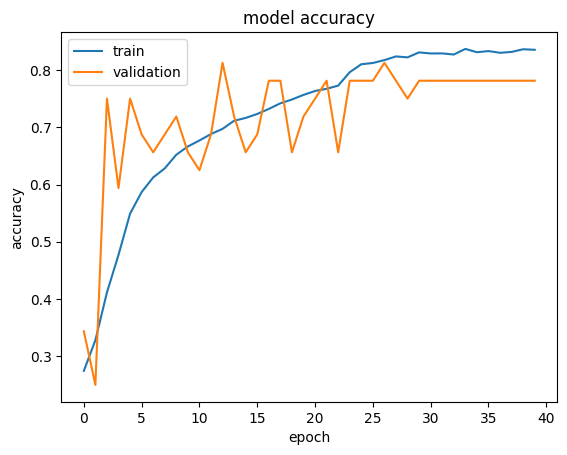

In [63]:
plt.plot(history_complex.history["accuracy"])
plt.plot(history_complex.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on Test Set**


In [64]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_complex.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")


1/4 [======>.......................] - ETA: 0s - loss: 0.3657 - accuracy: 0.8438


4/4 [==============================] - 0s 11ms/step - loss: 0.5977 - accuracy: 0.7656


Loss: 0.5976777076721191, Accuracy: 0.765625


### **Plotting Confusion Matrix**



1/4 [======>.......................] - ETA: 0s


4/4 [==============================] - 0s 10ms/step


              precision    recall  f1-score   support

       happy       0.90      0.84      0.87        32
     neutral       0.60      0.75      0.67        32
         sad       0.65      0.62      0.63        32
    surprise       1.00      0.84      0.92        32

    accuracy                           0.77       128
   macro avg       0.79      0.77      0.77       128
weighted avg       0.79      0.77      0.77       128



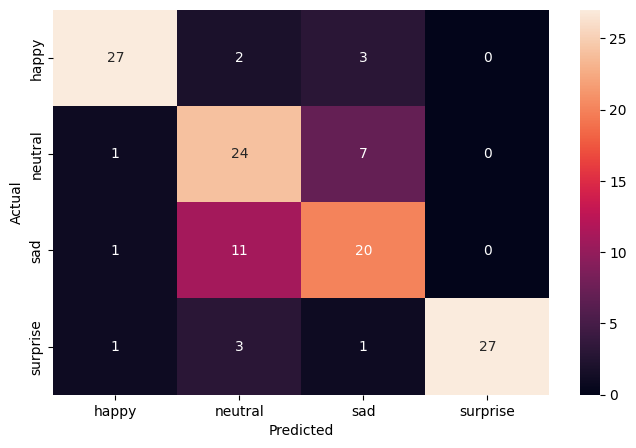

In [65]:
pred_probabilities = model_complex.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:\_\_**


### **Plotting the Confusion Matrix for the chosen final model**



1/4 [======>.......................] - ETA: 0s


4/4 [==============================] - 0s 10ms/step


              precision    recall  f1-score   support

       happy       0.90      0.84      0.87        32
     neutral       0.60      0.75      0.67        32
         sad       0.65      0.62      0.63        32
    surprise       1.00      0.84      0.92        32

    accuracy                           0.77       128
   macro avg       0.79      0.77      0.77       128
weighted avg       0.79      0.77      0.77       128



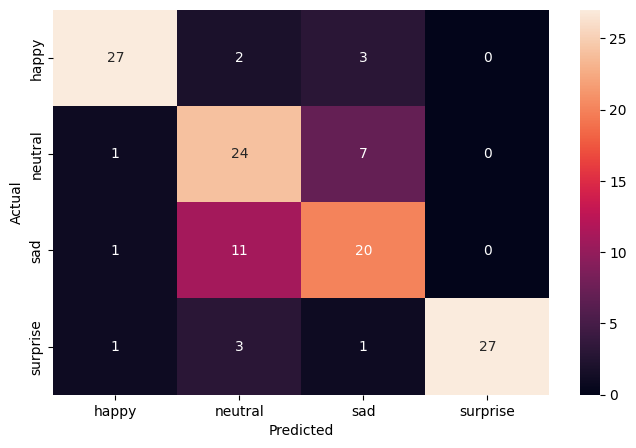

In [66]:
pred_probabilities = model_complex.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:\_\_**


## **Conclusion:\*\***\_\_\_\_**\*\***


### **Insights**

### **Refined insights**:

- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:

- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:

- What model do you propose to be adopted? Why is this the best solution to adopt?
